## Multi-label classification

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
from fastai.conv_learner import *

In [4]:
PATH = "D:\\Code\\TEMP\\fastai\\courses\\dl1\\data\\planet\\"
#PATH = "C:\\Users\\nwaller\\Documents\\fastai\\courses\\dl1\\data\\planet\\"

In [5]:
# Data preparation steps if you are using Crestle:

os.makedirs('data/planet/models', exist_ok=True)
os.makedirs('/cache/planet/tmp', exist_ok=True)

!ln -s /datasets/kaggle/planet-understanding-the-amazon-from-space/train-jpg {PATH}
!ln -s /datasets/kaggle/planet-understanding-the-amazon-from-space/test-jpg {PATH}
!ln -s /datasets/kaggle/planet-understanding-the-amazon-from-space/train_v2.csv {PATH}
!ln -s /cache/planet/tmp {PATH}

ln: failed to create symbolic link 'D:\Code\TEMP\fastai\courses\dl1\data\planet/train-jpg': File exists

ln: failed to create symbolic link 'D:\Code\TEMP\fastai\courses\dl1\data\planet/test-jpg': File exists

ln: failed to create symbolic link 'D:\Code\TEMP\fastai\courses\dl1\data\planet/train_v2.csv': File exists

ln: failed to create symbolic link 'D:\Code\TEMP\fastai\courses\dl1\data\planet/tmp': No such file or directory

In [6]:
ls {PATH}

 Datentr�ger in Laufwerk D: ist Daten

 Volumeseriennummer: 428B-16C8

 Verzeichnis von D:\Code\TEMP\fastai\courses\dl1\data\planet

09.08.2018  18:33    <DIR>          .

## Multi-label versus single-label classification

In [7]:
from fastai.plots import *

In [8]:
def get_1st(path): return glob(f'{path}/*.*')[0]

In [9]:
dc_path = "data/dogscats/valid/"
list_paths = [get_1st(f"{dc_path}cats"), get_1st(f"{dc_path}dogs")]
plots_from_files(list_paths, titles=["cat", "dog"], maintitle="Single-label classification")

IndexError: list index out of range

In single-label classification each sample belongs to one class. In the previous example, each image is either a *dog* or a *cat*.

In [10]:
list_paths = [f"{PATH}train-jpg/train_0.jpg", f"{PATH}train-jpg/train_1.jpg"]
titles=["haze primary", "agriculture clear primary water"]
plots_from_files(list_paths, titles=titles, maintitle="Multi-label classification")

In multi-label classification each sample can belong to one or more clases. In the previous example, the first images belongs to two clases: *haze* and *primary*. The second image belongs to four clases: *agriculture*, *clear*, *primary* and  *water*.

## Multi-label models for Planet dataset

In [13]:
from courses.dl1.planet import f2

metrics=[f2]
f_model = resnet34

In [14]:
label_csv = f'{PATH}train_v2.csv'
n = len(list(open(label_csv)))-1
val_idxs = get_cv_idxs(n)

We use a different set of data augmentations for this dataset - we also allow vertical flips, since we don't expect vertical orientation of satellite images to change our classifications.

In [15]:
def get_data(sz):
    tfms = tfms_from_model(f_model, sz, aug_tfms=transforms_top_down, max_zoom=1.05)
    return ImageClassifierData.from_csv(PATH, 'train-jpg', label_csv, tfms=tfms,
                    suffix='.jpg', val_idxs=val_idxs, test_name='test-jpg')

In [16]:
data = get_data(256)

In [18]:
x,y = next(iter(data.val_dl))

In [19]:
y


    1     0     0  ...      0     0     1
    1     0     0  ...      0     0     0
    0     0     0  ...      0     0     0
       ...          ⋱          ...       
    0     0     0  ...      0     0     1
    1     0     0  ...      0     0     0
    1     0     0  ...      0     0     0
[torch.cuda.FloatTensor of size 64x17 (GPU 0)]

In [20]:
list(zip(data.classes, y[0]))

[('agriculture', 1.0),
 ('artisinal_mine', 0.0),
 ('bare_ground', 0.0),
 ('blooming', 0.0),
 ('blow_down', 0.0),
 ('clear', 1.0),
 ('cloudy', 0.0),
 ('conventional_mine', 0.0),
 ('cultivation', 0.0),
 ('habitation', 0.0),
 ('haze', 0.0),
 ('partly_cloudy', 0.0),
 ('primary', 1.0),
 ('road', 0.0),
 ('selective_logging', 0.0),
 ('slash_burn', 0.0),
 ('water', 1.0)]

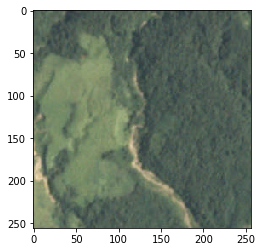

In [21]:
plt.imshow(data.val_ds.denorm(to_np(x))[0]*1.4);

In [22]:
sz=64

In [23]:
data = get_data(sz)

In [24]:
data = data.resize(int(sz*1.3), 'tmp')

  0%|          | 0/32384 [00:00<?, ?it/s]

  0%|          | 148/32384 [00:00<00:22, 1439.97it/s]

  1%|          | 270/32384 [00:00<00:24, 1303.97it/s]

  1%|          | 404/32384 [00:00<00:24, 1314.54it/s]

  2%|▏         | 533/32384 [00:00<00:24, 1304.43it/s]

  2%|▏         | 669/32384 [00:00<00:24, 1314.66it/s]

  2%|▏         | 789/32384 [00:00<00:24, 1295.24it/s]

  3%|▎         | 919/32384 [00:00<00:24, 1289.95it/s]

  3%|▎         | 1046/32384 [00:00<00:24, 1287.06it/s]

  4%|▎         | 1172/32384 [00:00<00:24, 1283.71it/s]

  4%|▍         | 1305/32384 [00:01<00:24, 1287.94it/s]

  4%|▍         | 1430/32384 [00:01<00:24, 1277.74it/s]

  5%|▍         | 1565/32384 [00:01<00:24, 1283.59it/s]

  5%|▌         | 1692/32384 [00:01<00:24, 1278.41it/s]

  6%|▌         | 1833/32384 [00:01<00:23, 1285.60it/s]

  6%|▌         | 1962/32384 [00:01<00:23, 1273.11it/s]

  6%|▋         | 2086/32384 [00:01<00:23, 1268.53it/s]

  7%|▋         | 2215/32384 [00:01<00:23, 1267.01it/s]

  7%|▋         | 2339/32384 [00:01<00:23, 1262.97it/s]

  8%|▊         | 2471/32384 [00:01<00:23, 1265.39it/s]

  8%|▊         | 2596/32384 [00:02<00:23, 1258.63it/s]

  8%|▊         | 2729/32384 [00:02<00:23, 1260.60it/s]

  9%|▉         | 2859/32384 [00:02<00:23, 1261.78it/s]

  9%|▉         | 2985/32384 [00:02<00:23, 1250.44it/s]

 10%|▉         | 3104/32384 [00:02<00:23, 1242.56it/s]

 10%|▉         | 3238/32384 [00:02<00:23, 1245.70it/s]

 10%|█         | 3359/32384 [00:02<00:24, 1194.13it/s]

 11%|█         | 3463/32384 [00:02<00:24, 1188.12it/s]

 11%|█         | 3585/32384 [00:03<00:24, 1188.08it/s]

 11%|█▏        | 3692/32384 [00:03<00:24, 1164.90it/s]

 12%|█▏        | 3797/32384 [00:03<00:24, 1161.11it/s]

 12%|█▏        | 3905/32384 [00:03<00:24, 1157.92it/s]

 12%|█▏        | 4006/32384 [00:03<00:24, 1150.25it/s]

 13%|█▎        | 4121/32384 [00:03<00:24, 1149.20it/s]

 13%|█▎        | 4249/32384 [00:03<00:24, 1152.66it/s]

 13%|█▎        | 4359/32384 [00:03<00:24, 1151.19it/s]

 14%|█▍        | 4483/32384 [00:03<00:24, 1153.39it/s]

 14%|█▍        | 4597/32384 [00:03<00:24, 1152.11it/s]

 15%|█▍        | 4710/32384 [00:04<00:24, 1128.53it/s]

 15%|█▍        | 4808/32384 [00:04<00:24, 1106.80it/s]

 15%|█▌        | 4894/32384 [00:04<00:25, 1090.97it/s]

 15%|█▌        | 4998/32384 [00:04<00:25, 1089.08it/s]

 16%|█▌        | 5112/32384 [00:04<00:25, 1089.41it/s]

 16%|█▌        | 5233/32384 [00:04<00:24, 1091.86it/s]

 17%|█▋        | 5362/32384 [00:04<00:24, 1095.63it/s]

 17%|█▋        | 5482/32384 [00:04<00:24, 1097.33it/s]

 17%|█▋        | 5594/32384 [00:05<00:24, 1091.91it/s]

 18%|█▊        | 5716/32384 [00:05<00:24, 1093.53it/s]

 18%|█▊        | 5827/32384 [00:05<00:24, 1093.82it/s]

 18%|█▊        | 5938/32384 [00:05<00:24, 1093.66it/s]

 19%|█▊        | 6060/32384 [00:05<00:24, 1095.77it/s]

 19%|█▉        | 6173/32384 [00:05<00:23, 1096.33it/s]

 19%|█▉        | 6293/32384 [00:05<00:23, 1098.08it/s]

 20%|█▉        | 6408/32384 [00:05<00:23, 1097.41it/s]

 20%|██        | 6523/32384 [00:05<00:23, 1097.69it/s]

 20%|██        | 6636/32384 [00:06<00:23, 1093.82it/s]

 21%|██        | 6742/32384 [00:06<00:23, 1093.05it/s]

 21%|██        | 6852/32384 [00:06<00:23, 1093.03it/s]

 21%|██▏       | 6961/32384 [00:06<00:23, 1092.85it/s]

 22%|██▏       | 7091/32384 [00:06<00:23, 1095.53it/s]

 22%|██▏       | 7216/32384 [00:06<00:22, 1097.67it/s]

 23%|██▎       | 7332/32384 [00:06<00:22, 1096.83it/s]

 23%|██▎       | 7445/32384 [00:06<00:22, 1096.63it/s]

 23%|██▎       | 7580/32384 [00:06<00:22, 1100.25it/s]

 24%|██▍       | 7700/32384 [00:06<00:22, 1101.63it/s]

 24%|██▍       | 7819/32384 [00:07<00:22, 1102.53it/s]

 25%|██▍       | 7937/32384 [00:07<00:22, 1103.25it/s]

 25%|██▍       | 8055/32384 [00:07<00:22, 1101.99it/s]

 25%|██▌       | 8181/32384 [00:07<00:21, 1104.09it/s]

 26%|██▌       | 8298/32384 [00:07<00:21, 1103.60it/s]

 26%|██▌       | 8423/32384 [00:07<00:21, 1105.48it/s]

 26%|██▋       | 8541/32384 [00:07<00:21, 1105.69it/s]

 27%|██▋       | 8657/32384 [00:07<00:21, 1104.79it/s]

 27%|██▋       | 8783/32384 [00:07<00:21, 1106.42it/s]

 27%|██▋       | 8899/32384 [00:08<00:21, 1106.92it/s]

 28%|██▊       | 9031/32384 [00:08<00:21, 1109.09it/s]

 28%|██▊       | 9154/32384 [00:08<00:20, 1110.39it/s]

 29%|██▊       | 9274/32384 [00:08<00:20, 1110.76it/s]

 29%|██▉       | 9394/32384 [00:08<00:20, 1111.25it/s]

 29%|██▉       | 9512/32384 [00:08<00:20, 1111.89it/s]

 30%|██▉       | 9636/32384 [00:08<00:20, 1113.34it/s]

 30%|███       | 9755/32384 [00:08<00:20, 1113.16it/s]

 31%|███       | 9881/32384 [00:08<00:20, 1114.53it/s]

 31%|███       | 10011/32384 [00:08<00:20, 1116.31it/s]

 31%|███▏      | 10132/32384 [00:09<00:19, 1116.08it/s]

 32%|███▏      | 10250/32384 [00:09<00:20, 1103.92it/s]

 32%|███▏      | 10357/32384 [00:09<00:19, 1103.47it/s]

 32%|███▏      | 10481/32384 [00:09<00:19, 1104.82it/s]

 33%|███▎      | 10601/32384 [00:09<00:19, 1105.78it/s]

 33%|███▎      | 10719/32384 [00:09<00:19, 1106.51it/s]

 33%|███▎      | 10833/32384 [00:09<00:19, 1106.71it/s]

 34%|███▍      | 10965/32384 [00:09<00:19, 1108.84it/s]

 34%|███▍      | 11087/32384 [00:09<00:19, 1109.92it/s]

 35%|███▍      | 11207/32384 [00:10<00:19, 1110.78it/s]

 35%|███▌      | 11337/32384 [00:10<00:18, 1112.64it/s]

 35%|███▌      | 11463/32384 [00:10<00:18, 1113.88it/s]

 36%|███▌      | 11598/32384 [00:10<00:18, 1115.98it/s]

 36%|███▌      | 11729/32384 [00:10<00:18, 1117.80it/s]

 37%|███▋      | 11857/32384 [00:10<00:18, 1118.08it/s]

 37%|███▋      | 11986/32384 [00:10<00:18, 1119.68it/s]

 37%|███▋      | 12112/32384 [00:10<00:18, 1120.85it/s]

 38%|███▊      | 12237/32384 [00:10<00:17, 1121.80it/s]

 38%|███▊      | 12369/32384 [00:11<00:17, 1123.47it/s]

 39%|███▊      | 12497/32384 [00:11<00:17, 1124.65it/s]

 39%|███▉      | 12623/32384 [00:11<00:17, 1125.53it/s]

 39%|███▉      | 12749/32384 [00:11<00:17, 1126.69it/s]

 40%|███▉      | 12874/32384 [00:11<00:17, 1127.74it/s]

 40%|████      | 12999/32384 [00:11<00:17, 1128.58it/s]

 41%|████      | 13124/32384 [00:11<00:17, 1129.40it/s]

 41%|████      | 13248/32384 [00:11<00:16, 1130.22it/s]

 41%|████▏     | 13372/32384 [00:11<00:16, 1131.14it/s]

 42%|████▏     | 13496/32384 [00:11<00:16, 1131.02it/s]

 42%|████▏     | 13616/32384 [00:12<00:16, 1131.21it/s]

 42%|████▏     | 13741/32384 [00:12<00:16, 1131.89it/s]

 43%|████▎     | 13869/32384 [00:12<00:16, 1132.98it/s]

 43%|████▎     | 13991/32384 [00:12<00:16, 1133.57it/s]

 44%|████▎     | 14113/32384 [00:12<00:16, 1133.41it/s]

 44%|████▍     | 14232/32384 [00:12<00:16, 1132.94it/s]

 44%|████▍     | 14348/32384 [00:12<00:15, 1132.36it/s]

 45%|████▍     | 14461/32384 [00:12<00:15, 1131.48it/s]

 45%|████▍     | 14571/32384 [00:12<00:15, 1130.77it/s]

 45%|████▌     | 14690/32384 [00:12<00:15, 1130.85it/s]

 46%|████▌     | 14806/32384 [00:13<00:15, 1131.05it/s]

 46%|████▌     | 14929/32384 [00:13<00:15, 1131.09it/s]

 46%|████▋     | 15054/32384 [00:13<00:15, 1131.53it/s]

 47%|████▋     | 15169/32384 [00:13<00:15, 1131.56it/s]

 47%|████▋     | 15285/32384 [00:13<00:15, 1131.58it/s]

 48%|████▊     | 15415/32384 [00:13<00:14, 1132.80it/s]

 48%|████▊     | 15534/32384 [00:13<00:14, 1130.63it/s]

 48%|████▊     | 15645/32384 [00:13<00:14, 1129.40it/s]

 49%|████▊     | 15754/32384 [00:13<00:14, 1129.05it/s]

 49%|████▉     | 15862/32384 [00:14<00:14, 1128.44it/s]

 49%|████▉     | 15969/32384 [00:14<00:14, 1127.85it/s]

 50%|████▉     | 16082/32384 [00:14<00:14, 1127.60it/s]

 50%|█████     | 16194/32384 [00:14<00:14, 1127.49it/s]

 50%|█████     | 16305/32384 [00:14<00:14, 1127.23it/s]

 51%|█████     | 16414/32384 [00:14<00:14, 1126.84it/s]

 51%|█████     | 16523/32384 [00:14<00:14, 1113.68it/s]

 51%|█████▏    | 16634/32384 [00:14<00:14, 1113.53it/s]

 52%|█████▏    | 16772/32384 [00:15<00:13, 1115.26it/s]

 52%|█████▏    | 16905/32384 [00:15<00:13, 1116.51it/s]

 53%|█████▎    | 17036/32384 [00:15<00:13, 1117.69it/s]

 53%|█████▎    | 17163/32384 [00:15<00:13, 1118.54it/s]

 53%|█████▎    | 17295/32384 [00:15<00:13, 1119.65it/s]

 54%|█████▍    | 17434/32384 [00:15<00:13, 1121.37it/s]

 54%|█████▍    | 17563/32384 [00:15<00:13, 1122.39it/s]

 55%|█████▍    | 17695/32384 [00:15<00:13, 1123.61it/s]

 55%|█████▌    | 17824/32384 [00:15<00:12, 1124.21it/s]

 55%|█████▌    | 17962/32384 [00:15<00:12, 1125.73it/s]

 56%|█████▌    | 18092/32384 [00:16<00:12, 1126.54it/s]

 56%|█████▋    | 18221/32384 [00:16<00:12, 1126.91it/s]

 57%|█████▋    | 18360/32384 [00:16<00:12, 1128.32it/s]

 57%|█████▋    | 18489/32384 [00:16<00:12, 1128.80it/s]

 57%|█████▋    | 18617/32384 [00:16<00:12, 1129.71it/s]

 58%|█████▊    | 18748/32384 [00:16<00:12, 1130.71it/s]

 58%|█████▊    | 18876/32384 [00:16<00:11, 1131.11it/s]

 59%|█████▊    | 19016/32384 [00:16<00:11, 1132.70it/s]

 59%|█████▉    | 19146/32384 [00:16<00:11, 1133.30it/s]

 60%|█████▉    | 19276/32384 [00:16<00:11, 1134.19it/s]

 60%|█████▉    | 19404/32384 [00:17<00:11, 1134.89it/s]

 60%|██████    | 19538/32384 [00:17<00:11, 1136.03it/s]

 61%|██████    | 19667/32384 [00:17<00:11, 1136.83it/s]

 61%|██████    | 19796/32384 [00:17<00:11, 1136.71it/s]

 62%|██████▏   | 19920/32384 [00:17<00:10, 1135.82it/s]

 62%|██████▏   | 20046/32384 [00:17<00:10, 1136.44it/s]

 62%|██████▏   | 20166/32384 [00:17<00:10, 1136.75it/s]

 63%|██████▎   | 20294/32384 [00:17<00:10, 1137.44it/s]

 63%|██████▎   | 20422/32384 [00:17<00:10, 1138.06it/s]

 63%|██████▎   | 20551/32384 [00:18<00:10, 1138.72it/s]

 64%|██████▍   | 20679/32384 [00:18<00:10, 1139.49it/s]

 64%|██████▍   | 20807/32384 [00:18<00:10, 1140.03it/s]

 65%|██████▍   | 20934/32384 [00:18<00:10, 1140.47it/s]

 65%|██████▌   | 21058/32384 [00:18<00:09, 1141.00it/s]

 65%|██████▌   | 21190/32384 [00:18<00:09, 1141.88it/s]

 66%|██████▌   | 21316/32384 [00:18<00:09, 1142.01it/s]

 66%|██████▌   | 21439/32384 [00:18<00:09, 1141.85it/s]

 67%|██████▋   | 21559/32384 [00:18<00:09, 1142.02it/s]

 67%|██████▋   | 21679/32384 [00:18<00:09, 1142.31it/s]

 67%|██████▋   | 21808/32384 [00:19<00:09, 1143.07it/s]

 68%|██████▊   | 21939/32384 [00:19<00:09, 1143.80it/s]

 68%|██████▊   | 22075/32384 [00:19<00:09, 1144.75it/s]

 69%|██████▊   | 22202/32384 [00:19<00:08, 1144.85it/s]

 69%|██████▉   | 22335/32384 [00:19<00:08, 1145.79it/s]

 69%|██████▉   | 22462/32384 [00:19<00:08, 1146.34it/s]

 70%|██████▉   | 22594/32384 [00:19<00:08, 1147.15it/s]

 70%|███████   | 22722/32384 [00:19<00:08, 1147.75it/s]

 71%|███████   | 22851/32384 [00:19<00:08, 1148.39it/s]

 71%|███████   | 22984/32384 [00:20<00:08, 1149.19it/s]

 71%|███████▏  | 23113/32384 [00:20<00:08, 1148.44it/s]

 72%|███████▏  | 23234/32384 [00:20<00:08, 1139.88it/s]

 72%|███████▏  | 23362/32384 [00:20<00:07, 1140.38it/s]

 73%|███████▎  | 23498/32384 [00:20<00:07, 1141.38it/s]

 73%|███████▎  | 23618/32384 [00:20<00:07, 1141.65it/s]

 73%|███████▎  | 23741/32384 [00:20<00:07, 1142.00it/s]

 74%|███████▎  | 23861/32384 [00:20<00:07, 1142.23it/s]

 74%|███████▍  | 23984/32384 [00:20<00:07, 1142.63it/s]

 74%|███████▍  | 24104/32384 [00:21<00:07, 1142.89it/s]

 75%|███████▍  | 24233/32384 [00:21<00:07, 1143.51it/s]

 75%|███████▌  | 24367/32384 [00:21<00:07, 1144.29it/s]

 76%|███████▌  | 24492/32384 [00:21<00:06, 1144.58it/s]

 76%|███████▌  | 24616/32384 [00:21<00:06, 1144.95it/s]

 76%|███████▋  | 24739/32384 [00:21<00:06, 1144.91it/s]

 77%|███████▋  | 24867/32384 [00:21<00:06, 1145.46it/s]

 77%|███████▋  | 24994/32384 [00:21<00:06, 1146.02it/s]

 78%|███████▊  | 25128/32384 [00:21<00:06, 1146.89it/s]

 78%|███████▊  | 25255/32384 [00:22<00:06, 1147.12it/s]

 78%|███████▊  | 25387/32384 [00:22<00:06, 1147.79it/s]

 79%|███████▉  | 25514/32384 [00:22<00:05, 1148.27it/s]

 79%|███████▉  | 25644/32384 [00:22<00:05, 1148.94it/s]

 80%|███████▉  | 25775/32384 [00:22<00:05, 1149.59it/s]

 80%|███████▉  | 25903/32384 [00:22<00:05, 1150.10it/s]

 80%|████████  | 26032/32384 [00:22<00:05, 1150.61it/s]

 81%|████████  | 26162/32384 [00:22<00:05, 1151.25it/s]

 81%|████████  | 26295/32384 [00:22<00:05, 1152.02it/s]

 82%|████████▏ | 26425/32384 [00:22<00:05, 1152.15it/s]

 82%|████████▏ | 26551/32384 [00:23<00:05, 1152.25it/s]

 82%|████████▏ | 26675/32384 [00:23<00:04, 1151.97it/s]

 83%|████████▎ | 26799/32384 [00:23<00:04, 1152.33it/s]

 83%|████████▎ | 26926/32384 [00:23<00:04, 1152.74it/s]

 84%|████████▎ | 27056/32384 [00:23<00:04, 1153.38it/s]

 84%|████████▍ | 27186/32384 [00:23<00:04, 1153.94it/s]

 84%|████████▍ | 27312/32384 [00:23<00:04, 1154.25it/s]

 85%|████████▍ | 27443/32384 [00:23<00:04, 1154.87it/s]

 85%|████████▌ | 27570/32384 [00:23<00:04, 1155.02it/s]

 86%|████████▌ | 27695/32384 [00:23<00:04, 1155.26it/s]

 86%|████████▌ | 27819/32384 [00:24<00:03, 1155.57it/s]

 86%|████████▋ | 27943/32384 [00:24<00:03, 1155.91it/s]

 87%|████████▋ | 28067/32384 [00:24<00:03, 1155.81it/s]

 87%|████████▋ | 28196/32384 [00:24<00:03, 1156.30it/s]

 87%|████████▋ | 28319/32384 [00:24<00:03, 1156.54it/s]

 88%|████████▊ | 28444/32384 [00:24<00:03, 1156.82it/s]

 88%|████████▊ | 28579/32384 [00:24<00:03, 1157.59it/s]

 89%|████████▊ | 28705/32384 [00:24<00:03, 1157.80it/s]

 89%|████████▉ | 28832/32384 [00:24<00:03, 1158.19it/s]

 89%|████████▉ | 28957/32384 [00:24<00:02, 1158.45it/s]

 90%|████████▉ | 29092/32384 [00:25<00:02, 1159.11it/s]

 90%|█████████ | 29223/32384 [00:25<00:02, 1159.56it/s]

 91%|█████████ | 29358/32384 [00:25<00:02, 1160.21it/s]

 91%|█████████ | 29490/32384 [00:25<00:02, 1160.79it/s]

 91%|█████████▏| 29619/32384 [00:25<00:02, 1161.29it/s]

 92%|█████████▏| 29748/32384 [00:25<00:02, 1161.71it/s]

 92%|█████████▏| 29877/32384 [00:25<00:02, 1161.92it/s]

 93%|█████████▎| 30006/32384 [00:25<00:02, 1162.41it/s]

 93%|█████████▎| 30133/32384 [00:26<00:01, 1149.29it/s]

 93%|█████████▎| 30256/32384 [00:26<00:01, 1149.50it/s]

 94%|█████████▍| 30385/32384 [00:26<00:01, 1150.02it/s]

 94%|█████████▍| 30517/32384 [00:26<00:01, 1150.56it/s]

 95%|█████████▍| 30650/32384 [00:26<00:01, 1151.23it/s]

 95%|█████████▌| 30783/32384 [00:26<00:01, 1151.88it/s]

 95%|█████████▌| 30921/32384 [00:26<00:01, 1152.68it/s]

 96%|█████████▌| 31062/32384 [00:26<00:01, 1153.51it/s]

 96%|█████████▋| 31196/32384 [00:27<00:01, 1153.92it/s]

 97%|█████████▋| 31338/32384 [00:27<00:00, 1154.89it/s]

 97%|█████████▋| 31480/32384 [00:27<00:00, 1155.85it/s]

 98%|█████████▊| 31625/32384 [00:27<00:00, 1156.75it/s]

 98%|█████████▊| 31762/32384 [00:27<00:00, 1157.39it/s]

 99%|█████████▊| 31900/32384 [00:27<00:00, 1158.14it/s]

 99%|█████████▉| 32046/32384 [00:27<00:00, 1159.07it/s]

 99%|█████████▉| 32189/32384 [00:27<00:00, 1160.04it/s]

100%|█████████▉| 32333/32384 [00:27<00:00, 1160.95it/s]

  0%|          | 0/8095 [00:00<?, ?it/s]

  2%|▏         | 125/8095 [00:00<00:06, 1222.17it/s]

  3%|▎         | 266/8095 [00:00<00:05, 1306.80it/s]

  5%|▌         | 406/8095 [00:00<00:05, 1336.30it/s]

  7%|▋         | 530/8095 [00:00<00:05, 1311.57it/s]

  8%|▊         | 670/8095 [00:00<00:05, 1328.40it/s]

 10%|▉         | 800/8095 [00:00<00:05, 1323.10it/s]

 12%|█▏        | 946/8095 [00:00<00:05, 1340.85it/s]

 13%|█▎        | 1079/8095 [00:00<00:05, 1337.52it/s]

 15%|█▌        | 1219/8095 [00:00<00:05, 1344.01it/s]

 17%|█▋        | 1357/8095 [00:01<00:05, 1345.88it/s]

 18%|█▊        | 1496/8095 [00:01<00:04, 1348.31it/s]

 20%|██        | 1631/8095 [00:01<00:04, 1346.19it/s]

 22%|██▏       | 1765/8095 [00:01<00:04, 1342.36it/s]

 24%|██▎       | 1907/8095 [00:01<00:04, 1344.15it/s]

 25%|██▌       | 2047/8095 [00:01<00:04, 1347.59it/s]

 27%|██▋       | 2183/8095 [00:01<00:04, 1341.48it/s]

 29%|██▊       | 2316/8095 [00:01<00:04, 1339.06it/s]

 30%|███       | 2450/8095 [00:01<00:04, 1336.71it/s]

 32%|███▏      | 2589/8095 [00:01<00:04, 1338.59it/s]

 34%|███▎      | 2722/8095 [00:02<00:04, 1335.35it/s]

 35%|███▌      | 2854/8095 [00:02<00:03, 1334.14it/s]

 37%|███▋      | 2988/8095 [00:02<00:03, 1333.35it/s]

 39%|███▊      | 3120/8095 [00:02<00:03, 1332.05it/s]

 40%|████      | 3259/8095 [00:02<00:03, 1332.63it/s]

 42%|████▏     | 3398/8095 [00:02<00:03, 1333.86it/s]

 44%|████▎     | 3536/8095 [00:02<00:03, 1334.96it/s]

 45%|████▌     | 3671/8095 [00:02<00:03, 1335.13it/s]

 47%|████▋     | 3806/8095 [00:02<00:03, 1334.01it/s]

 49%|████▊     | 3940/8095 [00:02<00:03, 1333.64it/s]

 50%|█████     | 4073/8095 [00:03<00:03, 1326.44it/s]

 52%|█████▏    | 4201/8095 [00:03<00:02, 1322.77it/s]

 53%|█████▎    | 4327/8095 [00:03<00:02, 1319.93it/s]

 55%|█████▍    | 4452/8095 [00:03<00:02, 1312.58it/s]

 56%|█████▋    | 4573/8095 [00:03<00:02, 1306.15it/s]

 58%|█████▊    | 4691/8095 [00:03<00:02, 1302.50it/s]

 59%|█████▉    | 4809/8095 [00:03<00:02, 1293.49it/s]

 61%|██████    | 4929/8095 [00:03<00:02, 1290.27it/s]

 62%|██████▏   | 5051/8095 [00:03<00:02, 1286.74it/s]

 64%|██████▍   | 5173/8095 [00:04<00:02, 1284.41it/s]

 65%|██████▌   | 5293/8095 [00:04<00:02, 1282.28it/s]

 67%|██████▋   | 5411/8095 [00:04<00:02, 1279.48it/s]

 68%|██████▊   | 5528/8095 [00:04<00:02, 1276.28it/s]

 70%|██████▉   | 5645/8095 [00:04<00:01, 1271.21it/s]

 71%|███████   | 5759/8095 [00:04<00:01, 1210.63it/s]

 73%|███████▎  | 5878/8095 [00:04<00:01, 1209.64it/s]

 74%|███████▍  | 5978/8095 [00:04<00:01, 1204.85it/s]

 75%|███████▌  | 6099/8095 [00:05<00:01, 1204.65it/s]

 77%|███████▋  | 6224/8095 [00:05<00:01, 1205.09it/s]

 78%|███████▊  | 6338/8095 [00:05<00:01, 1203.79it/s]

 80%|███████▉  | 6456/8095 [00:05<00:01, 1202.84it/s]

 81%|████████▏ | 6578/8095 [00:05<00:01, 1203.09it/s]

 83%|████████▎ | 6700/8095 [00:05<00:01, 1203.33it/s]

 84%|████████▍ | 6819/8095 [00:05<00:01, 1203.04it/s]

 86%|████████▌ | 6937/8095 [00:05<00:00, 1200.92it/s]

 87%|████████▋ | 7053/8095 [00:05<00:00, 1200.21it/s]

 89%|████████▊ | 7169/8095 [00:05<00:00, 1199.08it/s]

 90%|████████▉ | 7285/8095 [00:06<00:00, 1197.99it/s]

 92%|█████████▏| 7409/8095 [00:06<00:00, 1198.62it/s]

 93%|█████████▎| 7527/8095 [00:06<00:00, 1195.03it/s]

 94%|█████████▍| 7642/8095 [00:06<00:00, 1194.27it/s]

 96%|█████████▌| 7771/8095 [00:06<00:00, 1195.33it/s]

 97%|█████████▋| 7888/8095 [00:06<00:00, 1194.75it/s]

 99%|█████████▉| 8005/8095 [00:06<00:00, 1193.97it/s]

  0%|          | 0/40669 [00:00<?, ?it/s]

  0%|          | 106/40669 [00:00<00:38, 1051.02it/s]

  0%|          | 192/40669 [00:00<00:42, 945.19it/s] 

  1%|          | 288/40669 [00:00<00:42, 946.10it/s]

  1%|          | 389/40669 [00:00<00:42, 951.83it/s]

  1%|          | 494/40669 [00:00<00:41, 967.23it/s]

  1%|▏         | 585/40669 [00:00<00:42, 946.56it/s]

  2%|▏         | 681/40669 [00:00<00:42, 947.42it/s]

  2%|▏         | 776/40669 [00:00<00:42, 946.84it/s]

  2%|▏         | 877/40669 [00:00<00:41, 950.84it/s]

  2%|▏         | 979/40669 [00:01<00:41, 954.55it/s]

  3%|▎         | 1076/40669 [00:01<00:41, 954.00it/s]

  3%|▎         | 1171/40669 [00:01<00:41, 947.66it/s]

  3%|▎         | 1264/40669 [00:01<00:41, 940.15it/s]

  3%|▎         | 1365/40669 [00:01<00:41, 942.52it/s]

  4%|▎         | 1473/40669 [00:01<00:41, 950.93it/s]

  4%|▍         | 1585/40669 [00:01<00:40, 960.15it/s]

  4%|▍         | 1702/40669 [00:01<00:40, 971.71it/s]

  4%|▍         | 1817/40669 [00:01<00:39, 979.80it/s]

  5%|▍         | 1933/40669 [00:01<00:39, 987.85it/s]

  5%|▌         | 2052/40669 [00:02<00:38, 995.76it/s]

  5%|▌         | 2172/40669 [00:02<00:38, 1004.37it/s]

  6%|▌         | 2290/40669 [00:02<00:37, 1012.01it/s]

  6%|▌         | 2407/40669 [00:02<00:37, 1018.58it/s]

  6%|▌         | 2523/40669 [00:02<00:37, 1023.79it/s]

  6%|▋         | 2638/40669 [00:02<00:36, 1028.20it/s]

  7%|▋         | 2753/40669 [00:02<00:37, 1023.97it/s]

  7%|▋         | 2862/40669 [00:02<00:36, 1025.50it/s]

  7%|▋         | 2978/40669 [00:02<00:36, 1030.06it/s]

  8%|▊         | 3101/40669 [00:02<00:36, 1036.30it/s]

  8%|▊         | 3218/40669 [00:03<00:35, 1040.53it/s]

  8%|▊         | 3338/40669 [00:03<00:35, 1045.11it/s]

  9%|▊         | 3459/40669 [00:03<00:35, 1049.39it/s]

  9%|▉         | 3576/40669 [00:03<00:35, 1051.30it/s]

  9%|▉         | 3693/40669 [00:03<00:35, 1054.31it/s]

  9%|▉         | 3809/40669 [00:03<00:34, 1055.99it/s]

 10%|▉         | 3928/40669 [00:03<00:34, 1059.24it/s]

 10%|▉         | 4043/40669 [00:03<00:34, 1059.71it/s]

 10%|█         | 4169/40669 [00:03<00:34, 1064.60it/s]

 11%|█         | 4286/40669 [00:04<00:34, 1065.56it/s]

 11%|█         | 4401/40669 [00:04<00:34, 1042.43it/s]

 11%|█         | 4499/40669 [00:04<00:35, 1031.35it/s]

 11%|█▏        | 4589/40669 [00:04<00:35, 1027.25it/s]

 12%|█▏        | 4706/40669 [00:04<00:34, 1030.31it/s]

 12%|█▏        | 4803/40669 [00:04<00:34, 1028.96it/s]

 12%|█▏        | 4900/40669 [00:04<00:34, 1026.15it/s]

 12%|█▏        | 5002/40669 [00:04<00:34, 1025.97it/s]

 13%|█▎        | 5112/40669 [00:04<00:34, 1027.40it/s]

 13%|█▎        | 5213/40669 [00:05<00:34, 1020.35it/s]

 13%|█▎        | 5307/40669 [00:05<00:35, 996.32it/s] 

 13%|█▎        | 5386/40669 [00:05<00:35, 986.72it/s]

 13%|█▎        | 5459/40669 [00:05<00:35, 978.61it/s]

 14%|█▎        | 5529/40669 [00:05<00:36, 969.89it/s]

 14%|█▍        | 5595/40669 [00:05<00:36, 958.38it/s]

 14%|█▍        | 5656/40669 [00:05<00:36, 950.86it/s]

 14%|█▍        | 5715/40669 [00:06<00:37, 942.66it/s]

 14%|█▍        | 5772/40669 [00:06<00:37, 933.87it/s]

 14%|█▍        | 5827/40669 [00:06<00:37, 924.03it/s]

 14%|█▍        | 5879/40669 [00:06<00:38, 907.46it/s]

 15%|█▍        | 5924/40669 [00:06<00:38, 897.46it/s]

 15%|█▍        | 5969/40669 [00:06<00:39, 889.08it/s]

 15%|█▍        | 6011/40669 [00:06<00:39, 878.93it/s]

 15%|█▍        | 6057/40669 [00:06<00:39, 871.85it/s]

 15%|█▌        | 6106/40669 [00:07<00:39, 865.60it/s]

 15%|█▌        | 6148/40669 [00:07<00:40, 846.41it/s]

 15%|█▌        | 6228/40669 [00:07<00:40, 845.63it/s]

 15%|█▌        | 6303/40669 [00:07<00:40, 840.09it/s]

 16%|█▌        | 6378/40669 [00:07<00:40, 838.82it/s]

 16%|█▌        | 6436/40669 [00:07<00:41, 834.02it/s]

 16%|█▌        | 6497/40669 [00:07<00:41, 830.70it/s]

 16%|█▌        | 6554/40669 [00:07<00:41, 825.91it/s]

 16%|█▋        | 6609/40669 [00:08<00:41, 821.53it/s]

 16%|█▋        | 6663/40669 [00:08<00:42, 807.94it/s]

 16%|█▋        | 6709/40669 [00:08<00:42, 802.39it/s]

 17%|█▋        | 6753/40669 [00:08<00:42, 791.61it/s]

 17%|█▋        | 6816/40669 [00:08<00:42, 789.40it/s]

 17%|█▋        | 6908/40669 [00:08<00:42, 790.59it/s]

 17%|█▋        | 6967/40669 [00:08<00:42, 787.54it/s]

 17%|█▋        | 7025/40669 [00:08<00:43, 782.39it/s]

 17%|█▋        | 7079/40669 [00:09<00:43, 779.27it/s]

 18%|█▊        | 7139/40669 [00:09<00:43, 777.29it/s]

 18%|█▊        | 7194/40669 [00:09<00:43, 773.73it/s]

 18%|█▊        | 7247/40669 [00:09<00:43, 771.04it/s]

 18%|█▊        | 7301/40669 [00:09<00:43, 767.77it/s]

 18%|█▊        | 7370/40669 [00:09<00:43, 766.94it/s]

 18%|█▊        | 7458/40669 [00:09<00:43, 768.00it/s]

 19%|█▊        | 7524/40669 [00:09<00:43, 766.88it/s]

 19%|█▊        | 7590/40669 [00:09<00:43, 763.77it/s]

 19%|█▉        | 7652/40669 [00:10<00:43, 761.14it/s]

 19%|█▉        | 7712/40669 [00:10<00:43, 759.31it/s]

 19%|█▉        | 7771/40669 [00:10<00:43, 756.79it/s]

 19%|█▉        | 7830/40669 [00:10<00:43, 754.43it/s]

 19%|█▉        | 7887/40669 [00:10<00:43, 752.43it/s]

 20%|█▉        | 7943/40669 [00:10<00:43, 750.10it/s]

 20%|█▉        | 7998/40669 [00:10<00:43, 747.65it/s]

 20%|█▉        | 8052/40669 [00:10<00:43, 743.56it/s]

 20%|█▉        | 8103/40669 [00:10<00:43, 741.20it/s]

 20%|██        | 8160/40669 [00:11<00:43, 739.57it/s]

 20%|██        | 8212/40669 [00:11<00:44, 737.31it/s]

 20%|██        | 8275/40669 [00:11<00:44, 735.85it/s]

 20%|██        | 8337/40669 [00:11<00:44, 734.55it/s]

 21%|██        | 8393/40669 [00:11<00:44, 732.72it/s]

 21%|██        | 8449/40669 [00:11<00:44, 731.08it/s]

 21%|██        | 8504/40669 [00:11<00:44, 729.48it/s]

 21%|██        | 8559/40669 [00:11<00:44, 727.41it/s]

 21%|██        | 8613/40669 [00:11<00:44, 724.28it/s]

 21%|██▏       | 8668/40669 [00:11<00:44, 722.69it/s]

 21%|██▏       | 8721/40669 [00:12<00:44, 720.72it/s]

 22%|██▏       | 8773/40669 [00:12<00:44, 719.00it/s]

 22%|██▏       | 8824/40669 [00:12<00:44, 716.24it/s]

 22%|██▏       | 8881/40669 [00:12<00:44, 714.87it/s]

 22%|██▏       | 8934/40669 [00:12<00:44, 713.26it/s]

 22%|██▏       | 8991/40669 [00:12<00:44, 711.95it/s]

 22%|██▏       | 9044/40669 [00:12<00:44, 710.34it/s]

 22%|██▏       | 9097/40669 [00:12<00:44, 708.92it/s]

 22%|██▏       | 9150/40669 [00:12<00:44, 707.47it/s]

 23%|██▎       | 9239/40669 [00:13<00:44, 708.64it/s]

 23%|██▎       | 9302/40669 [00:13<00:44, 705.60it/s]

 23%|██▎       | 9421/40669 [00:13<00:44, 709.18it/s]

 23%|██▎       | 9496/40669 [00:13<00:43, 709.04it/s]

 24%|██▎       | 9570/40669 [00:13<00:43, 707.16it/s]

 24%|██▎       | 9638/40669 [00:13<00:43, 705.41it/s]

 24%|██▍       | 9701/40669 [00:13<00:44, 702.96it/s]

 24%|██▍       | 9785/40669 [00:13<00:43, 703.52it/s]

 24%|██▍       | 9849/40669 [00:14<00:43, 702.80it/s]

 24%|██▍       | 9912/40669 [00:14<00:43, 700.33it/s]

 25%|██▍       | 9970/40669 [00:14<00:43, 699.40it/s]

 25%|██▍       | 10028/40669 [00:14<00:43, 698.04it/s]

 25%|██▍       | 10086/40669 [00:14<00:43, 696.83it/s]

 25%|██▍       | 10146/40669 [00:14<00:43, 695.91it/s]

 25%|██▌       | 10202/40669 [00:14<00:43, 694.73it/s]

 25%|██▌       | 10258/40669 [00:14<00:43, 693.15it/s]

 25%|██▌       | 10319/40669 [00:14<00:43, 692.25it/s]

 26%|██▌       | 10378/40669 [00:15<00:43, 691.51it/s]

 26%|██▌       | 10434/40669 [00:15<00:43, 690.36it/s]

 26%|██▌       | 10489/40669 [00:15<00:43, 689.38it/s]

 26%|██▌       | 10544/40669 [00:15<00:43, 687.91it/s]

 26%|██▌       | 10597/40669 [00:15<00:43, 685.67it/s]

 26%|██▌       | 10651/40669 [00:15<00:43, 684.46it/s]

 26%|██▋       | 10706/40669 [00:15<00:43, 683.59it/s]

 26%|██▋       | 10762/40669 [00:15<00:43, 682.58it/s]

 27%|██▋       | 10818/40669 [00:15<00:43, 681.75it/s]

 27%|██▋       | 10871/40669 [00:15<00:43, 680.79it/s]

 27%|██▋       | 10924/40669 [00:16<00:43, 679.41it/s]

 27%|██▋       | 10976/40669 [00:16<00:43, 677.66it/s]

 27%|██▋       | 11026/40669 [00:16<00:43, 676.39it/s]

 27%|██▋       | 11076/40669 [00:16<00:43, 675.27it/s]

 27%|██▋       | 11130/40669 [00:16<00:43, 674.43it/s]

 27%|██▋       | 11181/40669 [00:16<00:43, 672.62it/s]

 28%|██▊       | 11230/40669 [00:16<00:43, 671.24it/s]

 28%|██▊       | 11288/40669 [00:16<00:43, 670.08it/s]

 28%|██▊       | 11349/40669 [00:16<00:43, 669.64it/s]

 28%|██▊       | 11402/40669 [00:17<00:43, 668.75it/s]

 28%|██▊       | 11454/40669 [00:17<00:43, 667.64it/s]

 28%|██▊       | 11505/40669 [00:17<00:43, 665.56it/s]

 28%|██▊       | 11571/40669 [00:17<00:43, 665.47it/s]

 29%|██▊       | 11624/40669 [00:17<00:43, 664.44it/s]

 29%|██▊       | 11677/40669 [00:17<00:43, 663.55it/s]

 29%|██▉       | 11783/40669 [00:17<00:43, 665.71it/s]

 29%|██▉       | 11879/40669 [00:17<00:43, 667.35it/s]

 29%|██▉       | 11955/40669 [00:17<00:43, 665.45it/s]

 30%|██▉       | 12048/40669 [00:18<00:42, 666.87it/s]

 30%|██▉       | 12123/40669 [00:18<00:42, 666.21it/s]

 30%|██▉       | 12193/40669 [00:18<00:42, 664.51it/s]

 30%|███       | 12256/40669 [00:18<00:42, 662.55it/s]

 30%|███       | 12332/40669 [00:18<00:42, 663.01it/s]

 30%|███       | 12394/40669 [00:18<00:42, 661.71it/s]

 31%|███       | 12452/40669 [00:18<00:42, 660.73it/s]

 31%|███       | 12508/40669 [00:18<00:42, 659.79it/s]

 31%|███       | 12562/40669 [00:19<00:42, 657.61it/s]

 31%|███       | 12611/40669 [00:19<00:42, 656.29it/s]

 31%|███       | 12662/40669 [00:19<00:42, 655.45it/s]

 31%|███▏      | 12714/40669 [00:19<00:42, 654.69it/s]

 31%|███▏      | 12766/40669 [00:19<00:42, 653.58it/s]

 32%|███▏      | 12820/40669 [00:19<00:42, 652.51it/s]

 32%|███▏      | 12883/40669 [00:19<00:42, 651.79it/s]

 32%|███▏      | 12942/40669 [00:19<00:42, 651.37it/s]

 32%|███▏      | 12995/40669 [00:19<00:42, 650.75it/s]

 32%|███▏      | 13048/40669 [00:20<00:42, 649.85it/s]

 32%|███▏      | 13099/40669 [00:20<00:42, 649.02it/s]

 32%|███▏      | 13150/40669 [00:20<00:42, 648.21it/s]

 32%|███▏      | 13203/40669 [00:20<00:42, 647.51it/s]

 33%|███▎      | 13254/40669 [00:20<00:42, 646.71it/s]

 33%|███▎      | 13308/40669 [00:20<00:42, 646.02it/s]

 33%|███▎      | 13360/40669 [00:20<00:42, 645.25it/s]

 33%|███▎      | 13411/40669 [00:20<00:42, 644.50it/s]

 33%|███▎      | 13463/40669 [00:20<00:42, 643.77it/s]

 33%|███▎      | 13522/40669 [00:21<00:42, 643.38it/s]

 33%|███▎      | 13575/40669 [00:21<00:42, 642.75it/s]

 34%|███▎      | 13642/40669 [00:21<00:42, 642.82it/s]

 34%|███▍      | 13738/40669 [00:21<00:41, 644.20it/s]

 34%|███▍      | 13843/40669 [00:21<00:41, 645.91it/s]

 34%|███▍      | 13920/40669 [00:21<00:41, 646.33it/s]

 34%|███▍      | 13996/40669 [00:21<00:41, 645.80it/s]

 35%|███▍      | 14066/40669 [00:21<00:41, 644.82it/s]

 35%|███▍      | 14130/40669 [00:21<00:41, 642.61it/s]

 35%|███▍      | 14186/40669 [00:22<00:41, 642.03it/s]

 35%|███▌      | 14241/40669 [00:22<00:41, 641.15it/s]

 35%|███▌      | 14353/40669 [00:22<00:40, 643.29it/s]

 35%|███▌      | 14427/40669 [00:22<00:40, 643.54it/s]

 36%|███▌      | 14498/40669 [00:22<00:40, 642.86it/s]

 36%|███▌      | 14563/40669 [00:22<00:40, 642.12it/s]

 36%|███▌      | 14624/40669 [00:22<00:40, 641.72it/s]

 36%|███▌      | 14684/40669 [00:22<00:40, 640.60it/s]

 36%|███▌      | 14739/40669 [00:23<00:40, 640.20it/s]

 36%|███▋      | 14794/40669 [00:23<00:40, 639.64it/s]

 37%|███▋      | 14848/40669 [00:23<00:40, 638.79it/s]

 37%|███▋      | 14900/40669 [00:23<00:40, 637.83it/s]

 37%|███▋      | 14958/40669 [00:23<00:40, 637.56it/s]

 37%|███▋      | 15011/40669 [00:23<00:40, 636.68it/s]

 37%|███▋      | 15062/40669 [00:23<00:40, 635.26it/s]

 37%|███▋      | 15119/40669 [00:23<00:40, 634.85it/s]

 37%|███▋      | 15168/40669 [00:23<00:40, 634.05it/s]

 37%|███▋      | 15216/40669 [00:24<00:40, 633.27it/s]

 38%|███▊      | 15290/40669 [00:24<00:40, 633.70it/s]

 38%|███▊      | 15381/40669 [00:24<00:39, 632.26it/s]

 38%|███▊      | 15434/40669 [00:24<00:39, 631.72it/s]

 38%|███▊      | 15491/40669 [00:24<00:39, 631.28it/s]

 38%|███▊      | 15544/40669 [00:24<00:39, 630.55it/s]

 38%|███▊      | 15595/40669 [00:24<00:39, 629.55it/s]

 38%|███▊      | 15644/40669 [00:24<00:39, 628.95it/s]

 39%|███▊      | 15696/40669 [00:24<00:39, 628.37it/s]

 39%|███▊      | 15754/40669 [00:25<00:39, 628.11it/s]

 39%|███▉      | 15811/40669 [00:25<00:39, 627.75it/s]

 39%|███▉      | 15863/40669 [00:25<00:39, 627.22it/s]

 39%|███▉      | 15916/40669 [00:25<00:39, 626.47it/s]

 39%|███▉      | 15977/40669 [00:25<00:39, 626.30it/s]

 39%|███▉      | 16034/40669 [00:25<00:39, 626.05it/s]

 40%|███▉      | 16135/40669 [00:25<00:39, 627.52it/s]

 40%|███▉      | 16231/40669 [00:25<00:38, 628.56it/s]

 40%|████      | 16305/40669 [00:25<00:38, 627.60it/s]

 40%|████      | 16371/40669 [00:26<00:38, 626.82it/s]

 40%|████      | 16432/40669 [00:26<00:38, 626.49it/s]

 41%|████      | 16491/40669 [00:26<00:38, 625.70it/s]

 41%|████      | 16546/40669 [00:26<00:38, 625.38it/s]

 41%|████      | 16606/40669 [00:26<00:38, 625.26it/s]

 41%|████      | 16697/40669 [00:26<00:38, 626.27it/s]

 41%|████▏     | 16800/40669 [00:26<00:38, 627.72it/s]

 41%|████▏     | 16877/40669 [00:26<00:37, 628.12it/s]

 42%|████▏     | 16953/40669 [00:27<00:37, 627.51it/s]

 42%|████▏     | 17022/40669 [00:27<00:37, 626.71it/s]

 42%|████▏     | 17085/40669 [00:27<00:37, 625.48it/s]

 42%|████▏     | 17141/40669 [00:27<00:37, 625.18it/s]

 42%|████▏     | 17197/40669 [00:27<00:37, 624.78it/s]

 42%|████▏     | 17252/40669 [00:27<00:37, 624.26it/s]

 43%|████▎     | 17305/40669 [00:27<00:37, 623.59it/s]

 43%|████▎     | 17365/40669 [00:27<00:37, 623.44it/s]

 43%|████▎     | 17419/40669 [00:27<00:37, 623.02it/s]

 43%|████▎     | 17475/40669 [00:28<00:37, 622.77it/s]

 43%|████▎     | 17529/40669 [00:28<00:37, 622.07it/s]

 43%|████▎     | 17591/40669 [00:28<00:37, 622.06it/s]

 43%|████▎     | 17646/40669 [00:28<00:37, 620.86it/s]

 44%|████▎     | 17696/40669 [00:28<00:37, 620.10it/s]

 44%|████▎     | 17744/40669 [00:28<00:37, 616.12it/s]

 44%|████▎     | 17783/40669 [00:28<00:37, 615.31it/s]

 44%|████▍     | 17839/40669 [00:29<00:37, 615.12it/s]

 44%|████▍     | 17900/40669 [00:29<00:37, 614.89it/s]

 44%|████▍     | 17951/40669 [00:29<00:36, 614.36it/s]

 44%|████▍     | 18004/40669 [00:29<00:36, 614.05it/s]

 44%|████▍     | 18055/40669 [00:29<00:36, 613.40it/s]

 45%|████▍     | 18112/40669 [00:29<00:36, 613.21it/s]

 45%|████▍     | 18163/40669 [00:29<00:36, 612.81it/s]

 45%|████▍     | 18216/40669 [00:29<00:36, 612.49it/s]

 45%|████▌     | 18320/40669 [00:29<00:36, 613.82it/s]

 45%|████▌     | 18419/40669 [00:29<00:36, 615.07it/s]

 45%|████▌     | 18502/40669 [00:30<00:35, 615.78it/s]

 46%|████▌     | 18580/40669 [00:30<00:36, 612.96it/s]

 46%|████▌     | 18644/40669 [00:30<00:35, 612.38it/s]

 46%|████▌     | 18703/40669 [00:30<00:35, 612.06it/s]

 46%|████▌     | 18760/40669 [00:30<00:35, 611.54it/s]

 46%|████▋     | 18815/40669 [00:30<00:35, 610.53it/s]

 46%|████▋     | 18865/40669 [00:30<00:35, 610.00it/s]

 47%|████▋     | 18953/40669 [00:31<00:35, 610.85it/s]

 47%|████▋     | 19014/40669 [00:31<00:35, 610.83it/s]

 47%|████▋     | 19075/40669 [00:31<00:35, 610.23it/s]

 47%|████▋     | 19132/40669 [00:31<00:35, 609.71it/s]

 47%|████▋     | 19186/40669 [00:31<00:35, 609.23it/s]

 47%|████▋     | 19238/40669 [00:31<00:35, 608.94it/s]

 47%|████▋     | 19294/40669 [00:31<00:35, 608.59it/s]

 48%|████▊     | 19350/40669 [00:31<00:35, 608.43it/s]

 48%|████▊     | 19406/40669 [00:31<00:34, 608.28it/s]

 48%|████▊     | 19460/40669 [00:32<00:34, 607.85it/s]

 48%|████▊     | 19513/40669 [00:32<00:34, 607.06it/s]

 48%|████▊     | 19568/40669 [00:32<00:34, 606.87it/s]

 48%|████▊     | 19619/40669 [00:32<00:34, 606.39it/s]

 48%|████▊     | 19669/40669 [00:32<00:34, 605.86it/s]

 48%|████▊     | 19718/40669 [00:32<00:34, 605.16it/s]

 49%|████▉     | 19833/40669 [00:32<00:34, 606.79it/s]

 49%|████▉     | 19935/40669 [00:32<00:34, 608.04it/s]

 49%|████▉     | 20049/40669 [00:32<00:33, 609.65it/s]

 50%|████▉     | 20137/40669 [00:32<00:33, 610.39it/s]

 50%|████▉     | 20254/40669 [00:33<00:33, 612.04it/s]

 50%|█████     | 20350/40669 [00:33<00:33, 612.14it/s]

 50%|█████     | 20439/40669 [00:33<00:33, 612.68it/s]

 50%|█████     | 20525/40669 [00:33<00:32, 613.38it/s]

 51%|█████     | 20640/40669 [00:33<00:32, 614.96it/s]

 51%|█████     | 20768/40669 [00:33<00:32, 616.88it/s]

 51%|█████▏    | 20885/40669 [00:33<00:31, 618.46it/s]

 52%|█████▏    | 21003/40669 [00:33<00:31, 620.12it/s]

 52%|█████▏    | 21113/40669 [00:33<00:31, 621.51it/s]

 52%|█████▏    | 21223/40669 [00:34<00:31, 622.85it/s]

 52%|█████▏    | 21347/40669 [00:34<00:30, 624.60it/s]

 53%|█████▎    | 21468/40669 [00:34<00:30, 626.30it/s]

 53%|█████▎    | 21583/40669 [00:34<00:30, 627.73it/s]

 53%|█████▎    | 21697/40669 [00:34<00:30, 629.19it/s]

 54%|█████▎    | 21815/40669 [00:34<00:29, 630.78it/s]

 54%|█████▍    | 21930/40669 [00:34<00:29, 632.27it/s]

 54%|█████▍    | 22045/40669 [00:34<00:29, 633.74it/s]

 54%|█████▍    | 22160/40669 [00:34<00:29, 635.15it/s]

 55%|█████▍    | 22274/40669 [00:34<00:28, 636.53it/s]

 55%|█████▌    | 22397/40669 [00:35<00:28, 638.21it/s]

 55%|█████▌    | 22513/40669 [00:35<00:28, 639.64it/s]

 56%|█████▌    | 22628/40669 [00:35<00:28, 640.00it/s]

 56%|█████▌    | 22749/40669 [00:35<00:27, 641.57it/s]

 56%|█████▌    | 22871/40669 [00:35<00:27, 643.17it/s]

 57%|█████▋    | 22993/40669 [00:35<00:27, 644.78it/s]

 57%|█████▋    | 23111/40669 [00:35<00:27, 646.27it/s]

 57%|█████▋    | 23231/40669 [00:35<00:26, 647.77it/s]

 57%|█████▋    | 23350/40669 [00:35<00:26, 649.25it/s]

 58%|█████▊    | 23467/40669 [00:36<00:26, 650.67it/s]

 58%|█████▊    | 23589/40669 [00:36<00:26, 652.23it/s]

 58%|█████▊    | 23708/40669 [00:36<00:25, 653.70it/s]

 59%|█████▊    | 23831/40669 [00:36<00:25, 655.28it/s]

 59%|█████▉    | 23951/40669 [00:36<00:25, 656.69it/s]

 59%|█████▉    | 24069/40669 [00:36<00:25, 657.98it/s]

 59%|█████▉    | 24185/40669 [00:36<00:25, 659.34it/s]

 60%|█████▉    | 24301/40669 [00:36<00:24, 660.68it/s]

 60%|██████    | 24425/40669 [00:36<00:24, 662.21it/s]

 60%|██████    | 24543/40669 [00:36<00:24, 663.55it/s]

 61%|██████    | 24672/40669 [00:37<00:24, 665.22it/s]

 61%|██████    | 24792/40669 [00:37<00:23, 666.56it/s]

 61%|██████▏   | 24916/40669 [00:37<00:23, 668.10it/s]

 62%|██████▏   | 25036/40669 [00:37<00:23, 669.41it/s]

 62%|██████▏   | 25158/40669 [00:37<00:23, 670.74it/s]

 62%|██████▏   | 25282/40669 [00:37<00:22, 672.25it/s]

 62%|██████▏   | 25401/40669 [00:37<00:22, 673.56it/s]

 63%|██████▎   | 25519/40669 [00:37<00:22, 674.77it/s]

 63%|██████▎   | 25639/40669 [00:37<00:22, 676.13it/s]

 63%|██████▎   | 25756/40669 [00:38<00:22, 677.39it/s]

 64%|██████▎   | 25872/40669 [00:38<00:21, 678.58it/s]

 64%|██████▍   | 25991/40669 [00:38<00:21, 679.91it/s]

 64%|██████▍   | 26107/40669 [00:38<00:21, 681.10it/s]

 64%|██████▍   | 26223/40669 [00:38<00:21, 682.35it/s]

 65%|██████▍   | 26339/40669 [00:38<00:20, 683.58it/s]

 65%|██████▌   | 26461/40669 [00:38<00:20, 684.95it/s]

 65%|██████▌   | 26578/40669 [00:38<00:20, 686.14it/s]

 66%|██████▌   | 26700/40669 [00:38<00:20, 687.50it/s]

 66%|██████▌   | 26820/40669 [00:38<00:20, 688.79it/s]

 66%|██████▌   | 26938/40669 [00:39<00:19, 690.03it/s]

 67%|██████▋   | 27059/40669 [00:39<00:19, 691.35it/s]

 67%|██████▋   | 27178/40669 [00:39<00:19, 690.98it/s]

 67%|██████▋   | 27293/40669 [00:39<00:19, 692.14it/s]

 67%|██████▋   | 27416/40669 [00:39<00:19, 693.49it/s]

 68%|██████▊   | 27527/40669 [00:39<00:18, 694.52it/s]

 68%|██████▊   | 27646/40669 [00:39<00:18, 695.68it/s]

 68%|██████▊   | 27767/40669 [00:39<00:18, 696.93it/s]

 69%|██████▊   | 27891/40669 [00:39<00:18, 698.27it/s]

 69%|██████▉   | 28014/40669 [00:40<00:18, 699.57it/s]

 69%|██████▉   | 28132/40669 [00:40<00:17, 700.76it/s]

 69%|██████▉   | 28257/40669 [00:40<00:17, 702.06it/s]

 70%|██████▉   | 28376/40669 [00:40<00:17, 703.21it/s]

 70%|███████   | 28497/40669 [00:40<00:17, 704.43it/s]

 70%|███████   | 28617/40669 [00:40<00:17, 705.63it/s]

 71%|███████   | 28736/40669 [00:40<00:16, 706.59it/s]

 71%|███████   | 28851/40669 [00:40<00:16, 707.58it/s]

 71%|███████   | 28964/40669 [00:40<00:16, 707.25it/s]

 72%|███████▏  | 29089/40669 [00:41<00:16, 708.55it/s]

 72%|███████▏  | 29202/40669 [00:41<00:16, 709.55it/s]

 72%|███████▏  | 29310/40669 [00:41<00:15, 710.25it/s]

 72%|███████▏  | 29431/40669 [00:41<00:15, 711.44it/s]

 73%|███████▎  | 29549/40669 [00:41<00:15, 712.55it/s]

 73%|███████▎  | 29665/40669 [00:41<00:15, 713.59it/s]

 73%|███████▎  | 29777/40669 [00:41<00:15, 714.56it/s]

 74%|███████▎  | 29898/40669 [00:41<00:15, 715.74it/s]

 74%|███████▍  | 30024/40669 [00:41<00:14, 717.02it/s]

 74%|███████▍  | 30142/40669 [00:41<00:14, 718.09it/s]

 74%|███████▍  | 30264/40669 [00:42<00:14, 719.28it/s]

 75%|███████▍  | 30383/40669 [00:42<00:14, 720.37it/s]

 75%|███████▌  | 30512/40669 [00:42<00:14, 721.70it/s]

 75%|███████▌  | 30639/40669 [00:42<00:13, 722.95it/s]

 76%|███████▌  | 30766/40669 [00:42<00:13, 724.19it/s]

 76%|███████▌  | 30899/40669 [00:42<00:13, 725.60it/s]

 76%|███████▋  | 31025/40669 [00:42<00:13, 726.81it/s]

 77%|███████▋  | 31154/40669 [00:42<00:13, 728.11it/s]

 77%|███████▋  | 31281/40669 [00:42<00:12, 729.36it/s]

 77%|███████▋  | 31415/40669 [00:42<00:12, 730.77it/s]

 78%|███████▊  | 31544/40669 [00:43<00:12, 732.00it/s]

 78%|███████▊  | 31671/40669 [00:43<00:12, 733.05it/s]

 78%|███████▊  | 31800/40669 [00:43<00:12, 734.24it/s]

 78%|███████▊  | 31924/40669 [00:43<00:11, 735.40it/s]

 79%|███████▉  | 32047/40669 [00:43<00:11, 736.41it/s]

 79%|███████▉  | 32172/40669 [00:43<00:11, 737.57it/s]

 79%|███████▉  | 32296/40669 [00:43<00:11, 738.70it/s]

 80%|███████▉  | 32423/40669 [00:43<00:11, 739.90it/s]

 80%|████████  | 32553/40669 [00:43<00:10, 741.14it/s]

 80%|████████  | 32685/40669 [00:44<00:10, 742.46it/s]

 81%|████████  | 32818/40669 [00:44<00:10, 743.78it/s]

 81%|████████  | 32950/40669 [00:44<00:10, 745.07it/s]

 81%|████████▏ | 33080/40669 [00:44<00:10, 746.24it/s]

 82%|████████▏ | 33208/40669 [00:44<00:09, 747.38it/s]

 82%|████████▏ | 33335/40669 [00:44<00:09, 748.55it/s]

 82%|████████▏ | 33462/40669 [00:44<00:09, 749.68it/s]

 83%|████████▎ | 33588/40669 [00:44<00:09, 750.63it/s]

 83%|████████▎ | 33711/40669 [00:44<00:09, 751.65it/s]

 83%|████████▎ | 33833/40669 [00:44<00:09, 752.55it/s]

 84%|████████▎ | 33962/40669 [00:45<00:08, 753.73it/s]

 84%|████████▍ | 34088/40669 [00:45<00:08, 754.81it/s]

 84%|████████▍ | 34222/40669 [00:45<00:08, 756.10it/s]

 84%|████████▍ | 34348/40669 [00:45<00:08, 757.15it/s]

 85%|████████▍ | 34482/40669 [00:45<00:08, 758.37it/s]

 85%|████████▌ | 34609/40669 [00:45<00:07, 759.49it/s]

 85%|████████▌ | 34736/40669 [00:45<00:07, 760.48it/s]

 86%|████████▌ | 34860/40669 [00:45<00:07, 761.52it/s]

 86%|████████▌ | 34989/40669 [00:45<00:07, 762.59it/s]

 86%|████████▋ | 35124/40669 [00:45<00:07, 763.82it/s]

 87%|████████▋ | 35250/40669 [00:46<00:07, 764.83it/s]

 87%|████████▋ | 35375/40669 [00:46<00:06, 765.87it/s]

 87%|████████▋ | 35500/40669 [00:46<00:06, 764.96it/s]

 88%|████████▊ | 35618/40669 [00:46<00:06, 765.83it/s]

 88%|████████▊ | 35744/40669 [00:46<00:06, 766.88it/s]

 88%|████████▊ | 35858/40669 [00:46<00:06, 767.33it/s]

 88%|████████▊ | 35985/40669 [00:46<00:06, 768.38it/s]

 89%|████████▉ | 36111/40669 [00:46<00:05, 769.43it/s]

 89%|████████▉ | 36236/40669 [00:47<00:05, 770.43it/s]

 89%|████████▉ | 36368/40669 [00:47<00:05, 771.60it/s]

 90%|████████▉ | 36494/40669 [00:47<00:05, 772.63it/s]

 90%|█████████ | 36622/40669 [00:47<00:05, 773.64it/s]

 90%|█████████ | 36753/40669 [00:47<00:05, 774.76it/s]

 91%|█████████ | 36883/40669 [00:47<00:04, 775.83it/s]

 91%|█████████ | 37010/40669 [00:47<00:04, 776.83it/s]

 91%|█████████▏| 37136/40669 [00:47<00:04, 777.84it/s]

 92%|█████████▏| 37262/40669 [00:47<00:04, 778.71it/s]

 92%|█████████▏| 37385/40669 [00:47<00:04, 779.64it/s]

 92%|█████████▏| 37508/40669 [00:48<00:04, 780.55it/s]

 93%|█████████▎| 37631/40669 [00:48<00:03, 781.40it/s]

 93%|█████████▎| 37760/40669 [00:48<00:03, 782.45it/s]

 93%|█████████▎| 37889/40669 [00:48<00:03, 783.47it/s]

 93%|█████████▎| 38023/40669 [00:48<00:03, 784.60it/s]

 94%|█████████▍| 38150/40669 [00:48<00:03, 785.58it/s]

 94%|█████████▍| 38277/40669 [00:48<00:03, 786.58it/s]

 94%|█████████▍| 38404/40669 [00:48<00:02, 787.50it/s]

 95%|█████████▍| 38530/40669 [00:48<00:02, 788.44it/s]

 95%|█████████▌| 38661/40669 [00:48<00:02, 789.49it/s]

 95%|█████████▌| 38788/40669 [00:49<00:02, 790.47it/s]

 96%|█████████▌| 38915/40669 [00:49<00:02, 791.42it/s]

 96%|█████████▌| 39042/40669 [00:49<00:02, 792.37it/s]

 96%|█████████▋| 39175/40669 [00:49<00:01, 793.46it/s]

 97%|█████████▋| 39305/40669 [00:49<00:01, 794.44it/s]

 97%|█████████▋| 39433/40669 [00:49<00:01, 795.42it/s]

 97%|█████████▋| 39562/40669 [00:49<00:01, 796.39it/s]

 98%|█████████▊| 39692/40669 [00:49<00:01, 797.38it/s]

 98%|█████████▊| 39820/40669 [00:49<00:01, 798.05it/s]

 98%|█████████▊| 39952/40669 [00:49<00:00, 799.08it/s]

 99%|█████████▊| 40077/40669 [00:50<00:00, 799.96it/s]

 99%|█████████▉| 40202/40669 [00:50<00:00, 800.76it/s]

 99%|█████████▉| 40325/40669 [00:50<00:00, 801.61it/s]

 99%|█████████▉| 40451/40669 [00:50<00:00, 802.50it/s]

100%|█████████▉| 40583/40669 [00:50<00:00, 803.49it/s]

In [25]:
learn = ConvLearner.pretrained(f_model, data, metrics=metrics)

  0%|          | 0/506 [00:00<?, ?it/s]

  0%|          | 1/506 [00:09<1:20:18,  9.54s/it, loss=0.844]

  1%|          | 6/506 [00:09<13:24,  1.61s/it, loss=0.834]  

  2%|▏         | 11/506 [00:09<07:19,  1.13it/s, loss=0.847]

  3%|▎         | 16/506 [00:09<05:02,  1.62it/s, loss=0.848]

  4%|▍         | 22/506 [00:09<03:39,  2.20it/s, loss=0.848]

  6%|▌         | 28/506 [00:10<02:52,  2.77it/s, loss=0.846]

  7%|▋         | 33/506 [00:10<02:26,  3.23it/s, loss=0.845]

  8%|▊         | 39/506 [00:10<02:03,  3.78it/s, loss=0.845]

  9%|▉         | 45/506 [00:10<01:47,  4.31it/s, loss=0.847]

 10%|▉         | 50/506 [00:10<01:36,  4.74it/s, loss=0.846]

 11%|█         | 55/506 [00:10<01:27,  5.17it/s, loss=0.845]

 12%|█▏        | 61/506 [00:10<01:18,  5.67it/s, loss=0.846]

 13%|█▎        | 67/506 [00:10<01:11,  6.15it/s, loss=0.844]

 14%|█▍        | 72/506 [00:10<01:06,  6.55it/s, loss=0.844]

 15%|█▌        | 77/506 [00:11<01:01,  6.94it/s, loss=0.845]

 16%|█▌        | 81/506 [00:11<00:59,  7.13it/s, loss=0.844]

 17%|█▋        | 84/506 [00:11<00:57,  7.33it/s, loss=0.842]

 17%|█▋        | 87/506 [00:11<00:55,  7.52it/s, loss=0.843]

 18%|█▊        | 90/506 [00:11<00:53,  7.71it/s, loss=0.843]

 18%|█▊        | 93/506 [00:11<00:52,  7.89it/s, loss=0.842]

 19%|█▉        | 96/506 [00:11<00:50,  8.07it/s, loss=0.843]

 20%|█▉        | 99/506 [00:12<00:49,  8.24it/s, loss=0.844]

 20%|██        | 102/506 [00:12<00:47,  8.42it/s, loss=0.844]

 21%|██        | 105/506 [00:12<00:46,  8.59it/s, loss=0.844]

 21%|██▏       | 108/506 [00:12<00:45,  8.76it/s, loss=0.845]

 22%|██▏       | 111/506 [00:12<00:44,  8.92it/s, loss=0.845]

 23%|██▎       | 114/506 [00:12<00:43,  9.09it/s, loss=0.844]

 23%|██▎       | 117/506 [00:12<00:42,  9.25it/s, loss=0.844]

 24%|██▍       | 121/506 [00:12<00:40,  9.46it/s, loss=0.843]

 25%|██▍       | 124/506 [00:12<00:39,  9.61it/s, loss=0.844]

 25%|██▌       | 127/506 [00:13<00:38,  9.77it/s, loss=0.843]

 26%|██▌       | 130/506 [00:13<00:37,  9.91it/s, loss=0.844]

 26%|██▋       | 133/506 [00:13<00:37, 10.06it/s, loss=0.843]

 27%|██▋       | 137/506 [00:13<00:35, 10.26it/s, loss=0.843]

 28%|██▊       | 142/506 [00:13<00:34, 10.55it/s, loss=0.842]

 29%|██▉       | 147/506 [00:13<00:33, 10.84it/s, loss=0.841]

 30%|███       | 152/506 [00:13<00:31, 11.13it/s, loss=0.841]

 31%|███       | 157/506 [00:13<00:30, 11.41it/s, loss=0.839]

 32%|███▏      | 161/506 [00:14<00:30, 11.47it/s, loss=0.838]

 32%|███▏      | 164/506 [00:14<00:29, 11.60it/s, loss=0.837]

 33%|███▎      | 167/506 [00:14<00:28, 11.72it/s, loss=0.836]

 34%|███▎      | 170/506 [00:14<00:28, 11.84it/s, loss=0.834]

 34%|███▍      | 173/506 [00:14<00:27, 11.96it/s, loss=0.834]

 35%|███▍      | 176/506 [00:14<00:27, 12.08it/s, loss=0.832]

 35%|███▌      | 179/506 [00:14<00:26, 12.19it/s, loss=0.831]

 36%|███▌      | 182/506 [00:14<00:26, 12.31it/s, loss=0.83] 

 37%|███▋      | 185/506 [00:14<00:25, 12.41it/s, loss=0.829]

 37%|███▋      | 188/506 [00:15<00:25, 12.53it/s, loss=0.827]

 38%|███▊      | 191/506 [00:15<00:24, 12.63it/s, loss=0.826]

 38%|███▊      | 194/506 [00:15<00:24, 12.74it/s, loss=0.824]

 39%|███▉      | 197/506 [00:15<00:24, 12.85it/s, loss=0.823]

 40%|███▉      | 200/506 [00:15<00:23, 12.96it/s, loss=0.821]

 40%|████      | 203/506 [00:15<00:23, 13.06it/s, loss=0.82] 

 41%|████      | 206/506 [00:15<00:22, 13.16it/s, loss=0.817]

 41%|████▏     | 209/506 [00:15<00:22, 13.26it/s, loss=0.814]

 42%|████▏     | 212/506 [00:15<00:22, 13.36it/s, loss=0.812]

 43%|████▎     | 216/506 [00:15<00:21, 13.50it/s, loss=0.809]

 43%|████▎     | 220/506 [00:16<00:20, 13.66it/s, loss=0.806]

 44%|████▍     | 225/506 [00:16<00:20, 13.89it/s, loss=0.801]

 46%|████▌     | 231/506 [00:16<00:19, 14.15it/s, loss=0.794]

 47%|████▋     | 236/506 [00:16<00:18, 14.37it/s, loss=0.787]

 48%|████▊     | 241/506 [00:16<00:18, 14.41it/s, loss=0.78] 

 48%|████▊     | 244/506 [00:16<00:18, 14.50it/s, loss=0.776]

 49%|████▉     | 247/506 [00:16<00:17, 14.58it/s, loss=0.771]

 49%|████▉     | 250/506 [00:17<00:17, 14.67it/s, loss=0.766]

 50%|█████     | 253/506 [00:17<00:17, 14.75it/s, loss=0.76] 

 51%|█████     | 256/506 [00:17<00:16, 14.84it/s, loss=0.755]

 51%|█████     | 259/506 [00:17<00:16, 14.91it/s, loss=0.749]

 52%|█████▏    | 263/506 [00:17<00:16, 15.03it/s, loss=0.743]

 53%|█████▎    | 266/506 [00:17<00:15, 15.11it/s, loss=0.736]

 53%|█████▎    | 270/506 [00:17<00:15, 15.22it/s, loss=0.726]

 54%|█████▍    | 273/506 [00:17<00:15, 15.29it/s, loss=0.718]

 55%|█████▍    | 276/506 [00:17<00:14, 15.37it/s, loss=0.71] 

 55%|█████▌    | 279/506 [00:18<00:14, 15.44it/s, loss=0.702]

 56%|█████▌    | 283/506 [00:18<00:14, 15.55it/s, loss=0.69] 

 57%|█████▋    | 286/506 [00:18<00:14, 15.62it/s, loss=0.68]

 57%|█████▋    | 289/506 [00:18<00:13, 15.70it/s, loss=0.67]

 58%|█████▊    | 292/506 [00:18<00:13, 15.77it/s, loss=0.659]

 58%|█████▊    | 295/506 [00:18<00:13, 15.84it/s, loss=0.648]

 59%|█████▉    | 298/506 [00:18<00:13, 15.91it/s, loss=0.635]

 60%|█████▉    | 303/506 [00:18<00:12, 16.09it/s, loss=0.614]

 61%|██████    | 309/506 [00:18<00:12, 16.30it/s, loss=0.585]

 62%|██████▏   | 314/506 [00:19<00:11, 16.48it/s, loss=0.559]

 63%|██████▎   | 319/506 [00:19<00:11, 16.65it/s, loss=0.533]

 63%|██████▎   | 321/506 [00:19<00:11, 16.56it/s, loss=0.522]

 64%|██████▍   | 324/506 [00:19<00:10, 16.62it/s, loss=0.505]

 65%|██████▍   | 327/506 [00:19<00:10, 16.68it/s, loss=0.489]

 65%|██████▌   | 330/506 [00:19<00:10, 16.74it/s, loss=0.474]

 66%|██████▌   | 333/506 [00:19<00:10, 16.80it/s, loss=0.458]

 66%|██████▋   | 336/506 [00:19<00:10, 16.86it/s, loss=0.443]

 67%|██████▋   | 339/506 [00:20<00:09, 16.92it/s, loss=0.429]

 68%|██████▊   | 342/506 [00:20<00:09, 16.98it/s, loss=0.415]

 68%|██████▊   | 345/506 [00:20<00:09, 17.03it/s, loss=0.401]

 69%|██████▉   | 348/506 [00:20<00:09, 17.09it/s, loss=0.387]

 69%|██████▉   | 351/506 [00:20<00:09, 17.15it/s, loss=0.375]

 70%|██████▉   | 354/506 [00:20<00:08, 17.21it/s, loss=0.363]

 71%|███████   | 357/506 [00:20<00:08, 17.27it/s, loss=0.353]

 71%|███████   | 360/506 [00:20<00:08, 17.32it/s, loss=0.344]

 72%|███████▏  | 363/506 [00:20<00:08, 17.37it/s, loss=0.334]

 72%|███████▏  | 366/506 [00:20<00:08, 17.43it/s, loss=0.325]

 73%|███████▎  | 369/506 [00:21<00:07, 17.49it/s, loss=0.315]

 74%|███████▎  | 372/506 [00:21<00:07, 17.53it/s, loss=0.306]

 74%|███████▍  | 375/506 [00:21<00:07, 17.59it/s, loss=0.298]

 75%|███████▍  | 379/506 [00:21<00:07, 17.67it/s, loss=0.288]

 76%|███████▌  | 384/506 [00:21<00:06, 17.82it/s, loss=0.277]

 77%|███████▋  | 389/506 [00:21<00:06, 17.97it/s, loss=0.266]

 78%|███████▊  | 394/506 [00:21<00:06, 18.12it/s, loss=0.256]

 79%|███████▉  | 400/506 [00:21<00:05, 18.29it/s, loss=0.246]

 79%|███████▉  | 401/506 [00:22<00:05, 18.15it/s, loss=0.244]

 80%|███████▉  | 404/506 [00:22<00:05, 18.19it/s, loss=0.24] 

 80%|████████  | 407/506 [00:22<00:05, 18.24it/s, loss=0.235]

 81%|████████  | 410/506 [00:22<00:05, 18.29it/s, loss=0.231]

 82%|████████▏ | 413/506 [00:22<00:05, 18.34it/s, loss=0.228]

 82%|████████▏ | 416/506 [00:22<00:04, 18.38it/s, loss=0.226]

 83%|████████▎ | 419/506 [00:22<00:04, 18.43it/s, loss=0.223]

 83%|████████▎ | 422/506 [00:22<00:04, 18.47it/s, loss=0.221]

 84%|████████▍ | 425/506 [00:22<00:04, 18.51it/s, loss=0.219]

 85%|████████▍ | 428/506 [00:23<00:04, 18.56it/s, loss=0.216]

 85%|████████▌ | 431/506 [00:23<00:04, 18.60it/s, loss=0.214]

 86%|████████▌ | 434/506 [00:23<00:03, 18.64it/s, loss=0.213]

 86%|████████▋ | 437/506 [00:23<00:03, 18.68it/s, loss=0.213]

 87%|████████▋ | 440/506 [00:23<00:03, 18.73it/s, loss=0.212]

 88%|████████▊ | 443/506 [00:23<00:03, 18.76it/s, loss=0.211]

 88%|████████▊ | 446/506 [00:23<00:03, 18.81it/s, loss=0.209]

 89%|████████▊ | 449/506 [00:23<00:03, 18.85it/s, loss=0.21] 

 89%|████████▉ | 452/506 [00:23<00:02, 18.89it/s, loss=0.21]

 90%|████████▉ | 455/506 [00:24<00:02, 18.93it/s, loss=0.211]

 91%|█████████ | 459/506 [00:24<00:02, 19.01it/s, loss=0.211]

 92%|█████████▏| 465/506 [00:24<00:02, 19.17it/s, loss=0.209]

 93%|█████████▎| 470/506 [00:24<00:01, 19.29it/s, loss=0.211]

 94%|█████████▍| 476/506 [00:24<00:01, 19.45it/s, loss=0.21] 

 95%|█████████▌| 481/506 [00:24<00:01, 19.40it/s, loss=0.209]

 96%|█████████▌| 484/506 [00:24<00:01, 19.44it/s, loss=0.208]

 96%|█████████▌| 487/506 [00:25<00:00, 19.48it/s, loss=0.208]

 97%|█████████▋| 490/506 [00:25<00:00, 19.51it/s, loss=0.207]

 97%|█████████▋| 493/506 [00:25<00:00, 19.55it/s, loss=0.208]

 98%|█████████▊| 498/506 [00:25<00:00, 19.66it/s, loss=0.21] 

 99%|█████████▉| 503/506 [00:25<00:00, 19.78it/s, loss=0.22]

epoch      trn_loss   val_loss   f2         

    0      0.228017   0.381015   0.73573   

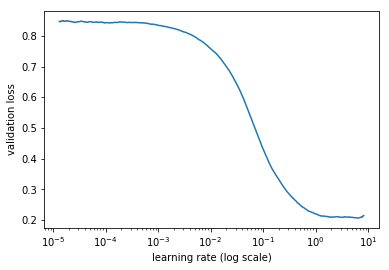

In [26]:
lrf=learn.lr_find()
learn.sched.plot()

In [27]:
lr = 0.2

In [28]:
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

  0%|          | 0/506 [00:00<?, ?it/s]

  0%|          | 1/506 [00:00<03:07,  2.70it/s, loss=0.843]

  1%|          | 4/506 [00:00<01:01,  8.18it/s, loss=0.851]

  1%|▏         | 7/506 [00:00<00:43, 11.55it/s, loss=0.848]

  2%|▏         | 10/506 [00:00<00:36, 13.78it/s, loss=0.849]

  3%|▎         | 13/506 [00:00<00:32, 15.33it/s, loss=0.847]

  3%|▎         | 16/506 [00:00<00:29, 16.56it/s, loss=0.847]

  4%|▍         | 19/506 [00:01<00:27, 17.46it/s, loss=0.846]

  4%|▍         | 22/506 [00:01<00:26, 18.25it/s, loss=0.842]

  5%|▍         | 25/506 [00:01<00:25, 18.80it/s, loss=0.84] 

  6%|▌         | 28/506 [00:01<00:24, 19.36it/s, loss=0.832]

  6%|▌         | 31/506 [00:01<00:24, 19.66it/s, loss=0.804]

  7%|▋         | 34/506 [00:01<00:23, 20.05it/s, loss=0.766]

  7%|▋         | 37/506 [00:01<00:23, 20.37it/s, loss=0.72] 

  8%|▊         | 40/506 [00:01<00:22, 20.75it/s, loss=0.672]

  8%|▊         | 43/506 [00:02<00:22, 21.01it/s, loss=0.628]

  9%|▉         | 46/506 [00:02<00:21, 21.18it/s, loss=0.585]

 10%|▉         | 49/506 [00:02<00:21, 21.31it/s, loss=0.547]

 10%|█         | 52/506 [00:02<00:21, 21.27it/s, loss=0.514]

 11%|█         | 54/506 [00:02<00:21, 20.90it/s, loss=0.496]

 11%|█▏        | 57/506 [00:02<00:21, 21.03it/s, loss=0.47] 

 12%|█▏        | 62/506 [00:02<00:20, 21.97it/s, loss=0.431]

 13%|█▎        | 67/506 [00:02<00:19, 22.85it/s, loss=0.399]

 14%|█▍        | 72/506 [00:03<00:18, 23.67it/s, loss=0.372]

 15%|█▌        | 77/506 [00:03<00:17, 24.44it/s, loss=0.347]

 16%|█▌        | 81/506 [00:03<00:18, 23.40it/s, loss=0.33] 

 17%|█▋        | 84/506 [00:03<00:18, 23.42it/s, loss=0.318]

 17%|█▋        | 87/506 [00:03<00:17, 23.51it/s, loss=0.306]

 18%|█▊        | 90/506 [00:03<00:17, 23.60it/s, loss=0.296]

 18%|█▊        | 91/506 [00:03<00:18, 22.98it/s, loss=0.293]

 18%|█▊        | 93/506 [00:04<00:18, 22.70it/s, loss=0.288]

 19%|█▉        | 95/506 [00:04<00:18, 22.61it/s, loss=0.283]

 19%|█▉        | 98/506 [00:04<00:17, 22.70it/s, loss=0.275]

 20%|█▉        | 101/506 [00:04<00:17, 22.77it/s, loss=0.268]

 21%|██        | 104/506 [00:04<00:17, 22.84it/s, loss=0.26] 

 21%|██        | 107/506 [00:04<00:17, 22.89it/s, loss=0.255]

 22%|██▏       | 110/506 [00:04<00:17, 22.93it/s, loss=0.25] 

 22%|██▏       | 113/506 [00:04<00:17, 22.92it/s, loss=0.244]

 23%|██▎       | 116/506 [00:05<00:17, 22.94it/s, loss=0.239]

 24%|██▎       | 119/506 [00:05<00:16, 22.91it/s, loss=0.235]

 24%|██▍       | 122/506 [00:05<00:16, 22.96it/s, loss=0.229]

 25%|██▍       | 125/506 [00:05<00:16, 22.97it/s, loss=0.224]

 25%|██▌       | 128/506 [00:05<00:16, 23.03it/s, loss=0.22] 

 26%|██▌       | 131/506 [00:05<00:16, 23.03it/s, loss=0.215]

 26%|██▋       | 134/506 [00:05<00:16, 23.02it/s, loss=0.211]

 27%|██▋       | 137/506 [00:05<00:16, 23.06it/s, loss=0.208]

 28%|██▊       | 141/506 [00:06<00:15, 23.28it/s, loss=0.204]

 29%|██▉       | 146/506 [00:06<00:15, 23.67it/s, loss=0.198]

 30%|██▉       | 151/506 [00:06<00:14, 24.07it/s, loss=0.194]

 31%|███       | 156/506 [00:06<00:14, 24.47it/s, loss=0.19] 

 32%|███▏      | 161/506 [00:06<00:14, 24.06it/s, loss=0.188]

 32%|███▏      | 164/506 [00:06<00:14, 24.09it/s, loss=0.185]

 33%|███▎      | 167/506 [00:06<00:14, 24.09it/s, loss=0.183]

 34%|███▎      | 170/506 [00:07<00:13, 24.11it/s, loss=0.182]

 34%|███▍      | 173/506 [00:07<00:13, 24.13it/s, loss=0.179]

 35%|███▍      | 175/506 [00:07<00:13, 23.86it/s, loss=0.178]

 35%|███▌      | 178/506 [00:07<00:13, 23.86it/s, loss=0.177]

 36%|███▌      | 181/506 [00:07<00:13, 23.88it/s, loss=0.175]

 36%|███▋      | 184/506 [00:07<00:13, 23.90it/s, loss=0.174]

 37%|███▋      | 187/506 [00:07<00:13, 23.94it/s, loss=0.174]

 38%|███▊      | 190/506 [00:07<00:13, 23.97it/s, loss=0.173]

 38%|███▊      | 193/506 [00:08<00:13, 23.99it/s, loss=0.17] 

 39%|███▊      | 196/506 [00:08<00:12, 24.03it/s, loss=0.169]

 39%|███▉      | 199/506 [00:08<00:12, 24.06it/s, loss=0.169]

 40%|███▉      | 202/506 [00:08<00:12, 24.09it/s, loss=0.168]

 41%|████      | 205/506 [00:08<00:12, 24.12it/s, loss=0.168]

 41%|████      | 208/506 [00:08<00:12, 24.16it/s, loss=0.168]

 42%|████▏     | 211/506 [00:08<00:12, 24.18it/s, loss=0.167]

 42%|████▏     | 214/506 [00:08<00:12, 24.20it/s, loss=0.166]

 43%|████▎     | 217/506 [00:08<00:11, 24.22it/s, loss=0.166]

 44%|████▎     | 221/506 [00:09<00:11, 24.38it/s, loss=0.165]

 45%|████▍     | 226/506 [00:09<00:11, 24.66it/s, loss=0.165]

 46%|████▌     | 231/506 [00:09<00:11, 24.93it/s, loss=0.162]

 47%|████▋     | 236/506 [00:09<00:10, 25.19it/s, loss=0.162]

 48%|████▊     | 241/506 [00:09<00:10, 24.88it/s, loss=0.161]

 48%|████▊     | 244/506 [00:09<00:10, 24.90it/s, loss=0.16] 

 49%|████▉     | 247/506 [00:09<00:10, 24.91it/s, loss=0.16]

 49%|████▉     | 250/506 [00:10<00:10, 24.93it/s, loss=0.159]

 50%|█████     | 253/506 [00:10<00:10, 24.95it/s, loss=0.159]

 51%|█████     | 256/506 [00:10<00:10, 24.97it/s, loss=0.158]

 51%|█████     | 259/506 [00:10<00:09, 24.96it/s, loss=0.158]

 52%|█████▏    | 262/506 [00:10<00:09, 24.98it/s, loss=0.157]

 52%|█████▏    | 265/506 [00:10<00:09, 24.99it/s, loss=0.157]

 53%|█████▎    | 268/506 [00:10<00:09, 25.01it/s, loss=0.156]

 54%|█████▎    | 271/506 [00:10<00:09, 25.02it/s, loss=0.155]

 54%|█████▍    | 274/506 [00:10<00:09, 25.04it/s, loss=0.154]

 55%|█████▍    | 277/506 [00:11<00:09, 25.04it/s, loss=0.156]

 55%|█████▌    | 280/506 [00:11<00:09, 25.05it/s, loss=0.155]

 56%|█████▌    | 283/506 [00:11<00:08, 25.07it/s, loss=0.155]

 57%|█████▋    | 286/506 [00:11<00:08, 25.07it/s, loss=0.155]

 57%|█████▋    | 289/506 [00:11<00:08, 25.09it/s, loss=0.156]

 58%|█████▊    | 292/506 [00:11<00:08, 25.09it/s, loss=0.155]

 58%|█████▊    | 295/506 [00:11<00:08, 25.11it/s, loss=0.154]

 59%|█████▉    | 298/506 [00:11<00:08, 25.14it/s, loss=0.155]

 60%|█████▉    | 302/506 [00:11<00:08, 25.26it/s, loss=0.156]

 61%|██████    | 307/506 [00:12<00:07, 25.46it/s, loss=0.156]

 62%|██████▏   | 312/506 [00:12<00:07, 25.66it/s, loss=0.155]

 63%|██████▎   | 317/506 [00:12<00:07, 25.86it/s, loss=0.154]

 63%|██████▎   | 321/506 [00:12<00:07, 25.60it/s, loss=0.153]

 64%|██████▍   | 324/506 [00:12<00:07, 25.61it/s, loss=0.152]

 65%|██████▍   | 327/506 [00:12<00:06, 25.62it/s, loss=0.152]

 65%|██████▌   | 330/506 [00:12<00:06, 25.63it/s, loss=0.153]

 66%|██████▌   | 333/506 [00:12<00:06, 25.65it/s, loss=0.153]

 66%|██████▋   | 336/506 [00:13<00:06, 25.66it/s, loss=0.153]

 67%|██████▋   | 339/506 [00:13<00:06, 25.67it/s, loss=0.152]

 68%|██████▊   | 342/506 [00:13<00:06, 25.69it/s, loss=0.152]

 68%|██████▊   | 345/506 [00:13<00:06, 25.69it/s, loss=0.151]

 69%|██████▉   | 348/506 [00:13<00:06, 25.72it/s, loss=0.152]

 69%|██████▉   | 351/506 [00:13<00:06, 25.74it/s, loss=0.152]

 70%|██████▉   | 354/506 [00:13<00:05, 25.76it/s, loss=0.152]

 71%|███████   | 357/506 [00:13<00:05, 25.77it/s, loss=0.152]

 71%|███████   | 360/506 [00:13<00:05, 25.79it/s, loss=0.152]

 72%|███████▏  | 363/506 [00:14<00:05, 25.81it/s, loss=0.153]

 72%|███████▏  | 366/506 [00:14<00:05, 25.84it/s, loss=0.153]

 73%|███████▎  | 369/506 [00:14<00:05, 25.86it/s, loss=0.153]

 74%|███████▎  | 372/506 [00:14<00:05, 25.88it/s, loss=0.153]

 74%|███████▍  | 375/506 [00:14<00:05, 25.89it/s, loss=0.152]

 75%|███████▍  | 379/506 [00:14<00:04, 25.97it/s, loss=0.152]

 76%|███████▌  | 384/506 [00:14<00:04, 26.13it/s, loss=0.152]

 77%|███████▋  | 390/506 [00:14<00:04, 26.32it/s, loss=0.152]

 78%|███████▊  | 396/506 [00:14<00:04, 26.51it/s, loss=0.152]

 79%|███████▉  | 401/506 [00:15<00:03, 26.32it/s, loss=0.151]

 80%|███████▉  | 404/506 [00:15<00:03, 26.33it/s, loss=0.15] 

 80%|████████  | 407/506 [00:15<00:03, 26.34it/s, loss=0.151]

 81%|████████  | 410/506 [00:15<00:03, 26.35it/s, loss=0.152]

 82%|████████▏ | 414/506 [00:15<00:03, 26.40it/s, loss=0.152]

 82%|████████▏ | 417/506 [00:15<00:03, 26.41it/s, loss=0.153]

 83%|████████▎ | 420/506 [00:15<00:03, 26.42it/s, loss=0.152]

 84%|████████▎ | 423/506 [00:16<00:03, 26.42it/s, loss=0.151]

 84%|████████▍ | 426/506 [00:16<00:03, 26.43it/s, loss=0.151]

 85%|████████▍ | 429/506 [00:16<00:02, 26.44it/s, loss=0.15] 

 85%|████████▌ | 432/506 [00:16<00:02, 26.46it/s, loss=0.15]

 86%|████████▌ | 436/506 [00:16<00:02, 26.49it/s, loss=0.15]

 87%|████████▋ | 439/506 [00:16<00:02, 26.49it/s, loss=0.15]

 87%|████████▋ | 442/506 [00:16<00:02, 26.51it/s, loss=0.149]

 88%|████████▊ | 445/506 [00:16<00:02, 26.51it/s, loss=0.149]

 89%|████████▊ | 449/506 [00:16<00:02, 26.54it/s, loss=0.15] 

 89%|████████▉ | 452/506 [00:17<00:02, 26.55it/s, loss=0.15]

 90%|████████▉ | 455/506 [00:17<00:01, 26.56it/s, loss=0.15]

 91%|█████████ | 458/506 [00:17<00:01, 26.57it/s, loss=0.151]

 92%|█████████▏| 463/506 [00:17<00:01, 26.69it/s, loss=0.152]

 92%|█████████▏| 468/506 [00:17<00:01, 26.82it/s, loss=0.15] 

 93%|█████████▎| 473/506 [00:17<00:01, 26.95it/s, loss=0.15]

 94%|█████████▍| 478/506 [00:17<00:01, 27.08it/s, loss=0.149]

 95%|█████████▌| 481/506 [00:17<00:00, 26.86it/s, loss=0.149]

 96%|█████████▌| 484/506 [00:18<00:00, 26.87it/s, loss=0.149]

 96%|█████████▌| 487/506 [00:18<00:00, 26.87it/s, loss=0.149]

 97%|█████████▋| 490/506 [00:18<00:00, 26.88it/s, loss=0.148]

 97%|█████████▋| 493/506 [00:18<00:00, 26.89it/s, loss=0.148]

 98%|█████████▊| 498/506 [00:18<00:00, 27.01it/s, loss=0.147]

 99%|█████████▉| 503/506 [00:18<00:00, 27.13it/s, loss=0.147]

epoch      trn_loss   val_loss   f2         

    0      0.146531   0.132936   0.883293  

  0%|          | 0/506 [00:00<?, ?it/s]

  0%|          | 1/506 [00:00<01:48,  4.66it/s, loss=0.147]

  1%|          | 4/506 [00:00<00:40, 12.40it/s, loss=0.147]

  1%|▏         | 7/506 [00:00<00:30, 16.19it/s, loss=0.146]

  2%|▏         | 10/506 [00:00<00:27, 18.32it/s, loss=0.148]

  3%|▎         | 13/506 [00:00<00:24, 19.88it/s, loss=0.147]

  3%|▎         | 16/506 [00:00<00:23, 20.91it/s, loss=0.147]

  4%|▍         | 19/506 [00:00<00:22, 21.69it/s, loss=0.147]

  4%|▍         | 22/506 [00:00<00:21, 22.22it/s, loss=0.148]

  5%|▍         | 25/506 [00:01<00:21, 22.72it/s, loss=0.149]

  6%|▌         | 28/506 [00:01<00:20, 23.21it/s, loss=0.148]

  6%|▌         | 31/506 [00:01<00:20, 23.55it/s, loss=0.149]

  7%|▋         | 34/506 [00:01<00:19, 23.86it/s, loss=0.149]

  7%|▋         | 37/506 [00:01<00:19, 24.13it/s, loss=0.15] 

  8%|▊         | 40/506 [00:01<00:19, 24.34it/s, loss=0.149]

  8%|▊         | 43/506 [00:01<00:18, 24.47it/s, loss=0.149]

  9%|▉         | 46/506 [00:01<00:18, 24.62it/s, loss=0.15] 

 10%|▉         | 49/506 [00:01<00:18, 24.77it/s, loss=0.149]

 10%|█         | 52/506 [00:02<00:18, 24.89it/s, loss=0.15] 

 11%|█         | 56/506 [00:02<00:17, 25.34it/s, loss=0.15]

 12%|█▏        | 61/506 [00:02<00:16, 26.40it/s, loss=0.15]

 13%|█▎        | 66/506 [00:02<00:16, 27.37it/s, loss=0.149]

 14%|█▍        | 71/506 [00:02<00:15, 28.25it/s, loss=0.15] 

 15%|█▌        | 77/506 [00:02<00:14, 29.23it/s, loss=0.15]

 16%|█▌        | 81/506 [00:02<00:15, 27.86it/s, loss=0.15]

 17%|█▋        | 84/506 [00:03<00:15, 27.80it/s, loss=0.15]

 17%|█▋        | 87/506 [00:03<00:15, 27.82it/s, loss=0.15]

 18%|█▊        | 90/506 [00:03<00:14, 27.85it/s, loss=0.151]

 18%|█▊        | 93/506 [00:03<00:14, 27.79it/s, loss=0.149]

 19%|█▉        | 96/506 [00:03<00:14, 27.79it/s, loss=0.15] 

 20%|█▉        | 99/506 [00:03<00:14, 27.77it/s, loss=0.151]

 20%|██        | 102/506 [00:03<00:14, 27.76it/s, loss=0.15]

 21%|██        | 105/506 [00:03<00:14, 27.75it/s, loss=0.15]

 21%|██▏       | 108/506 [00:03<00:14, 27.79it/s, loss=0.149]

 22%|██▏       | 111/506 [00:03<00:14, 27.78it/s, loss=0.15] 

 23%|██▎       | 114/506 [00:04<00:14, 27.78it/s, loss=0.149]

 23%|██▎       | 117/506 [00:04<00:14, 27.78it/s, loss=0.149]

 24%|██▎       | 120/506 [00:04<00:13, 27.80it/s, loss=0.15] 

 24%|██▍       | 123/506 [00:04<00:13, 27.80it/s, loss=0.15]

 25%|██▍       | 126/506 [00:04<00:13, 27.81it/s, loss=0.152]

 26%|██▌       | 130/506 [00:04<00:13, 27.88it/s, loss=0.152]

 26%|██▋       | 134/506 [00:04<00:13, 27.92it/s, loss=0.153]

 27%|██▋       | 137/506 [00:04<00:13, 27.93it/s, loss=0.153]

 28%|██▊       | 142/506 [00:05<00:12, 28.34it/s, loss=0.152]

 29%|██▉       | 147/506 [00:05<00:12, 28.75it/s, loss=0.152]

 30%|███       | 152/506 [00:05<00:12, 29.15it/s, loss=0.152]

 31%|███       | 157/506 [00:05<00:11, 29.53it/s, loss=0.152]

 32%|███▏      | 161/506 [00:05<00:11, 28.78it/s, loss=0.15] 

 32%|███▏      | 164/506 [00:05<00:11, 28.77it/s, loss=0.152]

 33%|███▎      | 167/506 [00:05<00:11, 28.79it/s, loss=0.151]

 34%|███▎      | 170/506 [00:05<00:11, 28.78it/s, loss=0.151]

 34%|███▍      | 173/506 [00:06<00:11, 28.73it/s, loss=0.15] 

 35%|███▍      | 176/506 [00:06<00:11, 28.72it/s, loss=0.149]

 35%|███▌      | 179/506 [00:06<00:11, 28.71it/s, loss=0.15] 

 36%|███▌      | 182/506 [00:06<00:11, 28.69it/s, loss=0.15]

 37%|███▋      | 185/506 [00:06<00:11, 28.64it/s, loss=0.148]

 37%|███▋      | 188/506 [00:06<00:11, 28.66it/s, loss=0.148]

 38%|███▊      | 191/506 [00:06<00:11, 28.63it/s, loss=0.148]

 38%|███▊      | 194/506 [00:06<00:10, 28.65it/s, loss=0.148]

 39%|███▉      | 197/506 [00:06<00:10, 28.64it/s, loss=0.148]

 40%|███▉      | 200/506 [00:06<00:10, 28.65it/s, loss=0.147]

 40%|████      | 203/506 [00:07<00:10, 28.64it/s, loss=0.146]

 41%|████      | 206/506 [00:07<00:10, 28.63it/s, loss=0.148]

 41%|████▏     | 209/506 [00:07<00:10, 28.63it/s, loss=0.148]

 42%|████▏     | 212/506 [00:07<00:10, 28.64it/s, loss=0.148]

 42%|████▏     | 215/506 [00:07<00:10, 28.60it/s, loss=0.148]

 43%|████▎     | 218/506 [00:07<00:10, 28.58it/s, loss=0.147]

 44%|████▍     | 223/506 [00:07<00:09, 28.84it/s, loss=0.147]

 45%|████▌     | 228/506 [00:07<00:09, 29.11it/s, loss=0.146]

 46%|████▌     | 233/506 [00:07<00:09, 29.37it/s, loss=0.146]

 47%|████▋     | 238/506 [00:08<00:09, 29.62it/s, loss=0.146]

 48%|████▊     | 241/506 [00:08<00:09, 29.09it/s, loss=0.147]

 48%|████▊     | 244/506 [00:08<00:09, 29.07it/s, loss=0.146]

 49%|████▉     | 247/506 [00:08<00:08, 29.06it/s, loss=0.146]

 49%|████▉     | 250/506 [00:08<00:08, 29.04it/s, loss=0.146]

 50%|█████     | 253/506 [00:08<00:08, 29.04it/s, loss=0.147]

 51%|█████     | 256/506 [00:08<00:08, 29.04it/s, loss=0.148]

 51%|█████     | 259/506 [00:08<00:08, 29.00it/s, loss=0.149]

 52%|█████▏    | 262/506 [00:09<00:08, 29.00it/s, loss=0.148]

 52%|█████▏    | 265/506 [00:09<00:08, 28.97it/s, loss=0.147]

 53%|█████▎    | 268/506 [00:09<00:08, 28.97it/s, loss=0.147]

 54%|█████▎    | 271/506 [00:09<00:08, 28.96it/s, loss=0.147]

 54%|█████▍    | 274/506 [00:09<00:08, 28.94it/s, loss=0.147]

 55%|█████▍    | 277/506 [00:09<00:07, 28.94it/s, loss=0.148]

 55%|█████▌    | 280/506 [00:09<00:07, 28.93it/s, loss=0.15] 

 56%|█████▌    | 283/506 [00:09<00:07, 28.91it/s, loss=0.15]

 57%|█████▋    | 286/506 [00:09<00:07, 28.91it/s, loss=0.15]

 57%|█████▋    | 289/506 [00:09<00:07, 28.90it/s, loss=0.149]

 58%|█████▊    | 292/506 [00:10<00:07, 28.89it/s, loss=0.148]

 58%|█████▊    | 296/506 [00:10<00:07, 28.90it/s, loss=0.148]

 59%|█████▉    | 300/506 [00:10<00:07, 28.96it/s, loss=0.147]

 60%|██████    | 306/506 [00:10<00:06, 29.21it/s, loss=0.148]

 61%|██████▏   | 311/506 [00:10<00:06, 29.40it/s, loss=0.148]

 62%|██████▏   | 316/506 [00:10<00:06, 29.60it/s, loss=0.147]

 63%|██████▎   | 321/506 [00:10<00:06, 29.24it/s, loss=0.146]

 64%|██████▍   | 324/506 [00:11<00:06, 29.25it/s, loss=0.146]

 65%|██████▍   | 327/506 [00:11<00:06, 29.23it/s, loss=0.146]

 65%|██████▌   | 330/506 [00:11<00:06, 29.22it/s, loss=0.145]

 66%|██████▌   | 333/506 [00:11<00:05, 29.21it/s, loss=0.145]

 66%|██████▋   | 336/506 [00:11<00:05, 29.19it/s, loss=0.144]

 67%|██████▋   | 339/506 [00:11<00:05, 29.17it/s, loss=0.144]

 68%|██████▊   | 342/506 [00:11<00:05, 29.18it/s, loss=0.144]

 68%|██████▊   | 345/506 [00:11<00:05, 29.15it/s, loss=0.143]

 69%|██████▉   | 348/506 [00:11<00:05, 29.15it/s, loss=0.143]

 69%|██████▉   | 351/506 [00:12<00:05, 29.13it/s, loss=0.145]

 70%|██████▉   | 354/506 [00:12<00:05, 29.13it/s, loss=0.144]

 71%|███████   | 357/506 [00:12<00:05, 29.13it/s, loss=0.143]

 71%|███████   | 360/506 [00:12<00:05, 29.12it/s, loss=0.143]

 72%|███████▏  | 363/506 [00:12<00:04, 29.10it/s, loss=0.142]

 72%|███████▏  | 366/506 [00:12<00:04, 29.09it/s, loss=0.142]

 73%|███████▎  | 369/506 [00:12<00:04, 29.09it/s, loss=0.142]

 74%|███████▎  | 372/506 [00:12<00:04, 29.07it/s, loss=0.143]

 74%|███████▍  | 375/506 [00:12<00:04, 29.07it/s, loss=0.142]

 75%|███████▍  | 378/506 [00:13<00:04, 29.07it/s, loss=0.143]

 76%|███████▌  | 383/506 [00:13<00:04, 29.22it/s, loss=0.144]

 77%|███████▋  | 388/506 [00:13<00:04, 29.38it/s, loss=0.143]

 78%|███████▊  | 393/506 [00:13<00:03, 29.53it/s, loss=0.144]

 79%|███████▊  | 398/506 [00:13<00:03, 29.68it/s, loss=0.145]

 79%|███████▉  | 401/506 [00:13<00:03, 29.31it/s, loss=0.144]

 80%|███████▉  | 404/506 [00:13<00:03, 29.28it/s, loss=0.144]

 80%|████████  | 407/506 [00:13<00:03, 29.28it/s, loss=0.144]

 81%|████████  | 410/506 [00:14<00:03, 29.27it/s, loss=0.144]

 82%|████████▏ | 413/506 [00:14<00:03, 29.26it/s, loss=0.144]

 82%|████████▏ | 416/506 [00:14<00:03, 29.26it/s, loss=0.144]

 83%|████████▎ | 419/506 [00:14<00:02, 29.25it/s, loss=0.144]

 83%|████████▎ | 422/506 [00:14<00:02, 29.23it/s, loss=0.143]

 84%|████████▍ | 425/506 [00:14<00:02, 29.21it/s, loss=0.143]

 85%|████████▍ | 428/506 [00:14<00:02, 29.21it/s, loss=0.143]

 85%|████████▌ | 431/506 [00:14<00:02, 29.19it/s, loss=0.144]

 86%|████████▌ | 434/506 [00:14<00:02, 29.19it/s, loss=0.144]

 86%|████████▋ | 437/506 [00:14<00:02, 29.17it/s, loss=0.144]

 87%|████████▋ | 440/506 [00:15<00:02, 29.17it/s, loss=0.144]

 88%|████████▊ | 443/506 [00:15<00:02, 29.17it/s, loss=0.143]

 88%|████████▊ | 446/506 [00:15<00:02, 29.17it/s, loss=0.143]

 89%|████████▊ | 449/506 [00:15<00:01, 29.16it/s, loss=0.142]

 89%|████████▉ | 452/506 [00:15<00:01, 29.15it/s, loss=0.142]

 90%|████████▉ | 455/506 [00:15<00:01, 29.15it/s, loss=0.142]

 91%|█████████ | 459/506 [00:15<00:01, 29.18it/s, loss=0.143]

 92%|█████████▏| 464/506 [00:15<00:01, 29.31it/s, loss=0.142]

 93%|█████████▎| 469/506 [00:15<00:01, 29.44it/s, loss=0.142]

 94%|█████████▎| 474/506 [00:16<00:01, 29.56it/s, loss=0.143]

 95%|█████████▍| 479/506 [00:16<00:00, 29.69it/s, loss=0.143]

 95%|█████████▌| 481/506 [00:16<00:00, 29.41it/s, loss=0.142]

 96%|█████████▌| 484/506 [00:16<00:00, 29.40it/s, loss=0.141]

 96%|█████████▌| 487/506 [00:16<00:00, 29.39it/s, loss=0.14] 

 97%|█████████▋| 491/506 [00:16<00:00, 29.42it/s, loss=0.139]

 98%|█████████▊| 494/506 [00:16<00:00, 29.40it/s, loss=0.139]

 99%|█████████▊| 499/506 [00:16<00:00, 29.51it/s, loss=0.139]

100%|█████████▉| 504/506 [00:17<00:00, 29.63it/s, loss=0.139]

    1      0.139103   0.12787    0.89037   

  0%|          | 0/506 [00:00<?, ?it/s]

  0%|          | 1/506 [00:00<01:50,  4.58it/s, loss=0.139]

  1%|          | 4/506 [00:00<00:40, 12.38it/s, loss=0.14] 

  1%|▏         | 7/506 [00:00<00:31, 15.91it/s, loss=0.141]

  2%|▏         | 10/506 [00:00<00:26, 18.47it/s, loss=0.141]

  3%|▎         | 13/506 [00:00<00:24, 19.93it/s, loss=0.142]

  3%|▎         | 16/506 [00:00<00:23, 21.23it/s, loss=0.143]

  4%|▍         | 19/506 [00:00<00:22, 21.99it/s, loss=0.142]

  4%|▍         | 22/506 [00:00<00:21, 22.65it/s, loss=0.142]

  5%|▍         | 25/506 [00:01<00:20, 23.07it/s, loss=0.142]

  6%|▌         | 29/506 [00:01<00:20, 23.76it/s, loss=0.142]

  6%|▋         | 32/506 [00:01<00:19, 24.06it/s, loss=0.142]

  7%|▋         | 35/506 [00:01<00:19, 24.36it/s, loss=0.141]

  8%|▊         | 38/506 [00:01<00:19, 24.59it/s, loss=0.142]

  8%|▊         | 41/506 [00:01<00:18, 24.85it/s, loss=0.143]

  9%|▊         | 44/506 [00:01<00:18, 24.99it/s, loss=0.143]

  9%|▉         | 47/506 [00:01<00:18, 25.22it/s, loss=0.144]

 10%|▉         | 50/506 [00:01<00:17, 25.35it/s, loss=0.143]

 10%|█         | 53/506 [00:02<00:17, 25.54it/s, loss=0.143]

 11%|█         | 56/506 [00:02<00:17, 25.70it/s, loss=0.142]

 12%|█▏        | 60/506 [00:02<00:16, 26.24it/s, loss=0.142]

 13%|█▎        | 65/506 [00:02<00:16, 27.23it/s, loss=0.143]

 14%|█▍        | 70/506 [00:02<00:15, 28.12it/s, loss=0.143]

 15%|█▍        | 75/506 [00:02<00:14, 28.97it/s, loss=0.144]

 16%|█▌        | 80/506 [00:02<00:14, 29.74it/s, loss=0.143]

 16%|█▌        | 81/506 [00:02<00:15, 27.78it/s, loss=0.142]

 17%|█▋        | 84/506 [00:03<00:15, 27.79it/s, loss=0.142]

 17%|█▋        | 87/506 [00:03<00:15, 27.81it/s, loss=0.141]

 18%|█▊        | 90/506 [00:03<00:14, 27.80it/s, loss=0.142]

 18%|█▊        | 93/506 [00:03<00:14, 27.78it/s, loss=0.142]

 19%|█▉        | 96/506 [00:03<00:14, 27.81it/s, loss=0.142]

 20%|█▉        | 99/506 [00:03<00:14, 27.84it/s, loss=0.142]

 20%|██        | 102/506 [00:03<00:14, 27.89it/s, loss=0.142]

 21%|██        | 105/506 [00:03<00:14, 27.88it/s, loss=0.142]

 21%|██▏       | 108/506 [00:03<00:14, 27.90it/s, loss=0.142]

 22%|██▏       | 111/506 [00:03<00:14, 27.90it/s, loss=0.142]

 23%|██▎       | 114/506 [00:04<00:14, 27.92it/s, loss=0.141]

 23%|██▎       | 117/506 [00:04<00:13, 27.91it/s, loss=0.141]

 24%|██▎       | 120/506 [00:04<00:13, 27.93it/s, loss=0.142]

 24%|██▍       | 123/506 [00:04<00:13, 27.92it/s, loss=0.142]

 25%|██▍       | 126/506 [00:04<00:13, 27.94it/s, loss=0.141]

 25%|██▌       | 129/506 [00:04<00:13, 27.95it/s, loss=0.14] 

 26%|██▌       | 132/506 [00:04<00:13, 27.95it/s, loss=0.14]

 27%|██▋       | 135/506 [00:04<00:13, 27.97it/s, loss=0.139]

 27%|██▋       | 138/506 [00:04<00:13, 27.98it/s, loss=0.139]

 28%|██▊       | 143/506 [00:05<00:12, 28.40it/s, loss=0.139]

 29%|██▉       | 148/506 [00:05<00:12, 28.80it/s, loss=0.138]

 30%|███       | 153/506 [00:05<00:12, 29.20it/s, loss=0.138]

 31%|███       | 158/506 [00:05<00:11, 29.58it/s, loss=0.14] 

 32%|███▏      | 161/506 [00:05<00:11, 28.75it/s, loss=0.139]

 32%|███▏      | 164/506 [00:05<00:11, 28.74it/s, loss=0.14] 

 33%|███▎      | 167/506 [00:05<00:11, 28.75it/s, loss=0.14]

 34%|███▎      | 170/506 [00:05<00:11, 28.74it/s, loss=0.139]

 34%|███▍      | 173/506 [00:06<00:11, 28.71it/s, loss=0.139]

 35%|███▍      | 176/506 [00:06<00:11, 28.70it/s, loss=0.14] 

 35%|███▌      | 179/506 [00:06<00:11, 28.68it/s, loss=0.14]

 36%|███▌      | 182/506 [00:06<00:11, 28.69it/s, loss=0.141]

 37%|███▋      | 185/506 [00:06<00:11, 28.68it/s, loss=0.141]

 37%|███▋      | 188/506 [00:06<00:11, 28.69it/s, loss=0.141]

 38%|███▊      | 191/506 [00:06<00:10, 28.67it/s, loss=0.14] 

 38%|███▊      | 194/506 [00:06<00:10, 28.66it/s, loss=0.14]

 39%|███▉      | 197/506 [00:06<00:10, 28.66it/s, loss=0.142]

 40%|███▉      | 200/506 [00:06<00:10, 28.66it/s, loss=0.14] 

 40%|████      | 203/506 [00:07<00:10, 28.65it/s, loss=0.14]

 41%|████      | 207/506 [00:07<00:10, 28.71it/s, loss=0.14]

 42%|████▏     | 211/506 [00:07<00:10, 28.73it/s, loss=0.14]

 42%|████▏     | 214/506 [00:07<00:10, 28.74it/s, loss=0.14]

 43%|████▎     | 217/506 [00:07<00:10, 28.73it/s, loss=0.141]

 44%|████▎     | 221/506 [00:07<00:09, 28.82it/s, loss=0.141]

 45%|████▍     | 226/506 [00:07<00:09, 29.08it/s, loss=0.142]

 46%|████▌     | 231/506 [00:07<00:09, 29.35it/s, loss=0.143]

 47%|████▋     | 236/506 [00:07<00:09, 29.60it/s, loss=0.143]

 48%|████▊     | 241/506 [00:08<00:09, 29.15it/s, loss=0.143]

 48%|████▊     | 244/506 [00:08<00:08, 29.13it/s, loss=0.144]

 49%|████▉     | 247/506 [00:08<00:08, 29.13it/s, loss=0.143]

 49%|████▉     | 250/506 [00:08<00:08, 29.11it/s, loss=0.143]

 50%|█████     | 253/506 [00:08<00:08, 29.07it/s, loss=0.142]

 51%|█████     | 256/506 [00:08<00:08, 29.07it/s, loss=0.143]

 51%|█████     | 259/506 [00:08<00:08, 29.05it/s, loss=0.142]

 52%|█████▏    | 262/506 [00:09<00:08, 29.04it/s, loss=0.141]

 52%|█████▏    | 265/506 [00:09<00:08, 29.03it/s, loss=0.141]

 53%|█████▎    | 268/506 [00:09<00:08, 29.03it/s, loss=0.141]

 54%|█████▎    | 271/506 [00:09<00:08, 29.01it/s, loss=0.141]

 54%|█████▍    | 274/506 [00:09<00:07, 29.01it/s, loss=0.141]

 55%|█████▍    | 277/506 [00:09<00:07, 29.01it/s, loss=0.14] 

 55%|█████▌    | 280/506 [00:09<00:07, 29.01it/s, loss=0.14]

 56%|█████▌    | 283/506 [00:09<00:07, 28.99it/s, loss=0.14]

 57%|█████▋    | 286/506 [00:09<00:07, 28.98it/s, loss=0.14]

 57%|█████▋    | 289/506 [00:09<00:07, 28.97it/s, loss=0.14]

 58%|█████▊    | 292/506 [00:10<00:07, 28.96it/s, loss=0.14]

 58%|█████▊    | 295/506 [00:10<00:07, 28.96it/s, loss=0.14]

 59%|█████▉    | 298/506 [00:10<00:07, 28.96it/s, loss=0.14]

 60%|█████▉    | 303/506 [00:10<00:06, 29.16it/s, loss=0.141]

 61%|██████    | 308/506 [00:10<00:06, 29.35it/s, loss=0.141]

 62%|██████▏   | 313/506 [00:10<00:06, 29.54it/s, loss=0.14] 

 63%|██████▎   | 318/506 [00:10<00:06, 29.73it/s, loss=0.14]

 63%|██████▎   | 321/506 [00:10<00:06, 29.31it/s, loss=0.141]

 64%|██████▍   | 324/506 [00:11<00:06, 29.30it/s, loss=0.14] 

 65%|██████▍   | 327/506 [00:11<00:06, 29.28it/s, loss=0.14]

 65%|██████▌   | 330/506 [00:11<00:06, 29.27it/s, loss=0.14]

 66%|██████▌   | 333/506 [00:11<00:05, 29.26it/s, loss=0.139]

 66%|██████▋   | 336/506 [00:11<00:05, 29.25it/s, loss=0.139]

 67%|██████▋   | 339/506 [00:11<00:05, 29.24it/s, loss=0.138]

 68%|██████▊   | 342/506 [00:11<00:05, 29.25it/s, loss=0.138]

 68%|██████▊   | 345/506 [00:11<00:05, 29.24it/s, loss=0.14] 

 69%|██████▉   | 349/506 [00:11<00:05, 29.25it/s, loss=0.139]

 70%|██████▉   | 352/506 [00:12<00:05, 29.24it/s, loss=0.14] 

 70%|███████   | 355/506 [00:12<00:05, 29.22it/s, loss=0.138]

 71%|███████   | 358/506 [00:12<00:05, 29.21it/s, loss=0.14] 

 71%|███████▏  | 361/506 [00:12<00:04, 29.20it/s, loss=0.14]

 72%|███████▏  | 364/506 [00:12<00:04, 29.18it/s, loss=0.139]

 73%|███████▎  | 367/506 [00:12<00:04, 29.17it/s, loss=0.14] 

 73%|███████▎  | 370/506 [00:12<00:04, 29.15it/s, loss=0.139]

 74%|███████▎  | 373/506 [00:12<00:04, 29.12it/s, loss=0.138]

 74%|███████▍  | 376/506 [00:12<00:04, 29.10it/s, loss=0.139]

 75%|███████▌  | 380/506 [00:13<00:04, 29.15it/s, loss=0.139]

 76%|███████▌  | 385/506 [00:13<00:04, 29.31it/s, loss=0.137]

 77%|███████▋  | 390/506 [00:13<00:03, 29.46it/s, loss=0.138]

 78%|███████▊  | 395/506 [00:13<00:03, 29.61it/s, loss=0.137]

 79%|███████▉  | 400/506 [00:13<00:03, 29.76it/s, loss=0.136]

 79%|███████▉  | 401/506 [00:13<00:03, 29.34it/s, loss=0.137]

 80%|███████▉  | 404/506 [00:13<00:03, 29.32it/s, loss=0.136]

 80%|████████  | 407/506 [00:13<00:03, 29.31it/s, loss=0.136]

 81%|████████  | 410/506 [00:13<00:03, 29.30it/s, loss=0.136]

 82%|████████▏ | 413/506 [00:14<00:03, 29.30it/s, loss=0.135]

 82%|████████▏ | 416/506 [00:14<00:03, 29.29it/s, loss=0.136]

 83%|████████▎ | 419/506 [00:14<00:02, 29.27it/s, loss=0.135]

 83%|████████▎ | 422/506 [00:14<00:02, 29.25it/s, loss=0.136]

 84%|████████▍ | 425/506 [00:14<00:02, 29.24it/s, loss=0.135]

 85%|████████▍ | 428/506 [00:14<00:02, 29.23it/s, loss=0.134]

 85%|████████▌ | 431/506 [00:14<00:02, 29.22it/s, loss=0.135]

 86%|████████▌ | 434/506 [00:14<00:02, 29.22it/s, loss=0.136]

 86%|████████▋ | 437/506 [00:14<00:02, 29.20it/s, loss=0.137]

 87%|████████▋ | 440/506 [00:15<00:02, 29.20it/s, loss=0.137]

 88%|████████▊ | 443/506 [00:15<00:02, 29.19it/s, loss=0.136]

 88%|████████▊ | 446/506 [00:15<00:02, 29.18it/s, loss=0.135]

 89%|████████▊ | 449/506 [00:15<00:01, 29.15it/s, loss=0.135]

 89%|████████▉ | 452/506 [00:15<00:01, 29.14it/s, loss=0.135]

 90%|████████▉ | 455/506 [00:15<00:01, 29.13it/s, loss=0.135]

 91%|█████████ | 459/506 [00:15<00:01, 29.18it/s, loss=0.134]

 92%|█████████▏| 464/506 [00:15<00:01, 29.31it/s, loss=0.135]

 93%|█████████▎| 470/506 [00:15<00:01, 29.47it/s, loss=0.135]

 94%|█████████▍| 475/506 [00:16<00:01, 29.59it/s, loss=0.137]

 95%|█████████▍| 480/506 [00:16<00:00, 29.71it/s, loss=0.137]

 95%|█████████▌| 481/506 [00:16<00:00, 29.38it/s, loss=0.137]

 96%|█████████▌| 484/506 [00:16<00:00, 29.37it/s, loss=0.136]

 96%|█████████▌| 487/506 [00:16<00:00, 29.35it/s, loss=0.136]

 97%|█████████▋| 490/506 [00:16<00:00, 29.35it/s, loss=0.136]

 97%|█████████▋| 493/506 [00:16<00:00, 29.34it/s, loss=0.135]

 98%|█████████▊| 498/506 [00:16<00:00, 29.45it/s, loss=0.136]

 99%|█████████▉| 503/506 [00:17<00:00, 29.57it/s, loss=0.136]

    2      0.134116   0.126273   0.889655  

  0%|          | 0/506 [00:00<?, ?it/s]

  0%|          | 1/506 [00:00<01:43,  4.88it/s, loss=0.134]

  1%|          | 4/506 [00:00<00:39, 12.84it/s, loss=0.134]

  1%|▏         | 7/506 [00:00<00:29, 16.72it/s, loss=0.133]

  2%|▏         | 10/506 [00:00<00:25, 19.10it/s, loss=0.134]

  3%|▎         | 13/506 [00:00<00:24, 20.45it/s, loss=0.136]

  3%|▎         | 16/506 [00:00<00:22, 21.70it/s, loss=0.136]

  4%|▍         | 19/506 [00:00<00:21, 22.47it/s, loss=0.136]

  4%|▍         | 22/506 [00:00<00:20, 23.24it/s, loss=0.137]

  5%|▍         | 25/506 [00:01<00:20, 23.62it/s, loss=0.137]

  6%|▌         | 29/506 [00:01<00:19, 24.32it/s, loss=0.136]

  6%|▋         | 32/506 [00:01<00:19, 24.58it/s, loss=0.136]

  7%|▋         | 35/506 [00:01<00:18, 24.86it/s, loss=0.136]

  8%|▊         | 38/506 [00:01<00:18, 24.91it/s, loss=0.137]

  8%|▊         | 41/506 [00:01<00:18, 25.18it/s, loss=0.137]

  9%|▊         | 44/506 [00:01<00:18, 25.29it/s, loss=0.137]

  9%|▉         | 47/506 [00:01<00:18, 25.45it/s, loss=0.138]

 10%|▉         | 50/506 [00:01<00:17, 25.58it/s, loss=0.137]

 10%|█         | 53/506 [00:02<00:17, 25.76it/s, loss=0.139]

 11%|█         | 56/506 [00:02<00:17, 25.94it/s, loss=0.139]

 12%|█▏        | 60/506 [00:02<00:16, 26.50it/s, loss=0.14] 

 13%|█▎        | 65/506 [00:02<00:16, 27.49it/s, loss=0.14]

 14%|█▍        | 70/506 [00:02<00:15, 28.39it/s, loss=0.14]

 15%|█▍        | 75/506 [00:02<00:14, 29.22it/s, loss=0.14]

 16%|█▌        | 80/506 [00:02<00:14, 29.97it/s, loss=0.139]

 16%|█▌        | 81/506 [00:02<00:15, 28.07it/s, loss=0.139]

 17%|█▋        | 84/506 [00:02<00:15, 28.09it/s, loss=0.14] 

 17%|█▋        | 87/506 [00:03<00:14, 28.11it/s, loss=0.14]

 18%|█▊        | 90/506 [00:03<00:14, 28.16it/s, loss=0.141]

 18%|█▊        | 93/506 [00:03<00:14, 28.10it/s, loss=0.141]

 19%|█▉        | 96/506 [00:03<00:14, 28.13it/s, loss=0.141]

 20%|█▉        | 99/506 [00:03<00:14, 28.11it/s, loss=0.141]

 20%|██        | 102/506 [00:03<00:14, 28.15it/s, loss=0.141]

 21%|██        | 105/506 [00:03<00:14, 28.16it/s, loss=0.14] 

 21%|██▏       | 108/506 [00:03<00:14, 28.20it/s, loss=0.141]

 22%|██▏       | 111/506 [00:03<00:14, 28.18it/s, loss=0.141]

 23%|██▎       | 114/506 [00:04<00:13, 28.17it/s, loss=0.141]

 23%|██▎       | 117/506 [00:04<00:13, 28.17it/s, loss=0.14] 

 24%|██▎       | 120/506 [00:04<00:13, 28.19it/s, loss=0.14]

 24%|██▍       | 123/506 [00:04<00:13, 28.21it/s, loss=0.14]

 25%|██▍       | 126/506 [00:04<00:13, 28.21it/s, loss=0.139]

 25%|██▌       | 129/506 [00:04<00:13, 28.23it/s, loss=0.139]

 26%|██▌       | 132/506 [00:04<00:13, 28.21it/s, loss=0.139]

 27%|██▋       | 135/506 [00:04<00:13, 28.23it/s, loss=0.138]

 27%|██▋       | 138/506 [00:04<00:13, 28.24it/s, loss=0.138]

 28%|██▊       | 143/506 [00:04<00:12, 28.61it/s, loss=0.138]

 29%|██▉       | 148/506 [00:05<00:12, 29.02it/s, loss=0.137]

 30%|███       | 153/506 [00:05<00:11, 29.42it/s, loss=0.137]

 31%|███       | 158/506 [00:05<00:11, 29.81it/s, loss=0.136]

 32%|███▏      | 161/506 [00:05<00:11, 28.98it/s, loss=0.137]

 32%|███▏      | 164/506 [00:05<00:11, 28.96it/s, loss=0.137]

 33%|███▎      | 167/506 [00:05<00:11, 28.91it/s, loss=0.136]

 34%|███▎      | 170/506 [00:05<00:11, 28.89it/s, loss=0.136]

 34%|███▍      | 173/506 [00:05<00:11, 28.87it/s, loss=0.135]

 35%|███▍      | 176/506 [00:06<00:11, 28.87it/s, loss=0.135]

 35%|███▌      | 179/506 [00:06<00:11, 28.83it/s, loss=0.135]

 36%|███▌      | 182/506 [00:06<00:11, 28.82it/s, loss=0.135]

 37%|███▋      | 185/506 [00:06<00:11, 28.80it/s, loss=0.135]

 37%|███▋      | 188/506 [00:06<00:11, 28.78it/s, loss=0.136]

 38%|███▊      | 191/506 [00:06<00:10, 28.77it/s, loss=0.135]

 38%|███▊      | 194/506 [00:06<00:10, 28.78it/s, loss=0.135]

 39%|███▉      | 197/506 [00:06<00:10, 28.74it/s, loss=0.135]

 40%|███▉      | 200/506 [00:06<00:10, 28.72it/s, loss=0.136]

 40%|████      | 203/506 [00:07<00:10, 28.72it/s, loss=0.136]

 41%|████      | 206/506 [00:07<00:10, 28.72it/s, loss=0.136]

 41%|████▏     | 209/506 [00:07<00:10, 28.71it/s, loss=0.137]

 42%|████▏     | 212/506 [00:07<00:10, 28.71it/s, loss=0.137]

 42%|████▏     | 215/506 [00:07<00:10, 28.69it/s, loss=0.136]

 43%|████▎     | 219/506 [00:07<00:09, 28.77it/s, loss=0.136]

 44%|████▍     | 224/506 [00:07<00:09, 29.04it/s, loss=0.136]

 45%|████▌     | 229/506 [00:07<00:09, 29.31it/s, loss=0.136]

 46%|████▌     | 234/506 [00:07<00:09, 29.56it/s, loss=0.136]

 47%|████▋     | 239/506 [00:08<00:08, 29.80it/s, loss=0.137]

 48%|████▊     | 241/506 [00:08<00:09, 29.17it/s, loss=0.138]

 48%|████▊     | 244/506 [00:08<00:08, 29.14it/s, loss=0.138]

 49%|████▉     | 247/506 [00:08<00:08, 29.12it/s, loss=0.137]

 49%|████▉     | 250/506 [00:08<00:08, 29.11it/s, loss=0.138]

 50%|█████     | 253/506 [00:08<00:08, 29.10it/s, loss=0.138]

 51%|█████     | 256/506 [00:08<00:08, 29.10it/s, loss=0.137]

 51%|█████     | 259/506 [00:08<00:08, 29.08it/s, loss=0.137]

 52%|█████▏    | 262/506 [00:09<00:08, 29.07it/s, loss=0.137]

 52%|█████▏    | 265/506 [00:09<00:08, 29.07it/s, loss=0.138]

 53%|█████▎    | 268/506 [00:09<00:08, 29.07it/s, loss=0.138]

 54%|█████▎    | 271/506 [00:09<00:08, 29.05it/s, loss=0.138]

 54%|█████▍    | 274/506 [00:09<00:07, 29.05it/s, loss=0.139]

 55%|█████▍    | 277/506 [00:09<00:07, 29.05it/s, loss=0.14] 

 56%|█████▌    | 281/506 [00:09<00:07, 29.07it/s, loss=0.141]

 56%|█████▌    | 284/506 [00:09<00:07, 29.06it/s, loss=0.141]

 57%|█████▋    | 287/506 [00:09<00:07, 29.06it/s, loss=0.142]

 57%|█████▋    | 290/506 [00:09<00:07, 29.06it/s, loss=0.142]

 58%|█████▊    | 293/506 [00:10<00:07, 29.04it/s, loss=0.141]

 58%|█████▊    | 296/506 [00:10<00:07, 29.03it/s, loss=0.141]

 59%|█████▉    | 300/506 [00:10<00:07, 29.08it/s, loss=0.142]

 60%|██████    | 305/506 [00:10<00:06, 29.28it/s, loss=0.141]

 61%|██████▏   | 310/506 [00:10<00:06, 29.47it/s, loss=0.142]

 62%|██████▏   | 315/506 [00:10<00:06, 29.66it/s, loss=0.141]

 63%|██████▎   | 320/506 [00:10<00:06, 29.84it/s, loss=0.142]

 63%|██████▎   | 321/506 [00:10<00:06, 29.33it/s, loss=0.142]

 64%|██████▍   | 324/506 [00:11<00:06, 29.32it/s, loss=0.142]

 65%|██████▍   | 327/506 [00:11<00:06, 29.30it/s, loss=0.143]

 65%|██████▌   | 330/506 [00:11<00:06, 29.29it/s, loss=0.142]

 66%|██████▌   | 333/506 [00:11<00:05, 29.28it/s, loss=0.141]

 66%|██████▋   | 336/506 [00:11<00:05, 29.26it/s, loss=0.141]

 67%|██████▋   | 339/506 [00:11<00:05, 29.25it/s, loss=0.141]

 68%|██████▊   | 342/506 [00:11<00:05, 29.25it/s, loss=0.14] 

 68%|██████▊   | 345/506 [00:11<00:05, 29.22it/s, loss=0.141]

 69%|██████▉   | 348/506 [00:11<00:05, 29.22it/s, loss=0.14] 

 69%|██████▉   | 351/506 [00:12<00:05, 29.20it/s, loss=0.14]

 70%|███████   | 355/506 [00:12<00:05, 29.21it/s, loss=0.141]

 71%|███████   | 358/506 [00:12<00:05, 29.21it/s, loss=0.14] 

 71%|███████▏  | 361/506 [00:12<00:04, 29.20it/s, loss=0.141]

 72%|███████▏  | 364/506 [00:12<00:04, 29.19it/s, loss=0.141]

 73%|███████▎  | 367/506 [00:12<00:04, 29.19it/s, loss=0.141]

 73%|███████▎  | 370/506 [00:12<00:04, 29.18it/s, loss=0.14] 

 74%|███████▎  | 373/506 [00:12<00:04, 29.18it/s, loss=0.14]

 74%|███████▍  | 376/506 [00:12<00:04, 29.17it/s, loss=0.14]

 75%|███████▌  | 380/506 [00:13<00:04, 29.23it/s, loss=0.14]

 76%|███████▌  | 385/506 [00:13<00:04, 29.38it/s, loss=0.14]

 77%|███████▋  | 390/506 [00:13<00:03, 29.53it/s, loss=0.141]

 78%|███████▊  | 395/506 [00:13<00:03, 29.68it/s, loss=0.143]

 79%|███████▉  | 400/506 [00:13<00:03, 29.83it/s, loss=0.144]

 79%|███████▉  | 401/506 [00:13<00:03, 29.43it/s, loss=0.143]

 80%|███████▉  | 404/506 [00:13<00:03, 29.42it/s, loss=0.143]

 80%|████████  | 407/506 [00:13<00:03, 29.41it/s, loss=0.142]

 81%|████████  | 411/506 [00:13<00:03, 29.42it/s, loss=0.142]

 82%|████████▏ | 414/506 [00:14<00:03, 29.41it/s, loss=0.141]

 83%|████████▎ | 418/506 [00:14<00:02, 29.41it/s, loss=0.14] 

 83%|████████▎ | 421/506 [00:14<00:02, 29.41it/s, loss=0.14]

 84%|████████▍ | 424/506 [00:14<00:02, 29.40it/s, loss=0.14]

 84%|████████▍ | 427/506 [00:14<00:02, 29.39it/s, loss=0.139]

 85%|████████▍ | 430/506 [00:14<00:02, 29.39it/s, loss=0.14] 

 86%|████████▌ | 433/506 [00:14<00:02, 29.38it/s, loss=0.141]

 86%|████████▋ | 437/506 [00:14<00:02, 29.38it/s, loss=0.141]

 87%|████████▋ | 440/506 [00:14<00:02, 29.37it/s, loss=0.14] 

 88%|████████▊ | 443/506 [00:15<00:02, 29.36it/s, loss=0.14]

 88%|████████▊ | 446/506 [00:15<00:02, 29.35it/s, loss=0.141]

 89%|████████▊ | 449/506 [00:15<00:01, 29.35it/s, loss=0.141]

 89%|████████▉ | 452/506 [00:15<00:01, 29.34it/s, loss=0.141]

 90%|████████▉ | 455/506 [00:15<00:01, 29.34it/s, loss=0.143]

 91%|█████████ | 458/506 [00:15<00:01, 29.33it/s, loss=0.143]

 92%|█████████▏| 463/506 [00:15<00:01, 29.43it/s, loss=0.143]

 92%|█████████▏| 468/506 [00:15<00:01, 29.55it/s, loss=0.141]

 93%|█████████▎| 473/506 [00:15<00:01, 29.68it/s, loss=0.141]

 94%|█████████▍| 478/506 [00:16<00:00, 29.81it/s, loss=0.141]

 95%|█████████▌| 481/506 [00:16<00:00, 29.51it/s, loss=0.141]

 96%|█████████▌| 484/506 [00:16<00:00, 29.50it/s, loss=0.14] 

 96%|█████████▌| 487/506 [00:16<00:00, 29.49it/s, loss=0.14]

 97%|█████████▋| 490/506 [00:16<00:00, 29.47it/s, loss=0.141]

 97%|█████████▋| 493/506 [00:16<00:00, 29.47it/s, loss=0.14] 

 98%|█████████▊| 498/506 [00:16<00:00, 29.59it/s, loss=0.141]

 99%|█████████▉| 503/506 [00:16<00:00, 29.70it/s, loss=0.141]

    3      0.140772   0.125748   0.890139  

  0%|          | 0/506 [00:00<?, ?it/s]

  0%|          | 1/506 [00:00<01:50,  4.55it/s, loss=0.141]

  1%|          | 4/506 [00:00<00:40, 12.27it/s, loss=0.141]

  1%|▏         | 7/506 [00:00<00:31, 15.95it/s, loss=0.141]

  2%|▏         | 10/506 [00:00<00:27, 18.15it/s, loss=0.142]

  3%|▎         | 13/506 [00:00<00:24, 19.82it/s, loss=0.14] 

  3%|▎         | 16/506 [00:00<00:23, 21.00it/s, loss=0.14]

  4%|▍         | 19/506 [00:00<00:22, 21.82it/s, loss=0.14]

  4%|▍         | 22/506 [00:00<00:21, 22.45it/s, loss=0.139]

  5%|▍         | 25/506 [00:01<00:21, 22.90it/s, loss=0.139]

  6%|▌         | 29/506 [00:01<00:20, 23.66it/s, loss=0.137]

  6%|▋         | 32/506 [00:01<00:19, 23.98it/s, loss=0.137]

  7%|▋         | 35/506 [00:01<00:19, 24.38it/s, loss=0.136]

  8%|▊         | 38/506 [00:01<00:19, 24.49it/s, loss=0.136]

  8%|▊         | 42/506 [00:01<00:18, 24.91it/s, loss=0.137]

  9%|▉         | 45/506 [00:01<00:18, 25.01it/s, loss=0.137]

  9%|▉         | 48/506 [00:01<00:18, 25.24it/s, loss=0.137]

 10%|█         | 51/506 [00:02<00:17, 25.30it/s, loss=0.137]

 11%|█         | 54/506 [00:02<00:17, 25.48it/s, loss=0.138]

 11%|█▏        | 57/506 [00:02<00:17, 25.61it/s, loss=0.138]

 12%|█▏        | 62/506 [00:02<00:16, 26.43it/s, loss=0.138]

 13%|█▎        | 67/506 [00:02<00:16, 27.33it/s, loss=0.138]

 14%|█▍        | 72/506 [00:02<00:15, 28.22it/s, loss=0.138]

 15%|█▌        | 77/506 [00:02<00:14, 29.01it/s, loss=0.137]

 16%|█▌        | 81/506 [00:02<00:15, 27.63it/s, loss=0.137]

 17%|█▋        | 84/506 [00:03<00:15, 27.62it/s, loss=0.136]

 17%|█▋        | 87/506 [00:03<00:15, 27.61it/s, loss=0.137]

 18%|█▊        | 90/506 [00:03<00:15, 27.63it/s, loss=0.138]

 18%|█▊        | 93/506 [00:03<00:14, 27.63it/s, loss=0.138]

 19%|█▉        | 96/506 [00:03<00:14, 27.64it/s, loss=0.138]

 20%|█▉        | 99/506 [00:03<00:14, 27.64it/s, loss=0.139]

 20%|██        | 102/506 [00:03<00:14, 27.65it/s, loss=0.139]

 21%|██        | 105/506 [00:03<00:14, 27.67it/s, loss=0.139]

 21%|██▏       | 108/506 [00:03<00:14, 27.69it/s, loss=0.138]

 22%|██▏       | 111/506 [00:04<00:14, 27.68it/s, loss=0.138]

 23%|██▎       | 114/506 [00:04<00:14, 27.68it/s, loss=0.138]

 23%|██▎       | 117/506 [00:04<00:14, 27.71it/s, loss=0.139]

 24%|██▎       | 120/506 [00:04<00:13, 27.73it/s, loss=0.14] 

 24%|██▍       | 123/506 [00:04<00:13, 27.70it/s, loss=0.139]

 25%|██▍       | 126/506 [00:04<00:13, 27.71it/s, loss=0.139]

 25%|██▌       | 129/506 [00:04<00:13, 27.70it/s, loss=0.139]

 26%|██▌       | 132/506 [00:04<00:13, 27.68it/s, loss=0.139]

 27%|██▋       | 135/506 [00:04<00:13, 27.70it/s, loss=0.138]

 27%|██▋       | 139/506 [00:04<00:13, 27.83it/s, loss=0.139]

 28%|██▊       | 144/506 [00:05<00:12, 28.26it/s, loss=0.138]

 29%|██▉       | 149/506 [00:05<00:12, 28.66it/s, loss=0.139]

 30%|███       | 154/506 [00:05<00:12, 29.06it/s, loss=0.14] 

 31%|███▏      | 159/506 [00:05<00:11, 29.44it/s, loss=0.141]

 32%|███▏      | 161/506 [00:05<00:12, 28.50it/s, loss=0.141]

 32%|███▏      | 164/506 [00:05<00:11, 28.51it/s, loss=0.14] 

 33%|███▎      | 167/506 [00:05<00:11, 28.47it/s, loss=0.141]

 34%|███▎      | 170/506 [00:05<00:11, 28.47it/s, loss=0.14] 

 34%|███▍      | 173/506 [00:06<00:11, 28.45it/s, loss=0.141]

 35%|███▍      | 176/506 [00:06<00:11, 28.43it/s, loss=0.141]

 35%|███▌      | 179/506 [00:06<00:11, 28.40it/s, loss=0.14] 

 36%|███▌      | 182/506 [00:06<00:11, 28.40it/s, loss=0.14]

 37%|███▋      | 185/506 [00:06<00:11, 28.39it/s, loss=0.139]

 37%|███▋      | 188/506 [00:06<00:11, 28.38it/s, loss=0.139]

 38%|███▊      | 191/506 [00:06<00:11, 28.36it/s, loss=0.14] 

 38%|███▊      | 194/506 [00:06<00:10, 28.37it/s, loss=0.139]

 39%|███▉      | 197/506 [00:06<00:10, 28.37it/s, loss=0.139]

 40%|███▉      | 200/506 [00:07<00:10, 28.38it/s, loss=0.139]

 40%|████      | 203/506 [00:07<00:10, 28.36it/s, loss=0.138]

 41%|████      | 206/506 [00:07<00:10, 28.36it/s, loss=0.137]

 41%|████▏     | 209/506 [00:07<00:10, 28.34it/s, loss=0.137]

 42%|████▏     | 212/506 [00:07<00:10, 28.35it/s, loss=0.136]

 42%|████▏     | 215/506 [00:07<00:10, 28.35it/s, loss=0.136]

 43%|████▎     | 219/506 [00:07<00:10, 28.44it/s, loss=0.135]

 44%|████▍     | 224/506 [00:07<00:09, 28.71it/s, loss=0.137]

 45%|████▌     | 229/506 [00:07<00:09, 28.97it/s, loss=0.138]

 46%|████▌     | 234/506 [00:08<00:09, 29.23it/s, loss=0.139]

 47%|████▋     | 239/506 [00:08<00:09, 29.48it/s, loss=0.138]

 48%|████▊     | 241/506 [00:08<00:09, 28.89it/s, loss=0.139]

 48%|████▊     | 244/506 [00:08<00:09, 28.88it/s, loss=0.139]

 49%|████▉     | 247/506 [00:08<00:08, 28.87it/s, loss=0.14] 

 49%|████▉     | 250/506 [00:08<00:08, 28.85it/s, loss=0.14]

 50%|█████     | 253/506 [00:08<00:08, 28.83it/s, loss=0.139]

 51%|█████     | 256/506 [00:08<00:08, 28.83it/s, loss=0.138]

 51%|█████     | 259/506 [00:08<00:08, 28.80it/s, loss=0.138]

 52%|█████▏    | 262/506 [00:09<00:08, 28.80it/s, loss=0.138]

 52%|█████▏    | 265/506 [00:09<00:08, 28.77it/s, loss=0.138]

 53%|█████▎    | 268/506 [00:09<00:08, 28.78it/s, loss=0.138]

 54%|█████▎    | 271/506 [00:09<00:08, 28.77it/s, loss=0.137]

 54%|█████▍    | 274/506 [00:09<00:08, 28.77it/s, loss=0.137]

 55%|█████▍    | 277/506 [00:09<00:07, 28.76it/s, loss=0.137]

 55%|█████▌    | 280/506 [00:09<00:07, 28.77it/s, loss=0.137]

 56%|█████▌    | 283/506 [00:09<00:07, 28.77it/s, loss=0.136]

 57%|█████▋    | 286/506 [00:09<00:07, 28.75it/s, loss=0.135]

 57%|█████▋    | 289/506 [00:10<00:07, 28.76it/s, loss=0.135]

 58%|█████▊    | 292/506 [00:10<00:07, 28.75it/s, loss=0.134]

 58%|█████▊    | 295/506 [00:10<00:07, 28.75it/s, loss=0.134]

 59%|█████▉    | 298/506 [00:10<00:07, 28.75it/s, loss=0.136]

 60%|█████▉    | 303/506 [00:10<00:07, 28.94it/s, loss=0.136]

 61%|██████    | 308/506 [00:10<00:06, 29.14it/s, loss=0.136]

 62%|██████▏   | 313/506 [00:10<00:06, 29.33it/s, loss=0.136]

 63%|██████▎   | 318/506 [00:10<00:06, 29.52it/s, loss=0.136]

 63%|██████▎   | 321/506 [00:11<00:06, 29.11it/s, loss=0.135]

 64%|██████▍   | 324/506 [00:11<00:06, 29.10it/s, loss=0.134]

 65%|██████▍   | 327/506 [00:11<00:06, 29.07it/s, loss=0.135]

 65%|██████▌   | 330/506 [00:11<00:06, 29.05it/s, loss=0.135]

 66%|██████▌   | 333/506 [00:11<00:05, 29.04it/s, loss=0.135]

 66%|██████▋   | 336/506 [00:11<00:05, 29.04it/s, loss=0.136]

 67%|██████▋   | 339/506 [00:11<00:05, 29.04it/s, loss=0.136]

 68%|██████▊   | 342/506 [00:11<00:05, 29.04it/s, loss=0.136]

 68%|██████▊   | 345/506 [00:11<00:05, 29.02it/s, loss=0.137]

 69%|██████▉   | 348/506 [00:11<00:05, 29.01it/s, loss=0.137]

 69%|██████▉   | 351/506 [00:12<00:05, 28.99it/s, loss=0.138]

 70%|███████   | 355/506 [00:12<00:05, 29.00it/s, loss=0.137]

 71%|███████   | 358/506 [00:12<00:05, 28.98it/s, loss=0.137]

 71%|███████▏  | 361/506 [00:12<00:05, 28.99it/s, loss=0.137]

 72%|███████▏  | 364/506 [00:12<00:04, 28.99it/s, loss=0.136]

 73%|███████▎  | 367/506 [00:12<00:04, 28.97it/s, loss=0.136]

 73%|███████▎  | 370/506 [00:12<00:04, 28.96it/s, loss=0.137]

 74%|███████▎  | 373/506 [00:12<00:04, 28.96it/s, loss=0.137]

 74%|███████▍  | 376/506 [00:12<00:04, 28.94it/s, loss=0.137]

 75%|███████▌  | 380/506 [00:13<00:04, 28.99it/s, loss=0.136]

 76%|███████▌  | 385/506 [00:13<00:04, 29.15it/s, loss=0.137]

 77%|███████▋  | 390/506 [00:13<00:03, 29.31it/s, loss=0.135]

 78%|███████▊  | 395/506 [00:13<00:03, 29.45it/s, loss=0.135]

 79%|███████▉  | 400/506 [00:13<00:03, 29.60it/s, loss=0.134]

 79%|███████▉  | 401/506 [00:13<00:03, 29.18it/s, loss=0.135]

 80%|███████▉  | 404/506 [00:13<00:03, 29.17it/s, loss=0.135]

 80%|████████  | 407/506 [00:13<00:03, 29.16it/s, loss=0.135]

 81%|████████  | 410/506 [00:14<00:03, 29.15it/s, loss=0.134]

 82%|████████▏ | 413/506 [00:14<00:03, 29.13it/s, loss=0.134]

 82%|████████▏ | 416/506 [00:14<00:03, 29.13it/s, loss=0.135]

 83%|████████▎ | 419/506 [00:14<00:02, 29.12it/s, loss=0.136]

 83%|████████▎ | 422/506 [00:14<00:02, 29.11it/s, loss=0.136]

 84%|████████▍ | 425/506 [00:14<00:02, 29.10it/s, loss=0.137]

 85%|████████▍ | 428/506 [00:14<00:02, 29.10it/s, loss=0.136]

 85%|████████▌ | 431/506 [00:14<00:02, 29.08it/s, loss=0.137]

 86%|████████▌ | 434/506 [00:14<00:02, 29.07it/s, loss=0.136]

 86%|████████▋ | 437/506 [00:15<00:02, 29.06it/s, loss=0.135]

 87%|████████▋ | 440/506 [00:15<00:02, 29.06it/s, loss=0.135]

 88%|████████▊ | 443/506 [00:15<00:02, 29.05it/s, loss=0.135]

 88%|████████▊ | 446/506 [00:15<00:02, 29.04it/s, loss=0.134]

 89%|████████▊ | 449/506 [00:15<00:01, 29.03it/s, loss=0.135]

 89%|████████▉ | 452/506 [00:15<00:01, 29.03it/s, loss=0.134]

 90%|████████▉ | 455/506 [00:15<00:01, 29.02it/s, loss=0.135]

 91%|█████████ | 459/506 [00:15<00:01, 29.08it/s, loss=0.135]

 92%|█████████▏| 465/506 [00:15<00:01, 29.23it/s, loss=0.134]

 93%|█████████▎| 470/506 [00:16<00:01, 29.36it/s, loss=0.137]

 94%|█████████▍| 475/506 [00:16<00:01, 29.48it/s, loss=0.135]

 95%|█████████▍| 480/506 [00:16<00:00, 29.61it/s, loss=0.136]

 95%|█████████▌| 481/506 [00:16<00:00, 29.29it/s, loss=0.136]

 96%|█████████▌| 484/506 [00:16<00:00, 29.29it/s, loss=0.136]

 96%|█████████▌| 487/506 [00:16<00:00, 29.28it/s, loss=0.135]

 97%|█████████▋| 490/506 [00:16<00:00, 29.28it/s, loss=0.134]

 97%|█████████▋| 493/506 [00:16<00:00, 29.28it/s, loss=0.136]

 98%|█████████▊| 498/506 [00:16<00:00, 29.38it/s, loss=0.136]

 99%|█████████▉| 503/506 [00:17<00:00, 29.50it/s, loss=0.134]

    4      0.135258   0.122818   0.894735  

  0%|          | 0/506 [00:00<?, ?it/s]

  0%|          | 1/506 [00:00<01:48,  4.67it/s, loss=0.135]

  1%|          | 4/506 [00:00<00:40, 12.50it/s, loss=0.136]

  1%|▏         | 7/506 [00:00<00:30, 16.15it/s, loss=0.136]

  2%|▏         | 10/506 [00:00<00:27, 18.27it/s, loss=0.137]

  3%|▎         | 13/506 [00:00<00:24, 19.75it/s, loss=0.138]

  3%|▎         | 16/506 [00:00<00:23, 20.73it/s, loss=0.138]

  4%|▍         | 19/506 [00:00<00:22, 21.60it/s, loss=0.137]

  4%|▍         | 22/506 [00:00<00:21, 22.18it/s, loss=0.137]

  5%|▍         | 25/506 [00:01<00:21, 22.71it/s, loss=0.137]

  6%|▌         | 28/506 [00:01<00:20, 23.18it/s, loss=0.137]

  6%|▌         | 31/506 [00:01<00:20, 23.55it/s, loss=0.138]

  7%|▋         | 34/506 [00:01<00:19, 23.82it/s, loss=0.138]

  7%|▋         | 37/506 [00:01<00:19, 24.10it/s, loss=0.137]

  8%|▊         | 40/506 [00:01<00:19, 24.33it/s, loss=0.136]

  8%|▊         | 43/506 [00:01<00:18, 24.53it/s, loss=0.136]

  9%|▉         | 46/506 [00:01<00:18, 24.70it/s, loss=0.134]

 10%|▉         | 49/506 [00:01<00:18, 24.86it/s, loss=0.134]

 10%|█         | 52/506 [00:02<00:18, 24.92it/s, loss=0.135]

 11%|█         | 56/506 [00:02<00:17, 25.44it/s, loss=0.135]

 12%|█▏        | 61/506 [00:02<00:16, 26.49it/s, loss=0.135]

 13%|█▎        | 66/506 [00:02<00:16, 27.46it/s, loss=0.135]

 14%|█▍        | 71/506 [00:02<00:15, 28.34it/s, loss=0.135]

 15%|█▌        | 76/506 [00:02<00:14, 29.15it/s, loss=0.134]

 16%|█▌        | 81/506 [00:02<00:15, 27.86it/s, loss=0.133]

 17%|█▋        | 84/506 [00:03<00:15, 27.81it/s, loss=0.134]

 17%|█▋        | 87/506 [00:03<00:15, 27.80it/s, loss=0.134]

 18%|█▊        | 90/506 [00:03<00:14, 27.83it/s, loss=0.134]

 18%|█▊        | 93/506 [00:03<00:14, 27.85it/s, loss=0.135]

 19%|█▉        | 96/506 [00:03<00:14, 27.86it/s, loss=0.136]

 20%|█▉        | 99/506 [00:03<00:14, 27.87it/s, loss=0.134]

 20%|██        | 102/506 [00:03<00:14, 27.88it/s, loss=0.133]

 21%|██        | 105/506 [00:03<00:14, 27.86it/s, loss=0.133]

 22%|██▏       | 109/506 [00:03<00:14, 27.95it/s, loss=0.133]

 22%|██▏       | 112/506 [00:04<00:14, 27.93it/s, loss=0.133]

 23%|██▎       | 116/506 [00:04<00:13, 27.98it/s, loss=0.133]

 24%|██▎       | 119/506 [00:04<00:13, 27.97it/s, loss=0.134]

 24%|██▍       | 122/506 [00:04<00:13, 28.00it/s, loss=0.135]

 25%|██▍       | 125/506 [00:04<00:13, 27.96it/s, loss=0.134]

 25%|██▌       | 128/506 [00:04<00:13, 27.96it/s, loss=0.133]

 26%|██▌       | 131/506 [00:04<00:13, 27.93it/s, loss=0.133]

 26%|██▋       | 134/506 [00:04<00:13, 27.91it/s, loss=0.132]

 27%|██▋       | 137/506 [00:04<00:13, 27.89it/s, loss=0.133]

 28%|██▊       | 142/506 [00:05<00:12, 28.27it/s, loss=0.133]

 29%|██▉       | 147/506 [00:05<00:12, 28.68it/s, loss=0.133]

 30%|███       | 152/506 [00:05<00:12, 29.08it/s, loss=0.134]

 31%|███       | 158/506 [00:05<00:11, 29.56it/s, loss=0.133]

 32%|███▏      | 161/506 [00:05<00:12, 28.72it/s, loss=0.133]

 32%|███▏      | 164/506 [00:05<00:11, 28.71it/s, loss=0.134]

 33%|███▎      | 167/506 [00:05<00:11, 28.70it/s, loss=0.133]

 34%|███▎      | 170/506 [00:05<00:11, 28.69it/s, loss=0.133]

 34%|███▍      | 173/506 [00:06<00:11, 28.68it/s, loss=0.132]

 35%|███▍      | 176/506 [00:06<00:11, 28.67it/s, loss=0.132]

 35%|███▌      | 179/506 [00:06<00:11, 28.65it/s, loss=0.132]

 36%|███▌      | 182/506 [00:06<00:11, 28.66it/s, loss=0.132]

 37%|███▋      | 185/506 [00:06<00:11, 28.65it/s, loss=0.131]

 37%|███▋      | 188/506 [00:06<00:11, 28.64it/s, loss=0.132]

 38%|███▊      | 191/506 [00:06<00:11, 28.62it/s, loss=0.132]

 38%|███▊      | 194/506 [00:06<00:10, 28.62it/s, loss=0.133]

 39%|███▉      | 197/506 [00:06<00:10, 28.60it/s, loss=0.133]

 40%|███▉      | 200/506 [00:06<00:10, 28.62it/s, loss=0.133]

 40%|████      | 203/506 [00:07<00:10, 28.62it/s, loss=0.132]

 41%|████      | 206/506 [00:07<00:10, 28.60it/s, loss=0.133]

 41%|████▏     | 209/506 [00:07<00:10, 28.59it/s, loss=0.133]

 42%|████▏     | 212/506 [00:07<00:10, 28.58it/s, loss=0.133]

 42%|████▏     | 215/506 [00:07<00:10, 28.54it/s, loss=0.133]

 43%|████▎     | 218/506 [00:07<00:10, 28.55it/s, loss=0.134]

 44%|████▍     | 223/506 [00:07<00:09, 28.82it/s, loss=0.133]

 45%|████▌     | 228/506 [00:07<00:09, 29.08it/s, loss=0.132]

 46%|████▌     | 233/506 [00:07<00:09, 29.34it/s, loss=0.132]

 47%|████▋     | 238/506 [00:08<00:09, 29.59it/s, loss=0.134]

 48%|████▊     | 241/506 [00:08<00:09, 29.04it/s, loss=0.134]

 48%|████▊     | 244/506 [00:08<00:09, 29.05it/s, loss=0.133]

 49%|████▉     | 247/506 [00:08<00:08, 29.04it/s, loss=0.133]

 49%|████▉     | 250/506 [00:08<00:08, 29.03it/s, loss=0.133]

 50%|█████     | 253/506 [00:08<00:08, 28.99it/s, loss=0.133]

 51%|█████     | 256/506 [00:08<00:08, 28.99it/s, loss=0.133]

 51%|█████     | 259/506 [00:08<00:08, 28.98it/s, loss=0.133]

 52%|█████▏    | 262/506 [00:09<00:08, 28.98it/s, loss=0.132]

 52%|█████▏    | 265/506 [00:09<00:08, 28.96it/s, loss=0.132]

 53%|█████▎    | 268/506 [00:09<00:08, 28.96it/s, loss=0.133]

 54%|█████▎    | 271/506 [00:09<00:08, 28.97it/s, loss=0.132]

 54%|█████▍    | 274/506 [00:09<00:08, 28.97it/s, loss=0.133]

 55%|█████▍    | 277/506 [00:09<00:07, 28.96it/s, loss=0.132]

 55%|█████▌    | 280/506 [00:09<00:07, 28.96it/s, loss=0.133]

 56%|█████▌    | 283/506 [00:09<00:07, 28.95it/s, loss=0.133]

 57%|█████▋    | 286/506 [00:09<00:07, 28.94it/s, loss=0.134]

 57%|█████▋    | 289/506 [00:09<00:07, 28.95it/s, loss=0.134]

 58%|█████▊    | 292/506 [00:10<00:07, 28.94it/s, loss=0.134]

 58%|█████▊    | 295/506 [00:10<00:07, 28.92it/s, loss=0.135]

 59%|█████▉    | 298/506 [00:10<00:07, 28.92it/s, loss=0.136]

 60%|█████▉    | 303/506 [00:10<00:06, 29.11it/s, loss=0.135]

 61%|██████    | 308/506 [00:10<00:06, 29.30it/s, loss=0.135]

 62%|██████▏   | 313/506 [00:10<00:06, 29.49it/s, loss=0.135]

 63%|██████▎   | 318/506 [00:10<00:06, 29.68it/s, loss=0.135]

 63%|██████▎   | 321/506 [00:10<00:06, 29.26it/s, loss=0.135]

 64%|██████▍   | 324/506 [00:11<00:06, 29.25it/s, loss=0.136]

 65%|██████▍   | 327/506 [00:11<00:06, 29.24it/s, loss=0.134]

 65%|██████▌   | 330/506 [00:11<00:06, 29.23it/s, loss=0.134]

 66%|██████▌   | 333/506 [00:11<00:05, 29.21it/s, loss=0.134]

 66%|██████▋   | 336/506 [00:11<00:05, 29.22it/s, loss=0.133]

 67%|██████▋   | 339/506 [00:11<00:05, 29.19it/s, loss=0.135]

 68%|██████▊   | 342/506 [00:11<00:05, 29.19it/s, loss=0.136]

 68%|██████▊   | 345/506 [00:11<00:05, 29.18it/s, loss=0.135]

 69%|██████▉   | 348/506 [00:11<00:05, 29.18it/s, loss=0.136]

 69%|██████▉   | 351/506 [00:12<00:05, 29.17it/s, loss=0.138]

 70%|██████▉   | 354/506 [00:12<00:05, 29.17it/s, loss=0.137]

 71%|███████   | 357/506 [00:12<00:05, 29.17it/s, loss=0.136]

 71%|███████   | 360/506 [00:12<00:05, 29.16it/s, loss=0.135]

 72%|███████▏  | 363/506 [00:12<00:04, 29.15it/s, loss=0.135]

 72%|███████▏  | 366/506 [00:12<00:04, 29.14it/s, loss=0.136]

 73%|███████▎  | 369/506 [00:12<00:04, 29.12it/s, loss=0.136]

 74%|███████▎  | 372/506 [00:12<00:04, 29.11it/s, loss=0.136]

 74%|███████▍  | 375/506 [00:12<00:04, 29.09it/s, loss=0.136]

 75%|███████▍  | 378/506 [00:12<00:04, 29.09it/s, loss=0.135]

 76%|███████▌  | 383/506 [00:13<00:04, 29.24it/s, loss=0.135]

 77%|███████▋  | 388/506 [00:13<00:04, 29.40it/s, loss=0.133]

 78%|███████▊  | 393/506 [00:13<00:03, 29.55it/s, loss=0.133]

 79%|███████▊  | 398/506 [00:13<00:03, 29.70it/s, loss=0.132]

 79%|███████▉  | 401/506 [00:13<00:03, 29.36it/s, loss=0.132]

 80%|███████▉  | 404/506 [00:13<00:03, 29.35it/s, loss=0.132]

 80%|████████  | 407/506 [00:13<00:03, 29.33it/s, loss=0.133]

 81%|████████  | 410/506 [00:13<00:03, 29.33it/s, loss=0.132]

 82%|████████▏ | 413/506 [00:14<00:03, 29.32it/s, loss=0.132]

 82%|████████▏ | 416/506 [00:14<00:03, 29.32it/s, loss=0.131]

 83%|████████▎ | 419/506 [00:14<00:02, 29.31it/s, loss=0.131]

 83%|████████▎ | 422/506 [00:14<00:02, 29.31it/s, loss=0.131]

 84%|████████▍ | 425/506 [00:14<00:02, 29.30it/s, loss=0.131]

 85%|████████▍ | 429/506 [00:14<00:02, 29.31it/s, loss=0.132]

 86%|████████▌ | 433/506 [00:14<00:02, 29.32it/s, loss=0.133]

 86%|████████▌ | 436/506 [00:14<00:02, 29.31it/s, loss=0.133]

 87%|████████▋ | 439/506 [00:14<00:02, 29.30it/s, loss=0.134]

 87%|████████▋ | 442/506 [00:15<00:02, 29.30it/s, loss=0.134]

 88%|████████▊ | 445/506 [00:15<00:02, 29.27it/s, loss=0.133]

 89%|████████▊ | 448/506 [00:15<00:01, 29.27it/s, loss=0.132]

 89%|████████▉ | 451/506 [00:15<00:01, 29.27it/s, loss=0.131]

 90%|████████▉ | 454/506 [00:15<00:01, 29.26it/s, loss=0.132]

 90%|█████████ | 457/506 [00:15<00:01, 29.25it/s, loss=0.132]

 91%|█████████ | 461/506 [00:15<00:01, 29.28it/s, loss=0.132]

 92%|█████████▏| 467/506 [00:15<00:01, 29.44it/s, loss=0.133]

 93%|█████████▎| 472/506 [00:15<00:01, 29.57it/s, loss=0.133]

 94%|█████████▍| 477/506 [00:16<00:00, 29.68it/s, loss=0.131]

 95%|█████████▌| 481/506 [00:16<00:00, 29.42it/s, loss=0.131]

 96%|█████████▌| 484/506 [00:16<00:00, 29.41it/s, loss=0.132]

 96%|█████████▌| 487/506 [00:16<00:00, 29.40it/s, loss=0.132]

 97%|█████████▋| 490/506 [00:16<00:00, 29.39it/s, loss=0.132]

 97%|█████████▋| 493/506 [00:16<00:00, 29.39it/s, loss=0.132]

 98%|█████████▊| 498/506 [00:16<00:00, 29.51it/s, loss=0.132]

 99%|█████████▉| 503/506 [00:16<00:00, 29.63it/s, loss=0.132]

    5      0.130351   0.121844   0.895452  

  0%|          | 0/506 [00:00<?, ?it/s]

  0%|          | 1/506 [00:00<01:51,  4.54it/s, loss=0.13]

  1%|          | 4/506 [00:00<00:41, 12.14it/s, loss=0.13]

  1%|▏         | 7/506 [00:00<00:31, 15.91it/s, loss=0.13]

  2%|▏         | 10/506 [00:00<00:27, 18.29it/s, loss=0.13]

  3%|▎         | 13/506 [00:00<00:24, 19.79it/s, loss=0.129]

  3%|▎         | 16/506 [00:00<00:23, 20.84it/s, loss=0.129]

  4%|▍         | 19/506 [00:00<00:22, 21.58it/s, loss=0.129]

  4%|▍         | 22/506 [00:00<00:21, 22.23it/s, loss=0.128]

  5%|▍         | 25/506 [00:01<00:21, 22.79it/s, loss=0.128]

  6%|▌         | 28/506 [00:01<00:20, 23.27it/s, loss=0.128]

  6%|▌         | 31/506 [00:01<00:20, 23.60it/s, loss=0.13] 

  7%|▋         | 34/506 [00:01<00:19, 23.91it/s, loss=0.129]

  7%|▋         | 37/506 [00:01<00:19, 24.15it/s, loss=0.13] 

  8%|▊         | 40/506 [00:01<00:19, 24.40it/s, loss=0.13]

  8%|▊         | 43/506 [00:01<00:18, 24.60it/s, loss=0.13]

  9%|▉         | 46/506 [00:01<00:18, 24.83it/s, loss=0.131]

 10%|▉         | 49/506 [00:01<00:18, 24.97it/s, loss=0.131]

 10%|█         | 52/506 [00:02<00:18, 25.17it/s, loss=0.13] 

 11%|█         | 55/506 [00:02<00:17, 25.29it/s, loss=0.129]

 12%|█▏        | 60/506 [00:02<00:16, 26.32it/s, loss=0.129]

 13%|█▎        | 65/506 [00:02<00:16, 27.30it/s, loss=0.129]

 14%|█▍        | 70/506 [00:02<00:15, 28.18it/s, loss=0.129]

 15%|█▍        | 75/506 [00:02<00:14, 29.01it/s, loss=0.128]

 16%|█▌        | 80/506 [00:02<00:14, 29.77it/s, loss=0.129]

 16%|█▌        | 81/506 [00:02<00:15, 28.03it/s, loss=0.129]

 17%|█▋        | 84/506 [00:02<00:15, 28.03it/s, loss=0.128]

 17%|█▋        | 87/506 [00:03<00:14, 27.99it/s, loss=0.129]

 18%|█▊        | 90/506 [00:03<00:14, 28.00it/s, loss=0.128]

 18%|█▊        | 93/506 [00:03<00:14, 28.00it/s, loss=0.129]

 19%|█▉        | 96/506 [00:03<00:14, 27.98it/s, loss=0.13] 

 20%|█▉        | 99/506 [00:03<00:14, 27.94it/s, loss=0.131]

 20%|██        | 102/506 [00:03<00:14, 27.92it/s, loss=0.132]

 21%|██        | 105/506 [00:03<00:14, 27.95it/s, loss=0.132]

 21%|██▏       | 108/506 [00:03<00:14, 27.97it/s, loss=0.131]

 22%|██▏       | 111/506 [00:03<00:14, 27.95it/s, loss=0.131]

 23%|██▎       | 114/506 [00:04<00:14, 27.97it/s, loss=0.13] 

 23%|██▎       | 117/506 [00:04<00:13, 27.95it/s, loss=0.132]

 24%|██▎       | 120/506 [00:04<00:13, 27.96it/s, loss=0.132]

 24%|██▍       | 123/506 [00:04<00:13, 27.93it/s, loss=0.132]

 25%|██▍       | 126/506 [00:04<00:13, 27.94it/s, loss=0.131]

 25%|██▌       | 129/506 [00:04<00:13, 27.93it/s, loss=0.13] 

 26%|██▌       | 132/506 [00:04<00:13, 27.92it/s, loss=0.131]

 27%|██▋       | 135/506 [00:04<00:13, 27.93it/s, loss=0.132]

 28%|██▊       | 140/506 [00:04<00:12, 28.26it/s, loss=0.132]

 29%|██▉       | 146/506 [00:05<00:12, 28.77it/s, loss=0.132]

 30%|██▉       | 151/506 [00:05<00:12, 29.18it/s, loss=0.134]

 31%|███       | 156/506 [00:05<00:11, 29.57it/s, loss=0.134]

 32%|███▏      | 161/506 [00:05<00:11, 28.87it/s, loss=0.133]

 32%|███▏      | 164/506 [00:05<00:11, 28.85it/s, loss=0.132]

 33%|███▎      | 168/506 [00:05<00:11, 28.87it/s, loss=0.132]

 34%|███▍      | 171/506 [00:05<00:11, 28.84it/s, loss=0.132]

 34%|███▍      | 174/506 [00:06<00:11, 28.83it/s, loss=0.132]

 35%|███▍      | 177/506 [00:06<00:11, 28.80it/s, loss=0.132]

 36%|███▌      | 180/506 [00:06<00:11, 28.78it/s, loss=0.131]

 36%|███▌      | 183/506 [00:06<00:11, 28.76it/s, loss=0.131]

 37%|███▋      | 186/506 [00:06<00:11, 28.73it/s, loss=0.131]

 37%|███▋      | 189/506 [00:06<00:11, 28.69it/s, loss=0.131]

 38%|███▊      | 192/506 [00:06<00:10, 28.67it/s, loss=0.131]

 39%|███▊      | 195/506 [00:06<00:10, 28.67it/s, loss=0.13] 

 39%|███▉      | 198/506 [00:06<00:10, 28.64it/s, loss=0.13]

 40%|███▉      | 201/506 [00:07<00:10, 28.62it/s, loss=0.13]

 40%|████      | 204/506 [00:07<00:10, 28.60it/s, loss=0.13]

 41%|████      | 208/506 [00:07<00:10, 28.63it/s, loss=0.131]

 42%|████▏     | 211/506 [00:07<00:10, 28.61it/s, loss=0.13] 

 42%|████▏     | 214/506 [00:07<00:10, 28.62it/s, loss=0.132]

 43%|████▎     | 217/506 [00:07<00:10, 28.61it/s, loss=0.132]

 44%|████▍     | 222/506 [00:07<00:09, 28.85it/s, loss=0.131]

 45%|████▍     | 227/506 [00:07<00:09, 29.12it/s, loss=0.131]

 46%|████▌     | 232/506 [00:07<00:09, 29.38it/s, loss=0.131]

 47%|████▋     | 237/506 [00:07<00:09, 29.63it/s, loss=0.132]

 48%|████▊     | 241/506 [00:08<00:09, 29.12it/s, loss=0.131]

 48%|████▊     | 244/506 [00:08<00:08, 29.11it/s, loss=0.132]

 49%|████▉     | 247/506 [00:08<00:08, 29.08it/s, loss=0.131]

 49%|████▉     | 250/506 [00:08<00:08, 29.07it/s, loss=0.13] 

 50%|█████     | 253/506 [00:08<00:08, 29.04it/s, loss=0.13]

 51%|█████     | 256/506 [00:08<00:08, 29.03it/s, loss=0.129]

 51%|█████     | 259/506 [00:08<00:08, 29.03it/s, loss=0.129]

 52%|█████▏    | 262/506 [00:09<00:08, 29.03it/s, loss=0.13] 

 52%|█████▏    | 265/506 [00:09<00:08, 28.99it/s, loss=0.129]

 53%|█████▎    | 268/506 [00:09<00:08, 28.98it/s, loss=0.13] 

 54%|█████▎    | 271/506 [00:09<00:08, 28.98it/s, loss=0.129]

 54%|█████▍    | 274/506 [00:09<00:08, 28.98it/s, loss=0.128]

 55%|█████▍    | 277/506 [00:09<00:07, 28.97it/s, loss=0.128]

 55%|█████▌    | 280/506 [00:09<00:07, 28.96it/s, loss=0.127]

 56%|█████▌    | 283/506 [00:09<00:07, 28.94it/s, loss=0.128]

 57%|█████▋    | 286/506 [00:09<00:07, 28.93it/s, loss=0.128]

 57%|█████▋    | 289/506 [00:09<00:07, 28.91it/s, loss=0.129]

 58%|█████▊    | 292/506 [00:10<00:07, 28.91it/s, loss=0.129]

 58%|█████▊    | 295/506 [00:10<00:07, 28.89it/s, loss=0.129]

 59%|█████▉    | 299/506 [00:10<00:07, 28.96it/s, loss=0.129]

 60%|██████    | 304/506 [00:10<00:06, 29.16it/s, loss=0.129]

 61%|██████    | 309/506 [00:10<00:06, 29.35it/s, loss=0.13] 

 62%|██████▏   | 314/506 [00:10<00:06, 29.54it/s, loss=0.129]

 63%|██████▎   | 319/506 [00:10<00:06, 29.72it/s, loss=0.13] 

 63%|██████▎   | 321/506 [00:10<00:06, 29.24it/s, loss=0.131]

 64%|██████▍   | 324/506 [00:11<00:06, 29.22it/s, loss=0.132]

 65%|██████▍   | 327/506 [00:11<00:06, 29.20it/s, loss=0.131]

 65%|██████▌   | 330/506 [00:11<00:06, 29.20it/s, loss=0.131]

 66%|██████▌   | 333/506 [00:11<00:05, 29.19it/s, loss=0.131]

 66%|██████▋   | 336/506 [00:11<00:05, 29.18it/s, loss=0.131]

 67%|██████▋   | 339/506 [00:11<00:05, 29.17it/s, loss=0.132]

 68%|██████▊   | 342/506 [00:11<00:05, 29.17it/s, loss=0.132]

 68%|██████▊   | 345/506 [00:11<00:05, 29.14it/s, loss=0.132]

 69%|██████▉   | 349/506 [00:11<00:05, 29.15it/s, loss=0.132]

 70%|██████▉   | 352/506 [00:12<00:05, 29.14it/s, loss=0.133]

 70%|███████   | 355/506 [00:12<00:05, 29.14it/s, loss=0.133]

 71%|███████   | 358/506 [00:12<00:05, 29.12it/s, loss=0.132]

 71%|███████▏  | 361/506 [00:12<00:04, 29.13it/s, loss=0.132]

 72%|███████▏  | 364/506 [00:12<00:04, 29.12it/s, loss=0.133]

 73%|███████▎  | 367/506 [00:12<00:04, 29.11it/s, loss=0.134]

 73%|███████▎  | 370/506 [00:12<00:04, 29.11it/s, loss=0.134]

 74%|███████▎  | 373/506 [00:12<00:04, 29.11it/s, loss=0.135]

 74%|███████▍  | 376/506 [00:12<00:04, 29.11it/s, loss=0.134]

 75%|███████▌  | 380/506 [00:13<00:04, 29.17it/s, loss=0.135]

 76%|███████▌  | 385/506 [00:13<00:04, 29.33it/s, loss=0.135]

 77%|███████▋  | 390/506 [00:13<00:03, 29.48it/s, loss=0.133]

 78%|███████▊  | 395/506 [00:13<00:03, 29.63it/s, loss=0.134]

 79%|███████▉  | 400/506 [00:13<00:03, 29.78it/s, loss=0.133]

 79%|███████▉  | 401/506 [00:13<00:03, 29.37it/s, loss=0.133]

 80%|███████▉  | 404/506 [00:13<00:03, 29.36it/s, loss=0.133]

 80%|████████  | 407/506 [00:13<00:03, 29.35it/s, loss=0.132]

 81%|████████  | 410/506 [00:13<00:03, 29.34it/s, loss=0.132]

 82%|████████▏ | 413/506 [00:14<00:03, 29.32it/s, loss=0.133]

 82%|████████▏ | 416/506 [00:14<00:03, 29.31it/s, loss=0.132]

 83%|████████▎ | 419/506 [00:14<00:02, 29.29it/s, loss=0.132]

 83%|████████▎ | 422/506 [00:14<00:02, 29.29it/s, loss=0.134]

 84%|████████▍ | 425/506 [00:14<00:02, 29.28it/s, loss=0.134]

 85%|████████▍ | 428/506 [00:14<00:02, 29.27it/s, loss=0.134]

 85%|████████▌ | 431/506 [00:14<00:02, 29.25it/s, loss=0.133]

 86%|████████▌ | 434/506 [00:14<00:02, 29.25it/s, loss=0.133]

 86%|████████▋ | 437/506 [00:14<00:02, 29.24it/s, loss=0.133]

 87%|████████▋ | 440/506 [00:15<00:02, 29.24it/s, loss=0.132]

 88%|████████▊ | 443/506 [00:15<00:02, 29.21it/s, loss=0.132]

 88%|████████▊ | 446/506 [00:15<00:02, 29.21it/s, loss=0.132]

 89%|████████▊ | 449/506 [00:15<00:01, 29.20it/s, loss=0.132]

 89%|████████▉ | 452/506 [00:15<00:01, 29.19it/s, loss=0.132]

 90%|████████▉ | 455/506 [00:15<00:01, 29.18it/s, loss=0.133]

 91%|█████████ | 459/506 [00:15<00:01, 29.23it/s, loss=0.135]

 92%|█████████▏| 464/506 [00:15<00:01, 29.36it/s, loss=0.135]

 93%|█████████▎| 469/506 [00:15<00:01, 29.49it/s, loss=0.135]

 94%|█████████▍| 475/506 [00:16<00:01, 29.64it/s, loss=0.134]

 95%|█████████▍| 480/506 [00:16<00:00, 29.76it/s, loss=0.134]

 95%|█████████▌| 481/506 [00:16<00:00, 29.45it/s, loss=0.135]

 96%|█████████▌| 484/506 [00:16<00:00, 29.44it/s, loss=0.135]

 96%|█████████▌| 487/506 [00:16<00:00, 29.42it/s, loss=0.135]

 97%|█████████▋| 490/506 [00:16<00:00, 29.40it/s, loss=0.136]

 97%|█████████▋| 493/506 [00:16<00:00, 29.39it/s, loss=0.135]

 98%|█████████▊| 498/506 [00:16<00:00, 29.51it/s, loss=0.134]

 99%|█████████▉| 503/506 [00:16<00:00, 29.63it/s, loss=0.132]

    6      0.132032   0.121355   0.895939  

[array([0.12136]), 0.8959391278029829]

In [29]:
lrs = np.array([lr/9,lr/3,lr])

In [30]:
learn.unfreeze()
learn.fit(lrs, 3, cycle_len=1, cycle_mult=2)

  0%|          | 0/506 [00:00<?, ?it/s]

  0%|          | 1/506 [00:00<03:20,  2.51it/s, loss=0.218]

  0%|          | 2/506 [00:00<02:18,  3.64it/s, loss=0.222]

  1%|          | 3/506 [00:00<01:57,  4.30it/s, loss=0.217]

  1%|          | 4/506 [00:00<01:46,  4.72it/s, loss=0.217]

  1%|          | 5/506 [00:00<01:39,  5.02it/s, loss=0.209]

  1%|          | 6/506 [00:01<01:35,  5.23it/s, loss=0.208]

  1%|▏         | 7/506 [00:01<01:32,  5.41it/s, loss=0.209]

  2%|▏         | 8/506 [00:01<01:29,  5.54it/s, loss=0.216]

  2%|▏         | 9/506 [00:01<01:27,  5.67it/s, loss=0.215]

  2%|▏         | 10/506 [00:01<01:25,  5.77it/s, loss=0.216]

  2%|▏         | 11/506 [00:01<01:24,  5.87it/s, loss=0.216]

  2%|▏         | 12/506 [00:02<01:23,  5.94it/s, loss=0.216]

  3%|▎         | 13/506 [00:02<01:22,  6.00it/s, loss=0.218]

  3%|▎         | 14/506 [00:02<01:21,  6.05it/s, loss=0.218]

  3%|▎         | 15/506 [00:02<01:20,  6.09it/s, loss=0.214]

  3%|▎         | 16/506 [00:02<01:19,  6.13it/s, loss=0.214]

  3%|▎         | 17/506 [00:02<01:19,  6.17it/s, loss=0.212]

  4%|▎         | 18/506 [00:02<01:18,  6.21it/s, loss=0.213]

  4%|▍         | 19/506 [00:03<01:18,  6.24it/s, loss=0.215]

  4%|▍         | 20/506 [00:03<01:17,  6.31it/s, loss=0.214]

  4%|▍         | 21/506 [00:03<01:15,  6.39it/s, loss=0.212]

  4%|▍         | 22/506 [00:03<01:14,  6.46it/s, loss=0.212]

  5%|▍         | 23/506 [00:03<01:14,  6.52it/s, loss=0.211]

  5%|▍         | 24/506 [00:03<01:13,  6.58it/s, loss=0.21] 

  5%|▍         | 25/506 [00:03<01:12,  6.64it/s, loss=0.209]

  5%|▌         | 26/506 [00:03<01:11,  6.69it/s, loss=0.209]

  5%|▌         | 27/506 [00:04<01:11,  6.74it/s, loss=0.208]

  6%|▌         | 28/506 [00:04<01:10,  6.79it/s, loss=0.206]

  6%|▌         | 29/506 [00:04<01:09,  6.84it/s, loss=0.204]

  6%|▌         | 30/506 [00:04<01:09,  6.88it/s, loss=0.204]

  6%|▌         | 31/506 [00:04<01:08,  6.92it/s, loss=0.202]

  6%|▋         | 32/506 [00:04<01:08,  6.95it/s, loss=0.2]  

  7%|▋         | 33/506 [00:04<01:07,  6.99it/s, loss=0.199]

  7%|▋         | 34/506 [00:04<01:07,  7.02it/s, loss=0.199]

  7%|▋         | 35/506 [00:04<01:06,  7.06it/s, loss=0.198]

  7%|▋         | 36/506 [00:05<01:06,  7.09it/s, loss=0.197]

  7%|▋         | 37/506 [00:05<01:05,  7.12it/s, loss=0.196]

  8%|▊         | 38/506 [00:05<01:05,  7.15it/s, loss=0.194]

  8%|▊         | 39/506 [00:05<01:05,  7.17it/s, loss=0.193]

  8%|▊         | 40/506 [00:05<01:04,  7.20it/s, loss=0.193]

  8%|▊         | 41/506 [00:05<01:04,  7.22it/s, loss=0.191]

  8%|▊         | 42/506 [00:05<01:04,  7.24it/s, loss=0.19] 

  8%|▊         | 43/506 [00:05<01:03,  7.27it/s, loss=0.19]

  9%|▊         | 44/506 [00:06<01:03,  7.29it/s, loss=0.189]

  9%|▉         | 45/506 [00:06<01:03,  7.31it/s, loss=0.189]

  9%|▉         | 46/506 [00:06<01:02,  7.33it/s, loss=0.19] 

  9%|▉         | 47/506 [00:06<01:02,  7.35it/s, loss=0.19]

  9%|▉         | 48/506 [00:06<01:02,  7.37it/s, loss=0.188]

 10%|▉         | 49/506 [00:06<01:01,  7.39it/s, loss=0.187]

 10%|▉         | 50/506 [00:06<01:01,  7.40it/s, loss=0.186]

 10%|█         | 51/506 [00:06<01:01,  7.42it/s, loss=0.184]

 10%|█         | 52/506 [00:06<01:01,  7.44it/s, loss=0.184]

 10%|█         | 53/506 [00:07<01:00,  7.45it/s, loss=0.183]

 11%|█         | 54/506 [00:07<01:00,  7.47it/s, loss=0.183]

 11%|█         | 55/506 [00:07<01:00,  7.48it/s, loss=0.181]

 11%|█         | 56/506 [00:07<01:00,  7.50it/s, loss=0.18] 

 11%|█▏        | 57/506 [00:07<00:59,  7.51it/s, loss=0.18]

 11%|█▏        | 58/506 [00:07<00:59,  7.52it/s, loss=0.179]

 12%|█▏        | 59/506 [00:07<00:59,  7.54it/s, loss=0.179]

 12%|█▏        | 60/506 [00:07<00:59,  7.55it/s, loss=0.178]

 12%|█▏        | 61/506 [00:08<00:58,  7.56it/s, loss=0.177]

 12%|█▏        | 62/506 [00:08<00:58,  7.58it/s, loss=0.176]

 12%|█▏        | 63/506 [00:08<00:58,  7.59it/s, loss=0.175]

 13%|█▎        | 64/506 [00:08<00:58,  7.60it/s, loss=0.174]

 13%|█▎        | 65/506 [00:08<00:57,  7.61it/s, loss=0.173]

 13%|█▎        | 66/506 [00:08<00:57,  7.62it/s, loss=0.173]

 13%|█▎        | 67/506 [00:08<00:57,  7.63it/s, loss=0.172]

 13%|█▎        | 68/506 [00:08<00:57,  7.64it/s, loss=0.171]

 14%|█▎        | 69/506 [00:09<00:57,  7.65it/s, loss=0.17] 

 14%|█▍        | 70/506 [00:09<00:56,  7.66it/s, loss=0.169]

 14%|█▍        | 71/506 [00:09<00:56,  7.67it/s, loss=0.168]

 14%|█▍        | 72/506 [00:09<00:56,  7.68it/s, loss=0.166]

 14%|█▍        | 73/506 [00:09<00:56,  7.68it/s, loss=0.167]

 15%|█▍        | 74/506 [00:09<00:56,  7.69it/s, loss=0.168]

 15%|█▍        | 75/506 [00:09<00:55,  7.70it/s, loss=0.167]

 15%|█▌        | 76/506 [00:09<00:55,  7.71it/s, loss=0.166]

 15%|█▌        | 77/506 [00:09<00:55,  7.72it/s, loss=0.165]

 15%|█▌        | 78/506 [00:10<00:55,  7.72it/s, loss=0.165]

 16%|█▌        | 79/506 [00:10<00:55,  7.73it/s, loss=0.165]

 16%|█▌        | 80/506 [00:10<00:55,  7.74it/s, loss=0.165]

 16%|█▌        | 81/506 [00:10<00:56,  7.58it/s, loss=0.164]

 16%|█▌        | 82/506 [00:10<00:55,  7.57it/s, loss=0.164]

 16%|█▋        | 83/506 [00:10<00:55,  7.57it/s, loss=0.163]

 17%|█▋        | 84/506 [00:11<00:55,  7.56it/s, loss=0.163]

 17%|█▋        | 85/506 [00:11<00:55,  7.55it/s, loss=0.163]

 17%|█▋        | 86/506 [00:11<00:55,  7.52it/s, loss=0.162]

 17%|█▋        | 87/506 [00:11<00:55,  7.48it/s, loss=0.162]

 17%|█▋        | 88/506 [00:11<00:55,  7.47it/s, loss=0.162]

 18%|█▊        | 89/506 [00:11<00:55,  7.46it/s, loss=0.162]

 18%|█▊        | 90/506 [00:12<00:55,  7.45it/s, loss=0.161]

 18%|█▊        | 91/506 [00:12<00:55,  7.44it/s, loss=0.16] 

 18%|█▊        | 92/506 [00:12<00:55,  7.43it/s, loss=0.16]

 18%|█▊        | 93/506 [00:12<00:55,  7.42it/s, loss=0.16]

 19%|█▊        | 94/506 [00:12<00:55,  7.41it/s, loss=0.159]

 19%|█▉        | 95/506 [00:12<00:55,  7.40it/s, loss=0.158]

 19%|█▉        | 96/506 [00:12<00:55,  7.39it/s, loss=0.158]

 19%|█▉        | 97/506 [00:13<00:55,  7.38it/s, loss=0.157]

 19%|█▉        | 98/506 [00:13<00:55,  7.37it/s, loss=0.156]

 20%|█▉        | 99/506 [00:13<00:55,  7.36it/s, loss=0.156]

 20%|█▉        | 100/506 [00:13<00:55,  7.35it/s, loss=0.155]

 20%|█▉        | 101/506 [00:13<00:55,  7.32it/s, loss=0.156]

 20%|██        | 102/506 [00:13<00:55,  7.33it/s, loss=0.155]

 20%|██        | 103/506 [00:14<00:54,  7.34it/s, loss=0.155]

 21%|██        | 104/506 [00:14<00:54,  7.35it/s, loss=0.155]

 21%|██        | 105/506 [00:14<00:54,  7.36it/s, loss=0.154]

 21%|██        | 106/506 [00:14<00:54,  7.36it/s, loss=0.154]

 21%|██        | 107/506 [00:14<00:54,  7.37it/s, loss=0.154]

 21%|██▏       | 108/506 [00:14<00:53,  7.38it/s, loss=0.154]

 22%|██▏       | 109/506 [00:14<00:53,  7.39it/s, loss=0.153]

 22%|██▏       | 110/506 [00:14<00:53,  7.40it/s, loss=0.152]

 22%|██▏       | 111/506 [00:14<00:53,  7.40it/s, loss=0.152]

 22%|██▏       | 112/506 [00:15<00:53,  7.41it/s, loss=0.153]

 22%|██▏       | 113/506 [00:15<00:52,  7.42it/s, loss=0.152]

 23%|██▎       | 114/506 [00:15<00:52,  7.42it/s, loss=0.152]

 23%|██▎       | 115/506 [00:15<00:52,  7.43it/s, loss=0.152]

 23%|██▎       | 116/506 [00:15<00:52,  7.44it/s, loss=0.152]

 23%|██▎       | 117/506 [00:15<00:52,  7.44it/s, loss=0.152]

 23%|██▎       | 118/506 [00:15<00:52,  7.45it/s, loss=0.152]

 24%|██▎       | 119/506 [00:15<00:51,  7.46it/s, loss=0.153]

 24%|██▎       | 120/506 [00:16<00:51,  7.46it/s, loss=0.152]

 24%|██▍       | 121/506 [00:16<00:51,  7.47it/s, loss=0.152]

 24%|██▍       | 122/506 [00:16<00:51,  7.47it/s, loss=0.152]

 24%|██▍       | 123/506 [00:16<00:51,  7.48it/s, loss=0.152]

 25%|██▍       | 124/506 [00:16<00:51,  7.49it/s, loss=0.151]

 25%|██▍       | 125/506 [00:16<00:50,  7.49it/s, loss=0.15] 

 25%|██▍       | 126/506 [00:16<00:50,  7.50it/s, loss=0.15]

 25%|██▌       | 127/506 [00:16<00:50,  7.50it/s, loss=0.15]

 25%|██▌       | 128/506 [00:17<00:50,  7.51it/s, loss=0.15]

 25%|██▌       | 129/506 [00:17<00:50,  7.52it/s, loss=0.149]

 26%|██▌       | 130/506 [00:17<00:49,  7.52it/s, loss=0.149]

 26%|██▌       | 131/506 [00:17<00:49,  7.53it/s, loss=0.149]

 26%|██▌       | 132/506 [00:17<00:49,  7.53it/s, loss=0.148]

 26%|██▋       | 133/506 [00:17<00:49,  7.54it/s, loss=0.149]

 26%|██▋       | 134/506 [00:17<00:49,  7.55it/s, loss=0.149]

 27%|██▋       | 135/506 [00:17<00:49,  7.55it/s, loss=0.149]

 27%|██▋       | 136/506 [00:17<00:48,  7.56it/s, loss=0.149]

 27%|██▋       | 137/506 [00:18<00:48,  7.56it/s, loss=0.149]

 27%|██▋       | 138/506 [00:18<00:48,  7.57it/s, loss=0.148]

 27%|██▋       | 139/506 [00:18<00:48,  7.57it/s, loss=0.148]

 28%|██▊       | 140/506 [00:18<00:48,  7.57it/s, loss=0.148]

 28%|██▊       | 141/506 [00:18<00:48,  7.58it/s, loss=0.147]

 28%|██▊       | 142/506 [00:18<00:48,  7.58it/s, loss=0.148]

 28%|██▊       | 143/506 [00:18<00:47,  7.59it/s, loss=0.148]

 28%|██▊       | 144/506 [00:18<00:47,  7.59it/s, loss=0.148]

 29%|██▊       | 145/506 [00:19<00:47,  7.59it/s, loss=0.147]

 29%|██▉       | 146/506 [00:19<00:47,  7.60it/s, loss=0.148]

 29%|██▉       | 147/506 [00:19<00:47,  7.60it/s, loss=0.148]

 29%|██▉       | 148/506 [00:19<00:47,  7.61it/s, loss=0.147]

 29%|██▉       | 149/506 [00:19<00:46,  7.61it/s, loss=0.146]

 30%|██▉       | 150/506 [00:19<00:46,  7.61it/s, loss=0.146]

 30%|██▉       | 151/506 [00:19<00:46,  7.62it/s, loss=0.145]

 30%|███       | 152/506 [00:19<00:46,  7.62it/s, loss=0.145]

 30%|███       | 153/506 [00:20<00:46,  7.62it/s, loss=0.144]

 30%|███       | 154/506 [00:20<00:46,  7.63it/s, loss=0.144]

 31%|███       | 155/506 [00:20<00:45,  7.63it/s, loss=0.145]

 31%|███       | 156/506 [00:20<00:45,  7.64it/s, loss=0.144]

 31%|███       | 157/506 [00:20<00:45,  7.64it/s, loss=0.143]

 31%|███       | 158/506 [00:20<00:45,  7.64it/s, loss=0.143]

 31%|███▏      | 159/506 [00:20<00:45,  7.65it/s, loss=0.143]

 32%|███▏      | 160/506 [00:20<00:45,  7.65it/s, loss=0.142]

 32%|███▏      | 161/506 [00:21<00:45,  7.57it/s, loss=0.142]

 32%|███▏      | 162/506 [00:21<00:45,  7.56it/s, loss=0.142]

 32%|███▏      | 163/506 [00:21<00:45,  7.55it/s, loss=0.141]

 32%|███▏      | 164/506 [00:21<00:45,  7.54it/s, loss=0.14] 

 33%|███▎      | 165/506 [00:21<00:45,  7.53it/s, loss=0.14]

 33%|███▎      | 166/506 [00:22<00:45,  7.53it/s, loss=0.14]

 33%|███▎      | 167/506 [00:22<00:45,  7.52it/s, loss=0.139]

 33%|███▎      | 168/506 [00:22<00:45,  7.51it/s, loss=0.138]

 33%|███▎      | 169/506 [00:22<00:44,  7.50it/s, loss=0.138]

 34%|███▎      | 170/506 [00:22<00:44,  7.49it/s, loss=0.138]

 34%|███▍      | 171/506 [00:22<00:44,  7.48it/s, loss=0.138]

 34%|███▍      | 172/506 [00:23<00:44,  7.47it/s, loss=0.137]

 34%|███▍      | 173/506 [00:23<00:44,  7.47it/s, loss=0.137]

 34%|███▍      | 174/506 [00:23<00:44,  7.46it/s, loss=0.137]

 35%|███▍      | 175/506 [00:23<00:44,  7.45it/s, loss=0.137]

 35%|███▍      | 176/506 [00:23<00:44,  7.45it/s, loss=0.136]

 35%|███▍      | 177/506 [00:23<00:44,  7.44it/s, loss=0.136]

 35%|███▌      | 178/506 [00:23<00:44,  7.44it/s, loss=0.136]

 35%|███▌      | 179/506 [00:24<00:43,  7.43it/s, loss=0.136]

 36%|███▌      | 180/506 [00:24<00:43,  7.43it/s, loss=0.136]

 36%|███▌      | 181/506 [00:24<00:43,  7.43it/s, loss=0.135]

 36%|███▌      | 182/506 [00:24<00:43,  7.43it/s, loss=0.135]

 36%|███▌      | 183/506 [00:24<00:43,  7.43it/s, loss=0.136]

 36%|███▋      | 184/506 [00:24<00:43,  7.44it/s, loss=0.136]

 37%|███▋      | 185/506 [00:24<00:43,  7.44it/s, loss=0.136]

 37%|███▋      | 186/506 [00:24<00:42,  7.45it/s, loss=0.136]

 37%|███▋      | 187/506 [00:25<00:42,  7.45it/s, loss=0.136]

 37%|███▋      | 188/506 [00:25<00:42,  7.46it/s, loss=0.136]

 37%|███▋      | 189/506 [00:25<00:42,  7.46it/s, loss=0.136]

 38%|███▊      | 190/506 [00:25<00:42,  7.46it/s, loss=0.135]

 38%|███▊      | 191/506 [00:25<00:42,  7.47it/s, loss=0.135]

 38%|███▊      | 192/506 [00:25<00:42,  7.47it/s, loss=0.134]

 38%|███▊      | 193/506 [00:25<00:41,  7.48it/s, loss=0.134]

 38%|███▊      | 194/506 [00:25<00:41,  7.48it/s, loss=0.134]

 39%|███▊      | 195/506 [00:26<00:41,  7.48it/s, loss=0.134]

 39%|███▊      | 196/506 [00:26<00:41,  7.49it/s, loss=0.134]

 39%|███▉      | 197/506 [00:26<00:41,  7.49it/s, loss=0.134]

 39%|███▉      | 198/506 [00:26<00:41,  7.49it/s, loss=0.134]

 39%|███▉      | 199/506 [00:26<00:40,  7.50it/s, loss=0.134]

 40%|███▉      | 200/506 [00:26<00:40,  7.50it/s, loss=0.134]

 40%|███▉      | 201/506 [00:26<00:40,  7.51it/s, loss=0.134]

 40%|███▉      | 202/506 [00:26<00:40,  7.51it/s, loss=0.133]

 40%|████      | 203/506 [00:27<00:40,  7.51it/s, loss=0.135]

 40%|████      | 204/506 [00:27<00:40,  7.52it/s, loss=0.134]

 41%|████      | 205/506 [00:27<00:40,  7.52it/s, loss=0.134]

 41%|████      | 206/506 [00:27<00:39,  7.52it/s, loss=0.134]

 41%|████      | 207/506 [00:27<00:39,  7.53it/s, loss=0.134]

 41%|████      | 208/506 [00:27<00:39,  7.53it/s, loss=0.134]

 41%|████▏     | 209/506 [00:27<00:39,  7.53it/s, loss=0.134]

 42%|████▏     | 210/506 [00:27<00:39,  7.54it/s, loss=0.134]

 42%|████▏     | 211/506 [00:27<00:39,  7.54it/s, loss=0.134]

 42%|████▏     | 212/506 [00:28<00:38,  7.54it/s, loss=0.134]

 42%|████▏     | 213/506 [00:28<00:38,  7.55it/s, loss=0.134]

 42%|████▏     | 214/506 [00:28<00:38,  7.55it/s, loss=0.134]

 42%|████▏     | 215/506 [00:28<00:38,  7.55it/s, loss=0.134]

 43%|████▎     | 216/506 [00:28<00:38,  7.56it/s, loss=0.134]

 43%|████▎     | 217/506 [00:28<00:38,  7.56it/s, loss=0.134]

 43%|████▎     | 218/506 [00:28<00:38,  7.56it/s, loss=0.133]

 43%|████▎     | 219/506 [00:28<00:37,  7.57it/s, loss=0.134]

 43%|████▎     | 220/506 [00:29<00:37,  7.57it/s, loss=0.134]

 44%|████▎     | 221/506 [00:29<00:37,  7.57it/s, loss=0.134]

 44%|████▍     | 222/506 [00:29<00:37,  7.57it/s, loss=0.134]

 44%|████▍     | 223/506 [00:29<00:37,  7.58it/s, loss=0.133]

 44%|████▍     | 224/506 [00:29<00:37,  7.58it/s, loss=0.133]

 44%|████▍     | 225/506 [00:29<00:37,  7.58it/s, loss=0.132]

 45%|████▍     | 226/506 [00:29<00:36,  7.58it/s, loss=0.131]

 45%|████▍     | 227/506 [00:29<00:36,  7.59it/s, loss=0.131]

 45%|████▌     | 228/506 [00:30<00:36,  7.59it/s, loss=0.131]

 45%|████▌     | 229/506 [00:30<00:36,  7.59it/s, loss=0.132]

 45%|████▌     | 230/506 [00:30<00:36,  7.60it/s, loss=0.132]

 46%|████▌     | 231/506 [00:30<00:36,  7.60it/s, loss=0.132]

 46%|████▌     | 232/506 [00:30<00:36,  7.60it/s, loss=0.132]

 46%|████▌     | 233/506 [00:30<00:35,  7.60it/s, loss=0.132]

 46%|████▌     | 234/506 [00:30<00:35,  7.61it/s, loss=0.132]

 46%|████▋     | 235/506 [00:30<00:35,  7.61it/s, loss=0.132]

 47%|████▋     | 236/506 [00:31<00:35,  7.61it/s, loss=0.131]

 47%|████▋     | 237/506 [00:31<00:35,  7.61it/s, loss=0.132]

 47%|████▋     | 238/506 [00:31<00:35,  7.62it/s, loss=0.132]

 47%|████▋     | 239/506 [00:31<00:35,  7.62it/s, loss=0.133]

 47%|████▋     | 240/506 [00:31<00:34,  7.62it/s, loss=0.133]

 48%|████▊     | 241/506 [00:31<00:35,  7.56it/s, loss=0.133]

 48%|████▊     | 242/506 [00:32<00:34,  7.56it/s, loss=0.133]

 48%|████▊     | 243/506 [00:32<00:34,  7.56it/s, loss=0.133]

 48%|████▊     | 244/506 [00:32<00:34,  7.55it/s, loss=0.132]

 48%|████▊     | 245/506 [00:32<00:34,  7.55it/s, loss=0.133]

 49%|████▊     | 246/506 [00:32<00:34,  7.54it/s, loss=0.133]

 49%|████▉     | 247/506 [00:32<00:34,  7.54it/s, loss=0.133]

 49%|████▉     | 248/506 [00:32<00:34,  7.53it/s, loss=0.133]

 49%|████▉     | 249/506 [00:33<00:34,  7.53it/s, loss=0.132]

 49%|████▉     | 250/506 [00:33<00:34,  7.52it/s, loss=0.132]

 50%|████▉     | 251/506 [00:33<00:33,  7.52it/s, loss=0.132]

 50%|████▉     | 252/506 [00:33<00:33,  7.51it/s, loss=0.132]

 50%|█████     | 253/506 [00:33<00:33,  7.51it/s, loss=0.132]

 50%|█████     | 254/506 [00:33<00:33,  7.51it/s, loss=0.132]

 50%|█████     | 255/506 [00:33<00:33,  7.50it/s, loss=0.132]

 51%|█████     | 256/506 [00:34<00:33,  7.50it/s, loss=0.131]

 51%|█████     | 257/506 [00:34<00:33,  7.49it/s, loss=0.131]

 51%|█████     | 258/506 [00:34<00:33,  7.49it/s, loss=0.131]

 51%|█████     | 259/506 [00:34<00:33,  7.48it/s, loss=0.132]

 51%|█████▏    | 260/506 [00:34<00:32,  7.48it/s, loss=0.131]

 52%|█████▏    | 261/506 [00:34<00:32,  7.48it/s, loss=0.131]

 52%|█████▏    | 262/506 [00:35<00:32,  7.48it/s, loss=0.132]

 52%|█████▏    | 263/506 [00:35<00:32,  7.49it/s, loss=0.132]

 52%|█████▏    | 264/506 [00:35<00:32,  7.49it/s, loss=0.133]

 52%|█████▏    | 265/506 [00:35<00:32,  7.49it/s, loss=0.132]

 53%|█████▎    | 266/506 [00:35<00:32,  7.49it/s, loss=0.131]

 53%|█████▎    | 267/506 [00:35<00:31,  7.50it/s, loss=0.131]

 53%|█████▎    | 268/506 [00:35<00:31,  7.50it/s, loss=0.132]

 53%|█████▎    | 269/506 [00:35<00:31,  7.50it/s, loss=0.132]

 53%|█████▎    | 270/506 [00:35<00:31,  7.51it/s, loss=0.131]

 54%|█████▎    | 271/506 [00:36<00:31,  7.51it/s, loss=0.131]

 54%|█████▍    | 272/506 [00:36<00:31,  7.51it/s, loss=0.13] 

 54%|█████▍    | 273/506 [00:36<00:31,  7.51it/s, loss=0.13]

 54%|█████▍    | 274/506 [00:36<00:30,  7.52it/s, loss=0.131]

 54%|█████▍    | 275/506 [00:36<00:30,  7.52it/s, loss=0.132]

 55%|█████▍    | 276/506 [00:36<00:30,  7.52it/s, loss=0.131]

 55%|█████▍    | 277/506 [00:36<00:30,  7.52it/s, loss=0.132]

 55%|█████▍    | 278/506 [00:36<00:30,  7.53it/s, loss=0.131]

 55%|█████▌    | 279/506 [00:37<00:30,  7.53it/s, loss=0.131]

 55%|█████▌    | 280/506 [00:37<00:30,  7.53it/s, loss=0.131]

 56%|█████▌    | 281/506 [00:37<00:29,  7.54it/s, loss=0.131]

 56%|█████▌    | 282/506 [00:37<00:29,  7.54it/s, loss=0.131]

 56%|█████▌    | 283/506 [00:37<00:29,  7.54it/s, loss=0.131]

 56%|█████▌    | 284/506 [00:37<00:29,  7.54it/s, loss=0.131]

 56%|█████▋    | 285/506 [00:37<00:29,  7.54it/s, loss=0.131]

 57%|█████▋    | 286/506 [00:37<00:29,  7.55it/s, loss=0.13] 

 57%|█████▋    | 287/506 [00:38<00:29,  7.55it/s, loss=0.13]

 57%|█████▋    | 288/506 [00:38<00:28,  7.55it/s, loss=0.13]

 57%|█████▋    | 289/506 [00:38<00:28,  7.55it/s, loss=0.13]

 57%|█████▋    | 290/506 [00:38<00:28,  7.55it/s, loss=0.13]

 58%|█████▊    | 291/506 [00:38<00:28,  7.55it/s, loss=0.13]

 58%|█████▊    | 292/506 [00:38<00:28,  7.56it/s, loss=0.131]

 58%|█████▊    | 293/506 [00:38<00:28,  7.56it/s, loss=0.131]

 58%|█████▊    | 294/506 [00:38<00:28,  7.56it/s, loss=0.13] 

 58%|█████▊    | 295/506 [00:38<00:27,  7.56it/s, loss=0.129]

 58%|█████▊    | 296/506 [00:39<00:27,  7.57it/s, loss=0.13] 

 59%|█████▊    | 297/506 [00:39<00:27,  7.57it/s, loss=0.13]

 59%|█████▉    | 298/506 [00:39<00:27,  7.57it/s, loss=0.13]

 59%|█████▉    | 299/506 [00:39<00:27,  7.57it/s, loss=0.13]

 59%|█████▉    | 300/506 [00:39<00:27,  7.57it/s, loss=0.13]

 59%|█████▉    | 301/506 [00:39<00:27,  7.58it/s, loss=0.131]

 60%|█████▉    | 302/506 [00:39<00:26,  7.58it/s, loss=0.131]

 60%|█████▉    | 303/506 [00:39<00:26,  7.58it/s, loss=0.131]

 60%|██████    | 304/506 [00:40<00:26,  7.58it/s, loss=0.131]

 60%|██████    | 305/506 [00:40<00:26,  7.59it/s, loss=0.131]

 60%|██████    | 306/506 [00:40<00:26,  7.59it/s, loss=0.131]

 61%|██████    | 307/506 [00:40<00:26,  7.59it/s, loss=0.131]

 61%|██████    | 308/506 [00:40<00:26,  7.59it/s, loss=0.131]

 61%|██████    | 309/506 [00:40<00:25,  7.60it/s, loss=0.131]

 61%|██████▏   | 310/506 [00:40<00:25,  7.60it/s, loss=0.131]

 61%|██████▏   | 311/506 [00:40<00:25,  7.60it/s, loss=0.131]

 62%|██████▏   | 312/506 [00:41<00:25,  7.60it/s, loss=0.131]

 62%|██████▏   | 313/506 [00:41<00:25,  7.60it/s, loss=0.132]

 62%|██████▏   | 314/506 [00:41<00:25,  7.60it/s, loss=0.132]

 62%|██████▏   | 315/506 [00:41<00:25,  7.61it/s, loss=0.131]

 62%|██████▏   | 316/506 [00:41<00:24,  7.61it/s, loss=0.131]

 63%|██████▎   | 317/506 [00:41<00:24,  7.61it/s, loss=0.131]

 63%|██████▎   | 318/506 [00:41<00:24,  7.61it/s, loss=0.131]

 63%|██████▎   | 319/506 [00:41<00:24,  7.61it/s, loss=0.131]

 63%|██████▎   | 320/506 [00:42<00:24,  7.61it/s, loss=0.132]

 63%|██████▎   | 321/506 [00:42<00:24,  7.55it/s, loss=0.131]

 64%|██████▎   | 322/506 [00:42<00:24,  7.55it/s, loss=0.132]

 64%|██████▍   | 323/506 [00:42<00:24,  7.54it/s, loss=0.132]

 64%|██████▍   | 324/506 [00:43<00:24,  7.53it/s, loss=0.131]

 64%|██████▍   | 325/506 [00:43<00:24,  7.53it/s, loss=0.131]

 64%|██████▍   | 326/506 [00:43<00:23,  7.52it/s, loss=0.131]

 65%|██████▍   | 327/506 [00:43<00:23,  7.51it/s, loss=0.131]

 65%|██████▍   | 328/506 [00:43<00:23,  7.51it/s, loss=0.13] 

 65%|██████▌   | 329/506 [00:43<00:23,  7.50it/s, loss=0.129]

 65%|██████▌   | 330/506 [00:44<00:23,  7.49it/s, loss=0.129]

 65%|██████▌   | 331/506 [00:44<00:23,  7.49it/s, loss=0.129]

 66%|██████▌   | 332/506 [00:44<00:23,  7.48it/s, loss=0.129]

 66%|██████▌   | 333/506 [00:44<00:23,  7.48it/s, loss=0.129]

 66%|██████▌   | 334/506 [00:44<00:23,  7.47it/s, loss=0.129]

 66%|██████▌   | 335/506 [00:44<00:22,  7.47it/s, loss=0.128]

 66%|██████▋   | 336/506 [00:45<00:22,  7.46it/s, loss=0.128]

 67%|██████▋   | 337/506 [00:45<00:22,  7.45it/s, loss=0.128]

 67%|██████▋   | 338/506 [00:45<00:22,  7.44it/s, loss=0.128]

 67%|██████▋   | 339/506 [00:45<00:22,  7.44it/s, loss=0.128]

 67%|██████▋   | 340/506 [00:45<00:22,  7.43it/s, loss=0.127]

 67%|██████▋   | 341/506 [00:45<00:22,  7.43it/s, loss=0.127]

 68%|██████▊   | 342/506 [00:46<00:22,  7.43it/s, loss=0.127]

 68%|██████▊   | 343/506 [00:46<00:21,  7.44it/s, loss=0.127]

 68%|██████▊   | 344/506 [00:46<00:21,  7.44it/s, loss=0.127]

 68%|██████▊   | 345/506 [00:46<00:21,  7.44it/s, loss=0.126]

 68%|██████▊   | 346/506 [00:46<00:21,  7.44it/s, loss=0.127]

 69%|██████▊   | 347/506 [00:46<00:21,  7.44it/s, loss=0.127]

 69%|██████▉   | 348/506 [00:46<00:21,  7.45it/s, loss=0.127]

 69%|██████▉   | 349/506 [00:46<00:21,  7.45it/s, loss=0.127]

 69%|██████▉   | 350/506 [00:46<00:20,  7.45it/s, loss=0.127]

 69%|██████▉   | 351/506 [00:47<00:20,  7.45it/s, loss=0.127]

 70%|██████▉   | 352/506 [00:47<00:20,  7.45it/s, loss=0.128]

 70%|██████▉   | 353/506 [00:47<00:20,  7.46it/s, loss=0.128]

 70%|██████▉   | 354/506 [00:47<00:20,  7.46it/s, loss=0.128]

 70%|███████   | 355/506 [00:47<00:20,  7.46it/s, loss=0.127]

 70%|███████   | 356/506 [00:47<00:20,  7.46it/s, loss=0.128]

 71%|███████   | 357/506 [00:47<00:19,  7.46it/s, loss=0.128]

 71%|███████   | 358/506 [00:47<00:19,  7.46it/s, loss=0.128]

 71%|███████   | 359/506 [00:48<00:19,  7.47it/s, loss=0.127]

 71%|███████   | 360/506 [00:48<00:19,  7.47it/s, loss=0.127]

 71%|███████▏  | 361/506 [00:48<00:19,  7.47it/s, loss=0.126]

 72%|███████▏  | 362/506 [00:48<00:19,  7.47it/s, loss=0.126]

 72%|███████▏  | 363/506 [00:48<00:19,  7.47it/s, loss=0.126]

 72%|███████▏  | 364/506 [00:48<00:18,  7.48it/s, loss=0.125]

 72%|███████▏  | 365/506 [00:48<00:18,  7.48it/s, loss=0.125]

 72%|███████▏  | 366/506 [00:48<00:18,  7.48it/s, loss=0.124]

 73%|███████▎  | 367/506 [00:49<00:18,  7.48it/s, loss=0.125]

 73%|███████▎  | 368/506 [00:49<00:18,  7.48it/s, loss=0.124]

 73%|███████▎  | 369/506 [00:49<00:18,  7.48it/s, loss=0.124]

 73%|███████▎  | 370/506 [00:49<00:18,  7.49it/s, loss=0.124]

 73%|███████▎  | 371/506 [00:49<00:18,  7.49it/s, loss=0.124]

 74%|███████▎  | 372/506 [00:49<00:17,  7.49it/s, loss=0.124]

 74%|███████▎  | 373/506 [00:49<00:17,  7.49it/s, loss=0.124]

 74%|███████▍  | 374/506 [00:49<00:17,  7.49it/s, loss=0.124]

 74%|███████▍  | 375/506 [00:50<00:17,  7.49it/s, loss=0.124]

 74%|███████▍  | 376/506 [00:50<00:17,  7.50it/s, loss=0.125]

 75%|███████▍  | 377/506 [00:50<00:17,  7.50it/s, loss=0.124]

 75%|███████▍  | 378/506 [00:50<00:17,  7.50it/s, loss=0.124]

 75%|███████▍  | 379/506 [00:50<00:16,  7.50it/s, loss=0.124]

 75%|███████▌  | 380/506 [00:50<00:16,  7.50it/s, loss=0.124]

 75%|███████▌  | 381/506 [00:50<00:16,  7.50it/s, loss=0.124]

 75%|███████▌  | 382/506 [00:50<00:16,  7.51it/s, loss=0.123]

 76%|███████▌  | 383/506 [00:51<00:16,  7.51it/s, loss=0.123]

 76%|███████▌  | 384/506 [00:51<00:16,  7.51it/s, loss=0.123]

 76%|███████▌  | 385/506 [00:51<00:16,  7.51it/s, loss=0.123]

 76%|███████▋  | 386/506 [00:51<00:15,  7.51it/s, loss=0.123]

 76%|███████▋  | 387/506 [00:51<00:15,  7.51it/s, loss=0.122]

 77%|███████▋  | 388/506 [00:51<00:15,  7.52it/s, loss=0.122]

 77%|███████▋  | 389/506 [00:51<00:15,  7.52it/s, loss=0.122]

 77%|███████▋  | 390/506 [00:51<00:15,  7.52it/s, loss=0.122]

 77%|███████▋  | 391/506 [00:51<00:15,  7.52it/s, loss=0.122]

 77%|███████▋  | 392/506 [00:52<00:15,  7.52it/s, loss=0.122]

 78%|███████▊  | 393/506 [00:52<00:15,  7.52it/s, loss=0.122]

 78%|███████▊  | 394/506 [00:52<00:14,  7.52it/s, loss=0.122]

 78%|███████▊  | 395/506 [00:52<00:14,  7.53it/s, loss=0.123]

 78%|███████▊  | 396/506 [00:52<00:14,  7.53it/s, loss=0.123]

 78%|███████▊  | 397/506 [00:52<00:14,  7.53it/s, loss=0.123]

 79%|███████▊  | 398/506 [00:52<00:14,  7.53it/s, loss=0.123]

 79%|███████▉  | 399/506 [00:52<00:14,  7.53it/s, loss=0.124]

 79%|███████▉  | 400/506 [00:53<00:14,  7.53it/s, loss=0.125]

 79%|███████▉  | 401/506 [00:53<00:14,  7.49it/s, loss=0.125]

 79%|███████▉  | 402/506 [00:53<00:13,  7.49it/s, loss=0.125]

 80%|███████▉  | 403/506 [00:53<00:13,  7.48it/s, loss=0.124]

 80%|███████▉  | 404/506 [00:54<00:13,  7.48it/s, loss=0.124]

 80%|████████  | 405/506 [00:54<00:13,  7.47it/s, loss=0.124]

 80%|████████  | 406/506 [00:54<00:13,  7.46it/s, loss=0.124]

 80%|████████  | 407/506 [00:54<00:13,  7.46it/s, loss=0.124]

 81%|████████  | 408/506 [00:54<00:13,  7.45it/s, loss=0.124]

 81%|████████  | 409/506 [00:54<00:13,  7.45it/s, loss=0.124]

 81%|████████  | 410/506 [00:55<00:12,  7.44it/s, loss=0.123]

 81%|████████  | 411/506 [00:55<00:12,  7.44it/s, loss=0.123]

 81%|████████▏ | 412/506 [00:55<00:12,  7.43it/s, loss=0.123]

 82%|████████▏ | 413/506 [00:55<00:12,  7.43it/s, loss=0.124]

 82%|████████▏ | 414/506 [00:55<00:12,  7.43it/s, loss=0.123]

 82%|████████▏ | 415/506 [00:55<00:12,  7.42it/s, loss=0.123]

 82%|████████▏ | 416/506 [00:56<00:12,  7.42it/s, loss=0.123]

 82%|████████▏ | 417/506 [00:56<00:12,  7.41it/s, loss=0.123]

 83%|████████▎ | 418/506 [00:56<00:11,  7.41it/s, loss=0.123]

 83%|████████▎ | 419/506 [00:56<00:11,  7.41it/s, loss=0.123]

 83%|████████▎ | 420/506 [00:56<00:11,  7.40it/s, loss=0.123]

 83%|████████▎ | 421/506 [00:56<00:11,  7.40it/s, loss=0.124]

 83%|████████▎ | 422/506 [00:57<00:11,  7.40it/s, loss=0.124]

 84%|████████▎ | 423/506 [00:57<00:11,  7.40it/s, loss=0.124]

 84%|████████▍ | 424/506 [00:57<00:11,  7.40it/s, loss=0.123]

 84%|████████▍ | 425/506 [00:57<00:10,  7.40it/s, loss=0.123]

 84%|████████▍ | 426/506 [00:57<00:10,  7.40it/s, loss=0.124]

 84%|████████▍ | 427/506 [00:57<00:10,  7.41it/s, loss=0.124]

 85%|████████▍ | 428/506 [00:57<00:10,  7.41it/s, loss=0.124]

 85%|████████▍ | 429/506 [00:57<00:10,  7.41it/s, loss=0.124]

 85%|████████▍ | 430/506 [00:58<00:10,  7.41it/s, loss=0.124]

 85%|████████▌ | 431/506 [00:58<00:10,  7.42it/s, loss=0.124]

 85%|████████▌ | 432/506 [00:58<00:09,  7.42it/s, loss=0.124]

 86%|████████▌ | 433/506 [00:58<00:09,  7.42it/s, loss=0.124]

 86%|████████▌ | 434/506 [00:58<00:09,  7.42it/s, loss=0.124]

 86%|████████▌ | 435/506 [00:58<00:09,  7.42it/s, loss=0.123]

 86%|████████▌ | 436/506 [00:58<00:09,  7.42it/s, loss=0.123]

 86%|████████▋ | 437/506 [00:58<00:09,  7.42it/s, loss=0.123]

 87%|████████▋ | 438/506 [00:58<00:09,  7.43it/s, loss=0.122]

 87%|████████▋ | 439/506 [00:59<00:09,  7.43it/s, loss=0.123]

 87%|████████▋ | 440/506 [00:59<00:08,  7.43it/s, loss=0.122]

 87%|████████▋ | 441/506 [00:59<00:08,  7.43it/s, loss=0.122]

 87%|████████▋ | 442/506 [00:59<00:08,  7.43it/s, loss=0.121]

 88%|████████▊ | 443/506 [00:59<00:08,  7.43it/s, loss=0.121]

 88%|████████▊ | 444/506 [00:59<00:08,  7.44it/s, loss=0.121]

 88%|████████▊ | 445/506 [00:59<00:08,  7.44it/s, loss=0.121]

 88%|████████▊ | 446/506 [00:59<00:08,  7.44it/s, loss=0.12] 

 88%|████████▊ | 447/506 [01:00<00:07,  7.44it/s, loss=0.12]

 89%|████████▊ | 448/506 [01:00<00:07,  7.44it/s, loss=0.12]

 89%|████████▊ | 449/506 [01:00<00:07,  7.44it/s, loss=0.12]

 89%|████████▉ | 450/506 [01:00<00:07,  7.44it/s, loss=0.12]

 89%|████████▉ | 451/506 [01:00<00:07,  7.44it/s, loss=0.12]

 89%|████████▉ | 452/506 [01:00<00:07,  7.45it/s, loss=0.12]

 90%|████████▉ | 453/506 [01:00<00:07,  7.45it/s, loss=0.121]

 90%|████████▉ | 454/506 [01:00<00:06,  7.45it/s, loss=0.121]

 90%|████████▉ | 455/506 [01:01<00:06,  7.45it/s, loss=0.121]

 90%|█████████ | 456/506 [01:01<00:06,  7.45it/s, loss=0.12] 

 90%|█████████ | 457/506 [01:01<00:06,  7.45it/s, loss=0.121]

 91%|█████████ | 458/506 [01:01<00:06,  7.46it/s, loss=0.121]

 91%|█████████ | 459/506 [01:01<00:06,  7.46it/s, loss=0.121]

 91%|█████████ | 460/506 [01:01<00:06,  7.46it/s, loss=0.12] 

 91%|█████████ | 461/506 [01:01<00:06,  7.46it/s, loss=0.121]

 91%|█████████▏| 462/506 [01:01<00:05,  7.46it/s, loss=0.12] 

 92%|█████████▏| 463/506 [01:02<00:05,  7.46it/s, loss=0.121]

 92%|█████████▏| 464/506 [01:02<00:05,  7.46it/s, loss=0.121]

 92%|█████████▏| 465/506 [01:02<00:05,  7.47it/s, loss=0.121]

 92%|█████████▏| 466/506 [01:02<00:05,  7.47it/s, loss=0.121]

 92%|█████████▏| 467/506 [01:02<00:05,  7.47it/s, loss=0.121]

 92%|█████████▏| 468/506 [01:02<00:05,  7.47it/s, loss=0.121]

 93%|█████████▎| 469/506 [01:02<00:04,  7.47it/s, loss=0.121]

 93%|█████████▎| 470/506 [01:02<00:04,  7.47it/s, loss=0.121]

 93%|█████████▎| 471/506 [01:03<00:04,  7.47it/s, loss=0.121]

 93%|█████████▎| 472/506 [01:03<00:04,  7.47it/s, loss=0.121]

 93%|█████████▎| 473/506 [01:03<00:04,  7.48it/s, loss=0.121]

 94%|█████████▎| 474/506 [01:03<00:04,  7.48it/s, loss=0.122]

 94%|█████████▍| 475/506 [01:03<00:04,  7.48it/s, loss=0.121]

 94%|█████████▍| 476/506 [01:03<00:04,  7.48it/s, loss=0.121]

 94%|█████████▍| 477/506 [01:03<00:03,  7.48it/s, loss=0.121]

 94%|█████████▍| 478/506 [01:03<00:03,  7.48it/s, loss=0.121]

 95%|█████████▍| 479/506 [01:04<00:03,  7.48it/s, loss=0.121]

 95%|█████████▍| 480/506 [01:04<00:03,  7.49it/s, loss=0.121]

 95%|█████████▌| 481/506 [01:04<00:03,  7.45it/s, loss=0.121]

 95%|█████████▌| 482/506 [01:04<00:03,  7.44it/s, loss=0.121]

 95%|█████████▌| 483/506 [01:04<00:03,  7.44it/s, loss=0.121]

 96%|█████████▌| 484/506 [01:05<00:02,  7.44it/s, loss=0.121]

 96%|█████████▌| 485/506 [01:05<00:02,  7.43it/s, loss=0.121]

 96%|█████████▌| 486/506 [01:05<00:02,  7.43it/s, loss=0.121]

 96%|█████████▌| 487/506 [01:05<00:02,  7.43it/s, loss=0.12] 

 96%|█████████▋| 488/506 [01:05<00:02,  7.44it/s, loss=0.12]

 97%|█████████▋| 489/506 [01:05<00:02,  7.44it/s, loss=0.121]

 97%|█████████▋| 490/506 [01:05<00:02,  7.44it/s, loss=0.121]

 97%|█████████▋| 491/506 [01:05<00:02,  7.44it/s, loss=0.121]

 97%|█████████▋| 492/506 [01:06<00:01,  7.44it/s, loss=0.122]

 97%|█████████▋| 493/506 [01:06<00:01,  7.44it/s, loss=0.121]

 98%|█████████▊| 494/506 [01:06<00:01,  7.45it/s, loss=0.121]

 98%|█████████▊| 495/506 [01:06<00:01,  7.45it/s, loss=0.122]

 98%|█████████▊| 496/506 [01:06<00:01,  7.45it/s, loss=0.122]

 98%|█████████▊| 497/506 [01:06<00:01,  7.45it/s, loss=0.122]

 98%|█████████▊| 498/506 [01:06<00:01,  7.45it/s, loss=0.121]

 99%|█████████▊| 499/506 [01:06<00:00,  7.45it/s, loss=0.121]

 99%|█████████▉| 500/506 [01:07<00:00,  7.45it/s, loss=0.121]

 99%|█████████▉| 501/506 [01:07<00:00,  7.46it/s, loss=0.121]

 99%|█████████▉| 502/506 [01:07<00:00,  7.46it/s, loss=0.121]

 99%|█████████▉| 503/506 [01:07<00:00,  7.46it/s, loss=0.121]

100%|█████████▉| 504/506 [01:07<00:00,  7.46it/s, loss=0.121]

100%|█████████▉| 505/506 [01:07<00:00,  7.46it/s, loss=0.122]

100%|██████████| 506/506 [01:07<00:00,  7.46it/s, loss=0.122]

epoch      trn_loss   val_loss   f2         

    0      0.121971   0.109005   0.906829  

  0%|          | 0/506 [00:00<?, ?it/s]

  0%|          | 1/506 [00:00<03:09,  2.67it/s, loss=0.122]

  0%|          | 2/506 [00:00<02:13,  3.78it/s, loss=0.123]

  1%|          | 3/506 [00:00<01:54,  4.41it/s, loss=0.123]

  1%|          | 4/506 [00:00<01:44,  4.83it/s, loss=0.122]

  1%|          | 5/506 [00:00<01:39,  5.04it/s, loss=0.122]

  1%|          | 6/506 [00:01<01:34,  5.27it/s, loss=0.123]

  1%|▏         | 7/506 [00:01<01:32,  5.41it/s, loss=0.123]

  2%|▏         | 8/506 [00:01<01:29,  5.57it/s, loss=0.123]

  2%|▏         | 9/506 [00:01<01:27,  5.66it/s, loss=0.123]

  2%|▏         | 10/506 [00:01<01:26,  5.74it/s, loss=0.122]

  2%|▏         | 11/506 [00:01<01:24,  5.83it/s, loss=0.123]

  2%|▏         | 12/506 [00:02<01:23,  5.89it/s, loss=0.123]

  3%|▎         | 13/506 [00:02<01:22,  5.95it/s, loss=0.123]

  3%|▎         | 14/506 [00:02<01:22,  5.98it/s, loss=0.123]

  3%|▎         | 15/506 [00:02<01:21,  6.02it/s, loss=0.123]

  3%|▎         | 16/506 [00:02<01:21,  6.05it/s, loss=0.123]

  3%|▎         | 17/506 [00:02<01:20,  6.09it/s, loss=0.123]

  4%|▎         | 18/506 [00:02<01:19,  6.12it/s, loss=0.123]

  4%|▍         | 19/506 [00:03<01:19,  6.16it/s, loss=0.123]

  4%|▍         | 20/506 [00:03<01:18,  6.18it/s, loss=0.122]

  4%|▍         | 21/506 [00:03<01:18,  6.21it/s, loss=0.122]

  4%|▍         | 22/506 [00:03<01:17,  6.28it/s, loss=0.123]

  5%|▍         | 23/506 [00:03<01:16,  6.35it/s, loss=0.122]

  5%|▍         | 24/506 [00:03<01:15,  6.41it/s, loss=0.122]

  5%|▍         | 25/506 [00:03<01:14,  6.47it/s, loss=0.122]

  5%|▌         | 26/506 [00:03<01:13,  6.53it/s, loss=0.123]

  5%|▌         | 27/506 [00:04<01:12,  6.58it/s, loss=0.123]

  6%|▌         | 28/506 [00:04<01:12,  6.63it/s, loss=0.123]

  6%|▌         | 29/506 [00:04<01:11,  6.68it/s, loss=0.123]

  6%|▌         | 30/506 [00:04<01:10,  6.72it/s, loss=0.123]

  6%|▌         | 31/506 [00:04<01:10,  6.77it/s, loss=0.122]

  6%|▋         | 32/506 [00:04<01:09,  6.81it/s, loss=0.122]

  7%|▋         | 33/506 [00:04<01:09,  6.85it/s, loss=0.122]

  7%|▋         | 34/506 [00:04<01:08,  6.88it/s, loss=0.122]

  7%|▋         | 35/506 [00:05<01:08,  6.91it/s, loss=0.122]

  7%|▋         | 36/506 [00:05<01:07,  6.94it/s, loss=0.122]

  7%|▋         | 37/506 [00:05<01:07,  6.98it/s, loss=0.122]

  8%|▊         | 38/506 [00:05<01:06,  7.01it/s, loss=0.122]

  8%|▊         | 39/506 [00:05<01:06,  7.04it/s, loss=0.122]

  8%|▊         | 40/506 [00:05<01:05,  7.07it/s, loss=0.122]

  8%|▊         | 41/506 [00:05<01:05,  7.09it/s, loss=0.122]

  8%|▊         | 42/506 [00:05<01:05,  7.12it/s, loss=0.122]

  8%|▊         | 43/506 [00:06<01:04,  7.14it/s, loss=0.122]

  9%|▊         | 44/506 [00:06<01:04,  7.17it/s, loss=0.121]

  9%|▉         | 45/506 [00:06<01:04,  7.19it/s, loss=0.121]

  9%|▉         | 46/506 [00:06<01:03,  7.21it/s, loss=0.121]

  9%|▉         | 47/506 [00:06<01:03,  7.24it/s, loss=0.122]

  9%|▉         | 48/506 [00:06<01:03,  7.25it/s, loss=0.121]

 10%|▉         | 49/506 [00:06<01:02,  7.27it/s, loss=0.122]

 10%|▉         | 50/506 [00:06<01:02,  7.29it/s, loss=0.123]

 10%|█         | 51/506 [00:06<01:02,  7.31it/s, loss=0.123]

 10%|█         | 52/506 [00:07<01:01,  7.32it/s, loss=0.123]

 10%|█         | 53/506 [00:07<01:01,  7.34it/s, loss=0.122]

 11%|█         | 54/506 [00:07<01:01,  7.36it/s, loss=0.122]

 11%|█         | 55/506 [00:07<01:01,  7.37it/s, loss=0.122]

 11%|█         | 56/506 [00:07<01:00,  7.39it/s, loss=0.122]

 11%|█▏        | 57/506 [00:07<01:00,  7.41it/s, loss=0.122]

 11%|█▏        | 58/506 [00:07<01:00,  7.42it/s, loss=0.122]

 12%|█▏        | 59/506 [00:07<01:00,  7.43it/s, loss=0.122]

 12%|█▏        | 60/506 [00:08<00:59,  7.45it/s, loss=0.122]

 12%|█▏        | 61/506 [00:08<00:59,  7.46it/s, loss=0.122]

 12%|█▏        | 62/506 [00:08<00:59,  7.47it/s, loss=0.122]

 12%|█▏        | 63/506 [00:08<00:59,  7.49it/s, loss=0.122]

 13%|█▎        | 64/506 [00:08<00:58,  7.50it/s, loss=0.123]

 13%|█▎        | 65/506 [00:08<00:58,  7.51it/s, loss=0.123]

 13%|█▎        | 66/506 [00:08<00:58,  7.52it/s, loss=0.123]

 13%|█▎        | 67/506 [00:08<00:58,  7.54it/s, loss=0.124]

 13%|█▎        | 68/506 [00:09<00:58,  7.55it/s, loss=0.124]

 14%|█▎        | 69/506 [00:09<00:57,  7.56it/s, loss=0.124]

 14%|█▍        | 70/506 [00:09<00:57,  7.57it/s, loss=0.124]

 14%|█▍        | 71/506 [00:09<00:57,  7.58it/s, loss=0.124]

 14%|█▍        | 72/506 [00:09<00:57,  7.59it/s, loss=0.124]

 14%|█▍        | 73/506 [00:09<00:56,  7.60it/s, loss=0.124]

 15%|█▍        | 74/506 [00:09<00:56,  7.61it/s, loss=0.125]

 15%|█▍        | 75/506 [00:09<00:56,  7.62it/s, loss=0.125]

 15%|█▌        | 76/506 [00:09<00:56,  7.62it/s, loss=0.125]

 15%|█▌        | 77/506 [00:10<00:56,  7.63it/s, loss=0.125]

 15%|█▌        | 78/506 [00:10<00:56,  7.64it/s, loss=0.126]

 16%|█▌        | 79/506 [00:10<00:55,  7.65it/s, loss=0.126]

 16%|█▌        | 80/506 [00:10<00:55,  7.66it/s, loss=0.126]

 16%|█▌        | 81/506 [00:10<00:56,  7.51it/s, loss=0.126]

 16%|█▌        | 82/506 [00:10<00:56,  7.50it/s, loss=0.126]

 16%|█▋        | 83/506 [00:11<00:56,  7.49it/s, loss=0.126]

 17%|█▋        | 84/506 [00:11<00:56,  7.48it/s, loss=0.126]

 17%|█▋        | 85/506 [00:11<00:56,  7.48it/s, loss=0.127]

 17%|█▋        | 86/506 [00:11<00:56,  7.47it/s, loss=0.127]

 17%|█▋        | 87/506 [00:11<00:56,  7.46it/s, loss=0.126]

 17%|█▋        | 88/506 [00:11<00:56,  7.45it/s, loss=0.127]

 18%|█▊        | 89/506 [00:11<00:56,  7.44it/s, loss=0.127]

 18%|█▊        | 90/506 [00:12<00:55,  7.44it/s, loss=0.127]

 18%|█▊        | 91/506 [00:12<00:55,  7.43it/s, loss=0.127]

 18%|█▊        | 92/506 [00:12<00:55,  7.43it/s, loss=0.126]

 18%|█▊        | 93/506 [00:12<00:55,  7.42it/s, loss=0.126]

 19%|█▊        | 94/506 [00:12<00:55,  7.41it/s, loss=0.127]

 19%|█▉        | 95/506 [00:12<00:55,  7.41it/s, loss=0.126]

 19%|█▉        | 96/506 [00:12<00:55,  7.40it/s, loss=0.126]

 19%|█▉        | 97/506 [00:13<00:55,  7.39it/s, loss=0.126]

 19%|█▉        | 98/506 [00:13<00:55,  7.39it/s, loss=0.127]

 20%|█▉        | 99/506 [00:13<00:55,  7.39it/s, loss=0.126]

 20%|█▉        | 100/506 [00:13<00:55,  7.38it/s, loss=0.125]

 20%|█▉        | 101/506 [00:13<00:54,  7.39it/s, loss=0.125]

 20%|██        | 102/506 [00:13<00:54,  7.39it/s, loss=0.126]

 20%|██        | 103/506 [00:13<00:54,  7.40it/s, loss=0.126]

 21%|██        | 104/506 [00:14<00:54,  7.41it/s, loss=0.125]

 21%|██        | 105/506 [00:14<00:54,  7.42it/s, loss=0.126]

 21%|██        | 106/506 [00:14<00:53,  7.43it/s, loss=0.126]

 21%|██        | 107/506 [00:14<00:53,  7.43it/s, loss=0.126]

 21%|██▏       | 108/506 [00:14<00:53,  7.44it/s, loss=0.126]

 22%|██▏       | 109/506 [00:14<00:53,  7.45it/s, loss=0.126]

 22%|██▏       | 110/506 [00:14<00:53,  7.46it/s, loss=0.125]

 22%|██▏       | 111/506 [00:14<00:52,  7.46it/s, loss=0.125]

 22%|██▏       | 112/506 [00:14<00:52,  7.47it/s, loss=0.125]

 22%|██▏       | 113/506 [00:15<00:52,  7.48it/s, loss=0.125]

 23%|██▎       | 114/506 [00:15<00:52,  7.48it/s, loss=0.125]

 23%|██▎       | 115/506 [00:15<00:52,  7.49it/s, loss=0.125]

 23%|██▎       | 116/506 [00:15<00:52,  7.50it/s, loss=0.124]

 23%|██▎       | 117/506 [00:15<00:51,  7.50it/s, loss=0.124]

 23%|██▎       | 118/506 [00:15<00:51,  7.51it/s, loss=0.124]

 24%|██▎       | 119/506 [00:15<00:51,  7.51it/s, loss=0.123]

 24%|██▎       | 120/506 [00:15<00:51,  7.52it/s, loss=0.123]

 24%|██▍       | 121/506 [00:16<00:51,  7.53it/s, loss=0.123]

 24%|██▍       | 122/506 [00:16<00:50,  7.53it/s, loss=0.123]

 24%|██▍       | 123/506 [00:16<00:50,  7.54it/s, loss=0.123]

 25%|██▍       | 124/506 [00:16<00:50,  7.54it/s, loss=0.123]

 25%|██▍       | 125/506 [00:16<00:50,  7.55it/s, loss=0.123]

 25%|██▍       | 126/506 [00:16<00:50,  7.56it/s, loss=0.123]

 25%|██▌       | 127/506 [00:16<00:50,  7.56it/s, loss=0.123]

 25%|██▌       | 128/506 [00:16<00:49,  7.57it/s, loss=0.122]

 25%|██▌       | 129/506 [00:17<00:49,  7.57it/s, loss=0.122]

 26%|██▌       | 130/506 [00:17<00:49,  7.57it/s, loss=0.122]

 26%|██▌       | 131/506 [00:17<00:49,  7.58it/s, loss=0.122]

 26%|██▌       | 132/506 [00:17<00:49,  7.58it/s, loss=0.122]

 26%|██▋       | 133/506 [00:17<00:49,  7.59it/s, loss=0.122]

 26%|██▋       | 134/506 [00:17<00:48,  7.59it/s, loss=0.122]

 27%|██▋       | 135/506 [00:17<00:48,  7.60it/s, loss=0.122]

 27%|██▋       | 136/506 [00:17<00:48,  7.60it/s, loss=0.122]

 27%|██▋       | 137/506 [00:18<00:48,  7.61it/s, loss=0.122]

 27%|██▋       | 138/506 [00:18<00:48,  7.61it/s, loss=0.122]

 27%|██▋       | 139/506 [00:18<00:48,  7.62it/s, loss=0.123]

 28%|██▊       | 140/506 [00:18<00:48,  7.62it/s, loss=0.122]

 28%|██▊       | 141/506 [00:18<00:47,  7.62it/s, loss=0.122]

 28%|██▊       | 142/506 [00:18<00:47,  7.63it/s, loss=0.123]

 28%|██▊       | 143/506 [00:18<00:47,  7.63it/s, loss=0.122]

 28%|██▊       | 144/506 [00:18<00:47,  7.64it/s, loss=0.123]

 29%|██▊       | 145/506 [00:18<00:47,  7.64it/s, loss=0.122]

 29%|██▉       | 146/506 [00:19<00:47,  7.65it/s, loss=0.122]

 29%|██▉       | 147/506 [00:19<00:46,  7.65it/s, loss=0.123]

 29%|██▉       | 148/506 [00:19<00:46,  7.66it/s, loss=0.123]

 29%|██▉       | 149/506 [00:19<00:46,  7.66it/s, loss=0.122]

 30%|██▉       | 150/506 [00:19<00:46,  7.66it/s, loss=0.123]

 30%|██▉       | 151/506 [00:19<00:46,  7.67it/s, loss=0.124]

 30%|███       | 152/506 [00:19<00:46,  7.67it/s, loss=0.123]

 30%|███       | 153/506 [00:19<00:45,  7.68it/s, loss=0.123]

 30%|███       | 154/506 [00:20<00:45,  7.68it/s, loss=0.123]

 31%|███       | 155/506 [00:20<00:45,  7.68it/s, loss=0.123]

 31%|███       | 156/506 [00:20<00:45,  7.69it/s, loss=0.122]

 31%|███       | 157/506 [00:20<00:45,  7.69it/s, loss=0.122]

 31%|███       | 158/506 [00:20<00:45,  7.69it/s, loss=0.122]

 31%|███▏      | 159/506 [00:20<00:45,  7.70it/s, loss=0.122]

 32%|███▏      | 160/506 [00:20<00:44,  7.70it/s, loss=0.122]

 32%|███▏      | 161/506 [00:21<00:45,  7.63it/s, loss=0.121]

 32%|███▏      | 162/506 [00:21<00:45,  7.62it/s, loss=0.121]

 32%|███▏      | 163/506 [00:21<00:45,  7.62it/s, loss=0.121]

 32%|███▏      | 164/506 [00:21<00:44,  7.61it/s, loss=0.121]

 33%|███▎      | 165/506 [00:21<00:44,  7.60it/s, loss=0.121]

 33%|███▎      | 166/506 [00:21<00:44,  7.60it/s, loss=0.121]

 33%|███▎      | 167/506 [00:21<00:44,  7.59it/s, loss=0.121]

 33%|███▎      | 168/506 [00:22<00:44,  7.58it/s, loss=0.121]

 33%|███▎      | 169/506 [00:22<00:44,  7.58it/s, loss=0.121]

 34%|███▎      | 170/506 [00:22<00:44,  7.57it/s, loss=0.121]

 34%|███▍      | 171/506 [00:22<00:44,  7.57it/s, loss=0.121]

 34%|███▍      | 172/506 [00:22<00:44,  7.56it/s, loss=0.121]

 34%|███▍      | 173/506 [00:22<00:44,  7.56it/s, loss=0.121]

 34%|███▍      | 174/506 [00:23<00:43,  7.55it/s, loss=0.122]

 35%|███▍      | 175/506 [00:23<00:43,  7.55it/s, loss=0.122]

 35%|███▍      | 176/506 [00:23<00:43,  7.54it/s, loss=0.123]

 35%|███▍      | 177/506 [00:23<00:43,  7.54it/s, loss=0.123]

 35%|███▌      | 178/506 [00:23<00:43,  7.53it/s, loss=0.123]

 35%|███▌      | 179/506 [00:23<00:43,  7.53it/s, loss=0.123]

 36%|███▌      | 180/506 [00:23<00:43,  7.53it/s, loss=0.123]

 36%|███▌      | 181/506 [00:24<00:43,  7.53it/s, loss=0.123]

 36%|███▌      | 182/506 [00:24<00:43,  7.53it/s, loss=0.123]

 36%|███▌      | 183/506 [00:24<00:42,  7.54it/s, loss=0.123]

 36%|███▋      | 184/506 [00:24<00:42,  7.54it/s, loss=0.124]

 37%|███▋      | 185/506 [00:24<00:42,  7.54it/s, loss=0.124]

 37%|███▋      | 186/506 [00:24<00:42,  7.55it/s, loss=0.123]

 37%|███▋      | 187/506 [00:24<00:42,  7.55it/s, loss=0.123]

 37%|███▋      | 188/506 [00:24<00:42,  7.55it/s, loss=0.122]

 37%|███▋      | 189/506 [00:25<00:41,  7.56it/s, loss=0.123]

 38%|███▊      | 190/506 [00:25<00:41,  7.56it/s, loss=0.123]

 38%|███▊      | 191/506 [00:25<00:41,  7.56it/s, loss=0.123]

 38%|███▊      | 192/506 [00:25<00:41,  7.57it/s, loss=0.122]

 38%|███▊      | 193/506 [00:25<00:41,  7.57it/s, loss=0.122]

 38%|███▊      | 194/506 [00:25<00:41,  7.57it/s, loss=0.122]

 39%|███▊      | 195/506 [00:25<00:41,  7.58it/s, loss=0.122]

 39%|███▊      | 196/506 [00:25<00:40,  7.58it/s, loss=0.122]

 39%|███▉      | 197/506 [00:25<00:40,  7.58it/s, loss=0.122]

 39%|███▉      | 198/506 [00:26<00:40,  7.59it/s, loss=0.122]

 39%|███▉      | 199/506 [00:26<00:40,  7.59it/s, loss=0.122]

 40%|███▉      | 200/506 [00:26<00:40,  7.59it/s, loss=0.122]

 40%|███▉      | 201/506 [00:26<00:40,  7.60it/s, loss=0.122]

 40%|███▉      | 202/506 [00:26<00:40,  7.60it/s, loss=0.122]

 40%|████      | 203/506 [00:26<00:39,  7.60it/s, loss=0.122]

 40%|████      | 204/506 [00:26<00:39,  7.61it/s, loss=0.122]

 41%|████      | 205/506 [00:26<00:39,  7.61it/s, loss=0.121]

 41%|████      | 206/506 [00:27<00:39,  7.61it/s, loss=0.121]

 41%|████      | 207/506 [00:27<00:39,  7.61it/s, loss=0.121]

 41%|████      | 208/506 [00:27<00:39,  7.62it/s, loss=0.121]

 41%|████▏     | 209/506 [00:27<00:38,  7.62it/s, loss=0.121]

 42%|████▏     | 210/506 [00:27<00:38,  7.62it/s, loss=0.12] 

 42%|████▏     | 211/506 [00:27<00:38,  7.63it/s, loss=0.12]

 42%|████▏     | 212/506 [00:27<00:38,  7.63it/s, loss=0.121]

 42%|████▏     | 213/506 [00:27<00:38,  7.63it/s, loss=0.12] 

 42%|████▏     | 214/506 [00:28<00:38,  7.63it/s, loss=0.12]

 42%|████▏     | 215/506 [00:28<00:38,  7.64it/s, loss=0.12]

 43%|████▎     | 216/506 [00:28<00:37,  7.64it/s, loss=0.12]

 43%|████▎     | 217/506 [00:28<00:37,  7.64it/s, loss=0.12]

 43%|████▎     | 218/506 [00:28<00:37,  7.64it/s, loss=0.12]

 43%|████▎     | 219/506 [00:28<00:37,  7.65it/s, loss=0.121]

 43%|████▎     | 220/506 [00:28<00:37,  7.65it/s, loss=0.121]

 44%|████▎     | 221/506 [00:28<00:37,  7.65it/s, loss=0.121]

 44%|████▍     | 222/506 [00:29<00:37,  7.65it/s, loss=0.121]

 44%|████▍     | 223/506 [00:29<00:36,  7.66it/s, loss=0.121]

 44%|████▍     | 224/506 [00:29<00:36,  7.66it/s, loss=0.121]

 44%|████▍     | 225/506 [00:29<00:36,  7.66it/s, loss=0.121]

 45%|████▍     | 226/506 [00:29<00:36,  7.67it/s, loss=0.121]

 45%|████▍     | 227/506 [00:29<00:36,  7.67it/s, loss=0.121]

 45%|████▌     | 228/506 [00:29<00:36,  7.67it/s, loss=0.121]

 45%|████▌     | 229/506 [00:29<00:36,  7.67it/s, loss=0.121]

 45%|████▌     | 230/506 [00:29<00:35,  7.67it/s, loss=0.121]

 46%|████▌     | 231/506 [00:30<00:35,  7.68it/s, loss=0.121]

 46%|████▌     | 232/506 [00:30<00:35,  7.68it/s, loss=0.121]

 46%|████▌     | 233/506 [00:30<00:35,  7.68it/s, loss=0.121]

 46%|████▌     | 234/506 [00:30<00:35,  7.68it/s, loss=0.12] 

 46%|████▋     | 235/506 [00:30<00:35,  7.69it/s, loss=0.12]

 47%|████▋     | 236/506 [00:30<00:35,  7.69it/s, loss=0.121]

 47%|████▋     | 237/506 [00:30<00:34,  7.69it/s, loss=0.121]

 47%|████▋     | 238/506 [00:30<00:34,  7.69it/s, loss=0.121]

 47%|████▋     | 239/506 [00:31<00:34,  7.70it/s, loss=0.121]

 47%|████▋     | 240/506 [00:31<00:34,  7.70it/s, loss=0.121]

 48%|████▊     | 241/506 [00:31<00:34,  7.65it/s, loss=0.121]

 48%|████▊     | 242/506 [00:31<00:34,  7.64it/s, loss=0.12] 

 48%|████▊     | 243/506 [00:31<00:34,  7.64it/s, loss=0.121]

 48%|████▊     | 244/506 [00:31<00:34,  7.64it/s, loss=0.121]

 48%|████▊     | 245/506 [00:32<00:34,  7.63it/s, loss=0.122]

 49%|████▊     | 246/506 [00:32<00:34,  7.63it/s, loss=0.122]

 49%|████▉     | 247/506 [00:32<00:33,  7.62it/s, loss=0.122]

 49%|████▉     | 248/506 [00:32<00:33,  7.62it/s, loss=0.123]

 49%|████▉     | 249/506 [00:32<00:33,  7.62it/s, loss=0.122]

 49%|████▉     | 250/506 [00:32<00:33,  7.61it/s, loss=0.122]

 50%|████▉     | 251/506 [00:32<00:33,  7.61it/s, loss=0.122]

 50%|████▉     | 252/506 [00:33<00:33,  7.61it/s, loss=0.122]

 50%|█████     | 253/506 [00:33<00:33,  7.60it/s, loss=0.122]

 50%|█████     | 254/506 [00:33<00:33,  7.60it/s, loss=0.122]

 50%|█████     | 255/506 [00:33<00:33,  7.60it/s, loss=0.121]

 51%|█████     | 256/506 [00:33<00:32,  7.59it/s, loss=0.122]

 51%|█████     | 257/506 [00:33<00:32,  7.59it/s, loss=0.121]

 51%|█████     | 258/506 [00:34<00:32,  7.59it/s, loss=0.122]

 51%|█████     | 259/506 [00:34<00:32,  7.58it/s, loss=0.122]

 51%|█████▏    | 260/506 [00:34<00:32,  7.58it/s, loss=0.121]

 52%|█████▏    | 261/506 [00:34<00:32,  7.58it/s, loss=0.121]

 52%|█████▏    | 262/506 [00:34<00:32,  7.58it/s, loss=0.121]

 52%|█████▏    | 263/506 [00:34<00:32,  7.59it/s, loss=0.121]

 52%|█████▏    | 264/506 [00:34<00:31,  7.59it/s, loss=0.12] 

 52%|█████▏    | 265/506 [00:34<00:31,  7.59it/s, loss=0.12]

 53%|█████▎    | 266/506 [00:35<00:31,  7.59it/s, loss=0.121]

 53%|█████▎    | 267/506 [00:35<00:31,  7.60it/s, loss=0.121]

 53%|█████▎    | 268/506 [00:35<00:31,  7.60it/s, loss=0.121]

 53%|█████▎    | 269/506 [00:35<00:31,  7.60it/s, loss=0.121]

 53%|█████▎    | 270/506 [00:35<00:31,  7.60it/s, loss=0.122]

 54%|█████▎    | 271/506 [00:35<00:30,  7.61it/s, loss=0.121]

 54%|█████▍    | 272/506 [00:35<00:30,  7.61it/s, loss=0.121]

 54%|█████▍    | 273/506 [00:35<00:30,  7.61it/s, loss=0.121]

 54%|█████▍    | 274/506 [00:35<00:30,  7.61it/s, loss=0.12] 

 54%|█████▍    | 275/506 [00:36<00:30,  7.62it/s, loss=0.12]

 55%|█████▍    | 276/506 [00:36<00:30,  7.62it/s, loss=0.12]

 55%|█████▍    | 277/506 [00:36<00:30,  7.62it/s, loss=0.12]

 55%|█████▍    | 278/506 [00:36<00:29,  7.62it/s, loss=0.12]

 55%|█████▌    | 279/506 [00:36<00:29,  7.62it/s, loss=0.121]

 55%|█████▌    | 280/506 [00:36<00:29,  7.63it/s, loss=0.121]

 56%|█████▌    | 281/506 [00:36<00:29,  7.63it/s, loss=0.121]

 56%|█████▌    | 282/506 [00:36<00:29,  7.63it/s, loss=0.121]

 56%|█████▌    | 283/506 [00:37<00:29,  7.63it/s, loss=0.122]

 56%|█████▌    | 284/506 [00:37<00:29,  7.64it/s, loss=0.121]

 56%|█████▋    | 285/506 [00:37<00:28,  7.64it/s, loss=0.121]

 57%|█████▋    | 286/506 [00:37<00:28,  7.64it/s, loss=0.121]

 57%|█████▋    | 287/506 [00:37<00:28,  7.64it/s, loss=0.121]

 57%|█████▋    | 288/506 [00:37<00:28,  7.64it/s, loss=0.121]

 57%|█████▋    | 289/506 [00:37<00:28,  7.65it/s, loss=0.121]

 57%|█████▋    | 290/506 [00:37<00:28,  7.65it/s, loss=0.121]

 58%|█████▊    | 291/506 [00:38<00:28,  7.65it/s, loss=0.121]

 58%|█████▊    | 292/506 [00:38<00:27,  7.65it/s, loss=0.121]

 58%|█████▊    | 293/506 [00:38<00:27,  7.65it/s, loss=0.121]

 58%|█████▊    | 294/506 [00:38<00:27,  7.66it/s, loss=0.121]

 58%|█████▊    | 295/506 [00:38<00:27,  7.66it/s, loss=0.122]

 58%|█████▊    | 296/506 [00:38<00:27,  7.66it/s, loss=0.121]

 59%|█████▊    | 297/506 [00:38<00:27,  7.66it/s, loss=0.121]

 59%|█████▉    | 298/506 [00:38<00:27,  7.66it/s, loss=0.12] 

 59%|█████▉    | 299/506 [00:39<00:27,  7.66it/s, loss=0.12]

 59%|█████▉    | 300/506 [00:39<00:26,  7.67it/s, loss=0.12]

 59%|█████▉    | 301/506 [00:39<00:26,  7.67it/s, loss=0.12]

 60%|█████▉    | 302/506 [00:39<00:26,  7.67it/s, loss=0.12]

 60%|█████▉    | 303/506 [00:39<00:26,  7.67it/s, loss=0.12]

 60%|██████    | 304/506 [00:39<00:26,  7.67it/s, loss=0.12]

 60%|██████    | 305/506 [00:39<00:26,  7.68it/s, loss=0.12]

 60%|██████    | 306/506 [00:39<00:26,  7.68it/s, loss=0.119]

 61%|██████    | 307/506 [00:39<00:25,  7.68it/s, loss=0.119]

 61%|██████    | 308/506 [00:40<00:25,  7.68it/s, loss=0.12] 

 61%|██████    | 309/506 [00:40<00:25,  7.68it/s, loss=0.12]

 61%|██████▏   | 310/506 [00:40<00:25,  7.68it/s, loss=0.119]

 61%|██████▏   | 311/506 [00:40<00:25,  7.69it/s, loss=0.119]

 62%|██████▏   | 312/506 [00:40<00:25,  7.69it/s, loss=0.119]

 62%|██████▏   | 313/506 [00:40<00:25,  7.69it/s, loss=0.118]

 62%|██████▏   | 314/506 [00:40<00:24,  7.69it/s, loss=0.118]

 62%|██████▏   | 315/506 [00:40<00:24,  7.69it/s, loss=0.119]

 62%|██████▏   | 316/506 [00:41<00:24,  7.70it/s, loss=0.119]

 63%|██████▎   | 317/506 [00:41<00:24,  7.70it/s, loss=0.119]

 63%|██████▎   | 318/506 [00:41<00:24,  7.70it/s, loss=0.12] 

 63%|██████▎   | 319/506 [00:41<00:24,  7.70it/s, loss=0.12]

 63%|██████▎   | 320/506 [00:41<00:24,  7.70it/s, loss=0.12]

 63%|██████▎   | 321/506 [00:41<00:24,  7.67it/s, loss=0.119]

 64%|██████▎   | 322/506 [00:42<00:24,  7.66it/s, loss=0.119]

 64%|██████▍   | 323/506 [00:42<00:23,  7.66it/s, loss=0.119]

 64%|██████▍   | 324/506 [00:42<00:23,  7.66it/s, loss=0.119]

 64%|██████▍   | 325/506 [00:42<00:23,  7.65it/s, loss=0.119]

 64%|██████▍   | 326/506 [00:42<00:23,  7.65it/s, loss=0.119]

 65%|██████▍   | 327/506 [00:42<00:23,  7.65it/s, loss=0.119]

 65%|██████▍   | 328/506 [00:42<00:23,  7.65it/s, loss=0.119]

 65%|██████▌   | 329/506 [00:43<00:23,  7.65it/s, loss=0.119]

 65%|██████▌   | 330/506 [00:43<00:23,  7.64it/s, loss=0.119]

 65%|██████▌   | 331/506 [00:43<00:22,  7.64it/s, loss=0.119]

 66%|██████▌   | 332/506 [00:43<00:22,  7.64it/s, loss=0.119]

 66%|██████▌   | 333/506 [00:43<00:22,  7.63it/s, loss=0.118]

 66%|██████▌   | 334/506 [00:43<00:22,  7.63it/s, loss=0.119]

 66%|██████▌   | 335/506 [00:43<00:22,  7.63it/s, loss=0.119]

 66%|██████▋   | 336/506 [00:44<00:22,  7.62it/s, loss=0.119]

 67%|██████▋   | 337/506 [00:44<00:22,  7.62it/s, loss=0.119]

 67%|██████▋   | 338/506 [00:44<00:22,  7.62it/s, loss=0.119]

 67%|██████▋   | 339/506 [00:44<00:21,  7.62it/s, loss=0.119]

 67%|██████▋   | 340/506 [00:44<00:21,  7.61it/s, loss=0.119]

 67%|██████▋   | 341/506 [00:44<00:21,  7.61it/s, loss=0.119]

 68%|██████▊   | 342/506 [00:44<00:21,  7.62it/s, loss=0.119]

 68%|██████▊   | 343/506 [00:45<00:21,  7.62it/s, loss=0.118]

 68%|██████▊   | 344/506 [00:45<00:21,  7.62it/s, loss=0.118]

 68%|██████▊   | 345/506 [00:45<00:21,  7.62it/s, loss=0.118]

 68%|██████▊   | 346/506 [00:45<00:20,  7.62it/s, loss=0.118]

 69%|██████▊   | 347/506 [00:45<00:20,  7.62it/s, loss=0.118]

 69%|██████▉   | 348/506 [00:45<00:20,  7.63it/s, loss=0.118]

 69%|██████▉   | 349/506 [00:45<00:20,  7.63it/s, loss=0.118]

 69%|██████▉   | 350/506 [00:45<00:20,  7.63it/s, loss=0.118]

 69%|██████▉   | 351/506 [00:45<00:20,  7.63it/s, loss=0.117]

 70%|██████▉   | 352/506 [00:46<00:20,  7.63it/s, loss=0.117]

 70%|██████▉   | 353/506 [00:46<00:20,  7.63it/s, loss=0.117]

 70%|██████▉   | 354/506 [00:46<00:19,  7.64it/s, loss=0.117]

 70%|███████   | 355/506 [00:46<00:19,  7.64it/s, loss=0.117]

 70%|███████   | 356/506 [00:46<00:19,  7.64it/s, loss=0.117]

 71%|███████   | 357/506 [00:46<00:19,  7.64it/s, loss=0.117]

 71%|███████   | 358/506 [00:46<00:19,  7.64it/s, loss=0.117]

 71%|███████   | 359/506 [00:46<00:19,  7.64it/s, loss=0.117]

 71%|███████   | 360/506 [00:47<00:19,  7.64it/s, loss=0.118]

 71%|███████▏  | 361/506 [00:47<00:18,  7.65it/s, loss=0.118]

 72%|███████▏  | 362/506 [00:47<00:18,  7.65it/s, loss=0.118]

 72%|███████▏  | 363/506 [00:47<00:18,  7.65it/s, loss=0.119]

 72%|███████▏  | 364/506 [00:47<00:18,  7.65it/s, loss=0.119]

 72%|███████▏  | 365/506 [00:47<00:18,  7.65it/s, loss=0.119]

 72%|███████▏  | 366/506 [00:47<00:18,  7.65it/s, loss=0.119]

 73%|███████▎  | 367/506 [00:47<00:18,  7.66it/s, loss=0.119]

 73%|███████▎  | 368/506 [00:48<00:18,  7.66it/s, loss=0.119]

 73%|███████▎  | 369/506 [00:48<00:17,  7.66it/s, loss=0.119]

 73%|███████▎  | 370/506 [00:48<00:17,  7.66it/s, loss=0.12] 

 73%|███████▎  | 371/506 [00:48<00:17,  7.66it/s, loss=0.119]

 74%|███████▎  | 372/506 [00:48<00:17,  7.66it/s, loss=0.12] 

 74%|███████▎  | 373/506 [00:48<00:17,  7.67it/s, loss=0.119]

 74%|███████▍  | 374/506 [00:48<00:17,  7.67it/s, loss=0.119]

 74%|███████▍  | 375/506 [00:48<00:17,  7.67it/s, loss=0.119]

 74%|███████▍  | 376/506 [00:49<00:16,  7.67it/s, loss=0.12] 

 75%|███████▍  | 377/506 [00:49<00:16,  7.67it/s, loss=0.119]

 75%|███████▍  | 378/506 [00:49<00:16,  7.67it/s, loss=0.12] 

 75%|███████▍  | 379/506 [00:49<00:16,  7.67it/s, loss=0.119]

 75%|███████▌  | 380/506 [00:49<00:16,  7.68it/s, loss=0.119]

 75%|███████▌  | 381/506 [00:49<00:16,  7.68it/s, loss=0.119]

 75%|███████▌  | 382/506 [00:49<00:16,  7.68it/s, loss=0.12] 

 76%|███████▌  | 383/506 [00:49<00:16,  7.68it/s, loss=0.12]

 76%|███████▌  | 384/506 [00:49<00:15,  7.68it/s, loss=0.119]

 76%|███████▌  | 385/506 [00:50<00:15,  7.68it/s, loss=0.12] 

 76%|███████▋  | 386/506 [00:50<00:15,  7.69it/s, loss=0.121]

 76%|███████▋  | 387/506 [00:50<00:15,  7.69it/s, loss=0.121]

 77%|███████▋  | 388/506 [00:50<00:15,  7.69it/s, loss=0.121]

 77%|███████▋  | 389/506 [00:50<00:15,  7.69it/s, loss=0.12] 

 77%|███████▋  | 390/506 [00:50<00:15,  7.69it/s, loss=0.12]

 77%|███████▋  | 391/506 [00:50<00:14,  7.69it/s, loss=0.12]

 77%|███████▋  | 392/506 [00:50<00:14,  7.69it/s, loss=0.12]

 78%|███████▊  | 393/506 [00:51<00:14,  7.69it/s, loss=0.12]

 78%|███████▊  | 394/506 [00:51<00:14,  7.70it/s, loss=0.12]

 78%|███████▊  | 395/506 [00:51<00:14,  7.70it/s, loss=0.12]

 78%|███████▊  | 396/506 [00:51<00:14,  7.70it/s, loss=0.12]

 78%|███████▊  | 397/506 [00:51<00:14,  7.70it/s, loss=0.12]

 79%|███████▊  | 398/506 [00:51<00:14,  7.70it/s, loss=0.121]

 79%|███████▉  | 399/506 [00:51<00:13,  7.70it/s, loss=0.121]

 79%|███████▉  | 400/506 [00:51<00:13,  7.70it/s, loss=0.12] 

 79%|███████▉  | 401/506 [00:52<00:13,  7.67it/s, loss=0.12]

 79%|███████▉  | 402/506 [00:52<00:13,  7.67it/s, loss=0.12]

 80%|███████▉  | 403/506 [00:52<00:13,  7.67it/s, loss=0.119]

 80%|███████▉  | 404/506 [00:52<00:13,  7.67it/s, loss=0.119]

 80%|████████  | 405/506 [00:52<00:13,  7.66it/s, loss=0.119]

 80%|████████  | 406/506 [00:52<00:13,  7.66it/s, loss=0.12] 

 80%|████████  | 407/506 [00:53<00:12,  7.66it/s, loss=0.119]

 81%|████████  | 408/506 [00:53<00:12,  7.66it/s, loss=0.119]

 81%|████████  | 409/506 [00:53<00:12,  7.65it/s, loss=0.119]

 81%|████████  | 410/506 [00:53<00:12,  7.65it/s, loss=0.118]

 81%|████████  | 411/506 [00:53<00:12,  7.65it/s, loss=0.118]

 81%|████████▏ | 412/506 [00:53<00:12,  7.65it/s, loss=0.118]

 82%|████████▏ | 413/506 [00:54<00:12,  7.64it/s, loss=0.118]

 82%|████████▏ | 414/506 [00:54<00:12,  7.64it/s, loss=0.118]

 82%|████████▏ | 415/506 [00:54<00:11,  7.64it/s, loss=0.118]

 82%|████████▏ | 416/506 [00:54<00:11,  7.64it/s, loss=0.118]

 82%|████████▏ | 417/506 [00:54<00:11,  7.64it/s, loss=0.118]

 83%|████████▎ | 418/506 [00:54<00:11,  7.63it/s, loss=0.118]

 83%|████████▎ | 419/506 [00:54<00:11,  7.63it/s, loss=0.117]

 83%|████████▎ | 420/506 [00:55<00:11,  7.63it/s, loss=0.117]

 83%|████████▎ | 421/506 [00:55<00:11,  7.63it/s, loss=0.118]

 83%|████████▎ | 422/506 [00:55<00:11,  7.63it/s, loss=0.117]

 84%|████████▎ | 423/506 [00:55<00:10,  7.63it/s, loss=0.118]

 84%|████████▍ | 424/506 [00:55<00:10,  7.63it/s, loss=0.117]

 84%|████████▍ | 425/506 [00:55<00:10,  7.64it/s, loss=0.117]

 84%|████████▍ | 426/506 [00:55<00:10,  7.64it/s, loss=0.117]

 84%|████████▍ | 427/506 [00:55<00:10,  7.64it/s, loss=0.117]

 85%|████████▍ | 428/506 [00:56<00:10,  7.64it/s, loss=0.117]

 85%|████████▍ | 429/506 [00:56<00:10,  7.64it/s, loss=0.118]

 85%|████████▍ | 430/506 [00:56<00:09,  7.64it/s, loss=0.118]

 85%|████████▌ | 431/506 [00:56<00:09,  7.64it/s, loss=0.118]

 85%|████████▌ | 432/506 [00:56<00:09,  7.65it/s, loss=0.118]

 86%|████████▌ | 433/506 [00:56<00:09,  7.65it/s, loss=0.119]

 86%|████████▌ | 434/506 [00:56<00:09,  7.65it/s, loss=0.118]

 86%|████████▌ | 435/506 [00:56<00:09,  7.65it/s, loss=0.118]

 86%|████████▌ | 436/506 [00:56<00:09,  7.65it/s, loss=0.118]

 86%|████████▋ | 437/506 [00:57<00:09,  7.65it/s, loss=0.118]

 87%|████████▋ | 438/506 [00:57<00:08,  7.65it/s, loss=0.119]

 87%|████████▋ | 439/506 [00:57<00:08,  7.66it/s, loss=0.119]

 87%|████████▋ | 440/506 [00:57<00:08,  7.66it/s, loss=0.119]

 87%|████████▋ | 441/506 [00:57<00:08,  7.66it/s, loss=0.119]

 87%|████████▋ | 442/506 [00:57<00:08,  7.66it/s, loss=0.119]

 88%|████████▊ | 443/506 [00:57<00:08,  7.66it/s, loss=0.118]

 88%|████████▊ | 444/506 [00:57<00:08,  7.66it/s, loss=0.118]

 88%|████████▊ | 445/506 [00:58<00:07,  7.66it/s, loss=0.118]

 88%|████████▊ | 446/506 [00:58<00:07,  7.66it/s, loss=0.118]

 88%|████████▊ | 447/506 [00:58<00:07,  7.67it/s, loss=0.118]

 89%|████████▊ | 448/506 [00:58<00:07,  7.67it/s, loss=0.118]

 89%|████████▊ | 449/506 [00:58<00:07,  7.67it/s, loss=0.118]

 89%|████████▉ | 450/506 [00:58<00:07,  7.67it/s, loss=0.118]

 89%|████████▉ | 451/506 [00:58<00:07,  7.67it/s, loss=0.118]

 89%|████████▉ | 452/506 [00:58<00:07,  7.67it/s, loss=0.118]

 90%|████████▉ | 453/506 [00:59<00:06,  7.67it/s, loss=0.117]

 90%|████████▉ | 454/506 [00:59<00:06,  7.68it/s, loss=0.117]

 90%|████████▉ | 455/506 [00:59<00:06,  7.68it/s, loss=0.118]

 90%|█████████ | 456/506 [00:59<00:06,  7.68it/s, loss=0.118]

 90%|█████████ | 457/506 [00:59<00:06,  7.68it/s, loss=0.117]

 91%|█████████ | 458/506 [00:59<00:06,  7.68it/s, loss=0.117]

 91%|█████████ | 459/506 [00:59<00:06,  7.68it/s, loss=0.117]

 91%|█████████ | 460/506 [00:59<00:05,  7.68it/s, loss=0.118]

 91%|█████████ | 461/506 [00:59<00:05,  7.68it/s, loss=0.118]

 91%|█████████▏| 462/506 [01:00<00:05,  7.69it/s, loss=0.119]

 92%|█████████▏| 463/506 [01:00<00:05,  7.69it/s, loss=0.118]

 92%|█████████▏| 464/506 [01:00<00:05,  7.69it/s, loss=0.118]

 92%|█████████▏| 465/506 [01:00<00:05,  7.69it/s, loss=0.117]

 92%|█████████▏| 466/506 [01:00<00:05,  7.69it/s, loss=0.117]

 92%|█████████▏| 467/506 [01:00<00:05,  7.69it/s, loss=0.117]

 92%|█████████▏| 468/506 [01:00<00:04,  7.69it/s, loss=0.117]

 93%|█████████▎| 469/506 [01:00<00:04,  7.69it/s, loss=0.118]

 93%|█████████▎| 470/506 [01:01<00:04,  7.69it/s, loss=0.117]

 93%|█████████▎| 471/506 [01:01<00:04,  7.70it/s, loss=0.117]

 93%|█████████▎| 472/506 [01:01<00:04,  7.70it/s, loss=0.117]

 93%|█████████▎| 473/506 [01:01<00:04,  7.70it/s, loss=0.117]

 94%|█████████▎| 474/506 [01:01<00:04,  7.70it/s, loss=0.117]

 94%|█████████▍| 475/506 [01:01<00:04,  7.70it/s, loss=0.117]

 94%|█████████▍| 476/506 [01:01<00:03,  7.70it/s, loss=0.116]

 94%|█████████▍| 477/506 [01:01<00:03,  7.70it/s, loss=0.116]

 94%|█████████▍| 478/506 [01:02<00:03,  7.70it/s, loss=0.116]

 95%|█████████▍| 479/506 [01:02<00:03,  7.70it/s, loss=0.116]

 95%|█████████▍| 480/506 [01:02<00:03,  7.71it/s, loss=0.116]

 95%|█████████▌| 481/506 [01:02<00:03,  7.68it/s, loss=0.116]

 95%|█████████▌| 482/506 [01:02<00:03,  7.68it/s, loss=0.116]

 95%|█████████▌| 483/506 [01:02<00:02,  7.68it/s, loss=0.116]

 96%|█████████▌| 484/506 [01:03<00:02,  7.68it/s, loss=0.116]

 96%|█████████▌| 485/506 [01:03<00:02,  7.67it/s, loss=0.116]

 96%|█████████▌| 486/506 [01:03<00:02,  7.67it/s, loss=0.117]

 96%|█████████▌| 487/506 [01:03<00:02,  7.68it/s, loss=0.116]

 96%|█████████▋| 488/506 [01:03<00:02,  7.68it/s, loss=0.117]

 97%|█████████▋| 489/506 [01:03<00:02,  7.68it/s, loss=0.116]

 97%|█████████▋| 490/506 [01:03<00:02,  7.68it/s, loss=0.116]

 97%|█████████▋| 491/506 [01:03<00:01,  7.68it/s, loss=0.116]

 97%|█████████▋| 492/506 [01:04<00:01,  7.68it/s, loss=0.117]

 97%|█████████▋| 493/506 [01:04<00:01,  7.68it/s, loss=0.117]

 98%|█████████▊| 494/506 [01:04<00:01,  7.68it/s, loss=0.116]

 98%|█████████▊| 495/506 [01:04<00:01,  7.68it/s, loss=0.116]

 98%|█████████▊| 496/506 [01:04<00:01,  7.69it/s, loss=0.116]

 98%|█████████▊| 497/506 [01:04<00:01,  7.69it/s, loss=0.117]

 98%|█████████▊| 498/506 [01:04<00:01,  7.69it/s, loss=0.117]

 99%|█████████▊| 499/506 [01:04<00:00,  7.69it/s, loss=0.116]

 99%|█████████▉| 500/506 [01:05<00:00,  7.69it/s, loss=0.116]

 99%|█████████▉| 501/506 [01:05<00:00,  7.69it/s, loss=0.116]

 99%|█████████▉| 502/506 [01:05<00:00,  7.69it/s, loss=0.116]

 99%|█████████▉| 503/506 [01:05<00:00,  7.69it/s, loss=0.116]

100%|█████████▉| 504/506 [01:05<00:00,  7.69it/s, loss=0.117]

100%|█████████▉| 505/506 [01:05<00:00,  7.70it/s, loss=0.116]

100%|██████████| 506/506 [01:05<00:00,  7.70it/s, loss=0.116]

    1      0.116373   0.104912   0.912637  

  0%|          | 0/506 [00:00<?, ?it/s]

  0%|          | 1/506 [00:00<02:44,  3.07it/s, loss=0.116]

  0%|          | 2/506 [00:00<01:59,  4.22it/s, loss=0.116]

  1%|          | 3/506 [00:00<01:43,  4.86it/s, loss=0.116]

  1%|          | 4/506 [00:00<01:35,  5.24it/s, loss=0.116]

  1%|          | 5/506 [00:00<01:30,  5.52it/s, loss=0.115]

  1%|          | 6/506 [00:01<01:27,  5.69it/s, loss=0.116]

  1%|▏         | 7/506 [00:01<01:26,  5.80it/s, loss=0.115]

  2%|▏         | 8/506 [00:01<01:24,  5.91it/s, loss=0.115]

  2%|▏         | 9/506 [00:01<01:23,  5.98it/s, loss=0.115]

  2%|▏         | 10/506 [00:01<01:21,  6.06it/s, loss=0.115]

  2%|▏         | 11/506 [00:01<01:20,  6.13it/s, loss=0.115]

  2%|▏         | 12/506 [00:01<01:19,  6.20it/s, loss=0.115]

  3%|▎         | 13/506 [00:02<01:18,  6.25it/s, loss=0.115]

  3%|▎         | 14/506 [00:02<01:18,  6.29it/s, loss=0.116]

  3%|▎         | 15/506 [00:02<01:17,  6.33it/s, loss=0.116]

  3%|▎         | 16/506 [00:02<01:17,  6.36it/s, loss=0.115]

  3%|▎         | 17/506 [00:02<01:16,  6.39it/s, loss=0.115]

  4%|▎         | 18/506 [00:02<01:16,  6.41it/s, loss=0.115]

  4%|▍         | 19/506 [00:02<01:15,  6.43it/s, loss=0.115]

  4%|▍         | 20/506 [00:03<01:15,  6.46it/s, loss=0.114]

  4%|▍         | 21/506 [00:03<01:14,  6.48it/s, loss=0.114]

  4%|▍         | 22/506 [00:03<01:13,  6.55it/s, loss=0.114]

  5%|▍         | 23/506 [00:03<01:13,  6.61it/s, loss=0.114]

  5%|▍         | 24/506 [00:03<01:12,  6.66it/s, loss=0.114]

  5%|▍         | 25/506 [00:03<01:11,  6.72it/s, loss=0.114]

  5%|▌         | 26/506 [00:03<01:10,  6.77it/s, loss=0.114]

  5%|▌         | 27/506 [00:03<01:10,  6.81it/s, loss=0.114]

  6%|▌         | 28/506 [00:04<01:09,  6.85it/s, loss=0.114]

  6%|▌         | 29/506 [00:04<01:09,  6.90it/s, loss=0.114]

  6%|▌         | 30/506 [00:04<01:08,  6.93it/s, loss=0.114]

  6%|▌         | 31/506 [00:04<01:08,  6.97it/s, loss=0.114]

  6%|▋         | 32/506 [00:04<01:07,  7.00it/s, loss=0.114]

  7%|▋         | 33/506 [00:04<01:07,  7.03it/s, loss=0.114]

  7%|▋         | 34/506 [00:04<01:06,  7.07it/s, loss=0.114]

  7%|▋         | 35/506 [00:04<01:06,  7.09it/s, loss=0.114]

  7%|▋         | 36/506 [00:05<01:05,  7.12it/s, loss=0.113]

  7%|▋         | 37/506 [00:05<01:05,  7.15it/s, loss=0.114]

  8%|▊         | 38/506 [00:05<01:05,  7.18it/s, loss=0.114]

  8%|▊         | 39/506 [00:05<01:04,  7.20it/s, loss=0.114]

  8%|▊         | 40/506 [00:05<01:04,  7.22it/s, loss=0.114]

  8%|▊         | 41/506 [00:05<01:04,  7.25it/s, loss=0.113]

  8%|▊         | 42/506 [00:05<01:03,  7.27it/s, loss=0.114]

  8%|▊         | 43/506 [00:05<01:03,  7.29it/s, loss=0.115]

  9%|▊         | 44/506 [00:06<01:03,  7.31it/s, loss=0.115]

  9%|▉         | 45/506 [00:06<01:02,  7.33it/s, loss=0.115]

  9%|▉         | 46/506 [00:06<01:02,  7.35it/s, loss=0.115]

  9%|▉         | 47/506 [00:06<01:02,  7.36it/s, loss=0.115]

  9%|▉         | 48/506 [00:06<01:02,  7.38it/s, loss=0.114]

 10%|▉         | 49/506 [00:06<01:01,  7.40it/s, loss=0.114]

 10%|▉         | 50/506 [00:06<01:01,  7.41it/s, loss=0.114]

 10%|█         | 51/506 [00:06<01:01,  7.43it/s, loss=0.114]

 10%|█         | 52/506 [00:06<01:00,  7.44it/s, loss=0.114]

 10%|█         | 53/506 [00:07<01:00,  7.46it/s, loss=0.114]

 11%|█         | 54/506 [00:07<01:00,  7.47it/s, loss=0.114]

 11%|█         | 55/506 [00:07<01:00,  7.49it/s, loss=0.114]

 11%|█         | 56/506 [00:07<01:00,  7.50it/s, loss=0.114]

 11%|█▏        | 57/506 [00:07<00:59,  7.51it/s, loss=0.113]

 11%|█▏        | 58/506 [00:07<00:59,  7.52it/s, loss=0.113]

 12%|█▏        | 59/506 [00:07<00:59,  7.53it/s, loss=0.114]

 12%|█▏        | 60/506 [00:07<00:59,  7.55it/s, loss=0.114]

 12%|█▏        | 61/506 [00:08<00:58,  7.56it/s, loss=0.114]

 12%|█▏        | 62/506 [00:08<00:58,  7.57it/s, loss=0.113]

 12%|█▏        | 63/506 [00:08<00:58,  7.58it/s, loss=0.114]

 13%|█▎        | 64/506 [00:08<00:58,  7.59it/s, loss=0.113]

 13%|█▎        | 65/506 [00:08<00:58,  7.60it/s, loss=0.113]

 13%|█▎        | 66/506 [00:08<00:57,  7.61it/s, loss=0.114]

 13%|█▎        | 67/506 [00:08<00:57,  7.62it/s, loss=0.114]

 13%|█▎        | 68/506 [00:08<00:57,  7.63it/s, loss=0.114]

 14%|█▎        | 69/506 [00:09<00:57,  7.64it/s, loss=0.114]

 14%|█▍        | 70/506 [00:09<00:57,  7.64it/s, loss=0.114]

 14%|█▍        | 71/506 [00:09<00:56,  7.65it/s, loss=0.114]

 14%|█▍        | 72/506 [00:09<00:56,  7.66it/s, loss=0.114]

 14%|█▍        | 73/506 [00:09<00:56,  7.67it/s, loss=0.114]

 15%|█▍        | 74/506 [00:09<00:56,  7.68it/s, loss=0.114]

 15%|█▍        | 75/506 [00:09<00:56,  7.68it/s, loss=0.114]

 15%|█▌        | 76/506 [00:09<00:55,  7.69it/s, loss=0.114]

 15%|█▌        | 77/506 [00:10<00:55,  7.70it/s, loss=0.114]

 15%|█▌        | 78/506 [00:10<00:55,  7.71it/s, loss=0.114]

 16%|█▌        | 79/506 [00:10<00:55,  7.71it/s, loss=0.114]

 16%|█▌        | 80/506 [00:10<00:55,  7.72it/s, loss=0.113]

 16%|█▌        | 81/506 [00:10<00:56,  7.57it/s, loss=0.113]

 16%|█▌        | 82/506 [00:10<00:56,  7.56it/s, loss=0.113]

 16%|█▋        | 83/506 [00:10<00:56,  7.55it/s, loss=0.113]

 17%|█▋        | 84/506 [00:11<00:55,  7.54it/s, loss=0.113]

 17%|█▋        | 85/506 [00:11<00:55,  7.54it/s, loss=0.113]

 17%|█▋        | 86/506 [00:11<00:55,  7.53it/s, loss=0.113]

 17%|█▋        | 87/506 [00:11<00:55,  7.52it/s, loss=0.114]

 17%|█▋        | 88/506 [00:11<00:55,  7.51it/s, loss=0.113]

 18%|█▊        | 89/506 [00:11<00:55,  7.50it/s, loss=0.113]

 18%|█▊        | 90/506 [00:12<00:55,  7.49it/s, loss=0.113]

 18%|█▊        | 91/506 [00:12<00:55,  7.48it/s, loss=0.113]

 18%|█▊        | 92/506 [00:12<00:55,  7.47it/s, loss=0.113]

 18%|█▊        | 93/506 [00:12<00:55,  7.46it/s, loss=0.113]

 19%|█▊        | 94/506 [00:12<00:55,  7.45it/s, loss=0.114]

 19%|█▉        | 95/506 [00:12<00:55,  7.44it/s, loss=0.114]

 19%|█▉        | 96/506 [00:12<00:55,  7.44it/s, loss=0.114]

 19%|█▉        | 97/506 [00:13<00:55,  7.43it/s, loss=0.113]

 19%|█▉        | 98/506 [00:13<00:54,  7.42it/s, loss=0.115]

 20%|█▉        | 99/506 [00:13<00:54,  7.41it/s, loss=0.114]

 20%|█▉        | 100/506 [00:13<00:54,  7.41it/s, loss=0.114]

 20%|█▉        | 101/506 [00:13<00:54,  7.41it/s, loss=0.114]

 20%|██        | 102/506 [00:13<00:54,  7.42it/s, loss=0.115]

 20%|██        | 103/506 [00:13<00:54,  7.43it/s, loss=0.115]

 21%|██        | 104/506 [00:13<00:54,  7.44it/s, loss=0.114]

 21%|██        | 105/506 [00:14<00:53,  7.44it/s, loss=0.114]

 21%|██        | 106/506 [00:14<00:53,  7.45it/s, loss=0.114]

 21%|██        | 107/506 [00:14<00:53,  7.46it/s, loss=0.114]

 21%|██▏       | 108/506 [00:14<00:53,  7.46it/s, loss=0.114]

 22%|██▏       | 109/506 [00:14<00:53,  7.47it/s, loss=0.113]

 22%|██▏       | 110/506 [00:14<00:52,  7.48it/s, loss=0.113]

 22%|██▏       | 111/506 [00:14<00:52,  7.49it/s, loss=0.113]

 22%|██▏       | 112/506 [00:14<00:52,  7.49it/s, loss=0.112]

 22%|██▏       | 113/506 [00:15<00:52,  7.50it/s, loss=0.113]

 23%|██▎       | 114/506 [00:15<00:52,  7.51it/s, loss=0.113]

 23%|██▎       | 115/506 [00:15<00:52,  7.51it/s, loss=0.112]

 23%|██▎       | 116/506 [00:15<00:51,  7.52it/s, loss=0.113]

 23%|██▎       | 117/506 [00:15<00:51,  7.52it/s, loss=0.113]

 23%|██▎       | 118/506 [00:15<00:51,  7.53it/s, loss=0.113]

 24%|██▎       | 119/506 [00:15<00:51,  7.53it/s, loss=0.113]

 24%|██▎       | 120/506 [00:15<00:51,  7.54it/s, loss=0.113]

 24%|██▍       | 121/506 [00:16<00:51,  7.54it/s, loss=0.113]

 24%|██▍       | 122/506 [00:16<00:50,  7.55it/s, loss=0.113]

 24%|██▍       | 123/506 [00:16<00:50,  7.56it/s, loss=0.113]

 25%|██▍       | 124/506 [00:16<00:50,  7.56it/s, loss=0.113]

 25%|██▍       | 125/506 [00:16<00:50,  7.57it/s, loss=0.112]

 25%|██▍       | 126/506 [00:16<00:50,  7.57it/s, loss=0.112]

 25%|██▌       | 127/506 [00:16<00:50,  7.58it/s, loss=0.113]

 25%|██▌       | 128/506 [00:16<00:49,  7.58it/s, loss=0.113]

 25%|██▌       | 129/506 [00:17<00:49,  7.59it/s, loss=0.113]

 26%|██▌       | 130/506 [00:17<00:49,  7.59it/s, loss=0.114]

 26%|██▌       | 131/506 [00:17<00:49,  7.59it/s, loss=0.114]

 26%|██▌       | 132/506 [00:17<00:49,  7.60it/s, loss=0.114]

 26%|██▋       | 133/506 [00:17<00:49,  7.60it/s, loss=0.114]

 26%|██▋       | 134/506 [00:17<00:48,  7.61it/s, loss=0.113]

 27%|██▋       | 135/506 [00:17<00:48,  7.61it/s, loss=0.113]

 27%|██▋       | 136/506 [00:17<00:48,  7.62it/s, loss=0.114]

 27%|██▋       | 137/506 [00:17<00:48,  7.62it/s, loss=0.114]

 27%|██▋       | 138/506 [00:18<00:48,  7.62it/s, loss=0.114]

 27%|██▋       | 139/506 [00:18<00:48,  7.63it/s, loss=0.114]

 28%|██▊       | 140/506 [00:18<00:47,  7.63it/s, loss=0.114]

 28%|██▊       | 141/506 [00:18<00:47,  7.63it/s, loss=0.114]

 28%|██▊       | 142/506 [00:18<00:47,  7.64it/s, loss=0.114]

 28%|██▊       | 143/506 [00:18<00:47,  7.64it/s, loss=0.113]

 28%|██▊       | 144/506 [00:18<00:47,  7.65it/s, loss=0.113]

 29%|██▊       | 145/506 [00:18<00:47,  7.65it/s, loss=0.113]

 29%|██▉       | 146/506 [00:19<00:47,  7.65it/s, loss=0.112]

 29%|██▉       | 147/506 [00:19<00:46,  7.66it/s, loss=0.113]

 29%|██▉       | 148/506 [00:19<00:46,  7.66it/s, loss=0.113]

 29%|██▉       | 149/506 [00:19<00:46,  7.67it/s, loss=0.113]

 30%|██▉       | 150/506 [00:19<00:46,  7.67it/s, loss=0.112]

 30%|██▉       | 151/506 [00:19<00:46,  7.67it/s, loss=0.112]

 30%|███       | 152/506 [00:19<00:46,  7.68it/s, loss=0.112]

 30%|███       | 153/506 [00:19<00:45,  7.68it/s, loss=0.112]

 30%|███       | 154/506 [00:20<00:45,  7.68it/s, loss=0.112]

 31%|███       | 155/506 [00:20<00:45,  7.69it/s, loss=0.113]

 31%|███       | 156/506 [00:20<00:45,  7.69it/s, loss=0.113]

 31%|███       | 157/506 [00:20<00:45,  7.69it/s, loss=0.112]

 31%|███       | 158/506 [00:20<00:45,  7.70it/s, loss=0.112]

 31%|███▏      | 159/506 [00:20<00:45,  7.70it/s, loss=0.112]

 32%|███▏      | 160/506 [00:20<00:44,  7.70it/s, loss=0.113]

 32%|███▏      | 161/506 [00:21<00:45,  7.62it/s, loss=0.113]

 32%|███▏      | 162/506 [00:21<00:45,  7.61it/s, loss=0.112]

 32%|███▏      | 163/506 [00:21<00:45,  7.61it/s, loss=0.112]

 32%|███▏      | 164/506 [00:21<00:44,  7.60it/s, loss=0.112]

 33%|███▎      | 165/506 [00:21<00:44,  7.59it/s, loss=0.113]

 33%|███▎      | 166/506 [00:21<00:44,  7.58it/s, loss=0.112]

 33%|███▎      | 167/506 [00:22<00:44,  7.58it/s, loss=0.113]

 33%|███▎      | 168/506 [00:22<00:44,  7.57it/s, loss=0.113]

 33%|███▎      | 169/506 [00:22<00:44,  7.56it/s, loss=0.113]

 34%|███▎      | 170/506 [00:22<00:44,  7.56it/s, loss=0.113]

 34%|███▍      | 171/506 [00:22<00:44,  7.55it/s, loss=0.113]

 34%|███▍      | 172/506 [00:22<00:44,  7.55it/s, loss=0.113]

 34%|███▍      | 173/506 [00:22<00:44,  7.54it/s, loss=0.113]

 34%|███▍      | 174/506 [00:23<00:44,  7.54it/s, loss=0.113]

 35%|███▍      | 175/506 [00:23<00:43,  7.53it/s, loss=0.113]

 35%|███▍      | 176/506 [00:23<00:43,  7.53it/s, loss=0.113]

 35%|███▍      | 177/506 [00:23<00:43,  7.52it/s, loss=0.113]

 35%|███▌      | 178/506 [00:23<00:43,  7.52it/s, loss=0.113]

 35%|███▌      | 179/506 [00:23<00:43,  7.51it/s, loss=0.113]

 36%|███▌      | 180/506 [00:23<00:43,  7.51it/s, loss=0.113]

 36%|███▌      | 181/506 [00:24<00:43,  7.51it/s, loss=0.114]

 36%|███▌      | 182/506 [00:24<00:43,  7.52it/s, loss=0.113]

 36%|███▌      | 183/506 [00:24<00:42,  7.52it/s, loss=0.113]

 36%|███▋      | 184/506 [00:24<00:42,  7.52it/s, loss=0.113]

 37%|███▋      | 185/506 [00:24<00:42,  7.53it/s, loss=0.112]

 37%|███▋      | 186/506 [00:24<00:42,  7.53it/s, loss=0.112]

 37%|███▋      | 187/506 [00:24<00:42,  7.53it/s, loss=0.113]

 37%|███▋      | 188/506 [00:24<00:42,  7.54it/s, loss=0.113]

 37%|███▋      | 189/506 [00:25<00:42,  7.54it/s, loss=0.113]

 38%|███▊      | 190/506 [00:25<00:41,  7.54it/s, loss=0.113]

 38%|███▊      | 191/506 [00:25<00:41,  7.55it/s, loss=0.113]

 38%|███▊      | 192/506 [00:25<00:41,  7.55it/s, loss=0.112]

 38%|███▊      | 193/506 [00:25<00:41,  7.56it/s, loss=0.113]

 38%|███▊      | 194/506 [00:25<00:41,  7.56it/s, loss=0.113]

 39%|███▊      | 195/506 [00:25<00:41,  7.56it/s, loss=0.113]

 39%|███▊      | 196/506 [00:25<00:40,  7.57it/s, loss=0.113]

 39%|███▉      | 197/506 [00:26<00:40,  7.57it/s, loss=0.113]

 39%|███▉      | 198/506 [00:26<00:40,  7.57it/s, loss=0.113]

 39%|███▉      | 199/506 [00:26<00:40,  7.58it/s, loss=0.112]

 40%|███▉      | 200/506 [00:26<00:40,  7.58it/s, loss=0.112]

 40%|███▉      | 201/506 [00:26<00:40,  7.58it/s, loss=0.111]

 40%|███▉      | 202/506 [00:26<00:40,  7.59it/s, loss=0.111]

 40%|████      | 203/506 [00:26<00:39,  7.59it/s, loss=0.111]

 40%|████      | 204/506 [00:26<00:39,  7.59it/s, loss=0.111]

 41%|████      | 205/506 [00:26<00:39,  7.60it/s, loss=0.112]

 41%|████      | 206/506 [00:27<00:39,  7.60it/s, loss=0.111]

 41%|████      | 207/506 [00:27<00:39,  7.60it/s, loss=0.111]

 41%|████      | 208/506 [00:27<00:39,  7.61it/s, loss=0.111]

 41%|████▏     | 209/506 [00:27<00:39,  7.61it/s, loss=0.11] 

 42%|████▏     | 210/506 [00:27<00:38,  7.61it/s, loss=0.111]

 42%|████▏     | 211/506 [00:27<00:38,  7.61it/s, loss=0.111]

 42%|████▏     | 212/506 [00:27<00:38,  7.62it/s, loss=0.111]

 42%|████▏     | 213/506 [00:27<00:38,  7.62it/s, loss=0.111]

 42%|████▏     | 214/506 [00:28<00:38,  7.62it/s, loss=0.111]

 42%|████▏     | 215/506 [00:28<00:38,  7.63it/s, loss=0.111]

 43%|████▎     | 216/506 [00:28<00:38,  7.63it/s, loss=0.111]

 43%|████▎     | 217/506 [00:28<00:37,  7.63it/s, loss=0.111]

 43%|████▎     | 218/506 [00:28<00:37,  7.64it/s, loss=0.11] 

 43%|████▎     | 219/506 [00:28<00:37,  7.64it/s, loss=0.11]

 43%|████▎     | 220/506 [00:28<00:37,  7.64it/s, loss=0.11]

 44%|████▎     | 221/506 [00:28<00:37,  7.64it/s, loss=0.11]

 44%|████▍     | 222/506 [00:29<00:37,  7.65it/s, loss=0.109]

 44%|████▍     | 223/506 [00:29<00:36,  7.65it/s, loss=0.109]

 44%|████▍     | 224/506 [00:29<00:36,  7.65it/s, loss=0.109]

 44%|████▍     | 225/506 [00:29<00:36,  7.65it/s, loss=0.109]

 45%|████▍     | 226/506 [00:29<00:36,  7.66it/s, loss=0.109]

 45%|████▍     | 227/506 [00:29<00:36,  7.66it/s, loss=0.109]

 45%|████▌     | 228/506 [00:29<00:36,  7.66it/s, loss=0.109]

 45%|████▌     | 229/506 [00:29<00:36,  7.66it/s, loss=0.11] 

 45%|████▌     | 230/506 [00:30<00:36,  7.67it/s, loss=0.11]

 46%|████▌     | 231/506 [00:30<00:35,  7.67it/s, loss=0.11]

 46%|████▌     | 232/506 [00:30<00:35,  7.67it/s, loss=0.11]

 46%|████▌     | 233/506 [00:30<00:35,  7.67it/s, loss=0.111]

 46%|████▌     | 234/506 [00:30<00:35,  7.67it/s, loss=0.112]

 46%|████▋     | 235/506 [00:30<00:35,  7.68it/s, loss=0.111]

 47%|████▋     | 236/506 [00:30<00:35,  7.68it/s, loss=0.112]

 47%|████▋     | 237/506 [00:30<00:35,  7.68it/s, loss=0.112]

 47%|████▋     | 238/506 [00:30<00:34,  7.68it/s, loss=0.112]

 47%|████▋     | 239/506 [00:31<00:34,  7.69it/s, loss=0.112]

 47%|████▋     | 240/506 [00:31<00:34,  7.69it/s, loss=0.112]

 48%|████▊     | 241/506 [00:31<00:34,  7.64it/s, loss=0.112]

 48%|████▊     | 242/506 [00:31<00:34,  7.64it/s, loss=0.112]

 48%|████▊     | 243/506 [00:31<00:34,  7.63it/s, loss=0.112]

 48%|████▊     | 244/506 [00:31<00:34,  7.63it/s, loss=0.112]

 48%|████▊     | 245/506 [00:32<00:34,  7.62it/s, loss=0.112]

 49%|████▊     | 246/506 [00:32<00:34,  7.62it/s, loss=0.111]

 49%|████▉     | 247/506 [00:32<00:34,  7.61it/s, loss=0.111]

 49%|████▉     | 248/506 [00:32<00:33,  7.61it/s, loss=0.111]

 49%|████▉     | 249/506 [00:32<00:33,  7.60it/s, loss=0.112]

 49%|████▉     | 250/506 [00:32<00:33,  7.59it/s, loss=0.111]

 50%|████▉     | 251/506 [00:33<00:33,  7.58it/s, loss=0.111]

 50%|████▉     | 252/506 [00:33<00:33,  7.58it/s, loss=0.111]

 50%|█████     | 253/506 [00:33<00:33,  7.58it/s, loss=0.111]

 50%|█████     | 254/506 [00:33<00:33,  7.57it/s, loss=0.111]

 50%|█████     | 255/506 [00:33<00:33,  7.57it/s, loss=0.111]

 51%|█████     | 256/506 [00:33<00:33,  7.57it/s, loss=0.111]

 51%|█████     | 257/506 [00:33<00:32,  7.56it/s, loss=0.11] 

 51%|█████     | 258/506 [00:34<00:32,  7.56it/s, loss=0.11]

 51%|█████     | 259/506 [00:34<00:32,  7.56it/s, loss=0.11]

 51%|█████▏    | 260/506 [00:34<00:32,  7.55it/s, loss=0.109]

 52%|█████▏    | 261/506 [00:34<00:32,  7.55it/s, loss=0.11] 

 52%|█████▏    | 262/506 [00:34<00:32,  7.55it/s, loss=0.11]

 52%|█████▏    | 263/506 [00:34<00:32,  7.56it/s, loss=0.11]

 52%|█████▏    | 264/506 [00:34<00:32,  7.56it/s, loss=0.11]

 52%|█████▏    | 265/506 [00:35<00:31,  7.56it/s, loss=0.11]

 53%|█████▎    | 266/506 [00:35<00:31,  7.56it/s, loss=0.11]

 53%|█████▎    | 267/506 [00:35<00:31,  7.57it/s, loss=0.11]

 53%|█████▎    | 268/506 [00:35<00:31,  7.57it/s, loss=0.111]

 53%|█████▎    | 269/506 [00:35<00:31,  7.57it/s, loss=0.11] 

 53%|█████▎    | 270/506 [00:35<00:31,  7.57it/s, loss=0.11]

 54%|█████▎    | 271/506 [00:35<00:31,  7.58it/s, loss=0.11]

 54%|█████▍    | 272/506 [00:35<00:30,  7.58it/s, loss=0.11]

 54%|█████▍    | 273/506 [00:36<00:30,  7.58it/s, loss=0.109]

 54%|█████▍    | 274/506 [00:36<00:30,  7.58it/s, loss=0.109]

 54%|█████▍    | 275/506 [00:36<00:30,  7.59it/s, loss=0.109]

 55%|█████▍    | 276/506 [00:36<00:30,  7.59it/s, loss=0.109]

 55%|█████▍    | 277/506 [00:36<00:30,  7.59it/s, loss=0.109]

 55%|█████▍    | 278/506 [00:36<00:30,  7.59it/s, loss=0.108]

 55%|█████▌    | 279/506 [00:36<00:29,  7.59it/s, loss=0.109]

 55%|█████▌    | 280/506 [00:36<00:29,  7.60it/s, loss=0.109]

 56%|█████▌    | 281/506 [00:36<00:29,  7.60it/s, loss=0.109]

 56%|█████▌    | 282/506 [00:37<00:29,  7.60it/s, loss=0.109]

 56%|█████▌    | 283/506 [00:37<00:29,  7.60it/s, loss=0.108]

 56%|█████▌    | 284/506 [00:37<00:29,  7.61it/s, loss=0.108]

 56%|█████▋    | 285/506 [00:37<00:29,  7.61it/s, loss=0.108]

 57%|█████▋    | 286/506 [00:37<00:28,  7.61it/s, loss=0.108]

 57%|█████▋    | 287/506 [00:37<00:28,  7.61it/s, loss=0.109]

 57%|█████▋    | 288/506 [00:37<00:28,  7.61it/s, loss=0.109]

 57%|█████▋    | 289/506 [00:37<00:28,  7.62it/s, loss=0.109]

 57%|█████▋    | 290/506 [00:38<00:28,  7.62it/s, loss=0.11] 

 58%|█████▊    | 291/506 [00:38<00:28,  7.62it/s, loss=0.109]

 58%|█████▊    | 292/506 [00:38<00:28,  7.62it/s, loss=0.109]

 58%|█████▊    | 293/506 [00:38<00:27,  7.62it/s, loss=0.11] 

 58%|█████▊    | 294/506 [00:38<00:27,  7.63it/s, loss=0.11]

 58%|█████▊    | 295/506 [00:38<00:27,  7.63it/s, loss=0.11]

 58%|█████▊    | 296/506 [00:38<00:27,  7.63it/s, loss=0.109]

 59%|█████▊    | 297/506 [00:38<00:27,  7.63it/s, loss=0.109]

 59%|█████▉    | 298/506 [00:39<00:27,  7.63it/s, loss=0.109]

 59%|█████▉    | 299/506 [00:39<00:27,  7.64it/s, loss=0.109]

 59%|█████▉    | 300/506 [00:39<00:26,  7.64it/s, loss=0.109]

 59%|█████▉    | 301/506 [00:39<00:26,  7.64it/s, loss=0.109]

 60%|█████▉    | 302/506 [00:39<00:26,  7.64it/s, loss=0.109]

 60%|█████▉    | 303/506 [00:39<00:26,  7.64it/s, loss=0.11] 

 60%|██████    | 304/506 [00:39<00:26,  7.65it/s, loss=0.11]

 60%|██████    | 305/506 [00:39<00:26,  7.65it/s, loss=0.11]

 60%|██████    | 306/506 [00:40<00:26,  7.65it/s, loss=0.11]

 61%|██████    | 307/506 [00:40<00:26,  7.65it/s, loss=0.11]

 61%|██████    | 308/506 [00:40<00:25,  7.65it/s, loss=0.11]

 61%|██████    | 309/506 [00:40<00:25,  7.65it/s, loss=0.11]

 61%|██████▏   | 310/506 [00:40<00:25,  7.66it/s, loss=0.109]

 61%|██████▏   | 311/506 [00:40<00:25,  7.66it/s, loss=0.11] 

 62%|██████▏   | 312/506 [00:40<00:25,  7.66it/s, loss=0.11]

 62%|██████▏   | 313/506 [00:40<00:25,  7.66it/s, loss=0.111]

 62%|██████▏   | 314/506 [00:40<00:25,  7.66it/s, loss=0.111]

 62%|██████▏   | 315/506 [00:41<00:24,  7.67it/s, loss=0.11] 

 62%|██████▏   | 316/506 [00:41<00:24,  7.67it/s, loss=0.11]

 63%|██████▎   | 317/506 [00:41<00:24,  7.67it/s, loss=0.11]

 63%|██████▎   | 318/506 [00:41<00:24,  7.67it/s, loss=0.11]

 63%|██████▎   | 319/506 [00:41<00:24,  7.67it/s, loss=0.109]

 63%|██████▎   | 320/506 [00:41<00:24,  7.67it/s, loss=0.11] 

 63%|██████▎   | 321/506 [00:42<00:24,  7.64it/s, loss=0.109]

 64%|██████▎   | 322/506 [00:42<00:24,  7.64it/s, loss=0.11] 

 64%|██████▍   | 323/506 [00:42<00:23,  7.63it/s, loss=0.11]

 64%|██████▍   | 324/506 [00:42<00:23,  7.63it/s, loss=0.109]

 64%|██████▍   | 325/506 [00:42<00:23,  7.63it/s, loss=0.11] 

 64%|██████▍   | 326/506 [00:42<00:23,  7.63it/s, loss=0.11]

 65%|██████▍   | 327/506 [00:42<00:23,  7.62it/s, loss=0.11]

 65%|██████▍   | 328/506 [00:43<00:23,  7.62it/s, loss=0.11]

 65%|██████▌   | 329/506 [00:43<00:23,  7.62it/s, loss=0.11]

 65%|██████▌   | 330/506 [00:43<00:23,  7.61it/s, loss=0.11]

 65%|██████▌   | 331/506 [00:43<00:22,  7.61it/s, loss=0.11]

 66%|██████▌   | 332/506 [00:43<00:22,  7.61it/s, loss=0.111]

 66%|██████▌   | 333/506 [00:43<00:22,  7.60it/s, loss=0.111]

 66%|██████▌   | 334/506 [00:43<00:22,  7.60it/s, loss=0.111]

 66%|██████▌   | 335/506 [00:44<00:22,  7.60it/s, loss=0.111]

 66%|██████▋   | 336/506 [00:44<00:22,  7.60it/s, loss=0.111]

 67%|██████▋   | 337/506 [00:44<00:22,  7.59it/s, loss=0.111]

 67%|██████▋   | 338/506 [00:44<00:22,  7.59it/s, loss=0.111]

 67%|██████▋   | 339/506 [00:44<00:22,  7.59it/s, loss=0.111]

 67%|██████▋   | 340/506 [00:44<00:21,  7.59it/s, loss=0.111]

 67%|██████▋   | 341/506 [00:44<00:21,  7.58it/s, loss=0.111]

 68%|██████▊   | 342/506 [00:45<00:21,  7.59it/s, loss=0.111]

 68%|██████▊   | 343/506 [00:45<00:21,  7.59it/s, loss=0.111]

 68%|██████▊   | 344/506 [00:45<00:21,  7.59it/s, loss=0.111]

 68%|██████▊   | 345/506 [00:45<00:21,  7.59it/s, loss=0.11] 

 68%|██████▊   | 346/506 [00:45<00:21,  7.59it/s, loss=0.111]

 69%|██████▊   | 347/506 [00:45<00:20,  7.60it/s, loss=0.112]

 69%|██████▉   | 348/506 [00:45<00:20,  7.60it/s, loss=0.112]

 69%|██████▉   | 349/506 [00:45<00:20,  7.60it/s, loss=0.112]

 69%|██████▉   | 350/506 [00:46<00:20,  7.60it/s, loss=0.112]

 69%|██████▉   | 351/506 [00:46<00:20,  7.60it/s, loss=0.111]

 70%|██████▉   | 352/506 [00:46<00:20,  7.60it/s, loss=0.112]

 70%|██████▉   | 353/506 [00:46<00:20,  7.61it/s, loss=0.112]

 70%|██████▉   | 354/506 [00:46<00:19,  7.61it/s, loss=0.112]

 70%|███████   | 355/506 [00:46<00:19,  7.61it/s, loss=0.112]

 70%|███████   | 356/506 [00:46<00:19,  7.61it/s, loss=0.112]

 71%|███████   | 357/506 [00:46<00:19,  7.61it/s, loss=0.111]

 71%|███████   | 358/506 [00:47<00:19,  7.62it/s, loss=0.111]

 71%|███████   | 359/506 [00:47<00:19,  7.62it/s, loss=0.112]

 71%|███████   | 360/506 [00:47<00:19,  7.62it/s, loss=0.112]

 71%|███████▏  | 361/506 [00:47<00:19,  7.62it/s, loss=0.112]

 72%|███████▏  | 362/506 [00:47<00:18,  7.62it/s, loss=0.112]

 72%|███████▏  | 363/506 [00:47<00:18,  7.62it/s, loss=0.111]

 72%|███████▏  | 364/506 [00:47<00:18,  7.63it/s, loss=0.112]

 72%|███████▏  | 365/506 [00:47<00:18,  7.63it/s, loss=0.112]

 72%|███████▏  | 366/506 [00:47<00:18,  7.63it/s, loss=0.111]

 73%|███████▎  | 367/506 [00:48<00:18,  7.63it/s, loss=0.111]

 73%|███████▎  | 368/506 [00:48<00:18,  7.63it/s, loss=0.11] 

 73%|███████▎  | 369/506 [00:48<00:17,  7.63it/s, loss=0.11]

 73%|███████▎  | 370/506 [00:48<00:17,  7.64it/s, loss=0.11]

 73%|███████▎  | 371/506 [00:48<00:17,  7.64it/s, loss=0.11]

 74%|███████▎  | 372/506 [00:48<00:17,  7.64it/s, loss=0.109]

 74%|███████▎  | 373/506 [00:48<00:17,  7.64it/s, loss=0.109]

 74%|███████▍  | 374/506 [00:48<00:17,  7.64it/s, loss=0.109]

 74%|███████▍  | 375/506 [00:49<00:17,  7.64it/s, loss=0.109]

 74%|███████▍  | 376/506 [00:49<00:17,  7.64it/s, loss=0.109]

 75%|███████▍  | 377/506 [00:49<00:16,  7.65it/s, loss=0.109]

 75%|███████▍  | 378/506 [00:49<00:16,  7.65it/s, loss=0.109]

 75%|███████▍  | 379/506 [00:49<00:16,  7.65it/s, loss=0.109]

 75%|███████▌  | 380/506 [00:49<00:16,  7.65it/s, loss=0.109]

 75%|███████▌  | 381/506 [00:49<00:16,  7.65it/s, loss=0.109]

 75%|███████▌  | 382/506 [00:49<00:16,  7.65it/s, loss=0.109]

 76%|███████▌  | 383/506 [00:50<00:16,  7.66it/s, loss=0.109]

 76%|███████▌  | 384/506 [00:50<00:15,  7.66it/s, loss=0.108]

 76%|███████▌  | 385/506 [00:50<00:15,  7.66it/s, loss=0.108]

 76%|███████▋  | 386/506 [00:50<00:15,  7.66it/s, loss=0.109]

 76%|███████▋  | 387/506 [00:50<00:15,  7.66it/s, loss=0.109]

 77%|███████▋  | 388/506 [00:50<00:15,  7.66it/s, loss=0.109]

 77%|███████▋  | 389/506 [00:50<00:15,  7.66it/s, loss=0.11] 

 77%|███████▋  | 390/506 [00:50<00:15,  7.66it/s, loss=0.11]

 77%|███████▋  | 391/506 [00:51<00:15,  7.67it/s, loss=0.11]

 77%|███████▋  | 392/506 [00:51<00:14,  7.67it/s, loss=0.11]

 78%|███████▊  | 393/506 [00:51<00:14,  7.67it/s, loss=0.11]

 78%|███████▊  | 394/506 [00:51<00:14,  7.67it/s, loss=0.111]

 78%|███████▊  | 395/506 [00:51<00:14,  7.67it/s, loss=0.11] 

 78%|███████▊  | 396/506 [00:51<00:14,  7.67it/s, loss=0.11]

 78%|███████▊  | 397/506 [00:51<00:14,  7.67it/s, loss=0.111]

 79%|███████▊  | 398/506 [00:51<00:14,  7.68it/s, loss=0.111]

 79%|███████▉  | 399/506 [00:51<00:13,  7.68it/s, loss=0.111]

 79%|███████▉  | 400/506 [00:52<00:13,  7.68it/s, loss=0.111]

 79%|███████▉  | 401/506 [00:52<00:13,  7.65it/s, loss=0.11] 

 79%|███████▉  | 402/506 [00:52<00:13,  7.64it/s, loss=0.111]

 80%|███████▉  | 403/506 [00:52<00:13,  7.64it/s, loss=0.112]

 80%|███████▉  | 404/506 [00:52<00:13,  7.64it/s, loss=0.112]

 80%|████████  | 405/506 [00:53<00:13,  7.64it/s, loss=0.112]

 80%|████████  | 406/506 [00:53<00:13,  7.64it/s, loss=0.111]

 80%|████████  | 407/506 [00:53<00:12,  7.63it/s, loss=0.111]

 81%|████████  | 408/506 [00:53<00:12,  7.63it/s, loss=0.111]

 81%|████████  | 409/506 [00:53<00:12,  7.63it/s, loss=0.111]

 81%|████████  | 410/506 [00:53<00:12,  7.63it/s, loss=0.111]

 81%|████████  | 411/506 [00:53<00:12,  7.62it/s, loss=0.111]

 81%|████████▏ | 412/506 [00:54<00:12,  7.62it/s, loss=0.111]

 82%|████████▏ | 413/506 [00:54<00:12,  7.62it/s, loss=0.111]

 82%|████████▏ | 414/506 [00:54<00:12,  7.62it/s, loss=0.111]

 82%|████████▏ | 415/506 [00:54<00:11,  7.61it/s, loss=0.111]

 82%|████████▏ | 416/506 [00:54<00:11,  7.61it/s, loss=0.111]

 82%|████████▏ | 417/506 [00:54<00:11,  7.61it/s, loss=0.111]

 83%|████████▎ | 418/506 [00:54<00:11,  7.61it/s, loss=0.111]

 83%|████████▎ | 419/506 [00:55<00:11,  7.60it/s, loss=0.111]

 83%|████████▎ | 420/506 [00:55<00:11,  7.60it/s, loss=0.111]

 83%|████████▎ | 421/506 [00:55<00:11,  7.60it/s, loss=0.111]

 83%|████████▎ | 422/506 [00:55<00:11,  7.60it/s, loss=0.11] 

 84%|████████▎ | 423/506 [00:55<00:10,  7.61it/s, loss=0.11]

 84%|████████▍ | 424/506 [00:55<00:10,  7.61it/s, loss=0.11]

 84%|████████▍ | 425/506 [00:55<00:10,  7.61it/s, loss=0.11]

 84%|████████▍ | 426/506 [00:55<00:10,  7.61it/s, loss=0.109]

 84%|████████▍ | 427/506 [00:56<00:10,  7.61it/s, loss=0.109]

 85%|████████▍ | 428/506 [00:56<00:10,  7.61it/s, loss=0.109]

 85%|████████▍ | 429/506 [00:56<00:10,  7.62it/s, loss=0.109]

 85%|████████▍ | 430/506 [00:56<00:09,  7.62it/s, loss=0.109]

 85%|████████▌ | 431/506 [00:56<00:09,  7.62it/s, loss=0.109]

 85%|████████▌ | 432/506 [00:56<00:09,  7.62it/s, loss=0.109]

 86%|████████▌ | 433/506 [00:56<00:09,  7.62it/s, loss=0.109]

 86%|████████▌ | 434/506 [00:56<00:09,  7.62it/s, loss=0.109]

 86%|████████▌ | 435/506 [00:57<00:09,  7.62it/s, loss=0.11] 

 86%|████████▌ | 436/506 [00:57<00:09,  7.63it/s, loss=0.11]

 86%|████████▋ | 437/506 [00:57<00:09,  7.63it/s, loss=0.111]

 87%|████████▋ | 438/506 [00:57<00:08,  7.63it/s, loss=0.111]

 87%|████████▋ | 439/506 [00:57<00:08,  7.63it/s, loss=0.111]

 87%|████████▋ | 440/506 [00:57<00:08,  7.63it/s, loss=0.11] 

 87%|████████▋ | 441/506 [00:57<00:08,  7.63it/s, loss=0.111]

 87%|████████▋ | 442/506 [00:57<00:08,  7.63it/s, loss=0.111]

 88%|████████▊ | 443/506 [00:58<00:08,  7.64it/s, loss=0.111]

 88%|████████▊ | 444/506 [00:58<00:08,  7.64it/s, loss=0.111]

 88%|████████▊ | 445/506 [00:58<00:07,  7.64it/s, loss=0.111]

 88%|████████▊ | 446/506 [00:58<00:07,  7.64it/s, loss=0.111]

 88%|████████▊ | 447/506 [00:58<00:07,  7.64it/s, loss=0.112]

 89%|████████▊ | 448/506 [00:58<00:07,  7.64it/s, loss=0.112]

 89%|████████▊ | 449/506 [00:58<00:07,  7.64it/s, loss=0.112]

 89%|████████▉ | 450/506 [00:58<00:07,  7.64it/s, loss=0.111]

 89%|████████▉ | 451/506 [00:58<00:07,  7.65it/s, loss=0.111]

 89%|████████▉ | 452/506 [00:59<00:07,  7.65it/s, loss=0.112]

 90%|████████▉ | 453/506 [00:59<00:06,  7.65it/s, loss=0.113]

 90%|████████▉ | 454/506 [00:59<00:06,  7.65it/s, loss=0.112]

 90%|████████▉ | 455/506 [00:59<00:06,  7.65it/s, loss=0.112]

 90%|█████████ | 456/506 [00:59<00:06,  7.65it/s, loss=0.112]

 90%|█████████ | 457/506 [00:59<00:06,  7.65it/s, loss=0.112]

 91%|█████████ | 458/506 [00:59<00:06,  7.65it/s, loss=0.111]

 91%|█████████ | 459/506 [00:59<00:06,  7.65it/s, loss=0.112]

 91%|█████████ | 460/506 [01:00<00:06,  7.66it/s, loss=0.111]

 91%|█████████ | 461/506 [01:00<00:05,  7.66it/s, loss=0.111]

 91%|█████████▏| 462/506 [01:00<00:05,  7.66it/s, loss=0.111]

 92%|█████████▏| 463/506 [01:00<00:05,  7.66it/s, loss=0.11] 

 92%|█████████▏| 464/506 [01:00<00:05,  7.66it/s, loss=0.111]

 92%|█████████▏| 465/506 [01:00<00:05,  7.66it/s, loss=0.111]

 92%|█████████▏| 466/506 [01:00<00:05,  7.66it/s, loss=0.111]

 92%|█████████▏| 467/506 [01:00<00:05,  7.66it/s, loss=0.111]

 92%|█████████▏| 468/506 [01:01<00:04,  7.67it/s, loss=0.111]

 93%|█████████▎| 469/506 [01:01<00:04,  7.67it/s, loss=0.111]

 93%|█████████▎| 470/506 [01:01<00:04,  7.67it/s, loss=0.111]

 93%|█████████▎| 471/506 [01:01<00:04,  7.67it/s, loss=0.111]

 93%|█████████▎| 472/506 [01:01<00:04,  7.67it/s, loss=0.11] 

 93%|█████████▎| 473/506 [01:01<00:04,  7.67it/s, loss=0.111]

 94%|█████████▎| 474/506 [01:01<00:04,  7.67it/s, loss=0.11] 

 94%|█████████▍| 475/506 [01:01<00:04,  7.67it/s, loss=0.11]

 94%|█████████▍| 476/506 [01:02<00:03,  7.67it/s, loss=0.11]

 94%|█████████▍| 477/506 [01:02<00:03,  7.68it/s, loss=0.11]

 94%|█████████▍| 478/506 [01:02<00:03,  7.68it/s, loss=0.109]

 95%|█████████▍| 479/506 [01:02<00:03,  7.68it/s, loss=0.109]

 95%|█████████▍| 480/506 [01:02<00:03,  7.68it/s, loss=0.109]

 95%|█████████▌| 481/506 [01:02<00:03,  7.66it/s, loss=0.109]

 95%|█████████▌| 482/506 [01:02<00:03,  7.65it/s, loss=0.108]

 95%|█████████▌| 483/506 [01:03<00:03,  7.65it/s, loss=0.108]

 96%|█████████▌| 484/506 [01:03<00:02,  7.65it/s, loss=0.108]

 96%|█████████▌| 485/506 [01:03<00:02,  7.65it/s, loss=0.108]

 96%|█████████▌| 486/506 [01:03<00:02,  7.65it/s, loss=0.108]

 96%|█████████▌| 487/506 [01:03<00:02,  7.65it/s, loss=0.108]

 96%|█████████▋| 488/506 [01:03<00:02,  7.65it/s, loss=0.108]

 97%|█████████▋| 489/506 [01:03<00:02,  7.65it/s, loss=0.109]

 97%|█████████▋| 490/506 [01:04<00:02,  7.65it/s, loss=0.109]

 97%|█████████▋| 491/506 [01:04<00:01,  7.65it/s, loss=0.108]

 97%|█████████▋| 492/506 [01:04<00:01,  7.65it/s, loss=0.109]

 97%|█████████▋| 493/506 [01:04<00:01,  7.66it/s, loss=0.108]

 98%|█████████▊| 494/506 [01:04<00:01,  7.66it/s, loss=0.108]

 98%|█████████▊| 495/506 [01:04<00:01,  7.66it/s, loss=0.108]

 98%|█████████▊| 496/506 [01:04<00:01,  7.66it/s, loss=0.107]

 98%|█████████▊| 497/506 [01:04<00:01,  7.66it/s, loss=0.107]

 98%|█████████▊| 498/506 [01:05<00:01,  7.66it/s, loss=0.106]

 99%|█████████▊| 499/506 [01:05<00:00,  7.66it/s, loss=0.106]

 99%|█████████▉| 500/506 [01:05<00:00,  7.66it/s, loss=0.106]

 99%|█████████▉| 501/506 [01:05<00:00,  7.66it/s, loss=0.106]

 99%|█████████▉| 502/506 [01:05<00:00,  7.67it/s, loss=0.106]

 99%|█████████▉| 503/506 [01:05<00:00,  7.67it/s, loss=0.105]

100%|█████████▉| 504/506 [01:05<00:00,  7.67it/s, loss=0.106]

100%|█████████▉| 505/506 [01:05<00:00,  7.67it/s, loss=0.106]

100%|██████████| 506/506 [01:05<00:00,  7.67it/s, loss=0.106]

    2      0.106013   0.100392   0.915481  

  0%|          | 0/506 [00:00<?, ?it/s]

  0%|          | 1/506 [00:00<02:54,  2.89it/s, loss=0.106]

  0%|          | 2/506 [00:00<02:04,  4.05it/s, loss=0.106]

  1%|          | 3/506 [00:00<01:47,  4.70it/s, loss=0.106]

  1%|          | 4/506 [00:00<01:39,  5.04it/s, loss=0.106]

  1%|          | 5/506 [00:00<01:34,  5.32it/s, loss=0.106]

  1%|          | 6/506 [00:01<01:30,  5.52it/s, loss=0.106]

  1%|▏         | 7/506 [00:01<01:28,  5.66it/s, loss=0.107]

  2%|▏         | 8/506 [00:01<01:25,  5.80it/s, loss=0.107]

  2%|▏         | 9/506 [00:01<01:24,  5.88it/s, loss=0.107]

  2%|▏         | 10/506 [00:01<01:23,  5.97it/s, loss=0.107]

  2%|▏         | 11/506 [00:01<01:22,  6.03it/s, loss=0.107]

  2%|▏         | 12/506 [00:01<01:20,  6.10it/s, loss=0.108]

  3%|▎         | 13/506 [00:02<01:20,  6.15it/s, loss=0.108]

  3%|▎         | 14/506 [00:02<01:19,  6.19it/s, loss=0.108]

  3%|▎         | 15/506 [00:02<01:18,  6.23it/s, loss=0.108]

  3%|▎         | 16/506 [00:02<01:18,  6.26it/s, loss=0.108]

  3%|▎         | 17/506 [00:02<01:17,  6.29it/s, loss=0.108]

  4%|▎         | 18/506 [00:02<01:17,  6.30it/s, loss=0.108]

  4%|▍         | 19/506 [00:03<01:16,  6.33it/s, loss=0.108]

  4%|▍         | 20/506 [00:03<01:16,  6.35it/s, loss=0.108]

  4%|▍         | 21/506 [00:03<01:15,  6.40it/s, loss=0.108]

  4%|▍         | 22/506 [00:03<01:14,  6.46it/s, loss=0.108]

  5%|▍         | 23/506 [00:03<01:14,  6.52it/s, loss=0.108]

  5%|▍         | 24/506 [00:03<01:13,  6.58it/s, loss=0.109]

  5%|▍         | 25/506 [00:03<01:12,  6.63it/s, loss=0.109]

  5%|▌         | 26/506 [00:03<01:11,  6.68it/s, loss=0.109]

  5%|▌         | 27/506 [00:04<01:11,  6.73it/s, loss=0.11] 

  6%|▌         | 28/506 [00:04<01:10,  6.78it/s, loss=0.109]

  6%|▌         | 29/506 [00:04<01:09,  6.82it/s, loss=0.11] 

  6%|▌         | 30/506 [00:04<01:09,  6.86it/s, loss=0.11]

  6%|▌         | 31/506 [00:04<01:08,  6.90it/s, loss=0.11]

  6%|▋         | 32/506 [00:04<01:08,  6.94it/s, loss=0.11]

  7%|▋         | 33/506 [00:04<01:07,  6.97it/s, loss=0.111]

  7%|▋         | 34/506 [00:04<01:07,  7.00it/s, loss=0.11] 

  7%|▋         | 35/506 [00:04<01:06,  7.04it/s, loss=0.111]

  7%|▋         | 36/506 [00:05<01:06,  7.07it/s, loss=0.111]

  7%|▋         | 37/506 [00:05<01:06,  7.10it/s, loss=0.111]

  8%|▊         | 38/506 [00:05<01:05,  7.12it/s, loss=0.111]

  8%|▊         | 39/506 [00:05<01:05,  7.15it/s, loss=0.111]

  8%|▊         | 40/506 [00:05<01:04,  7.18it/s, loss=0.111]

  8%|▊         | 41/506 [00:05<01:04,  7.20it/s, loss=0.111]

  8%|▊         | 42/506 [00:05<01:04,  7.22it/s, loss=0.112]

  8%|▊         | 43/506 [00:05<01:03,  7.25it/s, loss=0.111]

  9%|▊         | 44/506 [00:06<01:03,  7.26it/s, loss=0.111]

  9%|▉         | 45/506 [00:06<01:03,  7.29it/s, loss=0.111]

  9%|▉         | 46/506 [00:06<01:02,  7.30it/s, loss=0.111]

  9%|▉         | 47/506 [00:06<01:02,  7.32it/s, loss=0.111]

  9%|▉         | 48/506 [00:06<01:02,  7.34it/s, loss=0.111]

 10%|▉         | 49/506 [00:06<01:02,  7.36it/s, loss=0.111]

 10%|▉         | 50/506 [00:06<01:01,  7.38it/s, loss=0.112]

 10%|█         | 51/506 [00:06<01:01,  7.39it/s, loss=0.112]

 10%|█         | 52/506 [00:07<01:01,  7.40it/s, loss=0.112]

 10%|█         | 53/506 [00:07<01:01,  7.42it/s, loss=0.112]

 11%|█         | 54/506 [00:07<01:00,  7.43it/s, loss=0.112]

 11%|█         | 55/506 [00:07<01:00,  7.44it/s, loss=0.112]

 11%|█         | 56/506 [00:07<01:00,  7.46it/s, loss=0.112]

 11%|█▏        | 57/506 [00:07<01:00,  7.47it/s, loss=0.113]

 11%|█▏        | 58/506 [00:07<00:59,  7.48it/s, loss=0.113]

 12%|█▏        | 59/506 [00:07<00:59,  7.49it/s, loss=0.113]

 12%|█▏        | 60/506 [00:07<00:59,  7.51it/s, loss=0.113]

 12%|█▏        | 61/506 [00:08<00:59,  7.52it/s, loss=0.113]

 12%|█▏        | 62/506 [00:08<00:58,  7.53it/s, loss=0.114]

 12%|█▏        | 63/506 [00:08<00:58,  7.54it/s, loss=0.114]

 13%|█▎        | 64/506 [00:08<00:58,  7.55it/s, loss=0.114]

 13%|█▎        | 65/506 [00:08<00:58,  7.56it/s, loss=0.114]

 13%|█▎        | 66/506 [00:08<00:58,  7.57it/s, loss=0.114]

 13%|█▎        | 67/506 [00:08<00:57,  7.58it/s, loss=0.114]

 13%|█▎        | 68/506 [00:08<00:57,  7.59it/s, loss=0.114]

 14%|█▎        | 69/506 [00:09<00:57,  7.60it/s, loss=0.115]

 14%|█▍        | 70/506 [00:09<00:57,  7.61it/s, loss=0.115]

 14%|█▍        | 71/506 [00:09<00:57,  7.62it/s, loss=0.115]

 14%|█▍        | 72/506 [00:09<00:56,  7.63it/s, loss=0.114]

 14%|█▍        | 73/506 [00:09<00:56,  7.63it/s, loss=0.114]

 15%|█▍        | 74/506 [00:09<00:56,  7.64it/s, loss=0.113]

 15%|█▍        | 75/506 [00:09<00:56,  7.65it/s, loss=0.113]

 15%|█▌        | 76/506 [00:09<00:56,  7.66it/s, loss=0.113]

 15%|█▌        | 77/506 [00:10<00:55,  7.66it/s, loss=0.113]

 15%|█▌        | 78/506 [00:10<00:55,  7.67it/s, loss=0.113]

 16%|█▌        | 79/506 [00:10<00:55,  7.68it/s, loss=0.114]

 16%|█▌        | 80/506 [00:10<00:55,  7.68it/s, loss=0.114]

 16%|█▌        | 81/506 [00:10<00:56,  7.53it/s, loss=0.114]

 16%|█▌        | 82/506 [00:10<00:56,  7.52it/s, loss=0.114]

 16%|█▋        | 83/506 [00:11<00:56,  7.51it/s, loss=0.114]

 17%|█▋        | 84/506 [00:11<00:56,  7.50it/s, loss=0.113]

 17%|█▋        | 85/506 [00:11<00:56,  7.50it/s, loss=0.114]

 17%|█▋        | 86/506 [00:11<00:56,  7.49it/s, loss=0.114]

 17%|█▋        | 87/506 [00:11<00:56,  7.48it/s, loss=0.114]

 17%|█▋        | 88/506 [00:11<00:55,  7.47it/s, loss=0.114]

 18%|█▊        | 89/506 [00:11<00:55,  7.46it/s, loss=0.114]

 18%|█▊        | 90/506 [00:12<00:55,  7.46it/s, loss=0.115]

 18%|█▊        | 91/506 [00:12<00:55,  7.45it/s, loss=0.114]

 18%|█▊        | 92/506 [00:12<00:55,  7.44it/s, loss=0.114]

 18%|█▊        | 93/506 [00:12<00:55,  7.43it/s, loss=0.114]

 19%|█▊        | 94/506 [00:12<00:55,  7.42it/s, loss=0.115]

 19%|█▉        | 95/506 [00:12<00:55,  7.42it/s, loss=0.115]

 19%|█▉        | 96/506 [00:12<00:55,  7.41it/s, loss=0.114]

 19%|█▉        | 97/506 [00:13<00:55,  7.40it/s, loss=0.114]

 19%|█▉        | 98/506 [00:13<00:55,  7.40it/s, loss=0.114]

 20%|█▉        | 99/506 [00:13<00:55,  7.40it/s, loss=0.113]

 20%|█▉        | 100/506 [00:13<00:54,  7.39it/s, loss=0.114]

 20%|█▉        | 101/506 [00:13<00:54,  7.39it/s, loss=0.114]

 20%|██        | 102/506 [00:13<00:54,  7.40it/s, loss=0.114]

 20%|██        | 103/506 [00:13<00:54,  7.40it/s, loss=0.114]

 21%|██        | 104/506 [00:14<00:54,  7.41it/s, loss=0.115]

 21%|██        | 105/506 [00:14<00:54,  7.42it/s, loss=0.115]

 21%|██        | 106/506 [00:14<00:53,  7.42it/s, loss=0.114]

 21%|██        | 107/506 [00:14<00:53,  7.43it/s, loss=0.114]

 21%|██▏       | 108/506 [00:14<00:53,  7.44it/s, loss=0.114]

 22%|██▏       | 109/506 [00:14<00:53,  7.45it/s, loss=0.115]

 22%|██▏       | 110/506 [00:14<00:53,  7.45it/s, loss=0.115]

 22%|██▏       | 111/506 [00:14<00:52,  7.46it/s, loss=0.115]

 22%|██▏       | 112/506 [00:14<00:52,  7.47it/s, loss=0.115]

 22%|██▏       | 113/506 [00:15<00:52,  7.47it/s, loss=0.115]

 23%|██▎       | 114/506 [00:15<00:52,  7.48it/s, loss=0.115]

 23%|██▎       | 115/506 [00:15<00:52,  7.49it/s, loss=0.115]

 23%|██▎       | 116/506 [00:15<00:52,  7.49it/s, loss=0.115]

 23%|██▎       | 117/506 [00:15<00:51,  7.50it/s, loss=0.115]

 23%|██▎       | 118/506 [00:15<00:51,  7.51it/s, loss=0.116]

 24%|██▎       | 119/506 [00:15<00:51,  7.51it/s, loss=0.116]

 24%|██▎       | 120/506 [00:15<00:51,  7.52it/s, loss=0.116]

 24%|██▍       | 121/506 [00:16<00:51,  7.53it/s, loss=0.116]

 24%|██▍       | 122/506 [00:16<00:50,  7.53it/s, loss=0.116]

 24%|██▍       | 123/506 [00:16<00:50,  7.54it/s, loss=0.116]

 25%|██▍       | 124/506 [00:16<00:50,  7.54it/s, loss=0.116]

 25%|██▍       | 125/506 [00:16<00:50,  7.55it/s, loss=0.117]

 25%|██▍       | 126/506 [00:16<00:50,  7.55it/s, loss=0.117]

 25%|██▌       | 127/506 [00:16<00:50,  7.56it/s, loss=0.117]

 25%|██▌       | 128/506 [00:16<00:49,  7.56it/s, loss=0.117]

 25%|██▌       | 129/506 [00:17<00:49,  7.57it/s, loss=0.117]

 26%|██▌       | 130/506 [00:17<00:49,  7.57it/s, loss=0.117]

 26%|██▌       | 131/506 [00:17<00:49,  7.58it/s, loss=0.117]

 26%|██▌       | 132/506 [00:17<00:49,  7.58it/s, loss=0.118]

 26%|██▋       | 133/506 [00:17<00:49,  7.59it/s, loss=0.117]

 26%|██▋       | 134/506 [00:17<00:48,  7.59it/s, loss=0.117]

 27%|██▋       | 135/506 [00:17<00:48,  7.60it/s, loss=0.117]

 27%|██▋       | 136/506 [00:17<00:48,  7.60it/s, loss=0.117]

 27%|██▋       | 137/506 [00:18<00:48,  7.61it/s, loss=0.117]

 27%|██▋       | 138/506 [00:18<00:48,  7.61it/s, loss=0.116]

 27%|██▋       | 139/506 [00:18<00:48,  7.62it/s, loss=0.116]

 28%|██▊       | 140/506 [00:18<00:48,  7.62it/s, loss=0.116]

 28%|██▊       | 141/506 [00:18<00:47,  7.62it/s, loss=0.116]

 28%|██▊       | 142/506 [00:18<00:47,  7.63it/s, loss=0.116]

 28%|██▊       | 143/506 [00:18<00:47,  7.63it/s, loss=0.116]

 28%|██▊       | 144/506 [00:18<00:47,  7.64it/s, loss=0.116]

 29%|██▊       | 145/506 [00:18<00:47,  7.64it/s, loss=0.116]

 29%|██▉       | 146/506 [00:19<00:47,  7.65it/s, loss=0.116]

 29%|██▉       | 147/506 [00:19<00:46,  7.65it/s, loss=0.117]

 29%|██▉       | 148/506 [00:19<00:46,  7.65it/s, loss=0.117]

 29%|██▉       | 149/506 [00:19<00:46,  7.66it/s, loss=0.116]

 30%|██▉       | 150/506 [00:19<00:46,  7.66it/s, loss=0.116]

 30%|██▉       | 151/506 [00:19<00:46,  7.67it/s, loss=0.117]

 30%|███       | 152/506 [00:19<00:46,  7.67it/s, loss=0.117]

 30%|███       | 153/506 [00:19<00:45,  7.67it/s, loss=0.117]

 30%|███       | 154/506 [00:20<00:45,  7.68it/s, loss=0.117]

 31%|███       | 155/506 [00:20<00:45,  7.68it/s, loss=0.118]

 31%|███       | 156/506 [00:20<00:45,  7.69it/s, loss=0.117]

 31%|███       | 157/506 [00:20<00:45,  7.69it/s, loss=0.117]

 31%|███       | 158/506 [00:20<00:45,  7.69it/s, loss=0.117]

 31%|███▏      | 159/506 [00:20<00:45,  7.70it/s, loss=0.117]

 32%|███▏      | 160/506 [00:20<00:44,  7.70it/s, loss=0.117]

 32%|███▏      | 161/506 [00:21<00:45,  7.62it/s, loss=0.117]

 32%|███▏      | 162/506 [00:21<00:45,  7.62it/s, loss=0.116]

 32%|███▏      | 163/506 [00:21<00:45,  7.61it/s, loss=0.116]

 32%|███▏      | 164/506 [00:21<00:44,  7.61it/s, loss=0.116]

 33%|███▎      | 165/506 [00:21<00:44,  7.60it/s, loss=0.116]

 33%|███▎      | 166/506 [00:21<00:44,  7.59it/s, loss=0.116]

 33%|███▎      | 167/506 [00:21<00:44,  7.60it/s, loss=0.117]

 33%|███▎      | 168/506 [00:22<00:44,  7.59it/s, loss=0.117]

 33%|███▎      | 169/506 [00:22<00:44,  7.59it/s, loss=0.117]

 34%|███▎      | 170/506 [00:22<00:44,  7.58it/s, loss=0.116]

 34%|███▍      | 171/506 [00:22<00:44,  7.57it/s, loss=0.116]

 34%|███▍      | 172/506 [00:22<00:44,  7.57it/s, loss=0.115]

 34%|███▍      | 173/506 [00:22<00:44,  7.57it/s, loss=0.115]

 34%|███▍      | 174/506 [00:23<00:43,  7.56it/s, loss=0.115]

 35%|███▍      | 175/506 [00:23<00:43,  7.56it/s, loss=0.115]

 35%|███▍      | 176/506 [00:23<00:43,  7.55it/s, loss=0.115]

 35%|███▍      | 177/506 [00:23<00:43,  7.54it/s, loss=0.115]

 35%|███▌      | 178/506 [00:23<00:43,  7.54it/s, loss=0.116]

 35%|███▌      | 179/506 [00:23<00:43,  7.53it/s, loss=0.116]

 36%|███▌      | 180/506 [00:23<00:43,  7.53it/s, loss=0.116]

 36%|███▌      | 181/506 [00:24<00:43,  7.53it/s, loss=0.116]

 36%|███▌      | 182/506 [00:24<00:42,  7.54it/s, loss=0.116]

 36%|███▌      | 183/506 [00:24<00:42,  7.54it/s, loss=0.116]

 36%|███▋      | 184/506 [00:24<00:42,  7.54it/s, loss=0.116]

 37%|███▋      | 185/506 [00:24<00:42,  7.55it/s, loss=0.115]

 37%|███▋      | 186/506 [00:24<00:42,  7.55it/s, loss=0.115]

 37%|███▋      | 187/506 [00:24<00:42,  7.55it/s, loss=0.115]

 37%|███▋      | 188/506 [00:24<00:42,  7.56it/s, loss=0.115]

 37%|███▋      | 189/506 [00:24<00:41,  7.56it/s, loss=0.115]

 38%|███▊      | 190/506 [00:25<00:41,  7.56it/s, loss=0.115]

 38%|███▊      | 191/506 [00:25<00:41,  7.57it/s, loss=0.115]

 38%|███▊      | 192/506 [00:25<00:41,  7.57it/s, loss=0.116]

 38%|███▊      | 193/506 [00:25<00:41,  7.57it/s, loss=0.116]

 38%|███▊      | 194/506 [00:25<00:41,  7.58it/s, loss=0.116]

 39%|███▊      | 195/506 [00:25<00:41,  7.58it/s, loss=0.116]

 39%|███▊      | 196/506 [00:25<00:40,  7.58it/s, loss=0.116]

 39%|███▉      | 197/506 [00:25<00:40,  7.59it/s, loss=0.116]

 39%|███▉      | 198/506 [00:26<00:40,  7.59it/s, loss=0.116]

 39%|███▉      | 199/506 [00:26<00:40,  7.59it/s, loss=0.115]

 40%|███▉      | 200/506 [00:26<00:40,  7.60it/s, loss=0.115]

 40%|███▉      | 201/506 [00:26<00:40,  7.60it/s, loss=0.116]

 40%|███▉      | 202/506 [00:26<00:39,  7.60it/s, loss=0.116]

 40%|████      | 203/506 [00:26<00:39,  7.61it/s, loss=0.116]

 40%|████      | 204/506 [00:26<00:39,  7.61it/s, loss=0.117]

 41%|████      | 205/506 [00:26<00:39,  7.61it/s, loss=0.116]

 41%|████      | 206/506 [00:27<00:39,  7.62it/s, loss=0.116]

 41%|████      | 207/506 [00:27<00:39,  7.62it/s, loss=0.116]

 41%|████      | 208/506 [00:27<00:39,  7.62it/s, loss=0.116]

 41%|████▏     | 209/506 [00:27<00:38,  7.62it/s, loss=0.115]

 42%|████▏     | 210/506 [00:27<00:38,  7.63it/s, loss=0.116]

 42%|████▏     | 211/506 [00:27<00:38,  7.63it/s, loss=0.115]

 42%|████▏     | 212/506 [00:27<00:38,  7.63it/s, loss=0.115]

 42%|████▏     | 213/506 [00:27<00:38,  7.64it/s, loss=0.115]

 42%|████▏     | 214/506 [00:28<00:38,  7.64it/s, loss=0.115]

 42%|████▏     | 215/506 [00:28<00:38,  7.64it/s, loss=0.115]

 43%|████▎     | 216/506 [00:28<00:37,  7.64it/s, loss=0.115]

 43%|████▎     | 217/506 [00:28<00:37,  7.65it/s, loss=0.115]

 43%|████▎     | 218/506 [00:28<00:37,  7.65it/s, loss=0.114]

 43%|████▎     | 219/506 [00:28<00:37,  7.65it/s, loss=0.115]

 43%|████▎     | 220/506 [00:28<00:37,  7.66it/s, loss=0.114]

 44%|████▎     | 221/506 [00:28<00:37,  7.66it/s, loss=0.115]

 44%|████▍     | 222/506 [00:28<00:37,  7.66it/s, loss=0.115]

 44%|████▍     | 223/506 [00:29<00:36,  7.66it/s, loss=0.115]

 44%|████▍     | 224/506 [00:29<00:36,  7.66it/s, loss=0.115]

 44%|████▍     | 225/506 [00:29<00:36,  7.67it/s, loss=0.115]

 45%|████▍     | 226/506 [00:29<00:36,  7.67it/s, loss=0.115]

 45%|████▍     | 227/506 [00:29<00:36,  7.67it/s, loss=0.115]

 45%|████▌     | 228/506 [00:29<00:36,  7.67it/s, loss=0.115]

 45%|████▌     | 229/506 [00:29<00:36,  7.68it/s, loss=0.114]

 45%|████▌     | 230/506 [00:29<00:35,  7.68it/s, loss=0.114]

 46%|████▌     | 231/506 [00:30<00:35,  7.68it/s, loss=0.114]

 46%|████▌     | 232/506 [00:30<00:35,  7.68it/s, loss=0.114]

 46%|████▌     | 233/506 [00:30<00:35,  7.69it/s, loss=0.114]

 46%|████▌     | 234/506 [00:30<00:35,  7.69it/s, loss=0.114]

 46%|████▋     | 235/506 [00:30<00:35,  7.69it/s, loss=0.115]

 47%|████▋     | 236/506 [00:30<00:35,  7.69it/s, loss=0.115]

 47%|████▋     | 237/506 [00:30<00:34,  7.69it/s, loss=0.114]

 47%|████▋     | 238/506 [00:30<00:34,  7.70it/s, loss=0.115]

 47%|████▋     | 239/506 [00:31<00:34,  7.70it/s, loss=0.115]

 47%|████▋     | 240/506 [00:31<00:34,  7.70it/s, loss=0.115]

 48%|████▊     | 241/506 [00:31<00:34,  7.65it/s, loss=0.115]

 48%|████▊     | 242/506 [00:31<00:34,  7.65it/s, loss=0.115]

 48%|████▊     | 243/506 [00:31<00:34,  7.65it/s, loss=0.115]

 48%|████▊     | 244/506 [00:31<00:34,  7.64it/s, loss=0.115]

 48%|████▊     | 245/506 [00:32<00:34,  7.64it/s, loss=0.116]

 49%|████▊     | 246/506 [00:32<00:34,  7.63it/s, loss=0.115]

 49%|████▉     | 247/506 [00:32<00:33,  7.63it/s, loss=0.115]

 49%|████▉     | 248/506 [00:32<00:33,  7.63it/s, loss=0.116]

 49%|████▉     | 249/506 [00:32<00:33,  7.62it/s, loss=0.116]

 49%|████▉     | 250/506 [00:32<00:33,  7.62it/s, loss=0.116]

 50%|████▉     | 251/506 [00:32<00:33,  7.61it/s, loss=0.116]

 50%|████▉     | 252/506 [00:33<00:33,  7.61it/s, loss=0.116]

 50%|█████     | 253/506 [00:33<00:33,  7.61it/s, loss=0.116]

 50%|█████     | 254/506 [00:33<00:33,  7.61it/s, loss=0.116]

 50%|█████     | 255/506 [00:33<00:33,  7.60it/s, loss=0.115]

 51%|█████     | 256/506 [00:33<00:32,  7.60it/s, loss=0.116]

 51%|█████     | 257/506 [00:33<00:32,  7.59it/s, loss=0.115]

 51%|█████     | 258/506 [00:33<00:32,  7.59it/s, loss=0.115]

 51%|█████     | 259/506 [00:34<00:32,  7.59it/s, loss=0.115]

 51%|█████▏    | 260/506 [00:34<00:32,  7.58it/s, loss=0.114]

 52%|█████▏    | 261/506 [00:34<00:32,  7.58it/s, loss=0.114]

 52%|█████▏    | 262/506 [00:34<00:32,  7.58it/s, loss=0.114]

 52%|█████▏    | 263/506 [00:34<00:32,  7.59it/s, loss=0.113]

 52%|█████▏    | 264/506 [00:34<00:31,  7.59it/s, loss=0.113]

 52%|█████▏    | 265/506 [00:34<00:31,  7.59it/s, loss=0.113]

 53%|█████▎    | 266/506 [00:35<00:31,  7.59it/s, loss=0.113]

 53%|█████▎    | 267/506 [00:35<00:31,  7.60it/s, loss=0.112]

 53%|█████▎    | 268/506 [00:35<00:31,  7.60it/s, loss=0.112]

 53%|█████▎    | 269/506 [00:35<00:31,  7.60it/s, loss=0.113]

 53%|█████▎    | 270/506 [00:35<00:31,  7.60it/s, loss=0.112]

 54%|█████▎    | 271/506 [00:35<00:30,  7.61it/s, loss=0.113]

 54%|█████▍    | 272/506 [00:35<00:30,  7.61it/s, loss=0.112]

 54%|█████▍    | 273/506 [00:35<00:30,  7.61it/s, loss=0.112]

 54%|█████▍    | 274/506 [00:35<00:30,  7.61it/s, loss=0.112]

 54%|█████▍    | 275/506 [00:36<00:30,  7.61it/s, loss=0.112]

 55%|█████▍    | 276/506 [00:36<00:30,  7.62it/s, loss=0.112]

 55%|█████▍    | 277/506 [00:36<00:30,  7.62it/s, loss=0.112]

 55%|█████▍    | 278/506 [00:36<00:29,  7.62it/s, loss=0.112]

 55%|█████▌    | 279/506 [00:36<00:29,  7.62it/s, loss=0.112]

 55%|█████▌    | 280/506 [00:36<00:29,  7.63it/s, loss=0.113]

 56%|█████▌    | 281/506 [00:36<00:29,  7.63it/s, loss=0.113]

 56%|█████▌    | 282/506 [00:36<00:29,  7.63it/s, loss=0.113]

 56%|█████▌    | 283/506 [00:37<00:29,  7.63it/s, loss=0.113]

 56%|█████▌    | 284/506 [00:37<00:29,  7.63it/s, loss=0.113]

 56%|█████▋    | 285/506 [00:37<00:28,  7.64it/s, loss=0.113]

 57%|█████▋    | 286/506 [00:37<00:28,  7.64it/s, loss=0.113]

 57%|█████▋    | 287/506 [00:37<00:28,  7.64it/s, loss=0.113]

 57%|█████▋    | 288/506 [00:37<00:28,  7.64it/s, loss=0.113]

 57%|█████▋    | 289/506 [00:37<00:28,  7.65it/s, loss=0.114]

 57%|█████▋    | 290/506 [00:37<00:28,  7.65it/s, loss=0.113]

 58%|█████▊    | 291/506 [00:38<00:28,  7.65it/s, loss=0.114]

 58%|█████▊    | 292/506 [00:38<00:27,  7.65it/s, loss=0.114]

 58%|█████▊    | 293/506 [00:38<00:27,  7.65it/s, loss=0.114]

 58%|█████▊    | 294/506 [00:38<00:27,  7.66it/s, loss=0.114]

 58%|█████▊    | 295/506 [00:38<00:27,  7.66it/s, loss=0.114]

 58%|█████▊    | 296/506 [00:38<00:27,  7.66it/s, loss=0.114]

 59%|█████▊    | 297/506 [00:38<00:27,  7.66it/s, loss=0.114]

 59%|█████▉    | 298/506 [00:38<00:27,  7.66it/s, loss=0.114]

 59%|█████▉    | 299/506 [00:39<00:27,  7.67it/s, loss=0.115]

 59%|█████▉    | 300/506 [00:39<00:26,  7.67it/s, loss=0.114]

 59%|█████▉    | 301/506 [00:39<00:26,  7.67it/s, loss=0.114]

 60%|█████▉    | 302/506 [00:39<00:26,  7.67it/s, loss=0.115]

 60%|█████▉    | 303/506 [00:39<00:26,  7.67it/s, loss=0.115]

 60%|██████    | 304/506 [00:39<00:26,  7.68it/s, loss=0.114]

 60%|██████    | 305/506 [00:39<00:26,  7.68it/s, loss=0.115]

 60%|██████    | 306/506 [00:39<00:26,  7.68it/s, loss=0.115]

 61%|██████    | 307/506 [00:39<00:25,  7.68it/s, loss=0.115]

 61%|██████    | 308/506 [00:40<00:25,  7.68it/s, loss=0.115]

 61%|██████    | 309/506 [00:40<00:25,  7.68it/s, loss=0.114]

 61%|██████▏   | 310/506 [00:40<00:25,  7.69it/s, loss=0.114]

 61%|██████▏   | 311/506 [00:40<00:25,  7.69it/s, loss=0.113]

 62%|██████▏   | 312/506 [00:40<00:25,  7.69it/s, loss=0.113]

 62%|██████▏   | 313/506 [00:40<00:25,  7.69it/s, loss=0.113]

 62%|██████▏   | 314/506 [00:40<00:24,  7.69it/s, loss=0.114]

 62%|██████▏   | 315/506 [00:40<00:24,  7.69it/s, loss=0.113]

 62%|██████▏   | 316/506 [00:41<00:24,  7.70it/s, loss=0.114]

 63%|██████▎   | 317/506 [00:41<00:24,  7.70it/s, loss=0.114]

 63%|██████▎   | 318/506 [00:41<00:24,  7.70it/s, loss=0.114]

 63%|██████▎   | 319/506 [00:41<00:24,  7.70it/s, loss=0.114]

 63%|██████▎   | 320/506 [00:41<00:24,  7.70it/s, loss=0.114]

 63%|██████▎   | 321/506 [00:41<00:24,  7.66it/s, loss=0.114]

 64%|██████▎   | 322/506 [00:42<00:24,  7.66it/s, loss=0.115]

 64%|██████▍   | 323/506 [00:42<00:23,  7.66it/s, loss=0.114]

 64%|██████▍   | 324/506 [00:42<00:23,  7.65it/s, loss=0.114]

 64%|██████▍   | 325/506 [00:42<00:23,  7.65it/s, loss=0.114]

 64%|██████▍   | 326/506 [00:42<00:23,  7.65it/s, loss=0.114]

 65%|██████▍   | 327/506 [00:42<00:23,  7.65it/s, loss=0.114]

 65%|██████▍   | 328/506 [00:42<00:23,  7.64it/s, loss=0.114]

 65%|██████▌   | 329/506 [00:43<00:23,  7.64it/s, loss=0.114]

 65%|██████▌   | 330/506 [00:43<00:23,  7.64it/s, loss=0.114]

 65%|██████▌   | 331/506 [00:43<00:22,  7.63it/s, loss=0.114]

 66%|██████▌   | 332/506 [00:43<00:22,  7.63it/s, loss=0.114]

 66%|██████▌   | 333/506 [00:43<00:22,  7.63it/s, loss=0.114]

 66%|██████▌   | 334/506 [00:43<00:22,  7.63it/s, loss=0.113]

 66%|██████▌   | 335/506 [00:43<00:22,  7.62it/s, loss=0.113]

 66%|██████▋   | 336/506 [00:44<00:22,  7.62it/s, loss=0.113]

 67%|██████▋   | 337/506 [00:44<00:22,  7.62it/s, loss=0.113]

 67%|██████▋   | 338/506 [00:44<00:22,  7.61it/s, loss=0.113]

 67%|██████▋   | 339/506 [00:44<00:21,  7.61it/s, loss=0.113]

 67%|██████▋   | 340/506 [00:44<00:21,  7.61it/s, loss=0.113]

 67%|██████▋   | 341/506 [00:44<00:21,  7.61it/s, loss=0.112]

 68%|██████▊   | 342/506 [00:44<00:21,  7.61it/s, loss=0.112]

 68%|██████▊   | 343/506 [00:45<00:21,  7.61it/s, loss=0.112]

 68%|██████▊   | 344/506 [00:45<00:21,  7.62it/s, loss=0.112]

 68%|██████▊   | 345/506 [00:45<00:21,  7.62it/s, loss=0.112]

 68%|██████▊   | 346/506 [00:45<00:21,  7.62it/s, loss=0.112]

 69%|██████▊   | 347/506 [00:45<00:20,  7.62it/s, loss=0.112]

 69%|██████▉   | 348/506 [00:45<00:20,  7.62it/s, loss=0.112]

 69%|██████▉   | 349/506 [00:45<00:20,  7.62it/s, loss=0.111]

 69%|██████▉   | 350/506 [00:45<00:20,  7.63it/s, loss=0.111]

 69%|██████▉   | 351/506 [00:46<00:20,  7.63it/s, loss=0.112]

 70%|██████▉   | 352/506 [00:46<00:20,  7.63it/s, loss=0.112]

 70%|██████▉   | 353/506 [00:46<00:20,  7.63it/s, loss=0.112]

 70%|██████▉   | 354/506 [00:46<00:19,  7.63it/s, loss=0.112]

 70%|███████   | 355/506 [00:46<00:19,  7.63it/s, loss=0.113]

 70%|███████   | 356/506 [00:46<00:19,  7.64it/s, loss=0.112]

 71%|███████   | 357/506 [00:46<00:19,  7.64it/s, loss=0.112]

 71%|███████   | 358/506 [00:46<00:19,  7.64it/s, loss=0.112]

 71%|███████   | 359/506 [00:46<00:19,  7.64it/s, loss=0.113]

 71%|███████   | 360/506 [00:47<00:19,  7.64it/s, loss=0.112]

 71%|███████▏  | 361/506 [00:47<00:18,  7.65it/s, loss=0.113]

 72%|███████▏  | 362/506 [00:47<00:18,  7.65it/s, loss=0.113]

 72%|███████▏  | 363/506 [00:47<00:18,  7.65it/s, loss=0.112]

 72%|███████▏  | 364/506 [00:47<00:18,  7.65it/s, loss=0.112]

 72%|███████▏  | 365/506 [00:47<00:18,  7.65it/s, loss=0.112]

 72%|███████▏  | 366/506 [00:47<00:18,  7.65it/s, loss=0.113]

 73%|███████▎  | 367/506 [00:47<00:18,  7.66it/s, loss=0.112]

 73%|███████▎  | 368/506 [00:48<00:18,  7.66it/s, loss=0.112]

 73%|███████▎  | 369/506 [00:48<00:17,  7.66it/s, loss=0.112]

 73%|███████▎  | 370/506 [00:48<00:17,  7.66it/s, loss=0.112]

 73%|███████▎  | 371/506 [00:48<00:17,  7.66it/s, loss=0.113]

 74%|███████▎  | 372/506 [00:48<00:17,  7.66it/s, loss=0.112]

 74%|███████▎  | 373/506 [00:48<00:17,  7.66it/s, loss=0.113]

 74%|███████▍  | 374/506 [00:48<00:17,  7.67it/s, loss=0.113]

 74%|███████▍  | 375/506 [00:48<00:17,  7.67it/s, loss=0.114]

 74%|███████▍  | 376/506 [00:49<00:16,  7.67it/s, loss=0.114]

 75%|███████▍  | 377/506 [00:49<00:16,  7.67it/s, loss=0.114]

 75%|███████▍  | 378/506 [00:49<00:16,  7.67it/s, loss=0.114]

 75%|███████▍  | 379/506 [00:49<00:16,  7.67it/s, loss=0.113]

 75%|███████▌  | 380/506 [00:49<00:16,  7.67it/s, loss=0.113]

 75%|███████▌  | 381/506 [00:49<00:16,  7.68it/s, loss=0.113]

 75%|███████▌  | 382/506 [00:49<00:16,  7.68it/s, loss=0.113]

 76%|███████▌  | 383/506 [00:49<00:16,  7.68it/s, loss=0.113]

 76%|███████▌  | 384/506 [00:49<00:15,  7.68it/s, loss=0.113]

 76%|███████▌  | 385/506 [00:50<00:15,  7.68it/s, loss=0.113]

 76%|███████▋  | 386/506 [00:50<00:15,  7.68it/s, loss=0.113]

 76%|███████▋  | 387/506 [00:50<00:15,  7.69it/s, loss=0.113]

 77%|███████▋  | 388/506 [00:50<00:15,  7.69it/s, loss=0.113]

 77%|███████▋  | 389/506 [00:50<00:15,  7.69it/s, loss=0.113]

 77%|███████▋  | 390/506 [00:50<00:15,  7.69it/s, loss=0.113]

 77%|███████▋  | 391/506 [00:50<00:14,  7.69it/s, loss=0.112]

 77%|███████▋  | 392/506 [00:50<00:14,  7.69it/s, loss=0.113]

 78%|███████▊  | 393/506 [00:51<00:14,  7.69it/s, loss=0.112]

 78%|███████▊  | 394/506 [00:51<00:14,  7.70it/s, loss=0.112]

 78%|███████▊  | 395/506 [00:51<00:14,  7.70it/s, loss=0.112]

 78%|███████▊  | 396/506 [00:51<00:14,  7.70it/s, loss=0.111]

 78%|███████▊  | 397/506 [00:51<00:14,  7.70it/s, loss=0.111]

 79%|███████▊  | 398/506 [00:51<00:14,  7.70it/s, loss=0.111]

 79%|███████▉  | 399/506 [00:51<00:13,  7.70it/s, loss=0.112]

 79%|███████▉  | 400/506 [00:51<00:13,  7.70it/s, loss=0.112]

 79%|███████▉  | 401/506 [00:52<00:13,  7.67it/s, loss=0.112]

 79%|███████▉  | 402/506 [00:52<00:13,  7.67it/s, loss=0.112]

 80%|███████▉  | 403/506 [00:52<00:13,  7.67it/s, loss=0.112]

 80%|███████▉  | 404/506 [00:52<00:13,  7.66it/s, loss=0.112]

 80%|████████  | 405/506 [00:52<00:13,  7.66it/s, loss=0.112]

 80%|████████  | 406/506 [00:53<00:13,  7.66it/s, loss=0.113]

 80%|████████  | 407/506 [00:53<00:12,  7.66it/s, loss=0.113]

 81%|████████  | 408/506 [00:53<00:12,  7.66it/s, loss=0.113]

 81%|████████  | 409/506 [00:53<00:12,  7.65it/s, loss=0.113]

 81%|████████  | 410/506 [00:53<00:12,  7.65it/s, loss=0.113]

 81%|████████  | 411/506 [00:53<00:12,  7.65it/s, loss=0.113]

 81%|████████▏ | 412/506 [00:53<00:12,  7.64it/s, loss=0.113]

 82%|████████▏ | 413/506 [00:54<00:12,  7.64it/s, loss=0.113]

 82%|████████▏ | 414/506 [00:54<00:12,  7.64it/s, loss=0.113]

 82%|████████▏ | 415/506 [00:54<00:11,  7.64it/s, loss=0.113]

 82%|████████▏ | 416/506 [00:54<00:11,  7.64it/s, loss=0.112]

 82%|████████▏ | 417/506 [00:54<00:11,  7.63it/s, loss=0.112]

 83%|████████▎ | 418/506 [00:54<00:11,  7.63it/s, loss=0.112]

 83%|████████▎ | 419/506 [00:54<00:11,  7.63it/s, loss=0.112]

 83%|████████▎ | 420/506 [00:55<00:11,  7.63it/s, loss=0.112]

 83%|████████▎ | 421/506 [00:55<00:11,  7.63it/s, loss=0.111]

 83%|████████▎ | 422/506 [00:55<00:11,  7.63it/s, loss=0.111]

 84%|████████▎ | 423/506 [00:55<00:10,  7.63it/s, loss=0.11] 

 84%|████████▍ | 424/506 [00:55<00:10,  7.63it/s, loss=0.111]

 84%|████████▍ | 425/506 [00:55<00:10,  7.63it/s, loss=0.111]

 84%|████████▍ | 426/506 [00:55<00:10,  7.63it/s, loss=0.11] 

 84%|████████▍ | 427/506 [00:55<00:10,  7.64it/s, loss=0.11]

 85%|████████▍ | 428/506 [00:56<00:10,  7.64it/s, loss=0.111]

 85%|████████▍ | 429/506 [00:56<00:10,  7.64it/s, loss=0.111]

 85%|████████▍ | 430/506 [00:56<00:09,  7.64it/s, loss=0.111]

 85%|████████▌ | 431/506 [00:56<00:09,  7.64it/s, loss=0.111]

 85%|████████▌ | 432/506 [00:56<00:09,  7.64it/s, loss=0.111]

 86%|████████▌ | 433/506 [00:56<00:09,  7.64it/s, loss=0.111]

 86%|████████▌ | 434/506 [00:56<00:09,  7.65it/s, loss=0.111]

 86%|████████▌ | 435/506 [00:56<00:09,  7.65it/s, loss=0.111]

 86%|████████▌ | 436/506 [00:57<00:09,  7.65it/s, loss=0.111]

 86%|████████▋ | 437/506 [00:57<00:09,  7.65it/s, loss=0.112]

 87%|████████▋ | 438/506 [00:57<00:08,  7.65it/s, loss=0.112]

 87%|████████▋ | 439/506 [00:57<00:08,  7.65it/s, loss=0.112]

 87%|████████▋ | 440/506 [00:57<00:08,  7.65it/s, loss=0.113]

 87%|████████▋ | 441/506 [00:57<00:08,  7.65it/s, loss=0.113]

 87%|████████▋ | 442/506 [00:57<00:08,  7.66it/s, loss=0.112]

 88%|████████▊ | 443/506 [00:57<00:08,  7.66it/s, loss=0.112]

 88%|████████▊ | 444/506 [00:57<00:08,  7.66it/s, loss=0.113]

 88%|████████▊ | 445/506 [00:58<00:07,  7.66it/s, loss=0.112]

 88%|████████▊ | 446/506 [00:58<00:07,  7.66it/s, loss=0.112]

 88%|████████▊ | 447/506 [00:58<00:07,  7.66it/s, loss=0.112]

 89%|████████▊ | 448/506 [00:58<00:07,  7.66it/s, loss=0.112]

 89%|████████▊ | 449/506 [00:58<00:07,  7.67it/s, loss=0.113]

 89%|████████▉ | 450/506 [00:58<00:07,  7.67it/s, loss=0.113]

 89%|████████▉ | 451/506 [00:58<00:07,  7.67it/s, loss=0.113]

 89%|████████▉ | 452/506 [00:58<00:07,  7.67it/s, loss=0.113]

 90%|████████▉ | 453/506 [00:59<00:06,  7.67it/s, loss=0.112]

 90%|████████▉ | 454/506 [00:59<00:06,  7.67it/s, loss=0.112]

 90%|████████▉ | 455/506 [00:59<00:06,  7.67it/s, loss=0.113]

 90%|█████████ | 456/506 [00:59<00:06,  7.67it/s, loss=0.113]

 90%|█████████ | 457/506 [00:59<00:06,  7.68it/s, loss=0.112]

 91%|█████████ | 458/506 [00:59<00:06,  7.68it/s, loss=0.113]

 91%|█████████ | 459/506 [00:59<00:06,  7.68it/s, loss=0.112]

 91%|█████████ | 460/506 [00:59<00:05,  7.68it/s, loss=0.112]

 91%|█████████ | 461/506 [01:00<00:05,  7.68it/s, loss=0.112]

 91%|█████████▏| 462/506 [01:00<00:05,  7.68it/s, loss=0.112]

 92%|█████████▏| 463/506 [01:00<00:05,  7.68it/s, loss=0.112]

 92%|█████████▏| 464/506 [01:00<00:05,  7.68it/s, loss=0.112]

 92%|█████████▏| 465/506 [01:00<00:05,  7.69it/s, loss=0.111]

 92%|█████████▏| 466/506 [01:00<00:05,  7.69it/s, loss=0.111]

 92%|█████████▏| 467/506 [01:00<00:05,  7.69it/s, loss=0.111]

 92%|█████████▏| 468/506 [01:00<00:04,  7.69it/s, loss=0.111]

 93%|█████████▎| 469/506 [01:00<00:04,  7.69it/s, loss=0.111]

 93%|█████████▎| 470/506 [01:01<00:04,  7.69it/s, loss=0.111]

 93%|█████████▎| 471/506 [01:01<00:04,  7.69it/s, loss=0.111]

 93%|█████████▎| 472/506 [01:01<00:04,  7.69it/s, loss=0.111]

 93%|█████████▎| 473/506 [01:01<00:04,  7.69it/s, loss=0.111]

 94%|█████████▎| 474/506 [01:01<00:04,  7.70it/s, loss=0.111]

 94%|█████████▍| 475/506 [01:01<00:04,  7.70it/s, loss=0.111]

 94%|█████████▍| 476/506 [01:01<00:03,  7.70it/s, loss=0.112]

 94%|█████████▍| 477/506 [01:01<00:03,  7.70it/s, loss=0.113]

 94%|█████████▍| 478/506 [01:02<00:03,  7.70it/s, loss=0.113]

 95%|█████████▍| 479/506 [01:02<00:03,  7.70it/s, loss=0.113]

 95%|█████████▍| 480/506 [01:02<00:03,  7.70it/s, loss=0.113]

 95%|█████████▌| 481/506 [01:02<00:03,  7.68it/s, loss=0.112]

 95%|█████████▌| 482/506 [01:02<00:03,  7.68it/s, loss=0.112]

 95%|█████████▌| 483/506 [01:02<00:02,  7.67it/s, loss=0.112]

 96%|█████████▌| 484/506 [01:03<00:02,  7.67it/s, loss=0.112]

 96%|█████████▌| 485/506 [01:03<00:02,  7.67it/s, loss=0.112]

 96%|█████████▌| 486/506 [01:03<00:02,  7.67it/s, loss=0.112]

 96%|█████████▌| 487/506 [01:03<00:02,  7.67it/s, loss=0.112]

 96%|█████████▋| 488/506 [01:03<00:02,  7.67it/s, loss=0.111]

 97%|█████████▋| 489/506 [01:03<00:02,  7.67it/s, loss=0.112]

 97%|█████████▋| 490/506 [01:03<00:02,  7.68it/s, loss=0.112]

 97%|█████████▋| 491/506 [01:03<00:01,  7.68it/s, loss=0.112]

 97%|█████████▋| 492/506 [01:04<00:01,  7.68it/s, loss=0.111]

 97%|█████████▋| 493/506 [01:04<00:01,  7.68it/s, loss=0.111]

 98%|█████████▊| 494/506 [01:04<00:01,  7.68it/s, loss=0.111]

 98%|█████████▊| 495/506 [01:04<00:01,  7.68it/s, loss=0.111]

 98%|█████████▊| 496/506 [01:04<00:01,  7.68it/s, loss=0.111]

 98%|█████████▊| 497/506 [01:04<00:01,  7.68it/s, loss=0.111]

 98%|█████████▊| 498/506 [01:04<00:01,  7.69it/s, loss=0.111]

 99%|█████████▊| 499/506 [01:04<00:00,  7.69it/s, loss=0.111]

 99%|█████████▉| 500/506 [01:05<00:00,  7.69it/s, loss=0.111]

 99%|█████████▉| 501/506 [01:05<00:00,  7.69it/s, loss=0.11] 

 99%|█████████▉| 502/506 [01:05<00:00,  7.69it/s, loss=0.11]

 99%|█████████▉| 503/506 [01:05<00:00,  7.69it/s, loss=0.11]

100%|█████████▉| 504/506 [01:05<00:00,  7.69it/s, loss=0.11]

100%|█████████▉| 505/506 [01:05<00:00,  7.69it/s, loss=0.11]

100%|██████████| 506/506 [01:05<00:00,  7.69it/s, loss=0.111]

    3      0.110642   0.103331   0.914435  

  0%|          | 0/506 [00:00<?, ?it/s]

  0%|          | 1/506 [00:00<02:50,  2.97it/s, loss=0.111]

  0%|          | 2/506 [00:00<02:02,  4.12it/s, loss=0.111]

  1%|          | 3/506 [00:00<01:45,  4.75it/s, loss=0.11] 

  1%|          | 4/506 [00:00<01:37,  5.15it/s, loss=0.11]

  1%|          | 5/506 [00:00<01:32,  5.43it/s, loss=0.11]

  1%|          | 6/506 [00:01<01:28,  5.62it/s, loss=0.11]

  1%|▏         | 7/506 [00:01<01:26,  5.77it/s, loss=0.11]

  2%|▏         | 8/506 [00:01<01:24,  5.88it/s, loss=0.11]

  2%|▏         | 9/506 [00:01<01:23,  5.95it/s, loss=0.11]

  2%|▏         | 10/506 [00:01<01:22,  6.02it/s, loss=0.11]

  2%|▏         | 11/506 [00:01<01:21,  6.10it/s, loss=0.111]

  2%|▏         | 12/506 [00:01<01:20,  6.16it/s, loss=0.11] 

  3%|▎         | 13/506 [00:02<01:19,  6.20it/s, loss=0.11]

  3%|▎         | 14/506 [00:02<01:18,  6.24it/s, loss=0.11]

  3%|▎         | 15/506 [00:02<01:18,  6.26it/s, loss=0.11]

  3%|▎         | 16/506 [00:02<01:17,  6.28it/s, loss=0.11]

  3%|▎         | 17/506 [00:02<01:17,  6.32it/s, loss=0.11]

  4%|▎         | 18/506 [00:02<01:16,  6.34it/s, loss=0.11]

  4%|▍         | 19/506 [00:02<01:16,  6.37it/s, loss=0.11]

  4%|▍         | 20/506 [00:03<01:16,  6.39it/s, loss=0.11]

  4%|▍         | 21/506 [00:03<01:15,  6.42it/s, loss=0.109]

  4%|▍         | 22/506 [00:03<01:14,  6.49it/s, loss=0.109]

  5%|▍         | 23/506 [00:03<01:13,  6.55it/s, loss=0.109]

  5%|▍         | 24/506 [00:03<01:12,  6.61it/s, loss=0.109]

  5%|▍         | 25/506 [00:03<01:12,  6.66it/s, loss=0.109]

  5%|▌         | 26/506 [00:03<01:11,  6.71it/s, loss=0.109]

  5%|▌         | 27/506 [00:03<01:10,  6.76it/s, loss=0.109]

  6%|▌         | 28/506 [00:04<01:10,  6.81it/s, loss=0.109]

  6%|▌         | 29/506 [00:04<01:09,  6.85it/s, loss=0.11] 

  6%|▌         | 30/506 [00:04<01:09,  6.89it/s, loss=0.109]

  6%|▌         | 31/506 [00:04<01:08,  6.93it/s, loss=0.109]

  6%|▋         | 32/506 [00:04<01:08,  6.97it/s, loss=0.109]

  7%|▋         | 33/506 [00:04<01:07,  7.00it/s, loss=0.109]

  7%|▋         | 34/506 [00:04<01:07,  7.04it/s, loss=0.109]

  7%|▋         | 35/506 [00:04<01:06,  7.07it/s, loss=0.109]

  7%|▋         | 36/506 [00:05<01:06,  7.10it/s, loss=0.109]

  7%|▋         | 37/506 [00:05<01:05,  7.12it/s, loss=0.109]

  8%|▊         | 38/506 [00:05<01:05,  7.15it/s, loss=0.109]

  8%|▊         | 39/506 [00:05<01:05,  7.18it/s, loss=0.109]

  8%|▊         | 40/506 [00:05<01:04,  7.20it/s, loss=0.109]

  8%|▊         | 41/506 [00:05<01:04,  7.22it/s, loss=0.108]

  8%|▊         | 42/506 [00:05<01:04,  7.24it/s, loss=0.109]

  8%|▊         | 43/506 [00:05<01:03,  7.26it/s, loss=0.109]

  9%|▊         | 44/506 [00:06<01:03,  7.28it/s, loss=0.109]

  9%|▉         | 45/506 [00:06<01:03,  7.30it/s, loss=0.11] 

  9%|▉         | 46/506 [00:06<01:02,  7.32it/s, loss=0.11]

  9%|▉         | 47/506 [00:06<01:02,  7.34it/s, loss=0.11]

  9%|▉         | 48/506 [00:06<01:02,  7.36it/s, loss=0.11]

 10%|▉         | 49/506 [00:06<01:01,  7.37it/s, loss=0.11]

 10%|▉         | 50/506 [00:06<01:01,  7.39it/s, loss=0.11]

 10%|█         | 51/506 [00:06<01:01,  7.40it/s, loss=0.11]

 10%|█         | 52/506 [00:07<01:01,  7.42it/s, loss=0.11]

 10%|█         | 53/506 [00:07<01:00,  7.44it/s, loss=0.111]

 11%|█         | 54/506 [00:07<01:00,  7.45it/s, loss=0.111]

 11%|█         | 55/506 [00:07<01:00,  7.46it/s, loss=0.11] 

 11%|█         | 56/506 [00:07<01:00,  7.48it/s, loss=0.11]

 11%|█▏        | 57/506 [00:07<00:59,  7.49it/s, loss=0.11]

 11%|█▏        | 58/506 [00:07<00:59,  7.50it/s, loss=0.11]

 12%|█▏        | 59/506 [00:07<00:59,  7.51it/s, loss=0.11]

 12%|█▏        | 60/506 [00:07<00:59,  7.52it/s, loss=0.111]

 12%|█▏        | 61/506 [00:08<00:59,  7.54it/s, loss=0.111]

 12%|█▏        | 62/506 [00:08<00:58,  7.55it/s, loss=0.111]

 12%|█▏        | 63/506 [00:08<00:58,  7.56it/s, loss=0.111]

 13%|█▎        | 64/506 [00:08<00:58,  7.57it/s, loss=0.111]

 13%|█▎        | 65/506 [00:08<00:58,  7.58it/s, loss=0.11] 

 13%|█▎        | 66/506 [00:08<00:57,  7.59it/s, loss=0.11]

 13%|█▎        | 67/506 [00:08<00:57,  7.60it/s, loss=0.109]

 13%|█▎        | 68/506 [00:08<00:57,  7.61it/s, loss=0.109]

 14%|█▎        | 69/506 [00:09<00:57,  7.62it/s, loss=0.109]

 14%|█▍        | 70/506 [00:09<00:57,  7.62it/s, loss=0.109]

 14%|█▍        | 71/506 [00:09<00:56,  7.63it/s, loss=0.109]

 14%|█▍        | 72/506 [00:09<00:56,  7.64it/s, loss=0.109]

 14%|█▍        | 73/506 [00:09<00:56,  7.65it/s, loss=0.109]

 15%|█▍        | 74/506 [00:09<00:56,  7.66it/s, loss=0.11] 

 15%|█▍        | 75/506 [00:09<00:56,  7.67it/s, loss=0.111]

 15%|█▌        | 76/506 [00:09<00:56,  7.67it/s, loss=0.111]

 15%|█▌        | 77/506 [00:10<00:55,  7.68it/s, loss=0.111]

 15%|█▌        | 78/506 [00:10<00:55,  7.69it/s, loss=0.111]

 16%|█▌        | 79/506 [00:10<00:55,  7.69it/s, loss=0.111]

 16%|█▌        | 80/506 [00:10<00:55,  7.70it/s, loss=0.111]

 16%|█▌        | 81/506 [00:10<00:56,  7.56it/s, loss=0.111]

 16%|█▌        | 82/506 [00:10<00:56,  7.55it/s, loss=0.111]

 16%|█▋        | 83/506 [00:11<00:56,  7.54it/s, loss=0.111]

 17%|█▋        | 84/506 [00:11<00:56,  7.54it/s, loss=0.111]

 17%|█▋        | 85/506 [00:11<00:55,  7.52it/s, loss=0.112]

 17%|█▋        | 86/506 [00:11<00:55,  7.51it/s, loss=0.112]

 17%|█▋        | 87/506 [00:11<00:55,  7.51it/s, loss=0.112]

 17%|█▋        | 88/506 [00:11<00:55,  7.50it/s, loss=0.111]

 18%|█▊        | 89/506 [00:11<00:55,  7.49it/s, loss=0.112]

 18%|█▊        | 90/506 [00:12<00:55,  7.48it/s, loss=0.112]

 18%|█▊        | 91/506 [00:12<00:55,  7.47it/s, loss=0.112]

 18%|█▊        | 92/506 [00:12<00:55,  7.45it/s, loss=0.112]

 18%|█▊        | 93/506 [00:12<00:55,  7.45it/s, loss=0.112]

 19%|█▊        | 94/506 [00:12<00:55,  7.44it/s, loss=0.112]

 19%|█▉        | 95/506 [00:12<00:55,  7.43it/s, loss=0.112]

 19%|█▉        | 96/506 [00:12<00:55,  7.42it/s, loss=0.112]

 19%|█▉        | 97/506 [00:13<00:55,  7.42it/s, loss=0.111]

 19%|█▉        | 98/506 [00:13<00:55,  7.41it/s, loss=0.111]

 20%|█▉        | 99/506 [00:13<00:54,  7.40it/s, loss=0.112]

 20%|█▉        | 100/506 [00:13<00:54,  7.40it/s, loss=0.111]

 20%|█▉        | 101/506 [00:13<00:54,  7.39it/s, loss=0.111]

 20%|██        | 102/506 [00:13<00:54,  7.40it/s, loss=0.111]

 20%|██        | 103/506 [00:13<00:54,  7.41it/s, loss=0.11] 

 21%|██        | 104/506 [00:14<00:54,  7.41it/s, loss=0.11]

 21%|██        | 105/506 [00:14<00:54,  7.42it/s, loss=0.111]

 21%|██        | 106/506 [00:14<00:53,  7.43it/s, loss=0.11] 

 21%|██        | 107/506 [00:14<00:53,  7.44it/s, loss=0.11]

 21%|██▏       | 108/506 [00:14<00:53,  7.44it/s, loss=0.11]

 22%|██▏       | 109/506 [00:14<00:53,  7.45it/s, loss=0.11]

 22%|██▏       | 110/506 [00:14<00:53,  7.46it/s, loss=0.11]

 22%|██▏       | 111/506 [00:14<00:52,  7.47it/s, loss=0.109]

 22%|██▏       | 112/506 [00:14<00:52,  7.47it/s, loss=0.11] 

 22%|██▏       | 113/506 [00:15<00:52,  7.48it/s, loss=0.11]

 23%|██▎       | 114/506 [00:15<00:52,  7.49it/s, loss=0.11]

 23%|██▎       | 115/506 [00:15<00:52,  7.49it/s, loss=0.11]

 23%|██▎       | 116/506 [00:15<00:52,  7.50it/s, loss=0.11]

 23%|██▎       | 117/506 [00:15<00:51,  7.51it/s, loss=0.109]

 23%|██▎       | 118/506 [00:15<00:51,  7.51it/s, loss=0.109]

 24%|██▎       | 119/506 [00:15<00:51,  7.52it/s, loss=0.108]

 24%|██▎       | 120/506 [00:15<00:51,  7.52it/s, loss=0.109]

 24%|██▍       | 121/506 [00:16<00:51,  7.53it/s, loss=0.109]

 24%|██▍       | 122/506 [00:16<00:50,  7.54it/s, loss=0.109]

 24%|██▍       | 123/506 [00:16<00:50,  7.54it/s, loss=0.109]

 25%|██▍       | 124/506 [00:16<00:50,  7.55it/s, loss=0.109]

 25%|██▍       | 125/506 [00:16<00:50,  7.55it/s, loss=0.109]

 25%|██▍       | 126/506 [00:16<00:50,  7.56it/s, loss=0.11] 

 25%|██▌       | 127/506 [00:16<00:50,  7.56it/s, loss=0.109]

 25%|██▌       | 128/506 [00:16<00:49,  7.57it/s, loss=0.11] 

 25%|██▌       | 129/506 [00:17<00:49,  7.57it/s, loss=0.11]

 26%|██▌       | 130/506 [00:17<00:49,  7.58it/s, loss=0.11]

 26%|██▌       | 131/506 [00:17<00:49,  7.58it/s, loss=0.11]

 26%|██▌       | 132/506 [00:17<00:49,  7.59it/s, loss=0.11]

 26%|██▋       | 133/506 [00:17<00:49,  7.59it/s, loss=0.11]

 26%|██▋       | 134/506 [00:17<00:48,  7.60it/s, loss=0.11]

 27%|██▋       | 135/506 [00:17<00:48,  7.60it/s, loss=0.11]

 27%|██▋       | 136/506 [00:17<00:48,  7.61it/s, loss=0.11]

 27%|██▋       | 137/506 [00:18<00:48,  7.61it/s, loss=0.11]

 27%|██▋       | 138/506 [00:18<00:48,  7.61it/s, loss=0.11]

 27%|██▋       | 139/506 [00:18<00:48,  7.62it/s, loss=0.11]

 28%|██▊       | 140/506 [00:18<00:48,  7.62it/s, loss=0.11]

 28%|██▊       | 141/506 [00:18<00:47,  7.63it/s, loss=0.11]

 28%|██▊       | 142/506 [00:18<00:47,  7.63it/s, loss=0.11]

 28%|██▊       | 143/506 [00:18<00:47,  7.64it/s, loss=0.11]

 28%|██▊       | 144/506 [00:18<00:47,  7.64it/s, loss=0.11]

 29%|██▊       | 145/506 [00:18<00:47,  7.64it/s, loss=0.11]

 29%|██▉       | 146/506 [00:19<00:47,  7.65it/s, loss=0.11]

 29%|██▉       | 147/506 [00:19<00:46,  7.65it/s, loss=0.11]

 29%|██▉       | 148/506 [00:19<00:46,  7.66it/s, loss=0.11]

 29%|██▉       | 149/506 [00:19<00:46,  7.66it/s, loss=0.11]

 30%|██▉       | 150/506 [00:19<00:46,  7.66it/s, loss=0.11]

 30%|██▉       | 151/506 [00:19<00:46,  7.67it/s, loss=0.11]

 30%|███       | 152/506 [00:19<00:46,  7.67it/s, loss=0.11]

 30%|███       | 153/506 [00:19<00:45,  7.67it/s, loss=0.109]

 30%|███       | 154/506 [00:20<00:45,  7.68it/s, loss=0.109]

 31%|███       | 155/506 [00:20<00:45,  7.68it/s, loss=0.109]

 31%|███       | 156/506 [00:20<00:45,  7.69it/s, loss=0.11] 

 31%|███       | 157/506 [00:20<00:45,  7.69it/s, loss=0.11]

 31%|███       | 158/506 [00:20<00:45,  7.69it/s, loss=0.11]

 31%|███▏      | 159/506 [00:20<00:45,  7.70it/s, loss=0.109]

 32%|███▏      | 160/506 [00:20<00:44,  7.70it/s, loss=0.11] 

 32%|███▏      | 161/506 [00:21<00:45,  7.62it/s, loss=0.11]

 32%|███▏      | 162/506 [00:21<00:45,  7.62it/s, loss=0.11]

 32%|███▏      | 163/506 [00:21<00:45,  7.61it/s, loss=0.11]

 32%|███▏      | 164/506 [00:21<00:44,  7.61it/s, loss=0.11]

 33%|███▎      | 165/506 [00:21<00:44,  7.60it/s, loss=0.11]

 33%|███▎      | 166/506 [00:21<00:44,  7.59it/s, loss=0.11]

 33%|███▎      | 167/506 [00:21<00:44,  7.59it/s, loss=0.11]

 33%|███▎      | 168/506 [00:22<00:44,  7.59it/s, loss=0.11]

 33%|███▎      | 169/506 [00:22<00:44,  7.58it/s, loss=0.11]

 34%|███▎      | 170/506 [00:22<00:44,  7.58it/s, loss=0.11]

 34%|███▍      | 171/506 [00:22<00:44,  7.57it/s, loss=0.11]

 34%|███▍      | 172/506 [00:22<00:44,  7.57it/s, loss=0.11]

 34%|███▍      | 173/506 [00:22<00:44,  7.56it/s, loss=0.11]

 34%|███▍      | 174/506 [00:23<00:43,  7.56it/s, loss=0.11]

 35%|███▍      | 175/506 [00:23<00:43,  7.55it/s, loss=0.11]

 35%|███▍      | 176/506 [00:23<00:43,  7.55it/s, loss=0.11]

 35%|███▍      | 177/506 [00:23<00:43,  7.54it/s, loss=0.11]

 35%|███▌      | 178/506 [00:23<00:43,  7.53it/s, loss=0.109]

 35%|███▌      | 179/506 [00:23<00:43,  7.53it/s, loss=0.109]

 36%|███▌      | 180/506 [00:23<00:43,  7.52it/s, loss=0.109]

 36%|███▌      | 181/506 [00:24<00:43,  7.53it/s, loss=0.109]

 36%|███▌      | 182/506 [00:24<00:43,  7.53it/s, loss=0.109]

 36%|███▌      | 183/506 [00:24<00:42,  7.53it/s, loss=0.109]

 36%|███▋      | 184/506 [00:24<00:42,  7.54it/s, loss=0.109]

 37%|███▋      | 185/506 [00:24<00:42,  7.54it/s, loss=0.109]

 37%|███▋      | 186/506 [00:24<00:42,  7.55it/s, loss=0.111]

 37%|███▋      | 187/506 [00:24<00:42,  7.55it/s, loss=0.11] 

 37%|███▋      | 188/506 [00:24<00:42,  7.55it/s, loss=0.11]

 37%|███▋      | 189/506 [00:25<00:41,  7.56it/s, loss=0.11]

 38%|███▊      | 190/506 [00:25<00:41,  7.56it/s, loss=0.11]

 38%|███▊      | 191/506 [00:25<00:41,  7.56it/s, loss=0.11]

 38%|███▊      | 192/506 [00:25<00:41,  7.57it/s, loss=0.109]

 38%|███▊      | 193/506 [00:25<00:41,  7.57it/s, loss=0.11] 

 38%|███▊      | 194/506 [00:25<00:41,  7.57it/s, loss=0.11]

 39%|███▊      | 195/506 [00:25<00:41,  7.58it/s, loss=0.109]

 39%|███▊      | 196/506 [00:25<00:40,  7.58it/s, loss=0.109]

 39%|███▉      | 197/506 [00:25<00:40,  7.58it/s, loss=0.109]

 39%|███▉      | 198/506 [00:26<00:40,  7.59it/s, loss=0.109]

 39%|███▉      | 199/506 [00:26<00:40,  7.59it/s, loss=0.109]

 40%|███▉      | 200/506 [00:26<00:40,  7.59it/s, loss=0.109]

 40%|███▉      | 201/506 [00:26<00:40,  7.60it/s, loss=0.109]

 40%|███▉      | 202/506 [00:26<00:39,  7.60it/s, loss=0.109]

 40%|████      | 203/506 [00:26<00:39,  7.60it/s, loss=0.11] 

 40%|████      | 204/506 [00:26<00:39,  7.61it/s, loss=0.11]

 41%|████      | 205/506 [00:26<00:39,  7.61it/s, loss=0.109]

 41%|████      | 206/506 [00:27<00:39,  7.61it/s, loss=0.109]

 41%|████      | 207/506 [00:27<00:39,  7.62it/s, loss=0.109]

 41%|████      | 208/506 [00:27<00:39,  7.62it/s, loss=0.109]

 41%|████▏     | 209/506 [00:27<00:38,  7.62it/s, loss=0.109]

 42%|████▏     | 210/506 [00:27<00:38,  7.63it/s, loss=0.108]

 42%|████▏     | 211/506 [00:27<00:38,  7.63it/s, loss=0.109]

 42%|████▏     | 212/506 [00:27<00:38,  7.63it/s, loss=0.108]

 42%|████▏     | 213/506 [00:27<00:38,  7.64it/s, loss=0.109]

 42%|████▏     | 214/506 [00:28<00:38,  7.64it/s, loss=0.109]

 42%|████▏     | 215/506 [00:28<00:38,  7.64it/s, loss=0.109]

 43%|████▎     | 216/506 [00:28<00:37,  7.64it/s, loss=0.109]

 43%|████▎     | 217/506 [00:28<00:37,  7.65it/s, loss=0.109]

 43%|████▎     | 218/506 [00:28<00:37,  7.65it/s, loss=0.109]

 43%|████▎     | 219/506 [00:28<00:37,  7.65it/s, loss=0.109]

 43%|████▎     | 220/506 [00:28<00:37,  7.66it/s, loss=0.109]

 44%|████▎     | 221/506 [00:28<00:37,  7.66it/s, loss=0.108]

 44%|████▍     | 222/506 [00:28<00:37,  7.66it/s, loss=0.108]

 44%|████▍     | 223/506 [00:29<00:36,  7.66it/s, loss=0.108]

 44%|████▍     | 224/506 [00:29<00:36,  7.67it/s, loss=0.108]

 44%|████▍     | 225/506 [00:29<00:36,  7.67it/s, loss=0.108]

 45%|████▍     | 226/506 [00:29<00:36,  7.67it/s, loss=0.109]

 45%|████▍     | 227/506 [00:29<00:36,  7.67it/s, loss=0.108]

 45%|████▌     | 228/506 [00:29<00:36,  7.68it/s, loss=0.108]

 45%|████▌     | 229/506 [00:29<00:36,  7.68it/s, loss=0.108]

 45%|████▌     | 230/506 [00:29<00:35,  7.68it/s, loss=0.108]

 46%|████▌     | 231/506 [00:30<00:35,  7.68it/s, loss=0.108]

 46%|████▌     | 232/506 [00:30<00:35,  7.69it/s, loss=0.108]

 46%|████▌     | 233/506 [00:30<00:35,  7.69it/s, loss=0.109]

 46%|████▌     | 234/506 [00:30<00:35,  7.69it/s, loss=0.108]

 46%|████▋     | 235/506 [00:30<00:35,  7.69it/s, loss=0.108]

 47%|████▋     | 236/506 [00:30<00:35,  7.70it/s, loss=0.108]

 47%|████▋     | 237/506 [00:30<00:34,  7.70it/s, loss=0.108]

 47%|████▋     | 238/506 [00:30<00:34,  7.70it/s, loss=0.108]

 47%|████▋     | 239/506 [00:31<00:34,  7.70it/s, loss=0.108]

 47%|████▋     | 240/506 [00:31<00:34,  7.71it/s, loss=0.108]

 48%|████▊     | 241/506 [00:31<00:34,  7.66it/s, loss=0.108]

 48%|████▊     | 242/506 [00:31<00:34,  7.65it/s, loss=0.108]

 48%|████▊     | 243/506 [00:31<00:34,  7.65it/s, loss=0.107]

 48%|████▊     | 244/506 [00:31<00:34,  7.64it/s, loss=0.108]

 48%|████▊     | 245/506 [00:32<00:34,  7.64it/s, loss=0.108]

 49%|████▊     | 246/506 [00:32<00:34,  7.64it/s, loss=0.107]

 49%|████▉     | 247/506 [00:32<00:33,  7.63it/s, loss=0.107]

 49%|████▉     | 248/506 [00:32<00:33,  7.63it/s, loss=0.107]

 49%|████▉     | 249/506 [00:32<00:33,  7.62it/s, loss=0.107]

 49%|████▉     | 250/506 [00:32<00:33,  7.62it/s, loss=0.107]

 50%|████▉     | 251/506 [00:32<00:33,  7.62it/s, loss=0.107]

 50%|████▉     | 252/506 [00:33<00:33,  7.61it/s, loss=0.107]

 50%|█████     | 253/506 [00:33<00:33,  7.61it/s, loss=0.108]

 50%|█████     | 254/506 [00:33<00:33,  7.60it/s, loss=0.108]

 50%|█████     | 255/506 [00:33<00:33,  7.60it/s, loss=0.108]

 51%|█████     | 256/506 [00:33<00:32,  7.60it/s, loss=0.107]

 51%|█████     | 257/506 [00:33<00:32,  7.59it/s, loss=0.107]

 51%|█████     | 258/506 [00:33<00:32,  7.59it/s, loss=0.107]

 51%|█████     | 259/506 [00:34<00:32,  7.59it/s, loss=0.107]

 51%|█████▏    | 260/506 [00:34<00:32,  7.58it/s, loss=0.107]

 52%|█████▏    | 261/506 [00:34<00:32,  7.59it/s, loss=0.108]

 52%|█████▏    | 262/506 [00:34<00:32,  7.59it/s, loss=0.108]

 52%|█████▏    | 263/506 [00:34<00:32,  7.59it/s, loss=0.108]

 52%|█████▏    | 264/506 [00:34<00:31,  7.59it/s, loss=0.108]

 52%|█████▏    | 265/506 [00:34<00:31,  7.60it/s, loss=0.107]

 53%|█████▎    | 266/506 [00:35<00:31,  7.60it/s, loss=0.107]

 53%|█████▎    | 267/506 [00:35<00:31,  7.60it/s, loss=0.108]

 53%|█████▎    | 268/506 [00:35<00:31,  7.60it/s, loss=0.108]

 53%|█████▎    | 269/506 [00:35<00:31,  7.61it/s, loss=0.107]

 53%|█████▎    | 270/506 [00:35<00:31,  7.61it/s, loss=0.108]

 54%|█████▎    | 271/506 [00:35<00:30,  7.61it/s, loss=0.108]

 54%|█████▍    | 272/506 [00:35<00:30,  7.61it/s, loss=0.108]

 54%|█████▍    | 273/506 [00:35<00:30,  7.62it/s, loss=0.109]

 54%|█████▍    | 274/506 [00:35<00:30,  7.62it/s, loss=0.109]

 54%|█████▍    | 275/506 [00:36<00:30,  7.62it/s, loss=0.108]

 55%|█████▍    | 276/506 [00:36<00:30,  7.62it/s, loss=0.108]

 55%|█████▍    | 277/506 [00:36<00:30,  7.62it/s, loss=0.109]

 55%|█████▍    | 278/506 [00:36<00:29,  7.63it/s, loss=0.108]

 55%|█████▌    | 279/506 [00:36<00:29,  7.63it/s, loss=0.108]

 55%|█████▌    | 280/506 [00:36<00:29,  7.63it/s, loss=0.108]

 56%|█████▌    | 281/506 [00:36<00:29,  7.63it/s, loss=0.109]

 56%|█████▌    | 282/506 [00:36<00:29,  7.63it/s, loss=0.109]

 56%|█████▌    | 283/506 [00:37<00:29,  7.64it/s, loss=0.109]

 56%|█████▌    | 284/506 [00:37<00:29,  7.64it/s, loss=0.109]

 56%|█████▋    | 285/506 [00:37<00:28,  7.64it/s, loss=0.109]

 57%|█████▋    | 286/506 [00:37<00:28,  7.64it/s, loss=0.109]

 57%|█████▋    | 287/506 [00:37<00:28,  7.64it/s, loss=0.11] 

 57%|█████▋    | 288/506 [00:37<00:28,  7.65it/s, loss=0.11]

 57%|█████▋    | 289/506 [00:37<00:28,  7.65it/s, loss=0.11]

 57%|█████▋    | 290/506 [00:37<00:28,  7.65it/s, loss=0.112]

 58%|█████▊    | 291/506 [00:38<00:28,  7.65it/s, loss=0.111]

 58%|█████▊    | 292/506 [00:38<00:27,  7.65it/s, loss=0.111]

 58%|█████▊    | 293/506 [00:38<00:27,  7.65it/s, loss=0.111]

 58%|█████▊    | 294/506 [00:38<00:27,  7.66it/s, loss=0.112]

 58%|█████▊    | 295/506 [00:38<00:27,  7.66it/s, loss=0.112]

 58%|█████▊    | 296/506 [00:38<00:27,  7.66it/s, loss=0.111]

 59%|█████▊    | 297/506 [00:38<00:27,  7.66it/s, loss=0.111]

 59%|█████▉    | 298/506 [00:38<00:27,  7.66it/s, loss=0.111]

 59%|█████▉    | 299/506 [00:39<00:27,  7.67it/s, loss=0.112]

 59%|█████▉    | 300/506 [00:39<00:26,  7.67it/s, loss=0.112]

 59%|█████▉    | 301/506 [00:39<00:26,  7.67it/s, loss=0.112]

 60%|█████▉    | 302/506 [00:39<00:26,  7.67it/s, loss=0.111]

 60%|█████▉    | 303/506 [00:39<00:26,  7.67it/s, loss=0.111]

 60%|██████    | 304/506 [00:39<00:26,  7.68it/s, loss=0.111]

 60%|██████    | 305/506 [00:39<00:26,  7.68it/s, loss=0.111]

 60%|██████    | 306/506 [00:39<00:26,  7.68it/s, loss=0.111]

 61%|██████    | 307/506 [00:39<00:25,  7.68it/s, loss=0.111]

 61%|██████    | 308/506 [00:40<00:25,  7.68it/s, loss=0.111]

 61%|██████    | 309/506 [00:40<00:25,  7.68it/s, loss=0.111]

 61%|██████▏   | 310/506 [00:40<00:25,  7.69it/s, loss=0.111]

 61%|██████▏   | 311/506 [00:40<00:25,  7.69it/s, loss=0.111]

 62%|██████▏   | 312/506 [00:40<00:25,  7.69it/s, loss=0.111]

 62%|██████▏   | 313/506 [00:40<00:25,  7.69it/s, loss=0.111]

 62%|██████▏   | 314/506 [00:40<00:24,  7.69it/s, loss=0.11] 

 62%|██████▏   | 315/506 [00:40<00:24,  7.69it/s, loss=0.11]

 62%|██████▏   | 316/506 [00:41<00:24,  7.70it/s, loss=0.11]

 63%|██████▎   | 317/506 [00:41<00:24,  7.70it/s, loss=0.11]

 63%|██████▎   | 318/506 [00:41<00:24,  7.70it/s, loss=0.111]

 63%|██████▎   | 319/506 [00:41<00:24,  7.70it/s, loss=0.11] 

 63%|██████▎   | 320/506 [00:41<00:24,  7.70it/s, loss=0.11]

 63%|██████▎   | 321/506 [00:41<00:24,  7.67it/s, loss=0.11]

 64%|██████▎   | 322/506 [00:42<00:24,  7.66it/s, loss=0.11]

 64%|██████▍   | 323/506 [00:42<00:23,  7.66it/s, loss=0.111]

 64%|██████▍   | 324/506 [00:42<00:23,  7.65it/s, loss=0.111]

 64%|██████▍   | 325/506 [00:42<00:23,  7.65it/s, loss=0.111]

 64%|██████▍   | 326/506 [00:42<00:23,  7.65it/s, loss=0.112]

 65%|██████▍   | 327/506 [00:42<00:23,  7.65it/s, loss=0.112]

 65%|██████▍   | 328/506 [00:42<00:23,  7.64it/s, loss=0.111]

 65%|██████▌   | 329/506 [00:43<00:23,  7.64it/s, loss=0.111]

 65%|██████▌   | 330/506 [00:43<00:23,  7.64it/s, loss=0.111]

 65%|██████▌   | 331/506 [00:43<00:22,  7.63it/s, loss=0.111]

 66%|██████▌   | 332/506 [00:43<00:22,  7.63it/s, loss=0.112]

 66%|██████▌   | 333/506 [00:43<00:22,  7.63it/s, loss=0.112]

 66%|██████▌   | 334/506 [00:43<00:22,  7.62it/s, loss=0.111]

 66%|██████▌   | 335/506 [00:43<00:22,  7.62it/s, loss=0.111]

 66%|██████▋   | 336/506 [00:44<00:22,  7.62it/s, loss=0.112]

 67%|██████▋   | 337/506 [00:44<00:22,  7.62it/s, loss=0.111]

 67%|██████▋   | 338/506 [00:44<00:22,  7.61it/s, loss=0.112]

 67%|██████▋   | 339/506 [00:44<00:21,  7.61it/s, loss=0.112]

 67%|██████▋   | 340/506 [00:44<00:21,  7.61it/s, loss=0.112]

 67%|██████▋   | 341/506 [00:44<00:21,  7.61it/s, loss=0.112]

 68%|██████▊   | 342/506 [00:44<00:21,  7.61it/s, loss=0.111]

 68%|██████▊   | 343/506 [00:45<00:21,  7.61it/s, loss=0.112]

 68%|██████▊   | 344/506 [00:45<00:21,  7.62it/s, loss=0.112]

 68%|██████▊   | 345/506 [00:45<00:21,  7.62it/s, loss=0.112]

 68%|██████▊   | 346/506 [00:45<00:21,  7.62it/s, loss=0.112]

 69%|██████▊   | 347/506 [00:45<00:20,  7.62it/s, loss=0.111]

 69%|██████▉   | 348/506 [00:45<00:20,  7.62it/s, loss=0.111]

 69%|██████▉   | 349/506 [00:45<00:20,  7.62it/s, loss=0.11] 

 69%|██████▉   | 350/506 [00:45<00:20,  7.63it/s, loss=0.11]

 69%|██████▉   | 351/506 [00:46<00:20,  7.63it/s, loss=0.11]

 70%|██████▉   | 352/506 [00:46<00:20,  7.63it/s, loss=0.11]

 70%|██████▉   | 353/506 [00:46<00:20,  7.63it/s, loss=0.11]

 70%|██████▉   | 354/506 [00:46<00:19,  7.63it/s, loss=0.11]

 70%|███████   | 355/506 [00:46<00:19,  7.63it/s, loss=0.109]

 70%|███████   | 356/506 [00:46<00:19,  7.64it/s, loss=0.109]

 71%|███████   | 357/506 [00:46<00:19,  7.64it/s, loss=0.109]

 71%|███████   | 358/506 [00:46<00:19,  7.64it/s, loss=0.109]

 71%|███████   | 359/506 [00:46<00:19,  7.64it/s, loss=0.109]

 71%|███████   | 360/506 [00:47<00:19,  7.64it/s, loss=0.109]

 71%|███████▏  | 361/506 [00:47<00:18,  7.64it/s, loss=0.109]

 72%|███████▏  | 362/506 [00:47<00:18,  7.64it/s, loss=0.109]

 72%|███████▏  | 363/506 [00:47<00:18,  7.65it/s, loss=0.109]

 72%|███████▏  | 364/506 [00:47<00:18,  7.65it/s, loss=0.109]

 72%|███████▏  | 365/506 [00:47<00:18,  7.65it/s, loss=0.108]

 72%|███████▏  | 366/506 [00:47<00:18,  7.65it/s, loss=0.108]

 73%|███████▎  | 367/506 [00:47<00:18,  7.65it/s, loss=0.108]

 73%|███████▎  | 368/506 [00:48<00:18,  7.65it/s, loss=0.108]

 73%|███████▎  | 369/506 [00:48<00:17,  7.66it/s, loss=0.108]

 73%|███████▎  | 370/506 [00:48<00:17,  7.66it/s, loss=0.108]

 73%|███████▎  | 371/506 [00:48<00:17,  7.66it/s, loss=0.107]

 74%|███████▎  | 372/506 [00:48<00:17,  7.66it/s, loss=0.107]

 74%|███████▎  | 373/506 [00:48<00:17,  7.66it/s, loss=0.107]

 74%|███████▍  | 374/506 [00:48<00:17,  7.66it/s, loss=0.107]

 74%|███████▍  | 375/506 [00:48<00:17,  7.67it/s, loss=0.107]

 74%|███████▍  | 376/506 [00:49<00:16,  7.67it/s, loss=0.107]

 75%|███████▍  | 377/506 [00:49<00:16,  7.67it/s, loss=0.107]

 75%|███████▍  | 378/506 [00:49<00:16,  7.67it/s, loss=0.108]

 75%|███████▍  | 379/506 [00:49<00:16,  7.67it/s, loss=0.107]

 75%|███████▌  | 380/506 [00:49<00:16,  7.67it/s, loss=0.107]

 75%|███████▌  | 381/506 [00:49<00:16,  7.67it/s, loss=0.107]

 75%|███████▌  | 382/506 [00:49<00:16,  7.68it/s, loss=0.106]

 76%|███████▌  | 383/506 [00:49<00:16,  7.68it/s, loss=0.106]

 76%|███████▌  | 384/506 [00:50<00:15,  7.68it/s, loss=0.106]

 76%|███████▌  | 385/506 [00:50<00:15,  7.68it/s, loss=0.106]

 76%|███████▋  | 386/506 [00:50<00:15,  7.68it/s, loss=0.106]

 76%|███████▋  | 387/506 [00:50<00:15,  7.68it/s, loss=0.106]

 77%|███████▋  | 388/506 [00:50<00:15,  7.69it/s, loss=0.106]

 77%|███████▋  | 389/506 [00:50<00:15,  7.69it/s, loss=0.107]

 77%|███████▋  | 390/506 [00:50<00:15,  7.69it/s, loss=0.107]

 77%|███████▋  | 391/506 [00:50<00:14,  7.69it/s, loss=0.107]

 77%|███████▋  | 392/506 [00:50<00:14,  7.69it/s, loss=0.107]

 78%|███████▊  | 393/506 [00:51<00:14,  7.69it/s, loss=0.107]

 78%|███████▊  | 394/506 [00:51<00:14,  7.69it/s, loss=0.108]

 78%|███████▊  | 395/506 [00:51<00:14,  7.69it/s, loss=0.108]

 78%|███████▊  | 396/506 [00:51<00:14,  7.70it/s, loss=0.108]

 78%|███████▊  | 397/506 [00:51<00:14,  7.70it/s, loss=0.108]

 79%|███████▊  | 398/506 [00:51<00:14,  7.70it/s, loss=0.108]

 79%|███████▉  | 399/506 [00:51<00:13,  7.70it/s, loss=0.109]

 79%|███████▉  | 400/506 [00:51<00:13,  7.70it/s, loss=0.109]

 79%|███████▉  | 401/506 [00:52<00:13,  7.67it/s, loss=0.11] 

 79%|███████▉  | 402/506 [00:52<00:13,  7.67it/s, loss=0.11]

 80%|███████▉  | 403/506 [00:52<00:13,  7.67it/s, loss=0.11]

 80%|███████▉  | 404/506 [00:52<00:13,  7.67it/s, loss=0.109]

 80%|████████  | 405/506 [00:52<00:13,  7.66it/s, loss=0.109]

 80%|████████  | 406/506 [00:53<00:13,  7.66it/s, loss=0.108]

 80%|████████  | 407/506 [00:53<00:12,  7.66it/s, loss=0.108]

 81%|████████  | 408/506 [00:53<00:12,  7.66it/s, loss=0.108]

 81%|████████  | 409/506 [00:53<00:12,  7.65it/s, loss=0.109]

 81%|████████  | 410/506 [00:53<00:12,  7.65it/s, loss=0.108]

 81%|████████  | 411/506 [00:53<00:12,  7.65it/s, loss=0.109]

 81%|████████▏ | 412/506 [00:53<00:12,  7.65it/s, loss=0.109]

 82%|████████▏ | 413/506 [00:54<00:12,  7.64it/s, loss=0.109]

 82%|████████▏ | 414/506 [00:54<00:12,  7.64it/s, loss=0.108]

 82%|████████▏ | 415/506 [00:54<00:11,  7.64it/s, loss=0.108]

 82%|████████▏ | 416/506 [00:54<00:11,  7.64it/s, loss=0.11] 

 82%|████████▏ | 417/506 [00:54<00:11,  7.63it/s, loss=0.11]

 83%|████████▎ | 418/506 [00:54<00:11,  7.63it/s, loss=0.111]

 83%|████████▎ | 419/506 [00:54<00:11,  7.63it/s, loss=0.111]

 83%|████████▎ | 420/506 [00:55<00:11,  7.63it/s, loss=0.111]

 83%|████████▎ | 421/506 [00:55<00:11,  7.63it/s, loss=0.111]

 83%|████████▎ | 422/506 [00:55<00:11,  7.63it/s, loss=0.112]

 84%|████████▎ | 423/506 [00:55<00:10,  7.63it/s, loss=0.111]

 84%|████████▍ | 424/506 [00:55<00:10,  7.63it/s, loss=0.111]

 84%|████████▍ | 425/506 [00:55<00:10,  7.63it/s, loss=0.111]

 84%|████████▍ | 426/506 [00:55<00:10,  7.63it/s, loss=0.11] 

 84%|████████▍ | 427/506 [00:55<00:10,  7.64it/s, loss=0.11]

 85%|████████▍ | 428/506 [00:56<00:10,  7.64it/s, loss=0.11]

 85%|████████▍ | 429/506 [00:56<00:10,  7.64it/s, loss=0.111]

 85%|████████▍ | 430/506 [00:56<00:09,  7.64it/s, loss=0.111]

 85%|████████▌ | 431/506 [00:56<00:09,  7.64it/s, loss=0.111]

 85%|████████▌ | 432/506 [00:56<00:09,  7.64it/s, loss=0.111]

 86%|████████▌ | 433/506 [00:56<00:09,  7.64it/s, loss=0.111]

 86%|████████▌ | 434/506 [00:56<00:09,  7.65it/s, loss=0.111]

 86%|████████▌ | 435/506 [00:56<00:09,  7.65it/s, loss=0.11] 

 86%|████████▌ | 436/506 [00:57<00:09,  7.65it/s, loss=0.11]

 86%|████████▋ | 437/506 [00:57<00:09,  7.65it/s, loss=0.11]

 87%|████████▋ | 438/506 [00:57<00:08,  7.65it/s, loss=0.11]

 87%|████████▋ | 439/506 [00:57<00:08,  7.65it/s, loss=0.11]

 87%|████████▋ | 440/506 [00:57<00:08,  7.65it/s, loss=0.11]

 87%|████████▋ | 441/506 [00:57<00:08,  7.65it/s, loss=0.109]

 87%|████████▋ | 442/506 [00:57<00:08,  7.66it/s, loss=0.109]

 88%|████████▊ | 443/506 [00:57<00:08,  7.66it/s, loss=0.109]

 88%|████████▊ | 444/506 [00:57<00:08,  7.66it/s, loss=0.108]

 88%|████████▊ | 445/506 [00:58<00:07,  7.66it/s, loss=0.109]

 88%|████████▊ | 446/506 [00:58<00:07,  7.66it/s, loss=0.108]

 88%|████████▊ | 447/506 [00:58<00:07,  7.66it/s, loss=0.108]

 89%|████████▊ | 448/506 [00:58<00:07,  7.66it/s, loss=0.107]

 89%|████████▊ | 449/506 [00:58<00:07,  7.67it/s, loss=0.107]

 89%|████████▉ | 450/506 [00:58<00:07,  7.67it/s, loss=0.107]

 89%|████████▉ | 451/506 [00:58<00:07,  7.67it/s, loss=0.107]

 89%|████████▉ | 452/506 [00:58<00:07,  7.67it/s, loss=0.107]

 90%|████████▉ | 453/506 [00:59<00:06,  7.67it/s, loss=0.107]

 90%|████████▉ | 454/506 [00:59<00:06,  7.67it/s, loss=0.107]

 90%|████████▉ | 455/506 [00:59<00:06,  7.67it/s, loss=0.107]

 90%|█████████ | 456/506 [00:59<00:06,  7.68it/s, loss=0.107]

 90%|█████████ | 457/506 [00:59<00:06,  7.68it/s, loss=0.107]

 91%|█████████ | 458/506 [00:59<00:06,  7.68it/s, loss=0.107]

 91%|█████████ | 459/506 [00:59<00:06,  7.68it/s, loss=0.107]

 91%|█████████ | 460/506 [00:59<00:05,  7.68it/s, loss=0.106]

 91%|█████████ | 461/506 [01:00<00:05,  7.68it/s, loss=0.106]

 91%|█████████▏| 462/506 [01:00<00:05,  7.68it/s, loss=0.106]

 92%|█████████▏| 463/506 [01:00<00:05,  7.68it/s, loss=0.106]

 92%|█████████▏| 464/506 [01:00<00:05,  7.69it/s, loss=0.106]

 92%|█████████▏| 465/506 [01:00<00:05,  7.69it/s, loss=0.106]

 92%|█████████▏| 466/506 [01:00<00:05,  7.69it/s, loss=0.106]

 92%|█████████▏| 467/506 [01:00<00:05,  7.69it/s, loss=0.106]

 92%|█████████▏| 468/506 [01:00<00:04,  7.69it/s, loss=0.106]

 93%|█████████▎| 469/506 [01:00<00:04,  7.69it/s, loss=0.106]

 93%|█████████▎| 470/506 [01:01<00:04,  7.69it/s, loss=0.105]

 93%|█████████▎| 471/506 [01:01<00:04,  7.69it/s, loss=0.106]

 93%|█████████▎| 472/506 [01:01<00:04,  7.69it/s, loss=0.106]

 93%|█████████▎| 473/506 [01:01<00:04,  7.70it/s, loss=0.105]

 94%|█████████▎| 474/506 [01:01<00:04,  7.70it/s, loss=0.105]

 94%|█████████▍| 475/506 [01:01<00:04,  7.70it/s, loss=0.106]

 94%|█████████▍| 476/506 [01:01<00:03,  7.70it/s, loss=0.105]

 94%|█████████▍| 477/506 [01:01<00:03,  7.70it/s, loss=0.106]

 94%|█████████▍| 478/506 [01:02<00:03,  7.70it/s, loss=0.107]

 95%|█████████▍| 479/506 [01:02<00:03,  7.70it/s, loss=0.106]

 95%|█████████▍| 480/506 [01:02<00:03,  7.70it/s, loss=0.106]

 95%|█████████▌| 481/506 [01:02<00:03,  7.68it/s, loss=0.106]

 95%|█████████▌| 482/506 [01:02<00:03,  7.68it/s, loss=0.106]

 95%|█████████▌| 483/506 [01:02<00:02,  7.67it/s, loss=0.106]

 96%|█████████▌| 484/506 [01:03<00:02,  7.67it/s, loss=0.106]

 96%|█████████▌| 485/506 [01:03<00:02,  7.67it/s, loss=0.106]

 96%|█████████▌| 486/506 [01:03<00:02,  7.67it/s, loss=0.106]

 96%|█████████▌| 487/506 [01:03<00:02,  7.67it/s, loss=0.107]

 96%|█████████▋| 488/506 [01:03<00:02,  7.67it/s, loss=0.108]

 97%|█████████▋| 489/506 [01:03<00:02,  7.67it/s, loss=0.107]

 97%|█████████▋| 490/506 [01:03<00:02,  7.68it/s, loss=0.107]

 97%|█████████▋| 491/506 [01:03<00:01,  7.68it/s, loss=0.107]

 97%|█████████▋| 492/506 [01:04<00:01,  7.68it/s, loss=0.107]

 97%|█████████▋| 493/506 [01:04<00:01,  7.68it/s, loss=0.107]

 98%|█████████▊| 494/506 [01:04<00:01,  7.68it/s, loss=0.108]

 98%|█████████▊| 495/506 [01:04<00:01,  7.68it/s, loss=0.108]

 98%|█████████▊| 496/506 [01:04<00:01,  7.68it/s, loss=0.108]

 98%|█████████▊| 497/506 [01:04<00:01,  7.68it/s, loss=0.109]

 98%|█████████▊| 498/506 [01:04<00:01,  7.68it/s, loss=0.109]

 99%|█████████▊| 499/506 [01:04<00:00,  7.69it/s, loss=0.109]

 99%|█████████▉| 500/506 [01:05<00:00,  7.69it/s, loss=0.109]

 99%|█████████▉| 501/506 [01:05<00:00,  7.69it/s, loss=0.109]

 99%|█████████▉| 502/506 [01:05<00:00,  7.69it/s, loss=0.109]

 99%|█████████▉| 503/506 [01:05<00:00,  7.69it/s, loss=0.109]

100%|█████████▉| 504/506 [01:05<00:00,  7.69it/s, loss=0.109]

100%|█████████▉| 505/506 [01:05<00:00,  7.69it/s, loss=0.109]

100%|██████████| 506/506 [01:05<00:00,  7.69it/s, loss=0.109]

    4      0.109491   0.100966   0.913672  

  0%|          | 0/506 [00:00<?, ?it/s]

  0%|          | 1/506 [00:00<02:48,  2.99it/s, loss=0.109]

  0%|          | 2/506 [00:00<02:02,  4.10it/s, loss=0.109]

  1%|          | 3/506 [00:00<01:46,  4.74it/s, loss=0.109]

  1%|          | 4/506 [00:00<01:38,  5.11it/s, loss=0.109]

  1%|          | 5/506 [00:00<01:32,  5.40it/s, loss=0.109]

  1%|          | 6/506 [00:01<01:29,  5.59it/s, loss=0.109]

  1%|▏         | 7/506 [00:01<01:27,  5.73it/s, loss=0.109]

  2%|▏         | 8/506 [00:01<01:24,  5.87it/s, loss=0.108]

  2%|▏         | 9/506 [00:01<01:22,  6.02it/s, loss=0.108]

  2%|▏         | 10/506 [00:01<01:21,  6.09it/s, loss=0.108]

  2%|▏         | 11/506 [00:01<01:20,  6.14it/s, loss=0.108]

  2%|▏         | 12/506 [00:01<01:19,  6.21it/s, loss=0.108]

  3%|▎         | 13/506 [00:02<01:18,  6.25it/s, loss=0.109]

  3%|▎         | 14/506 [00:02<01:18,  6.29it/s, loss=0.109]

  3%|▎         | 15/506 [00:02<01:17,  6.32it/s, loss=0.108]

  3%|▎         | 16/506 [00:02<01:17,  6.33it/s, loss=0.109]

  3%|▎         | 17/506 [00:02<01:16,  6.36it/s, loss=0.108]

  4%|▎         | 18/506 [00:02<01:16,  6.39it/s, loss=0.108]

  4%|▍         | 19/506 [00:02<01:15,  6.41it/s, loss=0.108]

  4%|▍         | 20/506 [00:03<01:15,  6.42it/s, loss=0.108]

  4%|▍         | 21/506 [00:03<01:14,  6.48it/s, loss=0.108]

  4%|▍         | 22/506 [00:03<01:13,  6.55it/s, loss=0.108]

  5%|▍         | 23/506 [00:03<01:13,  6.61it/s, loss=0.108]

  5%|▍         | 24/506 [00:03<01:12,  6.67it/s, loss=0.107]

  5%|▍         | 25/506 [00:03<01:11,  6.72it/s, loss=0.107]

  5%|▌         | 26/506 [00:03<01:10,  6.77it/s, loss=0.107]

  5%|▌         | 27/506 [00:03<01:10,  6.81it/s, loss=0.107]

  6%|▌         | 28/506 [00:04<01:09,  6.86it/s, loss=0.106]

  6%|▌         | 29/506 [00:04<01:09,  6.90it/s, loss=0.107]

  6%|▌         | 30/506 [00:04<01:08,  6.94it/s, loss=0.106]

  6%|▌         | 31/506 [00:04<01:08,  6.98it/s, loss=0.106]

  6%|▋         | 32/506 [00:04<01:07,  7.01it/s, loss=0.106]

  7%|▋         | 33/506 [00:04<01:07,  7.04it/s, loss=0.105]

  7%|▋         | 34/506 [00:04<01:06,  7.08it/s, loss=0.105]

  7%|▋         | 35/506 [00:04<01:06,  7.11it/s, loss=0.105]

  7%|▋         | 36/506 [00:05<01:05,  7.13it/s, loss=0.105]

  7%|▋         | 37/506 [00:05<01:05,  7.16it/s, loss=0.105]

  8%|▊         | 38/506 [00:05<01:05,  7.18it/s, loss=0.105]

  8%|▊         | 39/506 [00:05<01:04,  7.21it/s, loss=0.105]

  8%|▊         | 40/506 [00:05<01:04,  7.23it/s, loss=0.104]

  8%|▊         | 41/506 [00:05<01:04,  7.25it/s, loss=0.104]

  8%|▊         | 42/506 [00:05<01:03,  7.28it/s, loss=0.104]

  8%|▊         | 43/506 [00:05<01:03,  7.30it/s, loss=0.104]

  9%|▊         | 44/506 [00:06<01:03,  7.32it/s, loss=0.104]

  9%|▉         | 45/506 [00:06<01:02,  7.34it/s, loss=0.103]

  9%|▉         | 46/506 [00:06<01:02,  7.35it/s, loss=0.104]

  9%|▉         | 47/506 [00:06<01:02,  7.37it/s, loss=0.104]

  9%|▉         | 48/506 [00:06<01:01,  7.39it/s, loss=0.105]

 10%|▉         | 49/506 [00:06<01:01,  7.41it/s, loss=0.104]

 10%|▉         | 50/506 [00:06<01:01,  7.42it/s, loss=0.104]

 10%|█         | 51/506 [00:06<01:01,  7.43it/s, loss=0.104]

 10%|█         | 52/506 [00:06<01:00,  7.45it/s, loss=0.103]

 10%|█         | 53/506 [00:07<01:00,  7.46it/s, loss=0.103]

 11%|█         | 54/506 [00:07<01:00,  7.48it/s, loss=0.103]

 11%|█         | 55/506 [00:07<01:00,  7.49it/s, loss=0.103]

 11%|█         | 56/506 [00:07<00:59,  7.51it/s, loss=0.104]

 11%|█▏        | 57/506 [00:07<00:59,  7.52it/s, loss=0.104]

 11%|█▏        | 58/506 [00:07<00:59,  7.53it/s, loss=0.104]

 12%|█▏        | 59/506 [00:07<00:59,  7.54it/s, loss=0.104]

 12%|█▏        | 60/506 [00:07<00:59,  7.56it/s, loss=0.104]

 12%|█▏        | 61/506 [00:08<00:58,  7.57it/s, loss=0.104]

 12%|█▏        | 62/506 [00:08<00:58,  7.58it/s, loss=0.104]

 12%|█▏        | 63/506 [00:08<00:58,  7.59it/s, loss=0.104]

 13%|█▎        | 64/506 [00:08<00:58,  7.60it/s, loss=0.104]

 13%|█▎        | 65/506 [00:08<00:57,  7.60it/s, loss=0.104]

 13%|█▎        | 66/506 [00:08<00:57,  7.61it/s, loss=0.104]

 13%|█▎        | 67/506 [00:08<00:57,  7.62it/s, loss=0.104]

 13%|█▎        | 68/506 [00:08<00:57,  7.63it/s, loss=0.104]

 14%|█▎        | 69/506 [00:09<00:57,  7.64it/s, loss=0.104]

 14%|█▍        | 70/506 [00:09<00:56,  7.65it/s, loss=0.104]

 14%|█▍        | 71/506 [00:09<00:56,  7.66it/s, loss=0.104]

 14%|█▍        | 72/506 [00:09<00:56,  7.67it/s, loss=0.104]

 14%|█▍        | 73/506 [00:09<00:56,  7.68it/s, loss=0.103]

 15%|█▍        | 74/506 [00:09<00:56,  7.68it/s, loss=0.103]

 15%|█▍        | 75/506 [00:09<00:56,  7.69it/s, loss=0.103]

 15%|█▌        | 76/506 [00:09<00:55,  7.70it/s, loss=0.103]

 15%|█▌        | 77/506 [00:09<00:55,  7.71it/s, loss=0.103]

 15%|█▌        | 78/506 [00:10<00:55,  7.71it/s, loss=0.103]

 16%|█▌        | 79/506 [00:10<00:55,  7.72it/s, loss=0.103]

 16%|█▌        | 80/506 [00:10<00:55,  7.73it/s, loss=0.103]

 16%|█▌        | 81/506 [00:10<00:56,  7.58it/s, loss=0.103]

 16%|█▌        | 82/506 [00:10<00:56,  7.57it/s, loss=0.103]

 16%|█▋        | 83/506 [00:10<00:55,  7.57it/s, loss=0.103]

 17%|█▋        | 84/506 [00:11<00:55,  7.56it/s, loss=0.103]

 17%|█▋        | 85/506 [00:11<00:55,  7.55it/s, loss=0.103]

 17%|█▋        | 86/506 [00:11<00:55,  7.54it/s, loss=0.103]

 17%|█▋        | 87/506 [00:11<00:55,  7.53it/s, loss=0.103]

 17%|█▋        | 88/506 [00:11<00:55,  7.52it/s, loss=0.103]

 18%|█▊        | 89/506 [00:11<00:55,  7.51it/s, loss=0.103]

 18%|█▊        | 90/506 [00:12<00:55,  7.50it/s, loss=0.103]

 18%|█▊        | 91/506 [00:12<00:55,  7.49it/s, loss=0.102]

 18%|█▊        | 92/506 [00:12<00:55,  7.48it/s, loss=0.102]

 18%|█▊        | 93/506 [00:12<00:55,  7.47it/s, loss=0.102]

 19%|█▊        | 94/506 [00:12<00:55,  7.47it/s, loss=0.102]

 19%|█▉        | 95/506 [00:12<00:55,  7.46it/s, loss=0.102]

 19%|█▉        | 96/506 [00:12<00:55,  7.45it/s, loss=0.103]

 19%|█▉        | 97/506 [00:13<00:54,  7.44it/s, loss=0.103]

 19%|█▉        | 98/506 [00:13<00:54,  7.43it/s, loss=0.103]

 20%|█▉        | 99/506 [00:13<00:54,  7.42it/s, loss=0.102]

 20%|█▉        | 100/506 [00:13<00:54,  7.42it/s, loss=0.103]

 20%|█▉        | 101/506 [00:13<00:54,  7.41it/s, loss=0.103]

 20%|██        | 102/506 [00:13<00:54,  7.42it/s, loss=0.103]

 20%|██        | 103/506 [00:13<00:54,  7.42it/s, loss=0.103]

 21%|██        | 104/506 [00:13<00:54,  7.43it/s, loss=0.103]

 21%|██        | 105/506 [00:14<00:53,  7.44it/s, loss=0.103]

 21%|██        | 106/506 [00:14<00:53,  7.45it/s, loss=0.103]

 21%|██        | 107/506 [00:14<00:53,  7.45it/s, loss=0.103]

 21%|██▏       | 108/506 [00:14<00:53,  7.46it/s, loss=0.104]

 22%|██▏       | 109/506 [00:14<00:53,  7.47it/s, loss=0.104]

 22%|██▏       | 110/506 [00:14<00:52,  7.48it/s, loss=0.103]

 22%|██▏       | 111/506 [00:14<00:52,  7.48it/s, loss=0.103]

 22%|██▏       | 112/506 [00:14<00:52,  7.49it/s, loss=0.103]

 22%|██▏       | 113/506 [00:15<00:52,  7.49it/s, loss=0.103]

 23%|██▎       | 114/506 [00:15<00:52,  7.50it/s, loss=0.103]

 23%|██▎       | 115/506 [00:15<00:52,  7.51it/s, loss=0.103]

 23%|██▎       | 116/506 [00:15<00:51,  7.51it/s, loss=0.103]

 23%|██▎       | 117/506 [00:15<00:51,  7.52it/s, loss=0.103]

 23%|██▎       | 118/506 [00:15<00:51,  7.53it/s, loss=0.104]

 24%|██▎       | 119/506 [00:15<00:51,  7.53it/s, loss=0.104]

 24%|██▎       | 120/506 [00:15<00:51,  7.54it/s, loss=0.104]

 24%|██▍       | 121/506 [00:16<00:51,  7.54it/s, loss=0.104]

 24%|██▍       | 122/506 [00:16<00:50,  7.55it/s, loss=0.105]

 24%|██▍       | 123/506 [00:16<00:50,  7.55it/s, loss=0.105]

 25%|██▍       | 124/506 [00:16<00:50,  7.56it/s, loss=0.105]

 25%|██▍       | 125/506 [00:16<00:50,  7.57it/s, loss=0.105]

 25%|██▍       | 126/506 [00:16<00:50,  7.57it/s, loss=0.104]

 25%|██▌       | 127/506 [00:16<00:50,  7.58it/s, loss=0.104]

 25%|██▌       | 128/506 [00:16<00:49,  7.58it/s, loss=0.104]

 25%|██▌       | 129/506 [00:17<00:49,  7.59it/s, loss=0.104]

 26%|██▌       | 130/506 [00:17<00:49,  7.59it/s, loss=0.103]

 26%|██▌       | 131/506 [00:17<00:49,  7.60it/s, loss=0.103]

 26%|██▌       | 132/506 [00:17<00:49,  7.60it/s, loss=0.104]

 26%|██▋       | 133/506 [00:17<00:49,  7.61it/s, loss=0.104]

 26%|██▋       | 134/506 [00:17<00:48,  7.61it/s, loss=0.104]

 27%|██▋       | 135/506 [00:17<00:48,  7.62it/s, loss=0.104]

 27%|██▋       | 136/506 [00:17<00:48,  7.62it/s, loss=0.104]

 27%|██▋       | 137/506 [00:17<00:48,  7.62it/s, loss=0.104]

 27%|██▋       | 138/506 [00:18<00:48,  7.63it/s, loss=0.104]

 27%|██▋       | 139/506 [00:18<00:48,  7.63it/s, loss=0.105]

 28%|██▊       | 140/506 [00:18<00:47,  7.64it/s, loss=0.105]

 28%|██▊       | 141/506 [00:18<00:47,  7.64it/s, loss=0.106]

 28%|██▊       | 142/506 [00:18<00:47,  7.64it/s, loss=0.106]

 28%|██▊       | 143/506 [00:18<00:47,  7.65it/s, loss=0.106]

 28%|██▊       | 144/506 [00:18<00:47,  7.65it/s, loss=0.106]

 29%|██▊       | 145/506 [00:18<00:47,  7.66it/s, loss=0.106]

 29%|██▉       | 146/506 [00:19<00:46,  7.66it/s, loss=0.106]

 29%|██▉       | 147/506 [00:19<00:46,  7.66it/s, loss=0.106]

 29%|██▉       | 148/506 [00:19<00:46,  7.67it/s, loss=0.106]

 29%|██▉       | 149/506 [00:19<00:46,  7.67it/s, loss=0.105]

 30%|██▉       | 150/506 [00:19<00:46,  7.68it/s, loss=0.106]

 30%|██▉       | 151/506 [00:19<00:46,  7.68it/s, loss=0.106]

 30%|███       | 152/506 [00:19<00:46,  7.68it/s, loss=0.106]

 30%|███       | 153/506 [00:19<00:45,  7.69it/s, loss=0.107]

 30%|███       | 154/506 [00:20<00:45,  7.69it/s, loss=0.106]

 31%|███       | 155/506 [00:20<00:45,  7.70it/s, loss=0.107]

 31%|███       | 156/506 [00:20<00:45,  7.70it/s, loss=0.106]

 31%|███       | 157/506 [00:20<00:45,  7.70it/s, loss=0.106]

 31%|███       | 158/506 [00:20<00:45,  7.71it/s, loss=0.106]

 31%|███▏      | 159/506 [00:20<00:45,  7.71it/s, loss=0.106]

 32%|███▏      | 160/506 [00:20<00:44,  7.71it/s, loss=0.105]

 32%|███▏      | 161/506 [00:21<00:45,  7.64it/s, loss=0.105]

 32%|███▏      | 162/506 [00:21<00:45,  7.63it/s, loss=0.105]

 32%|███▏      | 163/506 [00:21<00:44,  7.63it/s, loss=0.105]

 32%|███▏      | 164/506 [00:21<00:44,  7.62it/s, loss=0.105]

 33%|███▎      | 165/506 [00:21<00:44,  7.62it/s, loss=0.105]

 33%|███▎      | 166/506 [00:21<00:44,  7.61it/s, loss=0.105]

 33%|███▎      | 167/506 [00:21<00:44,  7.60it/s, loss=0.105]

 33%|███▎      | 168/506 [00:22<00:44,  7.60it/s, loss=0.105]

 33%|███▎      | 169/506 [00:22<00:44,  7.59it/s, loss=0.105]

 34%|███▎      | 170/506 [00:22<00:44,  7.59it/s, loss=0.104]

 34%|███▍      | 171/506 [00:22<00:44,  7.58it/s, loss=0.105]

 34%|███▍      | 172/506 [00:22<00:44,  7.58it/s, loss=0.105]

 34%|███▍      | 173/506 [00:22<00:43,  7.57it/s, loss=0.105]

 34%|███▍      | 174/506 [00:22<00:43,  7.57it/s, loss=0.104]

 35%|███▍      | 175/506 [00:23<00:43,  7.56it/s, loss=0.105]

 35%|███▍      | 176/506 [00:23<00:43,  7.56it/s, loss=0.105]

 35%|███▍      | 177/506 [00:23<00:43,  7.55it/s, loss=0.105]

 35%|███▌      | 178/506 [00:23<00:43,  7.55it/s, loss=0.104]

 35%|███▌      | 179/506 [00:23<00:43,  7.54it/s, loss=0.104]

 36%|███▌      | 180/506 [00:23<00:43,  7.54it/s, loss=0.105]

 36%|███▌      | 181/506 [00:24<00:43,  7.54it/s, loss=0.104]

 36%|███▌      | 182/506 [00:24<00:42,  7.54it/s, loss=0.104]

 36%|███▌      | 183/506 [00:24<00:42,  7.55it/s, loss=0.104]

 36%|███▋      | 184/506 [00:24<00:42,  7.55it/s, loss=0.104]

 37%|███▋      | 185/506 [00:24<00:42,  7.55it/s, loss=0.104]

 37%|███▋      | 186/506 [00:24<00:42,  7.56it/s, loss=0.104]

 37%|███▋      | 187/506 [00:24<00:42,  7.56it/s, loss=0.103]

 37%|███▋      | 188/506 [00:24<00:42,  7.57it/s, loss=0.103]

 37%|███▋      | 189/506 [00:24<00:41,  7.57it/s, loss=0.103]

 38%|███▊      | 190/506 [00:25<00:41,  7.57it/s, loss=0.103]

 38%|███▊      | 191/506 [00:25<00:41,  7.58it/s, loss=0.103]

 38%|███▊      | 192/506 [00:25<00:41,  7.58it/s, loss=0.104]

 38%|███▊      | 193/506 [00:25<00:41,  7.58it/s, loss=0.104]

 38%|███▊      | 194/506 [00:25<00:41,  7.59it/s, loss=0.104]

 39%|███▊      | 195/506 [00:25<00:40,  7.59it/s, loss=0.104]

 39%|███▊      | 196/506 [00:25<00:40,  7.59it/s, loss=0.104]

 39%|███▉      | 197/506 [00:25<00:40,  7.60it/s, loss=0.104]

 39%|███▉      | 198/506 [00:26<00:40,  7.60it/s, loss=0.103]

 39%|███▉      | 199/506 [00:26<00:40,  7.60it/s, loss=0.103]

 40%|███▉      | 200/506 [00:26<00:40,  7.61it/s, loss=0.103]

 40%|███▉      | 201/506 [00:26<00:40,  7.61it/s, loss=0.103]

 40%|███▉      | 202/506 [00:26<00:39,  7.61it/s, loss=0.103]

 40%|████      | 203/506 [00:26<00:39,  7.61it/s, loss=0.103]

 40%|████      | 204/506 [00:26<00:39,  7.62it/s, loss=0.103]

 41%|████      | 205/506 [00:26<00:39,  7.62it/s, loss=0.103]

 41%|████      | 206/506 [00:27<00:39,  7.62it/s, loss=0.103]

 41%|████      | 207/506 [00:27<00:39,  7.63it/s, loss=0.103]

 41%|████      | 208/506 [00:27<00:39,  7.63it/s, loss=0.103]

 41%|████▏     | 209/506 [00:27<00:38,  7.63it/s, loss=0.102]

 42%|████▏     | 210/506 [00:27<00:38,  7.63it/s, loss=0.102]

 42%|████▏     | 211/506 [00:27<00:38,  7.64it/s, loss=0.102]

 42%|████▏     | 212/506 [00:27<00:38,  7.64it/s, loss=0.102]

 42%|████▏     | 213/506 [00:27<00:38,  7.64it/s, loss=0.102]

 42%|████▏     | 214/506 [00:27<00:38,  7.65it/s, loss=0.101]

 42%|████▏     | 215/506 [00:28<00:38,  7.65it/s, loss=0.101]

 43%|████▎     | 216/506 [00:28<00:37,  7.65it/s, loss=0.101]

 43%|████▎     | 217/506 [00:28<00:37,  7.65it/s, loss=0.102]

 43%|████▎     | 218/506 [00:28<00:37,  7.66it/s, loss=0.102]

 43%|████▎     | 219/506 [00:28<00:37,  7.66it/s, loss=0.102]

 43%|████▎     | 220/506 [00:28<00:37,  7.66it/s, loss=0.102]

 44%|████▎     | 221/506 [00:28<00:37,  7.67it/s, loss=0.102]

 44%|████▍     | 222/506 [00:28<00:37,  7.67it/s, loss=0.102]

 44%|████▍     | 223/506 [00:29<00:36,  7.67it/s, loss=0.103]

 44%|████▍     | 224/506 [00:29<00:36,  7.67it/s, loss=0.103]

 44%|████▍     | 225/506 [00:29<00:36,  7.68it/s, loss=0.103]

 45%|████▍     | 226/506 [00:29<00:36,  7.68it/s, loss=0.102]

 45%|████▍     | 227/506 [00:29<00:36,  7.68it/s, loss=0.103]

 45%|████▌     | 228/506 [00:29<00:36,  7.68it/s, loss=0.103]

 45%|████▌     | 229/506 [00:29<00:36,  7.69it/s, loss=0.103]

 45%|████▌     | 230/506 [00:29<00:35,  7.69it/s, loss=0.103]

 46%|████▌     | 231/506 [00:30<00:35,  7.69it/s, loss=0.103]

 46%|████▌     | 232/506 [00:30<00:35,  7.69it/s, loss=0.103]

 46%|████▌     | 233/506 [00:30<00:35,  7.69it/s, loss=0.104]

 46%|████▌     | 234/506 [00:30<00:35,  7.70it/s, loss=0.103]

 46%|████▋     | 235/506 [00:30<00:35,  7.70it/s, loss=0.103]

 47%|████▋     | 236/506 [00:30<00:35,  7.70it/s, loss=0.104]

 47%|████▋     | 237/506 [00:30<00:34,  7.70it/s, loss=0.104]

 47%|████▋     | 238/506 [00:30<00:34,  7.71it/s, loss=0.104]

 47%|████▋     | 239/506 [00:31<00:34,  7.71it/s, loss=0.105]

 47%|████▋     | 240/506 [00:31<00:34,  7.71it/s, loss=0.105]

 48%|████▊     | 241/506 [00:31<00:34,  7.66it/s, loss=0.105]

 48%|████▊     | 242/506 [00:31<00:34,  7.65it/s, loss=0.105]

 48%|████▊     | 243/506 [00:31<00:34,  7.65it/s, loss=0.105]

 48%|████▊     | 244/506 [00:31<00:34,  7.65it/s, loss=0.105]

 48%|████▊     | 245/506 [00:32<00:34,  7.64it/s, loss=0.105]

 49%|████▊     | 246/506 [00:32<00:34,  7.64it/s, loss=0.106]

 49%|████▉     | 247/506 [00:32<00:33,  7.64it/s, loss=0.105]

 49%|████▉     | 248/506 [00:32<00:33,  7.63it/s, loss=0.105]

 49%|████▉     | 249/506 [00:32<00:33,  7.63it/s, loss=0.105]

 49%|████▉     | 250/506 [00:32<00:33,  7.63it/s, loss=0.105]

 50%|████▉     | 251/506 [00:32<00:33,  7.62it/s, loss=0.105]

 50%|████▉     | 252/506 [00:33<00:33,  7.62it/s, loss=0.104]

 50%|█████     | 253/506 [00:33<00:33,  7.61it/s, loss=0.104]

 50%|█████     | 254/506 [00:33<00:33,  7.61it/s, loss=0.105]

 50%|█████     | 255/506 [00:33<00:33,  7.61it/s, loss=0.104]

 51%|█████     | 256/506 [00:33<00:32,  7.60it/s, loss=0.105]

 51%|█████     | 257/506 [00:33<00:32,  7.60it/s, loss=0.105]

 51%|█████     | 258/506 [00:33<00:32,  7.60it/s, loss=0.104]

 51%|█████     | 259/506 [00:34<00:32,  7.59it/s, loss=0.104]

 51%|█████▏    | 260/506 [00:34<00:32,  7.57it/s, loss=0.104]

 52%|█████▏    | 261/506 [00:34<00:32,  7.56it/s, loss=0.104]

 52%|█████▏    | 262/506 [00:34<00:32,  7.57it/s, loss=0.104]

 52%|█████▏    | 263/506 [00:34<00:32,  7.57it/s, loss=0.104]

 52%|█████▏    | 264/506 [00:34<00:31,  7.57it/s, loss=0.104]

 52%|█████▏    | 265/506 [00:34<00:31,  7.57it/s, loss=0.105]

 53%|█████▎    | 266/506 [00:35<00:31,  7.58it/s, loss=0.105]

 53%|█████▎    | 267/506 [00:35<00:31,  7.58it/s, loss=0.105]

 53%|█████▎    | 268/506 [00:35<00:31,  7.58it/s, loss=0.105]

 53%|█████▎    | 269/506 [00:35<00:31,  7.58it/s, loss=0.105]

 53%|█████▎    | 270/506 [00:35<00:31,  7.58it/s, loss=0.105]

 54%|█████▎    | 271/506 [00:35<00:30,  7.59it/s, loss=0.104]

 54%|█████▍    | 272/506 [00:35<00:30,  7.59it/s, loss=0.104]

 54%|█████▍    | 273/506 [00:35<00:30,  7.59it/s, loss=0.105]

 54%|█████▍    | 274/506 [00:36<00:30,  7.59it/s, loss=0.105]

 54%|█████▍    | 275/506 [00:36<00:30,  7.60it/s, loss=0.105]

 55%|█████▍    | 276/506 [00:36<00:30,  7.60it/s, loss=0.104]

 55%|█████▍    | 277/506 [00:36<00:30,  7.60it/s, loss=0.105]

 55%|█████▍    | 278/506 [00:36<00:29,  7.60it/s, loss=0.105]

 55%|█████▌    | 279/506 [00:36<00:29,  7.60it/s, loss=0.105]

 55%|█████▌    | 280/506 [00:36<00:29,  7.61it/s, loss=0.105]

 56%|█████▌    | 281/506 [00:36<00:29,  7.61it/s, loss=0.106]

 56%|█████▌    | 282/506 [00:37<00:29,  7.61it/s, loss=0.106]

 56%|█████▌    | 283/506 [00:37<00:29,  7.61it/s, loss=0.105]

 56%|█████▌    | 284/506 [00:37<00:29,  7.62it/s, loss=0.105]

 56%|█████▋    | 285/506 [00:37<00:29,  7.62it/s, loss=0.105]

 57%|█████▋    | 286/506 [00:37<00:28,  7.62it/s, loss=0.105]

 57%|█████▋    | 287/506 [00:37<00:28,  7.62it/s, loss=0.105]

 57%|█████▋    | 288/506 [00:37<00:28,  7.62it/s, loss=0.105]

 57%|█████▋    | 289/506 [00:37<00:28,  7.63it/s, loss=0.105]

 57%|█████▋    | 290/506 [00:38<00:28,  7.63it/s, loss=0.105]

 58%|█████▊    | 291/506 [00:38<00:28,  7.63it/s, loss=0.104]

 58%|█████▊    | 292/506 [00:38<00:28,  7.63it/s, loss=0.104]

 58%|█████▊    | 293/506 [00:38<00:27,  7.63it/s, loss=0.104]

 58%|█████▊    | 294/506 [00:38<00:27,  7.64it/s, loss=0.103]

 58%|█████▊    | 295/506 [00:38<00:27,  7.64it/s, loss=0.103]

 58%|█████▊    | 296/506 [00:38<00:27,  7.64it/s, loss=0.103]

 59%|█████▊    | 297/506 [00:38<00:27,  7.64it/s, loss=0.103]

 59%|█████▉    | 298/506 [00:38<00:27,  7.64it/s, loss=0.103]

 59%|█████▉    | 299/506 [00:39<00:27,  7.65it/s, loss=0.103]

 59%|█████▉    | 300/506 [00:39<00:26,  7.65it/s, loss=0.103]

 59%|█████▉    | 301/506 [00:39<00:26,  7.65it/s, loss=0.103]

 60%|█████▉    | 302/506 [00:39<00:26,  7.65it/s, loss=0.103]

 60%|█████▉    | 303/506 [00:39<00:26,  7.65it/s, loss=0.103]

 60%|██████    | 304/506 [00:39<00:26,  7.66it/s, loss=0.103]

 60%|██████    | 305/506 [00:39<00:26,  7.66it/s, loss=0.103]

 60%|██████    | 306/506 [00:39<00:26,  7.66it/s, loss=0.103]

 61%|██████    | 307/506 [00:40<00:25,  7.66it/s, loss=0.103]

 61%|██████    | 308/506 [00:40<00:25,  7.66it/s, loss=0.103]

 61%|██████    | 309/506 [00:40<00:25,  7.66it/s, loss=0.103]

 61%|██████▏   | 310/506 [00:40<00:25,  7.67it/s, loss=0.103]

 61%|██████▏   | 311/506 [00:40<00:25,  7.67it/s, loss=0.103]

 62%|██████▏   | 312/506 [00:40<00:25,  7.67it/s, loss=0.103]

 62%|██████▏   | 313/506 [00:40<00:25,  7.67it/s, loss=0.103]

 62%|██████▏   | 314/506 [00:40<00:25,  7.67it/s, loss=0.103]

 62%|██████▏   | 315/506 [00:41<00:24,  7.68it/s, loss=0.103]

 62%|██████▏   | 316/506 [00:41<00:24,  7.68it/s, loss=0.103]

 63%|██████▎   | 317/506 [00:41<00:24,  7.68it/s, loss=0.103]

 63%|██████▎   | 318/506 [00:41<00:24,  7.68it/s, loss=0.103]

 63%|██████▎   | 319/506 [00:41<00:24,  7.68it/s, loss=0.103]

 63%|██████▎   | 320/506 [00:41<00:24,  7.69it/s, loss=0.103]

 63%|██████▎   | 321/506 [00:41<00:24,  7.65it/s, loss=0.103]

 64%|██████▎   | 322/506 [00:42<00:24,  7.65it/s, loss=0.103]

 64%|██████▍   | 323/506 [00:42<00:23,  7.64it/s, loss=0.103]

 64%|██████▍   | 324/506 [00:42<00:23,  7.64it/s, loss=0.102]

 64%|██████▍   | 325/506 [00:42<00:23,  7.64it/s, loss=0.102]

 64%|██████▍   | 326/506 [00:42<00:23,  7.63it/s, loss=0.102]

 65%|██████▍   | 327/506 [00:42<00:23,  7.63it/s, loss=0.102]

 65%|██████▍   | 328/506 [00:43<00:23,  7.63it/s, loss=0.102]

 65%|██████▌   | 329/506 [00:43<00:23,  7.62it/s, loss=0.102]

 65%|██████▌   | 330/506 [00:43<00:23,  7.62it/s, loss=0.101]

 65%|██████▌   | 331/506 [00:43<00:22,  7.62it/s, loss=0.101]

 66%|██████▌   | 332/506 [00:43<00:22,  7.61it/s, loss=0.102]

 66%|██████▌   | 333/506 [00:43<00:22,  7.61it/s, loss=0.102]

 66%|██████▌   | 334/506 [00:43<00:22,  7.61it/s, loss=0.102]

 66%|██████▌   | 335/506 [00:44<00:22,  7.60it/s, loss=0.102]

 66%|██████▋   | 336/506 [00:44<00:22,  7.60it/s, loss=0.103]

 67%|██████▋   | 337/506 [00:44<00:22,  7.60it/s, loss=0.103]

 67%|██████▋   | 338/506 [00:44<00:22,  7.59it/s, loss=0.103]

 67%|██████▋   | 339/506 [00:44<00:21,  7.59it/s, loss=0.103]

 67%|██████▋   | 340/506 [00:44<00:21,  7.59it/s, loss=0.103]

 67%|██████▋   | 341/506 [00:44<00:21,  7.59it/s, loss=0.103]

 68%|██████▊   | 342/506 [00:45<00:21,  7.59it/s, loss=0.103]

 68%|██████▊   | 343/506 [00:45<00:21,  7.59it/s, loss=0.102]

 68%|██████▊   | 344/506 [00:45<00:21,  7.60it/s, loss=0.102]

 68%|██████▊   | 345/506 [00:45<00:21,  7.60it/s, loss=0.102]

 68%|██████▊   | 346/506 [00:45<00:21,  7.60it/s, loss=0.102]

 69%|██████▊   | 347/506 [00:45<00:20,  7.60it/s, loss=0.102]

 69%|██████▉   | 348/506 [00:45<00:20,  7.60it/s, loss=0.102]

 69%|██████▉   | 349/506 [00:45<00:20,  7.60it/s, loss=0.103]

 69%|██████▉   | 350/506 [00:46<00:20,  7.61it/s, loss=0.102]

 69%|██████▉   | 351/506 [00:46<00:20,  7.61it/s, loss=0.102]

 70%|██████▉   | 352/506 [00:46<00:20,  7.61it/s, loss=0.102]

 70%|██████▉   | 353/506 [00:46<00:20,  7.61it/s, loss=0.102]

 70%|██████▉   | 354/506 [00:46<00:19,  7.61it/s, loss=0.102]

 70%|███████   | 355/506 [00:46<00:19,  7.61it/s, loss=0.102]

 70%|███████   | 356/506 [00:46<00:19,  7.62it/s, loss=0.102]

 71%|███████   | 357/506 [00:46<00:19,  7.62it/s, loss=0.102]

 71%|███████   | 358/506 [00:46<00:19,  7.62it/s, loss=0.102]

 71%|███████   | 359/506 [00:47<00:19,  7.62it/s, loss=0.101]

 71%|███████   | 360/506 [00:47<00:19,  7.62it/s, loss=0.101]

 71%|███████▏  | 361/506 [00:47<00:19,  7.62it/s, loss=0.102]

 72%|███████▏  | 362/506 [00:47<00:18,  7.63it/s, loss=0.102]

 72%|███████▏  | 363/506 [00:47<00:18,  7.63it/s, loss=0.102]

 72%|███████▏  | 364/506 [00:47<00:18,  7.63it/s, loss=0.102]

 72%|███████▏  | 365/506 [00:47<00:18,  7.63it/s, loss=0.102]

 72%|███████▏  | 366/506 [00:47<00:18,  7.63it/s, loss=0.102]

 73%|███████▎  | 367/506 [00:48<00:18,  7.63it/s, loss=0.102]

 73%|███████▎  | 368/506 [00:48<00:18,  7.64it/s, loss=0.102]

 73%|███████▎  | 369/506 [00:48<00:17,  7.64it/s, loss=0.103]

 73%|███████▎  | 370/506 [00:48<00:17,  7.64it/s, loss=0.102]

 73%|███████▎  | 371/506 [00:48<00:17,  7.64it/s, loss=0.102]

 74%|███████▎  | 372/506 [00:48<00:17,  7.64it/s, loss=0.102]

 74%|███████▎  | 373/506 [00:48<00:17,  7.64it/s, loss=0.103]

 74%|███████▍  | 374/506 [00:48<00:17,  7.65it/s, loss=0.103]

 74%|███████▍  | 375/506 [00:49<00:17,  7.65it/s, loss=0.103]

 74%|███████▍  | 376/506 [00:49<00:16,  7.65it/s, loss=0.103]

 75%|███████▍  | 377/506 [00:49<00:16,  7.65it/s, loss=0.102]

 75%|███████▍  | 378/506 [00:49<00:16,  7.65it/s, loss=0.102]

 75%|███████▍  | 379/506 [00:49<00:16,  7.65it/s, loss=0.102]

 75%|███████▌  | 380/506 [00:49<00:16,  7.66it/s, loss=0.102]

 75%|███████▌  | 381/506 [00:49<00:16,  7.66it/s, loss=0.102]

 75%|███████▌  | 382/506 [00:49<00:16,  7.66it/s, loss=0.102]

 76%|███████▌  | 383/506 [00:49<00:16,  7.66it/s, loss=0.102]

 76%|███████▌  | 384/506 [00:50<00:15,  7.66it/s, loss=0.102]

 76%|███████▌  | 385/506 [00:50<00:15,  7.66it/s, loss=0.102]

 76%|███████▋  | 386/506 [00:50<00:15,  7.67it/s, loss=0.103]

 76%|███████▋  | 387/506 [00:50<00:15,  7.67it/s, loss=0.103]

 77%|███████▋  | 388/506 [00:50<00:15,  7.67it/s, loss=0.103]

 77%|███████▋  | 389/506 [00:50<00:15,  7.67it/s, loss=0.103]

 77%|███████▋  | 390/506 [00:50<00:15,  7.67it/s, loss=0.103]

 77%|███████▋  | 391/506 [00:50<00:14,  7.67it/s, loss=0.103]

 77%|███████▋  | 392/506 [00:51<00:14,  7.67it/s, loss=0.103]

 78%|███████▊  | 393/506 [00:51<00:14,  7.68it/s, loss=0.103]

 78%|███████▊  | 394/506 [00:51<00:14,  7.68it/s, loss=0.103]

 78%|███████▊  | 395/506 [00:51<00:14,  7.68it/s, loss=0.103]

 78%|███████▊  | 396/506 [00:51<00:14,  7.68it/s, loss=0.103]

 78%|███████▊  | 397/506 [00:51<00:14,  7.68it/s, loss=0.103]

 79%|███████▊  | 398/506 [00:51<00:14,  7.68it/s, loss=0.103]

 79%|███████▉  | 399/506 [00:51<00:13,  7.68it/s, loss=0.103]

 79%|███████▉  | 400/506 [00:52<00:13,  7.69it/s, loss=0.103]

 79%|███████▉  | 401/506 [00:52<00:13,  7.66it/s, loss=0.103]

 79%|███████▉  | 402/506 [00:52<00:13,  7.65it/s, loss=0.103]

 80%|███████▉  | 403/506 [00:52<00:13,  7.65it/s, loss=0.103]

 80%|███████▉  | 404/506 [00:52<00:13,  7.65it/s, loss=0.103]

 80%|████████  | 405/506 [00:52<00:13,  7.65it/s, loss=0.104]

 80%|████████  | 406/506 [00:53<00:13,  7.65it/s, loss=0.104]

 80%|████████  | 407/506 [00:53<00:12,  7.64it/s, loss=0.104]

 81%|████████  | 408/506 [00:53<00:12,  7.64it/s, loss=0.104]

 81%|████████  | 409/506 [00:53<00:12,  7.64it/s, loss=0.104]

 81%|████████  | 410/506 [00:53<00:12,  7.64it/s, loss=0.104]

 81%|████████  | 411/506 [00:53<00:12,  7.63it/s, loss=0.104]

 81%|████████▏ | 412/506 [00:53<00:12,  7.63it/s, loss=0.104]

 82%|████████▏ | 413/506 [00:54<00:12,  7.63it/s, loss=0.104]

 82%|████████▏ | 414/506 [00:54<00:12,  7.63it/s, loss=0.105]

 82%|████████▏ | 415/506 [00:54<00:11,  7.63it/s, loss=0.105]

 82%|████████▏ | 416/506 [00:54<00:11,  7.62it/s, loss=0.104]

 82%|████████▏ | 417/506 [00:54<00:11,  7.62it/s, loss=0.104]

 83%|████████▎ | 418/506 [00:54<00:11,  7.62it/s, loss=0.104]

 83%|████████▎ | 419/506 [00:55<00:11,  7.62it/s, loss=0.104]

 83%|████████▎ | 420/506 [00:55<00:11,  7.61it/s, loss=0.104]

 83%|████████▎ | 421/506 [00:55<00:11,  7.61it/s, loss=0.104]

 83%|████████▎ | 422/506 [00:55<00:11,  7.61it/s, loss=0.104]

 84%|████████▎ | 423/506 [00:55<00:10,  7.62it/s, loss=0.103]

 84%|████████▍ | 424/506 [00:55<00:10,  7.62it/s, loss=0.103]

 84%|████████▍ | 425/506 [00:55<00:10,  7.62it/s, loss=0.103]

 84%|████████▍ | 426/506 [00:55<00:10,  7.62it/s, loss=0.103]

 84%|████████▍ | 427/506 [00:56<00:10,  7.62it/s, loss=0.103]

 85%|████████▍ | 428/506 [00:56<00:10,  7.62it/s, loss=0.103]

 85%|████████▍ | 429/506 [00:56<00:10,  7.62it/s, loss=0.103]

 85%|████████▍ | 430/506 [00:56<00:09,  7.63it/s, loss=0.103]

 85%|████████▌ | 431/506 [00:56<00:09,  7.63it/s, loss=0.103]

 85%|████████▌ | 432/506 [00:56<00:09,  7.63it/s, loss=0.102]

 86%|████████▌ | 433/506 [00:56<00:09,  7.63it/s, loss=0.101]

 86%|████████▌ | 434/506 [00:56<00:09,  7.63it/s, loss=0.102]

 86%|████████▌ | 435/506 [00:56<00:09,  7.63it/s, loss=0.101]

 86%|████████▌ | 436/506 [00:57<00:09,  7.63it/s, loss=0.101]

 86%|████████▋ | 437/506 [00:57<00:09,  7.64it/s, loss=0.101]

 87%|████████▋ | 438/506 [00:57<00:08,  7.64it/s, loss=0.101]

 87%|████████▋ | 439/506 [00:57<00:08,  7.64it/s, loss=0.101]

 87%|████████▋ | 440/506 [00:57<00:08,  7.64it/s, loss=0.101]

 87%|████████▋ | 441/506 [00:57<00:08,  7.64it/s, loss=0.102]

 87%|████████▋ | 442/506 [00:57<00:08,  7.64it/s, loss=0.102]

 88%|████████▊ | 443/506 [00:57<00:08,  7.64it/s, loss=0.102]

 88%|████████▊ | 444/506 [00:58<00:08,  7.65it/s, loss=0.102]

 88%|████████▊ | 445/506 [00:58<00:07,  7.65it/s, loss=0.102]

 88%|████████▊ | 446/506 [00:58<00:07,  7.65it/s, loss=0.101]

 88%|████████▊ | 447/506 [00:58<00:07,  7.65it/s, loss=0.101]

 89%|████████▊ | 448/506 [00:58<00:07,  7.65it/s, loss=0.101]

 89%|████████▊ | 449/506 [00:58<00:07,  7.65it/s, loss=0.101]

 89%|████████▉ | 450/506 [00:58<00:07,  7.65it/s, loss=0.101]

 89%|████████▉ | 451/506 [00:58<00:07,  7.66it/s, loss=0.101]

 89%|████████▉ | 452/506 [00:59<00:07,  7.66it/s, loss=0.101]

 90%|████████▉ | 453/506 [00:59<00:06,  7.66it/s, loss=0.101]

 90%|████████▉ | 454/506 [00:59<00:06,  7.66it/s, loss=0.101]

 90%|████████▉ | 455/506 [00:59<00:06,  7.66it/s, loss=0.101]

 90%|█████████ | 456/506 [00:59<00:06,  7.66it/s, loss=0.101]

 90%|█████████ | 457/506 [00:59<00:06,  7.66it/s, loss=0.101]

 91%|█████████ | 458/506 [00:59<00:06,  7.66it/s, loss=0.1]  

 91%|█████████ | 459/506 [00:59<00:06,  7.67it/s, loss=0.1]

 91%|█████████ | 460/506 [01:00<00:06,  7.67it/s, loss=0.101]

 91%|█████████ | 461/506 [01:00<00:05,  7.67it/s, loss=0.1]  

 91%|█████████▏| 462/506 [01:00<00:05,  7.67it/s, loss=0.101]

 92%|█████████▏| 463/506 [01:00<00:05,  7.67it/s, loss=0.101]

 92%|█████████▏| 464/506 [01:00<00:05,  7.67it/s, loss=0.1]  

 92%|█████████▏| 465/506 [01:00<00:05,  7.67it/s, loss=0.1]

 92%|█████████▏| 466/506 [01:00<00:05,  7.67it/s, loss=0.101]

 92%|█████████▏| 467/506 [01:00<00:05,  7.68it/s, loss=0.1]  

 92%|█████████▏| 468/506 [01:00<00:04,  7.68it/s, loss=0.1]

 93%|█████████▎| 469/506 [01:01<00:04,  7.68it/s, loss=0.0999]

 93%|█████████▎| 470/506 [01:01<00:04,  7.68it/s, loss=0.1]   

 93%|█████████▎| 471/506 [01:01<00:04,  7.68it/s, loss=0.0999]

 93%|█████████▎| 472/506 [01:01<00:04,  7.68it/s, loss=0.1]   

 93%|█████████▎| 473/506 [01:01<00:04,  7.68it/s, loss=0.1]

 94%|█████████▎| 474/506 [01:01<00:04,  7.68it/s, loss=0.1]

 94%|█████████▍| 475/506 [01:01<00:04,  7.69it/s, loss=0.0998]

 94%|█████████▍| 476/506 [01:01<00:03,  7.69it/s, loss=0.1]   

 94%|█████████▍| 477/506 [01:02<00:03,  7.69it/s, loss=0.1]

 94%|█████████▍| 478/506 [01:02<00:03,  7.69it/s, loss=0.101]

 95%|█████████▍| 479/506 [01:02<00:03,  7.69it/s, loss=0.101]

 95%|█████████▍| 480/506 [01:02<00:03,  7.69it/s, loss=0.102]

 95%|█████████▌| 481/506 [01:02<00:03,  7.67it/s, loss=0.102]

 95%|█████████▌| 482/506 [01:02<00:03,  7.66it/s, loss=0.102]

 95%|█████████▌| 483/506 [01:03<00:03,  7.66it/s, loss=0.102]

 96%|█████████▌| 484/506 [01:03<00:02,  7.66it/s, loss=0.102]

 96%|█████████▌| 485/506 [01:03<00:02,  7.66it/s, loss=0.102]

 96%|█████████▌| 486/506 [01:03<00:02,  7.66it/s, loss=0.102]

 96%|█████████▌| 487/506 [01:03<00:02,  7.66it/s, loss=0.102]

 96%|█████████▋| 488/506 [01:03<00:02,  7.66it/s, loss=0.102]

 97%|█████████▋| 489/506 [01:03<00:02,  7.66it/s, loss=0.101]

 97%|█████████▋| 490/506 [01:03<00:02,  7.66it/s, loss=0.102]

 97%|█████████▋| 491/506 [01:04<00:01,  7.67it/s, loss=0.101]

 97%|█████████▋| 492/506 [01:04<00:01,  7.67it/s, loss=0.102]

 97%|█████████▋| 493/506 [01:04<00:01,  7.67it/s, loss=0.103]

 98%|█████████▊| 494/506 [01:04<00:01,  7.67it/s, loss=0.103]

 98%|█████████▊| 495/506 [01:04<00:01,  7.67it/s, loss=0.103]

 98%|█████████▊| 496/506 [01:04<00:01,  7.67it/s, loss=0.103]

 98%|█████████▊| 497/506 [01:04<00:01,  7.67it/s, loss=0.103]

 98%|█████████▊| 498/506 [01:04<00:01,  7.67it/s, loss=0.103]

 99%|█████████▊| 499/506 [01:05<00:00,  7.67it/s, loss=0.103]

 99%|█████████▉| 500/506 [01:05<00:00,  7.68it/s, loss=0.102]

 99%|█████████▉| 501/506 [01:05<00:00,  7.68it/s, loss=0.102]

 99%|█████████▉| 502/506 [01:05<00:00,  7.68it/s, loss=0.101]

 99%|█████████▉| 503/506 [01:05<00:00,  7.68it/s, loss=0.101]

100%|█████████▉| 504/506 [01:05<00:00,  7.68it/s, loss=0.101]

100%|█████████▉| 505/506 [01:05<00:00,  7.68it/s, loss=0.101]

100%|██████████| 506/506 [01:05<00:00,  7.68it/s, loss=0.102]

    5      0.101627   0.097526   0.916723  

  0%|          | 0/506 [00:00<?, ?it/s]

  0%|          | 1/506 [00:00<03:27,  2.44it/s, loss=0.101]

  0%|          | 2/506 [00:00<02:24,  3.50it/s, loss=0.101]

  1%|          | 3/506 [00:00<02:02,  4.12it/s, loss=0.102]

  1%|          | 4/506 [00:00<01:50,  4.54it/s, loss=0.101]

  1%|          | 5/506 [00:01<01:43,  4.84it/s, loss=0.101]

  1%|          | 6/506 [00:01<01:38,  5.07it/s, loss=0.101]

  1%|▏         | 7/506 [00:01<01:35,  5.23it/s, loss=0.101]

  2%|▏         | 8/506 [00:01<01:32,  5.37it/s, loss=0.101]

  2%|▏         | 9/506 [00:01<01:30,  5.47it/s, loss=0.101]

  2%|▏         | 10/506 [00:01<01:28,  5.58it/s, loss=0.101]

  2%|▏         | 11/506 [00:01<01:27,  5.66it/s, loss=0.1]  

  2%|▏         | 12/506 [00:02<01:26,  5.73it/s, loss=0.101]

  3%|▎         | 13/506 [00:02<01:25,  5.78it/s, loss=0.101]

  3%|▎         | 14/506 [00:02<01:24,  5.84it/s, loss=0.101]

  3%|▎         | 15/506 [00:02<01:23,  5.87it/s, loss=0.101]

  3%|▎         | 16/506 [00:02<01:22,  5.91it/s, loss=0.101]

  3%|▎         | 17/506 [00:02<01:22,  5.94it/s, loss=0.101]

  4%|▎         | 18/506 [00:03<01:21,  5.97it/s, loss=0.102]

  4%|▍         | 19/506 [00:03<01:21,  6.01it/s, loss=0.101]

  4%|▍         | 20/506 [00:03<01:20,  6.03it/s, loss=0.101]

  4%|▍         | 21/506 [00:03<01:19,  6.08it/s, loss=0.102]

  4%|▍         | 22/506 [00:03<01:18,  6.15it/s, loss=0.103]

  5%|▍         | 23/506 [00:03<01:17,  6.21it/s, loss=0.102]

  5%|▍         | 24/506 [00:03<01:16,  6.27it/s, loss=0.102]

  5%|▍         | 25/506 [00:03<01:15,  6.33it/s, loss=0.102]

  5%|▌         | 26/506 [00:04<01:15,  6.39it/s, loss=0.101]

  5%|▌         | 27/506 [00:04<01:14,  6.45it/s, loss=0.101]

  6%|▌         | 28/506 [00:04<01:13,  6.50it/s, loss=0.102]

  6%|▌         | 29/506 [00:04<01:12,  6.55it/s, loss=0.102]

  6%|▌         | 30/506 [00:04<01:12,  6.59it/s, loss=0.102]

  6%|▌         | 31/506 [00:04<01:11,  6.64it/s, loss=0.102]

  6%|▋         | 32/506 [00:04<01:10,  6.68it/s, loss=0.102]

  7%|▋         | 33/506 [00:04<01:10,  6.72it/s, loss=0.102]

  7%|▋         | 34/506 [00:05<01:09,  6.76it/s, loss=0.101]

  7%|▋         | 35/506 [00:05<01:09,  6.79it/s, loss=0.101]

  7%|▋         | 36/506 [00:05<01:08,  6.82it/s, loss=0.101]

  7%|▋         | 37/506 [00:05<01:08,  6.86it/s, loss=0.101]

  8%|▊         | 38/506 [00:05<01:07,  6.89it/s, loss=0.101]

  8%|▊         | 39/506 [00:05<01:07,  6.92it/s, loss=0.102]

  8%|▊         | 40/506 [00:05<01:07,  6.95it/s, loss=0.102]

  8%|▊         | 41/506 [00:05<01:06,  6.97it/s, loss=0.102]

  8%|▊         | 42/506 [00:05<01:06,  7.00it/s, loss=0.102]

  8%|▊         | 43/506 [00:06<01:05,  7.03it/s, loss=0.102]

  9%|▊         | 44/506 [00:06<01:05,  7.05it/s, loss=0.102]

  9%|▉         | 45/506 [00:06<01:05,  7.07it/s, loss=0.102]

  9%|▉         | 46/506 [00:06<01:04,  7.09it/s, loss=0.102]

  9%|▉         | 47/506 [00:06<01:04,  7.12it/s, loss=0.102]

  9%|▉         | 48/506 [00:06<01:04,  7.14it/s, loss=0.102]

 10%|▉         | 49/506 [00:06<01:03,  7.16it/s, loss=0.102]

 10%|▉         | 50/506 [00:06<01:03,  7.18it/s, loss=0.102]

 10%|█         | 51/506 [00:07<01:03,  7.19it/s, loss=0.102]

 10%|█         | 52/506 [00:07<01:02,  7.22it/s, loss=0.101]

 10%|█         | 53/506 [00:07<01:02,  7.23it/s, loss=0.101]

 11%|█         | 54/506 [00:07<01:02,  7.25it/s, loss=0.102]

 11%|█         | 55/506 [00:07<01:02,  7.27it/s, loss=0.102]

 11%|█         | 56/506 [00:07<01:01,  7.29it/s, loss=0.101]

 11%|█▏        | 57/506 [00:07<01:01,  7.30it/s, loss=0.101]

 11%|█▏        | 58/506 [00:07<01:01,  7.32it/s, loss=0.101]

 12%|█▏        | 59/506 [00:08<01:00,  7.33it/s, loss=0.101]

 12%|█▏        | 60/506 [00:08<01:00,  7.35it/s, loss=0.101]

 12%|█▏        | 61/506 [00:08<01:00,  7.36it/s, loss=0.102]

 12%|█▏        | 62/506 [00:08<01:00,  7.37it/s, loss=0.102]

 12%|█▏        | 63/506 [00:08<00:59,  7.39it/s, loss=0.101]

 13%|█▎        | 64/506 [00:08<00:59,  7.40it/s, loss=0.102]

 13%|█▎        | 65/506 [00:08<00:59,  7.41it/s, loss=0.102]

 13%|█▎        | 66/506 [00:08<00:59,  7.42it/s, loss=0.102]

 13%|█▎        | 67/506 [00:09<00:59,  7.43it/s, loss=0.102]

 13%|█▎        | 68/506 [00:09<00:58,  7.45it/s, loss=0.102]

 14%|█▎        | 69/506 [00:09<00:58,  7.46it/s, loss=0.102]

 14%|█▍        | 70/506 [00:09<00:58,  7.47it/s, loss=0.101]

 14%|█▍        | 71/506 [00:09<00:58,  7.48it/s, loss=0.101]

 14%|█▍        | 72/506 [00:09<00:57,  7.49it/s, loss=0.101]

 14%|█▍        | 73/506 [00:09<00:57,  7.50it/s, loss=0.101]

 15%|█▍        | 74/506 [00:09<00:57,  7.51it/s, loss=0.101]

 15%|█▍        | 75/506 [00:09<00:57,  7.52it/s, loss=0.101]

 15%|█▌        | 76/506 [00:10<00:57,  7.52it/s, loss=0.101]

 15%|█▌        | 77/506 [00:10<00:56,  7.53it/s, loss=0.101]

 15%|█▌        | 78/506 [00:10<00:56,  7.54it/s, loss=0.101]

 16%|█▌        | 79/506 [00:10<00:56,  7.55it/s, loss=0.101]

 16%|█▌        | 80/506 [00:10<00:56,  7.56it/s, loss=0.102]

 16%|█▌        | 81/506 [00:10<00:57,  7.42it/s, loss=0.102]

 16%|█▌        | 82/506 [00:11<00:57,  7.41it/s, loss=0.102]

 16%|█▋        | 83/506 [00:11<00:57,  7.40it/s, loss=0.102]

 17%|█▋        | 84/506 [00:11<00:57,  7.39it/s, loss=0.103]

 17%|█▋        | 85/506 [00:11<00:57,  7.39it/s, loss=0.103]

 17%|█▋        | 86/506 [00:11<00:56,  7.38it/s, loss=0.102]

 17%|█▋        | 87/506 [00:11<00:56,  7.37it/s, loss=0.103]

 17%|█▋        | 88/506 [00:11<00:56,  7.36it/s, loss=0.103]

 18%|█▊        | 89/506 [00:12<00:56,  7.35it/s, loss=0.103]

 18%|█▊        | 90/506 [00:12<00:56,  7.35it/s, loss=0.103]

 18%|█▊        | 91/506 [00:12<00:56,  7.34it/s, loss=0.103]

 18%|█▊        | 92/506 [00:12<00:56,  7.33it/s, loss=0.103]

 18%|█▊        | 93/506 [00:12<00:56,  7.33it/s, loss=0.103]

 19%|█▊        | 94/506 [00:12<00:56,  7.32it/s, loss=0.103]

 19%|█▉        | 95/506 [00:12<00:56,  7.32it/s, loss=0.103]

 19%|█▉        | 96/506 [00:13<00:56,  7.31it/s, loss=0.103]

 19%|█▉        | 97/506 [00:13<00:56,  7.30it/s, loss=0.103]

 19%|█▉        | 98/506 [00:13<00:55,  7.30it/s, loss=0.103]

 20%|█▉        | 99/506 [00:13<00:55,  7.29it/s, loss=0.103]

 20%|█▉        | 100/506 [00:13<00:55,  7.29it/s, loss=0.103]

 20%|█▉        | 101/506 [00:13<00:55,  7.29it/s, loss=0.103]

 20%|██        | 102/506 [00:13<00:55,  7.30it/s, loss=0.103]

 20%|██        | 103/506 [00:14<00:55,  7.30it/s, loss=0.103]

 21%|██        | 104/506 [00:14<00:54,  7.31it/s, loss=0.102]

 21%|██        | 105/506 [00:14<00:54,  7.32it/s, loss=0.102]

 21%|██        | 106/506 [00:14<00:54,  7.33it/s, loss=0.102]

 21%|██        | 107/506 [00:14<00:54,  7.34it/s, loss=0.102]

 21%|██▏       | 108/506 [00:14<00:54,  7.35it/s, loss=0.102]

 22%|██▏       | 109/506 [00:14<00:53,  7.35it/s, loss=0.102]

 22%|██▏       | 110/506 [00:14<00:53,  7.36it/s, loss=0.102]

 22%|██▏       | 111/506 [00:15<00:53,  7.37it/s, loss=0.102]

 22%|██▏       | 112/506 [00:15<00:53,  7.38it/s, loss=0.102]

 22%|██▏       | 113/506 [00:15<00:53,  7.38it/s, loss=0.102]

 23%|██▎       | 114/506 [00:15<00:53,  7.39it/s, loss=0.102]

 23%|██▎       | 115/506 [00:15<00:52,  7.40it/s, loss=0.102]

 23%|██▎       | 116/506 [00:15<00:52,  7.40it/s, loss=0.102]

 23%|██▎       | 117/506 [00:15<00:52,  7.41it/s, loss=0.102]

 23%|██▎       | 118/506 [00:15<00:52,  7.42it/s, loss=0.101]

 24%|██▎       | 119/506 [00:16<00:52,  7.42it/s, loss=0.102]

 24%|██▎       | 120/506 [00:16<00:51,  7.43it/s, loss=0.102]

 24%|██▍       | 121/506 [00:16<00:51,  7.44it/s, loss=0.102]

 24%|██▍       | 122/506 [00:16<00:51,  7.44it/s, loss=0.102]

 24%|██▍       | 123/506 [00:16<00:51,  7.45it/s, loss=0.102]

 25%|██▍       | 124/506 [00:16<00:51,  7.46it/s, loss=0.102]

 25%|██▍       | 125/506 [00:16<00:51,  7.46it/s, loss=0.102]

 25%|██▍       | 126/506 [00:16<00:50,  7.47it/s, loss=0.102]

 25%|██▌       | 127/506 [00:16<00:50,  7.47it/s, loss=0.101]

 25%|██▌       | 128/506 [00:17<00:50,  7.48it/s, loss=0.101]

 25%|██▌       | 129/506 [00:17<00:50,  7.48it/s, loss=0.101]

 26%|██▌       | 130/506 [00:17<00:50,  7.49it/s, loss=0.101]

 26%|██▌       | 131/506 [00:17<00:50,  7.49it/s, loss=0.101]

 26%|██▌       | 132/506 [00:17<00:49,  7.50it/s, loss=0.101]

 26%|██▋       | 133/506 [00:17<00:49,  7.50it/s, loss=0.101]

 26%|██▋       | 134/506 [00:17<00:49,  7.51it/s, loss=0.101]

 27%|██▋       | 135/506 [00:17<00:49,  7.52it/s, loss=0.101]

 27%|██▋       | 136/506 [00:18<00:49,  7.52it/s, loss=0.101]

 27%|██▋       | 137/506 [00:18<00:49,  7.53it/s, loss=0.101]

 27%|██▋       | 138/506 [00:18<00:48,  7.53it/s, loss=0.101]

 27%|██▋       | 139/506 [00:18<00:48,  7.54it/s, loss=0.101]

 28%|██▊       | 140/506 [00:18<00:48,  7.54it/s, loss=0.101]

 28%|██▊       | 141/506 [00:18<00:48,  7.55it/s, loss=0.101]

 28%|██▊       | 142/506 [00:18<00:48,  7.55it/s, loss=0.101]

 28%|██▊       | 143/506 [00:18<00:48,  7.55it/s, loss=0.101]

 28%|██▊       | 144/506 [00:19<00:47,  7.56it/s, loss=0.101]

 29%|██▊       | 145/506 [00:19<00:47,  7.56it/s, loss=0.101]

 29%|██▉       | 146/506 [00:19<00:47,  7.57it/s, loss=0.101]

 29%|██▉       | 147/506 [00:19<00:47,  7.57it/s, loss=0.101]

 29%|██▉       | 148/506 [00:19<00:47,  7.58it/s, loss=0.101]

 29%|██▉       | 149/506 [00:19<00:47,  7.58it/s, loss=0.101]

 30%|██▉       | 150/506 [00:19<00:46,  7.59it/s, loss=0.101]

 30%|██▉       | 151/506 [00:19<00:46,  7.59it/s, loss=0.1]  

 30%|███       | 152/506 [00:20<00:46,  7.59it/s, loss=0.101]

 30%|███       | 153/506 [00:20<00:46,  7.60it/s, loss=0.1]  

 30%|███       | 154/506 [00:20<00:46,  7.60it/s, loss=0.1]

 31%|███       | 155/506 [00:20<00:46,  7.61it/s, loss=0.101]

 31%|███       | 156/506 [00:20<00:45,  7.61it/s, loss=0.101]

 31%|███       | 157/506 [00:20<00:45,  7.62it/s, loss=0.101]

 31%|███       | 158/506 [00:20<00:45,  7.62it/s, loss=0.101]

 31%|███▏      | 159/506 [00:20<00:45,  7.62it/s, loss=0.101]

 32%|███▏      | 160/506 [00:20<00:45,  7.63it/s, loss=0.101]

 32%|███▏      | 161/506 [00:21<00:45,  7.55it/s, loss=0.102]

 32%|███▏      | 162/506 [00:21<00:45,  7.55it/s, loss=0.102]

 32%|███▏      | 163/506 [00:21<00:45,  7.54it/s, loss=0.102]

 32%|███▏      | 164/506 [00:21<00:45,  7.54it/s, loss=0.102]

 33%|███▎      | 165/506 [00:21<00:45,  7.53it/s, loss=0.101]

 33%|███▎      | 166/506 [00:22<00:45,  7.52it/s, loss=0.101]

 33%|███▎      | 167/506 [00:22<00:45,  7.52it/s, loss=0.101]

 33%|███▎      | 168/506 [00:22<00:44,  7.51it/s, loss=0.101]

 33%|███▎      | 169/506 [00:22<00:44,  7.51it/s, loss=0.101]

 34%|███▎      | 170/506 [00:22<00:44,  7.50it/s, loss=0.101]

 34%|███▍      | 171/506 [00:22<00:44,  7.50it/s, loss=0.101]

 34%|███▍      | 172/506 [00:22<00:44,  7.50it/s, loss=0.101]

 34%|███▍      | 173/506 [00:23<00:44,  7.49it/s, loss=0.101]

 34%|███▍      | 174/506 [00:23<00:44,  7.49it/s, loss=0.101]

 35%|███▍      | 175/506 [00:23<00:44,  7.48it/s, loss=0.101]

 35%|███▍      | 176/506 [00:23<00:44,  7.48it/s, loss=0.101]

 35%|███▍      | 177/506 [00:23<00:44,  7.47it/s, loss=0.101]

 35%|███▌      | 178/506 [00:23<00:43,  7.47it/s, loss=0.101]

 35%|███▌      | 179/506 [00:23<00:43,  7.46it/s, loss=0.101]

 36%|███▌      | 180/506 [00:24<00:43,  7.46it/s, loss=0.101]

 36%|███▌      | 181/506 [00:24<00:43,  7.46it/s, loss=0.101]

 36%|███▌      | 182/506 [00:24<00:43,  7.47it/s, loss=0.1]  

 36%|███▌      | 183/506 [00:24<00:43,  7.47it/s, loss=0.0999]

 36%|███▋      | 184/506 [00:24<00:43,  7.47it/s, loss=0.0998]

 37%|███▋      | 185/506 [00:24<00:42,  7.48it/s, loss=0.1]   

 37%|███▋      | 186/506 [00:24<00:42,  7.48it/s, loss=0.1]

 37%|███▋      | 187/506 [00:24<00:42,  7.48it/s, loss=0.0995]

 37%|███▋      | 188/506 [00:25<00:42,  7.49it/s, loss=0.0992]

 37%|███▋      | 189/506 [00:25<00:42,  7.49it/s, loss=0.0991]

 38%|███▊      | 190/506 [00:25<00:42,  7.49it/s, loss=0.0991]

 38%|███▊      | 191/506 [00:25<00:42,  7.50it/s, loss=0.0988]

 38%|███▊      | 192/506 [00:25<00:41,  7.50it/s, loss=0.0987]

 38%|███▊      | 193/506 [00:25<00:41,  7.51it/s, loss=0.0989]

 38%|███▊      | 194/506 [00:25<00:41,  7.51it/s, loss=0.0992]

 39%|███▊      | 195/506 [00:25<00:41,  7.51it/s, loss=0.0998]

 39%|███▊      | 196/506 [00:26<00:41,  7.52it/s, loss=0.0994]

 39%|███▉      | 197/506 [00:26<00:41,  7.52it/s, loss=0.0995]

 39%|███▉      | 198/506 [00:26<00:40,  7.53it/s, loss=0.0993]

 39%|███▉      | 199/506 [00:26<00:40,  7.53it/s, loss=0.0994]

 40%|███▉      | 200/506 [00:26<00:40,  7.53it/s, loss=0.0995]

 40%|███▉      | 201/506 [00:26<00:40,  7.54it/s, loss=0.0996]

 40%|███▉      | 202/506 [00:26<00:40,  7.54it/s, loss=0.0992]

 40%|████      | 203/506 [00:26<00:40,  7.54it/s, loss=0.0993]

 40%|████      | 204/506 [00:27<00:40,  7.54it/s, loss=0.0996]

 41%|████      | 205/506 [00:27<00:39,  7.55it/s, loss=0.1]   

 41%|████      | 206/506 [00:27<00:39,  7.55it/s, loss=0.1]

 41%|████      | 207/506 [00:27<00:39,  7.55it/s, loss=0.1]

 41%|████      | 208/506 [00:27<00:39,  7.56it/s, loss=0.1]

 41%|████▏     | 209/506 [00:27<00:39,  7.56it/s, loss=0.1]

 42%|████▏     | 210/506 [00:27<00:39,  7.56it/s, loss=0.0996]

 42%|████▏     | 211/506 [00:27<00:38,  7.57it/s, loss=0.0997]

 42%|████▏     | 212/506 [00:28<00:38,  7.57it/s, loss=0.101] 

 42%|████▏     | 213/506 [00:28<00:38,  7.57it/s, loss=0.101]

 42%|████▏     | 214/506 [00:28<00:38,  7.57it/s, loss=0.1]  

 42%|████▏     | 215/506 [00:28<00:38,  7.58it/s, loss=0.1]

 43%|████▎     | 216/506 [00:28<00:38,  7.58it/s, loss=0.1]

 43%|████▎     | 217/506 [00:28<00:38,  7.58it/s, loss=0.0995]

 43%|████▎     | 218/506 [00:28<00:37,  7.58it/s, loss=0.0992]

 43%|████▎     | 219/506 [00:28<00:37,  7.59it/s, loss=0.0994]

 43%|████▎     | 220/506 [00:28<00:37,  7.59it/s, loss=0.0994]

 44%|████▎     | 221/506 [00:29<00:37,  7.59it/s, loss=0.0994]

 44%|████▍     | 222/506 [00:29<00:37,  7.59it/s, loss=0.0994]

 44%|████▍     | 223/506 [00:29<00:37,  7.60it/s, loss=0.0993]

 44%|████▍     | 224/506 [00:29<00:37,  7.60it/s, loss=0.0995]

 44%|████▍     | 225/506 [00:29<00:36,  7.60it/s, loss=0.0997]

 45%|████▍     | 226/506 [00:29<00:36,  7.60it/s, loss=0.0999]

 45%|████▍     | 227/506 [00:29<00:36,  7.61it/s, loss=0.1]   

 45%|████▌     | 228/506 [00:29<00:36,  7.61it/s, loss=0.1]

 45%|████▌     | 229/506 [00:30<00:36,  7.61it/s, loss=0.101]

 45%|████▌     | 230/506 [00:30<00:36,  7.61it/s, loss=0.1]  

 46%|████▌     | 231/506 [00:30<00:36,  7.62it/s, loss=0.1]

 46%|████▌     | 232/506 [00:30<00:35,  7.62it/s, loss=0.1]

 46%|████▌     | 233/506 [00:30<00:35,  7.62it/s, loss=0.0999]

 46%|████▌     | 234/506 [00:30<00:35,  7.63it/s, loss=0.1]   

 46%|████▋     | 235/506 [00:30<00:35,  7.63it/s, loss=0.0998]

 47%|████▋     | 236/506 [00:30<00:35,  7.63it/s, loss=0.1]   

 47%|████▋     | 237/506 [00:31<00:35,  7.63it/s, loss=0.1]

 47%|████▋     | 238/506 [00:31<00:35,  7.64it/s, loss=0.1]

 47%|████▋     | 239/506 [00:31<00:34,  7.64it/s, loss=0.1]

 47%|████▋     | 240/506 [00:31<00:34,  7.64it/s, loss=0.1]

 48%|████▊     | 241/506 [00:31<00:34,  7.59it/s, loss=0.0999]

 48%|████▊     | 242/506 [00:31<00:34,  7.59it/s, loss=0.0996]

 48%|████▊     | 243/506 [00:32<00:34,  7.59it/s, loss=0.0997]

 48%|████▊     | 244/506 [00:32<00:34,  7.58it/s, loss=0.0998]

 48%|████▊     | 245/506 [00:32<00:34,  7.58it/s, loss=0.0995]

 49%|████▊     | 246/506 [00:32<00:34,  7.57it/s, loss=0.0997]

 49%|████▉     | 247/506 [00:32<00:34,  7.57it/s, loss=0.101] 

 49%|████▉     | 248/506 [00:32<00:34,  7.57it/s, loss=0.101]

 49%|████▉     | 249/506 [00:32<00:33,  7.56it/s, loss=0.1]  

 49%|████▉     | 250/506 [00:33<00:33,  7.56it/s, loss=0.1]

 50%|████▉     | 251/506 [00:33<00:33,  7.56it/s, loss=0.1]

 50%|████▉     | 252/506 [00:33<00:33,  7.55it/s, loss=0.1]

 50%|█████     | 253/506 [00:33<00:33,  7.55it/s, loss=0.101]

 50%|█████     | 254/506 [00:33<00:33,  7.55it/s, loss=0.101]

 50%|█████     | 255/506 [00:33<00:33,  7.54it/s, loss=0.101]

 51%|█████     | 256/506 [00:33<00:33,  7.54it/s, loss=0.1]  

 51%|█████     | 257/506 [00:34<00:33,  7.54it/s, loss=0.1]

 51%|█████     | 258/506 [00:34<00:32,  7.53it/s, loss=0.1]

 51%|█████     | 259/506 [00:34<00:32,  7.53it/s, loss=0.0996]

 51%|█████▏    | 260/506 [00:34<00:32,  7.53it/s, loss=0.1]   

 52%|█████▏    | 261/506 [00:34<00:32,  7.53it/s, loss=0.1]

 52%|█████▏    | 262/506 [00:34<00:32,  7.53it/s, loss=0.1]

 52%|█████▏    | 263/506 [00:34<00:32,  7.53it/s, loss=0.101]

 52%|█████▏    | 264/506 [00:35<00:32,  7.53it/s, loss=0.1]  

 52%|█████▏    | 265/506 [00:35<00:31,  7.54it/s, loss=0.101]

 53%|█████▎    | 266/506 [00:35<00:31,  7.54it/s, loss=0.101]

 53%|█████▎    | 267/506 [00:35<00:31,  7.54it/s, loss=0.101]

 53%|█████▎    | 268/506 [00:35<00:31,  7.54it/s, loss=0.102]

 53%|█████▎    | 269/506 [00:35<00:31,  7.55it/s, loss=0.101]

 53%|█████▎    | 270/506 [00:35<00:31,  7.55it/s, loss=0.102]

 54%|█████▎    | 271/506 [00:35<00:31,  7.55it/s, loss=0.101]

 54%|█████▍    | 272/506 [00:36<00:30,  7.55it/s, loss=0.102]

 54%|█████▍    | 273/506 [00:36<00:30,  7.56it/s, loss=0.102]

 54%|█████▍    | 274/506 [00:36<00:30,  7.56it/s, loss=0.102]

 54%|█████▍    | 275/506 [00:36<00:30,  7.56it/s, loss=0.102]

 55%|█████▍    | 276/506 [00:36<00:30,  7.56it/s, loss=0.101]

 55%|█████▍    | 277/506 [00:36<00:30,  7.57it/s, loss=0.102]

 55%|█████▍    | 278/506 [00:36<00:30,  7.57it/s, loss=0.102]

 55%|█████▌    | 279/506 [00:36<00:29,  7.57it/s, loss=0.102]

 55%|█████▌    | 280/506 [00:36<00:29,  7.57it/s, loss=0.102]

 56%|█████▌    | 281/506 [00:37<00:29,  7.58it/s, loss=0.102]

 56%|█████▌    | 282/506 [00:37<00:29,  7.58it/s, loss=0.102]

 56%|█████▌    | 283/506 [00:37<00:29,  7.58it/s, loss=0.102]

 56%|█████▌    | 284/506 [00:37<00:29,  7.58it/s, loss=0.102]

 56%|█████▋    | 285/506 [00:37<00:29,  7.58it/s, loss=0.101]

 57%|█████▋    | 286/506 [00:37<00:28,  7.59it/s, loss=0.101]

 57%|█████▋    | 287/506 [00:37<00:28,  7.59it/s, loss=0.102]

 57%|█████▋    | 288/506 [00:37<00:28,  7.59it/s, loss=0.102]

 57%|█████▋    | 289/506 [00:38<00:28,  7.59it/s, loss=0.101]

 57%|█████▋    | 290/506 [00:38<00:28,  7.60it/s, loss=0.101]

 58%|█████▊    | 291/506 [00:38<00:28,  7.60it/s, loss=0.101]

 58%|█████▊    | 292/506 [00:38<00:28,  7.60it/s, loss=0.1]  

 58%|█████▊    | 293/506 [00:38<00:28,  7.60it/s, loss=0.1]

 58%|█████▊    | 294/506 [00:38<00:27,  7.60it/s, loss=0.1]

 58%|█████▊    | 295/506 [00:38<00:27,  7.61it/s, loss=0.1]

 58%|█████▊    | 296/506 [00:38<00:27,  7.61it/s, loss=0.1]

 59%|█████▊    | 297/506 [00:39<00:27,  7.61it/s, loss=0.0999]

 59%|█████▉    | 298/506 [00:39<00:27,  7.61it/s, loss=0.0998]

 59%|█████▉    | 299/506 [00:39<00:27,  7.61it/s, loss=0.0995]

 59%|█████▉    | 300/506 [00:39<00:27,  7.62it/s, loss=0.0996]

 59%|█████▉    | 301/506 [00:39<00:26,  7.62it/s, loss=0.0992]

 60%|█████▉    | 302/506 [00:39<00:26,  7.62it/s, loss=0.0992]

 60%|█████▉    | 303/506 [00:39<00:26,  7.62it/s, loss=0.0993]

 60%|██████    | 304/506 [00:39<00:26,  7.62it/s, loss=0.0994]

 60%|██████    | 305/506 [00:39<00:26,  7.63it/s, loss=0.0993]

 60%|██████    | 306/506 [00:40<00:26,  7.63it/s, loss=0.0997]

 61%|██████    | 307/506 [00:40<00:26,  7.63it/s, loss=0.0994]

 61%|██████    | 308/506 [00:40<00:25,  7.63it/s, loss=0.0987]

 61%|██████    | 309/506 [00:40<00:25,  7.63it/s, loss=0.0987]

 61%|██████▏   | 310/506 [00:40<00:25,  7.64it/s, loss=0.0985]

 61%|██████▏   | 311/506 [00:40<00:25,  7.64it/s, loss=0.0986]

 62%|██████▏   | 312/506 [00:40<00:25,  7.64it/s, loss=0.0986]

 62%|██████▏   | 313/506 [00:40<00:25,  7.64it/s, loss=0.0985]

 62%|██████▏   | 314/506 [00:41<00:25,  7.64it/s, loss=0.0983]

 62%|██████▏   | 315/506 [00:41<00:24,  7.65it/s, loss=0.0981]

 62%|██████▏   | 316/506 [00:41<00:24,  7.65it/s, loss=0.098] 

 63%|██████▎   | 317/506 [00:41<00:24,  7.65it/s, loss=0.0977]

 63%|██████▎   | 318/506 [00:41<00:24,  7.65it/s, loss=0.0977]

 63%|██████▎   | 319/506 [00:41<00:24,  7.65it/s, loss=0.0978]

 63%|██████▎   | 320/506 [00:41<00:24,  7.65it/s, loss=0.0984]

 63%|██████▎   | 321/506 [00:42<00:24,  7.62it/s, loss=0.0986]

 64%|██████▎   | 322/506 [00:42<00:24,  7.61it/s, loss=0.0992]

 64%|██████▍   | 323/506 [00:42<00:24,  7.61it/s, loss=0.0996]

 64%|██████▍   | 324/506 [00:42<00:23,  7.61it/s, loss=0.0999]

 64%|██████▍   | 325/506 [00:42<00:23,  7.61it/s, loss=0.0994]

 64%|██████▍   | 326/506 [00:42<00:23,  7.60it/s, loss=0.0993]

 65%|██████▍   | 327/506 [00:43<00:23,  7.60it/s, loss=0.0988]

 65%|██████▍   | 328/506 [00:43<00:23,  7.60it/s, loss=0.0986]

 65%|██████▌   | 329/506 [00:43<00:23,  7.59it/s, loss=0.0984]

 65%|██████▌   | 330/506 [00:43<00:23,  7.59it/s, loss=0.0988]

 65%|██████▌   | 331/506 [00:43<00:23,  7.59it/s, loss=0.099] 

 66%|██████▌   | 332/506 [00:43<00:22,  7.59it/s, loss=0.0988]

 66%|██████▌   | 333/506 [00:43<00:22,  7.58it/s, loss=0.0989]

 66%|██████▌   | 334/506 [00:44<00:22,  7.58it/s, loss=0.0993]

 66%|██████▌   | 335/506 [00:44<00:22,  7.58it/s, loss=0.0993]

 66%|██████▋   | 336/506 [00:44<00:22,  7.57it/s, loss=0.0994]

 67%|██████▋   | 337/506 [00:44<00:22,  7.57it/s, loss=0.0989]

 67%|██████▋   | 338/506 [00:44<00:22,  7.57it/s, loss=0.0986]

 67%|██████▋   | 339/506 [00:44<00:22,  7.57it/s, loss=0.0994]

 67%|██████▋   | 340/506 [00:44<00:21,  7.56it/s, loss=0.0994]

 67%|██████▋   | 341/506 [00:45<00:21,  7.56it/s, loss=0.0997]

 68%|██████▊   | 342/506 [00:45<00:21,  7.57it/s, loss=0.0999]

 68%|██████▊   | 343/506 [00:45<00:21,  7.57it/s, loss=0.1]   

 68%|██████▊   | 344/506 [00:45<00:21,  7.57it/s, loss=0.1]

 68%|██████▊   | 345/506 [00:45<00:21,  7.57it/s, loss=0.1]

 68%|██████▊   | 346/506 [00:45<00:21,  7.57it/s, loss=0.1]

 69%|██████▊   | 347/506 [00:45<00:20,  7.58it/s, loss=0.1]

 69%|██████▉   | 348/506 [00:45<00:20,  7.58it/s, loss=0.1]

 69%|██████▉   | 349/506 [00:46<00:20,  7.58it/s, loss=0.1]

 69%|██████▉   | 350/506 [00:46<00:20,  7.58it/s, loss=0.1]

 69%|██████▉   | 351/506 [00:46<00:20,  7.58it/s, loss=0.101]

 70%|██████▉   | 352/506 [00:46<00:20,  7.59it/s, loss=0.101]

 70%|██████▉   | 353/506 [00:46<00:20,  7.59it/s, loss=0.101]

 70%|██████▉   | 354/506 [00:46<00:20,  7.59it/s, loss=0.1]  

 70%|███████   | 355/506 [00:46<00:19,  7.59it/s, loss=0.1]

 70%|███████   | 356/506 [00:46<00:19,  7.59it/s, loss=0.1]

 71%|███████   | 357/506 [00:47<00:19,  7.59it/s, loss=0.101]

 71%|███████   | 358/506 [00:47<00:19,  7.60it/s, loss=0.101]

 71%|███████   | 359/506 [00:47<00:19,  7.60it/s, loss=0.101]

 71%|███████   | 360/506 [00:47<00:19,  7.60it/s, loss=0.101]

 71%|███████▏  | 361/506 [00:47<00:19,  7.60it/s, loss=0.101]

 72%|███████▏  | 362/506 [00:47<00:18,  7.60it/s, loss=0.101]

 72%|███████▏  | 363/506 [00:47<00:18,  7.61it/s, loss=0.101]

 72%|███████▏  | 364/506 [00:47<00:18,  7.61it/s, loss=0.101]

 72%|███████▏  | 365/506 [00:47<00:18,  7.61it/s, loss=0.102]

 72%|███████▏  | 366/506 [00:48<00:18,  7.61it/s, loss=0.101]

 73%|███████▎  | 367/506 [00:48<00:18,  7.61it/s, loss=0.101]

 73%|███████▎  | 368/506 [00:48<00:18,  7.61it/s, loss=0.102]

 73%|███████▎  | 369/506 [00:48<00:17,  7.62it/s, loss=0.101]

 73%|███████▎  | 370/506 [00:48<00:17,  7.62it/s, loss=0.101]

 73%|███████▎  | 371/506 [00:48<00:17,  7.62it/s, loss=0.101]

 74%|███████▎  | 372/506 [00:48<00:17,  7.62it/s, loss=0.101]

 74%|███████▎  | 373/506 [00:48<00:17,  7.62it/s, loss=0.101]

 74%|███████▍  | 374/506 [00:49<00:17,  7.62it/s, loss=0.101]

 74%|███████▍  | 375/506 [00:49<00:17,  7.63it/s, loss=0.101]

 74%|███████▍  | 376/506 [00:49<00:17,  7.63it/s, loss=0.1]  

 75%|███████▍  | 377/506 [00:49<00:16,  7.63it/s, loss=0.1]

 75%|███████▍  | 378/506 [00:49<00:16,  7.63it/s, loss=0.1]

 75%|███████▍  | 379/506 [00:49<00:16,  7.63it/s, loss=0.1]

 75%|███████▌  | 380/506 [00:49<00:16,  7.63it/s, loss=0.1]

 75%|███████▌  | 381/506 [00:49<00:16,  7.64it/s, loss=0.1]

 75%|███████▌  | 382/506 [00:50<00:16,  7.64it/s, loss=0.1]

 76%|███████▌  | 383/506 [00:50<00:16,  7.64it/s, loss=0.101]

 76%|███████▌  | 384/506 [00:50<00:15,  7.64it/s, loss=0.101]

 76%|███████▌  | 385/506 [00:50<00:15,  7.64it/s, loss=0.101]

 76%|███████▋  | 386/506 [00:50<00:15,  7.64it/s, loss=0.1]  

 76%|███████▋  | 387/506 [00:50<00:15,  7.64it/s, loss=0.1]

 77%|███████▋  | 388/506 [00:50<00:15,  7.65it/s, loss=0.1]

 77%|███████▋  | 389/506 [00:50<00:15,  7.65it/s, loss=0.1]

 77%|███████▋  | 390/506 [00:50<00:15,  7.65it/s, loss=0.1]

 77%|███████▋  | 391/506 [00:51<00:15,  7.65it/s, loss=0.1]

 77%|███████▋  | 392/506 [00:51<00:14,  7.65it/s, loss=0.1]

 78%|███████▊  | 393/506 [00:51<00:14,  7.65it/s, loss=0.1]

 78%|███████▊  | 394/506 [00:51<00:14,  7.66it/s, loss=0.1]

 78%|███████▊  | 395/506 [00:51<00:14,  7.66it/s, loss=0.1]

 78%|███████▊  | 396/506 [00:51<00:14,  7.66it/s, loss=0.0997]

 78%|███████▊  | 397/506 [00:51<00:14,  7.66it/s, loss=0.1]   

 79%|███████▊  | 398/506 [00:51<00:14,  7.66it/s, loss=0.1]

 79%|███████▉  | 399/506 [00:52<00:13,  7.66it/s, loss=0.1]

 79%|███████▉  | 400/506 [00:52<00:13,  7.66it/s, loss=0.1]

 79%|███████▉  | 401/506 [00:52<00:13,  7.63it/s, loss=0.1]

 79%|███████▉  | 402/506 [00:52<00:13,  7.63it/s, loss=0.0999]

 80%|███████▉  | 403/506 [00:52<00:13,  7.63it/s, loss=0.1]   

 80%|███████▉  | 404/506 [00:52<00:13,  7.63it/s, loss=0.0997]

 80%|████████  | 405/506 [00:53<00:13,  7.62it/s, loss=0.0995]

 80%|████████  | 406/506 [00:53<00:13,  7.62it/s, loss=0.0996]

 80%|████████  | 407/506 [00:53<00:12,  7.62it/s, loss=0.0999]

 81%|████████  | 408/506 [00:53<00:12,  7.62it/s, loss=0.0998]

 81%|████████  | 409/506 [00:53<00:12,  7.61it/s, loss=0.1]   

 81%|████████  | 410/506 [00:53<00:12,  7.61it/s, loss=0.1]

 81%|████████  | 411/506 [00:54<00:12,  7.61it/s, loss=0.0996]

 81%|████████▏ | 412/506 [00:54<00:12,  7.61it/s, loss=0.0999]

 82%|████████▏ | 413/506 [00:54<00:12,  7.61it/s, loss=0.0998]

 82%|████████▏ | 414/506 [00:54<00:12,  7.60it/s, loss=0.0993]

 82%|████████▏ | 415/506 [00:54<00:11,  7.60it/s, loss=0.0992]

 82%|████████▏ | 416/506 [00:54<00:11,  7.60it/s, loss=0.0989]

 82%|████████▏ | 417/506 [00:54<00:11,  7.60it/s, loss=0.0988]

 83%|████████▎ | 418/506 [00:55<00:11,  7.60it/s, loss=0.0983]

 83%|████████▎ | 419/506 [00:55<00:11,  7.59it/s, loss=0.0984]

 83%|████████▎ | 420/506 [00:55<00:11,  7.59it/s, loss=0.0988]

 83%|████████▎ | 421/506 [00:55<00:11,  7.59it/s, loss=0.0992]

 83%|████████▎ | 422/506 [00:55<00:11,  7.59it/s, loss=0.0992]

 84%|████████▎ | 423/506 [00:55<00:10,  7.59it/s, loss=0.0993]

 84%|████████▍ | 424/506 [00:55<00:10,  7.60it/s, loss=0.099] 

 84%|████████▍ | 425/506 [00:55<00:10,  7.60it/s, loss=0.0991]

 84%|████████▍ | 426/506 [00:56<00:10,  7.60it/s, loss=0.0988]

 84%|████████▍ | 427/506 [00:56<00:10,  7.60it/s, loss=0.099] 

 85%|████████▍ | 428/506 [00:56<00:10,  7.60it/s, loss=0.0989]

 85%|████████▍ | 429/506 [00:56<00:10,  7.60it/s, loss=0.0993]

 85%|████████▍ | 430/506 [00:56<00:09,  7.61it/s, loss=0.0993]

 85%|████████▌ | 431/506 [00:56<00:09,  7.61it/s, loss=0.0994]

 85%|████████▌ | 432/506 [00:56<00:09,  7.61it/s, loss=0.0991]

 86%|████████▌ | 433/506 [00:56<00:09,  7.61it/s, loss=0.0985]

 86%|████████▌ | 434/506 [00:57<00:09,  7.61it/s, loss=0.0981]

 86%|████████▌ | 435/506 [00:57<00:09,  7.61it/s, loss=0.0982]

 86%|████████▌ | 436/506 [00:57<00:09,  7.61it/s, loss=0.0982]

 86%|████████▋ | 437/506 [00:57<00:09,  7.62it/s, loss=0.0986]

 87%|████████▋ | 438/506 [00:57<00:08,  7.62it/s, loss=0.0984]

 87%|████████▋ | 439/506 [00:57<00:08,  7.62it/s, loss=0.0981]

 87%|████████▋ | 440/506 [00:57<00:08,  7.62it/s, loss=0.0976]

 87%|████████▋ | 441/506 [00:57<00:08,  7.62it/s, loss=0.0973]

 87%|████████▋ | 442/506 [00:57<00:08,  7.62it/s, loss=0.0975]

 88%|████████▊ | 443/506 [00:58<00:08,  7.62it/s, loss=0.0974]

 88%|████████▊ | 444/506 [00:58<00:08,  7.63it/s, loss=0.0975]

 88%|████████▊ | 445/506 [00:58<00:07,  7.63it/s, loss=0.0976]

 88%|████████▊ | 446/506 [00:58<00:07,  7.63it/s, loss=0.0974]

 88%|████████▊ | 447/506 [00:58<00:07,  7.63it/s, loss=0.0974]

 89%|████████▊ | 448/506 [00:58<00:07,  7.63it/s, loss=0.0972]

 89%|████████▊ | 449/506 [00:58<00:07,  7.63it/s, loss=0.097] 

 89%|████████▉ | 450/506 [00:58<00:07,  7.63it/s, loss=0.097]

 89%|████████▉ | 451/506 [00:59<00:07,  7.64it/s, loss=0.0969]

 89%|████████▉ | 452/506 [00:59<00:07,  7.64it/s, loss=0.097] 

 90%|████████▉ | 453/506 [00:59<00:06,  7.64it/s, loss=0.0971]

 90%|████████▉ | 454/506 [00:59<00:06,  7.64it/s, loss=0.097] 

 90%|████████▉ | 455/506 [00:59<00:06,  7.64it/s, loss=0.097]

 90%|█████████ | 456/506 [00:59<00:06,  7.64it/s, loss=0.0968]

 90%|█████████ | 457/506 [00:59<00:06,  7.64it/s, loss=0.0973]

 91%|█████████ | 458/506 [00:59<00:06,  7.64it/s, loss=0.097] 

 91%|█████████ | 459/506 [01:00<00:06,  7.65it/s, loss=0.0969]

 91%|█████████ | 460/506 [01:00<00:06,  7.65it/s, loss=0.0967]

 91%|█████████ | 461/506 [01:00<00:05,  7.65it/s, loss=0.097] 

 91%|█████████▏| 462/506 [01:00<00:05,  7.65it/s, loss=0.0967]

 92%|█████████▏| 463/506 [01:00<00:05,  7.65it/s, loss=0.0962]

 92%|█████████▏| 464/506 [01:00<00:05,  7.65it/s, loss=0.0963]

 92%|█████████▏| 465/506 [01:00<00:05,  7.65it/s, loss=0.0967]

 92%|█████████▏| 466/506 [01:00<00:05,  7.66it/s, loss=0.0963]

 92%|█████████▏| 467/506 [01:00<00:05,  7.66it/s, loss=0.0963]

 92%|█████████▏| 468/506 [01:01<00:04,  7.66it/s, loss=0.0963]

 93%|█████████▎| 469/506 [01:01<00:04,  7.66it/s, loss=0.0964]

 93%|█████████▎| 470/506 [01:01<00:04,  7.66it/s, loss=0.0963]

 93%|█████████▎| 471/506 [01:01<00:04,  7.66it/s, loss=0.0963]

 93%|█████████▎| 472/506 [01:01<00:04,  7.66it/s, loss=0.0962]

 93%|█████████▎| 473/506 [01:01<00:04,  7.66it/s, loss=0.0959]

 94%|█████████▎| 474/506 [01:01<00:04,  7.67it/s, loss=0.0962]

 94%|█████████▍| 475/506 [01:01<00:04,  7.67it/s, loss=0.0962]

 94%|█████████▍| 476/506 [01:02<00:03,  7.67it/s, loss=0.0962]

 94%|█████████▍| 477/506 [01:02<00:03,  7.67it/s, loss=0.0961]

 94%|█████████▍| 478/506 [01:02<00:03,  7.67it/s, loss=0.0963]

 95%|█████████▍| 479/506 [01:02<00:03,  7.67it/s, loss=0.0966]

 95%|█████████▍| 480/506 [01:02<00:03,  7.67it/s, loss=0.0968]

 95%|█████████▌| 481/506 [01:02<00:03,  7.65it/s, loss=0.0968]

 95%|█████████▌| 482/506 [01:03<00:03,  7.65it/s, loss=0.0966]

 95%|█████████▌| 483/506 [01:03<00:03,  7.65it/s, loss=0.0965]

 96%|█████████▌| 484/506 [01:03<00:02,  7.64it/s, loss=0.0966]

 96%|█████████▌| 485/506 [01:03<00:02,  7.64it/s, loss=0.0965]

 96%|█████████▌| 486/506 [01:03<00:02,  7.64it/s, loss=0.0968]

 96%|█████████▌| 487/506 [01:03<00:02,  7.64it/s, loss=0.0968]

 96%|█████████▋| 488/506 [01:03<00:02,  7.64it/s, loss=0.0971]

 97%|█████████▋| 489/506 [01:03<00:02,  7.65it/s, loss=0.0971]

 97%|█████████▋| 490/506 [01:04<00:02,  7.65it/s, loss=0.0975]

 97%|█████████▋| 491/506 [01:04<00:01,  7.65it/s, loss=0.0975]

 97%|█████████▋| 492/506 [01:04<00:01,  7.65it/s, loss=0.0974]

 97%|█████████▋| 493/506 [01:04<00:01,  7.65it/s, loss=0.0974]

 98%|█████████▊| 494/506 [01:04<00:01,  7.65it/s, loss=0.0977]

 98%|█████████▊| 495/506 [01:04<00:01,  7.65it/s, loss=0.0976]

 98%|█████████▊| 496/506 [01:04<00:01,  7.65it/s, loss=0.0975]

 98%|█████████▊| 497/506 [01:04<00:01,  7.66it/s, loss=0.0978]

 98%|█████████▊| 498/506 [01:05<00:01,  7.66it/s, loss=0.0976]

 99%|█████████▊| 499/506 [01:05<00:00,  7.66it/s, loss=0.0972]

 99%|█████████▉| 500/506 [01:05<00:00,  7.66it/s, loss=0.0978]

 99%|█████████▉| 501/506 [01:05<00:00,  7.66it/s, loss=0.0981]

 99%|█████████▉| 502/506 [01:05<00:00,  7.66it/s, loss=0.0981]

 99%|█████████▉| 503/506 [01:05<00:00,  7.66it/s, loss=0.0983]

100%|█████████▉| 504/506 [01:05<00:00,  7.66it/s, loss=0.0979]

100%|█████████▉| 505/506 [01:05<00:00,  7.67it/s, loss=0.0978]

    6      0.098294   0.095998   0.918885  

[array([0.096]), 0.9188854368045356]

In [31]:
learn.save(f'{sz}')

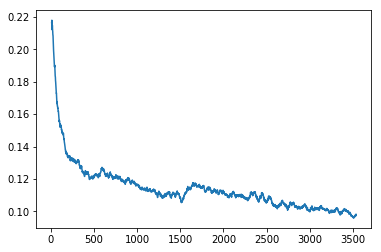

In [32]:
learn.sched.plot_loss()

In [33]:
sz=128

In [34]:
learn.set_data(get_data(sz))
learn.freeze()
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

  0%|          | 0/506 [00:00<?, ?it/s]

  0%|          | 1/506 [00:00<03:57,  2.12it/s, loss=0.09]

  1%|          | 3/506 [00:00<01:42,  4.92it/s, loss=0.116]

  1%|          | 5/506 [00:00<01:14,  6.69it/s, loss=0.121]

  1%|▏         | 7/506 [00:00<01:02,  7.94it/s, loss=0.114]

  2%|▏         | 9/506 [00:01<00:56,  8.82it/s, loss=0.116]

  2%|▏         | 11/506 [00:01<00:51,  9.56it/s, loss=0.116]

  3%|▎         | 13/506 [00:01<00:48, 10.16it/s, loss=0.118]

  3%|▎         | 15/506 [00:01<00:46, 10.60it/s, loss=0.117]

  3%|▎         | 17/506 [00:01<00:44, 10.98it/s, loss=0.114]

  4%|▍         | 19/506 [00:01<00:43, 11.32it/s, loss=0.115]

  4%|▍         | 21/506 [00:01<00:41, 11.61it/s, loss=0.113]

  5%|▍         | 23/506 [00:01<00:40, 11.88it/s, loss=0.113]

  5%|▍         | 25/506 [00:02<00:39, 12.06it/s, loss=0.114]

  5%|▌         | 27/506 [00:02<00:39, 12.23it/s, loss=0.117]

  6%|▌         | 29/506 [00:02<00:38, 12.37it/s, loss=0.115]

  6%|▌         | 31/506 [00:02<00:37, 12.52it/s, loss=0.113]

  7%|▋         | 33/506 [00:02<00:37, 12.64it/s, loss=0.111]

  7%|▋         | 35/506 [00:02<00:36, 12.73it/s, loss=0.109]

  7%|▋         | 37/506 [00:02<00:36, 12.84it/s, loss=0.109]

  8%|▊         | 39/506 [00:03<00:36, 12.94it/s, loss=0.108]

  8%|▊         | 41/506 [00:03<00:35, 13.04it/s, loss=0.107]

  8%|▊         | 43/506 [00:03<00:35, 13.13it/s, loss=0.109]

  9%|▉         | 45/506 [00:03<00:34, 13.20it/s, loss=0.107]

  9%|▉         | 47/506 [00:03<00:34, 13.28it/s, loss=0.107]

 10%|▉         | 49/506 [00:03<00:34, 13.33it/s, loss=0.107]

 10%|█         | 51/506 [00:03<00:34, 13.37it/s, loss=0.107]

 10%|█         | 53/506 [00:03<00:33, 13.42it/s, loss=0.108]

 11%|█         | 55/506 [00:04<00:33, 13.47it/s, loss=0.108]

 11%|█▏        | 57/506 [00:04<00:33, 13.53it/s, loss=0.107]

 12%|█▏        | 59/506 [00:04<00:32, 13.58it/s, loss=0.107]

 12%|█▏        | 61/506 [00:04<00:32, 13.63it/s, loss=0.107]

 12%|█▏        | 63/506 [00:04<00:32, 13.67it/s, loss=0.107]

 13%|█▎        | 65/506 [00:04<00:32, 13.69it/s, loss=0.106]

 13%|█▎        | 67/506 [00:04<00:31, 13.74it/s, loss=0.106]

 14%|█▎        | 69/506 [00:05<00:31, 13.77it/s, loss=0.106]

 14%|█▍        | 71/506 [00:05<00:31, 13.84it/s, loss=0.107]

 14%|█▍        | 73/506 [00:05<00:31, 13.94it/s, loss=0.106]

 15%|█▍        | 75/506 [00:05<00:30, 14.04it/s, loss=0.106]

 15%|█▌        | 77/506 [00:05<00:30, 14.13it/s, loss=0.106]

 16%|█▌        | 79/506 [00:05<00:30, 14.21it/s, loss=0.105]

 16%|█▌        | 81/506 [00:06<00:32, 13.27it/s, loss=0.105]

 16%|█▋        | 83/506 [00:06<00:31, 13.32it/s, loss=0.106]

 17%|█▋        | 85/506 [00:06<00:31, 13.35it/s, loss=0.106]

 17%|█▋        | 87/506 [00:06<00:31, 13.39it/s, loss=0.105]

 18%|█▊        | 89/506 [00:06<00:31, 13.42it/s, loss=0.105]

 18%|█▊        | 91/506 [00:06<00:30, 13.45it/s, loss=0.105]

 18%|█▊        | 93/506 [00:06<00:30, 13.48it/s, loss=0.106]

 19%|█▉        | 95/506 [00:07<00:30, 13.50it/s, loss=0.106]

 19%|█▉        | 97/506 [00:07<00:30, 13.54it/s, loss=0.106]

 20%|█▉        | 99/506 [00:07<00:29, 13.57it/s, loss=0.106]

 20%|█▉        | 101/506 [00:07<00:29, 13.60it/s, loss=0.106]

 20%|██        | 103/506 [00:07<00:29, 13.62it/s, loss=0.106]

 21%|██        | 105/506 [00:07<00:29, 13.64it/s, loss=0.106]

 21%|██        | 107/506 [00:07<00:29, 13.66it/s, loss=0.106]

 22%|██▏       | 109/506 [00:07<00:29, 13.68it/s, loss=0.106]

 22%|██▏       | 111/506 [00:08<00:28, 13.70it/s, loss=0.106]

 22%|██▏       | 113/506 [00:08<00:28, 13.72it/s, loss=0.105]

 23%|██▎       | 115/506 [00:08<00:28, 13.72it/s, loss=0.106]

 23%|██▎       | 117/506 [00:08<00:28, 13.74it/s, loss=0.105]

 24%|██▎       | 119/506 [00:08<00:28, 13.76it/s, loss=0.105]

 24%|██▍       | 121/506 [00:08<00:27, 13.77it/s, loss=0.103]

 24%|██▍       | 123/506 [00:08<00:27, 13.79it/s, loss=0.103]

 25%|██▍       | 125/506 [00:09<00:27, 13.81it/s, loss=0.104]

 25%|██▌       | 127/506 [00:09<00:27, 13.83it/s, loss=0.103]

 25%|██▌       | 129/506 [00:09<00:27, 13.85it/s, loss=0.104]

 26%|██▌       | 131/506 [00:09<00:27, 13.86it/s, loss=0.104]

 26%|██▋       | 133/506 [00:09<00:26, 13.88it/s, loss=0.104]

 27%|██▋       | 135/506 [00:09<00:26, 13.90it/s, loss=0.104]

 27%|██▋       | 137/506 [00:09<00:26, 13.91it/s, loss=0.104]

 27%|██▋       | 139/506 [00:09<00:26, 13.92it/s, loss=0.105]

 28%|██▊       | 141/506 [00:10<00:26, 13.93it/s, loss=0.104]

 28%|██▊       | 143/506 [00:10<00:26, 13.94it/s, loss=0.104]

 29%|██▊       | 145/506 [00:10<00:25, 13.94it/s, loss=0.104]

 29%|██▉       | 147/506 [00:10<00:25, 13.96it/s, loss=0.104]

 29%|██▉       | 149/506 [00:10<00:25, 13.97it/s, loss=0.104]

 30%|██▉       | 151/506 [00:10<00:25, 13.99it/s, loss=0.103]

 30%|███       | 153/506 [00:10<00:25, 14.02it/s, loss=0.104]

 31%|███       | 155/506 [00:11<00:24, 14.07it/s, loss=0.103]

 31%|███       | 157/506 [00:11<00:24, 14.11it/s, loss=0.103]

 31%|███▏      | 159/506 [00:11<00:24, 14.15it/s, loss=0.103]

 32%|███▏      | 161/506 [00:11<00:25, 13.63it/s, loss=0.103]

 32%|███▏      | 163/506 [00:11<00:25, 13.65it/s, loss=0.103]

 33%|███▎      | 165/506 [00:12<00:24, 13.66it/s, loss=0.103]

 33%|███▎      | 167/506 [00:12<00:24, 13.68it/s, loss=0.102]

 33%|███▎      | 169/506 [00:12<00:24, 13.69it/s, loss=0.102]

 34%|███▍      | 171/506 [00:12<00:24, 13.71it/s, loss=0.102]

 34%|███▍      | 173/506 [00:12<00:24, 13.72it/s, loss=0.102]

 35%|███▍      | 175/506 [00:12<00:24, 13.73it/s, loss=0.101]

 35%|███▍      | 177/506 [00:12<00:23, 13.75it/s, loss=0.101]

 35%|███▌      | 179/506 [00:13<00:23, 13.76it/s, loss=0.102]

 36%|███▌      | 181/506 [00:13<00:23, 13.78it/s, loss=0.101]

 36%|███▌      | 183/506 [00:13<00:23, 13.80it/s, loss=0.101]

 37%|███▋      | 185/506 [00:13<00:23, 13.81it/s, loss=0.101]

 37%|███▋      | 187/506 [00:13<00:23, 13.82it/s, loss=0.101]

 37%|███▋      | 189/506 [00:13<00:22, 13.83it/s, loss=0.101]

 38%|███▊      | 191/506 [00:13<00:22, 13.85it/s, loss=0.101]

 38%|███▊      | 193/506 [00:13<00:22, 13.86it/s, loss=0.101]

 39%|███▊      | 195/506 [00:14<00:22, 13.87it/s, loss=0.101]

 39%|███▉      | 197/506 [00:14<00:22, 13.88it/s, loss=0.101]

 39%|███▉      | 199/506 [00:14<00:22, 13.87it/s, loss=0.101]

 40%|███▉      | 201/506 [00:14<00:21, 13.87it/s, loss=0.101]

 40%|████      | 203/506 [00:14<00:21, 13.88it/s, loss=0.101]

 41%|████      | 205/506 [00:14<00:21, 13.88it/s, loss=0.1]  

 41%|████      | 207/506 [00:14<00:21, 13.89it/s, loss=0.1]

 41%|████▏     | 209/506 [00:15<00:21, 13.89it/s, loss=0.0996]

 42%|████▏     | 211/506 [00:15<00:21, 13.90it/s, loss=0.0994]

 42%|████▏     | 213/506 [00:15<00:21, 13.92it/s, loss=0.0993]

 42%|████▏     | 215/506 [00:15<00:20, 13.92it/s, loss=0.0993]

 43%|████▎     | 217/506 [00:15<00:20, 13.93it/s, loss=0.1]   

 43%|████▎     | 219/506 [00:15<00:20, 13.94it/s, loss=0.1]

 44%|████▎     | 221/506 [00:15<00:20, 13.95it/s, loss=0.1]

 44%|████▍     | 223/506 [00:15<00:20, 13.96it/s, loss=0.0996]

 44%|████▍     | 225/506 [00:16<00:20, 13.97it/s, loss=0.0991]

 45%|████▍     | 227/506 [00:16<00:19, 13.98it/s, loss=0.0997]

 45%|████▌     | 229/506 [00:16<00:19, 13.98it/s, loss=0.0994]

 46%|████▌     | 231/506 [00:16<00:19, 14.00it/s, loss=0.0994]

 46%|████▌     | 233/506 [00:16<00:19, 14.02it/s, loss=0.0997]

 46%|████▋     | 235/506 [00:16<00:19, 14.05it/s, loss=0.1]   

 47%|████▋     | 237/506 [00:16<00:19, 14.08it/s, loss=0.1]

 47%|████▋     | 239/506 [00:16<00:18, 14.11it/s, loss=0.0994]

 48%|████▊     | 241/506 [00:17<00:19, 13.79it/s, loss=0.1]   

 48%|████▊     | 243/506 [00:17<00:19, 13.80it/s, loss=0.1]

 48%|████▊     | 245/506 [00:17<00:18, 13.81it/s, loss=0.101]

 49%|████▉     | 247/506 [00:17<00:18, 13.81it/s, loss=0.101]

 49%|████▉     | 249/506 [00:18<00:18, 13.82it/s, loss=0.1]  

 50%|████▉     | 251/506 [00:18<00:18, 13.83it/s, loss=0.101]

 50%|█████     | 253/506 [00:18<00:18, 13.84it/s, loss=0.101]

 50%|█████     | 255/506 [00:18<00:18, 13.84it/s, loss=0.101]

 51%|█████     | 257/506 [00:18<00:17, 13.85it/s, loss=0.101]

 51%|█████     | 259/506 [00:18<00:17, 13.86it/s, loss=0.101]

 52%|█████▏    | 261/506 [00:18<00:17, 13.87it/s, loss=0.102]

 52%|█████▏    | 263/506 [00:18<00:17, 13.88it/s, loss=0.102]

 52%|█████▏    | 265/506 [00:19<00:17, 13.89it/s, loss=0.103]

 53%|█████▎    | 267/506 [00:19<00:17, 13.90it/s, loss=0.103]

 53%|█████▎    | 269/506 [00:19<00:17, 13.90it/s, loss=0.102]

 54%|█████▎    | 271/506 [00:19<00:16, 13.91it/s, loss=0.102]

 54%|█████▍    | 273/506 [00:19<00:16, 13.92it/s, loss=0.101]

 54%|█████▍    | 275/506 [00:19<00:16, 13.92it/s, loss=0.104]

 55%|█████▍    | 277/506 [00:19<00:16, 13.93it/s, loss=0.104]

 55%|█████▌    | 279/506 [00:20<00:16, 13.94it/s, loss=0.103]

 56%|█████▌    | 281/506 [00:20<00:16, 13.95it/s, loss=0.103]

 56%|█████▌    | 283/506 [00:20<00:15, 13.95it/s, loss=0.102]

 56%|█████▋    | 285/506 [00:20<00:15, 13.96it/s, loss=0.103]

 57%|█████▋    | 287/506 [00:20<00:15, 13.97it/s, loss=0.103]

 57%|█████▋    | 289/506 [00:20<00:15, 13.98it/s, loss=0.102]

 58%|█████▊    | 291/506 [00:20<00:15, 13.99it/s, loss=0.101]

 58%|█████▊    | 293/506 [00:20<00:15, 13.99it/s, loss=0.101]

 58%|█████▊    | 295/506 [00:21<00:15, 14.00it/s, loss=0.101]

 59%|█████▊    | 297/506 [00:21<00:14, 14.00it/s, loss=0.101]

 59%|█████▉    | 299/506 [00:21<00:14, 14.01it/s, loss=0.101]

 59%|█████▉    | 301/506 [00:21<00:14, 14.02it/s, loss=0.101]

 60%|█████▉    | 303/506 [00:21<00:14, 14.03it/s, loss=0.101]

 60%|██████    | 305/506 [00:21<00:14, 14.03it/s, loss=0.101]

 61%|██████    | 307/506 [00:21<00:14, 14.04it/s, loss=0.101]

 61%|██████    | 309/506 [00:21<00:14, 14.05it/s, loss=0.101]

 61%|██████▏   | 311/506 [00:22<00:13, 14.06it/s, loss=0.101]

 62%|██████▏   | 313/506 [00:22<00:13, 14.08it/s, loss=0.101]

 62%|██████▏   | 315/506 [00:22<00:13, 14.10it/s, loss=0.101]

 63%|██████▎   | 317/506 [00:22<00:13, 14.12it/s, loss=0.101]

 63%|██████▎   | 319/506 [00:22<00:13, 14.14it/s, loss=0.101]

 63%|██████▎   | 321/506 [00:23<00:13, 13.88it/s, loss=0.101]

 64%|██████▍   | 323/506 [00:23<00:13, 13.88it/s, loss=0.102]

 64%|██████▍   | 325/506 [00:23<00:13, 13.89it/s, loss=0.102]

 65%|██████▍   | 327/506 [00:23<00:12, 13.90it/s, loss=0.102]

 65%|██████▌   | 329/506 [00:23<00:12, 13.90it/s, loss=0.102]

 65%|██████▌   | 331/506 [00:23<00:12, 13.91it/s, loss=0.101]

 66%|██████▌   | 333/506 [00:23<00:12, 13.92it/s, loss=0.101]

 66%|██████▌   | 335/506 [00:24<00:12, 13.92it/s, loss=0.1]  

 67%|██████▋   | 337/506 [00:24<00:12, 13.93it/s, loss=0.101]

 67%|██████▋   | 339/506 [00:24<00:11, 13.94it/s, loss=0.101]

 67%|██████▋   | 341/506 [00:24<00:11, 13.94it/s, loss=0.1]  

 68%|██████▊   | 343/506 [00:24<00:11, 13.95it/s, loss=0.1]

 68%|██████▊   | 345/506 [00:24<00:11, 13.96it/s, loss=0.1]

 69%|██████▊   | 347/506 [00:24<00:11, 13.96it/s, loss=0.101]

 69%|██████▉   | 349/506 [00:24<00:11, 13.97it/s, loss=0.101]

 69%|██████▉   | 351/506 [00:25<00:11, 13.97it/s, loss=0.101]

 70%|██████▉   | 353/506 [00:25<00:10, 13.98it/s, loss=0.101]

 70%|███████   | 355/506 [00:25<00:10, 13.98it/s, loss=0.102]

 71%|███████   | 357/506 [00:25<00:10, 13.99it/s, loss=0.103]

 71%|███████   | 359/506 [00:25<00:10, 13.99it/s, loss=0.103]

 71%|███████▏  | 361/506 [00:25<00:10, 14.00it/s, loss=0.103]

 72%|███████▏  | 363/506 [00:25<00:10, 14.00it/s, loss=0.103]

 72%|███████▏  | 365/506 [00:26<00:10, 14.01it/s, loss=0.104]

 73%|███████▎  | 367/506 [00:26<00:09, 14.01it/s, loss=0.103]

 73%|███████▎  | 369/506 [00:26<00:09, 14.02it/s, loss=0.103]

 73%|███████▎  | 371/506 [00:26<00:09, 14.03it/s, loss=0.102]

 74%|███████▎  | 373/506 [00:26<00:09, 14.03it/s, loss=0.102]

 74%|███████▍  | 375/506 [00:26<00:09, 14.04it/s, loss=0.101]

 75%|███████▍  | 377/506 [00:26<00:09, 14.03it/s, loss=0.102]

 75%|███████▍  | 379/506 [00:26<00:09, 14.04it/s, loss=0.101]

 75%|███████▌  | 381/506 [00:27<00:08, 14.05it/s, loss=0.101]

 76%|███████▌  | 383/506 [00:27<00:08, 14.05it/s, loss=0.101]

 76%|███████▌  | 385/506 [00:27<00:08, 14.06it/s, loss=0.102]

 76%|███████▋  | 387/506 [00:27<00:08, 14.06it/s, loss=0.102]

 77%|███████▋  | 389/506 [00:27<00:08, 14.06it/s, loss=0.101]

 77%|███████▋  | 391/506 [00:27<00:08, 14.07it/s, loss=0.101]

 78%|███████▊  | 393/506 [00:27<00:08, 14.08it/s, loss=0.1]  

 78%|███████▊  | 395/506 [00:28<00:07, 14.10it/s, loss=0.1]

 78%|███████▊  | 397/506 [00:28<00:07, 14.11it/s, loss=0.101]

 79%|███████▉  | 399/506 [00:28<00:07, 14.13it/s, loss=0.1]  

 79%|███████▉  | 401/506 [00:28<00:07, 13.94it/s, loss=0.1]

 80%|███████▉  | 403/506 [00:28<00:07, 13.94it/s, loss=0.0993]

 80%|████████  | 405/506 [00:29<00:07, 13.94it/s, loss=0.0989]

 80%|████████  | 407/506 [00:29<00:07, 13.94it/s, loss=0.0989]

 81%|████████  | 409/506 [00:29<00:06, 13.94it/s, loss=0.099] 

 81%|████████  | 411/506 [00:29<00:06, 13.95it/s, loss=0.0993]

 82%|████████▏ | 413/506 [00:29<00:06, 13.95it/s, loss=0.0993]

 82%|████████▏ | 415/506 [00:29<00:06, 13.95it/s, loss=0.0996]

 82%|████████▏ | 417/506 [00:29<00:06, 13.96it/s, loss=0.0988]

 83%|████████▎ | 419/506 [00:30<00:06, 13.96it/s, loss=0.099] 

 83%|████████▎ | 421/506 [00:30<00:06, 13.97it/s, loss=0.099]

 84%|████████▎ | 423/506 [00:30<00:05, 13.98it/s, loss=0.0988]

 84%|████████▍ | 425/506 [00:30<00:05, 13.98it/s, loss=0.0983]

 84%|████████▍ | 427/506 [00:30<00:05, 13.98it/s, loss=0.0986]

 85%|████████▍ | 429/506 [00:30<00:05, 13.99it/s, loss=0.0998]

 85%|████████▌ | 431/506 [00:30<00:05, 14.00it/s, loss=0.101] 

 86%|████████▌ | 433/506 [00:30<00:05, 14.00it/s, loss=0.101]

 86%|████████▌ | 435/506 [00:31<00:05, 14.00it/s, loss=0.1]  

 86%|████████▋ | 437/506 [00:31<00:04, 14.01it/s, loss=0.1]

 87%|████████▋ | 439/506 [00:31<00:04, 14.01it/s, loss=0.0997]

 87%|████████▋ | 441/506 [00:31<00:04, 14.01it/s, loss=0.0992]

 88%|████████▊ | 443/506 [00:31<00:04, 14.02it/s, loss=0.0989]

 88%|████████▊ | 445/506 [00:31<00:04, 14.02it/s, loss=0.0987]

 88%|████████▊ | 447/506 [00:31<00:04, 14.03it/s, loss=0.0987]

 89%|████████▊ | 449/506 [00:31<00:04, 14.03it/s, loss=0.0987]

 89%|████████▉ | 451/506 [00:32<00:03, 14.04it/s, loss=0.0986]

 90%|████████▉ | 453/506 [00:32<00:03, 14.04it/s, loss=0.0995]

 90%|████████▉ | 455/506 [00:32<00:03, 14.05it/s, loss=0.0993]

 90%|█████████ | 457/506 [00:32<00:03, 14.05it/s, loss=0.0992]

 91%|█████████ | 459/506 [00:32<00:03, 14.05it/s, loss=0.0982]

 91%|█████████ | 461/506 [00:32<00:03, 14.06it/s, loss=0.0984]

 92%|█████████▏| 463/506 [00:32<00:03, 14.06it/s, loss=0.0981]

 92%|█████████▏| 465/506 [00:33<00:02, 14.07it/s, loss=0.0987]

 92%|█████████▏| 467/506 [00:33<00:02, 14.07it/s, loss=0.0985]

 93%|█████████▎| 469/506 [00:33<00:02, 14.07it/s, loss=0.0983]

 93%|█████████▎| 471/506 [00:33<00:02, 14.08it/s, loss=0.0984]

 93%|█████████▎| 473/506 [00:33<00:02, 14.10it/s, loss=0.0985]

 94%|█████████▍| 475/506 [00:33<00:02, 14.11it/s, loss=0.0994]

 94%|█████████▍| 477/506 [00:33<00:02, 14.13it/s, loss=0.1]   

 95%|█████████▍| 479/506 [00:33<00:01, 14.14it/s, loss=0.1]

 95%|█████████▌| 481/506 [00:34<00:01, 13.96it/s, loss=0.1]

 95%|█████████▌| 483/506 [00:34<00:01, 13.96it/s, loss=0.1]

 96%|█████████▌| 485/506 [00:34<00:01, 13.97it/s, loss=0.1]

 96%|█████████▌| 487/506 [00:34<00:01, 13.97it/s, loss=0.1]

 97%|█████████▋| 489/506 [00:34<00:01, 13.97it/s, loss=0.101]

 97%|█████████▋| 491/506 [00:35<00:01, 13.98it/s, loss=0.101]

 97%|█████████▋| 493/506 [00:35<00:00, 13.98it/s, loss=0.0997]

 98%|█████████▊| 495/506 [00:35<00:00, 13.98it/s, loss=0.101] 

 98%|█████████▊| 497/506 [00:35<00:00, 13.99it/s, loss=0.101]

 99%|█████████▊| 499/506 [00:35<00:00, 14.01it/s, loss=0.101]

 99%|█████████▉| 501/506 [00:35<00:00, 14.02it/s, loss=0.101]

 99%|█████████▉| 503/506 [00:35<00:00, 14.04it/s, loss=0.1]  

100%|█████████▉| 505/506 [00:35<00:00, 14.05it/s, loss=0.0997]

epoch      trn_loss   val_loss   f2         

    0      0.099191   0.09454    0.918661  

  0%|          | 0/506 [00:00<?, ?it/s]

  0%|          | 1/506 [00:00<04:05,  2.05it/s, loss=0.0995]

  1%|          | 3/506 [00:00<01:43,  4.84it/s, loss=0.0994]

  1%|          | 5/506 [00:00<01:16,  6.59it/s, loss=0.1]   

  1%|▏         | 7/506 [00:00<01:03,  7.87it/s, loss=0.0999]

  2%|▏         | 9/506 [00:01<00:57,  8.64it/s, loss=0.0998]

  2%|▏         | 11/506 [00:01<00:53,  9.31it/s, loss=0.1]  

  3%|▎         | 13/506 [00:01<00:49,  9.90it/s, loss=0.1]

  3%|▎         | 15/506 [00:01<00:47, 10.38it/s, loss=0.1]

  3%|▎         | 17/506 [00:01<00:45, 10.77it/s, loss=0.1]

  4%|▍         | 19/506 [00:01<00:43, 11.11it/s, loss=0.0999]

  4%|▍         | 21/506 [00:01<00:42, 11.39it/s, loss=0.1]   

  5%|▍         | 23/506 [00:01<00:41, 11.63it/s, loss=0.1]

  5%|▍         | 25/506 [00:02<00:40, 11.84it/s, loss=0.101]

  5%|▌         | 27/506 [00:02<00:39, 11.98it/s, loss=0.101]

  6%|▌         | 29/506 [00:02<00:39, 12.16it/s, loss=0.1]  

  6%|▌         | 31/506 [00:02<00:38, 12.35it/s, loss=0.1]

  7%|▋         | 33/506 [00:02<00:37, 12.47it/s, loss=0.1]

  7%|▋         | 35/506 [00:02<00:37, 12.60it/s, loss=0.0994]

  7%|▋         | 37/506 [00:02<00:36, 12.71it/s, loss=0.0993]

  8%|▊         | 39/506 [00:03<00:36, 12.81it/s, loss=0.099] 

  8%|▊         | 41/506 [00:03<00:36, 12.87it/s, loss=0.0987]

  8%|▊         | 43/506 [00:03<00:35, 12.98it/s, loss=0.0989]

  9%|▉         | 45/506 [00:03<00:35, 13.05it/s, loss=0.0989]

  9%|▉         | 47/506 [00:03<00:35, 13.10it/s, loss=0.0992]

 10%|▉         | 49/506 [00:03<00:34, 13.16it/s, loss=0.0991]

 10%|█         | 51/506 [00:03<00:34, 13.22it/s, loss=0.0996]

 10%|█         | 53/506 [00:03<00:34, 13.26it/s, loss=0.0998]

 11%|█         | 55/506 [00:04<00:33, 13.31it/s, loss=0.0997]

 11%|█▏        | 57/506 [00:04<00:33, 13.37it/s, loss=0.0993]

 12%|█▏        | 59/506 [00:04<00:33, 13.42it/s, loss=0.0993]

 12%|█▏        | 61/506 [00:04<00:33, 13.46it/s, loss=0.0995]

 12%|█▏        | 63/506 [00:04<00:32, 13.49it/s, loss=0.0996]

 13%|█▎        | 65/506 [00:04<00:32, 13.54it/s, loss=0.0996]

 13%|█▎        | 67/506 [00:04<00:32, 13.58it/s, loss=0.0993]

 14%|█▎        | 69/506 [00:05<00:32, 13.60it/s, loss=0.099] 

 14%|█▍        | 71/506 [00:05<00:31, 13.64it/s, loss=0.0987]

 14%|█▍        | 73/506 [00:05<00:31, 13.74it/s, loss=0.099] 

 15%|█▍        | 75/506 [00:05<00:31, 13.84it/s, loss=0.0985]

 15%|█▌        | 77/506 [00:05<00:30, 13.94it/s, loss=0.0985]

 16%|█▌        | 79/506 [00:05<00:30, 14.02it/s, loss=0.0974]

 16%|█▌        | 81/506 [00:06<00:32, 13.09it/s, loss=0.0976]

 16%|█▋        | 83/506 [00:06<00:32, 13.13it/s, loss=0.0981]

 17%|█▋        | 85/506 [00:06<00:31, 13.18it/s, loss=0.0975]

 17%|█▋        | 87/506 [00:06<00:31, 13.21it/s, loss=0.0979]

 18%|█▊        | 89/506 [00:06<00:31, 13.24it/s, loss=0.0977]

 18%|█▊        | 91/506 [00:06<00:31, 13.27it/s, loss=0.0975]

 18%|█▊        | 93/506 [00:06<00:31, 13.30it/s, loss=0.0986]

 19%|█▉        | 95/506 [00:07<00:30, 13.34it/s, loss=0.0983]

 19%|█▉        | 97/506 [00:07<00:30, 13.36it/s, loss=0.0979]

 20%|█▉        | 99/506 [00:07<00:30, 13.39it/s, loss=0.0977]

 20%|█▉        | 101/506 [00:07<00:30, 13.42it/s, loss=0.0977]

 20%|██        | 103/506 [00:07<00:29, 13.45it/s, loss=0.0984]

 21%|██        | 105/506 [00:07<00:29, 13.47it/s, loss=0.0983]

 21%|██        | 107/506 [00:07<00:29, 13.50it/s, loss=0.098] 

 22%|██▏       | 109/506 [00:08<00:29, 13.52it/s, loss=0.0985]

 22%|██▏       | 111/506 [00:08<00:29, 13.55it/s, loss=0.0979]

 22%|██▏       | 113/506 [00:08<00:28, 13.57it/s, loss=0.0977]

 23%|██▎       | 115/506 [00:08<00:28, 13.60it/s, loss=0.0977]

 23%|██▎       | 117/506 [00:08<00:28, 13.63it/s, loss=0.0978]

 24%|██▎       | 119/506 [00:08<00:28, 13.65it/s, loss=0.0986]

 24%|██▍       | 121/506 [00:08<00:28, 13.67it/s, loss=0.0989]

 24%|██▍       | 123/506 [00:08<00:27, 13.70it/s, loss=0.0986]

 25%|██▍       | 125/506 [00:09<00:27, 13.71it/s, loss=0.0979]

 25%|██▌       | 127/506 [00:09<00:27, 13.73it/s, loss=0.0981]

 25%|██▌       | 129/506 [00:09<00:27, 13.74it/s, loss=0.0981]

 26%|██▌       | 131/506 [00:09<00:27, 13.76it/s, loss=0.0983]

 26%|██▋       | 133/506 [00:09<00:27, 13.77it/s, loss=0.0987]

 27%|██▋       | 135/506 [00:09<00:26, 13.78it/s, loss=0.0984]

 27%|██▋       | 137/506 [00:09<00:26, 13.80it/s, loss=0.0988]

 27%|██▋       | 139/506 [00:10<00:26, 13.82it/s, loss=0.0991]

 28%|██▊       | 141/506 [00:10<00:26, 13.83it/s, loss=0.0996]

 28%|██▊       | 143/506 [00:10<00:26, 13.85it/s, loss=0.0997]

 29%|██▊       | 145/506 [00:10<00:26, 13.86it/s, loss=0.0999]

 29%|██▉       | 147/506 [00:10<00:25, 13.88it/s, loss=0.0998]

 29%|██▉       | 149/506 [00:10<00:25, 13.90it/s, loss=0.0999]

 30%|██▉       | 151/506 [00:10<00:25, 13.93it/s, loss=0.0993]

 30%|███       | 153/506 [00:10<00:25, 13.98it/s, loss=0.0995]

 31%|███       | 155/506 [00:11<00:25, 14.03it/s, loss=0.0989]

 31%|███       | 157/506 [00:11<00:24, 14.07it/s, loss=0.0987]

 31%|███▏      | 159/506 [00:11<00:24, 14.11it/s, loss=0.0997]

 32%|███▏      | 161/506 [00:11<00:25, 13.64it/s, loss=0.0995]

 32%|███▏      | 163/506 [00:11<00:25, 13.65it/s, loss=0.1]   

 33%|███▎      | 165/506 [00:12<00:24, 13.67it/s, loss=0.1]

 33%|███▎      | 167/506 [00:12<00:24, 13.68it/s, loss=0.1]

 33%|███▎      | 169/506 [00:12<00:24, 13.70it/s, loss=0.0999]

 34%|███▍      | 171/506 [00:12<00:24, 13.71it/s, loss=0.101] 

 34%|███▍      | 173/506 [00:12<00:24, 13.73it/s, loss=0.101]

 35%|███▍      | 175/506 [00:12<00:24, 13.74it/s, loss=0.101]

 35%|███▍      | 177/506 [00:12<00:23, 13.75it/s, loss=0.101]

 35%|███▌      | 179/506 [00:13<00:23, 13.76it/s, loss=0.101]

 36%|███▌      | 181/506 [00:13<00:23, 13.78it/s, loss=0.101]

 36%|███▌      | 183/506 [00:13<00:23, 13.79it/s, loss=0.102]

 37%|███▋      | 185/506 [00:13<00:23, 13.80it/s, loss=0.101]

 37%|███▋      | 187/506 [00:13<00:23, 13.81it/s, loss=0.101]

 37%|███▋      | 189/506 [00:13<00:22, 13.83it/s, loss=0.101]

 38%|███▊      | 191/506 [00:13<00:22, 13.84it/s, loss=0.101]

 38%|███▊      | 193/506 [00:13<00:22, 13.84it/s, loss=0.101]

 39%|███▊      | 195/506 [00:14<00:22, 13.85it/s, loss=0.101]

 39%|███▉      | 197/506 [00:14<00:22, 13.85it/s, loss=0.102]

 39%|███▉      | 199/506 [00:14<00:22, 13.87it/s, loss=0.101]

 40%|███▉      | 201/506 [00:14<00:21, 13.88it/s, loss=0.101]

 40%|████      | 203/506 [00:14<00:21, 13.89it/s, loss=0.101]

 41%|████      | 205/506 [00:14<00:21, 13.89it/s, loss=0.101]

 41%|████      | 207/506 [00:14<00:21, 13.90it/s, loss=0.101]

 41%|████▏     | 209/506 [00:15<00:21, 13.91it/s, loss=0.1]  

 42%|████▏     | 211/506 [00:15<00:21, 13.92it/s, loss=0.101]

 42%|████▏     | 213/506 [00:15<00:21, 13.93it/s, loss=0.101]

 42%|████▏     | 215/506 [00:15<00:20, 13.94it/s, loss=0.1]  

 43%|████▎     | 217/506 [00:15<00:20, 13.95it/s, loss=0.0995]

 43%|████▎     | 219/506 [00:15<00:20, 13.96it/s, loss=0.1]   

 44%|████▎     | 221/506 [00:15<00:20, 13.97it/s, loss=0.101]

 44%|████▍     | 223/506 [00:15<00:20, 13.98it/s, loss=0.1]  

 44%|████▍     | 225/506 [00:16<00:20, 13.99it/s, loss=0.101]

 45%|████▍     | 227/506 [00:16<00:19, 14.00it/s, loss=0.101]

 45%|████▌     | 229/506 [00:16<00:19, 14.01it/s, loss=0.101]

 46%|████▌     | 231/506 [00:16<00:19, 14.02it/s, loss=0.1]  

 46%|████▌     | 233/506 [00:16<00:19, 14.05it/s, loss=0.1]

 46%|████▋     | 235/506 [00:16<00:19, 14.08it/s, loss=0.101]

 47%|████▋     | 237/506 [00:16<00:19, 14.11it/s, loss=0.101]

 47%|████▋     | 239/506 [00:16<00:18, 14.14it/s, loss=0.101]

 48%|████▊     | 241/506 [00:17<00:19, 13.83it/s, loss=0.1]  

 48%|████▊     | 243/506 [00:17<00:19, 13.84it/s, loss=0.0999]

 48%|████▊     | 245/506 [00:17<00:18, 13.84it/s, loss=0.0995]

 49%|████▉     | 247/506 [00:17<00:18, 13.85it/s, loss=0.0996]

 49%|████▉     | 249/506 [00:17<00:18, 13.86it/s, loss=0.0992]

 50%|████▉     | 251/506 [00:18<00:18, 13.87it/s, loss=0.0994]

 50%|█████     | 253/506 [00:18<00:18, 13.88it/s, loss=0.0999]

 50%|█████     | 255/506 [00:18<00:18, 13.89it/s, loss=0.0996]

 51%|█████     | 257/506 [00:18<00:17, 13.89it/s, loss=0.0997]

 51%|█████     | 259/506 [00:18<00:17, 13.90it/s, loss=0.0996]

 52%|█████▏    | 261/506 [00:18<00:17, 13.90it/s, loss=0.0993]

 52%|█████▏    | 263/506 [00:18<00:17, 13.91it/s, loss=0.0999]

 52%|█████▏    | 265/506 [00:19<00:17, 13.91it/s, loss=0.1]   

 53%|█████▎    | 267/506 [00:19<00:17, 13.92it/s, loss=0.1]

 53%|█████▎    | 269/506 [00:19<00:17, 13.92it/s, loss=0.101]

 54%|█████▎    | 271/506 [00:19<00:16, 13.94it/s, loss=0.1]  

 54%|█████▍    | 273/506 [00:19<00:16, 13.94it/s, loss=0.1]

 54%|█████▍    | 275/506 [00:19<00:16, 13.95it/s, loss=0.1]

 55%|█████▍    | 277/506 [00:19<00:16, 13.96it/s, loss=0.101]

 55%|█████▌    | 279/506 [00:19<00:16, 13.97it/s, loss=0.101]

 56%|█████▌    | 281/506 [00:20<00:16, 13.97it/s, loss=0.101]

 56%|█████▌    | 283/506 [00:20<00:15, 13.98it/s, loss=0.101]

 56%|█████▋    | 285/506 [00:20<00:15, 13.99it/s, loss=0.1]  

 57%|█████▋    | 287/506 [00:20<00:15, 13.99it/s, loss=0.101]

 57%|█████▋    | 289/506 [00:20<00:15, 14.00it/s, loss=0.1]  

 58%|█████▊    | 291/506 [00:20<00:15, 14.01it/s, loss=0.1]

 58%|█████▊    | 293/506 [00:20<00:15, 14.01it/s, loss=0.101]

 58%|█████▊    | 295/506 [00:21<00:15, 14.01it/s, loss=0.1]  

 59%|█████▊    | 297/506 [00:21<00:14, 14.02it/s, loss=0.1]

 59%|█████▉    | 299/506 [00:21<00:14, 14.03it/s, loss=0.1]

 59%|█████▉    | 301/506 [00:21<00:14, 14.04it/s, loss=0.101]

 60%|█████▉    | 303/506 [00:21<00:14, 14.04it/s, loss=0.101]

 60%|██████    | 305/506 [00:21<00:14, 14.05it/s, loss=0.1]  

 61%|██████    | 307/506 [00:21<00:14, 14.05it/s, loss=0.1]

 61%|██████    | 309/506 [00:21<00:14, 14.06it/s, loss=0.0998]

 61%|██████▏   | 311/506 [00:22<00:13, 14.07it/s, loss=0.0996]

 62%|██████▏   | 313/506 [00:22<00:13, 14.09it/s, loss=0.0996]

 62%|██████▏   | 315/506 [00:22<00:13, 14.12it/s, loss=0.0999]

 63%|██████▎   | 317/506 [00:22<00:13, 14.14it/s, loss=0.1]   

 63%|██████▎   | 319/506 [00:22<00:13, 14.16it/s, loss=0.1]

 63%|██████▎   | 321/506 [00:23<00:13, 13.89it/s, loss=0.1]

 64%|██████▍   | 323/506 [00:23<00:13, 13.89it/s, loss=0.0999]

 64%|██████▍   | 325/506 [00:23<00:13, 13.90it/s, loss=0.0994]

 65%|██████▍   | 327/506 [00:23<00:12, 13.91it/s, loss=0.0988]

 65%|██████▌   | 329/506 [00:23<00:12, 13.91it/s, loss=0.0989]

 65%|██████▌   | 331/506 [00:23<00:12, 13.92it/s, loss=0.0991]

 66%|██████▌   | 333/506 [00:23<00:12, 13.93it/s, loss=0.0997]

 66%|██████▌   | 335/506 [00:24<00:12, 13.93it/s, loss=0.0997]

 67%|██████▋   | 337/506 [00:24<00:12, 13.94it/s, loss=0.0994]

 67%|██████▋   | 339/506 [00:24<00:11, 13.95it/s, loss=0.0991]

 67%|██████▋   | 341/506 [00:24<00:11, 13.95it/s, loss=0.0991]

 68%|██████▊   | 343/506 [00:24<00:11, 13.96it/s, loss=0.0993]

 68%|██████▊   | 345/506 [00:24<00:11, 13.97it/s, loss=0.099] 

 69%|██████▊   | 347/506 [00:24<00:11, 13.97it/s, loss=0.0987]

 69%|██████▉   | 349/506 [00:24<00:11, 13.98it/s, loss=0.0986]

 69%|██████▉   | 351/506 [00:25<00:11, 13.98it/s, loss=0.0979]

 70%|██████▉   | 353/506 [00:25<00:10, 13.99it/s, loss=0.0974]

 70%|███████   | 355/506 [00:25<00:10, 13.99it/s, loss=0.0982]

 71%|███████   | 357/506 [00:25<00:10, 14.00it/s, loss=0.0984]

 71%|███████   | 359/506 [00:25<00:10, 14.00it/s, loss=0.0989]

 71%|███████▏  | 361/506 [00:25<00:10, 14.01it/s, loss=0.0993]

 72%|███████▏  | 363/506 [00:25<00:10, 14.01it/s, loss=0.0989]

 72%|███████▏  | 365/506 [00:26<00:10, 14.02it/s, loss=0.0987]

 73%|███████▎  | 367/506 [00:26<00:09, 14.02it/s, loss=0.0987]

 73%|███████▎  | 369/506 [00:26<00:09, 14.03it/s, loss=0.0985]

 73%|███████▎  | 371/506 [00:26<00:09, 14.03it/s, loss=0.0988]

 74%|███████▎  | 373/506 [00:26<00:09, 14.04it/s, loss=0.0985]

 74%|███████▍  | 375/506 [00:26<00:09, 14.04it/s, loss=0.099] 

 75%|███████▍  | 377/506 [00:26<00:09, 14.05it/s, loss=0.0991]

 75%|███████▍  | 379/506 [00:26<00:09, 14.05it/s, loss=0.0994]

 75%|███████▌  | 381/506 [00:27<00:08, 14.06it/s, loss=0.0989]

 76%|███████▌  | 383/506 [00:27<00:08, 14.06it/s, loss=0.0989]

 76%|███████▌  | 385/506 [00:27<00:08, 14.07it/s, loss=0.0981]

 76%|███████▋  | 387/506 [00:27<00:08, 14.07it/s, loss=0.0979]

 77%|███████▋  | 389/506 [00:27<00:08, 14.08it/s, loss=0.0974]

 77%|███████▋  | 391/506 [00:27<00:08, 14.09it/s, loss=0.0976]

 78%|███████▊  | 393/506 [00:27<00:08, 14.11it/s, loss=0.0977]

 78%|███████▊  | 395/506 [00:27<00:07, 14.12it/s, loss=0.0982]

 78%|███████▊  | 397/506 [00:28<00:07, 14.14it/s, loss=0.099] 

 79%|███████▉  | 399/506 [00:28<00:07, 14.16it/s, loss=0.099]

 79%|███████▉  | 401/506 [00:28<00:07, 13.93it/s, loss=0.0986]

 80%|███████▉  | 403/506 [00:28<00:07, 13.93it/s, loss=0.0985]

 80%|████████  | 405/506 [00:29<00:07, 13.93it/s, loss=0.0986]

 80%|████████  | 407/506 [00:29<00:07, 13.94it/s, loss=0.0989]

 81%|████████  | 409/506 [00:29<00:06, 13.94it/s, loss=0.0987]

 81%|████████  | 411/506 [00:29<00:06, 13.95it/s, loss=0.099] 

 82%|████████▏ | 413/506 [00:29<00:06, 13.95it/s, loss=0.0992]

 82%|████████▏ | 415/506 [00:29<00:06, 13.96it/s, loss=0.0994]

 82%|████████▏ | 417/506 [00:29<00:06, 13.96it/s, loss=0.0995]

 83%|████████▎ | 419/506 [00:30<00:06, 13.96it/s, loss=0.0996]

 83%|████████▎ | 421/506 [00:30<00:06, 13.97it/s, loss=0.1]   

 84%|████████▎ | 423/506 [00:30<00:05, 13.97it/s, loss=0.1]

 84%|████████▍ | 425/506 [00:30<00:05, 13.98it/s, loss=0.0998]

 84%|████████▍ | 427/506 [00:30<00:05, 13.98it/s, loss=0.0991]

 85%|████████▍ | 429/506 [00:30<00:05, 13.99it/s, loss=0.0997]

 85%|████████▌ | 431/506 [00:30<00:05, 13.99it/s, loss=0.099] 

 86%|████████▌ | 433/506 [00:30<00:05, 13.99it/s, loss=0.0992]

 86%|████████▌ | 435/506 [00:31<00:05, 14.00it/s, loss=0.0987]

 86%|████████▋ | 437/506 [00:31<00:04, 14.00it/s, loss=0.0988]

 87%|████████▋ | 439/506 [00:31<00:04, 14.01it/s, loss=0.0985]

 87%|████████▋ | 441/506 [00:31<00:04, 14.01it/s, loss=0.0982]

 88%|████████▊ | 443/506 [00:31<00:04, 14.02it/s, loss=0.0991]

 88%|████████▊ | 445/506 [00:31<00:04, 14.02it/s, loss=0.0998]

 88%|████████▊ | 447/506 [00:31<00:04, 14.02it/s, loss=0.101] 

 89%|████████▊ | 449/506 [00:32<00:04, 14.03it/s, loss=0.102]

 89%|████████▉ | 451/506 [00:32<00:03, 14.03it/s, loss=0.101]

 90%|████████▉ | 453/506 [00:32<00:03, 14.03it/s, loss=0.101]

 90%|████████▉ | 455/506 [00:32<00:03, 14.04it/s, loss=0.101]

 90%|█████████ | 457/506 [00:32<00:03, 14.04it/s, loss=0.101]

 91%|█████████ | 459/506 [00:32<00:03, 14.05it/s, loss=0.101]

 91%|█████████ | 461/506 [00:32<00:03, 14.05it/s, loss=0.1]  

 92%|█████████▏| 463/506 [00:32<00:03, 14.05it/s, loss=0.0997]

 92%|█████████▏| 465/506 [00:33<00:02, 14.06it/s, loss=0.1]   

 92%|█████████▏| 467/506 [00:33<00:02, 14.06it/s, loss=0.101]

 93%|█████████▎| 469/506 [00:33<00:02, 14.07it/s, loss=0.102]

 93%|█████████▎| 471/506 [00:33<00:02, 14.07it/s, loss=0.101]

 93%|█████████▎| 473/506 [00:33<00:02, 14.08it/s, loss=0.1]  

 94%|█████████▍| 475/506 [00:33<00:02, 14.10it/s, loss=0.101]

 94%|█████████▍| 477/506 [00:33<00:02, 14.11it/s, loss=0.1]  

 95%|█████████▍| 479/506 [00:33<00:01, 14.13it/s, loss=0.1]

 95%|█████████▌| 481/506 [00:34<00:01, 13.95it/s, loss=0.0997]

 95%|█████████▌| 483/506 [00:34<00:01, 13.96it/s, loss=0.0997]

 96%|█████████▌| 485/506 [00:34<00:01, 13.96it/s, loss=0.0991]

 96%|█████████▌| 487/506 [00:34<00:01, 13.96it/s, loss=0.0989]

 97%|█████████▋| 489/506 [00:35<00:01, 13.97it/s, loss=0.0992]

 97%|█████████▋| 491/506 [00:35<00:01, 13.97it/s, loss=0.0991]

 97%|█████████▋| 493/506 [00:35<00:00, 13.97it/s, loss=0.0992]

 98%|█████████▊| 495/506 [00:35<00:00, 13.98it/s, loss=0.0998]

 98%|█████████▊| 497/506 [00:35<00:00, 13.99it/s, loss=0.0995]

 99%|█████████▊| 499/506 [00:35<00:00, 14.00it/s, loss=0.0998]

 99%|█████████▉| 501/506 [00:35<00:00, 14.02it/s, loss=0.0996]

 99%|█████████▉| 503/506 [00:35<00:00, 14.03it/s, loss=0.0991]

100%|█████████▉| 505/506 [00:35<00:00, 14.04it/s, loss=0.0993]

    1      0.100469   0.094018   0.919078  

  0%|          | 0/506 [00:00<?, ?it/s]

  0%|          | 1/506 [00:00<04:12,  2.00it/s, loss=0.1]

  1%|          | 3/506 [00:00<01:45,  4.75it/s, loss=0.0997]

  1%|          | 5/506 [00:00<01:16,  6.56it/s, loss=0.101] 

  1%|▏         | 7/506 [00:00<01:03,  7.82it/s, loss=0.1]  

  2%|▏         | 9/506 [00:01<00:56,  8.73it/s, loss=0.1]

  2%|▏         | 11/506 [00:01<00:52,  9.44it/s, loss=0.0996]

  3%|▎         | 13/506 [00:01<00:49, 10.04it/s, loss=0.0999]

  3%|▎         | 15/506 [00:01<00:46, 10.55it/s, loss=0.0997]

  3%|▎         | 17/506 [00:01<00:44, 10.90it/s, loss=0.0998]

  4%|▍         | 19/506 [00:01<00:43, 11.24it/s, loss=0.1]   

  4%|▍         | 21/506 [00:01<00:42, 11.52it/s, loss=0.0998]

  5%|▍         | 23/506 [00:01<00:40, 11.78it/s, loss=0.0996]

  5%|▍         | 25/506 [00:02<00:40, 12.00it/s, loss=0.0995]

  5%|▌         | 27/506 [00:02<00:39, 12.17it/s, loss=0.0994]

  6%|▌         | 29/506 [00:02<00:38, 12.32it/s, loss=0.0994]

  6%|▌         | 31/506 [00:02<00:38, 12.46it/s, loss=0.0994]

  7%|▋         | 33/506 [00:02<00:37, 12.60it/s, loss=0.0991]

  7%|▋         | 35/506 [00:02<00:37, 12.70it/s, loss=0.0989]

  7%|▋         | 37/506 [00:02<00:36, 12.80it/s, loss=0.0987]

  8%|▊         | 39/506 [00:03<00:36, 12.89it/s, loss=0.0985]

  8%|▊         | 41/506 [00:03<00:35, 12.98it/s, loss=0.0989]

  8%|▊         | 43/506 [00:03<00:35, 13.07it/s, loss=0.0995]

  9%|▉         | 45/506 [00:03<00:35, 13.15it/s, loss=0.0986]

  9%|▉         | 47/506 [00:03<00:34, 13.22it/s, loss=0.0985]

 10%|▉         | 49/506 [00:03<00:34, 13.28it/s, loss=0.0992]

 10%|█         | 51/506 [00:03<00:34, 13.35it/s, loss=0.099] 

 10%|█         | 53/506 [00:03<00:33, 13.39it/s, loss=0.099]

 11%|█         | 55/506 [00:04<00:33, 13.45it/s, loss=0.0994]

 11%|█▏        | 57/506 [00:04<00:33, 13.51it/s, loss=0.099] 

 12%|█▏        | 59/506 [00:04<00:32, 13.56it/s, loss=0.0992]

 12%|█▏        | 61/506 [00:04<00:32, 13.61it/s, loss=0.1]   

 12%|█▏        | 63/506 [00:04<00:32, 13.66it/s, loss=0.0993]

 13%|█▎        | 65/506 [00:04<00:32, 13.69it/s, loss=0.0989]

 13%|█▎        | 67/506 [00:04<00:31, 13.73it/s, loss=0.0985]

 14%|█▎        | 69/506 [00:05<00:31, 13.76it/s, loss=0.0987]

 14%|█▍        | 71/506 [00:05<00:31, 13.81it/s, loss=0.0991]

 14%|█▍        | 73/506 [00:05<00:31, 13.88it/s, loss=0.0994]

 15%|█▍        | 75/506 [00:05<00:30, 13.98it/s, loss=0.0991]

 15%|█▌        | 77/506 [00:05<00:30, 14.07it/s, loss=0.099] 

 16%|█▌        | 79/506 [00:05<00:30, 14.15it/s, loss=0.0996]

 16%|█▌        | 81/506 [00:06<00:32, 13.20it/s, loss=0.0988]

 16%|█▋        | 83/506 [00:06<00:31, 13.24it/s, loss=0.0991]

 17%|█▋        | 85/506 [00:06<00:31, 13.27it/s, loss=0.0987]

 17%|█▋        | 87/506 [00:06<00:31, 13.31it/s, loss=0.0987]

 18%|█▊        | 89/506 [00:06<00:31, 13.34it/s, loss=0.0982]

 18%|█▊        | 91/506 [00:06<00:31, 13.37it/s, loss=0.0988]

 18%|█▊        | 93/506 [00:06<00:30, 13.40it/s, loss=0.0985]

 19%|█▉        | 95/506 [00:07<00:30, 13.43it/s, loss=0.099] 

 19%|█▉        | 97/506 [00:07<00:30, 13.45it/s, loss=0.0995]

 20%|█▉        | 99/506 [00:07<00:30, 13.48it/s, loss=0.0993]

 20%|█▉        | 101/506 [00:07<00:29, 13.51it/s, loss=0.0991]

 20%|██        | 103/506 [00:07<00:29, 13.54it/s, loss=0.0994]

 21%|██        | 105/506 [00:07<00:29, 13.57it/s, loss=0.1]   

 21%|██        | 107/506 [00:07<00:29, 13.59it/s, loss=0.0999]

 22%|██▏       | 109/506 [00:08<00:29, 13.61it/s, loss=0.0991]

 22%|██▏       | 111/506 [00:08<00:28, 13.63it/s, loss=0.0997]

 22%|██▏       | 113/506 [00:08<00:28, 13.65it/s, loss=0.0992]

 23%|██▎       | 115/506 [00:08<00:28, 13.68it/s, loss=0.099] 

 23%|██▎       | 117/506 [00:08<00:28, 13.70it/s, loss=0.0991]

 24%|██▎       | 119/506 [00:08<00:28, 13.72it/s, loss=0.0993]

 24%|██▍       | 121/506 [00:08<00:28, 13.73it/s, loss=0.099] 

 24%|██▍       | 123/506 [00:08<00:27, 13.76it/s, loss=0.0988]

 25%|██▍       | 125/506 [00:09<00:27, 13.77it/s, loss=0.0982]

 25%|██▌       | 127/506 [00:09<00:27, 13.79it/s, loss=0.0978]

 25%|██▌       | 129/506 [00:09<00:27, 13.81it/s, loss=0.0979]

 26%|██▌       | 131/506 [00:09<00:27, 13.83it/s, loss=0.0971]

 26%|██▋       | 133/506 [00:09<00:26, 13.85it/s, loss=0.0972]

 27%|██▋       | 135/506 [00:09<00:26, 13.86it/s, loss=0.0977]

 27%|██▋       | 137/506 [00:09<00:26, 13.87it/s, loss=0.0977]

 27%|██▋       | 139/506 [00:10<00:26, 13.89it/s, loss=0.0982]

 28%|██▊       | 141/506 [00:10<00:26, 13.90it/s, loss=0.0975]

 28%|██▊       | 143/506 [00:10<00:26, 13.92it/s, loss=0.0973]

 29%|██▊       | 145/506 [00:10<00:25, 13.93it/s, loss=0.0973]

 29%|██▉       | 147/506 [00:10<00:25, 13.95it/s, loss=0.0978]

 29%|██▉       | 149/506 [00:10<00:25, 13.96it/s, loss=0.0977]

 30%|██▉       | 151/506 [00:10<00:25, 13.99it/s, loss=0.0976]

 30%|███       | 153/506 [00:10<00:25, 14.03it/s, loss=0.0977]

 31%|███       | 155/506 [00:11<00:24, 14.08it/s, loss=0.0988]

 31%|███       | 157/506 [00:11<00:24, 14.12it/s, loss=0.0986]

 31%|███▏      | 159/506 [00:11<00:24, 14.16it/s, loss=0.0982]

 32%|███▏      | 161/506 [00:11<00:25, 13.66it/s, loss=0.0985]

 32%|███▏      | 163/506 [00:11<00:25, 13.68it/s, loss=0.0989]

 33%|███▎      | 165/506 [00:12<00:24, 13.69it/s, loss=0.0988]

 33%|███▎      | 167/506 [00:12<00:24, 13.71it/s, loss=0.0992]

 33%|███▎      | 169/506 [00:12<00:24, 13.72it/s, loss=0.0989]

 34%|███▍      | 171/506 [00:12<00:24, 13.73it/s, loss=0.0981]

 34%|███▍      | 173/506 [00:12<00:24, 13.75it/s, loss=0.0976]

 35%|███▍      | 175/506 [00:12<00:24, 13.76it/s, loss=0.0986]

 35%|███▍      | 177/506 [00:12<00:23, 13.78it/s, loss=0.098] 

 35%|███▌      | 179/506 [00:12<00:23, 13.79it/s, loss=0.0975]

 36%|███▌      | 181/506 [00:13<00:23, 13.80it/s, loss=0.0977]

 36%|███▌      | 183/506 [00:13<00:23, 13.82it/s, loss=0.0973]

 37%|███▋      | 185/506 [00:13<00:23, 13.83it/s, loss=0.0975]

 37%|███▋      | 187/506 [00:13<00:23, 13.84it/s, loss=0.0977]

 37%|███▋      | 189/506 [00:13<00:22, 13.85it/s, loss=0.0982]

 38%|███▊      | 191/506 [00:13<00:22, 13.86it/s, loss=0.0991]

 38%|███▊      | 193/506 [00:13<00:22, 13.87it/s, loss=0.0983]

 39%|███▊      | 195/506 [00:14<00:22, 13.88it/s, loss=0.0987]

 39%|███▉      | 197/506 [00:14<00:22, 13.89it/s, loss=0.0989]

 39%|███▉      | 199/506 [00:14<00:22, 13.90it/s, loss=0.0995]

 40%|███▉      | 201/506 [00:14<00:21, 13.91it/s, loss=0.0994]

 40%|████      | 203/506 [00:14<00:21, 13.92it/s, loss=0.0997]

 41%|████      | 205/506 [00:14<00:21, 13.93it/s, loss=0.1]   

 41%|████      | 207/506 [00:14<00:21, 13.94it/s, loss=0.1]

 41%|████▏     | 209/506 [00:14<00:21, 13.96it/s, loss=0.1]

 42%|████▏     | 211/506 [00:15<00:21, 13.97it/s, loss=0.1]

 42%|████▏     | 213/506 [00:15<00:20, 13.98it/s, loss=0.1]

 42%|████▏     | 215/506 [00:15<00:20, 13.98it/s, loss=0.101]

 43%|████▎     | 217/506 [00:15<00:20, 13.99it/s, loss=0.101]

 43%|████▎     | 219/506 [00:15<00:20, 13.99it/s, loss=0.101]

 44%|████▎     | 221/506 [00:15<00:20, 14.00it/s, loss=0.102]

 44%|████▍     | 223/506 [00:15<00:20, 14.01it/s, loss=0.101]

 44%|████▍     | 225/506 [00:16<00:20, 14.02it/s, loss=0.101]

 45%|████▍     | 227/506 [00:16<00:19, 14.02it/s, loss=0.1]  

 45%|████▌     | 229/506 [00:16<00:19, 14.03it/s, loss=0.1]

 46%|████▌     | 231/506 [00:16<00:19, 14.05it/s, loss=0.101]

 46%|████▌     | 233/506 [00:16<00:19, 14.08it/s, loss=0.102]

 46%|████▋     | 235/506 [00:16<00:19, 14.10it/s, loss=0.102]

 47%|████▋     | 237/506 [00:16<00:19, 14.13it/s, loss=0.101]

 47%|████▋     | 239/506 [00:16<00:18, 14.16it/s, loss=0.102]

 48%|████▊     | 241/506 [00:17<00:19, 13.84it/s, loss=0.102]

 48%|████▊     | 243/506 [00:17<00:18, 13.85it/s, loss=0.102]

 48%|████▊     | 245/506 [00:17<00:18, 13.86it/s, loss=0.102]

 49%|████▉     | 247/506 [00:17<00:18, 13.86it/s, loss=0.101]

 49%|████▉     | 249/506 [00:17<00:18, 13.87it/s, loss=0.102]

 50%|████▉     | 251/506 [00:18<00:18, 13.88it/s, loss=0.102]

 50%|█████     | 253/506 [00:18<00:18, 13.89it/s, loss=0.101]

 50%|█████     | 255/506 [00:18<00:18, 13.89it/s, loss=0.101]

 51%|█████     | 257/506 [00:18<00:17, 13.90it/s, loss=0.1]  

 51%|█████     | 259/506 [00:18<00:17, 13.91it/s, loss=0.101]

 52%|█████▏    | 261/506 [00:18<00:17, 13.92it/s, loss=0.1]  

 52%|█████▏    | 263/506 [00:18<00:17, 13.93it/s, loss=0.101]

 52%|█████▏    | 265/506 [00:19<00:17, 13.93it/s, loss=0.101]

 53%|█████▎    | 267/506 [00:19<00:17, 13.94it/s, loss=0.101]

 53%|█████▎    | 269/506 [00:19<00:16, 13.94it/s, loss=0.101]

 54%|█████▎    | 271/506 [00:19<00:16, 13.95it/s, loss=0.1]  

 54%|█████▍    | 273/506 [00:19<00:16, 13.96it/s, loss=0.1]

 54%|█████▍    | 275/506 [00:19<00:16, 13.97it/s, loss=0.0999]

 55%|█████▍    | 277/506 [00:19<00:16, 13.98it/s, loss=0.0997]

 55%|█████▌    | 279/506 [00:19<00:16, 13.99it/s, loss=0.0994]

 56%|█████▌    | 281/506 [00:20<00:16, 13.99it/s, loss=0.0996]

 56%|█████▌    | 283/506 [00:20<00:15, 14.00it/s, loss=0.0998]

 56%|█████▋    | 285/506 [00:20<00:15, 14.01it/s, loss=0.0994]

 57%|█████▋    | 287/506 [00:20<00:15, 14.01it/s, loss=0.0995]

 57%|█████▋    | 289/506 [00:20<00:15, 14.02it/s, loss=0.0989]

 58%|█████▊    | 291/506 [00:20<00:15, 14.02it/s, loss=0.0985]

 58%|█████▊    | 293/506 [00:20<00:15, 14.03it/s, loss=0.099] 

 58%|█████▊    | 295/506 [00:21<00:15, 14.03it/s, loss=0.0985]

 59%|█████▊    | 297/506 [00:21<00:14, 14.04it/s, loss=0.0986]

 59%|█████▉    | 299/506 [00:21<00:14, 14.04it/s, loss=0.0986]

 59%|█████▉    | 301/506 [00:21<00:14, 14.05it/s, loss=0.0986]

 60%|█████▉    | 303/506 [00:21<00:14, 14.06it/s, loss=0.0982]

 60%|██████    | 305/506 [00:21<00:14, 14.07it/s, loss=0.0989]

 61%|██████    | 307/506 [00:21<00:14, 14.07it/s, loss=0.0985]

 61%|██████    | 309/506 [00:21<00:13, 14.08it/s, loss=0.0985]

 61%|██████▏   | 311/506 [00:22<00:13, 14.09it/s, loss=0.0989]

 62%|██████▏   | 313/506 [00:22<00:13, 14.11it/s, loss=0.0989]

 62%|██████▏   | 315/506 [00:22<00:13, 14.13it/s, loss=0.0981]

 63%|██████▎   | 317/506 [00:22<00:13, 14.15it/s, loss=0.0982]

 63%|██████▎   | 319/506 [00:22<00:13, 14.18it/s, loss=0.0979]

 63%|██████▎   | 321/506 [00:23<00:13, 13.93it/s, loss=0.0978]

 64%|██████▍   | 323/506 [00:23<00:13, 13.94it/s, loss=0.0984]

 64%|██████▍   | 325/506 [00:23<00:12, 13.94it/s, loss=0.0984]

 65%|██████▍   | 327/506 [00:23<00:12, 13.95it/s, loss=0.099] 

 65%|██████▌   | 329/506 [00:23<00:12, 13.95it/s, loss=0.0991]

 65%|██████▌   | 331/506 [00:23<00:12, 13.96it/s, loss=0.0991]

 66%|██████▌   | 333/506 [00:23<00:12, 13.96it/s, loss=0.0995]

 66%|██████▌   | 335/506 [00:23<00:12, 13.97it/s, loss=0.0997]

 67%|██████▋   | 337/506 [00:24<00:12, 13.97it/s, loss=0.0996]

 67%|██████▋   | 339/506 [00:24<00:11, 13.98it/s, loss=0.0998]

 67%|██████▋   | 341/506 [00:24<00:11, 13.98it/s, loss=0.1]   

 68%|██████▊   | 343/506 [00:24<00:11, 13.99it/s, loss=0.1]

 68%|██████▊   | 345/506 [00:24<00:11, 13.99it/s, loss=0.1]

 69%|██████▊   | 347/506 [00:24<00:11, 14.00it/s, loss=0.1]

 69%|██████▉   | 349/506 [00:24<00:11, 14.00it/s, loss=0.1]

 69%|██████▉   | 351/506 [00:25<00:11, 14.01it/s, loss=0.0994]

 70%|██████▉   | 353/506 [00:25<00:10, 14.01it/s, loss=0.0983]

 70%|███████   | 355/506 [00:25<00:10, 14.02it/s, loss=0.0977]

 71%|███████   | 357/506 [00:25<00:10, 14.02it/s, loss=0.0977]

 71%|███████   | 359/506 [00:25<00:10, 14.03it/s, loss=0.0975]

 71%|███████▏  | 361/506 [00:25<00:10, 14.03it/s, loss=0.0981]

 72%|███████▏  | 363/506 [00:25<00:10, 14.04it/s, loss=0.098] 

 72%|███████▏  | 365/506 [00:25<00:10, 14.04it/s, loss=0.0981]

 73%|███████▎  | 367/506 [00:26<00:09, 14.05it/s, loss=0.0979]

 73%|███████▎  | 369/506 [00:26<00:09, 14.05it/s, loss=0.0976]

 73%|███████▎  | 371/506 [00:26<00:09, 14.05it/s, loss=0.0983]

 74%|███████▎  | 373/506 [00:26<00:09, 14.06it/s, loss=0.0974]

 74%|███████▍  | 375/506 [00:26<00:09, 14.06it/s, loss=0.0969]

 75%|███████▍  | 377/506 [00:26<00:09, 14.07it/s, loss=0.0971]

 75%|███████▍  | 379/506 [00:26<00:09, 14.08it/s, loss=0.0968]

 75%|███████▌  | 381/506 [00:27<00:08, 14.08it/s, loss=0.0975]

 76%|███████▌  | 383/506 [00:27<00:08, 14.09it/s, loss=0.0969]

 76%|███████▌  | 385/506 [00:27<00:08, 14.09it/s, loss=0.0971]

 76%|███████▋  | 387/506 [00:27<00:08, 14.09it/s, loss=0.0967]

 77%|███████▋  | 389/506 [00:27<00:08, 14.10it/s, loss=0.0975]

 77%|███████▋  | 391/506 [00:27<00:08, 14.11it/s, loss=0.0971]

 78%|███████▊  | 393/506 [00:27<00:08, 14.12it/s, loss=0.0967]

 78%|███████▊  | 395/506 [00:27<00:07, 14.14it/s, loss=0.0968]

 78%|███████▊  | 397/506 [00:28<00:07, 14.16it/s, loss=0.0972]

 79%|███████▉  | 399/506 [00:28<00:07, 14.18it/s, loss=0.0977]

 79%|███████▉  | 401/506 [00:28<00:07, 13.97it/s, loss=0.0975]

 80%|███████▉  | 403/506 [00:28<00:07, 13.98it/s, loss=0.0973]

 80%|████████  | 405/506 [00:28<00:07, 13.98it/s, loss=0.0974]

 80%|████████  | 407/506 [00:29<00:07, 13.99it/s, loss=0.0972]

 81%|████████  | 409/506 [00:29<00:06, 13.99it/s, loss=0.0967]

 81%|████████  | 411/506 [00:29<00:06, 13.99it/s, loss=0.0962]

 82%|████████▏ | 413/506 [00:29<00:06, 14.00it/s, loss=0.0963]

 82%|████████▏ | 415/506 [00:29<00:06, 14.00it/s, loss=0.0964]

 82%|████████▏ | 417/506 [00:29<00:06, 14.01it/s, loss=0.0963]

 83%|████████▎ | 419/506 [00:29<00:06, 14.01it/s, loss=0.0968]

 83%|████████▎ | 421/506 [00:30<00:06, 14.02it/s, loss=0.0971]

 84%|████████▎ | 423/506 [00:30<00:05, 14.03it/s, loss=0.0973]

 84%|████████▍ | 425/506 [00:30<00:05, 14.03it/s, loss=0.0976]

 84%|████████▍ | 427/506 [00:30<00:05, 14.03it/s, loss=0.0972]

 85%|████████▍ | 429/506 [00:30<00:05, 14.04it/s, loss=0.0969]

 85%|████████▌ | 431/506 [00:30<00:05, 14.04it/s, loss=0.0969]

 86%|████████▌ | 433/506 [00:30<00:05, 14.05it/s, loss=0.0971]

 86%|████████▌ | 435/506 [00:30<00:05, 14.05it/s, loss=0.0973]

 86%|████████▋ | 437/506 [00:31<00:04, 14.06it/s, loss=0.0979]

 87%|████████▋ | 439/506 [00:31<00:04, 14.06it/s, loss=0.0981]

 87%|████████▋ | 441/506 [00:31<00:04, 14.06it/s, loss=0.0975]

 88%|████████▊ | 443/506 [00:31<00:04, 14.07it/s, loss=0.0971]

 88%|████████▊ | 445/506 [00:31<00:04, 14.07it/s, loss=0.0976]

 88%|████████▊ | 447/506 [00:31<00:04, 14.08it/s, loss=0.0975]

 89%|████████▊ | 449/506 [00:31<00:04, 14.08it/s, loss=0.0976]

 89%|████████▉ | 451/506 [00:32<00:03, 14.08it/s, loss=0.0973]

 90%|████████▉ | 453/506 [00:32<00:03, 14.09it/s, loss=0.0977]

 90%|████████▉ | 455/506 [00:32<00:03, 14.09it/s, loss=0.0981]

 90%|█████████ | 457/506 [00:32<00:03, 14.10it/s, loss=0.0978]

 91%|█████████ | 459/506 [00:32<00:03, 14.10it/s, loss=0.0978]

 91%|█████████ | 461/506 [00:32<00:03, 14.11it/s, loss=0.0975]

 92%|█████████▏| 463/506 [00:32<00:03, 14.11it/s, loss=0.0968]

 92%|█████████▏| 465/506 [00:32<00:02, 14.11it/s, loss=0.0969]

 92%|█████████▏| 467/506 [00:33<00:02, 14.11it/s, loss=0.0972]

 93%|█████████▎| 469/506 [00:33<00:02, 14.12it/s, loss=0.0976]

 93%|█████████▎| 471/506 [00:33<00:02, 14.12it/s, loss=0.0976]

 93%|█████████▎| 473/506 [00:33<00:02, 14.14it/s, loss=0.0976]

 94%|█████████▍| 475/506 [00:33<00:02, 14.15it/s, loss=0.0984]

 94%|█████████▍| 477/506 [00:33<00:02, 14.17it/s, loss=0.0985]

 95%|█████████▍| 479/506 [00:33<00:01, 14.18it/s, loss=0.0984]

 95%|█████████▌| 481/506 [00:34<00:01, 14.02it/s, loss=0.0979]

 95%|█████████▌| 483/506 [00:34<00:01, 14.02it/s, loss=0.0976]

 96%|█████████▌| 485/506 [00:34<00:01, 14.02it/s, loss=0.0978]

 96%|█████████▌| 487/506 [00:34<00:01, 14.03it/s, loss=0.0981]

 97%|█████████▋| 489/506 [00:34<00:01, 14.03it/s, loss=0.0982]

 97%|█████████▋| 491/506 [00:34<00:01, 14.03it/s, loss=0.0979]

 97%|█████████▋| 493/506 [00:35<00:00, 14.04it/s, loss=0.0978]

 98%|█████████▊| 495/506 [00:35<00:00, 14.04it/s, loss=0.0978]

 98%|█████████▊| 497/506 [00:35<00:00, 14.05it/s, loss=0.0978]

 99%|█████████▊| 499/506 [00:35<00:00, 14.06it/s, loss=0.0978]

 99%|█████████▉| 501/506 [00:35<00:00, 14.07it/s, loss=0.098] 

 99%|█████████▉| 503/506 [00:35<00:00, 14.09it/s, loss=0.0973]

100%|█████████▉| 505/506 [00:35<00:00, 14.10it/s, loss=0.0975]

    2      0.097275   0.092831   0.920616  

  0%|          | 0/506 [00:00<?, ?it/s]

  0%|          | 1/506 [00:00<04:10,  2.01it/s, loss=0.0972]

  1%|          | 3/506 [00:00<01:44,  4.82it/s, loss=0.0965]

  1%|          | 5/506 [00:00<01:16,  6.59it/s, loss=0.096] 

  1%|▏         | 7/506 [00:00<01:03,  7.80it/s, loss=0.096]

  2%|▏         | 9/506 [00:01<00:56,  8.76it/s, loss=0.0965]

  2%|▏         | 11/506 [00:01<00:52,  9.49it/s, loss=0.0967]

  3%|▎         | 13/506 [00:01<00:48, 10.07it/s, loss=0.0963]

  3%|▎         | 15/506 [00:01<00:46, 10.50it/s, loss=0.0972]

  3%|▎         | 17/506 [00:01<00:45, 10.86it/s, loss=0.0973]

  4%|▍         | 19/506 [00:01<00:43, 11.21it/s, loss=0.0969]

  4%|▍         | 21/506 [00:01<00:42, 11.52it/s, loss=0.0969]

  5%|▍         | 23/506 [00:01<00:41, 11.75it/s, loss=0.0966]

  5%|▍         | 25/506 [00:02<00:40, 11.94it/s, loss=0.0968]

  5%|▌         | 27/506 [00:02<00:39, 12.15it/s, loss=0.0972]

  6%|▌         | 29/506 [00:02<00:38, 12.33it/s, loss=0.0972]

  6%|▌         | 31/506 [00:02<00:38, 12.48it/s, loss=0.0963]

  7%|▋         | 33/506 [00:02<00:37, 12.60it/s, loss=0.0961]

  7%|▋         | 35/506 [00:02<00:37, 12.72it/s, loss=0.096] 

  7%|▋         | 37/506 [00:02<00:36, 12.83it/s, loss=0.0961]

  8%|▊         | 39/506 [00:03<00:36, 12.92it/s, loss=0.0959]

  8%|▊         | 41/506 [00:03<00:35, 13.01it/s, loss=0.0958]

  8%|▊         | 43/506 [00:03<00:35, 13.10it/s, loss=0.0959]

  9%|▉         | 45/506 [00:03<00:34, 13.20it/s, loss=0.0961]

  9%|▉         | 47/506 [00:03<00:34, 13.27it/s, loss=0.0965]

 10%|▉         | 49/506 [00:03<00:34, 13.33it/s, loss=0.0967]

 10%|█         | 51/506 [00:03<00:33, 13.39it/s, loss=0.0966]

 10%|█         | 53/506 [00:03<00:33, 13.44it/s, loss=0.0969]

 11%|█         | 55/506 [00:04<00:33, 13.52it/s, loss=0.0976]

 11%|█▏        | 57/506 [00:04<00:33, 13.56it/s, loss=0.0974]

 12%|█▏        | 59/506 [00:04<00:32, 13.61it/s, loss=0.097] 

 12%|█▏        | 61/506 [00:04<00:32, 13.66it/s, loss=0.0972]

 12%|█▏        | 63/506 [00:04<00:32, 13.70it/s, loss=0.0965]

 13%|█▎        | 65/506 [00:04<00:32, 13.74it/s, loss=0.0965]

 13%|█▎        | 67/506 [00:04<00:31, 13.77it/s, loss=0.0968]

 14%|█▎        | 69/506 [00:04<00:31, 13.81it/s, loss=0.0973]

 14%|█▍        | 71/506 [00:05<00:31, 13.87it/s, loss=0.0974]

 14%|█▍        | 73/506 [00:05<00:31, 13.94it/s, loss=0.0966]

 15%|█▍        | 75/506 [00:05<00:30, 14.03it/s, loss=0.0972]

 15%|█▌        | 77/506 [00:05<00:30, 14.13it/s, loss=0.0976]

 16%|█▌        | 79/506 [00:05<00:30, 14.21it/s, loss=0.0977]

 16%|█▌        | 81/506 [00:06<00:32, 13.26it/s, loss=0.0985]

 16%|█▋        | 83/506 [00:06<00:31, 13.30it/s, loss=0.0992]

 17%|█▋        | 85/506 [00:06<00:31, 13.33it/s, loss=0.0993]

 17%|█▋        | 87/506 [00:06<00:31, 13.37it/s, loss=0.0994]

 18%|█▊        | 89/506 [00:06<00:31, 13.39it/s, loss=0.0991]

 18%|█▊        | 91/506 [00:06<00:30, 13.42it/s, loss=0.0994]

 18%|█▊        | 93/506 [00:06<00:30, 13.45it/s, loss=0.0991]

 19%|█▉        | 95/506 [00:07<00:30, 13.49it/s, loss=0.0987]

 19%|█▉        | 97/506 [00:07<00:30, 13.51it/s, loss=0.0995]

 20%|█▉        | 99/506 [00:07<00:30, 13.53it/s, loss=0.0991]

 20%|█▉        | 101/506 [00:07<00:29, 13.57it/s, loss=0.099]

 20%|██        | 103/506 [00:07<00:29, 13.59it/s, loss=0.0992]

 21%|██        | 105/506 [00:07<00:29, 13.62it/s, loss=0.0986]

 21%|██        | 107/506 [00:07<00:29, 13.64it/s, loss=0.0989]

 22%|██▏       | 109/506 [00:07<00:29, 13.66it/s, loss=0.0987]

 22%|██▏       | 111/506 [00:08<00:28, 13.69it/s, loss=0.0982]

 22%|██▏       | 113/506 [00:08<00:28, 13.71it/s, loss=0.0978]

 23%|██▎       | 115/506 [00:08<00:28, 13.74it/s, loss=0.0978]

 23%|██▎       | 117/506 [00:08<00:28, 13.75it/s, loss=0.0978]

 24%|██▎       | 119/506 [00:08<00:28, 13.77it/s, loss=0.098] 

 24%|██▍       | 121/506 [00:08<00:27, 13.78it/s, loss=0.0994]

 24%|██▍       | 123/506 [00:08<00:27, 13.80it/s, loss=0.0986]

 25%|██▍       | 125/506 [00:09<00:27, 13.82it/s, loss=0.0982]

 25%|██▌       | 127/506 [00:09<00:27, 13.83it/s, loss=0.0986]

 25%|██▌       | 129/506 [00:09<00:27, 13.86it/s, loss=0.0985]

 26%|██▌       | 131/506 [00:09<00:27, 13.87it/s, loss=0.0981]

 26%|██▋       | 133/506 [00:09<00:26, 13.88it/s, loss=0.0983]

 27%|██▋       | 135/506 [00:09<00:26, 13.90it/s, loss=0.0985]

 27%|██▋       | 137/506 [00:09<00:26, 13.91it/s, loss=0.0985]

 27%|██▋       | 139/506 [00:09<00:26, 13.92it/s, loss=0.0987]

 28%|██▊       | 141/506 [00:10<00:26, 13.94it/s, loss=0.0988]

 28%|██▊       | 143/506 [00:10<00:26, 13.95it/s, loss=0.0989]

 29%|██▊       | 145/506 [00:10<00:25, 13.95it/s, loss=0.0995]

 29%|██▉       | 147/506 [00:10<00:25, 13.97it/s, loss=0.0996]

 29%|██▉       | 149/506 [00:10<00:25, 13.98it/s, loss=0.0998]

 30%|██▉       | 151/506 [00:10<00:25, 14.00it/s, loss=0.1]   

 30%|███       | 153/506 [00:10<00:25, 14.04it/s, loss=0.0998]

 31%|███       | 155/506 [00:11<00:24, 14.09it/s, loss=0.0999]

 31%|███       | 157/506 [00:11<00:24, 14.13it/s, loss=0.0998]

 31%|███▏      | 159/506 [00:11<00:24, 14.18it/s, loss=0.0999]

 32%|███▏      | 161/506 [00:11<00:25, 13.67it/s, loss=0.0994]

 32%|███▏      | 163/506 [00:11<00:25, 13.68it/s, loss=0.1]   

 33%|███▎      | 165/506 [00:12<00:24, 13.70it/s, loss=0.0998]

 33%|███▎      | 167/506 [00:12<00:24, 13.72it/s, loss=0.1]   

 33%|███▎      | 169/506 [00:12<00:24, 13.73it/s, loss=0.0995]

 34%|███▍      | 171/506 [00:12<00:24, 13.75it/s, loss=0.0986]

 34%|███▍      | 173/506 [00:12<00:24, 13.76it/s, loss=0.0984]

 35%|███▍      | 175/506 [00:12<00:24, 13.77it/s, loss=0.0985]

 35%|███▍      | 177/506 [00:12<00:23, 13.78it/s, loss=0.0984]

 35%|███▌      | 179/506 [00:12<00:23, 13.79it/s, loss=0.0982]

 36%|███▌      | 181/506 [00:13<00:23, 13.79it/s, loss=0.0986]

 36%|███▌      | 183/506 [00:13<00:23, 13.80it/s, loss=0.0992]

 37%|███▋      | 185/506 [00:13<00:23, 13.81it/s, loss=0.0994]

 37%|███▋      | 187/506 [00:13<00:23, 13.83it/s, loss=0.0989]

 37%|███▋      | 189/506 [00:13<00:22, 13.83it/s, loss=0.0996]

 38%|███▊      | 191/506 [00:13<00:22, 13.83it/s, loss=0.099] 

 38%|███▊      | 193/506 [00:13<00:22, 13.83it/s, loss=0.0985]

 39%|███▊      | 195/506 [00:14<00:22, 13.84it/s, loss=0.0983]

 39%|███▉      | 197/506 [00:14<00:22, 13.86it/s, loss=0.0979]

 39%|███▉      | 199/506 [00:14<00:22, 13.87it/s, loss=0.0977]

 40%|███▉      | 201/506 [00:14<00:21, 13.88it/s, loss=0.0981]

 40%|████      | 203/506 [00:14<00:21, 13.89it/s, loss=0.0979]

 41%|████      | 205/506 [00:14<00:21, 13.90it/s, loss=0.0981]

 41%|████      | 207/506 [00:14<00:21, 13.91it/s, loss=0.0982]

 41%|████▏     | 209/506 [00:15<00:21, 13.92it/s, loss=0.098] 

 42%|████▏     | 211/506 [00:15<00:21, 13.92it/s, loss=0.098]

 42%|████▏     | 213/506 [00:15<00:21, 13.93it/s, loss=0.0975]

 42%|████▏     | 215/506 [00:15<00:20, 13.94it/s, loss=0.0981]

 43%|████▎     | 217/506 [00:15<00:20, 13.95it/s, loss=0.0978]

 43%|████▎     | 219/506 [00:15<00:20, 13.95it/s, loss=0.098] 

 44%|████▎     | 221/506 [00:15<00:20, 13.96it/s, loss=0.0981]

 44%|████▍     | 223/506 [00:15<00:20, 13.98it/s, loss=0.0972]

 44%|████▍     | 225/506 [00:16<00:20, 13.98it/s, loss=0.0979]

 45%|████▍     | 227/506 [00:16<00:19, 13.99it/s, loss=0.0979]

 45%|████▌     | 229/506 [00:16<00:19, 13.99it/s, loss=0.0981]

 46%|████▌     | 231/506 [00:16<00:19, 14.01it/s, loss=0.0974]

 46%|████▌     | 233/506 [00:16<00:19, 14.04it/s, loss=0.0966]

 46%|████▋     | 235/506 [00:16<00:19, 14.07it/s, loss=0.0963]

 47%|████▋     | 237/506 [00:16<00:19, 14.10it/s, loss=0.0955]

 47%|████▋     | 239/506 [00:16<00:18, 14.13it/s, loss=0.0947]

 48%|████▊     | 241/506 [00:17<00:19, 13.82it/s, loss=0.0944]

 48%|████▊     | 243/506 [00:17<00:19, 13.83it/s, loss=0.0948]

 48%|████▊     | 245/506 [00:17<00:18, 13.83it/s, loss=0.095] 

 49%|████▉     | 247/506 [00:17<00:18, 13.84it/s, loss=0.0951]

 49%|████▉     | 249/506 [00:17<00:18, 13.85it/s, loss=0.0951]

 50%|████▉     | 251/506 [00:18<00:18, 13.86it/s, loss=0.0961]

 50%|█████     | 253/506 [00:18<00:18, 13.87it/s, loss=0.0956]

 50%|█████     | 255/506 [00:18<00:18, 13.88it/s, loss=0.0954]

 51%|█████     | 257/506 [00:18<00:17, 13.89it/s, loss=0.0961]

 51%|█████     | 259/506 [00:18<00:17, 13.90it/s, loss=0.0965]

 52%|█████▏    | 261/506 [00:18<00:17, 13.91it/s, loss=0.0967]

 52%|█████▏    | 263/506 [00:18<00:17, 13.92it/s, loss=0.0974]

 52%|█████▏    | 265/506 [00:19<00:17, 13.92it/s, loss=0.0972]

 53%|█████▎    | 267/506 [00:19<00:17, 13.93it/s, loss=0.0973]

 53%|█████▎    | 269/506 [00:19<00:17, 13.94it/s, loss=0.0974]

 54%|█████▎    | 271/506 [00:19<00:16, 13.95it/s, loss=0.098] 

 54%|█████▍    | 273/506 [00:19<00:16, 13.96it/s, loss=0.0975]

 54%|█████▍    | 275/506 [00:19<00:16, 13.97it/s, loss=0.0968]

 55%|█████▍    | 277/506 [00:19<00:16, 13.97it/s, loss=0.0965]

 55%|█████▌    | 279/506 [00:19<00:16, 13.98it/s, loss=0.0967]

 56%|█████▌    | 281/506 [00:20<00:16, 13.99it/s, loss=0.0967]

 56%|█████▌    | 283/506 [00:20<00:15, 13.99it/s, loss=0.0971]

 56%|█████▋    | 285/506 [00:20<00:15, 14.00it/s, loss=0.0975]

 57%|█████▋    | 287/506 [00:20<00:15, 14.00it/s, loss=0.0981]

 57%|█████▋    | 289/506 [00:20<00:15, 14.01it/s, loss=0.0975]

 58%|█████▊    | 291/506 [00:20<00:15, 14.02it/s, loss=0.097] 

 58%|█████▊    | 293/506 [00:20<00:15, 14.03it/s, loss=0.0968]

 58%|█████▊    | 295/506 [00:21<00:15, 14.03it/s, loss=0.0971]

 59%|█████▊    | 297/506 [00:21<00:14, 14.04it/s, loss=0.0978]

 59%|█████▉    | 299/506 [00:21<00:14, 14.05it/s, loss=0.0987]

 59%|█████▉    | 301/506 [00:21<00:14, 14.06it/s, loss=0.0988]

 60%|█████▉    | 303/506 [00:21<00:14, 14.06it/s, loss=0.0993]

 60%|██████    | 305/506 [00:21<00:14, 14.07it/s, loss=0.0989]

 61%|██████    | 307/506 [00:21<00:14, 14.07it/s, loss=0.0992]

 61%|██████    | 309/506 [00:21<00:13, 14.08it/s, loss=0.0984]

 61%|██████▏   | 311/506 [00:22<00:13, 14.09it/s, loss=0.0993]

 62%|██████▏   | 313/506 [00:22<00:13, 14.10it/s, loss=0.0989]

 62%|██████▏   | 315/506 [00:22<00:13, 14.12it/s, loss=0.0985]

 63%|██████▎   | 317/506 [00:22<00:13, 14.14it/s, loss=0.0982]

 63%|██████▎   | 319/506 [00:22<00:13, 14.16it/s, loss=0.0991]

 63%|██████▎   | 321/506 [00:23<00:13, 13.92it/s, loss=0.099] 

 64%|██████▍   | 323/506 [00:23<00:13, 13.93it/s, loss=0.0991]

 64%|██████▍   | 325/506 [00:23<00:12, 13.94it/s, loss=0.0991]

 65%|██████▍   | 327/506 [00:23<00:12, 13.94it/s, loss=0.0992]

 65%|██████▌   | 329/506 [00:23<00:12, 13.95it/s, loss=0.0996]

 65%|██████▌   | 331/506 [00:23<00:12, 13.96it/s, loss=0.1]   

 66%|██████▌   | 333/506 [00:23<00:12, 13.96it/s, loss=0.0999]

 66%|██████▌   | 335/506 [00:23<00:12, 13.97it/s, loss=0.0994]

 67%|██████▋   | 337/506 [00:24<00:12, 13.98it/s, loss=0.0996]

 67%|██████▋   | 339/506 [00:24<00:11, 13.98it/s, loss=0.099] 

 67%|██████▋   | 341/506 [00:24<00:11, 13.99it/s, loss=0.0992]

 68%|██████▊   | 343/506 [00:24<00:11, 13.99it/s, loss=0.0995]

 68%|██████▊   | 345/506 [00:24<00:11, 14.00it/s, loss=0.0996]

 69%|██████▊   | 347/506 [00:24<00:11, 14.01it/s, loss=0.0993]

 69%|██████▉   | 349/506 [00:24<00:11, 14.02it/s, loss=0.0993]

 69%|██████▉   | 351/506 [00:25<00:11, 14.02it/s, loss=0.0999]

 70%|██████▉   | 353/506 [00:25<00:10, 14.03it/s, loss=0.101] 

 70%|███████   | 355/506 [00:25<00:10, 14.03it/s, loss=0.101]

 71%|███████   | 357/506 [00:25<00:10, 14.04it/s, loss=0.0998]

 71%|███████   | 359/506 [00:25<00:10, 14.05it/s, loss=0.0992]

 71%|███████▏  | 361/506 [00:25<00:10, 14.05it/s, loss=0.0996]

 72%|███████▏  | 363/506 [00:25<00:10, 14.06it/s, loss=0.0987]

 72%|███████▏  | 365/506 [00:25<00:10, 14.07it/s, loss=0.0988]

 73%|███████▎  | 367/506 [00:26<00:09, 14.07it/s, loss=0.0991]

 73%|███████▎  | 369/506 [00:26<00:09, 14.07it/s, loss=0.099] 

 73%|███████▎  | 371/506 [00:26<00:09, 14.08it/s, loss=0.0991]

 74%|███████▎  | 373/506 [00:26<00:09, 14.09it/s, loss=0.0993]

 74%|███████▍  | 375/506 [00:26<00:09, 14.09it/s, loss=0.0993]

 75%|███████▍  | 377/506 [00:26<00:09, 14.09it/s, loss=0.0992]

 75%|███████▍  | 379/506 [00:26<00:09, 14.09it/s, loss=0.0989]

 75%|███████▌  | 381/506 [00:27<00:08, 14.09it/s, loss=0.099] 

 76%|███████▌  | 383/506 [00:27<00:08, 14.09it/s, loss=0.0996]

 76%|███████▌  | 385/506 [00:27<00:08, 14.10it/s, loss=0.0996]

 76%|███████▋  | 387/506 [00:27<00:08, 14.10it/s, loss=0.0997]

 77%|███████▋  | 389/506 [00:27<00:08, 14.11it/s, loss=0.0999]

 77%|███████▋  | 391/506 [00:27<00:08, 14.12it/s, loss=0.101] 

 78%|███████▊  | 393/506 [00:27<00:07, 14.13it/s, loss=0.101]

 78%|███████▊  | 395/506 [00:27<00:07, 14.15it/s, loss=0.101]

 78%|███████▊  | 397/506 [00:28<00:07, 14.17it/s, loss=0.1]  

 79%|███████▉  | 399/506 [00:28<00:07, 14.18it/s, loss=0.1]

 79%|███████▉  | 401/506 [00:28<00:07, 13.97it/s, loss=0.1]

 80%|███████▉  | 403/506 [00:28<00:07, 13.98it/s, loss=0.1]

 80%|████████  | 405/506 [00:28<00:07, 13.98it/s, loss=0.1]

 80%|████████  | 407/506 [00:29<00:07, 13.99it/s, loss=0.1]

 81%|████████  | 409/506 [00:29<00:06, 13.99it/s, loss=0.1]

 81%|████████  | 411/506 [00:29<00:06, 14.00it/s, loss=0.1]

 82%|████████▏ | 413/506 [00:29<00:06, 14.00it/s, loss=0.0995]

 82%|████████▏ | 415/506 [00:29<00:06, 14.00it/s, loss=0.0991]

 82%|████████▏ | 417/506 [00:29<00:06, 14.01it/s, loss=0.0996]

 83%|████████▎ | 419/506 [00:29<00:06, 14.01it/s, loss=0.0993]

 83%|████████▎ | 421/506 [00:30<00:06, 14.02it/s, loss=0.0995]

 84%|████████▎ | 423/506 [00:30<00:05, 14.02it/s, loss=0.0993]

 84%|████████▍ | 425/506 [00:30<00:05, 14.03it/s, loss=0.0992]

 84%|████████▍ | 427/506 [00:30<00:05, 14.03it/s, loss=0.0994]

 85%|████████▍ | 429/506 [00:30<00:05, 14.03it/s, loss=0.0994]

 85%|████████▌ | 431/506 [00:30<00:05, 14.04it/s, loss=0.0993]

 86%|████████▌ | 433/506 [00:30<00:05, 14.04it/s, loss=0.0996]

 86%|████████▌ | 435/506 [00:30<00:05, 14.05it/s, loss=0.0995]

 86%|████████▋ | 437/506 [00:31<00:04, 14.05it/s, loss=0.0999]

 87%|████████▋ | 439/506 [00:31<00:04, 14.05it/s, loss=0.1]   

 87%|████████▋ | 441/506 [00:31<00:04, 14.05it/s, loss=0.1]

 88%|████████▊ | 443/506 [00:31<00:04, 14.06it/s, loss=0.1]

 88%|████████▊ | 445/506 [00:31<00:04, 14.06it/s, loss=0.1]

 88%|████████▊ | 447/506 [00:31<00:04, 14.07it/s, loss=0.1]

 89%|████████▊ | 449/506 [00:31<00:04, 14.07it/s, loss=0.1]

 89%|████████▉ | 451/506 [00:32<00:03, 14.07it/s, loss=0.1]

 90%|████████▉ | 453/506 [00:32<00:03, 14.08it/s, loss=0.0999]

 90%|████████▉ | 455/506 [00:32<00:03, 14.08it/s, loss=0.1]   

 90%|█████████ | 457/506 [00:32<00:03, 14.09it/s, loss=0.0997]

 91%|█████████ | 459/506 [00:32<00:03, 14.09it/s, loss=0.0997]

 91%|█████████ | 461/506 [00:32<00:03, 14.09it/s, loss=0.0993]

 92%|█████████▏| 463/506 [00:32<00:03, 14.09it/s, loss=0.0989]

 92%|█████████▏| 465/506 [00:32<00:02, 14.10it/s, loss=0.0987]

 92%|█████████▏| 467/506 [00:33<00:02, 14.10it/s, loss=0.0983]

 93%|█████████▎| 469/506 [00:33<00:02, 14.11it/s, loss=0.0978]

 93%|█████████▎| 471/506 [00:33<00:02, 14.12it/s, loss=0.0985]

 93%|█████████▎| 473/506 [00:33<00:02, 14.13it/s, loss=0.0984]

 94%|█████████▍| 475/506 [00:33<00:02, 14.15it/s, loss=0.0973]

 94%|█████████▍| 477/506 [00:33<00:02, 14.16it/s, loss=0.0977]

 95%|█████████▍| 479/506 [00:33<00:01, 14.17it/s, loss=0.0976]

 95%|█████████▌| 481/506 [00:34<00:01, 14.00it/s, loss=0.0987]

 95%|█████████▌| 483/506 [00:34<00:01, 14.00it/s, loss=0.0993]

 96%|█████████▌| 485/506 [00:34<00:01, 14.00it/s, loss=0.0995]

 96%|█████████▌| 487/506 [00:34<00:01, 14.01it/s, loss=0.0994]

 97%|█████████▋| 489/506 [00:34<00:01, 14.01it/s, loss=0.0985]

 97%|█████████▋| 491/506 [00:35<00:01, 14.02it/s, loss=0.0988]

 97%|█████████▋| 493/506 [00:35<00:00, 14.02it/s, loss=0.0987]

 98%|█████████▊| 495/506 [00:35<00:00, 14.02it/s, loss=0.099] 

 98%|█████████▊| 497/506 [00:35<00:00, 14.03it/s, loss=0.0985]

 99%|█████████▊| 499/506 [00:35<00:00, 14.05it/s, loss=0.0986]

 99%|█████████▉| 501/506 [00:35<00:00, 14.06it/s, loss=0.0984]

 99%|█████████▉| 503/506 [00:35<00:00, 14.07it/s, loss=0.0985]

100%|█████████▉| 505/506 [00:35<00:00, 14.09it/s, loss=0.0982]

    3      0.098407   0.093598   0.919091  

  0%|          | 0/506 [00:00<?, ?it/s]

  0%|          | 1/506 [00:00<03:58,  2.12it/s, loss=0.098]

  1%|          | 3/506 [00:00<01:41,  4.98it/s, loss=0.0977]

  1%|          | 5/506 [00:00<01:14,  6.76it/s, loss=0.0976]

  1%|▏         | 7/506 [00:00<01:02,  7.98it/s, loss=0.0971]

  2%|▏         | 9/506 [00:01<00:56,  8.87it/s, loss=0.0967]

  2%|▏         | 11/506 [00:01<00:51,  9.58it/s, loss=0.0969]

  3%|▎         | 13/506 [00:01<00:48, 10.11it/s, loss=0.0973]

  3%|▎         | 15/506 [00:01<00:46, 10.58it/s, loss=0.0973]

  3%|▎         | 17/506 [00:01<00:44, 10.96it/s, loss=0.097] 

  4%|▍         | 19/506 [00:01<00:43, 11.31it/s, loss=0.0971]

  4%|▍         | 21/506 [00:01<00:41, 11.57it/s, loss=0.096] 

  5%|▍         | 23/506 [00:01<00:40, 11.80it/s, loss=0.0955]

  5%|▍         | 25/506 [00:02<00:39, 12.04it/s, loss=0.0952]

  5%|▌         | 27/506 [00:02<00:39, 12.22it/s, loss=0.0947]

  6%|▌         | 29/506 [00:02<00:38, 12.38it/s, loss=0.0956]

  6%|▌         | 31/506 [00:02<00:37, 12.55it/s, loss=0.0962]

  7%|▋         | 33/506 [00:02<00:37, 12.68it/s, loss=0.0956]

  7%|▋         | 35/506 [00:02<00:36, 12.79it/s, loss=0.0951]

  7%|▋         | 37/506 [00:02<00:36, 12.89it/s, loss=0.0959]

  8%|▊         | 39/506 [00:03<00:35, 12.98it/s, loss=0.0955]

  8%|▊         | 41/506 [00:03<00:35, 13.06it/s, loss=0.0955]

  8%|▊         | 43/506 [00:03<00:35, 13.13it/s, loss=0.0958]

  9%|▉         | 45/506 [00:03<00:34, 13.19it/s, loss=0.0957]

  9%|▉         | 47/506 [00:03<00:34, 13.25it/s, loss=0.0963]

 10%|▉         | 49/506 [00:03<00:34, 13.33it/s, loss=0.0971]

 10%|█         | 51/506 [00:03<00:34, 13.37it/s, loss=0.0973]

 10%|█         | 53/506 [00:03<00:33, 13.43it/s, loss=0.0974]

 11%|█         | 55/506 [00:04<00:33, 13.48it/s, loss=0.0978]

 11%|█▏        | 57/506 [00:04<00:33, 13.52it/s, loss=0.0972]

 12%|█▏        | 59/506 [00:04<00:32, 13.57it/s, loss=0.0965]

 12%|█▏        | 61/506 [00:04<00:32, 13.61it/s, loss=0.0974]

 12%|█▏        | 63/506 [00:04<00:32, 13.65it/s, loss=0.097] 

 13%|█▎        | 65/506 [00:04<00:32, 13.69it/s, loss=0.097]

 13%|█▎        | 67/506 [00:04<00:32, 13.72it/s, loss=0.0966]

 14%|█▎        | 69/506 [00:05<00:31, 13.75it/s, loss=0.0969]

 14%|█▍        | 71/506 [00:05<00:31, 13.82it/s, loss=0.0969]

 14%|█▍        | 73/506 [00:05<00:31, 13.91it/s, loss=0.0973]

 15%|█▍        | 75/506 [00:05<00:30, 14.00it/s, loss=0.0972]

 15%|█▌        | 77/506 [00:05<00:30, 14.10it/s, loss=0.0986]

 16%|█▌        | 79/506 [00:05<00:30, 14.18it/s, loss=0.0984]

 16%|█▌        | 81/506 [00:06<00:32, 13.25it/s, loss=0.0987]

 16%|█▋        | 83/506 [00:06<00:31, 13.29it/s, loss=0.0986]

 17%|█▋        | 85/506 [00:06<00:31, 13.34it/s, loss=0.0982]

 17%|█▋        | 87/506 [00:06<00:31, 13.38it/s, loss=0.0983]

 18%|█▊        | 89/506 [00:06<00:31, 13.40it/s, loss=0.0989]

 18%|█▊        | 91/506 [00:06<00:30, 13.43it/s, loss=0.0982]

 18%|█▊        | 93/506 [00:06<00:30, 13.45it/s, loss=0.0986]

 19%|█▉        | 95/506 [00:07<00:30, 13.48it/s, loss=0.0984]

 19%|█▉        | 97/506 [00:07<00:30, 13.51it/s, loss=0.098] 

 20%|█▉        | 99/506 [00:07<00:30, 13.54it/s, loss=0.0974]

 20%|█▉        | 101/506 [00:07<00:29, 13.57it/s, loss=0.0968]

 20%|██        | 103/506 [00:07<00:29, 13.59it/s, loss=0.0967]

 21%|██        | 105/506 [00:07<00:29, 13.61it/s, loss=0.0973]

 21%|██        | 107/506 [00:07<00:29, 13.63it/s, loss=0.0973]

 22%|██▏       | 109/506 [00:07<00:29, 13.66it/s, loss=0.0973]

 22%|██▏       | 111/506 [00:08<00:28, 13.69it/s, loss=0.0967]

 22%|██▏       | 113/506 [00:08<00:28, 13.71it/s, loss=0.0973]

 23%|██▎       | 115/506 [00:08<00:28, 13.73it/s, loss=0.0971]

 23%|██▎       | 117/506 [00:08<00:28, 13.74it/s, loss=0.0971]

 24%|██▎       | 119/506 [00:08<00:28, 13.76it/s, loss=0.0975]

 24%|██▍       | 121/506 [00:08<00:27, 13.78it/s, loss=0.0979]

 24%|██▍       | 123/506 [00:08<00:27, 13.80it/s, loss=0.0986]

 25%|██▍       | 125/506 [00:09<00:27, 13.82it/s, loss=0.0985]

 25%|██▌       | 127/506 [00:09<00:27, 13.84it/s, loss=0.0991]

 25%|██▌       | 129/506 [00:09<00:27, 13.86it/s, loss=0.0989]

 26%|██▌       | 131/506 [00:09<00:27, 13.87it/s, loss=0.0982]

 26%|██▋       | 133/506 [00:09<00:26, 13.89it/s, loss=0.0984]

 27%|██▋       | 135/506 [00:09<00:26, 13.91it/s, loss=0.0979]

 27%|██▋       | 137/506 [00:09<00:26, 13.93it/s, loss=0.0986]

 27%|██▋       | 139/506 [00:09<00:26, 13.94it/s, loss=0.0982]

 28%|██▊       | 141/506 [00:10<00:26, 13.96it/s, loss=0.0975]

 28%|██▊       | 143/506 [00:10<00:25, 13.97it/s, loss=0.097] 

 29%|██▊       | 145/506 [00:10<00:25, 13.98it/s, loss=0.0973]

 29%|██▉       | 147/506 [00:10<00:25, 13.99it/s, loss=0.0968]

 29%|██▉       | 149/506 [00:10<00:25, 14.01it/s, loss=0.0968]

 30%|██▉       | 151/506 [00:10<00:25, 14.03it/s, loss=0.0965]

 30%|███       | 153/506 [00:10<00:25, 14.08it/s, loss=0.0963]

 31%|███       | 155/506 [00:10<00:24, 14.12it/s, loss=0.0958]

 31%|███       | 157/506 [00:11<00:24, 14.16it/s, loss=0.0962]

 31%|███▏      | 159/506 [00:11<00:24, 14.20it/s, loss=0.0959]

 32%|███▏      | 161/506 [00:11<00:25, 13.61it/s, loss=0.0965]

 32%|███▏      | 163/506 [00:11<00:25, 13.63it/s, loss=0.0959]

 33%|███▎      | 165/506 [00:12<00:25, 13.64it/s, loss=0.0954]

 33%|███▎      | 167/506 [00:12<00:24, 13.66it/s, loss=0.0954]

 33%|███▎      | 169/506 [00:12<00:24, 13.67it/s, loss=0.0958]

 34%|███▍      | 171/506 [00:12<00:24, 13.68it/s, loss=0.0959]

 34%|███▍      | 173/506 [00:12<00:24, 13.70it/s, loss=0.0957]

 35%|███▍      | 175/506 [00:12<00:24, 13.71it/s, loss=0.0951]

 35%|███▍      | 177/506 [00:12<00:23, 13.71it/s, loss=0.0951]

 35%|███▌      | 179/506 [00:13<00:23, 13.73it/s, loss=0.0962]

 36%|███▌      | 181/506 [00:13<00:23, 13.74it/s, loss=0.0962]

 36%|███▌      | 183/506 [00:13<00:23, 13.75it/s, loss=0.0967]

 37%|███▋      | 185/506 [00:13<00:23, 13.77it/s, loss=0.0963]

 37%|███▋      | 187/506 [00:13<00:23, 13.78it/s, loss=0.0965]

 37%|███▋      | 189/506 [00:13<00:22, 13.79it/s, loss=0.0975]

 38%|███▊      | 191/506 [00:13<00:22, 13.80it/s, loss=0.0973]

 38%|███▊      | 193/506 [00:13<00:22, 13.82it/s, loss=0.0974]

 39%|███▊      | 195/506 [00:14<00:22, 13.83it/s, loss=0.0974]

 39%|███▉      | 197/506 [00:14<00:22, 13.84it/s, loss=0.0965]

 39%|███▉      | 199/506 [00:14<00:22, 13.85it/s, loss=0.0964]

 40%|███▉      | 201/506 [00:14<00:22, 13.86it/s, loss=0.0967]

 40%|████      | 203/506 [00:14<00:21, 13.87it/s, loss=0.0971]

 41%|████      | 205/506 [00:14<00:21, 13.87it/s, loss=0.0976]

 41%|████      | 207/506 [00:14<00:21, 13.88it/s, loss=0.0976]

 41%|████▏     | 209/506 [00:15<00:21, 13.89it/s, loss=0.0975]

 42%|████▏     | 211/506 [00:15<00:21, 13.90it/s, loss=0.0965]

 42%|████▏     | 213/506 [00:15<00:21, 13.91it/s, loss=0.097] 

 42%|████▏     | 215/506 [00:15<00:20, 13.92it/s, loss=0.0961]

 43%|████▎     | 217/506 [00:15<00:20, 13.93it/s, loss=0.0955]

 43%|████▎     | 219/506 [00:15<00:20, 13.94it/s, loss=0.095] 

 44%|████▎     | 221/506 [00:15<00:20, 13.95it/s, loss=0.0951]

 44%|████▍     | 223/506 [00:15<00:20, 13.96it/s, loss=0.0952]

 44%|████▍     | 225/506 [00:16<00:20, 13.97it/s, loss=0.0954]

 45%|████▍     | 227/506 [00:16<00:19, 13.98it/s, loss=0.0957]

 45%|████▌     | 229/506 [00:16<00:19, 14.00it/s, loss=0.0951]

 46%|████▌     | 231/506 [00:16<00:19, 14.02it/s, loss=0.0945]

 46%|████▌     | 233/506 [00:16<00:19, 14.04it/s, loss=0.0947]

 46%|████▋     | 235/506 [00:16<00:19, 14.06it/s, loss=0.0946]

 47%|████▋     | 237/506 [00:16<00:19, 14.09it/s, loss=0.0943]

 47%|████▋     | 239/506 [00:16<00:18, 14.12it/s, loss=0.0945]

 48%|████▊     | 241/506 [00:17<00:19, 13.79it/s, loss=0.0954]

 48%|████▊     | 243/506 [00:17<00:19, 13.80it/s, loss=0.0949]

 48%|████▊     | 245/506 [00:17<00:18, 13.81it/s, loss=0.0959]

 49%|████▉     | 247/506 [00:17<00:18, 13.82it/s, loss=0.0958]

 49%|████▉     | 249/506 [00:18<00:18, 13.83it/s, loss=0.0956]

 50%|████▉     | 251/506 [00:18<00:18, 13.84it/s, loss=0.0961]

 50%|█████     | 253/506 [00:18<00:18, 13.85it/s, loss=0.0962]

 50%|█████     | 255/506 [00:18<00:18, 13.86it/s, loss=0.0957]

 51%|█████     | 257/506 [00:18<00:17, 13.86it/s, loss=0.0954]

 51%|█████     | 259/506 [00:18<00:17, 13.87it/s, loss=0.0954]

 52%|█████▏    | 261/506 [00:18<00:17, 13.88it/s, loss=0.0956]

 52%|█████▏    | 263/506 [00:18<00:17, 13.88it/s, loss=0.096] 

 52%|█████▏    | 265/506 [00:19<00:17, 13.89it/s, loss=0.096]

 53%|█████▎    | 267/506 [00:19<00:17, 13.90it/s, loss=0.0959]

 53%|█████▎    | 269/506 [00:19<00:17, 13.91it/s, loss=0.0952]

 54%|█████▎    | 271/506 [00:19<00:16, 13.92it/s, loss=0.0959]

 54%|█████▍    | 273/506 [00:19<00:16, 13.93it/s, loss=0.0957]

 54%|█████▍    | 275/506 [00:19<00:16, 13.93it/s, loss=0.0956]

 55%|█████▍    | 277/506 [00:19<00:16, 13.94it/s, loss=0.0961]

 55%|█████▌    | 279/506 [00:20<00:16, 13.95it/s, loss=0.0957]

 56%|█████▌    | 281/506 [00:20<00:16, 13.95it/s, loss=0.096] 

 56%|█████▌    | 283/506 [00:20<00:15, 13.96it/s, loss=0.0957]

 56%|█████▋    | 285/506 [00:20<00:15, 13.97it/s, loss=0.0962]

 57%|█████▋    | 287/506 [00:20<00:15, 13.98it/s, loss=0.097] 

 57%|█████▋    | 289/506 [00:20<00:15, 13.98it/s, loss=0.0968]

 58%|█████▊    | 291/506 [00:20<00:15, 13.99it/s, loss=0.0975]

 58%|█████▊    | 293/506 [00:20<00:15, 14.00it/s, loss=0.0976]

 58%|█████▊    | 295/506 [00:21<00:15, 14.00it/s, loss=0.0977]

 59%|█████▊    | 297/506 [00:21<00:14, 14.01it/s, loss=0.0978]

 59%|█████▉    | 299/506 [00:21<00:14, 14.02it/s, loss=0.0976]

 59%|█████▉    | 301/506 [00:21<00:14, 14.03it/s, loss=0.0978]

 60%|█████▉    | 303/506 [00:21<00:14, 14.03it/s, loss=0.0981]

 60%|██████    | 305/506 [00:21<00:14, 14.04it/s, loss=0.098] 

 61%|██████    | 307/506 [00:21<00:14, 14.04it/s, loss=0.0985]

 61%|██████    | 309/506 [00:21<00:14, 14.05it/s, loss=0.0989]

 61%|██████▏   | 311/506 [00:22<00:13, 14.06it/s, loss=0.0993]

 62%|██████▏   | 313/506 [00:22<00:13, 14.08it/s, loss=0.0983]

 62%|██████▏   | 315/506 [00:22<00:13, 14.10it/s, loss=0.0983]

 63%|██████▎   | 317/506 [00:22<00:13, 14.12it/s, loss=0.0979]

 63%|██████▎   | 319/506 [00:22<00:13, 14.14it/s, loss=0.0979]

 63%|██████▎   | 321/506 [00:23<00:13, 13.89it/s, loss=0.0978]

 64%|██████▍   | 323/506 [00:23<00:13, 13.89it/s, loss=0.0974]

 64%|██████▍   | 325/506 [00:23<00:13, 13.90it/s, loss=0.0975]

 65%|██████▍   | 327/506 [00:23<00:12, 13.91it/s, loss=0.0974]

 65%|██████▌   | 329/506 [00:23<00:12, 13.91it/s, loss=0.0971]

 65%|██████▌   | 331/506 [00:23<00:12, 13.92it/s, loss=0.0966]

 66%|██████▌   | 333/506 [00:23<00:12, 13.93it/s, loss=0.0971]

 66%|██████▌   | 335/506 [00:24<00:12, 13.93it/s, loss=0.0972]

 67%|██████▋   | 337/506 [00:24<00:12, 13.94it/s, loss=0.0976]

 67%|██████▋   | 339/506 [00:24<00:11, 13.95it/s, loss=0.0976]

 67%|██████▋   | 341/506 [00:24<00:11, 13.95it/s, loss=0.0975]

 68%|██████▊   | 343/506 [00:24<00:11, 13.96it/s, loss=0.0975]

 68%|██████▊   | 345/506 [00:24<00:11, 13.96it/s, loss=0.0974]

 69%|██████▊   | 347/506 [00:24<00:11, 13.97it/s, loss=0.0973]

 69%|██████▉   | 349/506 [00:24<00:11, 13.97it/s, loss=0.0976]

 69%|██████▉   | 351/506 [00:25<00:11, 13.98it/s, loss=0.0971]

 70%|██████▉   | 353/506 [00:25<00:10, 13.99it/s, loss=0.0967]

 70%|███████   | 355/506 [00:25<00:10, 13.99it/s, loss=0.0972]

 71%|███████   | 357/506 [00:25<00:10, 13.99it/s, loss=0.0978]

 71%|███████   | 359/506 [00:25<00:10, 14.00it/s, loss=0.0978]

 71%|███████▏  | 361/506 [00:25<00:10, 14.00it/s, loss=0.0983]

 72%|███████▏  | 363/506 [00:25<00:10, 14.00it/s, loss=0.0978]

 72%|███████▏  | 365/506 [00:26<00:10, 14.01it/s, loss=0.0968]

 73%|███████▎  | 367/506 [00:26<00:09, 14.02it/s, loss=0.0979]

 73%|███████▎  | 369/506 [00:26<00:09, 14.02it/s, loss=0.0978]

 73%|███████▎  | 371/506 [00:26<00:09, 14.03it/s, loss=0.0976]

 74%|███████▎  | 373/506 [00:26<00:09, 14.04it/s, loss=0.0975]

 74%|███████▍  | 375/506 [00:26<00:09, 14.04it/s, loss=0.0975]

 75%|███████▍  | 377/506 [00:26<00:09, 14.05it/s, loss=0.097] 

 75%|███████▍  | 379/506 [00:26<00:09, 14.05it/s, loss=0.0972]

 75%|███████▌  | 381/506 [00:27<00:08, 14.06it/s, loss=0.0969]

 76%|███████▌  | 383/506 [00:27<00:08, 14.06it/s, loss=0.0964]

 76%|███████▌  | 385/506 [00:27<00:08, 14.06it/s, loss=0.0965]

 76%|███████▋  | 387/506 [00:27<00:08, 14.07it/s, loss=0.0964]

 77%|███████▋  | 389/506 [00:27<00:08, 14.07it/s, loss=0.0966]

 77%|███████▋  | 391/506 [00:27<00:08, 14.08it/s, loss=0.0962]

 78%|███████▊  | 393/506 [00:27<00:08, 14.10it/s, loss=0.096] 

 78%|███████▊  | 395/506 [00:27<00:07, 14.11it/s, loss=0.0965]

 78%|███████▊  | 397/506 [00:28<00:07, 14.13it/s, loss=0.0965]

 79%|███████▉  | 399/506 [00:28<00:07, 14.15it/s, loss=0.0966]

 79%|███████▉  | 401/506 [00:28<00:07, 13.94it/s, loss=0.0973]

 80%|███████▉  | 403/506 [00:28<00:07, 13.95it/s, loss=0.097] 

 80%|████████  | 405/506 [00:29<00:07, 13.95it/s, loss=0.0971]

 80%|████████  | 407/506 [00:29<00:07, 13.96it/s, loss=0.0975]

 81%|████████  | 409/506 [00:29<00:06, 13.96it/s, loss=0.0968]

 81%|████████  | 411/506 [00:29<00:06, 13.96it/s, loss=0.0968]

 82%|████████▏ | 413/506 [00:29<00:06, 13.97it/s, loss=0.097] 

 82%|████████▏ | 415/506 [00:29<00:06, 13.97it/s, loss=0.0974]

 82%|████████▏ | 417/506 [00:29<00:06, 13.98it/s, loss=0.0974]

 83%|████████▎ | 419/506 [00:29<00:06, 13.98it/s, loss=0.0968]

 83%|████████▎ | 421/506 [00:30<00:06, 13.98it/s, loss=0.0975]

 84%|████████▎ | 423/506 [00:30<00:05, 13.99it/s, loss=0.097] 

 84%|████████▍ | 425/506 [00:30<00:05, 13.99it/s, loss=0.0965]

 84%|████████▍ | 427/506 [00:30<00:05, 14.00it/s, loss=0.096] 

 85%|████████▍ | 429/506 [00:30<00:05, 14.00it/s, loss=0.0961]

 85%|████████▌ | 431/506 [00:30<00:05, 14.00it/s, loss=0.0961]

 86%|████████▌ | 433/506 [00:30<00:05, 14.01it/s, loss=0.096] 

 86%|████████▌ | 435/506 [00:31<00:05, 14.01it/s, loss=0.0958]

 86%|████████▋ | 437/506 [00:31<00:04, 14.02it/s, loss=0.0957]

 87%|████████▋ | 439/506 [00:31<00:04, 14.02it/s, loss=0.0961]

 87%|████████▋ | 441/506 [00:31<00:04, 14.02it/s, loss=0.0956]

 88%|████████▊ | 443/506 [00:31<00:04, 14.03it/s, loss=0.0963]

 88%|████████▊ | 445/506 [00:31<00:04, 14.03it/s, loss=0.0975]

 88%|████████▊ | 447/506 [00:31<00:04, 14.04it/s, loss=0.0974]

 89%|████████▊ | 449/506 [00:31<00:04, 14.04it/s, loss=0.0984]

 89%|████████▉ | 451/506 [00:32<00:03, 14.05it/s, loss=0.0981]

 90%|████████▉ | 453/506 [00:32<00:03, 14.05it/s, loss=0.0983]

 90%|████████▉ | 455/506 [00:32<00:03, 14.06it/s, loss=0.0978]

 90%|█████████ | 457/506 [00:32<00:03, 14.06it/s, loss=0.0979]

 91%|█████████ | 459/506 [00:32<00:03, 14.06it/s, loss=0.0985]

 91%|█████████ | 461/506 [00:32<00:03, 14.07it/s, loss=0.0983]

 92%|█████████▏| 463/506 [00:32<00:03, 14.07it/s, loss=0.0979]

 92%|█████████▏| 465/506 [00:33<00:02, 14.07it/s, loss=0.0985]

 92%|█████████▏| 467/506 [00:33<00:02, 14.07it/s, loss=0.0982]

 93%|█████████▎| 469/506 [00:33<00:02, 14.08it/s, loss=0.0974]

 93%|█████████▎| 471/506 [00:33<00:02, 14.08it/s, loss=0.0973]

 93%|█████████▎| 473/506 [00:33<00:02, 14.09it/s, loss=0.0977]

 94%|█████████▍| 475/506 [00:33<00:02, 14.11it/s, loss=0.0988]

 94%|█████████▍| 477/506 [00:33<00:02, 14.12it/s, loss=0.0988]

 95%|█████████▍| 479/506 [00:33<00:01, 14.14it/s, loss=0.098] 

 95%|█████████▌| 481/506 [00:34<00:01, 13.96it/s, loss=0.0979]

 95%|█████████▌| 483/506 [00:34<00:01, 13.96it/s, loss=0.0988]

 96%|█████████▌| 485/506 [00:34<00:01, 13.96it/s, loss=0.0989]

 96%|█████████▌| 487/506 [00:34<00:01, 13.97it/s, loss=0.0985]

 97%|█████████▋| 489/506 [00:34<00:01, 13.97it/s, loss=0.0987]

 97%|█████████▋| 491/506 [00:35<00:01, 13.98it/s, loss=0.0987]

 97%|█████████▋| 493/506 [00:35<00:00, 13.98it/s, loss=0.0989]

 98%|█████████▊| 495/506 [00:35<00:00, 13.98it/s, loss=0.0985]

 98%|█████████▊| 497/506 [00:35<00:00, 13.99it/s, loss=0.0974]

 99%|█████████▊| 499/506 [00:35<00:00, 14.00it/s, loss=0.097] 

 99%|█████████▉| 501/506 [00:35<00:00, 14.01it/s, loss=0.0974]

 99%|█████████▉| 503/506 [00:35<00:00, 14.03it/s, loss=0.0976]

100%|█████████▉| 505/506 [00:35<00:00, 14.04it/s, loss=0.0976]

    4      0.097517   0.092319   0.921175  

  0%|          | 0/506 [00:00<?, ?it/s]

  0%|          | 1/506 [00:00<04:16,  1.97it/s, loss=0.0968]

  1%|          | 3/506 [00:00<01:47,  4.70it/s, loss=0.0972]

  1%|          | 5/506 [00:00<01:16,  6.53it/s, loss=0.097] 

  1%|▏         | 7/506 [00:00<01:04,  7.78it/s, loss=0.0968]

  2%|▏         | 9/506 [00:01<00:57,  8.67it/s, loss=0.0966]

  2%|▏         | 11/506 [00:01<00:52,  9.39it/s, loss=0.096]

  3%|▎         | 13/506 [00:01<00:49,  9.99it/s, loss=0.0965]

  3%|▎         | 15/506 [00:01<00:46, 10.46it/s, loss=0.0958]

  3%|▎         | 17/506 [00:01<00:45, 10.84it/s, loss=0.096] 

  4%|▍         | 19/506 [00:01<00:43, 11.19it/s, loss=0.0959]

  4%|▍         | 21/506 [00:01<00:42, 11.43it/s, loss=0.096] 

  5%|▍         | 23/506 [00:01<00:41, 11.65it/s, loss=0.0952]

  5%|▍         | 25/506 [00:02<00:40, 11.84it/s, loss=0.095] 

  5%|▌         | 27/506 [00:02<00:39, 12.02it/s, loss=0.096]

  6%|▌         | 29/506 [00:02<00:39, 12.17it/s, loss=0.0962]

  6%|▌         | 31/506 [00:02<00:38, 12.33it/s, loss=0.0966]

  7%|▋         | 33/506 [00:02<00:37, 12.48it/s, loss=0.096] 

  7%|▋         | 35/506 [00:02<00:37, 12.60it/s, loss=0.0958]

  7%|▋         | 37/506 [00:02<00:36, 12.70it/s, loss=0.096] 

  8%|▊         | 39/506 [00:03<00:36, 12.81it/s, loss=0.0965]

  8%|▊         | 41/506 [00:03<00:36, 12.88it/s, loss=0.0969]

  8%|▊         | 43/506 [00:03<00:35, 12.95it/s, loss=0.0976]

  9%|▉         | 45/506 [00:03<00:35, 13.03it/s, loss=0.0975]

  9%|▉         | 47/506 [00:03<00:35, 13.09it/s, loss=0.0975]

 10%|▉         | 49/506 [00:03<00:34, 13.16it/s, loss=0.0977]

 10%|█         | 51/506 [00:03<00:34, 13.23it/s, loss=0.0976]

 10%|█         | 53/506 [00:03<00:34, 13.29it/s, loss=0.0984]

 11%|█         | 55/506 [00:04<00:33, 13.35it/s, loss=0.0987]

 11%|█▏        | 57/506 [00:04<00:33, 13.41it/s, loss=0.0983]

 12%|█▏        | 59/506 [00:04<00:33, 13.48it/s, loss=0.0976]

 12%|█▏        | 61/506 [00:04<00:32, 13.53it/s, loss=0.0975]

 12%|█▏        | 63/506 [00:04<00:32, 13.58it/s, loss=0.097] 

 13%|█▎        | 65/506 [00:04<00:32, 13.62it/s, loss=0.0969]

 13%|█▎        | 67/506 [00:04<00:32, 13.66it/s, loss=0.0968]

 14%|█▎        | 69/506 [00:05<00:31, 13.69it/s, loss=0.0964]

 14%|█▍        | 71/506 [00:05<00:31, 13.75it/s, loss=0.0955]

 14%|█▍        | 73/506 [00:05<00:31, 13.80it/s, loss=0.0951]

 15%|█▍        | 75/506 [00:05<00:31, 13.89it/s, loss=0.0948]

 15%|█▌        | 77/506 [00:05<00:30, 13.97it/s, loss=0.0954]

 16%|█▌        | 79/506 [00:05<00:30, 14.06it/s, loss=0.0945]

 16%|█▌        | 81/506 [00:06<00:32, 13.09it/s, loss=0.0943]

 16%|█▋        | 83/506 [00:06<00:32, 13.13it/s, loss=0.0946]

 17%|█▋        | 85/506 [00:06<00:31, 13.16it/s, loss=0.0945]

 17%|█▋        | 87/506 [00:06<00:31, 13.20it/s, loss=0.0947]

 18%|█▊        | 89/506 [00:06<00:31, 13.23it/s, loss=0.0946]

 18%|█▊        | 91/506 [00:06<00:31, 13.26it/s, loss=0.0945]

 18%|█▊        | 93/506 [00:06<00:31, 13.30it/s, loss=0.0939]

 19%|█▉        | 95/506 [00:07<00:30, 13.33it/s, loss=0.0937]

 19%|█▉        | 97/506 [00:07<00:30, 13.36it/s, loss=0.0943]

 20%|█▉        | 99/506 [00:07<00:30, 13.38it/s, loss=0.0943]

 20%|█▉        | 101/506 [00:07<00:30, 13.41it/s, loss=0.0951]

 20%|██        | 103/506 [00:07<00:29, 13.44it/s, loss=0.0951]

 21%|██        | 105/506 [00:07<00:29, 13.47it/s, loss=0.0957]

 21%|██        | 107/506 [00:07<00:29, 13.49it/s, loss=0.0967]

 22%|██▏       | 109/506 [00:08<00:29, 13.51it/s, loss=0.0965]

 22%|██▏       | 111/506 [00:08<00:29, 13.54it/s, loss=0.0962]

 22%|██▏       | 113/506 [00:08<00:28, 13.56it/s, loss=0.0962]

 23%|██▎       | 115/506 [00:08<00:28, 13.58it/s, loss=0.0963]

 23%|██▎       | 117/506 [00:08<00:28, 13.61it/s, loss=0.0966]

 24%|██▎       | 119/506 [00:08<00:28, 13.63it/s, loss=0.0963]

 24%|██▍       | 121/506 [00:08<00:28, 13.65it/s, loss=0.0966]

 24%|██▍       | 123/506 [00:08<00:28, 13.67it/s, loss=0.0963]

 25%|██▍       | 125/506 [00:09<00:27, 13.69it/s, loss=0.0963]

 25%|██▌       | 127/506 [00:09<00:27, 13.72it/s, loss=0.0952]

 25%|██▌       | 129/506 [00:09<00:27, 13.74it/s, loss=0.0951]

 26%|██▌       | 131/506 [00:09<00:27, 13.75it/s, loss=0.0953]

 26%|██▋       | 133/506 [00:09<00:27, 13.77it/s, loss=0.095] 

 27%|██▋       | 135/506 [00:09<00:26, 13.77it/s, loss=0.095]

 27%|██▋       | 137/506 [00:09<00:26, 13.78it/s, loss=0.0954]

 27%|██▋       | 139/506 [00:10<00:26, 13.79it/s, loss=0.0953]

 28%|██▊       | 141/506 [00:10<00:26, 13.81it/s, loss=0.0947]

 28%|██▊       | 143/506 [00:10<00:26, 13.83it/s, loss=0.0949]

 29%|██▊       | 145/506 [00:10<00:26, 13.84it/s, loss=0.0952]

 29%|██▉       | 147/506 [00:10<00:25, 13.85it/s, loss=0.095] 

 29%|██▉       | 149/506 [00:10<00:25, 13.87it/s, loss=0.0951]

 30%|██▉       | 151/506 [00:10<00:25, 13.89it/s, loss=0.0946]

 30%|███       | 153/506 [00:10<00:25, 13.94it/s, loss=0.0949]

 31%|███       | 155/506 [00:11<00:25, 13.98it/s, loss=0.0948]

 31%|███       | 157/506 [00:11<00:24, 14.03it/s, loss=0.0959]

 31%|███▏      | 159/506 [00:11<00:24, 14.07it/s, loss=0.0967]

 32%|███▏      | 161/506 [00:11<00:25, 13.58it/s, loss=0.0969]

 32%|███▏      | 163/506 [00:11<00:25, 13.60it/s, loss=0.0978]

 33%|███▎      | 165/506 [00:12<00:25, 13.61it/s, loss=0.0976]

 33%|███▎      | 167/506 [00:12<00:24, 13.62it/s, loss=0.097] 

 33%|███▎      | 169/506 [00:12<00:24, 13.64it/s, loss=0.0971]

 34%|███▍      | 171/506 [00:12<00:24, 13.66it/s, loss=0.0966]

 34%|███▍      | 173/506 [00:12<00:24, 13.67it/s, loss=0.0961]

 35%|███▍      | 175/506 [00:12<00:24, 13.68it/s, loss=0.0957]

 35%|███▍      | 177/506 [00:12<00:24, 13.69it/s, loss=0.096] 

 35%|███▌      | 179/506 [00:13<00:23, 13.70it/s, loss=0.096]

 36%|███▌      | 181/506 [00:13<00:23, 13.72it/s, loss=0.0958]

 36%|███▌      | 183/506 [00:13<00:23, 13.73it/s, loss=0.0951]

 37%|███▋      | 185/506 [00:13<00:23, 13.74it/s, loss=0.096] 

 37%|███▋      | 187/506 [00:13<00:23, 13.75it/s, loss=0.096]

 37%|███▋      | 189/506 [00:13<00:23, 13.76it/s, loss=0.0973]

 38%|███▊      | 191/506 [00:13<00:22, 13.77it/s, loss=0.0971]

 38%|███▊      | 193/506 [00:14<00:22, 13.78it/s, loss=0.0971]

 39%|███▊      | 195/506 [00:14<00:22, 13.79it/s, loss=0.0968]

 39%|███▉      | 197/506 [00:14<00:22, 13.81it/s, loss=0.0966]

 39%|███▉      | 199/506 [00:14<00:22, 13.82it/s, loss=0.0966]

 40%|███▉      | 201/506 [00:14<00:22, 13.83it/s, loss=0.0966]

 40%|████      | 203/506 [00:14<00:21, 13.84it/s, loss=0.0969]

 41%|████      | 205/506 [00:14<00:21, 13.85it/s, loss=0.0964]

 41%|████      | 207/506 [00:14<00:21, 13.86it/s, loss=0.0965]

 41%|████▏     | 209/506 [00:15<00:21, 13.87it/s, loss=0.0963]

 42%|████▏     | 211/506 [00:15<00:21, 13.87it/s, loss=0.096] 

 42%|████▏     | 213/506 [00:15<00:21, 13.88it/s, loss=0.0957]

 42%|████▏     | 215/506 [00:15<00:20, 13.89it/s, loss=0.0958]

 43%|████▎     | 217/506 [00:15<00:20, 13.90it/s, loss=0.096] 

 43%|████▎     | 219/506 [00:15<00:20, 13.91it/s, loss=0.0961]

 44%|████▎     | 221/506 [00:15<00:20, 13.92it/s, loss=0.0957]

 44%|████▍     | 223/506 [00:16<00:20, 13.93it/s, loss=0.0959]

 44%|████▍     | 225/506 [00:16<00:20, 13.94it/s, loss=0.0961]

 45%|████▍     | 227/506 [00:16<00:20, 13.95it/s, loss=0.0958]

 45%|████▌     | 229/506 [00:16<00:19, 13.96it/s, loss=0.0956]

 46%|████▌     | 231/506 [00:16<00:19, 13.98it/s, loss=0.0963]

 46%|████▌     | 233/506 [00:16<00:19, 14.01it/s, loss=0.0962]

 46%|████▋     | 235/506 [00:16<00:19, 14.04it/s, loss=0.097] 

 47%|████▋     | 237/506 [00:16<00:19, 14.07it/s, loss=0.0964]

 47%|████▋     | 239/506 [00:16<00:18, 14.10it/s, loss=0.0971]

 48%|████▊     | 241/506 [00:17<00:19, 13.75it/s, loss=0.0971]

 48%|████▊     | 243/506 [00:17<00:19, 13.77it/s, loss=0.0974]

 48%|████▊     | 245/506 [00:17<00:18, 13.77it/s, loss=0.0973]

 49%|████▉     | 247/506 [00:17<00:18, 13.78it/s, loss=0.0973]

 49%|████▉     | 249/506 [00:18<00:18, 13.79it/s, loss=0.0976]

 50%|████▉     | 251/506 [00:18<00:18, 13.80it/s, loss=0.0979]

 50%|█████     | 253/506 [00:18<00:18, 13.81it/s, loss=0.0972]

 50%|█████     | 255/506 [00:18<00:18, 13.81it/s, loss=0.0981]

 51%|█████     | 257/506 [00:18<00:18, 13.82it/s, loss=0.0983]

 51%|█████     | 259/506 [00:18<00:17, 13.83it/s, loss=0.0978]

 52%|█████▏    | 261/506 [00:18<00:17, 13.84it/s, loss=0.0973]

 52%|█████▏    | 263/506 [00:18<00:17, 13.85it/s, loss=0.0965]

 52%|█████▏    | 265/506 [00:19<00:17, 13.86it/s, loss=0.0965]

 53%|█████▎    | 267/506 [00:19<00:17, 13.87it/s, loss=0.0967]

 53%|█████▎    | 269/506 [00:19<00:17, 13.88it/s, loss=0.0966]

 54%|█████▎    | 271/506 [00:19<00:16, 13.89it/s, loss=0.0967]

 54%|█████▍    | 273/506 [00:19<00:16, 13.90it/s, loss=0.0967]

 54%|█████▍    | 275/506 [00:19<00:16, 13.90it/s, loss=0.0963]

 55%|█████▍    | 277/506 [00:19<00:16, 13.91it/s, loss=0.096] 

 55%|█████▌    | 279/506 [00:20<00:16, 13.92it/s, loss=0.0968]

 56%|█████▌    | 281/506 [00:20<00:16, 13.92it/s, loss=0.096] 

 56%|█████▌    | 283/506 [00:20<00:16, 13.93it/s, loss=0.0965]

 56%|█████▋    | 285/506 [00:20<00:15, 13.94it/s, loss=0.0968]

 57%|█████▋    | 287/506 [00:20<00:15, 13.95it/s, loss=0.0979]

 57%|█████▋    | 289/506 [00:20<00:15, 13.95it/s, loss=0.0986]

 58%|█████▊    | 291/506 [00:20<00:15, 13.96it/s, loss=0.0988]

 58%|█████▊    | 293/506 [00:20<00:15, 13.96it/s, loss=0.0983]

 58%|█████▊    | 295/506 [00:21<00:15, 13.96it/s, loss=0.0984]

 59%|█████▊    | 297/506 [00:21<00:14, 13.97it/s, loss=0.0988]

 59%|█████▉    | 299/506 [00:21<00:14, 13.98it/s, loss=0.0983]

 59%|█████▉    | 301/506 [00:21<00:14, 13.99it/s, loss=0.0986]

 60%|█████▉    | 303/506 [00:21<00:14, 13.99it/s, loss=0.0984]

 60%|██████    | 305/506 [00:21<00:14, 14.00it/s, loss=0.0985]

 61%|██████    | 307/506 [00:21<00:14, 14.01it/s, loss=0.0983]

 61%|██████    | 309/506 [00:22<00:14, 14.01it/s, loss=0.0976]

 61%|██████▏   | 311/506 [00:22<00:13, 14.02it/s, loss=0.0974]

 62%|██████▏   | 313/506 [00:22<00:13, 14.04it/s, loss=0.0974]

 62%|██████▏   | 315/506 [00:22<00:13, 14.06it/s, loss=0.0973]

 63%|██████▎   | 317/506 [00:22<00:13, 14.08it/s, loss=0.0974]

 63%|██████▎   | 319/506 [00:22<00:13, 14.10it/s, loss=0.0973]

 63%|██████▎   | 321/506 [00:23<00:13, 13.84it/s, loss=0.0976]

 64%|██████▍   | 323/506 [00:23<00:13, 13.85it/s, loss=0.0971]

 64%|██████▍   | 325/506 [00:23<00:13, 13.86it/s, loss=0.0971]

 65%|██████▍   | 327/506 [00:23<00:12, 13.86it/s, loss=0.0976]

 65%|██████▌   | 329/506 [00:23<00:12, 13.87it/s, loss=0.0974]

 65%|██████▌   | 331/506 [00:23<00:12, 13.87it/s, loss=0.0973]

 66%|██████▌   | 333/506 [00:23<00:12, 13.88it/s, loss=0.0976]

 66%|██████▌   | 335/506 [00:24<00:12, 13.89it/s, loss=0.097] 

 67%|██████▋   | 337/506 [00:24<00:12, 13.89it/s, loss=0.0966]

 67%|██████▋   | 339/506 [00:24<00:12, 13.90it/s, loss=0.096] 

 67%|██████▋   | 341/506 [00:24<00:11, 13.90it/s, loss=0.0961]

 68%|██████▊   | 343/506 [00:24<00:11, 13.91it/s, loss=0.0966]

 68%|██████▊   | 345/506 [00:24<00:11, 13.91it/s, loss=0.096] 

 69%|██████▊   | 347/506 [00:24<00:11, 13.92it/s, loss=0.0961]

 69%|██████▉   | 349/506 [00:25<00:11, 13.93it/s, loss=0.0958]

 69%|██████▉   | 351/506 [00:25<00:11, 13.94it/s, loss=0.0967]

 70%|██████▉   | 353/506 [00:25<00:10, 13.94it/s, loss=0.0963]

 70%|███████   | 355/506 [00:25<00:10, 13.95it/s, loss=0.0955]

 71%|███████   | 357/506 [00:25<00:10, 13.95it/s, loss=0.0959]

 71%|███████   | 359/506 [00:25<00:10, 13.96it/s, loss=0.0962]

 71%|███████▏  | 361/506 [00:25<00:10, 13.96it/s, loss=0.0961]

 72%|███████▏  | 363/506 [00:25<00:10, 13.97it/s, loss=0.0957]

 72%|███████▏  | 365/506 [00:26<00:10, 13.97it/s, loss=0.0956]

 73%|███████▎  | 367/506 [00:26<00:09, 13.98it/s, loss=0.0959]

 73%|███████▎  | 369/506 [00:26<00:09, 13.98it/s, loss=0.0962]

 73%|███████▎  | 371/506 [00:26<00:09, 13.99it/s, loss=0.0964]

 74%|███████▎  | 373/506 [00:26<00:09, 13.99it/s, loss=0.0963]

 74%|███████▍  | 375/506 [00:26<00:09, 13.99it/s, loss=0.0964]

 75%|███████▍  | 377/506 [00:26<00:09, 14.00it/s, loss=0.0966]

 75%|███████▍  | 379/506 [00:27<00:09, 14.00it/s, loss=0.0979]

 75%|███████▌  | 381/506 [00:27<00:08, 14.01it/s, loss=0.0978]

 76%|███████▌  | 383/506 [00:27<00:08, 14.02it/s, loss=0.0974]

 76%|███████▌  | 385/506 [00:27<00:08, 14.02it/s, loss=0.0973]

 76%|███████▋  | 387/506 [00:27<00:08, 14.02it/s, loss=0.0981]

 77%|███████▋  | 389/506 [00:27<00:08, 14.02it/s, loss=0.0985]

 77%|███████▋  | 391/506 [00:27<00:08, 14.02it/s, loss=0.0988]

 78%|███████▊  | 393/506 [00:27<00:08, 14.04it/s, loss=0.0994]

 78%|███████▊  | 395/506 [00:28<00:07, 14.05it/s, loss=0.0995]

 78%|███████▊  | 397/506 [00:28<00:07, 14.07it/s, loss=0.0993]

 79%|███████▉  | 399/506 [00:28<00:07, 14.09it/s, loss=0.0991]

 79%|███████▉  | 401/506 [00:29<00:07, 13.81it/s, loss=0.099] 

 80%|███████▉  | 403/506 [00:29<00:07, 13.81it/s, loss=0.0982]

 80%|████████  | 405/506 [00:29<00:07, 13.81it/s, loss=0.0988]

 80%|████████  | 407/506 [00:29<00:07, 13.82it/s, loss=0.0986]

 81%|████████  | 409/506 [00:29<00:07, 13.82it/s, loss=0.0983]

 81%|████████  | 411/506 [00:29<00:06, 13.82it/s, loss=0.0995]

 82%|████████▏ | 413/506 [00:29<00:06, 13.82it/s, loss=0.0985]

 82%|████████▏ | 415/506 [00:30<00:06, 13.83it/s, loss=0.0985]

 82%|████████▏ | 417/506 [00:30<00:06, 13.80it/s, loss=0.0983]

 83%|████████▎ | 419/506 [00:30<00:06, 13.80it/s, loss=0.0979]

 83%|████████▎ | 421/506 [00:30<00:06, 13.80it/s, loss=0.0972]

 84%|████████▎ | 423/506 [00:30<00:06, 13.80it/s, loss=0.097] 

 84%|████████▍ | 425/506 [00:30<00:05, 13.80it/s, loss=0.0979]

 84%|████████▍ | 427/506 [00:30<00:05, 13.80it/s, loss=0.0974]

 85%|████████▍ | 429/506 [00:31<00:05, 13.80it/s, loss=0.0978]

 85%|████████▌ | 431/506 [00:31<00:05, 13.80it/s, loss=0.0975]

 86%|████████▌ | 433/506 [00:31<00:05, 13.80it/s, loss=0.0974]

 86%|████████▌ | 435/506 [00:31<00:05, 13.80it/s, loss=0.0985]

 86%|████████▋ | 437/506 [00:31<00:05, 13.79it/s, loss=0.0979]

 87%|████████▋ | 439/506 [00:31<00:04, 13.79it/s, loss=0.0982]

 87%|████████▋ | 441/506 [00:31<00:04, 13.79it/s, loss=0.0975]

 88%|████████▊ | 443/506 [00:32<00:04, 13.79it/s, loss=0.0973]

 88%|████████▊ | 445/506 [00:32<00:04, 13.79it/s, loss=0.0973]

 88%|████████▊ | 447/506 [00:32<00:04, 13.79it/s, loss=0.097] 

 89%|████████▊ | 449/506 [00:32<00:04, 13.78it/s, loss=0.0969]

 89%|████████▉ | 451/506 [00:32<00:03, 13.78it/s, loss=0.0966]

 90%|████████▉ | 453/506 [00:32<00:03, 13.77it/s, loss=0.0972]

 90%|████████▉ | 454/506 [00:33<00:03, 13.73it/s, loss=0.097] 

 90%|█████████ | 456/506 [00:33<00:03, 13.73it/s, loss=0.0976]

 90%|█████████ | 457/506 [00:33<00:03, 13.71it/s, loss=0.0974]

 91%|█████████ | 459/506 [00:33<00:03, 13.71it/s, loss=0.0975]

 91%|█████████ | 461/506 [00:33<00:03, 13.71it/s, loss=0.0971]

 92%|█████████▏| 463/506 [00:33<00:03, 13.71it/s, loss=0.0967]

 92%|█████████▏| 465/506 [00:33<00:02, 13.70it/s, loss=0.0966]

 92%|█████████▏| 467/506 [00:34<00:02, 13.69it/s, loss=0.0964]

 93%|█████████▎| 469/506 [00:34<00:02, 13.70it/s, loss=0.096] 

 93%|█████████▎| 471/506 [00:34<00:02, 13.69it/s, loss=0.0959]

 93%|█████████▎| 473/506 [00:34<00:02, 13.67it/s, loss=0.0956]

 94%|█████████▍| 475/506 [00:34<00:02, 13.68it/s, loss=0.0947]

 94%|█████████▍| 477/506 [00:34<00:02, 13.70it/s, loss=0.0945]

 95%|█████████▍| 479/506 [00:34<00:01, 13.71it/s, loss=0.0943]

 95%|█████████▌| 481/506 [00:35<00:01, 13.53it/s, loss=0.0937]

 95%|█████████▌| 483/506 [00:35<00:01, 13.53it/s, loss=0.0938]

 96%|█████████▌| 485/506 [00:35<00:01, 13.53it/s, loss=0.0937]

 96%|█████████▌| 487/506 [00:35<00:01, 13.53it/s, loss=0.0938]

 97%|█████████▋| 489/506 [00:36<00:01, 13.53it/s, loss=0.0936]

 97%|█████████▋| 491/506 [00:36<00:01, 13.53it/s, loss=0.0936]

 97%|█████████▋| 492/506 [00:36<00:01, 13.51it/s, loss=0.0934]

 97%|█████████▋| 493/506 [00:36<00:00, 13.50it/s, loss=0.0933]

 98%|█████████▊| 494/506 [00:36<00:00, 13.49it/s, loss=0.0938]

 98%|█████████▊| 496/506 [00:36<00:00, 13.48it/s, loss=0.0943]

 98%|█████████▊| 497/506 [00:36<00:00, 13.46it/s, loss=0.0944]

 99%|█████████▊| 499/506 [00:37<00:00, 13.46it/s, loss=0.095] 

 99%|█████████▉| 501/506 [00:37<00:00, 13.47it/s, loss=0.0947]

 99%|█████████▉| 503/506 [00:37<00:00, 13.48it/s, loss=0.0949]

100%|█████████▉| 505/506 [00:37<00:00, 13.49it/s, loss=0.0951]

    5      0.094995   0.09165    0.921335  

  0%|          | 0/506 [00:00<?, ?it/s]

  0%|          | 1/506 [00:00<04:41,  1.79it/s, loss=0.0943]

  1%|          | 3/506 [00:00<01:59,  4.21it/s, loss=0.0937]

  1%|          | 5/506 [00:00<01:25,  5.84it/s, loss=0.0933]

  1%|▏         | 7/506 [00:01<01:11,  7.00it/s, loss=0.0932]

  2%|▏         | 9/506 [00:01<01:04,  7.75it/s, loss=0.0928]

  2%|▏         | 11/506 [00:01<00:58,  8.46it/s, loss=0.0938]

  3%|▎         | 13/506 [00:01<00:54,  9.08it/s, loss=0.0932]

  3%|▎         | 15/506 [00:01<00:51,  9.56it/s, loss=0.093] 

  3%|▎         | 17/506 [00:01<00:49,  9.97it/s, loss=0.0929]

  4%|▍         | 19/506 [00:01<00:47, 10.31it/s, loss=0.0935]

  4%|▍         | 21/506 [00:01<00:45, 10.64it/s, loss=0.0939]

  5%|▍         | 23/506 [00:02<00:44, 10.91it/s, loss=0.094] 

  5%|▍         | 25/506 [00:02<00:43, 11.15it/s, loss=0.0937]

  5%|▌         | 27/506 [00:02<00:42, 11.37it/s, loss=0.0938]

  6%|▌         | 29/506 [00:02<00:41, 11.54it/s, loss=0.0931]

  6%|▌         | 31/506 [00:02<00:40, 11.70it/s, loss=0.0934]

  7%|▋         | 33/506 [00:02<00:39, 11.84it/s, loss=0.0932]

  7%|▋         | 35/506 [00:02<00:39, 11.96it/s, loss=0.0926]

  7%|▋         | 37/506 [00:03<00:38, 12.04it/s, loss=0.0927]

  8%|▊         | 39/506 [00:03<00:38, 12.16it/s, loss=0.0942]

  8%|▊         | 41/506 [00:03<00:37, 12.27it/s, loss=0.0937]

  8%|▊         | 43/506 [00:03<00:37, 12.37it/s, loss=0.0927]

  9%|▉         | 45/506 [00:03<00:36, 12.46it/s, loss=0.0928]

  9%|▉         | 47/506 [00:03<00:36, 12.53it/s, loss=0.0926]

 10%|▉         | 49/506 [00:03<00:36, 12.61it/s, loss=0.0924]

 10%|█         | 51/506 [00:04<00:35, 12.67it/s, loss=0.0915]

 10%|█         | 53/506 [00:04<00:35, 12.76it/s, loss=0.0925]

 11%|█         | 55/506 [00:04<00:35, 12.83it/s, loss=0.0927]

 11%|█▏        | 57/506 [00:04<00:34, 12.90it/s, loss=0.0929]

 12%|█▏        | 59/506 [00:04<00:34, 12.97it/s, loss=0.0933]

 12%|█▏        | 61/506 [00:04<00:34, 13.02it/s, loss=0.093] 

 12%|█▏        | 63/506 [00:04<00:33, 13.04it/s, loss=0.0929]

 13%|█▎        | 65/506 [00:04<00:33, 13.11it/s, loss=0.093] 

 13%|█▎        | 67/506 [00:05<00:33, 13.16it/s, loss=0.0934]

 14%|█▎        | 69/506 [00:05<00:33, 13.21it/s, loss=0.0939]

 14%|█▍        | 71/506 [00:05<00:32, 13.24it/s, loss=0.095] 

 14%|█▍        | 73/506 [00:05<00:32, 13.32it/s, loss=0.0948]

 15%|█▍        | 75/506 [00:05<00:32, 13.43it/s, loss=0.0944]

 15%|█▌        | 77/506 [00:05<00:31, 13.53it/s, loss=0.0938]

 16%|█▌        | 79/506 [00:05<00:31, 13.61it/s, loss=0.0934]

 16%|█▌        | 81/506 [00:06<00:33, 12.75it/s, loss=0.0938]

 16%|█▋        | 83/506 [00:06<00:33, 12.79it/s, loss=0.0947]

 17%|█▋        | 85/506 [00:06<00:32, 12.84it/s, loss=0.0951]

 17%|█▋        | 87/506 [00:06<00:32, 12.89it/s, loss=0.095] 

 18%|█▊        | 89/506 [00:06<00:32, 12.90it/s, loss=0.0952]

 18%|█▊        | 91/506 [00:07<00:32, 12.93it/s, loss=0.0945]

 18%|█▊        | 93/506 [00:07<00:31, 12.97it/s, loss=0.0946]

 19%|█▉        | 95/506 [00:07<00:31, 13.00it/s, loss=0.0943]

 19%|█▉        | 97/506 [00:07<00:31, 13.03it/s, loss=0.0949]

 20%|█▉        | 99/506 [00:07<00:31, 13.06it/s, loss=0.0948]

 20%|█▉        | 101/506 [00:07<00:30, 13.10it/s, loss=0.0942]

 20%|██        | 103/506 [00:07<00:30, 13.13it/s, loss=0.0942]

 21%|██        | 105/506 [00:07<00:30, 13.14it/s, loss=0.0938]

 21%|██        | 107/506 [00:08<00:30, 13.18it/s, loss=0.0939]

 22%|██▏       | 109/506 [00:08<00:30, 13.21it/s, loss=0.0938]

 22%|██▏       | 111/506 [00:08<00:29, 13.24it/s, loss=0.0946]

 22%|██▏       | 113/506 [00:08<00:29, 13.28it/s, loss=0.095] 

 23%|██▎       | 115/506 [00:08<00:29, 13.30it/s, loss=0.0953]

 23%|██▎       | 117/506 [00:08<00:29, 13.32it/s, loss=0.0959]

 24%|██▎       | 119/506 [00:08<00:28, 13.35it/s, loss=0.0959]

 24%|██▍       | 121/506 [00:09<00:28, 13.37it/s, loss=0.096] 

 24%|██▍       | 123/506 [00:09<00:28, 13.39it/s, loss=0.0956]

 25%|██▍       | 125/506 [00:09<00:28, 13.41it/s, loss=0.0954]

 25%|██▌       | 127/506 [00:09<00:28, 13.43it/s, loss=0.0954]

 25%|██▌       | 129/506 [00:09<00:28, 13.46it/s, loss=0.0953]

 26%|██▌       | 131/506 [00:09<00:27, 13.48it/s, loss=0.0955]

 26%|██▋       | 133/506 [00:09<00:27, 13.51it/s, loss=0.0955]

 27%|██▋       | 135/506 [00:09<00:27, 13.53it/s, loss=0.0949]

 27%|██▋       | 137/506 [00:10<00:27, 13.55it/s, loss=0.0947]

 27%|██▋       | 139/506 [00:10<00:27, 13.57it/s, loss=0.095] 

 28%|██▊       | 141/506 [00:10<00:26, 13.59it/s, loss=0.0957]

 28%|██▊       | 143/506 [00:10<00:26, 13.62it/s, loss=0.0952]

 29%|██▊       | 145/506 [00:10<00:26, 13.63it/s, loss=0.0956]

 29%|██▉       | 147/506 [00:10<00:26, 13.65it/s, loss=0.0957]

 29%|██▉       | 149/506 [00:10<00:26, 13.66it/s, loss=0.0955]

 30%|██▉       | 151/506 [00:11<00:25, 13.68it/s, loss=0.0958]

 30%|███       | 153/506 [00:11<00:25, 13.71it/s, loss=0.0954]

 31%|███       | 155/506 [00:11<00:25, 13.76it/s, loss=0.0951]

 31%|███       | 157/506 [00:11<00:25, 13.80it/s, loss=0.0948]

 31%|███▏      | 159/506 [00:11<00:25, 13.85it/s, loss=0.0949]

 32%|███▏      | 161/506 [00:12<00:25, 13.37it/s, loss=0.0943]

 32%|███▏      | 163/506 [00:12<00:25, 13.40it/s, loss=0.0942]

 33%|███▎      | 165/506 [00:12<00:25, 13.42it/s, loss=0.0938]

 33%|███▎      | 167/506 [00:12<00:25, 13.43it/s, loss=0.0933]

 33%|███▎      | 169/506 [00:12<00:25, 13.45it/s, loss=0.0937]

 34%|███▍      | 171/506 [00:12<00:24, 13.46it/s, loss=0.0943]

 34%|███▍      | 173/506 [00:12<00:24, 13.48it/s, loss=0.0939]

 35%|███▍      | 175/506 [00:12<00:24, 13.49it/s, loss=0.0937]

 35%|███▍      | 177/506 [00:13<00:24, 13.51it/s, loss=0.0939]

 35%|███▌      | 179/506 [00:13<00:24, 13.52it/s, loss=0.0933]

 36%|███▌      | 181/506 [00:13<00:24, 13.54it/s, loss=0.0931]

 36%|███▌      | 183/506 [00:13<00:23, 13.55it/s, loss=0.0926]

 37%|███▋      | 185/506 [00:13<00:23, 13.57it/s, loss=0.0935]

 37%|███▋      | 187/506 [00:13<00:23, 13.59it/s, loss=0.0932]

 37%|███▋      | 189/506 [00:13<00:23, 13.61it/s, loss=0.0933]

 38%|███▊      | 191/506 [00:14<00:23, 13.63it/s, loss=0.0931]

 38%|███▊      | 193/506 [00:14<00:22, 13.63it/s, loss=0.0932]

 39%|███▊      | 195/506 [00:14<00:22, 13.65it/s, loss=0.0935]

 39%|███▉      | 197/506 [00:14<00:22, 13.67it/s, loss=0.0943]

 39%|███▉      | 199/506 [00:14<00:22, 13.68it/s, loss=0.0955]

 40%|███▉      | 201/506 [00:14<00:22, 13.68it/s, loss=0.0953]

 40%|████      | 203/506 [00:14<00:22, 13.69it/s, loss=0.0952]

 41%|████      | 205/506 [00:14<00:21, 13.70it/s, loss=0.0945]

 41%|████      | 207/506 [00:15<00:21, 13.71it/s, loss=0.0944]

 41%|████▏     | 209/506 [00:15<00:21, 13.72it/s, loss=0.0947]

 42%|████▏     | 211/506 [00:15<00:21, 13.74it/s, loss=0.0938]

 42%|████▏     | 213/506 [00:15<00:21, 13.75it/s, loss=0.0937]

 42%|████▏     | 215/506 [00:15<00:21, 13.76it/s, loss=0.0943]

 43%|████▎     | 217/506 [00:15<00:20, 13.77it/s, loss=0.0945]

 43%|████▎     | 219/506 [00:15<00:20, 13.77it/s, loss=0.0943]

 44%|████▎     | 221/506 [00:16<00:20, 13.77it/s, loss=0.0945]

 44%|████▍     | 223/506 [00:16<00:20, 13.78it/s, loss=0.0952]

 44%|████▍     | 225/506 [00:16<00:20, 13.78it/s, loss=0.0956]

 45%|████▍     | 227/506 [00:16<00:20, 13.80it/s, loss=0.0948]

 45%|████▌     | 229/506 [00:16<00:20, 13.81it/s, loss=0.0948]

 46%|████▌     | 231/506 [00:16<00:19, 13.81it/s, loss=0.0951]

 46%|████▌     | 233/506 [00:16<00:19, 13.83it/s, loss=0.0948]

 46%|████▋     | 235/506 [00:16<00:19, 13.86it/s, loss=0.0945]

 47%|████▋     | 237/506 [00:17<00:19, 13.89it/s, loss=0.0953]

 47%|████▋     | 239/506 [00:17<00:19, 13.92it/s, loss=0.0951]

 48%|████▊     | 241/506 [00:17<00:19, 13.58it/s, loss=0.0961]

 48%|████▊     | 243/506 [00:17<00:19, 13.60it/s, loss=0.0952]

 48%|████▊     | 245/506 [00:18<00:19, 13.61it/s, loss=0.0955]

 49%|████▉     | 247/506 [00:18<00:19, 13.62it/s, loss=0.0954]

 49%|████▉     | 249/506 [00:18<00:18, 13.63it/s, loss=0.0953]

 50%|████▉     | 251/506 [00:18<00:18, 13.64it/s, loss=0.0953]

 50%|█████     | 253/506 [00:18<00:18, 13.65it/s, loss=0.0955]

 50%|█████     | 255/506 [00:18<00:18, 13.66it/s, loss=0.096] 

 51%|█████     | 257/506 [00:18<00:18, 13.67it/s, loss=0.0957]

 51%|█████     | 259/506 [00:18<00:18, 13.68it/s, loss=0.096] 

 52%|█████▏    | 261/506 [00:19<00:17, 13.69it/s, loss=0.0959]

 52%|█████▏    | 263/506 [00:19<00:17, 13.70it/s, loss=0.0963]

 52%|█████▏    | 265/506 [00:19<00:17, 13.71it/s, loss=0.0963]

 53%|█████▎    | 267/506 [00:19<00:17, 13.72it/s, loss=0.096] 

 53%|█████▎    | 269/506 [00:19<00:17, 13.73it/s, loss=0.0962]

 54%|█████▎    | 271/506 [00:19<00:17, 13.74it/s, loss=0.0965]

 54%|█████▍    | 273/506 [00:19<00:16, 13.75it/s, loss=0.0958]

 54%|█████▍    | 275/506 [00:19<00:16, 13.75it/s, loss=0.096] 

 55%|█████▍    | 277/506 [00:20<00:16, 13.76it/s, loss=0.0961]

 55%|█████▌    | 279/506 [00:20<00:16, 13.77it/s, loss=0.0968]

 56%|█████▌    | 281/506 [00:20<00:16, 13.78it/s, loss=0.0968]

 56%|█████▌    | 283/506 [00:20<00:16, 13.79it/s, loss=0.096] 

 56%|█████▋    | 285/506 [00:20<00:16, 13.80it/s, loss=0.0963]

 57%|█████▋    | 287/506 [00:20<00:15, 13.81it/s, loss=0.097] 

 57%|█████▋    | 289/506 [00:20<00:15, 13.81it/s, loss=0.0975]

 58%|█████▊    | 291/506 [00:21<00:15, 13.82it/s, loss=0.097] 

 58%|█████▊    | 293/506 [00:21<00:15, 13.82it/s, loss=0.0975]

 58%|█████▊    | 295/506 [00:21<00:15, 13.83it/s, loss=0.0979]

 59%|█████▊    | 297/506 [00:21<00:15, 13.83it/s, loss=0.0973]

 59%|█████▉    | 299/506 [00:21<00:14, 13.84it/s, loss=0.0974]

 59%|█████▉    | 301/506 [00:21<00:14, 13.85it/s, loss=0.0974]

 60%|█████▉    | 303/506 [00:21<00:14, 13.86it/s, loss=0.0971]

 60%|██████    | 305/506 [00:21<00:14, 13.86it/s, loss=0.0979]

 61%|██████    | 307/506 [00:22<00:14, 13.87it/s, loss=0.0984]

 61%|██████    | 309/506 [00:22<00:14, 13.88it/s, loss=0.0993]

 61%|██████▏   | 311/506 [00:22<00:14, 13.89it/s, loss=0.0992]

 62%|██████▏   | 313/506 [00:22<00:13, 13.92it/s, loss=0.0989]

 62%|██████▏   | 315/506 [00:22<00:13, 13.94it/s, loss=0.0984]

 63%|██████▎   | 317/506 [00:22<00:13, 13.96it/s, loss=0.0987]

 63%|██████▎   | 319/506 [00:22<00:13, 13.98it/s, loss=0.099] 

 63%|██████▎   | 321/506 [00:23<00:13, 13.74it/s, loss=0.0983]

 64%|██████▍   | 323/506 [00:23<00:13, 13.75it/s, loss=0.0985]

 64%|██████▍   | 325/506 [00:23<00:13, 13.75it/s, loss=0.0987]

 65%|██████▍   | 327/506 [00:23<00:13, 13.76it/s, loss=0.0987]

 65%|██████▌   | 329/506 [00:23<00:12, 13.77it/s, loss=0.0982]

 65%|██████▌   | 331/506 [00:24<00:12, 13.77it/s, loss=0.0977]

 66%|██████▌   | 333/506 [00:24<00:12, 13.78it/s, loss=0.0981]

 66%|██████▌   | 335/506 [00:24<00:12, 13.78it/s, loss=0.0989]

 67%|██████▋   | 337/506 [00:24<00:12, 13.79it/s, loss=0.0997]

 67%|██████▋   | 339/506 [00:24<00:12, 13.80it/s, loss=0.0996]

 67%|██████▋   | 341/506 [00:24<00:11, 13.81it/s, loss=0.0989]

 68%|██████▊   | 343/506 [00:24<00:11, 13.81it/s, loss=0.0985]

 68%|██████▊   | 345/506 [00:24<00:11, 13.82it/s, loss=0.0977]

 69%|██████▊   | 347/506 [00:25<00:11, 13.82it/s, loss=0.0972]

 69%|██████▉   | 349/506 [00:25<00:11, 13.83it/s, loss=0.0976]

 69%|██████▉   | 351/506 [00:25<00:11, 13.84it/s, loss=0.0978]

 70%|██████▉   | 353/506 [00:25<00:11, 13.84it/s, loss=0.0976]

 70%|███████   | 355/506 [00:25<00:10, 13.85it/s, loss=0.098] 

 71%|███████   | 357/506 [00:25<00:10, 13.85it/s, loss=0.0976]

 71%|███████   | 359/506 [00:25<00:10, 13.86it/s, loss=0.0971]

 71%|███████▏  | 361/506 [00:26<00:10, 13.86it/s, loss=0.0963]

 72%|███████▏  | 363/506 [00:26<00:10, 13.87it/s, loss=0.0963]

 72%|███████▏  | 365/506 [00:26<00:10, 13.87it/s, loss=0.0969]

 73%|███████▎  | 367/506 [00:26<00:10, 13.87it/s, loss=0.0964]

 73%|███████▎  | 369/506 [00:26<00:09, 13.88it/s, loss=0.0962]

 73%|███████▎  | 371/506 [00:26<00:09, 13.89it/s, loss=0.0967]

 74%|███████▎  | 373/506 [00:26<00:09, 13.89it/s, loss=0.097] 

 74%|███████▍  | 375/506 [00:26<00:09, 13.90it/s, loss=0.0969]

 75%|███████▍  | 377/506 [00:27<00:09, 13.90it/s, loss=0.0962]

 75%|███████▍  | 379/506 [00:27<00:09, 13.90it/s, loss=0.0958]

 75%|███████▌  | 381/506 [00:27<00:08, 13.91it/s, loss=0.096] 

 76%|███████▌  | 383/506 [00:27<00:08, 13.91it/s, loss=0.0966]

 76%|███████▌  | 385/506 [00:27<00:08, 13.91it/s, loss=0.0962]

 76%|███████▋  | 387/506 [00:27<00:08, 13.92it/s, loss=0.0964]

 77%|███████▋  | 389/506 [00:27<00:08, 13.93it/s, loss=0.0964]

 77%|███████▋  | 391/506 [00:28<00:08, 13.93it/s, loss=0.0957]

 78%|███████▊  | 393/506 [00:28<00:08, 13.94it/s, loss=0.0958]

 78%|███████▊  | 395/506 [00:28<00:07, 13.96it/s, loss=0.0954]

 78%|███████▊  | 397/506 [00:28<00:07, 13.97it/s, loss=0.0949]

 79%|███████▉  | 399/506 [00:28<00:07, 13.99it/s, loss=0.0953]

 79%|███████▉  | 401/506 [00:29<00:07, 13.81it/s, loss=0.0959]

 80%|███████▉  | 403/506 [00:29<00:07, 13.81it/s, loss=0.0962]

 80%|████████  | 405/506 [00:29<00:07, 13.82it/s, loss=0.0964]

 80%|████████  | 407/506 [00:29<00:07, 13.82it/s, loss=0.0959]

 81%|████████  | 409/506 [00:29<00:07, 13.83it/s, loss=0.0955]

 81%|████████  | 411/506 [00:29<00:06, 13.83it/s, loss=0.095] 

 82%|████████▏ | 413/506 [00:29<00:06, 13.83it/s, loss=0.0946]

 82%|████████▏ | 415/506 [00:29<00:06, 13.84it/s, loss=0.0946]

 82%|████████▏ | 417/506 [00:30<00:06, 13.84it/s, loss=0.094] 

 83%|████████▎ | 419/506 [00:30<00:06, 13.85it/s, loss=0.0937]

 83%|████████▎ | 421/506 [00:30<00:06, 13.85it/s, loss=0.0938]

 84%|████████▎ | 423/506 [00:30<00:05, 13.86it/s, loss=0.0936]

 84%|████████▍ | 425/506 [00:30<00:05, 13.86it/s, loss=0.093] 

 84%|████████▍ | 427/506 [00:30<00:05, 13.87it/s, loss=0.0932]

 85%|████████▍ | 429/506 [00:30<00:05, 13.87it/s, loss=0.0936]

 85%|████████▌ | 431/506 [00:31<00:05, 13.88it/s, loss=0.0936]

 86%|████████▌ | 433/506 [00:31<00:05, 13.88it/s, loss=0.0929]

 86%|████████▌ | 435/506 [00:31<00:05, 13.89it/s, loss=0.0927]

 86%|████████▋ | 437/506 [00:31<00:04, 13.89it/s, loss=0.0921]

 87%|████████▋ | 439/506 [00:31<00:04, 13.90it/s, loss=0.0928]

 87%|████████▋ | 441/506 [00:31<00:04, 13.90it/s, loss=0.0934]

 88%|████████▊ | 443/506 [00:31<00:04, 13.91it/s, loss=0.0946]

 88%|████████▊ | 445/506 [00:31<00:04, 13.91it/s, loss=0.095] 

 88%|████████▊ | 447/506 [00:32<00:04, 13.92it/s, loss=0.0953]

 89%|████████▊ | 449/506 [00:32<00:04, 13.92it/s, loss=0.0953]

 89%|████████▉ | 451/506 [00:32<00:03, 13.93it/s, loss=0.096] 

 90%|████████▉ | 453/506 [00:32<00:03, 13.93it/s, loss=0.0957]

 90%|████████▉ | 455/506 [00:32<00:03, 13.94it/s, loss=0.0954]

 90%|█████████ | 457/506 [00:32<00:03, 13.94it/s, loss=0.0952]

 91%|█████████ | 459/506 [00:32<00:03, 13.94it/s, loss=0.0951]

 91%|█████████ | 461/506 [00:33<00:03, 13.95it/s, loss=0.0948]

 92%|█████████▏| 463/506 [00:33<00:03, 13.95it/s, loss=0.0942]

 92%|█████████▏| 465/506 [00:33<00:02, 13.95it/s, loss=0.094] 

 92%|█████████▏| 467/506 [00:33<00:02, 13.96it/s, loss=0.0943]

 93%|█████████▎| 469/506 [00:33<00:02, 13.96it/s, loss=0.0941]

 93%|█████████▎| 471/506 [00:33<00:02, 13.97it/s, loss=0.0936]

 93%|█████████▎| 473/506 [00:33<00:02, 13.98it/s, loss=0.0942]

 94%|█████████▍| 475/506 [00:33<00:02, 14.00it/s, loss=0.0948]

 94%|█████████▍| 477/506 [00:34<00:02, 14.01it/s, loss=0.0943]

 95%|█████████▍| 479/506 [00:34<00:01, 14.03it/s, loss=0.0944]

 95%|█████████▌| 481/506 [00:34<00:01, 13.86it/s, loss=0.0939]

 95%|█████████▌| 483/506 [00:34<00:01, 13.87it/s, loss=0.0943]

 96%|█████████▌| 485/506 [00:34<00:01, 13.87it/s, loss=0.0944]

 96%|█████████▌| 487/506 [00:35<00:01, 13.88it/s, loss=0.0945]

 97%|█████████▋| 489/506 [00:35<00:01, 13.88it/s, loss=0.0944]

 97%|█████████▋| 491/506 [00:35<00:01, 13.88it/s, loss=0.0948]

 97%|█████████▋| 493/506 [00:35<00:00, 13.89it/s, loss=0.0946]

 98%|█████████▊| 495/506 [00:35<00:00, 13.90it/s, loss=0.0949]

 98%|█████████▊| 497/506 [00:35<00:00, 13.90it/s, loss=0.0946]

 99%|█████████▊| 499/506 [00:35<00:00, 13.92it/s, loss=0.0953]

 99%|█████████▉| 501/506 [00:35<00:00, 13.93it/s, loss=0.0958]

 99%|█████████▉| 503/506 [00:36<00:00, 13.94it/s, loss=0.0957]

100%|█████████▉| 505/506 [00:36<00:00, 13.96it/s, loss=0.0958]

    6      0.096082   0.091884   0.92124   

[array([0.09188]), 0.9212397784755488]

In [35]:
learn.unfreeze()
learn.fit(lrs, 3, cycle_len=1, cycle_mult=2)
learn.save(f'{sz}')

  0%|          | 0/506 [00:00<?, ?it/s]

  0%|          | 1/506 [00:00<05:23,  1.56it/s, loss=0.0733]

  0%|          | 2/506 [00:00<03:23,  2.47it/s, loss=0.0926]

  1%|          | 3/506 [00:00<02:43,  3.08it/s, loss=0.0884]

  1%|          | 4/506 [00:01<02:22,  3.52it/s, loss=0.0881]

  1%|          | 5/506 [00:01<02:10,  3.85it/s, loss=0.092] 

  1%|          | 6/506 [00:01<02:01,  4.11it/s, loss=0.0919]

  1%|▏         | 7/506 [00:01<01:56,  4.30it/s, loss=0.095] 

  2%|▏         | 8/506 [00:01<01:51,  4.46it/s, loss=0.0944]

  2%|▏         | 9/506 [00:01<01:47,  4.61it/s, loss=0.095] 

  2%|▏         | 10/506 [00:02<01:45,  4.71it/s, loss=0.0958]

  2%|▏         | 11/506 [00:02<01:42,  4.82it/s, loss=0.0959]

  2%|▏         | 12/506 [00:02<01:40,  4.90it/s, loss=0.0969]

  3%|▎         | 13/506 [00:02<01:38,  4.99it/s, loss=0.098] 

  3%|▎         | 14/506 [00:02<01:37,  5.06it/s, loss=0.0987]

  3%|▎         | 15/506 [00:02<01:36,  5.11it/s, loss=0.0988]

  3%|▎         | 16/506 [00:03<01:34,  5.16it/s, loss=0.0983]

  3%|▎         | 17/506 [00:03<01:33,  5.21it/s, loss=0.0982]

  4%|▎         | 18/506 [00:03<01:32,  5.25it/s, loss=0.0985]

  4%|▍         | 19/506 [00:03<01:32,  5.29it/s, loss=0.0995]

  4%|▍         | 20/506 [00:03<01:31,  5.31it/s, loss=0.0995]

  4%|▍         | 21/506 [00:03<01:30,  5.35it/s, loss=0.1]   

  4%|▍         | 22/506 [00:04<01:29,  5.38it/s, loss=0.102]

  5%|▍         | 23/506 [00:04<01:29,  5.41it/s, loss=0.102]

  5%|▍         | 24/506 [00:04<01:28,  5.43it/s, loss=0.101]

  5%|▍         | 25/506 [00:04<01:28,  5.45it/s, loss=0.101]

  5%|▌         | 26/506 [00:04<01:27,  5.47it/s, loss=0.102]

  5%|▌         | 27/506 [00:04<01:27,  5.49it/s, loss=0.102]

  6%|▌         | 28/506 [00:05<01:26,  5.51it/s, loss=0.102]

  6%|▌         | 29/506 [00:05<01:26,  5.53it/s, loss=0.102]

  6%|▌         | 30/506 [00:05<01:25,  5.55it/s, loss=0.102]

  6%|▌         | 31/506 [00:05<01:25,  5.56it/s, loss=0.102]

  6%|▋         | 32/506 [00:05<01:25,  5.57it/s, loss=0.103]

  7%|▋         | 33/506 [00:05<01:24,  5.59it/s, loss=0.103]

  7%|▋         | 34/506 [00:06<01:24,  5.60it/s, loss=0.103]

  7%|▋         | 35/506 [00:06<01:23,  5.62it/s, loss=0.102]

  7%|▋         | 36/506 [00:06<01:23,  5.63it/s, loss=0.102]

  7%|▋         | 37/506 [00:06<01:23,  5.65it/s, loss=0.102]

  8%|▊         | 38/506 [00:06<01:22,  5.66it/s, loss=0.102]

  8%|▊         | 39/506 [00:06<01:22,  5.69it/s, loss=0.102]

  8%|▊         | 40/506 [00:07<01:21,  5.71it/s, loss=0.103]

  8%|▊         | 41/506 [00:07<01:21,  5.73it/s, loss=0.102]

  8%|▊         | 42/506 [00:07<01:20,  5.75it/s, loss=0.103]

  8%|▊         | 43/506 [00:07<01:20,  5.76it/s, loss=0.103]

  9%|▊         | 44/506 [00:07<01:19,  5.78it/s, loss=0.102]

  9%|▉         | 45/506 [00:07<01:19,  5.79it/s, loss=0.102]

  9%|▉         | 46/506 [00:07<01:19,  5.81it/s, loss=0.101]

  9%|▉         | 47/506 [00:08<01:18,  5.82it/s, loss=0.101]

  9%|▉         | 48/506 [00:08<01:18,  5.84it/s, loss=0.1]  

 10%|▉         | 49/506 [00:08<01:18,  5.85it/s, loss=0.101]

 10%|▉         | 50/506 [00:08<01:17,  5.87it/s, loss=0.101]

 10%|█         | 51/506 [00:08<01:17,  5.88it/s, loss=0.102]

 10%|█         | 52/506 [00:08<01:17,  5.89it/s, loss=0.102]

 10%|█         | 53/506 [00:08<01:16,  5.91it/s, loss=0.102]

 11%|█         | 54/506 [00:09<01:16,  5.92it/s, loss=0.103]

 11%|█         | 55/506 [00:09<01:16,  5.92it/s, loss=0.103]

 11%|█         | 56/506 [00:09<01:15,  5.93it/s, loss=0.103]

 11%|█▏        | 57/506 [00:09<01:15,  5.94it/s, loss=0.103]

 11%|█▏        | 58/506 [00:09<01:15,  5.96it/s, loss=0.102]

 12%|█▏        | 59/506 [00:09<01:14,  5.97it/s, loss=0.102]

 12%|█▏        | 60/506 [00:10<01:14,  5.98it/s, loss=0.102]

 12%|█▏        | 61/506 [00:10<01:14,  5.99it/s, loss=0.102]

 12%|█▏        | 62/506 [00:10<01:14,  6.00it/s, loss=0.102]

 12%|█▏        | 63/506 [00:10<01:13,  6.00it/s, loss=0.102]

 13%|█▎        | 64/506 [00:10<01:13,  6.01it/s, loss=0.102]

 13%|█▎        | 65/506 [00:10<01:13,  6.02it/s, loss=0.102]

 13%|█▎        | 66/506 [00:10<01:13,  6.03it/s, loss=0.101]

 13%|█▎        | 67/506 [00:11<01:12,  6.03it/s, loss=0.101]

 13%|█▎        | 68/506 [00:11<01:12,  6.04it/s, loss=0.101]

 14%|█▎        | 69/506 [00:11<01:12,  6.05it/s, loss=0.101]

 14%|█▍        | 70/506 [00:11<01:11,  6.06it/s, loss=0.102]

 14%|█▍        | 71/506 [00:11<01:11,  6.06it/s, loss=0.102]

 14%|█▍        | 72/506 [00:11<01:11,  6.07it/s, loss=0.102]

 14%|█▍        | 73/506 [00:12<01:11,  6.08it/s, loss=0.102]

 15%|█▍        | 74/506 [00:12<01:10,  6.09it/s, loss=0.102]

 15%|█▍        | 75/506 [00:12<01:10,  6.09it/s, loss=0.102]

 15%|█▌        | 76/506 [00:12<01:10,  6.10it/s, loss=0.102]

 15%|█▌        | 77/506 [00:12<01:10,  6.10it/s, loss=0.102]

 15%|█▌        | 78/506 [00:12<01:10,  6.11it/s, loss=0.103]

 16%|█▌        | 79/506 [00:12<01:09,  6.11it/s, loss=0.104]

 16%|█▌        | 80/506 [00:13<01:09,  6.12it/s, loss=0.104]

 16%|█▌        | 81/506 [00:13<01:11,  5.93it/s, loss=0.104]

 16%|█▌        | 82/506 [00:13<01:11,  5.93it/s, loss=0.104]

 16%|█▋        | 83/506 [00:13<01:11,  5.94it/s, loss=0.104]

 17%|█▋        | 84/506 [00:14<01:11,  5.94it/s, loss=0.104]

 17%|█▋        | 85/506 [00:14<01:10,  5.94it/s, loss=0.103]

 17%|█▋        | 86/506 [00:14<01:10,  5.94it/s, loss=0.104]

 17%|█▋        | 87/506 [00:14<01:10,  5.95it/s, loss=0.104]

 17%|█▋        | 88/506 [00:14<01:10,  5.95it/s, loss=0.104]

 18%|█▊        | 89/506 [00:14<01:10,  5.95it/s, loss=0.103]

 18%|█▊        | 90/506 [00:15<01:09,  5.96it/s, loss=0.103]

 18%|█▊        | 91/506 [00:15<01:09,  5.96it/s, loss=0.102]

 18%|█▊        | 92/506 [00:15<01:09,  5.96it/s, loss=0.102]

 18%|█▊        | 93/506 [00:15<01:09,  5.97it/s, loss=0.102]

 19%|█▊        | 94/506 [00:15<01:08,  5.97it/s, loss=0.102]

 19%|█▉        | 95/506 [00:15<01:08,  5.97it/s, loss=0.101]

 19%|█▉        | 96/506 [00:16<01:08,  5.98it/s, loss=0.102]

 19%|█▉        | 97/506 [00:16<01:08,  5.98it/s, loss=0.102]

 19%|█▉        | 98/506 [00:16<01:08,  5.98it/s, loss=0.102]

 20%|█▉        | 99/506 [00:16<01:08,  5.98it/s, loss=0.102]

 20%|█▉        | 100/506 [00:16<01:07,  5.98it/s, loss=0.102]

 20%|█▉        | 101/506 [00:16<01:07,  5.98it/s, loss=0.102]

 20%|██        | 102/506 [00:17<01:07,  5.98it/s, loss=0.102]

 20%|██        | 103/506 [00:17<01:07,  5.98it/s, loss=0.102]

 21%|██        | 104/506 [00:17<01:07,  5.98it/s, loss=0.103]

 21%|██        | 105/506 [00:17<01:07,  5.98it/s, loss=0.102]

 21%|██        | 106/506 [00:17<01:06,  5.98it/s, loss=0.103]

 21%|██        | 107/506 [00:17<01:06,  5.98it/s, loss=0.102]

 21%|██▏       | 108/506 [00:18<01:06,  5.98it/s, loss=0.102]

 22%|██▏       | 109/506 [00:18<01:06,  5.98it/s, loss=0.102]

 22%|██▏       | 110/506 [00:18<01:06,  5.98it/s, loss=0.103]

 22%|██▏       | 111/506 [00:18<01:06,  5.98it/s, loss=0.102]

 22%|██▏       | 112/506 [00:18<01:05,  5.98it/s, loss=0.102]

 22%|██▏       | 113/506 [00:18<01:05,  5.98it/s, loss=0.101]

 23%|██▎       | 114/506 [00:19<01:05,  5.98it/s, loss=0.101]

 23%|██▎       | 115/506 [00:19<01:05,  5.98it/s, loss=0.101]

 23%|██▎       | 116/506 [00:19<01:05,  5.99it/s, loss=0.101]

 23%|██▎       | 117/506 [00:19<01:04,  5.99it/s, loss=0.101]

 23%|██▎       | 118/506 [00:19<01:04,  5.99it/s, loss=0.102]

 24%|██▎       | 119/506 [00:19<01:04,  5.99it/s, loss=0.101]

 24%|██▎       | 120/506 [00:20<01:04,  6.00it/s, loss=0.101]

 24%|██▍       | 121/506 [00:20<01:04,  6.00it/s, loss=0.101]

 24%|██▍       | 122/506 [00:20<01:03,  6.00it/s, loss=0.101]

 24%|██▍       | 123/506 [00:20<01:03,  6.01it/s, loss=0.101]

 25%|██▍       | 124/506 [00:20<01:03,  6.01it/s, loss=0.101]

 25%|██▍       | 125/506 [00:20<01:03,  6.02it/s, loss=0.1]  

 25%|██▍       | 126/506 [00:20<01:03,  6.02it/s, loss=0.101]

 25%|██▌       | 127/506 [00:21<01:02,  6.02it/s, loss=0.101]

 25%|██▌       | 128/506 [00:21<01:02,  6.03it/s, loss=0.101]

 25%|██▌       | 129/506 [00:21<01:02,  6.03it/s, loss=0.102]

 26%|██▌       | 130/506 [00:21<01:02,  6.04it/s, loss=0.103]

 26%|██▌       | 131/506 [00:21<01:02,  6.04it/s, loss=0.102]

 26%|██▌       | 132/506 [00:21<01:01,  6.04it/s, loss=0.102]

 26%|██▋       | 133/506 [00:21<01:01,  6.05it/s, loss=0.102]

 26%|██▋       | 134/506 [00:22<01:01,  6.05it/s, loss=0.103]

 27%|██▋       | 135/506 [00:22<01:01,  6.06it/s, loss=0.104]

 27%|██▋       | 136/506 [00:22<01:01,  6.06it/s, loss=0.104]

 27%|██▋       | 137/506 [00:22<01:00,  6.06it/s, loss=0.103]

 27%|██▋       | 138/506 [00:22<01:00,  6.07it/s, loss=0.103]

 27%|██▋       | 139/506 [00:22<01:00,  6.07it/s, loss=0.103]

 28%|██▊       | 140/506 [00:23<01:00,  6.07it/s, loss=0.103]

 28%|██▊       | 141/506 [00:23<01:00,  6.08it/s, loss=0.104]

 28%|██▊       | 142/506 [00:23<00:59,  6.08it/s, loss=0.103]

 28%|██▊       | 143/506 [00:23<00:59,  6.08it/s, loss=0.104]

 28%|██▊       | 144/506 [00:23<00:59,  6.09it/s, loss=0.104]

 29%|██▊       | 145/506 [00:23<00:59,  6.09it/s, loss=0.104]

 29%|██▉       | 146/506 [00:23<00:59,  6.09it/s, loss=0.104]

 29%|██▉       | 147/506 [00:24<00:58,  6.10it/s, loss=0.104]

 29%|██▉       | 148/506 [00:24<00:58,  6.10it/s, loss=0.103]

 29%|██▉       | 149/506 [00:24<00:58,  6.10it/s, loss=0.104]

 30%|██▉       | 150/506 [00:24<00:58,  6.11it/s, loss=0.104]

 30%|██▉       | 151/506 [00:24<00:58,  6.11it/s, loss=0.104]

 30%|███       | 152/506 [00:24<00:57,  6.11it/s, loss=0.104]

 30%|███       | 153/506 [00:25<00:57,  6.11it/s, loss=0.104]

 30%|███       | 154/506 [00:25<00:57,  6.12it/s, loss=0.103]

 31%|███       | 155/506 [00:25<00:57,  6.12it/s, loss=0.104]

 31%|███       | 156/506 [00:25<00:57,  6.12it/s, loss=0.104]

 31%|███       | 157/506 [00:25<00:56,  6.12it/s, loss=0.104]

 31%|███       | 158/506 [00:25<00:56,  6.13it/s, loss=0.104]

 31%|███▏      | 159/506 [00:25<00:56,  6.13it/s, loss=0.103]

 32%|███▏      | 160/506 [00:26<00:56,  6.13it/s, loss=0.103]

 32%|███▏      | 161/506 [00:26<00:57,  6.03it/s, loss=0.103]

 32%|███▏      | 162/506 [00:26<00:57,  6.03it/s, loss=0.103]

 32%|███▏      | 163/506 [00:27<00:56,  6.03it/s, loss=0.104]

 32%|███▏      | 164/506 [00:27<00:56,  6.03it/s, loss=0.103]

 33%|███▎      | 165/506 [00:27<00:56,  6.03it/s, loss=0.103]

 33%|███▎      | 166/506 [00:27<00:56,  6.03it/s, loss=0.103]

 33%|███▎      | 167/506 [00:27<00:56,  6.03it/s, loss=0.102]

 33%|███▎      | 168/506 [00:27<00:56,  6.03it/s, loss=0.103]

 33%|███▎      | 169/506 [00:28<00:55,  6.03it/s, loss=0.103]

 34%|███▎      | 170/506 [00:28<00:55,  6.03it/s, loss=0.104]

 34%|███▍      | 171/506 [00:28<00:55,  6.03it/s, loss=0.104]

 34%|███▍      | 172/506 [00:28<00:55,  6.03it/s, loss=0.103]

 34%|███▍      | 173/506 [00:28<00:55,  6.03it/s, loss=0.103]

 34%|███▍      | 174/506 [00:28<00:55,  6.03it/s, loss=0.102]

 35%|███▍      | 175/506 [00:29<00:54,  6.03it/s, loss=0.102]

 35%|███▍      | 176/506 [00:29<00:54,  6.03it/s, loss=0.102]

 35%|███▍      | 177/506 [00:29<00:54,  6.03it/s, loss=0.102]

 35%|███▌      | 178/506 [00:29<00:54,  6.03it/s, loss=0.101]

 35%|███▌      | 179/506 [00:29<00:54,  6.03it/s, loss=0.101]

 36%|███▌      | 180/506 [00:29<00:54,  6.03it/s, loss=0.101]

 36%|███▌      | 181/506 [00:30<00:53,  6.03it/s, loss=0.101]

 36%|███▌      | 182/506 [00:30<00:53,  6.03it/s, loss=0.101]

 36%|███▌      | 183/506 [00:30<00:53,  6.03it/s, loss=0.1]  

 36%|███▋      | 184/506 [00:30<00:53,  6.03it/s, loss=0.1]

 37%|███▋      | 185/506 [00:30<00:53,  6.03it/s, loss=0.1]

 37%|███▋      | 186/506 [00:30<00:53,  6.03it/s, loss=0.0995]

 37%|███▋      | 187/506 [00:31<00:52,  6.03it/s, loss=0.0996]

 37%|███▋      | 188/506 [00:31<00:52,  6.03it/s, loss=0.0993]

 37%|███▋      | 189/506 [00:31<00:52,  6.03it/s, loss=0.0991]

 38%|███▊      | 190/506 [00:31<00:52,  6.03it/s, loss=0.0991]

 38%|███▊      | 191/506 [00:31<00:52,  6.03it/s, loss=0.0987]

 38%|███▊      | 192/506 [00:31<00:52,  6.03it/s, loss=0.0986]

 38%|███▊      | 193/506 [00:32<00:51,  6.03it/s, loss=0.0987]

 38%|███▊      | 194/506 [00:32<00:51,  6.03it/s, loss=0.0983]

 39%|███▊      | 195/506 [00:32<00:51,  6.03it/s, loss=0.0982]

 39%|███▊      | 196/506 [00:32<00:51,  6.03it/s, loss=0.0975]

 39%|███▉      | 197/506 [00:32<00:51,  6.03it/s, loss=0.0979]

 39%|███▉      | 198/506 [00:32<00:51,  6.03it/s, loss=0.0975]

 39%|███▉      | 199/506 [00:32<00:50,  6.04it/s, loss=0.0974]

 40%|███▉      | 200/506 [00:33<00:50,  6.04it/s, loss=0.0971]

 40%|███▉      | 201/506 [00:33<00:50,  6.04it/s, loss=0.0971]

 40%|███▉      | 202/506 [00:33<00:50,  6.04it/s, loss=0.0969]

 40%|████      | 203/506 [00:33<00:50,  6.05it/s, loss=0.0972]

 40%|████      | 204/506 [00:33<00:49,  6.05it/s, loss=0.0971]

 41%|████      | 205/506 [00:33<00:49,  6.05it/s, loss=0.0975]

 41%|████      | 206/506 [00:34<00:49,  6.05it/s, loss=0.0975]

 41%|████      | 207/506 [00:34<00:49,  6.05it/s, loss=0.0975]

 41%|████      | 208/506 [00:34<00:49,  6.06it/s, loss=0.0972]

 41%|████▏     | 209/506 [00:34<00:49,  6.06it/s, loss=0.0973]

 42%|████▏     | 210/506 [00:34<00:48,  6.06it/s, loss=0.0972]

 42%|████▏     | 211/506 [00:34<00:48,  6.06it/s, loss=0.0973]

 42%|████▏     | 212/506 [00:34<00:48,  6.07it/s, loss=0.0978]

 42%|████▏     | 213/506 [00:35<00:48,  6.07it/s, loss=0.0974]

 42%|████▏     | 214/506 [00:35<00:48,  6.07it/s, loss=0.0972]

 42%|████▏     | 215/506 [00:35<00:47,  6.07it/s, loss=0.0979]

 43%|████▎     | 216/506 [00:35<00:47,  6.07it/s, loss=0.0974]

 43%|████▎     | 217/506 [00:35<00:47,  6.08it/s, loss=0.0972]

 43%|████▎     | 218/506 [00:35<00:47,  6.08it/s, loss=0.097] 

 43%|████▎     | 219/506 [00:36<00:47,  6.08it/s, loss=0.0971]

 43%|████▎     | 220/506 [00:36<00:47,  6.08it/s, loss=0.0972]

 44%|████▎     | 221/506 [00:36<00:46,  6.09it/s, loss=0.0978]

 44%|████▍     | 222/506 [00:36<00:46,  6.09it/s, loss=0.0979]

 44%|████▍     | 223/506 [00:36<00:46,  6.09it/s, loss=0.0978]

 44%|████▍     | 224/506 [00:36<00:46,  6.09it/s, loss=0.0974]

 44%|████▍     | 225/506 [00:36<00:46,  6.09it/s, loss=0.0969]

 45%|████▍     | 226/506 [00:37<00:45,  6.10it/s, loss=0.0962]

 45%|████▍     | 227/506 [00:37<00:45,  6.10it/s, loss=0.0961]

 45%|████▌     | 228/506 [00:37<00:45,  6.10it/s, loss=0.0958]

 45%|████▌     | 229/506 [00:37<00:45,  6.10it/s, loss=0.0962]

 45%|████▌     | 230/506 [00:37<00:45,  6.10it/s, loss=0.0959]

 46%|████▌     | 231/506 [00:37<00:45,  6.11it/s, loss=0.0956]

 46%|████▌     | 232/506 [00:37<00:44,  6.11it/s, loss=0.0953]

 46%|████▌     | 233/506 [00:38<00:44,  6.11it/s, loss=0.095] 

 46%|████▌     | 234/506 [00:38<00:44,  6.11it/s, loss=0.095]

 46%|████▋     | 235/506 [00:38<00:44,  6.11it/s, loss=0.0949]

 47%|████▋     | 236/506 [00:38<00:44,  6.12it/s, loss=0.0951]

 47%|████▋     | 237/506 [00:38<00:43,  6.12it/s, loss=0.095] 

 47%|████▋     | 238/506 [00:38<00:43,  6.12it/s, loss=0.0946]

 47%|████▋     | 239/506 [00:39<00:43,  6.12it/s, loss=0.0941]

 47%|████▋     | 240/506 [00:39<00:43,  6.12it/s, loss=0.0945]

 48%|████▊     | 241/506 [00:39<00:43,  6.06it/s, loss=0.0952]

 48%|████▊     | 242/506 [00:39<00:43,  6.06it/s, loss=0.0952]

 48%|████▊     | 243/506 [00:40<00:43,  6.06it/s, loss=0.0951]

 48%|████▊     | 244/506 [00:40<00:43,  6.06it/s, loss=0.0954]

 48%|████▊     | 245/506 [00:40<00:43,  6.06it/s, loss=0.0955]

 49%|████▊     | 246/506 [00:40<00:42,  6.06it/s, loss=0.0951]

 49%|████▉     | 247/506 [00:40<00:42,  6.06it/s, loss=0.0954]

 49%|████▉     | 248/506 [00:40<00:42,  6.06it/s, loss=0.0956]

 49%|████▉     | 249/506 [00:41<00:42,  6.06it/s, loss=0.0952]

 49%|████▉     | 250/506 [00:41<00:42,  6.06it/s, loss=0.0952]

 50%|████▉     | 251/506 [00:41<00:42,  6.06it/s, loss=0.0952]

 50%|████▉     | 252/506 [00:41<00:41,  6.06it/s, loss=0.0954]

 50%|█████     | 253/506 [00:41<00:41,  6.06it/s, loss=0.0964]

 50%|█████     | 254/506 [00:41<00:41,  6.07it/s, loss=0.0959]

 50%|█████     | 255/506 [00:42<00:41,  6.07it/s, loss=0.0957]

 51%|█████     | 256/506 [00:42<00:41,  6.07it/s, loss=0.0954]

 51%|█████     | 257/506 [00:42<00:41,  6.07it/s, loss=0.096] 

 51%|█████     | 258/506 [00:42<00:40,  6.07it/s, loss=0.0962]

 51%|█████     | 259/506 [00:42<00:40,  6.07it/s, loss=0.0963]

 51%|█████▏    | 260/506 [00:42<00:40,  6.07it/s, loss=0.0966]

 52%|█████▏    | 261/506 [00:43<00:40,  6.07it/s, loss=0.0966]

 52%|█████▏    | 262/506 [00:43<00:40,  6.07it/s, loss=0.0965]

 52%|█████▏    | 263/506 [00:43<00:40,  6.07it/s, loss=0.0965]

 52%|█████▏    | 264/506 [00:43<00:39,  6.07it/s, loss=0.0966]

 52%|█████▏    | 265/506 [00:43<00:39,  6.07it/s, loss=0.0968]

 53%|█████▎    | 266/506 [00:43<00:39,  6.07it/s, loss=0.0963]

 53%|█████▎    | 267/506 [00:44<00:39,  6.07it/s, loss=0.0961]

 53%|█████▎    | 268/506 [00:44<00:39,  6.07it/s, loss=0.0968]

 53%|█████▎    | 269/506 [00:44<00:39,  6.07it/s, loss=0.0966]

 53%|█████▎    | 270/506 [00:44<00:38,  6.07it/s, loss=0.0968]

 54%|█████▎    | 271/506 [00:44<00:38,  6.07it/s, loss=0.0969]

 54%|█████▍    | 272/506 [00:44<00:38,  6.07it/s, loss=0.0965]

 54%|█████▍    | 273/506 [00:44<00:38,  6.07it/s, loss=0.0968]

 54%|█████▍    | 274/506 [00:45<00:38,  6.07it/s, loss=0.0966]

 54%|█████▍    | 275/506 [00:45<00:38,  6.07it/s, loss=0.0961]

 55%|█████▍    | 276/506 [00:45<00:37,  6.07it/s, loss=0.0959]

 55%|█████▍    | 277/506 [00:45<00:37,  6.07it/s, loss=0.0961]

 55%|█████▍    | 278/506 [00:45<00:37,  6.07it/s, loss=0.0963]

 55%|█████▌    | 279/506 [00:45<00:37,  6.07it/s, loss=0.0963]

 55%|█████▌    | 280/506 [00:46<00:37,  6.07it/s, loss=0.0967]

 56%|█████▌    | 281/506 [00:46<00:37,  6.08it/s, loss=0.0973]

 56%|█████▌    | 282/506 [00:46<00:36,  6.08it/s, loss=0.0978]

 56%|█████▌    | 283/506 [00:46<00:36,  6.08it/s, loss=0.0982]

 56%|█████▌    | 284/506 [00:46<00:36,  6.08it/s, loss=0.0983]

 56%|█████▋    | 285/506 [00:46<00:36,  6.08it/s, loss=0.0981]

 57%|█████▋    | 286/506 [00:47<00:36,  6.08it/s, loss=0.0982]

 57%|█████▋    | 287/506 [00:47<00:35,  6.09it/s, loss=0.0983]

 57%|█████▋    | 288/506 [00:47<00:35,  6.09it/s, loss=0.0983]

 57%|█████▋    | 289/506 [00:47<00:35,  6.09it/s, loss=0.0984]

 57%|█████▋    | 290/506 [00:47<00:35,  6.09it/s, loss=0.0982]

 58%|█████▊    | 291/506 [00:47<00:35,  6.09it/s, loss=0.0984]

 58%|█████▊    | 292/506 [00:47<00:35,  6.09it/s, loss=0.0982]

 58%|█████▊    | 293/506 [00:48<00:34,  6.09it/s, loss=0.0979]

 58%|█████▊    | 294/506 [00:48<00:34,  6.10it/s, loss=0.0978]

 58%|█████▊    | 295/506 [00:48<00:34,  6.10it/s, loss=0.0977]

 58%|█████▊    | 296/506 [00:48<00:34,  6.10it/s, loss=0.0977]

 59%|█████▊    | 297/506 [00:48<00:34,  6.10it/s, loss=0.0976]

 59%|█████▉    | 298/506 [00:48<00:34,  6.10it/s, loss=0.0978]

 59%|█████▉    | 299/506 [00:48<00:33,  6.10it/s, loss=0.0978]

 59%|█████▉    | 300/506 [00:49<00:33,  6.11it/s, loss=0.0978]

 59%|█████▉    | 301/506 [00:49<00:33,  6.11it/s, loss=0.098] 

 60%|█████▉    | 302/506 [00:49<00:33,  6.11it/s, loss=0.0976]

 60%|█████▉    | 303/506 [00:49<00:33,  6.11it/s, loss=0.0973]

 60%|██████    | 304/506 [00:49<00:33,  6.11it/s, loss=0.0972]

 60%|██████    | 305/506 [00:49<00:32,  6.11it/s, loss=0.097] 

 60%|██████    | 306/506 [00:50<00:32,  6.11it/s, loss=0.0975]

 61%|██████    | 307/506 [00:50<00:32,  6.12it/s, loss=0.0972]

 61%|██████    | 308/506 [00:50<00:32,  6.12it/s, loss=0.0971]

 61%|██████    | 309/506 [00:50<00:32,  6.12it/s, loss=0.0967]

 61%|██████▏   | 310/506 [00:50<00:32,  6.12it/s, loss=0.0967]

 61%|██████▏   | 311/506 [00:50<00:31,  6.12it/s, loss=0.0973]

 62%|██████▏   | 312/506 [00:50<00:31,  6.12it/s, loss=0.0971]

 62%|██████▏   | 313/506 [00:51<00:31,  6.12it/s, loss=0.0976]

 62%|██████▏   | 314/506 [00:51<00:31,  6.12it/s, loss=0.0976]

 62%|██████▏   | 315/506 [00:51<00:31,  6.13it/s, loss=0.0973]

 62%|██████▏   | 316/506 [00:51<00:31,  6.13it/s, loss=0.0976]

 63%|██████▎   | 317/506 [00:51<00:30,  6.13it/s, loss=0.0972]

 63%|██████▎   | 318/506 [00:51<00:30,  6.13it/s, loss=0.0971]

 63%|██████▎   | 319/506 [00:52<00:30,  6.13it/s, loss=0.097] 

 63%|██████▎   | 320/506 [00:52<00:30,  6.13it/s, loss=0.0971]

 63%|██████▎   | 321/506 [00:52<00:30,  6.08it/s, loss=0.0971]

 64%|██████▎   | 322/506 [00:52<00:30,  6.09it/s, loss=0.0966]

 64%|██████▍   | 323/506 [00:53<00:30,  6.09it/s, loss=0.0962]

 64%|██████▍   | 324/506 [00:53<00:29,  6.09it/s, loss=0.0961]

 64%|██████▍   | 325/506 [00:53<00:29,  6.09it/s, loss=0.0964]

 64%|██████▍   | 326/506 [00:53<00:29,  6.09it/s, loss=0.0966]

 65%|██████▍   | 327/506 [00:53<00:29,  6.09it/s, loss=0.0964]

 65%|██████▍   | 328/506 [00:53<00:29,  6.09it/s, loss=0.0961]

 65%|██████▌   | 329/506 [00:54<00:29,  6.09it/s, loss=0.096] 

 65%|██████▌   | 330/506 [00:54<00:28,  6.09it/s, loss=0.0959]

 65%|██████▌   | 331/506 [00:54<00:28,  6.09it/s, loss=0.0961]

 66%|██████▌   | 332/506 [00:54<00:28,  6.09it/s, loss=0.0959]

 66%|██████▌   | 333/506 [00:54<00:28,  6.09it/s, loss=0.0957]

 66%|██████▌   | 334/506 [00:54<00:28,  6.09it/s, loss=0.0956]

 66%|██████▌   | 335/506 [00:55<00:28,  6.09it/s, loss=0.0956]

 66%|██████▋   | 336/506 [00:55<00:27,  6.09it/s, loss=0.0954]

 67%|██████▋   | 337/506 [00:55<00:27,  6.09it/s, loss=0.0953]

 67%|██████▋   | 338/506 [00:55<00:27,  6.09it/s, loss=0.0946]

 67%|██████▋   | 339/506 [00:55<00:27,  6.09it/s, loss=0.0944]

 67%|██████▋   | 340/506 [00:55<00:27,  6.09it/s, loss=0.0947]

 67%|██████▋   | 341/506 [00:56<00:27,  6.09it/s, loss=0.0948]

 68%|██████▊   | 342/506 [00:56<00:26,  6.09it/s, loss=0.0953]

 68%|██████▊   | 343/506 [00:56<00:26,  6.09it/s, loss=0.0947]

 68%|██████▊   | 344/506 [00:56<00:26,  6.09it/s, loss=0.0946]

 68%|██████▊   | 345/506 [00:56<00:26,  6.09it/s, loss=0.0946]

 68%|██████▊   | 346/506 [00:56<00:26,  6.09it/s, loss=0.0947]

 69%|██████▊   | 347/506 [00:57<00:26,  6.09it/s, loss=0.0949]

 69%|██████▉   | 348/506 [00:57<00:25,  6.09it/s, loss=0.0951]

 69%|██████▉   | 349/506 [00:57<00:25,  6.09it/s, loss=0.0951]

 69%|██████▉   | 350/506 [00:57<00:25,  6.09it/s, loss=0.0955]

 69%|██████▉   | 351/506 [00:57<00:25,  6.09it/s, loss=0.0958]

 70%|██████▉   | 352/506 [00:57<00:25,  6.09it/s, loss=0.0955]

 70%|██████▉   | 353/506 [00:57<00:25,  6.09it/s, loss=0.0951]

 70%|██████▉   | 354/506 [00:58<00:24,  6.09it/s, loss=0.0949]

 70%|███████   | 355/506 [00:58<00:24,  6.09it/s, loss=0.0946]

 70%|███████   | 356/506 [00:58<00:24,  6.09it/s, loss=0.0947]

 71%|███████   | 357/506 [00:58<00:24,  6.09it/s, loss=0.0948]

 71%|███████   | 358/506 [00:58<00:24,  6.09it/s, loss=0.0944]

 71%|███████   | 359/506 [00:58<00:24,  6.09it/s, loss=0.0946]

 71%|███████   | 360/506 [00:59<00:23,  6.09it/s, loss=0.0947]

 71%|███████▏  | 361/506 [00:59<00:23,  6.09it/s, loss=0.0956]

 72%|███████▏  | 362/506 [00:59<00:23,  6.09it/s, loss=0.0951]

 72%|███████▏  | 363/506 [00:59<00:23,  6.09it/s, loss=0.0949]

 72%|███████▏  | 364/506 [00:59<00:23,  6.09it/s, loss=0.0957]

 72%|███████▏  | 365/506 [00:59<00:23,  6.10it/s, loss=0.0956]

 72%|███████▏  | 366/506 [01:00<00:22,  6.10it/s, loss=0.0951]

 73%|███████▎  | 367/506 [01:00<00:22,  6.10it/s, loss=0.0952]

 73%|███████▎  | 368/506 [01:00<00:22,  6.10it/s, loss=0.095] 

 73%|███████▎  | 369/506 [01:00<00:22,  6.10it/s, loss=0.0948]

 73%|███████▎  | 370/506 [01:00<00:22,  6.10it/s, loss=0.0945]

 73%|███████▎  | 371/506 [01:00<00:22,  6.10it/s, loss=0.0941]

 74%|███████▎  | 372/506 [01:00<00:21,  6.10it/s, loss=0.0944]

 74%|███████▎  | 373/506 [01:01<00:21,  6.11it/s, loss=0.0942]

 74%|███████▍  | 374/506 [01:01<00:21,  6.11it/s, loss=0.0949]

 74%|███████▍  | 375/506 [01:01<00:21,  6.11it/s, loss=0.0951]

 74%|███████▍  | 376/506 [01:01<00:21,  6.11it/s, loss=0.0953]

 75%|███████▍  | 377/506 [01:01<00:21,  6.11it/s, loss=0.0949]

 75%|███████▍  | 378/506 [01:01<00:20,  6.11it/s, loss=0.0946]

 75%|███████▍  | 379/506 [01:02<00:20,  6.11it/s, loss=0.0944]

 75%|███████▌  | 380/506 [01:02<00:20,  6.11it/s, loss=0.0945]

 75%|███████▌  | 381/506 [01:02<00:20,  6.11it/s, loss=0.0947]

 75%|███████▌  | 382/506 [01:02<00:20,  6.12it/s, loss=0.0947]

 76%|███████▌  | 383/506 [01:02<00:20,  6.12it/s, loss=0.0946]

 76%|███████▌  | 384/506 [01:02<00:19,  6.12it/s, loss=0.0951]

 76%|███████▌  | 385/506 [01:02<00:19,  6.12it/s, loss=0.0948]

 76%|███████▋  | 386/506 [01:03<00:19,  6.12it/s, loss=0.095] 

 76%|███████▋  | 387/506 [01:03<00:19,  6.12it/s, loss=0.095]

 77%|███████▋  | 388/506 [01:03<00:19,  6.12it/s, loss=0.0947]

 77%|███████▋  | 389/506 [01:03<00:19,  6.12it/s, loss=0.0946]

 77%|███████▋  | 390/506 [01:03<00:18,  6.12it/s, loss=0.0948]

 77%|███████▋  | 391/506 [01:03<00:18,  6.13it/s, loss=0.0949]

 77%|███████▋  | 392/506 [01:03<00:18,  6.13it/s, loss=0.0952]

 78%|███████▊  | 393/506 [01:04<00:18,  6.13it/s, loss=0.0948]

 78%|███████▊  | 394/506 [01:04<00:18,  6.13it/s, loss=0.0949]

 78%|███████▊  | 395/506 [01:04<00:18,  6.13it/s, loss=0.0952]

 78%|███████▊  | 396/506 [01:04<00:17,  6.13it/s, loss=0.0957]

 78%|███████▊  | 397/506 [01:04<00:17,  6.13it/s, loss=0.0955]

 79%|███████▊  | 398/506 [01:04<00:17,  6.13it/s, loss=0.0952]

 79%|███████▉  | 399/506 [01:05<00:17,  6.13it/s, loss=0.095] 

 79%|███████▉  | 400/506 [01:05<00:17,  6.14it/s, loss=0.0956]

 79%|███████▉  | 401/506 [01:05<00:17,  6.09it/s, loss=0.0959]

 79%|███████▉  | 402/506 [01:05<00:17,  6.09it/s, loss=0.096] 

 80%|███████▉  | 403/506 [01:06<00:16,  6.09it/s, loss=0.096]

 80%|███████▉  | 404/506 [01:06<00:16,  6.09it/s, loss=0.0958]

 80%|████████  | 405/506 [01:06<00:16,  6.09it/s, loss=0.0963]

 80%|████████  | 406/506 [01:06<00:16,  6.09it/s, loss=0.0961]

 80%|████████  | 407/506 [01:06<00:16,  6.09it/s, loss=0.0958]

 81%|████████  | 408/506 [01:06<00:16,  6.09it/s, loss=0.0958]

 81%|████████  | 409/506 [01:07<00:15,  6.09it/s, loss=0.0957]

 81%|████████  | 410/506 [01:07<00:15,  6.09it/s, loss=0.0963]

 81%|████████  | 411/506 [01:07<00:15,  6.09it/s, loss=0.0964]

 81%|████████▏ | 412/506 [01:07<00:15,  6.09it/s, loss=0.0966]

 82%|████████▏ | 413/506 [01:07<00:15,  6.09it/s, loss=0.0969]

 82%|████████▏ | 414/506 [01:07<00:15,  6.09it/s, loss=0.0967]

 82%|████████▏ | 415/506 [01:08<00:14,  6.09it/s, loss=0.0965]

 82%|████████▏ | 416/506 [01:08<00:14,  6.09it/s, loss=0.0969]

 82%|████████▏ | 417/506 [01:08<00:14,  6.09it/s, loss=0.0971]

 83%|████████▎ | 418/506 [01:08<00:14,  6.09it/s, loss=0.0974]

 83%|████████▎ | 419/506 [01:08<00:14,  6.09it/s, loss=0.097] 

 83%|████████▎ | 420/506 [01:08<00:14,  6.09it/s, loss=0.0969]

 83%|████████▎ | 421/506 [01:09<00:13,  6.09it/s, loss=0.0971]

 83%|████████▎ | 422/506 [01:09<00:13,  6.09it/s, loss=0.0975]

 84%|████████▎ | 423/506 [01:09<00:13,  6.09it/s, loss=0.098] 

 84%|████████▍ | 424/506 [01:09<00:13,  6.09it/s, loss=0.0979]

 84%|████████▍ | 425/506 [01:09<00:13,  6.09it/s, loss=0.0975]

 84%|████████▍ | 426/506 [01:09<00:13,  6.09it/s, loss=0.0971]

 84%|████████▍ | 427/506 [01:10<00:12,  6.09it/s, loss=0.0968]

 85%|████████▍ | 428/506 [01:10<00:12,  6.09it/s, loss=0.0969]

 85%|████████▍ | 429/506 [01:10<00:12,  6.09it/s, loss=0.0964]

 85%|████████▍ | 430/506 [01:10<00:12,  6.09it/s, loss=0.096] 

 85%|████████▌ | 431/506 [01:10<00:12,  6.09it/s, loss=0.0958]

 85%|████████▌ | 432/506 [01:10<00:12,  6.09it/s, loss=0.0956]

 86%|████████▌ | 433/506 [01:11<00:11,  6.09it/s, loss=0.0957]

 86%|████████▌ | 434/506 [01:11<00:11,  6.09it/s, loss=0.0959]

 86%|████████▌ | 435/506 [01:11<00:11,  6.09it/s, loss=0.0952]

 86%|████████▌ | 436/506 [01:11<00:11,  6.09it/s, loss=0.0953]

 86%|████████▋ | 437/506 [01:11<00:11,  6.09it/s, loss=0.0951]

 87%|████████▋ | 438/506 [01:11<00:11,  6.09it/s, loss=0.095] 

 87%|████████▋ | 439/506 [01:12<00:10,  6.10it/s, loss=0.095]

 87%|████████▋ | 440/506 [01:12<00:10,  6.10it/s, loss=0.0947]

 87%|████████▋ | 441/506 [01:12<00:10,  6.10it/s, loss=0.0948]

 87%|████████▋ | 442/506 [01:12<00:10,  6.10it/s, loss=0.0955]

 88%|████████▊ | 443/506 [01:12<00:10,  6.10it/s, loss=0.0958]

 88%|████████▊ | 444/506 [01:12<00:10,  6.10it/s, loss=0.0959]

 88%|████████▊ | 445/506 [01:12<00:09,  6.10it/s, loss=0.0958]

 88%|████████▊ | 446/506 [01:13<00:09,  6.10it/s, loss=0.0962]

 88%|████████▊ | 447/506 [01:13<00:09,  6.10it/s, loss=0.0957]

 89%|████████▊ | 448/506 [01:13<00:09,  6.10it/s, loss=0.0957]

 89%|████████▊ | 449/506 [01:13<00:09,  6.11it/s, loss=0.0954]

 89%|████████▉ | 450/506 [01:13<00:09,  6.11it/s, loss=0.0957]

 89%|████████▉ | 451/506 [01:13<00:09,  6.11it/s, loss=0.0958]

 89%|████████▉ | 452/506 [01:14<00:08,  6.11it/s, loss=0.096] 

 90%|████████▉ | 453/506 [01:14<00:08,  6.11it/s, loss=0.0964]

 90%|████████▉ | 454/506 [01:14<00:08,  6.11it/s, loss=0.096] 

 90%|████████▉ | 455/506 [01:14<00:08,  6.11it/s, loss=0.096]

 90%|█████████ | 456/506 [01:14<00:08,  6.11it/s, loss=0.096]

 90%|█████████ | 457/506 [01:14<00:08,  6.11it/s, loss=0.0963]

 91%|█████████ | 458/506 [01:14<00:07,  6.11it/s, loss=0.0962]

 91%|█████████ | 459/506 [01:15<00:07,  6.12it/s, loss=0.0959]

 91%|█████████ | 460/506 [01:15<00:07,  6.12it/s, loss=0.0955]

 91%|█████████ | 461/506 [01:15<00:07,  6.12it/s, loss=0.0954]

 91%|█████████▏| 462/506 [01:15<00:07,  6.12it/s, loss=0.0953]

 92%|█████████▏| 463/506 [01:15<00:07,  6.12it/s, loss=0.0952]

 92%|█████████▏| 464/506 [01:15<00:06,  6.12it/s, loss=0.095] 

 92%|█████████▏| 465/506 [01:15<00:06,  6.12it/s, loss=0.0945]

 92%|█████████▏| 466/506 [01:16<00:06,  6.12it/s, loss=0.0947]

 92%|█████████▏| 467/506 [01:16<00:06,  6.12it/s, loss=0.0948]

 92%|█████████▏| 468/506 [01:16<00:06,  6.12it/s, loss=0.0948]

 93%|█████████▎| 469/506 [01:16<00:06,  6.12it/s, loss=0.0945]

 93%|█████████▎| 470/506 [01:16<00:05,  6.12it/s, loss=0.0947]

 93%|█████████▎| 471/506 [01:16<00:05,  6.13it/s, loss=0.0945]

 93%|█████████▎| 472/506 [01:17<00:05,  6.13it/s, loss=0.0944]

 93%|█████████▎| 473/506 [01:17<00:05,  6.13it/s, loss=0.094] 

 94%|█████████▎| 474/506 [01:17<00:05,  6.13it/s, loss=0.0942]

 94%|█████████▍| 475/506 [01:17<00:05,  6.13it/s, loss=0.094] 

 94%|█████████▍| 476/506 [01:17<00:04,  6.13it/s, loss=0.0944]

 94%|█████████▍| 477/506 [01:17<00:04,  6.13it/s, loss=0.0941]

 94%|█████████▍| 478/506 [01:17<00:04,  6.13it/s, loss=0.0937]

 95%|█████████▍| 479/506 [01:18<00:04,  6.13it/s, loss=0.0937]

 95%|█████████▍| 480/506 [01:18<00:04,  6.13it/s, loss=0.0941]

 95%|█████████▌| 481/506 [01:18<00:04,  6.10it/s, loss=0.0945]

 95%|█████████▌| 482/506 [01:18<00:03,  6.10it/s, loss=0.0945]

 95%|█████████▌| 483/506 [01:19<00:03,  6.10it/s, loss=0.0944]

 96%|█████████▌| 484/506 [01:19<00:03,  6.10it/s, loss=0.0941]

 96%|█████████▌| 485/506 [01:19<00:03,  6.10it/s, loss=0.0943]

 96%|█████████▌| 486/506 [01:19<00:03,  6.10it/s, loss=0.094] 

 96%|█████████▌| 487/506 [01:19<00:03,  6.10it/s, loss=0.0942]

 96%|█████████▋| 488/506 [01:19<00:02,  6.10it/s, loss=0.0942]

 97%|█████████▋| 489/506 [01:20<00:02,  6.10it/s, loss=0.0944]

 97%|█████████▋| 490/506 [01:20<00:02,  6.10it/s, loss=0.0948]

 97%|█████████▋| 491/506 [01:20<00:02,  6.10it/s, loss=0.0947]

 97%|█████████▋| 492/506 [01:20<00:02,  6.10it/s, loss=0.0951]

 97%|█████████▋| 493/506 [01:20<00:02,  6.10it/s, loss=0.0947]

 98%|█████████▊| 494/506 [01:20<00:01,  6.11it/s, loss=0.0946]

 98%|█████████▊| 495/506 [01:21<00:01,  6.11it/s, loss=0.0947]

 98%|█████████▊| 496/506 [01:21<00:01,  6.11it/s, loss=0.095] 

 98%|█████████▊| 497/506 [01:21<00:01,  6.11it/s, loss=0.0945]

 98%|█████████▊| 498/506 [01:21<00:01,  6.11it/s, loss=0.0945]

 99%|█████████▊| 499/506 [01:21<00:01,  6.11it/s, loss=0.0948]

 99%|█████████▉| 500/506 [01:21<00:00,  6.11it/s, loss=0.0949]

 99%|█████████▉| 501/506 [01:21<00:00,  6.11it/s, loss=0.0948]

 99%|█████████▉| 502/506 [01:22<00:00,  6.11it/s, loss=0.095] 

 99%|█████████▉| 503/506 [01:22<00:00,  6.11it/s, loss=0.0955]

100%|█████████▉| 504/506 [01:22<00:00,  6.11it/s, loss=0.0959]

100%|█████████▉| 505/506 [01:22<00:00,  6.11it/s, loss=0.0963]

100%|██████████| 506/506 [01:22<00:00,  6.12it/s, loss=0.0959]

epoch      trn_loss   val_loss   f2         

    0      0.095881   0.087403   0.926412  

  0%|          | 0/506 [00:00<?, ?it/s]

  0%|          | 1/506 [00:00<04:45,  1.77it/s, loss=0.0956]

  0%|          | 2/506 [00:00<03:03,  2.75it/s, loss=0.0956]

  1%|          | 3/506 [00:00<02:28,  3.39it/s, loss=0.0959]

  1%|          | 4/506 [00:01<02:10,  3.84it/s, loss=0.0961]

  1%|          | 5/506 [00:01<02:00,  4.15it/s, loss=0.0967]

  1%|          | 6/506 [00:01<01:53,  4.40it/s, loss=0.0965]

  1%|▏         | 7/506 [00:01<01:48,  4.59it/s, loss=0.0971]

  2%|▏         | 8/506 [00:01<01:45,  4.74it/s, loss=0.0966]

  2%|▏         | 9/506 [00:01<01:42,  4.86it/s, loss=0.0968]

  2%|▏         | 10/506 [00:02<01:39,  4.96it/s, loss=0.0967]

  2%|▏         | 11/506 [00:02<01:38,  5.04it/s, loss=0.0967]

  2%|▏         | 12/506 [00:02<01:36,  5.12it/s, loss=0.0963]

  3%|▎         | 13/506 [00:02<01:34,  5.20it/s, loss=0.0963]

  3%|▎         | 14/506 [00:02<01:33,  5.26it/s, loss=0.0965]

  3%|▎         | 15/506 [00:02<01:32,  5.31it/s, loss=0.0968]

  3%|▎         | 16/506 [00:02<01:31,  5.36it/s, loss=0.0973]

  3%|▎         | 17/506 [00:03<01:30,  5.39it/s, loss=0.0976]

  4%|▎         | 18/506 [00:03<01:29,  5.43it/s, loss=0.0974]

  4%|▍         | 19/506 [00:03<01:29,  5.46it/s, loss=0.0975]

  4%|▍         | 20/506 [00:03<01:28,  5.48it/s, loss=0.0975]

  4%|▍         | 21/506 [00:03<01:28,  5.50it/s, loss=0.0974]

  4%|▍         | 22/506 [00:03<01:27,  5.52it/s, loss=0.0976]

  5%|▍         | 23/506 [00:04<01:27,  5.55it/s, loss=0.0973]

  5%|▍         | 24/506 [00:04<01:26,  5.56it/s, loss=0.097] 

  5%|▍         | 25/506 [00:04<01:26,  5.58it/s, loss=0.0974]

  5%|▌         | 26/506 [00:04<01:25,  5.60it/s, loss=0.0977]

  5%|▌         | 27/506 [00:04<01:25,  5.61it/s, loss=0.0983]

  6%|▌         | 28/506 [00:04<01:24,  5.63it/s, loss=0.0981]

  6%|▌         | 29/506 [00:05<01:24,  5.66it/s, loss=0.0989]

  6%|▌         | 30/506 [00:05<01:23,  5.67it/s, loss=0.0993]

  6%|▌         | 31/506 [00:05<01:23,  5.68it/s, loss=0.0991]

  6%|▋         | 32/506 [00:05<01:23,  5.70it/s, loss=0.099] 

  7%|▋         | 33/506 [00:05<01:22,  5.71it/s, loss=0.0988]

  7%|▋         | 34/506 [00:05<01:22,  5.72it/s, loss=0.0987]

  7%|▋         | 35/506 [00:06<01:22,  5.73it/s, loss=0.0987]

  7%|▋         | 36/506 [00:06<01:21,  5.74it/s, loss=0.0994]

  7%|▋         | 37/506 [00:06<01:21,  5.75it/s, loss=0.0997]

  8%|▊         | 38/506 [00:06<01:21,  5.76it/s, loss=0.0996]

  8%|▊         | 39/506 [00:06<01:20,  5.77it/s, loss=0.0993]

  8%|▊         | 40/506 [00:06<01:20,  5.79it/s, loss=0.0994]

  8%|▊         | 41/506 [00:07<01:20,  5.81it/s, loss=0.099] 

  8%|▊         | 42/506 [00:07<01:19,  5.82it/s, loss=0.0992]

  8%|▊         | 43/506 [00:07<01:19,  5.83it/s, loss=0.0985]

  9%|▊         | 44/506 [00:07<01:19,  5.85it/s, loss=0.0984]

  9%|▉         | 45/506 [00:07<01:18,  5.86it/s, loss=0.0981]

  9%|▉         | 46/506 [00:07<01:18,  5.88it/s, loss=0.0983]

  9%|▉         | 47/506 [00:07<01:17,  5.89it/s, loss=0.0985]

  9%|▉         | 48/506 [00:08<01:17,  5.91it/s, loss=0.0986]

 10%|▉         | 49/506 [00:08<01:17,  5.92it/s, loss=0.0989]

 10%|▉         | 50/506 [00:08<01:16,  5.93it/s, loss=0.0987]

 10%|█         | 51/506 [00:08<01:16,  5.94it/s, loss=0.0983]

 10%|█         | 52/506 [00:08<01:16,  5.96it/s, loss=0.0976]

 10%|█         | 53/506 [00:08<01:15,  5.96it/s, loss=0.0982]

 11%|█         | 54/506 [00:09<01:15,  5.97it/s, loss=0.0978]

 11%|█         | 55/506 [00:09<01:15,  5.98it/s, loss=0.0979]

 11%|█         | 56/506 [00:09<01:15,  5.99it/s, loss=0.0981]

 11%|█▏        | 57/506 [00:09<01:14,  6.00it/s, loss=0.098] 

 11%|█▏        | 58/506 [00:09<01:14,  6.01it/s, loss=0.0986]

 12%|█▏        | 59/506 [00:09<01:14,  6.02it/s, loss=0.0981]

 12%|█▏        | 60/506 [00:09<01:13,  6.03it/s, loss=0.098] 

 12%|█▏        | 61/506 [00:10<01:13,  6.04it/s, loss=0.098]

 12%|█▏        | 62/506 [00:10<01:13,  6.05it/s, loss=0.0981]

 12%|█▏        | 63/506 [00:10<01:13,  6.05it/s, loss=0.0984]

 13%|█▎        | 64/506 [00:10<01:12,  6.06it/s, loss=0.0988]

 13%|█▎        | 65/506 [00:10<01:12,  6.07it/s, loss=0.0989]

 13%|█▎        | 66/506 [00:10<01:12,  6.07it/s, loss=0.0991]

 13%|█▎        | 67/506 [00:11<01:12,  6.08it/s, loss=0.0987]

 13%|█▎        | 68/506 [00:11<01:11,  6.09it/s, loss=0.0983]

 14%|█▎        | 69/506 [00:11<01:11,  6.10it/s, loss=0.0985]

 14%|█▍        | 70/506 [00:11<01:11,  6.10it/s, loss=0.0985]

 14%|█▍        | 71/506 [00:11<01:11,  6.11it/s, loss=0.0985]

 14%|█▍        | 72/506 [00:11<01:10,  6.12it/s, loss=0.0981]

 14%|█▍        | 73/506 [00:11<01:10,  6.12it/s, loss=0.0986]

 15%|█▍        | 74/506 [00:12<01:10,  6.13it/s, loss=0.0985]

 15%|█▍        | 75/506 [00:12<01:10,  6.13it/s, loss=0.0987]

 15%|█▌        | 76/506 [00:12<01:10,  6.14it/s, loss=0.0989]

 15%|█▌        | 77/506 [00:12<01:09,  6.15it/s, loss=0.0992]

 15%|█▌        | 78/506 [00:12<01:09,  6.15it/s, loss=0.0992]

 16%|█▌        | 79/506 [00:12<01:09,  6.16it/s, loss=0.0995]

 16%|█▌        | 80/506 [00:12<01:09,  6.16it/s, loss=0.0991]

 16%|█▌        | 81/506 [00:13<01:11,  5.97it/s, loss=0.0989]

 16%|█▌        | 82/506 [00:13<01:11,  5.97it/s, loss=0.099] 

 16%|█▋        | 83/506 [00:13<01:10,  5.97it/s, loss=0.0993]

 17%|█▋        | 84/506 [00:14<01:10,  5.97it/s, loss=0.0989]

 17%|█▋        | 85/506 [00:14<01:10,  5.97it/s, loss=0.0987]

 17%|█▋        | 86/506 [00:14<01:10,  5.97it/s, loss=0.0987]

 17%|█▋        | 87/506 [00:14<01:10,  5.97it/s, loss=0.0985]

 17%|█▋        | 88/506 [00:14<01:09,  5.97it/s, loss=0.0989]

 18%|█▊        | 89/506 [00:14<01:09,  5.98it/s, loss=0.0991]

 18%|█▊        | 90/506 [00:15<01:09,  5.98it/s, loss=0.0992]

 18%|█▊        | 91/506 [00:15<01:09,  5.98it/s, loss=0.0993]

 18%|█▊        | 92/506 [00:15<01:09,  5.98it/s, loss=0.0991]

 18%|█▊        | 93/506 [00:15<01:09,  5.98it/s, loss=0.0995]

 19%|█▊        | 94/506 [00:15<01:08,  5.99it/s, loss=0.0992]

 19%|█▉        | 95/506 [00:15<01:08,  5.99it/s, loss=0.0991]

 19%|█▉        | 96/506 [00:16<01:08,  5.99it/s, loss=0.0986]

 19%|█▉        | 97/506 [00:16<01:08,  5.99it/s, loss=0.0989]

 19%|█▉        | 98/506 [00:16<01:08,  5.99it/s, loss=0.099] 

 20%|█▉        | 99/506 [00:16<01:07,  5.99it/s, loss=0.0986]

 20%|█▉        | 100/506 [00:16<01:07,  5.99it/s, loss=0.0989]

 20%|█▉        | 101/506 [00:16<01:07,  6.00it/s, loss=0.0996]

 20%|██        | 102/506 [00:17<01:07,  6.00it/s, loss=0.0999]

 20%|██        | 103/506 [00:17<01:07,  6.00it/s, loss=0.0996]

 21%|██        | 104/506 [00:17<01:06,  6.00it/s, loss=0.0993]

 21%|██        | 105/506 [00:17<01:06,  6.00it/s, loss=0.0992]

 21%|██        | 106/506 [00:17<01:06,  6.00it/s, loss=0.0989]

 21%|██        | 107/506 [00:17<01:06,  6.00it/s, loss=0.0989]

 21%|██▏       | 108/506 [00:17<01:06,  6.00it/s, loss=0.099] 

 22%|██▏       | 109/506 [00:18<01:06,  6.00it/s, loss=0.0992]

 22%|██▏       | 110/506 [00:18<01:06,  5.99it/s, loss=0.0986]

 22%|██▏       | 111/506 [00:18<01:05,  5.99it/s, loss=0.0983]

 22%|██▏       | 112/506 [00:18<01:05,  5.99it/s, loss=0.0985]

 22%|██▏       | 113/506 [00:18<01:05,  5.99it/s, loss=0.0985]

 23%|██▎       | 114/506 [00:19<01:05,  5.99it/s, loss=0.0982]

 23%|██▎       | 115/506 [00:19<01:05,  5.99it/s, loss=0.0979]

 23%|██▎       | 116/506 [00:19<01:05,  5.99it/s, loss=0.0973]

 23%|██▎       | 117/506 [00:19<01:04,  5.99it/s, loss=0.0964]

 23%|██▎       | 118/506 [00:19<01:04,  5.99it/s, loss=0.0964]

 24%|██▎       | 119/506 [00:19<01:04,  5.99it/s, loss=0.0962]

 24%|██▎       | 120/506 [00:20<01:04,  6.00it/s, loss=0.0961]

 24%|██▍       | 121/506 [00:20<01:04,  6.00it/s, loss=0.0961]

 24%|██▍       | 122/506 [00:20<01:03,  6.01it/s, loss=0.096] 

 24%|██▍       | 123/506 [00:20<01:03,  6.01it/s, loss=0.0963]

 25%|██▍       | 124/506 [00:20<01:03,  6.02it/s, loss=0.0959]

 25%|██▍       | 125/506 [00:20<01:03,  6.02it/s, loss=0.096] 

 25%|██▍       | 126/506 [00:20<01:03,  6.02it/s, loss=0.0962]

 25%|██▌       | 127/506 [00:21<01:02,  6.03it/s, loss=0.0961]

 25%|██▌       | 128/506 [00:21<01:02,  6.03it/s, loss=0.0958]

 25%|██▌       | 129/506 [00:21<01:02,  6.04it/s, loss=0.0955]

 26%|██▌       | 130/506 [00:21<01:02,  6.04it/s, loss=0.0956]

 26%|██▌       | 131/506 [00:21<01:02,  6.04it/s, loss=0.0956]

 26%|██▌       | 132/506 [00:21<01:01,  6.05it/s, loss=0.0956]

 26%|██▋       | 133/506 [00:21<01:01,  6.05it/s, loss=0.0952]

 26%|██▋       | 134/506 [00:22<01:01,  6.05it/s, loss=0.0946]

 27%|██▋       | 135/506 [00:22<01:01,  6.06it/s, loss=0.0943]

 27%|██▋       | 136/506 [00:22<01:01,  6.06it/s, loss=0.094] 

 27%|██▋       | 137/506 [00:22<01:00,  6.07it/s, loss=0.0941]

 27%|██▋       | 138/506 [00:22<01:00,  6.07it/s, loss=0.0936]

 27%|██▋       | 139/506 [00:22<01:00,  6.07it/s, loss=0.0936]

 28%|██▊       | 140/506 [00:23<01:00,  6.07it/s, loss=0.0936]

 28%|██▊       | 141/506 [00:23<01:00,  6.08it/s, loss=0.0932]

 28%|██▊       | 142/506 [00:23<00:59,  6.08it/s, loss=0.0945]

 28%|██▊       | 143/506 [00:23<00:59,  6.08it/s, loss=0.0947]

 28%|██▊       | 144/506 [00:23<00:59,  6.09it/s, loss=0.0949]

 29%|██▊       | 145/506 [00:23<00:59,  6.09it/s, loss=0.095] 

 29%|██▉       | 146/506 [00:23<00:59,  6.09it/s, loss=0.0951]

 29%|██▉       | 147/506 [00:24<00:58,  6.10it/s, loss=0.0948]

 29%|██▉       | 148/506 [00:24<00:58,  6.10it/s, loss=0.0946]

 29%|██▉       | 149/506 [00:24<00:58,  6.10it/s, loss=0.0945]

 30%|██▉       | 150/506 [00:24<00:58,  6.11it/s, loss=0.0943]

 30%|██▉       | 151/506 [00:24<00:58,  6.11it/s, loss=0.095] 

 30%|███       | 152/506 [00:24<00:57,  6.11it/s, loss=0.0946]

 30%|███       | 153/506 [00:25<00:57,  6.11it/s, loss=0.0948]

 30%|███       | 154/506 [00:25<00:57,  6.12it/s, loss=0.0951]

 31%|███       | 155/506 [00:25<00:57,  6.12it/s, loss=0.0952]

 31%|███       | 156/506 [00:25<00:57,  6.12it/s, loss=0.0951]

 31%|███       | 157/506 [00:25<00:56,  6.12it/s, loss=0.0956]

 31%|███       | 158/506 [00:25<00:56,  6.13it/s, loss=0.0955]

 31%|███▏      | 159/506 [00:25<00:56,  6.13it/s, loss=0.0955]

 32%|███▏      | 160/506 [00:26<00:56,  6.13it/s, loss=0.0963]

 32%|███▏      | 161/506 [00:26<00:57,  6.03it/s, loss=0.0958]

 32%|███▏      | 162/506 [00:26<00:57,  6.03it/s, loss=0.0956]

 32%|███▏      | 163/506 [00:27<00:56,  6.04it/s, loss=0.0959]

 32%|███▏      | 164/506 [00:27<00:56,  6.04it/s, loss=0.0957]

 33%|███▎      | 165/506 [00:27<00:56,  6.04it/s, loss=0.0962]

 33%|███▎      | 166/506 [00:27<00:56,  6.04it/s, loss=0.0958]

 33%|███▎      | 167/506 [00:27<00:56,  6.04it/s, loss=0.0959]

 33%|███▎      | 168/506 [00:27<00:55,  6.04it/s, loss=0.0958]

 33%|███▎      | 169/506 [00:27<00:55,  6.04it/s, loss=0.0964]

 34%|███▎      | 170/506 [00:28<00:55,  6.04it/s, loss=0.0959]

 34%|███▍      | 171/506 [00:28<00:55,  6.04it/s, loss=0.0955]

 34%|███▍      | 172/506 [00:28<00:55,  6.04it/s, loss=0.0954]

 34%|███▍      | 173/506 [00:28<00:55,  6.04it/s, loss=0.0958]

 34%|███▍      | 174/506 [00:28<00:54,  6.04it/s, loss=0.0958]

 35%|███▍      | 175/506 [00:28<00:54,  6.04it/s, loss=0.0959]

 35%|███▍      | 176/506 [00:29<00:54,  6.04it/s, loss=0.0957]

 35%|███▍      | 177/506 [00:29<00:54,  6.05it/s, loss=0.0959]

 35%|███▌      | 178/506 [00:29<00:54,  6.05it/s, loss=0.0958]

 35%|███▌      | 179/506 [00:29<00:54,  6.05it/s, loss=0.0961]

 36%|███▌      | 180/506 [00:29<00:53,  6.05it/s, loss=0.0969]

 36%|███▌      | 181/506 [00:29<00:53,  6.05it/s, loss=0.097] 

 36%|███▌      | 182/506 [00:30<00:53,  6.05it/s, loss=0.097]

 36%|███▌      | 183/506 [00:30<00:53,  6.05it/s, loss=0.0971]

 36%|███▋      | 184/506 [00:30<00:53,  6.05it/s, loss=0.0973]

 37%|███▋      | 185/506 [00:30<00:53,  6.05it/s, loss=0.0972]

 37%|███▋      | 186/506 [00:30<00:52,  6.05it/s, loss=0.0973]

 37%|███▋      | 187/506 [00:30<00:52,  6.05it/s, loss=0.0967]

 37%|███▋      | 188/506 [00:31<00:52,  6.05it/s, loss=0.097] 

 37%|███▋      | 189/506 [00:31<00:52,  6.05it/s, loss=0.0973]

 38%|███▊      | 190/506 [00:31<00:52,  6.05it/s, loss=0.0971]

 38%|███▊      | 191/506 [00:31<00:52,  6.05it/s, loss=0.097] 

 38%|███▊      | 192/506 [00:31<00:51,  6.06it/s, loss=0.0966]

 38%|███▊      | 193/506 [00:31<00:51,  6.06it/s, loss=0.0963]

 38%|███▊      | 194/506 [00:32<00:51,  6.06it/s, loss=0.0964]

 39%|███▊      | 195/506 [00:32<00:51,  6.06it/s, loss=0.0964]

 39%|███▊      | 196/506 [00:32<00:51,  6.06it/s, loss=0.0963]

 39%|███▉      | 197/506 [00:32<00:51,  6.06it/s, loss=0.0966]

 39%|███▉      | 198/506 [00:32<00:50,  6.06it/s, loss=0.0966]

 39%|███▉      | 199/506 [00:32<00:50,  6.06it/s, loss=0.0966]

 40%|███▉      | 200/506 [00:33<00:50,  6.06it/s, loss=0.0965]

 40%|███▉      | 201/506 [00:33<00:50,  6.06it/s, loss=0.0963]

 40%|███▉      | 202/506 [00:33<00:50,  6.06it/s, loss=0.0966]

 40%|████      | 203/506 [00:33<00:49,  6.07it/s, loss=0.0965]

 40%|████      | 204/506 [00:33<00:49,  6.07it/s, loss=0.0966]

 41%|████      | 205/506 [00:33<00:49,  6.07it/s, loss=0.0963]

 41%|████      | 206/506 [00:33<00:49,  6.07it/s, loss=0.0967]

 41%|████      | 207/506 [00:34<00:49,  6.08it/s, loss=0.0969]

 41%|████      | 208/506 [00:34<00:49,  6.08it/s, loss=0.0973]

 41%|████▏     | 209/506 [00:34<00:48,  6.08it/s, loss=0.0976]

 42%|████▏     | 210/506 [00:34<00:48,  6.08it/s, loss=0.0976]

 42%|████▏     | 211/506 [00:34<00:48,  6.09it/s, loss=0.0975]

 42%|████▏     | 212/506 [00:34<00:48,  6.09it/s, loss=0.0975]

 42%|████▏     | 213/506 [00:34<00:48,  6.09it/s, loss=0.0978]

 42%|████▏     | 214/506 [00:35<00:47,  6.09it/s, loss=0.0972]

 42%|████▏     | 215/506 [00:35<00:47,  6.09it/s, loss=0.0969]

 43%|████▎     | 216/506 [00:35<00:47,  6.09it/s, loss=0.0978]

 43%|████▎     | 217/506 [00:35<00:47,  6.10it/s, loss=0.0978]

 43%|████▎     | 218/506 [00:35<00:47,  6.10it/s, loss=0.0974]

 43%|████▎     | 219/506 [00:35<00:47,  6.10it/s, loss=0.0978]

 43%|████▎     | 220/506 [00:36<00:46,  6.10it/s, loss=0.0973]

 44%|████▎     | 221/506 [00:36<00:46,  6.10it/s, loss=0.0969]

 44%|████▍     | 222/506 [00:36<00:46,  6.11it/s, loss=0.0972]

 44%|████▍     | 223/506 [00:36<00:46,  6.11it/s, loss=0.0972]

 44%|████▍     | 224/506 [00:36<00:46,  6.11it/s, loss=0.0967]

 44%|████▍     | 225/506 [00:36<00:45,  6.11it/s, loss=0.0969]

 45%|████▍     | 226/506 [00:36<00:45,  6.11it/s, loss=0.0969]

 45%|████▍     | 227/506 [00:37<00:45,  6.12it/s, loss=0.097] 

 45%|████▌     | 228/506 [00:37<00:45,  6.12it/s, loss=0.0969]

 45%|████▌     | 229/506 [00:37<00:45,  6.12it/s, loss=0.097] 

 45%|████▌     | 230/506 [00:37<00:45,  6.12it/s, loss=0.0969]

 46%|████▌     | 231/506 [00:37<00:44,  6.12it/s, loss=0.0968]

 46%|████▌     | 232/506 [00:37<00:44,  6.12it/s, loss=0.0966]

 46%|████▌     | 233/506 [00:38<00:44,  6.13it/s, loss=0.0963]

 46%|████▌     | 234/506 [00:38<00:44,  6.13it/s, loss=0.0965]

 46%|████▋     | 235/506 [00:38<00:44,  6.13it/s, loss=0.0964]

 47%|████▋     | 236/506 [00:38<00:44,  6.13it/s, loss=0.0968]

 47%|████▋     | 237/506 [00:38<00:43,  6.13it/s, loss=0.0972]

 47%|████▋     | 238/506 [00:38<00:43,  6.13it/s, loss=0.0972]

 47%|████▋     | 239/506 [00:38<00:43,  6.14it/s, loss=0.0973]

 47%|████▋     | 240/506 [00:39<00:43,  6.14it/s, loss=0.0978]

 48%|████▊     | 241/506 [00:39<00:43,  6.07it/s, loss=0.0975]

 48%|████▊     | 242/506 [00:39<00:43,  6.07it/s, loss=0.0977]

 48%|████▊     | 243/506 [00:40<00:43,  6.07it/s, loss=0.098] 

 48%|████▊     | 244/506 [00:40<00:43,  6.07it/s, loss=0.0981]

 48%|████▊     | 245/506 [00:40<00:43,  6.07it/s, loss=0.0983]

 49%|████▊     | 246/506 [00:40<00:42,  6.07it/s, loss=0.0985]

 49%|████▉     | 247/506 [00:40<00:42,  6.07it/s, loss=0.0984]

 49%|████▉     | 248/506 [00:40<00:42,  6.07it/s, loss=0.0982]

 49%|████▉     | 249/506 [00:41<00:42,  6.07it/s, loss=0.098] 

 49%|████▉     | 250/506 [00:41<00:42,  6.07it/s, loss=0.098]

 50%|████▉     | 251/506 [00:41<00:42,  6.07it/s, loss=0.0977]

 50%|████▉     | 252/506 [00:41<00:41,  6.07it/s, loss=0.0974]

 50%|█████     | 253/506 [00:41<00:41,  6.07it/s, loss=0.0973]

 50%|█████     | 254/506 [00:41<00:41,  6.07it/s, loss=0.0974]

 50%|█████     | 255/506 [00:42<00:41,  6.07it/s, loss=0.0973]

 51%|█████     | 256/506 [00:42<00:41,  6.07it/s, loss=0.0971]

 51%|█████     | 257/506 [00:42<00:41,  6.07it/s, loss=0.0971]

 51%|█████     | 258/506 [00:42<00:40,  6.07it/s, loss=0.0973]

 51%|█████     | 259/506 [00:42<00:40,  6.07it/s, loss=0.0975]

 51%|█████▏    | 260/506 [00:42<00:40,  6.07it/s, loss=0.0973]

 52%|█████▏    | 261/506 [00:43<00:40,  6.07it/s, loss=0.0975]

 52%|█████▏    | 262/506 [00:43<00:40,  6.07it/s, loss=0.0978]

 52%|█████▏    | 263/506 [00:43<00:40,  6.07it/s, loss=0.0983]

 52%|█████▏    | 264/506 [00:43<00:39,  6.07it/s, loss=0.0981]

 52%|█████▏    | 265/506 [00:43<00:39,  6.07it/s, loss=0.0979]

 53%|█████▎    | 266/506 [00:43<00:39,  6.07it/s, loss=0.0974]

 53%|█████▎    | 267/506 [00:43<00:39,  6.07it/s, loss=0.0981]

 53%|█████▎    | 268/506 [00:44<00:39,  6.07it/s, loss=0.0981]

 53%|█████▎    | 269/506 [00:44<00:39,  6.07it/s, loss=0.0981]

 53%|█████▎    | 270/506 [00:44<00:38,  6.07it/s, loss=0.0989]

 54%|█████▎    | 271/506 [00:44<00:38,  6.07it/s, loss=0.0987]

 54%|█████▍    | 272/506 [00:44<00:38,  6.07it/s, loss=0.0991]

 54%|█████▍    | 273/506 [00:44<00:38,  6.07it/s, loss=0.0991]

 54%|█████▍    | 274/506 [00:45<00:38,  6.07it/s, loss=0.0988]

 54%|█████▍    | 275/506 [00:45<00:38,  6.07it/s, loss=0.0987]

 55%|█████▍    | 276/506 [00:45<00:37,  6.07it/s, loss=0.099] 

 55%|█████▍    | 277/506 [00:45<00:37,  6.07it/s, loss=0.0988]

 55%|█████▍    | 278/506 [00:45<00:37,  6.07it/s, loss=0.0987]

 55%|█████▌    | 279/506 [00:45<00:37,  6.07it/s, loss=0.0987]

 55%|█████▌    | 280/506 [00:46<00:37,  6.07it/s, loss=0.0992]

 56%|█████▌    | 281/506 [00:46<00:37,  6.07it/s, loss=0.099] 

 56%|█████▌    | 282/506 [00:46<00:36,  6.07it/s, loss=0.0989]

 56%|█████▌    | 283/506 [00:46<00:36,  6.08it/s, loss=0.0986]

 56%|█████▌    | 284/506 [00:46<00:36,  6.08it/s, loss=0.0989]

 56%|█████▋    | 285/506 [00:46<00:36,  6.08it/s, loss=0.0989]

 57%|█████▋    | 286/506 [00:47<00:36,  6.08it/s, loss=0.0985]

 57%|█████▋    | 287/506 [00:47<00:36,  6.08it/s, loss=0.098] 

 57%|█████▋    | 288/506 [00:47<00:35,  6.08it/s, loss=0.0979]

 57%|█████▋    | 289/506 [00:47<00:35,  6.08it/s, loss=0.098] 

 57%|█████▋    | 290/506 [00:47<00:35,  6.09it/s, loss=0.0977]

 58%|█████▊    | 291/506 [00:47<00:35,  6.09it/s, loss=0.0978]

 58%|█████▊    | 292/506 [00:47<00:35,  6.09it/s, loss=0.0983]

 58%|█████▊    | 293/506 [00:48<00:34,  6.09it/s, loss=0.0984]

 58%|█████▊    | 294/506 [00:48<00:34,  6.09it/s, loss=0.0989]

 58%|█████▊    | 295/506 [00:48<00:34,  6.09it/s, loss=0.0989]

 58%|█████▊    | 296/506 [00:48<00:34,  6.10it/s, loss=0.099] 

 59%|█████▊    | 297/506 [00:48<00:34,  6.10it/s, loss=0.0988]

 59%|█████▉    | 298/506 [00:48<00:34,  6.10it/s, loss=0.0988]

 59%|█████▉    | 299/506 [00:49<00:33,  6.10it/s, loss=0.0991]

 59%|█████▉    | 300/506 [00:49<00:33,  6.10it/s, loss=0.0997]

 59%|█████▉    | 301/506 [00:49<00:33,  6.10it/s, loss=0.1]   

 60%|█████▉    | 302/506 [00:49<00:33,  6.10it/s, loss=0.0999]

 60%|█████▉    | 303/506 [00:49<00:33,  6.11it/s, loss=0.0998]

 60%|██████    | 304/506 [00:49<00:33,  6.11it/s, loss=0.0995]

 60%|██████    | 305/506 [00:49<00:32,  6.11it/s, loss=0.0993]

 60%|██████    | 306/506 [00:50<00:32,  6.11it/s, loss=0.0993]

 61%|██████    | 307/506 [00:50<00:32,  6.11it/s, loss=0.0989]

 61%|██████    | 308/506 [00:50<00:32,  6.11it/s, loss=0.0992]

 61%|██████    | 309/506 [00:50<00:32,  6.11it/s, loss=0.0993]

 61%|██████▏   | 310/506 [00:50<00:32,  6.12it/s, loss=0.0993]

 61%|██████▏   | 311/506 [00:50<00:31,  6.12it/s, loss=0.0992]

 62%|██████▏   | 312/506 [00:51<00:31,  6.12it/s, loss=0.0993]

 62%|██████▏   | 313/506 [00:51<00:31,  6.12it/s, loss=0.0995]

 62%|██████▏   | 314/506 [00:51<00:31,  6.12it/s, loss=0.0994]

 62%|██████▏   | 315/506 [00:51<00:31,  6.12it/s, loss=0.0996]

 62%|██████▏   | 316/506 [00:51<00:31,  6.12it/s, loss=0.0995]

 63%|██████▎   | 317/506 [00:51<00:30,  6.12it/s, loss=0.0991]

 63%|██████▎   | 318/506 [00:51<00:30,  6.13it/s, loss=0.0991]

 63%|██████▎   | 319/506 [00:52<00:30,  6.13it/s, loss=0.0995]

 63%|██████▎   | 320/506 [00:52<00:30,  6.13it/s, loss=0.099] 

 63%|██████▎   | 321/506 [00:52<00:30,  6.08it/s, loss=0.0988]

 64%|██████▎   | 322/506 [00:52<00:30,  6.08it/s, loss=0.0988]

 64%|██████▍   | 323/506 [00:53<00:30,  6.08it/s, loss=0.0987]

 64%|██████▍   | 324/506 [00:53<00:29,  6.08it/s, loss=0.0983]

 64%|██████▍   | 325/506 [00:53<00:29,  6.08it/s, loss=0.0982]

 64%|██████▍   | 326/506 [00:53<00:29,  6.08it/s, loss=0.0979]

 65%|██████▍   | 327/506 [00:53<00:29,  6.08it/s, loss=0.0977]

 65%|██████▍   | 328/506 [00:53<00:29,  6.08it/s, loss=0.0974]

 65%|██████▌   | 329/506 [00:54<00:29,  6.08it/s, loss=0.0973]

 65%|██████▌   | 330/506 [00:54<00:28,  6.08it/s, loss=0.0971]

 65%|██████▌   | 331/506 [00:54<00:28,  6.08it/s, loss=0.0968]

 66%|██████▌   | 332/506 [00:54<00:28,  6.08it/s, loss=0.0966]

 66%|██████▌   | 333/506 [00:54<00:28,  6.08it/s, loss=0.0963]

 66%|██████▌   | 334/506 [00:54<00:28,  6.08it/s, loss=0.0963]

 66%|██████▌   | 335/506 [00:55<00:28,  6.08it/s, loss=0.0957]

 66%|██████▋   | 336/506 [00:55<00:27,  6.08it/s, loss=0.0959]

 67%|██████▋   | 337/506 [00:55<00:27,  6.08it/s, loss=0.096] 

 67%|██████▋   | 338/506 [00:55<00:27,  6.08it/s, loss=0.0958]

 67%|██████▋   | 339/506 [00:55<00:27,  6.08it/s, loss=0.0958]

 67%|██████▋   | 340/506 [00:55<00:27,  6.08it/s, loss=0.096] 

 67%|██████▋   | 341/506 [00:56<00:27,  6.08it/s, loss=0.0956]

 68%|██████▊   | 342/506 [00:56<00:26,  6.08it/s, loss=0.0963]

 68%|██████▊   | 343/506 [00:56<00:26,  6.08it/s, loss=0.097] 

 68%|██████▊   | 344/506 [00:56<00:26,  6.08it/s, loss=0.097]

 68%|██████▊   | 345/506 [00:56<00:26,  6.08it/s, loss=0.0975]

 68%|██████▊   | 346/506 [00:56<00:26,  6.08it/s, loss=0.0974]

 69%|██████▊   | 347/506 [00:57<00:26,  6.08it/s, loss=0.0972]

 69%|██████▉   | 348/506 [00:57<00:26,  6.08it/s, loss=0.097] 

 69%|██████▉   | 349/506 [00:57<00:25,  6.08it/s, loss=0.097]

 69%|██████▉   | 350/506 [00:57<00:25,  6.08it/s, loss=0.0979]

 69%|██████▉   | 351/506 [00:57<00:25,  6.08it/s, loss=0.0977]

 70%|██████▉   | 352/506 [00:57<00:25,  6.08it/s, loss=0.0974]

 70%|██████▉   | 353/506 [00:58<00:25,  6.08it/s, loss=0.0974]

 70%|██████▉   | 354/506 [00:58<00:25,  6.08it/s, loss=0.0972]

 70%|███████   | 355/506 [00:58<00:24,  6.08it/s, loss=0.0973]

 70%|███████   | 356/506 [00:58<00:24,  6.07it/s, loss=0.0971]

 71%|███████   | 357/506 [00:58<00:24,  6.07it/s, loss=0.0971]

 71%|███████   | 358/506 [00:58<00:24,  6.07it/s, loss=0.0968]

 71%|███████   | 359/506 [00:59<00:24,  6.07it/s, loss=0.0965]

 71%|███████   | 360/506 [00:59<00:24,  6.07it/s, loss=0.0965]

 71%|███████▏  | 361/506 [00:59<00:23,  6.08it/s, loss=0.0962]

 72%|███████▏  | 362/506 [00:59<00:23,  6.08it/s, loss=0.0959]

 72%|███████▏  | 363/506 [00:59<00:23,  6.08it/s, loss=0.0956]

 72%|███████▏  | 364/506 [00:59<00:23,  6.08it/s, loss=0.0954]

 72%|███████▏  | 365/506 [01:00<00:23,  6.08it/s, loss=0.0954]

 72%|███████▏  | 366/506 [01:00<00:23,  6.08it/s, loss=0.0952]

 73%|███████▎  | 367/506 [01:00<00:22,  6.08it/s, loss=0.0949]

 73%|███████▎  | 368/506 [01:00<00:22,  6.09it/s, loss=0.0949]

 73%|███████▎  | 369/506 [01:00<00:22,  6.09it/s, loss=0.095] 

 73%|███████▎  | 370/506 [01:00<00:22,  6.09it/s, loss=0.0948]

 73%|███████▎  | 371/506 [01:00<00:22,  6.09it/s, loss=0.0945]

 74%|███████▎  | 372/506 [01:01<00:22,  6.09it/s, loss=0.0949]

 74%|███████▎  | 373/506 [01:01<00:21,  6.09it/s, loss=0.0951]

 74%|███████▍  | 374/506 [01:01<00:21,  6.09it/s, loss=0.095] 

 74%|███████▍  | 375/506 [01:01<00:21,  6.09it/s, loss=0.0948]

 74%|███████▍  | 376/506 [01:01<00:21,  6.10it/s, loss=0.0952]

 75%|███████▍  | 377/506 [01:01<00:21,  6.10it/s, loss=0.095] 

 75%|███████▍  | 378/506 [01:01<00:20,  6.10it/s, loss=0.0946]

 75%|███████▍  | 379/506 [01:02<00:20,  6.10it/s, loss=0.0945]

 75%|███████▌  | 380/506 [01:02<00:20,  6.10it/s, loss=0.0945]

 75%|███████▌  | 381/506 [01:02<00:20,  6.10it/s, loss=0.0939]

 75%|███████▌  | 382/506 [01:02<00:20,  6.10it/s, loss=0.0937]

 76%|███████▌  | 383/506 [01:02<00:20,  6.10it/s, loss=0.0939]

 76%|███████▌  | 384/506 [01:02<00:19,  6.11it/s, loss=0.0933]

 76%|███████▌  | 385/506 [01:03<00:19,  6.11it/s, loss=0.0934]

 76%|███████▋  | 386/506 [01:03<00:19,  6.11it/s, loss=0.0933]

 76%|███████▋  | 387/506 [01:03<00:19,  6.11it/s, loss=0.0932]

 77%|███████▋  | 388/506 [01:03<00:19,  6.11it/s, loss=0.0933]

 77%|███████▋  | 389/506 [01:03<00:19,  6.11it/s, loss=0.0932]

 77%|███████▋  | 390/506 [01:03<00:18,  6.11it/s, loss=0.0927]

 77%|███████▋  | 391/506 [01:03<00:18,  6.11it/s, loss=0.0931]

 77%|███████▋  | 392/506 [01:04<00:18,  6.11it/s, loss=0.0926]

 78%|███████▊  | 393/506 [01:04<00:18,  6.12it/s, loss=0.0926]

 78%|███████▊  | 394/506 [01:04<00:18,  6.12it/s, loss=0.0928]

 78%|███████▊  | 395/506 [01:04<00:18,  6.12it/s, loss=0.0933]

 78%|███████▊  | 396/506 [01:04<00:17,  6.12it/s, loss=0.0931]

 78%|███████▊  | 397/506 [01:04<00:17,  6.12it/s, loss=0.0933]

 79%|███████▊  | 398/506 [01:05<00:17,  6.12it/s, loss=0.0928]

 79%|███████▉  | 399/506 [01:05<00:17,  6.12it/s, loss=0.0932]

 79%|███████▉  | 400/506 [01:05<00:17,  6.12it/s, loss=0.0932]

 79%|███████▉  | 401/506 [01:05<00:17,  6.08it/s, loss=0.0934]

 79%|███████▉  | 402/506 [01:06<00:17,  6.08it/s, loss=0.0931]

 80%|███████▉  | 403/506 [01:06<00:16,  6.08it/s, loss=0.0938]

 80%|███████▉  | 404/506 [01:06<00:16,  6.08it/s, loss=0.0933]

 80%|████████  | 405/506 [01:06<00:16,  6.08it/s, loss=0.0934]

 80%|████████  | 406/506 [01:06<00:16,  6.08it/s, loss=0.0935]

 80%|████████  | 407/506 [01:06<00:16,  6.08it/s, loss=0.0937]

 81%|████████  | 408/506 [01:07<00:16,  6.08it/s, loss=0.0933]

 81%|████████  | 409/506 [01:07<00:15,  6.08it/s, loss=0.0932]

 81%|████████  | 410/506 [01:07<00:15,  6.08it/s, loss=0.0933]

 81%|████████  | 411/506 [01:07<00:15,  6.08it/s, loss=0.0932]

 81%|████████▏ | 412/506 [01:07<00:15,  6.08it/s, loss=0.0928]

 82%|████████▏ | 413/506 [01:07<00:15,  6.08it/s, loss=0.0924]

 82%|████████▏ | 414/506 [01:08<00:15,  6.08it/s, loss=0.0924]

 82%|████████▏ | 415/506 [01:08<00:14,  6.08it/s, loss=0.0922]

 82%|████████▏ | 416/506 [01:08<00:14,  6.08it/s, loss=0.0922]

 82%|████████▏ | 417/506 [01:08<00:14,  6.08it/s, loss=0.0924]

 83%|████████▎ | 418/506 [01:08<00:14,  6.08it/s, loss=0.092] 

 83%|████████▎ | 419/506 [01:08<00:14,  6.08it/s, loss=0.092]

 83%|████████▎ | 420/506 [01:09<00:14,  6.08it/s, loss=0.0921]

 83%|████████▎ | 421/506 [01:09<00:13,  6.08it/s, loss=0.0921]

 83%|████████▎ | 422/506 [01:09<00:13,  6.08it/s, loss=0.092] 

 84%|████████▎ | 423/506 [01:09<00:13,  6.08it/s, loss=0.0921]

 84%|████████▍ | 424/506 [01:09<00:13,  6.08it/s, loss=0.0922]

 84%|████████▍ | 425/506 [01:09<00:13,  6.08it/s, loss=0.0924]

 84%|████████▍ | 426/506 [01:10<00:13,  6.08it/s, loss=0.0927]

 84%|████████▍ | 427/506 [01:10<00:12,  6.08it/s, loss=0.0926]

 85%|████████▍ | 428/506 [01:10<00:12,  6.08it/s, loss=0.0924]

 85%|████████▍ | 429/506 [01:10<00:12,  6.08it/s, loss=0.0924]

 85%|████████▍ | 430/506 [01:10<00:12,  6.08it/s, loss=0.093] 

 85%|████████▌ | 431/506 [01:10<00:12,  6.08it/s, loss=0.0932]

 85%|████████▌ | 432/506 [01:11<00:12,  6.08it/s, loss=0.093] 

 86%|████████▌ | 433/506 [01:11<00:12,  6.08it/s, loss=0.0937]

 86%|████████▌ | 434/506 [01:11<00:11,  6.08it/s, loss=0.0935]

 86%|████████▌ | 435/506 [01:11<00:11,  6.08it/s, loss=0.0937]

 86%|████████▌ | 436/506 [01:11<00:11,  6.08it/s, loss=0.0931]

 86%|████████▋ | 437/506 [01:11<00:11,  6.08it/s, loss=0.0928]

 87%|████████▋ | 438/506 [01:12<00:11,  6.08it/s, loss=0.0925]

 87%|████████▋ | 439/506 [01:12<00:11,  6.08it/s, loss=0.0926]

 87%|████████▋ | 440/506 [01:12<00:10,  6.08it/s, loss=0.0923]

 87%|████████▋ | 441/506 [01:12<00:10,  6.08it/s, loss=0.0927]

 87%|████████▋ | 442/506 [01:12<00:10,  6.08it/s, loss=0.0925]

 88%|████████▊ | 443/506 [01:12<00:10,  6.08it/s, loss=0.0926]

 88%|████████▊ | 444/506 [01:12<00:10,  6.09it/s, loss=0.0926]

 88%|████████▊ | 445/506 [01:13<00:10,  6.09it/s, loss=0.0923]

 88%|████████▊ | 446/506 [01:13<00:09,  6.09it/s, loss=0.0922]

 88%|████████▊ | 447/506 [01:13<00:09,  6.09it/s, loss=0.092] 

 89%|████████▊ | 448/506 [01:13<00:09,  6.09it/s, loss=0.0919]

 89%|████████▊ | 449/506 [01:13<00:09,  6.09it/s, loss=0.0923]

 89%|████████▉ | 450/506 [01:13<00:09,  6.09it/s, loss=0.0929]

 89%|████████▉ | 451/506 [01:14<00:09,  6.09it/s, loss=0.0927]

 89%|████████▉ | 452/506 [01:14<00:08,  6.09it/s, loss=0.0929]

 90%|████████▉ | 453/506 [01:14<00:08,  6.09it/s, loss=0.093] 

 90%|████████▉ | 454/506 [01:14<00:08,  6.09it/s, loss=0.0933]

 90%|████████▉ | 455/506 [01:14<00:08,  6.10it/s, loss=0.0935]

 90%|█████████ | 456/506 [01:14<00:08,  6.10it/s, loss=0.0928]

 90%|█████████ | 457/506 [01:14<00:08,  6.10it/s, loss=0.0928]

 91%|█████████ | 458/506 [01:15<00:07,  6.10it/s, loss=0.0925]

 91%|█████████ | 459/506 [01:15<00:07,  6.10it/s, loss=0.0925]

 91%|█████████ | 460/506 [01:15<00:07,  6.10it/s, loss=0.0927]

 91%|█████████ | 461/506 [01:15<00:07,  6.10it/s, loss=0.0927]

 91%|█████████▏| 462/506 [01:15<00:07,  6.10it/s, loss=0.0926]

 92%|█████████▏| 463/506 [01:15<00:07,  6.10it/s, loss=0.0928]

 92%|█████████▏| 464/506 [01:16<00:06,  6.10it/s, loss=0.0925]

 92%|█████████▏| 465/506 [01:16<00:06,  6.11it/s, loss=0.0927]

 92%|█████████▏| 466/506 [01:16<00:06,  6.11it/s, loss=0.0927]

 92%|█████████▏| 467/506 [01:16<00:06,  6.11it/s, loss=0.0928]

 92%|█████████▏| 468/506 [01:16<00:06,  6.11it/s, loss=0.0926]

 93%|█████████▎| 469/506 [01:16<00:06,  6.11it/s, loss=0.093] 

 93%|█████████▎| 470/506 [01:16<00:05,  6.11it/s, loss=0.093]

 93%|█████████▎| 471/506 [01:17<00:05,  6.11it/s, loss=0.0929]

 93%|█████████▎| 472/506 [01:17<00:05,  6.11it/s, loss=0.093] 

 93%|█████████▎| 473/506 [01:17<00:05,  6.11it/s, loss=0.0927]

 94%|█████████▎| 474/506 [01:17<00:05,  6.11it/s, loss=0.0923]

 94%|█████████▍| 475/506 [01:17<00:05,  6.11it/s, loss=0.0922]

 94%|█████████▍| 476/506 [01:17<00:04,  6.11it/s, loss=0.092] 

 94%|█████████▍| 477/506 [01:17<00:04,  6.12it/s, loss=0.092]

 94%|█████████▍| 478/506 [01:18<00:04,  6.12it/s, loss=0.0922]

 95%|█████████▍| 479/506 [01:18<00:04,  6.12it/s, loss=0.0921]

 95%|█████████▍| 480/506 [01:18<00:04,  6.12it/s, loss=0.0921]

 95%|█████████▌| 481/506 [01:19<00:04,  6.08it/s, loss=0.092] 

 95%|█████████▌| 482/506 [01:19<00:03,  6.08it/s, loss=0.0924]

 95%|█████████▌| 483/506 [01:19<00:03,  6.08it/s, loss=0.0925]

 96%|█████████▌| 484/506 [01:19<00:03,  6.08it/s, loss=0.0923]

 96%|█████████▌| 485/506 [01:19<00:03,  6.08it/s, loss=0.0925]

 96%|█████████▌| 486/506 [01:19<00:03,  6.08it/s, loss=0.093] 

 96%|█████████▌| 487/506 [01:20<00:03,  6.08it/s, loss=0.0929]

 96%|█████████▋| 488/506 [01:20<00:02,  6.08it/s, loss=0.093] 

 97%|█████████▋| 489/506 [01:20<00:02,  6.08it/s, loss=0.0927]

 97%|█████████▋| 490/506 [01:20<00:02,  6.08it/s, loss=0.0926]

 97%|█████████▋| 491/506 [01:20<00:02,  6.09it/s, loss=0.0927]

 97%|█████████▋| 492/506 [01:20<00:02,  6.09it/s, loss=0.0922]

 97%|█████████▋| 493/506 [01:21<00:02,  6.09it/s, loss=0.0918]

 98%|█████████▊| 494/506 [01:21<00:01,  6.09it/s, loss=0.0917]

 98%|█████████▊| 495/506 [01:21<00:01,  6.09it/s, loss=0.0913]

 98%|█████████▊| 496/506 [01:21<00:01,  6.09it/s, loss=0.0915]

 98%|█████████▊| 497/506 [01:21<00:01,  6.09it/s, loss=0.0915]

 98%|█████████▊| 498/506 [01:21<00:01,  6.09it/s, loss=0.0921]

 99%|█████████▊| 499/506 [01:21<00:01,  6.09it/s, loss=0.0922]

 99%|█████████▉| 500/506 [01:22<00:00,  6.09it/s, loss=0.0923]

 99%|█████████▉| 501/506 [01:22<00:00,  6.09it/s, loss=0.0927]

 99%|█████████▉| 502/506 [01:22<00:00,  6.09it/s, loss=0.0929]

 99%|█████████▉| 503/506 [01:22<00:00,  6.09it/s, loss=0.0933]

100%|█████████▉| 504/506 [01:22<00:00,  6.09it/s, loss=0.0927]

100%|█████████▉| 505/506 [01:22<00:00,  6.10it/s, loss=0.0927]

100%|██████████| 506/506 [01:23<00:00,  6.10it/s, loss=0.0926]

    1      0.09262    0.085929   0.928683  

  0%|          | 0/506 [00:00<?, ?it/s]

  0%|          | 1/506 [00:00<04:46,  1.76it/s, loss=0.0921]

  0%|          | 2/506 [00:00<03:03,  2.75it/s, loss=0.0919]

  1%|          | 3/506 [00:00<02:29,  3.35it/s, loss=0.0918]

  1%|          | 4/506 [00:01<02:13,  3.77it/s, loss=0.0917]

  1%|          | 5/506 [00:01<02:02,  4.09it/s, loss=0.0918]

  1%|          | 6/506 [00:01<01:55,  4.32it/s, loss=0.0919]

  1%|▏         | 7/506 [00:01<01:50,  4.52it/s, loss=0.092] 

  2%|▏         | 8/506 [00:01<01:46,  4.67it/s, loss=0.0921]

  2%|▏         | 9/506 [00:01<01:43,  4.80it/s, loss=0.0924]

  2%|▏         | 10/506 [00:02<01:41,  4.89it/s, loss=0.0923]

  2%|▏         | 11/506 [00:02<01:39,  4.98it/s, loss=0.0919]

  2%|▏         | 12/506 [00:02<01:37,  5.04it/s, loss=0.0918]

  3%|▎         | 13/506 [00:02<01:36,  5.09it/s, loss=0.0918]

  3%|▎         | 14/506 [00:02<01:35,  5.16it/s, loss=0.0922]

  3%|▎         | 15/506 [00:02<01:34,  5.22it/s, loss=0.0923]

  3%|▎         | 16/506 [00:03<01:33,  5.27it/s, loss=0.092] 

  3%|▎         | 17/506 [00:03<01:32,  5.31it/s, loss=0.092]

  4%|▎         | 18/506 [00:03<01:31,  5.36it/s, loss=0.0921]

  4%|▍         | 19/506 [00:03<01:30,  5.38it/s, loss=0.0921]

  4%|▍         | 20/506 [00:03<01:29,  5.41it/s, loss=0.0923]

  4%|▍         | 21/506 [00:03<01:29,  5.43it/s, loss=0.0921]

  4%|▍         | 22/506 [00:04<01:28,  5.45it/s, loss=0.0919]

  5%|▍         | 23/506 [00:04<01:28,  5.49it/s, loss=0.0916]

  5%|▍         | 24/506 [00:04<01:27,  5.51it/s, loss=0.0923]

  5%|▍         | 25/506 [00:04<01:26,  5.54it/s, loss=0.0923]

  5%|▌         | 26/506 [00:04<01:26,  5.56it/s, loss=0.0917]

  5%|▌         | 27/506 [00:04<01:25,  5.58it/s, loss=0.092] 

  6%|▌         | 28/506 [00:05<01:25,  5.58it/s, loss=0.0923]

  6%|▌         | 29/506 [00:05<01:25,  5.60it/s, loss=0.0921]

  6%|▌         | 30/506 [00:05<01:24,  5.61it/s, loss=0.0921]

  6%|▌         | 31/506 [00:05<01:24,  5.62it/s, loss=0.0917]

  6%|▋         | 32/506 [00:05<01:24,  5.63it/s, loss=0.092] 

  7%|▋         | 33/506 [00:05<01:23,  5.64it/s, loss=0.0919]

  7%|▋         | 34/506 [00:06<01:23,  5.66it/s, loss=0.0917]

  7%|▋         | 35/506 [00:06<01:23,  5.67it/s, loss=0.0916]

  7%|▋         | 36/506 [00:06<01:22,  5.68it/s, loss=0.0915]

  7%|▋         | 37/506 [00:06<01:22,  5.69it/s, loss=0.0921]

  8%|▊         | 38/506 [00:06<01:22,  5.70it/s, loss=0.092] 

  8%|▊         | 39/506 [00:06<01:21,  5.71it/s, loss=0.0921]

  8%|▊         | 40/506 [00:06<01:21,  5.73it/s, loss=0.0922]

  8%|▊         | 41/506 [00:07<01:20,  5.74it/s, loss=0.0918]

  8%|▊         | 42/506 [00:07<01:20,  5.76it/s, loss=0.0918]

  8%|▊         | 43/506 [00:07<01:20,  5.78it/s, loss=0.0918]

  9%|▊         | 44/506 [00:07<01:19,  5.80it/s, loss=0.0915]

  9%|▉         | 45/506 [00:07<01:19,  5.82it/s, loss=0.0916]

  9%|▉         | 46/506 [00:07<01:18,  5.83it/s, loss=0.0913]

  9%|▉         | 47/506 [00:08<01:18,  5.84it/s, loss=0.0915]

  9%|▉         | 48/506 [00:08<01:18,  5.86it/s, loss=0.0912]

 10%|▉         | 49/506 [00:08<01:17,  5.87it/s, loss=0.0912]

 10%|▉         | 50/506 [00:08<01:17,  5.88it/s, loss=0.0914]

 10%|█         | 51/506 [00:08<01:17,  5.90it/s, loss=0.0918]

 10%|█         | 52/506 [00:08<01:16,  5.91it/s, loss=0.0915]

 10%|█         | 53/506 [00:08<01:16,  5.92it/s, loss=0.0918]

 11%|█         | 54/506 [00:09<01:16,  5.93it/s, loss=0.0916]

 11%|█         | 55/506 [00:09<01:15,  5.95it/s, loss=0.0912]

 11%|█         | 56/506 [00:09<01:15,  5.96it/s, loss=0.0914]

 11%|█▏        | 57/506 [00:09<01:15,  5.97it/s, loss=0.0914]

 11%|█▏        | 58/506 [00:09<01:14,  5.98it/s, loss=0.0915]

 12%|█▏        | 59/506 [00:09<01:14,  5.99it/s, loss=0.0919]

 12%|█▏        | 60/506 [00:10<01:14,  5.99it/s, loss=0.0923]

 12%|█▏        | 61/506 [00:10<01:14,  6.00it/s, loss=0.0929]

 12%|█▏        | 62/506 [00:10<01:13,  6.01it/s, loss=0.093] 

 12%|█▏        | 63/506 [00:10<01:13,  6.02it/s, loss=0.0925]

 13%|█▎        | 64/506 [00:10<01:13,  6.03it/s, loss=0.0927]

 13%|█▎        | 65/506 [00:10<01:13,  6.04it/s, loss=0.093] 

 13%|█▎        | 66/506 [00:10<01:12,  6.04it/s, loss=0.0924]

 13%|█▎        | 67/506 [00:11<01:12,  6.05it/s, loss=0.0926]

 13%|█▎        | 68/506 [00:11<01:12,  6.06it/s, loss=0.0927]

 14%|█▎        | 69/506 [00:11<01:12,  6.07it/s, loss=0.0927]

 14%|█▍        | 70/506 [00:11<01:11,  6.07it/s, loss=0.0926]

 14%|█▍        | 71/506 [00:11<01:11,  6.08it/s, loss=0.0921]

 14%|█▍        | 72/506 [00:11<01:11,  6.09it/s, loss=0.0919]

 14%|█▍        | 73/506 [00:11<01:11,  6.09it/s, loss=0.0921]

 15%|█▍        | 74/506 [00:12<01:10,  6.10it/s, loss=0.0923]

 15%|█▍        | 75/506 [00:12<01:10,  6.11it/s, loss=0.0923]

 15%|█▌        | 76/506 [00:12<01:10,  6.11it/s, loss=0.0921]

 15%|█▌        | 77/506 [00:12<01:10,  6.12it/s, loss=0.0921]

 15%|█▌        | 78/506 [00:12<01:09,  6.12it/s, loss=0.0918]

 16%|█▌        | 79/506 [00:12<01:09,  6.13it/s, loss=0.0916]

 16%|█▌        | 80/506 [00:13<01:09,  6.13it/s, loss=0.0917]

 16%|█▌        | 81/506 [00:13<01:11,  5.94it/s, loss=0.0913]

 16%|█▌        | 82/506 [00:13<01:11,  5.94it/s, loss=0.0912]

 16%|█▋        | 83/506 [00:13<01:11,  5.95it/s, loss=0.0912]

 17%|█▋        | 84/506 [00:14<01:10,  5.95it/s, loss=0.0908]

 17%|█▋        | 85/506 [00:14<01:10,  5.95it/s, loss=0.0905]

 17%|█▋        | 86/506 [00:14<01:10,  5.95it/s, loss=0.0903]

 17%|█▋        | 87/506 [00:14<01:10,  5.96it/s, loss=0.0901]

 17%|█▋        | 88/506 [00:14<01:10,  5.96it/s, loss=0.0902]

 18%|█▊        | 89/506 [00:14<01:09,  5.96it/s, loss=0.0903]

 18%|█▊        | 90/506 [00:15<01:09,  5.97it/s, loss=0.0901]

 18%|█▊        | 91/506 [00:15<01:09,  5.96it/s, loss=0.0898]

 18%|█▊        | 92/506 [00:15<01:09,  5.96it/s, loss=0.0902]

 18%|█▊        | 93/506 [00:15<01:09,  5.96it/s, loss=0.0899]

 19%|█▊        | 94/506 [00:15<01:09,  5.96it/s, loss=0.0905]

 19%|█▉        | 95/506 [00:15<01:08,  5.96it/s, loss=0.0907]

 19%|█▉        | 96/506 [00:16<01:08,  5.96it/s, loss=0.0911]

 19%|█▉        | 97/506 [00:16<01:08,  5.97it/s, loss=0.0905]

 19%|█▉        | 98/506 [00:16<01:08,  5.97it/s, loss=0.0913]

 20%|█▉        | 99/506 [00:16<01:08,  5.97it/s, loss=0.0912]

 20%|█▉        | 100/506 [00:16<01:08,  5.97it/s, loss=0.0906]

 20%|█▉        | 101/506 [00:16<01:07,  5.97it/s, loss=0.0906]

 20%|██        | 102/506 [00:17<01:07,  5.97it/s, loss=0.0903]

 20%|██        | 103/506 [00:17<01:07,  5.97it/s, loss=0.0906]

 21%|██        | 104/506 [00:17<01:07,  5.97it/s, loss=0.0904]

 21%|██        | 105/506 [00:17<01:07,  5.97it/s, loss=0.0907]

 21%|██        | 106/506 [00:17<01:06,  5.97it/s, loss=0.0904]

 21%|██        | 107/506 [00:17<01:06,  5.97it/s, loss=0.0904]

 21%|██▏       | 108/506 [00:18<01:06,  5.97it/s, loss=0.091] 

 22%|██▏       | 109/506 [00:18<01:06,  5.98it/s, loss=0.0903]

 22%|██▏       | 110/506 [00:18<01:06,  5.98it/s, loss=0.0908]

 22%|██▏       | 111/506 [00:18<01:06,  5.98it/s, loss=0.0912]

 22%|██▏       | 112/506 [00:18<01:05,  5.98it/s, loss=0.0914]

 22%|██▏       | 113/506 [00:18<01:05,  5.99it/s, loss=0.0913]

 23%|██▎       | 114/506 [00:19<01:05,  5.99it/s, loss=0.0916]

 23%|██▎       | 115/506 [00:19<01:05,  5.99it/s, loss=0.0919]

 23%|██▎       | 116/506 [00:19<01:05,  5.99it/s, loss=0.0917]

 23%|██▎       | 117/506 [00:19<01:04,  5.99it/s, loss=0.0916]

 23%|██▎       | 118/506 [00:19<01:04,  5.99it/s, loss=0.0918]

 24%|██▎       | 119/506 [00:19<01:04,  6.00it/s, loss=0.0919]

 24%|██▎       | 120/506 [00:19<01:04,  6.00it/s, loss=0.092] 

 24%|██▍       | 121/506 [00:20<01:04,  6.01it/s, loss=0.092]

 24%|██▍       | 122/506 [00:20<01:03,  6.01it/s, loss=0.0915]

 24%|██▍       | 123/506 [00:20<01:03,  6.01it/s, loss=0.0914]

 25%|██▍       | 124/506 [00:20<01:03,  6.02it/s, loss=0.0912]

 25%|██▍       | 125/506 [00:20<01:03,  6.02it/s, loss=0.0912]

 25%|██▍       | 126/506 [00:20<01:03,  6.03it/s, loss=0.0912]

 25%|██▌       | 127/506 [00:21<01:02,  6.03it/s, loss=0.0907]

 25%|██▌       | 128/506 [00:21<01:02,  6.03it/s, loss=0.0908]

 25%|██▌       | 129/506 [00:21<01:02,  6.04it/s, loss=0.0908]

 26%|██▌       | 130/506 [00:21<01:02,  6.04it/s, loss=0.0908]

 26%|██▌       | 131/506 [00:21<01:02,  6.05it/s, loss=0.0905]

 26%|██▌       | 132/506 [00:21<01:01,  6.05it/s, loss=0.0904]

 26%|██▋       | 133/506 [00:21<01:01,  6.05it/s, loss=0.0905]

 26%|██▋       | 134/506 [00:22<01:01,  6.06it/s, loss=0.0909]

 27%|██▋       | 135/506 [00:22<01:01,  6.06it/s, loss=0.0907]

 27%|██▋       | 136/506 [00:22<01:01,  6.06it/s, loss=0.0907]

 27%|██▋       | 137/506 [00:22<01:00,  6.07it/s, loss=0.0903]

 27%|██▋       | 138/506 [00:22<01:00,  6.07it/s, loss=0.0902]

 27%|██▋       | 139/506 [00:22<01:00,  6.08it/s, loss=0.0898]

 28%|██▊       | 140/506 [00:23<01:00,  6.08it/s, loss=0.0894]

 28%|██▊       | 141/506 [00:23<01:00,  6.08it/s, loss=0.0897]

 28%|██▊       | 142/506 [00:23<00:59,  6.09it/s, loss=0.0898]

 28%|██▊       | 143/506 [00:23<00:59,  6.09it/s, loss=0.0902]

 28%|██▊       | 144/506 [00:23<00:59,  6.09it/s, loss=0.0907]

 29%|██▊       | 145/506 [00:23<00:59,  6.09it/s, loss=0.0908]

 29%|██▉       | 146/506 [00:23<00:59,  6.10it/s, loss=0.0904]

 29%|██▉       | 147/506 [00:24<00:58,  6.10it/s, loss=0.0905]

 29%|██▉       | 148/506 [00:24<00:58,  6.10it/s, loss=0.09]  

 29%|██▉       | 149/506 [00:24<00:58,  6.11it/s, loss=0.0902]

 30%|██▉       | 150/506 [00:24<00:58,  6.11it/s, loss=0.0907]

 30%|██▉       | 151/506 [00:24<00:58,  6.11it/s, loss=0.0905]

 30%|███       | 152/506 [00:24<00:57,  6.12it/s, loss=0.0907]

 30%|███       | 153/506 [00:25<00:57,  6.12it/s, loss=0.0905]

 30%|███       | 154/506 [00:25<00:57,  6.12it/s, loss=0.0903]

 31%|███       | 155/506 [00:25<00:57,  6.12it/s, loss=0.0904]

 31%|███       | 156/506 [00:25<00:57,  6.13it/s, loss=0.0905]

 31%|███       | 157/506 [00:25<00:56,  6.13it/s, loss=0.0904]

 31%|███       | 158/506 [00:25<00:56,  6.13it/s, loss=0.0909]

 31%|███▏      | 159/506 [00:25<00:56,  6.14it/s, loss=0.0908]

 32%|███▏      | 160/506 [00:26<00:56,  6.14it/s, loss=0.0908]

 32%|███▏      | 161/506 [00:26<00:57,  6.04it/s, loss=0.091] 

 32%|███▏      | 162/506 [00:26<00:56,  6.04it/s, loss=0.0908]

 32%|███▏      | 163/506 [00:27<00:56,  6.04it/s, loss=0.0906]

 32%|███▏      | 164/506 [00:27<00:56,  6.04it/s, loss=0.0912]

 33%|███▎      | 165/506 [00:27<00:56,  6.04it/s, loss=0.0907]

 33%|███▎      | 166/506 [00:27<00:56,  6.04it/s, loss=0.0907]

 33%|███▎      | 167/506 [00:27<00:56,  6.04it/s, loss=0.0907]

 33%|███▎      | 168/506 [00:27<00:55,  6.04it/s, loss=0.0901]

 33%|███▎      | 169/506 [00:27<00:55,  6.04it/s, loss=0.09]  

 34%|███▎      | 170/506 [00:28<00:55,  6.04it/s, loss=0.0904]

 34%|███▍      | 171/506 [00:28<00:55,  6.04it/s, loss=0.0908]

 34%|███▍      | 172/506 [00:28<00:55,  6.05it/s, loss=0.0908]

 34%|███▍      | 173/506 [00:28<00:55,  6.05it/s, loss=0.0907]

 34%|███▍      | 174/506 [00:28<00:54,  6.05it/s, loss=0.0912]

 35%|███▍      | 175/506 [00:28<00:54,  6.05it/s, loss=0.0915]

 35%|███▍      | 176/506 [00:29<00:54,  6.05it/s, loss=0.0916]

 35%|███▍      | 177/506 [00:29<00:54,  6.05it/s, loss=0.0921]

 35%|███▌      | 178/506 [00:29<00:54,  6.05it/s, loss=0.092] 

 35%|███▌      | 179/506 [00:29<00:54,  6.05it/s, loss=0.0917]

 36%|███▌      | 180/506 [00:29<00:53,  6.05it/s, loss=0.0917]

 36%|███▌      | 181/506 [00:29<00:53,  6.05it/s, loss=0.0922]

 36%|███▌      | 182/506 [00:30<00:53,  6.05it/s, loss=0.0922]

 36%|███▌      | 183/506 [00:30<00:53,  6.05it/s, loss=0.092] 

 36%|███▋      | 184/506 [00:30<00:53,  6.05it/s, loss=0.0923]

 37%|███▋      | 185/506 [00:30<00:53,  6.05it/s, loss=0.0922]

 37%|███▋      | 186/506 [00:30<00:52,  6.05it/s, loss=0.0921]

 37%|███▋      | 187/506 [00:30<00:52,  6.05it/s, loss=0.0924]

 37%|███▋      | 188/506 [00:31<00:52,  6.05it/s, loss=0.0923]

 37%|███▋      | 189/506 [00:31<00:52,  6.05it/s, loss=0.0927]

 38%|███▊      | 190/506 [00:31<00:52,  6.05it/s, loss=0.0938]

 38%|███▊      | 191/506 [00:31<00:52,  6.05it/s, loss=0.0947]

 38%|███▊      | 192/506 [00:31<00:51,  6.06it/s, loss=0.0944]

 38%|███▊      | 193/506 [00:31<00:51,  6.06it/s, loss=0.0946]

 38%|███▊      | 194/506 [00:32<00:51,  6.05it/s, loss=0.0946]

 39%|███▊      | 195/506 [00:32<00:51,  6.05it/s, loss=0.0945]

 39%|███▊      | 196/506 [00:32<00:51,  6.05it/s, loss=0.0945]

 39%|███▉      | 197/506 [00:32<00:51,  6.06it/s, loss=0.0943]

 39%|███▉      | 198/506 [00:32<00:50,  6.06it/s, loss=0.0942]

 39%|███▉      | 199/506 [00:32<00:50,  6.06it/s, loss=0.0944]

 40%|███▉      | 200/506 [00:33<00:50,  6.06it/s, loss=0.0943]

 40%|███▉      | 201/506 [00:33<00:50,  6.06it/s, loss=0.0941]

 40%|███▉      | 202/506 [00:33<00:50,  6.06it/s, loss=0.0946]

 40%|████      | 203/506 [00:33<00:49,  6.07it/s, loss=0.0946]

 40%|████      | 204/506 [00:33<00:49,  6.07it/s, loss=0.0944]

 41%|████      | 205/506 [00:33<00:49,  6.07it/s, loss=0.0942]

 41%|████      | 206/506 [00:33<00:49,  6.07it/s, loss=0.0945]

 41%|████      | 207/506 [00:34<00:49,  6.07it/s, loss=0.0943]

 41%|████      | 208/506 [00:34<00:49,  6.08it/s, loss=0.094] 

 41%|████▏     | 209/506 [00:34<00:48,  6.08it/s, loss=0.094]

 42%|████▏     | 210/506 [00:34<00:48,  6.08it/s, loss=0.0939]

 42%|████▏     | 211/506 [00:34<00:48,  6.08it/s, loss=0.094] 

 42%|████▏     | 212/506 [00:34<00:48,  6.09it/s, loss=0.0938]

 42%|████▏     | 213/506 [00:34<00:48,  6.09it/s, loss=0.0936]

 42%|████▏     | 214/506 [00:35<00:47,  6.09it/s, loss=0.0934]

 42%|████▏     | 215/506 [00:35<00:47,  6.09it/s, loss=0.0932]

 43%|████▎     | 216/506 [00:35<00:47,  6.09it/s, loss=0.0933]

 43%|████▎     | 217/506 [00:35<00:47,  6.10it/s, loss=0.0931]

 43%|████▎     | 218/506 [00:35<00:47,  6.10it/s, loss=0.0929]

 43%|████▎     | 219/506 [00:35<00:47,  6.10it/s, loss=0.0929]

 43%|████▎     | 220/506 [00:36<00:46,  6.10it/s, loss=0.0938]

 44%|████▎     | 221/506 [00:36<00:46,  6.11it/s, loss=0.0936]

 44%|████▍     | 222/506 [00:36<00:46,  6.11it/s, loss=0.0942]

 44%|████▍     | 223/506 [00:36<00:46,  6.11it/s, loss=0.0938]

 44%|████▍     | 224/506 [00:36<00:46,  6.11it/s, loss=0.0937]

 44%|████▍     | 225/506 [00:36<00:45,  6.11it/s, loss=0.0933]

 45%|████▍     | 226/506 [00:36<00:45,  6.11it/s, loss=0.0934]

 45%|████▍     | 227/506 [00:37<00:45,  6.12it/s, loss=0.0931]

 45%|████▌     | 228/506 [00:37<00:45,  6.12it/s, loss=0.0932]

 45%|████▌     | 229/506 [00:37<00:45,  6.12it/s, loss=0.0929]

 45%|████▌     | 230/506 [00:37<00:45,  6.12it/s, loss=0.0931]

 46%|████▌     | 231/506 [00:37<00:44,  6.12it/s, loss=0.0926]

 46%|████▌     | 232/506 [00:37<00:44,  6.13it/s, loss=0.0924]

 46%|████▌     | 233/506 [00:38<00:44,  6.13it/s, loss=0.0929]

 46%|████▌     | 234/506 [00:38<00:44,  6.13it/s, loss=0.093] 

 46%|████▋     | 235/506 [00:38<00:44,  6.13it/s, loss=0.0932]

 47%|████▋     | 236/506 [00:38<00:44,  6.13it/s, loss=0.0939]

 47%|████▋     | 237/506 [00:38<00:43,  6.13it/s, loss=0.0942]

 47%|████▋     | 238/506 [00:38<00:43,  6.14it/s, loss=0.0941]

 47%|████▋     | 239/506 [00:38<00:43,  6.14it/s, loss=0.094] 

 47%|████▋     | 240/506 [00:39<00:43,  6.14it/s, loss=0.0938]

 48%|████▊     | 241/506 [00:39<00:43,  6.07it/s, loss=0.0937]

 48%|████▊     | 242/506 [00:39<00:43,  6.07it/s, loss=0.0934]

 48%|████▊     | 243/506 [00:40<00:43,  6.07it/s, loss=0.0933]

 48%|████▊     | 244/506 [00:40<00:43,  6.07it/s, loss=0.0928]

 48%|████▊     | 245/506 [00:40<00:42,  6.07it/s, loss=0.0926]

 49%|████▊     | 246/506 [00:40<00:42,  6.07it/s, loss=0.0924]

 49%|████▉     | 247/506 [00:40<00:42,  6.07it/s, loss=0.0928]

 49%|████▉     | 248/506 [00:40<00:42,  6.07it/s, loss=0.0925]

 49%|████▉     | 249/506 [00:41<00:42,  6.07it/s, loss=0.0928]

 49%|████▉     | 250/506 [00:41<00:42,  6.07it/s, loss=0.0927]

 50%|████▉     | 251/506 [00:41<00:42,  6.07it/s, loss=0.0929]

 50%|████▉     | 252/506 [00:41<00:41,  6.07it/s, loss=0.0927]

 50%|█████     | 253/506 [00:41<00:41,  6.07it/s, loss=0.0922]

 50%|█████     | 254/506 [00:41<00:41,  6.07it/s, loss=0.0919]

 50%|█████     | 255/506 [00:41<00:41,  6.07it/s, loss=0.0914]

 51%|█████     | 256/506 [00:42<00:41,  6.07it/s, loss=0.0918]

 51%|█████     | 257/506 [00:42<00:40,  6.07it/s, loss=0.0914]

 51%|█████     | 258/506 [00:42<00:40,  6.07it/s, loss=0.0914]

 51%|█████     | 259/506 [00:42<00:40,  6.07it/s, loss=0.0909]

 51%|█████▏    | 260/506 [00:42<00:40,  6.07it/s, loss=0.0913]

 52%|█████▏    | 261/506 [00:42<00:40,  6.07it/s, loss=0.0914]

 52%|█████▏    | 262/506 [00:43<00:40,  6.07it/s, loss=0.0913]

 52%|█████▏    | 263/506 [00:43<00:39,  6.08it/s, loss=0.0912]

 52%|█████▏    | 264/506 [00:43<00:39,  6.08it/s, loss=0.0907]

 52%|█████▏    | 265/506 [00:43<00:39,  6.07it/s, loss=0.0905]

 53%|█████▎    | 266/506 [00:43<00:39,  6.08it/s, loss=0.0904]

 53%|█████▎    | 267/506 [00:43<00:39,  6.07it/s, loss=0.0901]

 53%|█████▎    | 268/506 [00:44<00:39,  6.08it/s, loss=0.0898]

 53%|█████▎    | 269/506 [00:44<00:39,  6.08it/s, loss=0.0892]

 53%|█████▎    | 270/506 [00:44<00:38,  6.07it/s, loss=0.0893]

 54%|█████▎    | 271/506 [00:44<00:38,  6.07it/s, loss=0.0896]

 54%|█████▍    | 272/506 [00:44<00:38,  6.07it/s, loss=0.0894]

 54%|█████▍    | 273/506 [00:44<00:38,  6.07it/s, loss=0.0889]

 54%|█████▍    | 274/506 [00:45<00:38,  6.07it/s, loss=0.0886]

 54%|█████▍    | 275/506 [00:45<00:38,  6.07it/s, loss=0.0884]

 55%|█████▍    | 276/506 [00:45<00:37,  6.07it/s, loss=0.0886]

 55%|█████▍    | 277/506 [00:45<00:37,  6.07it/s, loss=0.0885]

 55%|█████▍    | 278/506 [00:45<00:37,  6.07it/s, loss=0.0882]

 55%|█████▌    | 279/506 [00:45<00:37,  6.07it/s, loss=0.0879]

 55%|█████▌    | 280/506 [00:46<00:37,  6.07it/s, loss=0.088] 

 56%|█████▌    | 281/506 [00:46<00:37,  6.07it/s, loss=0.088]

 56%|█████▌    | 282/506 [00:46<00:36,  6.08it/s, loss=0.0877]

 56%|█████▌    | 283/506 [00:46<00:36,  6.08it/s, loss=0.0875]

 56%|█████▌    | 284/506 [00:46<00:36,  6.08it/s, loss=0.0872]

 56%|█████▋    | 285/506 [00:46<00:36,  6.08it/s, loss=0.0875]

 57%|█████▋    | 286/506 [00:47<00:36,  6.08it/s, loss=0.0872]

 57%|█████▋    | 287/506 [00:47<00:35,  6.08it/s, loss=0.0867]

 57%|█████▋    | 288/506 [00:47<00:35,  6.09it/s, loss=0.0869]

 57%|█████▋    | 289/506 [00:47<00:35,  6.09it/s, loss=0.0869]

 57%|█████▋    | 290/506 [00:47<00:35,  6.09it/s, loss=0.087] 

 58%|█████▊    | 291/506 [00:47<00:35,  6.09it/s, loss=0.087]

 58%|█████▊    | 292/506 [00:47<00:35,  6.09it/s, loss=0.0871]

 58%|█████▊    | 293/506 [00:48<00:34,  6.09it/s, loss=0.087] 

 58%|█████▊    | 294/506 [00:48<00:34,  6.09it/s, loss=0.0867]

 58%|█████▊    | 295/506 [00:48<00:34,  6.10it/s, loss=0.0872]

 58%|█████▊    | 296/506 [00:48<00:34,  6.10it/s, loss=0.0872]

 59%|█████▊    | 297/506 [00:48<00:34,  6.10it/s, loss=0.0871]

 59%|█████▉    | 298/506 [00:48<00:34,  6.10it/s, loss=0.0872]

 59%|█████▉    | 299/506 [00:48<00:33,  6.10it/s, loss=0.0873]

 59%|█████▉    | 300/506 [00:49<00:33,  6.10it/s, loss=0.0876]

 59%|█████▉    | 301/506 [00:49<00:33,  6.11it/s, loss=0.0872]

 60%|█████▉    | 302/506 [00:49<00:33,  6.11it/s, loss=0.0875]

 60%|█████▉    | 303/506 [00:49<00:33,  6.11it/s, loss=0.0873]

 60%|██████    | 304/506 [00:49<00:33,  6.11it/s, loss=0.0878]

 60%|██████    | 305/506 [00:49<00:32,  6.11it/s, loss=0.0877]

 60%|██████    | 306/506 [00:50<00:32,  6.11it/s, loss=0.0875]

 61%|██████    | 307/506 [00:50<00:32,  6.11it/s, loss=0.0879]

 61%|██████    | 308/506 [00:50<00:32,  6.12it/s, loss=0.0886]

 61%|██████    | 309/506 [00:50<00:32,  6.12it/s, loss=0.0882]

 61%|██████▏   | 310/506 [00:50<00:32,  6.12it/s, loss=0.0881]

 61%|██████▏   | 311/506 [00:50<00:31,  6.12it/s, loss=0.0882]

 62%|██████▏   | 312/506 [00:50<00:31,  6.12it/s, loss=0.0878]

 62%|██████▏   | 313/506 [00:51<00:31,  6.12it/s, loss=0.0883]

 62%|██████▏   | 314/506 [00:51<00:31,  6.12it/s, loss=0.0878]

 62%|██████▏   | 315/506 [00:51<00:31,  6.12it/s, loss=0.0883]

 62%|██████▏   | 316/506 [00:51<00:31,  6.13it/s, loss=0.0885]

 63%|██████▎   | 317/506 [00:51<00:30,  6.13it/s, loss=0.0883]

 63%|██████▎   | 318/506 [00:51<00:30,  6.13it/s, loss=0.0884]

 63%|██████▎   | 319/506 [00:52<00:30,  6.13it/s, loss=0.088] 

 63%|██████▎   | 320/506 [00:52<00:30,  6.13it/s, loss=0.0881]

 63%|██████▎   | 321/506 [00:52<00:30,  6.08it/s, loss=0.0881]

 64%|██████▎   | 322/506 [00:52<00:30,  6.08it/s, loss=0.0881]

 64%|██████▍   | 323/506 [00:53<00:30,  6.08it/s, loss=0.0878]

 64%|██████▍   | 324/506 [00:53<00:29,  6.08it/s, loss=0.0883]

 64%|██████▍   | 325/506 [00:53<00:29,  6.08it/s, loss=0.0882]

 64%|██████▍   | 326/506 [00:53<00:29,  6.08it/s, loss=0.0884]

 65%|██████▍   | 327/506 [00:53<00:29,  6.08it/s, loss=0.0885]

 65%|██████▍   | 328/506 [00:53<00:29,  6.08it/s, loss=0.0892]

 65%|██████▌   | 329/506 [00:54<00:29,  6.08it/s, loss=0.089] 

 65%|██████▌   | 330/506 [00:54<00:28,  6.08it/s, loss=0.089]

 65%|██████▌   | 331/506 [00:54<00:28,  6.08it/s, loss=0.0892]

 66%|██████▌   | 332/506 [00:54<00:28,  6.08it/s, loss=0.0891]

 66%|██████▌   | 333/506 [00:54<00:28,  6.08it/s, loss=0.0888]

 66%|██████▌   | 334/506 [00:54<00:28,  6.08it/s, loss=0.0889]

 66%|██████▌   | 335/506 [00:55<00:28,  6.09it/s, loss=0.0887]

 66%|██████▋   | 336/506 [00:55<00:27,  6.08it/s, loss=0.0884]

 67%|██████▋   | 337/506 [00:55<00:27,  6.08it/s, loss=0.0881]

 67%|██████▋   | 338/506 [00:55<00:27,  6.09it/s, loss=0.0879]

 67%|██████▋   | 339/506 [00:55<00:27,  6.09it/s, loss=0.088] 

 67%|██████▋   | 340/506 [00:55<00:27,  6.09it/s, loss=0.0881]

 67%|██████▋   | 341/506 [00:56<00:27,  6.08it/s, loss=0.0886]

 68%|██████▊   | 342/506 [00:56<00:26,  6.08it/s, loss=0.0887]

 68%|██████▊   | 343/506 [00:56<00:26,  6.08it/s, loss=0.0887]

 68%|██████▊   | 344/506 [00:56<00:26,  6.09it/s, loss=0.0882]

 68%|██████▊   | 345/506 [00:56<00:26,  6.09it/s, loss=0.089] 

 68%|██████▊   | 346/506 [00:56<00:26,  6.09it/s, loss=0.089]

 69%|██████▊   | 347/506 [00:57<00:26,  6.09it/s, loss=0.089]

 69%|██████▉   | 348/506 [00:57<00:25,  6.09it/s, loss=0.0887]

 69%|██████▉   | 349/506 [00:57<00:25,  6.09it/s, loss=0.0894]

 69%|██████▉   | 350/506 [00:57<00:25,  6.09it/s, loss=0.0897]

 69%|██████▉   | 351/506 [00:57<00:25,  6.09it/s, loss=0.0894]

 70%|██████▉   | 352/506 [00:57<00:25,  6.09it/s, loss=0.0896]

 70%|██████▉   | 353/506 [00:57<00:25,  6.09it/s, loss=0.0891]

 70%|██████▉   | 354/506 [00:58<00:24,  6.09it/s, loss=0.0885]

 70%|███████   | 355/506 [00:58<00:24,  6.09it/s, loss=0.0879]

 70%|███████   | 356/506 [00:58<00:24,  6.09it/s, loss=0.0877]

 71%|███████   | 357/506 [00:58<00:24,  6.09it/s, loss=0.0879]

 71%|███████   | 358/506 [00:58<00:24,  6.09it/s, loss=0.0876]

 71%|███████   | 359/506 [00:58<00:24,  6.09it/s, loss=0.0875]

 71%|███████   | 360/506 [00:59<00:23,  6.09it/s, loss=0.0877]

 71%|███████▏  | 361/506 [00:59<00:23,  6.09it/s, loss=0.0877]

 72%|███████▏  | 362/506 [00:59<00:23,  6.09it/s, loss=0.0879]

 72%|███████▏  | 363/506 [00:59<00:23,  6.10it/s, loss=0.0878]

 72%|███████▏  | 364/506 [00:59<00:23,  6.10it/s, loss=0.0877]

 72%|███████▏  | 365/506 [00:59<00:23,  6.10it/s, loss=0.0875]

 72%|███████▏  | 366/506 [01:00<00:22,  6.10it/s, loss=0.0873]

 73%|███████▎  | 367/506 [01:00<00:22,  6.10it/s, loss=0.0874]

 73%|███████▎  | 368/506 [01:00<00:22,  6.10it/s, loss=0.0874]

 73%|███████▎  | 369/506 [01:00<00:22,  6.10it/s, loss=0.0877]

 73%|███████▎  | 370/506 [01:00<00:22,  6.10it/s, loss=0.0878]

 73%|███████▎  | 371/506 [01:00<00:22,  6.11it/s, loss=0.0878]

 74%|███████▎  | 372/506 [01:00<00:21,  6.11it/s, loss=0.0877]

 74%|███████▎  | 373/506 [01:01<00:21,  6.11it/s, loss=0.0875]

 74%|███████▍  | 374/506 [01:01<00:21,  6.11it/s, loss=0.0872]

 74%|███████▍  | 375/506 [01:01<00:21,  6.11it/s, loss=0.0876]

 74%|███████▍  | 376/506 [01:01<00:21,  6.11it/s, loss=0.0871]

 75%|███████▍  | 377/506 [01:01<00:21,  6.11it/s, loss=0.0868]

 75%|███████▍  | 378/506 [01:01<00:20,  6.11it/s, loss=0.0871]

 75%|███████▍  | 379/506 [01:01<00:20,  6.11it/s, loss=0.0872]

 75%|███████▌  | 380/506 [01:02<00:20,  6.12it/s, loss=0.0868]

 75%|███████▌  | 381/506 [01:02<00:20,  6.12it/s, loss=0.0865]

 75%|███████▌  | 382/506 [01:02<00:20,  6.12it/s, loss=0.0861]

 76%|███████▌  | 383/506 [01:02<00:20,  6.12it/s, loss=0.0861]

 76%|███████▌  | 384/506 [01:02<00:19,  6.12it/s, loss=0.0864]

 76%|███████▌  | 385/506 [01:02<00:19,  6.12it/s, loss=0.0862]

 76%|███████▋  | 386/506 [01:03<00:19,  6.12it/s, loss=0.0861]

 76%|███████▋  | 387/506 [01:03<00:19,  6.12it/s, loss=0.0862]

 77%|███████▋  | 388/506 [01:03<00:19,  6.12it/s, loss=0.0863]

 77%|███████▋  | 389/506 [01:03<00:19,  6.13it/s, loss=0.0871]

 77%|███████▋  | 390/506 [01:03<00:18,  6.13it/s, loss=0.0877]

 77%|███████▋  | 391/506 [01:03<00:18,  6.13it/s, loss=0.0874]

 77%|███████▋  | 392/506 [01:03<00:18,  6.13it/s, loss=0.0882]

 78%|███████▊  | 393/506 [01:04<00:18,  6.13it/s, loss=0.0881]

 78%|███████▊  | 394/506 [01:04<00:18,  6.13it/s, loss=0.088] 

 78%|███████▊  | 395/506 [01:04<00:18,  6.13it/s, loss=0.088]

 78%|███████▊  | 396/506 [01:04<00:17,  6.13it/s, loss=0.0884]

 78%|███████▊  | 397/506 [01:04<00:17,  6.14it/s, loss=0.0882]

 79%|███████▊  | 398/506 [01:04<00:17,  6.14it/s, loss=0.0881]

 79%|███████▉  | 399/506 [01:05<00:17,  6.14it/s, loss=0.0881]

 79%|███████▉  | 400/506 [01:05<00:17,  6.14it/s, loss=0.088] 

 79%|███████▉  | 401/506 [01:05<00:17,  6.10it/s, loss=0.0882]

 79%|███████▉  | 402/506 [01:05<00:17,  6.10it/s, loss=0.0886]

 80%|███████▉  | 403/506 [01:06<00:16,  6.10it/s, loss=0.0885]

 80%|███████▉  | 404/506 [01:06<00:16,  6.10it/s, loss=0.0884]

 80%|████████  | 405/506 [01:06<00:16,  6.10it/s, loss=0.0892]

 80%|████████  | 406/506 [01:06<00:16,  6.10it/s, loss=0.089] 

 80%|████████  | 407/506 [01:06<00:16,  6.10it/s, loss=0.0893]

 81%|████████  | 408/506 [01:06<00:16,  6.10it/s, loss=0.0893]

 81%|████████  | 409/506 [01:07<00:15,  6.10it/s, loss=0.0892]

 81%|████████  | 410/506 [01:07<00:15,  6.10it/s, loss=0.0892]

 81%|████████  | 411/506 [01:07<00:15,  6.10it/s, loss=0.0887]

 81%|████████▏ | 412/506 [01:07<00:15,  6.10it/s, loss=0.089] 

 82%|████████▏ | 413/506 [01:07<00:15,  6.10it/s, loss=0.0887]

 82%|████████▏ | 414/506 [01:07<00:15,  6.10it/s, loss=0.0888]

 82%|████████▏ | 415/506 [01:08<00:14,  6.10it/s, loss=0.0887]

 82%|████████▏ | 416/506 [01:08<00:14,  6.10it/s, loss=0.0888]

 82%|████████▏ | 417/506 [01:08<00:14,  6.10it/s, loss=0.0883]

 83%|████████▎ | 418/506 [01:08<00:14,  6.10it/s, loss=0.088] 

 83%|████████▎ | 419/506 [01:08<00:14,  6.10it/s, loss=0.0887]

 83%|████████▎ | 420/506 [01:08<00:14,  6.10it/s, loss=0.0882]

 83%|████████▎ | 421/506 [01:09<00:13,  6.10it/s, loss=0.0885]

 83%|████████▎ | 422/506 [01:09<00:13,  6.10it/s, loss=0.0888]

 84%|████████▎ | 423/506 [01:09<00:13,  6.10it/s, loss=0.089] 

 84%|████████▍ | 424/506 [01:09<00:13,  6.10it/s, loss=0.089]

 84%|████████▍ | 425/506 [01:09<00:13,  6.10it/s, loss=0.0888]

 84%|████████▍ | 426/506 [01:09<00:13,  6.10it/s, loss=0.0887]

 84%|████████▍ | 427/506 [01:10<00:12,  6.10it/s, loss=0.0889]

 85%|████████▍ | 428/506 [01:10<00:12,  6.10it/s, loss=0.0887]

 85%|████████▍ | 429/506 [01:10<00:12,  6.10it/s, loss=0.0885]

 85%|████████▍ | 430/506 [01:10<00:12,  6.10it/s, loss=0.0886]

 85%|████████▌ | 431/506 [01:10<00:12,  6.10it/s, loss=0.089] 

 85%|████████▌ | 432/506 [01:10<00:12,  6.10it/s, loss=0.0884]

 86%|████████▌ | 433/506 [01:11<00:11,  6.10it/s, loss=0.0881]

 86%|████████▌ | 434/506 [01:11<00:11,  6.10it/s, loss=0.0881]

 86%|████████▌ | 435/506 [01:11<00:11,  6.10it/s, loss=0.0879]

 86%|████████▌ | 436/506 [01:11<00:11,  6.10it/s, loss=0.0878]

 86%|████████▋ | 437/506 [01:11<00:11,  6.10it/s, loss=0.0876]

 87%|████████▋ | 438/506 [01:11<00:11,  6.10it/s, loss=0.0884]

 87%|████████▋ | 439/506 [01:11<00:10,  6.10it/s, loss=0.0882]

 87%|████████▋ | 440/506 [01:12<00:10,  6.10it/s, loss=0.0886]

 87%|████████▋ | 441/506 [01:12<00:10,  6.10it/s, loss=0.0883]

 87%|████████▋ | 442/506 [01:12<00:10,  6.10it/s, loss=0.0885]

 88%|████████▊ | 443/506 [01:12<00:10,  6.10it/s, loss=0.0883]

 88%|████████▊ | 444/506 [01:12<00:10,  6.10it/s, loss=0.0888]

 88%|████████▊ | 445/506 [01:12<00:09,  6.11it/s, loss=0.0892]

 88%|████████▊ | 446/506 [01:13<00:09,  6.11it/s, loss=0.0892]

 88%|████████▊ | 447/506 [01:13<00:09,  6.11it/s, loss=0.0891]

 89%|████████▊ | 448/506 [01:13<00:09,  6.11it/s, loss=0.0896]

 89%|████████▊ | 449/506 [01:13<00:09,  6.11it/s, loss=0.0897]

 89%|████████▉ | 450/506 [01:13<00:09,  6.11it/s, loss=0.0898]

 89%|████████▉ | 451/506 [01:13<00:09,  6.11it/s, loss=0.0895]

 89%|████████▉ | 452/506 [01:13<00:08,  6.11it/s, loss=0.0889]

 90%|████████▉ | 453/506 [01:14<00:08,  6.11it/s, loss=0.0892]

 90%|████████▉ | 454/506 [01:14<00:08,  6.11it/s, loss=0.0888]

 90%|████████▉ | 455/506 [01:14<00:08,  6.11it/s, loss=0.0889]

 90%|█████████ | 456/506 [01:14<00:08,  6.12it/s, loss=0.0889]

 90%|█████████ | 457/506 [01:14<00:08,  6.12it/s, loss=0.0892]

 91%|█████████ | 458/506 [01:14<00:07,  6.12it/s, loss=0.089] 

 91%|█████████ | 459/506 [01:15<00:07,  6.12it/s, loss=0.089]

 91%|█████████ | 460/506 [01:15<00:07,  6.12it/s, loss=0.0883]

 91%|█████████ | 461/506 [01:15<00:07,  6.12it/s, loss=0.0885]

 91%|█████████▏| 462/506 [01:15<00:07,  6.12it/s, loss=0.0882]

 92%|█████████▏| 463/506 [01:15<00:07,  6.12it/s, loss=0.0881]

 92%|█████████▏| 464/506 [01:15<00:06,  6.12it/s, loss=0.0881]

 92%|█████████▏| 465/506 [01:15<00:06,  6.12it/s, loss=0.0884]

 92%|█████████▏| 466/506 [01:16<00:06,  6.12it/s, loss=0.0887]

 92%|█████████▏| 467/506 [01:16<00:06,  6.13it/s, loss=0.0885]

 92%|█████████▏| 468/506 [01:16<00:06,  6.13it/s, loss=0.0886]

 93%|█████████▎| 469/506 [01:16<00:06,  6.13it/s, loss=0.089] 

 93%|█████████▎| 470/506 [01:16<00:05,  6.13it/s, loss=0.0891]

 93%|█████████▎| 471/506 [01:16<00:05,  6.13it/s, loss=0.0889]

 93%|█████████▎| 472/506 [01:17<00:05,  6.13it/s, loss=0.0893]

 93%|█████████▎| 473/506 [01:17<00:05,  6.13it/s, loss=0.0894]

 94%|█████████▎| 474/506 [01:17<00:05,  6.13it/s, loss=0.0898]

 94%|█████████▍| 475/506 [01:17<00:05,  6.13it/s, loss=0.0894]

 94%|█████████▍| 476/506 [01:17<00:04,  6.13it/s, loss=0.0896]

 94%|█████████▍| 477/506 [01:17<00:04,  6.13it/s, loss=0.0896]

 94%|█████████▍| 478/506 [01:17<00:04,  6.13it/s, loss=0.0898]

 95%|█████████▍| 479/506 [01:18<00:04,  6.14it/s, loss=0.0897]

 95%|█████████▍| 480/506 [01:18<00:04,  6.14it/s, loss=0.0896]

 95%|█████████▌| 481/506 [01:18<00:04,  6.10it/s, loss=0.0892]

 95%|█████████▌| 482/506 [01:18<00:03,  6.10it/s, loss=0.0895]

 95%|█████████▌| 483/506 [01:19<00:03,  6.10it/s, loss=0.0892]

 96%|█████████▌| 484/506 [01:19<00:03,  6.10it/s, loss=0.0889]

 96%|█████████▌| 485/506 [01:19<00:03,  6.10it/s, loss=0.0891]

 96%|█████████▌| 486/506 [01:19<00:03,  6.10it/s, loss=0.089] 

 96%|█████████▌| 487/506 [01:19<00:03,  6.10it/s, loss=0.0887]

 96%|█████████▋| 488/506 [01:19<00:02,  6.10it/s, loss=0.0889]

 97%|█████████▋| 489/506 [01:20<00:02,  6.10it/s, loss=0.089] 

 97%|█████████▋| 490/506 [01:20<00:02,  6.10it/s, loss=0.0887]

 97%|█████████▋| 491/506 [01:20<00:02,  6.11it/s, loss=0.0883]

 97%|█████████▋| 492/506 [01:20<00:02,  6.11it/s, loss=0.0884]

 97%|█████████▋| 493/506 [01:20<00:02,  6.11it/s, loss=0.0883]

 98%|█████████▊| 494/506 [01:20<00:01,  6.11it/s, loss=0.0882]

 98%|█████████▊| 495/506 [01:21<00:01,  6.11it/s, loss=0.0879]

 98%|█████████▊| 496/506 [01:21<00:01,  6.11it/s, loss=0.0885]

 98%|█████████▊| 497/506 [01:21<00:01,  6.11it/s, loss=0.0891]

 98%|█████████▊| 498/506 [01:21<00:01,  6.11it/s, loss=0.0892]

 99%|█████████▊| 499/506 [01:21<00:01,  6.11it/s, loss=0.0892]

 99%|█████████▉| 500/506 [01:21<00:00,  6.11it/s, loss=0.0892]

 99%|█████████▉| 501/506 [01:21<00:00,  6.11it/s, loss=0.0892]

 99%|█████████▉| 502/506 [01:22<00:00,  6.11it/s, loss=0.0893]

 99%|█████████▉| 503/506 [01:22<00:00,  6.11it/s, loss=0.0891]

100%|█████████▉| 504/506 [01:22<00:00,  6.12it/s, loss=0.089] 

100%|█████████▉| 505/506 [01:22<00:00,  6.12it/s, loss=0.089]

100%|██████████| 506/506 [01:22<00:00,  6.12it/s, loss=0.0891]

    2      0.089053   0.085096   0.929149  

  0%|          | 0/506 [00:00<?, ?it/s]

  0%|          | 1/506 [00:00<04:56,  1.70it/s, loss=0.089]

  0%|          | 2/506 [00:00<03:11,  2.63it/s, loss=0.0896]

  1%|          | 3/506 [00:00<02:34,  3.25it/s, loss=0.0894]

  1%|          | 4/506 [00:01<02:17,  3.65it/s, loss=0.0891]

  1%|          | 5/506 [00:01<02:06,  3.97it/s, loss=0.0894]

  1%|          | 6/506 [00:01<01:58,  4.23it/s, loss=0.0892]

  1%|▏         | 7/506 [00:01<01:52,  4.44it/s, loss=0.0893]

  2%|▏         | 8/506 [00:01<01:48,  4.60it/s, loss=0.0895]

  2%|▏         | 9/506 [00:01<01:45,  4.73it/s, loss=0.0895]

  2%|▏         | 10/506 [00:02<01:42,  4.85it/s, loss=0.0893]

  2%|▏         | 11/506 [00:02<01:40,  4.94it/s, loss=0.0894]

  2%|▏         | 12/506 [00:02<01:38,  5.02it/s, loss=0.0894]

  3%|▎         | 13/506 [00:02<01:36,  5.10it/s, loss=0.0894]

  3%|▎         | 14/506 [00:02<01:35,  5.17it/s, loss=0.0894]

  3%|▎         | 15/506 [00:02<01:33,  5.24it/s, loss=0.0893]

  3%|▎         | 16/506 [00:03<01:32,  5.29it/s, loss=0.0893]

  3%|▎         | 17/506 [00:03<01:31,  5.33it/s, loss=0.0893]

  4%|▎         | 18/506 [00:03<01:30,  5.37it/s, loss=0.089] 

  4%|▍         | 19/506 [00:03<01:30,  5.41it/s, loss=0.0889]

  4%|▍         | 20/506 [00:03<01:29,  5.44it/s, loss=0.0889]

  4%|▍         | 21/506 [00:03<01:28,  5.47it/s, loss=0.0885]

  4%|▍         | 22/506 [00:04<01:28,  5.49it/s, loss=0.0885]

  5%|▍         | 23/506 [00:04<01:27,  5.51it/s, loss=0.0891]

  5%|▍         | 24/506 [00:04<01:27,  5.53it/s, loss=0.0894]

  5%|▍         | 25/506 [00:04<01:26,  5.54it/s, loss=0.0892]

  5%|▌         | 26/506 [00:04<01:26,  5.56it/s, loss=0.0893]

  5%|▌         | 27/506 [00:04<01:25,  5.58it/s, loss=0.0891]

  6%|▌         | 28/506 [00:05<01:25,  5.59it/s, loss=0.0894]

  6%|▌         | 29/506 [00:05<01:25,  5.61it/s, loss=0.0894]

  6%|▌         | 30/506 [00:05<01:24,  5.62it/s, loss=0.0891]

  6%|▌         | 31/506 [00:05<01:24,  5.63it/s, loss=0.0891]

  6%|▋         | 32/506 [00:05<01:24,  5.64it/s, loss=0.0891]

  7%|▋         | 33/506 [00:05<01:23,  5.66it/s, loss=0.0888]

  7%|▋         | 34/506 [00:06<01:23,  5.66it/s, loss=0.0889]

  7%|▋         | 35/506 [00:06<01:23,  5.67it/s, loss=0.0886]

  7%|▋         | 36/506 [00:06<01:22,  5.68it/s, loss=0.0886]

  7%|▋         | 37/506 [00:06<01:22,  5.68it/s, loss=0.0888]

  8%|▊         | 38/506 [00:06<01:22,  5.69it/s, loss=0.089] 

  8%|▊         | 39/506 [00:06<01:21,  5.71it/s, loss=0.0892]

  8%|▊         | 40/506 [00:06<01:21,  5.73it/s, loss=0.0894]

  8%|▊         | 41/506 [00:07<01:20,  5.75it/s, loss=0.0891]

  8%|▊         | 42/506 [00:07<01:20,  5.76it/s, loss=0.089] 

  8%|▊         | 43/506 [00:07<01:20,  5.78it/s, loss=0.0887]

  9%|▊         | 44/506 [00:07<01:19,  5.80it/s, loss=0.0887]

  9%|▉         | 45/506 [00:07<01:19,  5.82it/s, loss=0.0886]

  9%|▉         | 46/506 [00:07<01:18,  5.83it/s, loss=0.0893]

  9%|▉         | 47/506 [00:08<01:18,  5.84it/s, loss=0.0895]

  9%|▉         | 48/506 [00:08<01:18,  5.86it/s, loss=0.0902]

 10%|▉         | 49/506 [00:08<01:17,  5.87it/s, loss=0.0898]

 10%|▉         | 50/506 [00:08<01:17,  5.88it/s, loss=0.0896]

 10%|█         | 51/506 [00:08<01:17,  5.90it/s, loss=0.0904]

 10%|█         | 52/506 [00:08<01:16,  5.91it/s, loss=0.0909]

 10%|█         | 53/506 [00:08<01:16,  5.92it/s, loss=0.091] 

 11%|█         | 54/506 [00:09<01:16,  5.93it/s, loss=0.0913]

 11%|█         | 55/506 [00:09<01:15,  5.95it/s, loss=0.0924]

 11%|█         | 56/506 [00:09<01:15,  5.95it/s, loss=0.0921]

 11%|█▏        | 57/506 [00:09<01:15,  5.96it/s, loss=0.0926]

 11%|█▏        | 58/506 [00:09<01:15,  5.97it/s, loss=0.0928]

 12%|█▏        | 59/506 [00:09<01:14,  5.98it/s, loss=0.0928]

 12%|█▏        | 60/506 [00:10<01:14,  5.99it/s, loss=0.0926]

 12%|█▏        | 61/506 [00:10<01:14,  6.00it/s, loss=0.093] 

 12%|█▏        | 62/506 [00:10<01:13,  6.01it/s, loss=0.0928]

 12%|█▏        | 63/506 [00:10<01:13,  6.01it/s, loss=0.093] 

 13%|█▎        | 64/506 [00:10<01:13,  6.02it/s, loss=0.0927]

 13%|█▎        | 65/506 [00:10<01:13,  6.03it/s, loss=0.0927]

 13%|█▎        | 66/506 [00:10<01:12,  6.04it/s, loss=0.0933]

 13%|█▎        | 67/506 [00:11<01:12,  6.05it/s, loss=0.0933]

 13%|█▎        | 68/506 [00:11<01:12,  6.05it/s, loss=0.0931]

 14%|█▎        | 69/506 [00:11<01:12,  6.06it/s, loss=0.0928]

 14%|█▍        | 70/506 [00:11<01:11,  6.06it/s, loss=0.0928]

 14%|█▍        | 71/506 [00:11<01:11,  6.07it/s, loss=0.0929]

 14%|█▍        | 72/506 [00:11<01:11,  6.08it/s, loss=0.0931]

 14%|█▍        | 73/506 [00:11<01:11,  6.09it/s, loss=0.0931]

 15%|█▍        | 74/506 [00:12<01:10,  6.09it/s, loss=0.0932]

 15%|█▍        | 75/506 [00:12<01:10,  6.10it/s, loss=0.0935]

 15%|█▌        | 76/506 [00:12<01:10,  6.11it/s, loss=0.0934]

 15%|█▌        | 77/506 [00:12<01:10,  6.11it/s, loss=0.0935]

 15%|█▌        | 78/506 [00:12<01:09,  6.12it/s, loss=0.0936]

 16%|█▌        | 79/506 [00:12<01:09,  6.12it/s, loss=0.0935]

 16%|█▌        | 80/506 [00:13<01:09,  6.13it/s, loss=0.0927]

 16%|█▌        | 81/506 [00:13<01:11,  5.92it/s, loss=0.0925]

 16%|█▌        | 82/506 [00:13<01:11,  5.93it/s, loss=0.0927]

 16%|█▋        | 83/506 [00:13<01:11,  5.93it/s, loss=0.0925]

 17%|█▋        | 84/506 [00:14<01:11,  5.94it/s, loss=0.0926]

 17%|█▋        | 85/506 [00:14<01:10,  5.94it/s, loss=0.0925]

 17%|█▋        | 86/506 [00:14<01:10,  5.94it/s, loss=0.0927]

 17%|█▋        | 87/506 [00:14<01:10,  5.94it/s, loss=0.0927]

 17%|█▋        | 88/506 [00:14<01:10,  5.94it/s, loss=0.0928]

 18%|█▊        | 89/506 [00:14<01:10,  5.94it/s, loss=0.0926]

 18%|█▊        | 90/506 [00:15<01:09,  5.94it/s, loss=0.0922]

 18%|█▊        | 91/506 [00:15<01:09,  5.94it/s, loss=0.0922]

 18%|█▊        | 92/506 [00:15<01:09,  5.94it/s, loss=0.092] 

 18%|█▊        | 93/506 [00:15<01:09,  5.95it/s, loss=0.0925]

 19%|█▊        | 94/506 [00:15<01:09,  5.95it/s, loss=0.0924]

 19%|█▉        | 95/506 [00:15<01:09,  5.95it/s, loss=0.0925]

 19%|█▉        | 96/506 [00:16<01:08,  5.95it/s, loss=0.0925]

 19%|█▉        | 97/506 [00:16<01:08,  5.95it/s, loss=0.0929]

 19%|█▉        | 98/506 [00:16<01:08,  5.96it/s, loss=0.0929]

 20%|█▉        | 99/506 [00:16<01:08,  5.96it/s, loss=0.0927]

 20%|█▉        | 100/506 [00:16<01:08,  5.96it/s, loss=0.0925]

 20%|█▉        | 101/506 [00:16<01:07,  5.96it/s, loss=0.0925]

 20%|██        | 102/506 [00:17<01:07,  5.97it/s, loss=0.0925]

 20%|██        | 103/506 [00:17<01:07,  5.97it/s, loss=0.0924]

 21%|██        | 104/506 [00:17<01:07,  5.97it/s, loss=0.0923]

 21%|██        | 105/506 [00:17<01:07,  5.97it/s, loss=0.0924]

 21%|██        | 106/506 [00:17<01:06,  5.98it/s, loss=0.0926]

 21%|██        | 107/506 [00:17<01:06,  5.98it/s, loss=0.0922]

 21%|██▏       | 108/506 [00:18<01:06,  5.98it/s, loss=0.0922]

 22%|██▏       | 109/506 [00:18<01:06,  5.98it/s, loss=0.0926]

 22%|██▏       | 110/506 [00:18<01:06,  5.98it/s, loss=0.0921]

 22%|██▏       | 111/506 [00:18<01:05,  5.99it/s, loss=0.0914]

 22%|██▏       | 112/506 [00:18<01:05,  5.99it/s, loss=0.0916]

 22%|██▏       | 113/506 [00:18<01:05,  5.99it/s, loss=0.0914]

 23%|██▎       | 114/506 [00:19<01:05,  5.99it/s, loss=0.0918]

 23%|██▎       | 115/506 [00:19<01:05,  5.99it/s, loss=0.0919]

 23%|██▎       | 116/506 [00:19<01:05,  5.99it/s, loss=0.0925]

 23%|██▎       | 117/506 [00:19<01:04,  5.99it/s, loss=0.0919]

 23%|██▎       | 118/506 [00:19<01:04,  5.99it/s, loss=0.0918]

 24%|██▎       | 119/506 [00:19<01:04,  6.00it/s, loss=0.0916]

 24%|██▎       | 120/506 [00:20<01:04,  6.00it/s, loss=0.0916]

 24%|██▍       | 121/506 [00:20<01:04,  6.00it/s, loss=0.0914]

 24%|██▍       | 122/506 [00:20<01:03,  6.01it/s, loss=0.0909]

 24%|██▍       | 123/506 [00:20<01:03,  6.01it/s, loss=0.0908]

 25%|██▍       | 124/506 [00:20<01:03,  6.02it/s, loss=0.091] 

 25%|██▍       | 125/506 [00:20<01:03,  6.02it/s, loss=0.091]

 25%|██▍       | 126/506 [00:20<01:03,  6.02it/s, loss=0.0918]

 25%|██▌       | 127/506 [00:21<01:02,  6.03it/s, loss=0.092] 

 25%|██▌       | 128/506 [00:21<01:02,  6.03it/s, loss=0.0922]

 25%|██▌       | 129/506 [00:21<01:02,  6.04it/s, loss=0.092] 

 26%|██▌       | 130/506 [00:21<01:02,  6.04it/s, loss=0.0923]

 26%|██▌       | 131/506 [00:21<01:02,  6.04it/s, loss=0.0927]

 26%|██▌       | 132/506 [00:21<01:01,  6.05it/s, loss=0.0924]

 26%|██▋       | 133/506 [00:21<01:01,  6.05it/s, loss=0.0926]

 26%|██▋       | 134/506 [00:22<01:01,  6.06it/s, loss=0.0925]

 27%|██▋       | 135/506 [00:22<01:01,  6.06it/s, loss=0.0929]

 27%|██▋       | 136/506 [00:22<01:01,  6.06it/s, loss=0.0935]

 27%|██▋       | 137/506 [00:22<01:00,  6.07it/s, loss=0.0932]

 27%|██▋       | 138/506 [00:22<01:00,  6.07it/s, loss=0.0932]

 27%|██▋       | 139/506 [00:22<01:00,  6.07it/s, loss=0.0931]

 28%|██▊       | 140/506 [00:23<01:00,  6.08it/s, loss=0.0934]

 28%|██▊       | 141/506 [00:23<01:00,  6.08it/s, loss=0.0934]

 28%|██▊       | 142/506 [00:23<00:59,  6.08it/s, loss=0.0938]

 28%|██▊       | 143/506 [00:23<00:59,  6.09it/s, loss=0.0936]

 28%|██▊       | 144/506 [00:23<00:59,  6.09it/s, loss=0.0938]

 29%|██▊       | 145/506 [00:23<00:59,  6.09it/s, loss=0.0943]

 29%|██▉       | 146/506 [00:23<00:59,  6.10it/s, loss=0.0943]

 29%|██▉       | 147/506 [00:24<00:58,  6.10it/s, loss=0.0942]

 29%|██▉       | 148/506 [00:24<00:58,  6.10it/s, loss=0.0938]

 29%|██▉       | 149/506 [00:24<00:58,  6.11it/s, loss=0.0937]

 30%|██▉       | 150/506 [00:24<00:58,  6.11it/s, loss=0.0934]

 30%|██▉       | 151/506 [00:24<00:58,  6.11it/s, loss=0.0937]

 30%|███       | 152/506 [00:24<00:57,  6.11it/s, loss=0.0933]

 30%|███       | 153/506 [00:25<00:57,  6.11it/s, loss=0.0934]

 30%|███       | 154/506 [00:25<00:57,  6.12it/s, loss=0.093] 

 31%|███       | 155/506 [00:25<00:57,  6.12it/s, loss=0.0927]

 31%|███       | 156/506 [00:25<00:57,  6.12it/s, loss=0.0927]

 31%|███       | 157/506 [00:25<00:56,  6.13it/s, loss=0.0931]

 31%|███       | 158/506 [00:25<00:56,  6.13it/s, loss=0.0932]

 31%|███▏      | 159/506 [00:25<00:56,  6.13it/s, loss=0.0931]

 32%|███▏      | 160/506 [00:26<00:56,  6.13it/s, loss=0.0931]

 32%|███▏      | 161/506 [00:26<00:57,  6.03it/s, loss=0.0931]

 32%|███▏      | 162/506 [00:26<00:57,  6.03it/s, loss=0.0929]

 32%|███▏      | 163/506 [00:27<00:56,  6.03it/s, loss=0.0929]

 32%|███▏      | 164/506 [00:27<00:56,  6.03it/s, loss=0.093] 

 33%|███▎      | 165/506 [00:27<00:56,  6.04it/s, loss=0.0928]

 33%|███▎      | 166/506 [00:27<00:56,  6.04it/s, loss=0.0928]

 33%|███▎      | 167/506 [00:27<00:56,  6.04it/s, loss=0.0931]

 33%|███▎      | 168/506 [00:27<00:55,  6.04it/s, loss=0.0932]

 33%|███▎      | 169/506 [00:27<00:55,  6.04it/s, loss=0.0927]

 34%|███▎      | 170/506 [00:28<00:55,  6.04it/s, loss=0.0927]

 34%|███▍      | 171/506 [00:28<00:55,  6.04it/s, loss=0.093] 

 34%|███▍      | 172/506 [00:28<00:55,  6.04it/s, loss=0.093]

 34%|███▍      | 173/506 [00:28<00:55,  6.04it/s, loss=0.0932]

 34%|███▍      | 174/506 [00:28<00:54,  6.04it/s, loss=0.0939]

 35%|███▍      | 175/506 [00:28<00:54,  6.04it/s, loss=0.094] 

 35%|███▍      | 176/506 [00:29<00:54,  6.04it/s, loss=0.0943]

 35%|███▍      | 177/506 [00:29<00:54,  6.04it/s, loss=0.0945]

 35%|███▌      | 178/506 [00:29<00:54,  6.04it/s, loss=0.0948]

 35%|███▌      | 179/506 [00:29<00:54,  6.04it/s, loss=0.0949]

 36%|███▌      | 180/506 [00:29<00:53,  6.04it/s, loss=0.0951]

 36%|███▌      | 181/506 [00:29<00:53,  6.04it/s, loss=0.0954]

 36%|███▌      | 182/506 [00:30<00:53,  6.04it/s, loss=0.095] 

 36%|███▌      | 183/506 [00:30<00:53,  6.04it/s, loss=0.0947]

 36%|███▋      | 184/506 [00:30<00:53,  6.04it/s, loss=0.0943]

 37%|███▋      | 185/506 [00:30<00:53,  6.04it/s, loss=0.0951]

 37%|███▋      | 186/506 [00:30<00:52,  6.04it/s, loss=0.0953]

 37%|███▋      | 187/506 [00:30<00:52,  6.04it/s, loss=0.095] 

 37%|███▋      | 188/506 [00:31<00:52,  6.04it/s, loss=0.0948]

 37%|███▋      | 189/506 [00:31<00:52,  6.04it/s, loss=0.095] 

 38%|███▊      | 190/506 [00:31<00:52,  6.04it/s, loss=0.0951]

 38%|███▊      | 191/506 [00:31<00:52,  6.05it/s, loss=0.0957]

 38%|███▊      | 192/506 [00:31<00:51,  6.05it/s, loss=0.0957]

 38%|███▊      | 193/506 [00:31<00:51,  6.05it/s, loss=0.0959]

 38%|███▊      | 194/506 [00:32<00:51,  6.05it/s, loss=0.0956]

 39%|███▊      | 195/506 [00:32<00:51,  6.05it/s, loss=0.0963]

 39%|███▊      | 196/506 [00:32<00:51,  6.05it/s, loss=0.0969]

 39%|███▉      | 197/506 [00:32<00:51,  6.05it/s, loss=0.0971]

 39%|███▉      | 198/506 [00:32<00:50,  6.05it/s, loss=0.0973]

 39%|███▉      | 199/506 [00:32<00:50,  6.05it/s, loss=0.0971]

 40%|███▉      | 200/506 [00:33<00:50,  6.05it/s, loss=0.097] 

 40%|███▉      | 201/506 [00:33<00:50,  6.05it/s, loss=0.0971]

 40%|███▉      | 202/506 [00:33<00:50,  6.06it/s, loss=0.0964]

 40%|████      | 203/506 [00:33<00:50,  6.06it/s, loss=0.0961]

 40%|████      | 204/506 [00:33<00:49,  6.06it/s, loss=0.0956]

 41%|████      | 205/506 [00:33<00:49,  6.06it/s, loss=0.096] 

 41%|████      | 206/506 [00:33<00:49,  6.07it/s, loss=0.0963]

 41%|████      | 207/506 [00:34<00:49,  6.07it/s, loss=0.0965]

 41%|████      | 208/506 [00:34<00:49,  6.07it/s, loss=0.0967]

 41%|████▏     | 209/506 [00:34<00:48,  6.07it/s, loss=0.0961]

 42%|████▏     | 210/506 [00:34<00:48,  6.08it/s, loss=0.0955]

 42%|████▏     | 211/506 [00:34<00:48,  6.08it/s, loss=0.0954]

 42%|████▏     | 212/506 [00:34<00:48,  6.08it/s, loss=0.0963]

 42%|████▏     | 213/506 [00:35<00:48,  6.08it/s, loss=0.096] 

 42%|████▏     | 214/506 [00:35<00:47,  6.08it/s, loss=0.0963]

 42%|████▏     | 215/506 [00:35<00:47,  6.09it/s, loss=0.096] 

 43%|████▎     | 216/506 [00:35<00:47,  6.09it/s, loss=0.0958]

 43%|████▎     | 217/506 [00:35<00:47,  6.09it/s, loss=0.0956]

 43%|████▎     | 218/506 [00:35<00:47,  6.09it/s, loss=0.0956]

 43%|████▎     | 219/506 [00:35<00:47,  6.10it/s, loss=0.0954]

 43%|████▎     | 220/506 [00:36<00:46,  6.10it/s, loss=0.0953]

 44%|████▎     | 221/506 [00:36<00:46,  6.10it/s, loss=0.095] 

 44%|████▍     | 222/506 [00:36<00:46,  6.10it/s, loss=0.0951]

 44%|████▍     | 223/506 [00:36<00:46,  6.10it/s, loss=0.0949]

 44%|████▍     | 224/506 [00:36<00:46,  6.10it/s, loss=0.0948]

 44%|████▍     | 225/506 [00:36<00:46,  6.11it/s, loss=0.0948]

 45%|████▍     | 226/506 [00:36<00:45,  6.11it/s, loss=0.0943]

 45%|████▍     | 227/506 [00:37<00:45,  6.11it/s, loss=0.0943]

 45%|████▌     | 228/506 [00:37<00:45,  6.11it/s, loss=0.0941]

 45%|████▌     | 229/506 [00:37<00:45,  6.11it/s, loss=0.0936]

 45%|████▌     | 230/506 [00:37<00:45,  6.12it/s, loss=0.093] 

 46%|████▌     | 231/506 [00:37<00:44,  6.12it/s, loss=0.0926]

 46%|████▌     | 232/506 [00:37<00:44,  6.12it/s, loss=0.0931]

 46%|████▌     | 233/506 [00:38<00:44,  6.12it/s, loss=0.0931]

 46%|████▌     | 234/506 [00:38<00:44,  6.12it/s, loss=0.0934]

 46%|████▋     | 235/506 [00:38<00:44,  6.13it/s, loss=0.0939]

 47%|████▋     | 236/506 [00:38<00:44,  6.13it/s, loss=0.0935]

 47%|████▋     | 237/506 [00:38<00:43,  6.13it/s, loss=0.0937]

 47%|████▋     | 238/506 [00:38<00:43,  6.13it/s, loss=0.0932]

 47%|████▋     | 239/506 [00:38<00:43,  6.13it/s, loss=0.0933]

 47%|████▋     | 240/506 [00:39<00:43,  6.14it/s, loss=0.0934]

 48%|████▊     | 241/506 [00:39<00:43,  6.07it/s, loss=0.0932]

 48%|████▊     | 242/506 [00:39<00:43,  6.07it/s, loss=0.0935]

 48%|████▊     | 243/506 [00:40<00:43,  6.07it/s, loss=0.0935]

 48%|████▊     | 244/506 [00:40<00:43,  6.07it/s, loss=0.0933]

 48%|████▊     | 245/506 [00:40<00:43,  6.07it/s, loss=0.0934]

 49%|████▊     | 246/506 [00:40<00:42,  6.07it/s, loss=0.0936]

 49%|████▉     | 247/506 [00:40<00:42,  6.07it/s, loss=0.093] 

 49%|████▉     | 248/506 [00:40<00:42,  6.07it/s, loss=0.0927]

 49%|████▉     | 249/506 [00:41<00:42,  6.07it/s, loss=0.0926]

 49%|████▉     | 250/506 [00:41<00:42,  6.07it/s, loss=0.0926]

 50%|████▉     | 251/506 [00:41<00:42,  6.07it/s, loss=0.0929]

 50%|████▉     | 252/506 [00:41<00:41,  6.07it/s, loss=0.0928]

 50%|█████     | 253/506 [00:41<00:41,  6.07it/s, loss=0.0931]

 50%|█████     | 254/506 [00:41<00:41,  6.07it/s, loss=0.0927]

 50%|█████     | 255/506 [00:42<00:41,  6.07it/s, loss=0.0928]

 51%|█████     | 256/506 [00:42<00:41,  6.07it/s, loss=0.0928]

 51%|█████     | 257/506 [00:42<00:41,  6.07it/s, loss=0.093] 

 51%|█████     | 258/506 [00:42<00:40,  6.07it/s, loss=0.093]

 51%|█████     | 259/506 [00:42<00:40,  6.07it/s, loss=0.0929]

 51%|█████▏    | 260/506 [00:42<00:40,  6.07it/s, loss=0.0931]

 52%|█████▏    | 261/506 [00:42<00:40,  6.07it/s, loss=0.0929]

 52%|█████▏    | 262/506 [00:43<00:40,  6.07it/s, loss=0.0932]

 52%|█████▏    | 263/506 [00:43<00:40,  6.07it/s, loss=0.0936]

 52%|█████▏    | 264/506 [00:43<00:39,  6.07it/s, loss=0.0935]

 52%|█████▏    | 265/506 [00:43<00:39,  6.07it/s, loss=0.0933]

 53%|█████▎    | 266/506 [00:43<00:39,  6.07it/s, loss=0.0933]

 53%|█████▎    | 267/506 [00:43<00:39,  6.07it/s, loss=0.0936]

 53%|█████▎    | 268/506 [00:44<00:39,  6.07it/s, loss=0.0938]

 53%|█████▎    | 269/506 [00:44<00:39,  6.07it/s, loss=0.094] 

 53%|█████▎    | 270/506 [00:44<00:38,  6.07it/s, loss=0.0936]

 54%|█████▎    | 271/506 [00:44<00:38,  6.07it/s, loss=0.0944]

 54%|█████▍    | 272/506 [00:44<00:38,  6.07it/s, loss=0.0943]

 54%|█████▍    | 273/506 [00:44<00:38,  6.07it/s, loss=0.0947]

 54%|█████▍    | 274/506 [00:45<00:38,  6.07it/s, loss=0.0947]

 54%|█████▍    | 275/506 [00:45<00:38,  6.07it/s, loss=0.0947]

 55%|█████▍    | 276/506 [00:45<00:37,  6.07it/s, loss=0.0941]

 55%|█████▍    | 277/506 [00:45<00:37,  6.07it/s, loss=0.0948]

 55%|█████▍    | 278/506 [00:45<00:37,  6.07it/s, loss=0.0946]

 55%|█████▌    | 279/506 [00:45<00:37,  6.07it/s, loss=0.0948]

 55%|█████▌    | 280/506 [00:46<00:37,  6.07it/s, loss=0.0946]

 56%|█████▌    | 281/506 [00:46<00:37,  6.07it/s, loss=0.0948]

 56%|█████▌    | 282/506 [00:46<00:36,  6.08it/s, loss=0.0949]

 56%|█████▌    | 283/506 [00:46<00:36,  6.08it/s, loss=0.095] 

 56%|█████▌    | 284/506 [00:46<00:36,  6.08it/s, loss=0.0951]

 56%|█████▋    | 285/506 [00:46<00:36,  6.08it/s, loss=0.0949]

 57%|█████▋    | 286/506 [00:47<00:36,  6.08it/s, loss=0.0949]

 57%|█████▋    | 287/506 [00:47<00:35,  6.09it/s, loss=0.0951]

 57%|█████▋    | 288/506 [00:47<00:35,  6.09it/s, loss=0.0955]

 57%|█████▋    | 289/506 [00:47<00:35,  6.09it/s, loss=0.0957]

 57%|█████▋    | 290/506 [00:47<00:35,  6.09it/s, loss=0.0953]

 58%|█████▊    | 291/506 [00:47<00:35,  6.09it/s, loss=0.0955]

 58%|█████▊    | 292/506 [00:47<00:35,  6.09it/s, loss=0.0957]

 58%|█████▊    | 293/506 [00:48<00:34,  6.10it/s, loss=0.0951]

 58%|█████▊    | 294/506 [00:48<00:34,  6.10it/s, loss=0.0943]

 58%|█████▊    | 295/506 [00:48<00:34,  6.10it/s, loss=0.0946]

 58%|█████▊    | 296/506 [00:48<00:34,  6.10it/s, loss=0.0942]

 59%|█████▊    | 297/506 [00:48<00:34,  6.10it/s, loss=0.0939]

 59%|█████▉    | 298/506 [00:48<00:34,  6.10it/s, loss=0.0936]

 59%|█████▉    | 299/506 [00:48<00:33,  6.10it/s, loss=0.0941]

 59%|█████▉    | 300/506 [00:49<00:33,  6.11it/s, loss=0.0942]

 59%|█████▉    | 301/506 [00:49<00:33,  6.11it/s, loss=0.0945]

 60%|█████▉    | 302/506 [00:49<00:33,  6.11it/s, loss=0.0946]

 60%|█████▉    | 303/506 [00:49<00:33,  6.11it/s, loss=0.0942]

 60%|██████    | 304/506 [00:49<00:33,  6.11it/s, loss=0.0942]

 60%|██████    | 305/506 [00:49<00:32,  6.11it/s, loss=0.0943]

 60%|██████    | 306/506 [00:50<00:32,  6.11it/s, loss=0.0941]

 61%|██████    | 307/506 [00:50<00:32,  6.12it/s, loss=0.094] 

 61%|██████    | 308/506 [00:50<00:32,  6.12it/s, loss=0.0937]

 61%|██████    | 309/506 [00:50<00:32,  6.12it/s, loss=0.0943]

 61%|██████▏   | 310/506 [00:50<00:32,  6.12it/s, loss=0.0941]

 61%|██████▏   | 311/506 [00:50<00:31,  6.12it/s, loss=0.0942]

 62%|██████▏   | 312/506 [00:50<00:31,  6.12it/s, loss=0.0941]

 62%|██████▏   | 313/506 [00:51<00:31,  6.12it/s, loss=0.094] 

 62%|██████▏   | 314/506 [00:51<00:31,  6.13it/s, loss=0.0936]

 62%|██████▏   | 315/506 [00:51<00:31,  6.13it/s, loss=0.0933]

 62%|██████▏   | 316/506 [00:51<00:31,  6.13it/s, loss=0.0934]

 63%|██████▎   | 317/506 [00:51<00:30,  6.13it/s, loss=0.0928]

 63%|██████▎   | 318/506 [00:51<00:30,  6.13it/s, loss=0.0932]

 63%|██████▎   | 319/506 [00:52<00:30,  6.13it/s, loss=0.0928]

 63%|██████▎   | 320/506 [00:52<00:30,  6.13it/s, loss=0.0927]

 63%|██████▎   | 321/506 [00:52<00:30,  6.08it/s, loss=0.0927]

 64%|██████▎   | 322/506 [00:52<00:30,  6.08it/s, loss=0.0934]

 64%|██████▍   | 323/506 [00:53<00:30,  6.08it/s, loss=0.0931]

 64%|██████▍   | 324/506 [00:53<00:29,  6.08it/s, loss=0.0929]

 64%|██████▍   | 325/506 [00:53<00:29,  6.08it/s, loss=0.0926]

 64%|██████▍   | 326/506 [00:53<00:29,  6.08it/s, loss=0.0928]

 65%|██████▍   | 327/506 [00:53<00:29,  6.08it/s, loss=0.0927]

 65%|██████▍   | 328/506 [00:53<00:29,  6.08it/s, loss=0.0923]

 65%|██████▌   | 329/506 [00:54<00:29,  6.08it/s, loss=0.0925]

 65%|██████▌   | 330/506 [00:54<00:28,  6.08it/s, loss=0.0926]

 65%|██████▌   | 331/506 [00:54<00:28,  6.08it/s, loss=0.0924]

 66%|██████▌   | 332/506 [00:54<00:28,  6.08it/s, loss=0.0918]

 66%|██████▌   | 333/506 [00:54<00:28,  6.08it/s, loss=0.0916]

 66%|██████▌   | 334/506 [00:54<00:28,  6.08it/s, loss=0.0919]

 66%|██████▌   | 335/506 [00:55<00:28,  6.08it/s, loss=0.0922]

 66%|██████▋   | 336/506 [00:55<00:27,  6.08it/s, loss=0.0918]

 67%|██████▋   | 337/506 [00:55<00:27,  6.08it/s, loss=0.0917]

 67%|██████▋   | 338/506 [00:55<00:27,  6.08it/s, loss=0.0917]

 67%|██████▋   | 339/506 [00:55<00:27,  6.08it/s, loss=0.0922]

 67%|██████▋   | 340/506 [00:55<00:27,  6.08it/s, loss=0.0919]

 67%|██████▋   | 341/506 [00:56<00:27,  6.08it/s, loss=0.0921]

 68%|██████▊   | 342/506 [00:56<00:26,  6.08it/s, loss=0.0919]

 68%|██████▊   | 343/506 [00:56<00:26,  6.08it/s, loss=0.0916]

 68%|██████▊   | 344/506 [00:56<00:26,  6.08it/s, loss=0.0915]

 68%|██████▊   | 345/506 [00:56<00:26,  6.07it/s, loss=0.0923]

 68%|██████▊   | 346/506 [00:56<00:26,  6.07it/s, loss=0.0922]

 69%|██████▊   | 347/506 [00:57<00:26,  6.07it/s, loss=0.092] 

 69%|██████▉   | 348/506 [00:57<00:26,  6.07it/s, loss=0.0919]

 69%|██████▉   | 349/506 [00:57<00:25,  6.07it/s, loss=0.0913]

 69%|██████▉   | 350/506 [00:57<00:25,  6.07it/s, loss=0.0911]

 69%|██████▉   | 351/506 [00:57<00:25,  6.07it/s, loss=0.0916]

 70%|██████▉   | 352/506 [00:57<00:25,  6.07it/s, loss=0.0915]

 70%|██████▉   | 353/506 [00:58<00:25,  6.07it/s, loss=0.091] 

 70%|██████▉   | 354/506 [00:58<00:25,  6.07it/s, loss=0.0905]

 70%|███████   | 355/506 [00:58<00:24,  6.07it/s, loss=0.0905]

 70%|███████   | 356/506 [00:58<00:24,  6.07it/s, loss=0.091] 

 71%|███████   | 357/506 [00:58<00:24,  6.07it/s, loss=0.0907]

 71%|███████   | 358/506 [00:58<00:24,  6.07it/s, loss=0.0906]

 71%|███████   | 359/506 [00:59<00:24,  6.07it/s, loss=0.0905]

 71%|███████   | 360/506 [00:59<00:24,  6.07it/s, loss=0.0909]

 71%|███████▏  | 361/506 [00:59<00:23,  6.07it/s, loss=0.0911]

 72%|███████▏  | 362/506 [00:59<00:23,  6.07it/s, loss=0.0914]

 72%|███████▏  | 363/506 [00:59<00:23,  6.07it/s, loss=0.0913]

 72%|███████▏  | 364/506 [00:59<00:23,  6.08it/s, loss=0.0908]

 72%|███████▏  | 365/506 [01:00<00:23,  6.08it/s, loss=0.0903]

 72%|███████▏  | 366/506 [01:00<00:23,  6.08it/s, loss=0.0906]

 73%|███████▎  | 367/506 [01:00<00:22,  6.08it/s, loss=0.0903]

 73%|███████▎  | 368/506 [01:00<00:22,  6.08it/s, loss=0.0903]

 73%|███████▎  | 369/506 [01:00<00:22,  6.08it/s, loss=0.0906]

 73%|███████▎  | 370/506 [01:00<00:22,  6.08it/s, loss=0.0904]

 73%|███████▎  | 371/506 [01:00<00:22,  6.08it/s, loss=0.0901]

 74%|███████▎  | 372/506 [01:01<00:22,  6.08it/s, loss=0.0898]

 74%|███████▎  | 373/506 [01:01<00:21,  6.09it/s, loss=0.0897]

 74%|███████▍  | 374/506 [01:01<00:21,  6.09it/s, loss=0.0892]

 74%|███████▍  | 375/506 [01:01<00:21,  6.09it/s, loss=0.0892]

 74%|███████▍  | 376/506 [01:01<00:21,  6.09it/s, loss=0.0887]

 75%|███████▍  | 377/506 [01:01<00:21,  6.09it/s, loss=0.0883]

 75%|███████▍  | 378/506 [01:02<00:21,  6.09it/s, loss=0.0882]

 75%|███████▍  | 379/506 [01:02<00:20,  6.09it/s, loss=0.088] 

 75%|███████▌  | 380/506 [01:02<00:20,  6.09it/s, loss=0.0885]

 75%|███████▌  | 381/506 [01:02<00:20,  6.10it/s, loss=0.0885]

 75%|███████▌  | 382/506 [01:02<00:20,  6.10it/s, loss=0.0884]

 76%|███████▌  | 383/506 [01:02<00:20,  6.10it/s, loss=0.0885]

 76%|███████▌  | 384/506 [01:02<00:20,  6.10it/s, loss=0.0884]

 76%|███████▌  | 385/506 [01:03<00:19,  6.10it/s, loss=0.0885]

 76%|███████▋  | 386/506 [01:03<00:19,  6.10it/s, loss=0.0886]

 76%|███████▋  | 387/506 [01:03<00:19,  6.10it/s, loss=0.0882]

 77%|███████▋  | 388/506 [01:03<00:19,  6.10it/s, loss=0.0886]

 77%|███████▋  | 389/506 [01:03<00:19,  6.10it/s, loss=0.0883]

 77%|███████▋  | 390/506 [01:03<00:18,  6.11it/s, loss=0.0881]

 77%|███████▋  | 391/506 [01:04<00:18,  6.11it/s, loss=0.0885]

 77%|███████▋  | 392/506 [01:04<00:18,  6.11it/s, loss=0.0886]

 78%|███████▊  | 393/506 [01:04<00:18,  6.11it/s, loss=0.0887]

 78%|███████▊  | 394/506 [01:04<00:18,  6.11it/s, loss=0.0891]

 78%|███████▊  | 395/506 [01:04<00:18,  6.11it/s, loss=0.0897]

 78%|███████▊  | 396/506 [01:04<00:17,  6.11it/s, loss=0.09]  

 78%|███████▊  | 397/506 [01:04<00:17,  6.11it/s, loss=0.0904]

 79%|███████▊  | 398/506 [01:05<00:17,  6.11it/s, loss=0.0905]

 79%|███████▉  | 399/506 [01:05<00:17,  6.11it/s, loss=0.0908]

 79%|███████▉  | 400/506 [01:05<00:17,  6.12it/s, loss=0.0908]

 79%|███████▉  | 401/506 [01:06<00:17,  6.08it/s, loss=0.0905]

 79%|███████▉  | 402/506 [01:06<00:17,  6.08it/s, loss=0.0903]

 80%|███████▉  | 403/506 [01:06<00:16,  6.08it/s, loss=0.0899]

 80%|███████▉  | 404/506 [01:06<00:16,  6.08it/s, loss=0.0897]

 80%|████████  | 405/506 [01:06<00:16,  6.08it/s, loss=0.0897]

 80%|████████  | 406/506 [01:06<00:16,  6.08it/s, loss=0.0898]

 80%|████████  | 407/506 [01:06<00:16,  6.07it/s, loss=0.0898]

 81%|████████  | 408/506 [01:07<00:16,  6.07it/s, loss=0.0902]

 81%|████████  | 409/506 [01:07<00:15,  6.07it/s, loss=0.09]  

 81%|████████  | 410/506 [01:07<00:15,  6.08it/s, loss=0.0905]

 81%|████████  | 411/506 [01:07<00:15,  6.08it/s, loss=0.0905]

 81%|████████▏ | 412/506 [01:07<00:15,  6.08it/s, loss=0.0904]

 82%|████████▏ | 413/506 [01:07<00:15,  6.08it/s, loss=0.0907]

 82%|████████▏ | 414/506 [01:08<00:15,  6.08it/s, loss=0.0903]

 82%|████████▏ | 415/506 [01:08<00:14,  6.08it/s, loss=0.0904]

 82%|████████▏ | 416/506 [01:08<00:14,  6.08it/s, loss=0.0903]

 82%|████████▏ | 417/506 [01:08<00:14,  6.08it/s, loss=0.0909]

 83%|████████▎ | 418/506 [01:08<00:14,  6.08it/s, loss=0.091] 

 83%|████████▎ | 419/506 [01:08<00:14,  6.08it/s, loss=0.0907]

 83%|████████▎ | 420/506 [01:09<00:14,  6.08it/s, loss=0.0905]

 83%|████████▎ | 421/506 [01:09<00:13,  6.08it/s, loss=0.0905]

 83%|████████▎ | 422/506 [01:09<00:13,  6.08it/s, loss=0.0907]

 84%|████████▎ | 423/506 [01:09<00:13,  6.08it/s, loss=0.0909]

 84%|████████▍ | 424/506 [01:09<00:13,  6.08it/s, loss=0.091] 

 84%|████████▍ | 425/506 [01:09<00:13,  6.08it/s, loss=0.0909]

 84%|████████▍ | 426/506 [01:10<00:13,  6.08it/s, loss=0.0914]

 84%|████████▍ | 427/506 [01:10<00:12,  6.08it/s, loss=0.0914]

 85%|████████▍ | 428/506 [01:10<00:12,  6.08it/s, loss=0.0915]

 85%|████████▍ | 429/506 [01:10<00:12,  6.08it/s, loss=0.0917]

 85%|████████▍ | 430/506 [01:10<00:12,  6.08it/s, loss=0.0915]

 85%|████████▌ | 431/506 [01:10<00:12,  6.08it/s, loss=0.0913]

 85%|████████▌ | 432/506 [01:11<00:12,  6.08it/s, loss=0.0918]

 86%|████████▌ | 433/506 [01:11<00:12,  6.08it/s, loss=0.0919]

 86%|████████▌ | 434/506 [01:11<00:11,  6.08it/s, loss=0.0918]

 86%|████████▌ | 435/506 [01:11<00:11,  6.08it/s, loss=0.0924]

 86%|████████▌ | 436/506 [01:11<00:11,  6.08it/s, loss=0.0928]

 86%|████████▋ | 437/506 [01:11<00:11,  6.08it/s, loss=0.0931]

 87%|████████▋ | 438/506 [01:12<00:11,  6.08it/s, loss=0.093] 

 87%|████████▋ | 439/506 [01:12<00:11,  6.08it/s, loss=0.0925]

 87%|████████▋ | 440/506 [01:12<00:10,  6.08it/s, loss=0.092] 

 87%|████████▋ | 441/506 [01:12<00:10,  6.08it/s, loss=0.0927]

 87%|████████▋ | 442/506 [01:12<00:10,  6.08it/s, loss=0.0925]

 88%|████████▊ | 443/506 [01:12<00:10,  6.08it/s, loss=0.0927]

 88%|████████▊ | 444/506 [01:12<00:10,  6.08it/s, loss=0.0927]

 88%|████████▊ | 445/506 [01:13<00:10,  6.09it/s, loss=0.0927]

 88%|████████▊ | 446/506 [01:13<00:09,  6.09it/s, loss=0.0934]

 88%|████████▊ | 447/506 [01:13<00:09,  6.09it/s, loss=0.0929]

 89%|████████▊ | 448/506 [01:13<00:09,  6.09it/s, loss=0.0932]

 89%|████████▊ | 449/506 [01:13<00:09,  6.09it/s, loss=0.093] 

 89%|████████▉ | 450/506 [01:13<00:09,  6.09it/s, loss=0.0932]

 89%|████████▉ | 451/506 [01:14<00:09,  6.09it/s, loss=0.093] 

 89%|████████▉ | 452/506 [01:14<00:08,  6.09it/s, loss=0.093]

 90%|████████▉ | 453/506 [01:14<00:08,  6.09it/s, loss=0.093]

 90%|████████▉ | 454/506 [01:14<00:08,  6.10it/s, loss=0.0928]

 90%|████████▉ | 455/506 [01:14<00:08,  6.10it/s, loss=0.0936]

 90%|█████████ | 456/506 [01:14<00:08,  6.10it/s, loss=0.0938]

 90%|█████████ | 457/506 [01:14<00:08,  6.10it/s, loss=0.0936]

 91%|█████████ | 458/506 [01:15<00:07,  6.10it/s, loss=0.0935]

 91%|█████████ | 459/506 [01:15<00:07,  6.10it/s, loss=0.0934]

 91%|█████████ | 460/506 [01:15<00:07,  6.10it/s, loss=0.0932]

 91%|█████████ | 461/506 [01:15<00:07,  6.10it/s, loss=0.0937]

 91%|█████████▏| 462/506 [01:15<00:07,  6.10it/s, loss=0.0936]

 92%|█████████▏| 463/506 [01:15<00:07,  6.10it/s, loss=0.0932]

 92%|█████████▏| 464/506 [01:15<00:06,  6.11it/s, loss=0.0936]

 92%|█████████▏| 465/506 [01:16<00:06,  6.11it/s, loss=0.0936]

 92%|█████████▏| 466/506 [01:16<00:06,  6.11it/s, loss=0.0933]

 92%|█████████▏| 467/506 [01:16<00:06,  6.11it/s, loss=0.0932]

 92%|█████████▏| 468/506 [01:16<00:06,  6.11it/s, loss=0.0937]

 93%|█████████▎| 469/506 [01:16<00:06,  6.11it/s, loss=0.0939]

 93%|█████████▎| 470/506 [01:16<00:05,  6.11it/s, loss=0.0934]

 93%|█████████▎| 471/506 [01:17<00:05,  6.11it/s, loss=0.0931]

 93%|█████████▎| 472/506 [01:17<00:05,  6.11it/s, loss=0.0927]

 93%|█████████▎| 473/506 [01:17<00:05,  6.11it/s, loss=0.0931]

 94%|█████████▎| 474/506 [01:17<00:05,  6.11it/s, loss=0.0931]

 94%|█████████▍| 475/506 [01:17<00:05,  6.12it/s, loss=0.093] 

 94%|█████████▍| 476/506 [01:17<00:04,  6.12it/s, loss=0.0924]

 94%|█████████▍| 477/506 [01:17<00:04,  6.12it/s, loss=0.0922]

 94%|█████████▍| 478/506 [01:18<00:04,  6.12it/s, loss=0.092] 

 95%|█████████▍| 479/506 [01:18<00:04,  6.12it/s, loss=0.0919]

 95%|█████████▍| 480/506 [01:18<00:04,  6.12it/s, loss=0.0921]

 95%|█████████▌| 481/506 [01:19<00:04,  6.09it/s, loss=0.0915]

 95%|█████████▌| 482/506 [01:19<00:03,  6.09it/s, loss=0.0915]

 95%|█████████▌| 483/506 [01:19<00:03,  6.09it/s, loss=0.0914]

 96%|█████████▌| 484/506 [01:19<00:03,  6.09it/s, loss=0.0918]

 96%|█████████▌| 485/506 [01:19<00:03,  6.09it/s, loss=0.0919]

 96%|█████████▌| 486/506 [01:19<00:03,  6.09it/s, loss=0.0919]

 96%|█████████▌| 487/506 [01:19<00:03,  6.09it/s, loss=0.0919]

 96%|█████████▋| 488/506 [01:20<00:02,  6.09it/s, loss=0.0918]

 97%|█████████▋| 489/506 [01:20<00:02,  6.09it/s, loss=0.0917]

 97%|█████████▋| 490/506 [01:20<00:02,  6.09it/s, loss=0.0917]

 97%|█████████▋| 491/506 [01:20<00:02,  6.09it/s, loss=0.0914]

 97%|█████████▋| 492/506 [01:20<00:02,  6.09it/s, loss=0.0914]

 97%|█████████▋| 493/506 [01:20<00:02,  6.09it/s, loss=0.0914]

 98%|█████████▊| 494/506 [01:21<00:01,  6.09it/s, loss=0.0914]

 98%|█████████▊| 495/506 [01:21<00:01,  6.09it/s, loss=0.091] 

 98%|█████████▊| 496/506 [01:21<00:01,  6.09it/s, loss=0.0913]

 98%|█████████▊| 497/506 [01:21<00:01,  6.10it/s, loss=0.0912]

 98%|█████████▊| 498/506 [01:21<00:01,  6.10it/s, loss=0.0915]

 99%|█████████▊| 499/506 [01:21<00:01,  6.10it/s, loss=0.0916]

 99%|█████████▉| 500/506 [01:21<00:00,  6.10it/s, loss=0.0916]

 99%|█████████▉| 501/506 [01:22<00:00,  6.10it/s, loss=0.0918]

 99%|█████████▉| 502/506 [01:22<00:00,  6.10it/s, loss=0.0919]

 99%|█████████▉| 503/506 [01:22<00:00,  6.10it/s, loss=0.0918]

100%|█████████▉| 504/506 [01:22<00:00,  6.10it/s, loss=0.0916]

100%|█████████▉| 505/506 [01:22<00:00,  6.10it/s, loss=0.0913]

100%|██████████| 506/506 [01:22<00:00,  6.10it/s, loss=0.0911]

    3      0.091134   0.086489   0.928114  

  0%|          | 0/506 [00:00<?, ?it/s]

  0%|          | 1/506 [00:00<04:47,  1.76it/s, loss=0.0909]

  0%|          | 2/506 [00:00<03:03,  2.74it/s, loss=0.0913]

  1%|          | 3/506 [00:00<02:30,  3.34it/s, loss=0.0907]

  1%|          | 4/506 [00:01<02:13,  3.77it/s, loss=0.0912]

  1%|          | 5/506 [00:01<02:02,  4.08it/s, loss=0.0916]

  1%|          | 6/506 [00:01<01:56,  4.29it/s, loss=0.092] 

  1%|▏         | 7/506 [00:01<01:51,  4.48it/s, loss=0.0917]

  2%|▏         | 8/506 [00:01<01:47,  4.62it/s, loss=0.0917]

  2%|▏         | 9/506 [00:01<01:44,  4.75it/s, loss=0.0913]

  2%|▏         | 10/506 [00:02<01:42,  4.86it/s, loss=0.0914]

  2%|▏         | 11/506 [00:02<01:40,  4.95it/s, loss=0.0914]

  2%|▏         | 12/506 [00:02<01:38,  5.01it/s, loss=0.0916]

  3%|▎         | 13/506 [00:02<01:37,  5.08it/s, loss=0.0916]

  3%|▎         | 14/506 [00:02<01:36,  5.11it/s, loss=0.0915]

  3%|▎         | 15/506 [00:02<01:34,  5.17it/s, loss=0.0914]

  3%|▎         | 16/506 [00:03<01:33,  5.23it/s, loss=0.0912]

  3%|▎         | 17/506 [00:03<01:33,  5.25it/s, loss=0.0914]

  4%|▎         | 18/506 [00:03<01:32,  5.29it/s, loss=0.091] 

  4%|▍         | 19/506 [00:03<01:31,  5.32it/s, loss=0.0909]

  4%|▍         | 20/506 [00:03<01:30,  5.35it/s, loss=0.0903]

  4%|▍         | 21/506 [00:03<01:30,  5.37it/s, loss=0.0903]

  4%|▍         | 22/506 [00:04<01:29,  5.40it/s, loss=0.0911]

  5%|▍         | 23/506 [00:04<01:29,  5.42it/s, loss=0.0914]

  5%|▍         | 24/506 [00:04<01:28,  5.44it/s, loss=0.0915]

  5%|▍         | 25/506 [00:04<01:28,  5.46it/s, loss=0.0916]

  5%|▌         | 26/506 [00:04<01:27,  5.48it/s, loss=0.0915]

  5%|▌         | 27/506 [00:04<01:27,  5.50it/s, loss=0.0916]

  6%|▌         | 28/506 [00:05<01:26,  5.50it/s, loss=0.0917]

  6%|▌         | 29/506 [00:05<01:26,  5.53it/s, loss=0.0921]

  6%|▌         | 30/506 [00:05<01:25,  5.55it/s, loss=0.092] 

  6%|▌         | 31/506 [00:05<01:25,  5.57it/s, loss=0.0922]

  6%|▋         | 32/506 [00:05<01:25,  5.57it/s, loss=0.0926]

  7%|▋         | 33/506 [00:05<01:24,  5.57it/s, loss=0.0923]

  7%|▋         | 34/506 [00:06<01:24,  5.58it/s, loss=0.0921]

  7%|▋         | 35/506 [00:06<01:24,  5.59it/s, loss=0.0922]

  7%|▋         | 36/506 [00:06<01:23,  5.61it/s, loss=0.0919]

  7%|▋         | 37/506 [00:06<01:23,  5.62it/s, loss=0.0917]

  8%|▊         | 38/506 [00:06<01:22,  5.64it/s, loss=0.0924]

  8%|▊         | 39/506 [00:06<01:22,  5.65it/s, loss=0.0922]

  8%|▊         | 40/506 [00:07<01:22,  5.68it/s, loss=0.0923]

  8%|▊         | 41/506 [00:07<01:21,  5.70it/s, loss=0.0925]

  8%|▊         | 42/506 [00:07<01:21,  5.72it/s, loss=0.0923]

  8%|▊         | 43/506 [00:07<01:20,  5.73it/s, loss=0.0921]

  9%|▊         | 44/506 [00:07<01:20,  5.75it/s, loss=0.0917]

  9%|▉         | 45/506 [00:07<01:19,  5.76it/s, loss=0.0914]

  9%|▉         | 46/506 [00:07<01:19,  5.78it/s, loss=0.0911]

  9%|▉         | 47/506 [00:08<01:19,  5.79it/s, loss=0.0909]

  9%|▉         | 48/506 [00:08<01:18,  5.81it/s, loss=0.0909]

 10%|▉         | 49/506 [00:08<01:18,  5.82it/s, loss=0.0909]

 10%|▉         | 50/506 [00:08<01:18,  5.84it/s, loss=0.0909]

 10%|█         | 51/506 [00:08<01:17,  5.85it/s, loss=0.0908]

 10%|█         | 52/506 [00:08<01:17,  5.86it/s, loss=0.091] 

 10%|█         | 53/506 [00:09<01:17,  5.88it/s, loss=0.0909]

 11%|█         | 54/506 [00:09<01:16,  5.89it/s, loss=0.0912]

 11%|█         | 55/506 [00:09<01:16,  5.90it/s, loss=0.0913]

 11%|█         | 56/506 [00:09<01:16,  5.91it/s, loss=0.091] 

 11%|█▏        | 57/506 [00:09<01:15,  5.92it/s, loss=0.0912]

 11%|█▏        | 58/506 [00:09<01:15,  5.93it/s, loss=0.0912]

 12%|█▏        | 59/506 [00:09<01:15,  5.94it/s, loss=0.0913]

 12%|█▏        | 60/506 [00:10<01:14,  5.95it/s, loss=0.0912]

 12%|█▏        | 61/506 [00:10<01:14,  5.96it/s, loss=0.0912]

 12%|█▏        | 62/506 [00:10<01:14,  5.97it/s, loss=0.0909]

 12%|█▏        | 63/506 [00:10<01:14,  5.98it/s, loss=0.0907]

 13%|█▎        | 64/506 [00:10<01:13,  5.99it/s, loss=0.0914]

 13%|█▎        | 65/506 [00:10<01:13,  5.99it/s, loss=0.0913]

 13%|█▎        | 66/506 [00:10<01:13,  6.00it/s, loss=0.0919]

 13%|█▎        | 67/506 [00:11<01:13,  6.01it/s, loss=0.0918]

 13%|█▎        | 68/506 [00:11<01:12,  6.02it/s, loss=0.0915]

 14%|█▎        | 69/506 [00:11<01:12,  6.02it/s, loss=0.0914]

 14%|█▍        | 70/506 [00:11<01:12,  6.03it/s, loss=0.0907]

 14%|█▍        | 71/506 [00:11<01:12,  6.04it/s, loss=0.0912]

 14%|█▍        | 72/506 [00:11<01:11,  6.05it/s, loss=0.0912]

 14%|█▍        | 73/506 [00:12<01:11,  6.05it/s, loss=0.0908]

 15%|█▍        | 74/506 [00:12<01:11,  6.06it/s, loss=0.0906]

 15%|█▍        | 75/506 [00:12<01:11,  6.06it/s, loss=0.0905]

 15%|█▌        | 76/506 [00:12<01:10,  6.07it/s, loss=0.0905]

 15%|█▌        | 77/506 [00:12<01:10,  6.07it/s, loss=0.0902]

 15%|█▌        | 78/506 [00:12<01:10,  6.08it/s, loss=0.09]  

 16%|█▌        | 79/506 [00:12<01:10,  6.08it/s, loss=0.0896]

 16%|█▌        | 80/506 [00:13<01:09,  6.09it/s, loss=0.0892]

 16%|█▌        | 81/506 [00:13<01:12,  5.89it/s, loss=0.0892]

 16%|█▌        | 82/506 [00:13<01:11,  5.89it/s, loss=0.0894]

 16%|█▋        | 83/506 [00:14<01:11,  5.90it/s, loss=0.09]  

 17%|█▋        | 84/506 [00:14<01:11,  5.90it/s, loss=0.09]

 17%|█▋        | 85/506 [00:14<01:11,  5.90it/s, loss=0.0899]

 17%|█▋        | 86/506 [00:14<01:11,  5.90it/s, loss=0.0897]

 17%|█▋        | 87/506 [00:14<01:11,  5.90it/s, loss=0.0901]

 17%|█▋        | 88/506 [00:14<01:10,  5.90it/s, loss=0.0897]

 18%|█▊        | 89/506 [00:15<01:10,  5.91it/s, loss=0.0893]

 18%|█▊        | 90/506 [00:15<01:10,  5.91it/s, loss=0.0893]

 18%|█▊        | 91/506 [00:15<01:10,  5.91it/s, loss=0.0893]

 18%|█▊        | 92/506 [00:15<01:09,  5.91it/s, loss=0.0893]

 18%|█▊        | 93/506 [00:15<01:09,  5.92it/s, loss=0.0895]

 19%|█▊        | 94/506 [00:15<01:09,  5.92it/s, loss=0.0896]

 19%|█▉        | 95/506 [00:16<01:09,  5.92it/s, loss=0.0892]

 19%|█▉        | 96/506 [00:16<01:09,  5.92it/s, loss=0.0898]

 19%|█▉        | 97/506 [00:16<01:09,  5.92it/s, loss=0.0896]

 19%|█▉        | 98/506 [00:16<01:08,  5.93it/s, loss=0.0896]

 20%|█▉        | 99/506 [00:16<01:08,  5.93it/s, loss=0.0896]

 20%|█▉        | 100/506 [00:16<01:08,  5.93it/s, loss=0.0895]

 20%|█▉        | 101/506 [00:17<01:08,  5.93it/s, loss=0.0899]

 20%|██        | 102/506 [00:17<01:08,  5.94it/s, loss=0.0901]

 20%|██        | 103/506 [00:17<01:07,  5.94it/s, loss=0.0902]

 21%|██        | 104/506 [00:17<01:07,  5.94it/s, loss=0.0903]

 21%|██        | 105/506 [00:17<01:07,  5.94it/s, loss=0.0903]

 21%|██        | 106/506 [00:17<01:07,  5.94it/s, loss=0.0902]

 21%|██        | 107/506 [00:18<01:07,  5.94it/s, loss=0.0908]

 21%|██▏       | 108/506 [00:18<01:06,  5.94it/s, loss=0.0907]

 22%|██▏       | 109/506 [00:18<01:06,  5.94it/s, loss=0.0905]

 22%|██▏       | 110/506 [00:18<01:06,  5.94it/s, loss=0.0909]

 22%|██▏       | 111/506 [00:18<01:06,  5.95it/s, loss=0.0913]

 22%|██▏       | 112/506 [00:18<01:06,  5.95it/s, loss=0.0912]

 22%|██▏       | 113/506 [00:18<01:06,  5.95it/s, loss=0.0911]

 23%|██▎       | 114/506 [00:19<01:05,  5.95it/s, loss=0.0908]

 23%|██▎       | 115/506 [00:19<01:05,  5.96it/s, loss=0.0909]

 23%|██▎       | 116/506 [00:19<01:05,  5.96it/s, loss=0.0912]

 23%|██▎       | 117/506 [00:19<01:05,  5.96it/s, loss=0.0913]

 23%|██▎       | 118/506 [00:19<01:05,  5.96it/s, loss=0.092] 

 24%|██▎       | 119/506 [00:19<01:04,  5.96it/s, loss=0.0915]

 24%|██▎       | 120/506 [00:20<01:04,  5.97it/s, loss=0.0914]

 24%|██▍       | 121/506 [00:20<01:04,  5.97it/s, loss=0.0913]

 24%|██▍       | 122/506 [00:20<01:04,  5.98it/s, loss=0.0913]

 24%|██▍       | 123/506 [00:20<01:04,  5.98it/s, loss=0.0916]

 25%|██▍       | 124/506 [00:20<01:03,  5.99it/s, loss=0.0914]

 25%|██▍       | 125/506 [00:20<01:03,  5.99it/s, loss=0.0912]

 25%|██▍       | 126/506 [00:21<01:03,  6.00it/s, loss=0.0918]

 25%|██▌       | 127/506 [00:21<01:03,  6.00it/s, loss=0.092] 

 25%|██▌       | 128/506 [00:21<01:02,  6.01it/s, loss=0.0918]

 25%|██▌       | 129/506 [00:21<01:02,  6.01it/s, loss=0.0924]

 26%|██▌       | 130/506 [00:21<01:02,  6.02it/s, loss=0.0921]

 26%|██▌       | 131/506 [00:21<01:02,  6.02it/s, loss=0.0919]

 26%|██▌       | 132/506 [00:21<01:02,  6.03it/s, loss=0.0924]

 26%|██▋       | 133/506 [00:22<01:01,  6.03it/s, loss=0.0919]

 26%|██▋       | 134/506 [00:22<01:01,  6.03it/s, loss=0.0919]

 27%|██▋       | 135/506 [00:22<01:01,  6.04it/s, loss=0.0911]

 27%|██▋       | 136/506 [00:22<01:01,  6.04it/s, loss=0.091] 

 27%|██▋       | 137/506 [00:22<01:01,  6.05it/s, loss=0.0907]

 27%|██▋       | 138/506 [00:22<01:00,  6.05it/s, loss=0.0903]

 27%|██▋       | 139/506 [00:22<01:00,  6.05it/s, loss=0.0902]

 28%|██▊       | 140/506 [00:23<01:00,  6.06it/s, loss=0.0898]

 28%|██▊       | 141/506 [00:23<01:00,  6.06it/s, loss=0.0904]

 28%|██▊       | 142/506 [00:23<01:00,  6.06it/s, loss=0.0902]

 28%|██▊       | 143/506 [00:23<00:59,  6.07it/s, loss=0.0894]

 28%|██▊       | 144/506 [00:23<00:59,  6.07it/s, loss=0.0893]

 29%|██▊       | 145/506 [00:23<00:59,  6.08it/s, loss=0.0889]

 29%|██▉       | 146/506 [00:24<00:59,  6.08it/s, loss=0.0889]

 29%|██▉       | 147/506 [00:24<00:59,  6.08it/s, loss=0.089] 

 29%|██▉       | 148/506 [00:24<00:58,  6.08it/s, loss=0.089]

 29%|██▉       | 149/506 [00:24<00:58,  6.09it/s, loss=0.0891]

 30%|██▉       | 150/506 [00:24<00:58,  6.09it/s, loss=0.0892]

 30%|██▉       | 151/506 [00:24<00:58,  6.09it/s, loss=0.0899]

 30%|███       | 152/506 [00:24<00:58,  6.10it/s, loss=0.0901]

 30%|███       | 153/506 [00:25<00:57,  6.10it/s, loss=0.0899]

 30%|███       | 154/506 [00:25<00:57,  6.10it/s, loss=0.0897]

 31%|███       | 155/506 [00:25<00:57,  6.11it/s, loss=0.0901]

 31%|███       | 156/506 [00:25<00:57,  6.11it/s, loss=0.0898]

 31%|███       | 157/506 [00:25<00:57,  6.11it/s, loss=0.0902]

 31%|███       | 158/506 [00:25<00:56,  6.11it/s, loss=0.0904]

 31%|███▏      | 159/506 [00:25<00:56,  6.12it/s, loss=0.09]  

 32%|███▏      | 160/506 [00:26<00:56,  6.12it/s, loss=0.0901]

 32%|███▏      | 161/506 [00:26<00:57,  6.02it/s, loss=0.0907]

 32%|███▏      | 162/506 [00:26<00:57,  6.02it/s, loss=0.0905]

 32%|███▏      | 163/506 [00:27<00:56,  6.02it/s, loss=0.0901]

 32%|███▏      | 164/506 [00:27<00:56,  6.02it/s, loss=0.09]  

 33%|███▎      | 165/506 [00:27<00:56,  6.02it/s, loss=0.0902]

 33%|███▎      | 166/506 [00:27<00:56,  6.02it/s, loss=0.0899]

 33%|███▎      | 167/506 [00:27<00:56,  6.02it/s, loss=0.0897]

 33%|███▎      | 168/506 [00:27<00:56,  6.02it/s, loss=0.0895]

 33%|███▎      | 169/506 [00:28<00:55,  6.03it/s, loss=0.0892]

 34%|███▎      | 170/506 [00:28<00:55,  6.03it/s, loss=0.0892]

 34%|███▍      | 171/506 [00:28<00:55,  6.03it/s, loss=0.089] 

 34%|███▍      | 172/506 [00:28<00:55,  6.03it/s, loss=0.0889]

 34%|███▍      | 173/506 [00:28<00:55,  6.03it/s, loss=0.0891]

 34%|███▍      | 174/506 [00:28<00:55,  6.03it/s, loss=0.089] 

 35%|███▍      | 175/506 [00:29<00:54,  6.03it/s, loss=0.0891]

 35%|███▍      | 176/506 [00:29<00:54,  6.03it/s, loss=0.09]  

 35%|███▍      | 177/506 [00:29<00:54,  6.03it/s, loss=0.0903]

 35%|███▌      | 178/506 [00:29<00:54,  6.03it/s, loss=0.0904]

 35%|███▌      | 179/506 [00:29<00:54,  6.04it/s, loss=0.0903]

 36%|███▌      | 180/506 [00:29<00:54,  6.04it/s, loss=0.0901]

 36%|███▌      | 181/506 [00:29<00:53,  6.04it/s, loss=0.0902]

 36%|███▌      | 182/506 [00:30<00:53,  6.04it/s, loss=0.0897]

 36%|███▌      | 183/506 [00:30<00:53,  6.04it/s, loss=0.0903]

 36%|███▋      | 184/506 [00:30<00:53,  6.04it/s, loss=0.0901]

 37%|███▋      | 185/506 [00:30<00:53,  6.04it/s, loss=0.0902]

 37%|███▋      | 186/506 [00:30<00:52,  6.05it/s, loss=0.0898]

 37%|███▋      | 187/506 [00:30<00:52,  6.05it/s, loss=0.0895]

 37%|███▋      | 188/506 [00:31<00:52,  6.05it/s, loss=0.0892]

 37%|███▋      | 189/506 [00:31<00:52,  6.05it/s, loss=0.0891]

 38%|███▊      | 190/506 [00:31<00:52,  6.05it/s, loss=0.0891]

 38%|███▊      | 191/506 [00:31<00:52,  6.05it/s, loss=0.0891]

 38%|███▊      | 192/506 [00:31<00:51,  6.05it/s, loss=0.0888]

 38%|███▊      | 193/506 [00:31<00:51,  6.05it/s, loss=0.0891]

 38%|███▊      | 194/506 [00:32<00:51,  6.05it/s, loss=0.0892]

 39%|███▊      | 195/506 [00:32<00:51,  6.05it/s, loss=0.0886]

 39%|███▊      | 196/506 [00:32<00:51,  6.05it/s, loss=0.0885]

 39%|███▉      | 197/506 [00:32<00:51,  6.05it/s, loss=0.089] 

 39%|███▉      | 198/506 [00:32<00:50,  6.05it/s, loss=0.0893]

 39%|███▉      | 199/506 [00:32<00:50,  6.06it/s, loss=0.0893]

 40%|███▉      | 200/506 [00:33<00:50,  6.06it/s, loss=0.0892]

 40%|███▉      | 201/506 [00:33<00:50,  6.06it/s, loss=0.0895]

 40%|███▉      | 202/506 [00:33<00:50,  6.06it/s, loss=0.0903]

 40%|████      | 203/506 [00:33<00:49,  6.06it/s, loss=0.0904]

 40%|████      | 204/506 [00:33<00:49,  6.07it/s, loss=0.0906]

 41%|████      | 205/506 [00:33<00:49,  6.07it/s, loss=0.0906]

 41%|████      | 206/506 [00:33<00:49,  6.07it/s, loss=0.0908]

 41%|████      | 207/506 [00:34<00:49,  6.07it/s, loss=0.0912]

 41%|████      | 208/506 [00:34<00:49,  6.08it/s, loss=0.0914]

 41%|████▏     | 209/506 [00:34<00:48,  6.08it/s, loss=0.0916]

 42%|████▏     | 210/506 [00:34<00:48,  6.08it/s, loss=0.0914]

 42%|████▏     | 211/506 [00:34<00:48,  6.09it/s, loss=0.0913]

 42%|████▏     | 212/506 [00:34<00:48,  6.09it/s, loss=0.0913]

 42%|████▏     | 213/506 [00:34<00:48,  6.09it/s, loss=0.0915]

 42%|████▏     | 214/506 [00:35<00:47,  6.09it/s, loss=0.0918]

 42%|████▏     | 215/506 [00:35<00:47,  6.09it/s, loss=0.0919]

 43%|████▎     | 216/506 [00:35<00:47,  6.10it/s, loss=0.0922]

 43%|████▎     | 217/506 [00:35<00:47,  6.10it/s, loss=0.0922]

 43%|████▎     | 218/506 [00:35<00:47,  6.10it/s, loss=0.092] 

 43%|████▎     | 219/506 [00:35<00:47,  6.10it/s, loss=0.0917]

 43%|████▎     | 220/506 [00:36<00:46,  6.11it/s, loss=0.0915]

 44%|████▎     | 221/506 [00:36<00:46,  6.11it/s, loss=0.0909]

 44%|████▍     | 222/506 [00:36<00:46,  6.11it/s, loss=0.0907]

 44%|████▍     | 223/506 [00:36<00:46,  6.11it/s, loss=0.0909]

 44%|████▍     | 224/506 [00:36<00:46,  6.11it/s, loss=0.0911]

 44%|████▍     | 225/506 [00:36<00:45,  6.12it/s, loss=0.0913]

 45%|████▍     | 226/506 [00:36<00:45,  6.12it/s, loss=0.0916]

 45%|████▍     | 227/506 [00:37<00:45,  6.12it/s, loss=0.0922]

 45%|████▌     | 228/506 [00:37<00:45,  6.12it/s, loss=0.0918]

 45%|████▌     | 229/506 [00:37<00:45,  6.12it/s, loss=0.0914]

 45%|████▌     | 230/506 [00:37<00:45,  6.13it/s, loss=0.0912]

 46%|████▌     | 231/506 [00:37<00:44,  6.13it/s, loss=0.0909]

 46%|████▌     | 232/506 [00:37<00:44,  6.13it/s, loss=0.0909]

 46%|████▌     | 233/506 [00:37<00:44,  6.13it/s, loss=0.091] 

 46%|████▌     | 234/506 [00:38<00:44,  6.13it/s, loss=0.091]

 46%|████▋     | 235/506 [00:38<00:44,  6.13it/s, loss=0.091]

 47%|████▋     | 236/506 [00:38<00:43,  6.14it/s, loss=0.0909]

 47%|████▋     | 237/506 [00:38<00:43,  6.14it/s, loss=0.091] 

 47%|████▋     | 238/506 [00:38<00:43,  6.14it/s, loss=0.091]

 47%|████▋     | 239/506 [00:38<00:43,  6.14it/s, loss=0.0902]

 47%|████▋     | 240/506 [00:39<00:43,  6.15it/s, loss=0.0905]

 48%|████▊     | 241/506 [00:39<00:43,  6.08it/s, loss=0.0902]

 48%|████▊     | 242/506 [00:39<00:43,  6.07it/s, loss=0.09]  

 48%|████▊     | 243/506 [00:39<00:43,  6.08it/s, loss=0.0905]

 48%|████▊     | 244/506 [00:40<00:43,  6.08it/s, loss=0.0905]

 48%|████▊     | 245/506 [00:40<00:42,  6.08it/s, loss=0.0908]

 49%|████▊     | 246/506 [00:40<00:42,  6.08it/s, loss=0.0908]

 49%|████▉     | 247/506 [00:40<00:42,  6.08it/s, loss=0.0908]

 49%|████▉     | 248/506 [00:40<00:42,  6.08it/s, loss=0.0906]

 49%|████▉     | 249/506 [00:40<00:42,  6.08it/s, loss=0.0903]

 49%|████▉     | 250/506 [00:41<00:42,  6.08it/s, loss=0.0901]

 50%|████▉     | 251/506 [00:41<00:41,  6.08it/s, loss=0.0899]

 50%|████▉     | 252/506 [00:41<00:41,  6.08it/s, loss=0.0898]

 50%|█████     | 253/506 [00:41<00:41,  6.08it/s, loss=0.0898]

 50%|█████     | 254/506 [00:41<00:41,  6.08it/s, loss=0.0911]

 50%|█████     | 255/506 [00:41<00:41,  6.08it/s, loss=0.0911]

 51%|█████     | 256/506 [00:42<00:41,  6.09it/s, loss=0.0911]

 51%|█████     | 257/506 [00:42<00:40,  6.09it/s, loss=0.0909]

 51%|█████     | 258/506 [00:42<00:40,  6.09it/s, loss=0.0905]

 51%|█████     | 259/506 [00:42<00:40,  6.09it/s, loss=0.0901]

 51%|█████▏    | 260/506 [00:42<00:40,  6.09it/s, loss=0.0902]

 52%|█████▏    | 261/506 [00:42<00:40,  6.09it/s, loss=0.09]  

 52%|█████▏    | 262/506 [00:43<00:40,  6.09it/s, loss=0.09]

 52%|█████▏    | 263/506 [00:43<00:39,  6.09it/s, loss=0.0899]

 52%|█████▏    | 264/506 [00:43<00:39,  6.09it/s, loss=0.0904]

 52%|█████▏    | 265/506 [00:43<00:39,  6.09it/s, loss=0.0905]

 53%|█████▎    | 266/506 [00:43<00:39,  6.09it/s, loss=0.0905]

 53%|█████▎    | 267/506 [00:43<00:39,  6.09it/s, loss=0.0906]

 53%|█████▎    | 268/506 [00:44<00:39,  6.09it/s, loss=0.0904]

 53%|█████▎    | 269/506 [00:44<00:38,  6.09it/s, loss=0.0904]

 53%|█████▎    | 270/506 [00:44<00:38,  6.09it/s, loss=0.0901]

 54%|█████▎    | 271/506 [00:44<00:38,  6.09it/s, loss=0.09]  

 54%|█████▍    | 272/506 [00:44<00:38,  6.09it/s, loss=0.0904]

 54%|█████▍    | 273/506 [00:44<00:38,  6.09it/s, loss=0.0907]

 54%|█████▍    | 274/506 [00:44<00:38,  6.09it/s, loss=0.0909]

 54%|█████▍    | 275/506 [00:45<00:37,  6.09it/s, loss=0.0903]

 55%|█████▍    | 276/506 [00:45<00:37,  6.09it/s, loss=0.0908]

 55%|█████▍    | 277/506 [00:45<00:37,  6.09it/s, loss=0.0906]

 55%|█████▍    | 278/506 [00:45<00:37,  6.09it/s, loss=0.0904]

 55%|█████▌    | 279/506 [00:45<00:37,  6.10it/s, loss=0.0904]

 55%|█████▌    | 280/506 [00:45<00:37,  6.10it/s, loss=0.0907]

 56%|█████▌    | 281/506 [00:46<00:36,  6.10it/s, loss=0.0908]

 56%|█████▌    | 282/506 [00:46<00:36,  6.10it/s, loss=0.0905]

 56%|█████▌    | 283/506 [00:46<00:36,  6.10it/s, loss=0.0905]

 56%|█████▌    | 284/506 [00:46<00:36,  6.10it/s, loss=0.0912]

 56%|█████▋    | 285/506 [00:46<00:36,  6.11it/s, loss=0.0913]

 57%|█████▋    | 286/506 [00:46<00:36,  6.11it/s, loss=0.0912]

 57%|█████▋    | 287/506 [00:46<00:35,  6.11it/s, loss=0.0916]

 57%|█████▋    | 288/506 [00:47<00:35,  6.11it/s, loss=0.0913]

 57%|█████▋    | 289/506 [00:47<00:35,  6.11it/s, loss=0.091] 

 57%|█████▋    | 290/506 [00:47<00:35,  6.11it/s, loss=0.0905]

 58%|█████▊    | 291/506 [00:47<00:35,  6.12it/s, loss=0.0901]

 58%|█████▊    | 292/506 [00:47<00:34,  6.12it/s, loss=0.0895]

 58%|█████▊    | 293/506 [00:47<00:34,  6.12it/s, loss=0.0894]

 58%|█████▊    | 294/506 [00:48<00:34,  6.12it/s, loss=0.0903]

 58%|█████▊    | 295/506 [00:48<00:34,  6.12it/s, loss=0.0901]

 58%|█████▊    | 296/506 [00:48<00:34,  6.12it/s, loss=0.09]  

 59%|█████▊    | 297/506 [00:48<00:34,  6.12it/s, loss=0.0898]

 59%|█████▉    | 298/506 [00:48<00:33,  6.13it/s, loss=0.0894]

 59%|█████▉    | 299/506 [00:48<00:33,  6.13it/s, loss=0.0894]

 59%|█████▉    | 300/506 [00:48<00:33,  6.13it/s, loss=0.0895]

 59%|█████▉    | 301/506 [00:49<00:33,  6.13it/s, loss=0.0891]

 60%|█████▉    | 302/506 [00:49<00:33,  6.13it/s, loss=0.0894]

 60%|█████▉    | 303/506 [00:49<00:33,  6.13it/s, loss=0.0897]

 60%|██████    | 304/506 [00:49<00:32,  6.13it/s, loss=0.0894]

 60%|██████    | 305/506 [00:49<00:32,  6.14it/s, loss=0.0894]

 60%|██████    | 306/506 [00:49<00:32,  6.14it/s, loss=0.0895]

 61%|██████    | 307/506 [00:50<00:32,  6.14it/s, loss=0.0891]

 61%|██████    | 308/506 [00:50<00:32,  6.14it/s, loss=0.0894]

 61%|██████    | 309/506 [00:50<00:32,  6.14it/s, loss=0.0893]

 61%|██████▏   | 310/506 [00:50<00:31,  6.14it/s, loss=0.0891]

 61%|██████▏   | 311/506 [00:50<00:31,  6.14it/s, loss=0.0892]

 62%|██████▏   | 312/506 [00:50<00:31,  6.14it/s, loss=0.0889]

 62%|██████▏   | 313/506 [00:50<00:31,  6.15it/s, loss=0.0893]

 62%|██████▏   | 314/506 [00:51<00:31,  6.15it/s, loss=0.0895]

 62%|██████▏   | 315/506 [00:51<00:31,  6.15it/s, loss=0.0892]

 62%|██████▏   | 316/506 [00:51<00:30,  6.15it/s, loss=0.0892]

 63%|██████▎   | 317/506 [00:51<00:30,  6.15it/s, loss=0.0896]

 63%|██████▎   | 318/506 [00:51<00:30,  6.15it/s, loss=0.0896]

 63%|██████▎   | 319/506 [00:51<00:30,  6.15it/s, loss=0.0889]

 63%|██████▎   | 320/506 [00:51<00:30,  6.15it/s, loss=0.089] 

 63%|██████▎   | 321/506 [00:52<00:30,  6.10it/s, loss=0.0894]

 64%|██████▎   | 322/506 [00:52<00:30,  6.10it/s, loss=0.0894]

 64%|██████▍   | 323/506 [00:52<00:29,  6.10it/s, loss=0.0895]

 64%|██████▍   | 324/506 [00:53<00:29,  6.10it/s, loss=0.0892]

 64%|██████▍   | 325/506 [00:53<00:29,  6.10it/s, loss=0.0887]

 64%|██████▍   | 326/506 [00:53<00:29,  6.10it/s, loss=0.0885]

 65%|██████▍   | 327/506 [00:53<00:29,  6.10it/s, loss=0.0883]

 65%|██████▍   | 328/506 [00:53<00:29,  6.10it/s, loss=0.0882]

 65%|██████▌   | 329/506 [00:53<00:28,  6.10it/s, loss=0.0877]

 65%|██████▌   | 330/506 [00:54<00:28,  6.10it/s, loss=0.0873]

 65%|██████▌   | 331/506 [00:54<00:28,  6.10it/s, loss=0.0868]

 66%|██████▌   | 332/506 [00:54<00:28,  6.11it/s, loss=0.0871]

 66%|██████▌   | 333/506 [00:54<00:28,  6.11it/s, loss=0.0873]

 66%|██████▌   | 334/506 [00:54<00:28,  6.11it/s, loss=0.088] 

 66%|██████▌   | 335/506 [00:54<00:28,  6.11it/s, loss=0.0881]

 66%|██████▋   | 336/506 [00:55<00:27,  6.11it/s, loss=0.0883]

 67%|██████▋   | 337/506 [00:55<00:27,  6.11it/s, loss=0.0887]

 67%|██████▋   | 338/506 [00:55<00:27,  6.11it/s, loss=0.0882]

 67%|██████▋   | 339/506 [00:55<00:27,  6.11it/s, loss=0.0882]

 67%|██████▋   | 340/506 [00:55<00:27,  6.10it/s, loss=0.0885]

 67%|██████▋   | 341/506 [00:55<00:27,  6.10it/s, loss=0.0885]

 68%|██████▊   | 342/506 [00:56<00:26,  6.11it/s, loss=0.0886]

 68%|██████▊   | 343/506 [00:56<00:26,  6.11it/s, loss=0.0885]

 68%|██████▊   | 344/506 [00:56<00:26,  6.11it/s, loss=0.0884]

 68%|██████▊   | 345/506 [00:56<00:26,  6.10it/s, loss=0.0887]

 68%|██████▊   | 346/506 [00:56<00:26,  6.10it/s, loss=0.0888]

 69%|██████▊   | 347/506 [00:56<00:26,  6.10it/s, loss=0.0886]

 69%|██████▉   | 348/506 [00:57<00:25,  6.10it/s, loss=0.0895]

 69%|██████▉   | 349/506 [00:57<00:25,  6.10it/s, loss=0.0893]

 69%|██████▉   | 350/506 [00:57<00:25,  6.11it/s, loss=0.0895]

 69%|██████▉   | 351/506 [00:57<00:25,  6.11it/s, loss=0.0896]

 70%|██████▉   | 352/506 [00:57<00:25,  6.11it/s, loss=0.0895]

 70%|██████▉   | 353/506 [00:57<00:25,  6.11it/s, loss=0.0895]

 70%|██████▉   | 354/506 [00:57<00:24,  6.11it/s, loss=0.0897]

 70%|███████   | 355/506 [00:58<00:24,  6.11it/s, loss=0.0896]

 70%|███████   | 356/506 [00:58<00:24,  6.11it/s, loss=0.0891]

 71%|███████   | 357/506 [00:58<00:24,  6.11it/s, loss=0.0889]

 71%|███████   | 358/506 [00:58<00:24,  6.11it/s, loss=0.0887]

 71%|███████   | 359/506 [00:58<00:24,  6.11it/s, loss=0.0885]

 71%|███████   | 360/506 [00:58<00:23,  6.11it/s, loss=0.0884]

 71%|███████▏  | 361/506 [00:59<00:23,  6.11it/s, loss=0.0891]

 72%|███████▏  | 362/506 [00:59<00:23,  6.11it/s, loss=0.0891]

 72%|███████▏  | 363/506 [00:59<00:23,  6.11it/s, loss=0.0885]

 72%|███████▏  | 364/506 [00:59<00:23,  6.11it/s, loss=0.0885]

 72%|███████▏  | 365/506 [00:59<00:23,  6.11it/s, loss=0.0891]

 72%|███████▏  | 366/506 [00:59<00:22,  6.12it/s, loss=0.0887]

 73%|███████▎  | 367/506 [00:59<00:22,  6.12it/s, loss=0.0884]

 73%|███████▎  | 368/506 [01:00<00:22,  6.12it/s, loss=0.0886]

 73%|███████▎  | 369/506 [01:00<00:22,  6.12it/s, loss=0.0887]

 73%|███████▎  | 370/506 [01:00<00:22,  6.12it/s, loss=0.0887]

 73%|███████▎  | 371/506 [01:00<00:22,  6.12it/s, loss=0.0889]

 74%|███████▎  | 372/506 [01:00<00:21,  6.12it/s, loss=0.0886]

 74%|███████▎  | 373/506 [01:00<00:21,  6.12it/s, loss=0.0886]

 74%|███████▍  | 374/506 [01:01<00:21,  6.13it/s, loss=0.0882]

 74%|███████▍  | 375/506 [01:01<00:21,  6.13it/s, loss=0.0884]

 74%|███████▍  | 376/506 [01:01<00:21,  6.13it/s, loss=0.0881]

 75%|███████▍  | 377/506 [01:01<00:21,  6.13it/s, loss=0.0882]

 75%|███████▍  | 378/506 [01:01<00:20,  6.13it/s, loss=0.0886]

 75%|███████▍  | 379/506 [01:01<00:20,  6.13it/s, loss=0.0887]

 75%|███████▌  | 380/506 [01:01<00:20,  6.13it/s, loss=0.0888]

 75%|███████▌  | 381/506 [01:02<00:20,  6.13it/s, loss=0.0889]

 75%|███████▌  | 382/506 [01:02<00:20,  6.13it/s, loss=0.0891]

 76%|███████▌  | 383/506 [01:02<00:20,  6.14it/s, loss=0.0895]

 76%|███████▌  | 384/506 [01:02<00:19,  6.14it/s, loss=0.0897]

 76%|███████▌  | 385/506 [01:02<00:19,  6.14it/s, loss=0.0896]

 76%|███████▋  | 386/506 [01:02<00:19,  6.14it/s, loss=0.0897]

 76%|███████▋  | 387/506 [01:03<00:19,  6.14it/s, loss=0.0898]

 77%|███████▋  | 388/506 [01:03<00:19,  6.14it/s, loss=0.0897]

 77%|███████▋  | 389/506 [01:03<00:19,  6.14it/s, loss=0.0899]

 77%|███████▋  | 390/506 [01:03<00:18,  6.14it/s, loss=0.0897]

 77%|███████▋  | 391/506 [01:03<00:18,  6.14it/s, loss=0.0896]

 77%|███████▋  | 392/506 [01:03<00:18,  6.14it/s, loss=0.0894]

 78%|███████▊  | 393/506 [01:03<00:18,  6.15it/s, loss=0.09]  

 78%|███████▊  | 394/506 [01:04<00:18,  6.15it/s, loss=0.0898]

 78%|███████▊  | 395/506 [01:04<00:18,  6.15it/s, loss=0.0895]

 78%|███████▊  | 396/506 [01:04<00:17,  6.15it/s, loss=0.0894]

 78%|███████▊  | 397/506 [01:04<00:17,  6.15it/s, loss=0.0898]

 79%|███████▊  | 398/506 [01:04<00:17,  6.15it/s, loss=0.0898]

 79%|███████▉  | 399/506 [01:04<00:17,  6.15it/s, loss=0.0899]

 79%|███████▉  | 400/506 [01:05<00:17,  6.15it/s, loss=0.0897]

 79%|███████▉  | 401/506 [01:05<00:17,  6.11it/s, loss=0.0895]

 79%|███████▉  | 402/506 [01:05<00:17,  6.11it/s, loss=0.0897]

 80%|███████▉  | 403/506 [01:05<00:16,  6.11it/s, loss=0.0895]

 80%|███████▉  | 404/506 [01:06<00:16,  6.11it/s, loss=0.0893]

 80%|████████  | 405/506 [01:06<00:16,  6.11it/s, loss=0.0902]

 80%|████████  | 406/506 [01:06<00:16,  6.11it/s, loss=0.09]  

 80%|████████  | 407/506 [01:06<00:16,  6.11it/s, loss=0.0903]

 81%|████████  | 408/506 [01:06<00:16,  6.11it/s, loss=0.0904]

 81%|████████  | 409/506 [01:06<00:15,  6.11it/s, loss=0.0901]

 81%|████████  | 410/506 [01:07<00:15,  6.11it/s, loss=0.0901]

 81%|████████  | 411/506 [01:07<00:15,  6.11it/s, loss=0.0897]

 81%|████████▏ | 412/506 [01:07<00:15,  6.11it/s, loss=0.0899]

 82%|████████▏ | 413/506 [01:07<00:15,  6.11it/s, loss=0.0895]

 82%|████████▏ | 414/506 [01:07<00:15,  6.11it/s, loss=0.0895]

 82%|████████▏ | 415/506 [01:07<00:14,  6.11it/s, loss=0.0892]

 82%|████████▏ | 416/506 [01:08<00:14,  6.11it/s, loss=0.0889]

 82%|████████▏ | 417/506 [01:08<00:14,  6.11it/s, loss=0.089] 

 83%|████████▎ | 418/506 [01:08<00:14,  6.11it/s, loss=0.0891]

 83%|████████▎ | 419/506 [01:08<00:14,  6.11it/s, loss=0.0889]

 83%|████████▎ | 420/506 [01:08<00:14,  6.11it/s, loss=0.089] 

 83%|████████▎ | 421/506 [01:08<00:13,  6.12it/s, loss=0.0887]

 83%|████████▎ | 422/506 [01:09<00:13,  6.12it/s, loss=0.089] 

 84%|████████▎ | 423/506 [01:09<00:13,  6.12it/s, loss=0.0887]

 84%|████████▍ | 424/506 [01:09<00:13,  6.12it/s, loss=0.0889]

 84%|████████▍ | 425/506 [01:09<00:13,  6.12it/s, loss=0.0889]

 84%|████████▍ | 426/506 [01:09<00:13,  6.11it/s, loss=0.0886]

 84%|████████▍ | 427/506 [01:09<00:12,  6.11it/s, loss=0.0893]

 85%|████████▍ | 428/506 [01:09<00:12,  6.11it/s, loss=0.0892]

 85%|████████▍ | 429/506 [01:10<00:12,  6.11it/s, loss=0.0893]

 85%|████████▍ | 430/506 [01:10<00:12,  6.11it/s, loss=0.0893]

 85%|████████▌ | 431/506 [01:10<00:12,  6.11it/s, loss=0.0893]

 85%|████████▌ | 432/506 [01:10<00:12,  6.11it/s, loss=0.0893]

 86%|████████▌ | 433/506 [01:10<00:11,  6.11it/s, loss=0.0891]

 86%|████████▌ | 434/506 [01:10<00:11,  6.11it/s, loss=0.0887]

 86%|████████▌ | 435/506 [01:11<00:11,  6.11it/s, loss=0.0887]

 86%|████████▌ | 436/506 [01:11<00:11,  6.11it/s, loss=0.0884]

 86%|████████▋ | 437/506 [01:11<00:11,  6.12it/s, loss=0.0886]

 87%|████████▋ | 438/506 [01:11<00:11,  6.12it/s, loss=0.0889]

 87%|████████▋ | 439/506 [01:11<00:10,  6.12it/s, loss=0.0894]

 87%|████████▋ | 440/506 [01:11<00:10,  6.12it/s, loss=0.0892]

 87%|████████▋ | 441/506 [01:12<00:10,  6.12it/s, loss=0.089] 

 87%|████████▋ | 442/506 [01:12<00:10,  6.12it/s, loss=0.089]

 88%|████████▊ | 443/506 [01:12<00:10,  6.12it/s, loss=0.0887]

 88%|████████▊ | 444/506 [01:12<00:10,  6.12it/s, loss=0.0886]

 88%|████████▊ | 445/506 [01:12<00:09,  6.12it/s, loss=0.0891]

 88%|████████▊ | 446/506 [01:12<00:09,  6.12it/s, loss=0.0888]

 88%|████████▊ | 447/506 [01:13<00:09,  6.12it/s, loss=0.089] 

 89%|████████▊ | 448/506 [01:13<00:09,  6.12it/s, loss=0.089]

 89%|████████▊ | 449/506 [01:13<00:09,  6.12it/s, loss=0.0889]

 89%|████████▉ | 450/506 [01:13<00:09,  6.13it/s, loss=0.0888]

 89%|████████▉ | 451/506 [01:13<00:08,  6.13it/s, loss=0.0891]

 89%|████████▉ | 452/506 [01:13<00:08,  6.13it/s, loss=0.0893]

 90%|████████▉ | 453/506 [01:13<00:08,  6.13it/s, loss=0.0889]

 90%|████████▉ | 454/506 [01:14<00:08,  6.13it/s, loss=0.0892]

 90%|████████▉ | 455/506 [01:14<00:08,  6.13it/s, loss=0.0893]

 90%|█████████ | 456/506 [01:14<00:08,  6.13it/s, loss=0.0896]

 90%|█████████ | 457/506 [01:14<00:07,  6.13it/s, loss=0.0896]

 91%|█████████ | 458/506 [01:14<00:07,  6.13it/s, loss=0.09]  

 91%|█████████ | 459/506 [01:14<00:07,  6.13it/s, loss=0.0903]

 91%|█████████ | 460/506 [01:14<00:07,  6.14it/s, loss=0.09]  

 91%|█████████ | 461/506 [01:15<00:07,  6.14it/s, loss=0.0895]

 91%|█████████▏| 462/506 [01:15<00:07,  6.14it/s, loss=0.0896]

 92%|█████████▏| 463/506 [01:15<00:07,  6.14it/s, loss=0.0894]

 92%|█████████▏| 464/506 [01:15<00:06,  6.14it/s, loss=0.0894]

 92%|█████████▏| 465/506 [01:15<00:06,  6.14it/s, loss=0.0893]

 92%|█████████▏| 466/506 [01:15<00:06,  6.14it/s, loss=0.0896]

 92%|█████████▏| 467/506 [01:16<00:06,  6.14it/s, loss=0.0896]

 92%|█████████▏| 468/506 [01:16<00:06,  6.14it/s, loss=0.0894]

 93%|█████████▎| 469/506 [01:16<00:06,  6.14it/s, loss=0.0893]

 93%|█████████▎| 470/506 [01:16<00:05,  6.14it/s, loss=0.0898]

 93%|█████████▎| 471/506 [01:16<00:05,  6.15it/s, loss=0.0896]

 93%|█████████▎| 472/506 [01:16<00:05,  6.15it/s, loss=0.0894]

 93%|█████████▎| 473/506 [01:16<00:05,  6.15it/s, loss=0.0903]

 94%|█████████▎| 474/506 [01:17<00:05,  6.15it/s, loss=0.0901]

 94%|█████████▍| 475/506 [01:17<00:05,  6.15it/s, loss=0.0906]

 94%|█████████▍| 476/506 [01:17<00:04,  6.15it/s, loss=0.0904]

 94%|█████████▍| 477/506 [01:17<00:04,  6.15it/s, loss=0.0902]

 94%|█████████▍| 478/506 [01:17<00:04,  6.15it/s, loss=0.0898]

 95%|█████████▍| 479/506 [01:17<00:04,  6.15it/s, loss=0.0903]

 95%|█████████▍| 480/506 [01:18<00:04,  6.15it/s, loss=0.0903]

 95%|█████████▌| 481/506 [01:18<00:04,  6.12it/s, loss=0.0898]

 95%|█████████▌| 482/506 [01:18<00:03,  6.12it/s, loss=0.0896]

 95%|█████████▌| 483/506 [01:18<00:03,  6.12it/s, loss=0.0896]

 96%|█████████▌| 484/506 [01:19<00:03,  6.12it/s, loss=0.0892]

 96%|█████████▌| 485/506 [01:19<00:03,  6.12it/s, loss=0.0892]

 96%|█████████▌| 486/506 [01:19<00:03,  6.12it/s, loss=0.0896]

 96%|█████████▌| 487/506 [01:19<00:03,  6.12it/s, loss=0.09]  

 96%|█████████▋| 488/506 [01:19<00:02,  6.12it/s, loss=0.0898]

 97%|█████████▋| 489/506 [01:19<00:02,  6.12it/s, loss=0.0897]

 97%|█████████▋| 490/506 [01:20<00:02,  6.12it/s, loss=0.0897]

 97%|█████████▋| 491/506 [01:20<00:02,  6.12it/s, loss=0.0899]

 97%|█████████▋| 492/506 [01:20<00:02,  6.12it/s, loss=0.0897]

 97%|█████████▋| 493/506 [01:20<00:02,  6.12it/s, loss=0.089] 

 98%|█████████▊| 494/506 [01:20<00:01,  6.12it/s, loss=0.0895]

 98%|█████████▊| 495/506 [01:20<00:01,  6.13it/s, loss=0.0888]

 98%|█████████▊| 496/506 [01:20<00:01,  6.13it/s, loss=0.0891]

 98%|█████████▊| 497/506 [01:21<00:01,  6.13it/s, loss=0.089] 

 98%|█████████▊| 498/506 [01:21<00:01,  6.13it/s, loss=0.0887]

 99%|█████████▊| 499/506 [01:21<00:01,  6.13it/s, loss=0.0884]

 99%|█████████▉| 500/506 [01:21<00:00,  6.13it/s, loss=0.0887]

 99%|█████████▉| 501/506 [01:21<00:00,  6.13it/s, loss=0.0886]

 99%|█████████▉| 502/506 [01:21<00:00,  6.13it/s, loss=0.0891]

 99%|█████████▉| 503/506 [01:22<00:00,  6.13it/s, loss=0.0897]

100%|█████████▉| 504/506 [01:22<00:00,  6.13it/s, loss=0.0894]

100%|█████████▉| 505/506 [01:22<00:00,  6.13it/s, loss=0.0891]

100%|██████████| 506/506 [01:22<00:00,  6.13it/s, loss=0.0886]

    4      0.088604   0.086121   0.927839  

  0%|          | 0/506 [00:00<?, ?it/s]

  0%|          | 1/506 [00:00<05:10,  1.63it/s, loss=0.0881]

  0%|          | 2/506 [00:00<03:16,  2.57it/s, loss=0.0878]

  1%|          | 3/506 [00:00<02:36,  3.21it/s, loss=0.0875]

  1%|          | 4/506 [00:01<02:17,  3.65it/s, loss=0.0873]

  1%|          | 5/506 [00:01<02:05,  3.99it/s, loss=0.0875]

  1%|          | 6/506 [00:01<01:58,  4.24it/s, loss=0.0872]

  1%|▏         | 7/506 [00:01<01:52,  4.44it/s, loss=0.0873]

  2%|▏         | 8/506 [00:01<01:48,  4.61it/s, loss=0.0872]

  2%|▏         | 9/506 [00:01<01:44,  4.75it/s, loss=0.0872]

  2%|▏         | 10/506 [00:02<01:42,  4.84it/s, loss=0.0871]

  2%|▏         | 11/506 [00:02<01:40,  4.93it/s, loss=0.0872]

  2%|▏         | 12/506 [00:02<01:38,  5.01it/s, loss=0.0871]

  3%|▎         | 13/506 [00:02<01:37,  5.07it/s, loss=0.0875]

  3%|▎         | 14/506 [00:02<01:35,  5.14it/s, loss=0.088] 

  3%|▎         | 15/506 [00:02<01:34,  5.19it/s, loss=0.0885]

  3%|▎         | 16/506 [00:03<01:33,  5.24it/s, loss=0.0887]

  3%|▎         | 17/506 [00:03<01:32,  5.28it/s, loss=0.0884]

  4%|▎         | 18/506 [00:03<01:31,  5.32it/s, loss=0.0881]

  4%|▍         | 19/506 [00:03<01:30,  5.36it/s, loss=0.0877]

  4%|▍         | 20/506 [00:03<01:30,  5.39it/s, loss=0.0878]

  4%|▍         | 21/506 [00:03<01:29,  5.42it/s, loss=0.0878]

  4%|▍         | 22/506 [00:04<01:28,  5.45it/s, loss=0.0874]

  5%|▍         | 23/506 [00:04<01:28,  5.47it/s, loss=0.0875]

  5%|▍         | 24/506 [00:04<01:27,  5.50it/s, loss=0.0874]

  5%|▍         | 25/506 [00:04<01:27,  5.52it/s, loss=0.0872]

  5%|▌         | 26/506 [00:04<01:26,  5.54it/s, loss=0.0871]

  5%|▌         | 27/506 [00:04<01:26,  5.56it/s, loss=0.0867]

  6%|▌         | 28/506 [00:05<01:25,  5.59it/s, loss=0.0867]

  6%|▌         | 29/506 [00:05<01:25,  5.60it/s, loss=0.0869]

  6%|▌         | 30/506 [00:05<01:24,  5.62it/s, loss=0.0865]

  6%|▌         | 31/506 [00:05<01:24,  5.64it/s, loss=0.0866]

  6%|▋         | 32/506 [00:05<01:23,  5.65it/s, loss=0.0864]

  7%|▋         | 33/506 [00:05<01:23,  5.67it/s, loss=0.0858]

  7%|▋         | 34/506 [00:05<01:23,  5.69it/s, loss=0.0856]

  7%|▋         | 35/506 [00:06<01:22,  5.70it/s, loss=0.0858]

  7%|▋         | 36/506 [00:06<01:22,  5.71it/s, loss=0.0857]

  7%|▋         | 37/506 [00:06<01:21,  5.73it/s, loss=0.0856]

  8%|▊         | 38/506 [00:06<01:21,  5.73it/s, loss=0.0857]

  8%|▊         | 39/506 [00:06<01:21,  5.74it/s, loss=0.0856]

  8%|▊         | 40/506 [00:06<01:20,  5.76it/s, loss=0.085] 

  8%|▊         | 41/506 [00:07<01:20,  5.78it/s, loss=0.0848]

  8%|▊         | 42/506 [00:07<01:20,  5.79it/s, loss=0.085] 

  8%|▊         | 43/506 [00:07<01:19,  5.80it/s, loss=0.0852]

  9%|▊         | 44/506 [00:07<01:19,  5.82it/s, loss=0.0853]

  9%|▉         | 45/506 [00:07<01:18,  5.84it/s, loss=0.0852]

  9%|▉         | 46/506 [00:07<01:18,  5.85it/s, loss=0.085] 

  9%|▉         | 47/506 [00:08<01:18,  5.87it/s, loss=0.0845]

  9%|▉         | 48/506 [00:08<01:17,  5.88it/s, loss=0.0842]

 10%|▉         | 49/506 [00:08<01:17,  5.89it/s, loss=0.0844]

 10%|▉         | 50/506 [00:08<01:17,  5.90it/s, loss=0.0852]

 10%|█         | 51/506 [00:08<01:16,  5.92it/s, loss=0.0852]

 10%|█         | 52/506 [00:08<01:16,  5.93it/s, loss=0.0853]

 10%|█         | 53/506 [00:08<01:16,  5.94it/s, loss=0.0852]

 11%|█         | 54/506 [00:09<01:15,  5.95it/s, loss=0.0857]

 11%|█         | 55/506 [00:09<01:15,  5.96it/s, loss=0.0857]

 11%|█         | 56/506 [00:09<01:15,  5.97it/s, loss=0.0861]

 11%|█▏        | 57/506 [00:09<01:15,  5.98it/s, loss=0.0862]

 11%|█▏        | 58/506 [00:09<01:14,  5.99it/s, loss=0.0859]

 12%|█▏        | 59/506 [00:09<01:14,  6.00it/s, loss=0.0862]

 12%|█▏        | 60/506 [00:09<01:14,  6.01it/s, loss=0.0866]

 12%|█▏        | 61/506 [00:10<01:13,  6.02it/s, loss=0.0868]

 12%|█▏        | 62/506 [00:10<01:13,  6.02it/s, loss=0.0868]

 12%|█▏        | 63/506 [00:10<01:13,  6.03it/s, loss=0.0867]

 13%|█▎        | 64/506 [00:10<01:13,  6.04it/s, loss=0.0865]

 13%|█▎        | 65/506 [00:10<01:12,  6.04it/s, loss=0.0863]

 13%|█▎        | 66/506 [00:10<01:12,  6.05it/s, loss=0.0858]

 13%|█▎        | 67/506 [00:11<01:12,  6.06it/s, loss=0.0858]

 13%|█▎        | 68/506 [00:11<01:12,  6.07it/s, loss=0.0858]

 14%|█▎        | 69/506 [00:11<01:11,  6.08it/s, loss=0.0857]

 14%|█▍        | 70/506 [00:11<01:11,  6.08it/s, loss=0.0858]

 14%|█▍        | 71/506 [00:11<01:11,  6.09it/s, loss=0.0853]

 14%|█▍        | 72/506 [00:11<01:11,  6.10it/s, loss=0.0858]

 14%|█▍        | 73/506 [00:11<01:10,  6.10it/s, loss=0.0856]

 15%|█▍        | 74/506 [00:12<01:10,  6.11it/s, loss=0.0856]

 15%|█▍        | 75/506 [00:12<01:10,  6.11it/s, loss=0.0856]

 15%|█▌        | 76/506 [00:12<01:10,  6.12it/s, loss=0.0858]

 15%|█▌        | 77/506 [00:12<01:10,  6.13it/s, loss=0.0853]

 15%|█▌        | 78/506 [00:12<01:09,  6.13it/s, loss=0.0853]

 16%|█▌        | 79/506 [00:12<01:09,  6.14it/s, loss=0.0851]

 16%|█▌        | 80/506 [00:13<01:09,  6.14it/s, loss=0.0852]

 16%|█▌        | 81/506 [00:13<01:11,  5.94it/s, loss=0.0849]

 16%|█▌        | 82/506 [00:13<01:11,  5.94it/s, loss=0.0848]

 16%|█▋        | 83/506 [00:13<01:11,  5.95it/s, loss=0.085] 

 17%|█▋        | 84/506 [00:14<01:10,  5.95it/s, loss=0.085]

 17%|█▋        | 85/506 [00:14<01:10,  5.95it/s, loss=0.0847]

 17%|█▋        | 86/506 [00:14<01:10,  5.95it/s, loss=0.0844]

 17%|█▋        | 87/506 [00:14<01:10,  5.96it/s, loss=0.0845]

 17%|█▋        | 88/506 [00:14<01:10,  5.96it/s, loss=0.0846]

 18%|█▊        | 89/506 [00:14<01:09,  5.96it/s, loss=0.0844]

 18%|█▊        | 90/506 [00:15<01:09,  5.96it/s, loss=0.0843]

 18%|█▊        | 91/506 [00:15<01:09,  5.96it/s, loss=0.0841]

 18%|█▊        | 92/506 [00:15<01:09,  5.97it/s, loss=0.0843]

 18%|█▊        | 93/506 [00:15<01:09,  5.97it/s, loss=0.0841]

 19%|█▊        | 94/506 [00:15<01:08,  5.97it/s, loss=0.0838]

 19%|█▉        | 95/506 [00:15<01:08,  5.97it/s, loss=0.0837]

 19%|█▉        | 96/506 [00:16<01:08,  5.97it/s, loss=0.0833]

 19%|█▉        | 97/506 [00:16<01:08,  5.97it/s, loss=0.0834]

 19%|█▉        | 98/506 [00:16<01:08,  5.97it/s, loss=0.0835]

 20%|█▉        | 99/506 [00:16<01:08,  5.98it/s, loss=0.0835]

 20%|█▉        | 100/506 [00:16<01:07,  5.98it/s, loss=0.0835]

 20%|█▉        | 101/506 [00:16<01:07,  5.98it/s, loss=0.0831]

 20%|██        | 102/506 [00:17<01:07,  5.98it/s, loss=0.0831]

 20%|██        | 103/506 [00:17<01:07,  5.98it/s, loss=0.0832]

 21%|██        | 104/506 [00:17<01:07,  5.98it/s, loss=0.0842]

 21%|██        | 105/506 [00:17<01:07,  5.98it/s, loss=0.0838]

 21%|██        | 106/506 [00:17<01:06,  5.98it/s, loss=0.0834]

 21%|██        | 107/506 [00:17<01:06,  5.99it/s, loss=0.0839]

 21%|██▏       | 108/506 [00:18<01:06,  5.99it/s, loss=0.0841]

 22%|██▏       | 109/506 [00:18<01:06,  5.99it/s, loss=0.0845]

 22%|██▏       | 110/506 [00:18<01:06,  5.99it/s, loss=0.0846]

 22%|██▏       | 111/506 [00:18<01:05,  5.99it/s, loss=0.0842]

 22%|██▏       | 112/506 [00:18<01:05,  6.00it/s, loss=0.0846]

 22%|██▏       | 113/506 [00:18<01:05,  6.00it/s, loss=0.0848]

 23%|██▎       | 114/506 [00:18<01:05,  6.00it/s, loss=0.0851]

 23%|██▎       | 115/506 [00:19<01:05,  6.00it/s, loss=0.0857]

 23%|██▎       | 116/506 [00:19<01:04,  6.00it/s, loss=0.0853]

 23%|██▎       | 117/506 [00:19<01:04,  6.00it/s, loss=0.085] 

 23%|██▎       | 118/506 [00:19<01:04,  6.01it/s, loss=0.0851]

 24%|██▎       | 119/506 [00:19<01:04,  6.01it/s, loss=0.085] 

 24%|██▎       | 120/506 [00:19<01:04,  6.01it/s, loss=0.0854]

 24%|██▍       | 121/506 [00:20<01:03,  6.02it/s, loss=0.0857]

 24%|██▍       | 122/506 [00:20<01:03,  6.02it/s, loss=0.0856]

 24%|██▍       | 123/506 [00:20<01:03,  6.03it/s, loss=0.0858]

 25%|██▍       | 124/506 [00:20<01:03,  6.03it/s, loss=0.0863]

 25%|██▍       | 125/506 [00:20<01:03,  6.03it/s, loss=0.0862]

 25%|██▍       | 126/506 [00:20<01:02,  6.04it/s, loss=0.0863]

 25%|██▌       | 127/506 [00:21<01:02,  6.04it/s, loss=0.0861]

 25%|██▌       | 128/506 [00:21<01:02,  6.05it/s, loss=0.0859]

 25%|██▌       | 129/506 [00:21<01:02,  6.05it/s, loss=0.086] 

 26%|██▌       | 130/506 [00:21<01:02,  6.05it/s, loss=0.086]

 26%|██▌       | 131/506 [00:21<01:01,  6.06it/s, loss=0.086]

 26%|██▌       | 132/506 [00:21<01:01,  6.06it/s, loss=0.0859]

 26%|██▋       | 133/506 [00:21<01:01,  6.06it/s, loss=0.0864]

 26%|██▋       | 134/506 [00:22<01:01,  6.07it/s, loss=0.0868]

 27%|██▋       | 135/506 [00:22<01:01,  6.07it/s, loss=0.0864]

 27%|██▋       | 136/506 [00:22<01:00,  6.07it/s, loss=0.0859]

 27%|██▋       | 137/506 [00:22<01:00,  6.08it/s, loss=0.0862]

 27%|██▋       | 138/506 [00:22<01:00,  6.08it/s, loss=0.0863]

 27%|██▋       | 139/506 [00:22<01:00,  6.09it/s, loss=0.086] 

 28%|██▊       | 140/506 [00:22<01:00,  6.09it/s, loss=0.0862]

 28%|██▊       | 141/506 [00:23<00:59,  6.09it/s, loss=0.0859]

 28%|██▊       | 142/506 [00:23<00:59,  6.10it/s, loss=0.0859]

 28%|██▊       | 143/506 [00:23<00:59,  6.10it/s, loss=0.0861]

 28%|██▊       | 144/506 [00:23<00:59,  6.10it/s, loss=0.0858]

 29%|██▊       | 145/506 [00:23<00:59,  6.10it/s, loss=0.0857]

 29%|██▉       | 146/506 [00:23<00:58,  6.11it/s, loss=0.086] 

 29%|██▉       | 147/506 [00:24<00:58,  6.11it/s, loss=0.0856]

 29%|██▉       | 148/506 [00:24<00:58,  6.11it/s, loss=0.0857]

 29%|██▉       | 149/506 [00:24<00:58,  6.12it/s, loss=0.0857]

 30%|██▉       | 150/506 [00:24<00:58,  6.12it/s, loss=0.0862]

 30%|██▉       | 151/506 [00:24<00:57,  6.12it/s, loss=0.0858]

 30%|███       | 152/506 [00:24<00:57,  6.12it/s, loss=0.0861]

 30%|███       | 153/506 [00:24<00:57,  6.13it/s, loss=0.0861]

 30%|███       | 154/506 [00:25<00:57,  6.13it/s, loss=0.0856]

 31%|███       | 155/506 [00:25<00:57,  6.13it/s, loss=0.0857]

 31%|███       | 156/506 [00:25<00:57,  6.13it/s, loss=0.0853]

 31%|███       | 157/506 [00:25<00:56,  6.14it/s, loss=0.0855]

 31%|███       | 158/506 [00:25<00:56,  6.14it/s, loss=0.0851]

 31%|███▏      | 159/506 [00:25<00:56,  6.14it/s, loss=0.0849]

 32%|███▏      | 160/506 [00:26<00:56,  6.14it/s, loss=0.0851]

 32%|███▏      | 161/506 [00:26<00:57,  6.05it/s, loss=0.085] 

 32%|███▏      | 162/506 [00:26<00:56,  6.05it/s, loss=0.0851]

 32%|███▏      | 163/506 [00:26<00:56,  6.05it/s, loss=0.0851]

 32%|███▏      | 164/506 [00:27<00:56,  6.05it/s, loss=0.0854]

 33%|███▎      | 165/506 [00:27<00:56,  6.06it/s, loss=0.0854]

 33%|███▎      | 166/506 [00:27<00:56,  6.06it/s, loss=0.0854]

 33%|███▎      | 167/506 [00:27<00:55,  6.06it/s, loss=0.0855]

 33%|███▎      | 168/506 [00:27<00:55,  6.06it/s, loss=0.0853]

 33%|███▎      | 169/506 [00:27<00:55,  6.06it/s, loss=0.086] 

 34%|███▎      | 170/506 [00:28<00:55,  6.06it/s, loss=0.0859]

 34%|███▍      | 171/506 [00:28<00:55,  6.06it/s, loss=0.0858]

 34%|███▍      | 172/506 [00:28<00:55,  6.06it/s, loss=0.086] 

 34%|███▍      | 173/506 [00:28<00:54,  6.06it/s, loss=0.0862]

 34%|███▍      | 174/506 [00:28<00:54,  6.06it/s, loss=0.0861]

 35%|███▍      | 175/506 [00:28<00:54,  6.06it/s, loss=0.0857]

 35%|███▍      | 176/506 [00:29<00:54,  6.06it/s, loss=0.0858]

 35%|███▍      | 177/506 [00:29<00:54,  6.06it/s, loss=0.0859]

 35%|███▌      | 178/506 [00:29<00:54,  6.06it/s, loss=0.086] 

 35%|███▌      | 179/506 [00:29<00:53,  6.06it/s, loss=0.0855]

 36%|███▌      | 180/506 [00:29<00:53,  6.06it/s, loss=0.0856]

 36%|███▌      | 181/506 [00:29<00:53,  6.06it/s, loss=0.0855]

 36%|███▌      | 182/506 [00:30<00:53,  6.06it/s, loss=0.085] 

 36%|███▌      | 183/506 [00:30<00:53,  6.06it/s, loss=0.0849]

 36%|███▋      | 184/506 [00:30<00:53,  6.06it/s, loss=0.0851]

 37%|███▋      | 185/506 [00:30<00:52,  6.06it/s, loss=0.0852]

 37%|███▋      | 186/506 [00:30<00:52,  6.06it/s, loss=0.0852]

 37%|███▋      | 187/506 [00:30<00:52,  6.06it/s, loss=0.0856]

 37%|███▋      | 188/506 [00:31<00:52,  6.06it/s, loss=0.0855]

 37%|███▋      | 189/506 [00:31<00:52,  6.06it/s, loss=0.0856]

 38%|███▊      | 190/506 [00:31<00:52,  6.06it/s, loss=0.0862]

 38%|███▊      | 191/506 [00:31<00:51,  6.06it/s, loss=0.0858]

 38%|███▊      | 192/506 [00:31<00:51,  6.06it/s, loss=0.0858]

 38%|███▊      | 193/506 [00:31<00:51,  6.06it/s, loss=0.0854]

 38%|███▊      | 194/506 [00:32<00:51,  6.06it/s, loss=0.0857]

 39%|███▊      | 195/506 [00:32<00:51,  6.06it/s, loss=0.086] 

 39%|███▊      | 196/506 [00:32<00:51,  6.06it/s, loss=0.0858]

 39%|███▉      | 197/506 [00:32<00:50,  6.06it/s, loss=0.086] 

 39%|███▉      | 198/506 [00:32<00:50,  6.06it/s, loss=0.0858]

 39%|███▉      | 199/506 [00:32<00:50,  6.06it/s, loss=0.0855]

 40%|███▉      | 200/506 [00:32<00:50,  6.06it/s, loss=0.0851]

 40%|███▉      | 201/506 [00:33<00:50,  6.07it/s, loss=0.0853]

 40%|███▉      | 202/506 [00:33<00:50,  6.07it/s, loss=0.0848]

 40%|████      | 203/506 [00:33<00:49,  6.07it/s, loss=0.0842]

 40%|████      | 204/506 [00:33<00:49,  6.07it/s, loss=0.0844]

 41%|████      | 205/506 [00:33<00:49,  6.08it/s, loss=0.0844]

 41%|████      | 206/506 [00:33<00:49,  6.08it/s, loss=0.0844]

 41%|████      | 207/506 [00:34<00:49,  6.08it/s, loss=0.0846]

 41%|████      | 208/506 [00:34<00:48,  6.08it/s, loss=0.0842]

 41%|████▏     | 209/506 [00:34<00:48,  6.08it/s, loss=0.0843]

 42%|████▏     | 210/506 [00:34<00:48,  6.09it/s, loss=0.0843]

 42%|████▏     | 211/506 [00:34<00:48,  6.09it/s, loss=0.0845]

 42%|████▏     | 212/506 [00:34<00:48,  6.09it/s, loss=0.0849]

 42%|████▏     | 213/506 [00:34<00:48,  6.09it/s, loss=0.085] 

 42%|████▏     | 214/506 [00:35<00:47,  6.10it/s, loss=0.085]

 42%|████▏     | 215/506 [00:35<00:47,  6.10it/s, loss=0.0849]

 43%|████▎     | 216/506 [00:35<00:47,  6.10it/s, loss=0.0851]

 43%|████▎     | 217/506 [00:35<00:47,  6.10it/s, loss=0.0845]

 43%|████▎     | 218/506 [00:35<00:47,  6.10it/s, loss=0.0846]

 43%|████▎     | 219/506 [00:35<00:46,  6.11it/s, loss=0.0846]

 43%|████▎     | 220/506 [00:36<00:46,  6.11it/s, loss=0.0847]

 44%|████▎     | 221/506 [00:36<00:46,  6.11it/s, loss=0.0849]

 44%|████▍     | 222/506 [00:36<00:46,  6.11it/s, loss=0.0846]

 44%|████▍     | 223/506 [00:36<00:46,  6.12it/s, loss=0.0847]

 44%|████▍     | 224/506 [00:36<00:46,  6.12it/s, loss=0.0844]

 44%|████▍     | 225/506 [00:36<00:45,  6.12it/s, loss=0.0843]

 45%|████▍     | 226/506 [00:36<00:45,  6.12it/s, loss=0.0846]

 45%|████▍     | 227/506 [00:37<00:45,  6.12it/s, loss=0.0843]

 45%|████▌     | 228/506 [00:37<00:45,  6.12it/s, loss=0.0844]

 45%|████▌     | 229/506 [00:37<00:45,  6.13it/s, loss=0.0843]

 45%|████▌     | 230/506 [00:37<00:45,  6.13it/s, loss=0.0841]

 46%|████▌     | 231/506 [00:37<00:44,  6.13it/s, loss=0.0845]

 46%|████▌     | 232/506 [00:37<00:44,  6.13it/s, loss=0.0847]

 46%|████▌     | 233/506 [00:37<00:44,  6.13it/s, loss=0.0845]

 46%|████▌     | 234/506 [00:38<00:44,  6.14it/s, loss=0.0844]

 46%|████▋     | 235/506 [00:38<00:44,  6.14it/s, loss=0.0845]

 47%|████▋     | 236/506 [00:38<00:43,  6.14it/s, loss=0.0842]

 47%|████▋     | 237/506 [00:38<00:43,  6.14it/s, loss=0.0842]

 47%|████▋     | 238/506 [00:38<00:43,  6.14it/s, loss=0.0847]

 47%|████▋     | 239/506 [00:38<00:43,  6.14it/s, loss=0.085] 

 47%|████▋     | 240/506 [00:39<00:43,  6.15it/s, loss=0.0851]

 48%|████▊     | 241/506 [00:39<00:43,  6.08it/s, loss=0.085] 

 48%|████▊     | 242/506 [00:39<00:43,  6.08it/s, loss=0.0855]

 48%|████▊     | 243/506 [00:39<00:43,  6.08it/s, loss=0.0865]

 48%|████▊     | 244/506 [00:40<00:43,  6.08it/s, loss=0.0867]

 48%|████▊     | 245/506 [00:40<00:42,  6.08it/s, loss=0.0868]

 49%|████▊     | 246/506 [00:40<00:42,  6.08it/s, loss=0.0866]

 49%|████▉     | 247/506 [00:40<00:42,  6.08it/s, loss=0.0869]

 49%|████▉     | 248/506 [00:40<00:42,  6.08it/s, loss=0.0873]

 49%|████▉     | 249/506 [00:40<00:42,  6.08it/s, loss=0.0878]

 49%|████▉     | 250/506 [00:41<00:42,  6.08it/s, loss=0.088] 

 50%|████▉     | 251/506 [00:41<00:41,  6.08it/s, loss=0.088]

 50%|████▉     | 252/506 [00:41<00:41,  6.08it/s, loss=0.0879]

 50%|█████     | 253/506 [00:41<00:41,  6.08it/s, loss=0.0879]

 50%|█████     | 254/506 [00:41<00:41,  6.08it/s, loss=0.0879]

 50%|█████     | 255/506 [00:41<00:41,  6.08it/s, loss=0.0877]

 51%|█████     | 256/506 [00:42<00:41,  6.08it/s, loss=0.0874]

 51%|█████     | 257/506 [00:42<00:41,  6.07it/s, loss=0.0877]

 51%|█████     | 258/506 [00:42<00:40,  6.07it/s, loss=0.0882]

 51%|█████     | 259/506 [00:42<00:40,  6.07it/s, loss=0.0886]

 51%|█████▏    | 260/506 [00:42<00:40,  6.07it/s, loss=0.0884]

 52%|█████▏    | 261/506 [00:43<00:40,  6.07it/s, loss=0.0885]

 52%|█████▏    | 262/506 [00:43<00:40,  6.07it/s, loss=0.0883]

 52%|█████▏    | 263/506 [00:43<00:40,  6.07it/s, loss=0.0884]

 52%|█████▏    | 264/506 [00:43<00:39,  6.07it/s, loss=0.0881]

 52%|█████▏    | 265/506 [00:43<00:39,  6.07it/s, loss=0.0881]

 53%|█████▎    | 266/506 [00:43<00:39,  6.06it/s, loss=0.0884]

 53%|█████▎    | 267/506 [00:44<00:39,  6.05it/s, loss=0.0885]

 53%|█████▎    | 268/506 [00:44<00:39,  6.05it/s, loss=0.0883]

 53%|█████▎    | 269/506 [00:44<00:39,  6.05it/s, loss=0.0888]

 53%|█████▎    | 270/506 [00:44<00:39,  6.05it/s, loss=0.0886]

 54%|█████▎    | 271/506 [00:44<00:38,  6.04it/s, loss=0.0888]

 54%|█████▍    | 272/506 [00:45<00:38,  6.04it/s, loss=0.0887]

 54%|█████▍    | 273/506 [00:45<00:38,  6.04it/s, loss=0.0888]

 54%|█████▍    | 274/506 [00:45<00:38,  6.04it/s, loss=0.0886]

 54%|█████▍    | 275/506 [00:45<00:38,  6.04it/s, loss=0.0887]

 55%|█████▍    | 276/506 [00:45<00:38,  6.04it/s, loss=0.0887]

 55%|█████▍    | 277/506 [00:45<00:37,  6.04it/s, loss=0.0885]

 55%|█████▍    | 278/506 [00:46<00:37,  6.04it/s, loss=0.0887]

 55%|█████▌    | 279/506 [00:46<00:37,  6.04it/s, loss=0.0883]

 55%|█████▌    | 280/506 [00:46<00:37,  6.04it/s, loss=0.0881]

 56%|█████▌    | 281/506 [00:46<00:37,  6.05it/s, loss=0.0883]

 56%|█████▌    | 282/506 [00:46<00:37,  6.05it/s, loss=0.0882]

 56%|█████▌    | 283/506 [00:46<00:36,  6.05it/s, loss=0.0883]

 56%|█████▌    | 284/506 [00:46<00:36,  6.05it/s, loss=0.0885]

 56%|█████▋    | 285/506 [00:47<00:36,  6.05it/s, loss=0.0884]

 57%|█████▋    | 286/506 [00:47<00:36,  6.06it/s, loss=0.0889]

 57%|█████▋    | 287/506 [00:47<00:36,  6.06it/s, loss=0.0886]

 57%|█████▋    | 288/506 [00:47<00:35,  6.06it/s, loss=0.0884]

 57%|█████▋    | 289/506 [00:47<00:35,  6.06it/s, loss=0.0884]

 57%|█████▋    | 290/506 [00:47<00:35,  6.06it/s, loss=0.0891]

 58%|█████▊    | 291/506 [00:47<00:35,  6.06it/s, loss=0.0891]

 58%|█████▊    | 292/506 [00:48<00:35,  6.07it/s, loss=0.0891]

 58%|█████▊    | 293/506 [00:48<00:35,  6.07it/s, loss=0.0894]

 58%|█████▊    | 294/506 [00:48<00:34,  6.07it/s, loss=0.0894]

 58%|█████▊    | 295/506 [00:48<00:34,  6.07it/s, loss=0.089] 

 58%|█████▊    | 296/506 [00:48<00:34,  6.07it/s, loss=0.0889]

 59%|█████▊    | 297/506 [00:48<00:34,  6.07it/s, loss=0.0886]

 59%|█████▉    | 298/506 [00:49<00:34,  6.08it/s, loss=0.0888]

 59%|█████▉    | 299/506 [00:49<00:34,  6.08it/s, loss=0.0884]

 59%|█████▉    | 300/506 [00:49<00:33,  6.08it/s, loss=0.0881]

 59%|█████▉    | 301/506 [00:49<00:33,  6.08it/s, loss=0.0881]

 60%|█████▉    | 302/506 [00:49<00:33,  6.08it/s, loss=0.0885]

 60%|█████▉    | 303/506 [00:49<00:33,  6.08it/s, loss=0.0881]

 60%|██████    | 304/506 [00:49<00:33,  6.09it/s, loss=0.0882]

 60%|██████    | 305/506 [00:50<00:33,  6.09it/s, loss=0.0885]

 60%|██████    | 306/506 [00:50<00:32,  6.09it/s, loss=0.0883]

 61%|██████    | 307/506 [00:50<00:32,  6.09it/s, loss=0.0881]

 61%|██████    | 308/506 [00:50<00:32,  6.09it/s, loss=0.0882]

 61%|██████    | 309/506 [00:50<00:32,  6.09it/s, loss=0.088] 

 61%|██████▏   | 310/506 [00:50<00:32,  6.09it/s, loss=0.0877]

 61%|██████▏   | 311/506 [00:51<00:31,  6.10it/s, loss=0.0877]

 62%|██████▏   | 312/506 [00:51<00:31,  6.10it/s, loss=0.0876]

 62%|██████▏   | 313/506 [00:51<00:31,  6.10it/s, loss=0.0875]

 62%|██████▏   | 314/506 [00:51<00:31,  6.10it/s, loss=0.0877]

 62%|██████▏   | 315/506 [00:51<00:31,  6.10it/s, loss=0.088] 

 62%|██████▏   | 316/506 [00:51<00:31,  6.10it/s, loss=0.0879]

 63%|██████▎   | 317/506 [00:51<00:30,  6.10it/s, loss=0.0882]

 63%|██████▎   | 318/506 [00:52<00:30,  6.11it/s, loss=0.0883]

 63%|██████▎   | 319/506 [00:52<00:30,  6.11it/s, loss=0.0885]

 63%|██████▎   | 320/506 [00:52<00:30,  6.11it/s, loss=0.0886]

 63%|██████▎   | 321/506 [00:52<00:30,  6.06it/s, loss=0.0884]

 64%|██████▎   | 322/506 [00:53<00:30,  6.06it/s, loss=0.0892]

 64%|██████▍   | 323/506 [00:53<00:30,  6.06it/s, loss=0.0893]

 64%|██████▍   | 324/506 [00:53<00:30,  6.06it/s, loss=0.089] 

 64%|██████▍   | 325/506 [00:53<00:29,  6.05it/s, loss=0.0886]

 64%|██████▍   | 326/506 [00:53<00:29,  6.05it/s, loss=0.0885]

 65%|██████▍   | 327/506 [00:54<00:29,  6.05it/s, loss=0.0882]

 65%|██████▍   | 328/506 [00:54<00:29,  6.05it/s, loss=0.0879]

 65%|██████▌   | 329/506 [00:54<00:29,  6.05it/s, loss=0.0876]

 65%|██████▌   | 330/506 [00:54<00:29,  6.05it/s, loss=0.0872]

 65%|██████▌   | 331/506 [00:54<00:28,  6.05it/s, loss=0.087] 

 66%|██████▌   | 332/506 [00:54<00:28,  6.05it/s, loss=0.0868]

 66%|██████▌   | 333/506 [00:54<00:28,  6.06it/s, loss=0.0869]

 66%|██████▌   | 334/506 [00:55<00:28,  6.06it/s, loss=0.0876]

 66%|██████▌   | 335/506 [00:55<00:28,  6.06it/s, loss=0.0873]

 66%|██████▋   | 336/506 [00:55<00:28,  6.05it/s, loss=0.0877]

 67%|██████▋   | 337/506 [00:55<00:27,  6.05it/s, loss=0.0876]

 67%|██████▋   | 338/506 [00:55<00:27,  6.05it/s, loss=0.0877]

 67%|██████▋   | 339/506 [00:56<00:27,  6.05it/s, loss=0.0875]

 67%|██████▋   | 340/506 [00:56<00:27,  6.05it/s, loss=0.0876]

 67%|██████▋   | 341/506 [00:56<00:27,  6.05it/s, loss=0.0876]

 68%|██████▊   | 342/506 [00:56<00:27,  6.05it/s, loss=0.0875]

 68%|██████▊   | 343/506 [00:56<00:26,  6.05it/s, loss=0.0876]

 68%|██████▊   | 344/506 [00:56<00:26,  6.05it/s, loss=0.0871]

 68%|██████▊   | 345/506 [00:57<00:26,  6.05it/s, loss=0.0869]

 68%|██████▊   | 346/506 [00:57<00:26,  6.05it/s, loss=0.0873]

 69%|██████▊   | 347/506 [00:57<00:26,  6.05it/s, loss=0.0875]

 69%|██████▉   | 348/506 [00:57<00:26,  6.05it/s, loss=0.0874]

 69%|██████▉   | 349/506 [00:57<00:25,  6.05it/s, loss=0.0872]

 69%|██████▉   | 350/506 [00:57<00:25,  6.05it/s, loss=0.0875]

 69%|██████▉   | 351/506 [00:58<00:25,  6.05it/s, loss=0.0876]

 70%|██████▉   | 352/506 [00:58<00:25,  6.05it/s, loss=0.0872]

 70%|██████▉   | 353/506 [00:58<00:25,  6.05it/s, loss=0.0869]

 70%|██████▉   | 354/506 [00:58<00:25,  6.05it/s, loss=0.0873]

 70%|███████   | 355/506 [00:58<00:24,  6.04it/s, loss=0.0869]

 70%|███████   | 356/506 [00:58<00:24,  6.04it/s, loss=0.0867]

 71%|███████   | 357/506 [00:59<00:24,  6.04it/s, loss=0.0867]

 71%|███████   | 358/506 [00:59<00:24,  6.04it/s, loss=0.0865]

 71%|███████   | 359/506 [00:59<00:24,  6.05it/s, loss=0.0866]

 71%|███████   | 360/506 [00:59<00:24,  6.05it/s, loss=0.0867]

 71%|███████▏  | 361/506 [00:59<00:23,  6.05it/s, loss=0.0866]

 72%|███████▏  | 362/506 [00:59<00:23,  6.05it/s, loss=0.0867]

 72%|███████▏  | 363/506 [00:59<00:23,  6.05it/s, loss=0.0868]

 72%|███████▏  | 364/506 [01:00<00:23,  6.05it/s, loss=0.0865]

 72%|███████▏  | 365/506 [01:00<00:23,  6.05it/s, loss=0.0866]

 72%|███████▏  | 366/506 [01:00<00:23,  6.06it/s, loss=0.0866]

 73%|███████▎  | 367/506 [01:00<00:22,  6.06it/s, loss=0.0861]

 73%|███████▎  | 368/506 [01:00<00:22,  6.06it/s, loss=0.0864]

 73%|███████▎  | 369/506 [01:00<00:22,  6.06it/s, loss=0.0859]

 73%|███████▎  | 370/506 [01:01<00:22,  6.06it/s, loss=0.0856]

 73%|███████▎  | 371/506 [01:01<00:22,  6.06it/s, loss=0.086] 

 74%|███████▎  | 372/506 [01:01<00:22,  6.06it/s, loss=0.0864]

 74%|███████▎  | 373/506 [01:01<00:21,  6.07it/s, loss=0.0868]

 74%|███████▍  | 374/506 [01:01<00:21,  6.07it/s, loss=0.0868]

 74%|███████▍  | 375/506 [01:01<00:21,  6.07it/s, loss=0.0871]

 74%|███████▍  | 376/506 [01:01<00:21,  6.07it/s, loss=0.0872]

 75%|███████▍  | 377/506 [01:02<00:21,  6.07it/s, loss=0.0874]

 75%|███████▍  | 378/506 [01:02<00:21,  6.07it/s, loss=0.0875]

 75%|███████▍  | 379/506 [01:02<00:20,  6.07it/s, loss=0.0877]

 75%|███████▌  | 380/506 [01:02<00:20,  6.07it/s, loss=0.0877]

 75%|███████▌  | 381/506 [01:02<00:20,  6.08it/s, loss=0.0876]

 75%|███████▌  | 382/506 [01:02<00:20,  6.08it/s, loss=0.0876]

 76%|███████▌  | 383/506 [01:03<00:20,  6.08it/s, loss=0.0877]

 76%|███████▌  | 384/506 [01:03<00:20,  6.08it/s, loss=0.0877]

 76%|███████▌  | 385/506 [01:03<00:19,  6.08it/s, loss=0.0878]

 76%|███████▋  | 386/506 [01:03<00:19,  6.08it/s, loss=0.0874]

 76%|███████▋  | 387/506 [01:03<00:19,  6.08it/s, loss=0.0875]

 77%|███████▋  | 388/506 [01:03<00:19,  6.09it/s, loss=0.0875]

 77%|███████▋  | 389/506 [01:03<00:19,  6.09it/s, loss=0.0875]

 77%|███████▋  | 390/506 [01:04<00:19,  6.09it/s, loss=0.088] 

 77%|███████▋  | 391/506 [01:04<00:18,  6.09it/s, loss=0.0885]

 77%|███████▋  | 392/506 [01:04<00:18,  6.09it/s, loss=0.0884]

 78%|███████▊  | 393/506 [01:04<00:18,  6.09it/s, loss=0.0886]

 78%|███████▊  | 394/506 [01:04<00:18,  6.09it/s, loss=0.0892]

 78%|███████▊  | 395/506 [01:04<00:18,  6.09it/s, loss=0.0892]

 78%|███████▊  | 396/506 [01:04<00:18,  6.10it/s, loss=0.0894]

 78%|███████▊  | 397/506 [01:05<00:17,  6.10it/s, loss=0.0894]

 79%|███████▊  | 398/506 [01:05<00:17,  6.10it/s, loss=0.0893]

 79%|███████▉  | 399/506 [01:05<00:17,  6.10it/s, loss=0.089] 

 79%|███████▉  | 400/506 [01:05<00:17,  6.10it/s, loss=0.0888]

 79%|███████▉  | 401/506 [01:06<00:17,  6.06it/s, loss=0.0886]

 79%|███████▉  | 402/506 [01:06<00:17,  6.06it/s, loss=0.0885]

 80%|███████▉  | 403/506 [01:06<00:16,  6.06it/s, loss=0.0886]

 80%|███████▉  | 404/506 [01:06<00:16,  6.06it/s, loss=0.0885]

 80%|████████  | 405/506 [01:06<00:16,  6.06it/s, loss=0.0884]

 80%|████████  | 406/506 [01:06<00:16,  6.06it/s, loss=0.0895]

 80%|████████  | 407/506 [01:07<00:16,  6.06it/s, loss=0.0891]

 81%|████████  | 408/506 [01:07<00:16,  6.06it/s, loss=0.0891]

 81%|████████  | 409/506 [01:07<00:16,  6.06it/s, loss=0.0894]

 81%|████████  | 410/506 [01:07<00:15,  6.06it/s, loss=0.0897]

 81%|████████  | 411/506 [01:07<00:15,  6.06it/s, loss=0.0897]

 81%|████████▏ | 412/506 [01:07<00:15,  6.06it/s, loss=0.0895]

 82%|████████▏ | 413/506 [01:08<00:15,  6.06it/s, loss=0.0895]

 82%|████████▏ | 414/506 [01:08<00:15,  6.06it/s, loss=0.0889]

 82%|████████▏ | 415/506 [01:08<00:15,  6.05it/s, loss=0.0886]

 82%|████████▏ | 416/506 [01:08<00:14,  6.05it/s, loss=0.0882]

 82%|████████▏ | 417/506 [01:08<00:14,  6.05it/s, loss=0.0886]

 83%|████████▎ | 418/506 [01:09<00:14,  6.05it/s, loss=0.0887]

 83%|████████▎ | 419/506 [01:09<00:14,  6.05it/s, loss=0.0887]

 83%|████████▎ | 420/506 [01:09<00:14,  6.05it/s, loss=0.0887]

 83%|████████▎ | 421/506 [01:09<00:14,  6.05it/s, loss=0.0886]

 83%|████████▎ | 422/506 [01:09<00:13,  6.05it/s, loss=0.0883]

 84%|████████▎ | 423/506 [01:09<00:13,  6.05it/s, loss=0.0886]

 84%|████████▍ | 424/506 [01:10<00:13,  6.05it/s, loss=0.0891]

 84%|████████▍ | 425/506 [01:10<00:13,  6.05it/s, loss=0.0892]

 84%|████████▍ | 426/506 [01:10<00:13,  6.05it/s, loss=0.0897]

 84%|████████▍ | 427/506 [01:10<00:13,  6.05it/s, loss=0.0899]

 85%|████████▍ | 428/506 [01:10<00:12,  6.05it/s, loss=0.0899]

 85%|████████▍ | 429/506 [01:10<00:12,  6.05it/s, loss=0.0898]

 85%|████████▍ | 430/506 [01:11<00:12,  6.05it/s, loss=0.0898]

 85%|████████▌ | 431/506 [01:11<00:12,  6.05it/s, loss=0.0897]

 85%|████████▌ | 432/506 [01:11<00:12,  6.05it/s, loss=0.0896]

 86%|████████▌ | 433/506 [01:11<00:12,  6.05it/s, loss=0.0896]

 86%|████████▌ | 434/506 [01:11<00:11,  6.05it/s, loss=0.0893]

 86%|████████▌ | 435/506 [01:11<00:11,  6.05it/s, loss=0.0897]

 86%|████████▌ | 436/506 [01:12<00:11,  6.05it/s, loss=0.0895]

 86%|████████▋ | 437/506 [01:12<00:11,  6.05it/s, loss=0.0892]

 87%|████████▋ | 438/506 [01:12<00:11,  6.05it/s, loss=0.0887]

 87%|████████▋ | 439/506 [01:12<00:11,  6.05it/s, loss=0.0885]

 87%|████████▋ | 440/506 [01:12<00:10,  6.05it/s, loss=0.0883]

 87%|████████▋ | 441/506 [01:12<00:10,  6.05it/s, loss=0.0883]

 87%|████████▋ | 442/506 [01:13<00:10,  6.05it/s, loss=0.0882]

 88%|████████▊ | 443/506 [01:13<00:10,  6.05it/s, loss=0.0883]

 88%|████████▊ | 444/506 [01:13<00:10,  6.05it/s, loss=0.0878]

 88%|████████▊ | 445/506 [01:13<00:10,  6.05it/s, loss=0.0875]

 88%|████████▊ | 446/506 [01:13<00:09,  6.06it/s, loss=0.088] 

 88%|████████▊ | 447/506 [01:13<00:09,  6.06it/s, loss=0.0878]

 89%|████████▊ | 448/506 [01:13<00:09,  6.06it/s, loss=0.0884]

 89%|████████▊ | 449/506 [01:14<00:09,  6.06it/s, loss=0.0881]

 89%|████████▉ | 450/506 [01:14<00:09,  6.06it/s, loss=0.0883]

 89%|████████▉ | 451/506 [01:14<00:09,  6.06it/s, loss=0.0882]

 89%|████████▉ | 452/506 [01:14<00:08,  6.06it/s, loss=0.088] 

 90%|████████▉ | 453/506 [01:14<00:08,  6.06it/s, loss=0.0882]

 90%|████████▉ | 454/506 [01:14<00:08,  6.06it/s, loss=0.0885]

 90%|████████▉ | 455/506 [01:15<00:08,  6.06it/s, loss=0.0881]

 90%|█████████ | 456/506 [01:15<00:08,  6.07it/s, loss=0.0886]

 90%|█████████ | 457/506 [01:15<00:08,  6.07it/s, loss=0.0888]

 91%|█████████ | 458/506 [01:15<00:07,  6.07it/s, loss=0.0888]

 91%|█████████ | 459/506 [01:15<00:07,  6.07it/s, loss=0.0888]

 91%|█████████ | 460/506 [01:15<00:07,  6.07it/s, loss=0.089] 

 91%|█████████ | 461/506 [01:15<00:07,  6.07it/s, loss=0.0888]

 91%|█████████▏| 462/506 [01:16<00:07,  6.07it/s, loss=0.089] 

 92%|█████████▏| 463/506 [01:16<00:07,  6.07it/s, loss=0.0886]

 92%|█████████▏| 464/506 [01:16<00:06,  6.07it/s, loss=0.0884]

 92%|█████████▏| 465/506 [01:16<00:06,  6.07it/s, loss=0.0882]

 92%|█████████▏| 466/506 [01:16<00:06,  6.07it/s, loss=0.0881]

 92%|█████████▏| 467/506 [01:16<00:06,  6.08it/s, loss=0.0879]

 92%|█████████▏| 468/506 [01:17<00:06,  6.08it/s, loss=0.0877]

 93%|█████████▎| 469/506 [01:17<00:06,  6.08it/s, loss=0.0873]

 93%|█████████▎| 470/506 [01:17<00:05,  6.08it/s, loss=0.0871]

 93%|█████████▎| 471/506 [01:17<00:05,  6.08it/s, loss=0.0871]

 93%|█████████▎| 472/506 [01:17<00:05,  6.08it/s, loss=0.0868]

 93%|█████████▎| 473/506 [01:17<00:05,  6.08it/s, loss=0.0868]

 94%|█████████▎| 474/506 [01:17<00:05,  6.08it/s, loss=0.0862]

 94%|█████████▍| 475/506 [01:18<00:05,  6.08it/s, loss=0.0867]

 94%|█████████▍| 476/506 [01:18<00:04,  6.08it/s, loss=0.0869]

 94%|█████████▍| 477/506 [01:18<00:04,  6.09it/s, loss=0.0871]

 94%|█████████▍| 478/506 [01:18<00:04,  6.09it/s, loss=0.0869]

 95%|█████████▍| 479/506 [01:18<00:04,  6.09it/s, loss=0.0865]

 95%|█████████▍| 480/506 [01:18<00:04,  6.09it/s, loss=0.0865]

 95%|█████████▌| 481/506 [01:19<00:04,  6.05it/s, loss=0.0868]

 95%|█████████▌| 482/506 [01:19<00:03,  6.05it/s, loss=0.0866]

 95%|█████████▌| 483/506 [01:19<00:03,  6.05it/s, loss=0.0861]

 96%|█████████▌| 484/506 [01:20<00:03,  6.05it/s, loss=0.0858]

 96%|█████████▌| 485/506 [01:20<00:03,  6.05it/s, loss=0.0859]

 96%|█████████▌| 486/506 [01:20<00:03,  6.05it/s, loss=0.0857]

 96%|█████████▌| 487/506 [01:20<00:03,  6.05it/s, loss=0.086] 

 96%|█████████▋| 488/506 [01:20<00:02,  6.04it/s, loss=0.0866]

 97%|█████████▋| 489/506 [01:20<00:02,  6.04it/s, loss=0.0865]

 97%|█████████▋| 490/506 [01:21<00:02,  6.05it/s, loss=0.0863]

 97%|█████████▋| 491/506 [01:21<00:02,  6.05it/s, loss=0.0865]

 97%|█████████▋| 492/506 [01:21<00:02,  6.05it/s, loss=0.0869]

 97%|█████████▋| 493/506 [01:21<00:02,  6.05it/s, loss=0.0868]

 98%|█████████▊| 494/506 [01:21<00:01,  6.05it/s, loss=0.0866]

 98%|█████████▊| 495/506 [01:21<00:01,  6.05it/s, loss=0.0865]

 98%|█████████▊| 496/506 [01:21<00:01,  6.05it/s, loss=0.0869]

 98%|█████████▊| 497/506 [01:22<00:01,  6.05it/s, loss=0.087] 

 98%|█████████▊| 498/506 [01:22<00:01,  6.05it/s, loss=0.0865]

 99%|█████████▊| 499/506 [01:22<00:01,  6.05it/s, loss=0.0864]

 99%|█████████▉| 500/506 [01:22<00:00,  6.06it/s, loss=0.0865]

 99%|█████████▉| 501/506 [01:22<00:00,  6.06it/s, loss=0.0862]

 99%|█████████▉| 502/506 [01:22<00:00,  6.06it/s, loss=0.0859]

 99%|█████████▉| 503/506 [01:23<00:00,  6.06it/s, loss=0.0861]

100%|█████████▉| 504/506 [01:23<00:00,  6.06it/s, loss=0.0863]

100%|█████████▉| 505/506 [01:23<00:00,  6.06it/s, loss=0.0858]

100%|██████████| 506/506 [01:23<00:00,  6.06it/s, loss=0.0858]

    5      0.08577    0.084226   0.929471  

  0%|          | 0/506 [00:00<?, ?it/s]

  0%|          | 1/506 [00:00<05:00,  1.68it/s, loss=0.0855]

  0%|          | 2/506 [00:00<03:10,  2.65it/s, loss=0.086] 

  1%|          | 3/506 [00:00<02:34,  3.26it/s, loss=0.086]

  1%|          | 4/506 [00:01<02:15,  3.70it/s, loss=0.086]

  1%|          | 5/506 [00:01<02:04,  4.03it/s, loss=0.086]

  1%|          | 6/506 [00:01<01:56,  4.29it/s, loss=0.0859]

  1%|▏         | 7/506 [00:01<01:51,  4.46it/s, loss=0.0863]

  2%|▏         | 8/506 [00:01<01:47,  4.62it/s, loss=0.0869]

  2%|▏         | 9/506 [00:01<01:45,  4.73it/s, loss=0.0872]

  2%|▏         | 10/506 [00:02<01:42,  4.84it/s, loss=0.0869]

  2%|▏         | 11/506 [00:02<01:40,  4.92it/s, loss=0.0865]

  2%|▏         | 12/506 [00:02<01:38,  4.99it/s, loss=0.0864]

  3%|▎         | 13/506 [00:02<01:37,  5.06it/s, loss=0.0863]

  3%|▎         | 14/506 [00:02<01:36,  5.12it/s, loss=0.0863]

  3%|▎         | 15/506 [00:02<01:34,  5.17it/s, loss=0.0862]

  3%|▎         | 16/506 [00:03<01:33,  5.21it/s, loss=0.087] 

  3%|▎         | 17/506 [00:03<01:33,  5.25it/s, loss=0.0869]

  4%|▎         | 18/506 [00:03<01:32,  5.29it/s, loss=0.0866]

  4%|▍         | 19/506 [00:03<01:31,  5.33it/s, loss=0.0866]

  4%|▍         | 20/506 [00:03<01:30,  5.36it/s, loss=0.0865]

  4%|▍         | 21/506 [00:03<01:29,  5.39it/s, loss=0.0866]

  4%|▍         | 22/506 [00:04<01:29,  5.42it/s, loss=0.0861]

  5%|▍         | 23/506 [00:04<01:28,  5.44it/s, loss=0.0857]

  5%|▍         | 24/506 [00:04<01:28,  5.47it/s, loss=0.0859]

  5%|▍         | 25/506 [00:04<01:27,  5.49it/s, loss=0.0859]

  5%|▌         | 26/506 [00:04<01:27,  5.51it/s, loss=0.0852]

  5%|▌         | 27/506 [00:04<01:26,  5.52it/s, loss=0.0854]

  6%|▌         | 28/506 [00:05<01:26,  5.54it/s, loss=0.0854]

  6%|▌         | 29/506 [00:05<01:25,  5.55it/s, loss=0.085] 

  6%|▌         | 30/506 [00:05<01:25,  5.56it/s, loss=0.0847]

  6%|▌         | 31/506 [00:05<01:25,  5.58it/s, loss=0.0851]

  6%|▋         | 32/506 [00:05<01:24,  5.58it/s, loss=0.085] 

  7%|▋         | 33/506 [00:05<01:24,  5.60it/s, loss=0.0852]

  7%|▋         | 34/506 [00:06<01:24,  5.61it/s, loss=0.0847]

  7%|▋         | 35/506 [00:06<01:23,  5.62it/s, loss=0.0846]

  7%|▋         | 36/506 [00:06<01:23,  5.62it/s, loss=0.0846]

  7%|▋         | 37/506 [00:06<01:23,  5.64it/s, loss=0.0849]

  8%|▊         | 38/506 [00:06<01:22,  5.65it/s, loss=0.0851]

  8%|▊         | 39/506 [00:06<01:22,  5.67it/s, loss=0.0851]

  8%|▊         | 40/506 [00:07<01:21,  5.69it/s, loss=0.0848]

  8%|▊         | 41/506 [00:07<01:21,  5.71it/s, loss=0.0851]

  8%|▊         | 42/506 [00:07<01:20,  5.73it/s, loss=0.0852]

  8%|▊         | 43/506 [00:07<01:20,  5.75it/s, loss=0.0851]

  9%|▊         | 44/506 [00:07<01:20,  5.77it/s, loss=0.0856]

  9%|▉         | 45/506 [00:07<01:19,  5.78it/s, loss=0.0854]

  9%|▉         | 46/506 [00:07<01:19,  5.79it/s, loss=0.0851]

  9%|▉         | 47/506 [00:08<01:19,  5.81it/s, loss=0.0855]

  9%|▉         | 48/506 [00:08<01:18,  5.82it/s, loss=0.0855]

 10%|▉         | 49/506 [00:08<01:18,  5.84it/s, loss=0.0852]

 10%|▉         | 50/506 [00:08<01:17,  5.85it/s, loss=0.0851]

 10%|█         | 51/506 [00:08<01:17,  5.86it/s, loss=0.0851]

 10%|█         | 52/506 [00:08<01:17,  5.88it/s, loss=0.0848]

 10%|█         | 53/506 [00:08<01:16,  5.89it/s, loss=0.0847]

 11%|█         | 54/506 [00:09<01:16,  5.90it/s, loss=0.0848]

 11%|█         | 55/506 [00:09<01:16,  5.91it/s, loss=0.0848]

 11%|█         | 56/506 [00:09<01:15,  5.92it/s, loss=0.0849]

 11%|█▏        | 57/506 [00:09<01:15,  5.93it/s, loss=0.0845]

 11%|█▏        | 58/506 [00:09<01:15,  5.94it/s, loss=0.0847]

 12%|█▏        | 59/506 [00:09<01:15,  5.95it/s, loss=0.0842]

 12%|█▏        | 60/506 [00:10<01:14,  5.96it/s, loss=0.0844]

 12%|█▏        | 61/506 [00:10<01:14,  5.97it/s, loss=0.0841]

 12%|█▏        | 62/506 [00:10<01:14,  5.98it/s, loss=0.0844]

 12%|█▏        | 63/506 [00:10<01:13,  5.99it/s, loss=0.0844]

 13%|█▎        | 64/506 [00:10<01:13,  6.00it/s, loss=0.0843]

 13%|█▎        | 65/506 [00:10<01:13,  6.00it/s, loss=0.084] 

 13%|█▎        | 66/506 [00:10<01:13,  6.01it/s, loss=0.0841]

 13%|█▎        | 67/506 [00:11<01:12,  6.02it/s, loss=0.0837]

 13%|█▎        | 68/506 [00:11<01:12,  6.03it/s, loss=0.0835]

 14%|█▎        | 69/506 [00:11<01:12,  6.03it/s, loss=0.0838]

 14%|█▍        | 70/506 [00:11<01:12,  6.04it/s, loss=0.0842]

 14%|█▍        | 71/506 [00:11<01:11,  6.05it/s, loss=0.0837]

 14%|█▍        | 72/506 [00:11<01:11,  6.06it/s, loss=0.0836]

 14%|█▍        | 73/506 [00:12<01:11,  6.07it/s, loss=0.0834]

 15%|█▍        | 74/506 [00:12<01:11,  6.07it/s, loss=0.0833]

 15%|█▍        | 75/506 [00:12<01:10,  6.08it/s, loss=0.0835]

 15%|█▌        | 76/506 [00:12<01:10,  6.08it/s, loss=0.0837]

 15%|█▌        | 77/506 [00:12<01:10,  6.09it/s, loss=0.0834]

 15%|█▌        | 78/506 [00:12<01:10,  6.09it/s, loss=0.083] 

 16%|█▌        | 79/506 [00:12<01:10,  6.10it/s, loss=0.083]

 16%|█▌        | 80/506 [00:13<01:09,  6.11it/s, loss=0.0829]

 16%|█▌        | 81/506 [00:13<01:11,  5.91it/s, loss=0.0834]

 16%|█▌        | 82/506 [00:13<01:11,  5.91it/s, loss=0.0836]

 16%|█▋        | 83/506 [00:14<01:11,  5.92it/s, loss=0.0837]

 17%|█▋        | 84/506 [00:14<01:11,  5.92it/s, loss=0.0834]

 17%|█▋        | 85/506 [00:14<01:11,  5.92it/s, loss=0.0835]

 17%|█▋        | 86/506 [00:14<01:11,  5.92it/s, loss=0.0835]

 17%|█▋        | 87/506 [00:14<01:10,  5.92it/s, loss=0.0834]

 17%|█▋        | 88/506 [00:14<01:10,  5.92it/s, loss=0.084] 

 18%|█▊        | 89/506 [00:15<01:10,  5.92it/s, loss=0.0837]

 18%|█▊        | 90/506 [00:15<01:10,  5.92it/s, loss=0.0836]

 18%|█▊        | 91/506 [00:15<01:10,  5.92it/s, loss=0.0831]

 18%|█▊        | 92/506 [00:15<01:09,  5.92it/s, loss=0.083] 

 18%|█▊        | 93/506 [00:15<01:09,  5.93it/s, loss=0.0832]

 19%|█▊        | 94/506 [00:15<01:09,  5.93it/s, loss=0.0835]

 19%|█▉        | 95/506 [00:16<01:09,  5.93it/s, loss=0.0834]

 19%|█▉        | 96/506 [00:16<01:09,  5.93it/s, loss=0.0835]

 19%|█▉        | 97/506 [00:16<01:08,  5.93it/s, loss=0.0834]

 19%|█▉        | 98/506 [00:16<01:08,  5.93it/s, loss=0.0837]

 20%|█▉        | 99/506 [00:16<01:08,  5.94it/s, loss=0.0837]

 20%|█▉        | 100/506 [00:16<01:08,  5.94it/s, loss=0.0844]

 20%|█▉        | 101/506 [00:17<01:08,  5.94it/s, loss=0.0842]

 20%|██        | 102/506 [00:17<01:07,  5.94it/s, loss=0.0839]

 20%|██        | 103/506 [00:17<01:07,  5.95it/s, loss=0.0842]

 21%|██        | 104/506 [00:17<01:07,  5.95it/s, loss=0.0838]

 21%|██        | 105/506 [00:17<01:07,  5.95it/s, loss=0.0836]

 21%|██        | 106/506 [00:17<01:07,  5.95it/s, loss=0.0834]

 21%|██        | 107/506 [00:17<01:06,  5.96it/s, loss=0.0833]

 21%|██▏       | 108/506 [00:18<01:06,  5.96it/s, loss=0.083] 

 22%|██▏       | 109/506 [00:18<01:06,  5.96it/s, loss=0.0827]

 22%|██▏       | 110/506 [00:18<01:06,  5.96it/s, loss=0.083] 

 22%|██▏       | 111/506 [00:18<01:06,  5.96it/s, loss=0.083]

 22%|██▏       | 112/506 [00:18<01:06,  5.96it/s, loss=0.0828]

 22%|██▏       | 113/506 [00:18<01:05,  5.97it/s, loss=0.0831]

 23%|██▎       | 114/506 [00:19<01:05,  5.97it/s, loss=0.0827]

 23%|██▎       | 115/506 [00:19<01:05,  5.97it/s, loss=0.0827]

 23%|██▎       | 116/506 [00:19<01:05,  5.97it/s, loss=0.0825]

 23%|██▎       | 117/506 [00:19<01:05,  5.97it/s, loss=0.083] 

 23%|██▎       | 118/506 [00:19<01:04,  5.97it/s, loss=0.0824]

 24%|██▎       | 119/506 [00:19<01:04,  5.97it/s, loss=0.0824]

 24%|██▎       | 120/506 [00:20<01:04,  5.98it/s, loss=0.0823]

 24%|██▍       | 121/506 [00:20<01:04,  5.98it/s, loss=0.0822]

 24%|██▍       | 122/506 [00:20<01:04,  5.99it/s, loss=0.082] 

 24%|██▍       | 123/506 [00:20<01:03,  5.99it/s, loss=0.0824]

 25%|██▍       | 124/506 [00:20<01:03,  6.00it/s, loss=0.0826]

 25%|██▍       | 125/506 [00:20<01:03,  6.00it/s, loss=0.0825]

 25%|██▍       | 126/506 [00:20<01:03,  6.00it/s, loss=0.083] 

 25%|██▌       | 127/506 [00:21<01:03,  6.01it/s, loss=0.0828]

 25%|██▌       | 128/506 [00:21<01:02,  6.01it/s, loss=0.0827]

 25%|██▌       | 129/506 [00:21<01:02,  6.02it/s, loss=0.0829]

 26%|██▌       | 130/506 [00:21<01:02,  6.02it/s, loss=0.0826]

 26%|██▌       | 131/506 [00:21<01:02,  6.02it/s, loss=0.0829]

 26%|██▌       | 132/506 [00:21<01:02,  6.03it/s, loss=0.0834]

 26%|██▋       | 133/506 [00:22<01:01,  6.03it/s, loss=0.0835]

 26%|██▋       | 134/506 [00:22<01:01,  6.04it/s, loss=0.0837]

 27%|██▋       | 135/506 [00:22<01:01,  6.04it/s, loss=0.0834]

 27%|██▋       | 136/506 [00:22<01:01,  6.04it/s, loss=0.0833]

 27%|██▋       | 137/506 [00:22<01:01,  6.05it/s, loss=0.0833]

 27%|██▋       | 138/506 [00:22<01:00,  6.05it/s, loss=0.0833]

 27%|██▋       | 139/506 [00:22<01:00,  6.05it/s, loss=0.0831]

 28%|██▊       | 140/506 [00:23<01:00,  6.06it/s, loss=0.0835]

 28%|██▊       | 141/506 [00:23<01:00,  6.06it/s, loss=0.0836]

 28%|██▊       | 142/506 [00:23<01:00,  6.06it/s, loss=0.0835]

 28%|██▊       | 143/506 [00:23<00:59,  6.07it/s, loss=0.0837]

 28%|██▊       | 144/506 [00:23<00:59,  6.07it/s, loss=0.0838]

 29%|██▊       | 145/506 [00:23<00:59,  6.08it/s, loss=0.0838]

 29%|██▉       | 146/506 [00:24<00:59,  6.08it/s, loss=0.0837]

 29%|██▉       | 147/506 [00:24<00:59,  6.08it/s, loss=0.084] 

 29%|██▉       | 148/506 [00:24<00:58,  6.09it/s, loss=0.0837]

 29%|██▉       | 149/506 [00:24<00:58,  6.09it/s, loss=0.0841]

 30%|██▉       | 150/506 [00:24<00:58,  6.09it/s, loss=0.0838]

 30%|██▉       | 151/506 [00:24<00:58,  6.09it/s, loss=0.0846]

 30%|███       | 152/506 [00:24<00:58,  6.10it/s, loss=0.0843]

 30%|███       | 153/506 [00:25<00:57,  6.10it/s, loss=0.0843]

 30%|███       | 154/506 [00:25<00:57,  6.10it/s, loss=0.0838]

 31%|███       | 155/506 [00:25<00:57,  6.11it/s, loss=0.084] 

 31%|███       | 156/506 [00:25<00:57,  6.11it/s, loss=0.0836]

 31%|███       | 157/506 [00:25<00:57,  6.11it/s, loss=0.0838]

 31%|███       | 158/506 [00:25<00:56,  6.12it/s, loss=0.0838]

 31%|███▏      | 159/506 [00:25<00:56,  6.12it/s, loss=0.0837]

 32%|███▏      | 160/506 [00:26<00:56,  6.12it/s, loss=0.0838]

 32%|███▏      | 161/506 [00:26<00:57,  6.03it/s, loss=0.0833]

 32%|███▏      | 162/506 [00:26<00:57,  6.03it/s, loss=0.0836]

 32%|███▏      | 163/506 [00:27<00:56,  6.03it/s, loss=0.0837]

 32%|███▏      | 164/506 [00:27<00:56,  6.03it/s, loss=0.0839]

 33%|███▎      | 165/506 [00:27<00:56,  6.03it/s, loss=0.084] 

 33%|███▎      | 166/506 [00:27<00:56,  6.03it/s, loss=0.0836]

 33%|███▎      | 167/506 [00:27<00:56,  6.03it/s, loss=0.0838]

 33%|███▎      | 168/506 [00:27<00:56,  6.03it/s, loss=0.084] 

 33%|███▎      | 169/506 [00:28<00:55,  6.03it/s, loss=0.0846]

 34%|███▎      | 170/506 [00:28<00:55,  6.03it/s, loss=0.0846]

 34%|███▍      | 171/506 [00:28<00:55,  6.03it/s, loss=0.0845]

 34%|███▍      | 172/506 [00:28<00:55,  6.03it/s, loss=0.0849]

 34%|███▍      | 173/506 [00:28<00:55,  6.04it/s, loss=0.0846]

 34%|███▍      | 174/506 [00:28<00:55,  6.04it/s, loss=0.0847]

 35%|███▍      | 175/506 [00:28<00:54,  6.04it/s, loss=0.0846]

 35%|███▍      | 176/506 [00:29<00:54,  6.04it/s, loss=0.0846]

 35%|███▍      | 177/506 [00:29<00:54,  6.04it/s, loss=0.085] 

 35%|███▌      | 178/506 [00:29<00:54,  6.04it/s, loss=0.0852]

 35%|███▌      | 179/506 [00:29<00:54,  6.04it/s, loss=0.085] 

 36%|███▌      | 180/506 [00:29<00:53,  6.04it/s, loss=0.0847]

 36%|███▌      | 181/506 [00:29<00:53,  6.04it/s, loss=0.0844]

 36%|███▌      | 182/506 [00:30<00:53,  6.04it/s, loss=0.0846]

 36%|███▌      | 183/506 [00:30<00:53,  6.04it/s, loss=0.0846]

 36%|███▋      | 184/506 [00:30<00:53,  6.04it/s, loss=0.0845]

 37%|███▋      | 185/506 [00:30<00:53,  6.04it/s, loss=0.0839]

 37%|███▋      | 186/506 [00:30<00:52,  6.04it/s, loss=0.0837]

 37%|███▋      | 187/506 [00:30<00:52,  6.04it/s, loss=0.0838]

 37%|███▋      | 188/506 [00:31<00:52,  6.04it/s, loss=0.0835]

 37%|███▋      | 189/506 [00:31<00:52,  6.05it/s, loss=0.0832]

 38%|███▊      | 190/506 [00:31<00:52,  6.04it/s, loss=0.0831]

 38%|███▊      | 191/506 [00:31<00:52,  6.05it/s, loss=0.0831]

 38%|███▊      | 192/506 [00:31<00:51,  6.05it/s, loss=0.0829]

 38%|███▊      | 193/506 [00:31<00:51,  6.05it/s, loss=0.0839]

 38%|███▊      | 194/506 [00:32<00:51,  6.05it/s, loss=0.0841]

 39%|███▊      | 195/506 [00:32<00:51,  6.05it/s, loss=0.0837]

 39%|███▊      | 196/506 [00:32<00:51,  6.05it/s, loss=0.0836]

 39%|███▉      | 197/506 [00:32<00:51,  6.05it/s, loss=0.0837]

 39%|███▉      | 198/506 [00:32<00:50,  6.05it/s, loss=0.0837]

 39%|███▉      | 199/506 [00:32<00:50,  6.05it/s, loss=0.0842]

 40%|███▉      | 200/506 [00:33<00:50,  6.05it/s, loss=0.084] 

 40%|███▉      | 201/506 [00:33<00:50,  6.05it/s, loss=0.084]

 40%|███▉      | 202/506 [00:33<00:50,  6.05it/s, loss=0.0844]

 40%|████      | 203/506 [00:33<00:50,  6.06it/s, loss=0.084] 

 40%|████      | 204/506 [00:33<00:49,  6.06it/s, loss=0.0841]

 41%|████      | 205/506 [00:33<00:49,  6.06it/s, loss=0.0841]

 41%|████      | 206/506 [00:33<00:49,  6.06it/s, loss=0.0836]

 41%|████      | 207/506 [00:34<00:49,  6.07it/s, loss=0.0838]

 41%|████      | 208/506 [00:34<00:49,  6.07it/s, loss=0.0837]

 41%|████▏     | 209/506 [00:34<00:48,  6.07it/s, loss=0.0836]

 42%|████▏     | 210/506 [00:34<00:48,  6.07it/s, loss=0.0837]

 42%|████▏     | 211/506 [00:34<00:48,  6.08it/s, loss=0.0838]

 42%|████▏     | 212/506 [00:34<00:48,  6.08it/s, loss=0.0841]

 42%|████▏     | 213/506 [00:35<00:48,  6.08it/s, loss=0.0843]

 42%|████▏     | 214/506 [00:35<00:48,  6.08it/s, loss=0.0844]

 42%|████▏     | 215/506 [00:35<00:47,  6.08it/s, loss=0.0842]

 43%|████▎     | 216/506 [00:35<00:47,  6.09it/s, loss=0.0839]

 43%|████▎     | 217/506 [00:35<00:47,  6.09it/s, loss=0.0843]

 43%|████▎     | 218/506 [00:35<00:47,  6.09it/s, loss=0.0841]

 43%|████▎     | 219/506 [00:35<00:47,  6.09it/s, loss=0.0842]

 43%|████▎     | 220/506 [00:36<00:46,  6.10it/s, loss=0.0849]

 44%|████▎     | 221/506 [00:36<00:46,  6.10it/s, loss=0.0847]

 44%|████▍     | 222/506 [00:36<00:46,  6.10it/s, loss=0.085] 

 44%|████▍     | 223/506 [00:36<00:46,  6.10it/s, loss=0.0847]

 44%|████▍     | 224/506 [00:36<00:46,  6.10it/s, loss=0.0848]

 44%|████▍     | 225/506 [00:36<00:46,  6.11it/s, loss=0.0847]

 45%|████▍     | 226/506 [00:37<00:45,  6.11it/s, loss=0.0844]

 45%|████▍     | 227/506 [00:37<00:45,  6.11it/s, loss=0.084] 

 45%|████▌     | 228/506 [00:37<00:45,  6.11it/s, loss=0.0839]

 45%|████▌     | 229/506 [00:37<00:45,  6.11it/s, loss=0.0838]

 45%|████▌     | 230/506 [00:37<00:45,  6.11it/s, loss=0.0838]

 46%|████▌     | 231/506 [00:37<00:44,  6.12it/s, loss=0.0843]

 46%|████▌     | 232/506 [00:37<00:44,  6.12it/s, loss=0.084] 

 46%|████▌     | 233/506 [00:38<00:44,  6.12it/s, loss=0.0834]

 46%|████▌     | 234/506 [00:38<00:44,  6.12it/s, loss=0.0837]

 46%|████▋     | 235/506 [00:38<00:44,  6.12it/s, loss=0.0838]

 47%|████▋     | 236/506 [00:38<00:44,  6.13it/s, loss=0.0838]

 47%|████▋     | 237/506 [00:38<00:43,  6.13it/s, loss=0.084] 

 47%|████▋     | 238/506 [00:38<00:43,  6.13it/s, loss=0.0839]

 47%|████▋     | 239/506 [00:38<00:43,  6.13it/s, loss=0.0842]

 47%|████▋     | 240/506 [00:39<00:43,  6.13it/s, loss=0.0842]

 48%|████▊     | 241/506 [00:39<00:43,  6.07it/s, loss=0.0842]

 48%|████▊     | 242/506 [00:39<00:43,  6.07it/s, loss=0.0844]

 48%|████▊     | 243/506 [00:40<00:43,  6.07it/s, loss=0.0842]

 48%|████▊     | 244/506 [00:40<00:43,  6.07it/s, loss=0.0842]

 48%|████▊     | 245/506 [00:40<00:42,  6.07it/s, loss=0.084] 

 49%|████▊     | 246/506 [00:40<00:42,  6.07it/s, loss=0.0844]

 49%|████▉     | 247/506 [00:40<00:42,  6.07it/s, loss=0.0846]

 49%|████▉     | 248/506 [00:40<00:42,  6.07it/s, loss=0.0844]

 49%|████▉     | 249/506 [00:41<00:42,  6.07it/s, loss=0.084] 

 49%|████▉     | 250/506 [00:41<00:42,  6.07it/s, loss=0.0841]

 50%|████▉     | 251/506 [00:41<00:42,  6.07it/s, loss=0.0842]

 50%|████▉     | 252/506 [00:41<00:41,  6.07it/s, loss=0.0842]

 50%|█████     | 253/506 [00:41<00:41,  6.07it/s, loss=0.0842]

 50%|█████     | 254/506 [00:41<00:41,  6.07it/s, loss=0.0839]

 50%|█████     | 255/506 [00:42<00:41,  6.07it/s, loss=0.0843]

 51%|█████     | 256/506 [00:42<00:41,  6.07it/s, loss=0.084] 

 51%|█████     | 257/506 [00:42<00:41,  6.07it/s, loss=0.0837]

 51%|█████     | 258/506 [00:42<00:40,  6.07it/s, loss=0.0836]

 51%|█████     | 259/506 [00:42<00:40,  6.07it/s, loss=0.0836]

 51%|█████▏    | 260/506 [00:42<00:40,  6.07it/s, loss=0.0835]

 52%|█████▏    | 261/506 [00:42<00:40,  6.07it/s, loss=0.0832]

 52%|█████▏    | 262/506 [00:43<00:40,  6.07it/s, loss=0.0835]

 52%|█████▏    | 263/506 [00:43<00:40,  6.07it/s, loss=0.0832]

 52%|█████▏    | 264/506 [00:43<00:39,  6.07it/s, loss=0.0832]

 52%|█████▏    | 265/506 [00:43<00:39,  6.07it/s, loss=0.0828]

 53%|█████▎    | 266/506 [00:43<00:39,  6.07it/s, loss=0.0828]

 53%|█████▎    | 267/506 [00:43<00:39,  6.07it/s, loss=0.0831]

 53%|█████▎    | 268/506 [00:44<00:39,  6.07it/s, loss=0.0833]

 53%|█████▎    | 269/506 [00:44<00:39,  6.07it/s, loss=0.0834]

 53%|█████▎    | 270/506 [00:44<00:38,  6.07it/s, loss=0.0831]

 54%|█████▎    | 271/506 [00:44<00:38,  6.07it/s, loss=0.083] 

 54%|█████▍    | 272/506 [00:44<00:38,  6.07it/s, loss=0.083]

 54%|█████▍    | 273/506 [00:44<00:38,  6.07it/s, loss=0.0828]

 54%|█████▍    | 274/506 [00:45<00:38,  6.07it/s, loss=0.0825]

 54%|█████▍    | 275/506 [00:45<00:38,  6.07it/s, loss=0.0827]

 55%|█████▍    | 276/506 [00:45<00:37,  6.07it/s, loss=0.0827]

 55%|█████▍    | 277/506 [00:45<00:37,  6.06it/s, loss=0.0828]

 55%|█████▍    | 278/506 [00:45<00:37,  6.06it/s, loss=0.0829]

 55%|█████▌    | 279/506 [00:46<00:37,  6.06it/s, loss=0.0822]

 55%|█████▌    | 280/506 [00:46<00:37,  6.06it/s, loss=0.0823]

 56%|█████▌    | 281/506 [00:46<00:37,  6.06it/s, loss=0.0824]

 56%|█████▌    | 282/506 [00:46<00:36,  6.07it/s, loss=0.083] 

 56%|█████▌    | 283/506 [00:46<00:36,  6.07it/s, loss=0.083]

 56%|█████▌    | 284/506 [00:46<00:36,  6.07it/s, loss=0.0832]

 56%|█████▋    | 285/506 [00:46<00:36,  6.07it/s, loss=0.0832]

 57%|█████▋    | 286/506 [00:47<00:36,  6.07it/s, loss=0.0833]

 57%|█████▋    | 287/506 [00:47<00:36,  6.07it/s, loss=0.0837]

 57%|█████▋    | 288/506 [00:47<00:35,  6.07it/s, loss=0.0836]

 57%|█████▋    | 289/506 [00:47<00:35,  6.08it/s, loss=0.0836]

 57%|█████▋    | 290/506 [00:47<00:35,  6.08it/s, loss=0.0833]

 58%|█████▊    | 291/506 [00:47<00:35,  6.08it/s, loss=0.0838]

 58%|█████▊    | 292/506 [00:48<00:35,  6.08it/s, loss=0.0837]

 58%|█████▊    | 293/506 [00:48<00:35,  6.08it/s, loss=0.0841]

 58%|█████▊    | 294/506 [00:48<00:34,  6.08it/s, loss=0.0838]

 58%|█████▊    | 295/506 [00:48<00:34,  6.08it/s, loss=0.0838]

 58%|█████▊    | 296/506 [00:48<00:34,  6.09it/s, loss=0.0836]

 59%|█████▊    | 297/506 [00:48<00:34,  6.09it/s, loss=0.0838]

 59%|█████▉    | 298/506 [00:48<00:34,  6.09it/s, loss=0.0837]

 59%|█████▉    | 299/506 [00:49<00:33,  6.09it/s, loss=0.0834]

 59%|█████▉    | 300/506 [00:49<00:33,  6.09it/s, loss=0.0838]

 59%|█████▉    | 301/506 [00:49<00:33,  6.09it/s, loss=0.0837]

 60%|█████▉    | 302/506 [00:49<00:33,  6.09it/s, loss=0.0837]

 60%|█████▉    | 303/506 [00:49<00:33,  6.10it/s, loss=0.0835]

 60%|██████    | 304/506 [00:49<00:33,  6.10it/s, loss=0.0838]

 60%|██████    | 305/506 [00:50<00:32,  6.10it/s, loss=0.084] 

 60%|██████    | 306/506 [00:50<00:32,  6.10it/s, loss=0.0841]

 61%|██████    | 307/506 [00:50<00:32,  6.10it/s, loss=0.0839]

 61%|██████    | 308/506 [00:50<00:32,  6.10it/s, loss=0.0841]

 61%|██████    | 309/506 [00:50<00:32,  6.10it/s, loss=0.0836]

 61%|██████▏   | 310/506 [00:50<00:32,  6.11it/s, loss=0.0833]

 61%|██████▏   | 311/506 [00:50<00:31,  6.11it/s, loss=0.0833]

 62%|██████▏   | 312/506 [00:51<00:31,  6.11it/s, loss=0.0832]

 62%|██████▏   | 313/506 [00:51<00:31,  6.11it/s, loss=0.0835]

 62%|██████▏   | 314/506 [00:51<00:31,  6.11it/s, loss=0.0831]

 62%|██████▏   | 315/506 [00:51<00:31,  6.11it/s, loss=0.0828]

 62%|██████▏   | 316/506 [00:51<00:31,  6.11it/s, loss=0.0827]

 63%|██████▎   | 317/506 [00:51<00:30,  6.12it/s, loss=0.0826]

 63%|██████▎   | 318/506 [00:51<00:30,  6.12it/s, loss=0.0829]

 63%|██████▎   | 319/506 [00:52<00:30,  6.12it/s, loss=0.0829]

 63%|██████▎   | 320/506 [00:52<00:30,  6.12it/s, loss=0.0828]

 63%|██████▎   | 321/506 [00:52<00:30,  6.07it/s, loss=0.0828]

 64%|██████▎   | 322/506 [00:53<00:30,  6.06it/s, loss=0.0829]

 64%|██████▍   | 323/506 [00:53<00:30,  6.06it/s, loss=0.083] 

 64%|██████▍   | 324/506 [00:53<00:30,  6.07it/s, loss=0.0829]

 64%|██████▍   | 325/506 [00:53<00:29,  6.07it/s, loss=0.0827]

 64%|██████▍   | 326/506 [00:53<00:29,  6.07it/s, loss=0.0828]

 65%|██████▍   | 327/506 [00:53<00:29,  6.07it/s, loss=0.0828]

 65%|██████▍   | 328/506 [00:54<00:29,  6.07it/s, loss=0.0832]

 65%|██████▌   | 329/506 [00:54<00:29,  6.07it/s, loss=0.0833]

 65%|██████▌   | 330/506 [00:54<00:29,  6.07it/s, loss=0.0832]

 65%|██████▌   | 331/506 [00:54<00:28,  6.07it/s, loss=0.0833]

 66%|██████▌   | 332/506 [00:54<00:28,  6.07it/s, loss=0.0831]

 66%|██████▌   | 333/506 [00:54<00:28,  6.07it/s, loss=0.0838]

 66%|██████▌   | 334/506 [00:55<00:28,  6.07it/s, loss=0.0837]

 66%|██████▌   | 335/506 [00:55<00:28,  6.07it/s, loss=0.0835]

 66%|██████▋   | 336/506 [00:55<00:28,  6.07it/s, loss=0.084] 

 67%|██████▋   | 337/506 [00:55<00:27,  6.07it/s, loss=0.0841]

 67%|██████▋   | 338/506 [00:55<00:27,  6.07it/s, loss=0.0839]

 67%|██████▋   | 339/506 [00:55<00:27,  6.07it/s, loss=0.0834]

 67%|██████▋   | 340/506 [00:56<00:27,  6.07it/s, loss=0.0837]

 67%|██████▋   | 341/506 [00:56<00:27,  6.07it/s, loss=0.0837]

 68%|██████▊   | 342/506 [00:56<00:27,  6.07it/s, loss=0.0834]

 68%|██████▊   | 343/506 [00:56<00:26,  6.07it/s, loss=0.083] 

 68%|██████▊   | 344/506 [00:56<00:26,  6.07it/s, loss=0.0832]

 68%|██████▊   | 345/506 [00:56<00:26,  6.07it/s, loss=0.0829]

 68%|██████▊   | 346/506 [00:57<00:26,  6.07it/s, loss=0.0833]

 69%|██████▊   | 347/506 [00:57<00:26,  6.07it/s, loss=0.0832]

 69%|██████▉   | 348/506 [00:57<00:26,  6.07it/s, loss=0.0833]

 69%|██████▉   | 349/506 [00:57<00:25,  6.07it/s, loss=0.0831]

 69%|██████▉   | 350/506 [00:57<00:25,  6.07it/s, loss=0.0832]

 69%|██████▉   | 351/506 [00:57<00:25,  6.07it/s, loss=0.0837]

 70%|██████▉   | 352/506 [00:58<00:25,  6.07it/s, loss=0.0832]

 70%|██████▉   | 353/506 [00:58<00:25,  6.07it/s, loss=0.0837]

 70%|██████▉   | 354/506 [00:58<00:25,  6.07it/s, loss=0.0833]

 70%|███████   | 355/506 [00:58<00:24,  6.06it/s, loss=0.0833]

 70%|███████   | 356/506 [00:58<00:24,  6.06it/s, loss=0.0832]

 71%|███████   | 357/506 [00:58<00:24,  6.06it/s, loss=0.083] 

 71%|███████   | 358/506 [00:59<00:24,  6.06it/s, loss=0.0829]

 71%|███████   | 359/506 [00:59<00:24,  6.06it/s, loss=0.0827]

 71%|███████   | 360/506 [00:59<00:24,  6.06it/s, loss=0.0827]

 71%|███████▏  | 361/506 [00:59<00:23,  6.07it/s, loss=0.0829]

 72%|███████▏  | 362/506 [00:59<00:23,  6.07it/s, loss=0.0829]

 72%|███████▏  | 363/506 [00:59<00:23,  6.07it/s, loss=0.0829]

 72%|███████▏  | 364/506 [00:59<00:23,  6.07it/s, loss=0.0832]

 72%|███████▏  | 365/506 [01:00<00:23,  6.07it/s, loss=0.083] 

 72%|███████▏  | 366/506 [01:00<00:23,  6.07it/s, loss=0.0832]

 73%|███████▎  | 367/506 [01:00<00:22,  6.07it/s, loss=0.0831]

 73%|███████▎  | 368/506 [01:00<00:22,  6.07it/s, loss=0.0832]

 73%|███████▎  | 369/506 [01:00<00:22,  6.08it/s, loss=0.0834]

 73%|███████▎  | 370/506 [01:00<00:22,  6.08it/s, loss=0.0838]

 73%|███████▎  | 371/506 [01:01<00:22,  6.08it/s, loss=0.0838]

 74%|███████▎  | 372/506 [01:01<00:22,  6.08it/s, loss=0.0839]

 74%|███████▎  | 373/506 [01:01<00:21,  6.08it/s, loss=0.0839]

 74%|███████▍  | 374/506 [01:01<00:21,  6.08it/s, loss=0.0837]

 74%|███████▍  | 375/506 [01:01<00:21,  6.08it/s, loss=0.0834]

 74%|███████▍  | 376/506 [01:01<00:21,  6.08it/s, loss=0.0832]

 75%|███████▍  | 377/506 [01:01<00:21,  6.09it/s, loss=0.0833]

 75%|███████▍  | 378/506 [01:02<00:21,  6.09it/s, loss=0.0834]

 75%|███████▍  | 379/506 [01:02<00:20,  6.09it/s, loss=0.0834]

 75%|███████▌  | 380/506 [01:02<00:20,  6.09it/s, loss=0.0834]

 75%|███████▌  | 381/506 [01:02<00:20,  6.09it/s, loss=0.0837]

 75%|███████▌  | 382/506 [01:02<00:20,  6.09it/s, loss=0.084] 

 76%|███████▌  | 383/506 [01:02<00:20,  6.09it/s, loss=0.0839]

 76%|███████▌  | 384/506 [01:03<00:20,  6.09it/s, loss=0.0838]

 76%|███████▌  | 385/506 [01:03<00:19,  6.09it/s, loss=0.0837]

 76%|███████▋  | 386/506 [01:03<00:19,  6.10it/s, loss=0.0837]

 76%|███████▋  | 387/506 [01:03<00:19,  6.10it/s, loss=0.0835]

 77%|███████▋  | 388/506 [01:03<00:19,  6.10it/s, loss=0.0837]

 77%|███████▋  | 389/506 [01:03<00:19,  6.10it/s, loss=0.084] 

 77%|███████▋  | 390/506 [01:03<00:19,  6.10it/s, loss=0.0842]

 77%|███████▋  | 391/506 [01:04<00:18,  6.10it/s, loss=0.0846]

 77%|███████▋  | 392/506 [01:04<00:18,  6.10it/s, loss=0.0845]

 78%|███████▊  | 393/506 [01:04<00:18,  6.10it/s, loss=0.0841]

 78%|███████▊  | 394/506 [01:04<00:18,  6.10it/s, loss=0.0838]

 78%|███████▊  | 395/506 [01:04<00:18,  6.11it/s, loss=0.084] 

 78%|███████▊  | 396/506 [01:04<00:18,  6.11it/s, loss=0.0844]

 78%|███████▊  | 397/506 [01:04<00:17,  6.11it/s, loss=0.0846]

 79%|███████▊  | 398/506 [01:05<00:17,  6.11it/s, loss=0.0849]

 79%|███████▉  | 399/506 [01:05<00:17,  6.11it/s, loss=0.0844]

 79%|███████▉  | 400/506 [01:05<00:17,  6.11it/s, loss=0.0847]

 79%|███████▉  | 401/506 [01:06<00:17,  6.07it/s, loss=0.0847]

 79%|███████▉  | 402/506 [01:06<00:17,  6.07it/s, loss=0.0843]

 80%|███████▉  | 403/506 [01:06<00:16,  6.07it/s, loss=0.0841]

 80%|███████▉  | 404/506 [01:06<00:16,  6.07it/s, loss=0.0841]

 80%|████████  | 405/506 [01:06<00:16,  6.07it/s, loss=0.0839]

 80%|████████  | 406/506 [01:06<00:16,  6.08it/s, loss=0.0838]

 80%|████████  | 407/506 [01:06<00:16,  6.08it/s, loss=0.0841]

 81%|████████  | 408/506 [01:07<00:16,  6.08it/s, loss=0.084] 

 81%|████████  | 409/506 [01:07<00:15,  6.07it/s, loss=0.0841]

 81%|████████  | 410/506 [01:07<00:15,  6.08it/s, loss=0.0842]

 81%|████████  | 411/506 [01:07<00:15,  6.07it/s, loss=0.0839]

 81%|████████▏ | 412/506 [01:07<00:15,  6.07it/s, loss=0.084] 

 82%|████████▏ | 413/506 [01:07<00:15,  6.07it/s, loss=0.084]

 82%|████████▏ | 414/506 [01:08<00:15,  6.07it/s, loss=0.0842]

 82%|████████▏ | 415/506 [01:08<00:14,  6.07it/s, loss=0.084] 

 82%|████████▏ | 416/506 [01:08<00:14,  6.07it/s, loss=0.0842]

 82%|████████▏ | 417/506 [01:08<00:14,  6.07it/s, loss=0.0843]

 83%|████████▎ | 418/506 [01:08<00:14,  6.07it/s, loss=0.084] 

 83%|████████▎ | 419/506 [01:08<00:14,  6.07it/s, loss=0.0847]

 83%|████████▎ | 420/506 [01:09<00:14,  6.07it/s, loss=0.085] 

 83%|████████▎ | 421/506 [01:09<00:14,  6.07it/s, loss=0.0852]

 83%|████████▎ | 422/506 [01:09<00:13,  6.07it/s, loss=0.0852]

 84%|████████▎ | 423/506 [01:09<00:13,  6.07it/s, loss=0.0847]

 84%|████████▍ | 424/506 [01:09<00:13,  6.07it/s, loss=0.0849]

 84%|████████▍ | 425/506 [01:10<00:13,  6.07it/s, loss=0.0849]

 84%|████████▍ | 426/506 [01:10<00:13,  6.07it/s, loss=0.0847]

 84%|████████▍ | 427/506 [01:10<00:13,  6.07it/s, loss=0.0849]

 85%|████████▍ | 428/506 [01:10<00:12,  6.07it/s, loss=0.0849]

 85%|████████▍ | 429/506 [01:10<00:12,  6.07it/s, loss=0.0858]

 85%|████████▍ | 430/506 [01:10<00:12,  6.07it/s, loss=0.086] 

 85%|████████▌ | 431/506 [01:11<00:12,  6.07it/s, loss=0.0858]

 85%|████████▌ | 432/506 [01:11<00:12,  6.07it/s, loss=0.0858]

 86%|████████▌ | 433/506 [01:11<00:12,  6.07it/s, loss=0.0856]

 86%|████████▌ | 434/506 [01:11<00:11,  6.07it/s, loss=0.0854]

 86%|████████▌ | 435/506 [01:11<00:11,  6.07it/s, loss=0.0853]

 86%|████████▌ | 436/506 [01:11<00:11,  6.07it/s, loss=0.0852]

 86%|████████▋ | 437/506 [01:11<00:11,  6.07it/s, loss=0.0845]

 87%|████████▋ | 438/506 [01:12<00:11,  6.07it/s, loss=0.0846]

 87%|████████▋ | 439/506 [01:12<00:11,  6.07it/s, loss=0.0842]

 87%|████████▋ | 440/506 [01:12<00:10,  6.07it/s, loss=0.0838]

 87%|████████▋ | 441/506 [01:12<00:10,  6.07it/s, loss=0.0835]

 87%|████████▋ | 442/506 [01:12<00:10,  6.07it/s, loss=0.0841]

 88%|████████▊ | 443/506 [01:12<00:10,  6.07it/s, loss=0.0843]

 88%|████████▊ | 444/506 [01:13<00:10,  6.07it/s, loss=0.084] 

 88%|████████▊ | 445/506 [01:13<00:10,  6.08it/s, loss=0.0844]

 88%|████████▊ | 446/506 [01:13<00:09,  6.08it/s, loss=0.0842]

 88%|████████▊ | 447/506 [01:13<00:09,  6.08it/s, loss=0.0846]

 89%|████████▊ | 448/506 [01:13<00:09,  6.08it/s, loss=0.0843]

 89%|████████▊ | 449/506 [01:13<00:09,  6.08it/s, loss=0.0843]

 89%|████████▉ | 450/506 [01:14<00:09,  6.08it/s, loss=0.0843]

 89%|████████▉ | 451/506 [01:14<00:09,  6.08it/s, loss=0.0838]

 89%|████████▉ | 452/506 [01:14<00:08,  6.08it/s, loss=0.0837]

 90%|████████▉ | 453/506 [01:14<00:08,  6.08it/s, loss=0.0836]

 90%|████████▉ | 454/506 [01:14<00:08,  6.09it/s, loss=0.0836]

 90%|████████▉ | 455/506 [01:14<00:08,  6.09it/s, loss=0.0833]

 90%|█████████ | 456/506 [01:14<00:08,  6.09it/s, loss=0.0835]

 90%|█████████ | 457/506 [01:15<00:08,  6.09it/s, loss=0.0833]

 91%|█████████ | 458/506 [01:15<00:07,  6.09it/s, loss=0.0832]

 91%|█████████ | 459/506 [01:15<00:07,  6.09it/s, loss=0.0838]

 91%|█████████ | 460/506 [01:15<00:07,  6.09it/s, loss=0.0838]

 91%|█████████ | 461/506 [01:15<00:07,  6.09it/s, loss=0.0838]

 91%|█████████▏| 462/506 [01:15<00:07,  6.09it/s, loss=0.0845]

 92%|█████████▏| 463/506 [01:15<00:07,  6.09it/s, loss=0.0844]

 92%|█████████▏| 464/506 [01:16<00:06,  6.10it/s, loss=0.0843]

 92%|█████████▏| 465/506 [01:16<00:06,  6.10it/s, loss=0.0847]

 92%|█████████▏| 466/506 [01:16<00:06,  6.10it/s, loss=0.0847]

 92%|█████████▏| 467/506 [01:16<00:06,  6.10it/s, loss=0.0854]

 92%|█████████▏| 468/506 [01:16<00:06,  6.10it/s, loss=0.0859]

 93%|█████████▎| 469/506 [01:16<00:06,  6.10it/s, loss=0.0857]

 93%|█████████▎| 470/506 [01:17<00:05,  6.10it/s, loss=0.0857]

 93%|█████████▎| 471/506 [01:17<00:05,  6.10it/s, loss=0.0859]

 93%|█████████▎| 472/506 [01:17<00:05,  6.10it/s, loss=0.0856]

 93%|█████████▎| 473/506 [01:17<00:05,  6.10it/s, loss=0.0853]

 94%|█████████▎| 474/506 [01:17<00:05,  6.10it/s, loss=0.0852]

 94%|█████████▍| 475/506 [01:17<00:05,  6.11it/s, loss=0.0852]

 94%|█████████▍| 476/506 [01:17<00:04,  6.11it/s, loss=0.0849]

 94%|█████████▍| 477/506 [01:18<00:04,  6.11it/s, loss=0.085] 

 94%|█████████▍| 478/506 [01:18<00:04,  6.11it/s, loss=0.0846]

 95%|█████████▍| 479/506 [01:18<00:04,  6.11it/s, loss=0.0848]

 95%|█████████▍| 480/506 [01:18<00:04,  6.11it/s, loss=0.0852]

 95%|█████████▌| 481/506 [01:19<00:04,  6.08it/s, loss=0.0848]

 95%|█████████▌| 482/506 [01:19<00:03,  6.08it/s, loss=0.0851]

 95%|█████████▌| 483/506 [01:19<00:03,  6.08it/s, loss=0.0855]

 96%|█████████▌| 484/506 [01:19<00:03,  6.08it/s, loss=0.0853]

 96%|█████████▌| 485/506 [01:19<00:03,  6.08it/s, loss=0.0851]

 96%|█████████▌| 486/506 [01:19<00:03,  6.08it/s, loss=0.0848]

 96%|█████████▌| 487/506 [01:20<00:03,  6.08it/s, loss=0.0845]

 96%|█████████▋| 488/506 [01:20<00:02,  6.08it/s, loss=0.0846]

 97%|█████████▋| 489/506 [01:20<00:02,  6.08it/s, loss=0.0845]

 97%|█████████▋| 490/506 [01:20<00:02,  6.08it/s, loss=0.0847]

 97%|█████████▋| 491/506 [01:20<00:02,  6.08it/s, loss=0.0848]

 97%|█████████▋| 492/506 [01:20<00:02,  6.08it/s, loss=0.0846]

 97%|█████████▋| 493/506 [01:21<00:02,  6.08it/s, loss=0.0844]

 98%|█████████▊| 494/506 [01:21<00:01,  6.08it/s, loss=0.0842]

 98%|█████████▊| 495/506 [01:21<00:01,  6.08it/s, loss=0.0843]

 98%|█████████▊| 496/506 [01:21<00:01,  6.08it/s, loss=0.0844]

 98%|█████████▊| 497/506 [01:21<00:01,  6.08it/s, loss=0.0843]

 98%|█████████▊| 498/506 [01:21<00:01,  6.09it/s, loss=0.0843]

 99%|█████████▊| 499/506 [01:21<00:01,  6.09it/s, loss=0.0846]

 99%|█████████▉| 500/506 [01:22<00:00,  6.09it/s, loss=0.0849]

 99%|█████████▉| 501/506 [01:22<00:00,  6.09it/s, loss=0.0851]

 99%|█████████▉| 502/506 [01:22<00:00,  6.09it/s, loss=0.0856]

 99%|█████████▉| 503/506 [01:22<00:00,  6.09it/s, loss=0.0856]

100%|█████████▉| 504/506 [01:22<00:00,  6.09it/s, loss=0.0857]

100%|█████████▉| 505/506 [01:22<00:00,  6.09it/s, loss=0.0858]

    6      0.085765   0.083466   0.930884  

In [36]:
sz=256

In [37]:
learn.set_data(get_data(sz))
learn.freeze()
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

  0%|          | 0/506 [00:00<?, ?it/s]

  0%|          | 1/506 [00:01<09:20,  1.11s/it, loss=0.106]

  0%|          | 2/506 [00:01<05:43,  1.47it/s, loss=0.0968]

  1%|          | 3/506 [00:01<04:28,  1.87it/s, loss=0.1]   

  1%|          | 4/506 [00:01<03:51,  2.17it/s, loss=0.0995]

  1%|          | 5/506 [00:02<03:31,  2.37it/s, loss=0.0941]

  1%|          | 6/506 [00:02<03:15,  2.56it/s, loss=0.0923]

  1%|▏         | 7/506 [00:02<03:04,  2.70it/s, loss=0.09]  

  2%|▏         | 8/506 [00:02<02:57,  2.81it/s, loss=0.0916]

  2%|▏         | 9/506 [00:03<02:52,  2.89it/s, loss=0.09]  

  2%|▏         | 10/506 [00:03<02:46,  2.99it/s, loss=0.0899]

  2%|▏         | 11/506 [00:03<02:41,  3.07it/s, loss=0.0917]

  2%|▏         | 12/506 [00:03<02:37,  3.13it/s, loss=0.0932]

  3%|▎         | 13/506 [00:04<02:34,  3.19it/s, loss=0.0959]

  3%|▎         | 14/506 [00:04<02:32,  3.23it/s, loss=0.0951]

  3%|▎         | 15/506 [00:04<02:29,  3.28it/s, loss=0.0942]

  3%|▎         | 16/506 [00:04<02:27,  3.33it/s, loss=0.0962]

  3%|▎         | 17/506 [00:05<02:25,  3.36it/s, loss=0.0933]

  4%|▎         | 18/506 [00:05<02:24,  3.39it/s, loss=0.0947]

  4%|▍         | 19/506 [00:05<02:22,  3.42it/s, loss=0.0956]

  4%|▍         | 20/506 [00:05<02:20,  3.45it/s, loss=0.0954]

  4%|▍         | 21/506 [00:06<02:20,  3.45it/s, loss=0.0967]

  4%|▍         | 22/506 [00:06<02:19,  3.48it/s, loss=0.0975]

  5%|▍         | 23/506 [00:06<02:17,  3.51it/s, loss=0.0972]

  5%|▍         | 24/506 [00:06<02:16,  3.53it/s, loss=0.0976]

  5%|▍         | 25/506 [00:07<02:16,  3.53it/s, loss=0.0988]

  5%|▌         | 26/506 [00:07<02:15,  3.55it/s, loss=0.0991]

  5%|▌         | 27/506 [00:07<02:14,  3.57it/s, loss=0.0989]

  6%|▌         | 28/506 [00:07<02:13,  3.57it/s, loss=0.0978]

  6%|▌         | 29/506 [00:08<02:13,  3.58it/s, loss=0.0976]

  6%|▌         | 30/506 [00:08<02:12,  3.59it/s, loss=0.0983]

  6%|▌         | 31/506 [00:08<02:11,  3.61it/s, loss=0.1]   

  6%|▋         | 32/506 [00:08<02:11,  3.62it/s, loss=0.0996]

  7%|▋         | 33/506 [00:09<02:10,  3.63it/s, loss=0.1]   

  7%|▋         | 34/506 [00:09<02:10,  3.63it/s, loss=0.1]

  7%|▋         | 35/506 [00:09<02:09,  3.64it/s, loss=0.099]

  7%|▋         | 36/506 [00:09<02:08,  3.66it/s, loss=0.0991]

  7%|▋         | 37/506 [00:10<02:06,  3.70it/s, loss=0.0982]

  8%|▊         | 38/506 [00:10<02:05,  3.73it/s, loss=0.0985]

  8%|▊         | 39/506 [00:10<02:03,  3.77it/s, loss=0.0986]

  8%|▊         | 40/506 [00:10<02:02,  3.80it/s, loss=0.0984]

  8%|▊         | 41/506 [00:10<02:01,  3.83it/s, loss=0.0976]

  8%|▊         | 42/506 [00:10<01:59,  3.87it/s, loss=0.0979]

  8%|▊         | 43/506 [00:11<01:58,  3.90it/s, loss=0.0973]

  9%|▊         | 44/506 [00:11<01:57,  3.93it/s, loss=0.0977]

  9%|▉         | 45/506 [00:11<01:56,  3.95it/s, loss=0.0978]

  9%|▉         | 46/506 [00:11<01:55,  3.98it/s, loss=0.0973]

  9%|▉         | 47/506 [00:11<01:54,  4.01it/s, loss=0.0973]

  9%|▉         | 48/506 [00:11<01:53,  4.03it/s, loss=0.0976]

 10%|▉         | 49/506 [00:12<01:52,  4.06it/s, loss=0.0984]

 10%|▉         | 50/506 [00:12<01:51,  4.09it/s, loss=0.0981]

 10%|█         | 51/506 [00:12<01:50,  4.11it/s, loss=0.0972]

 10%|█         | 52/506 [00:12<01:49,  4.13it/s, loss=0.0969]

 10%|█         | 53/506 [00:12<01:48,  4.16it/s, loss=0.0969]

 11%|█         | 54/506 [00:12<01:48,  4.18it/s, loss=0.096] 

 11%|█         | 55/506 [00:13<01:47,  4.20it/s, loss=0.096]

 11%|█         | 56/506 [00:13<01:46,  4.22it/s, loss=0.0961]

 11%|█▏        | 57/506 [00:13<01:45,  4.24it/s, loss=0.0959]

 11%|█▏        | 58/506 [00:13<01:45,  4.26it/s, loss=0.0958]

 12%|█▏        | 59/506 [00:13<01:44,  4.28it/s, loss=0.0959]

 12%|█▏        | 60/506 [00:13<01:43,  4.30it/s, loss=0.0962]

 12%|█▏        | 61/506 [00:14<01:42,  4.32it/s, loss=0.0965]

 12%|█▏        | 62/506 [00:14<01:42,  4.34it/s, loss=0.0965]

 12%|█▏        | 63/506 [00:14<01:41,  4.36it/s, loss=0.0975]

 13%|█▎        | 64/506 [00:14<01:41,  4.37it/s, loss=0.0972]

 13%|█▎        | 65/506 [00:14<01:40,  4.39it/s, loss=0.0968]

 13%|█▎        | 66/506 [00:14<01:39,  4.41it/s, loss=0.0969]

 13%|█▎        | 67/506 [00:15<01:39,  4.42it/s, loss=0.0965]

 13%|█▎        | 68/506 [00:15<01:38,  4.44it/s, loss=0.0965]

 14%|█▎        | 69/506 [00:15<01:38,  4.45it/s, loss=0.0956]

 14%|█▍        | 70/506 [00:15<01:37,  4.47it/s, loss=0.0949]

 14%|█▍        | 71/506 [00:15<01:37,  4.48it/s, loss=0.0949]

 14%|█▍        | 72/506 [00:16<01:36,  4.50it/s, loss=0.0944]

 14%|█▍        | 73/506 [00:16<01:36,  4.51it/s, loss=0.0949]

 15%|█▍        | 74/506 [00:16<01:35,  4.52it/s, loss=0.0953]

 15%|█▍        | 75/506 [00:16<01:34,  4.54it/s, loss=0.0951]

 15%|█▌        | 76/506 [00:16<01:34,  4.55it/s, loss=0.0949]

 15%|█▌        | 77/506 [00:16<01:34,  4.56it/s, loss=0.0954]

 15%|█▌        | 78/506 [00:17<01:33,  4.57it/s, loss=0.0959]

 16%|█▌        | 79/506 [00:17<01:33,  4.58it/s, loss=0.0954]

 16%|█▌        | 80/506 [00:17<01:32,  4.59it/s, loss=0.0953]

 16%|█▌        | 81/506 [00:18<01:37,  4.38it/s, loss=0.0955]

 16%|█▌        | 82/506 [00:18<01:36,  4.38it/s, loss=0.0952]

 16%|█▋        | 83/506 [00:18<01:36,  4.37it/s, loss=0.0953]

 17%|█▋        | 84/506 [00:19<01:36,  4.37it/s, loss=0.095] 

 17%|█▋        | 85/506 [00:19<01:36,  4.36it/s, loss=0.0952]

 17%|█▋        | 86/506 [00:19<01:36,  4.36it/s, loss=0.0949]

 17%|█▋        | 87/506 [00:19<01:36,  4.35it/s, loss=0.0949]

 17%|█▋        | 88/506 [00:20<01:36,  4.34it/s, loss=0.0948]

 18%|█▊        | 89/506 [00:20<01:36,  4.34it/s, loss=0.0946]

 18%|█▊        | 90/506 [00:20<01:35,  4.34it/s, loss=0.0947]

 18%|█▊        | 91/506 [00:21<01:35,  4.33it/s, loss=0.0942]

 18%|█▊        | 92/506 [00:21<01:35,  4.33it/s, loss=0.0938]

 18%|█▊        | 93/506 [00:21<01:35,  4.32it/s, loss=0.0934]

 19%|█▊        | 94/506 [00:21<01:35,  4.32it/s, loss=0.0942]

 19%|█▉        | 95/506 [00:22<01:35,  4.31it/s, loss=0.0947]

 19%|█▉        | 96/506 [00:22<01:35,  4.30it/s, loss=0.0944]

 19%|█▉        | 97/506 [00:22<01:35,  4.29it/s, loss=0.0947]

 19%|█▉        | 98/506 [00:22<01:35,  4.28it/s, loss=0.0946]

 20%|█▉        | 99/506 [00:23<01:35,  4.28it/s, loss=0.094] 

 20%|█▉        | 100/506 [00:23<01:34,  4.27it/s, loss=0.094]

 20%|█▉        | 101/506 [00:23<01:34,  4.27it/s, loss=0.0938]

 20%|██        | 102/506 [00:23<01:34,  4.27it/s, loss=0.0937]

 20%|██        | 103/506 [00:24<01:34,  4.26it/s, loss=0.0933]

 21%|██        | 104/506 [00:24<01:34,  4.25it/s, loss=0.0931]

 21%|██        | 105/506 [00:24<01:34,  4.25it/s, loss=0.0928]

 21%|██        | 106/506 [00:24<01:34,  4.25it/s, loss=0.0925]

 21%|██        | 107/506 [00:25<01:33,  4.25it/s, loss=0.0923]

 21%|██▏       | 108/506 [00:25<01:33,  4.25it/s, loss=0.0922]

 22%|██▏       | 109/506 [00:25<01:33,  4.24it/s, loss=0.0921]

 22%|██▏       | 110/506 [00:25<01:33,  4.24it/s, loss=0.0924]

 22%|██▏       | 111/506 [00:26<01:33,  4.24it/s, loss=0.0924]

 22%|██▏       | 112/506 [00:26<01:32,  4.24it/s, loss=0.0931]

 22%|██▏       | 113/506 [00:26<01:32,  4.24it/s, loss=0.0932]

 23%|██▎       | 114/506 [00:26<01:32,  4.24it/s, loss=0.0931]

 23%|██▎       | 115/506 [00:27<01:32,  4.24it/s, loss=0.0927]

 23%|██▎       | 116/506 [00:27<01:32,  4.23it/s, loss=0.0926]

 23%|██▎       | 117/506 [00:27<01:31,  4.24it/s, loss=0.0922]

 23%|██▎       | 118/506 [00:27<01:31,  4.25it/s, loss=0.092] 

 24%|██▎       | 119/506 [00:27<01:30,  4.26it/s, loss=0.0921]

 24%|██▎       | 120/506 [00:28<01:30,  4.27it/s, loss=0.0921]

 24%|██▍       | 121/506 [00:28<01:29,  4.28it/s, loss=0.0919]

 24%|██▍       | 122/506 [00:28<01:29,  4.29it/s, loss=0.0919]

 24%|██▍       | 123/506 [00:28<01:29,  4.30it/s, loss=0.0918]

 25%|██▍       | 124/506 [00:28<01:28,  4.31it/s, loss=0.0924]

 25%|██▍       | 125/506 [00:28<01:28,  4.32it/s, loss=0.0924]

 25%|██▍       | 126/506 [00:29<01:27,  4.32it/s, loss=0.0931]

 25%|██▌       | 127/506 [00:29<01:27,  4.33it/s, loss=0.0931]

 25%|██▌       | 128/506 [00:29<01:27,  4.34it/s, loss=0.0929]

 25%|██▌       | 129/506 [00:29<01:26,  4.35it/s, loss=0.0931]

 26%|██▌       | 130/506 [00:29<01:26,  4.36it/s, loss=0.0934]

 26%|██▌       | 131/506 [00:30<01:25,  4.36it/s, loss=0.0932]

 26%|██▌       | 132/506 [00:30<01:25,  4.37it/s, loss=0.0929]

 26%|██▋       | 133/506 [00:30<01:25,  4.38it/s, loss=0.093] 

 26%|██▋       | 134/506 [00:30<01:24,  4.39it/s, loss=0.0927]

 27%|██▋       | 135/506 [00:30<01:24,  4.40it/s, loss=0.0928]

 27%|██▋       | 136/506 [00:30<01:24,  4.40it/s, loss=0.0926]

 27%|██▋       | 137/506 [00:31<01:23,  4.41it/s, loss=0.0929]

 27%|██▋       | 138/506 [00:31<01:23,  4.42it/s, loss=0.0927]

 27%|██▋       | 139/506 [00:31<01:22,  4.42it/s, loss=0.0926]

 28%|██▊       | 140/506 [00:31<01:22,  4.43it/s, loss=0.0924]

 28%|██▊       | 141/506 [00:31<01:22,  4.44it/s, loss=0.092] 

 28%|██▊       | 142/506 [00:31<01:21,  4.45it/s, loss=0.0923]

 28%|██▊       | 143/506 [00:32<01:21,  4.45it/s, loss=0.0927]

 28%|██▊       | 144/506 [00:32<01:21,  4.46it/s, loss=0.0924]

 29%|██▊       | 145/506 [00:32<01:20,  4.47it/s, loss=0.0926]

 29%|██▉       | 146/506 [00:32<01:20,  4.47it/s, loss=0.0922]

 29%|██▉       | 147/506 [00:32<01:20,  4.48it/s, loss=0.0923]

 29%|██▉       | 148/506 [00:32<01:19,  4.49it/s, loss=0.0919]

 29%|██▉       | 149/506 [00:33<01:19,  4.49it/s, loss=0.0924]

 30%|██▉       | 150/506 [00:33<01:19,  4.50it/s, loss=0.0929]

 30%|██▉       | 151/506 [00:33<01:18,  4.51it/s, loss=0.0931]

 30%|███       | 152/506 [00:33<01:18,  4.51it/s, loss=0.0928]

 30%|███       | 153/506 [00:33<01:18,  4.52it/s, loss=0.093] 

 30%|███       | 154/506 [00:34<01:17,  4.53it/s, loss=0.0931]

 31%|███       | 155/506 [00:34<01:17,  4.53it/s, loss=0.0926]

 31%|███       | 156/506 [00:34<01:17,  4.54it/s, loss=0.0928]

 31%|███       | 157/506 [00:34<01:16,  4.55it/s, loss=0.0926]

 31%|███       | 158/506 [00:34<01:16,  4.55it/s, loss=0.0925]

 31%|███▏      | 159/506 [00:34<01:16,  4.56it/s, loss=0.0922]

 32%|███▏      | 160/506 [00:35<01:15,  4.56it/s, loss=0.0919]

 32%|███▏      | 161/506 [00:36<01:17,  4.46it/s, loss=0.0922]

 32%|███▏      | 162/506 [00:36<01:17,  4.45it/s, loss=0.0917]

 32%|███▏      | 163/506 [00:36<01:17,  4.44it/s, loss=0.0915]

 32%|███▏      | 164/506 [00:36<01:17,  4.44it/s, loss=0.0918]

 33%|███▎      | 165/506 [00:37<01:16,  4.44it/s, loss=0.0915]

 33%|███▎      | 166/506 [00:37<01:16,  4.43it/s, loss=0.0917]

 33%|███▎      | 167/506 [00:37<01:16,  4.43it/s, loss=0.092] 

 33%|███▎      | 168/506 [00:37<01:16,  4.43it/s, loss=0.0919]

 33%|███▎      | 169/506 [00:38<01:16,  4.43it/s, loss=0.0913]

 34%|███▎      | 170/506 [00:38<01:15,  4.43it/s, loss=0.0914]

 34%|███▍      | 171/506 [00:38<01:15,  4.42it/s, loss=0.0916]

 34%|███▍      | 172/506 [00:38<01:15,  4.42it/s, loss=0.0917]

 34%|███▍      | 173/506 [00:39<01:15,  4.42it/s, loss=0.0921]

 34%|███▍      | 174/506 [00:39<01:15,  4.42it/s, loss=0.0927]

 35%|███▍      | 175/506 [00:39<01:14,  4.41it/s, loss=0.0925]

 35%|███▍      | 176/506 [00:39<01:14,  4.41it/s, loss=0.0924]

 35%|███▍      | 177/506 [00:40<01:14,  4.41it/s, loss=0.0926]

 35%|███▌      | 178/506 [00:40<01:14,  4.41it/s, loss=0.0923]

 35%|███▌      | 179/506 [00:40<01:14,  4.41it/s, loss=0.0927]

 36%|███▌      | 180/506 [00:40<01:14,  4.40it/s, loss=0.0926]

 36%|███▌      | 181/506 [00:41<01:13,  4.40it/s, loss=0.0926]

 36%|███▌      | 182/506 [00:41<01:13,  4.40it/s, loss=0.092] 

 36%|███▌      | 183/506 [00:41<01:13,  4.40it/s, loss=0.0919]

 36%|███▋      | 184/506 [00:41<01:13,  4.40it/s, loss=0.092] 

 37%|███▋      | 185/506 [00:42<01:13,  4.39it/s, loss=0.092]

 37%|███▋      | 186/506 [00:42<01:12,  4.39it/s, loss=0.0918]

 37%|███▋      | 187/506 [00:42<01:12,  4.39it/s, loss=0.0916]

 37%|███▋      | 188/506 [00:42<01:12,  4.39it/s, loss=0.0919]

 37%|███▋      | 189/506 [00:43<01:12,  4.38it/s, loss=0.0923]

 38%|███▊      | 190/506 [00:43<01:12,  4.38it/s, loss=0.0926]

 38%|███▊      | 191/506 [00:43<01:11,  4.38it/s, loss=0.0923]

 38%|███▊      | 192/506 [00:43<01:11,  4.38it/s, loss=0.0918]

 38%|███▊      | 193/506 [00:44<01:11,  4.37it/s, loss=0.0919]

 38%|███▊      | 194/506 [00:44<01:11,  4.37it/s, loss=0.0916]

 39%|███▊      | 195/506 [00:44<01:11,  4.37it/s, loss=0.0915]

 39%|███▊      | 196/506 [00:44<01:10,  4.37it/s, loss=0.0909]

 39%|███▉      | 197/506 [00:44<01:10,  4.38it/s, loss=0.0916]

 39%|███▉      | 198/506 [00:45<01:10,  4.38it/s, loss=0.091] 

 39%|███▉      | 199/506 [00:45<01:09,  4.39it/s, loss=0.0912]

 40%|███▉      | 200/506 [00:45<01:09,  4.40it/s, loss=0.0919]

 40%|███▉      | 201/506 [00:45<01:09,  4.40it/s, loss=0.092] 

 40%|███▉      | 202/506 [00:45<01:09,  4.41it/s, loss=0.0923]

 40%|████      | 203/506 [00:46<01:08,  4.41it/s, loss=0.0921]

 40%|████      | 204/506 [00:46<01:08,  4.42it/s, loss=0.0917]

 41%|████      | 205/506 [00:46<01:08,  4.42it/s, loss=0.0915]

 41%|████      | 206/506 [00:46<01:07,  4.43it/s, loss=0.0912]

 41%|████      | 207/506 [00:46<01:07,  4.43it/s, loss=0.0915]

 41%|████      | 208/506 [00:46<01:07,  4.43it/s, loss=0.0915]

 41%|████▏     | 209/506 [00:47<01:06,  4.44it/s, loss=0.091] 

 42%|████▏     | 210/506 [00:47<01:06,  4.44it/s, loss=0.0913]

 42%|████▏     | 211/506 [00:47<01:06,  4.45it/s, loss=0.0915]

 42%|████▏     | 212/506 [00:47<01:06,  4.45it/s, loss=0.0913]

 42%|████▏     | 213/506 [00:47<01:05,  4.46it/s, loss=0.0909]

 42%|████▏     | 214/506 [00:47<01:05,  4.46it/s, loss=0.0916]

 42%|████▏     | 215/506 [00:48<01:05,  4.47it/s, loss=0.0915]

 43%|████▎     | 216/506 [00:48<01:04,  4.47it/s, loss=0.092] 

 43%|████▎     | 217/506 [00:48<01:04,  4.48it/s, loss=0.0926]

 43%|████▎     | 218/506 [00:48<01:04,  4.48it/s, loss=0.0921]

 43%|████▎     | 219/506 [00:48<01:03,  4.49it/s, loss=0.0922]

 43%|████▎     | 220/506 [00:48<01:03,  4.49it/s, loss=0.0918]

 44%|████▎     | 221/506 [00:49<01:03,  4.50it/s, loss=0.0915]

 44%|████▍     | 222/506 [00:49<01:03,  4.50it/s, loss=0.0914]

 44%|████▍     | 223/506 [00:49<01:02,  4.51it/s, loss=0.0919]

 44%|████▍     | 224/506 [00:49<01:02,  4.51it/s, loss=0.092] 

 44%|████▍     | 225/506 [00:49<01:02,  4.52it/s, loss=0.0926]

 45%|████▍     | 226/506 [00:49<01:01,  4.52it/s, loss=0.0921]

 45%|████▍     | 227/506 [00:50<01:01,  4.52it/s, loss=0.0924]

 45%|████▌     | 228/506 [00:50<01:01,  4.53it/s, loss=0.0929]

 45%|████▌     | 229/506 [00:50<01:01,  4.53it/s, loss=0.0926]

 45%|████▌     | 230/506 [00:50<01:00,  4.54it/s, loss=0.0925]

 46%|████▌     | 231/506 [00:50<01:00,  4.54it/s, loss=0.0929]

 46%|████▌     | 232/506 [00:51<01:00,  4.55it/s, loss=0.0931]

 46%|████▌     | 233/506 [00:51<00:59,  4.55it/s, loss=0.0936]

 46%|████▌     | 234/506 [00:51<00:59,  4.55it/s, loss=0.0939]

 46%|████▋     | 235/506 [00:51<00:59,  4.56it/s, loss=0.0941]

 47%|████▋     | 236/506 [00:51<00:59,  4.56it/s, loss=0.0941]

 47%|████▋     | 237/506 [00:51<00:58,  4.57it/s, loss=0.0943]

 47%|████▋     | 238/506 [00:52<00:58,  4.57it/s, loss=0.094] 

 47%|████▋     | 239/506 [00:52<00:58,  4.57it/s, loss=0.094]

 47%|████▋     | 240/506 [00:52<00:58,  4.58it/s, loss=0.094]

 48%|████▊     | 241/506 [00:53<00:58,  4.50it/s, loss=0.0944]

 48%|████▊     | 242/506 [00:53<00:58,  4.50it/s, loss=0.0939]

 48%|████▊     | 243/506 [00:54<00:58,  4.50it/s, loss=0.0937]

 48%|████▊     | 244/506 [00:54<00:58,  4.49it/s, loss=0.0936]

 48%|████▊     | 245/506 [00:54<00:58,  4.49it/s, loss=0.0934]

 49%|████▊     | 246/506 [00:54<00:57,  4.49it/s, loss=0.0934]

 49%|████▉     | 247/506 [00:55<00:57,  4.49it/s, loss=0.0938]

 49%|████▉     | 248/506 [00:55<00:57,  4.48it/s, loss=0.094] 

 49%|████▉     | 249/506 [00:55<00:57,  4.48it/s, loss=0.094]

 49%|████▉     | 250/506 [00:55<00:57,  4.48it/s, loss=0.0936]

 50%|████▉     | 251/506 [00:56<00:56,  4.48it/s, loss=0.0934]

 50%|████▉     | 252/506 [00:56<00:56,  4.48it/s, loss=0.0936]

 50%|█████     | 253/506 [00:56<00:56,  4.47it/s, loss=0.0935]

 50%|█████     | 254/506 [00:56<00:56,  4.47it/s, loss=0.0942]

 50%|█████     | 255/506 [00:57<00:56,  4.47it/s, loss=0.0937]

 51%|█████     | 256/506 [00:57<00:55,  4.47it/s, loss=0.0941]

 51%|█████     | 257/506 [00:57<00:55,  4.47it/s, loss=0.0937]

 51%|█████     | 258/506 [00:57<00:55,  4.47it/s, loss=0.0933]

 51%|█████     | 259/506 [00:58<00:55,  4.47it/s, loss=0.093] 

 51%|█████▏    | 260/506 [00:58<00:55,  4.46it/s, loss=0.0932]

 52%|█████▏    | 261/506 [00:58<00:54,  4.46it/s, loss=0.0928]

 52%|█████▏    | 262/506 [00:58<00:54,  4.46it/s, loss=0.0922]

 52%|█████▏    | 263/506 [00:59<00:54,  4.46it/s, loss=0.0926]

 52%|█████▏    | 264/506 [00:59<00:54,  4.45it/s, loss=0.0928]

 52%|█████▏    | 265/506 [00:59<00:54,  4.45it/s, loss=0.0924]

 53%|█████▎    | 266/506 [00:59<00:53,  4.45it/s, loss=0.0926]

 53%|█████▎    | 267/506 [00:59<00:53,  4.45it/s, loss=0.0927]

 53%|█████▎    | 268/506 [01:00<00:53,  4.45it/s, loss=0.0926]

 53%|█████▎    | 269/506 [01:00<00:53,  4.45it/s, loss=0.0924]

 53%|█████▎    | 270/506 [01:00<00:53,  4.45it/s, loss=0.0921]

 54%|█████▎    | 271/506 [01:00<00:52,  4.44it/s, loss=0.0921]

 54%|█████▍    | 272/506 [01:01<00:52,  4.44it/s, loss=0.0926]

 54%|█████▍    | 273/506 [01:01<00:52,  4.44it/s, loss=0.0924]

 54%|█████▍    | 274/506 [01:01<00:52,  4.44it/s, loss=0.0923]

 54%|█████▍    | 275/506 [01:01<00:52,  4.44it/s, loss=0.0921]

 55%|█████▍    | 276/506 [01:02<00:51,  4.44it/s, loss=0.0921]

 55%|█████▍    | 277/506 [01:02<00:51,  4.44it/s, loss=0.092] 

 55%|█████▍    | 278/506 [01:02<00:51,  4.45it/s, loss=0.0919]

 55%|█████▌    | 279/506 [01:02<00:51,  4.45it/s, loss=0.092] 

 55%|█████▌    | 280/506 [01:02<00:50,  4.45it/s, loss=0.0919]

 56%|█████▌    | 281/506 [01:03<00:50,  4.46it/s, loss=0.0922]

 56%|█████▌    | 282/506 [01:03<00:50,  4.46it/s, loss=0.0919]

 56%|█████▌    | 283/506 [01:03<00:49,  4.46it/s, loss=0.092] 

 56%|█████▌    | 284/506 [01:03<00:49,  4.47it/s, loss=0.0918]

 56%|█████▋    | 285/506 [01:03<00:49,  4.47it/s, loss=0.0918]

 57%|█████▋    | 286/506 [01:03<00:49,  4.47it/s, loss=0.0916]

 57%|█████▋    | 287/506 [01:04<00:48,  4.48it/s, loss=0.0915]

 57%|█████▋    | 288/506 [01:04<00:48,  4.48it/s, loss=0.092] 

 57%|█████▋    | 289/506 [01:04<00:48,  4.49it/s, loss=0.0926]

 57%|█████▋    | 290/506 [01:04<00:48,  4.49it/s, loss=0.0923]

 58%|█████▊    | 291/506 [01:04<00:47,  4.49it/s, loss=0.0925]

 58%|█████▊    | 292/506 [01:04<00:47,  4.50it/s, loss=0.0928]

 58%|█████▊    | 293/506 [01:05<00:47,  4.50it/s, loss=0.0929]

 58%|█████▊    | 294/506 [01:05<00:47,  4.50it/s, loss=0.0946]

 58%|█████▊    | 295/506 [01:05<00:46,  4.51it/s, loss=0.0941]

 58%|█████▊    | 296/506 [01:05<00:46,  4.51it/s, loss=0.0938]

 59%|█████▊    | 297/506 [01:05<00:46,  4.51it/s, loss=0.0941]

 59%|█████▉    | 298/506 [01:05<00:46,  4.52it/s, loss=0.0948]

 59%|█████▉    | 299/506 [01:06<00:45,  4.52it/s, loss=0.095] 

 59%|█████▉    | 300/506 [01:06<00:45,  4.52it/s, loss=0.0946]

 59%|█████▉    | 301/506 [01:06<00:45,  4.53it/s, loss=0.0942]

 60%|█████▉    | 302/506 [01:06<00:45,  4.53it/s, loss=0.0951]

 60%|█████▉    | 303/506 [01:06<00:44,  4.53it/s, loss=0.095] 

 60%|██████    | 304/506 [01:06<00:44,  4.54it/s, loss=0.0948]

 60%|██████    | 305/506 [01:07<00:44,  4.54it/s, loss=0.0946]

 60%|██████    | 306/506 [01:07<00:44,  4.54it/s, loss=0.0948]

 61%|██████    | 307/506 [01:07<00:43,  4.55it/s, loss=0.095] 

 61%|██████    | 308/506 [01:07<00:43,  4.55it/s, loss=0.095]

 61%|██████    | 309/506 [01:07<00:43,  4.55it/s, loss=0.0947]

 61%|██████▏   | 310/506 [01:08<00:43,  4.56it/s, loss=0.0942]

 61%|██████▏   | 311/506 [01:08<00:42,  4.56it/s, loss=0.0939]

 62%|██████▏   | 312/506 [01:08<00:42,  4.56it/s, loss=0.0938]

 62%|██████▏   | 313/506 [01:08<00:42,  4.56it/s, loss=0.0934]

 62%|██████▏   | 314/506 [01:08<00:42,  4.57it/s, loss=0.0936]

 62%|██████▏   | 315/506 [01:08<00:41,  4.57it/s, loss=0.0934]

 62%|██████▏   | 316/506 [01:09<00:41,  4.57it/s, loss=0.0932]

 63%|██████▎   | 317/506 [01:09<00:41,  4.58it/s, loss=0.0932]

 63%|██████▎   | 318/506 [01:09<00:41,  4.58it/s, loss=0.0928]

 63%|██████▎   | 319/506 [01:09<00:40,  4.58it/s, loss=0.0929]

 63%|██████▎   | 320/506 [01:09<00:40,  4.58it/s, loss=0.0927]

 63%|██████▎   | 321/506 [01:10<00:40,  4.53it/s, loss=0.0924]

 64%|██████▎   | 322/506 [01:11<00:40,  4.53it/s, loss=0.0929]

 64%|██████▍   | 323/506 [01:11<00:40,  4.53it/s, loss=0.0926]

 64%|██████▍   | 324/506 [01:11<00:40,  4.53it/s, loss=0.0929]

 64%|██████▍   | 325/506 [01:11<00:40,  4.52it/s, loss=0.0923]

 64%|██████▍   | 326/506 [01:12<00:39,  4.52it/s, loss=0.0922]

 65%|██████▍   | 327/506 [01:12<00:39,  4.52it/s, loss=0.092] 

 65%|██████▍   | 328/506 [01:12<00:39,  4.52it/s, loss=0.0915]

 65%|██████▌   | 329/506 [01:12<00:39,  4.52it/s, loss=0.0915]

 65%|██████▌   | 330/506 [01:13<00:38,  4.52it/s, loss=0.0915]

 65%|██████▌   | 331/506 [01:13<00:38,  4.51it/s, loss=0.0914]

 66%|██████▌   | 332/506 [01:13<00:38,  4.51it/s, loss=0.0915]

 66%|██████▌   | 333/506 [01:13<00:38,  4.51it/s, loss=0.091] 

 66%|██████▌   | 334/506 [01:14<00:38,  4.51it/s, loss=0.0913]

 66%|██████▌   | 335/506 [01:14<00:37,  4.51it/s, loss=0.0916]

 66%|██████▋   | 336/506 [01:14<00:37,  4.51it/s, loss=0.092] 

 67%|██████▋   | 337/506 [01:14<00:37,  4.51it/s, loss=0.0923]

 67%|██████▋   | 338/506 [01:15<00:37,  4.50it/s, loss=0.0922]

 67%|██████▋   | 339/506 [01:15<00:37,  4.50it/s, loss=0.092] 

 67%|██████▋   | 340/506 [01:15<00:36,  4.50it/s, loss=0.0919]

 67%|██████▋   | 341/506 [01:15<00:36,  4.50it/s, loss=0.0916]

 68%|██████▊   | 342/506 [01:16<00:36,  4.50it/s, loss=0.0914]

 68%|██████▊   | 343/506 [01:16<00:36,  4.50it/s, loss=0.0917]

 68%|██████▊   | 344/506 [01:16<00:36,  4.50it/s, loss=0.0914]

 68%|██████▊   | 345/506 [01:16<00:35,  4.49it/s, loss=0.0913]

 68%|██████▊   | 346/506 [01:17<00:35,  4.49it/s, loss=0.0909]

 69%|██████▊   | 347/506 [01:17<00:35,  4.49it/s, loss=0.091] 

 69%|██████▉   | 348/506 [01:17<00:35,  4.49it/s, loss=0.0914]

 69%|██████▉   | 349/506 [01:17<00:34,  4.49it/s, loss=0.0915]

 69%|██████▉   | 350/506 [01:17<00:34,  4.49it/s, loss=0.0916]

 69%|██████▉   | 351/506 [01:18<00:34,  4.49it/s, loss=0.0912]

 70%|██████▉   | 352/506 [01:18<00:34,  4.49it/s, loss=0.0911]

 70%|██████▉   | 353/506 [01:18<00:34,  4.48it/s, loss=0.091] 

 70%|██████▉   | 354/506 [01:18<00:33,  4.48it/s, loss=0.091]

 70%|███████   | 355/506 [01:19<00:33,  4.48it/s, loss=0.0909]

 70%|███████   | 356/506 [01:19<00:33,  4.48it/s, loss=0.092] 

 71%|███████   | 357/506 [01:19<00:33,  4.48it/s, loss=0.092]

 71%|███████   | 358/506 [01:19<00:32,  4.49it/s, loss=0.0921]

 71%|███████   | 359/506 [01:19<00:32,  4.49it/s, loss=0.0922]

 71%|███████   | 360/506 [01:20<00:32,  4.49it/s, loss=0.0921]

 71%|███████▏  | 361/506 [01:20<00:32,  4.50it/s, loss=0.0922]

 72%|███████▏  | 362/506 [01:20<00:32,  4.50it/s, loss=0.0918]

 72%|███████▏  | 363/506 [01:20<00:31,  4.50it/s, loss=0.0917]

 72%|███████▏  | 364/506 [01:20<00:31,  4.50it/s, loss=0.0915]

 72%|███████▏  | 365/506 [01:20<00:31,  4.51it/s, loss=0.0912]

 72%|███████▏  | 366/506 [01:21<00:31,  4.51it/s, loss=0.0904]

 73%|███████▎  | 367/506 [01:21<00:30,  4.51it/s, loss=0.09]  

 73%|███████▎  | 368/506 [01:21<00:30,  4.51it/s, loss=0.0897]

 73%|███████▎  | 369/506 [01:21<00:30,  4.52it/s, loss=0.0897]

 73%|███████▎  | 370/506 [01:21<00:30,  4.52it/s, loss=0.0896]

 73%|███████▎  | 371/506 [01:22<00:29,  4.52it/s, loss=0.0899]

 74%|███████▎  | 372/506 [01:22<00:29,  4.52it/s, loss=0.0899]

 74%|███████▎  | 373/506 [01:22<00:29,  4.53it/s, loss=0.0902]

 74%|███████▍  | 374/506 [01:22<00:29,  4.53it/s, loss=0.09]  

 74%|███████▍  | 375/506 [01:22<00:28,  4.53it/s, loss=0.0902]

 74%|███████▍  | 376/506 [01:22<00:28,  4.54it/s, loss=0.09]  

 75%|███████▍  | 377/506 [01:23<00:28,  4.54it/s, loss=0.0904]

 75%|███████▍  | 378/506 [01:23<00:28,  4.54it/s, loss=0.0904]

 75%|███████▍  | 379/506 [01:23<00:27,  4.54it/s, loss=0.0905]

 75%|███████▌  | 380/506 [01:23<00:27,  4.55it/s, loss=0.0906]

 75%|███████▌  | 381/506 [01:23<00:27,  4.55it/s, loss=0.0909]

 75%|███████▌  | 382/506 [01:23<00:27,  4.55it/s, loss=0.0912]

 76%|███████▌  | 383/506 [01:24<00:27,  4.55it/s, loss=0.0911]

 76%|███████▌  | 384/506 [01:24<00:26,  4.55it/s, loss=0.0912]

 76%|███████▌  | 385/506 [01:24<00:26,  4.56it/s, loss=0.091] 

 76%|███████▋  | 386/506 [01:24<00:26,  4.56it/s, loss=0.0917]

 76%|███████▋  | 387/506 [01:24<00:26,  4.56it/s, loss=0.0915]

 77%|███████▋  | 388/506 [01:24<00:25,  4.56it/s, loss=0.0917]

 77%|███████▋  | 389/506 [01:25<00:25,  4.57it/s, loss=0.0916]

 77%|███████▋  | 390/506 [01:25<00:25,  4.57it/s, loss=0.0913]

 77%|███████▋  | 391/506 [01:25<00:25,  4.57it/s, loss=0.0917]

 77%|███████▋  | 392/506 [01:25<00:24,  4.58it/s, loss=0.0917]

 78%|███████▊  | 393/506 [01:25<00:24,  4.58it/s, loss=0.0915]

 78%|███████▊  | 394/506 [01:26<00:24,  4.58it/s, loss=0.091] 

 78%|███████▊  | 395/506 [01:26<00:24,  4.58it/s, loss=0.0906]

 78%|███████▊  | 396/506 [01:26<00:23,  4.59it/s, loss=0.0903]

 78%|███████▊  | 397/506 [01:26<00:23,  4.59it/s, loss=0.0896]

 79%|███████▊  | 398/506 [01:26<00:23,  4.59it/s, loss=0.0897]

 79%|███████▉  | 399/506 [01:26<00:23,  4.59it/s, loss=0.0899]

 79%|███████▉  | 400/506 [01:27<00:23,  4.59it/s, loss=0.0898]

 79%|███████▉  | 401/506 [01:28<00:23,  4.55it/s, loss=0.0892]

 79%|███████▉  | 402/506 [01:28<00:22,  4.55it/s, loss=0.0886]

 80%|███████▉  | 403/506 [01:28<00:22,  4.55it/s, loss=0.0885]

 80%|███████▉  | 404/506 [01:28<00:22,  4.54it/s, loss=0.0883]

 80%|████████  | 405/506 [01:29<00:22,  4.54it/s, loss=0.0883]

 80%|████████  | 406/506 [01:29<00:22,  4.54it/s, loss=0.0878]

 80%|████████  | 407/506 [01:29<00:21,  4.54it/s, loss=0.0878]

 81%|████████  | 408/506 [01:29<00:21,  4.54it/s, loss=0.0881]

 81%|████████  | 409/506 [01:30<00:21,  4.54it/s, loss=0.0877]

 81%|████████  | 410/506 [01:30<00:21,  4.54it/s, loss=0.0873]

 81%|████████  | 411/506 [01:30<00:20,  4.53it/s, loss=0.0878]

 81%|████████▏ | 412/506 [01:30<00:20,  4.53it/s, loss=0.0881]

 82%|████████▏ | 413/506 [01:31<00:20,  4.53it/s, loss=0.0884]

 82%|████████▏ | 414/506 [01:31<00:20,  4.53it/s, loss=0.0884]

 82%|████████▏ | 415/506 [01:31<00:20,  4.53it/s, loss=0.0882]

 82%|████████▏ | 416/506 [01:31<00:19,  4.53it/s, loss=0.0884]

 82%|████████▏ | 417/506 [01:32<00:19,  4.53it/s, loss=0.0882]

 83%|████████▎ | 418/506 [01:32<00:19,  4.52it/s, loss=0.0887]

 83%|████████▎ | 419/506 [01:32<00:19,  4.52it/s, loss=0.0888]

 83%|████████▎ | 420/506 [01:32<00:19,  4.52it/s, loss=0.0889]

 83%|████████▎ | 421/506 [01:33<00:18,  4.52it/s, loss=0.0893]

 83%|████████▎ | 422/506 [01:33<00:18,  4.52it/s, loss=0.0891]

 84%|████████▎ | 423/506 [01:33<00:18,  4.52it/s, loss=0.0892]

 84%|████████▍ | 424/506 [01:33<00:18,  4.52it/s, loss=0.0889]

 84%|████████▍ | 425/506 [01:34<00:17,  4.51it/s, loss=0.0891]

 84%|████████▍ | 426/506 [01:34<00:17,  4.51it/s, loss=0.089] 

 84%|████████▍ | 427/506 [01:34<00:17,  4.51it/s, loss=0.089]

 85%|████████▍ | 428/506 [01:34<00:17,  4.51it/s, loss=0.0896]

 85%|████████▍ | 429/506 [01:35<00:17,  4.51it/s, loss=0.0894]

 85%|████████▍ | 430/506 [01:35<00:16,  4.51it/s, loss=0.0898]

 85%|████████▌ | 431/506 [01:35<00:16,  4.51it/s, loss=0.0898]

 85%|████████▌ | 432/506 [01:35<00:16,  4.51it/s, loss=0.0897]

 86%|████████▌ | 433/506 [01:36<00:16,  4.51it/s, loss=0.0901]

 86%|████████▌ | 434/506 [01:36<00:15,  4.50it/s, loss=0.0897]

 86%|████████▌ | 435/506 [01:36<00:15,  4.50it/s, loss=0.0898]

 86%|████████▌ | 436/506 [01:36<00:15,  4.50it/s, loss=0.0896]

 86%|████████▋ | 437/506 [01:36<00:15,  4.51it/s, loss=0.0892]

 87%|████████▋ | 438/506 [01:37<00:15,  4.51it/s, loss=0.0895]

 87%|████████▋ | 439/506 [01:37<00:14,  4.51it/s, loss=0.0896]

 87%|████████▋ | 440/506 [01:37<00:14,  4.51it/s, loss=0.0902]

 87%|████████▋ | 441/506 [01:37<00:14,  4.51it/s, loss=0.0899]

 87%|████████▋ | 442/506 [01:37<00:14,  4.52it/s, loss=0.0902]

 88%|████████▊ | 443/506 [01:38<00:13,  4.52it/s, loss=0.0901]

 88%|████████▊ | 444/506 [01:38<00:13,  4.52it/s, loss=0.0904]

 88%|████████▊ | 445/506 [01:38<00:13,  4.52it/s, loss=0.0905]

 88%|████████▊ | 446/506 [01:38<00:13,  4.53it/s, loss=0.0906]

 88%|████████▊ | 447/506 [01:38<00:13,  4.53it/s, loss=0.0908]

 89%|████████▊ | 448/506 [01:38<00:12,  4.53it/s, loss=0.091] 

 89%|████████▊ | 449/506 [01:39<00:12,  4.53it/s, loss=0.0907]

 89%|████████▉ | 450/506 [01:39<00:12,  4.53it/s, loss=0.0906]

 89%|████████▉ | 451/506 [01:39<00:12,  4.54it/s, loss=0.0908]

 89%|████████▉ | 452/506 [01:39<00:11,  4.54it/s, loss=0.0907]

 90%|████████▉ | 453/506 [01:39<00:11,  4.54it/s, loss=0.091] 

 90%|████████▉ | 454/506 [01:39<00:11,  4.54it/s, loss=0.0908]

 90%|████████▉ | 455/506 [01:40<00:11,  4.54it/s, loss=0.0907]

 90%|█████████ | 456/506 [01:40<00:10,  4.55it/s, loss=0.0905]

 90%|█████████ | 457/506 [01:40<00:10,  4.55it/s, loss=0.0902]

 91%|█████████ | 458/506 [01:40<00:10,  4.55it/s, loss=0.0897]

 91%|█████████ | 459/506 [01:40<00:10,  4.55it/s, loss=0.0903]

 91%|█████████ | 460/506 [01:40<00:10,  4.55it/s, loss=0.0906]

 91%|█████████ | 461/506 [01:41<00:09,  4.56it/s, loss=0.0907]

 91%|█████████▏| 462/506 [01:41<00:09,  4.56it/s, loss=0.091] 

 92%|█████████▏| 463/506 [01:41<00:09,  4.56it/s, loss=0.0909]

 92%|█████████▏| 464/506 [01:41<00:09,  4.56it/s, loss=0.0911]

 92%|█████████▏| 465/506 [01:41<00:08,  4.57it/s, loss=0.0912]

 92%|█████████▏| 466/506 [01:42<00:08,  4.57it/s, loss=0.0914]

 92%|█████████▏| 467/506 [01:42<00:08,  4.57it/s, loss=0.0913]

 92%|█████████▏| 468/506 [01:42<00:08,  4.57it/s, loss=0.0908]

 93%|█████████▎| 469/506 [01:42<00:08,  4.57it/s, loss=0.0908]

 93%|█████████▎| 470/506 [01:42<00:07,  4.58it/s, loss=0.0904]

 93%|█████████▎| 471/506 [01:42<00:07,  4.58it/s, loss=0.0906]

 93%|█████████▎| 472/506 [01:43<00:07,  4.58it/s, loss=0.0907]

 93%|█████████▎| 473/506 [01:43<00:07,  4.58it/s, loss=0.0906]

 94%|█████████▎| 474/506 [01:43<00:06,  4.58it/s, loss=0.0902]

 94%|█████████▍| 475/506 [01:43<00:06,  4.59it/s, loss=0.0897]

 94%|█████████▍| 476/506 [01:43<00:06,  4.59it/s, loss=0.0895]

 94%|█████████▍| 477/506 [01:43<00:06,  4.59it/s, loss=0.0887]

 94%|█████████▍| 478/506 [01:44<00:06,  4.59it/s, loss=0.0886]

 95%|█████████▍| 479/506 [01:44<00:05,  4.59it/s, loss=0.0885]

 95%|█████████▍| 480/506 [01:44<00:05,  4.60it/s, loss=0.0889]

 95%|█████████▌| 481/506 [01:45<00:05,  4.56it/s, loss=0.0884]

 95%|█████████▌| 482/506 [01:45<00:05,  4.56it/s, loss=0.0887]

 95%|█████████▌| 483/506 [01:45<00:05,  4.56it/s, loss=0.0889]

 96%|█████████▌| 484/506 [01:46<00:04,  4.56it/s, loss=0.089] 

 96%|█████████▌| 485/506 [01:46<00:04,  4.55it/s, loss=0.0887]

 96%|█████████▌| 486/506 [01:46<00:04,  4.55it/s, loss=0.0888]

 96%|█████████▌| 487/506 [01:47<00:04,  4.55it/s, loss=0.0884]

 96%|█████████▋| 488/506 [01:47<00:03,  4.55it/s, loss=0.0881]

 97%|█████████▋| 489/506 [01:47<00:03,  4.55it/s, loss=0.088] 

 97%|█████████▋| 490/506 [01:47<00:03,  4.55it/s, loss=0.0881]

 97%|█████████▋| 491/506 [01:47<00:03,  4.55it/s, loss=0.0882]

 97%|█████████▋| 492/506 [01:48<00:03,  4.56it/s, loss=0.0881]

 97%|█████████▋| 493/506 [01:48<00:02,  4.56it/s, loss=0.0878]

 98%|█████████▊| 494/506 [01:48<00:02,  4.56it/s, loss=0.0875]

 98%|█████████▊| 495/506 [01:48<00:02,  4.56it/s, loss=0.0877]

 98%|█████████▊| 496/506 [01:48<00:02,  4.56it/s, loss=0.0884]

 98%|█████████▊| 497/506 [01:48<00:01,  4.56it/s, loss=0.0888]

 98%|█████████▊| 498/506 [01:49<00:01,  4.57it/s, loss=0.0896]

 99%|█████████▊| 499/506 [01:49<00:01,  4.57it/s, loss=0.09]  

 99%|█████████▉| 500/506 [01:49<00:01,  4.57it/s, loss=0.0912]

 99%|█████████▉| 501/506 [01:49<00:01,  4.57it/s, loss=0.0921]

 99%|█████████▉| 502/506 [01:49<00:00,  4.57it/s, loss=0.0919]

 99%|█████████▉| 503/506 [01:49<00:00,  4.58it/s, loss=0.0922]

100%|█████████▉| 504/506 [01:50<00:00,  4.58it/s, loss=0.0921]

100%|█████████▉| 505/506 [01:50<00:00,  4.58it/s, loss=0.0918]

100%|██████████| 506/506 [01:50<00:00,  4.58it/s, loss=0.0913]

epoch      trn_loss   val_loss   f2         

    0      0.091324   0.087848   0.92623   

  0%|          | 0/506 [00:00<?, ?it/s]

  0%|          | 1/506 [00:01<08:36,  1.02s/it, loss=0.0912]

  0%|          | 2/506 [00:01<05:18,  1.58it/s, loss=0.0912]

  1%|          | 3/506 [00:01<04:11,  2.00it/s, loss=0.0913]

  1%|          | 4/506 [00:01<03:36,  2.32it/s, loss=0.0913]

  1%|          | 5/506 [00:01<03:18,  2.52it/s, loss=0.091] 

  1%|          | 6/506 [00:02<03:05,  2.69it/s, loss=0.0914]

  1%|▏         | 7/506 [00:02<02:55,  2.85it/s, loss=0.0912]

  2%|▏         | 8/506 [00:02<02:47,  2.97it/s, loss=0.0913]

  2%|▏         | 9/506 [00:02<02:42,  3.06it/s, loss=0.091] 

  2%|▏         | 10/506 [00:03<02:37,  3.15it/s, loss=0.0904]

  2%|▏         | 11/506 [00:03<02:33,  3.22it/s, loss=0.0901]

  2%|▏         | 12/506 [00:03<02:30,  3.28it/s, loss=0.09]  

  3%|▎         | 13/506 [00:03<02:27,  3.34it/s, loss=0.0902]

  3%|▎         | 14/506 [00:04<02:25,  3.38it/s, loss=0.0906]

  3%|▎         | 15/506 [00:04<02:22,  3.43it/s, loss=0.0913]

  3%|▎         | 16/506 [00:04<02:20,  3.48it/s, loss=0.0907]

  3%|▎         | 17/506 [00:04<02:19,  3.52it/s, loss=0.0903]

  4%|▎         | 18/506 [00:05<02:17,  3.55it/s, loss=0.091] 

  4%|▍         | 19/506 [00:05<02:16,  3.57it/s, loss=0.0911]

  4%|▍         | 20/506 [00:05<02:14,  3.60it/s, loss=0.0908]

  4%|▍         | 21/506 [00:05<02:13,  3.62it/s, loss=0.0908]

  4%|▍         | 22/506 [00:06<02:12,  3.64it/s, loss=0.0912]

  5%|▍         | 23/506 [00:06<02:11,  3.66it/s, loss=0.091] 

  5%|▍         | 24/506 [00:06<02:10,  3.68it/s, loss=0.0908]

  5%|▍         | 25/506 [00:06<02:10,  3.69it/s, loss=0.0914]

  5%|▌         | 26/506 [00:07<02:09,  3.70it/s, loss=0.0913]

  5%|▌         | 27/506 [00:07<02:08,  3.71it/s, loss=0.0911]

  6%|▌         | 28/506 [00:07<02:08,  3.73it/s, loss=0.0915]

  6%|▌         | 29/506 [00:07<02:08,  3.73it/s, loss=0.0912]

  6%|▌         | 30/506 [00:08<02:07,  3.74it/s, loss=0.0906]

  6%|▌         | 31/506 [00:08<02:06,  3.75it/s, loss=0.0906]

  6%|▋         | 32/506 [00:08<02:06,  3.76it/s, loss=0.0909]

  7%|▋         | 33/506 [00:08<02:05,  3.77it/s, loss=0.0908]

  7%|▋         | 34/506 [00:08<02:04,  3.79it/s, loss=0.0904]

  7%|▋         | 35/506 [00:09<02:03,  3.80it/s, loss=0.0901]

  7%|▋         | 36/506 [00:09<02:03,  3.81it/s, loss=0.0898]

  7%|▋         | 37/506 [00:09<02:02,  3.83it/s, loss=0.0902]

  8%|▊         | 38/506 [00:09<02:00,  3.87it/s, loss=0.0908]

  8%|▊         | 39/506 [00:09<01:59,  3.90it/s, loss=0.0909]

  8%|▊         | 40/506 [00:10<01:58,  3.94it/s, loss=0.0908]

  8%|▊         | 41/506 [00:10<01:57,  3.97it/s, loss=0.0906]

  8%|▊         | 42/506 [00:10<01:56,  4.00it/s, loss=0.0903]

  8%|▊         | 43/506 [00:10<01:54,  4.03it/s, loss=0.0899]

  9%|▊         | 44/506 [00:10<01:53,  4.06it/s, loss=0.0901]

  9%|▉         | 45/506 [00:11<01:52,  4.09it/s, loss=0.09]  

  9%|▉         | 46/506 [00:11<01:51,  4.11it/s, loss=0.0903]

  9%|▉         | 47/506 [00:11<01:50,  4.14it/s, loss=0.0904]

  9%|▉         | 48/506 [00:11<01:50,  4.16it/s, loss=0.09]  

 10%|▉         | 49/506 [00:11<01:49,  4.18it/s, loss=0.0901]

 10%|▉         | 50/506 [00:11<01:48,  4.20it/s, loss=0.0897]

 10%|█         | 51/506 [00:12<01:47,  4.22it/s, loss=0.0899]

 10%|█         | 52/506 [00:12<01:46,  4.25it/s, loss=0.0898]

 10%|█         | 53/506 [00:12<01:46,  4.27it/s, loss=0.09]  

 11%|█         | 54/506 [00:12<01:45,  4.29it/s, loss=0.0901]

 11%|█         | 55/506 [00:12<01:44,  4.31it/s, loss=0.0898]

 11%|█         | 56/506 [00:12<01:43,  4.33it/s, loss=0.0895]

 11%|█▏        | 57/506 [00:13<01:43,  4.35it/s, loss=0.0898]

 11%|█▏        | 58/506 [00:13<01:42,  4.37it/s, loss=0.0897]

 12%|█▏        | 59/506 [00:13<01:41,  4.39it/s, loss=0.0897]

 12%|█▏        | 60/506 [00:13<01:41,  4.41it/s, loss=0.0894]

 12%|█▏        | 61/506 [00:13<01:40,  4.43it/s, loss=0.0894]

 12%|█▏        | 62/506 [00:13<01:39,  4.44it/s, loss=0.09]  

 12%|█▏        | 63/506 [00:14<01:39,  4.46it/s, loss=0.0902]

 13%|█▎        | 64/506 [00:14<01:38,  4.47it/s, loss=0.0899]

 13%|█▎        | 65/506 [00:14<01:38,  4.49it/s, loss=0.0901]

 13%|█▎        | 66/506 [00:14<01:37,  4.50it/s, loss=0.0898]

 13%|█▎        | 67/506 [00:14<01:37,  4.52it/s, loss=0.0897]

 13%|█▎        | 68/506 [00:15<01:36,  4.53it/s, loss=0.0895]

 14%|█▎        | 69/506 [00:15<01:36,  4.54it/s, loss=0.0897]

 14%|█▍        | 70/506 [00:15<01:35,  4.56it/s, loss=0.0896]

 14%|█▍        | 71/506 [00:15<01:35,  4.57it/s, loss=0.0896]

 14%|█▍        | 72/506 [00:15<01:34,  4.58it/s, loss=0.0892]

 14%|█▍        | 73/506 [00:15<01:34,  4.60it/s, loss=0.089] 

 15%|█▍        | 74/506 [00:16<01:33,  4.61it/s, loss=0.0891]

 15%|█▍        | 75/506 [00:16<01:33,  4.62it/s, loss=0.0888]

 15%|█▌        | 76/506 [00:16<01:32,  4.63it/s, loss=0.0887]

 15%|█▌        | 77/506 [00:16<01:32,  4.65it/s, loss=0.089] 

 15%|█▌        | 78/506 [00:16<01:31,  4.66it/s, loss=0.0893]

 16%|█▌        | 79/506 [00:16<01:31,  4.67it/s, loss=0.0893]

 16%|█▌        | 80/506 [00:17<01:31,  4.68it/s, loss=0.0893]

 16%|█▌        | 81/506 [00:18<01:35,  4.46it/s, loss=0.0891]

 16%|█▌        | 82/506 [00:18<01:35,  4.46it/s, loss=0.0889]

 16%|█▋        | 83/506 [00:18<01:35,  4.45it/s, loss=0.0892]

 17%|█▋        | 84/506 [00:18<01:34,  4.45it/s, loss=0.0898]

 17%|█▋        | 85/506 [00:19<01:34,  4.44it/s, loss=0.0899]

 17%|█▋        | 86/506 [00:19<01:34,  4.44it/s, loss=0.09]  

 17%|█▋        | 87/506 [00:19<01:34,  4.44it/s, loss=0.0897]

 17%|█▋        | 88/506 [00:19<01:34,  4.43it/s, loss=0.0896]

 18%|█▊        | 89/506 [00:20<01:34,  4.43it/s, loss=0.0896]

 18%|█▊        | 90/506 [00:20<01:34,  4.42it/s, loss=0.0895]

 18%|█▊        | 91/506 [00:20<01:33,  4.42it/s, loss=0.0895]

 18%|█▊        | 92/506 [00:20<01:33,  4.41it/s, loss=0.0893]

 18%|█▊        | 93/506 [00:21<01:33,  4.41it/s, loss=0.0893]

 19%|█▊        | 94/506 [00:21<01:33,  4.40it/s, loss=0.0901]

 19%|█▉        | 95/506 [00:21<01:33,  4.40it/s, loss=0.0898]

 19%|█▉        | 96/506 [00:21<01:33,  4.40it/s, loss=0.0897]

 19%|█▉        | 97/506 [00:22<01:33,  4.40it/s, loss=0.0903]

 19%|█▉        | 98/506 [00:22<01:32,  4.39it/s, loss=0.0902]

 20%|█▉        | 99/506 [00:22<01:32,  4.39it/s, loss=0.0895]

 20%|█▉        | 100/506 [00:22<01:32,  4.39it/s, loss=0.0891]

 20%|█▉        | 101/506 [00:23<01:32,  4.38it/s, loss=0.0889]

 20%|██        | 102/506 [00:23<01:32,  4.38it/s, loss=0.0888]

 20%|██        | 103/506 [00:23<01:32,  4.38it/s, loss=0.0888]

 21%|██        | 104/506 [00:23<01:31,  4.38it/s, loss=0.0891]

 21%|██        | 105/506 [00:24<01:31,  4.37it/s, loss=0.0895]

 21%|██        | 106/506 [00:24<01:31,  4.37it/s, loss=0.0892]

 21%|██        | 107/506 [00:24<01:31,  4.37it/s, loss=0.089] 

 21%|██▏       | 108/506 [00:24<01:31,  4.37it/s, loss=0.0888]

 22%|██▏       | 109/506 [00:24<01:30,  4.36it/s, loss=0.0893]

 22%|██▏       | 110/506 [00:25<01:30,  4.36it/s, loss=0.0894]

 22%|██▏       | 111/506 [00:25<01:30,  4.36it/s, loss=0.09]  

 22%|██▏       | 112/506 [00:25<01:30,  4.36it/s, loss=0.0899]

 22%|██▏       | 113/506 [00:25<01:30,  4.36it/s, loss=0.0901]

 23%|██▎       | 114/506 [00:26<01:30,  4.36it/s, loss=0.0905]

 23%|██▎       | 115/506 [00:26<01:29,  4.36it/s, loss=0.09]  

 23%|██▎       | 116/506 [00:26<01:29,  4.36it/s, loss=0.0903]

 23%|██▎       | 117/506 [00:26<01:29,  4.37it/s, loss=0.0903]

 23%|██▎       | 118/506 [00:26<01:28,  4.38it/s, loss=0.0904]

 24%|██▎       | 119/506 [00:27<01:28,  4.38it/s, loss=0.09]  

 24%|██▎       | 120/506 [00:27<01:27,  4.39it/s, loss=0.0898]

 24%|██▍       | 121/506 [00:27<01:27,  4.40it/s, loss=0.0898]

 24%|██▍       | 122/506 [00:27<01:27,  4.41it/s, loss=0.0898]

 24%|██▍       | 123/506 [00:27<01:26,  4.42it/s, loss=0.0894]

 25%|██▍       | 124/506 [00:28<01:26,  4.43it/s, loss=0.089] 

 25%|██▍       | 125/506 [00:28<01:25,  4.43it/s, loss=0.0888]

 25%|██▍       | 126/506 [00:28<01:25,  4.44it/s, loss=0.0888]

 25%|██▌       | 127/506 [00:28<01:25,  4.45it/s, loss=0.0889]

 25%|██▌       | 128/506 [00:28<01:24,  4.46it/s, loss=0.0892]

 25%|██▌       | 129/506 [00:28<01:24,  4.47it/s, loss=0.0895]

 26%|██▌       | 130/506 [00:29<01:24,  4.47it/s, loss=0.0896]

 26%|██▌       | 131/506 [00:29<01:23,  4.48it/s, loss=0.0906]

 26%|██▌       | 132/506 [00:29<01:23,  4.49it/s, loss=0.0904]

 26%|██▋       | 133/506 [00:29<01:22,  4.50it/s, loss=0.0901]

 26%|██▋       | 134/506 [00:29<01:22,  4.51it/s, loss=0.0901]

 27%|██▋       | 135/506 [00:29<01:22,  4.51it/s, loss=0.0904]

 27%|██▋       | 136/506 [00:30<01:21,  4.52it/s, loss=0.0907]

 27%|██▋       | 137/506 [00:30<01:21,  4.53it/s, loss=0.0911]

 27%|██▋       | 138/506 [00:30<01:21,  4.54it/s, loss=0.0911]

 27%|██▋       | 139/506 [00:30<01:20,  4.54it/s, loss=0.091] 

 28%|██▊       | 140/506 [00:30<01:20,  4.55it/s, loss=0.0908]

 28%|██▊       | 141/506 [00:30<01:20,  4.56it/s, loss=0.0908]

 28%|██▊       | 142/506 [00:31<01:19,  4.56it/s, loss=0.0906]

 28%|██▊       | 143/506 [00:31<01:19,  4.57it/s, loss=0.0904]

 28%|██▊       | 144/506 [00:31<01:19,  4.58it/s, loss=0.0908]

 29%|██▊       | 145/506 [00:31<01:18,  4.58it/s, loss=0.0904]

 29%|██▉       | 146/506 [00:31<01:18,  4.59it/s, loss=0.0901]

 29%|██▉       | 147/506 [00:31<01:18,  4.60it/s, loss=0.0916]

 29%|██▉       | 148/506 [00:32<01:17,  4.61it/s, loss=0.0917]

 29%|██▉       | 149/506 [00:32<01:17,  4.61it/s, loss=0.0921]

 30%|██▉       | 150/506 [00:32<01:17,  4.62it/s, loss=0.0916]

 30%|██▉       | 151/506 [00:32<01:16,  4.62it/s, loss=0.0916]

 30%|███       | 152/506 [00:32<01:16,  4.63it/s, loss=0.0916]

 30%|███       | 153/506 [00:32<01:16,  4.64it/s, loss=0.0914]

 30%|███       | 154/506 [00:33<01:15,  4.64it/s, loss=0.0909]

 31%|███       | 155/506 [00:33<01:15,  4.65it/s, loss=0.0909]

 31%|███       | 156/506 [00:33<01:15,  4.65it/s, loss=0.0911]

 31%|███       | 157/506 [00:33<01:14,  4.66it/s, loss=0.0916]

 31%|███       | 158/506 [00:33<01:14,  4.66it/s, loss=0.0917]

 31%|███▏      | 159/506 [00:34<01:14,  4.67it/s, loss=0.0918]

 32%|███▏      | 160/506 [00:34<01:14,  4.67it/s, loss=0.0921]

 32%|███▏      | 161/506 [00:35<01:15,  4.57it/s, loss=0.093] 

 32%|███▏      | 162/506 [00:35<01:15,  4.56it/s, loss=0.0927]

 32%|███▏      | 163/506 [00:35<01:15,  4.56it/s, loss=0.0926]

 32%|███▏      | 164/506 [00:35<01:15,  4.56it/s, loss=0.0924]

 33%|███▎      | 165/506 [00:36<01:14,  4.55it/s, loss=0.0926]

 33%|███▎      | 166/506 [00:36<01:14,  4.55it/s, loss=0.0922]

 33%|███▎      | 167/506 [00:36<01:14,  4.54it/s, loss=0.0926]

 33%|███▎      | 168/506 [00:36<01:14,  4.54it/s, loss=0.0925]

 33%|███▎      | 169/506 [00:37<01:14,  4.54it/s, loss=0.0923]

 34%|███▎      | 170/506 [00:37<01:14,  4.54it/s, loss=0.092] 

 34%|███▍      | 171/506 [00:37<01:13,  4.54it/s, loss=0.0918]

 34%|███▍      | 172/506 [00:37<01:13,  4.53it/s, loss=0.0914]

 34%|███▍      | 173/506 [00:38<01:13,  4.53it/s, loss=0.0909]

 34%|███▍      | 174/506 [00:38<01:13,  4.53it/s, loss=0.0907]

 35%|███▍      | 175/506 [00:38<01:13,  4.52it/s, loss=0.0909]

 35%|███▍      | 176/506 [00:38<01:13,  4.52it/s, loss=0.0907]

 35%|███▍      | 177/506 [00:39<01:12,  4.52it/s, loss=0.0907]

 35%|███▌      | 178/506 [00:39<01:12,  4.51it/s, loss=0.0908]

 35%|███▌      | 179/506 [00:39<01:12,  4.51it/s, loss=0.0904]

 36%|███▌      | 180/506 [00:39<01:12,  4.51it/s, loss=0.0909]

 36%|███▌      | 181/506 [00:40<01:12,  4.50it/s, loss=0.0912]

 36%|███▌      | 182/506 [00:40<01:12,  4.50it/s, loss=0.0916]

 36%|███▌      | 183/506 [00:40<01:11,  4.50it/s, loss=0.0916]

 36%|███▋      | 184/506 [00:40<01:11,  4.50it/s, loss=0.0918]

 37%|███▋      | 185/506 [00:41<01:11,  4.49it/s, loss=0.0913]

 37%|███▋      | 186/506 [00:41<01:11,  4.49it/s, loss=0.0916]

 37%|███▋      | 187/506 [00:41<01:11,  4.48it/s, loss=0.0913]

 37%|███▋      | 188/506 [00:42<01:11,  4.47it/s, loss=0.0912]

 37%|███▋      | 189/506 [00:42<01:10,  4.47it/s, loss=0.091] 

 38%|███▊      | 190/506 [00:42<01:10,  4.46it/s, loss=0.0909]

 38%|███▊      | 191/506 [00:42<01:10,  4.46it/s, loss=0.0906]

 38%|███▊      | 192/506 [00:43<01:10,  4.45it/s, loss=0.0905]

 38%|███▊      | 193/506 [00:43<01:10,  4.44it/s, loss=0.0903]

 38%|███▊      | 194/506 [00:43<01:10,  4.44it/s, loss=0.0908]

 39%|███▊      | 195/506 [00:43<01:10,  4.44it/s, loss=0.0909]

 39%|███▊      | 196/506 [00:44<01:09,  4.43it/s, loss=0.091] 

 39%|███▉      | 197/506 [00:44<01:09,  4.43it/s, loss=0.091]

 39%|███▉      | 198/506 [00:44<01:09,  4.44it/s, loss=0.0907]

 39%|███▉      | 199/506 [00:44<01:09,  4.44it/s, loss=0.0906]

 40%|███▉      | 200/506 [00:44<01:08,  4.45it/s, loss=0.0907]

 40%|███▉      | 201/506 [00:45<01:08,  4.45it/s, loss=0.0909]

 40%|███▉      | 202/506 [00:45<01:08,  4.46it/s, loss=0.0906]

 40%|████      | 203/506 [00:45<01:07,  4.46it/s, loss=0.0906]

 40%|████      | 204/506 [00:45<01:07,  4.47it/s, loss=0.091] 

 41%|████      | 205/506 [00:45<01:07,  4.47it/s, loss=0.0911]

 41%|████      | 206/506 [00:46<01:07,  4.47it/s, loss=0.0909]

 41%|████      | 207/506 [00:46<01:06,  4.48it/s, loss=0.0908]

 41%|████      | 208/506 [00:46<01:06,  4.48it/s, loss=0.0903]

 41%|████▏     | 209/506 [00:46<01:06,  4.49it/s, loss=0.0901]

 42%|████▏     | 210/506 [00:46<01:05,  4.49it/s, loss=0.0903]

 42%|████▏     | 211/506 [00:46<01:05,  4.50it/s, loss=0.09]  

 42%|████▏     | 212/506 [00:47<01:05,  4.50it/s, loss=0.0897]

 42%|████▏     | 213/506 [00:47<01:05,  4.51it/s, loss=0.0898]

 42%|████▏     | 214/506 [00:47<01:04,  4.51it/s, loss=0.0902]

 42%|████▏     | 215/506 [00:47<01:04,  4.51it/s, loss=0.09]  

 43%|████▎     | 216/506 [00:47<01:04,  4.52it/s, loss=0.0899]

 43%|████▎     | 217/506 [00:47<01:03,  4.52it/s, loss=0.0901]

 43%|████▎     | 218/506 [00:48<01:03,  4.53it/s, loss=0.0903]

 43%|████▎     | 219/506 [00:48<01:03,  4.53it/s, loss=0.09]  

 43%|████▎     | 220/506 [00:48<01:03,  4.54it/s, loss=0.0898]

 44%|████▎     | 221/506 [00:48<01:02,  4.54it/s, loss=0.0897]

 44%|████▍     | 222/506 [00:48<01:02,  4.54it/s, loss=0.0896]

 44%|████▍     | 223/506 [00:49<01:02,  4.54it/s, loss=0.0896]

 44%|████▍     | 224/506 [00:49<01:02,  4.55it/s, loss=0.0889]

 44%|████▍     | 225/506 [00:49<01:01,  4.55it/s, loss=0.0889]

 45%|████▍     | 226/506 [00:49<01:01,  4.56it/s, loss=0.0887]

 45%|████▍     | 227/506 [00:49<01:01,  4.56it/s, loss=0.0883]

 45%|████▌     | 228/506 [00:49<01:00,  4.56it/s, loss=0.0884]

 45%|████▌     | 229/506 [00:50<01:00,  4.57it/s, loss=0.0883]

 45%|████▌     | 230/506 [00:50<01:00,  4.57it/s, loss=0.0885]

 46%|████▌     | 231/506 [00:50<01:00,  4.58it/s, loss=0.0886]

 46%|████▌     | 232/506 [00:50<00:59,  4.58it/s, loss=0.0888]

 46%|████▌     | 233/506 [00:50<00:59,  4.58it/s, loss=0.0888]

 46%|████▌     | 234/506 [00:51<00:59,  4.59it/s, loss=0.0894]

 46%|████▋     | 235/506 [00:51<00:59,  4.59it/s, loss=0.0893]

 47%|████▋     | 236/506 [00:51<00:58,  4.59it/s, loss=0.0889]

 47%|████▋     | 237/506 [00:51<00:58,  4.60it/s, loss=0.0885]

 47%|████▋     | 238/506 [00:51<00:58,  4.60it/s, loss=0.0883]

 47%|████▋     | 239/506 [00:51<00:58,  4.60it/s, loss=0.0885]

 47%|████▋     | 240/506 [00:52<00:57,  4.60it/s, loss=0.089] 

 48%|████▊     | 241/506 [00:53<00:58,  4.50it/s, loss=0.0893]

 48%|████▊     | 242/506 [00:53<00:58,  4.50it/s, loss=0.089] 

 48%|████▊     | 243/506 [00:54<00:58,  4.50it/s, loss=0.0891]

 48%|████▊     | 244/506 [00:54<00:58,  4.50it/s, loss=0.0896]

 48%|████▊     | 245/506 [00:54<00:58,  4.49it/s, loss=0.0895]

 49%|████▊     | 246/506 [00:54<00:57,  4.49it/s, loss=0.0894]

 49%|████▉     | 247/506 [00:55<00:57,  4.49it/s, loss=0.0901]

 49%|████▉     | 248/506 [00:55<00:57,  4.48it/s, loss=0.0904]

 49%|████▉     | 249/506 [00:55<00:57,  4.48it/s, loss=0.0903]

 49%|████▉     | 250/506 [00:55<00:57,  4.48it/s, loss=0.0895]

 50%|████▉     | 251/506 [00:56<00:56,  4.48it/s, loss=0.089] 

 50%|████▉     | 252/506 [00:56<00:56,  4.48it/s, loss=0.0887]

 50%|█████     | 253/506 [00:56<00:56,  4.47it/s, loss=0.0886]

 50%|█████     | 254/506 [00:56<00:56,  4.47it/s, loss=0.0885]

 50%|█████     | 255/506 [00:57<00:56,  4.46it/s, loss=0.0887]

 51%|█████     | 256/506 [00:57<00:56,  4.46it/s, loss=0.0891]

 51%|█████     | 257/506 [00:57<00:55,  4.46it/s, loss=0.0894]

 51%|█████     | 258/506 [00:57<00:55,  4.46it/s, loss=0.0891]

 51%|█████     | 259/506 [00:58<00:55,  4.45it/s, loss=0.0895]

 51%|█████▏    | 260/506 [00:58<00:55,  4.45it/s, loss=0.0893]

 52%|█████▏    | 261/506 [00:58<00:55,  4.45it/s, loss=0.0895]

 52%|█████▏    | 262/506 [00:58<00:54,  4.45it/s, loss=0.0898]

 52%|█████▏    | 263/506 [00:59<00:54,  4.45it/s, loss=0.0898]

 52%|█████▏    | 264/506 [00:59<00:54,  4.44it/s, loss=0.0897]

 52%|█████▏    | 265/506 [00:59<00:54,  4.44it/s, loss=0.0896]

 53%|█████▎    | 266/506 [00:59<00:54,  4.44it/s, loss=0.0899]

 53%|█████▎    | 267/506 [01:00<00:53,  4.44it/s, loss=0.0899]

 53%|█████▎    | 268/506 [01:00<00:53,  4.44it/s, loss=0.0896]

 53%|█████▎    | 269/506 [01:00<00:53,  4.43it/s, loss=0.0894]

 53%|█████▎    | 270/506 [01:00<00:53,  4.43it/s, loss=0.0897]

 54%|█████▎    | 271/506 [01:01<00:53,  4.43it/s, loss=0.0898]

 54%|█████▍    | 272/506 [01:01<00:52,  4.43it/s, loss=0.0895]

 54%|█████▍    | 273/506 [01:01<00:52,  4.42it/s, loss=0.0893]

 54%|█████▍    | 274/506 [01:01<00:52,  4.42it/s, loss=0.0891]

 54%|█████▍    | 275/506 [01:02<00:52,  4.42it/s, loss=0.0889]

 55%|█████▍    | 276/506 [01:02<00:52,  4.42it/s, loss=0.089] 

 55%|█████▍    | 277/506 [01:02<00:51,  4.42it/s, loss=0.0891]

 55%|█████▍    | 278/506 [01:02<00:51,  4.42it/s, loss=0.0897]

 55%|█████▌    | 279/506 [01:03<00:51,  4.43it/s, loss=0.0904]

 55%|█████▌    | 280/506 [01:03<00:50,  4.43it/s, loss=0.0903]

 56%|█████▌    | 281/506 [01:03<00:50,  4.44it/s, loss=0.0899]

 56%|█████▌    | 282/506 [01:03<00:50,  4.44it/s, loss=0.0902]

 56%|█████▌    | 283/506 [01:03<00:50,  4.44it/s, loss=0.0899]

 56%|█████▌    | 284/506 [01:03<00:49,  4.45it/s, loss=0.09]  

 56%|█████▋    | 285/506 [01:04<00:49,  4.45it/s, loss=0.0902]

 57%|█████▋    | 286/506 [01:04<00:49,  4.45it/s, loss=0.0903]

 57%|█████▋    | 287/506 [01:04<00:49,  4.46it/s, loss=0.0902]

 57%|█████▋    | 288/506 [01:04<00:48,  4.46it/s, loss=0.0899]

 57%|█████▋    | 289/506 [01:04<00:48,  4.46it/s, loss=0.0903]

 57%|█████▋    | 290/506 [01:04<00:48,  4.47it/s, loss=0.0909]

 58%|█████▊    | 291/506 [01:05<00:48,  4.47it/s, loss=0.0912]

 58%|█████▊    | 292/506 [01:05<00:47,  4.47it/s, loss=0.091] 

 58%|█████▊    | 293/506 [01:05<00:47,  4.48it/s, loss=0.0911]

 58%|█████▊    | 294/506 [01:05<00:47,  4.48it/s, loss=0.0911]

 58%|█████▊    | 295/506 [01:05<00:47,  4.49it/s, loss=0.0909]

 58%|█████▊    | 296/506 [01:05<00:46,  4.49it/s, loss=0.091] 

 59%|█████▊    | 297/506 [01:06<00:46,  4.49it/s, loss=0.0907]

 59%|█████▉    | 298/506 [01:06<00:46,  4.50it/s, loss=0.0909]

 59%|█████▉    | 299/506 [01:06<00:46,  4.50it/s, loss=0.0914]

 59%|█████▉    | 300/506 [01:06<00:45,  4.50it/s, loss=0.0915]

 59%|█████▉    | 301/506 [01:06<00:45,  4.51it/s, loss=0.0917]

 60%|█████▉    | 302/506 [01:06<00:45,  4.51it/s, loss=0.0918]

 60%|█████▉    | 303/506 [01:07<00:44,  4.51it/s, loss=0.0919]

 60%|██████    | 304/506 [01:07<00:44,  4.52it/s, loss=0.0917]

 60%|██████    | 305/506 [01:07<00:44,  4.52it/s, loss=0.0914]

 60%|██████    | 306/506 [01:07<00:44,  4.52it/s, loss=0.0916]

 61%|██████    | 307/506 [01:07<00:43,  4.52it/s, loss=0.0913]

 61%|██████    | 308/506 [01:08<00:43,  4.53it/s, loss=0.091] 

 61%|██████    | 309/506 [01:08<00:43,  4.53it/s, loss=0.0906]

 61%|██████▏   | 310/506 [01:08<00:43,  4.53it/s, loss=0.0902]

 61%|██████▏   | 311/506 [01:08<00:42,  4.54it/s, loss=0.0908]

 62%|██████▏   | 312/506 [01:08<00:42,  4.54it/s, loss=0.0912]

 62%|██████▏   | 313/506 [01:08<00:42,  4.54it/s, loss=0.0915]

 62%|██████▏   | 314/506 [01:09<00:42,  4.55it/s, loss=0.0916]

 62%|██████▏   | 315/506 [01:09<00:41,  4.55it/s, loss=0.0918]

 62%|██████▏   | 316/506 [01:09<00:41,  4.55it/s, loss=0.0921]

 63%|██████▎   | 317/506 [01:09<00:41,  4.56it/s, loss=0.0926]

 63%|██████▎   | 318/506 [01:09<00:41,  4.56it/s, loss=0.0925]

 63%|██████▎   | 319/506 [01:09<00:41,  4.56it/s, loss=0.0927]

 63%|██████▎   | 320/506 [01:10<00:40,  4.56it/s, loss=0.0919]

 63%|██████▎   | 321/506 [01:11<00:41,  4.51it/s, loss=0.0916]

 64%|██████▎   | 322/506 [01:11<00:40,  4.51it/s, loss=0.0916]

 64%|██████▍   | 323/506 [01:11<00:40,  4.51it/s, loss=0.0918]

 64%|██████▍   | 324/506 [01:11<00:40,  4.51it/s, loss=0.0918]

 64%|██████▍   | 325/506 [01:12<00:40,  4.50it/s, loss=0.0921]

 64%|██████▍   | 326/506 [01:12<00:39,  4.50it/s, loss=0.0925]

 65%|██████▍   | 327/506 [01:12<00:39,  4.50it/s, loss=0.0925]

 65%|██████▍   | 328/506 [01:12<00:39,  4.50it/s, loss=0.0924]

 65%|██████▌   | 329/506 [01:13<00:39,  4.50it/s, loss=0.0924]

 65%|██████▌   | 330/506 [01:13<00:39,  4.50it/s, loss=0.0924]

 65%|██████▌   | 331/506 [01:13<00:38,  4.50it/s, loss=0.0923]

 66%|██████▌   | 332/506 [01:13<00:38,  4.50it/s, loss=0.0922]

 66%|██████▌   | 333/506 [01:14<00:38,  4.49it/s, loss=0.092] 

 66%|██████▌   | 334/506 [01:14<00:38,  4.49it/s, loss=0.092]

 66%|██████▌   | 335/506 [01:14<00:38,  4.49it/s, loss=0.0919]

 66%|██████▋   | 336/506 [01:14<00:37,  4.49it/s, loss=0.0916]

 67%|██████▋   | 337/506 [01:15<00:37,  4.49it/s, loss=0.092] 

 67%|██████▋   | 338/506 [01:15<00:37,  4.49it/s, loss=0.0922]

 67%|██████▋   | 339/506 [01:15<00:37,  4.49it/s, loss=0.0918]

 67%|██████▋   | 340/506 [01:15<00:36,  4.49it/s, loss=0.0921]

 67%|██████▋   | 341/506 [01:15<00:36,  4.49it/s, loss=0.0919]

 68%|██████▊   | 342/506 [01:16<00:36,  4.49it/s, loss=0.0917]

 68%|██████▊   | 343/506 [01:16<00:36,  4.49it/s, loss=0.0915]

 68%|██████▊   | 344/506 [01:16<00:36,  4.49it/s, loss=0.0917]

 68%|██████▊   | 345/506 [01:16<00:35,  4.49it/s, loss=0.0924]

 68%|██████▊   | 346/506 [01:17<00:35,  4.48it/s, loss=0.0921]

 69%|██████▊   | 347/506 [01:17<00:35,  4.48it/s, loss=0.0921]

 69%|██████▉   | 348/506 [01:17<00:35,  4.48it/s, loss=0.0918]

 69%|██████▉   | 349/506 [01:17<00:35,  4.48it/s, loss=0.0918]

 69%|██████▉   | 350/506 [01:18<00:34,  4.48it/s, loss=0.0916]

 69%|██████▉   | 351/506 [01:18<00:34,  4.48it/s, loss=0.0912]

 70%|██████▉   | 352/506 [01:18<00:34,  4.48it/s, loss=0.0912]

 70%|██████▉   | 353/506 [01:18<00:34,  4.48it/s, loss=0.0913]

 70%|██████▉   | 354/506 [01:19<00:33,  4.48it/s, loss=0.0919]

 70%|███████   | 355/506 [01:19<00:33,  4.48it/s, loss=0.0919]

 70%|███████   | 356/506 [01:19<00:33,  4.48it/s, loss=0.0918]

 71%|███████   | 357/506 [01:19<00:33,  4.48it/s, loss=0.0922]

 71%|███████   | 358/506 [01:19<00:33,  4.48it/s, loss=0.0924]

 71%|███████   | 359/506 [01:20<00:32,  4.49it/s, loss=0.093] 

 71%|███████   | 360/506 [01:20<00:32,  4.49it/s, loss=0.0928]

 71%|███████▏  | 361/506 [01:20<00:32,  4.49it/s, loss=0.0925]

 72%|███████▏  | 362/506 [01:20<00:32,  4.49it/s, loss=0.092] 

 72%|███████▏  | 363/506 [01:20<00:31,  4.50it/s, loss=0.0922]

 72%|███████▏  | 364/506 [01:20<00:31,  4.50it/s, loss=0.0925]

 72%|███████▏  | 365/506 [01:21<00:31,  4.50it/s, loss=0.0921]

 72%|███████▏  | 366/506 [01:21<00:31,  4.51it/s, loss=0.0917]

 73%|███████▎  | 367/506 [01:21<00:30,  4.51it/s, loss=0.0916]

 73%|███████▎  | 368/506 [01:21<00:30,  4.51it/s, loss=0.0917]

 73%|███████▎  | 369/506 [01:21<00:30,  4.51it/s, loss=0.0921]

 73%|███████▎  | 370/506 [01:21<00:30,  4.52it/s, loss=0.0919]

 73%|███████▎  | 371/506 [01:22<00:29,  4.52it/s, loss=0.0919]

 74%|███████▎  | 372/506 [01:22<00:29,  4.52it/s, loss=0.0921]

 74%|███████▎  | 373/506 [01:22<00:29,  4.52it/s, loss=0.0918]

 74%|███████▍  | 374/506 [01:22<00:29,  4.53it/s, loss=0.0914]

 74%|███████▍  | 375/506 [01:22<00:28,  4.53it/s, loss=0.0911]

 74%|███████▍  | 376/506 [01:22<00:28,  4.53it/s, loss=0.0907]

 75%|███████▍  | 377/506 [01:23<00:28,  4.54it/s, loss=0.0907]

 75%|███████▍  | 378/506 [01:23<00:28,  4.54it/s, loss=0.0908]

 75%|███████▍  | 379/506 [01:23<00:27,  4.54it/s, loss=0.0905]

 75%|███████▌  | 380/506 [01:23<00:27,  4.54it/s, loss=0.0904]

 75%|███████▌  | 381/506 [01:23<00:27,  4.54it/s, loss=0.0902]

 75%|███████▌  | 382/506 [01:24<00:27,  4.55it/s, loss=0.0901]

 76%|███████▌  | 383/506 [01:24<00:27,  4.55it/s, loss=0.0906]

 76%|███████▌  | 384/506 [01:24<00:26,  4.55it/s, loss=0.0902]

 76%|███████▌  | 385/506 [01:24<00:26,  4.55it/s, loss=0.0902]

 76%|███████▋  | 386/506 [01:24<00:26,  4.56it/s, loss=0.0904]

 76%|███████▋  | 387/506 [01:24<00:26,  4.56it/s, loss=0.0902]

 77%|███████▋  | 388/506 [01:25<00:25,  4.56it/s, loss=0.0908]

 77%|███████▋  | 389/506 [01:25<00:25,  4.56it/s, loss=0.0909]

 77%|███████▋  | 390/506 [01:25<00:25,  4.57it/s, loss=0.0912]

 77%|███████▋  | 391/506 [01:25<00:25,  4.57it/s, loss=0.0905]

 77%|███████▋  | 392/506 [01:25<00:24,  4.57it/s, loss=0.0905]

 78%|███████▊  | 393/506 [01:25<00:24,  4.57it/s, loss=0.0906]

 78%|███████▊  | 394/506 [01:26<00:24,  4.58it/s, loss=0.0906]

 78%|███████▊  | 395/506 [01:26<00:24,  4.58it/s, loss=0.0908]

 78%|███████▊  | 396/506 [01:26<00:24,  4.58it/s, loss=0.0912]

 78%|███████▊  | 397/506 [01:26<00:23,  4.58it/s, loss=0.091] 

 79%|███████▊  | 398/506 [01:26<00:23,  4.59it/s, loss=0.0908]

 79%|███████▉  | 399/506 [01:26<00:23,  4.59it/s, loss=0.091] 

 79%|███████▉  | 400/506 [01:27<00:23,  4.59it/s, loss=0.0913]

 79%|███████▉  | 401/506 [01:28<00:23,  4.55it/s, loss=0.0915]

 79%|███████▉  | 402/506 [01:28<00:22,  4.55it/s, loss=0.0914]

 80%|███████▉  | 403/506 [01:28<00:22,  4.55it/s, loss=0.0914]

 80%|███████▉  | 404/506 [01:28<00:22,  4.55it/s, loss=0.0916]

 80%|████████  | 405/506 [01:29<00:22,  4.54it/s, loss=0.0924]

 80%|████████  | 406/506 [01:29<00:22,  4.54it/s, loss=0.0921]

 80%|████████  | 407/506 [01:29<00:21,  4.54it/s, loss=0.0919]

 81%|████████  | 408/506 [01:29<00:21,  4.54it/s, loss=0.092] 

 81%|████████  | 409/506 [01:30<00:21,  4.54it/s, loss=0.0922]

 81%|████████  | 410/506 [01:30<00:21,  4.54it/s, loss=0.0921]

 81%|████████  | 411/506 [01:30<00:20,  4.54it/s, loss=0.0921]

 81%|████████▏ | 412/506 [01:30<00:20,  4.54it/s, loss=0.092] 

 82%|████████▏ | 413/506 [01:31<00:20,  4.53it/s, loss=0.0922]

 82%|████████▏ | 414/506 [01:31<00:20,  4.53it/s, loss=0.0923]

 82%|████████▏ | 415/506 [01:31<00:20,  4.53it/s, loss=0.0919]

 82%|████████▏ | 416/506 [01:31<00:19,  4.53it/s, loss=0.092] 

 82%|████████▏ | 417/506 [01:32<00:19,  4.53it/s, loss=0.092]

 83%|████████▎ | 418/506 [01:32<00:19,  4.53it/s, loss=0.092]

 83%|████████▎ | 419/506 [01:32<00:19,  4.53it/s, loss=0.092]

 83%|████████▎ | 420/506 [01:32<00:18,  4.53it/s, loss=0.0919]

 83%|████████▎ | 421/506 [01:32<00:18,  4.53it/s, loss=0.0918]

 83%|████████▎ | 422/506 [01:33<00:18,  4.53it/s, loss=0.0916]

 84%|████████▎ | 423/506 [01:33<00:18,  4.53it/s, loss=0.0914]

 84%|████████▍ | 424/506 [01:33<00:18,  4.53it/s, loss=0.0912]

 84%|████████▍ | 425/506 [01:33<00:17,  4.52it/s, loss=0.0916]

 84%|████████▍ | 426/506 [01:34<00:17,  4.52it/s, loss=0.0913]

 84%|████████▍ | 427/506 [01:34<00:17,  4.52it/s, loss=0.091] 

 85%|████████▍ | 428/506 [01:34<00:17,  4.52it/s, loss=0.0905]

 85%|████████▍ | 429/506 [01:34<00:17,  4.52it/s, loss=0.0901]

 85%|████████▍ | 430/506 [01:35<00:16,  4.52it/s, loss=0.0908]

 85%|████████▌ | 431/506 [01:35<00:16,  4.52it/s, loss=0.0909]

 85%|████████▌ | 432/506 [01:35<00:16,  4.52it/s, loss=0.0911]

 86%|████████▌ | 433/506 [01:35<00:16,  4.51it/s, loss=0.0911]

 86%|████████▌ | 434/506 [01:36<00:15,  4.51it/s, loss=0.0912]

 86%|████████▌ | 435/506 [01:36<00:15,  4.51it/s, loss=0.0914]

 86%|████████▌ | 436/506 [01:36<00:15,  4.51it/s, loss=0.0908]

 86%|████████▋ | 437/506 [01:36<00:15,  4.51it/s, loss=0.0907]

 87%|████████▋ | 438/506 [01:36<00:15,  4.52it/s, loss=0.0907]

 87%|████████▋ | 439/506 [01:37<00:14,  4.52it/s, loss=0.0911]

 87%|████████▋ | 440/506 [01:37<00:14,  4.52it/s, loss=0.0906]

 87%|████████▋ | 441/506 [01:37<00:14,  4.52it/s, loss=0.0906]

 87%|████████▋ | 442/506 [01:37<00:14,  4.53it/s, loss=0.0906]

 88%|████████▊ | 443/506 [01:37<00:13,  4.53it/s, loss=0.0909]

 88%|████████▊ | 444/506 [01:37<00:13,  4.53it/s, loss=0.0907]

 88%|████████▊ | 445/506 [01:38<00:13,  4.53it/s, loss=0.0911]

 88%|████████▊ | 446/506 [01:38<00:13,  4.54it/s, loss=0.0914]

 88%|████████▊ | 447/506 [01:38<00:13,  4.54it/s, loss=0.0912]

 89%|████████▊ | 448/506 [01:38<00:12,  4.54it/s, loss=0.0911]

 89%|████████▊ | 449/506 [01:38<00:12,  4.54it/s, loss=0.0915]

 89%|████████▉ | 450/506 [01:39<00:12,  4.54it/s, loss=0.0915]

 89%|████████▉ | 451/506 [01:39<00:12,  4.55it/s, loss=0.0913]

 89%|████████▉ | 452/506 [01:39<00:11,  4.55it/s, loss=0.0918]

 90%|████████▉ | 453/506 [01:39<00:11,  4.55it/s, loss=0.0914]

 90%|████████▉ | 454/506 [01:39<00:11,  4.55it/s, loss=0.0909]

 90%|████████▉ | 455/506 [01:39<00:11,  4.55it/s, loss=0.0906]

 90%|█████████ | 456/506 [01:40<00:10,  4.56it/s, loss=0.0908]

 90%|█████████ | 457/506 [01:40<00:10,  4.56it/s, loss=0.0908]

 91%|█████████ | 458/506 [01:40<00:10,  4.56it/s, loss=0.0908]

 91%|█████████ | 459/506 [01:40<00:10,  4.56it/s, loss=0.0902]

 91%|█████████ | 460/506 [01:40<00:10,  4.56it/s, loss=0.0896]

 91%|█████████ | 461/506 [01:40<00:09,  4.57it/s, loss=0.0896]

 91%|█████████▏| 462/506 [01:41<00:09,  4.57it/s, loss=0.0896]

 92%|█████████▏| 463/506 [01:41<00:09,  4.57it/s, loss=0.0895]

 92%|█████████▏| 464/506 [01:41<00:09,  4.57it/s, loss=0.0901]

 92%|█████████▏| 465/506 [01:41<00:08,  4.58it/s, loss=0.0901]

 92%|█████████▏| 466/506 [01:41<00:08,  4.58it/s, loss=0.0895]

 92%|█████████▏| 467/506 [01:41<00:08,  4.58it/s, loss=0.0899]

 92%|█████████▏| 468/506 [01:42<00:08,  4.58it/s, loss=0.0898]

 93%|█████████▎| 469/506 [01:42<00:08,  4.58it/s, loss=0.0906]

 93%|█████████▎| 470/506 [01:42<00:07,  4.59it/s, loss=0.0904]

 93%|█████████▎| 471/506 [01:42<00:07,  4.59it/s, loss=0.0898]

 93%|█████████▎| 472/506 [01:42<00:07,  4.59it/s, loss=0.0901]

 93%|█████████▎| 473/506 [01:43<00:07,  4.59it/s, loss=0.0899]

 94%|█████████▎| 474/506 [01:43<00:06,  4.59it/s, loss=0.0896]

 94%|█████████▍| 475/506 [01:43<00:06,  4.60it/s, loss=0.0903]

 94%|█████████▍| 476/506 [01:43<00:06,  4.60it/s, loss=0.0899]

 94%|█████████▍| 477/506 [01:43<00:06,  4.60it/s, loss=0.0905]

 94%|█████████▍| 478/506 [01:43<00:06,  4.60it/s, loss=0.0912]

 95%|█████████▍| 479/506 [01:44<00:05,  4.60it/s, loss=0.0912]

 95%|█████████▍| 480/506 [01:44<00:05,  4.61it/s, loss=0.0914]

 95%|█████████▌| 481/506 [01:45<00:05,  4.57it/s, loss=0.0916]

 95%|█████████▌| 482/506 [01:45<00:05,  4.57it/s, loss=0.0914]

 95%|█████████▌| 483/506 [01:45<00:05,  4.57it/s, loss=0.0919]

 96%|█████████▌| 484/506 [01:46<00:04,  4.57it/s, loss=0.0916]

 96%|█████████▌| 485/506 [01:46<00:04,  4.56it/s, loss=0.0918]

 96%|█████████▌| 486/506 [01:46<00:04,  4.56it/s, loss=0.0913]

 96%|█████████▌| 487/506 [01:46<00:04,  4.56it/s, loss=0.0917]

 96%|█████████▋| 488/506 [01:46<00:03,  4.56it/s, loss=0.0917]

 97%|█████████▋| 489/506 [01:47<00:03,  4.56it/s, loss=0.0915]

 97%|█████████▋| 490/506 [01:47<00:03,  4.56it/s, loss=0.0916]

 97%|█████████▋| 491/506 [01:47<00:03,  4.56it/s, loss=0.0915]

 97%|█████████▋| 492/506 [01:47<00:03,  4.56it/s, loss=0.0909]

 97%|█████████▋| 493/506 [01:47<00:02,  4.57it/s, loss=0.0909]

 98%|█████████▊| 494/506 [01:48<00:02,  4.57it/s, loss=0.0908]

 98%|█████████▊| 495/506 [01:48<00:02,  4.57it/s, loss=0.0906]

 98%|█████████▊| 496/506 [01:48<00:02,  4.57it/s, loss=0.091] 

 98%|█████████▊| 497/506 [01:48<00:01,  4.57it/s, loss=0.0912]

 98%|█████████▊| 498/506 [01:48<00:01,  4.58it/s, loss=0.0912]

 99%|█████████▊| 499/506 [01:49<00:01,  4.58it/s, loss=0.0912]

 99%|█████████▉| 500/506 [01:49<00:01,  4.58it/s, loss=0.0912]

 99%|█████████▉| 501/506 [01:49<00:01,  4.58it/s, loss=0.0914]

 99%|█████████▉| 502/506 [01:49<00:00,  4.58it/s, loss=0.0917]

 99%|█████████▉| 503/506 [01:49<00:00,  4.58it/s, loss=0.0912]

100%|█████████▉| 504/506 [01:49<00:00,  4.59it/s, loss=0.0907]

100%|█████████▉| 505/506 [01:50<00:00,  4.59it/s, loss=0.0909]

100%|██████████| 506/506 [01:50<00:00,  4.59it/s, loss=0.0911]

    1      0.091113   0.088243   0.924336  

  0%|          | 0/506 [00:00<?, ?it/s]

  0%|          | 1/506 [00:01<08:43,  1.04s/it, loss=0.091]

  0%|          | 2/506 [00:01<05:21,  1.57it/s, loss=0.0913]

  1%|          | 3/506 [00:01<04:13,  1.98it/s, loss=0.0916]

  1%|          | 4/506 [00:01<03:39,  2.29it/s, loss=0.0918]

  1%|          | 5/506 [00:02<03:22,  2.47it/s, loss=0.0915]

  1%|          | 6/506 [00:02<03:08,  2.65it/s, loss=0.0918]

  1%|▏         | 7/506 [00:02<02:58,  2.80it/s, loss=0.0918]

  2%|▏         | 8/506 [00:02<02:49,  2.93it/s, loss=0.0921]

  2%|▏         | 9/506 [00:02<02:44,  3.03it/s, loss=0.0918]

  2%|▏         | 10/506 [00:03<02:39,  3.11it/s, loss=0.0921]

  2%|▏         | 11/506 [00:03<02:35,  3.19it/s, loss=0.0917]

  2%|▏         | 12/506 [00:03<02:31,  3.27it/s, loss=0.0915]

  3%|▎         | 13/506 [00:03<02:30,  3.28it/s, loss=0.0912]

  3%|▎         | 14/506 [00:04<02:27,  3.34it/s, loss=0.0911]

  3%|▎         | 15/506 [00:04<02:25,  3.38it/s, loss=0.0908]

  3%|▎         | 16/506 [00:04<02:23,  3.42it/s, loss=0.0909]

  3%|▎         | 17/506 [00:04<02:21,  3.45it/s, loss=0.0908]

  4%|▎         | 18/506 [00:05<02:19,  3.50it/s, loss=0.0907]

  4%|▍         | 19/506 [00:05<02:17,  3.53it/s, loss=0.0904]

  4%|▍         | 20/506 [00:05<02:16,  3.56it/s, loss=0.0903]

  4%|▍         | 21/506 [00:05<02:15,  3.57it/s, loss=0.0903]

  4%|▍         | 22/506 [00:06<02:14,  3.60it/s, loss=0.0902]

  5%|▍         | 23/506 [00:06<02:13,  3.63it/s, loss=0.0907]

  5%|▍         | 24/506 [00:06<02:12,  3.65it/s, loss=0.09]  

  5%|▍         | 25/506 [00:06<02:11,  3.67it/s, loss=0.0899]

  5%|▌         | 26/506 [00:07<02:10,  3.69it/s, loss=0.0896]

  5%|▌         | 27/506 [00:07<02:09,  3.70it/s, loss=0.0896]

  6%|▌         | 28/506 [00:07<02:08,  3.72it/s, loss=0.0899]

  6%|▌         | 29/506 [00:07<02:08,  3.71it/s, loss=0.0897]

  6%|▌         | 30/506 [00:08<02:07,  3.73it/s, loss=0.0902]

  6%|▌         | 31/506 [00:08<02:06,  3.74it/s, loss=0.0908]

  6%|▋         | 32/506 [00:08<02:06,  3.76it/s, loss=0.0905]

  7%|▋         | 33/506 [00:08<02:05,  3.76it/s, loss=0.0907]

  7%|▋         | 34/506 [00:09<02:05,  3.77it/s, loss=0.091] 

  7%|▋         | 35/506 [00:09<02:04,  3.79it/s, loss=0.0911]

  7%|▋         | 36/506 [00:09<02:03,  3.80it/s, loss=0.091] 

  7%|▋         | 37/506 [00:09<02:03,  3.81it/s, loss=0.0907]

  8%|▊         | 38/506 [00:09<02:01,  3.85it/s, loss=0.0907]

  8%|▊         | 39/506 [00:10<02:00,  3.88it/s, loss=0.0905]

  8%|▊         | 40/506 [00:10<01:59,  3.91it/s, loss=0.0904]

  8%|▊         | 41/506 [00:10<01:57,  3.94it/s, loss=0.0903]

  8%|▊         | 42/506 [00:10<01:56,  3.98it/s, loss=0.0906]

  8%|▊         | 43/506 [00:10<01:55,  4.01it/s, loss=0.0911]

  9%|▊         | 44/506 [00:10<01:54,  4.03it/s, loss=0.0908]

  9%|▉         | 45/506 [00:11<01:53,  4.06it/s, loss=0.091] 

  9%|▉         | 46/506 [00:11<01:52,  4.09it/s, loss=0.0909]

  9%|▉         | 47/506 [00:11<01:51,  4.12it/s, loss=0.0908]

  9%|▉         | 48/506 [00:11<01:50,  4.14it/s, loss=0.0909]

 10%|▉         | 49/506 [00:11<01:49,  4.17it/s, loss=0.0908]

 10%|▉         | 50/506 [00:11<01:48,  4.19it/s, loss=0.091] 

 10%|█         | 51/506 [00:12<01:47,  4.21it/s, loss=0.0916]

 10%|█         | 52/506 [00:12<01:47,  4.24it/s, loss=0.0913]

 10%|█         | 53/506 [00:12<01:46,  4.26it/s, loss=0.0915]

 11%|█         | 54/506 [00:12<01:45,  4.28it/s, loss=0.091] 

 11%|█         | 55/506 [00:12<01:44,  4.30it/s, loss=0.0906]

 11%|█         | 56/506 [00:12<01:44,  4.32it/s, loss=0.0903]

 11%|█▏        | 57/506 [00:13<01:43,  4.34it/s, loss=0.09]  

 11%|█▏        | 58/506 [00:13<01:42,  4.36it/s, loss=0.09]

 12%|█▏        | 59/506 [00:13<01:42,  4.38it/s, loss=0.0896]

 12%|█▏        | 60/506 [00:13<01:41,  4.40it/s, loss=0.0895]

 12%|█▏        | 61/506 [00:13<01:40,  4.42it/s, loss=0.0896]

 12%|█▏        | 62/506 [00:13<01:40,  4.43it/s, loss=0.0889]

 12%|█▏        | 63/506 [00:14<01:39,  4.45it/s, loss=0.0888]

 13%|█▎        | 64/506 [00:14<01:38,  4.47it/s, loss=0.089] 

 13%|█▎        | 65/506 [00:14<01:38,  4.48it/s, loss=0.0887]

 13%|█▎        | 66/506 [00:14<01:37,  4.50it/s, loss=0.0885]

 13%|█▎        | 67/506 [00:14<01:37,  4.51it/s, loss=0.0885]

 13%|█▎        | 68/506 [00:15<01:36,  4.53it/s, loss=0.0887]

 14%|█▎        | 69/506 [00:15<01:36,  4.54it/s, loss=0.0889]

 14%|█▍        | 70/506 [00:15<01:35,  4.55it/s, loss=0.0887]

 14%|█▍        | 71/506 [00:15<01:35,  4.57it/s, loss=0.0883]

 14%|█▍        | 72/506 [00:15<01:34,  4.58it/s, loss=0.088] 

 14%|█▍        | 73/506 [00:15<01:34,  4.59it/s, loss=0.0879]

 15%|█▍        | 74/506 [00:16<01:33,  4.61it/s, loss=0.088] 

 15%|█▍        | 75/506 [00:16<01:33,  4.62it/s, loss=0.0878]

 15%|█▌        | 76/506 [00:16<01:32,  4.63it/s, loss=0.0875]

 15%|█▌        | 77/506 [00:16<01:32,  4.64it/s, loss=0.0879]

 15%|█▌        | 78/506 [00:16<01:32,  4.65it/s, loss=0.088] 

 16%|█▌        | 79/506 [00:16<01:31,  4.66it/s, loss=0.0876]

 16%|█▌        | 80/506 [00:17<01:31,  4.67it/s, loss=0.0872]

 16%|█▌        | 81/506 [00:18<01:35,  4.46it/s, loss=0.0876]

 16%|█▌        | 82/506 [00:18<01:35,  4.46it/s, loss=0.0872]

 16%|█▋        | 83/506 [00:18<01:35,  4.45it/s, loss=0.0868]

 17%|█▋        | 84/506 [00:18<01:34,  4.45it/s, loss=0.0866]

 17%|█▋        | 85/506 [00:19<01:34,  4.44it/s, loss=0.0862]

 17%|█▋        | 86/506 [00:19<01:34,  4.44it/s, loss=0.0866]

 17%|█▋        | 87/506 [00:19<01:34,  4.43it/s, loss=0.0872]

 17%|█▋        | 88/506 [00:19<01:34,  4.43it/s, loss=0.0872]

 18%|█▊        | 89/506 [00:20<01:34,  4.43it/s, loss=0.0871]

 18%|█▊        | 90/506 [00:20<01:34,  4.42it/s, loss=0.0872]

 18%|█▊        | 91/506 [00:20<01:33,  4.42it/s, loss=0.0871]

 18%|█▊        | 92/506 [00:20<01:33,  4.42it/s, loss=0.0874]

 18%|█▊        | 93/506 [00:21<01:33,  4.41it/s, loss=0.0876]

 19%|█▊        | 94/506 [00:21<01:33,  4.41it/s, loss=0.0875]

 19%|█▉        | 95/506 [00:21<01:33,  4.40it/s, loss=0.0874]

 19%|█▉        | 96/506 [00:21<01:33,  4.40it/s, loss=0.0875]

 19%|█▉        | 97/506 [00:22<01:33,  4.40it/s, loss=0.0877]

 19%|█▉        | 98/506 [00:22<01:32,  4.40it/s, loss=0.0875]

 20%|█▉        | 99/506 [00:22<01:32,  4.39it/s, loss=0.0876]

 20%|█▉        | 100/506 [00:22<01:32,  4.39it/s, loss=0.0873]

 20%|█▉        | 101/506 [00:23<01:32,  4.38it/s, loss=0.087] 

 20%|██        | 102/506 [00:23<01:32,  4.38it/s, loss=0.0871]

 20%|██        | 103/506 [00:23<01:32,  4.38it/s, loss=0.0869]

 21%|██        | 104/506 [00:23<01:31,  4.38it/s, loss=0.0865]

 21%|██        | 105/506 [00:24<01:31,  4.37it/s, loss=0.0866]

 21%|██        | 106/506 [00:24<01:31,  4.37it/s, loss=0.087] 

 21%|██        | 107/506 [00:24<01:31,  4.37it/s, loss=0.0863]

 21%|██▏       | 108/506 [00:24<01:31,  4.37it/s, loss=0.0862]

 22%|██▏       | 109/506 [00:24<01:31,  4.36it/s, loss=0.086] 

 22%|██▏       | 110/506 [00:25<01:30,  4.36it/s, loss=0.0866]

 22%|██▏       | 111/506 [00:25<01:30,  4.35it/s, loss=0.0868]

 22%|██▏       | 112/506 [00:25<01:30,  4.35it/s, loss=0.0865]

 22%|██▏       | 113/506 [00:26<01:30,  4.34it/s, loss=0.0863]

 23%|██▎       | 114/506 [00:26<01:30,  4.34it/s, loss=0.0865]

 23%|██▎       | 115/506 [00:26<01:30,  4.34it/s, loss=0.0867]

 23%|██▎       | 116/506 [00:26<01:29,  4.33it/s, loss=0.0869]

 23%|██▎       | 117/506 [00:26<01:29,  4.34it/s, loss=0.0866]

 23%|██▎       | 118/506 [00:27<01:29,  4.35it/s, loss=0.0866]

 24%|██▎       | 119/506 [00:27<01:28,  4.36it/s, loss=0.0867]

 24%|██▎       | 120/506 [00:27<01:28,  4.37it/s, loss=0.0867]

 24%|██▍       | 121/506 [00:27<01:27,  4.38it/s, loss=0.087] 

 24%|██▍       | 122/506 [00:27<01:27,  4.39it/s, loss=0.087]

 24%|██▍       | 123/506 [00:27<01:27,  4.40it/s, loss=0.0864]

 25%|██▍       | 124/506 [00:28<01:26,  4.41it/s, loss=0.0865]

 25%|██▍       | 125/506 [00:28<01:26,  4.42it/s, loss=0.0869]

 25%|██▍       | 126/506 [00:28<01:25,  4.42it/s, loss=0.0866]

 25%|██▌       | 127/506 [00:28<01:25,  4.43it/s, loss=0.0866]

 25%|██▌       | 128/506 [00:28<01:25,  4.44it/s, loss=0.0867]

 25%|██▌       | 129/506 [00:29<01:24,  4.45it/s, loss=0.0866]

 26%|██▌       | 130/506 [00:29<01:24,  4.46it/s, loss=0.0866]

 26%|██▌       | 131/506 [00:29<01:24,  4.46it/s, loss=0.0862]

 26%|██▌       | 132/506 [00:29<01:23,  4.47it/s, loss=0.086] 

 26%|██▋       | 133/506 [00:29<01:23,  4.48it/s, loss=0.0857]

 26%|██▋       | 134/506 [00:29<01:22,  4.49it/s, loss=0.0857]

 27%|██▋       | 135/506 [00:30<01:22,  4.49it/s, loss=0.0856]

 27%|██▋       | 136/506 [00:30<01:22,  4.50it/s, loss=0.0859]

 27%|██▋       | 137/506 [00:30<01:21,  4.51it/s, loss=0.0857]

 27%|██▋       | 138/506 [00:30<01:21,  4.51it/s, loss=0.0864]

 27%|██▋       | 139/506 [00:30<01:21,  4.52it/s, loss=0.0863]

 28%|██▊       | 140/506 [00:30<01:20,  4.53it/s, loss=0.0864]

 28%|██▊       | 141/506 [00:31<01:20,  4.54it/s, loss=0.0861]

 28%|██▊       | 142/506 [00:31<01:20,  4.54it/s, loss=0.0861]

 28%|██▊       | 143/506 [00:31<01:19,  4.55it/s, loss=0.0859]

 28%|██▊       | 144/506 [00:31<01:19,  4.56it/s, loss=0.0864]

 29%|██▊       | 145/506 [00:31<01:19,  4.56it/s, loss=0.0863]

 29%|██▉       | 146/506 [00:31<01:18,  4.57it/s, loss=0.0865]

 29%|██▉       | 147/506 [00:32<01:18,  4.58it/s, loss=0.0872]

 29%|██▉       | 148/506 [00:32<01:18,  4.58it/s, loss=0.0871]

 29%|██▉       | 149/506 [00:32<01:17,  4.59it/s, loss=0.087] 

 30%|██▉       | 150/506 [00:32<01:17,  4.60it/s, loss=0.0872]

 30%|██▉       | 151/506 [00:32<01:17,  4.60it/s, loss=0.0872]

 30%|███       | 152/506 [00:32<01:16,  4.61it/s, loss=0.0877]

 30%|███       | 153/506 [00:33<01:16,  4.61it/s, loss=0.0877]

 30%|███       | 154/506 [00:33<01:16,  4.62it/s, loss=0.0882]

 31%|███       | 155/506 [00:33<01:15,  4.63it/s, loss=0.0886]

 31%|███       | 156/506 [00:33<01:15,  4.63it/s, loss=0.0887]

 31%|███       | 157/506 [00:33<01:15,  4.64it/s, loss=0.0884]

 31%|███       | 158/506 [00:34<01:14,  4.64it/s, loss=0.0886]

 31%|███▏      | 159/506 [00:34<01:14,  4.65it/s, loss=0.0886]

 32%|███▏      | 160/506 [00:34<01:14,  4.65it/s, loss=0.0884]

 32%|███▏      | 161/506 [00:35<01:16,  4.53it/s, loss=0.0882]

 32%|███▏      | 162/506 [00:35<01:15,  4.53it/s, loss=0.0881]

 32%|███▏      | 163/506 [00:35<01:15,  4.53it/s, loss=0.088] 

 32%|███▏      | 164/506 [00:36<01:15,  4.53it/s, loss=0.0875]

 33%|███▎      | 165/506 [00:36<01:15,  4.53it/s, loss=0.0879]

 33%|███▎      | 166/506 [00:36<01:15,  4.52it/s, loss=0.0878]

 33%|███▎      | 167/506 [00:36<01:14,  4.52it/s, loss=0.0878]

 33%|███▎      | 168/506 [00:37<01:14,  4.52it/s, loss=0.0877]

 33%|███▎      | 169/506 [00:37<01:14,  4.52it/s, loss=0.0873]

 34%|███▎      | 170/506 [00:37<01:14,  4.52it/s, loss=0.0877]

 34%|███▍      | 171/506 [00:37<01:14,  4.52it/s, loss=0.0874]

 34%|███▍      | 172/506 [00:38<01:13,  4.51it/s, loss=0.0876]

 34%|███▍      | 173/506 [00:38<01:13,  4.51it/s, loss=0.0879]

 34%|███▍      | 174/506 [00:38<01:13,  4.51it/s, loss=0.0882]

 35%|███▍      | 175/506 [00:38<01:13,  4.51it/s, loss=0.0881]

 35%|███▍      | 176/506 [00:39<01:13,  4.51it/s, loss=0.0881]

 35%|███▍      | 177/506 [00:39<01:13,  4.50it/s, loss=0.0877]

 35%|███▌      | 178/506 [00:39<01:12,  4.50it/s, loss=0.0874]

 35%|███▌      | 179/506 [00:39<01:12,  4.50it/s, loss=0.0875]

 36%|███▌      | 180/506 [00:40<01:12,  4.49it/s, loss=0.0876]

 36%|███▌      | 181/506 [00:40<01:12,  4.49it/s, loss=0.088] 

 36%|███▌      | 182/506 [00:40<01:12,  4.49it/s, loss=0.0881]

 36%|███▌      | 183/506 [00:40<01:11,  4.49it/s, loss=0.0882]

 36%|███▋      | 184/506 [00:41<01:11,  4.49it/s, loss=0.0887]

 37%|███▋      | 185/506 [00:41<01:11,  4.48it/s, loss=0.0886]

 37%|███▋      | 186/506 [00:41<01:11,  4.48it/s, loss=0.0883]

 37%|███▋      | 187/506 [00:41<01:11,  4.48it/s, loss=0.0882]

 37%|███▋      | 188/506 [00:41<01:10,  4.48it/s, loss=0.0886]

 37%|███▋      | 189/506 [00:42<01:10,  4.48it/s, loss=0.0885]

 38%|███▊      | 190/506 [00:42<01:10,  4.48it/s, loss=0.0891]

 38%|███▊      | 191/506 [00:42<01:10,  4.48it/s, loss=0.089] 

 38%|███▊      | 192/506 [00:42<01:10,  4.47it/s, loss=0.0895]

 38%|███▊      | 193/506 [00:43<01:09,  4.47it/s, loss=0.0893]

 38%|███▊      | 194/506 [00:43<01:09,  4.47it/s, loss=0.0896]

 39%|███▊      | 195/506 [00:43<01:09,  4.47it/s, loss=0.0899]

 39%|███▊      | 196/506 [00:43<01:09,  4.47it/s, loss=0.0897]

 39%|███▉      | 197/506 [00:44<01:09,  4.47it/s, loss=0.0897]

 39%|███▉      | 198/506 [00:44<01:08,  4.48it/s, loss=0.0897]

 39%|███▉      | 199/506 [00:44<01:08,  4.48it/s, loss=0.0894]

 40%|███▉      | 200/506 [00:44<01:08,  4.49it/s, loss=0.0888]

 40%|███▉      | 201/506 [00:44<01:07,  4.49it/s, loss=0.0891]

 40%|███▉      | 202/506 [00:44<01:07,  4.50it/s, loss=0.089] 

 40%|████      | 203/506 [00:45<01:07,  4.50it/s, loss=0.0887]

 40%|████      | 204/506 [00:45<01:06,  4.51it/s, loss=0.0888]

 41%|████      | 205/506 [00:45<01:06,  4.51it/s, loss=0.0886]

 41%|████      | 206/506 [00:45<01:06,  4.52it/s, loss=0.0892]

 41%|████      | 207/506 [00:45<01:06,  4.52it/s, loss=0.0895]

 41%|████      | 208/506 [00:45<01:05,  4.53it/s, loss=0.0896]

 41%|████▏     | 209/506 [00:46<01:05,  4.53it/s, loss=0.0897]

 42%|████▏     | 210/506 [00:46<01:05,  4.54it/s, loss=0.0894]

 42%|████▏     | 211/506 [00:46<01:04,  4.54it/s, loss=0.0895]

 42%|████▏     | 212/506 [00:46<01:04,  4.55it/s, loss=0.0897]

 42%|████▏     | 213/506 [00:46<01:04,  4.55it/s, loss=0.09]  

 42%|████▏     | 214/506 [00:46<01:04,  4.56it/s, loss=0.09]

 42%|████▏     | 215/506 [00:47<01:03,  4.56it/s, loss=0.0902]

 43%|████▎     | 216/506 [00:47<01:03,  4.56it/s, loss=0.0899]

 43%|████▎     | 217/506 [00:47<01:03,  4.57it/s, loss=0.0897]

 43%|████▎     | 218/506 [00:47<01:02,  4.57it/s, loss=0.0894]

 43%|████▎     | 219/506 [00:47<01:02,  4.58it/s, loss=0.0897]

 43%|████▎     | 220/506 [00:48<01:02,  4.58it/s, loss=0.0901]

 44%|████▎     | 221/506 [00:48<01:02,  4.59it/s, loss=0.0907]

 44%|████▍     | 222/506 [00:48<01:01,  4.59it/s, loss=0.0914]

 44%|████▍     | 223/506 [00:48<01:01,  4.60it/s, loss=0.0912]

 44%|████▍     | 224/506 [00:48<01:01,  4.60it/s, loss=0.0916]

 44%|████▍     | 225/506 [00:48<01:01,  4.60it/s, loss=0.0915]

 45%|████▍     | 226/506 [00:49<01:00,  4.61it/s, loss=0.0914]

 45%|████▍     | 227/506 [00:49<01:00,  4.61it/s, loss=0.0921]

 45%|████▌     | 228/506 [00:49<01:00,  4.62it/s, loss=0.0916]

 45%|████▌     | 229/506 [00:49<00:59,  4.62it/s, loss=0.0916]

 45%|████▌     | 230/506 [00:49<00:59,  4.62it/s, loss=0.0916]

 46%|████▌     | 231/506 [00:49<00:59,  4.63it/s, loss=0.091] 

 46%|████▌     | 232/506 [00:50<00:59,  4.63it/s, loss=0.0911]

 46%|████▌     | 233/506 [00:50<00:58,  4.63it/s, loss=0.092] 

 46%|████▌     | 234/506 [00:50<00:58,  4.64it/s, loss=0.0918]

 46%|████▋     | 235/506 [00:50<00:58,  4.64it/s, loss=0.0919]

 47%|████▋     | 236/506 [00:50<00:58,  4.65it/s, loss=0.0918]

 47%|████▋     | 237/506 [00:50<00:57,  4.65it/s, loss=0.092] 

 47%|████▋     | 238/506 [00:51<00:57,  4.65it/s, loss=0.0919]

 47%|████▋     | 239/506 [00:51<00:57,  4.66it/s, loss=0.092] 

 47%|████▋     | 240/506 [00:51<00:57,  4.66it/s, loss=0.092]

 48%|████▊     | 241/506 [00:52<00:57,  4.59it/s, loss=0.0918]

 48%|████▊     | 242/506 [00:52<00:57,  4.58it/s, loss=0.0918]

 48%|████▊     | 243/506 [00:53<00:57,  4.58it/s, loss=0.0921]

 48%|████▊     | 244/506 [00:53<00:57,  4.58it/s, loss=0.0918]

 48%|████▊     | 245/506 [00:53<00:56,  4.58it/s, loss=0.0912]

 49%|████▊     | 246/506 [00:53<00:56,  4.58it/s, loss=0.091] 

 49%|████▉     | 247/506 [00:53<00:56,  4.58it/s, loss=0.0907]

 49%|████▉     | 248/506 [00:54<00:56,  4.57it/s, loss=0.0905]

 49%|████▉     | 249/506 [00:54<00:56,  4.57it/s, loss=0.0905]

 49%|████▉     | 250/506 [00:54<00:55,  4.57it/s, loss=0.0907]

 50%|████▉     | 251/506 [00:54<00:55,  4.57it/s, loss=0.0906]

 50%|████▉     | 252/506 [00:55<00:55,  4.57it/s, loss=0.0903]

 50%|█████     | 253/506 [00:55<00:55,  4.57it/s, loss=0.0903]

 50%|█████     | 254/506 [00:55<00:55,  4.56it/s, loss=0.0897]

 50%|█████     | 255/506 [00:55<00:55,  4.56it/s, loss=0.0896]

 51%|█████     | 256/506 [00:56<00:54,  4.56it/s, loss=0.0894]

 51%|█████     | 257/506 [00:56<00:54,  4.56it/s, loss=0.0892]

 51%|█████     | 258/506 [00:56<00:54,  4.55it/s, loss=0.0892]

 51%|█████     | 259/506 [00:56<00:54,  4.55it/s, loss=0.0895]

 51%|█████▏    | 260/506 [00:57<00:54,  4.55it/s, loss=0.0895]

 52%|█████▏    | 261/506 [00:57<00:53,  4.55it/s, loss=0.0895]

 52%|█████▏    | 262/506 [00:57<00:53,  4.55it/s, loss=0.09]  

 52%|█████▏    | 263/506 [00:57<00:53,  4.54it/s, loss=0.0904]

 52%|█████▏    | 264/506 [00:58<00:53,  4.54it/s, loss=0.0899]

 52%|█████▏    | 265/506 [00:58<00:53,  4.54it/s, loss=0.0894]

 53%|█████▎    | 266/506 [00:58<00:52,  4.54it/s, loss=0.09]  

 53%|█████▎    | 267/506 [00:58<00:52,  4.54it/s, loss=0.0899]

 53%|█████▎    | 268/506 [00:59<00:52,  4.53it/s, loss=0.0896]

 53%|█████▎    | 269/506 [00:59<00:52,  4.53it/s, loss=0.0897]

 53%|█████▎    | 270/506 [00:59<00:52,  4.53it/s, loss=0.0897]

 54%|█████▎    | 271/506 [00:59<00:51,  4.53it/s, loss=0.0898]

 54%|█████▍    | 272/506 [01:00<00:51,  4.53it/s, loss=0.0897]

 54%|█████▍    | 273/506 [01:00<00:51,  4.53it/s, loss=0.0901]

 54%|█████▍    | 274/506 [01:00<00:51,  4.53it/s, loss=0.0898]

 54%|█████▍    | 275/506 [01:00<00:51,  4.52it/s, loss=0.0896]

 55%|█████▍    | 276/506 [01:00<00:50,  4.53it/s, loss=0.0905]

 55%|█████▍    | 277/506 [01:01<00:50,  4.53it/s, loss=0.0909]

 55%|█████▍    | 278/506 [01:01<00:50,  4.53it/s, loss=0.0905]

 55%|█████▌    | 279/506 [01:01<00:50,  4.54it/s, loss=0.0907]

 55%|█████▌    | 280/506 [01:01<00:49,  4.54it/s, loss=0.0909]

 56%|█████▌    | 281/506 [01:01<00:49,  4.54it/s, loss=0.0905]

 56%|█████▌    | 282/506 [01:02<00:49,  4.55it/s, loss=0.09]  

 56%|█████▌    | 283/506 [01:02<00:49,  4.55it/s, loss=0.0901]

 56%|█████▌    | 284/506 [01:02<00:48,  4.55it/s, loss=0.0902]

 56%|█████▋    | 285/506 [01:02<00:48,  4.56it/s, loss=0.0902]

 57%|█████▋    | 286/506 [01:02<00:48,  4.56it/s, loss=0.0902]

 57%|█████▋    | 287/506 [01:02<00:47,  4.56it/s, loss=0.0901]

 57%|█████▋    | 288/506 [01:03<00:47,  4.57it/s, loss=0.091] 

 57%|█████▋    | 289/506 [01:03<00:47,  4.57it/s, loss=0.0909]

 57%|█████▋    | 290/506 [01:03<00:47,  4.57it/s, loss=0.0911]

 58%|█████▊    | 291/506 [01:03<00:46,  4.58it/s, loss=0.0909]

 58%|█████▊    | 292/506 [01:03<00:46,  4.58it/s, loss=0.0911]

 58%|█████▊    | 293/506 [01:03<00:46,  4.58it/s, loss=0.0912]

 58%|█████▊    | 294/506 [01:04<00:46,  4.59it/s, loss=0.0912]

 58%|█████▊    | 295/506 [01:04<00:45,  4.59it/s, loss=0.0907]

 58%|█████▊    | 296/506 [01:04<00:45,  4.59it/s, loss=0.0908]

 59%|█████▊    | 297/506 [01:04<00:45,  4.60it/s, loss=0.0903]

 59%|█████▉    | 298/506 [01:04<00:45,  4.60it/s, loss=0.0904]

 59%|█████▉    | 299/506 [01:04<00:44,  4.60it/s, loss=0.09]  

 59%|█████▉    | 300/506 [01:05<00:44,  4.61it/s, loss=0.0897]

 59%|█████▉    | 301/506 [01:05<00:44,  4.61it/s, loss=0.0895]

 60%|█████▉    | 302/506 [01:05<00:44,  4.61it/s, loss=0.0895]

 60%|█████▉    | 303/506 [01:05<00:43,  4.62it/s, loss=0.09]  

 60%|██████    | 304/506 [01:05<00:43,  4.62it/s, loss=0.0901]

 60%|██████    | 305/506 [01:05<00:43,  4.62it/s, loss=0.09]  

 60%|██████    | 306/506 [01:06<00:43,  4.63it/s, loss=0.0899]

 61%|██████    | 307/506 [01:06<00:42,  4.63it/s, loss=0.0899]

 61%|██████    | 308/506 [01:06<00:42,  4.63it/s, loss=0.0899]

 61%|██████    | 309/506 [01:06<00:42,  4.63it/s, loss=0.0899]

 61%|██████▏   | 310/506 [01:06<00:42,  4.64it/s, loss=0.09]  

 61%|██████▏   | 311/506 [01:07<00:42,  4.64it/s, loss=0.0901]

 62%|██████▏   | 312/506 [01:07<00:41,  4.64it/s, loss=0.0898]

 62%|██████▏   | 313/506 [01:07<00:41,  4.64it/s, loss=0.0897]

 62%|██████▏   | 314/506 [01:07<00:41,  4.65it/s, loss=0.0898]

 62%|██████▏   | 315/506 [01:07<00:41,  4.65it/s, loss=0.0895]

 62%|██████▏   | 316/506 [01:07<00:40,  4.65it/s, loss=0.0895]

 63%|██████▎   | 317/506 [01:08<00:40,  4.66it/s, loss=0.0898]

 63%|██████▎   | 318/506 [01:08<00:40,  4.66it/s, loss=0.0897]

 63%|██████▎   | 319/506 [01:08<00:40,  4.66it/s, loss=0.0902]

 63%|██████▎   | 320/506 [01:08<00:39,  4.66it/s, loss=0.0901]

 63%|██████▎   | 321/506 [01:09<00:40,  4.61it/s, loss=0.0903]

 64%|██████▎   | 322/506 [01:09<00:39,  4.60it/s, loss=0.09]  

 64%|██████▍   | 323/506 [01:10<00:39,  4.60it/s, loss=0.0896]

 64%|██████▍   | 324/506 [01:10<00:39,  4.60it/s, loss=0.0895]

 64%|██████▍   | 325/506 [01:10<00:39,  4.60it/s, loss=0.0894]

 64%|██████▍   | 326/506 [01:10<00:39,  4.60it/s, loss=0.0895]

 65%|██████▍   | 327/506 [01:11<00:38,  4.60it/s, loss=0.0892]

 65%|██████▍   | 328/506 [01:11<00:38,  4.60it/s, loss=0.0894]

 65%|██████▌   | 329/506 [01:11<00:38,  4.59it/s, loss=0.0893]

 65%|██████▌   | 330/506 [01:11<00:38,  4.59it/s, loss=0.0895]

 65%|██████▌   | 331/506 [01:12<00:38,  4.59it/s, loss=0.0897]

 66%|██████▌   | 332/506 [01:12<00:37,  4.59it/s, loss=0.0895]

 66%|██████▌   | 333/506 [01:12<00:37,  4.59it/s, loss=0.0895]

 66%|██████▌   | 334/506 [01:12<00:37,  4.58it/s, loss=0.0895]

 66%|██████▌   | 335/506 [01:13<00:37,  4.58it/s, loss=0.0894]

 66%|██████▋   | 336/506 [01:13<00:37,  4.58it/s, loss=0.0894]

 67%|██████▋   | 337/506 [01:13<00:36,  4.58it/s, loss=0.0897]

 67%|██████▋   | 338/506 [01:13<00:36,  4.58it/s, loss=0.0894]

 67%|██████▋   | 339/506 [01:14<00:36,  4.58it/s, loss=0.0899]

 67%|██████▋   | 340/506 [01:14<00:36,  4.58it/s, loss=0.0897]

 67%|██████▋   | 341/506 [01:14<00:36,  4.57it/s, loss=0.0896]

 68%|██████▊   | 342/506 [01:14<00:35,  4.57it/s, loss=0.0902]

 68%|██████▊   | 343/506 [01:15<00:35,  4.57it/s, loss=0.0905]

 68%|██████▊   | 344/506 [01:15<00:35,  4.57it/s, loss=0.0902]

 68%|██████▊   | 345/506 [01:15<00:35,  4.57it/s, loss=0.09]  

 68%|██████▊   | 346/506 [01:15<00:35,  4.57it/s, loss=0.0906]

 69%|██████▊   | 347/506 [01:15<00:34,  4.57it/s, loss=0.0906]

 69%|██████▉   | 348/506 [01:16<00:34,  4.57it/s, loss=0.0899]

 69%|██████▉   | 349/506 [01:16<00:34,  4.56it/s, loss=0.0894]

 69%|██████▉   | 350/506 [01:16<00:34,  4.56it/s, loss=0.089] 

 69%|██████▉   | 351/506 [01:16<00:33,  4.56it/s, loss=0.0894]

 70%|██████▉   | 352/506 [01:17<00:33,  4.56it/s, loss=0.0896]

 70%|██████▉   | 353/506 [01:17<00:33,  4.56it/s, loss=0.0896]

 70%|██████▉   | 354/506 [01:17<00:33,  4.56it/s, loss=0.0895]

 70%|███████   | 355/506 [01:17<00:33,  4.55it/s, loss=0.0894]

 70%|███████   | 356/506 [01:18<00:32,  4.55it/s, loss=0.0892]

 71%|███████   | 357/506 [01:18<00:32,  4.55it/s, loss=0.0898]

 71%|███████   | 358/506 [01:18<00:32,  4.56it/s, loss=0.0898]

 71%|███████   | 359/506 [01:18<00:32,  4.56it/s, loss=0.0898]

 71%|███████   | 360/506 [01:18<00:32,  4.56it/s, loss=0.0896]

 71%|███████▏  | 361/506 [01:19<00:31,  4.57it/s, loss=0.0894]

 72%|███████▏  | 362/506 [01:19<00:31,  4.57it/s, loss=0.0889]

 72%|███████▏  | 363/506 [01:19<00:31,  4.57it/s, loss=0.0887]

 72%|███████▏  | 364/506 [01:19<00:31,  4.57it/s, loss=0.0882]

 72%|███████▏  | 365/506 [01:19<00:30,  4.58it/s, loss=0.088] 

 72%|███████▏  | 366/506 [01:19<00:30,  4.58it/s, loss=0.0877]

 73%|███████▎  | 367/506 [01:20<00:30,  4.58it/s, loss=0.0881]

 73%|███████▎  | 368/506 [01:20<00:30,  4.58it/s, loss=0.0877]

 73%|███████▎  | 369/506 [01:20<00:29,  4.59it/s, loss=0.0879]

 73%|███████▎  | 370/506 [01:20<00:29,  4.59it/s, loss=0.0873]

 73%|███████▎  | 371/506 [01:20<00:29,  4.59it/s, loss=0.088] 

 74%|███████▎  | 372/506 [01:20<00:29,  4.59it/s, loss=0.088]

 74%|███████▎  | 373/506 [01:21<00:28,  4.60it/s, loss=0.0878]

 74%|███████▍  | 374/506 [01:21<00:28,  4.60it/s, loss=0.0882]

 74%|███████▍  | 375/506 [01:21<00:28,  4.60it/s, loss=0.088] 

 74%|███████▍  | 376/506 [01:21<00:28,  4.60it/s, loss=0.0883]

 75%|███████▍  | 377/506 [01:21<00:28,  4.61it/s, loss=0.0883]

 75%|███████▍  | 378/506 [01:22<00:27,  4.61it/s, loss=0.0886]

 75%|███████▍  | 379/506 [01:22<00:27,  4.61it/s, loss=0.0888]

 75%|███████▌  | 380/506 [01:22<00:27,  4.61it/s, loss=0.0889]

 75%|███████▌  | 381/506 [01:22<00:27,  4.62it/s, loss=0.0889]

 75%|███████▌  | 382/506 [01:22<00:26,  4.62it/s, loss=0.0891]

 76%|███████▌  | 383/506 [01:22<00:26,  4.62it/s, loss=0.089] 

 76%|███████▌  | 384/506 [01:23<00:26,  4.63it/s, loss=0.0891]

 76%|███████▌  | 385/506 [01:23<00:26,  4.63it/s, loss=0.0898]

 76%|███████▋  | 386/506 [01:23<00:25,  4.63it/s, loss=0.0894]

 76%|███████▋  | 387/506 [01:23<00:25,  4.63it/s, loss=0.0891]

 77%|███████▋  | 388/506 [01:23<00:25,  4.63it/s, loss=0.0891]

 77%|███████▋  | 389/506 [01:23<00:25,  4.64it/s, loss=0.089] 

 77%|███████▋  | 390/506 [01:24<00:25,  4.64it/s, loss=0.0885]

 77%|███████▋  | 391/506 [01:24<00:24,  4.64it/s, loss=0.088] 

 77%|███████▋  | 392/506 [01:24<00:24,  4.64it/s, loss=0.0881]

 78%|███████▊  | 393/506 [01:24<00:24,  4.65it/s, loss=0.0878]

 78%|███████▊  | 394/506 [01:24<00:24,  4.65it/s, loss=0.0878]

 78%|███████▊  | 395/506 [01:24<00:23,  4.65it/s, loss=0.0879]

 78%|███████▊  | 396/506 [01:25<00:23,  4.65it/s, loss=0.0881]

 78%|███████▊  | 397/506 [01:25<00:23,  4.65it/s, loss=0.0876]

 79%|███████▊  | 398/506 [01:25<00:23,  4.66it/s, loss=0.0878]

 79%|███████▉  | 399/506 [01:25<00:22,  4.66it/s, loss=0.0873]

 79%|███████▉  | 400/506 [01:25<00:22,  4.66it/s, loss=0.088] 

 79%|███████▉  | 401/506 [01:26<00:22,  4.62it/s, loss=0.0881]

 79%|███████▉  | 402/506 [01:27<00:22,  4.61it/s, loss=0.088] 

 80%|███████▉  | 403/506 [01:27<00:22,  4.61it/s, loss=0.0878]

 80%|███████▉  | 404/506 [01:27<00:22,  4.61it/s, loss=0.088] 

 80%|████████  | 405/506 [01:27<00:21,  4.61it/s, loss=0.0877]

 80%|████████  | 406/506 [01:28<00:21,  4.61it/s, loss=0.088] 

 80%|████████  | 407/506 [01:28<00:21,  4.61it/s, loss=0.0887]

 81%|████████  | 408/506 [01:28<00:21,  4.61it/s, loss=0.0882]

 81%|████████  | 409/506 [01:28<00:21,  4.60it/s, loss=0.0884]

 81%|████████  | 410/506 [01:29<00:20,  4.60it/s, loss=0.0886]

 81%|████████  | 411/506 [01:29<00:20,  4.60it/s, loss=0.0884]

 81%|████████▏ | 412/506 [01:29<00:20,  4.60it/s, loss=0.0887]

 82%|████████▏ | 413/506 [01:29<00:20,  4.60it/s, loss=0.089] 

 82%|████████▏ | 414/506 [01:30<00:20,  4.60it/s, loss=0.0893]

 82%|████████▏ | 415/506 [01:30<00:19,  4.60it/s, loss=0.0894]

 82%|████████▏ | 416/506 [01:30<00:19,  4.59it/s, loss=0.0893]

 82%|████████▏ | 417/506 [01:30<00:19,  4.59it/s, loss=0.0901]

 83%|████████▎ | 418/506 [01:31<00:19,  4.59it/s, loss=0.0898]

 83%|████████▎ | 419/506 [01:31<00:18,  4.59it/s, loss=0.0899]

 83%|████████▎ | 420/506 [01:31<00:18,  4.59it/s, loss=0.0901]

 83%|████████▎ | 421/506 [01:31<00:18,  4.59it/s, loss=0.0896]

 83%|████████▎ | 422/506 [01:32<00:18,  4.59it/s, loss=0.0891]

 84%|████████▎ | 423/506 [01:32<00:18,  4.59it/s, loss=0.0894]

 84%|████████▍ | 424/506 [01:32<00:17,  4.58it/s, loss=0.0892]

 84%|████████▍ | 425/506 [01:32<00:17,  4.58it/s, loss=0.0895]

 84%|████████▍ | 426/506 [01:32<00:17,  4.58it/s, loss=0.0894]

 84%|████████▍ | 427/506 [01:33<00:17,  4.58it/s, loss=0.0889]

 85%|████████▍ | 428/506 [01:33<00:17,  4.58it/s, loss=0.089] 

 85%|████████▍ | 429/506 [01:33<00:16,  4.58it/s, loss=0.0888]

 85%|████████▍ | 430/506 [01:33<00:16,  4.58it/s, loss=0.0886]

 85%|████████▌ | 431/506 [01:34<00:16,  4.58it/s, loss=0.089] 

 85%|████████▌ | 432/506 [01:34<00:16,  4.58it/s, loss=0.089]

 86%|████████▌ | 433/506 [01:34<00:15,  4.57it/s, loss=0.0893]

 86%|████████▌ | 434/506 [01:34<00:15,  4.57it/s, loss=0.0893]

 86%|████████▌ | 435/506 [01:35<00:15,  4.57it/s, loss=0.0894]

 86%|████████▌ | 436/506 [01:35<00:15,  4.57it/s, loss=0.0895]

 86%|████████▋ | 437/506 [01:35<00:15,  4.57it/s, loss=0.0893]

 87%|████████▋ | 438/506 [01:35<00:14,  4.57it/s, loss=0.0893]

 87%|████████▋ | 439/506 [01:35<00:14,  4.58it/s, loss=0.089] 

 87%|████████▋ | 440/506 [01:36<00:14,  4.58it/s, loss=0.0889]

 87%|████████▋ | 441/506 [01:36<00:14,  4.58it/s, loss=0.0886]

 87%|████████▋ | 442/506 [01:36<00:13,  4.58it/s, loss=0.0887]

 88%|████████▊ | 443/506 [01:36<00:13,  4.58it/s, loss=0.0885]

 88%|████████▊ | 444/506 [01:36<00:13,  4.59it/s, loss=0.0885]

 88%|████████▊ | 445/506 [01:36<00:13,  4.59it/s, loss=0.0885]

 88%|████████▊ | 446/506 [01:37<00:13,  4.59it/s, loss=0.0885]

 88%|████████▊ | 447/506 [01:37<00:12,  4.59it/s, loss=0.0887]

 89%|████████▊ | 448/506 [01:37<00:12,  4.60it/s, loss=0.0889]

 89%|████████▊ | 449/506 [01:37<00:12,  4.60it/s, loss=0.0897]

 89%|████████▉ | 450/506 [01:37<00:12,  4.60it/s, loss=0.0895]

 89%|████████▉ | 451/506 [01:37<00:11,  4.60it/s, loss=0.0893]

 89%|████████▉ | 452/506 [01:38<00:11,  4.60it/s, loss=0.0891]

 90%|████████▉ | 453/506 [01:38<00:11,  4.61it/s, loss=0.0888]

 90%|████████▉ | 454/506 [01:38<00:11,  4.61it/s, loss=0.0886]

 90%|████████▉ | 455/506 [01:38<00:11,  4.61it/s, loss=0.0886]

 90%|█████████ | 456/506 [01:38<00:10,  4.61it/s, loss=0.0897]

 90%|█████████ | 457/506 [01:39<00:10,  4.62it/s, loss=0.0903]

 91%|█████████ | 458/506 [01:39<00:10,  4.62it/s, loss=0.091] 

 91%|█████████ | 459/506 [01:39<00:10,  4.62it/s, loss=0.0903]

 91%|█████████ | 460/506 [01:39<00:09,  4.62it/s, loss=0.0905]

 91%|█████████ | 461/506 [01:39<00:09,  4.62it/s, loss=0.0907]

 91%|█████████▏| 462/506 [01:39<00:09,  4.62it/s, loss=0.0903]

 92%|█████████▏| 463/506 [01:40<00:09,  4.63it/s, loss=0.0905]

 92%|█████████▏| 464/506 [01:40<00:09,  4.63it/s, loss=0.09]  

 92%|█████████▏| 465/506 [01:40<00:08,  4.63it/s, loss=0.0897]

 92%|█████████▏| 466/506 [01:40<00:08,  4.63it/s, loss=0.0895]

 92%|█████████▏| 467/506 [01:40<00:08,  4.64it/s, loss=0.0897]

 92%|█████████▏| 468/506 [01:40<00:08,  4.64it/s, loss=0.09]  

 93%|█████████▎| 469/506 [01:41<00:07,  4.64it/s, loss=0.0901]

 93%|█████████▎| 470/506 [01:41<00:07,  4.64it/s, loss=0.0898]

 93%|█████████▎| 471/506 [01:41<00:07,  4.64it/s, loss=0.0892]

 93%|█████████▎| 472/506 [01:41<00:07,  4.64it/s, loss=0.0892]

 93%|█████████▎| 473/506 [01:41<00:07,  4.65it/s, loss=0.0894]

 94%|█████████▎| 474/506 [01:41<00:06,  4.65it/s, loss=0.0892]

 94%|█████████▍| 475/506 [01:42<00:06,  4.65it/s, loss=0.0892]

 94%|█████████▍| 476/506 [01:42<00:06,  4.65it/s, loss=0.0895]

 94%|█████████▍| 477/506 [01:42<00:06,  4.65it/s, loss=0.0891]

 94%|█████████▍| 478/506 [01:42<00:06,  4.66it/s, loss=0.0897]

 95%|█████████▍| 479/506 [01:42<00:05,  4.66it/s, loss=0.0898]

 95%|█████████▍| 480/506 [01:43<00:05,  4.66it/s, loss=0.0894]

 95%|█████████▌| 481/506 [01:44<00:05,  4.62it/s, loss=0.09]  

 95%|█████████▌| 482/506 [01:44<00:05,  4.62it/s, loss=0.0891]

 95%|█████████▌| 483/506 [01:44<00:04,  4.62it/s, loss=0.0891]

 96%|█████████▌| 484/506 [01:44<00:04,  4.62it/s, loss=0.0888]

 96%|█████████▌| 485/506 [01:45<00:04,  4.61it/s, loss=0.0885]

 96%|█████████▌| 486/506 [01:45<00:04,  4.61it/s, loss=0.089] 

 96%|█████████▌| 487/506 [01:45<00:04,  4.61it/s, loss=0.0889]

 96%|█████████▋| 488/506 [01:45<00:03,  4.61it/s, loss=0.0887]

 97%|█████████▋| 489/506 [01:46<00:03,  4.61it/s, loss=0.0883]

 97%|█████████▋| 490/506 [01:46<00:03,  4.61it/s, loss=0.0884]

 97%|█████████▋| 491/506 [01:46<00:03,  4.61it/s, loss=0.0883]

 97%|█████████▋| 492/506 [01:46<00:03,  4.62it/s, loss=0.0888]

 97%|█████████▋| 493/506 [01:46<00:02,  4.62it/s, loss=0.0887]

 98%|█████████▊| 494/506 [01:46<00:02,  4.62it/s, loss=0.0888]

 98%|█████████▊| 495/506 [01:47<00:02,  4.62it/s, loss=0.0887]

 98%|█████████▊| 496/506 [01:47<00:02,  4.62it/s, loss=0.0888]

 98%|█████████▊| 497/506 [01:47<00:01,  4.62it/s, loss=0.0883]

 98%|█████████▊| 498/506 [01:47<00:01,  4.63it/s, loss=0.0884]

 99%|█████████▊| 499/506 [01:47<00:01,  4.63it/s, loss=0.0882]

 99%|█████████▉| 500/506 [01:47<00:01,  4.63it/s, loss=0.0892]

 99%|█████████▉| 501/506 [01:48<00:01,  4.63it/s, loss=0.0893]

 99%|█████████▉| 502/506 [01:48<00:00,  4.63it/s, loss=0.0898]

 99%|█████████▉| 503/506 [01:48<00:00,  4.64it/s, loss=0.0894]

100%|█████████▉| 504/506 [01:48<00:00,  4.64it/s, loss=0.0889]

100%|█████████▉| 505/506 [01:48<00:00,  4.64it/s, loss=0.0888]

100%|██████████| 506/506 [01:49<00:00,  4.64it/s, loss=0.0892]

    2      0.089187   0.086887   0.926944  

  0%|          | 0/506 [00:00<?, ?it/s]

  0%|          | 1/506 [00:01<08:39,  1.03s/it, loss=0.0888]

  0%|          | 2/506 [00:01<05:17,  1.58it/s, loss=0.0883]

  1%|          | 3/506 [00:01<04:12,  1.99it/s, loss=0.0886]

  1%|          | 4/506 [00:01<03:37,  2.31it/s, loss=0.0888]

  1%|          | 5/506 [00:01<03:18,  2.52it/s, loss=0.0883]

  1%|          | 6/506 [00:02<03:05,  2.70it/s, loss=0.0887]

  1%|▏         | 7/506 [00:02<02:56,  2.83it/s, loss=0.0884]

  2%|▏         | 8/506 [00:02<02:48,  2.95it/s, loss=0.0884]

  2%|▏         | 9/506 [00:02<02:42,  3.05it/s, loss=0.0884]

  2%|▏         | 10/506 [00:03<02:38,  3.13it/s, loss=0.0889]

  2%|▏         | 11/506 [00:03<02:34,  3.21it/s, loss=0.0889]

  2%|▏         | 12/506 [00:03<02:30,  3.28it/s, loss=0.0888]

  3%|▎         | 13/506 [00:03<02:27,  3.34it/s, loss=0.0893]

  3%|▎         | 14/506 [00:04<02:24,  3.39it/s, loss=0.0892]

  3%|▎         | 15/506 [00:04<02:23,  3.43it/s, loss=0.0892]

  3%|▎         | 16/506 [00:04<02:21,  3.47it/s, loss=0.0895]

  3%|▎         | 17/506 [00:04<02:20,  3.48it/s, loss=0.0894]

  4%|▎         | 18/506 [00:05<02:18,  3.51it/s, loss=0.0895]

  4%|▍         | 19/506 [00:05<02:17,  3.54it/s, loss=0.0898]

  4%|▍         | 20/506 [00:05<02:16,  3.57it/s, loss=0.0896]

  4%|▍         | 21/506 [00:05<02:14,  3.59it/s, loss=0.0897]

  4%|▍         | 22/506 [00:06<02:13,  3.62it/s, loss=0.0894]

  5%|▍         | 23/506 [00:06<02:12,  3.64it/s, loss=0.0892]

  5%|▍         | 24/506 [00:06<02:11,  3.66it/s, loss=0.0894]

  5%|▍         | 25/506 [00:06<02:10,  3.68it/s, loss=0.0891]

  5%|▌         | 26/506 [00:07<02:09,  3.70it/s, loss=0.089] 

  5%|▌         | 27/506 [00:07<02:08,  3.72it/s, loss=0.089]

  6%|▌         | 28/506 [00:07<02:07,  3.74it/s, loss=0.0887]

  6%|▌         | 29/506 [00:07<02:07,  3.75it/s, loss=0.0886]

  6%|▌         | 30/506 [00:07<02:06,  3.76it/s, loss=0.0884]

  6%|▌         | 31/506 [00:08<02:05,  3.78it/s, loss=0.0883]

  6%|▋         | 32/506 [00:08<02:05,  3.79it/s, loss=0.0881]

  7%|▋         | 33/506 [00:08<02:05,  3.78it/s, loss=0.0878]

  7%|▋         | 34/506 [00:08<02:04,  3.79it/s, loss=0.0879]

  7%|▋         | 35/506 [00:09<02:03,  3.80it/s, loss=0.0884]

  7%|▋         | 36/506 [00:09<02:03,  3.82it/s, loss=0.0888]

  7%|▋         | 37/506 [00:09<02:01,  3.85it/s, loss=0.0892]

  8%|▊         | 38/506 [00:09<02:00,  3.89it/s, loss=0.0892]

  8%|▊         | 39/506 [00:09<01:59,  3.92it/s, loss=0.0891]

  8%|▊         | 40/506 [00:10<01:57,  3.95it/s, loss=0.0889]

  8%|▊         | 41/506 [00:10<01:56,  3.98it/s, loss=0.0892]

  8%|▊         | 42/506 [00:10<01:55,  4.01it/s, loss=0.0893]

  8%|▊         | 43/506 [00:10<01:54,  4.03it/s, loss=0.0892]

  9%|▊         | 44/506 [00:10<01:53,  4.05it/s, loss=0.0893]

  9%|▉         | 45/506 [00:11<01:52,  4.08it/s, loss=0.0892]

  9%|▉         | 46/506 [00:11<01:52,  4.11it/s, loss=0.0893]

  9%|▉         | 47/506 [00:11<01:51,  4.13it/s, loss=0.0895]

  9%|▉         | 48/506 [00:11<01:50,  4.16it/s, loss=0.0891]

 10%|▉         | 49/506 [00:11<01:49,  4.18it/s, loss=0.0891]

 10%|▉         | 50/506 [00:11<01:48,  4.20it/s, loss=0.0889]

 10%|█         | 51/506 [00:12<01:47,  4.23it/s, loss=0.0891]

 10%|█         | 52/506 [00:12<01:46,  4.25it/s, loss=0.0894]

 10%|█         | 53/506 [00:12<01:46,  4.27it/s, loss=0.0893]

 11%|█         | 54/506 [00:12<01:45,  4.29it/s, loss=0.0894]

 11%|█         | 55/506 [00:12<01:44,  4.31it/s, loss=0.0891]

 11%|█         | 56/506 [00:12<01:43,  4.34it/s, loss=0.0892]

 11%|█▏        | 57/506 [00:13<01:43,  4.36it/s, loss=0.0894]

 11%|█▏        | 58/506 [00:13<01:42,  4.37it/s, loss=0.0902]

 12%|█▏        | 59/506 [00:13<01:41,  4.39it/s, loss=0.09]  

 12%|█▏        | 60/506 [00:13<01:41,  4.41it/s, loss=0.0901]

 12%|█▏        | 61/506 [00:13<01:40,  4.43it/s, loss=0.0901]

 12%|█▏        | 62/506 [00:13<01:39,  4.45it/s, loss=0.0904]

 12%|█▏        | 63/506 [00:14<01:39,  4.46it/s, loss=0.0906]

 13%|█▎        | 64/506 [00:14<01:38,  4.48it/s, loss=0.0902]

 13%|█▎        | 65/506 [00:14<01:38,  4.49it/s, loss=0.0897]

 13%|█▎        | 66/506 [00:14<01:37,  4.51it/s, loss=0.0899]

 13%|█▎        | 67/506 [00:14<01:37,  4.52it/s, loss=0.0907]

 13%|█▎        | 68/506 [00:14<01:36,  4.54it/s, loss=0.0906]

 14%|█▎        | 69/506 [00:15<01:36,  4.55it/s, loss=0.0907]

 14%|█▍        | 70/506 [00:15<01:35,  4.57it/s, loss=0.0907]

 14%|█▍        | 71/506 [00:15<01:35,  4.58it/s, loss=0.0903]

 14%|█▍        | 72/506 [00:15<01:34,  4.59it/s, loss=0.0901]

 14%|█▍        | 73/506 [00:15<01:34,  4.60it/s, loss=0.0901]

 15%|█▍        | 74/506 [00:16<01:33,  4.62it/s, loss=0.0901]

 15%|█▍        | 75/506 [00:16<01:33,  4.63it/s, loss=0.0902]

 15%|█▌        | 76/506 [00:16<01:32,  4.64it/s, loss=0.0901]

 15%|█▌        | 77/506 [00:16<01:32,  4.65it/s, loss=0.0895]

 15%|█▌        | 78/506 [00:16<01:31,  4.67it/s, loss=0.0895]

 16%|█▌        | 79/506 [00:16<01:31,  4.68it/s, loss=0.0894]

 16%|█▌        | 80/506 [00:17<01:30,  4.69it/s, loss=0.089] 

 16%|█▌        | 81/506 [00:18<01:35,  4.47it/s, loss=0.0889]

 16%|█▌        | 82/506 [00:18<01:34,  4.47it/s, loss=0.0886]

 16%|█▋        | 83/506 [00:18<01:34,  4.46it/s, loss=0.0888]

 17%|█▋        | 84/506 [00:18<01:34,  4.46it/s, loss=0.0887]

 17%|█▋        | 85/506 [00:19<01:34,  4.45it/s, loss=0.0889]

 17%|█▋        | 86/506 [00:19<01:34,  4.45it/s, loss=0.0889]

 17%|█▋        | 87/506 [00:19<01:34,  4.44it/s, loss=0.0889]

 17%|█▋        | 88/506 [00:19<01:34,  4.44it/s, loss=0.0888]

 18%|█▊        | 89/506 [00:20<01:34,  4.43it/s, loss=0.0889]

 18%|█▊        | 90/506 [00:20<01:33,  4.43it/s, loss=0.0893]

 18%|█▊        | 91/506 [00:20<01:33,  4.42it/s, loss=0.0892]

 18%|█▊        | 92/506 [00:20<01:33,  4.42it/s, loss=0.0891]

 18%|█▊        | 93/506 [00:21<01:33,  4.41it/s, loss=0.089] 

 19%|█▊        | 94/506 [00:21<01:33,  4.41it/s, loss=0.0889]

 19%|█▉        | 95/506 [00:21<01:33,  4.41it/s, loss=0.0896]

 19%|█▉        | 96/506 [00:21<01:32,  4.41it/s, loss=0.0893]

 19%|█▉        | 97/506 [00:22<01:32,  4.40it/s, loss=0.0891]

 19%|█▉        | 98/506 [00:22<01:32,  4.40it/s, loss=0.0892]

 20%|█▉        | 99/506 [00:22<01:32,  4.40it/s, loss=0.0889]

 20%|█▉        | 100/506 [00:22<01:32,  4.40it/s, loss=0.0886]

 20%|█▉        | 101/506 [00:23<01:32,  4.39it/s, loss=0.0884]

 20%|██        | 102/506 [00:23<01:32,  4.39it/s, loss=0.0887]

 20%|██        | 103/506 [00:23<01:31,  4.39it/s, loss=0.0888]

 21%|██        | 104/506 [00:23<01:31,  4.38it/s, loss=0.0889]

 21%|██        | 105/506 [00:23<01:31,  4.38it/s, loss=0.0888]

 21%|██        | 106/506 [00:24<01:31,  4.38it/s, loss=0.0889]

 21%|██        | 107/506 [00:24<01:31,  4.37it/s, loss=0.0892]

 21%|██▏       | 108/506 [00:24<01:31,  4.37it/s, loss=0.089] 

 22%|██▏       | 109/506 [00:24<01:30,  4.37it/s, loss=0.0893]

 22%|██▏       | 110/506 [00:25<01:30,  4.36it/s, loss=0.0888]

 22%|██▏       | 111/506 [00:25<01:30,  4.36it/s, loss=0.0889]

 22%|██▏       | 112/506 [00:25<01:30,  4.36it/s, loss=0.0891]

 22%|██▏       | 113/506 [00:25<01:30,  4.36it/s, loss=0.0889]

 23%|██▎       | 114/506 [00:26<01:29,  4.36it/s, loss=0.0888]

 23%|██▎       | 115/506 [00:26<01:29,  4.35it/s, loss=0.0892]

 23%|██▎       | 116/506 [00:26<01:29,  4.35it/s, loss=0.0893]

 23%|██▎       | 117/506 [00:26<01:29,  4.36it/s, loss=0.0894]

 23%|██▎       | 118/506 [00:27<01:28,  4.37it/s, loss=0.0897]

 24%|██▎       | 119/506 [00:27<01:28,  4.38it/s, loss=0.0899]

 24%|██▎       | 120/506 [00:27<01:28,  4.39it/s, loss=0.0902]

 24%|██▍       | 121/506 [00:27<01:27,  4.39it/s, loss=0.0905]

 24%|██▍       | 122/506 [00:27<01:27,  4.40it/s, loss=0.0905]

 24%|██▍       | 123/506 [00:27<01:26,  4.41it/s, loss=0.0902]

 25%|██▍       | 124/506 [00:28<01:26,  4.42it/s, loss=0.0903]

 25%|██▍       | 125/506 [00:28<01:26,  4.43it/s, loss=0.0901]

 25%|██▍       | 126/506 [00:28<01:25,  4.44it/s, loss=0.0899]

 25%|██▌       | 127/506 [00:28<01:25,  4.45it/s, loss=0.0898]

 25%|██▌       | 128/506 [00:28<01:24,  4.46it/s, loss=0.0898]

 25%|██▌       | 129/506 [00:28<01:24,  4.46it/s, loss=0.0897]

 26%|██▌       | 130/506 [00:29<01:24,  4.47it/s, loss=0.0897]

 26%|██▌       | 131/506 [00:29<01:23,  4.48it/s, loss=0.0893]

 26%|██▌       | 132/506 [00:29<01:23,  4.49it/s, loss=0.0892]

 26%|██▋       | 133/506 [00:29<01:22,  4.50it/s, loss=0.0889]

 26%|██▋       | 134/506 [00:29<01:22,  4.50it/s, loss=0.0888]

 27%|██▋       | 135/506 [00:29<01:22,  4.51it/s, loss=0.0887]

 27%|██▋       | 136/506 [00:30<01:21,  4.52it/s, loss=0.0891]

 27%|██▋       | 137/506 [00:30<01:21,  4.53it/s, loss=0.0894]

 27%|██▋       | 138/506 [00:30<01:21,  4.53it/s, loss=0.0898]

 27%|██▋       | 139/506 [00:30<01:20,  4.54it/s, loss=0.0893]

 28%|██▊       | 140/506 [00:30<01:20,  4.55it/s, loss=0.0894]

 28%|██▊       | 141/506 [00:30<01:20,  4.55it/s, loss=0.09]  

 28%|██▊       | 142/506 [00:31<01:19,  4.56it/s, loss=0.0902]

 28%|██▊       | 143/506 [00:31<01:19,  4.57it/s, loss=0.0905]

 28%|██▊       | 144/506 [00:31<01:19,  4.57it/s, loss=0.0906]

 29%|██▊       | 145/506 [00:31<01:18,  4.58it/s, loss=0.0902]

 29%|██▉       | 146/506 [00:31<01:18,  4.58it/s, loss=0.0904]

 29%|██▉       | 147/506 [00:32<01:18,  4.59it/s, loss=0.091] 

 29%|██▉       | 148/506 [00:32<01:17,  4.60it/s, loss=0.0912]

 29%|██▉       | 149/506 [00:32<01:17,  4.60it/s, loss=0.0911]

 30%|██▉       | 150/506 [00:32<01:17,  4.61it/s, loss=0.0904]

 30%|██▉       | 151/506 [00:32<01:16,  4.62it/s, loss=0.0904]

 30%|███       | 152/506 [00:32<01:16,  4.62it/s, loss=0.0905]

 30%|███       | 153/506 [00:33<01:16,  4.63it/s, loss=0.0907]

 30%|███       | 154/506 [00:33<01:15,  4.63it/s, loss=0.091] 

 31%|███       | 155/506 [00:33<01:15,  4.64it/s, loss=0.0906]

 31%|███       | 156/506 [00:33<01:15,  4.64it/s, loss=0.0907]

 31%|███       | 157/506 [00:33<01:15,  4.65it/s, loss=0.0905]

 31%|███       | 158/506 [00:33<01:14,  4.66it/s, loss=0.0901]

 31%|███▏      | 159/506 [00:34<01:14,  4.66it/s, loss=0.0898]

 32%|███▏      | 160/506 [00:34<01:14,  4.67it/s, loss=0.0902]

 32%|███▏      | 161/506 [00:35<01:15,  4.55it/s, loss=0.0901]

 32%|███▏      | 162/506 [00:35<01:15,  4.55it/s, loss=0.0905]

 32%|███▏      | 163/506 [00:35<01:15,  4.55it/s, loss=0.0906]

 32%|███▏      | 164/506 [00:36<01:15,  4.54it/s, loss=0.0908]

 33%|███▎      | 165/506 [00:36<01:15,  4.53it/s, loss=0.0906]

 33%|███▎      | 166/506 [00:36<01:15,  4.53it/s, loss=0.0907]

 33%|███▎      | 167/506 [00:36<01:14,  4.53it/s, loss=0.091] 

 33%|███▎      | 168/506 [00:37<01:14,  4.53it/s, loss=0.091]

 33%|███▎      | 169/506 [00:37<01:14,  4.52it/s, loss=0.0912]

 34%|███▎      | 170/506 [00:37<01:14,  4.52it/s, loss=0.0914]

 34%|███▍      | 171/506 [00:37<01:14,  4.51it/s, loss=0.0912]

 34%|███▍      | 172/506 [00:38<01:14,  4.51it/s, loss=0.0915]

 34%|███▍      | 173/506 [00:38<01:13,  4.51it/s, loss=0.0915]

 34%|███▍      | 174/506 [00:38<01:13,  4.51it/s, loss=0.0913]

 35%|███▍      | 175/506 [00:38<01:13,  4.51it/s, loss=0.0913]

 35%|███▍      | 176/506 [00:39<01:13,  4.51it/s, loss=0.0911]

 35%|███▍      | 177/506 [00:39<01:13,  4.50it/s, loss=0.0909]

 35%|███▌      | 178/506 [00:39<01:12,  4.50it/s, loss=0.0904]

 35%|███▌      | 179/506 [00:39<01:12,  4.50it/s, loss=0.0905]

 36%|███▌      | 180/506 [00:40<01:12,  4.49it/s, loss=0.0906]

 36%|███▌      | 181/506 [00:40<01:12,  4.49it/s, loss=0.0908]

 36%|███▌      | 182/506 [00:40<01:12,  4.49it/s, loss=0.0906]

 36%|███▌      | 183/506 [00:40<01:11,  4.49it/s, loss=0.0905]

 36%|███▋      | 184/506 [00:41<01:11,  4.49it/s, loss=0.0906]

 37%|███▋      | 185/506 [00:41<01:11,  4.48it/s, loss=0.091] 

 37%|███▋      | 186/506 [00:41<01:11,  4.48it/s, loss=0.0913]

 37%|███▋      | 187/506 [00:41<01:11,  4.48it/s, loss=0.0912]

 37%|███▋      | 188/506 [00:41<01:11,  4.48it/s, loss=0.0916]

 37%|███▋      | 189/506 [00:42<01:10,  4.48it/s, loss=0.0917]

 38%|███▊      | 190/506 [00:42<01:10,  4.47it/s, loss=0.0914]

 38%|███▊      | 191/506 [00:42<01:10,  4.47it/s, loss=0.0916]

 38%|███▊      | 192/506 [00:42<01:10,  4.47it/s, loss=0.0915]

 38%|███▊      | 193/506 [00:43<01:10,  4.46it/s, loss=0.0915]

 38%|███▊      | 194/506 [00:43<01:09,  4.46it/s, loss=0.0914]

 39%|███▊      | 195/506 [00:43<01:09,  4.46it/s, loss=0.0915]

 39%|███▊      | 196/506 [00:43<01:09,  4.46it/s, loss=0.0916]

 39%|███▉      | 197/506 [00:44<01:09,  4.46it/s, loss=0.0916]

 39%|███▉      | 198/506 [00:44<01:09,  4.46it/s, loss=0.0919]

 39%|███▉      | 199/506 [00:44<01:08,  4.47it/s, loss=0.0916]

 40%|███▉      | 200/506 [00:44<01:08,  4.47it/s, loss=0.092] 

 40%|███▉      | 201/506 [00:44<01:08,  4.48it/s, loss=0.0919]

 40%|███▉      | 202/506 [00:45<01:07,  4.48it/s, loss=0.0914]

 40%|████      | 203/506 [00:45<01:07,  4.49it/s, loss=0.0917]

 40%|████      | 204/506 [00:45<01:07,  4.49it/s, loss=0.0918]

 41%|████      | 205/506 [00:45<01:06,  4.50it/s, loss=0.0915]

 41%|████      | 206/506 [00:45<01:06,  4.51it/s, loss=0.0916]

 41%|████      | 207/506 [00:45<01:06,  4.51it/s, loss=0.0918]

 41%|████      | 208/506 [00:46<01:05,  4.52it/s, loss=0.0915]

 41%|████▏     | 209/506 [00:46<01:05,  4.52it/s, loss=0.0911]

 42%|████▏     | 210/506 [00:46<01:05,  4.53it/s, loss=0.0914]

 42%|████▏     | 211/506 [00:46<01:05,  4.53it/s, loss=0.0908]

 42%|████▏     | 212/506 [00:46<01:04,  4.53it/s, loss=0.0913]

 42%|████▏     | 213/506 [00:46<01:04,  4.54it/s, loss=0.0911]

 42%|████▏     | 214/506 [00:47<01:04,  4.54it/s, loss=0.0904]

 42%|████▏     | 215/506 [00:47<01:03,  4.55it/s, loss=0.0906]

 43%|████▎     | 216/506 [00:47<01:03,  4.55it/s, loss=0.0909]

 43%|████▎     | 217/506 [00:47<01:03,  4.56it/s, loss=0.0905]

 43%|████▎     | 218/506 [00:47<01:03,  4.56it/s, loss=0.0909]

 43%|████▎     | 219/506 [00:47<01:02,  4.57it/s, loss=0.091] 

 43%|████▎     | 220/506 [00:48<01:02,  4.57it/s, loss=0.0909]

 44%|████▎     | 221/506 [00:48<01:02,  4.58it/s, loss=0.0908]

 44%|████▍     | 222/506 [00:48<01:02,  4.58it/s, loss=0.0905]

 44%|████▍     | 223/506 [00:48<01:01,  4.58it/s, loss=0.09]  

 44%|████▍     | 224/506 [00:48<01:01,  4.59it/s, loss=0.0898]

 44%|████▍     | 225/506 [00:48<01:01,  4.59it/s, loss=0.0896]

 45%|████▍     | 226/506 [00:49<01:00,  4.60it/s, loss=0.0891]

 45%|████▍     | 227/506 [00:49<01:00,  4.60it/s, loss=0.0888]

 45%|████▌     | 228/506 [00:49<01:00,  4.60it/s, loss=0.0887]

 45%|████▌     | 229/506 [00:49<01:00,  4.61it/s, loss=0.0895]

 45%|████▌     | 230/506 [00:49<00:59,  4.61it/s, loss=0.0891]

 46%|████▌     | 231/506 [00:50<00:59,  4.62it/s, loss=0.0888]

 46%|████▌     | 232/506 [00:50<00:59,  4.62it/s, loss=0.0886]

 46%|████▌     | 233/506 [00:50<00:59,  4.62it/s, loss=0.0891]

 46%|████▌     | 234/506 [00:50<00:58,  4.63it/s, loss=0.0888]

 46%|████▋     | 235/506 [00:50<00:58,  4.63it/s, loss=0.0888]

 47%|████▋     | 236/506 [00:50<00:58,  4.63it/s, loss=0.0891]

 47%|████▋     | 237/506 [00:51<00:57,  4.64it/s, loss=0.089] 

 47%|████▋     | 238/506 [00:51<00:57,  4.64it/s, loss=0.0894]

 47%|████▋     | 239/506 [00:51<00:57,  4.65it/s, loss=0.0903]

 47%|████▋     | 240/506 [00:51<00:57,  4.65it/s, loss=0.0899]

 48%|████▊     | 241/506 [00:52<00:57,  4.57it/s, loss=0.0901]

 48%|████▊     | 242/506 [00:52<00:57,  4.57it/s, loss=0.0903]

 48%|████▊     | 243/506 [00:53<00:57,  4.57it/s, loss=0.0911]

 48%|████▊     | 244/506 [00:53<00:57,  4.56it/s, loss=0.0917]

 48%|████▊     | 245/506 [00:53<00:57,  4.56it/s, loss=0.0918]

 49%|████▊     | 246/506 [00:53<00:57,  4.56it/s, loss=0.0915]

 49%|████▉     | 247/506 [00:54<00:56,  4.56it/s, loss=0.0914]

 49%|████▉     | 248/506 [00:54<00:56,  4.56it/s, loss=0.0913]

 49%|████▉     | 249/506 [00:54<00:56,  4.55it/s, loss=0.0919]

 49%|████▉     | 250/506 [00:54<00:56,  4.55it/s, loss=0.092] 

 50%|████▉     | 251/506 [00:55<00:56,  4.55it/s, loss=0.0922]

 50%|████▉     | 252/506 [00:55<00:55,  4.55it/s, loss=0.0923]

 50%|█████     | 253/506 [00:55<00:55,  4.54it/s, loss=0.0917]

 50%|█████     | 254/506 [00:55<00:55,  4.54it/s, loss=0.0916]

 50%|█████     | 255/506 [00:56<00:55,  4.54it/s, loss=0.0912]

 51%|█████     | 256/506 [00:56<00:55,  4.54it/s, loss=0.0911]

 51%|█████     | 257/506 [00:56<00:54,  4.54it/s, loss=0.0912]

 51%|█████     | 258/506 [00:56<00:54,  4.53it/s, loss=0.0911]

 51%|█████     | 259/506 [00:57<00:54,  4.53it/s, loss=0.0911]

 51%|█████▏    | 260/506 [00:57<00:54,  4.53it/s, loss=0.0913]

 52%|█████▏    | 261/506 [00:57<00:54,  4.53it/s, loss=0.0909]

 52%|█████▏    | 262/506 [00:57<00:53,  4.53it/s, loss=0.0913]

 52%|█████▏    | 263/506 [00:58<00:53,  4.53it/s, loss=0.0912]

 52%|█████▏    | 264/506 [00:58<00:53,  4.53it/s, loss=0.0913]

 52%|█████▏    | 265/506 [00:58<00:53,  4.52it/s, loss=0.0912]

 53%|█████▎    | 266/506 [00:58<00:53,  4.52it/s, loss=0.0918]

 53%|█████▎    | 267/506 [00:59<00:52,  4.52it/s, loss=0.0917]

 53%|█████▎    | 268/506 [00:59<00:52,  4.52it/s, loss=0.0926]

 53%|█████▎    | 269/506 [00:59<00:52,  4.52it/s, loss=0.0925]

 53%|█████▎    | 270/506 [00:59<00:52,  4.52it/s, loss=0.0926]

 54%|█████▎    | 271/506 [00:59<00:52,  4.52it/s, loss=0.0923]

 54%|█████▍    | 272/506 [01:00<00:51,  4.52it/s, loss=0.0926]

 54%|█████▍    | 273/506 [01:00<00:51,  4.52it/s, loss=0.0928]

 54%|█████▍    | 274/506 [01:00<00:51,  4.52it/s, loss=0.0926]

 54%|█████▍    | 275/506 [01:00<00:51,  4.52it/s, loss=0.0922]

 55%|█████▍    | 276/506 [01:01<00:50,  4.51it/s, loss=0.0916]

 55%|█████▍    | 277/506 [01:01<00:50,  4.52it/s, loss=0.0914]

 55%|█████▍    | 278/506 [01:01<00:50,  4.52it/s, loss=0.0916]

 55%|█████▌    | 279/506 [01:01<00:50,  4.52it/s, loss=0.0914]

 55%|█████▌    | 280/506 [01:01<00:49,  4.53it/s, loss=0.0908]

 56%|█████▌    | 281/506 [01:02<00:49,  4.53it/s, loss=0.0906]

 56%|█████▌    | 282/506 [01:02<00:49,  4.53it/s, loss=0.0911]

 56%|█████▌    | 283/506 [01:02<00:49,  4.54it/s, loss=0.0912]

 56%|█████▌    | 284/506 [01:02<00:48,  4.54it/s, loss=0.0913]

 56%|█████▋    | 285/506 [01:02<00:48,  4.54it/s, loss=0.0908]

 57%|█████▋    | 286/506 [01:02<00:48,  4.55it/s, loss=0.0907]

 57%|█████▋    | 287/506 [01:03<00:48,  4.55it/s, loss=0.0907]

 57%|█████▋    | 288/506 [01:03<00:47,  4.55it/s, loss=0.0909]

 57%|█████▋    | 289/506 [01:03<00:47,  4.56it/s, loss=0.0908]

 57%|█████▋    | 290/506 [01:03<00:47,  4.56it/s, loss=0.0906]

 58%|█████▊    | 291/506 [01:03<00:47,  4.57it/s, loss=0.0907]

 58%|█████▊    | 292/506 [01:03<00:46,  4.57it/s, loss=0.0906]

 58%|█████▊    | 293/506 [01:04<00:46,  4.57it/s, loss=0.0905]

 58%|█████▊    | 294/506 [01:04<00:46,  4.58it/s, loss=0.0899]

 58%|█████▊    | 295/506 [01:04<00:46,  4.58it/s, loss=0.0896]

 58%|█████▊    | 296/506 [01:04<00:45,  4.58it/s, loss=0.089] 

 59%|█████▊    | 297/506 [01:04<00:45,  4.59it/s, loss=0.0893]

 59%|█████▉    | 298/506 [01:04<00:45,  4.59it/s, loss=0.0895]

 59%|█████▉    | 299/506 [01:05<00:45,  4.59it/s, loss=0.0896]

 59%|█████▉    | 300/506 [01:05<00:44,  4.60it/s, loss=0.09]  

 59%|█████▉    | 301/506 [01:05<00:44,  4.60it/s, loss=0.09]

 60%|█████▉    | 302/506 [01:05<00:44,  4.60it/s, loss=0.0904]

 60%|█████▉    | 303/506 [01:05<00:44,  4.61it/s, loss=0.0904]

 60%|██████    | 304/506 [01:05<00:43,  4.61it/s, loss=0.0906]

 60%|██████    | 305/506 [01:06<00:43,  4.61it/s, loss=0.0907]

 60%|██████    | 306/506 [01:06<00:43,  4.62it/s, loss=0.0903]

 61%|██████    | 307/506 [01:06<00:43,  4.62it/s, loss=0.0903]

 61%|██████    | 308/506 [01:06<00:42,  4.62it/s, loss=0.0903]

 61%|██████    | 309/506 [01:06<00:42,  4.62it/s, loss=0.0904]

 61%|██████▏   | 310/506 [01:06<00:42,  4.63it/s, loss=0.0901]

 61%|██████▏   | 311/506 [01:07<00:42,  4.63it/s, loss=0.0898]

 62%|██████▏   | 312/506 [01:07<00:41,  4.63it/s, loss=0.0896]

 62%|██████▏   | 313/506 [01:07<00:41,  4.64it/s, loss=0.0903]

 62%|██████▏   | 314/506 [01:07<00:41,  4.64it/s, loss=0.0905]

 62%|██████▏   | 315/506 [01:07<00:41,  4.64it/s, loss=0.0898]

 62%|██████▏   | 316/506 [01:08<00:40,  4.65it/s, loss=0.0895]

 63%|██████▎   | 317/506 [01:08<00:40,  4.65it/s, loss=0.089] 

 63%|██████▎   | 318/506 [01:08<00:40,  4.65it/s, loss=0.0892]

 63%|██████▎   | 319/506 [01:08<00:40,  4.65it/s, loss=0.0897]

 63%|██████▎   | 320/506 [01:08<00:39,  4.66it/s, loss=0.0894]

 63%|██████▎   | 321/506 [01:09<00:40,  4.60it/s, loss=0.0892]

 64%|██████▎   | 322/506 [01:10<00:40,  4.60it/s, loss=0.0892]

 64%|██████▍   | 323/506 [01:10<00:39,  4.59it/s, loss=0.0891]

 64%|██████▍   | 324/506 [01:10<00:39,  4.59it/s, loss=0.089] 

 64%|██████▍   | 325/506 [01:10<00:39,  4.59it/s, loss=0.0892]

 64%|██████▍   | 326/506 [01:11<00:39,  4.59it/s, loss=0.0895]

 65%|██████▍   | 327/506 [01:11<00:39,  4.59it/s, loss=0.0897]

 65%|██████▍   | 328/506 [01:11<00:38,  4.58it/s, loss=0.0899]

 65%|██████▌   | 329/506 [01:11<00:38,  4.58it/s, loss=0.0896]

 65%|██████▌   | 330/506 [01:12<00:38,  4.58it/s, loss=0.0899]

 65%|██████▌   | 331/506 [01:12<00:38,  4.58it/s, loss=0.0902]

 66%|██████▌   | 332/506 [01:12<00:38,  4.58it/s, loss=0.0902]

 66%|██████▌   | 333/506 [01:12<00:37,  4.57it/s, loss=0.0904]

 66%|██████▌   | 334/506 [01:13<00:37,  4.57it/s, loss=0.0906]

 66%|██████▌   | 335/506 [01:13<00:37,  4.57it/s, loss=0.0903]

 66%|██████▋   | 336/506 [01:13<00:37,  4.57it/s, loss=0.0906]

 67%|██████▋   | 337/506 [01:13<00:36,  4.57it/s, loss=0.0907]

 67%|██████▋   | 338/506 [01:14<00:36,  4.57it/s, loss=0.0911]

 67%|██████▋   | 339/506 [01:14<00:36,  4.56it/s, loss=0.0913]

 67%|██████▋   | 340/506 [01:14<00:36,  4.56it/s, loss=0.0914]

 67%|██████▋   | 341/506 [01:14<00:36,  4.56it/s, loss=0.0915]

 68%|██████▊   | 342/506 [01:14<00:35,  4.56it/s, loss=0.0913]

 68%|██████▊   | 343/506 [01:15<00:35,  4.56it/s, loss=0.0918]

 68%|██████▊   | 344/506 [01:15<00:35,  4.56it/s, loss=0.0921]

 68%|██████▊   | 345/506 [01:15<00:35,  4.56it/s, loss=0.0923]

 68%|██████▊   | 346/506 [01:15<00:35,  4.56it/s, loss=0.0917]

 69%|██████▊   | 347/506 [01:16<00:34,  4.56it/s, loss=0.0915]

 69%|██████▉   | 348/506 [01:16<00:34,  4.55it/s, loss=0.0922]

 69%|██████▉   | 349/506 [01:16<00:34,  4.55it/s, loss=0.0922]

 69%|██████▉   | 350/506 [01:16<00:34,  4.55it/s, loss=0.0924]

 69%|██████▉   | 351/506 [01:17<00:34,  4.55it/s, loss=0.092] 

 70%|██████▉   | 352/506 [01:17<00:33,  4.55it/s, loss=0.0919]

 70%|██████▉   | 353/506 [01:17<00:33,  4.55it/s, loss=0.0919]

 70%|██████▉   | 354/506 [01:17<00:33,  4.55it/s, loss=0.0919]

 70%|███████   | 355/506 [01:18<00:33,  4.55it/s, loss=0.0916]

 70%|███████   | 356/506 [01:18<00:33,  4.54it/s, loss=0.091] 

 71%|███████   | 357/506 [01:18<00:32,  4.55it/s, loss=0.0903]

 71%|███████   | 358/506 [01:18<00:32,  4.55it/s, loss=0.0902]

 71%|███████   | 359/506 [01:18<00:32,  4.55it/s, loss=0.0905]

 71%|███████   | 360/506 [01:19<00:32,  4.56it/s, loss=0.0902]

 71%|███████▏  | 361/506 [01:19<00:31,  4.56it/s, loss=0.0899]

 72%|███████▏  | 362/506 [01:19<00:31,  4.56it/s, loss=0.09]  

 72%|███████▏  | 363/506 [01:19<00:31,  4.56it/s, loss=0.09]

 72%|███████▏  | 364/506 [01:19<00:31,  4.57it/s, loss=0.0899]

 72%|███████▏  | 365/506 [01:19<00:30,  4.57it/s, loss=0.09]  

 72%|███████▏  | 366/506 [01:20<00:30,  4.57it/s, loss=0.0901]

 73%|███████▎  | 367/506 [01:20<00:30,  4.57it/s, loss=0.0901]

 73%|███████▎  | 368/506 [01:20<00:30,  4.58it/s, loss=0.0899]

 73%|███████▎  | 369/506 [01:20<00:29,  4.58it/s, loss=0.09]  

 73%|███████▎  | 370/506 [01:20<00:29,  4.58it/s, loss=0.0902]

 73%|███████▎  | 371/506 [01:20<00:29,  4.58it/s, loss=0.0905]

 74%|███████▎  | 372/506 [01:21<00:29,  4.59it/s, loss=0.0906]

 74%|███████▎  | 373/506 [01:21<00:28,  4.59it/s, loss=0.0907]

 74%|███████▍  | 374/506 [01:21<00:28,  4.59it/s, loss=0.0903]

 74%|███████▍  | 375/506 [01:21<00:28,  4.59it/s, loss=0.09]  

 74%|███████▍  | 376/506 [01:21<00:28,  4.60it/s, loss=0.0902]

 75%|███████▍  | 377/506 [01:21<00:28,  4.60it/s, loss=0.0904]

 75%|███████▍  | 378/506 [01:22<00:27,  4.60it/s, loss=0.0902]

 75%|███████▍  | 379/506 [01:22<00:27,  4.61it/s, loss=0.0896]

 75%|███████▌  | 380/506 [01:22<00:27,  4.61it/s, loss=0.0894]

 75%|███████▌  | 381/506 [01:22<00:27,  4.61it/s, loss=0.0891]

 75%|███████▌  | 382/506 [01:22<00:26,  4.61it/s, loss=0.0888]

 76%|███████▌  | 383/506 [01:22<00:26,  4.62it/s, loss=0.0886]

 76%|███████▌  | 384/506 [01:23<00:26,  4.62it/s, loss=0.0884]

 76%|███████▌  | 385/506 [01:23<00:26,  4.62it/s, loss=0.0888]

 76%|███████▋  | 386/506 [01:23<00:25,  4.62it/s, loss=0.0883]

 76%|███████▋  | 387/506 [01:23<00:25,  4.62it/s, loss=0.0883]

 77%|███████▋  | 388/506 [01:23<00:25,  4.63it/s, loss=0.088] 

 77%|███████▋  | 389/506 [01:24<00:25,  4.63it/s, loss=0.088]

 77%|███████▋  | 390/506 [01:24<00:25,  4.63it/s, loss=0.0878]

 77%|███████▋  | 391/506 [01:24<00:24,  4.63it/s, loss=0.0876]

 77%|███████▋  | 392/506 [01:24<00:24,  4.63it/s, loss=0.0873]

 78%|███████▊  | 393/506 [01:24<00:24,  4.64it/s, loss=0.0873]

 78%|███████▊  | 394/506 [01:24<00:24,  4.64it/s, loss=0.0879]

 78%|███████▊  | 395/506 [01:25<00:23,  4.64it/s, loss=0.0879]

 78%|███████▊  | 396/506 [01:25<00:23,  4.64it/s, loss=0.0879]

 78%|███████▊  | 397/506 [01:25<00:23,  4.65it/s, loss=0.0881]

 79%|███████▊  | 398/506 [01:25<00:23,  4.65it/s, loss=0.0883]

 79%|███████▉  | 399/506 [01:25<00:23,  4.65it/s, loss=0.0885]

 79%|███████▉  | 400/506 [01:25<00:22,  4.65it/s, loss=0.089] 

 79%|███████▉  | 401/506 [01:27<00:22,  4.61it/s, loss=0.089]

 79%|███████▉  | 402/506 [01:27<00:22,  4.61it/s, loss=0.0887]

 80%|███████▉  | 403/506 [01:27<00:22,  4.60it/s, loss=0.0882]

 80%|███████▉  | 404/506 [01:27<00:22,  4.60it/s, loss=0.0884]

 80%|████████  | 405/506 [01:28<00:21,  4.60it/s, loss=0.0885]

 80%|████████  | 406/506 [01:28<00:21,  4.60it/s, loss=0.0883]

 80%|████████  | 407/506 [01:28<00:21,  4.60it/s, loss=0.0881]

 81%|████████  | 408/506 [01:28<00:21,  4.60it/s, loss=0.0882]

 81%|████████  | 409/506 [01:28<00:21,  4.60it/s, loss=0.0877]

 81%|████████  | 410/506 [01:29<00:20,  4.60it/s, loss=0.0882]

 81%|████████  | 411/506 [01:29<00:20,  4.59it/s, loss=0.0878]

 81%|████████▏ | 412/506 [01:29<00:20,  4.59it/s, loss=0.0883]

 82%|████████▏ | 413/506 [01:29<00:20,  4.59it/s, loss=0.0883]

 82%|████████▏ | 414/506 [01:30<00:20,  4.59it/s, loss=0.0883]

 82%|████████▏ | 415/506 [01:30<00:19,  4.59it/s, loss=0.0883]

 82%|████████▏ | 416/506 [01:30<00:19,  4.59it/s, loss=0.0883]

 82%|████████▏ | 417/506 [01:30<00:19,  4.59it/s, loss=0.088] 

 83%|████████▎ | 418/506 [01:31<00:19,  4.59it/s, loss=0.0882]

 83%|████████▎ | 419/506 [01:31<00:18,  4.59it/s, loss=0.0887]

 83%|████████▎ | 420/506 [01:31<00:18,  4.58it/s, loss=0.0891]

 83%|████████▎ | 421/506 [01:31<00:18,  4.58it/s, loss=0.0886]

 83%|████████▎ | 422/506 [01:32<00:18,  4.58it/s, loss=0.0885]

 84%|████████▎ | 423/506 [01:32<00:18,  4.58it/s, loss=0.0882]

 84%|████████▍ | 424/506 [01:32<00:17,  4.58it/s, loss=0.0876]

 84%|████████▍ | 425/506 [01:32<00:17,  4.58it/s, loss=0.0874]

 84%|████████▍ | 426/506 [01:33<00:17,  4.58it/s, loss=0.087] 

 84%|████████▍ | 427/506 [01:33<00:17,  4.58it/s, loss=0.088]

 85%|████████▍ | 428/506 [01:33<00:17,  4.58it/s, loss=0.0885]

 85%|████████▍ | 429/506 [01:33<00:16,  4.58it/s, loss=0.0883]

 85%|████████▍ | 430/506 [01:34<00:16,  4.57it/s, loss=0.0882]

 85%|████████▌ | 431/506 [01:34<00:16,  4.57it/s, loss=0.0889]

 85%|████████▌ | 432/506 [01:34<00:16,  4.57it/s, loss=0.0891]

 86%|████████▌ | 433/506 [01:34<00:15,  4.57it/s, loss=0.0899]

 86%|████████▌ | 434/506 [01:34<00:15,  4.57it/s, loss=0.0902]

 86%|████████▌ | 435/506 [01:35<00:15,  4.57it/s, loss=0.0901]

 86%|████████▌ | 436/506 [01:35<00:15,  4.57it/s, loss=0.0901]

 86%|████████▋ | 437/506 [01:35<00:15,  4.57it/s, loss=0.0904]

 87%|████████▋ | 438/506 [01:35<00:14,  4.57it/s, loss=0.0905]

 87%|████████▋ | 439/506 [01:35<00:14,  4.58it/s, loss=0.0908]

 87%|████████▋ | 440/506 [01:36<00:14,  4.58it/s, loss=0.091] 

 87%|████████▋ | 441/506 [01:36<00:14,  4.58it/s, loss=0.0905]

 87%|████████▋ | 442/506 [01:36<00:13,  4.58it/s, loss=0.0903]

 88%|████████▊ | 443/506 [01:36<00:13,  4.59it/s, loss=0.0904]

 88%|████████▊ | 444/506 [01:36<00:13,  4.59it/s, loss=0.0901]

 88%|████████▊ | 445/506 [01:36<00:13,  4.59it/s, loss=0.0902]

 88%|████████▊ | 446/506 [01:37<00:13,  4.59it/s, loss=0.0906]

 88%|████████▊ | 447/506 [01:37<00:12,  4.60it/s, loss=0.0902]

 89%|████████▊ | 448/506 [01:37<00:12,  4.60it/s, loss=0.0899]

 89%|████████▊ | 449/506 [01:37<00:12,  4.60it/s, loss=0.0897]

 89%|████████▉ | 450/506 [01:37<00:12,  4.60it/s, loss=0.0897]

 89%|████████▉ | 451/506 [01:37<00:11,  4.60it/s, loss=0.0895]

 89%|████████▉ | 452/506 [01:38<00:11,  4.61it/s, loss=0.0892]

 90%|████████▉ | 453/506 [01:38<00:11,  4.61it/s, loss=0.0901]

 90%|████████▉ | 454/506 [01:38<00:11,  4.61it/s, loss=0.0908]

 90%|████████▉ | 455/506 [01:38<00:11,  4.61it/s, loss=0.0909]

 90%|█████████ | 456/506 [01:38<00:10,  4.61it/s, loss=0.091] 

 90%|█████████ | 457/506 [01:38<00:10,  4.62it/s, loss=0.0911]

 91%|█████████ | 458/506 [01:39<00:10,  4.62it/s, loss=0.0909]

 91%|█████████ | 459/506 [01:39<00:10,  4.62it/s, loss=0.0908]

 91%|█████████ | 460/506 [01:39<00:09,  4.62it/s, loss=0.0902]

 91%|█████████ | 461/506 [01:39<00:09,  4.63it/s, loss=0.0903]

 91%|█████████▏| 462/506 [01:39<00:09,  4.63it/s, loss=0.0906]

 92%|█████████▏| 463/506 [01:40<00:09,  4.63it/s, loss=0.0906]

 92%|█████████▏| 464/506 [01:40<00:09,  4.63it/s, loss=0.091] 

 92%|█████████▏| 465/506 [01:40<00:08,  4.63it/s, loss=0.0909]

 92%|█████████▏| 466/506 [01:40<00:08,  4.63it/s, loss=0.0909]

 92%|█████████▏| 467/506 [01:40<00:08,  4.64it/s, loss=0.091] 

 92%|█████████▏| 468/506 [01:40<00:08,  4.64it/s, loss=0.0911]

 93%|█████████▎| 469/506 [01:41<00:07,  4.64it/s, loss=0.0914]

 93%|█████████▎| 470/506 [01:41<00:07,  4.64it/s, loss=0.0914]

 93%|█████████▎| 471/506 [01:41<00:07,  4.64it/s, loss=0.091] 

 93%|█████████▎| 472/506 [01:41<00:07,  4.65it/s, loss=0.0914]

 93%|█████████▎| 473/506 [01:41<00:07,  4.65it/s, loss=0.0919]

 94%|█████████▎| 474/506 [01:41<00:06,  4.65it/s, loss=0.0922]

 94%|█████████▍| 475/506 [01:42<00:06,  4.65it/s, loss=0.0928]

 94%|█████████▍| 476/506 [01:42<00:06,  4.65it/s, loss=0.0936]

 94%|█████████▍| 477/506 [01:42<00:06,  4.66it/s, loss=0.0936]

 94%|█████████▍| 478/506 [01:42<00:06,  4.66it/s, loss=0.0931]

 95%|█████████▍| 479/506 [01:42<00:05,  4.66it/s, loss=0.0935]

 95%|█████████▍| 480/506 [01:42<00:05,  4.66it/s, loss=0.0931]

 95%|█████████▌| 481/506 [01:43<00:05,  4.63it/s, loss=0.0923]

 95%|█████████▌| 482/506 [01:44<00:05,  4.62it/s, loss=0.0923]

 95%|█████████▌| 483/506 [01:44<00:04,  4.62it/s, loss=0.0922]

 96%|█████████▌| 484/506 [01:44<00:04,  4.62it/s, loss=0.0926]

 96%|█████████▌| 485/506 [01:44<00:04,  4.62it/s, loss=0.0925]

 96%|█████████▌| 486/506 [01:45<00:04,  4.62it/s, loss=0.0929]

 96%|█████████▌| 487/506 [01:45<00:04,  4.62it/s, loss=0.0929]

 96%|█████████▋| 488/506 [01:45<00:03,  4.62it/s, loss=0.0923]

 97%|█████████▋| 489/506 [01:45<00:03,  4.62it/s, loss=0.0924]

 97%|█████████▋| 490/506 [01:46<00:03,  4.62it/s, loss=0.0928]

 97%|█████████▋| 491/506 [01:46<00:03,  4.62it/s, loss=0.0924]

 97%|█████████▋| 492/506 [01:46<00:03,  4.62it/s, loss=0.0923]

 97%|█████████▋| 493/506 [01:46<00:02,  4.62it/s, loss=0.0921]

 98%|█████████▊| 494/506 [01:46<00:02,  4.63it/s, loss=0.092] 

 98%|█████████▊| 495/506 [01:46<00:02,  4.63it/s, loss=0.0918]

 98%|█████████▊| 496/506 [01:47<00:02,  4.63it/s, loss=0.0913]

 98%|█████████▊| 497/506 [01:47<00:01,  4.63it/s, loss=0.0909]

 98%|█████████▊| 498/506 [01:47<00:01,  4.63it/s, loss=0.0903]

 99%|█████████▊| 499/506 [01:47<00:01,  4.64it/s, loss=0.0901]

 99%|█████████▉| 500/506 [01:47<00:01,  4.64it/s, loss=0.0895]

 99%|█████████▉| 501/506 [01:48<00:01,  4.64it/s, loss=0.0896]

 99%|█████████▉| 502/506 [01:48<00:00,  4.64it/s, loss=0.0897]

 99%|█████████▉| 503/506 [01:48<00:00,  4.64it/s, loss=0.0896]

100%|█████████▉| 504/506 [01:48<00:00,  4.64it/s, loss=0.0898]

100%|█████████▉| 505/506 [01:48<00:00,  4.65it/s, loss=0.0899]

100%|██████████| 506/506 [01:48<00:00,  4.65it/s, loss=0.0899]

    3      0.089941   0.086646   0.92758   

  0%|          | 0/506 [00:00<?, ?it/s]

  0%|          | 1/506 [00:01<08:56,  1.06s/it, loss=0.0904]

  0%|          | 2/506 [00:01<05:30,  1.53it/s, loss=0.0907]

  1%|          | 3/506 [00:01<04:19,  1.94it/s, loss=0.0912]

  1%|          | 4/506 [00:01<03:43,  2.25it/s, loss=0.0913]

  1%|          | 5/506 [00:02<03:23,  2.46it/s, loss=0.0913]

  1%|          | 6/506 [00:02<03:08,  2.65it/s, loss=0.0916]

  1%|▏         | 7/506 [00:02<02:58,  2.79it/s, loss=0.0914]

  2%|▏         | 8/506 [00:02<02:50,  2.91it/s, loss=0.0916]

  2%|▏         | 9/506 [00:03<02:46,  2.98it/s, loss=0.0913]

  2%|▏         | 10/506 [00:03<02:42,  3.06it/s, loss=0.0915]

  2%|▏         | 11/506 [00:03<02:38,  3.12it/s, loss=0.0918]

  2%|▏         | 12/506 [00:03<02:35,  3.18it/s, loss=0.0921]

  3%|▎         | 13/506 [00:04<02:32,  3.24it/s, loss=0.0922]

  3%|▎         | 14/506 [00:04<02:29,  3.29it/s, loss=0.0921]

  3%|▎         | 15/506 [00:04<02:27,  3.33it/s, loss=0.0924]

  3%|▎         | 16/506 [00:04<02:25,  3.38it/s, loss=0.0922]

  3%|▎         | 17/506 [00:04<02:23,  3.40it/s, loss=0.0918]

  4%|▎         | 18/506 [00:05<02:22,  3.43it/s, loss=0.0918]

  4%|▍         | 19/506 [00:05<02:20,  3.47it/s, loss=0.0921]

  4%|▍         | 20/506 [00:05<02:19,  3.49it/s, loss=0.0921]

  4%|▍         | 21/506 [00:05<02:17,  3.52it/s, loss=0.092] 

  4%|▍         | 22/506 [00:06<02:16,  3.54it/s, loss=0.0917]

  5%|▍         | 23/506 [00:06<02:15,  3.56it/s, loss=0.0914]

  5%|▍         | 24/506 [00:06<02:14,  3.58it/s, loss=0.0918]

  5%|▍         | 25/506 [00:06<02:14,  3.58it/s, loss=0.092] 

  5%|▌         | 26/506 [00:07<02:13,  3.60it/s, loss=0.0919]

  5%|▌         | 27/506 [00:07<02:12,  3.62it/s, loss=0.0922]

  6%|▌         | 28/506 [00:07<02:11,  3.64it/s, loss=0.092] 

  6%|▌         | 29/506 [00:07<02:10,  3.65it/s, loss=0.0924]

  6%|▌         | 30/506 [00:08<02:09,  3.67it/s, loss=0.0928]

  6%|▌         | 31/506 [00:08<02:09,  3.68it/s, loss=0.0923]

  6%|▋         | 32/506 [00:08<02:08,  3.69it/s, loss=0.0926]

  7%|▋         | 33/506 [00:08<02:08,  3.69it/s, loss=0.0926]

  7%|▋         | 34/506 [00:09<02:07,  3.71it/s, loss=0.0922]

  7%|▋         | 35/506 [00:09<02:06,  3.72it/s, loss=0.0922]

  7%|▋         | 36/506 [00:09<02:06,  3.72it/s, loss=0.0924]

  7%|▋         | 37/506 [00:09<02:04,  3.76it/s, loss=0.0929]

  8%|▊         | 38/506 [00:10<02:03,  3.79it/s, loss=0.0928]

  8%|▊         | 39/506 [00:10<02:02,  3.83it/s, loss=0.0926]

  8%|▊         | 40/506 [00:10<02:00,  3.86it/s, loss=0.0921]

  8%|▊         | 41/506 [00:10<01:59,  3.89it/s, loss=0.0923]

  8%|▊         | 42/506 [00:10<01:58,  3.92it/s, loss=0.0922]

  8%|▊         | 43/506 [00:10<01:57,  3.95it/s, loss=0.0927]

  9%|▊         | 44/506 [00:11<01:56,  3.98it/s, loss=0.0924]

  9%|▉         | 45/506 [00:11<01:54,  4.01it/s, loss=0.0922]

  9%|▉         | 46/506 [00:11<01:53,  4.04it/s, loss=0.0921]

  9%|▉         | 47/506 [00:11<01:52,  4.07it/s, loss=0.0919]

  9%|▉         | 48/506 [00:11<01:51,  4.09it/s, loss=0.0917]

 10%|▉         | 49/506 [00:11<01:51,  4.12it/s, loss=0.092] 

 10%|▉         | 50/506 [00:12<01:50,  4.14it/s, loss=0.0918]

 10%|█         | 51/506 [00:12<01:49,  4.16it/s, loss=0.0915]

 10%|█         | 52/506 [00:12<01:48,  4.19it/s, loss=0.0917]

 10%|█         | 53/506 [00:12<01:47,  4.21it/s, loss=0.0912]

 11%|█         | 54/506 [00:12<01:46,  4.23it/s, loss=0.0917]

 11%|█         | 55/506 [00:12<01:46,  4.25it/s, loss=0.0912]

 11%|█         | 56/506 [00:13<01:45,  4.27it/s, loss=0.0914]

 11%|█▏        | 57/506 [00:13<01:44,  4.29it/s, loss=0.0915]

 11%|█▏        | 58/506 [00:13<01:43,  4.31it/s, loss=0.0914]

 12%|█▏        | 59/506 [00:13<01:43,  4.33it/s, loss=0.0912]

 12%|█▏        | 60/506 [00:13<01:42,  4.35it/s, loss=0.0915]

 12%|█▏        | 61/506 [00:13<01:41,  4.37it/s, loss=0.0912]

 12%|█▏        | 62/506 [00:14<01:41,  4.39it/s, loss=0.0913]

 12%|█▏        | 63/506 [00:14<01:40,  4.40it/s, loss=0.091] 

 13%|█▎        | 64/506 [00:14<01:40,  4.42it/s, loss=0.091]

 13%|█▎        | 65/506 [00:14<01:39,  4.44it/s, loss=0.0909]

 13%|█▎        | 66/506 [00:14<01:38,  4.45it/s, loss=0.0909]

 13%|█▎        | 67/506 [00:14<01:38,  4.47it/s, loss=0.0908]

 13%|█▎        | 68/506 [00:15<01:37,  4.48it/s, loss=0.0906]

 14%|█▎        | 69/506 [00:15<01:37,  4.50it/s, loss=0.0903]

 14%|█▍        | 70/506 [00:15<01:36,  4.51it/s, loss=0.0907]

 14%|█▍        | 71/506 [00:15<01:36,  4.53it/s, loss=0.0909]

 14%|█▍        | 72/506 [00:15<01:35,  4.54it/s, loss=0.0905]

 14%|█▍        | 73/506 [00:16<01:35,  4.55it/s, loss=0.0908]

 15%|█▍        | 74/506 [00:16<01:34,  4.56it/s, loss=0.0903]

 15%|█▍        | 75/506 [00:16<01:34,  4.57it/s, loss=0.0901]

 15%|█▌        | 76/506 [00:16<01:33,  4.59it/s, loss=0.0906]

 15%|█▌        | 77/506 [00:16<01:33,  4.60it/s, loss=0.091] 

 15%|█▌        | 78/506 [00:16<01:32,  4.61it/s, loss=0.0915]

 16%|█▌        | 79/506 [00:17<01:32,  4.62it/s, loss=0.091] 

 16%|█▌        | 80/506 [00:17<01:31,  4.63it/s, loss=0.0912]

 16%|█▌        | 81/506 [00:18<01:36,  4.41it/s, loss=0.0907]

 16%|█▌        | 82/506 [00:18<01:36,  4.41it/s, loss=0.0906]

 16%|█▋        | 83/506 [00:18<01:36,  4.40it/s, loss=0.0908]

 17%|█▋        | 84/506 [00:19<01:35,  4.40it/s, loss=0.0907]

 17%|█▋        | 85/506 [00:19<01:35,  4.40it/s, loss=0.0907]

 17%|█▋        | 86/506 [00:19<01:35,  4.40it/s, loss=0.0909]

 17%|█▋        | 87/506 [00:19<01:35,  4.39it/s, loss=0.0909]

 17%|█▋        | 88/506 [00:20<01:35,  4.39it/s, loss=0.0906]

 18%|█▊        | 89/506 [00:20<01:34,  4.39it/s, loss=0.0908]

 18%|█▊        | 90/506 [00:20<01:34,  4.39it/s, loss=0.091] 

 18%|█▊        | 91/506 [00:20<01:34,  4.39it/s, loss=0.0913]

 18%|█▊        | 92/506 [00:20<01:34,  4.39it/s, loss=0.0911]

 18%|█▊        | 93/506 [00:21<01:34,  4.38it/s, loss=0.0908]

 19%|█▊        | 94/506 [00:21<01:34,  4.37it/s, loss=0.0908]

 19%|█▉        | 95/506 [00:21<01:34,  4.37it/s, loss=0.0905]

 19%|█▉        | 96/506 [00:21<01:33,  4.37it/s, loss=0.0907]

 19%|█▉        | 97/506 [00:22<01:33,  4.37it/s, loss=0.0905]

 19%|█▉        | 98/506 [00:22<01:33,  4.37it/s, loss=0.0904]

 20%|█▉        | 99/506 [00:22<01:33,  4.37it/s, loss=0.09]  

 20%|█▉        | 100/506 [00:22<01:33,  4.36it/s, loss=0.0896]

 20%|█▉        | 101/506 [00:23<01:32,  4.36it/s, loss=0.0894]

 20%|██        | 102/506 [00:23<01:32,  4.36it/s, loss=0.0902]

 20%|██        | 103/506 [00:23<01:32,  4.36it/s, loss=0.0901]

 21%|██        | 104/506 [00:23<01:32,  4.36it/s, loss=0.09]  

 21%|██        | 105/506 [00:24<01:32,  4.36it/s, loss=0.0899]

 21%|██        | 106/506 [00:24<01:31,  4.36it/s, loss=0.0898]

 21%|██        | 107/506 [00:24<01:31,  4.35it/s, loss=0.0894]

 21%|██▏       | 108/506 [00:24<01:31,  4.35it/s, loss=0.0895]

 22%|██▏       | 109/506 [00:25<01:31,  4.35it/s, loss=0.0893]

 22%|██▏       | 110/506 [00:25<01:31,  4.35it/s, loss=0.0897]

 22%|██▏       | 111/506 [00:25<01:30,  4.35it/s, loss=0.0892]

 22%|██▏       | 112/506 [00:25<01:30,  4.35it/s, loss=0.0893]

 22%|██▏       | 113/506 [00:26<01:30,  4.35it/s, loss=0.089] 

 23%|██▎       | 114/506 [00:26<01:30,  4.34it/s, loss=0.089]

 23%|██▎       | 115/506 [00:26<01:30,  4.34it/s, loss=0.0888]

 23%|██▎       | 116/506 [00:26<01:29,  4.34it/s, loss=0.0886]

 23%|██▎       | 117/506 [00:26<01:29,  4.35it/s, loss=0.0888]

 23%|██▎       | 118/506 [00:27<01:28,  4.36it/s, loss=0.0891]

 24%|██▎       | 119/506 [00:27<01:28,  4.37it/s, loss=0.0889]

 24%|██▎       | 120/506 [00:27<01:28,  4.38it/s, loss=0.0887]

 24%|██▍       | 121/506 [00:27<01:27,  4.39it/s, loss=0.0883]

 24%|██▍       | 122/506 [00:27<01:27,  4.40it/s, loss=0.0882]

 24%|██▍       | 123/506 [00:27<01:26,  4.41it/s, loss=0.0878]

 25%|██▍       | 124/506 [00:28<01:26,  4.42it/s, loss=0.0878]

 25%|██▍       | 125/506 [00:28<01:26,  4.43it/s, loss=0.0877]

 25%|██▍       | 126/506 [00:28<01:25,  4.43it/s, loss=0.088] 

 25%|██▌       | 127/506 [00:28<01:25,  4.44it/s, loss=0.0881]

 25%|██▌       | 128/506 [00:28<01:24,  4.45it/s, loss=0.0876]

 25%|██▌       | 129/506 [00:28<01:24,  4.46it/s, loss=0.0874]

 26%|██▌       | 130/506 [00:29<01:24,  4.47it/s, loss=0.0879]

 26%|██▌       | 131/506 [00:29<01:23,  4.47it/s, loss=0.088] 

 26%|██▌       | 132/506 [00:29<01:23,  4.48it/s, loss=0.0883]

 26%|██▋       | 133/506 [00:29<01:23,  4.49it/s, loss=0.0885]

 26%|██▋       | 134/506 [00:29<01:22,  4.50it/s, loss=0.0884]

 27%|██▋       | 135/506 [00:29<01:22,  4.51it/s, loss=0.088] 

 27%|██▋       | 136/506 [00:30<01:21,  4.51it/s, loss=0.0881]

 27%|██▋       | 137/506 [00:30<01:21,  4.52it/s, loss=0.0885]

 27%|██▋       | 138/506 [00:30<01:21,  4.53it/s, loss=0.0887]

 27%|██▋       | 139/506 [00:30<01:20,  4.54it/s, loss=0.0883]

 28%|██▊       | 140/506 [00:30<01:20,  4.54it/s, loss=0.088] 

 28%|██▊       | 141/506 [00:30<01:20,  4.55it/s, loss=0.0885]

 28%|██▊       | 142/506 [00:31<01:19,  4.56it/s, loss=0.0882]

 28%|██▊       | 143/506 [00:31<01:19,  4.57it/s, loss=0.0881]

 28%|██▊       | 144/506 [00:31<01:19,  4.57it/s, loss=0.0881]

 29%|██▊       | 145/506 [00:31<01:18,  4.58it/s, loss=0.0883]

 29%|██▉       | 146/506 [00:31<01:18,  4.59it/s, loss=0.0884]

 29%|██▉       | 147/506 [00:32<01:18,  4.59it/s, loss=0.0883]

 29%|██▉       | 148/506 [00:32<01:17,  4.60it/s, loss=0.0885]

 29%|██▉       | 149/506 [00:32<01:17,  4.61it/s, loss=0.0891]

 30%|██▉       | 150/506 [00:32<01:17,  4.61it/s, loss=0.0893]

 30%|██▉       | 151/506 [00:32<01:16,  4.62it/s, loss=0.0892]

 30%|███       | 152/506 [00:32<01:16,  4.63it/s, loss=0.0897]

 30%|███       | 153/506 [00:33<01:16,  4.63it/s, loss=0.0902]

 30%|███       | 154/506 [00:33<01:15,  4.64it/s, loss=0.0901]

 31%|███       | 155/506 [00:33<01:15,  4.64it/s, loss=0.09]  

 31%|███       | 156/506 [00:33<01:15,  4.65it/s, loss=0.0903]

 31%|███       | 157/506 [00:33<01:14,  4.66it/s, loss=0.0903]

 31%|███       | 158/506 [00:33<01:14,  4.66it/s, loss=0.0902]

 31%|███▏      | 159/506 [00:34<01:14,  4.67it/s, loss=0.0905]

 32%|███▏      | 160/506 [00:34<01:14,  4.67it/s, loss=0.0903]

 32%|███▏      | 161/506 [00:35<01:15,  4.56it/s, loss=0.0899]

 32%|███▏      | 162/506 [00:35<01:15,  4.56it/s, loss=0.0899]

 32%|███▏      | 163/506 [00:35<01:15,  4.56it/s, loss=0.0898]

 32%|███▏      | 164/506 [00:36<01:15,  4.56it/s, loss=0.0897]

 33%|███▎      | 165/506 [00:36<01:14,  4.55it/s, loss=0.0897]

 33%|███▎      | 166/506 [00:36<01:14,  4.55it/s, loss=0.0893]

 33%|███▎      | 167/506 [00:36<01:14,  4.55it/s, loss=0.0894]

 33%|███▎      | 168/506 [00:36<01:14,  4.55it/s, loss=0.0891]

 33%|███▎      | 169/506 [00:37<01:14,  4.54it/s, loss=0.0887]

 34%|███▎      | 170/506 [00:37<01:14,  4.54it/s, loss=0.0889]

 34%|███▍      | 171/506 [00:37<01:13,  4.54it/s, loss=0.0887]

 34%|███▍      | 172/506 [00:37<01:13,  4.54it/s, loss=0.0888]

 34%|███▍      | 173/506 [00:38<01:13,  4.53it/s, loss=0.0886]

 34%|███▍      | 174/506 [00:38<01:13,  4.53it/s, loss=0.0881]

 35%|███▍      | 175/506 [00:38<01:13,  4.53it/s, loss=0.0879]

 35%|███▍      | 176/506 [00:38<01:12,  4.53it/s, loss=0.0879]

 35%|███▍      | 177/506 [00:39<01:12,  4.52it/s, loss=0.0878]

 35%|███▌      | 178/506 [00:39<01:12,  4.52it/s, loss=0.0885]

 35%|███▌      | 179/506 [00:39<01:12,  4.52it/s, loss=0.0888]

 36%|███▌      | 180/506 [00:39<01:12,  4.52it/s, loss=0.0886]

 36%|███▌      | 181/506 [00:40<01:11,  4.52it/s, loss=0.0885]

 36%|███▌      | 182/506 [00:40<01:11,  4.52it/s, loss=0.0883]

 36%|███▌      | 183/506 [00:40<01:11,  4.52it/s, loss=0.0884]

 36%|███▋      | 184/506 [00:40<01:11,  4.51it/s, loss=0.0883]

 37%|███▋      | 185/506 [00:40<01:11,  4.51it/s, loss=0.0885]

 37%|███▋      | 186/506 [00:41<01:10,  4.51it/s, loss=0.0885]

 37%|███▋      | 187/506 [00:41<01:10,  4.51it/s, loss=0.0881]

 37%|███▋      | 188/506 [00:41<01:10,  4.51it/s, loss=0.0879]

 37%|███▋      | 189/506 [00:41<01:10,  4.51it/s, loss=0.0879]

 38%|███▊      | 190/506 [00:42<01:10,  4.50it/s, loss=0.0882]

 38%|███▊      | 191/506 [00:42<01:09,  4.50it/s, loss=0.0885]

 38%|███▊      | 192/506 [00:42<01:09,  4.50it/s, loss=0.0889]

 38%|███▊      | 193/506 [00:42<01:09,  4.50it/s, loss=0.0891]

 38%|███▊      | 194/506 [00:43<01:09,  4.50it/s, loss=0.0885]

 39%|███▊      | 195/506 [00:43<01:09,  4.50it/s, loss=0.0883]

 39%|███▊      | 196/506 [00:43<01:08,  4.50it/s, loss=0.088] 

 39%|███▉      | 197/506 [00:43<01:08,  4.50it/s, loss=0.0883]

 39%|███▉      | 198/506 [00:43<01:08,  4.51it/s, loss=0.0883]

 39%|███▉      | 199/506 [00:44<01:08,  4.51it/s, loss=0.0885]

 40%|███▉      | 200/506 [00:44<01:07,  4.52it/s, loss=0.0885]

 40%|███▉      | 201/506 [00:44<01:07,  4.52it/s, loss=0.0886]

 40%|███▉      | 202/506 [00:44<01:07,  4.53it/s, loss=0.0888]

 40%|████      | 203/506 [00:44<01:06,  4.53it/s, loss=0.0889]

 40%|████      | 204/506 [00:44<01:06,  4.54it/s, loss=0.0888]

 41%|████      | 205/506 [00:45<01:06,  4.54it/s, loss=0.0886]

 41%|████      | 206/506 [00:45<01:05,  4.55it/s, loss=0.0889]

 41%|████      | 207/506 [00:45<01:05,  4.55it/s, loss=0.0886]

 41%|████      | 208/506 [00:45<01:05,  4.55it/s, loss=0.0885]

 41%|████▏     | 209/506 [00:45<01:05,  4.56it/s, loss=0.0884]

 42%|████▏     | 210/506 [00:46<01:04,  4.56it/s, loss=0.0884]

 42%|████▏     | 211/506 [00:46<01:04,  4.57it/s, loss=0.0881]

 42%|████▏     | 212/506 [00:46<01:04,  4.57it/s, loss=0.0877]

 42%|████▏     | 213/506 [00:46<01:04,  4.58it/s, loss=0.0883]

 42%|████▏     | 214/506 [00:46<01:03,  4.58it/s, loss=0.0882]

 42%|████▏     | 215/506 [00:46<01:03,  4.59it/s, loss=0.0884]

 43%|████▎     | 216/506 [00:47<01:03,  4.59it/s, loss=0.0889]

 43%|████▎     | 217/506 [00:47<01:02,  4.59it/s, loss=0.089] 

 43%|████▎     | 218/506 [00:47<01:02,  4.60it/s, loss=0.0888]

 43%|████▎     | 219/506 [00:47<01:02,  4.60it/s, loss=0.0885]

 43%|████▎     | 220/506 [00:47<01:02,  4.61it/s, loss=0.0887]

 44%|████▎     | 221/506 [00:47<01:01,  4.61it/s, loss=0.0887]

 44%|████▍     | 222/506 [00:48<01:01,  4.61it/s, loss=0.0887]

 44%|████▍     | 223/506 [00:48<01:01,  4.62it/s, loss=0.0889]

 44%|████▍     | 224/506 [00:48<01:00,  4.62it/s, loss=0.0884]

 44%|████▍     | 225/506 [00:48<01:00,  4.63it/s, loss=0.0894]

 45%|████▍     | 226/506 [00:48<01:00,  4.63it/s, loss=0.0896]

 45%|████▍     | 227/506 [00:48<01:00,  4.64it/s, loss=0.0896]

 45%|████▌     | 228/506 [00:49<00:59,  4.64it/s, loss=0.0898]

 45%|████▌     | 229/506 [00:49<00:59,  4.64it/s, loss=0.0896]

 45%|████▌     | 230/506 [00:49<00:59,  4.65it/s, loss=0.089] 

 46%|████▌     | 231/506 [00:49<00:59,  4.65it/s, loss=0.0888]

 46%|████▌     | 232/506 [00:49<00:58,  4.66it/s, loss=0.0893]

 46%|████▌     | 233/506 [00:50<00:58,  4.66it/s, loss=0.089] 

 46%|████▌     | 234/506 [00:50<00:58,  4.66it/s, loss=0.0887]

 46%|████▋     | 235/506 [00:50<00:58,  4.67it/s, loss=0.0888]

 47%|████▋     | 236/506 [00:50<00:57,  4.67it/s, loss=0.089] 

 47%|████▋     | 237/506 [00:50<00:57,  4.67it/s, loss=0.0893]

 47%|████▋     | 238/506 [00:50<00:57,  4.68it/s, loss=0.0892]

 47%|████▋     | 239/506 [00:51<00:57,  4.68it/s, loss=0.0887]

 47%|████▋     | 240/506 [00:51<00:56,  4.69it/s, loss=0.0888]

 48%|████▊     | 241/506 [00:52<00:57,  4.61it/s, loss=0.0887]

 48%|████▊     | 242/506 [00:52<00:57,  4.61it/s, loss=0.0887]

 48%|████▊     | 243/506 [00:52<00:57,  4.60it/s, loss=0.0886]

 48%|████▊     | 244/506 [00:53<00:56,  4.60it/s, loss=0.0884]

 48%|████▊     | 245/506 [00:53<00:56,  4.60it/s, loss=0.0885]

 49%|████▊     | 246/506 [00:53<00:56,  4.60it/s, loss=0.0887]

 49%|████▉     | 247/506 [00:53<00:56,  4.59it/s, loss=0.0888]

 49%|████▉     | 248/506 [00:54<00:56,  4.59it/s, loss=0.0889]

 49%|████▉     | 249/506 [00:54<00:56,  4.59it/s, loss=0.0893]

 49%|████▉     | 250/506 [00:54<00:55,  4.59it/s, loss=0.0896]

 50%|████▉     | 251/506 [00:54<00:55,  4.59it/s, loss=0.0895]

 50%|████▉     | 252/506 [00:54<00:55,  4.58it/s, loss=0.0897]

 50%|█████     | 253/506 [00:55<00:55,  4.58it/s, loss=0.0896]

 50%|█████     | 254/506 [00:55<00:55,  4.57it/s, loss=0.0897]

 50%|█████     | 255/506 [00:55<00:54,  4.57it/s, loss=0.0894]

 51%|█████     | 256/506 [00:56<00:54,  4.57it/s, loss=0.0898]

 51%|█████     | 257/506 [00:56<00:54,  4.57it/s, loss=0.0897]

 51%|█████     | 258/506 [00:56<00:54,  4.56it/s, loss=0.09]  

 51%|█████     | 259/506 [00:56<00:54,  4.56it/s, loss=0.0899]

 51%|█████▏    | 260/506 [00:57<00:53,  4.56it/s, loss=0.0896]

 52%|█████▏    | 261/506 [00:57<00:53,  4.56it/s, loss=0.0893]

 52%|█████▏    | 262/506 [00:57<00:53,  4.55it/s, loss=0.0891]

 52%|█████▏    | 263/506 [00:57<00:53,  4.55it/s, loss=0.0896]

 52%|█████▏    | 264/506 [00:58<00:53,  4.55it/s, loss=0.0895]

 52%|█████▏    | 265/506 [00:58<00:53,  4.55it/s, loss=0.0894]

 53%|█████▎    | 266/506 [00:58<00:52,  4.55it/s, loss=0.0893]

 53%|█████▎    | 267/506 [00:58<00:52,  4.54it/s, loss=0.0895]

 53%|█████▎    | 268/506 [00:58<00:52,  4.54it/s, loss=0.0894]

 53%|█████▎    | 269/506 [00:59<00:52,  4.54it/s, loss=0.0895]

 53%|█████▎    | 270/506 [00:59<00:51,  4.54it/s, loss=0.0899]

 54%|█████▎    | 271/506 [00:59<00:51,  4.54it/s, loss=0.0895]

 54%|█████▍    | 272/506 [00:59<00:51,  4.54it/s, loss=0.0895]

 54%|█████▍    | 273/506 [01:00<00:51,  4.53it/s, loss=0.0899]

 54%|█████▍    | 274/506 [01:00<00:51,  4.53it/s, loss=0.09]  

 54%|█████▍    | 275/506 [01:00<00:50,  4.53it/s, loss=0.0902]

 55%|█████▍    | 276/506 [01:00<00:50,  4.53it/s, loss=0.0898]

 55%|█████▍    | 277/506 [01:01<00:50,  4.53it/s, loss=0.0894]

 55%|█████▍    | 278/506 [01:01<00:50,  4.53it/s, loss=0.0894]

 55%|█████▌    | 279/506 [01:01<00:50,  4.54it/s, loss=0.089] 

 55%|█████▌    | 280/506 [01:01<00:49,  4.54it/s, loss=0.0892]

 56%|█████▌    | 281/506 [01:01<00:49,  4.54it/s, loss=0.0893]

 56%|█████▌    | 282/506 [01:02<00:49,  4.55it/s, loss=0.0891]

 56%|█████▌    | 283/506 [01:02<00:49,  4.55it/s, loss=0.0894]

 56%|█████▌    | 284/506 [01:02<00:48,  4.55it/s, loss=0.0899]

 56%|█████▋    | 285/506 [01:02<00:48,  4.56it/s, loss=0.0899]

 57%|█████▋    | 286/506 [01:02<00:48,  4.56it/s, loss=0.09]  

 57%|█████▋    | 287/506 [01:02<00:47,  4.56it/s, loss=0.0896]

 57%|█████▋    | 288/506 [01:03<00:47,  4.57it/s, loss=0.0898]

 57%|█████▋    | 289/506 [01:03<00:47,  4.57it/s, loss=0.0896]

 57%|█████▋    | 290/506 [01:03<00:47,  4.57it/s, loss=0.0899]

 58%|█████▊    | 291/506 [01:03<00:46,  4.58it/s, loss=0.0898]

 58%|█████▊    | 292/506 [01:03<00:46,  4.58it/s, loss=0.0899]

 58%|█████▊    | 293/506 [01:03<00:46,  4.58it/s, loss=0.0896]

 58%|█████▊    | 294/506 [01:04<00:46,  4.58it/s, loss=0.0893]

 58%|█████▊    | 295/506 [01:04<00:45,  4.59it/s, loss=0.0892]

 58%|█████▊    | 296/506 [01:04<00:45,  4.59it/s, loss=0.0888]

 59%|█████▊    | 297/506 [01:04<00:45,  4.59it/s, loss=0.0885]

 59%|█████▉    | 298/506 [01:04<00:45,  4.60it/s, loss=0.0881]

 59%|█████▉    | 299/506 [01:04<00:44,  4.60it/s, loss=0.0882]

 59%|█████▉    | 300/506 [01:05<00:44,  4.60it/s, loss=0.0884]

 59%|█████▉    | 301/506 [01:05<00:44,  4.61it/s, loss=0.0885]

 60%|█████▉    | 302/506 [01:05<00:44,  4.61it/s, loss=0.088] 

 60%|█████▉    | 303/506 [01:05<00:43,  4.61it/s, loss=0.0877]

 60%|██████    | 304/506 [01:05<00:43,  4.62it/s, loss=0.0876]

 60%|██████    | 305/506 [01:06<00:43,  4.62it/s, loss=0.0871]

 60%|██████    | 306/506 [01:06<00:43,  4.62it/s, loss=0.0867]

 61%|██████    | 307/506 [01:06<00:43,  4.63it/s, loss=0.0864]

 61%|██████    | 308/506 [01:06<00:42,  4.63it/s, loss=0.087] 

 61%|██████    | 309/506 [01:06<00:42,  4.63it/s, loss=0.0874]

 61%|██████▏   | 310/506 [01:06<00:42,  4.64it/s, loss=0.0872]

 61%|██████▏   | 311/506 [01:07<00:42,  4.64it/s, loss=0.0871]

 62%|██████▏   | 312/506 [01:07<00:41,  4.64it/s, loss=0.0874]

 62%|██████▏   | 313/506 [01:07<00:41,  4.64it/s, loss=0.0869]

 62%|██████▏   | 314/506 [01:07<00:41,  4.65it/s, loss=0.0864]

 62%|██████▏   | 315/506 [01:07<00:41,  4.65it/s, loss=0.0861]

 62%|██████▏   | 316/506 [01:07<00:40,  4.65it/s, loss=0.0858]

 63%|██████▎   | 317/506 [01:08<00:40,  4.65it/s, loss=0.0858]

 63%|██████▎   | 318/506 [01:08<00:40,  4.66it/s, loss=0.0855]

 63%|██████▎   | 319/506 [01:08<00:40,  4.66it/s, loss=0.0858]

 63%|██████▎   | 320/506 [01:08<00:39,  4.66it/s, loss=0.0864]

 63%|██████▎   | 321/506 [01:09<00:40,  4.60it/s, loss=0.0861]

 64%|██████▎   | 322/506 [01:10<00:40,  4.60it/s, loss=0.0858]

 64%|██████▍   | 323/506 [01:10<00:39,  4.60it/s, loss=0.0861]

 64%|██████▍   | 324/506 [01:10<00:39,  4.60it/s, loss=0.0861]

 64%|██████▍   | 325/506 [01:10<00:39,  4.59it/s, loss=0.0861]

 64%|██████▍   | 326/506 [01:11<00:39,  4.59it/s, loss=0.0861]

 65%|██████▍   | 327/506 [01:11<00:39,  4.59it/s, loss=0.0867]

 65%|██████▍   | 328/506 [01:11<00:38,  4.59it/s, loss=0.087] 

 65%|██████▌   | 329/506 [01:11<00:38,  4.59it/s, loss=0.0874]

 65%|██████▌   | 330/506 [01:11<00:38,  4.58it/s, loss=0.0874]

 65%|██████▌   | 331/506 [01:12<00:38,  4.58it/s, loss=0.0875]

 66%|██████▌   | 332/506 [01:12<00:37,  4.58it/s, loss=0.0874]

 66%|██████▌   | 333/506 [01:12<00:37,  4.58it/s, loss=0.087] 

 66%|██████▌   | 334/506 [01:12<00:37,  4.58it/s, loss=0.0875]

 66%|██████▌   | 335/506 [01:13<00:37,  4.57it/s, loss=0.0885]

 66%|██████▋   | 336/506 [01:13<00:37,  4.57it/s, loss=0.0888]

 67%|██████▋   | 337/506 [01:13<00:36,  4.57it/s, loss=0.0889]

 67%|██████▋   | 338/506 [01:14<00:36,  4.57it/s, loss=0.089] 

 67%|██████▋   | 339/506 [01:14<00:36,  4.56it/s, loss=0.0895]

 67%|██████▋   | 340/506 [01:14<00:36,  4.56it/s, loss=0.0895]

 67%|██████▋   | 341/506 [01:14<00:36,  4.56it/s, loss=0.0893]

 68%|██████▊   | 342/506 [01:15<00:35,  4.56it/s, loss=0.0887]

 68%|██████▊   | 343/506 [01:15<00:35,  4.56it/s, loss=0.0889]

 68%|██████▊   | 344/506 [01:15<00:35,  4.56it/s, loss=0.0895]

 68%|██████▊   | 345/506 [01:15<00:35,  4.55it/s, loss=0.0891]

 68%|██████▊   | 346/506 [01:15<00:35,  4.55it/s, loss=0.0887]

 69%|██████▊   | 347/506 [01:16<00:34,  4.55it/s, loss=0.0884]

 69%|██████▉   | 348/506 [01:16<00:34,  4.55it/s, loss=0.0883]

 69%|██████▉   | 349/506 [01:16<00:34,  4.55it/s, loss=0.0888]

 69%|██████▉   | 350/506 [01:16<00:34,  4.55it/s, loss=0.0888]

 69%|██████▉   | 351/506 [01:17<00:34,  4.55it/s, loss=0.0883]

 70%|██████▉   | 352/506 [01:17<00:33,  4.54it/s, loss=0.0881]

 70%|██████▉   | 353/506 [01:17<00:33,  4.54it/s, loss=0.088] 

 70%|██████▉   | 354/506 [01:17<00:33,  4.54it/s, loss=0.0879]

 70%|███████   | 355/506 [01:18<00:33,  4.54it/s, loss=0.0877]

 70%|███████   | 356/506 [01:18<00:33,  4.54it/s, loss=0.0875]

 71%|███████   | 357/506 [01:18<00:32,  4.54it/s, loss=0.0876]

 71%|███████   | 358/506 [01:18<00:32,  4.54it/s, loss=0.0875]

 71%|███████   | 359/506 [01:19<00:32,  4.54it/s, loss=0.0875]

 71%|███████   | 360/506 [01:19<00:32,  4.54it/s, loss=0.0872]

 71%|███████▏  | 361/506 [01:19<00:31,  4.55it/s, loss=0.0874]

 72%|███████▏  | 362/506 [01:19<00:31,  4.55it/s, loss=0.0877]

 72%|███████▏  | 363/506 [01:19<00:31,  4.55it/s, loss=0.0876]

 72%|███████▏  | 364/506 [01:19<00:31,  4.55it/s, loss=0.0878]

 72%|███████▏  | 365/506 [01:20<00:30,  4.56it/s, loss=0.088] 

 72%|███████▏  | 366/506 [01:20<00:30,  4.56it/s, loss=0.088]

 73%|███████▎  | 367/506 [01:20<00:30,  4.56it/s, loss=0.0881]

 73%|███████▎  | 368/506 [01:20<00:30,  4.57it/s, loss=0.088] 

 73%|███████▎  | 369/506 [01:20<00:29,  4.57it/s, loss=0.0879]

 73%|███████▎  | 370/506 [01:20<00:29,  4.57it/s, loss=0.0878]

 73%|███████▎  | 371/506 [01:21<00:29,  4.57it/s, loss=0.0879]

 74%|███████▎  | 372/506 [01:21<00:29,  4.58it/s, loss=0.0881]

 74%|███████▎  | 373/506 [01:21<00:29,  4.58it/s, loss=0.088] 

 74%|███████▍  | 374/506 [01:21<00:28,  4.58it/s, loss=0.0885]

 74%|███████▍  | 375/506 [01:21<00:28,  4.58it/s, loss=0.0883]

 74%|███████▍  | 376/506 [01:21<00:28,  4.59it/s, loss=0.0887]

 75%|███████▍  | 377/506 [01:22<00:28,  4.59it/s, loss=0.0882]

 75%|███████▍  | 378/506 [01:22<00:27,  4.59it/s, loss=0.0879]

 75%|███████▍  | 379/506 [01:22<00:27,  4.59it/s, loss=0.0878]

 75%|███████▌  | 380/506 [01:22<00:27,  4.60it/s, loss=0.0876]

 75%|███████▌  | 381/506 [01:22<00:27,  4.60it/s, loss=0.0882]

 75%|███████▌  | 382/506 [01:23<00:26,  4.60it/s, loss=0.0887]

 76%|███████▌  | 383/506 [01:23<00:26,  4.60it/s, loss=0.0886]

 76%|███████▌  | 384/506 [01:23<00:26,  4.61it/s, loss=0.0878]

 76%|███████▌  | 385/506 [01:23<00:26,  4.61it/s, loss=0.088] 

 76%|███████▋  | 386/506 [01:23<00:26,  4.61it/s, loss=0.0874]

 76%|███████▋  | 387/506 [01:23<00:25,  4.61it/s, loss=0.0875]

 77%|███████▋  | 388/506 [01:24<00:25,  4.62it/s, loss=0.0879]

 77%|███████▋  | 389/506 [01:24<00:25,  4.62it/s, loss=0.0878]

 77%|███████▋  | 390/506 [01:24<00:25,  4.62it/s, loss=0.0881]

 77%|███████▋  | 391/506 [01:24<00:24,  4.62it/s, loss=0.088] 

 77%|███████▋  | 392/506 [01:24<00:24,  4.63it/s, loss=0.0883]

 78%|███████▊  | 393/506 [01:24<00:24,  4.63it/s, loss=0.0881]

 78%|███████▊  | 394/506 [01:25<00:24,  4.63it/s, loss=0.0879]

 78%|███████▊  | 395/506 [01:25<00:23,  4.63it/s, loss=0.0886]

 78%|███████▊  | 396/506 [01:25<00:23,  4.64it/s, loss=0.0888]

 78%|███████▊  | 397/506 [01:25<00:23,  4.64it/s, loss=0.0884]

 79%|███████▊  | 398/506 [01:25<00:23,  4.64it/s, loss=0.0886]

 79%|███████▉  | 399/506 [01:25<00:23,  4.64it/s, loss=0.0884]

 79%|███████▉  | 400/506 [01:26<00:22,  4.65it/s, loss=0.0881]

 79%|███████▉  | 401/506 [01:27<00:22,  4.60it/s, loss=0.0885]

 79%|███████▉  | 402/506 [01:27<00:22,  4.60it/s, loss=0.0882]

 80%|███████▉  | 403/506 [01:27<00:22,  4.60it/s, loss=0.0882]

 80%|███████▉  | 404/506 [01:27<00:22,  4.60it/s, loss=0.0886]

 80%|████████  | 405/506 [01:28<00:21,  4.60it/s, loss=0.0886]

 80%|████████  | 406/506 [01:28<00:21,  4.59it/s, loss=0.0885]

 80%|████████  | 407/506 [01:28<00:21,  4.59it/s, loss=0.0883]

 81%|████████  | 408/506 [01:28<00:21,  4.59it/s, loss=0.0886]

 81%|████████  | 409/506 [01:29<00:21,  4.59it/s, loss=0.0886]

 81%|████████  | 410/506 [01:29<00:20,  4.59it/s, loss=0.0884]

 81%|████████  | 411/506 [01:29<00:20,  4.59it/s, loss=0.0888]

 81%|████████▏ | 412/506 [01:29<00:20,  4.59it/s, loss=0.0888]

 82%|████████▏ | 413/506 [01:30<00:20,  4.58it/s, loss=0.089] 

 82%|████████▏ | 414/506 [01:30<00:20,  4.58it/s, loss=0.0889]

 82%|████████▏ | 415/506 [01:30<00:19,  4.58it/s, loss=0.0885]

 82%|████████▏ | 416/506 [01:30<00:19,  4.58it/s, loss=0.0881]

 82%|████████▏ | 417/506 [01:31<00:19,  4.57it/s, loss=0.0886]

 83%|████████▎ | 418/506 [01:31<00:19,  4.57it/s, loss=0.0885]

 83%|████████▎ | 419/506 [01:31<00:19,  4.57it/s, loss=0.0885]

 83%|████████▎ | 420/506 [01:31<00:18,  4.57it/s, loss=0.0882]

 83%|████████▎ | 421/506 [01:32<00:18,  4.57it/s, loss=0.0885]

 83%|████████▎ | 422/506 [01:32<00:18,  4.57it/s, loss=0.0882]

 84%|████████▎ | 423/506 [01:32<00:18,  4.56it/s, loss=0.0883]

 84%|████████▍ | 424/506 [01:32<00:17,  4.56it/s, loss=0.0881]

 84%|████████▍ | 425/506 [01:33<00:17,  4.56it/s, loss=0.0882]

 84%|████████▍ | 426/506 [01:33<00:17,  4.56it/s, loss=0.0878]

 84%|████████▍ | 427/506 [01:33<00:17,  4.56it/s, loss=0.0877]

 85%|████████▍ | 428/506 [01:33<00:17,  4.56it/s, loss=0.0876]

 85%|████████▍ | 429/506 [01:34<00:16,  4.56it/s, loss=0.0874]

 85%|████████▍ | 430/506 [01:34<00:16,  4.56it/s, loss=0.0872]

 85%|████████▌ | 431/506 [01:34<00:16,  4.55it/s, loss=0.0871]

 85%|████████▌ | 432/506 [01:34<00:16,  4.55it/s, loss=0.0872]

 86%|████████▌ | 433/506 [01:35<00:16,  4.55it/s, loss=0.0873]

 86%|████████▌ | 434/506 [01:35<00:15,  4.55it/s, loss=0.0877]

 86%|████████▌ | 435/506 [01:35<00:15,  4.55it/s, loss=0.0875]

 86%|████████▌ | 436/506 [01:35<00:15,  4.55it/s, loss=0.0874]

 86%|████████▋ | 437/506 [01:35<00:15,  4.55it/s, loss=0.0874]

 87%|████████▋ | 438/506 [01:36<00:14,  4.56it/s, loss=0.0873]

 87%|████████▋ | 439/506 [01:36<00:14,  4.56it/s, loss=0.087] 

 87%|████████▋ | 440/506 [01:36<00:14,  4.56it/s, loss=0.0878]

 87%|████████▋ | 441/506 [01:36<00:14,  4.56it/s, loss=0.0878]

 87%|████████▋ | 442/506 [01:36<00:14,  4.56it/s, loss=0.0876]

 88%|████████▊ | 443/506 [01:36<00:13,  4.57it/s, loss=0.0875]

 88%|████████▊ | 444/506 [01:37<00:13,  4.57it/s, loss=0.0873]

 88%|████████▊ | 445/506 [01:37<00:13,  4.57it/s, loss=0.0868]

 88%|████████▊ | 446/506 [01:37<00:13,  4.57it/s, loss=0.0869]

 88%|████████▊ | 447/506 [01:37<00:12,  4.58it/s, loss=0.0866]

 89%|████████▊ | 448/506 [01:37<00:12,  4.58it/s, loss=0.0865]

 89%|████████▊ | 449/506 [01:38<00:12,  4.58it/s, loss=0.0865]

 89%|████████▉ | 450/506 [01:38<00:12,  4.58it/s, loss=0.0867]

 89%|████████▉ | 451/506 [01:38<00:11,  4.58it/s, loss=0.0868]

 89%|████████▉ | 452/506 [01:38<00:11,  4.59it/s, loss=0.0875]

 90%|████████▉ | 453/506 [01:38<00:11,  4.59it/s, loss=0.0874]

 90%|████████▉ | 454/506 [01:38<00:11,  4.59it/s, loss=0.0876]

 90%|████████▉ | 455/506 [01:39<00:11,  4.59it/s, loss=0.0877]

 90%|█████████ | 456/506 [01:39<00:10,  4.59it/s, loss=0.0879]

 90%|█████████ | 457/506 [01:39<00:10,  4.60it/s, loss=0.0875]

 91%|█████████ | 458/506 [01:39<00:10,  4.60it/s, loss=0.0876]

 91%|█████████ | 459/506 [01:39<00:10,  4.60it/s, loss=0.0878]

 91%|█████████ | 460/506 [01:39<00:09,  4.60it/s, loss=0.0876]

 91%|█████████ | 461/506 [01:40<00:09,  4.60it/s, loss=0.0874]

 91%|█████████▏| 462/506 [01:40<00:09,  4.61it/s, loss=0.087] 

 92%|█████████▏| 463/506 [01:40<00:09,  4.61it/s, loss=0.0869]

 92%|█████████▏| 464/506 [01:40<00:09,  4.61it/s, loss=0.0867]

 92%|█████████▏| 465/506 [01:40<00:08,  4.61it/s, loss=0.0869]

 92%|█████████▏| 466/506 [01:40<00:08,  4.61it/s, loss=0.0872]

 92%|█████████▏| 467/506 [01:41<00:08,  4.61it/s, loss=0.0874]

 92%|█████████▏| 468/506 [01:41<00:08,  4.62it/s, loss=0.0877]

 93%|█████████▎| 469/506 [01:41<00:08,  4.62it/s, loss=0.0877]

 93%|█████████▎| 470/506 [01:41<00:07,  4.62it/s, loss=0.0875]

 93%|█████████▎| 471/506 [01:41<00:07,  4.62it/s, loss=0.088] 

 93%|█████████▎| 472/506 [01:42<00:07,  4.62it/s, loss=0.0881]

 93%|█████████▎| 473/506 [01:42<00:07,  4.63it/s, loss=0.0879]

 94%|█████████▎| 474/506 [01:42<00:06,  4.63it/s, loss=0.0877]

 94%|█████████▍| 475/506 [01:42<00:06,  4.63it/s, loss=0.0876]

 94%|█████████▍| 476/506 [01:42<00:06,  4.63it/s, loss=0.0877]

 94%|█████████▍| 477/506 [01:42<00:06,  4.63it/s, loss=0.0877]

 94%|█████████▍| 478/506 [01:43<00:06,  4.64it/s, loss=0.0883]

 95%|█████████▍| 479/506 [01:43<00:05,  4.64it/s, loss=0.0883]

 95%|█████████▍| 480/506 [01:43<00:05,  4.64it/s, loss=0.0881]

 95%|█████████▌| 481/506 [01:44<00:05,  4.60it/s, loss=0.0882]

 95%|█████████▌| 482/506 [01:44<00:05,  4.60it/s, loss=0.0884]

 95%|█████████▌| 483/506 [01:45<00:05,  4.60it/s, loss=0.0885]

 96%|█████████▌| 484/506 [01:45<00:04,  4.60it/s, loss=0.0882]

 96%|█████████▌| 485/506 [01:45<00:04,  4.59it/s, loss=0.088] 

 96%|█████████▌| 486/506 [01:45<00:04,  4.59it/s, loss=0.0881]

 96%|█████████▌| 487/506 [01:46<00:04,  4.59it/s, loss=0.0884]

 96%|█████████▋| 488/506 [01:46<00:03,  4.59it/s, loss=0.0883]

 97%|█████████▋| 489/506 [01:46<00:03,  4.59it/s, loss=0.0878]

 97%|█████████▋| 490/506 [01:46<00:03,  4.59it/s, loss=0.0885]

 97%|█████████▋| 491/506 [01:46<00:03,  4.59it/s, loss=0.0892]

 97%|█████████▋| 492/506 [01:47<00:03,  4.60it/s, loss=0.0896]

 97%|█████████▋| 493/506 [01:47<00:02,  4.60it/s, loss=0.0896]

 98%|█████████▊| 494/506 [01:47<00:02,  4.60it/s, loss=0.0892]

 98%|█████████▊| 495/506 [01:47<00:02,  4.60it/s, loss=0.0896]

 98%|█████████▊| 496/506 [01:47<00:02,  4.60it/s, loss=0.0892]

 98%|█████████▊| 497/506 [01:47<00:01,  4.60it/s, loss=0.0892]

 98%|█████████▊| 498/506 [01:48<00:01,  4.61it/s, loss=0.0891]

 99%|█████████▊| 499/506 [01:48<00:01,  4.61it/s, loss=0.0889]

 99%|█████████▉| 500/506 [01:48<00:01,  4.61it/s, loss=0.0889]

 99%|█████████▉| 501/506 [01:48<00:01,  4.61it/s, loss=0.0889]

 99%|█████████▉| 502/506 [01:48<00:00,  4.61it/s, loss=0.0892]

 99%|█████████▉| 503/506 [01:48<00:00,  4.62it/s, loss=0.0893]

100%|█████████▉| 504/506 [01:49<00:00,  4.62it/s, loss=0.0891]

100%|█████████▉| 505/506 [01:49<00:00,  4.62it/s, loss=0.089] 

100%|██████████| 506/506 [01:49<00:00,  4.62it/s, loss=0.0891]

    4      0.089083   0.086614   0.927229  

  0%|          | 0/506 [00:00<?, ?it/s]

  0%|          | 1/506 [00:01<08:45,  1.04s/it, loss=0.0886]

  0%|          | 2/506 [00:01<05:23,  1.56it/s, loss=0.0881]

  1%|          | 3/506 [00:01<04:15,  1.97it/s, loss=0.0879]

  1%|          | 4/506 [00:01<03:40,  2.28it/s, loss=0.088] 

  1%|          | 5/506 [00:02<03:23,  2.46it/s, loss=0.0878]

  1%|          | 6/506 [00:02<03:09,  2.63it/s, loss=0.0885]

  1%|▏         | 7/506 [00:02<02:59,  2.78it/s, loss=0.0883]

  2%|▏         | 8/506 [00:02<02:51,  2.91it/s, loss=0.0889]

  2%|▏         | 9/506 [00:02<02:45,  3.01it/s, loss=0.0891]

  2%|▏         | 10/506 [00:03<02:39,  3.10it/s, loss=0.0888]

  2%|▏         | 11/506 [00:03<02:35,  3.18it/s, loss=0.089] 

  2%|▏         | 12/506 [00:03<02:32,  3.24it/s, loss=0.0885]

  3%|▎         | 13/506 [00:03<02:30,  3.27it/s, loss=0.0882]

  3%|▎         | 14/506 [00:04<02:28,  3.32it/s, loss=0.088] 

  3%|▎         | 15/506 [00:04<02:25,  3.37it/s, loss=0.0879]

  3%|▎         | 16/506 [00:04<02:23,  3.41it/s, loss=0.0883]

  3%|▎         | 17/506 [00:04<02:21,  3.45it/s, loss=0.0883]

  4%|▎         | 18/506 [00:05<02:19,  3.49it/s, loss=0.0884]

  4%|▍         | 19/506 [00:05<02:17,  3.53it/s, loss=0.0882]

  4%|▍         | 20/506 [00:05<02:16,  3.56it/s, loss=0.0885]

  4%|▍         | 21/506 [00:05<02:15,  3.58it/s, loss=0.0882]

  4%|▍         | 22/506 [00:06<02:14,  3.61it/s, loss=0.0883]

  5%|▍         | 23/506 [00:06<02:12,  3.63it/s, loss=0.089] 

  5%|▍         | 24/506 [00:06<02:11,  3.65it/s, loss=0.0891]

  5%|▍         | 25/506 [00:06<02:11,  3.66it/s, loss=0.0899]

  5%|▌         | 26/506 [00:07<02:10,  3.68it/s, loss=0.0898]

  5%|▌         | 27/506 [00:07<02:09,  3.70it/s, loss=0.09]  

  6%|▌         | 28/506 [00:07<02:08,  3.71it/s, loss=0.0901]

  6%|▌         | 29/506 [00:07<02:07,  3.73it/s, loss=0.0903]

  6%|▌         | 30/506 [00:08<02:07,  3.74it/s, loss=0.0904]

  6%|▌         | 31/506 [00:08<02:06,  3.75it/s, loss=0.0905]

  6%|▋         | 32/506 [00:08<02:05,  3.76it/s, loss=0.0907]

  7%|▋         | 33/506 [00:08<02:05,  3.77it/s, loss=0.0911]

  7%|▋         | 34/506 [00:08<02:04,  3.79it/s, loss=0.0906]

  7%|▋         | 35/506 [00:09<02:04,  3.80it/s, loss=0.0911]

  7%|▋         | 36/506 [00:09<02:03,  3.81it/s, loss=0.0916]

  7%|▋         | 37/506 [00:09<02:02,  3.83it/s, loss=0.0914]

  8%|▊         | 38/506 [00:09<02:01,  3.86it/s, loss=0.0911]

  8%|▊         | 39/506 [00:10<01:59,  3.90it/s, loss=0.0907]

  8%|▊         | 40/506 [00:10<01:58,  3.93it/s, loss=0.0904]

  8%|▊         | 41/506 [00:10<01:57,  3.96it/s, loss=0.091] 

  8%|▊         | 42/506 [00:10<01:56,  3.99it/s, loss=0.0909]

  8%|▊         | 43/506 [00:10<01:55,  4.02it/s, loss=0.0906]

  9%|▊         | 44/506 [00:10<01:54,  4.05it/s, loss=0.0904]

  9%|▉         | 45/506 [00:11<01:53,  4.08it/s, loss=0.0909]

  9%|▉         | 46/506 [00:11<01:52,  4.11it/s, loss=0.091] 

  9%|▉         | 47/506 [00:11<01:51,  4.13it/s, loss=0.0909]

  9%|▉         | 48/506 [00:11<01:50,  4.16it/s, loss=0.0905]

 10%|▉         | 49/506 [00:11<01:49,  4.18it/s, loss=0.0908]

 10%|▉         | 50/506 [00:11<01:48,  4.21it/s, loss=0.0909]

 10%|█         | 51/506 [00:12<01:47,  4.23it/s, loss=0.0903]

 10%|█         | 52/506 [00:12<01:46,  4.25it/s, loss=0.0904]

 10%|█         | 53/506 [00:12<01:45,  4.27it/s, loss=0.09]  

 11%|█         | 54/506 [00:12<01:45,  4.30it/s, loss=0.0897]

 11%|█         | 55/506 [00:12<01:44,  4.32it/s, loss=0.0893]

 11%|█         | 56/506 [00:12<01:43,  4.34it/s, loss=0.0895]

 11%|█▏        | 57/506 [00:13<01:43,  4.36it/s, loss=0.0897]

 11%|█▏        | 58/506 [00:13<01:42,  4.37it/s, loss=0.0898]

 12%|█▏        | 59/506 [00:13<01:41,  4.39it/s, loss=0.0898]

 12%|█▏        | 60/506 [00:13<01:41,  4.40it/s, loss=0.0897]

 12%|█▏        | 61/506 [00:13<01:40,  4.41it/s, loss=0.0895]

 12%|█▏        | 62/506 [00:13<01:40,  4.43it/s, loss=0.0894]

 12%|█▏        | 63/506 [00:14<01:39,  4.45it/s, loss=0.0897]

 13%|█▎        | 64/506 [00:14<01:38,  4.47it/s, loss=0.0894]

 13%|█▎        | 65/506 [00:14<01:38,  4.48it/s, loss=0.0894]

 13%|█▎        | 66/506 [00:14<01:37,  4.50it/s, loss=0.0898]

 13%|█▎        | 67/506 [00:14<01:37,  4.51it/s, loss=0.0901]

 13%|█▎        | 68/506 [00:15<01:36,  4.53it/s, loss=0.0902]

 14%|█▎        | 69/506 [00:15<01:36,  4.54it/s, loss=0.0898]

 14%|█▍        | 70/506 [00:15<01:35,  4.56it/s, loss=0.0898]

 14%|█▍        | 71/506 [00:15<01:35,  4.57it/s, loss=0.0897]

 14%|█▍        | 72/506 [00:15<01:34,  4.58it/s, loss=0.0894]

 14%|█▍        | 73/506 [00:15<01:34,  4.59it/s, loss=0.0894]

 15%|█▍        | 74/506 [00:16<01:33,  4.61it/s, loss=0.089] 

 15%|█▍        | 75/506 [00:16<01:33,  4.62it/s, loss=0.0892]

 15%|█▌        | 76/506 [00:16<01:32,  4.63it/s, loss=0.0893]

 15%|█▌        | 77/506 [00:16<01:32,  4.65it/s, loss=0.089] 

 15%|█▌        | 78/506 [00:16<01:31,  4.66it/s, loss=0.0891]

 16%|█▌        | 79/506 [00:16<01:31,  4.67it/s, loss=0.0894]

 16%|█▌        | 80/506 [00:17<01:31,  4.68it/s, loss=0.0889]

 16%|█▌        | 81/506 [00:18<01:35,  4.46it/s, loss=0.0887]

 16%|█▌        | 82/506 [00:18<01:35,  4.46it/s, loss=0.089] 

 16%|█▋        | 83/506 [00:18<01:34,  4.45it/s, loss=0.0888]

 17%|█▋        | 84/506 [00:18<01:34,  4.45it/s, loss=0.0888]

 17%|█▋        | 85/506 [00:19<01:34,  4.44it/s, loss=0.0892]

 17%|█▋        | 86/506 [00:19<01:34,  4.44it/s, loss=0.0897]

 17%|█▋        | 87/506 [00:19<01:34,  4.43it/s, loss=0.0898]

 17%|█▋        | 88/506 [00:19<01:34,  4.43it/s, loss=0.0896]

 18%|█▊        | 89/506 [00:20<01:34,  4.43it/s, loss=0.0895]

 18%|█▊        | 90/506 [00:20<01:34,  4.42it/s, loss=0.0891]

 18%|█▊        | 91/506 [00:20<01:33,  4.42it/s, loss=0.0891]

 18%|█▊        | 92/506 [00:20<01:33,  4.42it/s, loss=0.0886]

 18%|█▊        | 93/506 [00:21<01:33,  4.41it/s, loss=0.0883]

 19%|█▊        | 94/506 [00:21<01:33,  4.41it/s, loss=0.0885]

 19%|█▉        | 95/506 [00:21<01:33,  4.41it/s, loss=0.0884]

 19%|█▉        | 96/506 [00:21<01:33,  4.41it/s, loss=0.0887]

 19%|█▉        | 97/506 [00:22<01:32,  4.40it/s, loss=0.0889]

 19%|█▉        | 98/506 [00:22<01:32,  4.40it/s, loss=0.089] 

 20%|█▉        | 99/506 [00:22<01:32,  4.40it/s, loss=0.0886]

 20%|█▉        | 100/506 [00:22<01:32,  4.40it/s, loss=0.089]

 20%|█▉        | 101/506 [00:23<01:32,  4.39it/s, loss=0.0892]

 20%|██        | 102/506 [00:23<01:32,  4.38it/s, loss=0.0891]

 20%|██        | 103/506 [00:23<01:31,  4.38it/s, loss=0.0898]

 21%|██        | 104/506 [00:23<01:31,  4.38it/s, loss=0.09]  

 21%|██        | 105/506 [00:23<01:31,  4.38it/s, loss=0.0903]

 21%|██        | 106/506 [00:24<01:31,  4.37it/s, loss=0.0905]

 21%|██        | 107/506 [00:24<01:31,  4.37it/s, loss=0.0904]

 21%|██▏       | 108/506 [00:24<01:31,  4.37it/s, loss=0.0906]

 22%|██▏       | 109/506 [00:24<01:30,  4.36it/s, loss=0.0908]

 22%|██▏       | 110/506 [00:25<01:30,  4.36it/s, loss=0.0907]

 22%|██▏       | 111/506 [00:25<01:30,  4.36it/s, loss=0.0903]

 22%|██▏       | 112/506 [00:25<01:30,  4.36it/s, loss=0.0904]

 22%|██▏       | 113/506 [00:25<01:30,  4.36it/s, loss=0.0901]

 23%|██▎       | 114/506 [00:26<01:29,  4.36it/s, loss=0.0898]

 23%|██▎       | 115/506 [00:26<01:29,  4.36it/s, loss=0.0896]

 23%|██▎       | 116/506 [00:26<01:29,  4.36it/s, loss=0.0895]

 23%|██▎       | 117/506 [00:26<01:29,  4.36it/s, loss=0.0896]

 23%|██▎       | 118/506 [00:27<01:28,  4.37it/s, loss=0.0897]

 24%|██▎       | 119/506 [00:27<01:28,  4.38it/s, loss=0.09]  

 24%|██▎       | 120/506 [00:27<01:27,  4.39it/s, loss=0.0901]

 24%|██▍       | 121/506 [00:27<01:27,  4.40it/s, loss=0.0899]

 24%|██▍       | 122/506 [00:27<01:27,  4.41it/s, loss=0.0902]

 24%|██▍       | 123/506 [00:27<01:26,  4.41it/s, loss=0.0905]

 25%|██▍       | 124/506 [00:28<01:26,  4.42it/s, loss=0.0899]

 25%|██▍       | 125/506 [00:28<01:25,  4.43it/s, loss=0.0897]

 25%|██▍       | 126/506 [00:28<01:25,  4.44it/s, loss=0.0889]

 25%|██▌       | 127/506 [00:28<01:25,  4.45it/s, loss=0.0898]

 25%|██▌       | 128/506 [00:28<01:24,  4.46it/s, loss=0.0893]

 25%|██▌       | 129/506 [00:28<01:24,  4.47it/s, loss=0.089] 

 26%|██▌       | 130/506 [00:29<01:24,  4.47it/s, loss=0.0888]

 26%|██▌       | 131/506 [00:29<01:23,  4.48it/s, loss=0.0891]

 26%|██▌       | 132/506 [00:29<01:23,  4.49it/s, loss=0.0888]

 26%|██▋       | 133/506 [00:29<01:23,  4.49it/s, loss=0.0886]

 26%|██▋       | 134/506 [00:29<01:22,  4.50it/s, loss=0.0891]

 27%|██▋       | 135/506 [00:29<01:22,  4.51it/s, loss=0.0895]

 27%|██▋       | 136/506 [00:30<01:21,  4.51it/s, loss=0.0898]

 27%|██▋       | 137/506 [00:30<01:21,  4.52it/s, loss=0.0901]

 27%|██▋       | 138/506 [00:30<01:21,  4.53it/s, loss=0.0897]

 27%|██▋       | 139/506 [00:30<01:20,  4.53it/s, loss=0.0895]

 28%|██▊       | 140/506 [00:30<01:20,  4.54it/s, loss=0.0894]

 28%|██▊       | 141/506 [00:31<01:20,  4.55it/s, loss=0.0892]

 28%|██▊       | 142/506 [00:31<01:19,  4.55it/s, loss=0.0888]

 28%|██▊       | 143/506 [00:31<01:19,  4.56it/s, loss=0.0885]

 28%|██▊       | 144/506 [00:31<01:19,  4.57it/s, loss=0.0888]

 29%|██▊       | 145/506 [00:31<01:18,  4.57it/s, loss=0.0885]

 29%|██▉       | 146/506 [00:31<01:18,  4.58it/s, loss=0.0887]

 29%|██▉       | 147/506 [00:32<01:18,  4.59it/s, loss=0.0884]

 29%|██▉       | 148/506 [00:32<01:17,  4.59it/s, loss=0.088] 

 29%|██▉       | 149/506 [00:32<01:17,  4.60it/s, loss=0.0875]

 30%|██▉       | 150/506 [00:32<01:17,  4.61it/s, loss=0.0875]

 30%|██▉       | 151/506 [00:32<01:16,  4.61it/s, loss=0.0881]

 30%|███       | 152/506 [00:32<01:16,  4.62it/s, loss=0.0879]

 30%|███       | 153/506 [00:33<01:16,  4.63it/s, loss=0.088] 

 30%|███       | 154/506 [00:33<01:15,  4.63it/s, loss=0.0881]

 31%|███       | 155/506 [00:33<01:15,  4.64it/s, loss=0.0879]

 31%|███       | 156/506 [00:33<01:15,  4.64it/s, loss=0.0877]

 31%|███       | 157/506 [00:33<01:15,  4.65it/s, loss=0.0879]

 31%|███       | 158/506 [00:33<01:14,  4.66it/s, loss=0.0876]

 31%|███▏      | 159/506 [00:34<01:14,  4.66it/s, loss=0.0876]

 32%|███▏      | 160/506 [00:34<01:14,  4.67it/s, loss=0.088] 

 32%|███▏      | 161/506 [00:35<01:15,  4.56it/s, loss=0.0878]

 32%|███▏      | 162/506 [00:35<01:15,  4.55it/s, loss=0.0876]

 32%|███▏      | 163/506 [00:35<01:15,  4.55it/s, loss=0.0884]

 32%|███▏      | 164/506 [00:36<01:15,  4.55it/s, loss=0.0883]

 33%|███▎      | 165/506 [00:36<01:15,  4.54it/s, loss=0.0886]

 33%|███▎      | 166/506 [00:36<01:14,  4.54it/s, loss=0.0884]

 33%|███▎      | 167/506 [00:36<01:14,  4.54it/s, loss=0.0885]

 33%|███▎      | 168/506 [00:37<01:14,  4.53it/s, loss=0.0884]

 33%|███▎      | 169/506 [00:37<01:14,  4.53it/s, loss=0.0888]

 34%|███▎      | 170/506 [00:37<01:14,  4.53it/s, loss=0.0889]

 34%|███▍      | 171/506 [00:37<01:14,  4.53it/s, loss=0.0888]

 34%|███▍      | 172/506 [00:38<01:13,  4.52it/s, loss=0.0888]

 34%|███▍      | 173/506 [00:38<01:13,  4.52it/s, loss=0.0884]

 34%|███▍      | 174/506 [00:38<01:13,  4.52it/s, loss=0.088] 

 35%|███▍      | 175/506 [00:38<01:13,  4.51it/s, loss=0.0881]

 35%|███▍      | 176/506 [00:39<01:13,  4.51it/s, loss=0.0882]

 35%|███▍      | 177/506 [00:39<01:12,  4.51it/s, loss=0.0885]

 35%|███▌      | 178/506 [00:39<01:12,  4.50it/s, loss=0.089] 

 35%|███▌      | 179/506 [00:39<01:12,  4.50it/s, loss=0.0887]

 36%|███▌      | 180/506 [00:40<01:12,  4.50it/s, loss=0.0887]

 36%|███▌      | 181/506 [00:40<01:12,  4.50it/s, loss=0.089] 

 36%|███▌      | 182/506 [00:40<01:12,  4.49it/s, loss=0.0891]

 36%|███▌      | 183/506 [00:40<01:11,  4.49it/s, loss=0.0888]

 36%|███▋      | 184/506 [00:40<01:11,  4.49it/s, loss=0.0885]

 37%|███▋      | 185/506 [00:41<01:11,  4.49it/s, loss=0.0884]

 37%|███▋      | 186/506 [00:41<01:11,  4.49it/s, loss=0.0886]

 37%|███▋      | 187/506 [00:41<01:11,  4.49it/s, loss=0.0884]

 37%|███▋      | 188/506 [00:41<01:10,  4.48it/s, loss=0.0885]

 37%|███▋      | 189/506 [00:42<01:10,  4.48it/s, loss=0.0882]

 38%|███▊      | 190/506 [00:42<01:10,  4.48it/s, loss=0.0877]

 38%|███▊      | 191/506 [00:42<01:10,  4.48it/s, loss=0.0872]

 38%|███▊      | 192/506 [00:42<01:10,  4.48it/s, loss=0.087] 

 38%|███▊      | 193/506 [00:43<01:09,  4.48it/s, loss=0.0867]

 38%|███▊      | 194/506 [00:43<01:09,  4.47it/s, loss=0.087] 

 39%|███▊      | 195/506 [00:43<01:09,  4.47it/s, loss=0.0876]

 39%|███▊      | 196/506 [00:43<01:09,  4.47it/s, loss=0.0871]

 39%|███▉      | 197/506 [00:44<01:09,  4.48it/s, loss=0.0868]

 39%|███▉      | 198/506 [00:44<01:08,  4.48it/s, loss=0.0872]

 39%|███▉      | 199/506 [00:44<01:08,  4.49it/s, loss=0.0871]

 40%|███▉      | 200/506 [00:44<01:08,  4.49it/s, loss=0.0873]

 40%|███▉      | 201/506 [00:44<01:07,  4.50it/s, loss=0.0871]

 40%|███▉      | 202/506 [00:44<01:07,  4.50it/s, loss=0.087] 

 40%|████      | 203/506 [00:45<01:07,  4.51it/s, loss=0.087]

 40%|████      | 204/506 [00:45<01:06,  4.51it/s, loss=0.0871]

 41%|████      | 205/506 [00:45<01:06,  4.52it/s, loss=0.0875]

 41%|████      | 206/506 [00:45<01:06,  4.52it/s, loss=0.0871]

 41%|████      | 207/506 [00:45<01:06,  4.53it/s, loss=0.0869]

 41%|████      | 208/506 [00:45<01:05,  4.53it/s, loss=0.0876]

 41%|████▏     | 209/506 [00:46<01:05,  4.54it/s, loss=0.0873]

 42%|████▏     | 210/506 [00:46<01:05,  4.54it/s, loss=0.0869]

 42%|████▏     | 211/506 [00:46<01:04,  4.55it/s, loss=0.0872]

 42%|████▏     | 212/506 [00:46<01:04,  4.55it/s, loss=0.0874]

 42%|████▏     | 213/506 [00:46<01:04,  4.56it/s, loss=0.0875]

 42%|████▏     | 214/506 [00:46<01:04,  4.56it/s, loss=0.0876]

 42%|████▏     | 215/506 [00:47<01:03,  4.57it/s, loss=0.0874]

 43%|████▎     | 216/506 [00:47<01:03,  4.57it/s, loss=0.0872]

 43%|████▎     | 217/506 [00:47<01:03,  4.58it/s, loss=0.0875]

 43%|████▎     | 218/506 [00:47<01:02,  4.58it/s, loss=0.0877]

 43%|████▎     | 219/506 [00:47<01:02,  4.58it/s, loss=0.087] 

 43%|████▎     | 220/506 [00:47<01:02,  4.59it/s, loss=0.0872]

 44%|████▎     | 221/506 [00:48<01:02,  4.59it/s, loss=0.0877]

 44%|████▍     | 222/506 [00:48<01:01,  4.60it/s, loss=0.0876]

 44%|████▍     | 223/506 [00:48<01:01,  4.60it/s, loss=0.0883]

 44%|████▍     | 224/506 [00:48<01:01,  4.61it/s, loss=0.0885]

 44%|████▍     | 225/506 [00:48<01:00,  4.61it/s, loss=0.0885]

 45%|████▍     | 226/506 [00:48<01:00,  4.61it/s, loss=0.0882]

 45%|████▍     | 227/506 [00:49<01:00,  4.62it/s, loss=0.0882]

 45%|████▌     | 228/506 [00:49<01:00,  4.62it/s, loss=0.0881]

 45%|████▌     | 229/506 [00:49<00:59,  4.63it/s, loss=0.0881]

 45%|████▌     | 230/506 [00:49<00:59,  4.63it/s, loss=0.0879]

 46%|████▌     | 231/506 [00:49<00:59,  4.63it/s, loss=0.0876]

 46%|████▌     | 232/506 [00:50<00:59,  4.64it/s, loss=0.0877]

 46%|████▌     | 233/506 [00:50<00:58,  4.64it/s, loss=0.0877]

 46%|████▌     | 234/506 [00:50<00:58,  4.64it/s, loss=0.087] 

 46%|████▋     | 235/506 [00:50<00:58,  4.65it/s, loss=0.087]

 47%|████▋     | 236/506 [00:50<00:58,  4.65it/s, loss=0.0868]

 47%|████▋     | 237/506 [00:50<00:57,  4.65it/s, loss=0.0868]

 47%|████▋     | 238/506 [00:51<00:57,  4.66it/s, loss=0.0875]

 47%|████▋     | 239/506 [00:51<00:57,  4.66it/s, loss=0.0882]

 47%|████▋     | 240/506 [00:51<00:57,  4.66it/s, loss=0.0876]

 48%|████▊     | 241/506 [00:52<00:57,  4.59it/s, loss=0.0875]

 48%|████▊     | 242/506 [00:52<00:57,  4.59it/s, loss=0.0872]

 48%|████▊     | 243/506 [00:52<00:57,  4.59it/s, loss=0.087] 

 48%|████▊     | 244/506 [00:53<00:57,  4.59it/s, loss=0.0873]

 48%|████▊     | 245/506 [00:53<00:56,  4.58it/s, loss=0.0874]

 49%|████▊     | 246/506 [00:53<00:56,  4.58it/s, loss=0.0875]

 49%|████▉     | 247/506 [00:53<00:56,  4.58it/s, loss=0.0874]

 49%|████▉     | 248/506 [00:54<00:56,  4.58it/s, loss=0.0871]

 49%|████▉     | 249/506 [00:54<00:56,  4.58it/s, loss=0.0872]

 49%|████▉     | 250/506 [00:54<00:55,  4.58it/s, loss=0.0871]

 50%|████▉     | 251/506 [00:54<00:55,  4.57it/s, loss=0.0866]

 50%|████▉     | 252/506 [00:55<00:55,  4.57it/s, loss=0.0872]

 50%|█████     | 253/506 [00:55<00:55,  4.57it/s, loss=0.0875]

 50%|█████     | 254/506 [00:55<00:55,  4.57it/s, loss=0.0871]

 50%|█████     | 255/506 [00:55<00:54,  4.57it/s, loss=0.0871]

 51%|█████     | 256/506 [00:56<00:54,  4.56it/s, loss=0.0867]

 51%|█████     | 257/506 [00:56<00:54,  4.56it/s, loss=0.0864]

 51%|█████     | 258/506 [00:56<00:54,  4.56it/s, loss=0.0863]

 51%|█████     | 259/506 [00:56<00:54,  4.56it/s, loss=0.0865]

 51%|█████▏    | 260/506 [00:57<00:53,  4.56it/s, loss=0.0863]

 52%|█████▏    | 261/506 [00:57<00:53,  4.56it/s, loss=0.0866]

 52%|█████▏    | 262/506 [00:57<00:53,  4.55it/s, loss=0.0868]

 52%|█████▏    | 263/506 [00:57<00:53,  4.55it/s, loss=0.0871]

 52%|█████▏    | 264/506 [00:58<00:53,  4.55it/s, loss=0.0878]

 52%|█████▏    | 265/506 [00:58<00:53,  4.55it/s, loss=0.0885]

 53%|█████▎    | 266/506 [00:58<00:52,  4.55it/s, loss=0.0882]

 53%|█████▎    | 267/506 [00:58<00:52,  4.54it/s, loss=0.0882]

 53%|█████▎    | 268/506 [00:59<00:52,  4.54it/s, loss=0.0881]

 53%|█████▎    | 269/506 [00:59<00:52,  4.54it/s, loss=0.088] 

 53%|█████▎    | 270/506 [00:59<00:51,  4.54it/s, loss=0.0884]

 54%|█████▎    | 271/506 [00:59<00:51,  4.54it/s, loss=0.088] 

 54%|█████▍    | 272/506 [00:59<00:51,  4.54it/s, loss=0.0876]

 54%|█████▍    | 273/506 [01:00<00:51,  4.54it/s, loss=0.0873]

 54%|█████▍    | 274/506 [01:00<00:51,  4.53it/s, loss=0.0873]

 54%|█████▍    | 275/506 [01:00<00:50,  4.53it/s, loss=0.0878]

 55%|█████▍    | 276/506 [01:00<00:50,  4.53it/s, loss=0.0878]

 55%|█████▍    | 277/506 [01:01<00:50,  4.54it/s, loss=0.0876]

 55%|█████▍    | 278/506 [01:01<00:50,  4.54it/s, loss=0.0879]

 55%|█████▌    | 279/506 [01:01<00:49,  4.55it/s, loss=0.0877]

 55%|█████▌    | 280/506 [01:01<00:49,  4.55it/s, loss=0.0875]

 56%|█████▌    | 281/506 [01:01<00:49,  4.55it/s, loss=0.0876]

 56%|█████▌    | 282/506 [01:01<00:49,  4.56it/s, loss=0.0872]

 56%|█████▌    | 283/506 [01:02<00:48,  4.56it/s, loss=0.0871]

 56%|█████▌    | 284/506 [01:02<00:48,  4.56it/s, loss=0.0868]

 56%|█████▋    | 285/506 [01:02<00:48,  4.57it/s, loss=0.0869]

 57%|█████▋    | 286/506 [01:02<00:48,  4.57it/s, loss=0.0869]

 57%|█████▋    | 287/506 [01:02<00:47,  4.57it/s, loss=0.0866]

 57%|█████▋    | 288/506 [01:02<00:47,  4.58it/s, loss=0.0865]

 57%|█████▋    | 289/506 [01:03<00:47,  4.58it/s, loss=0.0861]

 57%|█████▋    | 290/506 [01:03<00:47,  4.58it/s, loss=0.0855]

 58%|█████▊    | 291/506 [01:03<00:46,  4.59it/s, loss=0.086] 

 58%|█████▊    | 292/506 [01:03<00:46,  4.59it/s, loss=0.0859]

 58%|█████▊    | 293/506 [01:03<00:46,  4.59it/s, loss=0.0857]

 58%|█████▊    | 294/506 [01:03<00:46,  4.60it/s, loss=0.0855]

 58%|█████▊    | 295/506 [01:04<00:45,  4.60it/s, loss=0.0852]

 58%|█████▊    | 296/506 [01:04<00:45,  4.60it/s, loss=0.0852]

 59%|█████▊    | 297/506 [01:04<00:45,  4.61it/s, loss=0.0857]

 59%|█████▉    | 298/506 [01:04<00:45,  4.61it/s, loss=0.0858]

 59%|█████▉    | 299/506 [01:04<00:44,  4.61it/s, loss=0.0855]

 59%|█████▉    | 300/506 [01:04<00:44,  4.62it/s, loss=0.0856]

 59%|█████▉    | 301/506 [01:05<00:44,  4.62it/s, loss=0.0858]

 60%|█████▉    | 302/506 [01:05<00:44,  4.62it/s, loss=0.0854]

 60%|█████▉    | 303/506 [01:05<00:43,  4.63it/s, loss=0.0849]

 60%|██████    | 304/506 [01:05<00:43,  4.63it/s, loss=0.0848]

 60%|██████    | 305/506 [01:05<00:43,  4.63it/s, loss=0.085] 

 60%|██████    | 306/506 [01:06<00:43,  4.63it/s, loss=0.0849]

 61%|██████    | 307/506 [01:06<00:42,  4.64it/s, loss=0.0857]

 61%|██████    | 308/506 [01:06<00:42,  4.64it/s, loss=0.0854]

 61%|██████    | 309/506 [01:06<00:42,  4.64it/s, loss=0.0855]

 61%|██████▏   | 310/506 [01:06<00:42,  4.64it/s, loss=0.0851]

 61%|██████▏   | 311/506 [01:06<00:41,  4.65it/s, loss=0.0852]

 62%|██████▏   | 312/506 [01:07<00:41,  4.65it/s, loss=0.0849]

 62%|██████▏   | 313/506 [01:07<00:41,  4.65it/s, loss=0.0851]

 62%|██████▏   | 314/506 [01:07<00:41,  4.66it/s, loss=0.0848]

 62%|██████▏   | 315/506 [01:07<00:40,  4.66it/s, loss=0.0849]

 62%|██████▏   | 316/506 [01:07<00:40,  4.66it/s, loss=0.085] 

 63%|██████▎   | 317/506 [01:07<00:40,  4.67it/s, loss=0.0848]

 63%|██████▎   | 318/506 [01:08<00:40,  4.67it/s, loss=0.0846]

 63%|██████▎   | 319/506 [01:08<00:40,  4.67it/s, loss=0.0851]

 63%|██████▎   | 320/506 [01:08<00:39,  4.67it/s, loss=0.0851]

 63%|██████▎   | 321/506 [01:09<00:40,  4.62it/s, loss=0.0853]

 64%|██████▎   | 322/506 [01:09<00:39,  4.62it/s, loss=0.0855]

 64%|██████▍   | 323/506 [01:09<00:39,  4.61it/s, loss=0.0853]

 64%|██████▍   | 324/506 [01:10<00:39,  4.61it/s, loss=0.0852]

 64%|██████▍   | 325/506 [01:10<00:39,  4.61it/s, loss=0.0855]

 64%|██████▍   | 326/506 [01:10<00:39,  4.61it/s, loss=0.0855]

 65%|██████▍   | 327/506 [01:10<00:38,  4.61it/s, loss=0.0853]

 65%|██████▍   | 328/506 [01:11<00:38,  4.61it/s, loss=0.0857]

 65%|██████▌   | 329/506 [01:11<00:38,  4.61it/s, loss=0.0853]

 65%|██████▌   | 330/506 [01:11<00:38,  4.60it/s, loss=0.0851]

 65%|██████▌   | 331/506 [01:11<00:38,  4.60it/s, loss=0.0853]

 66%|██████▌   | 332/506 [01:12<00:37,  4.60it/s, loss=0.0854]

 66%|██████▌   | 333/506 [01:12<00:37,  4.60it/s, loss=0.0852]

 66%|██████▌   | 334/506 [01:12<00:37,  4.60it/s, loss=0.0849]

 66%|██████▌   | 335/506 [01:12<00:37,  4.60it/s, loss=0.085] 

 66%|██████▋   | 336/506 [01:13<00:36,  4.60it/s, loss=0.0849]

 67%|██████▋   | 337/506 [01:13<00:36,  4.60it/s, loss=0.0846]

 67%|██████▋   | 338/506 [01:13<00:36,  4.59it/s, loss=0.0846]

 67%|██████▋   | 339/506 [01:13<00:36,  4.59it/s, loss=0.085] 

 67%|██████▋   | 340/506 [01:14<00:36,  4.59it/s, loss=0.0846]

 67%|██████▋   | 341/506 [01:14<00:35,  4.59it/s, loss=0.0845]

 68%|██████▊   | 342/506 [01:14<00:35,  4.59it/s, loss=0.0849]

 68%|██████▊   | 343/506 [01:14<00:35,  4.59it/s, loss=0.0848]

 68%|██████▊   | 344/506 [01:14<00:35,  4.59it/s, loss=0.0849]

 68%|██████▊   | 345/506 [01:15<00:35,  4.59it/s, loss=0.0854]

 68%|██████▊   | 346/506 [01:15<00:34,  4.59it/s, loss=0.0852]

 69%|██████▊   | 347/506 [01:15<00:34,  4.58it/s, loss=0.086] 

 69%|██████▉   | 348/506 [01:15<00:34,  4.58it/s, loss=0.0861]

 69%|██████▉   | 349/506 [01:16<00:34,  4.58it/s, loss=0.0863]

 69%|██████▉   | 350/506 [01:16<00:34,  4.58it/s, loss=0.0859]

 69%|██████▉   | 351/506 [01:16<00:33,  4.58it/s, loss=0.0856]

 70%|██████▉   | 352/506 [01:16<00:33,  4.58it/s, loss=0.085] 

 70%|██████▉   | 353/506 [01:17<00:33,  4.58it/s, loss=0.0851]

 70%|██████▉   | 354/506 [01:17<00:33,  4.58it/s, loss=0.0852]

 70%|███████   | 355/506 [01:17<00:32,  4.58it/s, loss=0.0851]

 70%|███████   | 356/506 [01:17<00:32,  4.58it/s, loss=0.0854]

 71%|███████   | 357/506 [01:17<00:32,  4.58it/s, loss=0.0853]

 71%|███████   | 358/506 [01:18<00:32,  4.58it/s, loss=0.0855]

 71%|███████   | 359/506 [01:18<00:32,  4.58it/s, loss=0.0854]

 71%|███████   | 360/506 [01:18<00:31,  4.59it/s, loss=0.0853]

 71%|███████▏  | 361/506 [01:18<00:31,  4.59it/s, loss=0.0852]

 72%|███████▏  | 362/506 [01:18<00:31,  4.59it/s, loss=0.0858]

 72%|███████▏  | 363/506 [01:18<00:31,  4.60it/s, loss=0.0859]

 72%|███████▏  | 364/506 [01:19<00:30,  4.60it/s, loss=0.0862]

 72%|███████▏  | 365/506 [01:19<00:30,  4.60it/s, loss=0.0864]

 72%|███████▏  | 366/506 [01:19<00:30,  4.60it/s, loss=0.0863]

 73%|███████▎  | 367/506 [01:19<00:30,  4.61it/s, loss=0.0862]

 73%|███████▎  | 368/506 [01:19<00:29,  4.61it/s, loss=0.0864]

 73%|███████▎  | 369/506 [01:20<00:29,  4.61it/s, loss=0.0862]

 73%|███████▎  | 370/506 [01:20<00:29,  4.61it/s, loss=0.0862]

 73%|███████▎  | 371/506 [01:20<00:29,  4.61it/s, loss=0.0868]

 74%|███████▎  | 372/506 [01:20<00:29,  4.62it/s, loss=0.0869]

 74%|███████▎  | 373/506 [01:20<00:28,  4.62it/s, loss=0.087] 

 74%|███████▍  | 374/506 [01:20<00:28,  4.62it/s, loss=0.0869]

 74%|███████▍  | 375/506 [01:21<00:28,  4.62it/s, loss=0.087] 

 74%|███████▍  | 376/506 [01:21<00:28,  4.63it/s, loss=0.087]

 75%|███████▍  | 377/506 [01:21<00:27,  4.63it/s, loss=0.0872]

 75%|███████▍  | 378/506 [01:21<00:27,  4.63it/s, loss=0.0868]

 75%|███████▍  | 379/506 [01:21<00:27,  4.63it/s, loss=0.0867]

 75%|███████▌  | 380/506 [01:21<00:27,  4.64it/s, loss=0.0865]

 75%|███████▌  | 381/506 [01:22<00:26,  4.64it/s, loss=0.0858]

 75%|███████▌  | 382/506 [01:22<00:26,  4.64it/s, loss=0.0858]

 76%|███████▌  | 383/506 [01:22<00:26,  4.64it/s, loss=0.0869]

 76%|███████▌  | 384/506 [01:22<00:26,  4.65it/s, loss=0.0869]

 76%|███████▌  | 385/506 [01:22<00:26,  4.65it/s, loss=0.0871]

 76%|███████▋  | 386/506 [01:22<00:25,  4.65it/s, loss=0.0868]

 76%|███████▋  | 387/506 [01:23<00:25,  4.65it/s, loss=0.0864]

 77%|███████▋  | 388/506 [01:23<00:25,  4.66it/s, loss=0.0864]

 77%|███████▋  | 389/506 [01:23<00:25,  4.66it/s, loss=0.0861]

 77%|███████▋  | 390/506 [01:23<00:24,  4.66it/s, loss=0.0868]

 77%|███████▋  | 391/506 [01:23<00:24,  4.66it/s, loss=0.0864]

 77%|███████▋  | 392/506 [01:24<00:24,  4.67it/s, loss=0.0869]

 78%|███████▊  | 393/506 [01:24<00:24,  4.67it/s, loss=0.0873]

 78%|███████▊  | 394/506 [01:24<00:23,  4.67it/s, loss=0.0872]

 78%|███████▊  | 395/506 [01:24<00:23,  4.67it/s, loss=0.0876]

 78%|███████▊  | 396/506 [01:24<00:23,  4.68it/s, loss=0.0873]

 78%|███████▊  | 397/506 [01:24<00:23,  4.68it/s, loss=0.0877]

 79%|███████▊  | 398/506 [01:25<00:23,  4.68it/s, loss=0.0875]

 79%|███████▉  | 399/506 [01:25<00:22,  4.68it/s, loss=0.0875]

 79%|███████▉  | 400/506 [01:25<00:22,  4.68it/s, loss=0.0875]

 79%|███████▉  | 401/506 [01:26<00:22,  4.64it/s, loss=0.0874]

 79%|███████▉  | 402/506 [01:26<00:22,  4.63it/s, loss=0.0874]

 80%|███████▉  | 403/506 [01:26<00:22,  4.63it/s, loss=0.0875]

 80%|███████▉  | 404/506 [01:27<00:22,  4.63it/s, loss=0.0869]

 80%|████████  | 405/506 [01:27<00:21,  4.63it/s, loss=0.0865]

 80%|████████  | 406/506 [01:27<00:21,  4.63it/s, loss=0.0865]

 80%|████████  | 407/506 [01:27<00:21,  4.63it/s, loss=0.0863]

 81%|████████  | 408/506 [01:28<00:21,  4.63it/s, loss=0.0859]

 81%|████████  | 409/506 [01:28<00:20,  4.62it/s, loss=0.0858]

 81%|████████  | 410/506 [01:28<00:20,  4.62it/s, loss=0.0859]

 81%|████████  | 411/506 [01:28<00:20,  4.62it/s, loss=0.0858]

 81%|████████▏ | 412/506 [01:29<00:20,  4.62it/s, loss=0.0862]

 82%|████████▏ | 413/506 [01:29<00:20,  4.62it/s, loss=0.0867]

 82%|████████▏ | 414/506 [01:29<00:19,  4.62it/s, loss=0.0868]

 82%|████████▏ | 415/506 [01:29<00:19,  4.62it/s, loss=0.0866]

 82%|████████▏ | 416/506 [01:30<00:19,  4.62it/s, loss=0.0873]

 82%|████████▏ | 417/506 [01:30<00:19,  4.61it/s, loss=0.0869]

 83%|████████▎ | 418/506 [01:30<00:19,  4.61it/s, loss=0.0871]

 83%|████████▎ | 419/506 [01:30<00:18,  4.61it/s, loss=0.0871]

 83%|████████▎ | 420/506 [01:31<00:18,  4.61it/s, loss=0.0875]

 83%|████████▎ | 421/506 [01:31<00:18,  4.61it/s, loss=0.0875]

 83%|████████▎ | 422/506 [01:31<00:18,  4.61it/s, loss=0.0875]

 84%|████████▎ | 423/506 [01:31<00:18,  4.61it/s, loss=0.0879]

 84%|████████▍ | 424/506 [01:32<00:17,  4.61it/s, loss=0.0877]

 84%|████████▍ | 425/506 [01:32<00:17,  4.60it/s, loss=0.0876]

 84%|████████▍ | 426/506 [01:32<00:17,  4.60it/s, loss=0.0879]

 84%|████████▍ | 427/506 [01:32<00:17,  4.60it/s, loss=0.0877]

 85%|████████▍ | 428/506 [01:33<00:16,  4.60it/s, loss=0.0876]

 85%|████████▍ | 429/506 [01:33<00:16,  4.60it/s, loss=0.0879]

 85%|████████▍ | 430/506 [01:33<00:16,  4.60it/s, loss=0.0876]

 85%|████████▌ | 431/506 [01:33<00:16,  4.60it/s, loss=0.0873]

 85%|████████▌ | 432/506 [01:33<00:16,  4.60it/s, loss=0.0874]

 86%|████████▌ | 433/506 [01:34<00:15,  4.59it/s, loss=0.0871]

 86%|████████▌ | 434/506 [01:34<00:15,  4.59it/s, loss=0.087] 

 86%|████████▌ | 435/506 [01:34<00:15,  4.59it/s, loss=0.0871]

 86%|████████▌ | 436/506 [01:34<00:15,  4.59it/s, loss=0.0866]

 86%|████████▋ | 437/506 [01:35<00:15,  4.59it/s, loss=0.0863]

 87%|████████▋ | 438/506 [01:35<00:14,  4.59it/s, loss=0.0867]

 87%|████████▋ | 439/506 [01:35<00:14,  4.60it/s, loss=0.0862]

 87%|████████▋ | 440/506 [01:35<00:14,  4.60it/s, loss=0.0863]

 87%|████████▋ | 441/506 [01:35<00:14,  4.60it/s, loss=0.0866]

 87%|████████▋ | 442/506 [01:36<00:13,  4.60it/s, loss=0.087] 

 88%|████████▊ | 443/506 [01:36<00:13,  4.60it/s, loss=0.0867]

 88%|████████▊ | 444/506 [01:36<00:13,  4.61it/s, loss=0.0867]

 88%|████████▊ | 445/506 [01:36<00:13,  4.61it/s, loss=0.0873]

 88%|████████▊ | 446/506 [01:36<00:13,  4.61it/s, loss=0.0874]

 88%|████████▊ | 447/506 [01:36<00:12,  4.61it/s, loss=0.0874]

 89%|████████▊ | 448/506 [01:37<00:12,  4.61it/s, loss=0.0872]

 89%|████████▊ | 449/506 [01:37<00:12,  4.62it/s, loss=0.0876]

 89%|████████▉ | 450/506 [01:37<00:12,  4.62it/s, loss=0.0876]

 89%|████████▉ | 451/506 [01:37<00:11,  4.62it/s, loss=0.0875]

 89%|████████▉ | 452/506 [01:37<00:11,  4.62it/s, loss=0.0879]

 90%|████████▉ | 453/506 [01:37<00:11,  4.62it/s, loss=0.0878]

 90%|████████▉ | 454/506 [01:38<00:11,  4.63it/s, loss=0.0874]

 90%|████████▉ | 455/506 [01:38<00:11,  4.63it/s, loss=0.0876]

 90%|█████████ | 456/506 [01:38<00:10,  4.63it/s, loss=0.0881]

 90%|█████████ | 457/506 [01:38<00:10,  4.63it/s, loss=0.0883]

 91%|█████████ | 458/506 [01:38<00:10,  4.63it/s, loss=0.0879]

 91%|█████████ | 459/506 [01:38<00:10,  4.64it/s, loss=0.0873]

 91%|█████████ | 460/506 [01:39<00:09,  4.64it/s, loss=0.0877]

 91%|█████████ | 461/506 [01:39<00:09,  4.64it/s, loss=0.0876]

 91%|█████████▏| 462/506 [01:39<00:09,  4.64it/s, loss=0.0875]

 92%|█████████▏| 463/506 [01:39<00:09,  4.65it/s, loss=0.0877]

 92%|█████████▏| 464/506 [01:39<00:09,  4.65it/s, loss=0.0878]

 92%|█████████▏| 465/506 [01:40<00:08,  4.65it/s, loss=0.0884]

 92%|█████████▏| 466/506 [01:40<00:08,  4.65it/s, loss=0.0885]

 92%|█████████▏| 467/506 [01:40<00:08,  4.65it/s, loss=0.0889]

 92%|█████████▏| 468/506 [01:40<00:08,  4.66it/s, loss=0.0885]

 93%|█████████▎| 469/506 [01:40<00:07,  4.66it/s, loss=0.088] 

 93%|█████████▎| 470/506 [01:40<00:07,  4.66it/s, loss=0.0882]

 93%|█████████▎| 471/506 [01:41<00:07,  4.66it/s, loss=0.0879]

 93%|█████████▎| 472/506 [01:41<00:07,  4.66it/s, loss=0.0874]

 93%|█████████▎| 473/506 [01:41<00:07,  4.67it/s, loss=0.0877]

 94%|█████████▎| 474/506 [01:41<00:06,  4.67it/s, loss=0.0878]

 94%|█████████▍| 475/506 [01:41<00:06,  4.67it/s, loss=0.0881]

 94%|█████████▍| 476/506 [01:41<00:06,  4.67it/s, loss=0.0886]

 94%|█████████▍| 477/506 [01:42<00:06,  4.67it/s, loss=0.0887]

 94%|█████████▍| 478/506 [01:42<00:05,  4.67it/s, loss=0.0886]

 95%|█████████▍| 479/506 [01:42<00:05,  4.67it/s, loss=0.0886]

 95%|█████████▍| 480/506 [01:42<00:05,  4.68it/s, loss=0.0892]

 95%|█████████▌| 481/506 [01:43<00:05,  4.64it/s, loss=0.0887]

 95%|█████████▌| 482/506 [01:44<00:05,  4.63it/s, loss=0.0881]

 95%|█████████▌| 483/506 [01:44<00:04,  4.63it/s, loss=0.0882]

 96%|█████████▌| 484/506 [01:44<00:04,  4.63it/s, loss=0.0886]

 96%|█████████▌| 485/506 [01:44<00:04,  4.63it/s, loss=0.0884]

 96%|█████████▌| 486/506 [01:44<00:04,  4.63it/s, loss=0.0883]

 96%|█████████▌| 487/506 [01:45<00:04,  4.63it/s, loss=0.0878]

 96%|█████████▋| 488/506 [01:45<00:03,  4.63it/s, loss=0.0885]

 97%|█████████▋| 489/506 [01:45<00:03,  4.63it/s, loss=0.0885]

 97%|█████████▋| 490/506 [01:45<00:03,  4.63it/s, loss=0.0888]

 97%|█████████▋| 491/506 [01:46<00:03,  4.63it/s, loss=0.0891]

 97%|█████████▋| 492/506 [01:46<00:03,  4.63it/s, loss=0.0898]

 97%|█████████▋| 493/506 [01:46<00:02,  4.63it/s, loss=0.09]  

 98%|█████████▊| 494/506 [01:46<00:02,  4.64it/s, loss=0.0904]

 98%|█████████▊| 495/506 [01:46<00:02,  4.64it/s, loss=0.0904]

 98%|█████████▊| 496/506 [01:46<00:02,  4.64it/s, loss=0.0902]

 98%|█████████▊| 497/506 [01:47<00:01,  4.64it/s, loss=0.0901]

 98%|█████████▊| 498/506 [01:47<00:01,  4.64it/s, loss=0.0901]

 99%|█████████▊| 499/506 [01:47<00:01,  4.65it/s, loss=0.09]  

 99%|█████████▉| 500/506 [01:47<00:01,  4.65it/s, loss=0.0899]

 99%|█████████▉| 501/506 [01:47<00:01,  4.65it/s, loss=0.0893]

 99%|█████████▉| 502/506 [01:47<00:00,  4.65it/s, loss=0.0896]

 99%|█████████▉| 503/506 [01:48<00:00,  4.65it/s, loss=0.0902]

100%|█████████▉| 504/506 [01:48<00:00,  4.66it/s, loss=0.0897]

100%|█████████▉| 505/506 [01:48<00:00,  4.66it/s, loss=0.0895]

100%|██████████| 506/506 [01:48<00:00,  4.66it/s, loss=0.0897]

    5      0.089704   0.085558   0.928816  

  0%|          | 0/506 [00:00<?, ?it/s]

  0%|          | 1/506 [00:01<08:39,  1.03s/it, loss=0.0899]

  0%|          | 2/506 [00:01<05:17,  1.58it/s, loss=0.0898]

  1%|          | 3/506 [00:01<04:11,  2.00it/s, loss=0.0898]

  1%|          | 4/506 [00:01<03:36,  2.32it/s, loss=0.0895]

  1%|          | 5/506 [00:02<03:21,  2.49it/s, loss=0.0892]

  1%|          | 6/506 [00:02<03:08,  2.65it/s, loss=0.0891]

  1%|▏         | 7/506 [00:02<02:58,  2.79it/s, loss=0.0891]

  2%|▏         | 8/506 [00:02<02:49,  2.93it/s, loss=0.0892]

  2%|▏         | 9/506 [00:02<02:44,  3.02it/s, loss=0.089] 

  2%|▏         | 10/506 [00:03<02:39,  3.11it/s, loss=0.0889]

  2%|▏         | 11/506 [00:03<02:35,  3.18it/s, loss=0.0891]

  2%|▏         | 12/506 [00:03<02:32,  3.25it/s, loss=0.0891]

  3%|▎         | 13/506 [00:03<02:29,  3.30it/s, loss=0.0896]

  3%|▎         | 14/506 [00:04<02:27,  3.35it/s, loss=0.0898]

  3%|▎         | 15/506 [00:04<02:24,  3.40it/s, loss=0.0901]

  3%|▎         | 16/506 [00:04<02:22,  3.43it/s, loss=0.0903]

  3%|▎         | 17/506 [00:04<02:20,  3.47it/s, loss=0.0904]

  4%|▎         | 18/506 [00:05<02:19,  3.50it/s, loss=0.0902]

  4%|▍         | 19/506 [00:05<02:17,  3.53it/s, loss=0.0901]

  4%|▍         | 20/506 [00:05<02:16,  3.57it/s, loss=0.09]  

  4%|▍         | 21/506 [00:05<02:14,  3.59it/s, loss=0.0905]

  4%|▍         | 22/506 [00:06<02:13,  3.62it/s, loss=0.0906]

  5%|▍         | 23/506 [00:06<02:12,  3.64it/s, loss=0.091] 

  5%|▍         | 24/506 [00:06<02:11,  3.67it/s, loss=0.0912]

  5%|▍         | 25/506 [00:06<02:10,  3.69it/s, loss=0.0911]

  5%|▌         | 26/506 [00:07<02:09,  3.70it/s, loss=0.0903]

  5%|▌         | 27/506 [00:07<02:08,  3.72it/s, loss=0.0901]

  6%|▌         | 28/506 [00:07<02:07,  3.74it/s, loss=0.0902]

  6%|▌         | 29/506 [00:07<02:07,  3.75it/s, loss=0.0901]

  6%|▌         | 30/506 [00:07<02:06,  3.76it/s, loss=0.0898]

  6%|▌         | 31/506 [00:08<02:05,  3.78it/s, loss=0.0903]

  6%|▋         | 32/506 [00:08<02:04,  3.80it/s, loss=0.09]  

  7%|▋         | 33/506 [00:08<02:04,  3.81it/s, loss=0.0903]

  7%|▋         | 34/506 [00:08<02:03,  3.81it/s, loss=0.0902]

  7%|▋         | 35/506 [00:09<02:03,  3.82it/s, loss=0.0901]

  7%|▋         | 36/506 [00:09<02:02,  3.83it/s, loss=0.0907]

  7%|▋         | 37/506 [00:09<02:01,  3.86it/s, loss=0.0907]

  8%|▊         | 38/506 [00:09<01:59,  3.90it/s, loss=0.0907]

  8%|▊         | 39/506 [00:09<01:58,  3.93it/s, loss=0.0906]

  8%|▊         | 40/506 [00:10<01:57,  3.97it/s, loss=0.0912]

  8%|▊         | 41/506 [00:10<01:56,  4.00it/s, loss=0.091] 

  8%|▊         | 42/506 [00:10<01:55,  4.03it/s, loss=0.0916]

  8%|▊         | 43/506 [00:10<01:54,  4.06it/s, loss=0.091] 

  9%|▊         | 44/506 [00:10<01:53,  4.09it/s, loss=0.0908]

  9%|▉         | 45/506 [00:10<01:52,  4.11it/s, loss=0.0916]

  9%|▉         | 46/506 [00:11<01:51,  4.14it/s, loss=0.0918]

  9%|▉         | 47/506 [00:11<01:50,  4.16it/s, loss=0.0918]

  9%|▉         | 48/506 [00:11<01:49,  4.19it/s, loss=0.0921]

 10%|▉         | 49/506 [00:11<01:48,  4.21it/s, loss=0.0919]

 10%|▉         | 50/506 [00:11<01:47,  4.23it/s, loss=0.0921]

 10%|█         | 51/506 [00:11<01:46,  4.26it/s, loss=0.0917]

 10%|█         | 52/506 [00:12<01:46,  4.28it/s, loss=0.0924]

 10%|█         | 53/506 [00:12<01:45,  4.30it/s, loss=0.0919]

 11%|█         | 54/506 [00:12<01:44,  4.32it/s, loss=0.0917]

 11%|█         | 55/506 [00:12<01:43,  4.34it/s, loss=0.0917]

 11%|█         | 56/506 [00:12<01:43,  4.36it/s, loss=0.0912]

 11%|█▏        | 57/506 [00:13<01:42,  4.38it/s, loss=0.0905]

 11%|█▏        | 58/506 [00:13<01:41,  4.40it/s, loss=0.0905]

 12%|█▏        | 59/506 [00:13<01:41,  4.41it/s, loss=0.0901]

 12%|█▏        | 60/506 [00:13<01:40,  4.43it/s, loss=0.0901]

 12%|█▏        | 61/506 [00:13<01:40,  4.45it/s, loss=0.0899]

 12%|█▏        | 62/506 [00:13<01:39,  4.46it/s, loss=0.0899]

 12%|█▏        | 63/506 [00:14<01:38,  4.48it/s, loss=0.0901]

 13%|█▎        | 64/506 [00:14<01:38,  4.50it/s, loss=0.0904]

 13%|█▎        | 65/506 [00:14<01:37,  4.51it/s, loss=0.0908]

 13%|█▎        | 66/506 [00:14<01:37,  4.53it/s, loss=0.0905]

 13%|█▎        | 67/506 [00:14<01:36,  4.54it/s, loss=0.0908]

 13%|█▎        | 68/506 [00:14<01:36,  4.55it/s, loss=0.0905]

 14%|█▎        | 69/506 [00:15<01:35,  4.57it/s, loss=0.0903]

 14%|█▍        | 70/506 [00:15<01:35,  4.58it/s, loss=0.0908]

 14%|█▍        | 71/506 [00:15<01:34,  4.60it/s, loss=0.0906]

 14%|█▍        | 72/506 [00:15<01:34,  4.61it/s, loss=0.0906]

 14%|█▍        | 73/506 [00:15<01:33,  4.62it/s, loss=0.091] 

 15%|█▍        | 74/506 [00:15<01:33,  4.64it/s, loss=0.0908]

 15%|█▍        | 75/506 [00:16<01:32,  4.65it/s, loss=0.091] 

 15%|█▌        | 76/506 [00:16<01:32,  4.66it/s, loss=0.0912]

 15%|█▌        | 77/506 [00:16<01:31,  4.67it/s, loss=0.0906]

 15%|█▌        | 78/506 [00:16<01:31,  4.68it/s, loss=0.0902]

 16%|█▌        | 79/506 [00:16<01:30,  4.70it/s, loss=0.09]  

 16%|█▌        | 80/506 [00:17<01:30,  4.71it/s, loss=0.09]

 16%|█▌        | 81/506 [00:18<01:34,  4.49it/s, loss=0.09]

 16%|█▌        | 82/506 [00:18<01:34,  4.49it/s, loss=0.0898]

 16%|█▋        | 83/506 [00:18<01:34,  4.48it/s, loss=0.0894]

 17%|█▋        | 84/506 [00:18<01:34,  4.48it/s, loss=0.089] 

 17%|█▋        | 85/506 [00:19<01:34,  4.47it/s, loss=0.0889]

 17%|█▋        | 86/506 [00:19<01:34,  4.47it/s, loss=0.0882]

 17%|█▋        | 87/506 [00:19<01:33,  4.46it/s, loss=0.0881]

 17%|█▋        | 88/506 [00:19<01:33,  4.46it/s, loss=0.0878]

 18%|█▊        | 89/506 [00:19<01:33,  4.46it/s, loss=0.0877]

 18%|█▊        | 90/506 [00:20<01:33,  4.46it/s, loss=0.0877]

 18%|█▊        | 91/506 [00:20<01:33,  4.45it/s, loss=0.0874]

 18%|█▊        | 92/506 [00:20<01:32,  4.45it/s, loss=0.0874]

 18%|█▊        | 93/506 [00:20<01:32,  4.45it/s, loss=0.0873]

 19%|█▊        | 94/506 [00:21<01:32,  4.44it/s, loss=0.0873]

 19%|█▉        | 95/506 [00:21<01:32,  4.44it/s, loss=0.0876]

 19%|█▉        | 96/506 [00:21<01:32,  4.44it/s, loss=0.0875]

 19%|█▉        | 97/506 [00:21<01:32,  4.44it/s, loss=0.0877]

 19%|█▉        | 98/506 [00:22<01:31,  4.44it/s, loss=0.0877]

 20%|█▉        | 99/506 [00:22<01:31,  4.43it/s, loss=0.0881]

 20%|█▉        | 100/506 [00:22<01:31,  4.43it/s, loss=0.0881]

 20%|█▉        | 101/506 [00:22<01:31,  4.42it/s, loss=0.0882]

 20%|██        | 102/506 [00:23<01:31,  4.42it/s, loss=0.0879]

 20%|██        | 103/506 [00:23<01:31,  4.42it/s, loss=0.0877]

 21%|██        | 104/506 [00:23<01:30,  4.42it/s, loss=0.0875]

 21%|██        | 105/506 [00:23<01:30,  4.42it/s, loss=0.0873]

 21%|██        | 106/506 [00:23<01:30,  4.42it/s, loss=0.0872]

 21%|██        | 107/506 [00:24<01:30,  4.42it/s, loss=0.0871]

 21%|██▏       | 108/506 [00:24<01:30,  4.41it/s, loss=0.0869]

 22%|██▏       | 109/506 [00:24<01:30,  4.41it/s, loss=0.087] 

 22%|██▏       | 110/506 [00:24<01:29,  4.41it/s, loss=0.0876]

 22%|██▏       | 111/506 [00:25<01:29,  4.41it/s, loss=0.0876]

 22%|██▏       | 112/506 [00:25<01:29,  4.41it/s, loss=0.0876]

 22%|██▏       | 113/506 [00:25<01:29,  4.40it/s, loss=0.0882]

 23%|██▎       | 114/506 [00:25<01:29,  4.40it/s, loss=0.0882]

 23%|██▎       | 115/506 [00:26<01:28,  4.40it/s, loss=0.0888]

 23%|██▎       | 116/506 [00:26<01:28,  4.40it/s, loss=0.0884]

 23%|██▎       | 117/506 [00:26<01:28,  4.40it/s, loss=0.0882]

 23%|██▎       | 118/506 [00:26<01:28,  4.41it/s, loss=0.0889]

 24%|██▎       | 119/506 [00:26<01:27,  4.42it/s, loss=0.0892]

 24%|██▎       | 120/506 [00:27<01:27,  4.43it/s, loss=0.0887]

 24%|██▍       | 121/506 [00:27<01:26,  4.43it/s, loss=0.0885]

 24%|██▍       | 122/506 [00:27<01:26,  4.44it/s, loss=0.0883]

 24%|██▍       | 123/506 [00:27<01:26,  4.45it/s, loss=0.0878]

 25%|██▍       | 124/506 [00:27<01:25,  4.46it/s, loss=0.0877]

 25%|██▍       | 125/506 [00:27<01:25,  4.47it/s, loss=0.0876]

 25%|██▍       | 126/506 [00:28<01:24,  4.47it/s, loss=0.087] 

 25%|██▌       | 127/506 [00:28<01:24,  4.48it/s, loss=0.0869]

 25%|██▌       | 128/506 [00:28<01:24,  4.49it/s, loss=0.0866]

 25%|██▌       | 129/506 [00:28<01:23,  4.50it/s, loss=0.0863]

 26%|██▌       | 130/506 [00:28<01:23,  4.51it/s, loss=0.086] 

 26%|██▌       | 131/506 [00:29<01:23,  4.51it/s, loss=0.0864]

 26%|██▌       | 132/506 [00:29<01:22,  4.52it/s, loss=0.0859]

 26%|██▋       | 133/506 [00:29<01:22,  4.53it/s, loss=0.0859]

 26%|██▋       | 134/506 [00:29<01:22,  4.53it/s, loss=0.086] 

 27%|██▋       | 135/506 [00:29<01:21,  4.54it/s, loss=0.0858]

 27%|██▋       | 136/506 [00:29<01:21,  4.55it/s, loss=0.0859]

 27%|██▋       | 137/506 [00:30<01:20,  4.56it/s, loss=0.086] 

 27%|██▋       | 138/506 [00:30<01:20,  4.56it/s, loss=0.0862]

 27%|██▋       | 139/506 [00:30<01:20,  4.57it/s, loss=0.0861]

 28%|██▊       | 140/506 [00:30<01:19,  4.58it/s, loss=0.0859]

 28%|██▊       | 141/506 [00:30<01:19,  4.58it/s, loss=0.0856]

 28%|██▊       | 142/506 [00:30<01:19,  4.59it/s, loss=0.0855]

 28%|██▊       | 143/506 [00:31<01:19,  4.59it/s, loss=0.0861]

 28%|██▊       | 144/506 [00:31<01:18,  4.60it/s, loss=0.086] 

 29%|██▊       | 145/506 [00:31<01:18,  4.61it/s, loss=0.0866]

 29%|██▉       | 146/506 [00:31<01:18,  4.61it/s, loss=0.087] 

 29%|██▉       | 147/506 [00:31<01:17,  4.62it/s, loss=0.087]

 29%|██▉       | 148/506 [00:31<01:17,  4.63it/s, loss=0.0868]

 29%|██▉       | 149/506 [00:32<01:17,  4.63it/s, loss=0.0872]

 30%|██▉       | 150/506 [00:32<01:16,  4.64it/s, loss=0.0871]

 30%|██▉       | 151/506 [00:32<01:16,  4.65it/s, loss=0.0869]

 30%|███       | 152/506 [00:32<01:16,  4.65it/s, loss=0.0866]

 30%|███       | 153/506 [00:32<01:15,  4.66it/s, loss=0.0864]

 30%|███       | 154/506 [00:33<01:15,  4.66it/s, loss=0.0859]

 31%|███       | 155/506 [00:33<01:15,  4.67it/s, loss=0.0855]

 31%|███       | 156/506 [00:33<01:14,  4.67it/s, loss=0.0855]

 31%|███       | 157/506 [00:33<01:14,  4.68it/s, loss=0.0853]

 31%|███       | 158/506 [00:33<01:14,  4.69it/s, loss=0.0855]

 31%|███▏      | 159/506 [00:33<01:13,  4.69it/s, loss=0.0855]

 32%|███▏      | 160/506 [00:34<01:13,  4.70it/s, loss=0.0853]

 32%|███▏      | 161/506 [00:35<01:15,  4.58it/s, loss=0.0859]

 32%|███▏      | 162/506 [00:35<01:15,  4.58it/s, loss=0.0857]

 32%|███▏      | 163/506 [00:35<01:14,  4.57it/s, loss=0.0856]

 32%|███▏      | 164/506 [00:35<01:14,  4.57it/s, loss=0.0861]

 33%|███▎      | 165/506 [00:36<01:14,  4.57it/s, loss=0.0869]

 33%|███▎      | 166/506 [00:36<01:14,  4.57it/s, loss=0.0873]

 33%|███▎      | 167/506 [00:36<01:14,  4.56it/s, loss=0.0878]

 33%|███▎      | 168/506 [00:36<01:14,  4.56it/s, loss=0.0874]

 33%|███▎      | 169/506 [00:37<01:13,  4.56it/s, loss=0.0877]

 34%|███▎      | 170/506 [00:37<01:13,  4.55it/s, loss=0.0876]

 34%|███▍      | 171/506 [00:37<01:13,  4.55it/s, loss=0.088] 

 34%|███▍      | 172/506 [00:37<01:13,  4.55it/s, loss=0.0877]

 34%|███▍      | 173/506 [00:38<01:13,  4.54it/s, loss=0.0877]

 34%|███▍      | 174/506 [00:38<01:13,  4.54it/s, loss=0.0874]

 35%|███▍      | 175/506 [00:38<01:12,  4.54it/s, loss=0.0873]

 35%|███▍      | 176/506 [00:38<01:12,  4.53it/s, loss=0.0878]

 35%|███▍      | 177/506 [00:39<01:12,  4.53it/s, loss=0.0883]

 35%|███▌      | 178/506 [00:39<01:12,  4.53it/s, loss=0.0882]

 35%|███▌      | 179/506 [00:39<01:12,  4.52it/s, loss=0.0883]

 36%|███▌      | 180/506 [00:39<01:12,  4.52it/s, loss=0.0883]

 36%|███▌      | 181/506 [00:40<01:11,  4.52it/s, loss=0.0882]

 36%|███▌      | 182/506 [00:40<01:11,  4.52it/s, loss=0.0881]

 36%|███▌      | 183/506 [00:40<01:11,  4.52it/s, loss=0.088] 

 36%|███▋      | 184/506 [00:40<01:11,  4.52it/s, loss=0.0876]

 37%|███▋      | 185/506 [00:41<01:11,  4.51it/s, loss=0.0874]

 37%|███▋      | 186/506 [00:41<01:10,  4.51it/s, loss=0.0875]

 37%|███▋      | 187/506 [00:41<01:10,  4.51it/s, loss=0.0875]

 37%|███▋      | 188/506 [00:41<01:10,  4.50it/s, loss=0.0877]

 37%|███▋      | 189/506 [00:41<01:10,  4.50it/s, loss=0.0876]

 38%|███▊      | 190/506 [00:42<01:10,  4.50it/s, loss=0.0872]

 38%|███▊      | 191/506 [00:42<01:10,  4.50it/s, loss=0.0874]

 38%|███▊      | 192/506 [00:42<01:09,  4.49it/s, loss=0.0873]

 38%|███▊      | 193/506 [00:42<01:09,  4.49it/s, loss=0.0876]

 38%|███▊      | 194/506 [00:43<01:09,  4.49it/s, loss=0.0874]

 39%|███▊      | 195/506 [00:43<01:09,  4.49it/s, loss=0.0878]

 39%|███▊      | 196/506 [00:43<01:09,  4.49it/s, loss=0.0872]

 39%|███▉      | 197/506 [00:43<01:08,  4.49it/s, loss=0.0868]

 39%|███▉      | 198/506 [00:44<01:08,  4.50it/s, loss=0.0868]

 39%|███▉      | 199/506 [00:44<01:08,  4.50it/s, loss=0.0869]

 40%|███▉      | 200/506 [00:44<01:07,  4.51it/s, loss=0.0867]

 40%|███▉      | 201/506 [00:44<01:07,  4.51it/s, loss=0.0869]

 40%|███▉      | 202/506 [00:44<01:07,  4.52it/s, loss=0.0876]

 40%|████      | 203/506 [00:44<01:07,  4.52it/s, loss=0.0874]

 40%|████      | 204/506 [00:45<01:06,  4.53it/s, loss=0.0875]

 41%|████      | 205/506 [00:45<01:06,  4.53it/s, loss=0.0874]

 41%|████      | 206/506 [00:45<01:06,  4.54it/s, loss=0.0873]

 41%|████      | 207/506 [00:45<01:05,  4.54it/s, loss=0.0875]

 41%|████      | 208/506 [00:45<01:05,  4.55it/s, loss=0.0874]

 41%|████▏     | 209/506 [00:45<01:05,  4.55it/s, loss=0.0871]

 42%|████▏     | 210/506 [00:46<01:04,  4.56it/s, loss=0.0876]

 42%|████▏     | 211/506 [00:46<01:04,  4.56it/s, loss=0.0878]

 42%|████▏     | 212/506 [00:46<01:04,  4.57it/s, loss=0.0879]

 42%|████▏     | 213/506 [00:46<01:04,  4.57it/s, loss=0.0875]

 42%|████▏     | 214/506 [00:46<01:03,  4.58it/s, loss=0.0875]

 42%|████▏     | 215/506 [00:46<01:03,  4.58it/s, loss=0.0876]

 43%|████▎     | 216/506 [00:47<01:03,  4.58it/s, loss=0.0883]

 43%|████▎     | 217/506 [00:47<01:03,  4.58it/s, loss=0.0885]

 43%|████▎     | 218/506 [00:47<01:02,  4.59it/s, loss=0.0886]

 43%|████▎     | 219/506 [00:47<01:02,  4.59it/s, loss=0.0889]

 43%|████▎     | 220/506 [00:47<01:02,  4.60it/s, loss=0.0891]

 44%|████▎     | 221/506 [00:48<01:01,  4.60it/s, loss=0.0887]

 44%|████▍     | 222/506 [00:48<01:01,  4.61it/s, loss=0.0883]

 44%|████▍     | 223/506 [00:48<01:01,  4.61it/s, loss=0.0881]

 44%|████▍     | 224/506 [00:48<01:01,  4.61it/s, loss=0.0879]

 44%|████▍     | 225/506 [00:48<01:00,  4.62it/s, loss=0.0878]

 45%|████▍     | 226/506 [00:48<01:00,  4.62it/s, loss=0.0871]

 45%|████▍     | 227/506 [00:49<01:00,  4.63it/s, loss=0.0869]

 45%|████▌     | 228/506 [00:49<01:00,  4.63it/s, loss=0.0865]

 45%|████▌     | 229/506 [00:49<00:59,  4.63it/s, loss=0.0869]

 45%|████▌     | 230/506 [00:49<00:59,  4.64it/s, loss=0.087] 

 46%|████▌     | 231/506 [00:49<00:59,  4.64it/s, loss=0.0867]

 46%|████▌     | 232/506 [00:49<00:58,  4.65it/s, loss=0.0864]

 46%|████▌     | 233/506 [00:50<00:58,  4.65it/s, loss=0.0866]

 46%|████▌     | 234/506 [00:50<00:58,  4.65it/s, loss=0.0866]

 46%|████▋     | 235/506 [00:50<00:58,  4.66it/s, loss=0.0866]

 47%|████▋     | 236/506 [00:50<00:57,  4.66it/s, loss=0.0865]

 47%|████▋     | 237/506 [00:50<00:57,  4.67it/s, loss=0.0872]

 47%|████▋     | 238/506 [00:50<00:57,  4.67it/s, loss=0.0875]

 47%|████▋     | 239/506 [00:51<00:57,  4.67it/s, loss=0.0879]

 47%|████▋     | 240/506 [00:51<00:56,  4.68it/s, loss=0.0884]

 48%|████▊     | 241/506 [00:52<00:57,  4.60it/s, loss=0.0885]

 48%|████▊     | 242/506 [00:52<00:57,  4.60it/s, loss=0.0893]

 48%|████▊     | 243/506 [00:52<00:57,  4.60it/s, loss=0.0891]

 48%|████▊     | 244/506 [00:53<00:57,  4.59it/s, loss=0.0888]

 48%|████▊     | 245/506 [00:53<00:56,  4.59it/s, loss=0.0885]

 49%|████▊     | 246/506 [00:53<00:56,  4.59it/s, loss=0.0885]

 49%|████▉     | 247/506 [00:53<00:56,  4.59it/s, loss=0.0885]

 49%|████▉     | 248/506 [00:54<00:56,  4.59it/s, loss=0.0881]

 49%|████▉     | 249/506 [00:54<00:56,  4.58it/s, loss=0.0878]

 49%|████▉     | 250/506 [00:54<00:55,  4.58it/s, loss=0.0876]

 50%|████▉     | 251/506 [00:54<00:55,  4.58it/s, loss=0.0876]

 50%|████▉     | 252/506 [00:55<00:55,  4.58it/s, loss=0.088] 

 50%|█████     | 253/506 [00:55<00:55,  4.58it/s, loss=0.0875]

 50%|█████     | 254/506 [00:55<00:55,  4.58it/s, loss=0.087] 

 50%|█████     | 255/506 [00:55<00:54,  4.58it/s, loss=0.0874]

 51%|█████     | 256/506 [00:55<00:54,  4.57it/s, loss=0.0878]

 51%|█████     | 257/506 [00:56<00:54,  4.57it/s, loss=0.0875]

 51%|█████     | 258/506 [00:56<00:54,  4.57it/s, loss=0.0871]

 51%|█████     | 259/506 [00:56<00:54,  4.56it/s, loss=0.0871]

 51%|█████▏    | 260/506 [00:56<00:53,  4.56it/s, loss=0.0877]

 52%|█████▏    | 261/506 [00:57<00:53,  4.56it/s, loss=0.0879]

 52%|█████▏    | 262/506 [00:57<00:53,  4.56it/s, loss=0.0879]

 52%|█████▏    | 263/506 [00:57<00:53,  4.56it/s, loss=0.0882]

 52%|█████▏    | 264/506 [00:57<00:53,  4.56it/s, loss=0.0877]

 52%|█████▏    | 265/506 [00:58<00:52,  4.56it/s, loss=0.0876]

 53%|█████▎    | 266/506 [00:58<00:52,  4.55it/s, loss=0.0877]

 53%|█████▎    | 267/506 [00:58<00:52,  4.55it/s, loss=0.0878]

 53%|█████▎    | 268/506 [00:58<00:52,  4.55it/s, loss=0.0876]

 53%|█████▎    | 269/506 [00:59<00:52,  4.55it/s, loss=0.0877]

 53%|█████▎    | 270/506 [00:59<00:51,  4.55it/s, loss=0.0873]

 54%|█████▎    | 271/506 [00:59<00:51,  4.55it/s, loss=0.0872]

 54%|█████▍    | 272/506 [00:59<00:51,  4.54it/s, loss=0.0878]

 54%|█████▍    | 273/506 [01:00<00:51,  4.54it/s, loss=0.0881]

 54%|█████▍    | 274/506 [01:00<00:51,  4.54it/s, loss=0.0881]

 54%|█████▍    | 275/506 [01:00<00:50,  4.54it/s, loss=0.0882]

 55%|█████▍    | 276/506 [01:00<00:50,  4.54it/s, loss=0.0884]

 55%|█████▍    | 277/506 [01:01<00:50,  4.54it/s, loss=0.0889]

 55%|█████▍    | 278/506 [01:01<00:50,  4.54it/s, loss=0.0889]

 55%|█████▌    | 279/506 [01:01<00:49,  4.54it/s, loss=0.0894]

 55%|█████▌    | 280/506 [01:01<00:49,  4.55it/s, loss=0.0895]

 56%|█████▌    | 281/506 [01:01<00:49,  4.55it/s, loss=0.0894]

 56%|█████▌    | 282/506 [01:01<00:49,  4.55it/s, loss=0.0892]

 56%|█████▌    | 283/506 [01:02<00:48,  4.56it/s, loss=0.089] 

 56%|█████▌    | 284/506 [01:02<00:48,  4.56it/s, loss=0.0893]

 56%|█████▋    | 285/506 [01:02<00:48,  4.57it/s, loss=0.0895]

 57%|█████▋    | 286/506 [01:02<00:48,  4.57it/s, loss=0.0893]

 57%|█████▋    | 287/506 [01:02<00:47,  4.57it/s, loss=0.089] 

 57%|█████▋    | 288/506 [01:02<00:47,  4.57it/s, loss=0.0891]

 57%|█████▋    | 289/506 [01:03<00:47,  4.57it/s, loss=0.0898]

 57%|█████▋    | 290/506 [01:03<00:47,  4.58it/s, loss=0.0902]

 58%|█████▊    | 291/506 [01:03<00:46,  4.58it/s, loss=0.0899]

 58%|█████▊    | 292/506 [01:03<00:46,  4.58it/s, loss=0.0895]

 58%|█████▊    | 293/506 [01:03<00:46,  4.59it/s, loss=0.0894]

 58%|█████▊    | 294/506 [01:04<00:46,  4.59it/s, loss=0.0895]

 58%|█████▊    | 295/506 [01:04<00:45,  4.59it/s, loss=0.0895]

 58%|█████▊    | 296/506 [01:04<00:45,  4.60it/s, loss=0.0897]

 59%|█████▊    | 297/506 [01:04<00:45,  4.60it/s, loss=0.0896]

 59%|█████▉    | 298/506 [01:04<00:45,  4.60it/s, loss=0.089] 

 59%|█████▉    | 299/506 [01:04<00:44,  4.61it/s, loss=0.0888]

 59%|█████▉    | 300/506 [01:05<00:44,  4.61it/s, loss=0.0896]

 59%|█████▉    | 301/506 [01:05<00:44,  4.61it/s, loss=0.0895]

 60%|█████▉    | 302/506 [01:05<00:44,  4.61it/s, loss=0.0897]

 60%|█████▉    | 303/506 [01:05<00:43,  4.62it/s, loss=0.0896]

 60%|██████    | 304/506 [01:05<00:43,  4.62it/s, loss=0.0893]

 60%|██████    | 305/506 [01:05<00:43,  4.62it/s, loss=0.0893]

 60%|██████    | 306/506 [01:06<00:43,  4.63it/s, loss=0.0888]

 61%|██████    | 307/506 [01:06<00:42,  4.63it/s, loss=0.0892]

 61%|██████    | 308/506 [01:06<00:42,  4.63it/s, loss=0.089] 

 61%|██████    | 309/506 [01:06<00:42,  4.64it/s, loss=0.0889]

 61%|██████▏   | 310/506 [01:06<00:42,  4.64it/s, loss=0.0888]

 61%|██████▏   | 311/506 [01:06<00:42,  4.64it/s, loss=0.0886]

 62%|██████▏   | 312/506 [01:07<00:41,  4.65it/s, loss=0.0885]

 62%|██████▏   | 313/506 [01:07<00:41,  4.65it/s, loss=0.0883]

 62%|██████▏   | 314/506 [01:07<00:41,  4.65it/s, loss=0.0881]

 62%|██████▏   | 315/506 [01:07<00:41,  4.65it/s, loss=0.088] 

 62%|██████▏   | 316/506 [01:07<00:40,  4.66it/s, loss=0.0876]

 63%|██████▎   | 317/506 [01:08<00:40,  4.66it/s, loss=0.0876]

 63%|██████▎   | 318/506 [01:08<00:40,  4.66it/s, loss=0.0877]

 63%|██████▎   | 319/506 [01:08<00:40,  4.67it/s, loss=0.0876]

 63%|██████▎   | 320/506 [01:08<00:39,  4.67it/s, loss=0.0881]

 63%|██████▎   | 321/506 [01:09<00:40,  4.61it/s, loss=0.0879]

 64%|██████▎   | 322/506 [01:09<00:39,  4.61it/s, loss=0.0883]

 64%|██████▍   | 323/506 [01:10<00:39,  4.61it/s, loss=0.0884]

 64%|██████▍   | 324/506 [01:10<00:39,  4.61it/s, loss=0.0887]

 64%|██████▍   | 325/506 [01:10<00:39,  4.60it/s, loss=0.0892]

 64%|██████▍   | 326/506 [01:10<00:39,  4.60it/s, loss=0.0888]

 65%|██████▍   | 327/506 [01:11<00:38,  4.60it/s, loss=0.0895]

 65%|██████▍   | 328/506 [01:11<00:38,  4.60it/s, loss=0.09]  

 65%|██████▌   | 329/506 [01:11<00:38,  4.60it/s, loss=0.0896]

 65%|██████▌   | 330/506 [01:11<00:38,  4.60it/s, loss=0.0893]

 65%|██████▌   | 331/506 [01:12<00:38,  4.59it/s, loss=0.0892]

 66%|██████▌   | 332/506 [01:12<00:37,  4.59it/s, loss=0.089] 

 66%|██████▌   | 333/506 [01:12<00:37,  4.59it/s, loss=0.0893]

 66%|██████▌   | 334/506 [01:12<00:37,  4.59it/s, loss=0.0889]

 66%|██████▌   | 335/506 [01:12<00:37,  4.59it/s, loss=0.0885]

 66%|██████▋   | 336/506 [01:13<00:37,  4.59it/s, loss=0.0887]

 67%|██████▋   | 337/506 [01:13<00:36,  4.58it/s, loss=0.0889]

 67%|██████▋   | 338/506 [01:13<00:36,  4.58it/s, loss=0.0886]

 67%|██████▋   | 339/506 [01:13<00:36,  4.58it/s, loss=0.0882]

 67%|██████▋   | 340/506 [01:14<00:36,  4.58it/s, loss=0.0883]

 67%|██████▋   | 341/506 [01:14<00:36,  4.58it/s, loss=0.0882]

 68%|██████▊   | 342/506 [01:14<00:35,  4.58it/s, loss=0.088] 

 68%|██████▊   | 343/506 [01:14<00:35,  4.58it/s, loss=0.088]

 68%|██████▊   | 344/506 [01:15<00:35,  4.58it/s, loss=0.0881]

 68%|██████▊   | 345/506 [01:15<00:35,  4.57it/s, loss=0.0881]

 68%|██████▊   | 346/506 [01:15<00:34,  4.57it/s, loss=0.0882]

 69%|██████▊   | 347/506 [01:15<00:34,  4.57it/s, loss=0.0882]

 69%|██████▉   | 348/506 [01:16<00:34,  4.57it/s, loss=0.0878]

 69%|██████▉   | 349/506 [01:16<00:34,  4.57it/s, loss=0.0881]

 69%|██████▉   | 350/506 [01:16<00:34,  4.57it/s, loss=0.0879]

 69%|██████▉   | 351/506 [01:16<00:33,  4.57it/s, loss=0.0875]

 70%|██████▉   | 352/506 [01:17<00:33,  4.57it/s, loss=0.0877]

 70%|██████▉   | 353/506 [01:17<00:33,  4.56it/s, loss=0.0881]

 70%|██████▉   | 354/506 [01:17<00:33,  4.56it/s, loss=0.088] 

 70%|███████   | 355/506 [01:17<00:33,  4.56it/s, loss=0.0879]

 70%|███████   | 356/506 [01:18<00:32,  4.56it/s, loss=0.0878]

 71%|███████   | 357/506 [01:18<00:32,  4.56it/s, loss=0.0883]

 71%|███████   | 358/506 [01:18<00:32,  4.56it/s, loss=0.0881]

 71%|███████   | 359/506 [01:18<00:32,  4.56it/s, loss=0.0884]

 71%|███████   | 360/506 [01:18<00:31,  4.57it/s, loss=0.0882]

 71%|███████▏  | 361/506 [01:19<00:31,  4.57it/s, loss=0.0875]

 72%|███████▏  | 362/506 [01:19<00:31,  4.57it/s, loss=0.0872]

 72%|███████▏  | 363/506 [01:19<00:31,  4.57it/s, loss=0.0869]

 72%|███████▏  | 364/506 [01:19<00:31,  4.58it/s, loss=0.0866]

 72%|███████▏  | 365/506 [01:19<00:30,  4.58it/s, loss=0.0864]

 72%|███████▏  | 366/506 [01:19<00:30,  4.58it/s, loss=0.0865]

 73%|███████▎  | 367/506 [01:20<00:30,  4.58it/s, loss=0.0869]

 73%|███████▎  | 368/506 [01:20<00:30,  4.59it/s, loss=0.0866]

 73%|███████▎  | 369/506 [01:20<00:29,  4.59it/s, loss=0.0864]

 73%|███████▎  | 370/506 [01:20<00:29,  4.59it/s, loss=0.0861]

 73%|███████▎  | 371/506 [01:20<00:29,  4.60it/s, loss=0.0861]

 74%|███████▎  | 372/506 [01:20<00:29,  4.60it/s, loss=0.0863]

 74%|███████▎  | 373/506 [01:21<00:28,  4.60it/s, loss=0.0865]

 74%|███████▍  | 374/506 [01:21<00:28,  4.60it/s, loss=0.0862]

 74%|███████▍  | 375/506 [01:21<00:28,  4.60it/s, loss=0.0865]

 74%|███████▍  | 376/506 [01:21<00:28,  4.61it/s, loss=0.0864]

 75%|███████▍  | 377/506 [01:21<00:27,  4.61it/s, loss=0.0857]

 75%|███████▍  | 378/506 [01:21<00:27,  4.61it/s, loss=0.0856]

 75%|███████▍  | 379/506 [01:22<00:27,  4.61it/s, loss=0.0859]

 75%|███████▌  | 380/506 [01:22<00:27,  4.62it/s, loss=0.0859]

 75%|███████▌  | 381/506 [01:22<00:27,  4.62it/s, loss=0.0857]

 75%|███████▌  | 382/506 [01:22<00:26,  4.62it/s, loss=0.0863]

 76%|███████▌  | 383/506 [01:22<00:26,  4.63it/s, loss=0.0866]

 76%|███████▌  | 384/506 [01:22<00:26,  4.63it/s, loss=0.0865]

 76%|███████▌  | 385/506 [01:23<00:26,  4.63it/s, loss=0.0869]

 76%|███████▋  | 386/506 [01:23<00:25,  4.63it/s, loss=0.0874]

 76%|███████▋  | 387/506 [01:23<00:25,  4.64it/s, loss=0.087] 

 77%|███████▋  | 388/506 [01:23<00:25,  4.64it/s, loss=0.0867]

 77%|███████▋  | 389/506 [01:23<00:25,  4.64it/s, loss=0.0868]

 77%|███████▋  | 390/506 [01:24<00:24,  4.64it/s, loss=0.0868]

 77%|███████▋  | 391/506 [01:24<00:24,  4.64it/s, loss=0.0868]

 77%|███████▋  | 392/506 [01:24<00:24,  4.65it/s, loss=0.0871]

 78%|███████▊  | 393/506 [01:24<00:24,  4.65it/s, loss=0.087] 

 78%|███████▊  | 394/506 [01:24<00:24,  4.65it/s, loss=0.0869]

 78%|███████▊  | 395/506 [01:24<00:23,  4.65it/s, loss=0.0869]

 78%|███████▊  | 396/506 [01:25<00:23,  4.66it/s, loss=0.0867]

 78%|███████▊  | 397/506 [01:25<00:23,  4.66it/s, loss=0.087] 

 79%|███████▊  | 398/506 [01:25<00:23,  4.66it/s, loss=0.0868]

 79%|███████▉  | 399/506 [01:25<00:22,  4.66it/s, loss=0.0867]

 79%|███████▉  | 400/506 [01:25<00:22,  4.66it/s, loss=0.0865]

 79%|███████▉  | 401/506 [01:26<00:22,  4.62it/s, loss=0.0867]

 79%|███████▉  | 402/506 [01:27<00:22,  4.62it/s, loss=0.0864]

 80%|███████▉  | 403/506 [01:27<00:22,  4.62it/s, loss=0.0862]

 80%|███████▉  | 404/506 [01:27<00:22,  4.62it/s, loss=0.0865]

 80%|████████  | 405/506 [01:27<00:21,  4.62it/s, loss=0.0866]

 80%|████████  | 406/506 [01:28<00:21,  4.61it/s, loss=0.0865]

 80%|████████  | 407/506 [01:28<00:21,  4.61it/s, loss=0.087] 

 81%|████████  | 408/506 [01:28<00:21,  4.61it/s, loss=0.0872]

 81%|████████  | 409/506 [01:28<00:21,  4.61it/s, loss=0.0873]

 81%|████████  | 410/506 [01:28<00:20,  4.61it/s, loss=0.0875]

 81%|████████  | 411/506 [01:29<00:20,  4.61it/s, loss=0.0876]

 81%|████████▏ | 412/506 [01:29<00:20,  4.61it/s, loss=0.0877]

 82%|████████▏ | 413/506 [01:29<00:20,  4.61it/s, loss=0.0879]

 82%|████████▏ | 414/506 [01:29<00:19,  4.61it/s, loss=0.0876]

 82%|████████▏ | 415/506 [01:30<00:19,  4.60it/s, loss=0.0877]

 82%|████████▏ | 416/506 [01:30<00:19,  4.60it/s, loss=0.0876]

 82%|████████▏ | 417/506 [01:30<00:19,  4.60it/s, loss=0.0882]

 83%|████████▎ | 418/506 [01:30<00:19,  4.60it/s, loss=0.0881]

 83%|████████▎ | 419/506 [01:31<00:18,  4.60it/s, loss=0.0884]

 83%|████████▎ | 420/506 [01:31<00:18,  4.60it/s, loss=0.0884]

 83%|████████▎ | 421/506 [01:31<00:18,  4.60it/s, loss=0.0885]

 83%|████████▎ | 422/506 [01:31<00:18,  4.60it/s, loss=0.0882]

 84%|████████▎ | 423/506 [01:32<00:18,  4.60it/s, loss=0.0879]

 84%|████████▍ | 424/506 [01:32<00:17,  4.59it/s, loss=0.0881]

 84%|████████▍ | 425/506 [01:32<00:17,  4.59it/s, loss=0.0871]

 84%|████████▍ | 426/506 [01:32<00:17,  4.59it/s, loss=0.0868]

 84%|████████▍ | 427/506 [01:33<00:17,  4.59it/s, loss=0.087] 

 85%|████████▍ | 428/506 [01:33<00:16,  4.59it/s, loss=0.087]

 85%|████████▍ | 429/506 [01:33<00:16,  4.59it/s, loss=0.0869]

 85%|████████▍ | 430/506 [01:33<00:16,  4.59it/s, loss=0.0871]

 85%|████████▌ | 431/506 [01:33<00:16,  4.59it/s, loss=0.0867]

 85%|████████▌ | 432/506 [01:34<00:16,  4.59it/s, loss=0.0863]

 86%|████████▌ | 433/506 [01:34<00:15,  4.58it/s, loss=0.0859]

 86%|████████▌ | 434/506 [01:34<00:15,  4.58it/s, loss=0.0866]

 86%|████████▌ | 435/506 [01:34<00:15,  4.58it/s, loss=0.0863]

 86%|████████▌ | 436/506 [01:35<00:15,  4.58it/s, loss=0.0866]

 86%|████████▋ | 437/506 [01:35<00:15,  4.59it/s, loss=0.0867]

 87%|████████▋ | 438/506 [01:35<00:14,  4.59it/s, loss=0.0867]

 87%|████████▋ | 439/506 [01:35<00:14,  4.59it/s, loss=0.0875]

 87%|████████▋ | 440/506 [01:35<00:14,  4.59it/s, loss=0.0878]

 87%|████████▋ | 441/506 [01:35<00:14,  4.59it/s, loss=0.0875]

 87%|████████▋ | 442/506 [01:36<00:13,  4.60it/s, loss=0.0874]

 88%|████████▊ | 443/506 [01:36<00:13,  4.60it/s, loss=0.0879]

 88%|████████▊ | 444/506 [01:36<00:13,  4.60it/s, loss=0.0876]

 88%|████████▊ | 445/506 [01:36<00:13,  4.60it/s, loss=0.0878]

 88%|████████▊ | 446/506 [01:36<00:13,  4.60it/s, loss=0.0878]

 88%|████████▊ | 447/506 [01:37<00:12,  4.61it/s, loss=0.0871]

 89%|████████▊ | 448/506 [01:37<00:12,  4.61it/s, loss=0.0868]

 89%|████████▊ | 449/506 [01:37<00:12,  4.61it/s, loss=0.087] 

 89%|████████▉ | 450/506 [01:37<00:12,  4.61it/s, loss=0.0865]

 89%|████████▉ | 451/506 [01:37<00:11,  4.62it/s, loss=0.0862]

 89%|████████▉ | 452/506 [01:37<00:11,  4.62it/s, loss=0.0862]

 90%|████████▉ | 453/506 [01:38<00:11,  4.62it/s, loss=0.0866]

 90%|████████▉ | 454/506 [01:38<00:11,  4.62it/s, loss=0.0866]

 90%|████████▉ | 455/506 [01:38<00:11,  4.62it/s, loss=0.0864]

 90%|█████████ | 456/506 [01:38<00:10,  4.63it/s, loss=0.0866]

 90%|█████████ | 457/506 [01:38<00:10,  4.63it/s, loss=0.0866]

 91%|█████████ | 458/506 [01:38<00:10,  4.63it/s, loss=0.0866]

 91%|█████████ | 459/506 [01:39<00:10,  4.63it/s, loss=0.0861]

 91%|█████████ | 460/506 [01:39<00:09,  4.63it/s, loss=0.0859]

 91%|█████████ | 461/506 [01:39<00:09,  4.64it/s, loss=0.0863]

 91%|█████████▏| 462/506 [01:39<00:09,  4.64it/s, loss=0.0861]

 92%|█████████▏| 463/506 [01:39<00:09,  4.64it/s, loss=0.0858]

 92%|█████████▏| 464/506 [01:39<00:09,  4.64it/s, loss=0.0861]

 92%|█████████▏| 465/506 [01:40<00:08,  4.64it/s, loss=0.0862]

 92%|█████████▏| 466/506 [01:40<00:08,  4.65it/s, loss=0.0867]

 92%|█████████▏| 467/506 [01:40<00:08,  4.65it/s, loss=0.0863]

 92%|█████████▏| 468/506 [01:40<00:08,  4.65it/s, loss=0.0863]

 93%|█████████▎| 469/506 [01:40<00:07,  4.65it/s, loss=0.0866]

 93%|█████████▎| 470/506 [01:41<00:07,  4.65it/s, loss=0.0865]

 93%|█████████▎| 471/506 [01:41<00:07,  4.66it/s, loss=0.0864]

 93%|█████████▎| 472/506 [01:41<00:07,  4.66it/s, loss=0.0861]

 93%|█████████▎| 473/506 [01:41<00:07,  4.66it/s, loss=0.0861]

 94%|█████████▎| 474/506 [01:41<00:06,  4.66it/s, loss=0.0867]

 94%|█████████▍| 475/506 [01:41<00:06,  4.66it/s, loss=0.0866]

 94%|█████████▍| 476/506 [01:42<00:06,  4.66it/s, loss=0.0864]

 94%|█████████▍| 477/506 [01:42<00:06,  4.67it/s, loss=0.0863]

 94%|█████████▍| 478/506 [01:42<00:05,  4.67it/s, loss=0.0864]

 95%|█████████▍| 479/506 [01:42<00:05,  4.67it/s, loss=0.0868]

 95%|█████████▍| 480/506 [01:42<00:05,  4.67it/s, loss=0.0872]

 95%|█████████▌| 481/506 [01:43<00:05,  4.63it/s, loss=0.0874]

 95%|█████████▌| 482/506 [01:44<00:05,  4.63it/s, loss=0.0872]

 95%|█████████▌| 483/506 [01:44<00:04,  4.63it/s, loss=0.0876]

 96%|█████████▌| 484/506 [01:44<00:04,  4.63it/s, loss=0.088] 

 96%|█████████▌| 485/506 [01:44<00:04,  4.63it/s, loss=0.0878]

 96%|█████████▌| 486/506 [01:45<00:04,  4.63it/s, loss=0.0876]

 96%|█████████▌| 487/506 [01:45<00:04,  4.63it/s, loss=0.0876]

 96%|█████████▋| 488/506 [01:45<00:03,  4.63it/s, loss=0.0876]

 97%|█████████▋| 489/506 [01:45<00:03,  4.63it/s, loss=0.0873]

 97%|█████████▋| 490/506 [01:45<00:03,  4.63it/s, loss=0.0877]

 97%|█████████▋| 491/506 [01:46<00:03,  4.63it/s, loss=0.0874]

 97%|█████████▋| 492/506 [01:46<00:03,  4.63it/s, loss=0.0878]

 97%|█████████▋| 493/506 [01:46<00:02,  4.63it/s, loss=0.0873]

 98%|█████████▊| 494/506 [01:46<00:02,  4.64it/s, loss=0.0871]

 98%|█████████▊| 495/506 [01:46<00:02,  4.64it/s, loss=0.0872]

 98%|█████████▊| 496/506 [01:46<00:02,  4.64it/s, loss=0.0871]

 98%|█████████▊| 497/506 [01:47<00:01,  4.64it/s, loss=0.087] 

 98%|█████████▊| 498/506 [01:47<00:01,  4.64it/s, loss=0.0872]

 99%|█████████▊| 499/506 [01:47<00:01,  4.65it/s, loss=0.0872]

 99%|█████████▉| 500/506 [01:47<00:01,  4.65it/s, loss=0.0874]

 99%|█████████▉| 501/506 [01:47<00:01,  4.65it/s, loss=0.0878]

 99%|█████████▉| 502/506 [01:47<00:00,  4.65it/s, loss=0.0883]

 99%|█████████▉| 503/506 [01:48<00:00,  4.65it/s, loss=0.0882]

100%|█████████▉| 504/506 [01:48<00:00,  4.66it/s, loss=0.0881]

100%|█████████▉| 505/506 [01:48<00:00,  4.66it/s, loss=0.0884]

    6      0.088252   0.086199   0.927282  

[array([0.0862]), 0.927281912135194]

In [38]:
learn.unfreeze()
learn.fit(lrs, 3, cycle_len=1, cycle_mult=2)
learn.save(f'{sz}')

  0%|          | 0/506 [00:00<?, ?it/s]

  0%|          | 1/506 [00:01<12:53,  1.53s/it, loss=0.115]

  0%|          | 2/506 [00:02<08:47,  1.05s/it, loss=0.102]

  1%|          | 3/506 [00:02<07:34,  1.11it/s, loss=0.101]

  1%|          | 4/506 [00:03<06:51,  1.22it/s, loss=0.0982]

  1%|          | 5/506 [00:03<06:24,  1.30it/s, loss=0.0942]

  1%|          | 6/506 [00:04<06:09,  1.35it/s, loss=0.0962]

  1%|▏         | 7/506 [00:04<05:55,  1.40it/s, loss=0.0938]

  2%|▏         | 8/506 [00:05<05:45,  1.44it/s, loss=0.0945]

  2%|▏         | 9/506 [00:06<05:37,  1.47it/s, loss=0.093] 

  2%|▏         | 10/506 [00:06<05:30,  1.50it/s, loss=0.0932]

  2%|▏         | 11/506 [00:07<05:25,  1.52it/s, loss=0.0941]

  2%|▏         | 12/506 [00:07<05:21,  1.54it/s, loss=0.0955]

  3%|▎         | 13/506 [00:08<05:17,  1.55it/s, loss=0.0953]

  3%|▎         | 14/506 [00:08<05:12,  1.57it/s, loss=0.0922]

  3%|▎         | 15/506 [00:09<05:08,  1.59it/s, loss=0.0897]

  3%|▎         | 16/506 [00:09<05:05,  1.60it/s, loss=0.0902]

  3%|▎         | 17/506 [00:10<05:02,  1.62it/s, loss=0.0905]

  4%|▎         | 18/506 [00:11<05:00,  1.62it/s, loss=0.0924]

  4%|▍         | 19/506 [00:11<04:57,  1.64it/s, loss=0.0925]

  4%|▍         | 20/506 [00:12<04:55,  1.65it/s, loss=0.0925]

  4%|▍         | 21/506 [00:12<04:53,  1.65it/s, loss=0.0915]

  4%|▍         | 22/506 [00:13<04:51,  1.66it/s, loss=0.091] 

  5%|▍         | 23/506 [00:13<04:49,  1.67it/s, loss=0.0929]

  5%|▍         | 24/506 [00:14<04:48,  1.67it/s, loss=0.0924]

  5%|▍         | 25/506 [00:14<04:46,  1.68it/s, loss=0.0923]

  5%|▌         | 26/506 [00:15<04:44,  1.69it/s, loss=0.0922]

  5%|▌         | 27/506 [00:15<04:42,  1.69it/s, loss=0.0928]

  6%|▌         | 28/506 [00:16<04:40,  1.71it/s, loss=0.0941]

  6%|▌         | 29/506 [00:16<04:37,  1.72it/s, loss=0.0934]

  6%|▌         | 30/506 [00:17<04:35,  1.73it/s, loss=0.0927]

  6%|▌         | 31/506 [00:17<04:33,  1.74it/s, loss=0.0932]

  6%|▋         | 32/506 [00:18<04:31,  1.75it/s, loss=0.093] 

  7%|▋         | 33/506 [00:18<04:29,  1.76it/s, loss=0.0936]

  7%|▋         | 34/506 [00:19<04:27,  1.76it/s, loss=0.0938]

  7%|▋         | 35/506 [00:19<04:25,  1.77it/s, loss=0.0937]

  7%|▋         | 36/506 [00:20<04:24,  1.78it/s, loss=0.0953]

  7%|▋         | 37/506 [00:20<04:22,  1.79it/s, loss=0.0953]

  8%|▊         | 38/506 [00:21<04:20,  1.79it/s, loss=0.0956]

  8%|▊         | 39/506 [00:21<04:19,  1.80it/s, loss=0.096] 

  8%|▊         | 40/506 [00:22<04:17,  1.81it/s, loss=0.096]

  8%|▊         | 41/506 [00:22<04:16,  1.81it/s, loss=0.0962]

  8%|▊         | 42/506 [00:23<04:15,  1.82it/s, loss=0.0965]

  8%|▊         | 43/506 [00:23<04:13,  1.82it/s, loss=0.0973]

  9%|▊         | 44/506 [00:24<04:12,  1.83it/s, loss=0.0969]

  9%|▉         | 45/506 [00:24<04:11,  1.83it/s, loss=0.0968]

  9%|▉         | 46/506 [00:25<04:10,  1.84it/s, loss=0.0973]

  9%|▉         | 47/506 [00:25<04:08,  1.84it/s, loss=0.0965]

  9%|▉         | 48/506 [00:25<04:07,  1.85it/s, loss=0.097] 

 10%|▉         | 49/506 [00:26<04:06,  1.85it/s, loss=0.0963]

 10%|▉         | 50/506 [00:26<04:05,  1.86it/s, loss=0.0958]

 10%|█         | 51/506 [00:27<04:04,  1.86it/s, loss=0.0959]

 10%|█         | 52/506 [00:27<04:03,  1.87it/s, loss=0.0954]

 10%|█         | 53/506 [00:28<04:02,  1.87it/s, loss=0.0951]

 11%|█         | 54/506 [00:28<04:01,  1.87it/s, loss=0.0949]

 11%|█         | 55/506 [00:29<04:00,  1.88it/s, loss=0.0944]

 11%|█         | 56/506 [00:29<03:59,  1.88it/s, loss=0.0941]

 11%|█▏        | 57/506 [00:30<03:58,  1.88it/s, loss=0.0942]

 11%|█▏        | 58/506 [00:30<03:57,  1.89it/s, loss=0.0946]

 12%|█▏        | 59/506 [00:31<03:56,  1.89it/s, loss=0.0948]

 12%|█▏        | 60/506 [00:31<03:55,  1.89it/s, loss=0.0948]

 12%|█▏        | 61/506 [00:32<03:54,  1.90it/s, loss=0.095] 

 12%|█▏        | 62/506 [00:32<03:53,  1.90it/s, loss=0.0946]

 12%|█▏        | 63/506 [00:33<03:52,  1.90it/s, loss=0.0942]

 13%|█▎        | 64/506 [00:33<03:51,  1.91it/s, loss=0.0941]

 13%|█▎        | 65/506 [00:34<03:51,  1.91it/s, loss=0.0938]

 13%|█▎        | 66/506 [00:34<03:50,  1.91it/s, loss=0.0936]

 13%|█▎        | 67/506 [00:35<03:49,  1.91it/s, loss=0.0939]

 13%|█▎        | 68/506 [00:35<03:48,  1.92it/s, loss=0.0939]

 14%|█▎        | 69/506 [00:35<03:47,  1.92it/s, loss=0.0943]

 14%|█▍        | 70/506 [00:36<03:47,  1.92it/s, loss=0.0946]

 14%|█▍        | 71/506 [00:36<03:46,  1.92it/s, loss=0.0939]

 14%|█▍        | 72/506 [00:37<03:45,  1.92it/s, loss=0.0935]

 14%|█▍        | 73/506 [00:37<03:44,  1.93it/s, loss=0.0935]

 15%|█▍        | 74/506 [00:38<03:44,  1.93it/s, loss=0.0933]

 15%|█▍        | 75/506 [00:38<03:43,  1.93it/s, loss=0.0932]

 15%|█▌        | 76/506 [00:39<03:42,  1.93it/s, loss=0.0935]

 15%|█▌        | 77/506 [00:39<03:41,  1.93it/s, loss=0.0939]

 15%|█▌        | 78/506 [00:40<03:41,  1.93it/s, loss=0.0939]

 16%|█▌        | 79/506 [00:40<03:40,  1.94it/s, loss=0.0938]

 16%|█▌        | 80/506 [00:41<03:39,  1.94it/s, loss=0.0935]

 16%|█▌        | 81/506 [00:42<03:43,  1.90it/s, loss=0.0936]

 16%|█▌        | 82/506 [00:43<03:43,  1.90it/s, loss=0.0936]

 16%|█▋        | 83/506 [00:43<03:42,  1.90it/s, loss=0.0929]

 17%|█▋        | 84/506 [00:44<03:42,  1.90it/s, loss=0.0928]

 17%|█▋        | 85/506 [00:44<03:42,  1.90it/s, loss=0.0931]

 17%|█▋        | 86/506 [00:45<03:41,  1.90it/s, loss=0.0935]

 17%|█▋        | 87/506 [00:45<03:41,  1.89it/s, loss=0.0937]

 17%|█▋        | 88/506 [00:46<03:40,  1.89it/s, loss=0.0939]

 18%|█▊        | 89/506 [00:47<03:40,  1.89it/s, loss=0.0938]

 18%|█▊        | 90/506 [00:47<03:39,  1.89it/s, loss=0.0937]

 18%|█▊        | 91/506 [00:48<03:39,  1.89it/s, loss=0.0938]

 18%|█▊        | 92/506 [00:48<03:38,  1.89it/s, loss=0.0932]

 18%|█▊        | 93/506 [00:49<03:38,  1.89it/s, loss=0.0933]

 19%|█▊        | 94/506 [00:49<03:38,  1.89it/s, loss=0.0933]

 19%|█▉        | 95/506 [00:50<03:37,  1.89it/s, loss=0.0928]

 19%|█▉        | 96/506 [00:50<03:37,  1.89it/s, loss=0.0934]

 19%|█▉        | 97/506 [00:51<03:36,  1.89it/s, loss=0.0929]

 19%|█▉        | 98/506 [00:51<03:36,  1.89it/s, loss=0.0923]

 20%|█▉        | 99/506 [00:52<03:35,  1.89it/s, loss=0.093] 

 20%|█▉        | 100/506 [00:53<03:35,  1.89it/s, loss=0.0931]

 20%|█▉        | 101/506 [00:53<03:34,  1.89it/s, loss=0.0939]

 20%|██        | 102/506 [00:54<03:34,  1.89it/s, loss=0.0937]

 20%|██        | 103/506 [00:54<03:33,  1.89it/s, loss=0.0936]

 21%|██        | 104/506 [00:55<03:33,  1.88it/s, loss=0.0936]

 21%|██        | 105/506 [00:55<03:32,  1.88it/s, loss=0.0935]

 21%|██        | 106/506 [00:56<03:32,  1.88it/s, loss=0.0935]

 21%|██        | 107/506 [00:56<03:31,  1.88it/s, loss=0.0932]

 21%|██▏       | 108/506 [00:57<03:31,  1.88it/s, loss=0.0935]

 22%|██▏       | 109/506 [00:57<03:30,  1.89it/s, loss=0.0936]

 22%|██▏       | 110/506 [00:58<03:29,  1.89it/s, loss=0.0933]

 22%|██▏       | 111/506 [00:58<03:29,  1.89it/s, loss=0.0928]

 22%|██▏       | 112/506 [00:59<03:28,  1.89it/s, loss=0.0931]

 22%|██▏       | 113/506 [00:59<03:27,  1.89it/s, loss=0.0932]

 23%|██▎       | 114/506 [01:00<03:26,  1.89it/s, loss=0.0935]

 23%|██▎       | 115/506 [01:00<03:26,  1.90it/s, loss=0.094] 

 23%|██▎       | 116/506 [01:01<03:25,  1.90it/s, loss=0.0941]

 23%|██▎       | 117/506 [01:01<03:24,  1.90it/s, loss=0.0938]

 23%|██▎       | 118/506 [01:02<03:24,  1.90it/s, loss=0.0937]

 24%|██▎       | 119/506 [01:02<03:23,  1.90it/s, loss=0.0938]

 24%|██▎       | 120/506 [01:03<03:22,  1.90it/s, loss=0.0938]

 24%|██▍       | 121/506 [01:03<03:22,  1.90it/s, loss=0.094] 

 24%|██▍       | 122/506 [01:04<03:21,  1.91it/s, loss=0.094]

 24%|██▍       | 123/506 [01:04<03:20,  1.91it/s, loss=0.0941]

 25%|██▍       | 124/506 [01:04<03:20,  1.91it/s, loss=0.0945]

 25%|██▍       | 125/506 [01:05<03:19,  1.91it/s, loss=0.095] 

 25%|██▍       | 126/506 [01:05<03:18,  1.91it/s, loss=0.0956]

 25%|██▌       | 127/506 [01:06<03:18,  1.91it/s, loss=0.0953]

 25%|██▌       | 128/506 [01:06<03:17,  1.91it/s, loss=0.0956]

 25%|██▌       | 129/506 [01:07<03:16,  1.92it/s, loss=0.0957]

 26%|██▌       | 130/506 [01:07<03:16,  1.92it/s, loss=0.0953]

 26%|██▌       | 131/506 [01:08<03:15,  1.92it/s, loss=0.0947]

 26%|██▌       | 132/506 [01:08<03:14,  1.92it/s, loss=0.0944]

 26%|██▋       | 133/506 [01:09<03:14,  1.92it/s, loss=0.0946]

 26%|██▋       | 134/506 [01:09<03:13,  1.92it/s, loss=0.0946]

 27%|██▋       | 135/506 [01:10<03:12,  1.92it/s, loss=0.0949]

 27%|██▋       | 136/506 [01:10<03:12,  1.92it/s, loss=0.0956]

 27%|██▋       | 137/506 [01:11<03:11,  1.92it/s, loss=0.0959]

 27%|██▋       | 138/506 [01:11<03:11,  1.93it/s, loss=0.0961]

 27%|██▋       | 139/506 [01:12<03:10,  1.93it/s, loss=0.0962]

 28%|██▊       | 140/506 [01:12<03:09,  1.93it/s, loss=0.0957]

 28%|██▊       | 141/506 [01:13<03:09,  1.93it/s, loss=0.0955]

 28%|██▊       | 142/506 [01:13<03:08,  1.93it/s, loss=0.0952]

 28%|██▊       | 143/506 [01:14<03:08,  1.93it/s, loss=0.0951]

 28%|██▊       | 144/506 [01:14<03:07,  1.93it/s, loss=0.0951]

 29%|██▊       | 145/506 [01:15<03:06,  1.93it/s, loss=0.0948]

 29%|██▉       | 146/506 [01:15<03:06,  1.93it/s, loss=0.0953]

 29%|██▉       | 147/506 [01:15<03:05,  1.93it/s, loss=0.0948]

 29%|██▉       | 148/506 [01:16<03:04,  1.94it/s, loss=0.0945]

 29%|██▉       | 149/506 [01:16<03:04,  1.94it/s, loss=0.0947]

 30%|██▉       | 150/506 [01:17<03:03,  1.94it/s, loss=0.0945]

 30%|██▉       | 151/506 [01:17<03:03,  1.94it/s, loss=0.0948]

 30%|███       | 152/506 [01:18<03:02,  1.94it/s, loss=0.0949]

 30%|███       | 153/506 [01:18<03:01,  1.94it/s, loss=0.0951]

 30%|███       | 154/506 [01:19<03:01,  1.94it/s, loss=0.0951]

 31%|███       | 155/506 [01:19<03:00,  1.94it/s, loss=0.0952]

 31%|███       | 156/506 [01:20<03:00,  1.94it/s, loss=0.0954]

 31%|███       | 157/506 [01:20<02:59,  1.94it/s, loss=0.0953]

 31%|███       | 158/506 [01:21<02:58,  1.94it/s, loss=0.0956]

 31%|███▏      | 159/506 [01:21<02:58,  1.95it/s, loss=0.0957]

 32%|███▏      | 160/506 [01:22<02:57,  1.95it/s, loss=0.095] 

 32%|███▏      | 161/506 [01:23<02:59,  1.93it/s, loss=0.095]

 32%|███▏      | 162/506 [01:24<02:58,  1.93it/s, loss=0.0946]

 32%|███▏      | 163/506 [01:24<02:58,  1.93it/s, loss=0.0951]

 32%|███▏      | 164/506 [01:25<02:57,  1.92it/s, loss=0.0948]

 33%|███▎      | 165/506 [01:25<02:57,  1.92it/s, loss=0.0947]

 33%|███▎      | 166/506 [01:26<02:56,  1.92it/s, loss=0.0947]

 33%|███▎      | 167/506 [01:26<02:56,  1.92it/s, loss=0.0949]

 33%|███▎      | 168/506 [01:27<02:55,  1.92it/s, loss=0.0945]

 33%|███▎      | 169/506 [01:27<02:55,  1.92it/s, loss=0.0941]

 34%|███▎      | 170/506 [01:28<02:54,  1.92it/s, loss=0.0937]

 34%|███▍      | 171/506 [01:29<02:54,  1.92it/s, loss=0.0939]

 34%|███▍      | 172/506 [01:29<02:53,  1.92it/s, loss=0.0933]

 34%|███▍      | 173/506 [01:30<02:53,  1.92it/s, loss=0.0931]

 34%|███▍      | 174/506 [01:30<02:52,  1.92it/s, loss=0.0933]

 35%|███▍      | 175/506 [01:31<02:52,  1.92it/s, loss=0.0941]

 35%|███▍      | 176/506 [01:31<02:52,  1.92it/s, loss=0.0941]

 35%|███▍      | 177/506 [01:32<02:51,  1.92it/s, loss=0.0939]

 35%|███▌      | 178/506 [01:32<02:51,  1.92it/s, loss=0.094] 

 35%|███▌      | 179/506 [01:33<02:50,  1.92it/s, loss=0.0938]

 36%|███▌      | 180/506 [01:33<02:50,  1.92it/s, loss=0.0937]

 36%|███▌      | 181/506 [01:34<02:49,  1.92it/s, loss=0.0935]

 36%|███▌      | 182/506 [01:35<02:49,  1.92it/s, loss=0.0935]

 36%|███▌      | 183/506 [01:35<02:48,  1.91it/s, loss=0.0937]

 36%|███▋      | 184/506 [01:36<02:48,  1.91it/s, loss=0.0935]

 37%|███▋      | 185/506 [01:36<02:47,  1.91it/s, loss=0.0933]

 37%|███▋      | 186/506 [01:37<02:47,  1.91it/s, loss=0.0931]

 37%|███▋      | 187/506 [01:37<02:46,  1.91it/s, loss=0.0928]

 37%|███▋      | 188/506 [01:38<02:46,  1.91it/s, loss=0.0924]

 37%|███▋      | 189/506 [01:38<02:45,  1.91it/s, loss=0.0925]

 38%|███▊      | 190/506 [01:39<02:44,  1.92it/s, loss=0.0929]

 38%|███▊      | 191/506 [01:39<02:44,  1.92it/s, loss=0.0927]

 38%|███▊      | 192/506 [01:40<02:43,  1.92it/s, loss=0.0924]

 38%|███▊      | 193/506 [01:40<02:43,  1.92it/s, loss=0.0924]

 38%|███▊      | 194/506 [01:41<02:42,  1.92it/s, loss=0.0922]

 39%|███▊      | 195/506 [01:41<02:41,  1.92it/s, loss=0.0923]

 39%|███▊      | 196/506 [01:42<02:41,  1.92it/s, loss=0.0923]

 39%|███▉      | 197/506 [01:42<02:40,  1.92it/s, loss=0.0921]

 39%|███▉      | 198/506 [01:42<02:40,  1.92it/s, loss=0.0926]

 39%|███▉      | 199/506 [01:43<02:39,  1.92it/s, loss=0.092] 

 40%|███▉      | 200/506 [01:43<02:39,  1.92it/s, loss=0.0922]

 40%|███▉      | 201/506 [01:44<02:38,  1.92it/s, loss=0.0925]

 40%|███▉      | 202/506 [01:44<02:37,  1.93it/s, loss=0.0926]

 40%|████      | 203/506 [01:45<02:37,  1.93it/s, loss=0.0923]

 40%|████      | 204/506 [01:45<02:36,  1.93it/s, loss=0.0926]

 41%|████      | 205/506 [01:46<02:36,  1.93it/s, loss=0.0923]

 41%|████      | 206/506 [01:46<02:35,  1.93it/s, loss=0.092] 

 41%|████      | 207/506 [01:47<02:35,  1.93it/s, loss=0.0924]

 41%|████      | 208/506 [01:47<02:34,  1.93it/s, loss=0.0923]

 41%|████▏     | 209/506 [01:48<02:33,  1.93it/s, loss=0.092] 

 42%|████▏     | 210/506 [01:48<02:33,  1.93it/s, loss=0.0914]

 42%|████▏     | 211/506 [01:49<02:32,  1.93it/s, loss=0.0912]

 42%|████▏     | 212/506 [01:49<02:32,  1.93it/s, loss=0.0912]

 42%|████▏     | 213/506 [01:50<02:31,  1.93it/s, loss=0.0909]

 42%|████▏     | 214/506 [01:50<02:31,  1.93it/s, loss=0.0914]

 42%|████▏     | 215/506 [01:51<02:30,  1.93it/s, loss=0.0911]

 43%|████▎     | 216/506 [01:51<02:29,  1.94it/s, loss=0.0914]

 43%|████▎     | 217/506 [01:52<02:29,  1.94it/s, loss=0.0913]

 43%|████▎     | 218/506 [01:52<02:28,  1.94it/s, loss=0.0913]

 43%|████▎     | 219/506 [01:53<02:28,  1.94it/s, loss=0.0911]

 43%|████▎     | 220/506 [01:53<02:27,  1.94it/s, loss=0.091] 

 44%|████▎     | 221/506 [01:54<02:27,  1.94it/s, loss=0.0909]

 44%|████▍     | 222/506 [01:54<02:26,  1.94it/s, loss=0.0905]

 44%|████▍     | 223/506 [01:54<02:25,  1.94it/s, loss=0.0904]

 44%|████▍     | 224/506 [01:55<02:25,  1.94it/s, loss=0.0902]

 44%|████▍     | 225/506 [01:55<02:24,  1.94it/s, loss=0.0908]

 45%|████▍     | 226/506 [01:56<02:24,  1.94it/s, loss=0.0903]

 45%|████▍     | 227/506 [01:56<02:23,  1.94it/s, loss=0.091] 

 45%|████▌     | 228/506 [01:57<02:23,  1.94it/s, loss=0.0904]

 45%|████▌     | 229/506 [01:57<02:22,  1.94it/s, loss=0.0901]

 45%|████▌     | 230/506 [01:58<02:22,  1.94it/s, loss=0.0902]

 46%|████▌     | 231/506 [01:58<02:21,  1.94it/s, loss=0.0898]

 46%|████▌     | 232/506 [01:59<02:20,  1.94it/s, loss=0.0891]

 46%|████▌     | 233/506 [01:59<02:20,  1.95it/s, loss=0.0889]

 46%|████▌     | 234/506 [02:00<02:19,  1.95it/s, loss=0.0884]

 46%|████▋     | 235/506 [02:00<02:19,  1.95it/s, loss=0.088] 

 47%|████▋     | 236/506 [02:01<02:18,  1.95it/s, loss=0.0884]

 47%|████▋     | 237/506 [02:01<02:18,  1.95it/s, loss=0.0887]

 47%|████▋     | 238/506 [02:02<02:17,  1.95it/s, loss=0.0883]

 47%|████▋     | 239/506 [02:02<02:17,  1.95it/s, loss=0.088] 

 47%|████▋     | 240/506 [02:03<02:16,  1.95it/s, loss=0.0877]

 48%|████▊     | 241/506 [02:04<02:16,  1.94it/s, loss=0.0875]

 48%|████▊     | 242/506 [02:05<02:16,  1.94it/s, loss=0.0871]

 48%|████▊     | 243/506 [02:05<02:15,  1.94it/s, loss=0.0871]

 48%|████▊     | 244/506 [02:06<02:15,  1.94it/s, loss=0.087] 

 48%|████▊     | 245/506 [02:06<02:14,  1.93it/s, loss=0.0873]

 49%|████▊     | 246/506 [02:07<02:14,  1.93it/s, loss=0.0876]

 49%|████▉     | 247/506 [02:07<02:13,  1.93it/s, loss=0.0878]

 49%|████▉     | 248/506 [02:08<02:13,  1.93it/s, loss=0.0874]

 49%|████▉     | 249/506 [02:08<02:12,  1.93it/s, loss=0.0873]

 49%|████▉     | 250/506 [02:09<02:12,  1.93it/s, loss=0.0877]

 50%|████▉     | 251/506 [02:09<02:11,  1.93it/s, loss=0.0876]

 50%|████▉     | 252/506 [02:10<02:11,  1.93it/s, loss=0.0876]

 50%|█████     | 253/506 [02:11<02:11,  1.93it/s, loss=0.0877]

 50%|█████     | 254/506 [02:11<02:10,  1.93it/s, loss=0.0879]

 50%|█████     | 255/506 [02:12<02:10,  1.93it/s, loss=0.088] 

 51%|█████     | 256/506 [02:12<02:09,  1.93it/s, loss=0.0879]

 51%|█████     | 257/506 [02:13<02:09,  1.93it/s, loss=0.0879]

 51%|█████     | 258/506 [02:13<02:08,  1.93it/s, loss=0.0879]

 51%|█████     | 259/506 [02:14<02:08,  1.93it/s, loss=0.0874]

 51%|█████▏    | 260/506 [02:14<02:07,  1.93it/s, loss=0.0874]

 52%|█████▏    | 261/506 [02:15<02:07,  1.93it/s, loss=0.0875]

 52%|█████▏    | 262/506 [02:15<02:06,  1.93it/s, loss=0.0875]

 52%|█████▏    | 263/506 [02:16<02:06,  1.93it/s, loss=0.0877]

 52%|█████▏    | 264/506 [02:16<02:05,  1.93it/s, loss=0.088] 

 52%|█████▏    | 265/506 [02:17<02:05,  1.93it/s, loss=0.0882]

 53%|█████▎    | 266/506 [02:18<02:04,  1.93it/s, loss=0.0882]

 53%|█████▎    | 267/506 [02:18<02:04,  1.93it/s, loss=0.0884]

 53%|█████▎    | 268/506 [02:19<02:03,  1.93it/s, loss=0.0886]

 53%|█████▎    | 269/506 [02:19<02:02,  1.93it/s, loss=0.0886]

 53%|█████▎    | 270/506 [02:20<02:02,  1.93it/s, loss=0.0885]

 54%|█████▎    | 271/506 [02:20<02:01,  1.93it/s, loss=0.0887]

 54%|█████▍    | 272/506 [02:20<02:01,  1.93it/s, loss=0.0886]

 54%|█████▍    | 273/506 [02:21<02:00,  1.93it/s, loss=0.0885]

 54%|█████▍    | 274/506 [02:21<02:00,  1.93it/s, loss=0.0885]

 54%|█████▍    | 275/506 [02:22<01:59,  1.93it/s, loss=0.0884]

 55%|█████▍    | 276/506 [02:22<01:59,  1.93it/s, loss=0.0885]

 55%|█████▍    | 277/506 [02:23<01:58,  1.93it/s, loss=0.0886]

 55%|█████▍    | 278/506 [02:23<01:57,  1.93it/s, loss=0.0887]

 55%|█████▌    | 279/506 [02:24<01:57,  1.93it/s, loss=0.0888]

 55%|█████▌    | 280/506 [02:24<01:56,  1.93it/s, loss=0.0891]

 56%|█████▌    | 281/506 [02:25<01:56,  1.93it/s, loss=0.0891]

 56%|█████▌    | 282/506 [02:25<01:55,  1.93it/s, loss=0.0895]

 56%|█████▌    | 283/506 [02:26<01:55,  1.93it/s, loss=0.0897]

 56%|█████▌    | 284/506 [02:26<01:54,  1.94it/s, loss=0.0897]

 56%|█████▋    | 285/506 [02:27<01:54,  1.94it/s, loss=0.0901]

 57%|█████▋    | 286/506 [02:27<01:53,  1.94it/s, loss=0.0897]

 57%|█████▋    | 287/506 [02:28<01:53,  1.94it/s, loss=0.0892]

 57%|█████▋    | 288/506 [02:28<01:52,  1.94it/s, loss=0.089] 

 57%|█████▋    | 289/506 [02:29<01:51,  1.94it/s, loss=0.0889]

 57%|█████▋    | 290/506 [02:29<01:51,  1.94it/s, loss=0.0892]

 58%|█████▊    | 291/506 [02:30<01:50,  1.94it/s, loss=0.0895]

 58%|█████▊    | 292/506 [02:30<01:50,  1.94it/s, loss=0.0896]

 58%|█████▊    | 293/506 [02:31<01:49,  1.94it/s, loss=0.0895]

 58%|█████▊    | 294/506 [02:31<01:49,  1.94it/s, loss=0.0897]

 58%|█████▊    | 295/506 [02:32<01:48,  1.94it/s, loss=0.0901]

 58%|█████▊    | 296/506 [02:32<01:48,  1.94it/s, loss=0.0902]

 59%|█████▊    | 297/506 [02:32<01:47,  1.94it/s, loss=0.0902]

 59%|█████▉    | 298/506 [02:33<01:47,  1.94it/s, loss=0.0899]

 59%|█████▉    | 299/506 [02:33<01:46,  1.94it/s, loss=0.0899]

 59%|█████▉    | 300/506 [02:34<01:46,  1.94it/s, loss=0.0905]

 59%|█████▉    | 301/506 [02:34<01:45,  1.94it/s, loss=0.0906]

 60%|█████▉    | 302/506 [02:35<01:44,  1.94it/s, loss=0.0902]

 60%|█████▉    | 303/506 [02:35<01:44,  1.94it/s, loss=0.0898]

 60%|██████    | 304/506 [02:36<01:43,  1.94it/s, loss=0.0899]

 60%|██████    | 305/506 [02:36<01:43,  1.94it/s, loss=0.0897]

 60%|██████    | 306/506 [02:37<01:42,  1.95it/s, loss=0.0893]

 61%|██████    | 307/506 [02:37<01:42,  1.95it/s, loss=0.0893]

 61%|██████    | 308/506 [02:38<01:41,  1.95it/s, loss=0.0893]

 61%|██████    | 309/506 [02:38<01:41,  1.95it/s, loss=0.0894]

 61%|██████▏   | 310/506 [02:39<01:40,  1.95it/s, loss=0.0897]

 61%|██████▏   | 311/506 [02:39<01:40,  1.95it/s, loss=0.0899]

 62%|██████▏   | 312/506 [02:40<01:39,  1.95it/s, loss=0.0901]

 62%|██████▏   | 313/506 [02:40<01:39,  1.95it/s, loss=0.0899]

 62%|██████▏   | 314/506 [02:41<01:38,  1.95it/s, loss=0.09]  

 62%|██████▏   | 315/506 [02:41<01:38,  1.95it/s, loss=0.0902]

 62%|██████▏   | 316/506 [02:42<01:37,  1.95it/s, loss=0.0907]

 63%|██████▎   | 317/506 [02:42<01:36,  1.95it/s, loss=0.0903]

 63%|██████▎   | 318/506 [02:43<01:36,  1.95it/s, loss=0.0899]

 63%|██████▎   | 319/506 [02:43<01:35,  1.95it/s, loss=0.0901]

 63%|██████▎   | 320/506 [02:44<01:35,  1.95it/s, loss=0.0897]

 63%|██████▎   | 321/506 [02:45<01:35,  1.94it/s, loss=0.09]  

 64%|██████▎   | 322/506 [02:45<01:34,  1.94it/s, loss=0.0899]

 64%|██████▍   | 323/506 [02:46<01:34,  1.94it/s, loss=0.0895]

 64%|██████▍   | 324/506 [02:47<01:33,  1.94it/s, loss=0.0899]

 64%|██████▍   | 325/506 [02:47<01:33,  1.94it/s, loss=0.09]  

 64%|██████▍   | 326/506 [02:48<01:32,  1.94it/s, loss=0.0895]

 65%|██████▍   | 327/506 [02:48<01:32,  1.94it/s, loss=0.0893]

 65%|██████▍   | 328/506 [02:49<01:31,  1.94it/s, loss=0.0896]

 65%|██████▌   | 329/506 [02:49<01:31,  1.94it/s, loss=0.0897]

 65%|██████▌   | 330/506 [02:50<01:30,  1.94it/s, loss=0.0897]

 65%|██████▌   | 331/506 [02:50<01:30,  1.94it/s, loss=0.0896]

 66%|██████▌   | 332/506 [02:51<01:29,  1.94it/s, loss=0.0892]

 66%|██████▌   | 333/506 [02:51<01:29,  1.94it/s, loss=0.0888]

 66%|██████▌   | 334/506 [02:52<01:28,  1.94it/s, loss=0.0888]

 66%|██████▌   | 335/506 [02:53<01:28,  1.94it/s, loss=0.0891]

 66%|██████▋   | 336/506 [02:53<01:27,  1.94it/s, loss=0.0887]

 67%|██████▋   | 337/506 [02:54<01:27,  1.94it/s, loss=0.0883]

 67%|██████▋   | 338/506 [02:54<01:26,  1.93it/s, loss=0.0884]

 67%|██████▋   | 339/506 [02:55<01:26,  1.93it/s, loss=0.0886]

 67%|██████▋   | 340/506 [02:55<01:25,  1.93it/s, loss=0.0888]

 67%|██████▋   | 341/506 [02:56<01:25,  1.93it/s, loss=0.0896]

 68%|██████▊   | 342/506 [02:56<01:24,  1.93it/s, loss=0.0892]

 68%|██████▊   | 343/506 [02:57<01:24,  1.93it/s, loss=0.0893]

 68%|██████▊   | 344/506 [02:57<01:23,  1.93it/s, loss=0.0892]

 68%|██████▊   | 345/506 [02:58<01:23,  1.93it/s, loss=0.089] 

 68%|██████▊   | 346/506 [02:59<01:22,  1.93it/s, loss=0.089]

 69%|██████▊   | 347/506 [02:59<01:22,  1.93it/s, loss=0.0891]

 69%|██████▉   | 348/506 [03:00<01:21,  1.93it/s, loss=0.0891]

 69%|██████▉   | 349/506 [03:00<01:21,  1.93it/s, loss=0.0891]

 69%|██████▉   | 350/506 [03:01<01:20,  1.93it/s, loss=0.0886]

 69%|██████▉   | 351/506 [03:01<01:20,  1.93it/s, loss=0.0885]

 70%|██████▉   | 352/506 [03:02<01:19,  1.93it/s, loss=0.0885]

 70%|██████▉   | 353/506 [03:02<01:19,  1.93it/s, loss=0.0883]

 70%|██████▉   | 354/506 [03:02<01:18,  1.93it/s, loss=0.088] 

 70%|███████   | 355/506 [03:03<01:18,  1.94it/s, loss=0.0879]

 70%|███████   | 356/506 [03:03<01:17,  1.94it/s, loss=0.0883]

 71%|███████   | 357/506 [03:04<01:16,  1.94it/s, loss=0.0883]

 71%|███████   | 358/506 [03:04<01:16,  1.94it/s, loss=0.0883]

 71%|███████   | 359/506 [03:05<01:15,  1.94it/s, loss=0.0883]

 71%|███████   | 360/506 [03:05<01:15,  1.94it/s, loss=0.088] 

 71%|███████▏  | 361/506 [03:06<01:14,  1.94it/s, loss=0.0882]

 72%|███████▏  | 362/506 [03:06<01:14,  1.94it/s, loss=0.088] 

 72%|███████▏  | 363/506 [03:07<01:13,  1.94it/s, loss=0.088]

 72%|███████▏  | 364/506 [03:07<01:13,  1.94it/s, loss=0.088]

 72%|███████▏  | 365/506 [03:08<01:12,  1.94it/s, loss=0.0879]

 72%|███████▏  | 366/506 [03:08<01:12,  1.94it/s, loss=0.088] 

 73%|███████▎  | 367/506 [03:09<01:11,  1.94it/s, loss=0.0877]

 73%|███████▎  | 368/506 [03:09<01:11,  1.94it/s, loss=0.0876]

 73%|███████▎  | 369/506 [03:10<01:10,  1.94it/s, loss=0.0877]

 73%|███████▎  | 370/506 [03:10<01:10,  1.94it/s, loss=0.0877]

 73%|███████▎  | 371/506 [03:11<01:09,  1.94it/s, loss=0.0876]

 74%|███████▎  | 372/506 [03:11<01:09,  1.94it/s, loss=0.0875]

 74%|███████▎  | 373/506 [03:12<01:08,  1.94it/s, loss=0.0879]

 74%|███████▍  | 374/506 [03:12<01:07,  1.94it/s, loss=0.0879]

 74%|███████▍  | 375/506 [03:13<01:07,  1.94it/s, loss=0.0885]

 74%|███████▍  | 376/506 [03:13<01:06,  1.94it/s, loss=0.0889]

 75%|███████▍  | 377/506 [03:13<01:06,  1.94it/s, loss=0.0887]

 75%|███████▍  | 378/506 [03:14<01:05,  1.94it/s, loss=0.0883]

 75%|███████▍  | 379/506 [03:14<01:05,  1.94it/s, loss=0.0884]

 75%|███████▌  | 380/506 [03:15<01:04,  1.94it/s, loss=0.0884]

 75%|███████▌  | 381/506 [03:15<01:04,  1.94it/s, loss=0.0882]

 75%|███████▌  | 382/506 [03:16<01:03,  1.95it/s, loss=0.0881]

 76%|███████▌  | 383/506 [03:16<01:03,  1.95it/s, loss=0.0882]

 76%|███████▌  | 384/506 [03:17<01:02,  1.95it/s, loss=0.0884]

 76%|███████▌  | 385/506 [03:17<01:02,  1.95it/s, loss=0.088] 

 76%|███████▋  | 386/506 [03:18<01:01,  1.95it/s, loss=0.0878]

 76%|███████▋  | 387/506 [03:18<01:01,  1.95it/s, loss=0.0879]

 77%|███████▋  | 388/506 [03:19<01:00,  1.95it/s, loss=0.0885]

 77%|███████▋  | 389/506 [03:19<01:00,  1.95it/s, loss=0.0884]

 77%|███████▋  | 390/506 [03:20<00:59,  1.95it/s, loss=0.0877]

 77%|███████▋  | 391/506 [03:20<00:59,  1.95it/s, loss=0.0878]

 77%|███████▋  | 392/506 [03:21<00:58,  1.95it/s, loss=0.0874]

 78%|███████▊  | 393/506 [03:21<00:57,  1.95it/s, loss=0.0871]

 78%|███████▊  | 394/506 [03:22<00:57,  1.95it/s, loss=0.0869]

 78%|███████▊  | 395/506 [03:22<00:56,  1.95it/s, loss=0.0869]

 78%|███████▊  | 396/506 [03:23<00:56,  1.95it/s, loss=0.0869]

 78%|███████▊  | 397/506 [03:23<00:55,  1.95it/s, loss=0.0872]

 79%|███████▊  | 398/506 [03:24<00:55,  1.95it/s, loss=0.087] 

 79%|███████▉  | 399/506 [03:24<00:54,  1.95it/s, loss=0.0867]

 79%|███████▉  | 400/506 [03:24<00:54,  1.95it/s, loss=0.087] 

 79%|███████▉  | 401/506 [03:26<00:54,  1.94it/s, loss=0.0873]

 79%|███████▉  | 402/506 [03:26<00:53,  1.94it/s, loss=0.0874]

 80%|███████▉  | 403/506 [03:27<00:53,  1.94it/s, loss=0.0873]

 80%|███████▉  | 404/506 [03:28<00:52,  1.94it/s, loss=0.0871]

 80%|████████  | 405/506 [03:28<00:52,  1.94it/s, loss=0.0872]

 80%|████████  | 406/506 [03:29<00:51,  1.94it/s, loss=0.0878]

 80%|████████  | 407/506 [03:29<00:50,  1.94it/s, loss=0.0877]

 81%|████████  | 408/506 [03:30<00:50,  1.94it/s, loss=0.0879]

 81%|████████  | 409/506 [03:30<00:49,  1.94it/s, loss=0.0877]

 81%|████████  | 410/506 [03:31<00:49,  1.94it/s, loss=0.0877]

 81%|████████  | 411/506 [03:31<00:48,  1.94it/s, loss=0.088] 

 81%|████████▏ | 412/506 [03:32<00:48,  1.94it/s, loss=0.0884]

 82%|████████▏ | 413/506 [03:32<00:47,  1.94it/s, loss=0.0884]

 82%|████████▏ | 414/506 [03:33<00:47,  1.94it/s, loss=0.0889]

 82%|████████▏ | 415/506 [03:34<00:46,  1.94it/s, loss=0.0886]

 82%|████████▏ | 416/506 [03:34<00:46,  1.94it/s, loss=0.0885]

 82%|████████▏ | 417/506 [03:35<00:45,  1.94it/s, loss=0.0882]

 83%|████████▎ | 418/506 [03:35<00:45,  1.94it/s, loss=0.0884]

 83%|████████▎ | 419/506 [03:36<00:44,  1.94it/s, loss=0.0883]

 83%|████████▎ | 420/506 [03:36<00:44,  1.94it/s, loss=0.0888]

 83%|████████▎ | 421/506 [03:37<00:43,  1.94it/s, loss=0.0885]

 83%|████████▎ | 422/506 [03:37<00:43,  1.94it/s, loss=0.0886]

 84%|████████▎ | 423/506 [03:38<00:42,  1.94it/s, loss=0.0883]

 84%|████████▍ | 424/506 [03:38<00:42,  1.94it/s, loss=0.0877]

 84%|████████▍ | 425/506 [03:39<00:41,  1.94it/s, loss=0.0877]

 84%|████████▍ | 426/506 [03:40<00:41,  1.94it/s, loss=0.0876]

 84%|████████▍ | 427/506 [03:40<00:40,  1.94it/s, loss=0.0877]

 85%|████████▍ | 428/506 [03:41<00:40,  1.94it/s, loss=0.0881]

 85%|████████▍ | 429/506 [03:41<00:39,  1.94it/s, loss=0.0883]

 85%|████████▍ | 430/506 [03:42<00:39,  1.94it/s, loss=0.0884]

 85%|████████▌ | 431/506 [03:42<00:38,  1.94it/s, loss=0.0881]

 85%|████████▌ | 432/506 [03:43<00:38,  1.94it/s, loss=0.0881]

 86%|████████▌ | 433/506 [03:43<00:37,  1.94it/s, loss=0.0882]

 86%|████████▌ | 434/506 [03:43<00:37,  1.94it/s, loss=0.0883]

 86%|████████▌ | 435/506 [03:44<00:36,  1.94it/s, loss=0.0882]

 86%|████████▌ | 436/506 [03:44<00:36,  1.94it/s, loss=0.0883]

 86%|████████▋ | 437/506 [03:45<00:35,  1.94it/s, loss=0.0877]

 87%|████████▋ | 438/506 [03:45<00:35,  1.94it/s, loss=0.0879]

 87%|████████▋ | 439/506 [03:46<00:34,  1.94it/s, loss=0.0876]

 87%|████████▋ | 440/506 [03:46<00:34,  1.94it/s, loss=0.0876]

 87%|████████▋ | 441/506 [03:47<00:33,  1.94it/s, loss=0.0875]

 87%|████████▋ | 442/506 [03:47<00:32,  1.94it/s, loss=0.0876]

 88%|████████▊ | 443/506 [03:48<00:32,  1.94it/s, loss=0.0871]

 88%|████████▊ | 444/506 [03:48<00:31,  1.94it/s, loss=0.0872]

 88%|████████▊ | 445/506 [03:49<00:31,  1.94it/s, loss=0.0873]

 88%|████████▊ | 446/506 [03:49<00:30,  1.94it/s, loss=0.0877]

 88%|████████▊ | 447/506 [03:50<00:30,  1.94it/s, loss=0.0875]

 89%|████████▊ | 448/506 [03:50<00:29,  1.94it/s, loss=0.0882]

 89%|████████▊ | 449/506 [03:51<00:29,  1.94it/s, loss=0.0882]

 89%|████████▉ | 450/506 [03:51<00:28,  1.94it/s, loss=0.0884]

 89%|████████▉ | 451/506 [03:52<00:28,  1.94it/s, loss=0.0883]

 89%|████████▉ | 452/506 [03:52<00:27,  1.94it/s, loss=0.0877]

 90%|████████▉ | 453/506 [03:53<00:27,  1.94it/s, loss=0.0887]

 90%|████████▉ | 454/506 [03:53<00:26,  1.94it/s, loss=0.0883]

 90%|████████▉ | 455/506 [03:54<00:26,  1.94it/s, loss=0.088] 

 90%|█████████ | 456/506 [03:54<00:25,  1.94it/s, loss=0.0875]

 90%|█████████ | 457/506 [03:54<00:25,  1.94it/s, loss=0.0874]

 91%|█████████ | 458/506 [03:55<00:24,  1.94it/s, loss=0.087] 

 91%|█████████ | 459/506 [03:55<00:24,  1.95it/s, loss=0.0869]

 91%|█████████ | 460/506 [03:56<00:23,  1.95it/s, loss=0.0866]

 91%|█████████ | 461/506 [03:56<00:23,  1.95it/s, loss=0.0867]

 91%|█████████▏| 462/506 [03:57<00:22,  1.95it/s, loss=0.0864]

 92%|█████████▏| 463/506 [03:57<00:22,  1.95it/s, loss=0.0868]

 92%|█████████▏| 464/506 [03:58<00:21,  1.95it/s, loss=0.0868]

 92%|█████████▏| 465/506 [03:58<00:21,  1.95it/s, loss=0.0869]

 92%|█████████▏| 466/506 [03:59<00:20,  1.95it/s, loss=0.0875]

 92%|█████████▏| 467/506 [03:59<00:20,  1.95it/s, loss=0.0872]

 92%|█████████▏| 468/506 [04:00<00:19,  1.95it/s, loss=0.087] 

 93%|█████████▎| 469/506 [04:00<00:18,  1.95it/s, loss=0.0869]

 93%|█████████▎| 470/506 [04:01<00:18,  1.95it/s, loss=0.0866]

 93%|█████████▎| 471/506 [04:01<00:17,  1.95it/s, loss=0.0865]

 93%|█████████▎| 472/506 [04:02<00:17,  1.95it/s, loss=0.0862]

 93%|█████████▎| 473/506 [04:02<00:16,  1.95it/s, loss=0.0865]

 94%|█████████▎| 474/506 [04:03<00:16,  1.95it/s, loss=0.0867]

 94%|█████████▍| 475/506 [04:03<00:15,  1.95it/s, loss=0.0872]

 94%|█████████▍| 476/506 [04:04<00:15,  1.95it/s, loss=0.0872]

 94%|█████████▍| 477/506 [04:04<00:14,  1.95it/s, loss=0.087] 

 94%|█████████▍| 478/506 [04:05<00:14,  1.95it/s, loss=0.0876]

 95%|█████████▍| 479/506 [04:05<00:13,  1.95it/s, loss=0.0876]

 95%|█████████▍| 480/506 [04:06<00:13,  1.95it/s, loss=0.0879]

 95%|█████████▌| 481/506 [04:07<00:12,  1.94it/s, loss=0.0881]

 95%|█████████▌| 482/506 [04:07<00:12,  1.94it/s, loss=0.0885]

 95%|█████████▌| 483/506 [04:08<00:11,  1.94it/s, loss=0.0884]

 96%|█████████▌| 484/506 [04:09<00:11,  1.94it/s, loss=0.0883]

 96%|█████████▌| 485/506 [04:09<00:10,  1.94it/s, loss=0.0882]

 96%|█████████▌| 486/506 [04:10<00:10,  1.94it/s, loss=0.0881]

 96%|█████████▌| 487/506 [04:10<00:09,  1.94it/s, loss=0.088] 

 96%|█████████▋| 488/506 [04:11<00:09,  1.94it/s, loss=0.0881]

 97%|█████████▋| 489/506 [04:11<00:08,  1.94it/s, loss=0.0882]

 97%|█████████▋| 490/506 [04:12<00:08,  1.94it/s, loss=0.0882]

 97%|█████████▋| 491/506 [04:12<00:07,  1.94it/s, loss=0.0884]

 97%|█████████▋| 492/506 [04:13<00:07,  1.94it/s, loss=0.0885]

 97%|█████████▋| 493/506 [04:13<00:06,  1.94it/s, loss=0.0886]

 98%|█████████▊| 494/506 [04:14<00:06,  1.94it/s, loss=0.0884]

 98%|█████████▊| 495/506 [04:14<00:05,  1.94it/s, loss=0.0885]

 98%|█████████▊| 496/506 [04:15<00:05,  1.94it/s, loss=0.0883]

 98%|█████████▊| 497/506 [04:15<00:04,  1.94it/s, loss=0.0884]

 98%|█████████▊| 498/506 [04:16<00:04,  1.95it/s, loss=0.0883]

 99%|█████████▊| 499/506 [04:16<00:03,  1.95it/s, loss=0.088] 

 99%|█████████▉| 500/506 [04:16<00:03,  1.95it/s, loss=0.0877]

 99%|█████████▉| 501/506 [04:17<00:02,  1.95it/s, loss=0.0874]

 99%|█████████▉| 502/506 [04:17<00:02,  1.95it/s, loss=0.0873]

 99%|█████████▉| 503/506 [04:18<00:01,  1.95it/s, loss=0.0875]

100%|█████████▉| 504/506 [04:18<00:01,  1.95it/s, loss=0.0879]

100%|█████████▉| 505/506 [04:19<00:00,  1.95it/s, loss=0.0877]

100%|██████████| 506/506 [04:19<00:00,  1.95it/s, loss=0.0881]

epoch      trn_loss   val_loss   f2         

    0      0.088057   0.08246    0.932179  

  0%|          | 0/506 [00:00<?, ?it/s]

  0%|          | 1/506 [00:01<11:24,  1.36s/it, loss=0.0877]

  0%|          | 2/506 [00:01<08:03,  1.04it/s, loss=0.0877]

  1%|          | 3/506 [00:02<06:52,  1.22it/s, loss=0.0878]

  1%|          | 4/506 [00:03<06:19,  1.32it/s, loss=0.0878]

  1%|          | 5/506 [00:03<05:56,  1.41it/s, loss=0.0881]

  1%|          | 6/506 [00:04<05:42,  1.46it/s, loss=0.0883]

  1%|▏         | 7/506 [00:04<05:33,  1.50it/s, loss=0.0882]

  2%|▏         | 8/506 [00:05<05:25,  1.53it/s, loss=0.0885]

  2%|▏         | 9/506 [00:05<05:18,  1.56it/s, loss=0.0882]

  2%|▏         | 10/506 [00:06<05:14,  1.58it/s, loss=0.0878]

  2%|▏         | 11/506 [00:06<05:09,  1.60it/s, loss=0.0881]

  2%|▏         | 12/506 [00:07<05:05,  1.62it/s, loss=0.088] 

  3%|▎         | 13/506 [00:07<05:01,  1.63it/s, loss=0.0875]

  3%|▎         | 14/506 [00:08<04:58,  1.65it/s, loss=0.0872]

  3%|▎         | 15/506 [00:09<04:56,  1.66it/s, loss=0.0875]

  3%|▎         | 16/506 [00:09<04:54,  1.67it/s, loss=0.0873]

  3%|▎         | 17/506 [00:10<04:52,  1.67it/s, loss=0.0867]

  4%|▎         | 18/506 [00:10<04:50,  1.68it/s, loss=0.087] 

  4%|▍         | 19/506 [00:11<04:48,  1.69it/s, loss=0.087]

  4%|▍         | 20/506 [00:11<04:48,  1.68it/s, loss=0.0869]

  4%|▍         | 21/506 [00:12<04:46,  1.69it/s, loss=0.0871]

  4%|▍         | 22/506 [00:13<04:46,  1.69it/s, loss=0.0872]

  5%|▍         | 23/506 [00:13<04:45,  1.69it/s, loss=0.0876]

  5%|▍         | 24/506 [00:14<04:43,  1.70it/s, loss=0.0875]

  5%|▍         | 25/506 [00:14<04:42,  1.70it/s, loss=0.0873]

  5%|▌         | 26/506 [00:15<04:41,  1.71it/s, loss=0.087] 

  5%|▌         | 27/506 [00:15<04:39,  1.71it/s, loss=0.0874]

  6%|▌         | 28/506 [00:16<04:37,  1.72it/s, loss=0.0871]

  6%|▌         | 29/506 [00:16<04:35,  1.73it/s, loss=0.0875]

  6%|▌         | 30/506 [00:17<04:32,  1.74it/s, loss=0.0876]

  6%|▌         | 31/506 [00:17<04:31,  1.75it/s, loss=0.0873]

  6%|▋         | 32/506 [00:18<04:29,  1.76it/s, loss=0.0871]

  7%|▋         | 33/506 [00:18<04:27,  1.77it/s, loss=0.0868]

  7%|▋         | 34/506 [00:19<04:25,  1.78it/s, loss=0.0868]

  7%|▋         | 35/506 [00:19<04:23,  1.79it/s, loss=0.0865]

  7%|▋         | 36/506 [00:20<04:22,  1.79it/s, loss=0.0868]

  7%|▋         | 37/506 [00:20<04:20,  1.80it/s, loss=0.087] 

  8%|▊         | 38/506 [00:21<04:19,  1.80it/s, loss=0.0869]

  8%|▊         | 39/506 [00:21<04:18,  1.81it/s, loss=0.0867]

  8%|▊         | 40/506 [00:22<04:16,  1.82it/s, loss=0.0869]

  8%|▊         | 41/506 [00:22<04:15,  1.82it/s, loss=0.0864]

  8%|▊         | 42/506 [00:22<04:13,  1.83it/s, loss=0.0861]

  8%|▊         | 43/506 [00:23<04:12,  1.83it/s, loss=0.0868]

  9%|▊         | 44/506 [00:23<04:11,  1.84it/s, loss=0.0864]

  9%|▉         | 45/506 [00:24<04:10,  1.84it/s, loss=0.087] 

  9%|▉         | 46/506 [00:24<04:09,  1.85it/s, loss=0.0872]

  9%|▉         | 47/506 [00:25<04:07,  1.85it/s, loss=0.0877]

  9%|▉         | 48/506 [00:25<04:06,  1.86it/s, loss=0.0877]

 10%|▉         | 49/506 [00:26<04:05,  1.86it/s, loss=0.0872]

 10%|▉         | 50/506 [00:26<04:04,  1.86it/s, loss=0.0874]

 10%|█         | 51/506 [00:27<04:03,  1.87it/s, loss=0.0876]

 10%|█         | 52/506 [00:27<04:02,  1.87it/s, loss=0.0879]

 10%|█         | 53/506 [00:28<04:01,  1.88it/s, loss=0.0887]

 11%|█         | 54/506 [00:28<04:00,  1.88it/s, loss=0.0885]

 11%|█         | 55/506 [00:29<03:59,  1.88it/s, loss=0.0887]

 11%|█         | 56/506 [00:29<03:58,  1.89it/s, loss=0.0886]

 11%|█▏        | 57/506 [00:30<03:57,  1.89it/s, loss=0.0885]

 11%|█▏        | 58/506 [00:30<03:56,  1.89it/s, loss=0.0883]

 12%|█▏        | 59/506 [00:31<03:55,  1.90it/s, loss=0.0885]

 12%|█▏        | 60/506 [00:31<03:54,  1.90it/s, loss=0.0887]

 12%|█▏        | 61/506 [00:32<03:54,  1.90it/s, loss=0.0888]

 12%|█▏        | 62/506 [00:32<03:53,  1.90it/s, loss=0.0888]

 12%|█▏        | 63/506 [00:33<03:52,  1.91it/s, loss=0.0886]

 13%|█▎        | 64/506 [00:33<03:51,  1.91it/s, loss=0.0884]

 13%|█▎        | 65/506 [00:33<03:50,  1.91it/s, loss=0.0883]

 13%|█▎        | 66/506 [00:34<03:49,  1.91it/s, loss=0.0882]

 13%|█▎        | 67/506 [00:34<03:48,  1.92it/s, loss=0.0885]

 13%|█▎        | 68/506 [00:35<03:48,  1.92it/s, loss=0.0883]

 14%|█▎        | 69/506 [00:35<03:47,  1.92it/s, loss=0.0885]

 14%|█▍        | 70/506 [00:36<03:46,  1.92it/s, loss=0.0881]

 14%|█▍        | 71/506 [00:36<03:45,  1.93it/s, loss=0.0888]

 14%|█▍        | 72/506 [00:37<03:45,  1.93it/s, loss=0.0886]

 14%|█▍        | 73/506 [00:37<03:44,  1.93it/s, loss=0.088] 

 15%|█▍        | 74/506 [00:38<03:43,  1.93it/s, loss=0.088]

 15%|█▍        | 75/506 [00:38<03:42,  1.93it/s, loss=0.0879]

 15%|█▌        | 76/506 [00:39<03:42,  1.94it/s, loss=0.0875]

 15%|█▌        | 77/506 [00:39<03:41,  1.94it/s, loss=0.0873]

 15%|█▌        | 78/506 [00:40<03:40,  1.94it/s, loss=0.0868]

 16%|█▌        | 79/506 [00:40<03:39,  1.94it/s, loss=0.0873]

 16%|█▌        | 80/506 [00:41<03:39,  1.94it/s, loss=0.0872]

 16%|█▌        | 81/506 [00:42<03:43,  1.91it/s, loss=0.0876]

 16%|█▌        | 82/506 [00:43<03:42,  1.90it/s, loss=0.0879]

 16%|█▋        | 83/506 [00:43<03:42,  1.90it/s, loss=0.0878]

 17%|█▋        | 84/506 [00:44<03:41,  1.90it/s, loss=0.088] 

 17%|█▋        | 85/506 [00:44<03:41,  1.90it/s, loss=0.0876]

 17%|█▋        | 86/506 [00:45<03:41,  1.90it/s, loss=0.0874]

 17%|█▋        | 87/506 [00:45<03:40,  1.90it/s, loss=0.0875]

 17%|█▋        | 88/506 [00:46<03:40,  1.90it/s, loss=0.0871]

 18%|█▊        | 89/506 [00:46<03:39,  1.90it/s, loss=0.087] 

 18%|█▊        | 90/506 [00:47<03:39,  1.90it/s, loss=0.0875]

 18%|█▊        | 91/506 [00:48<03:38,  1.90it/s, loss=0.0875]

 18%|█▊        | 92/506 [00:48<03:38,  1.89it/s, loss=0.0876]

 18%|█▊        | 93/506 [00:49<03:38,  1.89it/s, loss=0.0878]

 19%|█▊        | 94/506 [00:49<03:37,  1.89it/s, loss=0.0876]

 19%|█▉        | 95/506 [00:50<03:37,  1.89it/s, loss=0.0878]

 19%|█▉        | 96/506 [00:50<03:36,  1.89it/s, loss=0.0881]

 19%|█▉        | 97/506 [00:51<03:36,  1.89it/s, loss=0.0879]

 19%|█▉        | 98/506 [00:51<03:35,  1.89it/s, loss=0.0883]

 20%|█▉        | 99/506 [00:52<03:35,  1.89it/s, loss=0.0882]

 20%|█▉        | 100/506 [00:52<03:34,  1.89it/s, loss=0.0886]

 20%|█▉        | 101/506 [00:53<03:34,  1.89it/s, loss=0.0886]

 20%|██        | 102/506 [00:54<03:33,  1.89it/s, loss=0.0886]

 20%|██        | 103/506 [00:54<03:33,  1.89it/s, loss=0.0885]

 21%|██        | 104/506 [00:55<03:32,  1.89it/s, loss=0.0879]

 21%|██        | 105/506 [00:55<03:32,  1.89it/s, loss=0.0876]

 21%|██        | 106/506 [00:56<03:31,  1.89it/s, loss=0.0883]

 21%|██        | 107/506 [00:56<03:31,  1.89it/s, loss=0.0886]

 21%|██▏       | 108/506 [00:57<03:30,  1.89it/s, loss=0.0885]

 22%|██▏       | 109/506 [00:57<03:30,  1.89it/s, loss=0.0884]

 22%|██▏       | 110/506 [00:58<03:29,  1.89it/s, loss=0.089] 

 22%|██▏       | 111/506 [00:58<03:28,  1.89it/s, loss=0.0891]

 22%|██▏       | 112/506 [00:59<03:28,  1.89it/s, loss=0.0893]

 22%|██▏       | 113/506 [00:59<03:27,  1.90it/s, loss=0.0891]

 23%|██▎       | 114/506 [01:00<03:26,  1.90it/s, loss=0.089] 

 23%|██▎       | 115/506 [01:00<03:25,  1.90it/s, loss=0.0891]

 23%|██▎       | 116/506 [01:01<03:25,  1.90it/s, loss=0.0892]

 23%|██▎       | 117/506 [01:01<03:24,  1.90it/s, loss=0.0889]

 23%|██▎       | 118/506 [01:01<03:23,  1.90it/s, loss=0.0893]

 24%|██▎       | 119/506 [01:02<03:23,  1.90it/s, loss=0.0897]

 24%|██▎       | 120/506 [01:02<03:22,  1.91it/s, loss=0.0901]

 24%|██▍       | 121/506 [01:03<03:21,  1.91it/s, loss=0.0898]

 24%|██▍       | 122/506 [01:03<03:21,  1.91it/s, loss=0.0898]

 24%|██▍       | 123/506 [01:04<03:20,  1.91it/s, loss=0.0894]

 25%|██▍       | 124/506 [01:04<03:19,  1.91it/s, loss=0.0892]

 25%|██▍       | 125/506 [01:05<03:19,  1.91it/s, loss=0.089] 

 25%|██▍       | 126/506 [01:05<03:18,  1.91it/s, loss=0.089]

 25%|██▌       | 127/506 [01:06<03:17,  1.92it/s, loss=0.089]

 25%|██▌       | 128/506 [01:06<03:17,  1.92it/s, loss=0.0896]

 25%|██▌       | 129/506 [01:07<03:16,  1.92it/s, loss=0.0893]

 26%|██▌       | 130/506 [01:07<03:15,  1.92it/s, loss=0.0891]

 26%|██▌       | 131/506 [01:08<03:15,  1.92it/s, loss=0.0894]

 26%|██▌       | 132/506 [01:08<03:14,  1.92it/s, loss=0.0891]

 26%|██▋       | 133/506 [01:09<03:14,  1.92it/s, loss=0.0894]

 26%|██▋       | 134/506 [01:09<03:13,  1.92it/s, loss=0.089] 

 27%|██▋       | 135/506 [01:10<03:12,  1.92it/s, loss=0.0895]

 27%|██▋       | 136/506 [01:10<03:12,  1.93it/s, loss=0.0897]

 27%|██▋       | 137/506 [01:11<03:11,  1.93it/s, loss=0.0897]

 27%|██▋       | 138/506 [01:11<03:10,  1.93it/s, loss=0.0897]

 27%|██▋       | 139/506 [01:12<03:10,  1.93it/s, loss=0.0893]

 28%|██▊       | 140/506 [01:12<03:09,  1.93it/s, loss=0.0895]

 28%|██▊       | 141/506 [01:13<03:09,  1.93it/s, loss=0.0897]

 28%|██▊       | 142/506 [01:13<03:08,  1.93it/s, loss=0.0899]

 28%|██▊       | 143/506 [01:13<03:07,  1.93it/s, loss=0.0897]

 28%|██▊       | 144/506 [01:14<03:07,  1.93it/s, loss=0.0895]

 29%|██▊       | 145/506 [01:14<03:06,  1.93it/s, loss=0.089] 

 29%|██▉       | 146/506 [01:15<03:05,  1.94it/s, loss=0.0892]

 29%|██▉       | 147/506 [01:15<03:05,  1.94it/s, loss=0.0887]

 29%|██▉       | 148/506 [01:16<03:04,  1.94it/s, loss=0.0885]

 29%|██▉       | 149/506 [01:16<03:04,  1.94it/s, loss=0.0887]

 30%|██▉       | 150/506 [01:17<03:03,  1.94it/s, loss=0.0888]

 30%|██▉       | 151/506 [01:17<03:02,  1.94it/s, loss=0.0886]

 30%|███       | 152/506 [01:18<03:02,  1.94it/s, loss=0.0887]

 30%|███       | 153/506 [01:18<03:01,  1.94it/s, loss=0.089] 

 30%|███       | 154/506 [01:19<03:01,  1.94it/s, loss=0.0882]

 31%|███       | 155/506 [01:19<03:00,  1.94it/s, loss=0.0882]

 31%|███       | 156/506 [01:20<02:59,  1.94it/s, loss=0.0883]

 31%|███       | 157/506 [01:20<02:59,  1.95it/s, loss=0.0878]

 31%|███       | 158/506 [01:21<02:58,  1.95it/s, loss=0.0876]

 31%|███▏      | 159/506 [01:21<02:58,  1.95it/s, loss=0.0877]

 32%|███▏      | 160/506 [01:22<02:57,  1.95it/s, loss=0.0874]

 32%|███▏      | 161/506 [01:23<02:58,  1.93it/s, loss=0.0871]

 32%|███▏      | 162/506 [01:24<02:58,  1.93it/s, loss=0.0869]

 32%|███▏      | 163/506 [01:24<02:57,  1.93it/s, loss=0.0869]

 32%|███▏      | 164/506 [01:25<02:57,  1.93it/s, loss=0.087] 

 33%|███▎      | 165/506 [01:25<02:57,  1.93it/s, loss=0.0865]

 33%|███▎      | 166/506 [01:26<02:56,  1.93it/s, loss=0.0864]

 33%|███▎      | 167/506 [01:26<02:56,  1.92it/s, loss=0.0864]

 33%|███▎      | 168/506 [01:27<02:55,  1.92it/s, loss=0.087] 

 33%|███▎      | 169/506 [01:27<02:55,  1.92it/s, loss=0.0869]

 34%|███▎      | 170/506 [01:28<02:54,  1.92it/s, loss=0.0872]

 34%|███▍      | 171/506 [01:28<02:54,  1.92it/s, loss=0.0878]

 34%|███▍      | 172/506 [01:29<02:53,  1.92it/s, loss=0.0875]

 34%|███▍      | 173/506 [01:30<02:53,  1.92it/s, loss=0.0876]

 34%|███▍      | 174/506 [01:30<02:52,  1.92it/s, loss=0.0882]

 35%|███▍      | 175/506 [01:31<02:52,  1.92it/s, loss=0.088] 

 35%|███▍      | 176/506 [01:31<02:51,  1.92it/s, loss=0.0883]

 35%|███▍      | 177/506 [01:32<02:51,  1.92it/s, loss=0.088] 

 35%|███▌      | 178/506 [01:32<02:50,  1.92it/s, loss=0.0881]

 35%|███▌      | 179/506 [01:33<02:50,  1.92it/s, loss=0.0882]

 36%|███▌      | 180/506 [01:33<02:49,  1.92it/s, loss=0.0883]

 36%|███▌      | 181/506 [01:34<02:49,  1.92it/s, loss=0.0884]

 36%|███▌      | 182/506 [01:34<02:48,  1.92it/s, loss=0.0886]

 36%|███▌      | 183/506 [01:35<02:48,  1.92it/s, loss=0.0884]

 36%|███▋      | 184/506 [01:35<02:47,  1.92it/s, loss=0.088] 

 37%|███▋      | 185/506 [01:36<02:47,  1.92it/s, loss=0.0883]

 37%|███▋      | 186/506 [01:37<02:47,  1.92it/s, loss=0.0881]

 37%|███▋      | 187/506 [01:37<02:46,  1.92it/s, loss=0.0881]

 37%|███▋      | 188/506 [01:38<02:46,  1.92it/s, loss=0.0879]

 37%|███▋      | 189/506 [01:38<02:45,  1.92it/s, loss=0.0884]

 38%|███▊      | 190/506 [01:39<02:44,  1.92it/s, loss=0.0892]

 38%|███▊      | 191/506 [01:39<02:44,  1.92it/s, loss=0.0897]

 38%|███▊      | 192/506 [01:40<02:43,  1.92it/s, loss=0.089] 

 38%|███▊      | 193/506 [01:40<02:43,  1.92it/s, loss=0.0898]

 38%|███▊      | 194/506 [01:41<02:42,  1.92it/s, loss=0.0897]

 39%|███▊      | 195/506 [01:41<02:41,  1.92it/s, loss=0.0893]

 39%|███▊      | 196/506 [01:41<02:41,  1.92it/s, loss=0.0899]

 39%|███▉      | 197/506 [01:42<02:40,  1.92it/s, loss=0.09]  

 39%|███▉      | 198/506 [01:42<02:40,  1.92it/s, loss=0.0898]

 39%|███▉      | 199/506 [01:43<02:39,  1.92it/s, loss=0.09]  

 40%|███▉      | 200/506 [01:43<02:38,  1.93it/s, loss=0.0901]

 40%|███▉      | 201/506 [01:44<02:38,  1.93it/s, loss=0.09]  

 40%|███▉      | 202/506 [01:44<02:37,  1.93it/s, loss=0.0893]

 40%|████      | 203/506 [01:45<02:37,  1.93it/s, loss=0.089] 

 40%|████      | 204/506 [01:45<02:36,  1.93it/s, loss=0.0894]

 41%|████      | 205/506 [01:46<02:36,  1.93it/s, loss=0.09]  

 41%|████      | 206/506 [01:46<02:35,  1.93it/s, loss=0.09]

 41%|████      | 207/506 [01:47<02:34,  1.93it/s, loss=0.0898]

 41%|████      | 208/506 [01:47<02:34,  1.93it/s, loss=0.0896]

 41%|████▏     | 209/506 [01:48<02:33,  1.93it/s, loss=0.0895]

 42%|████▏     | 210/506 [01:48<02:33,  1.93it/s, loss=0.0898]

 42%|████▏     | 211/506 [01:49<02:32,  1.93it/s, loss=0.0895]

 42%|████▏     | 212/506 [01:49<02:32,  1.93it/s, loss=0.0893]

 42%|████▏     | 213/506 [01:50<02:31,  1.93it/s, loss=0.0889]

 42%|████▏     | 214/506 [01:50<02:30,  1.93it/s, loss=0.0887]

 42%|████▏     | 215/506 [01:51<02:30,  1.94it/s, loss=0.0888]

 43%|████▎     | 216/506 [01:51<02:29,  1.94it/s, loss=0.0886]

 43%|████▎     | 217/506 [01:52<02:29,  1.94it/s, loss=0.0884]

 43%|████▎     | 218/506 [01:52<02:28,  1.94it/s, loss=0.0887]

 43%|████▎     | 219/506 [01:53<02:28,  1.94it/s, loss=0.0883]

 43%|████▎     | 220/506 [01:53<02:27,  1.94it/s, loss=0.0883]

 44%|████▎     | 221/506 [01:53<02:27,  1.94it/s, loss=0.0888]

 44%|████▍     | 222/506 [01:54<02:26,  1.94it/s, loss=0.089] 

 44%|████▍     | 223/506 [01:54<02:25,  1.94it/s, loss=0.0887]

 44%|████▍     | 224/506 [01:55<02:25,  1.94it/s, loss=0.0891]

 44%|████▍     | 225/506 [01:55<02:24,  1.94it/s, loss=0.0894]

 45%|████▍     | 226/506 [01:56<02:24,  1.94it/s, loss=0.0892]

 45%|████▍     | 227/506 [01:56<02:23,  1.94it/s, loss=0.0888]

 45%|████▌     | 228/506 [01:57<02:23,  1.94it/s, loss=0.0889]

 45%|████▌     | 229/506 [01:57<02:22,  1.94it/s, loss=0.0892]

 45%|████▌     | 230/506 [01:58<02:21,  1.94it/s, loss=0.089] 

 46%|████▌     | 231/506 [01:58<02:21,  1.94it/s, loss=0.0889]

 46%|████▌     | 232/506 [01:59<02:20,  1.95it/s, loss=0.0885]

 46%|████▌     | 233/506 [01:59<02:20,  1.95it/s, loss=0.0889]

 46%|████▌     | 234/506 [02:00<02:19,  1.95it/s, loss=0.0888]

 46%|████▋     | 235/506 [02:00<02:19,  1.95it/s, loss=0.0892]

 47%|████▋     | 236/506 [02:01<02:18,  1.95it/s, loss=0.0895]

 47%|████▋     | 237/506 [02:01<02:18,  1.95it/s, loss=0.0895]

 47%|████▋     | 238/506 [02:02<02:17,  1.95it/s, loss=0.0896]

 47%|████▋     | 239/506 [02:02<02:16,  1.95it/s, loss=0.0894]

 47%|████▋     | 240/506 [02:03<02:16,  1.95it/s, loss=0.0895]

 48%|████▊     | 241/506 [02:04<02:16,  1.94it/s, loss=0.0893]

 48%|████▊     | 242/506 [02:05<02:16,  1.94it/s, loss=0.0893]

 48%|████▊     | 243/506 [02:05<02:15,  1.94it/s, loss=0.089] 

 48%|████▊     | 244/506 [02:06<02:15,  1.93it/s, loss=0.089]

 48%|████▊     | 245/506 [02:06<02:14,  1.93it/s, loss=0.0891]

 49%|████▊     | 246/506 [02:07<02:14,  1.93it/s, loss=0.0893]

 49%|████▉     | 247/506 [02:07<02:14,  1.93it/s, loss=0.0894]

 49%|████▉     | 248/506 [02:08<02:13,  1.93it/s, loss=0.0896]

 49%|████▉     | 249/506 [02:08<02:13,  1.93it/s, loss=0.0901]

 49%|████▉     | 250/506 [02:09<02:12,  1.93it/s, loss=0.0903]

 50%|████▉     | 251/506 [02:09<02:12,  1.93it/s, loss=0.0899]

 50%|████▉     | 252/506 [02:10<02:11,  1.93it/s, loss=0.0899]

 50%|█████     | 253/506 [02:11<02:11,  1.93it/s, loss=0.0896]

 50%|█████     | 254/506 [02:11<02:10,  1.93it/s, loss=0.0895]

 50%|█████     | 255/506 [02:12<02:10,  1.93it/s, loss=0.0894]

 51%|█████     | 256/506 [02:12<02:09,  1.93it/s, loss=0.0897]

 51%|█████     | 257/506 [02:13<02:09,  1.93it/s, loss=0.0897]

 51%|█████     | 258/506 [02:13<02:08,  1.93it/s, loss=0.09]  

 51%|█████     | 259/506 [02:14<02:08,  1.93it/s, loss=0.0903]

 51%|█████▏    | 260/506 [02:14<02:07,  1.93it/s, loss=0.0904]

 52%|█████▏    | 261/506 [02:15<02:07,  1.93it/s, loss=0.0904]

 52%|█████▏    | 262/506 [02:16<02:06,  1.93it/s, loss=0.0904]

 52%|█████▏    | 263/506 [02:16<02:06,  1.93it/s, loss=0.0908]

 52%|█████▏    | 264/506 [02:17<02:05,  1.93it/s, loss=0.091] 

 52%|█████▏    | 265/506 [02:17<02:05,  1.92it/s, loss=0.0903]

 53%|█████▎    | 266/506 [02:18<02:04,  1.92it/s, loss=0.09]  

 53%|█████▎    | 267/506 [02:18<02:04,  1.92it/s, loss=0.0895]

 53%|█████▎    | 268/506 [02:19<02:03,  1.92it/s, loss=0.0896]

 53%|█████▎    | 269/506 [02:19<02:03,  1.92it/s, loss=0.0895]

 53%|█████▎    | 270/506 [02:20<02:02,  1.93it/s, loss=0.0896]

 54%|█████▎    | 271/506 [02:20<02:02,  1.93it/s, loss=0.0899]

 54%|█████▍    | 272/506 [02:21<02:01,  1.93it/s, loss=0.0898]

 54%|█████▍    | 273/506 [02:21<02:00,  1.93it/s, loss=0.0896]

 54%|█████▍    | 274/506 [02:22<02:00,  1.93it/s, loss=0.0892]

 54%|█████▍    | 275/506 [02:22<01:59,  1.93it/s, loss=0.0891]

 55%|█████▍    | 276/506 [02:23<01:59,  1.93it/s, loss=0.0889]

 55%|█████▍    | 277/506 [02:23<01:58,  1.93it/s, loss=0.0896]

 55%|█████▍    | 278/506 [02:24<01:58,  1.93it/s, loss=0.0893]

 55%|█████▌    | 279/506 [02:24<01:57,  1.93it/s, loss=0.0897]

 55%|█████▌    | 280/506 [02:25<01:57,  1.93it/s, loss=0.0894]

 56%|█████▌    | 281/506 [02:25<01:56,  1.93it/s, loss=0.0888]

 56%|█████▌    | 282/506 [02:25<01:55,  1.93it/s, loss=0.0892]

 56%|█████▌    | 283/506 [02:26<01:55,  1.93it/s, loss=0.0891]

 56%|█████▌    | 284/506 [02:26<01:54,  1.93it/s, loss=0.0894]

 56%|█████▋    | 285/506 [02:27<01:54,  1.93it/s, loss=0.0896]

 57%|█████▋    | 286/506 [02:27<01:53,  1.93it/s, loss=0.0898]

 57%|█████▋    | 287/506 [02:28<01:53,  1.93it/s, loss=0.0903]

 57%|█████▋    | 288/506 [02:28<01:52,  1.93it/s, loss=0.0904]

 57%|█████▋    | 289/506 [02:29<01:52,  1.94it/s, loss=0.0906]

 57%|█████▋    | 290/506 [02:29<01:51,  1.94it/s, loss=0.0909]

 58%|█████▊    | 291/506 [02:30<01:51,  1.94it/s, loss=0.0909]

 58%|█████▊    | 292/506 [02:30<01:50,  1.94it/s, loss=0.0904]

 58%|█████▊    | 293/506 [02:31<01:49,  1.94it/s, loss=0.0907]

 58%|█████▊    | 294/506 [02:31<01:49,  1.94it/s, loss=0.0906]

 58%|█████▊    | 295/506 [02:32<01:48,  1.94it/s, loss=0.0903]

 58%|█████▊    | 296/506 [02:32<01:48,  1.94it/s, loss=0.0901]

 59%|█████▊    | 297/506 [02:33<01:47,  1.94it/s, loss=0.0898]

 59%|█████▉    | 298/506 [02:33<01:47,  1.94it/s, loss=0.0899]

 59%|█████▉    | 299/506 [02:34<01:46,  1.94it/s, loss=0.0896]

 59%|█████▉    | 300/506 [02:34<01:46,  1.94it/s, loss=0.0896]

 59%|█████▉    | 301/506 [02:35<01:45,  1.94it/s, loss=0.0892]

 60%|█████▉    | 302/506 [02:35<01:45,  1.94it/s, loss=0.0892]

 60%|█████▉    | 303/506 [02:36<01:44,  1.94it/s, loss=0.089] 

 60%|██████    | 304/506 [02:36<01:43,  1.94it/s, loss=0.0895]

 60%|██████    | 305/506 [02:36<01:43,  1.94it/s, loss=0.0894]

 60%|██████    | 306/506 [02:37<01:42,  1.94it/s, loss=0.0891]

 61%|██████    | 307/506 [02:37<01:42,  1.94it/s, loss=0.0891]

 61%|██████    | 308/506 [02:38<01:41,  1.94it/s, loss=0.0889]

 61%|██████    | 309/506 [02:38<01:41,  1.94it/s, loss=0.0892]

 61%|██████▏   | 310/506 [02:39<01:40,  1.95it/s, loss=0.0888]

 61%|██████▏   | 311/506 [02:39<01:40,  1.95it/s, loss=0.0889]

 62%|██████▏   | 312/506 [02:40<01:39,  1.95it/s, loss=0.0888]

 62%|██████▏   | 313/506 [02:40<01:39,  1.95it/s, loss=0.0884]

 62%|██████▏   | 314/506 [02:41<01:38,  1.95it/s, loss=0.088] 

 62%|██████▏   | 315/506 [02:41<01:38,  1.95it/s, loss=0.0883]

 62%|██████▏   | 316/506 [02:42<01:37,  1.95it/s, loss=0.0885]

 63%|██████▎   | 317/506 [02:42<01:37,  1.95it/s, loss=0.0882]

 63%|██████▎   | 318/506 [02:43<01:36,  1.95it/s, loss=0.088] 

 63%|██████▎   | 319/506 [02:43<01:35,  1.95it/s, loss=0.0881]

 63%|██████▎   | 320/506 [02:44<01:35,  1.95it/s, loss=0.0878]

 63%|██████▎   | 321/506 [02:45<01:35,  1.94it/s, loss=0.0886]

 64%|██████▎   | 322/506 [02:46<01:34,  1.94it/s, loss=0.0883]

 64%|██████▍   | 323/506 [02:46<01:34,  1.94it/s, loss=0.0879]

 64%|██████▍   | 324/506 [02:47<01:33,  1.94it/s, loss=0.0878]

 64%|██████▍   | 325/506 [02:47<01:33,  1.94it/s, loss=0.0876]

 64%|██████▍   | 326/506 [02:48<01:32,  1.94it/s, loss=0.0876]

 65%|██████▍   | 327/506 [02:48<01:32,  1.94it/s, loss=0.0878]

 65%|██████▍   | 328/506 [02:49<01:31,  1.94it/s, loss=0.0873]

 65%|██████▌   | 329/506 [02:49<01:31,  1.94it/s, loss=0.0875]

 65%|██████▌   | 330/506 [02:50<01:30,  1.94it/s, loss=0.0876]

 65%|██████▌   | 331/506 [02:51<01:30,  1.94it/s, loss=0.0875]

 66%|██████▌   | 332/506 [02:51<01:29,  1.94it/s, loss=0.0876]

 66%|██████▌   | 333/506 [02:52<01:29,  1.93it/s, loss=0.0874]

 66%|██████▌   | 334/506 [02:52<01:28,  1.93it/s, loss=0.0871]

 66%|██████▌   | 335/506 [02:53<01:28,  1.93it/s, loss=0.0871]

 66%|██████▋   | 336/506 [02:53<01:27,  1.93it/s, loss=0.0874]

 67%|██████▋   | 337/506 [02:54<01:27,  1.93it/s, loss=0.0871]

 67%|██████▋   | 338/506 [02:54<01:26,  1.93it/s, loss=0.0874]

 67%|██████▋   | 339/506 [02:55<01:26,  1.93it/s, loss=0.0874]

 67%|██████▋   | 340/506 [02:55<01:25,  1.93it/s, loss=0.0877]

 67%|██████▋   | 341/506 [02:56<01:25,  1.93it/s, loss=0.0876]

 68%|██████▊   | 342/506 [02:57<01:24,  1.93it/s, loss=0.0875]

 68%|██████▊   | 343/506 [02:57<01:24,  1.93it/s, loss=0.0874]

 68%|██████▊   | 344/506 [02:58<01:23,  1.93it/s, loss=0.0874]

 68%|██████▊   | 345/506 [02:58<01:23,  1.93it/s, loss=0.0876]

 68%|██████▊   | 346/506 [02:59<01:22,  1.93it/s, loss=0.0876]

 69%|██████▊   | 347/506 [02:59<01:22,  1.93it/s, loss=0.0873]

 69%|██████▉   | 348/506 [03:00<01:21,  1.93it/s, loss=0.0874]

 69%|██████▉   | 349/506 [03:00<01:21,  1.93it/s, loss=0.0871]

 69%|██████▉   | 350/506 [03:01<01:20,  1.93it/s, loss=0.0871]

 69%|██████▉   | 351/506 [03:01<01:20,  1.93it/s, loss=0.0871]

 70%|██████▉   | 352/506 [03:02<01:19,  1.93it/s, loss=0.0871]

 70%|██████▉   | 353/506 [03:02<01:19,  1.93it/s, loss=0.0874]

 70%|██████▉   | 354/506 [03:03<01:18,  1.93it/s, loss=0.0872]

 70%|███████   | 355/506 [03:03<01:18,  1.93it/s, loss=0.0872]

 70%|███████   | 356/506 [03:04<01:17,  1.93it/s, loss=0.0871]

 71%|███████   | 357/506 [03:04<01:17,  1.93it/s, loss=0.0865]

 71%|███████   | 358/506 [03:05<01:16,  1.93it/s, loss=0.0867]

 71%|███████   | 359/506 [03:05<01:15,  1.93it/s, loss=0.0873]

 71%|███████   | 360/506 [03:06<01:15,  1.94it/s, loss=0.0873]

 71%|███████▏  | 361/506 [03:06<01:14,  1.94it/s, loss=0.0867]

 72%|███████▏  | 362/506 [03:06<01:14,  1.94it/s, loss=0.0867]

 72%|███████▏  | 363/506 [03:07<01:13,  1.94it/s, loss=0.0868]

 72%|███████▏  | 364/506 [03:07<01:13,  1.94it/s, loss=0.0872]

 72%|███████▏  | 365/506 [03:08<01:12,  1.94it/s, loss=0.0871]

 72%|███████▏  | 366/506 [03:08<01:12,  1.94it/s, loss=0.087] 

 73%|███████▎  | 367/506 [03:09<01:11,  1.94it/s, loss=0.087]

 73%|███████▎  | 368/506 [03:09<01:11,  1.94it/s, loss=0.0869]

 73%|███████▎  | 369/506 [03:10<01:10,  1.94it/s, loss=0.0867]

 73%|███████▎  | 370/506 [03:10<01:10,  1.94it/s, loss=0.0871]

 73%|███████▎  | 371/506 [03:11<01:09,  1.94it/s, loss=0.0876]

 74%|███████▎  | 372/506 [03:11<01:09,  1.94it/s, loss=0.0879]

 74%|███████▎  | 373/506 [03:12<01:08,  1.94it/s, loss=0.088] 

 74%|███████▍  | 374/506 [03:12<01:08,  1.94it/s, loss=0.0881]

 74%|███████▍  | 375/506 [03:13<01:07,  1.94it/s, loss=0.0882]

 74%|███████▍  | 376/506 [03:13<01:06,  1.94it/s, loss=0.0887]

 75%|███████▍  | 377/506 [03:14<01:06,  1.94it/s, loss=0.0884]

 75%|███████▍  | 378/506 [03:14<01:05,  1.94it/s, loss=0.0892]

 75%|███████▍  | 379/506 [03:15<01:05,  1.94it/s, loss=0.0895]

 75%|███████▌  | 380/506 [03:15<01:04,  1.94it/s, loss=0.0895]

 75%|███████▌  | 381/506 [03:16<01:04,  1.94it/s, loss=0.0897]

 75%|███████▌  | 382/506 [03:16<01:03,  1.94it/s, loss=0.0903]

 76%|███████▌  | 383/506 [03:16<01:03,  1.94it/s, loss=0.09]  

 76%|███████▌  | 384/506 [03:17<01:02,  1.94it/s, loss=0.0898]

 76%|███████▌  | 385/506 [03:17<01:02,  1.95it/s, loss=0.0897]

 76%|███████▋  | 386/506 [03:18<01:01,  1.95it/s, loss=0.0894]

 76%|███████▋  | 387/506 [03:18<01:01,  1.95it/s, loss=0.0892]

 77%|███████▋  | 388/506 [03:19<01:00,  1.95it/s, loss=0.0895]

 77%|███████▋  | 389/506 [03:19<01:00,  1.95it/s, loss=0.0893]

 77%|███████▋  | 390/506 [03:20<00:59,  1.95it/s, loss=0.0894]

 77%|███████▋  | 391/506 [03:20<00:59,  1.95it/s, loss=0.0894]

 77%|███████▋  | 392/506 [03:21<00:58,  1.95it/s, loss=0.0893]

 78%|███████▊  | 393/506 [03:21<00:57,  1.95it/s, loss=0.0894]

 78%|███████▊  | 394/506 [03:22<00:57,  1.95it/s, loss=0.0893]

 78%|███████▊  | 395/506 [03:22<00:56,  1.95it/s, loss=0.0893]

 78%|███████▊  | 396/506 [03:23<00:56,  1.95it/s, loss=0.0896]

 78%|███████▊  | 397/506 [03:23<00:55,  1.95it/s, loss=0.0901]

 79%|███████▊  | 398/506 [03:24<00:55,  1.95it/s, loss=0.09]  

 79%|███████▉  | 399/506 [03:24<00:54,  1.95it/s, loss=0.0902]

 79%|███████▉  | 400/506 [03:25<00:54,  1.95it/s, loss=0.0897]

 79%|███████▉  | 401/506 [03:26<00:54,  1.94it/s, loss=0.0895]

 79%|███████▉  | 402/506 [03:26<00:53,  1.94it/s, loss=0.0896]

 80%|███████▉  | 403/506 [03:27<00:53,  1.94it/s, loss=0.0892]

 80%|███████▉  | 404/506 [03:27<00:52,  1.94it/s, loss=0.0888]

 80%|████████  | 405/506 [03:28<00:51,  1.94it/s, loss=0.0884]

 80%|████████  | 406/506 [03:28<00:51,  1.94it/s, loss=0.0881]

 80%|████████  | 407/506 [03:29<00:50,  1.94it/s, loss=0.088] 

 81%|████████  | 408/506 [03:30<00:50,  1.94it/s, loss=0.0885]

 81%|████████  | 409/506 [03:30<00:49,  1.94it/s, loss=0.0882]

 81%|████████  | 410/506 [03:31<00:49,  1.94it/s, loss=0.0881]

 81%|████████  | 411/506 [03:31<00:48,  1.94it/s, loss=0.088] 

 81%|████████▏ | 412/506 [03:32<00:48,  1.94it/s, loss=0.0884]

 82%|████████▏ | 413/506 [03:32<00:47,  1.94it/s, loss=0.0886]

 82%|████████▏ | 414/506 [03:33<00:47,  1.94it/s, loss=0.0883]

 82%|████████▏ | 415/506 [03:33<00:46,  1.94it/s, loss=0.0879]

 82%|████████▏ | 416/506 [03:34<00:46,  1.94it/s, loss=0.0883]

 82%|████████▏ | 417/506 [03:34<00:45,  1.94it/s, loss=0.0892]

 83%|████████▎ | 418/506 [03:35<00:45,  1.94it/s, loss=0.0891]

 83%|████████▎ | 419/506 [03:35<00:44,  1.94it/s, loss=0.0889]

 83%|████████▎ | 420/506 [03:36<00:44,  1.94it/s, loss=0.0903]

 83%|████████▎ | 421/506 [03:36<00:43,  1.94it/s, loss=0.0904]

 83%|████████▎ | 422/506 [03:37<00:43,  1.94it/s, loss=0.0908]

 84%|████████▎ | 423/506 [03:38<00:42,  1.94it/s, loss=0.0905]

 84%|████████▍ | 424/506 [03:38<00:42,  1.94it/s, loss=0.0908]

 84%|████████▍ | 425/506 [03:39<00:41,  1.94it/s, loss=0.0907]

 84%|████████▍ | 426/506 [03:39<00:41,  1.94it/s, loss=0.0902]

 84%|████████▍ | 427/506 [03:40<00:40,  1.94it/s, loss=0.0902]

 85%|████████▍ | 428/506 [03:40<00:40,  1.94it/s, loss=0.0896]

 85%|████████▍ | 429/506 [03:41<00:39,  1.94it/s, loss=0.0897]

 85%|████████▍ | 430/506 [03:41<00:39,  1.94it/s, loss=0.0899]

 85%|████████▌ | 431/506 [03:42<00:38,  1.94it/s, loss=0.0901]

 85%|████████▌ | 432/506 [03:42<00:38,  1.94it/s, loss=0.0901]

 86%|████████▌ | 433/506 [03:42<00:37,  1.94it/s, loss=0.0903]

 86%|████████▌ | 434/506 [03:43<00:37,  1.94it/s, loss=0.0903]

 86%|████████▌ | 435/506 [03:43<00:36,  1.94it/s, loss=0.0904]

 86%|████████▌ | 436/506 [03:44<00:36,  1.94it/s, loss=0.0902]

 86%|████████▋ | 437/506 [03:44<00:35,  1.94it/s, loss=0.0899]

 87%|████████▋ | 438/506 [03:45<00:34,  1.94it/s, loss=0.0898]

 87%|████████▋ | 439/506 [03:45<00:34,  1.94it/s, loss=0.0898]

 87%|████████▋ | 440/506 [03:46<00:33,  1.94it/s, loss=0.0892]

 87%|████████▋ | 441/506 [03:46<00:33,  1.94it/s, loss=0.0894]

 87%|████████▋ | 442/506 [03:47<00:32,  1.95it/s, loss=0.0894]

 88%|████████▊ | 443/506 [03:47<00:32,  1.95it/s, loss=0.0892]

 88%|████████▊ | 444/506 [03:48<00:31,  1.95it/s, loss=0.0894]

 88%|████████▊ | 445/506 [03:48<00:31,  1.95it/s, loss=0.0894]

 88%|████████▊ | 446/506 [03:49<00:30,  1.95it/s, loss=0.0903]

 88%|████████▊ | 447/506 [03:49<00:30,  1.95it/s, loss=0.0899]

 89%|████████▊ | 448/506 [03:50<00:29,  1.95it/s, loss=0.0898]

 89%|████████▊ | 449/506 [03:50<00:29,  1.95it/s, loss=0.0898]

 89%|████████▉ | 450/506 [03:51<00:28,  1.95it/s, loss=0.0898]

 89%|████████▉ | 451/506 [03:51<00:28,  1.95it/s, loss=0.0904]

 89%|████████▉ | 452/506 [03:51<00:27,  1.95it/s, loss=0.0905]

 90%|████████▉ | 453/506 [03:52<00:27,  1.95it/s, loss=0.0908]

 90%|████████▉ | 454/506 [03:52<00:26,  1.95it/s, loss=0.0908]

 90%|████████▉ | 455/506 [03:53<00:26,  1.95it/s, loss=0.0909]

 90%|█████████ | 456/506 [03:53<00:25,  1.95it/s, loss=0.0907]

 90%|█████████ | 457/506 [03:54<00:25,  1.95it/s, loss=0.0901]

 91%|█████████ | 458/506 [03:54<00:24,  1.95it/s, loss=0.0903]

 91%|█████████ | 459/506 [03:55<00:24,  1.95it/s, loss=0.0902]

 91%|█████████ | 460/506 [03:55<00:23,  1.95it/s, loss=0.0904]

 91%|█████████ | 461/506 [03:56<00:23,  1.95it/s, loss=0.09]  

 91%|█████████▏| 462/506 [03:56<00:22,  1.95it/s, loss=0.0901]

 92%|█████████▏| 463/506 [03:57<00:22,  1.95it/s, loss=0.0897]

 92%|█████████▏| 464/506 [03:57<00:21,  1.95it/s, loss=0.0898]

 92%|█████████▏| 465/506 [03:58<00:21,  1.95it/s, loss=0.0897]

 92%|█████████▏| 466/506 [03:58<00:20,  1.95it/s, loss=0.0895]

 92%|█████████▏| 467/506 [03:59<00:19,  1.95it/s, loss=0.09]  

 92%|█████████▏| 468/506 [03:59<00:19,  1.95it/s, loss=0.09]

 93%|█████████▎| 469/506 [04:00<00:18,  1.95it/s, loss=0.0906]

 93%|█████████▎| 470/506 [04:00<00:18,  1.95it/s, loss=0.0906]

 93%|█████████▎| 471/506 [04:01<00:17,  1.95it/s, loss=0.0905]

 93%|█████████▎| 472/506 [04:01<00:17,  1.95it/s, loss=0.0901]

 93%|█████████▎| 473/506 [04:01<00:16,  1.95it/s, loss=0.09]  

 94%|█████████▎| 474/506 [04:02<00:16,  1.95it/s, loss=0.0898]

 94%|█████████▍| 475/506 [04:02<00:15,  1.96it/s, loss=0.0896]

 94%|█████████▍| 476/506 [04:03<00:15,  1.96it/s, loss=0.0899]

 94%|█████████▍| 477/506 [04:03<00:14,  1.96it/s, loss=0.0896]

 94%|█████████▍| 478/506 [04:04<00:14,  1.96it/s, loss=0.0895]

 95%|█████████▍| 479/506 [04:04<00:13,  1.96it/s, loss=0.0898]

 95%|█████████▍| 480/506 [04:05<00:13,  1.96it/s, loss=0.0895]

 95%|█████████▌| 481/506 [04:06<00:12,  1.95it/s, loss=0.0894]

 95%|█████████▌| 482/506 [04:07<00:12,  1.95it/s, loss=0.0891]

 95%|█████████▌| 483/506 [04:07<00:11,  1.95it/s, loss=0.0892]

 96%|█████████▌| 484/506 [04:08<00:11,  1.95it/s, loss=0.0889]

 96%|█████████▌| 485/506 [04:08<00:10,  1.95it/s, loss=0.0888]

 96%|█████████▌| 486/506 [04:09<00:10,  1.95it/s, loss=0.0893]

 96%|█████████▌| 487/506 [04:09<00:09,  1.95it/s, loss=0.0897]

 96%|█████████▋| 488/506 [04:10<00:09,  1.95it/s, loss=0.0893]

 97%|█████████▋| 489/506 [04:10<00:08,  1.95it/s, loss=0.0887]

 97%|█████████▋| 490/506 [04:11<00:08,  1.95it/s, loss=0.0887]

 97%|█████████▋| 491/506 [04:11<00:07,  1.95it/s, loss=0.0889]

 97%|█████████▋| 492/506 [04:12<00:07,  1.95it/s, loss=0.0891]

 97%|█████████▋| 493/506 [04:12<00:06,  1.95it/s, loss=0.089] 

 98%|█████████▊| 494/506 [04:13<00:06,  1.95it/s, loss=0.0889]

 98%|█████████▊| 495/506 [04:13<00:05,  1.95it/s, loss=0.089] 

 98%|█████████▊| 496/506 [04:14<00:05,  1.95it/s, loss=0.0889]

 98%|█████████▊| 497/506 [04:14<00:04,  1.95it/s, loss=0.0887]

 98%|█████████▊| 498/506 [04:15<00:04,  1.95it/s, loss=0.0883]

 99%|█████████▊| 499/506 [04:15<00:03,  1.95it/s, loss=0.0883]

 99%|█████████▉| 500/506 [04:16<00:03,  1.95it/s, loss=0.0881]

 99%|█████████▉| 501/506 [04:16<00:02,  1.95it/s, loss=0.0879]

 99%|█████████▉| 502/506 [04:16<00:02,  1.95it/s, loss=0.0876]

 99%|█████████▉| 503/506 [04:17<00:01,  1.95it/s, loss=0.0877]

100%|█████████▉| 504/506 [04:17<00:01,  1.95it/s, loss=0.0873]

100%|█████████▉| 505/506 [04:18<00:00,  1.95it/s, loss=0.0874]

100%|██████████| 506/506 [04:18<00:00,  1.95it/s, loss=0.0878]

    1      0.087797   0.082515   0.932736  

  0%|          | 0/506 [00:00<?, ?it/s]

  0%|          | 1/506 [00:01<10:55,  1.30s/it, loss=0.0876]

  0%|          | 2/506 [00:01<07:40,  1.09it/s, loss=0.0873]

  1%|          | 3/506 [00:02<06:35,  1.27it/s, loss=0.0869]

  1%|          | 4/506 [00:02<06:07,  1.37it/s, loss=0.0866]

  1%|          | 5/506 [00:03<05:45,  1.45it/s, loss=0.0869]

  1%|          | 6/506 [00:03<05:30,  1.51it/s, loss=0.0865]

  1%|▏         | 7/506 [00:04<05:21,  1.55it/s, loss=0.0865]

  2%|▏         | 8/506 [00:05<05:14,  1.58it/s, loss=0.0866]

  2%|▏         | 9/506 [00:05<05:08,  1.61it/s, loss=0.0868]

  2%|▏         | 10/506 [00:06<05:04,  1.63it/s, loss=0.0865]

  2%|▏         | 11/506 [00:06<05:00,  1.65it/s, loss=0.0862]

  2%|▏         | 12/506 [00:07<04:56,  1.67it/s, loss=0.0859]

  3%|▎         | 13/506 [00:07<04:53,  1.68it/s, loss=0.0864]

  3%|▎         | 14/506 [00:08<04:50,  1.69it/s, loss=0.0865]

  3%|▎         | 15/506 [00:08<04:47,  1.71it/s, loss=0.0869]

  3%|▎         | 16/506 [00:09<04:46,  1.71it/s, loss=0.0867]

  3%|▎         | 17/506 [00:09<04:44,  1.72it/s, loss=0.0864]

  4%|▎         | 18/506 [00:10<04:42,  1.73it/s, loss=0.0863]

  4%|▍         | 19/506 [00:10<04:40,  1.73it/s, loss=0.0863]

  4%|▍         | 20/506 [00:11<04:39,  1.74it/s, loss=0.0865]

  4%|▍         | 21/506 [00:12<04:37,  1.75it/s, loss=0.0863]

  4%|▍         | 22/506 [00:12<04:36,  1.75it/s, loss=0.0868]

  5%|▍         | 23/506 [00:13<04:34,  1.76it/s, loss=0.0872]

  5%|▍         | 24/506 [00:13<04:33,  1.76it/s, loss=0.0876]

  5%|▍         | 25/506 [00:14<04:32,  1.77it/s, loss=0.0877]

  5%|▌         | 26/506 [00:14<04:30,  1.77it/s, loss=0.0873]

  5%|▌         | 27/506 [00:15<04:29,  1.78it/s, loss=0.0873]

  6%|▌         | 28/506 [00:15<04:27,  1.78it/s, loss=0.0877]

  6%|▌         | 29/506 [00:16<04:25,  1.79it/s, loss=0.0876]

  6%|▌         | 30/506 [00:16<04:24,  1.80it/s, loss=0.0875]

  6%|▌         | 31/506 [00:17<04:22,  1.81it/s, loss=0.0875]

  6%|▋         | 32/506 [00:17<04:20,  1.82it/s, loss=0.087] 

  7%|▋         | 33/506 [00:18<04:18,  1.83it/s, loss=0.087]

  7%|▋         | 34/506 [00:18<04:17,  1.83it/s, loss=0.0868]

  7%|▋         | 35/506 [00:19<04:15,  1.84it/s, loss=0.0867]

  7%|▋         | 36/506 [00:19<04:14,  1.85it/s, loss=0.0862]

  7%|▋         | 37/506 [00:19<04:13,  1.85it/s, loss=0.0863]

  8%|▊         | 38/506 [00:20<04:11,  1.86it/s, loss=0.0865]

  8%|▊         | 39/506 [00:20<04:10,  1.86it/s, loss=0.0865]

  8%|▊         | 40/506 [00:21<04:09,  1.87it/s, loss=0.0867]

  8%|▊         | 41/506 [00:21<04:07,  1.88it/s, loss=0.0868]

  8%|▊         | 42/506 [00:22<04:06,  1.88it/s, loss=0.0862]

  8%|▊         | 43/506 [00:22<04:05,  1.88it/s, loss=0.0863]

  9%|▊         | 44/506 [00:23<04:04,  1.89it/s, loss=0.086] 

  9%|▉         | 45/506 [00:23<04:03,  1.89it/s, loss=0.0859]

  9%|▉         | 46/506 [00:24<04:02,  1.90it/s, loss=0.0869]

  9%|▉         | 47/506 [00:24<04:01,  1.90it/s, loss=0.0867]

  9%|▉         | 48/506 [00:25<04:00,  1.91it/s, loss=0.0875]

 10%|▉         | 49/506 [00:25<03:59,  1.91it/s, loss=0.0875]

 10%|▉         | 50/506 [00:26<03:58,  1.91it/s, loss=0.087] 

 10%|█         | 51/506 [00:26<03:57,  1.92it/s, loss=0.0871]

 10%|█         | 52/506 [00:27<03:56,  1.92it/s, loss=0.0874]

 10%|█         | 53/506 [00:27<03:55,  1.92it/s, loss=0.0877]

 11%|█         | 54/506 [00:28<03:54,  1.93it/s, loss=0.0875]

 11%|█         | 55/506 [00:28<03:53,  1.93it/s, loss=0.0879]

 11%|█         | 56/506 [00:28<03:52,  1.93it/s, loss=0.0882]

 11%|█▏        | 57/506 [00:29<03:52,  1.93it/s, loss=0.0879]

 11%|█▏        | 58/506 [00:29<03:51,  1.94it/s, loss=0.0878]

 12%|█▏        | 59/506 [00:30<03:50,  1.94it/s, loss=0.0878]

 12%|█▏        | 60/506 [00:30<03:49,  1.94it/s, loss=0.0877]

 12%|█▏        | 61/506 [00:31<03:48,  1.95it/s, loss=0.0875]

 12%|█▏        | 62/506 [00:31<03:47,  1.95it/s, loss=0.0876]

 12%|█▏        | 63/506 [00:32<03:47,  1.95it/s, loss=0.0875]

 13%|█▎        | 64/506 [00:32<03:46,  1.95it/s, loss=0.0877]

 13%|█▎        | 65/506 [00:33<03:45,  1.95it/s, loss=0.0877]

 13%|█▎        | 66/506 [00:33<03:44,  1.96it/s, loss=0.088] 

 13%|█▎        | 67/506 [00:34<03:44,  1.96it/s, loss=0.0878]

 13%|█▎        | 68/506 [00:34<03:43,  1.96it/s, loss=0.0881]

 14%|█▎        | 69/506 [00:35<03:42,  1.96it/s, loss=0.0878]

 14%|█▍        | 70/506 [00:35<03:41,  1.96it/s, loss=0.088] 

 14%|█▍        | 71/506 [00:36<03:41,  1.97it/s, loss=0.0877]

 14%|█▍        | 72/506 [00:36<03:40,  1.97it/s, loss=0.0875]

 14%|█▍        | 73/506 [00:37<03:39,  1.97it/s, loss=0.0872]

 15%|█▍        | 74/506 [00:37<03:39,  1.97it/s, loss=0.0869]

 15%|█▍        | 75/506 [00:38<03:38,  1.97it/s, loss=0.0868]

 15%|█▌        | 76/506 [00:38<03:37,  1.97it/s, loss=0.0869]

 15%|█▌        | 77/506 [00:38<03:37,  1.98it/s, loss=0.087] 

 15%|█▌        | 78/506 [00:39<03:36,  1.98it/s, loss=0.0871]

 16%|█▌        | 79/506 [00:39<03:35,  1.98it/s, loss=0.0869]

 16%|█▌        | 80/506 [00:40<03:35,  1.98it/s, loss=0.0868]

 16%|█▌        | 81/506 [00:41<03:38,  1.94it/s, loss=0.0867]

 16%|█▌        | 82/506 [00:42<03:38,  1.94it/s, loss=0.0866]

 16%|█▋        | 83/506 [00:42<03:37,  1.94it/s, loss=0.0864]

 17%|█▋        | 84/506 [00:43<03:37,  1.94it/s, loss=0.0872]

 17%|█▋        | 85/506 [00:43<03:37,  1.94it/s, loss=0.0874]

 17%|█▋        | 86/506 [00:44<03:36,  1.94it/s, loss=0.0874]

 17%|█▋        | 87/506 [00:44<03:36,  1.94it/s, loss=0.0873]

 17%|█▋        | 88/506 [00:45<03:36,  1.93it/s, loss=0.0873]

 18%|█▊        | 89/506 [00:46<03:35,  1.93it/s, loss=0.0871]

 18%|█▊        | 90/506 [00:46<03:35,  1.93it/s, loss=0.0869]

 18%|█▊        | 91/506 [00:47<03:34,  1.93it/s, loss=0.0868]

 18%|█▊        | 92/506 [00:47<03:34,  1.93it/s, loss=0.0871]

 18%|█▊        | 93/506 [00:48<03:33,  1.93it/s, loss=0.0877]

 19%|█▊        | 94/506 [00:48<03:33,  1.93it/s, loss=0.0875]

 19%|█▉        | 95/506 [00:49<03:32,  1.93it/s, loss=0.0876]

 19%|█▉        | 96/506 [00:49<03:32,  1.93it/s, loss=0.0874]

 19%|█▉        | 97/506 [00:50<03:32,  1.93it/s, loss=0.0874]

 19%|█▉        | 98/506 [00:50<03:31,  1.93it/s, loss=0.0874]

 20%|█▉        | 99/506 [00:51<03:31,  1.93it/s, loss=0.0876]

 20%|█▉        | 100/506 [00:51<03:30,  1.92it/s, loss=0.0873]

 20%|█▉        | 101/506 [00:52<03:30,  1.92it/s, loss=0.0869]

 20%|██        | 102/506 [00:53<03:30,  1.92it/s, loss=0.0868]

 20%|██        | 103/506 [00:53<03:29,  1.92it/s, loss=0.0866]

 21%|██        | 104/506 [00:54<03:29,  1.92it/s, loss=0.0862]

 21%|██        | 105/506 [00:54<03:28,  1.92it/s, loss=0.0869]

 21%|██        | 106/506 [00:55<03:28,  1.92it/s, loss=0.0865]

 21%|██        | 107/506 [00:55<03:27,  1.92it/s, loss=0.0866]

 21%|██▏       | 108/506 [00:56<03:27,  1.92it/s, loss=0.0867]

 22%|██▏       | 109/506 [00:56<03:26,  1.92it/s, loss=0.0862]

 22%|██▏       | 110/506 [00:57<03:25,  1.92it/s, loss=0.086] 

 22%|██▏       | 111/506 [00:57<03:25,  1.93it/s, loss=0.0859]

 22%|██▏       | 112/506 [00:58<03:24,  1.93it/s, loss=0.0859]

 22%|██▏       | 113/506 [00:58<03:23,  1.93it/s, loss=0.086] 

 23%|██▎       | 114/506 [00:59<03:23,  1.93it/s, loss=0.086]

 23%|██▎       | 115/506 [00:59<03:22,  1.93it/s, loss=0.0854]

 23%|██▎       | 116/506 [00:59<03:21,  1.93it/s, loss=0.0858]

 23%|██▎       | 117/506 [01:00<03:21,  1.93it/s, loss=0.0861]

 23%|██▎       | 118/506 [01:00<03:20,  1.94it/s, loss=0.0862]

 24%|██▎       | 119/506 [01:01<03:19,  1.94it/s, loss=0.086] 

 24%|██▎       | 120/506 [01:01<03:19,  1.94it/s, loss=0.0854]

 24%|██▍       | 121/506 [01:02<03:18,  1.94it/s, loss=0.0854]

 24%|██▍       | 122/506 [01:02<03:17,  1.94it/s, loss=0.0852]

 24%|██▍       | 123/506 [01:03<03:17,  1.94it/s, loss=0.0847]

 25%|██▍       | 124/506 [01:03<03:16,  1.94it/s, loss=0.0847]

 25%|██▍       | 125/506 [01:04<03:15,  1.94it/s, loss=0.0844]

 25%|██▍       | 126/506 [01:04<03:15,  1.95it/s, loss=0.0842]

 25%|██▌       | 127/506 [01:05<03:14,  1.95it/s, loss=0.0839]

 25%|██▌       | 128/506 [01:05<03:14,  1.95it/s, loss=0.0836]

 25%|██▌       | 129/506 [01:06<03:13,  1.95it/s, loss=0.0834]

 26%|██▌       | 130/506 [01:06<03:12,  1.95it/s, loss=0.0832]

 26%|██▌       | 131/506 [01:07<03:12,  1.95it/s, loss=0.083] 

 26%|██▌       | 132/506 [01:07<03:11,  1.95it/s, loss=0.0832]

 26%|██▋       | 133/506 [01:08<03:10,  1.95it/s, loss=0.083] 

 26%|██▋       | 134/506 [01:08<03:10,  1.95it/s, loss=0.0829]

 27%|██▋       | 135/506 [01:09<03:09,  1.96it/s, loss=0.0829]

 27%|██▋       | 136/506 [01:09<03:09,  1.96it/s, loss=0.0831]

 27%|██▋       | 137/506 [01:09<03:08,  1.96it/s, loss=0.0827]

 27%|██▋       | 138/506 [01:10<03:07,  1.96it/s, loss=0.0824]

 27%|██▋       | 139/506 [01:10<03:07,  1.96it/s, loss=0.0827]

 28%|██▊       | 140/506 [01:11<03:06,  1.96it/s, loss=0.0826]

 28%|██▊       | 141/506 [01:11<03:06,  1.96it/s, loss=0.0826]

 28%|██▊       | 142/506 [01:12<03:05,  1.96it/s, loss=0.0829]

 28%|██▊       | 143/506 [01:12<03:04,  1.96it/s, loss=0.0824]

 28%|██▊       | 144/506 [01:13<03:04,  1.96it/s, loss=0.082] 

 29%|██▊       | 145/506 [01:13<03:03,  1.97it/s, loss=0.0825]

 29%|██▉       | 146/506 [01:14<03:03,  1.97it/s, loss=0.0824]

 29%|██▉       | 147/506 [01:14<03:02,  1.97it/s, loss=0.0823]

 29%|██▉       | 148/506 [01:15<03:01,  1.97it/s, loss=0.0829]

 29%|██▉       | 149/506 [01:15<03:01,  1.97it/s, loss=0.0828]

 30%|██▉       | 150/506 [01:16<03:00,  1.97it/s, loss=0.083] 

 30%|██▉       | 151/506 [01:16<03:00,  1.97it/s, loss=0.0828]

 30%|███       | 152/506 [01:17<02:59,  1.97it/s, loss=0.0834]

 30%|███       | 153/506 [01:17<02:59,  1.97it/s, loss=0.0834]

 30%|███       | 154/506 [01:18<02:58,  1.97it/s, loss=0.0833]

 31%|███       | 155/506 [01:18<02:57,  1.97it/s, loss=0.0833]

 31%|███       | 156/506 [01:19<02:57,  1.97it/s, loss=0.0832]

 31%|███       | 157/506 [01:19<02:56,  1.98it/s, loss=0.0827]

 31%|███       | 158/506 [01:19<02:56,  1.98it/s, loss=0.0823]

 31%|███▏      | 159/506 [01:20<02:55,  1.98it/s, loss=0.0823]

 32%|███▏      | 160/506 [01:20<02:54,  1.98it/s, loss=0.0821]

 32%|███▏      | 161/506 [01:22<02:56,  1.96it/s, loss=0.0816]

 32%|███▏      | 162/506 [01:22<02:55,  1.96it/s, loss=0.082] 

 32%|███▏      | 163/506 [01:23<02:55,  1.96it/s, loss=0.0816]

 32%|███▏      | 164/506 [01:23<02:54,  1.96it/s, loss=0.0814]

 33%|███▎      | 165/506 [01:24<02:54,  1.96it/s, loss=0.0817]

 33%|███▎      | 166/506 [01:24<02:53,  1.96it/s, loss=0.0815]

 33%|███▎      | 167/506 [01:25<02:53,  1.96it/s, loss=0.0812]

 33%|███▎      | 168/506 [01:25<02:52,  1.96it/s, loss=0.0813]

 33%|███▎      | 169/506 [01:26<02:52,  1.96it/s, loss=0.0808]

 34%|███▎      | 170/506 [01:26<02:51,  1.95it/s, loss=0.0814]

 34%|███▍      | 171/506 [01:27<02:51,  1.95it/s, loss=0.0811]

 34%|███▍      | 172/506 [01:28<02:50,  1.95it/s, loss=0.081] 

 34%|███▍      | 173/506 [01:28<02:50,  1.95it/s, loss=0.0812]

 34%|███▍      | 174/506 [01:29<02:49,  1.95it/s, loss=0.0815]

 35%|███▍      | 175/506 [01:29<02:49,  1.95it/s, loss=0.0819]

 35%|███▍      | 176/506 [01:30<02:48,  1.95it/s, loss=0.082] 

 35%|███▍      | 177/506 [01:30<02:48,  1.95it/s, loss=0.0828]

 35%|███▌      | 178/506 [01:31<02:48,  1.95it/s, loss=0.0831]

 35%|███▌      | 179/506 [01:31<02:47,  1.95it/s, loss=0.083] 

 36%|███▌      | 180/506 [01:32<02:47,  1.95it/s, loss=0.0829]

 36%|███▌      | 181/506 [01:32<02:46,  1.95it/s, loss=0.0833]

 36%|███▌      | 182/506 [01:33<02:46,  1.95it/s, loss=0.083] 

 36%|███▌      | 183/506 [01:33<02:45,  1.95it/s, loss=0.0829]

 36%|███▋      | 184/506 [01:34<02:45,  1.95it/s, loss=0.0826]

 37%|███▋      | 185/506 [01:34<02:44,  1.95it/s, loss=0.0826]

 37%|███▋      | 186/506 [01:35<02:44,  1.95it/s, loss=0.0826]

 37%|███▋      | 187/506 [01:35<02:43,  1.95it/s, loss=0.0831]

 37%|███▋      | 188/506 [01:36<02:43,  1.95it/s, loss=0.0829]

 37%|███▋      | 189/506 [01:36<02:42,  1.95it/s, loss=0.0833]

 38%|███▊      | 190/506 [01:37<02:42,  1.95it/s, loss=0.0835]

 38%|███▊      | 191/506 [01:37<02:41,  1.95it/s, loss=0.0834]

 38%|███▊      | 192/506 [01:38<02:40,  1.95it/s, loss=0.083] 

 38%|███▊      | 193/506 [01:38<02:40,  1.95it/s, loss=0.0835]

 38%|███▊      | 194/506 [01:39<02:39,  1.95it/s, loss=0.0841]

 39%|███▊      | 195/506 [01:39<02:39,  1.95it/s, loss=0.0836]

 39%|███▊      | 196/506 [01:40<02:38,  1.95it/s, loss=0.0831]

 39%|███▉      | 197/506 [01:40<02:38,  1.95it/s, loss=0.0829]

 39%|███▉      | 198/506 [01:41<02:37,  1.96it/s, loss=0.0828]

 39%|███▉      | 199/506 [01:41<02:36,  1.96it/s, loss=0.0828]

 40%|███▉      | 200/506 [01:42<02:36,  1.96it/s, loss=0.0826]

 40%|███▉      | 201/506 [01:42<02:35,  1.96it/s, loss=0.0828]

 40%|███▉      | 202/506 [01:43<02:35,  1.96it/s, loss=0.0827]

 40%|████      | 203/506 [01:43<02:34,  1.96it/s, loss=0.0828]

 40%|████      | 204/506 [01:44<02:34,  1.96it/s, loss=0.0828]

 41%|████      | 205/506 [01:44<02:33,  1.96it/s, loss=0.0826]

 41%|████      | 206/506 [01:45<02:33,  1.96it/s, loss=0.0824]

 41%|████      | 207/506 [01:45<02:32,  1.96it/s, loss=0.083] 

 41%|████      | 208/506 [01:46<02:31,  1.96it/s, loss=0.0831]

 41%|████▏     | 209/506 [01:46<02:31,  1.96it/s, loss=0.0834]

 42%|████▏     | 210/506 [01:46<02:30,  1.96it/s, loss=0.0834]

 42%|████▏     | 211/506 [01:47<02:30,  1.96it/s, loss=0.0831]

 42%|████▏     | 212/506 [01:47<02:29,  1.96it/s, loss=0.0829]

 42%|████▏     | 213/506 [01:48<02:29,  1.97it/s, loss=0.0823]

 42%|████▏     | 214/506 [01:48<02:28,  1.97it/s, loss=0.0818]

 42%|████▏     | 215/506 [01:49<02:27,  1.97it/s, loss=0.0818]

 43%|████▎     | 216/506 [01:49<02:27,  1.97it/s, loss=0.0813]

 43%|████▎     | 217/506 [01:50<02:26,  1.97it/s, loss=0.0814]

 43%|████▎     | 218/506 [01:50<02:26,  1.97it/s, loss=0.0816]

 43%|████▎     | 219/506 [01:51<02:25,  1.97it/s, loss=0.0816]

 43%|████▎     | 220/506 [01:51<02:25,  1.97it/s, loss=0.0816]

 44%|████▎     | 221/506 [01:52<02:24,  1.97it/s, loss=0.0814]

 44%|████▍     | 222/506 [01:52<02:24,  1.97it/s, loss=0.0819]

 44%|████▍     | 223/506 [01:53<02:23,  1.97it/s, loss=0.0823]

 44%|████▍     | 224/506 [01:53<02:23,  1.97it/s, loss=0.0823]

 44%|████▍     | 225/506 [01:54<02:22,  1.97it/s, loss=0.0821]

 45%|████▍     | 226/506 [01:54<02:21,  1.97it/s, loss=0.0822]

 45%|████▍     | 227/506 [01:55<02:21,  1.97it/s, loss=0.0818]

 45%|████▌     | 228/506 [01:55<02:20,  1.97it/s, loss=0.0823]

 45%|████▌     | 229/506 [01:55<02:20,  1.97it/s, loss=0.0824]

 45%|████▌     | 230/506 [01:56<02:19,  1.97it/s, loss=0.0829]

 46%|████▌     | 231/506 [01:56<02:19,  1.98it/s, loss=0.0833]

 46%|████▌     | 232/506 [01:57<02:18,  1.98it/s, loss=0.0831]

 46%|████▌     | 233/506 [01:57<02:18,  1.98it/s, loss=0.0831]

 46%|████▌     | 234/506 [01:58<02:17,  1.98it/s, loss=0.0828]

 46%|████▋     | 235/506 [01:58<02:17,  1.98it/s, loss=0.0831]

 47%|████▋     | 236/506 [01:59<02:16,  1.98it/s, loss=0.0834]

 47%|████▋     | 237/506 [01:59<02:15,  1.98it/s, loss=0.0835]

 47%|████▋     | 238/506 [02:00<02:15,  1.98it/s, loss=0.0842]

 47%|████▋     | 239/506 [02:00<02:14,  1.98it/s, loss=0.0843]

 47%|████▋     | 240/506 [02:01<02:14,  1.98it/s, loss=0.0843]

 48%|████▊     | 241/506 [02:02<02:14,  1.97it/s, loss=0.0844]

 48%|████▊     | 242/506 [02:03<02:14,  1.97it/s, loss=0.0845]

 48%|████▊     | 243/506 [02:03<02:13,  1.96it/s, loss=0.0842]

 48%|████▊     | 244/506 [02:04<02:13,  1.96it/s, loss=0.0846]

 48%|████▊     | 245/506 [02:04<02:12,  1.96it/s, loss=0.0848]

 49%|████▊     | 246/506 [02:05<02:12,  1.96it/s, loss=0.085] 

 49%|████▉     | 247/506 [02:05<02:11,  1.96it/s, loss=0.0849]

 49%|████▉     | 248/506 [02:06<02:11,  1.96it/s, loss=0.085] 

 49%|████▉     | 249/506 [02:06<02:11,  1.96it/s, loss=0.0849]

 49%|████▉     | 250/506 [02:07<02:10,  1.96it/s, loss=0.0849]

 50%|████▉     | 251/506 [02:07<02:10,  1.96it/s, loss=0.0844]

 50%|████▉     | 252/506 [02:08<02:09,  1.96it/s, loss=0.0845]

 50%|█████     | 253/506 [02:09<02:09,  1.96it/s, loss=0.084] 

 50%|█████     | 254/506 [02:09<02:08,  1.96it/s, loss=0.0846]

 50%|█████     | 255/506 [02:10<02:08,  1.96it/s, loss=0.0849]

 51%|█████     | 256/506 [02:10<02:07,  1.96it/s, loss=0.0848]

 51%|█████     | 257/506 [02:11<02:07,  1.96it/s, loss=0.0847]

 51%|█████     | 258/506 [02:11<02:06,  1.96it/s, loss=0.0843]

 51%|█████     | 259/506 [02:12<02:06,  1.96it/s, loss=0.0843]

 51%|█████▏    | 260/506 [02:12<02:05,  1.96it/s, loss=0.0844]

 52%|█████▏    | 261/506 [02:13<02:05,  1.96it/s, loss=0.0847]

 52%|█████▏    | 262/506 [02:13<02:04,  1.96it/s, loss=0.0849]

 52%|█████▏    | 263/506 [02:14<02:04,  1.96it/s, loss=0.085] 

 52%|█████▏    | 264/506 [02:14<02:03,  1.96it/s, loss=0.0847]

 52%|█████▏    | 265/506 [02:15<02:03,  1.96it/s, loss=0.0851]

 53%|█████▎    | 266/506 [02:16<02:02,  1.96it/s, loss=0.0848]

 53%|█████▎    | 267/506 [02:16<02:02,  1.96it/s, loss=0.085] 

 53%|█████▎    | 268/506 [02:17<02:01,  1.96it/s, loss=0.0847]

 53%|█████▎    | 269/506 [02:17<02:01,  1.96it/s, loss=0.0846]

 53%|█████▎    | 270/506 [02:18<02:00,  1.96it/s, loss=0.0847]

 54%|█████▎    | 271/506 [02:18<02:00,  1.96it/s, loss=0.0847]

 54%|█████▍    | 272/506 [02:18<01:59,  1.96it/s, loss=0.0842]

 54%|█████▍    | 273/506 [02:19<01:58,  1.96it/s, loss=0.084] 

 54%|█████▍    | 274/506 [02:19<01:58,  1.96it/s, loss=0.0841]

 54%|█████▍    | 275/506 [02:20<01:57,  1.96it/s, loss=0.0846]

 55%|█████▍    | 276/506 [02:20<01:57,  1.96it/s, loss=0.0852]

 55%|█████▍    | 277/506 [02:21<01:56,  1.96it/s, loss=0.0853]

 55%|█████▍    | 278/506 [02:21<01:56,  1.96it/s, loss=0.0849]

 55%|█████▌    | 279/506 [02:22<01:55,  1.96it/s, loss=0.0843]

 55%|█████▌    | 280/506 [02:22<01:55,  1.96it/s, loss=0.0842]

 56%|█████▌    | 281/506 [02:23<01:54,  1.96it/s, loss=0.0844]

 56%|█████▌    | 282/506 [02:23<01:54,  1.96it/s, loss=0.0842]

 56%|█████▌    | 283/506 [02:24<01:53,  1.96it/s, loss=0.0843]

 56%|█████▌    | 284/506 [02:24<01:53,  1.96it/s, loss=0.0844]

 56%|█████▋    | 285/506 [02:25<01:52,  1.96it/s, loss=0.085] 

 57%|█████▋    | 286/506 [02:25<01:51,  1.96it/s, loss=0.0856]

 57%|█████▋    | 287/506 [02:26<01:51,  1.96it/s, loss=0.0859]

 57%|█████▋    | 288/506 [02:26<01:50,  1.97it/s, loss=0.0857]

 57%|█████▋    | 289/506 [02:27<01:50,  1.97it/s, loss=0.0854]

 57%|█████▋    | 290/506 [02:27<01:49,  1.97it/s, loss=0.0849]

 58%|█████▊    | 291/506 [02:27<01:49,  1.97it/s, loss=0.0846]

 58%|█████▊    | 292/506 [02:28<01:48,  1.97it/s, loss=0.0844]

 58%|█████▊    | 293/506 [02:28<01:48,  1.97it/s, loss=0.0844]

 58%|█████▊    | 294/506 [02:29<01:47,  1.97it/s, loss=0.0843]

 58%|█████▊    | 295/506 [02:29<01:47,  1.97it/s, loss=0.0843]

 58%|█████▊    | 296/506 [02:30<01:46,  1.97it/s, loss=0.0843]

 59%|█████▊    | 297/506 [02:30<01:46,  1.97it/s, loss=0.0844]

 59%|█████▉    | 298/506 [02:31<01:45,  1.97it/s, loss=0.0839]

 59%|█████▉    | 299/506 [02:31<01:45,  1.97it/s, loss=0.0837]

 59%|█████▉    | 300/506 [02:32<01:44,  1.97it/s, loss=0.0836]

 59%|█████▉    | 301/506 [02:32<01:44,  1.97it/s, loss=0.0839]

 60%|█████▉    | 302/506 [02:33<01:43,  1.97it/s, loss=0.0841]

 60%|█████▉    | 303/506 [02:33<01:42,  1.97it/s, loss=0.0841]

 60%|██████    | 304/506 [02:34<01:42,  1.97it/s, loss=0.0838]

 60%|██████    | 305/506 [02:34<01:41,  1.97it/s, loss=0.0837]

 60%|██████    | 306/506 [02:35<01:41,  1.97it/s, loss=0.0833]

 61%|██████    | 307/506 [02:35<01:40,  1.97it/s, loss=0.0835]

 61%|██████    | 308/506 [02:36<01:40,  1.97it/s, loss=0.0831]

 61%|██████    | 309/506 [02:36<01:39,  1.97it/s, loss=0.0832]

 61%|██████▏   | 310/506 [02:36<01:39,  1.97it/s, loss=0.0837]

 61%|██████▏   | 311/506 [02:37<01:38,  1.98it/s, loss=0.0836]

 62%|██████▏   | 312/506 [02:37<01:38,  1.98it/s, loss=0.0832]

 62%|██████▏   | 313/506 [02:38<01:37,  1.98it/s, loss=0.0834]

 62%|██████▏   | 314/506 [02:38<01:37,  1.98it/s, loss=0.0833]

 62%|██████▏   | 315/506 [02:39<01:36,  1.98it/s, loss=0.0831]

 62%|██████▏   | 316/506 [02:39<01:36,  1.98it/s, loss=0.0831]

 63%|██████▎   | 317/506 [02:40<01:35,  1.98it/s, loss=0.0833]

 63%|██████▎   | 318/506 [02:40<01:35,  1.98it/s, loss=0.0831]

 63%|██████▎   | 319/506 [02:41<01:34,  1.98it/s, loss=0.0826]

 63%|██████▎   | 320/506 [02:41<01:34,  1.98it/s, loss=0.0826]

 63%|██████▎   | 321/506 [02:43<01:33,  1.97it/s, loss=0.0826]

 64%|██████▎   | 322/506 [02:43<01:33,  1.97it/s, loss=0.0827]

 64%|██████▍   | 323/506 [02:44<01:32,  1.97it/s, loss=0.0828]

 64%|██████▍   | 324/506 [02:44<01:32,  1.97it/s, loss=0.0828]

 64%|██████▍   | 325/506 [02:45<01:31,  1.97it/s, loss=0.0829]

 64%|██████▍   | 326/506 [02:45<01:31,  1.97it/s, loss=0.0837]

 65%|██████▍   | 327/506 [02:46<01:31,  1.97it/s, loss=0.0837]

 65%|██████▍   | 328/506 [02:46<01:30,  1.97it/s, loss=0.0837]

 65%|██████▌   | 329/506 [02:47<01:30,  1.97it/s, loss=0.0835]

 65%|██████▌   | 330/506 [02:47<01:29,  1.97it/s, loss=0.0834]

 65%|██████▌   | 331/506 [02:48<01:29,  1.97it/s, loss=0.0839]

 66%|██████▌   | 332/506 [02:48<01:28,  1.97it/s, loss=0.0844]

 66%|██████▌   | 333/506 [02:49<01:28,  1.96it/s, loss=0.0846]

 66%|██████▌   | 334/506 [02:50<01:27,  1.96it/s, loss=0.0844]

 66%|██████▌   | 335/506 [02:50<01:27,  1.96it/s, loss=0.0841]

 66%|██████▋   | 336/506 [02:51<01:26,  1.96it/s, loss=0.084] 

 67%|██████▋   | 337/506 [02:51<01:26,  1.96it/s, loss=0.0841]

 67%|██████▋   | 338/506 [02:52<01:25,  1.96it/s, loss=0.0842]

 67%|██████▋   | 339/506 [02:52<01:25,  1.96it/s, loss=0.0841]

 67%|██████▋   | 340/506 [02:53<01:24,  1.96it/s, loss=0.0842]

 67%|██████▋   | 341/506 [02:53<01:24,  1.96it/s, loss=0.0842]

 68%|██████▊   | 342/506 [02:54<01:23,  1.96it/s, loss=0.084] 

 68%|██████▊   | 343/506 [02:54<01:23,  1.96it/s, loss=0.0836]

 68%|██████▊   | 344/506 [02:55<01:22,  1.96it/s, loss=0.0832]

 68%|██████▊   | 345/506 [02:55<01:22,  1.96it/s, loss=0.0828]

 68%|██████▊   | 346/506 [02:56<01:21,  1.96it/s, loss=0.0827]

 69%|██████▊   | 347/506 [02:57<01:21,  1.96it/s, loss=0.0825]

 69%|██████▉   | 348/506 [02:57<01:20,  1.96it/s, loss=0.0821]

 69%|██████▉   | 349/506 [02:57<01:20,  1.96it/s, loss=0.0818]

 69%|██████▉   | 350/506 [02:58<01:19,  1.96it/s, loss=0.0821]

 69%|██████▉   | 351/506 [02:58<01:19,  1.96it/s, loss=0.082] 

 70%|██████▉   | 352/506 [02:59<01:18,  1.96it/s, loss=0.0817]

 70%|██████▉   | 353/506 [02:59<01:17,  1.96it/s, loss=0.0814]

 70%|██████▉   | 354/506 [03:00<01:17,  1.96it/s, loss=0.0813]

 70%|███████   | 355/506 [03:00<01:16,  1.96it/s, loss=0.0814]

 70%|███████   | 356/506 [03:01<01:16,  1.96it/s, loss=0.0813]

 71%|███████   | 357/506 [03:01<01:15,  1.96it/s, loss=0.0813]

 71%|███████   | 358/506 [03:02<01:15,  1.96it/s, loss=0.0814]

 71%|███████   | 359/506 [03:02<01:14,  1.96it/s, loss=0.0814]

 71%|███████   | 360/506 [03:03<01:14,  1.96it/s, loss=0.0817]

 71%|███████▏  | 361/506 [03:03<01:13,  1.97it/s, loss=0.0815]

 72%|███████▏  | 362/506 [03:04<01:13,  1.97it/s, loss=0.0817]

 72%|███████▏  | 363/506 [03:04<01:12,  1.97it/s, loss=0.0821]

 72%|███████▏  | 364/506 [03:05<01:12,  1.97it/s, loss=0.0824]

 72%|███████▏  | 365/506 [03:05<01:11,  1.97it/s, loss=0.0827]

 72%|███████▏  | 366/506 [03:06<01:11,  1.97it/s, loss=0.0828]

 73%|███████▎  | 367/506 [03:06<01:10,  1.97it/s, loss=0.0827]

 73%|███████▎  | 368/506 [03:06<01:10,  1.97it/s, loss=0.083] 

 73%|███████▎  | 369/506 [03:07<01:09,  1.97it/s, loss=0.0833]

 73%|███████▎  | 370/506 [03:07<01:09,  1.97it/s, loss=0.0836]

 73%|███████▎  | 371/506 [03:08<01:08,  1.97it/s, loss=0.0837]

 74%|███████▎  | 372/506 [03:08<01:08,  1.97it/s, loss=0.0835]

 74%|███████▎  | 373/506 [03:09<01:07,  1.97it/s, loss=0.0833]

 74%|███████▍  | 374/506 [03:09<01:07,  1.97it/s, loss=0.0835]

 74%|███████▍  | 375/506 [03:10<01:06,  1.97it/s, loss=0.0831]

 74%|███████▍  | 376/506 [03:10<01:05,  1.97it/s, loss=0.0831]

 75%|███████▍  | 377/506 [03:11<01:05,  1.97it/s, loss=0.0831]

 75%|███████▍  | 378/506 [03:11<01:04,  1.97it/s, loss=0.0831]

 75%|███████▍  | 379/506 [03:12<01:04,  1.97it/s, loss=0.083] 

 75%|███████▌  | 380/506 [03:12<01:03,  1.97it/s, loss=0.0832]

 75%|███████▌  | 381/506 [03:13<01:03,  1.97it/s, loss=0.0829]

 75%|███████▌  | 382/506 [03:13<01:02,  1.97it/s, loss=0.0826]

 76%|███████▌  | 383/506 [03:14<01:02,  1.97it/s, loss=0.0819]

 76%|███████▌  | 384/506 [03:14<01:01,  1.97it/s, loss=0.0819]

 76%|███████▌  | 385/506 [03:15<01:01,  1.97it/s, loss=0.0817]

 76%|███████▋  | 386/506 [03:15<01:00,  1.97it/s, loss=0.0819]

 76%|███████▋  | 387/506 [03:16<01:00,  1.97it/s, loss=0.0822]

 77%|███████▋  | 388/506 [03:16<00:59,  1.97it/s, loss=0.0821]

 77%|███████▋  | 389/506 [03:16<00:59,  1.97it/s, loss=0.0823]

 77%|███████▋  | 390/506 [03:17<00:58,  1.98it/s, loss=0.0826]

 77%|███████▋  | 391/506 [03:17<00:58,  1.98it/s, loss=0.0823]

 77%|███████▋  | 392/506 [03:18<00:57,  1.98it/s, loss=0.0827]

 78%|███████▊  | 393/506 [03:18<00:57,  1.98it/s, loss=0.0826]

 78%|███████▊  | 394/506 [03:19<00:56,  1.98it/s, loss=0.0829]

 78%|███████▊  | 395/506 [03:19<00:56,  1.98it/s, loss=0.0835]

 78%|███████▊  | 396/506 [03:20<00:55,  1.98it/s, loss=0.0832]

 78%|███████▊  | 397/506 [03:20<00:55,  1.98it/s, loss=0.0831]

 79%|███████▊  | 398/506 [03:21<00:54,  1.98it/s, loss=0.0834]

 79%|███████▉  | 399/506 [03:21<00:54,  1.98it/s, loss=0.0834]

 79%|███████▉  | 400/506 [03:22<00:53,  1.98it/s, loss=0.0838]

 79%|███████▉  | 401/506 [03:23<00:53,  1.97it/s, loss=0.084] 

 79%|███████▉  | 402/506 [03:24<00:52,  1.97it/s, loss=0.0839]

 80%|███████▉  | 403/506 [03:24<00:52,  1.97it/s, loss=0.0839]

 80%|███████▉  | 404/506 [03:25<00:51,  1.97it/s, loss=0.0836]

 80%|████████  | 405/506 [03:25<00:51,  1.97it/s, loss=0.0838]

 80%|████████  | 406/506 [03:26<00:50,  1.97it/s, loss=0.0839]

 80%|████████  | 407/506 [03:26<00:50,  1.97it/s, loss=0.0839]

 81%|████████  | 408/506 [03:27<00:49,  1.97it/s, loss=0.0842]

 81%|████████  | 409/506 [03:27<00:49,  1.97it/s, loss=0.0839]

 81%|████████  | 410/506 [03:28<00:48,  1.97it/s, loss=0.0841]

 81%|████████  | 411/506 [03:28<00:48,  1.97it/s, loss=0.0843]

 81%|████████▏ | 412/506 [03:29<00:47,  1.97it/s, loss=0.0838]

 82%|████████▏ | 413/506 [03:30<00:47,  1.97it/s, loss=0.0839]

 82%|████████▏ | 414/506 [03:30<00:46,  1.97it/s, loss=0.084] 

 82%|████████▏ | 415/506 [03:31<00:46,  1.97it/s, loss=0.0838]

 82%|████████▏ | 416/506 [03:31<00:45,  1.97it/s, loss=0.0842]

 82%|████████▏ | 417/506 [03:32<00:45,  1.97it/s, loss=0.0841]

 83%|████████▎ | 418/506 [03:32<00:44,  1.96it/s, loss=0.0838]

 83%|████████▎ | 419/506 [03:33<00:44,  1.96it/s, loss=0.0836]

 83%|████████▎ | 420/506 [03:33<00:43,  1.96it/s, loss=0.084] 

 83%|████████▎ | 421/506 [03:34<00:43,  1.96it/s, loss=0.0841]

 83%|████████▎ | 422/506 [03:34<00:42,  1.96it/s, loss=0.0846]

 84%|████████▎ | 423/506 [03:35<00:42,  1.96it/s, loss=0.0852]

 84%|████████▍ | 424/506 [03:35<00:41,  1.96it/s, loss=0.0852]

 84%|████████▍ | 425/506 [03:36<00:41,  1.96it/s, loss=0.0847]

 84%|████████▍ | 426/506 [03:37<00:40,  1.96it/s, loss=0.0845]

 84%|████████▍ | 427/506 [03:37<00:40,  1.96it/s, loss=0.0849]

 85%|████████▍ | 428/506 [03:38<00:39,  1.96it/s, loss=0.0851]

 85%|████████▍ | 429/506 [03:38<00:39,  1.96it/s, loss=0.0852]

 85%|████████▍ | 430/506 [03:39<00:38,  1.96it/s, loss=0.085] 

 85%|████████▌ | 431/506 [03:39<00:38,  1.96it/s, loss=0.0846]

 85%|████████▌ | 432/506 [03:39<00:37,  1.96it/s, loss=0.0848]

 86%|████████▌ | 433/506 [03:40<00:37,  1.96it/s, loss=0.0846]

 86%|████████▌ | 434/506 [03:40<00:36,  1.96it/s, loss=0.0843]

 86%|████████▌ | 435/506 [03:41<00:36,  1.96it/s, loss=0.0842]

 86%|████████▌ | 436/506 [03:41<00:35,  1.96it/s, loss=0.0843]

 86%|████████▋ | 437/506 [03:42<00:35,  1.97it/s, loss=0.0839]

 87%|████████▋ | 438/506 [03:42<00:34,  1.97it/s, loss=0.0841]

 87%|████████▋ | 439/506 [03:43<00:34,  1.97it/s, loss=0.084] 

 87%|████████▋ | 440/506 [03:43<00:33,  1.97it/s, loss=0.0839]

 87%|████████▋ | 441/506 [03:44<00:33,  1.97it/s, loss=0.084] 

 87%|████████▋ | 442/506 [03:44<00:32,  1.97it/s, loss=0.0845]

 88%|████████▊ | 443/506 [03:45<00:32,  1.97it/s, loss=0.0844]

 88%|████████▊ | 444/506 [03:45<00:31,  1.97it/s, loss=0.0842]

 88%|████████▊ | 445/506 [03:46<00:31,  1.97it/s, loss=0.084] 

 88%|████████▊ | 446/506 [03:46<00:30,  1.97it/s, loss=0.0838]

 88%|████████▊ | 447/506 [03:47<00:29,  1.97it/s, loss=0.0837]

 89%|████████▊ | 448/506 [03:47<00:29,  1.97it/s, loss=0.0834]

 89%|████████▊ | 449/506 [03:48<00:28,  1.97it/s, loss=0.0837]

 89%|████████▉ | 450/506 [03:48<00:28,  1.97it/s, loss=0.0838]

 89%|████████▉ | 451/506 [03:49<00:27,  1.97it/s, loss=0.084] 

 89%|████████▉ | 452/506 [03:49<00:27,  1.97it/s, loss=0.0837]

 90%|████████▉ | 453/506 [03:49<00:26,  1.97it/s, loss=0.0836]

 90%|████████▉ | 454/506 [03:50<00:26,  1.97it/s, loss=0.0839]

 90%|████████▉ | 455/506 [03:50<00:25,  1.97it/s, loss=0.0841]

 90%|█████████ | 456/506 [03:51<00:25,  1.97it/s, loss=0.084] 

 90%|█████████ | 457/506 [03:51<00:24,  1.97it/s, loss=0.0842]

 91%|█████████ | 458/506 [03:52<00:24,  1.97it/s, loss=0.0845]

 91%|█████████ | 459/506 [03:52<00:23,  1.97it/s, loss=0.085] 

 91%|█████████ | 460/506 [03:53<00:23,  1.97it/s, loss=0.0852]

 91%|█████████ | 461/506 [03:53<00:22,  1.97it/s, loss=0.0849]

 91%|█████████▏| 462/506 [03:54<00:22,  1.97it/s, loss=0.0852]

 92%|█████████▏| 463/506 [03:54<00:21,  1.97it/s, loss=0.0853]

 92%|█████████▏| 464/506 [03:55<00:21,  1.97it/s, loss=0.0849]

 92%|█████████▏| 465/506 [03:55<00:20,  1.97it/s, loss=0.0854]

 92%|█████████▏| 466/506 [03:56<00:20,  1.97it/s, loss=0.0856]

 92%|█████████▏| 467/506 [03:56<00:19,  1.97it/s, loss=0.0854]

 92%|█████████▏| 468/506 [03:57<00:19,  1.97it/s, loss=0.0856]

 93%|█████████▎| 469/506 [03:57<00:18,  1.97it/s, loss=0.0857]

 93%|█████████▎| 470/506 [03:58<00:18,  1.97it/s, loss=0.0855]

 93%|█████████▎| 471/506 [03:58<00:17,  1.97it/s, loss=0.0849]

 93%|█████████▎| 472/506 [03:58<00:17,  1.97it/s, loss=0.0846]

 93%|█████████▎| 473/506 [03:59<00:16,  1.98it/s, loss=0.084] 

 94%|█████████▎| 474/506 [03:59<00:16,  1.98it/s, loss=0.0841]

 94%|█████████▍| 475/506 [04:00<00:15,  1.98it/s, loss=0.0846]

 94%|█████████▍| 476/506 [04:00<00:15,  1.98it/s, loss=0.0841]

 94%|█████████▍| 477/506 [04:01<00:14,  1.98it/s, loss=0.0845]

 94%|█████████▍| 478/506 [04:01<00:14,  1.98it/s, loss=0.0849]

 95%|█████████▍| 479/506 [04:02<00:13,  1.98it/s, loss=0.0842]

 95%|█████████▍| 480/506 [04:02<00:13,  1.98it/s, loss=0.0846]

 95%|█████████▌| 481/506 [04:04<00:12,  1.97it/s, loss=0.0845]

 95%|█████████▌| 482/506 [04:04<00:12,  1.97it/s, loss=0.0844]

 95%|█████████▌| 483/506 [04:05<00:11,  1.97it/s, loss=0.0846]

 96%|█████████▌| 484/506 [04:05<00:11,  1.97it/s, loss=0.0848]

 96%|█████████▌| 485/506 [04:06<00:10,  1.97it/s, loss=0.0847]

 96%|█████████▌| 486/506 [04:06<00:10,  1.97it/s, loss=0.0851]

 96%|█████████▌| 487/506 [04:07<00:09,  1.97it/s, loss=0.0849]

 96%|█████████▋| 488/506 [04:07<00:09,  1.97it/s, loss=0.0848]

 97%|█████████▋| 489/506 [04:08<00:08,  1.97it/s, loss=0.0843]

 97%|█████████▋| 490/506 [04:08<00:08,  1.97it/s, loss=0.0848]

 97%|█████████▋| 491/506 [04:09<00:07,  1.97it/s, loss=0.0847]

 97%|█████████▋| 492/506 [04:09<00:07,  1.97it/s, loss=0.0846]

 97%|█████████▋| 493/506 [04:10<00:06,  1.97it/s, loss=0.0843]

 98%|█████████▊| 494/506 [04:10<00:06,  1.97it/s, loss=0.0842]

 98%|█████████▊| 495/506 [04:11<00:05,  1.97it/s, loss=0.0838]

 98%|█████████▊| 496/506 [04:11<00:05,  1.97it/s, loss=0.0837]

 98%|█████████▊| 497/506 [04:12<00:04,  1.97it/s, loss=0.0838]

 98%|█████████▊| 498/506 [04:12<00:04,  1.97it/s, loss=0.0831]

 99%|█████████▊| 499/506 [04:13<00:03,  1.97it/s, loss=0.0828]

 99%|█████████▉| 500/506 [04:13<00:03,  1.97it/s, loss=0.0823]

 99%|█████████▉| 501/506 [04:14<00:02,  1.97it/s, loss=0.0822]

 99%|█████████▉| 502/506 [04:14<00:02,  1.97it/s, loss=0.0823]

 99%|█████████▉| 503/506 [04:15<00:01,  1.97it/s, loss=0.0822]

100%|█████████▉| 504/506 [04:15<00:01,  1.97it/s, loss=0.0822]

100%|█████████▉| 505/506 [04:15<00:00,  1.97it/s, loss=0.0823]

100%|██████████| 506/506 [04:16<00:00,  1.97it/s, loss=0.0821]

    2      0.082132   0.08135    0.933458  

  0%|          | 0/506 [00:00<?, ?it/s]

  0%|          | 1/506 [00:01<10:47,  1.28s/it, loss=0.0823]

  0%|          | 2/506 [00:01<07:36,  1.11it/s, loss=0.0822]

  1%|          | 3/506 [00:02<06:31,  1.29it/s, loss=0.0826]

  1%|          | 4/506 [00:02<06:00,  1.39it/s, loss=0.0825]

  1%|          | 5/506 [00:03<05:40,  1.47it/s, loss=0.0822]

  1%|          | 6/506 [00:03<05:27,  1.53it/s, loss=0.0822]

  1%|▏         | 7/506 [00:04<05:19,  1.56it/s, loss=0.0819]

  2%|▏         | 8/506 [00:05<05:11,  1.60it/s, loss=0.082] 

  2%|▏         | 9/506 [00:05<05:05,  1.63it/s, loss=0.0824]

  2%|▏         | 10/506 [00:06<05:00,  1.65it/s, loss=0.0823]

  2%|▏         | 11/506 [00:06<04:56,  1.67it/s, loss=0.0823]

  2%|▏         | 12/506 [00:07<04:53,  1.69it/s, loss=0.0827]

  3%|▎         | 13/506 [00:07<04:50,  1.70it/s, loss=0.0829]

  3%|▎         | 14/506 [00:08<04:47,  1.71it/s, loss=0.0829]

  3%|▎         | 15/506 [00:08<04:45,  1.72it/s, loss=0.0828]

  3%|▎         | 16/506 [00:09<04:43,  1.73it/s, loss=0.0831]

  3%|▎         | 17/506 [00:09<04:40,  1.74it/s, loss=0.0832]

  4%|▎         | 18/506 [00:10<04:39,  1.75it/s, loss=0.0828]

  4%|▍         | 19/506 [00:10<04:37,  1.75it/s, loss=0.0829]

  4%|▍         | 20/506 [00:11<04:36,  1.76it/s, loss=0.0834]

  4%|▍         | 21/506 [00:11<04:34,  1.77it/s, loss=0.0836]

  4%|▍         | 22/506 [00:12<04:33,  1.77it/s, loss=0.0839]

  5%|▍         | 23/506 [00:12<04:31,  1.78it/s, loss=0.0837]

  5%|▍         | 24/506 [00:13<04:30,  1.78it/s, loss=0.0842]

  5%|▍         | 25/506 [00:14<04:30,  1.78it/s, loss=0.0838]

  5%|▌         | 26/506 [00:14<04:29,  1.78it/s, loss=0.0842]

  5%|▌         | 27/506 [00:15<04:27,  1.79it/s, loss=0.0846]

  6%|▌         | 28/506 [00:15<04:26,  1.80it/s, loss=0.0839]

  6%|▌         | 29/506 [00:16<04:24,  1.81it/s, loss=0.0836]

  6%|▌         | 30/506 [00:16<04:22,  1.81it/s, loss=0.0838]

  6%|▌         | 31/506 [00:17<04:20,  1.82it/s, loss=0.0841]

  6%|▋         | 32/506 [00:17<04:18,  1.83it/s, loss=0.084] 

  7%|▋         | 33/506 [00:17<04:17,  1.84it/s, loss=0.0836]

  7%|▋         | 34/506 [00:18<04:15,  1.85it/s, loss=0.0836]

  7%|▋         | 35/506 [00:18<04:14,  1.85it/s, loss=0.0836]

  7%|▋         | 36/506 [00:19<04:13,  1.86it/s, loss=0.084] 

  7%|▋         | 37/506 [00:19<04:11,  1.86it/s, loss=0.0838]

  8%|▊         | 38/506 [00:20<04:10,  1.87it/s, loss=0.0837]

  8%|▊         | 39/506 [00:20<04:09,  1.87it/s, loss=0.0831]

  8%|▊         | 40/506 [00:21<04:07,  1.88it/s, loss=0.0829]

  8%|▊         | 41/506 [00:21<04:06,  1.88it/s, loss=0.0831]

  8%|▊         | 42/506 [00:22<04:05,  1.89it/s, loss=0.0833]

  8%|▊         | 43/506 [00:22<04:04,  1.89it/s, loss=0.0835]

  9%|▊         | 44/506 [00:23<04:03,  1.90it/s, loss=0.0831]

  9%|▉         | 45/506 [00:23<04:02,  1.90it/s, loss=0.0825]

  9%|▉         | 46/506 [00:24<04:01,  1.91it/s, loss=0.0827]

  9%|▉         | 47/506 [00:24<04:00,  1.91it/s, loss=0.0832]

  9%|▉         | 48/506 [00:25<03:59,  1.91it/s, loss=0.0836]

 10%|▉         | 49/506 [00:25<03:58,  1.92it/s, loss=0.0833]

 10%|▉         | 50/506 [00:26<03:57,  1.92it/s, loss=0.0835]

 10%|█         | 51/506 [00:26<03:56,  1.93it/s, loss=0.0836]

 10%|█         | 52/506 [00:26<03:55,  1.93it/s, loss=0.0836]

 10%|█         | 53/506 [00:27<03:54,  1.93it/s, loss=0.0835]

 11%|█         | 54/506 [00:27<03:53,  1.93it/s, loss=0.0835]

 11%|█         | 55/506 [00:28<03:52,  1.94it/s, loss=0.0839]

 11%|█         | 56/506 [00:28<03:51,  1.94it/s, loss=0.084] 

 11%|█▏        | 57/506 [00:29<03:51,  1.94it/s, loss=0.0846]

 11%|█▏        | 58/506 [00:29<03:50,  1.94it/s, loss=0.0851]

 12%|█▏        | 59/506 [00:30<03:49,  1.95it/s, loss=0.0848]

 12%|█▏        | 60/506 [00:30<03:48,  1.95it/s, loss=0.0846]

 12%|█▏        | 61/506 [00:31<03:47,  1.95it/s, loss=0.0844]

 12%|█▏        | 62/506 [00:31<03:47,  1.95it/s, loss=0.084] 

 12%|█▏        | 63/506 [00:32<03:46,  1.96it/s, loss=0.0844]

 13%|█▎        | 64/506 [00:32<03:45,  1.96it/s, loss=0.0843]

 13%|█▎        | 65/506 [00:33<03:44,  1.96it/s, loss=0.0845]

 13%|█▎        | 66/506 [00:33<03:44,  1.96it/s, loss=0.0841]

 13%|█▎        | 67/506 [00:34<03:43,  1.96it/s, loss=0.0846]

 13%|█▎        | 68/506 [00:34<03:42,  1.97it/s, loss=0.0843]

 14%|█▎        | 69/506 [00:35<03:41,  1.97it/s, loss=0.0842]

 14%|█▍        | 70/506 [00:35<03:41,  1.97it/s, loss=0.0845]

 14%|█▍        | 71/506 [00:35<03:40,  1.97it/s, loss=0.0849]

 14%|█▍        | 72/506 [00:36<03:39,  1.97it/s, loss=0.0852]

 14%|█▍        | 73/506 [00:36<03:39,  1.98it/s, loss=0.0852]

 15%|█▍        | 74/506 [00:37<03:38,  1.98it/s, loss=0.0849]

 15%|█▍        | 75/506 [00:37<03:37,  1.98it/s, loss=0.0849]

 15%|█▌        | 76/506 [00:38<03:37,  1.98it/s, loss=0.0857]

 15%|█▌        | 77/506 [00:38<03:36,  1.98it/s, loss=0.0856]

 15%|█▌        | 78/506 [00:39<03:35,  1.98it/s, loss=0.0855]

 16%|█▌        | 79/506 [00:39<03:35,  1.99it/s, loss=0.0859]

 16%|█▌        | 80/506 [00:40<03:34,  1.99it/s, loss=0.0861]

 16%|█▌        | 81/506 [00:41<03:38,  1.95it/s, loss=0.0856]

 16%|█▌        | 82/506 [00:42<03:37,  1.95it/s, loss=0.086] 

 16%|█▋        | 83/506 [00:42<03:37,  1.95it/s, loss=0.0856]

 17%|█▋        | 84/506 [00:43<03:36,  1.95it/s, loss=0.0859]

 17%|█▋        | 85/506 [00:43<03:36,  1.94it/s, loss=0.086] 

 17%|█▋        | 86/506 [00:44<03:36,  1.94it/s, loss=0.0858]

 17%|█▋        | 87/506 [00:44<03:35,  1.94it/s, loss=0.0851]

 17%|█▋        | 88/506 [00:45<03:35,  1.94it/s, loss=0.0851]

 18%|█▊        | 89/506 [00:45<03:35,  1.94it/s, loss=0.0851]

 18%|█▊        | 90/506 [00:46<03:34,  1.94it/s, loss=0.0851]

 18%|█▊        | 91/506 [00:46<03:34,  1.94it/s, loss=0.085] 

 18%|█▊        | 92/506 [00:47<03:33,  1.94it/s, loss=0.0848]

 18%|█▊        | 93/506 [00:48<03:33,  1.93it/s, loss=0.0851]

 19%|█▊        | 94/506 [00:48<03:32,  1.93it/s, loss=0.0852]

 19%|█▉        | 95/506 [00:49<03:32,  1.93it/s, loss=0.0849]

 19%|█▉        | 96/506 [00:49<03:32,  1.93it/s, loss=0.0855]

 19%|█▉        | 97/506 [00:50<03:31,  1.93it/s, loss=0.0851]

 19%|█▉        | 98/506 [00:50<03:31,  1.93it/s, loss=0.0848]

 20%|█▉        | 99/506 [00:51<03:30,  1.93it/s, loss=0.0849]

 20%|█▉        | 100/506 [00:51<03:30,  1.93it/s, loss=0.0846]

 20%|█▉        | 101/506 [00:52<03:29,  1.93it/s, loss=0.0846]

 20%|██        | 102/506 [00:52<03:29,  1.93it/s, loss=0.0851]

 20%|██        | 103/506 [00:53<03:28,  1.93it/s, loss=0.0851]

 21%|██        | 104/506 [00:53<03:28,  1.93it/s, loss=0.0846]

 21%|██        | 105/506 [00:54<03:27,  1.93it/s, loss=0.0844]

 21%|██        | 106/506 [00:54<03:27,  1.93it/s, loss=0.0847]

 21%|██        | 107/506 [00:55<03:26,  1.93it/s, loss=0.0848]

 21%|██▏       | 108/506 [00:55<03:26,  1.93it/s, loss=0.0848]

 22%|██▏       | 109/506 [00:56<03:25,  1.93it/s, loss=0.0846]

 22%|██▏       | 110/506 [00:56<03:24,  1.93it/s, loss=0.085] 

 22%|██▏       | 111/506 [00:57<03:24,  1.93it/s, loss=0.086]

 22%|██▏       | 112/506 [00:57<03:23,  1.93it/s, loss=0.0867]

 22%|██▏       | 113/506 [00:58<03:22,  1.94it/s, loss=0.0866]

 23%|██▎       | 114/506 [00:58<03:22,  1.94it/s, loss=0.0865]

 23%|██▎       | 115/506 [00:59<03:21,  1.94it/s, loss=0.0863]

 23%|██▎       | 116/506 [00:59<03:21,  1.94it/s, loss=0.0861]

 23%|██▎       | 117/506 [01:00<03:20,  1.94it/s, loss=0.0864]

 23%|██▎       | 118/506 [01:00<03:19,  1.94it/s, loss=0.0869]

 24%|██▎       | 119/506 [01:01<03:19,  1.94it/s, loss=0.0869]

 24%|██▎       | 120/506 [01:01<03:18,  1.95it/s, loss=0.0872]

 24%|██▍       | 121/506 [01:02<03:17,  1.95it/s, loss=0.087] 

 24%|██▍       | 122/506 [01:02<03:17,  1.95it/s, loss=0.0875]

 24%|██▍       | 123/506 [01:03<03:16,  1.95it/s, loss=0.0881]

 25%|██▍       | 124/506 [01:03<03:15,  1.95it/s, loss=0.0881]

 25%|██▍       | 125/506 [01:04<03:15,  1.95it/s, loss=0.0888]

 25%|██▍       | 126/506 [01:04<03:14,  1.95it/s, loss=0.0886]

 25%|██▌       | 127/506 [01:05<03:14,  1.95it/s, loss=0.0888]

 25%|██▌       | 128/506 [01:05<03:13,  1.95it/s, loss=0.0889]

 25%|██▌       | 129/506 [01:05<03:12,  1.95it/s, loss=0.089] 

 26%|██▌       | 130/506 [01:06<03:12,  1.96it/s, loss=0.0891]

 26%|██▌       | 131/506 [01:06<03:11,  1.96it/s, loss=0.0888]

 26%|██▌       | 132/506 [01:07<03:11,  1.96it/s, loss=0.0885]

 26%|██▋       | 133/506 [01:07<03:10,  1.96it/s, loss=0.0886]

 26%|██▋       | 134/506 [01:08<03:09,  1.96it/s, loss=0.0888]

 27%|██▋       | 135/506 [01:08<03:09,  1.96it/s, loss=0.0884]

 27%|██▋       | 136/506 [01:09<03:08,  1.96it/s, loss=0.0884]

 27%|██▋       | 137/506 [01:09<03:07,  1.96it/s, loss=0.0888]

 27%|██▋       | 138/506 [01:10<03:07,  1.96it/s, loss=0.0883]

 27%|██▋       | 139/506 [01:10<03:06,  1.96it/s, loss=0.0881]

 28%|██▊       | 140/506 [01:11<03:06,  1.97it/s, loss=0.0884]

 28%|██▊       | 141/506 [01:11<03:05,  1.97it/s, loss=0.0882]

 28%|██▊       | 142/506 [01:12<03:04,  1.97it/s, loss=0.0878]

 28%|██▊       | 143/506 [01:12<03:04,  1.97it/s, loss=0.0875]

 28%|██▊       | 144/506 [01:13<03:03,  1.97it/s, loss=0.0875]

 29%|██▊       | 145/506 [01:13<03:03,  1.97it/s, loss=0.0874]

 29%|██▉       | 146/506 [01:14<03:02,  1.97it/s, loss=0.0873]

 29%|██▉       | 147/506 [01:14<03:02,  1.97it/s, loss=0.0876]

 29%|██▉       | 148/506 [01:15<03:01,  1.97it/s, loss=0.0879]

 29%|██▉       | 149/506 [01:15<03:00,  1.97it/s, loss=0.0884]

 30%|██▉       | 150/506 [01:15<03:00,  1.97it/s, loss=0.0879]

 30%|██▉       | 151/506 [01:16<02:59,  1.98it/s, loss=0.0878]

 30%|███       | 152/506 [01:16<02:59,  1.98it/s, loss=0.0875]

 30%|███       | 153/506 [01:17<02:58,  1.98it/s, loss=0.0878]

 30%|███       | 154/506 [01:17<02:57,  1.98it/s, loss=0.0876]

 31%|███       | 155/506 [01:18<02:57,  1.98it/s, loss=0.0877]

 31%|███       | 156/506 [01:18<02:56,  1.98it/s, loss=0.0878]

 31%|███       | 157/506 [01:19<02:56,  1.98it/s, loss=0.0878]

 31%|███       | 158/506 [01:19<02:55,  1.98it/s, loss=0.0879]

 31%|███▏      | 159/506 [01:20<02:55,  1.98it/s, loss=0.0878]

 32%|███▏      | 160/506 [01:20<02:54,  1.98it/s, loss=0.0879]

 32%|███▏      | 161/506 [01:22<02:55,  1.96it/s, loss=0.0876]

 32%|███▏      | 162/506 [01:22<02:55,  1.96it/s, loss=0.0878]

 32%|███▏      | 163/506 [01:23<02:54,  1.96it/s, loss=0.0876]

 32%|███▏      | 164/506 [01:23<02:54,  1.96it/s, loss=0.0873]

 33%|███▎      | 165/506 [01:24<02:54,  1.96it/s, loss=0.0873]

 33%|███▎      | 166/506 [01:24<02:53,  1.96it/s, loss=0.087] 

 33%|███▎      | 167/506 [01:25<02:53,  1.96it/s, loss=0.0868]

 33%|███▎      | 168/506 [01:25<02:52,  1.96it/s, loss=0.0874]

 33%|███▎      | 169/506 [01:26<02:52,  1.96it/s, loss=0.0877]

 34%|███▎      | 170/506 [01:26<02:51,  1.96it/s, loss=0.0876]

 34%|███▍      | 171/506 [01:27<02:51,  1.96it/s, loss=0.0873]

 34%|███▍      | 172/506 [01:27<02:50,  1.96it/s, loss=0.0872]

 34%|███▍      | 173/506 [01:28<02:50,  1.95it/s, loss=0.0879]

 34%|███▍      | 174/506 [01:29<02:49,  1.95it/s, loss=0.088] 

 35%|███▍      | 175/506 [01:29<02:49,  1.95it/s, loss=0.0883]

 35%|███▍      | 176/506 [01:30<02:48,  1.95it/s, loss=0.0883]

 35%|███▍      | 177/506 [01:30<02:48,  1.95it/s, loss=0.0886]

 35%|███▌      | 178/506 [01:31<02:48,  1.95it/s, loss=0.0881]

 35%|███▌      | 179/506 [01:31<02:47,  1.95it/s, loss=0.0884]

 36%|███▌      | 180/506 [01:32<02:47,  1.95it/s, loss=0.0881]

 36%|███▌      | 181/506 [01:32<02:46,  1.95it/s, loss=0.0876]

 36%|███▌      | 182/506 [01:33<02:46,  1.95it/s, loss=0.0877]

 36%|███▌      | 183/506 [01:33<02:45,  1.95it/s, loss=0.0888]

 36%|███▋      | 184/506 [01:34<02:45,  1.95it/s, loss=0.0888]

 37%|███▋      | 185/506 [01:34<02:44,  1.95it/s, loss=0.0891]

 37%|███▋      | 186/506 [01:35<02:44,  1.95it/s, loss=0.089] 

 37%|███▋      | 187/506 [01:35<02:43,  1.95it/s, loss=0.0889]

 37%|███▋      | 188/506 [01:36<02:43,  1.95it/s, loss=0.0885]

 37%|███▋      | 189/506 [01:36<02:42,  1.95it/s, loss=0.0884]

 38%|███▊      | 190/506 [01:37<02:42,  1.95it/s, loss=0.0886]

 38%|███▊      | 191/506 [01:37<02:41,  1.95it/s, loss=0.0884]

 38%|███▊      | 192/506 [01:38<02:40,  1.95it/s, loss=0.0884]

 38%|███▊      | 193/506 [01:38<02:40,  1.95it/s, loss=0.089] 

 38%|███▊      | 194/506 [01:39<02:39,  1.95it/s, loss=0.0886]

 39%|███▊      | 195/506 [01:39<02:39,  1.95it/s, loss=0.0886]

 39%|███▊      | 196/506 [01:40<02:38,  1.95it/s, loss=0.0889]

 39%|███▉      | 197/506 [01:40<02:38,  1.96it/s, loss=0.0889]

 39%|███▉      | 198/506 [01:41<02:37,  1.96it/s, loss=0.0893]

 39%|███▉      | 199/506 [01:41<02:36,  1.96it/s, loss=0.0893]

 40%|███▉      | 200/506 [01:42<02:36,  1.96it/s, loss=0.0892]

 40%|███▉      | 201/506 [01:42<02:35,  1.96it/s, loss=0.0893]

 40%|███▉      | 202/506 [01:43<02:35,  1.96it/s, loss=0.0888]

 40%|████      | 203/506 [01:43<02:34,  1.96it/s, loss=0.0889]

 40%|████      | 204/506 [01:44<02:34,  1.96it/s, loss=0.0889]

 41%|████      | 205/506 [01:44<02:33,  1.96it/s, loss=0.0887]

 41%|████      | 206/506 [01:45<02:32,  1.96it/s, loss=0.0885]

 41%|████      | 207/506 [01:45<02:32,  1.96it/s, loss=0.0879]

 41%|████      | 208/506 [01:45<02:31,  1.96it/s, loss=0.0879]

 41%|████▏     | 209/506 [01:46<02:31,  1.96it/s, loss=0.0875]

 42%|████▏     | 210/506 [01:46<02:30,  1.96it/s, loss=0.0877]

 42%|████▏     | 211/506 [01:47<02:30,  1.96it/s, loss=0.0876]

 42%|████▏     | 212/506 [01:47<02:29,  1.97it/s, loss=0.0882]

 42%|████▏     | 213/506 [01:48<02:29,  1.97it/s, loss=0.0882]

 42%|████▏     | 214/506 [01:48<02:28,  1.97it/s, loss=0.0882]

 42%|████▏     | 215/506 [01:49<02:27,  1.97it/s, loss=0.0882]

 43%|████▎     | 216/506 [01:49<02:27,  1.97it/s, loss=0.0882]

 43%|████▎     | 217/506 [01:50<02:26,  1.97it/s, loss=0.0882]

 43%|████▎     | 218/506 [01:50<02:26,  1.97it/s, loss=0.0881]

 43%|████▎     | 219/506 [01:51<02:25,  1.97it/s, loss=0.0884]

 43%|████▎     | 220/506 [01:51<02:25,  1.97it/s, loss=0.0884]

 44%|████▎     | 221/506 [01:52<02:24,  1.97it/s, loss=0.0878]

 44%|████▍     | 222/506 [01:52<02:24,  1.97it/s, loss=0.0879]

 44%|████▍     | 223/506 [01:53<02:23,  1.97it/s, loss=0.0877]

 44%|████▍     | 224/506 [01:53<02:22,  1.97it/s, loss=0.088] 

 44%|████▍     | 225/506 [01:54<02:22,  1.97it/s, loss=0.0881]

 45%|████▍     | 226/506 [01:54<02:21,  1.97it/s, loss=0.0881]

 45%|████▍     | 227/506 [01:55<02:21,  1.97it/s, loss=0.0877]

 45%|████▌     | 228/506 [01:55<02:20,  1.97it/s, loss=0.0886]

 45%|████▌     | 229/506 [01:55<02:20,  1.97it/s, loss=0.0886]

 45%|████▌     | 230/506 [01:56<02:19,  1.98it/s, loss=0.0892]

 46%|████▌     | 231/506 [01:56<02:19,  1.98it/s, loss=0.0895]

 46%|████▌     | 232/506 [01:57<02:18,  1.98it/s, loss=0.0898]

 46%|████▌     | 233/506 [01:57<02:18,  1.98it/s, loss=0.0895]

 46%|████▌     | 234/506 [01:58<02:17,  1.98it/s, loss=0.0894]

 46%|████▋     | 235/506 [01:58<02:17,  1.98it/s, loss=0.0903]

 47%|████▋     | 236/506 [01:59<02:16,  1.98it/s, loss=0.0901]

 47%|████▋     | 237/506 [01:59<02:15,  1.98it/s, loss=0.091] 

 47%|████▋     | 238/506 [02:00<02:15,  1.98it/s, loss=0.0908]

 47%|████▋     | 239/506 [02:00<02:14,  1.98it/s, loss=0.0908]

 47%|████▋     | 240/506 [02:01<02:14,  1.98it/s, loss=0.091] 

 48%|████▊     | 241/506 [02:02<02:14,  1.97it/s, loss=0.0907]

 48%|████▊     | 242/506 [02:03<02:14,  1.97it/s, loss=0.0904]

 48%|████▊     | 243/506 [02:03<02:13,  1.97it/s, loss=0.0899]

 48%|████▊     | 244/506 [02:04<02:13,  1.97it/s, loss=0.0895]

 48%|████▊     | 245/506 [02:04<02:12,  1.97it/s, loss=0.0899]

 49%|████▊     | 246/506 [02:05<02:12,  1.97it/s, loss=0.0897]

 49%|████▉     | 247/506 [02:05<02:11,  1.96it/s, loss=0.09]  

 49%|████▉     | 248/506 [02:06<02:11,  1.96it/s, loss=0.0895]

 49%|████▉     | 249/506 [02:06<02:10,  1.96it/s, loss=0.089] 

 49%|████▉     | 250/506 [02:07<02:10,  1.96it/s, loss=0.0893]

 50%|████▉     | 251/506 [02:07<02:09,  1.96it/s, loss=0.0889]

 50%|████▉     | 252/506 [02:08<02:09,  1.96it/s, loss=0.0886]

 50%|█████     | 253/506 [02:08<02:08,  1.96it/s, loss=0.0887]

 50%|█████     | 254/506 [02:09<02:08,  1.96it/s, loss=0.0883]

 50%|█████     | 255/506 [02:09<02:07,  1.96it/s, loss=0.0878]

 51%|█████     | 256/506 [02:10<02:07,  1.96it/s, loss=0.0874]

 51%|█████     | 257/506 [02:11<02:06,  1.96it/s, loss=0.0877]

 51%|█████     | 258/506 [02:11<02:06,  1.96it/s, loss=0.0875]

 51%|█████     | 259/506 [02:12<02:05,  1.96it/s, loss=0.0874]

 51%|█████▏    | 260/506 [02:12<02:05,  1.96it/s, loss=0.0875]

 52%|█████▏    | 261/506 [02:13<02:04,  1.96it/s, loss=0.0872]

 52%|█████▏    | 262/506 [02:13<02:04,  1.96it/s, loss=0.0867]

 52%|█████▏    | 263/506 [02:14<02:03,  1.96it/s, loss=0.0865]

 52%|█████▏    | 264/506 [02:14<02:03,  1.96it/s, loss=0.0867]

 52%|█████▏    | 265/506 [02:15<02:03,  1.96it/s, loss=0.0864]

 53%|█████▎    | 266/506 [02:15<02:02,  1.96it/s, loss=0.0867]

 53%|█████▎    | 267/506 [02:16<02:02,  1.96it/s, loss=0.0865]

 53%|█████▎    | 268/506 [02:16<02:01,  1.96it/s, loss=0.0864]

 53%|█████▎    | 269/506 [02:17<02:00,  1.96it/s, loss=0.0861]

 53%|█████▎    | 270/506 [02:17<02:00,  1.96it/s, loss=0.0858]

 54%|█████▎    | 271/506 [02:18<01:59,  1.96it/s, loss=0.0858]

 54%|█████▍    | 272/506 [02:18<01:59,  1.96it/s, loss=0.0857]

 54%|█████▍    | 273/506 [02:19<01:58,  1.96it/s, loss=0.0853]

 54%|█████▍    | 274/506 [02:19<01:58,  1.96it/s, loss=0.0853]

 54%|█████▍    | 275/506 [02:20<01:57,  1.96it/s, loss=0.0851]

 55%|█████▍    | 276/506 [02:20<01:57,  1.96it/s, loss=0.085] 

 55%|█████▍    | 277/506 [02:21<01:56,  1.96it/s, loss=0.0846]

 55%|█████▍    | 278/506 [02:21<01:56,  1.96it/s, loss=0.0846]

 55%|█████▌    | 279/506 [02:22<01:55,  1.96it/s, loss=0.0857]

 55%|█████▌    | 280/506 [02:22<01:55,  1.96it/s, loss=0.0856]

 56%|█████▌    | 281/506 [02:22<01:54,  1.97it/s, loss=0.0851]

 56%|█████▌    | 282/506 [02:23<01:53,  1.97it/s, loss=0.085] 

 56%|█████▌    | 283/506 [02:23<01:53,  1.97it/s, loss=0.0849]

 56%|█████▌    | 284/506 [02:24<01:52,  1.97it/s, loss=0.085] 

 56%|█████▋    | 285/506 [02:24<01:52,  1.97it/s, loss=0.085]

 57%|█████▋    | 286/506 [02:25<01:51,  1.97it/s, loss=0.085]

 57%|█████▋    | 287/506 [02:25<01:51,  1.97it/s, loss=0.0851]

 57%|█████▋    | 288/506 [02:26<01:50,  1.97it/s, loss=0.0852]

 57%|█████▋    | 289/506 [02:26<01:50,  1.97it/s, loss=0.0858]

 57%|█████▋    | 290/506 [02:27<01:49,  1.97it/s, loss=0.0864]

 58%|█████▊    | 291/506 [02:27<01:49,  1.97it/s, loss=0.0864]

 58%|█████▊    | 292/506 [02:28<01:48,  1.97it/s, loss=0.0864]

 58%|█████▊    | 293/506 [02:28<01:48,  1.97it/s, loss=0.0867]

 58%|█████▊    | 294/506 [02:29<01:47,  1.97it/s, loss=0.0868]

 58%|█████▊    | 295/506 [02:29<01:47,  1.97it/s, loss=0.0864]

 58%|█████▊    | 296/506 [02:30<01:46,  1.97it/s, loss=0.086] 

 59%|█████▊    | 297/506 [02:30<01:45,  1.97it/s, loss=0.0861]

 59%|█████▉    | 298/506 [02:31<01:45,  1.97it/s, loss=0.0858]

 59%|█████▉    | 299/506 [02:31<01:44,  1.97it/s, loss=0.0859]

 59%|█████▉    | 300/506 [02:32<01:44,  1.97it/s, loss=0.0862]

 59%|█████▉    | 301/506 [02:32<01:43,  1.97it/s, loss=0.0864]

 60%|█████▉    | 302/506 [02:32<01:43,  1.97it/s, loss=0.0867]

 60%|█████▉    | 303/506 [02:33<01:42,  1.97it/s, loss=0.0867]

 60%|██████    | 304/506 [02:33<01:42,  1.97it/s, loss=0.0873]

 60%|██████    | 305/506 [02:34<01:41,  1.98it/s, loss=0.0871]

 60%|██████    | 306/506 [02:34<01:41,  1.98it/s, loss=0.0869]

 61%|██████    | 307/506 [02:35<01:40,  1.98it/s, loss=0.0869]

 61%|██████    | 308/506 [02:35<01:40,  1.98it/s, loss=0.0869]

 61%|██████    | 309/506 [02:36<01:39,  1.98it/s, loss=0.0872]

 61%|██████▏   | 310/506 [02:36<01:39,  1.98it/s, loss=0.087] 

 61%|██████▏   | 311/506 [02:37<01:38,  1.98it/s, loss=0.0872]

 62%|██████▏   | 312/506 [02:37<01:38,  1.98it/s, loss=0.0871]

 62%|██████▏   | 313/506 [02:38<01:37,  1.98it/s, loss=0.0871]

 62%|██████▏   | 314/506 [02:38<01:37,  1.98it/s, loss=0.0867]

 62%|██████▏   | 315/506 [02:39<01:36,  1.98it/s, loss=0.0864]

 62%|██████▏   | 316/506 [02:39<01:35,  1.98it/s, loss=0.0858]

 63%|██████▎   | 317/506 [02:40<01:35,  1.98it/s, loss=0.0858]

 63%|██████▎   | 318/506 [02:40<01:34,  1.98it/s, loss=0.0858]

 63%|██████▎   | 319/506 [02:41<01:34,  1.98it/s, loss=0.0858]

 63%|██████▎   | 320/506 [02:41<01:33,  1.98it/s, loss=0.0856]

 63%|██████▎   | 321/506 [02:42<01:33,  1.97it/s, loss=0.0853]

 64%|██████▎   | 322/506 [02:43<01:33,  1.97it/s, loss=0.0856]

 64%|██████▍   | 323/506 [02:43<01:32,  1.97it/s, loss=0.0856]

 64%|██████▍   | 324/506 [02:44<01:32,  1.97it/s, loss=0.0856]

 64%|██████▍   | 325/506 [02:45<01:31,  1.97it/s, loss=0.0861]

 64%|██████▍   | 326/506 [02:45<01:31,  1.97it/s, loss=0.0856]

 65%|██████▍   | 327/506 [02:46<01:30,  1.97it/s, loss=0.0856]

 65%|██████▍   | 328/506 [02:46<01:30,  1.97it/s, loss=0.0859]

 65%|██████▌   | 329/506 [02:47<01:29,  1.97it/s, loss=0.0862]

 65%|██████▌   | 330/506 [02:47<01:29,  1.97it/s, loss=0.0862]

 65%|██████▌   | 331/506 [02:48<01:28,  1.97it/s, loss=0.086] 

 66%|██████▌   | 332/506 [02:48<01:28,  1.97it/s, loss=0.0858]

 66%|██████▌   | 333/506 [02:49<01:27,  1.97it/s, loss=0.086] 

 66%|██████▌   | 334/506 [02:49<01:27,  1.97it/s, loss=0.0861]

 66%|██████▌   | 335/506 [02:50<01:26,  1.97it/s, loss=0.0863]

 66%|██████▋   | 336/506 [02:50<01:26,  1.97it/s, loss=0.0861]

 67%|██████▋   | 337/506 [02:51<01:25,  1.97it/s, loss=0.0862]

 67%|██████▋   | 338/506 [02:52<01:25,  1.97it/s, loss=0.0866]

 67%|██████▋   | 339/506 [02:52<01:25,  1.96it/s, loss=0.0868]

 67%|██████▋   | 340/506 [02:53<01:24,  1.96it/s, loss=0.0867]

 67%|██████▋   | 341/506 [02:53<01:24,  1.96it/s, loss=0.0866]

 68%|██████▊   | 342/506 [02:54<01:23,  1.96it/s, loss=0.0869]

 68%|██████▊   | 343/506 [02:54<01:23,  1.96it/s, loss=0.0868]

 68%|██████▊   | 344/506 [02:55<01:22,  1.96it/s, loss=0.0866]

 68%|██████▊   | 345/506 [02:55<01:22,  1.96it/s, loss=0.0867]

 68%|██████▊   | 346/506 [02:56<01:21,  1.96it/s, loss=0.0866]

 69%|██████▊   | 347/506 [02:56<01:21,  1.96it/s, loss=0.0871]

 69%|██████▉   | 348/506 [02:57<01:20,  1.96it/s, loss=0.087] 

 69%|██████▉   | 349/506 [02:57<01:19,  1.96it/s, loss=0.0868]

 69%|██████▉   | 350/506 [02:58<01:19,  1.96it/s, loss=0.0871]

 69%|██████▉   | 351/506 [02:58<01:18,  1.96it/s, loss=0.0869]

 70%|██████▉   | 352/506 [02:59<01:18,  1.96it/s, loss=0.0874]

 70%|██████▉   | 353/506 [02:59<01:17,  1.96it/s, loss=0.0869]

 70%|██████▉   | 354/506 [03:00<01:17,  1.97it/s, loss=0.087] 

 70%|███████   | 355/506 [03:00<01:16,  1.97it/s, loss=0.0877]

 70%|███████   | 356/506 [03:01<01:16,  1.97it/s, loss=0.0877]

 71%|███████   | 357/506 [03:01<01:15,  1.97it/s, loss=0.0874]

 71%|███████   | 358/506 [03:02<01:15,  1.97it/s, loss=0.0871]

 71%|███████   | 359/506 [03:02<01:14,  1.97it/s, loss=0.0868]

 71%|███████   | 360/506 [03:02<01:14,  1.97it/s, loss=0.0871]

 71%|███████▏  | 361/506 [03:03<01:13,  1.97it/s, loss=0.0873]

 72%|███████▏  | 362/506 [03:03<01:13,  1.97it/s, loss=0.0871]

 72%|███████▏  | 363/506 [03:04<01:12,  1.97it/s, loss=0.0873]

 72%|███████▏  | 364/506 [03:04<01:12,  1.97it/s, loss=0.0874]

 72%|███████▏  | 365/506 [03:05<01:11,  1.97it/s, loss=0.0878]

 72%|███████▏  | 366/506 [03:05<01:11,  1.97it/s, loss=0.0881]

 73%|███████▎  | 367/506 [03:06<01:10,  1.97it/s, loss=0.0881]

 73%|███████▎  | 368/506 [03:06<01:10,  1.97it/s, loss=0.0882]

 73%|███████▎  | 369/506 [03:07<01:09,  1.97it/s, loss=0.0882]

 73%|███████▎  | 370/506 [03:07<01:09,  1.97it/s, loss=0.0879]

 73%|███████▎  | 371/506 [03:08<01:08,  1.97it/s, loss=0.0882]

 74%|███████▎  | 372/506 [03:08<01:07,  1.97it/s, loss=0.0876]

 74%|███████▎  | 373/506 [03:09<01:07,  1.97it/s, loss=0.0879]

 74%|███████▍  | 374/506 [03:09<01:06,  1.97it/s, loss=0.0882]

 74%|███████▍  | 375/506 [03:10<01:06,  1.97it/s, loss=0.0884]

 74%|███████▍  | 376/506 [03:10<01:05,  1.97it/s, loss=0.088] 

 75%|███████▍  | 377/506 [03:11<01:05,  1.97it/s, loss=0.0878]

 75%|███████▍  | 378/506 [03:11<01:04,  1.97it/s, loss=0.0872]

 75%|███████▍  | 379/506 [03:12<01:04,  1.97it/s, loss=0.0872]

 75%|███████▌  | 380/506 [03:12<01:03,  1.97it/s, loss=0.0871]

 75%|███████▌  | 381/506 [03:12<01:03,  1.97it/s, loss=0.0872]

 75%|███████▌  | 382/506 [03:13<01:02,  1.97it/s, loss=0.0876]

 76%|███████▌  | 383/506 [03:13<01:02,  1.98it/s, loss=0.0877]

 76%|███████▌  | 384/506 [03:14<01:01,  1.98it/s, loss=0.0874]

 76%|███████▌  | 385/506 [03:14<01:01,  1.98it/s, loss=0.0873]

 76%|███████▋  | 386/506 [03:15<01:00,  1.98it/s, loss=0.0872]

 76%|███████▋  | 387/506 [03:15<01:00,  1.98it/s, loss=0.0875]

 77%|███████▋  | 388/506 [03:16<00:59,  1.98it/s, loss=0.0879]

 77%|███████▋  | 389/506 [03:16<00:59,  1.98it/s, loss=0.0886]

 77%|███████▋  | 390/506 [03:17<00:58,  1.98it/s, loss=0.0888]

 77%|███████▋  | 391/506 [03:17<00:58,  1.98it/s, loss=0.0888]

 77%|███████▋  | 392/506 [03:18<00:57,  1.98it/s, loss=0.0892]

 78%|███████▊  | 393/506 [03:18<00:57,  1.98it/s, loss=0.0896]

 78%|███████▊  | 394/506 [03:19<00:56,  1.98it/s, loss=0.0894]

 78%|███████▊  | 395/506 [03:19<00:56,  1.98it/s, loss=0.089] 

 78%|███████▊  | 396/506 [03:20<00:55,  1.98it/s, loss=0.0892]

 78%|███████▊  | 397/506 [03:20<00:55,  1.98it/s, loss=0.0892]

 79%|███████▊  | 398/506 [03:21<00:54,  1.98it/s, loss=0.0889]

 79%|███████▉  | 399/506 [03:21<00:54,  1.98it/s, loss=0.0889]

 79%|███████▉  | 400/506 [03:22<00:53,  1.98it/s, loss=0.0888]

 79%|███████▉  | 401/506 [03:23<00:53,  1.97it/s, loss=0.0891]

 79%|███████▉  | 402/506 [03:23<00:52,  1.97it/s, loss=0.0895]

 80%|███████▉  | 403/506 [03:24<00:52,  1.97it/s, loss=0.0899]

 80%|███████▉  | 404/506 [03:24<00:51,  1.97it/s, loss=0.0899]

 80%|████████  | 405/506 [03:25<00:51,  1.97it/s, loss=0.0896]

 80%|████████  | 406/506 [03:25<00:50,  1.97it/s, loss=0.0896]

 80%|████████  | 407/506 [03:26<00:50,  1.97it/s, loss=0.0895]

 81%|████████  | 408/506 [03:27<00:49,  1.97it/s, loss=0.0896]

 81%|████████  | 409/506 [03:27<00:49,  1.97it/s, loss=0.089] 

 81%|████████  | 410/506 [03:28<00:48,  1.97it/s, loss=0.0889]

 81%|████████  | 411/506 [03:28<00:48,  1.97it/s, loss=0.0884]

 81%|████████▏ | 412/506 [03:29<00:47,  1.97it/s, loss=0.0888]

 82%|████████▏ | 413/506 [03:29<00:47,  1.97it/s, loss=0.0891]

 82%|████████▏ | 414/506 [03:30<00:46,  1.97it/s, loss=0.0889]

 82%|████████▏ | 415/506 [03:30<00:46,  1.97it/s, loss=0.0886]

 82%|████████▏ | 416/506 [03:31<00:45,  1.97it/s, loss=0.0882]

 82%|████████▏ | 417/506 [03:31<00:45,  1.97it/s, loss=0.0885]

 83%|████████▎ | 418/506 [03:32<00:44,  1.97it/s, loss=0.0886]

 83%|████████▎ | 419/506 [03:32<00:44,  1.97it/s, loss=0.0882]

 83%|████████▎ | 420/506 [03:33<00:43,  1.97it/s, loss=0.0886]

 83%|████████▎ | 421/506 [03:33<00:43,  1.97it/s, loss=0.089] 

 83%|████████▎ | 422/506 [03:34<00:42,  1.97it/s, loss=0.0897]

 84%|████████▎ | 423/506 [03:35<00:42,  1.97it/s, loss=0.0895]

 84%|████████▍ | 424/506 [03:35<00:41,  1.97it/s, loss=0.0896]

 84%|████████▍ | 425/506 [03:36<00:41,  1.97it/s, loss=0.0902]

 84%|████████▍ | 426/506 [03:36<00:40,  1.97it/s, loss=0.09]  

 84%|████████▍ | 427/506 [03:37<00:40,  1.97it/s, loss=0.0898]

 85%|████████▍ | 428/506 [03:37<00:39,  1.97it/s, loss=0.0896]

 85%|████████▍ | 429/506 [03:38<00:39,  1.97it/s, loss=0.0899]

 85%|████████▍ | 430/506 [03:38<00:38,  1.97it/s, loss=0.0904]

 85%|████████▌ | 431/506 [03:39<00:38,  1.97it/s, loss=0.0905]

 85%|████████▌ | 432/506 [03:39<00:37,  1.97it/s, loss=0.0903]

 86%|████████▌ | 433/506 [03:40<00:37,  1.97it/s, loss=0.0906]

 86%|████████▌ | 434/506 [03:40<00:36,  1.97it/s, loss=0.0909]

 86%|████████▌ | 435/506 [03:40<00:36,  1.97it/s, loss=0.091] 

 86%|████████▌ | 436/506 [03:41<00:35,  1.97it/s, loss=0.0909]

 86%|████████▋ | 437/506 [03:41<00:35,  1.97it/s, loss=0.0909]

 87%|████████▋ | 438/506 [03:42<00:34,  1.97it/s, loss=0.0911]

 87%|████████▋ | 439/506 [03:42<00:34,  1.97it/s, loss=0.0909]

 87%|████████▋ | 440/506 [03:43<00:33,  1.97it/s, loss=0.0907]

 87%|████████▋ | 441/506 [03:43<00:32,  1.97it/s, loss=0.091] 

 87%|████████▋ | 442/506 [03:44<00:32,  1.97it/s, loss=0.0909]

 88%|████████▊ | 443/506 [03:44<00:31,  1.97it/s, loss=0.0909]

 88%|████████▊ | 444/506 [03:45<00:31,  1.97it/s, loss=0.0907]

 88%|████████▊ | 445/506 [03:45<00:30,  1.97it/s, loss=0.0903]

 88%|████████▊ | 446/506 [03:46<00:30,  1.97it/s, loss=0.0898]

 88%|████████▊ | 447/506 [03:46<00:29,  1.97it/s, loss=0.0901]

 89%|████████▊ | 448/506 [03:47<00:29,  1.97it/s, loss=0.0895]

 89%|████████▊ | 449/506 [03:47<00:28,  1.97it/s, loss=0.0894]

 89%|████████▉ | 450/506 [03:48<00:28,  1.97it/s, loss=0.0889]

 89%|████████▉ | 451/506 [03:48<00:27,  1.97it/s, loss=0.0892]

 89%|████████▉ | 452/506 [03:49<00:27,  1.97it/s, loss=0.0892]

 90%|████████▉ | 453/506 [03:49<00:26,  1.97it/s, loss=0.0892]

 90%|████████▉ | 454/506 [03:49<00:26,  1.97it/s, loss=0.0892]

 90%|████████▉ | 455/506 [03:50<00:25,  1.97it/s, loss=0.0892]

 90%|█████████ | 456/506 [03:50<00:25,  1.97it/s, loss=0.0891]

 90%|█████████ | 457/506 [03:51<00:24,  1.97it/s, loss=0.089] 

 91%|█████████ | 458/506 [03:51<00:24,  1.98it/s, loss=0.0888]

 91%|█████████ | 459/506 [03:52<00:23,  1.98it/s, loss=0.0885]

 91%|█████████ | 460/506 [03:52<00:23,  1.98it/s, loss=0.0887]

 91%|█████████ | 461/506 [03:53<00:22,  1.98it/s, loss=0.0884]

 91%|█████████▏| 462/506 [03:53<00:22,  1.98it/s, loss=0.0887]

 92%|█████████▏| 463/506 [03:54<00:21,  1.98it/s, loss=0.0886]

 92%|█████████▏| 464/506 [03:54<00:21,  1.98it/s, loss=0.0882]

 92%|█████████▏| 465/506 [03:55<00:20,  1.98it/s, loss=0.0878]

 92%|█████████▏| 466/506 [03:55<00:20,  1.98it/s, loss=0.0882]

 92%|█████████▏| 467/506 [03:56<00:19,  1.98it/s, loss=0.0879]

 92%|█████████▏| 468/506 [03:56<00:19,  1.98it/s, loss=0.0877]

 93%|█████████▎| 469/506 [03:57<00:18,  1.98it/s, loss=0.0876]

 93%|█████████▎| 470/506 [03:57<00:18,  1.98it/s, loss=0.0877]

 93%|█████████▎| 471/506 [03:58<00:17,  1.98it/s, loss=0.0874]

 93%|█████████▎| 472/506 [03:58<00:17,  1.98it/s, loss=0.0874]

 93%|█████████▎| 473/506 [03:59<00:16,  1.98it/s, loss=0.0874]

 94%|█████████▎| 474/506 [03:59<00:16,  1.98it/s, loss=0.087] 

 94%|█████████▍| 475/506 [03:59<00:15,  1.98it/s, loss=0.0872]

 94%|█████████▍| 476/506 [04:00<00:15,  1.98it/s, loss=0.0872]

 94%|█████████▍| 477/506 [04:00<00:14,  1.98it/s, loss=0.0871]

 94%|█████████▍| 478/506 [04:01<00:14,  1.98it/s, loss=0.0871]

 95%|█████████▍| 479/506 [04:01<00:13,  1.98it/s, loss=0.0877]

 95%|█████████▍| 480/506 [04:02<00:13,  1.98it/s, loss=0.0878]

 95%|█████████▌| 481/506 [04:03<00:12,  1.97it/s, loss=0.088] 

 95%|█████████▌| 482/506 [04:04<00:12,  1.97it/s, loss=0.088]

 95%|█████████▌| 483/506 [04:04<00:11,  1.97it/s, loss=0.0878]

 96%|█████████▌| 484/506 [04:05<00:11,  1.97it/s, loss=0.0874]

 96%|█████████▌| 485/506 [04:05<00:10,  1.97it/s, loss=0.0877]

 96%|█████████▌| 486/506 [04:06<00:10,  1.97it/s, loss=0.0878]

 96%|█████████▌| 487/506 [04:06<00:09,  1.97it/s, loss=0.0879]

 96%|█████████▋| 488/506 [04:07<00:09,  1.97it/s, loss=0.0884]

 97%|█████████▋| 489/506 [04:07<00:08,  1.97it/s, loss=0.0884]

 97%|█████████▋| 490/506 [04:08<00:08,  1.97it/s, loss=0.0879]

 97%|█████████▋| 491/506 [04:08<00:07,  1.97it/s, loss=0.0878]

 97%|█████████▋| 492/506 [04:09<00:07,  1.97it/s, loss=0.0875]

 97%|█████████▋| 493/506 [04:09<00:06,  1.97it/s, loss=0.0871]

 98%|█████████▊| 494/506 [04:10<00:06,  1.97it/s, loss=0.0874]

 98%|█████████▊| 495/506 [04:10<00:05,  1.97it/s, loss=0.0871]

 98%|█████████▊| 496/506 [04:11<00:05,  1.97it/s, loss=0.087] 

 98%|█████████▊| 497/506 [04:11<00:04,  1.98it/s, loss=0.0866]

 98%|█████████▊| 498/506 [04:12<00:04,  1.98it/s, loss=0.0864]

 99%|█████████▊| 499/506 [04:12<00:03,  1.98it/s, loss=0.0864]

 99%|█████████▉| 500/506 [04:13<00:03,  1.98it/s, loss=0.086] 

 99%|█████████▉| 501/506 [04:13<00:02,  1.98it/s, loss=0.0859]

 99%|█████████▉| 502/506 [04:14<00:02,  1.98it/s, loss=0.086] 

 99%|█████████▉| 503/506 [04:14<00:01,  1.98it/s, loss=0.0863]

100%|█████████▉| 504/506 [04:14<00:01,  1.98it/s, loss=0.0861]

100%|█████████▉| 505/506 [04:15<00:00,  1.98it/s, loss=0.0863]

100%|██████████| 506/506 [04:15<00:00,  1.98it/s, loss=0.0864]

    3      0.086359   0.083691   0.931132  

  0%|          | 0/506 [00:00<?, ?it/s]

  0%|          | 1/506 [00:01<10:30,  1.25s/it, loss=0.0864]

  0%|          | 2/506 [00:01<07:31,  1.12it/s, loss=0.0863]

  1%|          | 3/506 [00:02<06:27,  1.30it/s, loss=0.0863]

  1%|          | 4/506 [00:02<05:55,  1.41it/s, loss=0.0862]

  1%|          | 5/506 [00:03<05:36,  1.49it/s, loss=0.086] 

  1%|          | 6/506 [00:03<05:24,  1.54it/s, loss=0.0858]

  1%|▏         | 7/506 [00:04<05:15,  1.58it/s, loss=0.0861]

  2%|▏         | 8/506 [00:04<05:08,  1.62it/s, loss=0.0862]

  2%|▏         | 9/506 [00:05<05:03,  1.64it/s, loss=0.0861]

  2%|▏         | 10/506 [00:06<04:58,  1.66it/s, loss=0.0858]

  2%|▏         | 11/506 [00:06<04:54,  1.68it/s, loss=0.0859]

  2%|▏         | 12/506 [00:07<04:51,  1.70it/s, loss=0.0864]

  3%|▎         | 13/506 [00:07<04:48,  1.71it/s, loss=0.0864]

  3%|▎         | 14/506 [00:08<04:46,  1.72it/s, loss=0.0863]

  3%|▎         | 15/506 [00:08<04:43,  1.73it/s, loss=0.0866]

  3%|▎         | 16/506 [00:09<04:41,  1.74it/s, loss=0.0868]

  3%|▎         | 17/506 [00:09<04:40,  1.74it/s, loss=0.0869]

  4%|▎         | 18/506 [00:10<04:38,  1.75it/s, loss=0.0874]

  4%|▍         | 19/506 [00:10<04:36,  1.76it/s, loss=0.0874]

  4%|▍         | 20/506 [00:11<04:35,  1.77it/s, loss=0.0872]

  4%|▍         | 21/506 [00:11<04:33,  1.77it/s, loss=0.0869]

  4%|▍         | 22/506 [00:12<04:33,  1.77it/s, loss=0.0866]

  5%|▍         | 23/506 [00:12<04:31,  1.78it/s, loss=0.0858]

  5%|▍         | 24/506 [00:13<04:30,  1.78it/s, loss=0.0857]

  5%|▍         | 25/506 [00:13<04:28,  1.79it/s, loss=0.0856]

  5%|▌         | 26/506 [00:14<04:25,  1.81it/s, loss=0.0855]

  5%|▌         | 27/506 [00:14<04:23,  1.81it/s, loss=0.0858]

  6%|▌         | 28/506 [00:15<04:22,  1.82it/s, loss=0.0856]

  6%|▌         | 29/506 [00:15<04:20,  1.83it/s, loss=0.0855]

  6%|▌         | 30/506 [00:16<04:18,  1.84it/s, loss=0.0853]

  6%|▌         | 31/506 [00:16<04:17,  1.85it/s, loss=0.0848]

  6%|▋         | 32/506 [00:17<04:15,  1.86it/s, loss=0.0851]

  7%|▋         | 33/506 [00:17<04:14,  1.86it/s, loss=0.0849]

  7%|▋         | 34/506 [00:18<04:12,  1.87it/s, loss=0.0852]

  7%|▋         | 35/506 [00:18<04:11,  1.87it/s, loss=0.0851]

  7%|▋         | 36/506 [00:19<04:09,  1.88it/s, loss=0.0849]

  7%|▋         | 37/506 [00:19<04:08,  1.89it/s, loss=0.0851]

  8%|▊         | 38/506 [00:20<04:07,  1.89it/s, loss=0.0853]

  8%|▊         | 39/506 [00:20<04:06,  1.90it/s, loss=0.0859]

  8%|▊         | 40/506 [00:21<04:05,  1.90it/s, loss=0.0853]

  8%|▊         | 41/506 [00:21<04:04,  1.90it/s, loss=0.0857]

  8%|▊         | 42/506 [00:21<04:02,  1.91it/s, loss=0.0857]

  8%|▊         | 43/506 [00:22<04:01,  1.91it/s, loss=0.0856]

  9%|▊         | 44/506 [00:22<04:00,  1.92it/s, loss=0.0852]

  9%|▉         | 45/506 [00:23<03:59,  1.92it/s, loss=0.085] 

  9%|▉         | 46/506 [00:23<03:58,  1.93it/s, loss=0.0848]

  9%|▉         | 47/506 [00:24<03:57,  1.93it/s, loss=0.0848]

  9%|▉         | 48/506 [00:24<03:56,  1.93it/s, loss=0.0848]

 10%|▉         | 49/506 [00:25<03:56,  1.94it/s, loss=0.0845]

 10%|▉         | 50/506 [00:25<03:55,  1.94it/s, loss=0.0841]

 10%|█         | 51/506 [00:26<03:54,  1.94it/s, loss=0.0841]

 10%|█         | 52/506 [00:26<03:53,  1.95it/s, loss=0.0845]

 10%|█         | 53/506 [00:27<03:52,  1.95it/s, loss=0.084] 

 11%|█         | 54/506 [00:27<03:51,  1.95it/s, loss=0.084]

 11%|█         | 55/506 [00:28<03:50,  1.95it/s, loss=0.0839]

 11%|█         | 56/506 [00:28<03:50,  1.96it/s, loss=0.0836]

 11%|█▏        | 57/506 [00:29<03:49,  1.96it/s, loss=0.0839]

 11%|█▏        | 58/506 [00:29<03:48,  1.96it/s, loss=0.0836]

 12%|█▏        | 59/506 [00:30<03:47,  1.96it/s, loss=0.0831]

 12%|█▏        | 60/506 [00:30<03:46,  1.97it/s, loss=0.0827]

 12%|█▏        | 61/506 [00:30<03:46,  1.97it/s, loss=0.0832]

 12%|█▏        | 62/506 [00:31<03:45,  1.97it/s, loss=0.083] 

 12%|█▏        | 63/506 [00:31<03:44,  1.97it/s, loss=0.0832]

 13%|█▎        | 64/506 [00:32<03:43,  1.97it/s, loss=0.0833]

 13%|█▎        | 65/506 [00:32<03:43,  1.98it/s, loss=0.0837]

 13%|█▎        | 66/506 [00:33<03:42,  1.98it/s, loss=0.084] 

 13%|█▎        | 67/506 [00:33<03:41,  1.98it/s, loss=0.0839]

 13%|█▎        | 68/506 [00:34<03:41,  1.98it/s, loss=0.0842]

 14%|█▎        | 69/506 [00:34<03:40,  1.98it/s, loss=0.0841]

 14%|█▍        | 70/506 [00:35<03:39,  1.98it/s, loss=0.0845]

 14%|█▍        | 71/506 [00:35<03:38,  1.99it/s, loss=0.0843]

 14%|█▍        | 72/506 [00:36<03:38,  1.99it/s, loss=0.0843]

 14%|█▍        | 73/506 [00:36<03:37,  1.99it/s, loss=0.0844]

 15%|█▍        | 74/506 [00:37<03:37,  1.99it/s, loss=0.084] 

 15%|█▍        | 75/506 [00:37<03:36,  1.99it/s, loss=0.0839]

 15%|█▌        | 76/506 [00:38<03:35,  1.99it/s, loss=0.0837]

 15%|█▌        | 77/506 [00:38<03:35,  1.99it/s, loss=0.0839]

 15%|█▌        | 78/506 [00:39<03:34,  2.00it/s, loss=0.0842]

 16%|█▌        | 79/506 [00:39<03:33,  2.00it/s, loss=0.0841]

 16%|█▌        | 80/506 [00:40<03:33,  2.00it/s, loss=0.0838]

 16%|█▌        | 81/506 [00:41<03:36,  1.96it/s, loss=0.0838]

 16%|█▌        | 82/506 [00:41<03:36,  1.96it/s, loss=0.0838]

 16%|█▋        | 83/506 [00:42<03:35,  1.96it/s, loss=0.0836]

 17%|█▋        | 84/506 [00:42<03:35,  1.96it/s, loss=0.0831]

 17%|█▋        | 85/506 [00:43<03:35,  1.96it/s, loss=0.0844]

 17%|█▋        | 86/506 [00:43<03:34,  1.96it/s, loss=0.0847]

 17%|█▋        | 87/506 [00:44<03:34,  1.96it/s, loss=0.0847]

 17%|█▋        | 88/506 [00:45<03:33,  1.96it/s, loss=0.0848]

 18%|█▊        | 89/506 [00:45<03:33,  1.95it/s, loss=0.085] 

 18%|█▊        | 90/506 [00:46<03:33,  1.95it/s, loss=0.0845]

 18%|█▊        | 91/506 [00:46<03:32,  1.95it/s, loss=0.0844]

 18%|█▊        | 92/506 [00:47<03:32,  1.95it/s, loss=0.0841]

 18%|█▊        | 93/506 [00:47<03:31,  1.95it/s, loss=0.0839]

 19%|█▊        | 94/506 [00:48<03:31,  1.95it/s, loss=0.0839]

 19%|█▉        | 95/506 [00:48<03:30,  1.95it/s, loss=0.0842]

 19%|█▉        | 96/506 [00:49<03:30,  1.95it/s, loss=0.0844]

 19%|█▉        | 97/506 [00:49<03:29,  1.95it/s, loss=0.0849]

 19%|█▉        | 98/506 [00:50<03:29,  1.95it/s, loss=0.0854]

 20%|█▉        | 99/506 [00:50<03:29,  1.95it/s, loss=0.0855]

 20%|█▉        | 100/506 [00:51<03:28,  1.95it/s, loss=0.0854]

 20%|█▉        | 101/506 [00:51<03:28,  1.95it/s, loss=0.0856]

 20%|██        | 102/506 [00:52<03:27,  1.94it/s, loss=0.0855]

 20%|██        | 103/506 [00:52<03:27,  1.94it/s, loss=0.0855]

 21%|██        | 104/506 [00:53<03:26,  1.94it/s, loss=0.0852]

 21%|██        | 105/506 [00:53<03:26,  1.95it/s, loss=0.0848]

 21%|██        | 106/506 [00:54<03:25,  1.95it/s, loss=0.0845]

 21%|██        | 107/506 [00:54<03:24,  1.95it/s, loss=0.0842]

 21%|██▏       | 108/506 [00:55<03:24,  1.95it/s, loss=0.0838]

 22%|██▏       | 109/506 [00:55<03:23,  1.95it/s, loss=0.0841]

 22%|██▏       | 110/506 [00:56<03:22,  1.95it/s, loss=0.0843]

 22%|██▏       | 111/506 [00:56<03:22,  1.95it/s, loss=0.0844]

 22%|██▏       | 112/506 [00:57<03:21,  1.95it/s, loss=0.0844]

 22%|██▏       | 113/506 [00:57<03:20,  1.96it/s, loss=0.0842]

 23%|██▎       | 114/506 [00:58<03:20,  1.96it/s, loss=0.0843]

 23%|██▎       | 115/506 [00:58<03:19,  1.96it/s, loss=0.0844]

 23%|██▎       | 116/506 [00:59<03:19,  1.96it/s, loss=0.0847]

 23%|██▎       | 117/506 [00:59<03:18,  1.96it/s, loss=0.0845]

 23%|██▎       | 118/506 [01:00<03:17,  1.96it/s, loss=0.0844]

 24%|██▎       | 119/506 [01:00<03:17,  1.96it/s, loss=0.0843]

 24%|██▎       | 120/506 [01:01<03:16,  1.96it/s, loss=0.0842]

 24%|██▍       | 121/506 [01:01<03:15,  1.97it/s, loss=0.0847]

 24%|██▍       | 122/506 [01:02<03:15,  1.97it/s, loss=0.0847]

 24%|██▍       | 123/506 [01:02<03:14,  1.97it/s, loss=0.0848]

 25%|██▍       | 124/506 [01:02<03:14,  1.97it/s, loss=0.085] 

 25%|██▍       | 125/506 [01:03<03:13,  1.97it/s, loss=0.0847]

 25%|██▍       | 126/506 [01:03<03:12,  1.97it/s, loss=0.085] 

 25%|██▌       | 127/506 [01:04<03:12,  1.97it/s, loss=0.085]

 25%|██▌       | 128/506 [01:04<03:11,  1.97it/s, loss=0.0852]

 25%|██▌       | 129/506 [01:05<03:11,  1.97it/s, loss=0.085] 

 26%|██▌       | 130/506 [01:05<03:10,  1.97it/s, loss=0.0851]

 26%|██▌       | 131/506 [01:06<03:09,  1.98it/s, loss=0.085] 

 26%|██▌       | 132/506 [01:06<03:09,  1.98it/s, loss=0.085]

 26%|██▋       | 133/506 [01:07<03:08,  1.98it/s, loss=0.0848]

 26%|██▋       | 134/506 [01:07<03:08,  1.98it/s, loss=0.0849]

 27%|██▋       | 135/506 [01:08<03:07,  1.98it/s, loss=0.0846]

 27%|██▋       | 136/506 [01:08<03:06,  1.98it/s, loss=0.0849]

 27%|██▋       | 137/506 [01:09<03:06,  1.98it/s, loss=0.0854]

 27%|██▋       | 138/506 [01:09<03:05,  1.98it/s, loss=0.0853]

 27%|██▋       | 139/506 [01:10<03:05,  1.98it/s, loss=0.0852]

 28%|██▊       | 140/506 [01:10<03:04,  1.98it/s, loss=0.0849]

 28%|██▊       | 141/506 [01:11<03:03,  1.98it/s, loss=0.0854]

 28%|██▊       | 142/506 [01:11<03:03,  1.98it/s, loss=0.0858]

 28%|██▊       | 143/506 [01:12<03:02,  1.99it/s, loss=0.0859]

 28%|██▊       | 144/506 [01:12<03:02,  1.99it/s, loss=0.086] 

 29%|██▊       | 145/506 [01:12<03:01,  1.99it/s, loss=0.0855]

 29%|██▉       | 146/506 [01:13<03:01,  1.99it/s, loss=0.086] 

 29%|██▉       | 147/506 [01:13<03:00,  1.99it/s, loss=0.086]

 29%|██▉       | 148/506 [01:14<02:59,  1.99it/s, loss=0.086]

 29%|██▉       | 149/506 [01:14<02:59,  1.99it/s, loss=0.0858]

 30%|██▉       | 150/506 [01:15<02:58,  1.99it/s, loss=0.0859]

 30%|██▉       | 151/506 [01:15<02:58,  1.99it/s, loss=0.0856]

 30%|███       | 152/506 [01:16<02:57,  1.99it/s, loss=0.0864]

 30%|███       | 153/506 [01:16<02:57,  1.99it/s, loss=0.0866]

 30%|███       | 154/506 [01:17<02:56,  1.99it/s, loss=0.0866]

 31%|███       | 155/506 [01:17<02:55,  1.99it/s, loss=0.0862]

 31%|███       | 156/506 [01:18<02:55,  1.99it/s, loss=0.0871]

 31%|███       | 157/506 [01:18<02:54,  2.00it/s, loss=0.0867]

 31%|███       | 158/506 [01:19<02:54,  2.00it/s, loss=0.0862]

 31%|███▏      | 159/506 [01:19<02:53,  2.00it/s, loss=0.0858]

 32%|███▏      | 160/506 [01:20<02:53,  2.00it/s, loss=0.086] 

 32%|███▏      | 161/506 [01:21<02:54,  1.98it/s, loss=0.0862]

 32%|███▏      | 162/506 [01:21<02:53,  1.98it/s, loss=0.0868]

 32%|███▏      | 163/506 [01:22<02:53,  1.98it/s, loss=0.0872]

 32%|███▏      | 164/506 [01:22<02:52,  1.98it/s, loss=0.0876]

 33%|███▎      | 165/506 [01:23<02:52,  1.98it/s, loss=0.0875]

 33%|███▎      | 166/506 [01:23<02:52,  1.98it/s, loss=0.087] 

 33%|███▎      | 167/506 [01:24<02:51,  1.98it/s, loss=0.0868]

 33%|███▎      | 168/506 [01:25<02:51,  1.98it/s, loss=0.0868]

 33%|███▎      | 169/506 [01:25<02:50,  1.97it/s, loss=0.0867]

 34%|███▎      | 170/506 [01:26<02:50,  1.97it/s, loss=0.0865]

 34%|███▍      | 171/506 [01:26<02:49,  1.97it/s, loss=0.086] 

 34%|███▍      | 172/506 [01:27<02:49,  1.97it/s, loss=0.0862]

 34%|███▍      | 173/506 [01:27<02:48,  1.97it/s, loss=0.0863]

 34%|███▍      | 174/506 [01:28<02:48,  1.97it/s, loss=0.0864]

 35%|███▍      | 175/506 [01:28<02:47,  1.97it/s, loss=0.0859]

 35%|███▍      | 176/506 [01:29<02:47,  1.97it/s, loss=0.0857]

 35%|███▍      | 177/506 [01:29<02:46,  1.97it/s, loss=0.0863]

 35%|███▌      | 178/506 [01:30<02:46,  1.97it/s, loss=0.0863]

 35%|███▌      | 179/506 [01:30<02:46,  1.97it/s, loss=0.086] 

 36%|███▌      | 180/506 [01:31<02:45,  1.97it/s, loss=0.0856]

 36%|███▌      | 181/506 [01:31<02:45,  1.97it/s, loss=0.0855]

 36%|███▌      | 182/506 [01:32<02:44,  1.97it/s, loss=0.0856]

 36%|███▌      | 183/506 [01:33<02:44,  1.97it/s, loss=0.0853]

 36%|███▋      | 184/506 [01:33<02:43,  1.97it/s, loss=0.0854]

 37%|███▋      | 185/506 [01:34<02:43,  1.97it/s, loss=0.0853]

 37%|███▋      | 186/506 [01:34<02:42,  1.97it/s, loss=0.0851]

 37%|███▋      | 187/506 [01:35<02:42,  1.97it/s, loss=0.0853]

 37%|███▋      | 188/506 [01:35<02:41,  1.97it/s, loss=0.0854]

 37%|███▋      | 189/506 [01:35<02:40,  1.97it/s, loss=0.0852]

 38%|███▊      | 190/506 [01:36<02:40,  1.97it/s, loss=0.0853]

 38%|███▊      | 191/506 [01:36<02:39,  1.97it/s, loss=0.0853]

 38%|███▊      | 192/506 [01:37<02:39,  1.97it/s, loss=0.0854]

 38%|███▊      | 193/506 [01:37<02:38,  1.97it/s, loss=0.0859]

 38%|███▊      | 194/506 [01:38<02:38,  1.97it/s, loss=0.086] 

 39%|███▊      | 195/506 [01:38<02:37,  1.97it/s, loss=0.0855]

 39%|███▊      | 196/506 [01:39<02:37,  1.97it/s, loss=0.0856]

 39%|███▉      | 197/506 [01:39<02:36,  1.97it/s, loss=0.0852]

 39%|███▉      | 198/506 [01:40<02:35,  1.98it/s, loss=0.0849]

 39%|███▉      | 199/506 [01:40<02:35,  1.98it/s, loss=0.0849]

 40%|███▉      | 200/506 [01:41<02:34,  1.98it/s, loss=0.0847]

 40%|███▉      | 201/506 [01:41<02:34,  1.98it/s, loss=0.085] 

 40%|███▉      | 202/506 [01:42<02:33,  1.98it/s, loss=0.0848]

 40%|████      | 203/506 [01:42<02:33,  1.98it/s, loss=0.0845]

 40%|████      | 204/506 [01:43<02:32,  1.98it/s, loss=0.0844]

 41%|████      | 205/506 [01:43<02:32,  1.98it/s, loss=0.0845]

 41%|████      | 206/506 [01:44<02:31,  1.98it/s, loss=0.0846]

 41%|████      | 207/506 [01:44<02:30,  1.98it/s, loss=0.0844]

 41%|████      | 208/506 [01:45<02:30,  1.98it/s, loss=0.0851]

 41%|████▏     | 209/506 [01:45<02:29,  1.98it/s, loss=0.085] 

 42%|████▏     | 210/506 [01:45<02:29,  1.98it/s, loss=0.0854]

 42%|████▏     | 211/506 [01:46<02:28,  1.98it/s, loss=0.0859]

 42%|████▏     | 212/506 [01:46<02:28,  1.98it/s, loss=0.0867]

 42%|████▏     | 213/506 [01:47<02:27,  1.98it/s, loss=0.0869]

 42%|████▏     | 214/506 [01:47<02:27,  1.98it/s, loss=0.0871]

 42%|████▏     | 215/506 [01:48<02:26,  1.98it/s, loss=0.0865]

 43%|████▎     | 216/506 [01:48<02:26,  1.98it/s, loss=0.0864]

 43%|████▎     | 217/506 [01:49<02:25,  1.99it/s, loss=0.086] 

 43%|████▎     | 218/506 [01:49<02:25,  1.99it/s, loss=0.0858]

 43%|████▎     | 219/506 [01:50<02:24,  1.99it/s, loss=0.0857]

 43%|████▎     | 220/506 [01:50<02:23,  1.99it/s, loss=0.0854]

 44%|████▎     | 221/506 [01:51<02:23,  1.99it/s, loss=0.0855]

 44%|████▍     | 222/506 [01:51<02:22,  1.99it/s, loss=0.0855]

 44%|████▍     | 223/506 [01:52<02:22,  1.99it/s, loss=0.0851]

 44%|████▍     | 224/506 [01:52<02:21,  1.99it/s, loss=0.085] 

 44%|████▍     | 225/506 [01:53<02:21,  1.99it/s, loss=0.0847]

 45%|████▍     | 226/506 [01:53<02:20,  1.99it/s, loss=0.0842]

 45%|████▍     | 227/506 [01:54<02:20,  1.99it/s, loss=0.0843]

 45%|████▌     | 228/506 [01:54<02:19,  1.99it/s, loss=0.0836]

 45%|████▌     | 229/506 [01:54<02:19,  1.99it/s, loss=0.0841]

 45%|████▌     | 230/506 [01:55<02:18,  1.99it/s, loss=0.0836]

 46%|████▌     | 231/506 [01:55<02:18,  1.99it/s, loss=0.0839]

 46%|████▌     | 232/506 [01:56<02:17,  1.99it/s, loss=0.0836]

 46%|████▌     | 233/506 [01:56<02:16,  1.99it/s, loss=0.0839]

 46%|████▌     | 234/506 [01:57<02:16,  1.99it/s, loss=0.0841]

 46%|████▋     | 235/506 [01:57<02:15,  1.99it/s, loss=0.0839]

 47%|████▋     | 236/506 [01:58<02:15,  1.99it/s, loss=0.0842]

 47%|████▋     | 237/506 [01:58<02:14,  2.00it/s, loss=0.0839]

 47%|████▋     | 238/506 [01:59<02:14,  2.00it/s, loss=0.0831]

 47%|████▋     | 239/506 [01:59<02:13,  2.00it/s, loss=0.0826]

 47%|████▋     | 240/506 [02:00<02:13,  2.00it/s, loss=0.0823]

 48%|████▊     | 241/506 [02:01<02:13,  1.98it/s, loss=0.0827]

 48%|████▊     | 242/506 [02:01<02:13,  1.98it/s, loss=0.0822]

 48%|████▊     | 243/506 [02:02<02:12,  1.98it/s, loss=0.0823]

 48%|████▊     | 244/506 [02:03<02:12,  1.98it/s, loss=0.0821]

 48%|████▊     | 245/506 [02:03<02:11,  1.98it/s, loss=0.0823]

 49%|████▊     | 246/506 [02:04<02:11,  1.98it/s, loss=0.0826]

 49%|████▉     | 247/506 [02:04<02:10,  1.98it/s, loss=0.0832]

 49%|████▉     | 248/506 [02:05<02:10,  1.98it/s, loss=0.0828]

 49%|████▉     | 249/506 [02:05<02:09,  1.98it/s, loss=0.0824]

 49%|████▉     | 250/506 [02:06<02:09,  1.98it/s, loss=0.0829]

 50%|████▉     | 251/506 [02:06<02:08,  1.98it/s, loss=0.0826]

 50%|████▉     | 252/506 [02:07<02:08,  1.98it/s, loss=0.0827]

 50%|█████     | 253/506 [02:07<02:07,  1.98it/s, loss=0.0825]

 50%|█████     | 254/506 [02:08<02:07,  1.98it/s, loss=0.0823]

 50%|█████     | 255/506 [02:08<02:06,  1.98it/s, loss=0.082] 

 51%|█████     | 256/506 [02:09<02:06,  1.98it/s, loss=0.0818]

 51%|█████     | 257/506 [02:09<02:05,  1.98it/s, loss=0.0816]

 51%|█████     | 258/506 [02:10<02:05,  1.98it/s, loss=0.0815]

 51%|█████     | 259/506 [02:11<02:04,  1.98it/s, loss=0.0821]

 51%|█████▏    | 260/506 [02:11<02:04,  1.98it/s, loss=0.0822]

 52%|█████▏    | 261/506 [02:12<02:03,  1.98it/s, loss=0.0818]

 52%|█████▏    | 262/506 [02:12<02:03,  1.98it/s, loss=0.0822]

 52%|█████▏    | 263/506 [02:13<02:03,  1.98it/s, loss=0.0821]

 52%|█████▏    | 264/506 [02:13<02:02,  1.98it/s, loss=0.0818]

 52%|█████▏    | 265/506 [02:14<02:02,  1.97it/s, loss=0.0822]

 53%|█████▎    | 266/506 [02:14<02:01,  1.98it/s, loss=0.0818]

 53%|█████▎    | 267/506 [02:15<02:00,  1.98it/s, loss=0.0828]

 53%|█████▎    | 268/506 [02:15<02:00,  1.98it/s, loss=0.0834]

 53%|█████▎    | 269/506 [02:16<01:59,  1.98it/s, loss=0.0831]

 53%|█████▎    | 270/506 [02:16<01:59,  1.98it/s, loss=0.0832]

 54%|█████▎    | 271/506 [02:17<01:58,  1.98it/s, loss=0.0834]

 54%|█████▍    | 272/506 [02:17<01:58,  1.98it/s, loss=0.0836]

 54%|█████▍    | 273/506 [02:18<01:57,  1.98it/s, loss=0.0835]

 54%|█████▍    | 274/506 [02:18<01:57,  1.98it/s, loss=0.0837]

 54%|█████▍    | 275/506 [02:18<01:56,  1.98it/s, loss=0.084] 

 55%|█████▍    | 276/506 [02:19<01:56,  1.98it/s, loss=0.084]

 55%|█████▍    | 277/506 [02:19<01:55,  1.98it/s, loss=0.084]

 55%|█████▍    | 278/506 [02:20<01:55,  1.98it/s, loss=0.0842]

 55%|█████▌    | 279/506 [02:20<01:54,  1.98it/s, loss=0.0844]

 55%|█████▌    | 280/506 [02:21<01:54,  1.98it/s, loss=0.0845]

 56%|█████▌    | 281/506 [02:21<01:53,  1.98it/s, loss=0.0847]

 56%|█████▌    | 282/506 [02:22<01:53,  1.98it/s, loss=0.085] 

 56%|█████▌    | 283/506 [02:22<01:52,  1.98it/s, loss=0.0851]

 56%|█████▌    | 284/506 [02:23<01:51,  1.98it/s, loss=0.0858]

 56%|█████▋    | 285/506 [02:23<01:51,  1.98it/s, loss=0.0859]

 57%|█████▋    | 286/506 [02:24<01:50,  1.98it/s, loss=0.0854]

 57%|█████▋    | 287/506 [02:24<01:50,  1.98it/s, loss=0.0861]

 57%|█████▋    | 288/506 [02:25<01:49,  1.98it/s, loss=0.0861]

 57%|█████▋    | 289/506 [02:25<01:49,  1.98it/s, loss=0.0862]

 57%|█████▋    | 290/506 [02:26<01:48,  1.98it/s, loss=0.0856]

 58%|█████▊    | 291/506 [02:26<01:48,  1.99it/s, loss=0.0856]

 58%|█████▊    | 292/506 [02:27<01:47,  1.99it/s, loss=0.0857]

 58%|█████▊    | 293/506 [02:27<01:47,  1.99it/s, loss=0.086] 

 58%|█████▊    | 294/506 [02:27<01:46,  1.99it/s, loss=0.0859]

 58%|█████▊    | 295/506 [02:28<01:46,  1.99it/s, loss=0.0856]

 58%|█████▊    | 296/506 [02:28<01:45,  1.99it/s, loss=0.0853]

 59%|█████▊    | 297/506 [02:29<01:45,  1.99it/s, loss=0.0851]

 59%|█████▉    | 298/506 [02:29<01:44,  1.99it/s, loss=0.0851]

 59%|█████▉    | 299/506 [02:30<01:44,  1.99it/s, loss=0.0853]

 59%|█████▉    | 300/506 [02:30<01:43,  1.99it/s, loss=0.0851]

 59%|█████▉    | 301/506 [02:31<01:43,  1.99it/s, loss=0.0851]

 60%|█████▉    | 302/506 [02:31<01:42,  1.99it/s, loss=0.0855]

 60%|█████▉    | 303/506 [02:32<01:42,  1.99it/s, loss=0.0854]

 60%|██████    | 304/506 [02:32<01:41,  1.99it/s, loss=0.0852]

 60%|██████    | 305/506 [02:33<01:40,  1.99it/s, loss=0.085] 

 60%|██████    | 306/506 [02:33<01:40,  1.99it/s, loss=0.0848]

 61%|██████    | 307/506 [02:34<01:39,  1.99it/s, loss=0.0845]

 61%|██████    | 308/506 [02:34<01:39,  1.99it/s, loss=0.0845]

 61%|██████    | 309/506 [02:35<01:38,  1.99it/s, loss=0.0845]

 61%|██████▏   | 310/506 [02:35<01:38,  1.99it/s, loss=0.0852]

 61%|██████▏   | 311/506 [02:36<01:37,  1.99it/s, loss=0.0853]

 62%|██████▏   | 312/506 [02:36<01:37,  1.99it/s, loss=0.0855]

 62%|██████▏   | 313/506 [02:37<01:36,  1.99it/s, loss=0.085] 

 62%|██████▏   | 314/506 [02:37<01:36,  1.99it/s, loss=0.0849]

 62%|██████▏   | 315/506 [02:37<01:35,  1.99it/s, loss=0.0849]

 62%|██████▏   | 316/506 [02:38<01:35,  1.99it/s, loss=0.0848]

 63%|██████▎   | 317/506 [02:38<01:34,  1.99it/s, loss=0.0844]

 63%|██████▎   | 318/506 [02:39<01:34,  1.99it/s, loss=0.084] 

 63%|██████▎   | 319/506 [02:39<01:33,  2.00it/s, loss=0.0841]

 63%|██████▎   | 320/506 [02:40<01:33,  2.00it/s, loss=0.084] 

 63%|██████▎   | 321/506 [02:41<01:33,  1.99it/s, loss=0.084]

 64%|██████▎   | 322/506 [02:42<01:32,  1.99it/s, loss=0.084]

 64%|██████▍   | 323/506 [02:42<01:32,  1.99it/s, loss=0.0837]

 64%|██████▍   | 324/506 [02:43<01:31,  1.99it/s, loss=0.0835]

 64%|██████▍   | 325/506 [02:43<01:31,  1.98it/s, loss=0.0839]

 64%|██████▍   | 326/506 [02:44<01:30,  1.98it/s, loss=0.0843]

 65%|██████▍   | 327/506 [02:44<01:30,  1.98it/s, loss=0.0844]

 65%|██████▍   | 328/506 [02:45<01:29,  1.98it/s, loss=0.0841]

 65%|██████▌   | 329/506 [02:45<01:29,  1.98it/s, loss=0.0841]

 65%|██████▌   | 330/506 [02:46<01:28,  1.98it/s, loss=0.0842]

 65%|██████▌   | 331/506 [02:46<01:28,  1.98it/s, loss=0.0848]

 66%|██████▌   | 332/506 [02:47<01:27,  1.98it/s, loss=0.0848]

 66%|██████▌   | 333/506 [02:48<01:27,  1.98it/s, loss=0.0851]

 66%|██████▌   | 334/506 [02:48<01:26,  1.98it/s, loss=0.0851]

 66%|██████▌   | 335/506 [02:49<01:26,  1.98it/s, loss=0.085] 

 66%|██████▋   | 336/506 [02:49<01:25,  1.98it/s, loss=0.085]

 67%|██████▋   | 337/506 [02:50<01:25,  1.98it/s, loss=0.0847]

 67%|██████▋   | 338/506 [02:50<01:24,  1.98it/s, loss=0.0844]

 67%|██████▋   | 339/506 [02:51<01:24,  1.98it/s, loss=0.0838]

 67%|██████▋   | 340/506 [02:51<01:23,  1.98it/s, loss=0.0841]

 67%|██████▋   | 341/506 [02:52<01:23,  1.98it/s, loss=0.0838]

 68%|██████▊   | 342/506 [02:52<01:22,  1.98it/s, loss=0.0837]

 68%|██████▊   | 343/506 [02:53<01:22,  1.98it/s, loss=0.0836]

 68%|██████▊   | 344/506 [02:53<01:21,  1.98it/s, loss=0.0836]

 68%|██████▊   | 345/506 [02:54<01:21,  1.98it/s, loss=0.0836]

 68%|██████▊   | 346/506 [02:54<01:20,  1.98it/s, loss=0.0838]

 69%|██████▊   | 347/506 [02:55<01:20,  1.98it/s, loss=0.0838]

 69%|██████▉   | 348/506 [02:55<01:19,  1.98it/s, loss=0.084] 

 69%|██████▉   | 349/506 [02:56<01:19,  1.98it/s, loss=0.084]

 69%|██████▉   | 350/506 [02:56<01:18,  1.98it/s, loss=0.0838]

 69%|██████▉   | 351/506 [02:57<01:18,  1.98it/s, loss=0.0837]

 70%|██████▉   | 352/506 [02:57<01:17,  1.98it/s, loss=0.0833]

 70%|██████▉   | 353/506 [02:58<01:17,  1.98it/s, loss=0.0834]

 70%|██████▉   | 354/506 [02:58<01:16,  1.98it/s, loss=0.0836]

 70%|███████   | 355/506 [02:59<01:16,  1.98it/s, loss=0.0829]

 70%|███████   | 356/506 [02:59<01:15,  1.98it/s, loss=0.0827]

 71%|███████   | 357/506 [03:00<01:15,  1.98it/s, loss=0.0831]

 71%|███████   | 358/506 [03:00<01:14,  1.98it/s, loss=0.0834]

 71%|███████   | 359/506 [03:01<01:14,  1.98it/s, loss=0.0831]

 71%|███████   | 360/506 [03:01<01:13,  1.98it/s, loss=0.0828]

 71%|███████▏  | 361/506 [03:02<01:13,  1.98it/s, loss=0.0831]

 72%|███████▏  | 362/506 [03:02<01:12,  1.98it/s, loss=0.0827]

 72%|███████▏  | 363/506 [03:02<01:12,  1.98it/s, loss=0.083] 

 72%|███████▏  | 364/506 [03:03<01:11,  1.98it/s, loss=0.0827]

 72%|███████▏  | 365/506 [03:03<01:11,  1.98it/s, loss=0.0831]

 72%|███████▏  | 366/506 [03:04<01:10,  1.98it/s, loss=0.0833]

 73%|███████▎  | 367/506 [03:04<01:10,  1.99it/s, loss=0.0833]

 73%|███████▎  | 368/506 [03:05<01:09,  1.99it/s, loss=0.0832]

 73%|███████▎  | 369/506 [03:05<01:08,  1.99it/s, loss=0.0829]

 73%|███████▎  | 370/506 [03:06<01:08,  1.99it/s, loss=0.0827]

 73%|███████▎  | 371/506 [03:06<01:07,  1.99it/s, loss=0.0822]

 74%|███████▎  | 372/506 [03:07<01:07,  1.99it/s, loss=0.0823]

 74%|███████▎  | 373/506 [03:07<01:06,  1.99it/s, loss=0.082] 

 74%|███████▍  | 374/506 [03:08<01:06,  1.99it/s, loss=0.0819]

 74%|███████▍  | 375/506 [03:08<01:05,  1.99it/s, loss=0.0823]

 74%|███████▍  | 376/506 [03:09<01:05,  1.99it/s, loss=0.0823]

 75%|███████▍  | 377/506 [03:09<01:04,  1.99it/s, loss=0.0823]

 75%|███████▍  | 378/506 [03:10<01:04,  1.99it/s, loss=0.0818]

 75%|███████▍  | 379/506 [03:10<01:03,  1.99it/s, loss=0.0813]

 75%|███████▌  | 380/506 [03:11<01:03,  1.99it/s, loss=0.081] 

 75%|███████▌  | 381/506 [03:11<01:02,  1.99it/s, loss=0.081]

 75%|███████▌  | 382/506 [03:12<01:02,  1.99it/s, loss=0.0811]

 76%|███████▌  | 383/506 [03:12<01:01,  1.99it/s, loss=0.0813]

 76%|███████▌  | 384/506 [03:12<01:01,  1.99it/s, loss=0.081] 

 76%|███████▌  | 385/506 [03:13<01:00,  1.99it/s, loss=0.0807]

 76%|███████▋  | 386/506 [03:13<01:00,  1.99it/s, loss=0.0804]

 76%|███████▋  | 387/506 [03:14<00:59,  1.99it/s, loss=0.0807]

 77%|███████▋  | 388/506 [03:14<00:59,  1.99it/s, loss=0.0808]

 77%|███████▋  | 389/506 [03:15<00:58,  1.99it/s, loss=0.0809]

 77%|███████▋  | 390/506 [03:15<00:58,  1.99it/s, loss=0.0807]

 77%|███████▋  | 391/506 [03:16<00:57,  1.99it/s, loss=0.0815]

 77%|███████▋  | 392/506 [03:16<00:57,  1.99it/s, loss=0.0817]

 78%|███████▊  | 393/506 [03:17<00:56,  1.99it/s, loss=0.0817]

 78%|███████▊  | 394/506 [03:17<00:56,  1.99it/s, loss=0.0819]

 78%|███████▊  | 395/506 [03:18<00:55,  1.99it/s, loss=0.082] 

 78%|███████▊  | 396/506 [03:18<00:55,  1.99it/s, loss=0.0829]

 78%|███████▊  | 397/506 [03:19<00:54,  1.99it/s, loss=0.0833]

 79%|███████▊  | 398/506 [03:19<00:54,  1.99it/s, loss=0.0838]

 79%|███████▉  | 399/506 [03:20<00:53,  1.99it/s, loss=0.0838]

 79%|███████▉  | 400/506 [03:20<00:53,  1.99it/s, loss=0.0838]

 79%|███████▉  | 401/506 [03:21<00:52,  1.99it/s, loss=0.0836]

 79%|███████▉  | 402/506 [03:22<00:52,  1.99it/s, loss=0.0836]

 80%|███████▉  | 403/506 [03:22<00:51,  1.99it/s, loss=0.0837]

 80%|███████▉  | 404/506 [03:23<00:51,  1.99it/s, loss=0.0836]

 80%|████████  | 405/506 [03:23<00:50,  1.99it/s, loss=0.0841]

 80%|████████  | 406/506 [03:24<00:50,  1.99it/s, loss=0.0841]

 80%|████████  | 407/506 [03:25<00:49,  1.99it/s, loss=0.0845]

 81%|████████  | 408/506 [03:25<00:49,  1.98it/s, loss=0.0843]

 81%|████████  | 409/506 [03:26<00:48,  1.98it/s, loss=0.0851]

 81%|████████  | 410/506 [03:26<00:48,  1.98it/s, loss=0.0851]

 81%|████████  | 411/506 [03:27<00:47,  1.98it/s, loss=0.085] 

 81%|████████▏ | 412/506 [03:27<00:47,  1.98it/s, loss=0.0845]

 82%|████████▏ | 413/506 [03:28<00:46,  1.98it/s, loss=0.0842]

 82%|████████▏ | 414/506 [03:28<00:46,  1.98it/s, loss=0.0845]

 82%|████████▏ | 415/506 [03:29<00:45,  1.98it/s, loss=0.0847]

 82%|████████▏ | 416/506 [03:29<00:45,  1.98it/s, loss=0.0853]

 82%|████████▏ | 417/506 [03:30<00:44,  1.98it/s, loss=0.0853]

 83%|████████▎ | 418/506 [03:30<00:44,  1.98it/s, loss=0.0852]

 83%|████████▎ | 419/506 [03:31<00:43,  1.98it/s, loss=0.085] 

 83%|████████▎ | 420/506 [03:31<00:43,  1.98it/s, loss=0.085]

 83%|████████▎ | 421/506 [03:32<00:42,  1.98it/s, loss=0.0847]

 83%|████████▎ | 422/506 [03:33<00:42,  1.98it/s, loss=0.085] 

 84%|████████▎ | 423/506 [03:33<00:41,  1.98it/s, loss=0.0849]

 84%|████████▍ | 424/506 [03:34<00:41,  1.98it/s, loss=0.0848]

 84%|████████▍ | 425/506 [03:34<00:40,  1.98it/s, loss=0.0846]

 84%|████████▍ | 426/506 [03:35<00:40,  1.98it/s, loss=0.0847]

 84%|████████▍ | 427/506 [03:35<00:39,  1.98it/s, loss=0.0847]

 85%|████████▍ | 428/506 [03:36<00:39,  1.98it/s, loss=0.0853]

 85%|████████▍ | 429/506 [03:36<00:38,  1.98it/s, loss=0.0852]

 85%|████████▍ | 430/506 [03:37<00:38,  1.98it/s, loss=0.0849]

 85%|████████▌ | 431/506 [03:37<00:37,  1.98it/s, loss=0.0849]

 85%|████████▌ | 432/506 [03:37<00:37,  1.98it/s, loss=0.0844]

 86%|████████▌ | 433/506 [03:38<00:36,  1.98it/s, loss=0.0847]

 86%|████████▌ | 434/506 [03:38<00:36,  1.98it/s, loss=0.0851]

 86%|████████▌ | 435/506 [03:39<00:35,  1.98it/s, loss=0.0853]

 86%|████████▌ | 436/506 [03:39<00:35,  1.98it/s, loss=0.0847]

 86%|████████▋ | 437/506 [03:40<00:34,  1.98it/s, loss=0.085] 

 87%|████████▋ | 438/506 [03:40<00:34,  1.98it/s, loss=0.0855]

 87%|████████▋ | 439/506 [03:41<00:33,  1.98it/s, loss=0.0863]

 87%|████████▋ | 440/506 [03:41<00:33,  1.98it/s, loss=0.0864]

 87%|████████▋ | 441/506 [03:42<00:32,  1.98it/s, loss=0.086] 

 87%|████████▋ | 442/506 [03:42<00:32,  1.98it/s, loss=0.0857]

 88%|████████▊ | 443/506 [03:43<00:31,  1.99it/s, loss=0.0857]

 88%|████████▊ | 444/506 [03:43<00:31,  1.99it/s, loss=0.0853]

 88%|████████▊ | 445/506 [03:44<00:30,  1.99it/s, loss=0.0852]

 88%|████████▊ | 446/506 [03:44<00:30,  1.99it/s, loss=0.0855]

 88%|████████▊ | 447/506 [03:45<00:29,  1.99it/s, loss=0.0852]

 89%|████████▊ | 448/506 [03:45<00:29,  1.99it/s, loss=0.0856]

 89%|████████▊ | 449/506 [03:46<00:28,  1.99it/s, loss=0.0854]

 89%|████████▉ | 450/506 [03:46<00:28,  1.99it/s, loss=0.0851]

 89%|████████▉ | 451/506 [03:46<00:27,  1.99it/s, loss=0.0851]

 89%|████████▉ | 452/506 [03:47<00:27,  1.99it/s, loss=0.0856]

 90%|████████▉ | 453/506 [03:47<00:26,  1.99it/s, loss=0.0855]

 90%|████████▉ | 454/506 [03:48<00:26,  1.99it/s, loss=0.0858]

 90%|████████▉ | 455/506 [03:48<00:25,  1.99it/s, loss=0.0857]

 90%|█████████ | 456/506 [03:49<00:25,  1.99it/s, loss=0.0855]

 90%|█████████ | 457/506 [03:49<00:24,  1.99it/s, loss=0.0855]

 91%|█████████ | 458/506 [03:50<00:24,  1.99it/s, loss=0.0854]

 91%|█████████ | 459/506 [03:50<00:23,  1.99it/s, loss=0.0853]

 91%|█████████ | 460/506 [03:51<00:23,  1.99it/s, loss=0.0848]

 91%|█████████ | 461/506 [03:51<00:22,  1.99it/s, loss=0.0844]

 91%|█████████▏| 462/506 [03:52<00:22,  1.99it/s, loss=0.0844]

 92%|█████████▏| 463/506 [03:52<00:21,  1.99it/s, loss=0.0851]

 92%|█████████▏| 464/506 [03:53<00:21,  1.99it/s, loss=0.0855]

 92%|█████████▏| 465/506 [03:53<00:20,  1.99it/s, loss=0.0853]

 92%|█████████▏| 466/506 [03:54<00:20,  1.99it/s, loss=0.0852]

 92%|█████████▏| 467/506 [03:54<00:19,  1.99it/s, loss=0.0857]

 92%|█████████▏| 468/506 [03:55<00:19,  1.99it/s, loss=0.0856]

 93%|█████████▎| 469/506 [03:55<00:18,  1.99it/s, loss=0.0856]

 93%|█████████▎| 470/506 [03:55<00:18,  1.99it/s, loss=0.0852]

 93%|█████████▎| 471/506 [03:56<00:17,  1.99it/s, loss=0.085] 

 93%|█████████▎| 472/506 [03:56<00:17,  1.99it/s, loss=0.0851]

 93%|█████████▎| 473/506 [03:57<00:16,  1.99it/s, loss=0.085] 

 94%|█████████▎| 474/506 [03:57<00:16,  1.99it/s, loss=0.0853]

 94%|█████████▍| 475/506 [03:58<00:15,  1.99it/s, loss=0.0854]

 94%|█████████▍| 476/506 [03:58<00:15,  1.99it/s, loss=0.0851]

 94%|█████████▍| 477/506 [03:59<00:14,  1.99it/s, loss=0.0854]

 94%|█████████▍| 478/506 [03:59<00:14,  1.99it/s, loss=0.086] 

 95%|█████████▍| 479/506 [04:00<00:13,  1.99it/s, loss=0.0859]

 95%|█████████▍| 480/506 [04:00<00:13,  1.99it/s, loss=0.0855]

 95%|█████████▌| 481/506 [04:02<00:12,  1.99it/s, loss=0.0854]

 95%|█████████▌| 482/506 [04:02<00:12,  1.99it/s, loss=0.0853]

 95%|█████████▌| 483/506 [04:03<00:11,  1.99it/s, loss=0.085] 

 96%|█████████▌| 484/506 [04:03<00:11,  1.99it/s, loss=0.0849]

 96%|█████████▌| 485/506 [04:04<00:10,  1.99it/s, loss=0.0847]

 96%|█████████▌| 486/506 [04:04<00:10,  1.99it/s, loss=0.0847]

 96%|█████████▌| 487/506 [04:05<00:09,  1.99it/s, loss=0.085] 

 96%|█████████▋| 488/506 [04:05<00:09,  1.99it/s, loss=0.0848]

 97%|█████████▋| 489/506 [04:06<00:08,  1.99it/s, loss=0.0849]

 97%|█████████▋| 490/506 [04:06<00:08,  1.99it/s, loss=0.085] 

 97%|█████████▋| 491/506 [04:07<00:07,  1.99it/s, loss=0.0849]

 97%|█████████▋| 492/506 [04:07<00:07,  1.99it/s, loss=0.0846]

 97%|█████████▋| 493/506 [04:08<00:06,  1.99it/s, loss=0.084] 

 98%|█████████▊| 494/506 [04:08<00:06,  1.99it/s, loss=0.0841]

 98%|█████████▊| 495/506 [04:08<00:05,  1.99it/s, loss=0.0837]

 98%|█████████▊| 496/506 [04:09<00:05,  1.99it/s, loss=0.0837]

 98%|█████████▊| 497/506 [04:09<00:04,  1.99it/s, loss=0.0838]

 98%|█████████▊| 498/506 [04:10<00:04,  1.99it/s, loss=0.0837]

 99%|█████████▊| 499/506 [04:10<00:03,  1.99it/s, loss=0.0834]

 99%|█████████▉| 500/506 [04:11<00:03,  1.99it/s, loss=0.0835]

 99%|█████████▉| 501/506 [04:11<00:02,  1.99it/s, loss=0.0836]

 99%|█████████▉| 502/506 [04:12<00:02,  1.99it/s, loss=0.0837]

 99%|█████████▉| 503/506 [04:12<00:01,  1.99it/s, loss=0.0841]

100%|█████████▉| 504/506 [04:13<00:01,  1.99it/s, loss=0.0839]

100%|█████████▉| 505/506 [04:13<00:00,  1.99it/s, loss=0.0838]

100%|██████████| 506/506 [04:14<00:00,  1.99it/s, loss=0.0837]

    4      0.083742   0.082614   0.932041  

  0%|          | 0/506 [00:00<?, ?it/s]

  0%|          | 1/506 [00:01<10:26,  1.24s/it, loss=0.0836]

  0%|          | 2/506 [00:01<07:26,  1.13it/s, loss=0.0835]

  1%|          | 3/506 [00:02<06:26,  1.30it/s, loss=0.0836]

  1%|          | 4/506 [00:02<05:56,  1.41it/s, loss=0.0833]

  1%|          | 5/506 [00:03<05:37,  1.48it/s, loss=0.0835]

  1%|          | 6/506 [00:03<05:26,  1.53it/s, loss=0.0835]

  1%|▏         | 7/506 [00:04<05:17,  1.57it/s, loss=0.0831]

  2%|▏         | 8/506 [00:04<05:10,  1.61it/s, loss=0.0829]

  2%|▏         | 9/506 [00:05<05:04,  1.63it/s, loss=0.0829]

  2%|▏         | 10/506 [00:06<04:59,  1.66it/s, loss=0.0827]

  2%|▏         | 11/506 [00:06<04:55,  1.67it/s, loss=0.0823]

  2%|▏         | 12/506 [00:07<04:52,  1.69it/s, loss=0.0819]

  3%|▎         | 13/506 [00:07<04:49,  1.70it/s, loss=0.0815]

  3%|▎         | 14/506 [00:08<04:46,  1.72it/s, loss=0.081] 

  3%|▎         | 15/506 [00:08<04:44,  1.73it/s, loss=0.0813]

  3%|▎         | 16/506 [00:09<04:42,  1.73it/s, loss=0.0811]

  3%|▎         | 17/506 [00:09<04:40,  1.74it/s, loss=0.0817]

  4%|▎         | 18/506 [00:10<04:38,  1.75it/s, loss=0.0815]

  4%|▍         | 19/506 [00:10<04:37,  1.76it/s, loss=0.082] 

  4%|▍         | 20/506 [00:11<04:35,  1.76it/s, loss=0.082]

  4%|▍         | 21/506 [00:11<04:34,  1.77it/s, loss=0.082]

  4%|▍         | 22/506 [00:12<04:32,  1.77it/s, loss=0.0816]

  5%|▍         | 23/506 [00:12<04:31,  1.78it/s, loss=0.0814]

  5%|▍         | 24/506 [00:13<04:29,  1.79it/s, loss=0.0815]

  5%|▍         | 25/506 [00:13<04:26,  1.80it/s, loss=0.0814]

  5%|▌         | 26/506 [00:14<04:24,  1.81it/s, loss=0.0814]

  5%|▌         | 27/506 [00:14<04:22,  1.82it/s, loss=0.0818]

  6%|▌         | 28/506 [00:15<04:21,  1.83it/s, loss=0.082] 

  6%|▌         | 29/506 [00:15<04:19,  1.84it/s, loss=0.0819]

  6%|▌         | 30/506 [00:16<04:17,  1.85it/s, loss=0.0816]

  6%|▌         | 31/506 [00:16<04:16,  1.85it/s, loss=0.0812]

  6%|▋         | 32/506 [00:17<04:14,  1.86it/s, loss=0.0813]

  7%|▋         | 33/506 [00:17<04:13,  1.87it/s, loss=0.0809]

  7%|▋         | 34/506 [00:18<04:11,  1.88it/s, loss=0.0812]

  7%|▋         | 35/506 [00:18<04:10,  1.88it/s, loss=0.081] 

  7%|▋         | 36/506 [00:19<04:09,  1.89it/s, loss=0.0806]

  7%|▋         | 37/506 [00:19<04:07,  1.89it/s, loss=0.0806]

  8%|▊         | 38/506 [00:20<04:06,  1.90it/s, loss=0.0804]

  8%|▊         | 39/506 [00:20<04:05,  1.90it/s, loss=0.0805]

  8%|▊         | 40/506 [00:20<04:04,  1.91it/s, loss=0.0806]

  8%|▊         | 41/506 [00:21<04:03,  1.91it/s, loss=0.0807]

  8%|▊         | 42/506 [00:21<04:02,  1.92it/s, loss=0.0808]

  8%|▊         | 43/506 [00:22<04:01,  1.92it/s, loss=0.0804]

  9%|▊         | 44/506 [00:22<03:59,  1.93it/s, loss=0.0803]

  9%|▉         | 45/506 [00:23<03:58,  1.93it/s, loss=0.0805]

  9%|▉         | 46/506 [00:23<03:58,  1.93it/s, loss=0.0805]

  9%|▉         | 47/506 [00:24<03:57,  1.94it/s, loss=0.0806]

  9%|▉         | 48/506 [00:24<03:56,  1.94it/s, loss=0.0805]

 10%|▉         | 49/506 [00:25<03:55,  1.94it/s, loss=0.0805]

 10%|▉         | 50/506 [00:25<03:54,  1.94it/s, loss=0.08]  

 10%|█         | 51/506 [00:26<03:53,  1.95it/s, loss=0.08]

 10%|█         | 52/506 [00:26<03:52,  1.95it/s, loss=0.0803]

 10%|█         | 53/506 [00:27<03:52,  1.95it/s, loss=0.08]  

 11%|█         | 54/506 [00:27<03:51,  1.96it/s, loss=0.0801]

 11%|█         | 55/506 [00:28<03:50,  1.96it/s, loss=0.0805]

 11%|█         | 56/506 [00:28<03:49,  1.96it/s, loss=0.0805]

 11%|█▏        | 57/506 [00:29<03:48,  1.96it/s, loss=0.0803]

 11%|█▏        | 58/506 [00:29<03:47,  1.97it/s, loss=0.0803]

 12%|█▏        | 59/506 [00:29<03:47,  1.97it/s, loss=0.0801]

 12%|█▏        | 60/506 [00:30<03:46,  1.97it/s, loss=0.0801]

 12%|█▏        | 61/506 [00:30<03:45,  1.97it/s, loss=0.0804]

 12%|█▏        | 62/506 [00:31<03:44,  1.97it/s, loss=0.0802]

 12%|█▏        | 63/506 [00:31<03:44,  1.98it/s, loss=0.0799]

 13%|█▎        | 64/506 [00:32<03:43,  1.98it/s, loss=0.0801]

 13%|█▎        | 65/506 [00:32<03:42,  1.98it/s, loss=0.0802]

 13%|█▎        | 66/506 [00:33<03:41,  1.98it/s, loss=0.0802]

 13%|█▎        | 67/506 [00:33<03:41,  1.98it/s, loss=0.0801]

 13%|█▎        | 68/506 [00:34<03:40,  1.99it/s, loss=0.08]  

 14%|█▎        | 69/506 [00:34<03:39,  1.99it/s, loss=0.0797]

 14%|█▍        | 70/506 [00:35<03:39,  1.99it/s, loss=0.0796]

 14%|█▍        | 71/506 [00:35<03:38,  1.99it/s, loss=0.0796]

 14%|█▍        | 72/506 [00:36<03:37,  1.99it/s, loss=0.0801]

 14%|█▍        | 73/506 [00:36<03:37,  1.99it/s, loss=0.0804]

 15%|█▍        | 74/506 [00:37<03:36,  2.00it/s, loss=0.0799]

 15%|█▍        | 75/506 [00:37<03:35,  2.00it/s, loss=0.0797]

 15%|█▌        | 76/506 [00:38<03:35,  2.00it/s, loss=0.0798]

 15%|█▌        | 77/506 [00:38<03:34,  2.00it/s, loss=0.0794]

 15%|█▌        | 78/506 [00:38<03:33,  2.00it/s, loss=0.0796]

 16%|█▌        | 79/506 [00:39<03:33,  2.00it/s, loss=0.0794]

 16%|█▌        | 80/506 [00:39<03:32,  2.00it/s, loss=0.0796]

 16%|█▌        | 81/506 [00:41<03:36,  1.97it/s, loss=0.0794]

 16%|█▌        | 82/506 [00:41<03:35,  1.97it/s, loss=0.0792]

 16%|█▋        | 83/506 [00:42<03:35,  1.96it/s, loss=0.0792]

 17%|█▋        | 84/506 [00:42<03:34,  1.96it/s, loss=0.0794]

 17%|█▋        | 85/506 [00:43<03:34,  1.96it/s, loss=0.0794]

 17%|█▋        | 86/506 [00:43<03:34,  1.96it/s, loss=0.0792]

 17%|█▋        | 87/506 [00:44<03:33,  1.96it/s, loss=0.0793]

 17%|█▋        | 88/506 [00:44<03:33,  1.96it/s, loss=0.0799]

 18%|█▊        | 89/506 [00:45<03:33,  1.96it/s, loss=0.0802]

 18%|█▊        | 90/506 [00:46<03:32,  1.96it/s, loss=0.0802]

 18%|█▊        | 91/506 [00:46<03:32,  1.95it/s, loss=0.0805]

 18%|█▊        | 92/506 [00:47<03:31,  1.95it/s, loss=0.0805]

 18%|█▊        | 93/506 [00:47<03:31,  1.95it/s, loss=0.0805]

 19%|█▊        | 94/506 [00:48<03:31,  1.95it/s, loss=0.0804]

 19%|█▉        | 95/506 [00:48<03:30,  1.95it/s, loss=0.0804]

 19%|█▉        | 96/506 [00:49<03:30,  1.95it/s, loss=0.0808]

 19%|█▉        | 97/506 [00:49<03:29,  1.95it/s, loss=0.081] 

 19%|█▉        | 98/506 [00:50<03:29,  1.95it/s, loss=0.081]

 20%|█▉        | 99/506 [00:50<03:29,  1.95it/s, loss=0.0807]

 20%|█▉        | 100/506 [00:51<03:28,  1.95it/s, loss=0.0803]

 20%|█▉        | 101/506 [00:51<03:28,  1.94it/s, loss=0.0801]

 20%|██        | 102/506 [00:52<03:27,  1.94it/s, loss=0.08]  

 20%|██        | 103/506 [00:52<03:27,  1.94it/s, loss=0.0802]

 21%|██        | 104/506 [00:53<03:26,  1.94it/s, loss=0.0799]

 21%|██        | 105/506 [00:53<03:26,  1.95it/s, loss=0.0798]

 21%|██        | 106/506 [00:54<03:25,  1.95it/s, loss=0.0794]

 21%|██        | 107/506 [00:54<03:24,  1.95it/s, loss=0.0794]

 21%|██▏       | 108/506 [00:55<03:24,  1.95it/s, loss=0.079] 

 22%|██▏       | 109/506 [00:55<03:23,  1.95it/s, loss=0.0792]

 22%|██▏       | 110/506 [00:56<03:22,  1.95it/s, loss=0.0794]

 22%|██▏       | 111/506 [00:56<03:22,  1.95it/s, loss=0.0797]

 22%|██▏       | 112/506 [00:57<03:21,  1.96it/s, loss=0.0798]

 22%|██▏       | 113/506 [00:57<03:20,  1.96it/s, loss=0.0802]

 23%|██▎       | 114/506 [00:58<03:20,  1.96it/s, loss=0.0803]

 23%|██▎       | 115/506 [00:58<03:19,  1.96it/s, loss=0.0807]

 23%|██▎       | 116/506 [00:59<03:18,  1.96it/s, loss=0.0806]

 23%|██▎       | 117/506 [00:59<03:18,  1.96it/s, loss=0.081] 

 23%|██▎       | 118/506 [01:00<03:17,  1.96it/s, loss=0.0811]

 24%|██▎       | 119/506 [01:00<03:17,  1.96it/s, loss=0.0813]

 24%|██▎       | 120/506 [01:01<03:16,  1.96it/s, loss=0.0816]

 24%|██▍       | 121/506 [01:01<03:15,  1.97it/s, loss=0.0812]

 24%|██▍       | 122/506 [01:02<03:15,  1.97it/s, loss=0.0809]

 24%|██▍       | 123/506 [01:02<03:14,  1.97it/s, loss=0.0814]

 25%|██▍       | 124/506 [01:02<03:13,  1.97it/s, loss=0.0814]

 25%|██▍       | 125/506 [01:03<03:13,  1.97it/s, loss=0.0812]

 25%|██▍       | 126/506 [01:03<03:12,  1.97it/s, loss=0.0816]

 25%|██▌       | 127/506 [01:04<03:12,  1.97it/s, loss=0.0819]

 25%|██▌       | 128/506 [01:04<03:11,  1.97it/s, loss=0.0824]

 25%|██▌       | 129/506 [01:05<03:10,  1.97it/s, loss=0.0821]

 26%|██▌       | 130/506 [01:05<03:10,  1.97it/s, loss=0.0817]

 26%|██▌       | 131/506 [01:06<03:09,  1.98it/s, loss=0.0822]

 26%|██▌       | 132/506 [01:06<03:09,  1.98it/s, loss=0.0822]

 26%|██▋       | 133/506 [01:07<03:08,  1.98it/s, loss=0.0823]

 26%|██▋       | 134/506 [01:07<03:07,  1.98it/s, loss=0.0825]

 27%|██▋       | 135/506 [01:08<03:07,  1.98it/s, loss=0.0823]

 27%|██▋       | 136/506 [01:08<03:06,  1.98it/s, loss=0.0825]

 27%|██▋       | 137/506 [01:09<03:06,  1.98it/s, loss=0.0825]

 27%|██▋       | 138/506 [01:09<03:05,  1.98it/s, loss=0.0831]

 27%|██▋       | 139/506 [01:10<03:05,  1.98it/s, loss=0.0829]

 28%|██▊       | 140/506 [01:10<03:04,  1.98it/s, loss=0.0836]

 28%|██▊       | 141/506 [01:11<03:03,  1.99it/s, loss=0.0834]

 28%|██▊       | 142/506 [01:11<03:03,  1.99it/s, loss=0.0832]

 28%|██▊       | 143/506 [01:11<03:02,  1.99it/s, loss=0.0835]

 28%|██▊       | 144/506 [01:12<03:02,  1.99it/s, loss=0.0834]

 29%|██▊       | 145/506 [01:12<03:01,  1.99it/s, loss=0.0834]

 29%|██▉       | 146/506 [01:13<03:00,  1.99it/s, loss=0.0831]

 29%|██▉       | 147/506 [01:13<03:00,  1.99it/s, loss=0.083] 

 29%|██▉       | 148/506 [01:14<02:59,  1.99it/s, loss=0.0834]

 29%|██▉       | 149/506 [01:14<02:59,  1.99it/s, loss=0.0834]

 30%|██▉       | 150/506 [01:15<02:58,  1.99it/s, loss=0.0832]

 30%|██▉       | 151/506 [01:15<02:58,  1.99it/s, loss=0.083] 

 30%|███       | 152/506 [01:16<02:57,  1.99it/s, loss=0.0829]

 30%|███       | 153/506 [01:16<02:56,  1.99it/s, loss=0.0828]

 30%|███       | 154/506 [01:17<02:56,  2.00it/s, loss=0.0822]

 31%|███       | 155/506 [01:17<02:55,  2.00it/s, loss=0.0822]

 31%|███       | 156/506 [01:18<02:55,  2.00it/s, loss=0.0821]

 31%|███       | 157/506 [01:18<02:54,  2.00it/s, loss=0.0821]

 31%|███       | 158/506 [01:19<02:54,  2.00it/s, loss=0.0821]

 31%|███▏      | 159/506 [01:19<02:53,  2.00it/s, loss=0.0822]

 32%|███▏      | 160/506 [01:20<02:53,  2.00it/s, loss=0.0823]

 32%|███▏      | 161/506 [01:21<02:54,  1.98it/s, loss=0.0821]

 32%|███▏      | 162/506 [01:21<02:53,  1.98it/s, loss=0.0824]

 32%|███▏      | 163/506 [01:22<02:53,  1.98it/s, loss=0.0823]

 32%|███▏      | 164/506 [01:22<02:52,  1.98it/s, loss=0.0822]

 33%|███▎      | 165/506 [01:23<02:52,  1.98it/s, loss=0.0823]

 33%|███▎      | 166/506 [01:23<02:51,  1.98it/s, loss=0.0821]

 33%|███▎      | 167/506 [01:24<02:51,  1.98it/s, loss=0.0821]

 33%|███▎      | 168/506 [01:25<02:51,  1.98it/s, loss=0.0815]

 33%|███▎      | 169/506 [01:25<02:50,  1.98it/s, loss=0.0817]

 34%|███▎      | 170/506 [01:26<02:50,  1.97it/s, loss=0.0819]

 34%|███▍      | 171/506 [01:26<02:49,  1.97it/s, loss=0.0817]

 34%|███▍      | 172/506 [01:27<02:49,  1.97it/s, loss=0.0815]

 34%|███▍      | 173/506 [01:27<02:48,  1.97it/s, loss=0.0815]

 34%|███▍      | 174/506 [01:28<02:48,  1.97it/s, loss=0.0822]

 35%|███▍      | 175/506 [01:28<02:47,  1.97it/s, loss=0.0823]

 35%|███▍      | 176/506 [01:29<02:47,  1.97it/s, loss=0.0823]

 35%|███▍      | 177/506 [01:29<02:46,  1.97it/s, loss=0.0821]

 35%|███▌      | 178/506 [01:30<02:46,  1.97it/s, loss=0.0817]

 35%|███▌      | 179/506 [01:30<02:46,  1.97it/s, loss=0.0818]

 36%|███▌      | 180/506 [01:31<02:45,  1.97it/s, loss=0.0815]

 36%|███▌      | 181/506 [01:31<02:45,  1.97it/s, loss=0.0816]

 36%|███▌      | 182/506 [01:32<02:44,  1.97it/s, loss=0.0821]

 36%|███▌      | 183/506 [01:33<02:44,  1.97it/s, loss=0.0821]

 36%|███▋      | 184/506 [01:33<02:43,  1.97it/s, loss=0.0824]

 37%|███▋      | 185/506 [01:33<02:43,  1.97it/s, loss=0.082] 

 37%|███▋      | 186/506 [01:34<02:42,  1.97it/s, loss=0.0818]

 37%|███▋      | 187/506 [01:34<02:41,  1.97it/s, loss=0.0817]

 37%|███▋      | 188/506 [01:35<02:41,  1.97it/s, loss=0.0816]

 37%|███▋      | 189/506 [01:35<02:40,  1.97it/s, loss=0.0812]

 38%|███▊      | 190/506 [01:36<02:40,  1.97it/s, loss=0.0812]

 38%|███▊      | 191/506 [01:36<02:39,  1.97it/s, loss=0.0814]

 38%|███▊      | 192/506 [01:37<02:39,  1.97it/s, loss=0.0812]

 38%|███▊      | 193/506 [01:37<02:38,  1.97it/s, loss=0.081] 

 38%|███▊      | 194/506 [01:38<02:37,  1.97it/s, loss=0.0808]

 39%|███▊      | 195/506 [01:38<02:37,  1.98it/s, loss=0.0805]

 39%|███▊      | 196/506 [01:39<02:36,  1.98it/s, loss=0.0806]

 39%|███▉      | 197/506 [01:39<02:36,  1.98it/s, loss=0.0804]

 39%|███▉      | 198/506 [01:40<02:35,  1.98it/s, loss=0.0801]

 39%|███▉      | 199/506 [01:40<02:35,  1.98it/s, loss=0.08]  

 40%|███▉      | 200/506 [01:41<02:34,  1.98it/s, loss=0.0802]

 40%|███▉      | 201/506 [01:41<02:34,  1.98it/s, loss=0.08]  

 40%|███▉      | 202/506 [01:42<02:33,  1.98it/s, loss=0.0796]

 40%|████      | 203/506 [01:42<02:33,  1.98it/s, loss=0.0795]

 40%|████      | 204/506 [01:42<02:32,  1.98it/s, loss=0.0795]

 41%|████      | 205/506 [01:43<02:31,  1.98it/s, loss=0.0796]

 41%|████      | 206/506 [01:43<02:31,  1.98it/s, loss=0.0794]

 41%|████      | 207/506 [01:44<02:30,  1.98it/s, loss=0.08]  

 41%|████      | 208/506 [01:44<02:30,  1.98it/s, loss=0.0803]

 41%|████▏     | 209/506 [01:45<02:29,  1.98it/s, loss=0.0806]

 42%|████▏     | 210/506 [01:45<02:29,  1.98it/s, loss=0.0808]

 42%|████▏     | 211/506 [01:46<02:28,  1.98it/s, loss=0.0807]

 42%|████▏     | 212/506 [01:46<02:28,  1.98it/s, loss=0.0806]

 42%|████▏     | 213/506 [01:47<02:27,  1.99it/s, loss=0.0812]

 42%|████▏     | 214/506 [01:47<02:27,  1.99it/s, loss=0.0816]

 42%|████▏     | 215/506 [01:48<02:26,  1.99it/s, loss=0.0812]

 43%|████▎     | 216/506 [01:48<02:25,  1.99it/s, loss=0.0809]

 43%|████▎     | 217/506 [01:49<02:25,  1.99it/s, loss=0.0807]

 43%|████▎     | 218/506 [01:49<02:24,  1.99it/s, loss=0.0808]

 43%|████▎     | 219/506 [01:50<02:24,  1.99it/s, loss=0.0812]

 43%|████▎     | 220/506 [01:50<02:23,  1.99it/s, loss=0.081] 

 44%|████▎     | 221/506 [01:51<02:23,  1.99it/s, loss=0.0808]

 44%|████▍     | 222/506 [01:51<02:22,  1.99it/s, loss=0.0803]

 44%|████▍     | 223/506 [01:52<02:22,  1.99it/s, loss=0.0802]

 44%|████▍     | 224/506 [01:52<02:21,  1.99it/s, loss=0.0802]

 44%|████▍     | 225/506 [01:52<02:21,  1.99it/s, loss=0.0801]

 45%|████▍     | 226/506 [01:53<02:20,  1.99it/s, loss=0.0796]

 45%|████▍     | 227/506 [01:53<02:20,  1.99it/s, loss=0.0797]

 45%|████▌     | 228/506 [01:54<02:19,  1.99it/s, loss=0.08]  

 45%|████▌     | 229/506 [01:54<02:18,  1.99it/s, loss=0.0801]

 45%|████▌     | 230/506 [01:55<02:18,  1.99it/s, loss=0.0799]

 46%|████▌     | 231/506 [01:55<02:17,  1.99it/s, loss=0.0803]

 46%|████▌     | 232/506 [01:56<02:17,  1.99it/s, loss=0.0798]

 46%|████▌     | 233/506 [01:56<02:16,  2.00it/s, loss=0.0796]

 46%|████▌     | 234/506 [01:57<02:16,  2.00it/s, loss=0.08]  

 46%|████▋     | 235/506 [01:57<02:15,  2.00it/s, loss=0.0798]

 47%|████▋     | 236/506 [01:58<02:15,  2.00it/s, loss=0.0798]

 47%|████▋     | 237/506 [01:58<02:14,  2.00it/s, loss=0.08]  

 47%|████▋     | 238/506 [01:59<02:14,  2.00it/s, loss=0.0806]

 47%|████▋     | 239/506 [01:59<02:13,  2.00it/s, loss=0.0802]

 47%|████▋     | 240/506 [02:00<02:13,  2.00it/s, loss=0.08]  

 48%|████▊     | 241/506 [02:01<02:13,  1.99it/s, loss=0.0799]

 48%|████▊     | 242/506 [02:01<02:12,  1.99it/s, loss=0.08]  

 48%|████▊     | 243/506 [02:02<02:12,  1.98it/s, loss=0.0799]

 48%|████▊     | 244/506 [02:02<02:12,  1.98it/s, loss=0.0797]

 48%|████▊     | 245/506 [02:03<02:11,  1.98it/s, loss=0.0796]

 49%|████▊     | 246/506 [02:04<02:11,  1.98it/s, loss=0.0799]

 49%|████▉     | 247/506 [02:04<02:10,  1.98it/s, loss=0.0799]

 49%|████▉     | 248/506 [02:05<02:10,  1.98it/s, loss=0.0804]

 49%|████▉     | 249/506 [02:05<02:09,  1.98it/s, loss=0.0802]

 49%|████▉     | 250/506 [02:06<02:09,  1.98it/s, loss=0.0798]

 50%|████▉     | 251/506 [02:06<02:08,  1.98it/s, loss=0.0796]

 50%|████▉     | 252/506 [02:07<02:08,  1.98it/s, loss=0.0797]

 50%|█████     | 253/506 [02:07<02:07,  1.98it/s, loss=0.08]  

 50%|█████     | 254/506 [02:08<02:07,  1.98it/s, loss=0.0798]

 50%|█████     | 255/506 [02:08<02:06,  1.98it/s, loss=0.0797]

 51%|█████     | 256/506 [02:09<02:06,  1.98it/s, loss=0.0796]

 51%|█████     | 257/506 [02:09<02:05,  1.98it/s, loss=0.0795]

 51%|█████     | 258/506 [02:10<02:05,  1.98it/s, loss=0.0795]

 51%|█████     | 259/506 [02:11<02:04,  1.98it/s, loss=0.0797]

 51%|█████▏    | 260/506 [02:11<02:04,  1.98it/s, loss=0.0809]

 52%|█████▏    | 261/506 [02:12<02:03,  1.98it/s, loss=0.0808]

 52%|█████▏    | 262/506 [02:12<02:03,  1.98it/s, loss=0.0806]

 52%|█████▏    | 263/506 [02:13<02:02,  1.98it/s, loss=0.0803]

 52%|█████▏    | 264/506 [02:13<02:02,  1.98it/s, loss=0.08]  

 52%|█████▏    | 265/506 [02:14<02:01,  1.98it/s, loss=0.0801]

 53%|█████▎    | 266/506 [02:14<02:01,  1.98it/s, loss=0.0802]

 53%|█████▎    | 267/506 [02:15<02:00,  1.98it/s, loss=0.0801]

 53%|█████▎    | 268/506 [02:15<02:00,  1.98it/s, loss=0.0801]

 53%|█████▎    | 269/506 [02:16<01:59,  1.98it/s, loss=0.0802]

 53%|█████▎    | 270/506 [02:16<01:59,  1.98it/s, loss=0.0803]

 54%|█████▎    | 271/506 [02:16<01:58,  1.98it/s, loss=0.0801]

 54%|█████▍    | 272/506 [02:17<01:58,  1.98it/s, loss=0.0804]

 54%|█████▍    | 273/506 [02:17<01:57,  1.98it/s, loss=0.0805]

 54%|█████▍    | 274/506 [02:18<01:57,  1.98it/s, loss=0.0803]

 54%|█████▍    | 275/506 [02:18<01:56,  1.98it/s, loss=0.08]  

 55%|█████▍    | 276/506 [02:19<01:56,  1.98it/s, loss=0.0799]

 55%|█████▍    | 277/506 [02:19<01:55,  1.98it/s, loss=0.0797]

 55%|█████▍    | 278/506 [02:20<01:55,  1.98it/s, loss=0.0795]

 55%|█████▌    | 279/506 [02:20<01:54,  1.98it/s, loss=0.0794]

 55%|█████▌    | 280/506 [02:21<01:53,  1.98it/s, loss=0.0794]

 56%|█████▌    | 281/506 [02:21<01:53,  1.98it/s, loss=0.0788]

 56%|█████▌    | 282/506 [02:22<01:52,  1.98it/s, loss=0.0791]

 56%|█████▌    | 283/506 [02:22<01:52,  1.98it/s, loss=0.0795]

 56%|█████▌    | 284/506 [02:23<01:51,  1.98it/s, loss=0.0796]

 56%|█████▋    | 285/506 [02:23<01:51,  1.98it/s, loss=0.08]  

 57%|█████▋    | 286/506 [02:24<01:50,  1.99it/s, loss=0.0796]

 57%|█████▋    | 287/506 [02:24<01:50,  1.99it/s, loss=0.0792]

 57%|█████▋    | 288/506 [02:25<01:49,  1.99it/s, loss=0.0791]

 57%|█████▋    | 289/506 [02:25<01:49,  1.99it/s, loss=0.0791]

 57%|█████▋    | 290/506 [02:25<01:48,  1.99it/s, loss=0.0799]

 58%|█████▊    | 291/506 [02:26<01:48,  1.99it/s, loss=0.0802]

 58%|█████▊    | 292/506 [02:26<01:47,  1.99it/s, loss=0.0801]

 58%|█████▊    | 293/506 [02:27<01:47,  1.99it/s, loss=0.0802]

 58%|█████▊    | 294/506 [02:27<01:46,  1.99it/s, loss=0.08]  

 58%|█████▊    | 295/506 [02:28<01:46,  1.99it/s, loss=0.08]

 58%|█████▊    | 296/506 [02:28<01:45,  1.99it/s, loss=0.0803]

 59%|█████▊    | 297/506 [02:29<01:45,  1.99it/s, loss=0.0801]

 59%|█████▉    | 298/506 [02:29<01:44,  1.99it/s, loss=0.0799]

 59%|█████▉    | 299/506 [02:30<01:44,  1.99it/s, loss=0.0798]

 59%|█████▉    | 300/506 [02:30<01:43,  1.99it/s, loss=0.08]  

 59%|█████▉    | 301/506 [02:31<01:42,  1.99it/s, loss=0.0799]

 60%|█████▉    | 302/506 [02:31<01:42,  1.99it/s, loss=0.0801]

 60%|█████▉    | 303/506 [02:32<01:41,  1.99it/s, loss=0.0806]

 60%|██████    | 304/506 [02:32<01:41,  1.99it/s, loss=0.0811]

 60%|██████    | 305/506 [02:33<01:40,  1.99it/s, loss=0.0806]

 60%|██████    | 306/506 [02:33<01:40,  1.99it/s, loss=0.081] 

 61%|██████    | 307/506 [02:34<01:39,  1.99it/s, loss=0.0809]

 61%|██████    | 308/506 [02:34<01:39,  1.99it/s, loss=0.0807]

 61%|██████    | 309/506 [02:34<01:38,  1.99it/s, loss=0.0807]

 61%|██████▏   | 310/506 [02:35<01:38,  1.99it/s, loss=0.0801]

 61%|██████▏   | 311/506 [02:35<01:37,  1.99it/s, loss=0.0806]

 62%|██████▏   | 312/506 [02:36<01:37,  1.99it/s, loss=0.0802]

 62%|██████▏   | 313/506 [02:36<01:36,  2.00it/s, loss=0.0805]

 62%|██████▏   | 314/506 [02:37<01:36,  2.00it/s, loss=0.0806]

 62%|██████▏   | 315/506 [02:37<01:35,  2.00it/s, loss=0.0803]

 62%|██████▏   | 316/506 [02:38<01:35,  2.00it/s, loss=0.0808]

 63%|██████▎   | 317/506 [02:38<01:34,  2.00it/s, loss=0.0807]

 63%|██████▎   | 318/506 [02:39<01:34,  2.00it/s, loss=0.0806]

 63%|██████▎   | 319/506 [02:39<01:33,  2.00it/s, loss=0.0814]

 63%|██████▎   | 320/506 [02:40<01:33,  2.00it/s, loss=0.0815]

 63%|██████▎   | 321/506 [02:41<01:33,  1.99it/s, loss=0.081] 

 64%|██████▎   | 322/506 [02:41<01:32,  1.99it/s, loss=0.0811]

 64%|██████▍   | 323/506 [02:42<01:32,  1.99it/s, loss=0.0809]

 64%|██████▍   | 324/506 [02:43<01:31,  1.99it/s, loss=0.0817]

 64%|██████▍   | 325/506 [02:43<01:31,  1.99it/s, loss=0.0817]

 64%|██████▍   | 326/506 [02:44<01:30,  1.99it/s, loss=0.0816]

 65%|██████▍   | 327/506 [02:44<01:30,  1.99it/s, loss=0.0813]

 65%|██████▍   | 328/506 [02:45<01:29,  1.99it/s, loss=0.0818]

 65%|██████▌   | 329/506 [02:45<01:29,  1.99it/s, loss=0.0817]

 65%|██████▌   | 330/506 [02:46<01:28,  1.99it/s, loss=0.0817]

 65%|██████▌   | 331/506 [02:46<01:28,  1.98it/s, loss=0.0816]

 66%|██████▌   | 332/506 [02:47<01:27,  1.98it/s, loss=0.0818]

 66%|██████▌   | 333/506 [02:47<01:27,  1.98it/s, loss=0.0817]

 66%|██████▌   | 334/506 [02:48<01:26,  1.98it/s, loss=0.082] 

 66%|██████▌   | 335/506 [02:48<01:26,  1.98it/s, loss=0.0826]

 66%|██████▋   | 336/506 [02:49<01:25,  1.98it/s, loss=0.0826]

 67%|██████▋   | 337/506 [02:49<01:25,  1.98it/s, loss=0.0825]

 67%|██████▋   | 338/506 [02:50<01:24,  1.98it/s, loss=0.0824]

 67%|██████▋   | 339/506 [02:51<01:24,  1.98it/s, loss=0.0819]

 67%|██████▋   | 340/506 [02:51<01:23,  1.98it/s, loss=0.0818]

 67%|██████▋   | 341/506 [02:52<01:23,  1.98it/s, loss=0.0819]

 68%|██████▊   | 342/506 [02:52<01:22,  1.98it/s, loss=0.082] 

 68%|██████▊   | 343/506 [02:53<01:22,  1.98it/s, loss=0.0819]

 68%|██████▊   | 344/506 [02:53<01:21,  1.98it/s, loss=0.0816]

 68%|██████▊   | 345/506 [02:54<01:21,  1.98it/s, loss=0.0816]

 68%|██████▊   | 346/506 [02:54<01:20,  1.98it/s, loss=0.0815]

 69%|██████▊   | 347/506 [02:55<01:20,  1.98it/s, loss=0.0818]

 69%|██████▉   | 348/506 [02:55<01:19,  1.98it/s, loss=0.0813]

 69%|██████▉   | 349/506 [02:56<01:19,  1.98it/s, loss=0.0812]

 69%|██████▉   | 350/506 [02:56<01:18,  1.98it/s, loss=0.0816]

 69%|██████▉   | 351/506 [02:56<01:18,  1.98it/s, loss=0.0817]

 70%|██████▉   | 352/506 [02:57<01:17,  1.98it/s, loss=0.0816]

 70%|██████▉   | 353/506 [02:57<01:17,  1.98it/s, loss=0.0816]

 70%|██████▉   | 354/506 [02:58<01:16,  1.98it/s, loss=0.0814]

 70%|███████   | 355/506 [02:58<01:16,  1.98it/s, loss=0.0816]

 70%|███████   | 356/506 [02:59<01:15,  1.98it/s, loss=0.0814]

 71%|███████   | 357/506 [02:59<01:15,  1.99it/s, loss=0.0814]

 71%|███████   | 358/506 [03:00<01:14,  1.99it/s, loss=0.0818]

 71%|███████   | 359/506 [03:00<01:14,  1.99it/s, loss=0.0815]

 71%|███████   | 360/506 [03:01<01:13,  1.99it/s, loss=0.0816]

 71%|███████▏  | 361/506 [03:01<01:12,  1.99it/s, loss=0.0811]

 72%|███████▏  | 362/506 [03:02<01:12,  1.99it/s, loss=0.0808]

 72%|███████▏  | 363/506 [03:02<01:11,  1.99it/s, loss=0.0809]

 72%|███████▏  | 364/506 [03:03<01:11,  1.99it/s, loss=0.0809]

 72%|███████▏  | 365/506 [03:03<01:10,  1.99it/s, loss=0.081] 

 72%|███████▏  | 366/506 [03:04<01:10,  1.99it/s, loss=0.0812]

 73%|███████▎  | 367/506 [03:04<01:09,  1.99it/s, loss=0.0816]

 73%|███████▎  | 368/506 [03:05<01:09,  1.99it/s, loss=0.0814]

 73%|███████▎  | 369/506 [03:05<01:08,  1.99it/s, loss=0.0814]

 73%|███████▎  | 370/506 [03:05<01:08,  1.99it/s, loss=0.0812]

 73%|███████▎  | 371/506 [03:06<01:07,  1.99it/s, loss=0.0809]

 74%|███████▎  | 372/506 [03:06<01:07,  1.99it/s, loss=0.0809]

 74%|███████▎  | 373/506 [03:07<01:06,  1.99it/s, loss=0.0814]

 74%|███████▍  | 374/506 [03:07<01:06,  1.99it/s, loss=0.0816]

 74%|███████▍  | 375/506 [03:08<01:05,  1.99it/s, loss=0.0814]

 74%|███████▍  | 376/506 [03:08<01:05,  1.99it/s, loss=0.0814]

 75%|███████▍  | 377/506 [03:09<01:04,  1.99it/s, loss=0.0813]

 75%|███████▍  | 378/506 [03:09<01:04,  1.99it/s, loss=0.0815]

 75%|███████▍  | 379/506 [03:10<01:03,  1.99it/s, loss=0.0813]

 75%|███████▌  | 380/506 [03:10<01:03,  1.99it/s, loss=0.0818]

 75%|███████▌  | 381/506 [03:11<01:02,  1.99it/s, loss=0.0816]

 75%|███████▌  | 382/506 [03:11<01:02,  1.99it/s, loss=0.0814]

 76%|███████▌  | 383/506 [03:12<01:01,  1.99it/s, loss=0.0811]

 76%|███████▌  | 384/506 [03:12<01:01,  1.99it/s, loss=0.081] 

 76%|███████▌  | 385/506 [03:13<01:00,  1.99it/s, loss=0.0808]

 76%|███████▋  | 386/506 [03:13<01:00,  1.99it/s, loss=0.0807]

 76%|███████▋  | 387/506 [03:14<00:59,  1.99it/s, loss=0.0815]

 77%|███████▋  | 388/506 [03:14<00:59,  1.99it/s, loss=0.0815]

 77%|███████▋  | 389/506 [03:15<00:58,  1.99it/s, loss=0.0809]

 77%|███████▋  | 390/506 [03:15<00:58,  1.99it/s, loss=0.081] 

 77%|███████▋  | 391/506 [03:15<00:57,  2.00it/s, loss=0.0811]

 77%|███████▋  | 392/506 [03:16<00:57,  2.00it/s, loss=0.0812]

 78%|███████▊  | 393/506 [03:16<00:56,  2.00it/s, loss=0.0809]

 78%|███████▊  | 394/506 [03:17<00:56,  2.00it/s, loss=0.0811]

 78%|███████▊  | 395/506 [03:17<00:55,  2.00it/s, loss=0.0814]

 78%|███████▊  | 396/506 [03:18<00:55,  2.00it/s, loss=0.0815]

 78%|███████▊  | 397/506 [03:18<00:54,  2.00it/s, loss=0.0824]

 79%|███████▊  | 398/506 [03:19<00:54,  2.00it/s, loss=0.0822]

 79%|███████▉  | 399/506 [03:19<00:53,  2.00it/s, loss=0.0824]

 79%|███████▉  | 400/506 [03:20<00:53,  2.00it/s, loss=0.0825]

 79%|███████▉  | 401/506 [03:21<00:52,  1.99it/s, loss=0.0825]

 79%|███████▉  | 402/506 [03:22<00:52,  1.99it/s, loss=0.0823]

 80%|███████▉  | 403/506 [03:22<00:51,  1.99it/s, loss=0.0824]

 80%|███████▉  | 404/506 [03:23<00:51,  1.99it/s, loss=0.0825]

 80%|████████  | 405/506 [03:23<00:50,  1.99it/s, loss=0.0822]

 80%|████████  | 406/506 [03:24<00:50,  1.99it/s, loss=0.0824]

 80%|████████  | 407/506 [03:24<00:49,  1.99it/s, loss=0.0824]

 81%|████████  | 408/506 [03:25<00:49,  1.99it/s, loss=0.0823]

 81%|████████  | 409/506 [03:25<00:48,  1.99it/s, loss=0.0824]

 81%|████████  | 410/506 [03:26<00:48,  1.99it/s, loss=0.0822]

 81%|████████  | 411/506 [03:26<00:47,  1.99it/s, loss=0.0827]

 81%|████████▏ | 412/506 [03:27<00:47,  1.99it/s, loss=0.0824]

 82%|████████▏ | 413/506 [03:27<00:46,  1.99it/s, loss=0.0826]

 82%|████████▏ | 414/506 [03:28<00:46,  1.99it/s, loss=0.0822]

 82%|████████▏ | 415/506 [03:28<00:45,  1.99it/s, loss=0.0822]

 82%|████████▏ | 416/506 [03:29<00:45,  1.99it/s, loss=0.0825]

 82%|████████▏ | 417/506 [03:30<00:44,  1.99it/s, loss=0.0827]

 83%|████████▎ | 418/506 [03:30<00:44,  1.99it/s, loss=0.0823]

 83%|████████▎ | 419/506 [03:31<00:43,  1.99it/s, loss=0.0824]

 83%|████████▎ | 420/506 [03:31<00:43,  1.98it/s, loss=0.0821]

 83%|████████▎ | 421/506 [03:32<00:42,  1.98it/s, loss=0.0824]

 83%|████████▎ | 422/506 [03:32<00:42,  1.98it/s, loss=0.0823]

 84%|████████▎ | 423/506 [03:33<00:41,  1.98it/s, loss=0.0819]

 84%|████████▍ | 424/506 [03:33<00:41,  1.98it/s, loss=0.0817]

 84%|████████▍ | 425/506 [03:34<00:40,  1.98it/s, loss=0.0816]

 84%|████████▍ | 426/506 [03:34<00:40,  1.98it/s, loss=0.0814]

 84%|████████▍ | 427/506 [03:35<00:39,  1.98it/s, loss=0.0817]

 85%|████████▍ | 428/506 [03:35<00:39,  1.99it/s, loss=0.0816]

 85%|████████▍ | 429/506 [03:36<00:38,  1.99it/s, loss=0.0817]

 85%|████████▍ | 430/506 [03:36<00:38,  1.99it/s, loss=0.0819]

 85%|████████▌ | 431/506 [03:37<00:37,  1.99it/s, loss=0.0821]

 85%|████████▌ | 432/506 [03:37<00:37,  1.99it/s, loss=0.0823]

 86%|████████▌ | 433/506 [03:37<00:36,  1.99it/s, loss=0.0821]

 86%|████████▌ | 434/506 [03:38<00:36,  1.99it/s, loss=0.0821]

 86%|████████▌ | 435/506 [03:38<00:35,  1.99it/s, loss=0.0822]

 86%|████████▌ | 436/506 [03:39<00:35,  1.99it/s, loss=0.0823]

 86%|████████▋ | 437/506 [03:39<00:34,  1.99it/s, loss=0.0822]

 87%|████████▋ | 438/506 [03:40<00:34,  1.99it/s, loss=0.0818]

 87%|████████▋ | 439/506 [03:40<00:33,  1.99it/s, loss=0.0815]

 87%|████████▋ | 440/506 [03:41<00:33,  1.99it/s, loss=0.0814]

 87%|████████▋ | 441/506 [03:41<00:32,  1.99it/s, loss=0.0817]

 87%|████████▋ | 442/506 [03:42<00:32,  1.99it/s, loss=0.0813]

 88%|████████▊ | 443/506 [03:42<00:31,  1.99it/s, loss=0.0814]

 88%|████████▊ | 444/506 [03:43<00:31,  1.99it/s, loss=0.0811]

 88%|████████▊ | 445/506 [03:43<00:30,  1.99it/s, loss=0.0812]

 88%|████████▊ | 446/506 [03:44<00:30,  1.99it/s, loss=0.0811]

 88%|████████▊ | 447/506 [03:44<00:29,  1.99it/s, loss=0.0813]

 89%|████████▊ | 448/506 [03:45<00:29,  1.99it/s, loss=0.0812]

 89%|████████▊ | 449/506 [03:45<00:28,  1.99it/s, loss=0.081] 

 89%|████████▉ | 450/506 [03:46<00:28,  1.99it/s, loss=0.081]

 89%|████████▉ | 451/506 [03:46<00:27,  1.99it/s, loss=0.081]

 89%|████████▉ | 452/506 [03:46<00:27,  1.99it/s, loss=0.0811]

 90%|████████▉ | 453/506 [03:47<00:26,  1.99it/s, loss=0.0806]

 90%|████████▉ | 454/506 [03:47<00:26,  1.99it/s, loss=0.0806]

 90%|████████▉ | 455/506 [03:48<00:25,  1.99it/s, loss=0.0807]

 90%|█████████ | 456/506 [03:48<00:25,  1.99it/s, loss=0.0806]

 90%|█████████ | 457/506 [03:49<00:24,  1.99it/s, loss=0.0806]

 91%|█████████ | 458/506 [03:49<00:24,  1.99it/s, loss=0.0804]

 91%|█████████ | 459/506 [03:50<00:23,  1.99it/s, loss=0.0808]

 91%|█████████ | 460/506 [03:50<00:23,  1.99it/s, loss=0.0807]

 91%|█████████ | 461/506 [03:51<00:22,  1.99it/s, loss=0.0806]

 91%|█████████▏| 462/506 [03:51<00:22,  1.99it/s, loss=0.0808]

 92%|█████████▏| 463/506 [03:52<00:21,  1.99it/s, loss=0.0809]

 92%|█████████▏| 464/506 [03:52<00:21,  1.99it/s, loss=0.081] 

 92%|█████████▏| 465/506 [03:53<00:20,  1.99it/s, loss=0.0813]

 92%|█████████▏| 466/506 [03:53<00:20,  1.99it/s, loss=0.0815]

 92%|█████████▏| 467/506 [03:54<00:19,  1.99it/s, loss=0.0814]

 92%|█████████▏| 468/506 [03:54<00:19,  2.00it/s, loss=0.0817]

 93%|█████████▎| 469/506 [03:55<00:18,  2.00it/s, loss=0.0818]

 93%|█████████▎| 470/506 [03:55<00:18,  2.00it/s, loss=0.0812]

 93%|█████████▎| 471/506 [03:56<00:17,  2.00it/s, loss=0.0809]

 93%|█████████▎| 472/506 [03:56<00:17,  2.00it/s, loss=0.081] 

 93%|█████████▎| 473/506 [03:56<00:16,  2.00it/s, loss=0.0812]

 94%|█████████▎| 474/506 [03:57<00:16,  2.00it/s, loss=0.0813]

 94%|█████████▍| 475/506 [03:57<00:15,  2.00it/s, loss=0.0813]

 94%|█████████▍| 476/506 [03:58<00:15,  2.00it/s, loss=0.0815]

 94%|█████████▍| 477/506 [03:58<00:14,  2.00it/s, loss=0.0816]

 94%|█████████▍| 478/506 [03:59<00:14,  2.00it/s, loss=0.0813]

 95%|█████████▍| 479/506 [03:59<00:13,  2.00it/s, loss=0.0806]

 95%|█████████▍| 480/506 [04:00<00:13,  2.00it/s, loss=0.0803]

 95%|█████████▌| 481/506 [04:01<00:12,  1.99it/s, loss=0.0807]

 95%|█████████▌| 482/506 [04:02<00:12,  1.99it/s, loss=0.081] 

 95%|█████████▌| 483/506 [04:02<00:11,  1.99it/s, loss=0.0812]

 96%|█████████▌| 484/506 [04:03<00:11,  1.99it/s, loss=0.0812]

 96%|█████████▌| 485/506 [04:03<00:10,  1.99it/s, loss=0.081] 

 96%|█████████▌| 486/506 [04:04<00:10,  1.99it/s, loss=0.081]

 96%|█████████▌| 487/506 [04:04<00:09,  1.99it/s, loss=0.0815]

 96%|█████████▋| 488/506 [04:05<00:09,  1.99it/s, loss=0.081] 

 97%|█████████▋| 489/506 [04:05<00:08,  1.99it/s, loss=0.0808]

 97%|█████████▋| 490/506 [04:06<00:08,  1.99it/s, loss=0.0806]

 97%|█████████▋| 491/506 [04:06<00:07,  1.99it/s, loss=0.0805]

 97%|█████████▋| 492/506 [04:07<00:07,  1.99it/s, loss=0.0808]

 97%|█████████▋| 493/506 [04:07<00:06,  1.99it/s, loss=0.0806]

 98%|█████████▊| 494/506 [04:08<00:06,  1.99it/s, loss=0.0813]

 98%|█████████▊| 495/506 [04:08<00:05,  1.99it/s, loss=0.0817]

 98%|█████████▊| 496/506 [04:08<00:05,  1.99it/s, loss=0.0827]

 98%|█████████▊| 497/506 [04:09<00:04,  1.99it/s, loss=0.0825]

 98%|█████████▊| 498/506 [04:09<00:04,  1.99it/s, loss=0.0823]

 99%|█████████▊| 499/506 [04:10<00:03,  1.99it/s, loss=0.0824]

 99%|█████████▉| 500/506 [04:10<00:03,  1.99it/s, loss=0.0822]

 99%|█████████▉| 501/506 [04:11<00:02,  1.99it/s, loss=0.0827]

 99%|█████████▉| 502/506 [04:11<00:02,  1.99it/s, loss=0.0826]

 99%|█████████▉| 503/506 [04:12<00:01,  1.99it/s, loss=0.0831]

100%|█████████▉| 504/506 [04:12<00:01,  1.99it/s, loss=0.0836]

100%|█████████▉| 505/506 [04:13<00:00,  1.99it/s, loss=0.0835]

100%|██████████| 506/506 [04:13<00:00,  1.99it/s, loss=0.0837]

    5      0.083703   0.081016   0.933767  

  0%|          | 0/506 [00:00<?, ?it/s]

  0%|          | 1/506 [00:01<10:22,  1.23s/it, loss=0.0836]

  0%|          | 2/506 [00:01<07:22,  1.14it/s, loss=0.083] 

  1%|          | 3/506 [00:02<06:23,  1.31it/s, loss=0.0834]

  1%|          | 4/506 [00:02<05:53,  1.42it/s, loss=0.0834]

  1%|          | 5/506 [00:03<05:35,  1.50it/s, loss=0.0835]

  1%|          | 6/506 [00:03<05:24,  1.54it/s, loss=0.0829]

  1%|▏         | 7/506 [00:04<05:15,  1.58it/s, loss=0.0834]

  2%|▏         | 8/506 [00:04<05:08,  1.62it/s, loss=0.0829]

  2%|▏         | 9/506 [00:05<05:02,  1.64it/s, loss=0.083] 

  2%|▏         | 10/506 [00:06<04:57,  1.67it/s, loss=0.0827]

  2%|▏         | 11/506 [00:06<04:55,  1.67it/s, loss=0.083] 

  2%|▏         | 12/506 [00:07<04:52,  1.69it/s, loss=0.0833]

  3%|▎         | 13/506 [00:07<04:49,  1.70it/s, loss=0.0837]

  3%|▎         | 14/506 [00:08<04:47,  1.71it/s, loss=0.0839]

  3%|▎         | 15/506 [00:08<04:44,  1.73it/s, loss=0.0838]

  3%|▎         | 16/506 [00:09<04:42,  1.73it/s, loss=0.0839]

  3%|▎         | 17/506 [00:09<04:40,  1.74it/s, loss=0.0837]

  4%|▎         | 18/506 [00:10<04:38,  1.75it/s, loss=0.0835]

  4%|▍         | 19/506 [00:10<04:37,  1.76it/s, loss=0.0831]

  4%|▍         | 20/506 [00:11<04:35,  1.76it/s, loss=0.083] 

  4%|▍         | 21/506 [00:11<04:34,  1.77it/s, loss=0.0832]

  4%|▍         | 22/506 [00:12<04:32,  1.77it/s, loss=0.0833]

  5%|▍         | 23/506 [00:12<04:31,  1.78it/s, loss=0.0829]

  5%|▍         | 24/506 [00:13<04:29,  1.79it/s, loss=0.0825]

  5%|▍         | 25/506 [00:13<04:27,  1.80it/s, loss=0.0825]

  5%|▌         | 26/506 [00:14<04:25,  1.81it/s, loss=0.0822]

  5%|▌         | 27/506 [00:14<04:23,  1.82it/s, loss=0.0819]

  6%|▌         | 28/506 [00:15<04:21,  1.83it/s, loss=0.0821]

  6%|▌         | 29/506 [00:15<04:19,  1.84it/s, loss=0.0818]

  6%|▌         | 30/506 [00:16<04:18,  1.84it/s, loss=0.0816]

  6%|▌         | 31/506 [00:16<04:16,  1.85it/s, loss=0.0811]

  6%|▋         | 32/506 [00:17<04:14,  1.86it/s, loss=0.081] 

  7%|▋         | 33/506 [00:17<04:13,  1.87it/s, loss=0.0812]

  7%|▋         | 34/506 [00:18<04:12,  1.87it/s, loss=0.081] 

  7%|▋         | 35/506 [00:18<04:10,  1.88it/s, loss=0.0809]

  7%|▋         | 36/506 [00:19<04:09,  1.89it/s, loss=0.0812]

  7%|▋         | 37/506 [00:19<04:08,  1.89it/s, loss=0.081] 

  8%|▊         | 38/506 [00:20<04:06,  1.90it/s, loss=0.0809]

  8%|▊         | 39/506 [00:20<04:05,  1.90it/s, loss=0.081] 

  8%|▊         | 40/506 [00:20<04:04,  1.91it/s, loss=0.0813]

  8%|▊         | 41/506 [00:21<04:03,  1.91it/s, loss=0.0811]

  8%|▊         | 42/506 [00:21<04:02,  1.92it/s, loss=0.0811]

  8%|▊         | 43/506 [00:22<04:01,  1.92it/s, loss=0.0811]

  9%|▊         | 44/506 [00:22<04:00,  1.92it/s, loss=0.0808]

  9%|▉         | 45/506 [00:23<03:59,  1.93it/s, loss=0.0811]

  9%|▉         | 46/506 [00:23<03:58,  1.93it/s, loss=0.0809]

  9%|▉         | 47/506 [00:24<03:57,  1.94it/s, loss=0.081] 

  9%|▉         | 48/506 [00:24<03:56,  1.94it/s, loss=0.0806]

 10%|▉         | 49/506 [00:25<03:55,  1.94it/s, loss=0.0802]

 10%|▉         | 50/506 [00:25<03:54,  1.94it/s, loss=0.0803]

 10%|█         | 51/506 [00:26<03:53,  1.95it/s, loss=0.0801]

 10%|█         | 52/506 [00:26<03:52,  1.95it/s, loss=0.0801]

 10%|█         | 53/506 [00:27<03:51,  1.95it/s, loss=0.0798]

 11%|█         | 54/506 [00:27<03:51,  1.96it/s, loss=0.0799]

 11%|█         | 55/506 [00:28<03:50,  1.96it/s, loss=0.0797]

 11%|█         | 56/506 [00:28<03:49,  1.96it/s, loss=0.0794]

 11%|█▏        | 57/506 [00:29<03:48,  1.96it/s, loss=0.0795]

 11%|█▏        | 58/506 [00:29<03:47,  1.97it/s, loss=0.0793]

 12%|█▏        | 59/506 [00:29<03:47,  1.97it/s, loss=0.0795]

 12%|█▏        | 60/506 [00:30<03:46,  1.97it/s, loss=0.0796]

 12%|█▏        | 61/506 [00:30<03:45,  1.97it/s, loss=0.0794]

 12%|█▏        | 62/506 [00:31<03:44,  1.98it/s, loss=0.0797]

 12%|█▏        | 63/506 [00:31<03:44,  1.98it/s, loss=0.0795]

 13%|█▎        | 64/506 [00:32<03:43,  1.98it/s, loss=0.0805]

 13%|█▎        | 65/506 [00:32<03:42,  1.98it/s, loss=0.08]  

 13%|█▎        | 66/506 [00:33<03:41,  1.98it/s, loss=0.0804]

 13%|█▎        | 67/506 [00:33<03:41,  1.98it/s, loss=0.0805]

 13%|█▎        | 68/506 [00:34<03:40,  1.99it/s, loss=0.0808]

 14%|█▎        | 69/506 [00:34<03:39,  1.99it/s, loss=0.0808]

 14%|█▍        | 70/506 [00:35<03:39,  1.99it/s, loss=0.0808]

 14%|█▍        | 71/506 [00:35<03:38,  1.99it/s, loss=0.0813]

 14%|█▍        | 72/506 [00:36<03:37,  1.99it/s, loss=0.0816]

 14%|█▍        | 73/506 [00:36<03:37,  1.99it/s, loss=0.0818]

 15%|█▍        | 74/506 [00:37<03:36,  2.00it/s, loss=0.0819]

 15%|█▍        | 75/506 [00:37<03:35,  2.00it/s, loss=0.0823]

 15%|█▌        | 76/506 [00:38<03:35,  2.00it/s, loss=0.0827]

 15%|█▌        | 77/506 [00:38<03:34,  2.00it/s, loss=0.0826]

 15%|█▌        | 78/506 [00:38<03:33,  2.00it/s, loss=0.0823]

 16%|█▌        | 79/506 [00:39<03:33,  2.00it/s, loss=0.0822]

 16%|█▌        | 80/506 [00:39<03:32,  2.00it/s, loss=0.0824]

 16%|█▌        | 81/506 [00:41<03:35,  1.97it/s, loss=0.0824]

 16%|█▌        | 82/506 [00:41<03:35,  1.97it/s, loss=0.0824]

 16%|█▋        | 83/506 [00:42<03:35,  1.97it/s, loss=0.082] 

 17%|█▋        | 84/506 [00:42<03:34,  1.96it/s, loss=0.0818]

 17%|█▋        | 85/506 [00:43<03:34,  1.96it/s, loss=0.0816]

 17%|█▋        | 86/506 [00:43<03:33,  1.96it/s, loss=0.0821]

 17%|█▋        | 87/506 [00:44<03:33,  1.96it/s, loss=0.0818]

 17%|█▋        | 88/506 [00:44<03:33,  1.96it/s, loss=0.0818]

 18%|█▊        | 89/506 [00:45<03:32,  1.96it/s, loss=0.0814]

 18%|█▊        | 90/506 [00:45<03:32,  1.96it/s, loss=0.081] 

 18%|█▊        | 91/506 [00:46<03:32,  1.96it/s, loss=0.0811]

 18%|█▊        | 92/506 [00:47<03:31,  1.96it/s, loss=0.0817]

 18%|█▊        | 93/506 [00:47<03:31,  1.96it/s, loss=0.0821]

 19%|█▊        | 94/506 [00:48<03:30,  1.96it/s, loss=0.0819]

 19%|█▉        | 95/506 [00:48<03:30,  1.96it/s, loss=0.0818]

 19%|█▉        | 96/506 [00:49<03:29,  1.95it/s, loss=0.0816]

 19%|█▉        | 97/506 [00:49<03:29,  1.95it/s, loss=0.0819]

 19%|█▉        | 98/506 [00:50<03:28,  1.95it/s, loss=0.082] 

 20%|█▉        | 99/506 [00:50<03:28,  1.95it/s, loss=0.0818]

 20%|█▉        | 100/506 [00:51<03:27,  1.95it/s, loss=0.0815]

 20%|█▉        | 101/506 [00:51<03:27,  1.95it/s, loss=0.0818]

 20%|██        | 102/506 [00:52<03:27,  1.95it/s, loss=0.0824]

 20%|██        | 103/506 [00:52<03:26,  1.95it/s, loss=0.0823]

 21%|██        | 104/506 [00:53<03:25,  1.95it/s, loss=0.0821]

 21%|██        | 105/506 [00:53<03:25,  1.95it/s, loss=0.0818]

 21%|██        | 106/506 [00:54<03:24,  1.95it/s, loss=0.0818]

 21%|██        | 107/506 [00:54<03:24,  1.96it/s, loss=0.0815]

 21%|██▏       | 108/506 [00:55<03:23,  1.96it/s, loss=0.0816]

 22%|██▏       | 109/506 [00:55<03:22,  1.96it/s, loss=0.0814]

 22%|██▏       | 110/506 [00:56<03:22,  1.96it/s, loss=0.081] 

 22%|██▏       | 111/506 [00:56<03:21,  1.96it/s, loss=0.0807]

 22%|██▏       | 112/506 [00:57<03:20,  1.96it/s, loss=0.0804]

 22%|██▏       | 113/506 [00:57<03:20,  1.96it/s, loss=0.0804]

 23%|██▎       | 114/506 [00:58<03:19,  1.96it/s, loss=0.0801]

 23%|██▎       | 115/506 [00:58<03:18,  1.97it/s, loss=0.0799]

 23%|██▎       | 116/506 [00:58<03:18,  1.97it/s, loss=0.0803]

 23%|██▎       | 117/506 [00:59<03:17,  1.97it/s, loss=0.0802]

 23%|██▎       | 118/506 [00:59<03:17,  1.97it/s, loss=0.0802]

 24%|██▎       | 119/506 [01:00<03:16,  1.97it/s, loss=0.0812]

 24%|██▎       | 120/506 [01:00<03:15,  1.97it/s, loss=0.0817]

 24%|██▍       | 121/506 [01:01<03:15,  1.97it/s, loss=0.0817]

 24%|██▍       | 122/506 [01:01<03:14,  1.97it/s, loss=0.0815]

 24%|██▍       | 123/506 [01:02<03:14,  1.97it/s, loss=0.0814]

 25%|██▍       | 124/506 [01:02<03:13,  1.98it/s, loss=0.0813]

 25%|██▍       | 125/506 [01:03<03:12,  1.98it/s, loss=0.0809]

 25%|██▍       | 126/506 [01:03<03:12,  1.98it/s, loss=0.0811]

 25%|██▌       | 127/506 [01:04<03:11,  1.98it/s, loss=0.0811]

 25%|██▌       | 128/506 [01:04<03:10,  1.98it/s, loss=0.0816]

 25%|██▌       | 129/506 [01:05<03:10,  1.98it/s, loss=0.0815]

 26%|██▌       | 130/506 [01:05<03:09,  1.98it/s, loss=0.0816]

 26%|██▌       | 131/506 [01:06<03:09,  1.98it/s, loss=0.0815]

 26%|██▌       | 132/506 [01:06<03:08,  1.98it/s, loss=0.0815]

 26%|██▋       | 133/506 [01:07<03:08,  1.98it/s, loss=0.0813]

 26%|██▋       | 134/506 [01:07<03:07,  1.98it/s, loss=0.0813]

 27%|██▋       | 135/506 [01:08<03:06,  1.99it/s, loss=0.081] 

 27%|██▋       | 136/506 [01:08<03:06,  1.99it/s, loss=0.0807]

 27%|██▋       | 137/506 [01:08<03:05,  1.99it/s, loss=0.08]  

 27%|██▋       | 138/506 [01:09<03:05,  1.99it/s, loss=0.0796]

 27%|██▋       | 139/506 [01:09<03:04,  1.99it/s, loss=0.0795]

 28%|██▊       | 140/506 [01:10<03:03,  1.99it/s, loss=0.0791]

 28%|██▊       | 141/506 [01:10<03:03,  1.99it/s, loss=0.0787]

 28%|██▊       | 142/506 [01:11<03:02,  1.99it/s, loss=0.0787]

 28%|██▊       | 143/506 [01:11<03:02,  1.99it/s, loss=0.079] 

 28%|██▊       | 144/506 [01:12<03:01,  1.99it/s, loss=0.0789]

 29%|██▊       | 145/506 [01:12<03:01,  1.99it/s, loss=0.0788]

 29%|██▉       | 146/506 [01:13<03:00,  1.99it/s, loss=0.0787]

 29%|██▉       | 147/506 [01:13<02:59,  1.99it/s, loss=0.0793]

 29%|██▉       | 148/506 [01:14<02:59,  2.00it/s, loss=0.079] 

 29%|██▉       | 149/506 [01:14<02:58,  2.00it/s, loss=0.0789]

 30%|██▉       | 150/506 [01:15<02:58,  2.00it/s, loss=0.0788]

 30%|██▉       | 151/506 [01:15<02:57,  2.00it/s, loss=0.0785]

 30%|███       | 152/506 [01:16<02:57,  2.00it/s, loss=0.0782]

 30%|███       | 153/506 [01:16<02:56,  2.00it/s, loss=0.0783]

 30%|███       | 154/506 [01:17<02:56,  2.00it/s, loss=0.0784]

 31%|███       | 155/506 [01:17<02:55,  2.00it/s, loss=0.0788]

 31%|███       | 156/506 [01:17<02:54,  2.00it/s, loss=0.0788]

 31%|███       | 157/506 [01:18<02:54,  2.00it/s, loss=0.0791]

 31%|███       | 158/506 [01:18<02:53,  2.00it/s, loss=0.079] 

 31%|███▏      | 159/506 [01:19<02:53,  2.00it/s, loss=0.0792]

 32%|███▏      | 160/506 [01:19<02:52,  2.00it/s, loss=0.0788]

 32%|███▏      | 161/506 [01:21<02:53,  1.99it/s, loss=0.0783]

 32%|███▏      | 162/506 [01:21<02:53,  1.98it/s, loss=0.0781]

 32%|███▏      | 163/506 [01:22<02:52,  1.98it/s, loss=0.0777]

 32%|███▏      | 164/506 [01:22<02:52,  1.98it/s, loss=0.0783]

 33%|███▎      | 165/506 [01:23<02:51,  1.98it/s, loss=0.0782]

 33%|███▎      | 166/506 [01:23<02:51,  1.98it/s, loss=0.0782]

 33%|███▎      | 167/506 [01:24<02:51,  1.98it/s, loss=0.0779]

 33%|███▎      | 168/506 [01:24<02:50,  1.98it/s, loss=0.0775]

 33%|███▎      | 169/506 [01:25<02:50,  1.98it/s, loss=0.0776]

 34%|███▎      | 170/506 [01:25<02:49,  1.98it/s, loss=0.0777]

 34%|███▍      | 171/506 [01:26<02:49,  1.98it/s, loss=0.0778]

 34%|███▍      | 172/506 [01:26<02:48,  1.98it/s, loss=0.078] 

 34%|███▍      | 173/506 [01:27<02:48,  1.98it/s, loss=0.0787]

 34%|███▍      | 174/506 [01:27<02:47,  1.98it/s, loss=0.0789]

 35%|███▍      | 175/506 [01:28<02:47,  1.98it/s, loss=0.0788]

 35%|███▍      | 176/506 [01:29<02:46,  1.98it/s, loss=0.0786]

 35%|███▍      | 177/506 [01:29<02:46,  1.98it/s, loss=0.0788]

 35%|███▌      | 178/506 [01:30<02:45,  1.98it/s, loss=0.0788]

 35%|███▌      | 179/506 [01:30<02:45,  1.98it/s, loss=0.0787]

 36%|███▌      | 180/506 [01:31<02:45,  1.98it/s, loss=0.0794]

 36%|███▌      | 181/506 [01:31<02:44,  1.97it/s, loss=0.0796]

 36%|███▌      | 182/506 [01:32<02:44,  1.97it/s, loss=0.0792]

 36%|███▌      | 183/506 [01:32<02:43,  1.97it/s, loss=0.0795]

 36%|███▋      | 184/506 [01:33<02:43,  1.97it/s, loss=0.0798]

 37%|███▋      | 185/506 [01:33<02:42,  1.98it/s, loss=0.0795]

 37%|███▋      | 186/506 [01:34<02:41,  1.98it/s, loss=0.08]  

 37%|███▋      | 187/506 [01:34<02:41,  1.98it/s, loss=0.0801]

 37%|███▋      | 188/506 [01:35<02:40,  1.98it/s, loss=0.0798]

 37%|███▋      | 189/506 [01:35<02:40,  1.98it/s, loss=0.0797]

 38%|███▊      | 190/506 [01:36<02:39,  1.98it/s, loss=0.0802]

 38%|███▊      | 191/506 [01:36<02:39,  1.98it/s, loss=0.0801]

 38%|███▊      | 192/506 [01:36<02:38,  1.98it/s, loss=0.08]  

 38%|███▊      | 193/506 [01:37<02:38,  1.98it/s, loss=0.0803]

 38%|███▊      | 194/506 [01:37<02:37,  1.98it/s, loss=0.0802]

 39%|███▊      | 195/506 [01:38<02:36,  1.98it/s, loss=0.0803]

 39%|███▊      | 196/506 [01:38<02:36,  1.98it/s, loss=0.0805]

 39%|███▉      | 197/506 [01:39<02:35,  1.98it/s, loss=0.0804]

 39%|███▉      | 198/506 [01:39<02:35,  1.98it/s, loss=0.0805]

 39%|███▉      | 199/506 [01:40<02:34,  1.98it/s, loss=0.0807]

 40%|███▉      | 200/506 [01:40<02:34,  1.98it/s, loss=0.0802]

 40%|███▉      | 201/506 [01:41<02:33,  1.98it/s, loss=0.0803]

 40%|███▉      | 202/506 [01:41<02:33,  1.99it/s, loss=0.08]  

 40%|████      | 203/506 [01:42<02:32,  1.99it/s, loss=0.0799]

 40%|████      | 204/506 [01:42<02:32,  1.99it/s, loss=0.0798]

 41%|████      | 205/506 [01:43<02:31,  1.99it/s, loss=0.0794]

 41%|████      | 206/506 [01:43<02:30,  1.99it/s, loss=0.0795]

 41%|████      | 207/506 [01:44<02:30,  1.99it/s, loss=0.0793]

 41%|████      | 208/506 [01:44<02:29,  1.99it/s, loss=0.0801]

 41%|████▏     | 209/506 [01:45<02:29,  1.99it/s, loss=0.0798]

 42%|████▏     | 210/506 [01:45<02:28,  1.99it/s, loss=0.0796]

 42%|████▏     | 211/506 [01:46<02:28,  1.99it/s, loss=0.0792]

 42%|████▏     | 212/506 [01:46<02:27,  1.99it/s, loss=0.0791]

 42%|████▏     | 213/506 [01:46<02:27,  1.99it/s, loss=0.0792]

 42%|████▏     | 214/506 [01:47<02:26,  1.99it/s, loss=0.0791]

 42%|████▏     | 215/506 [01:47<02:26,  1.99it/s, loss=0.079] 

 43%|████▎     | 216/506 [01:48<02:25,  1.99it/s, loss=0.0787]

 43%|████▎     | 217/506 [01:48<02:24,  1.99it/s, loss=0.0785]

 43%|████▎     | 218/506 [01:49<02:24,  1.99it/s, loss=0.0786]

 43%|████▎     | 219/506 [01:49<02:23,  1.99it/s, loss=0.0788]

 43%|████▎     | 220/506 [01:50<02:23,  1.99it/s, loss=0.0792]

 44%|████▎     | 221/506 [01:50<02:22,  2.00it/s, loss=0.0791]

 44%|████▍     | 222/506 [01:51<02:22,  2.00it/s, loss=0.0799]

 44%|████▍     | 223/506 [01:51<02:21,  2.00it/s, loss=0.08]  

 44%|████▍     | 224/506 [01:52<02:21,  2.00it/s, loss=0.0798]

 44%|████▍     | 225/506 [01:52<02:20,  2.00it/s, loss=0.0798]

 45%|████▍     | 226/506 [01:53<02:20,  2.00it/s, loss=0.0803]

 45%|████▍     | 227/506 [01:53<02:19,  2.00it/s, loss=0.08]  

 45%|████▌     | 228/506 [01:54<02:19,  2.00it/s, loss=0.0802]

 45%|████▌     | 229/506 [01:54<02:18,  2.00it/s, loss=0.0798]

 45%|████▌     | 230/506 [01:55<02:18,  2.00it/s, loss=0.0795]

 46%|████▌     | 231/506 [01:55<02:17,  2.00it/s, loss=0.0789]

 46%|████▌     | 232/506 [01:56<02:17,  2.00it/s, loss=0.0786]

 46%|████▌     | 233/506 [01:56<02:16,  2.00it/s, loss=0.0785]

 46%|████▌     | 234/506 [01:56<02:15,  2.00it/s, loss=0.0784]

 46%|████▋     | 235/506 [01:57<02:15,  2.00it/s, loss=0.0784]

 47%|████▋     | 236/506 [01:57<02:14,  2.00it/s, loss=0.0781]

 47%|████▋     | 237/506 [01:58<02:14,  2.00it/s, loss=0.0781]

 47%|████▋     | 238/506 [01:58<02:13,  2.00it/s, loss=0.0783]

 47%|████▋     | 239/506 [01:59<02:13,  2.00it/s, loss=0.0779]

 47%|████▋     | 240/506 [01:59<02:12,  2.00it/s, loss=0.0781]

 48%|████▊     | 241/506 [02:01<02:13,  1.99it/s, loss=0.078] 

 48%|████▊     | 242/506 [02:01<02:12,  1.99it/s, loss=0.078]

 48%|████▊     | 243/506 [02:02<02:12,  1.99it/s, loss=0.078]

 48%|████▊     | 244/506 [02:02<02:11,  1.99it/s, loss=0.0774]

 48%|████▊     | 245/506 [02:03<02:11,  1.99it/s, loss=0.0773]

 49%|████▊     | 246/506 [02:03<02:10,  1.99it/s, loss=0.0774]

 49%|████▉     | 247/506 [02:04<02:10,  1.99it/s, loss=0.0775]

 49%|████▉     | 248/506 [02:04<02:09,  1.99it/s, loss=0.0773]

 49%|████▉     | 249/506 [02:05<02:09,  1.99it/s, loss=0.0776]

 49%|████▉     | 250/506 [02:05<02:08,  1.99it/s, loss=0.0775]

 50%|████▉     | 251/506 [02:06<02:08,  1.99it/s, loss=0.078] 

 50%|████▉     | 252/506 [02:06<02:07,  1.99it/s, loss=0.0777]

 50%|█████     | 253/506 [02:07<02:07,  1.98it/s, loss=0.0777]

 50%|█████     | 254/506 [02:07<02:06,  1.98it/s, loss=0.0776]

 50%|█████     | 255/506 [02:08<02:06,  1.98it/s, loss=0.0775]

 51%|█████     | 256/506 [02:09<02:06,  1.98it/s, loss=0.0777]

 51%|█████     | 257/506 [02:09<02:05,  1.98it/s, loss=0.0777]

 51%|█████     | 258/506 [02:10<02:05,  1.98it/s, loss=0.0779]

 51%|█████     | 259/506 [02:10<02:04,  1.98it/s, loss=0.0781]

 51%|█████▏    | 260/506 [02:11<02:04,  1.98it/s, loss=0.0781]

 52%|█████▏    | 261/506 [02:11<02:03,  1.98it/s, loss=0.0781]

 52%|█████▏    | 262/506 [02:12<02:03,  1.98it/s, loss=0.0781]

 52%|█████▏    | 263/506 [02:12<02:02,  1.98it/s, loss=0.0778]

 52%|█████▏    | 264/506 [02:13<02:02,  1.98it/s, loss=0.0773]

 52%|█████▏    | 265/506 [02:13<02:01,  1.98it/s, loss=0.0775]

 53%|█████▎    | 266/506 [02:14<02:01,  1.98it/s, loss=0.0775]

 53%|█████▎    | 267/506 [02:14<02:00,  1.98it/s, loss=0.0774]

 53%|█████▎    | 268/506 [02:15<02:00,  1.98it/s, loss=0.0776]

 53%|█████▎    | 269/506 [02:15<01:59,  1.98it/s, loss=0.0775]

 53%|█████▎    | 270/506 [02:16<01:58,  1.98it/s, loss=0.0772]

 54%|█████▎    | 271/506 [02:16<01:58,  1.98it/s, loss=0.0774]

 54%|█████▍    | 272/506 [02:17<01:57,  1.98it/s, loss=0.0775]

 54%|█████▍    | 273/506 [02:17<01:57,  1.99it/s, loss=0.0771]

 54%|█████▍    | 274/506 [02:17<01:56,  1.99it/s, loss=0.0771]

 54%|█████▍    | 275/506 [02:18<01:56,  1.99it/s, loss=0.0771]

 55%|█████▍    | 276/506 [02:18<01:55,  1.99it/s, loss=0.0774]

 55%|█████▍    | 277/506 [02:19<01:55,  1.99it/s, loss=0.0777]

 55%|█████▍    | 278/506 [02:19<01:54,  1.99it/s, loss=0.0776]

 55%|█████▌    | 279/506 [02:20<01:54,  1.99it/s, loss=0.0773]

 55%|█████▌    | 280/506 [02:20<01:53,  1.99it/s, loss=0.0778]

 56%|█████▌    | 281/506 [02:21<01:53,  1.99it/s, loss=0.0773]

 56%|█████▌    | 282/506 [02:21<01:52,  1.99it/s, loss=0.0777]

 56%|█████▌    | 283/506 [02:22<01:52,  1.99it/s, loss=0.0781]

 56%|█████▌    | 284/506 [02:22<01:51,  1.99it/s, loss=0.0784]

 56%|█████▋    | 285/506 [02:23<01:51,  1.99it/s, loss=0.0783]

 57%|█████▋    | 286/506 [02:23<01:50,  1.99it/s, loss=0.0786]

 57%|█████▋    | 287/506 [02:24<01:49,  1.99it/s, loss=0.0783]

 57%|█████▋    | 288/506 [02:24<01:49,  1.99it/s, loss=0.0783]

 57%|█████▋    | 289/506 [02:25<01:48,  1.99it/s, loss=0.0784]

 57%|█████▋    | 290/506 [02:25<01:48,  1.99it/s, loss=0.0785]

 58%|█████▊    | 291/506 [02:26<01:47,  1.99it/s, loss=0.0781]

 58%|█████▊    | 292/506 [02:26<01:47,  1.99it/s, loss=0.0783]

 58%|█████▊    | 293/506 [02:27<01:46,  1.99it/s, loss=0.0785]

 58%|█████▊    | 294/506 [02:27<01:46,  1.99it/s, loss=0.0791]

 58%|█████▊    | 295/506 [02:27<01:45,  1.99it/s, loss=0.0787]

 58%|█████▊    | 296/506 [02:28<01:45,  1.99it/s, loss=0.0785]

 59%|█████▊    | 297/506 [02:28<01:44,  1.99it/s, loss=0.0782]

 59%|█████▉    | 298/506 [02:29<01:44,  1.99it/s, loss=0.0781]

 59%|█████▉    | 299/506 [02:29<01:43,  2.00it/s, loss=0.0781]

 59%|█████▉    | 300/506 [02:30<01:43,  2.00it/s, loss=0.078] 

 59%|█████▉    | 301/506 [02:30<01:42,  2.00it/s, loss=0.0778]

 60%|█████▉    | 302/506 [02:31<01:42,  2.00it/s, loss=0.0783]

 60%|█████▉    | 303/506 [02:31<01:41,  2.00it/s, loss=0.0788]

 60%|██████    | 304/506 [02:32<01:41,  2.00it/s, loss=0.0787]

 60%|██████    | 305/506 [02:32<01:40,  2.00it/s, loss=0.079] 

 60%|██████    | 306/506 [02:33<01:40,  2.00it/s, loss=0.0793]

 61%|██████    | 307/506 [02:33<01:39,  2.00it/s, loss=0.079] 

 61%|██████    | 308/506 [02:34<01:39,  2.00it/s, loss=0.0793]

 61%|██████    | 309/506 [02:34<01:38,  2.00it/s, loss=0.0793]

 61%|██████▏   | 310/506 [02:35<01:38,  2.00it/s, loss=0.0796]

 61%|██████▏   | 311/506 [02:35<01:37,  2.00it/s, loss=0.0795]

 62%|██████▏   | 312/506 [02:36<01:37,  2.00it/s, loss=0.0795]

 62%|██████▏   | 313/506 [02:36<01:36,  2.00it/s, loss=0.0791]

 62%|██████▏   | 314/506 [02:37<01:36,  2.00it/s, loss=0.0792]

 62%|██████▏   | 315/506 [02:37<01:35,  2.00it/s, loss=0.0793]

 62%|██████▏   | 316/506 [02:37<01:34,  2.00it/s, loss=0.0792]

 63%|██████▎   | 317/506 [02:38<01:34,  2.00it/s, loss=0.0795]

 63%|██████▎   | 318/506 [02:38<01:33,  2.00it/s, loss=0.0799]

 63%|██████▎   | 319/506 [02:39<01:33,  2.00it/s, loss=0.0795]

 63%|██████▎   | 320/506 [02:39<01:32,  2.00it/s, loss=0.0791]

 63%|██████▎   | 321/506 [02:41<01:32,  1.99it/s, loss=0.0791]

 64%|██████▎   | 322/506 [02:41<01:32,  1.99it/s, loss=0.0791]

 64%|██████▍   | 323/506 [02:42<01:31,  1.99it/s, loss=0.0794]

 64%|██████▍   | 324/506 [02:42<01:31,  1.99it/s, loss=0.0792]

 64%|██████▍   | 325/506 [02:43<01:30,  1.99it/s, loss=0.0793]

 64%|██████▍   | 326/506 [02:43<01:30,  1.99it/s, loss=0.0793]

 65%|██████▍   | 327/506 [02:44<01:29,  1.99it/s, loss=0.0797]

 65%|██████▍   | 328/506 [02:44<01:29,  1.99it/s, loss=0.0796]

 65%|██████▌   | 329/506 [02:45<01:28,  1.99it/s, loss=0.0796]

 65%|██████▌   | 330/506 [02:45<01:28,  1.99it/s, loss=0.08]  

 65%|██████▌   | 331/506 [02:46<01:28,  1.99it/s, loss=0.0796]

 66%|██████▌   | 332/506 [02:46<01:27,  1.99it/s, loss=0.0798]

 66%|██████▌   | 333/506 [02:47<01:27,  1.99it/s, loss=0.0796]

 66%|██████▌   | 334/506 [02:48<01:26,  1.99it/s, loss=0.0795]

 66%|██████▌   | 335/506 [02:48<01:26,  1.99it/s, loss=0.0794]

 66%|██████▋   | 336/506 [02:49<01:25,  1.99it/s, loss=0.0792]

 67%|██████▋   | 337/506 [02:49<01:25,  1.99it/s, loss=0.0789]

 67%|██████▋   | 338/506 [02:50<01:24,  1.99it/s, loss=0.0787]

 67%|██████▋   | 339/506 [02:50<01:24,  1.99it/s, loss=0.0787]

 67%|██████▋   | 340/506 [02:51<01:23,  1.99it/s, loss=0.0788]

 67%|██████▋   | 341/506 [02:51<01:23,  1.98it/s, loss=0.0786]

 68%|██████▊   | 342/506 [02:52<01:22,  1.98it/s, loss=0.0783]

 68%|██████▊   | 343/506 [02:52<01:22,  1.98it/s, loss=0.0783]

 68%|██████▊   | 344/506 [02:53<01:21,  1.98it/s, loss=0.0787]

 68%|██████▊   | 345/506 [02:53<01:21,  1.99it/s, loss=0.0786]

 68%|██████▊   | 346/506 [02:54<01:20,  1.99it/s, loss=0.0791]

 69%|██████▊   | 347/506 [02:54<01:20,  1.99it/s, loss=0.0787]

 69%|██████▉   | 348/506 [02:55<01:19,  1.99it/s, loss=0.0789]

 69%|██████▉   | 349/506 [02:55<01:19,  1.99it/s, loss=0.0789]

 69%|██████▉   | 350/506 [02:56<01:18,  1.99it/s, loss=0.0788]

 69%|██████▉   | 351/506 [02:56<01:18,  1.99it/s, loss=0.0784]

 70%|██████▉   | 352/506 [02:57<01:17,  1.99it/s, loss=0.0787]

 70%|██████▉   | 353/506 [02:57<01:16,  1.99it/s, loss=0.0783]

 70%|██████▉   | 354/506 [02:58<01:16,  1.99it/s, loss=0.0783]

 70%|███████   | 355/506 [02:58<01:15,  1.99it/s, loss=0.0787]

 70%|███████   | 356/506 [02:59<01:15,  1.99it/s, loss=0.0784]

 71%|███████   | 357/506 [02:59<01:14,  1.99it/s, loss=0.0784]

 71%|███████   | 358/506 [02:59<01:14,  1.99it/s, loss=0.0782]

 71%|███████   | 359/506 [03:00<01:13,  1.99it/s, loss=0.078] 

 71%|███████   | 360/506 [03:00<01:13,  1.99it/s, loss=0.0784]

 71%|███████▏  | 361/506 [03:01<01:12,  1.99it/s, loss=0.0787]

 72%|███████▏  | 362/506 [03:01<01:12,  1.99it/s, loss=0.0785]

 72%|███████▏  | 363/506 [03:02<01:11,  1.99it/s, loss=0.0783]

 72%|███████▏  | 364/506 [03:02<01:11,  1.99it/s, loss=0.0781]

 72%|███████▏  | 365/506 [03:03<01:10,  1.99it/s, loss=0.0783]

 72%|███████▏  | 366/506 [03:03<01:10,  1.99it/s, loss=0.0785]

 73%|███████▎  | 367/506 [03:04<01:09,  1.99it/s, loss=0.0781]

 73%|███████▎  | 368/506 [03:04<01:09,  1.99it/s, loss=0.0784]

 73%|███████▎  | 369/506 [03:05<01:08,  1.99it/s, loss=0.0786]

 73%|███████▎  | 370/506 [03:05<01:08,  1.99it/s, loss=0.0785]

 73%|███████▎  | 371/506 [03:06<01:07,  1.99it/s, loss=0.0782]

 74%|███████▎  | 372/506 [03:06<01:07,  1.99it/s, loss=0.0783]

 74%|███████▎  | 373/506 [03:07<01:06,  1.99it/s, loss=0.0781]

 74%|███████▍  | 374/506 [03:07<01:06,  1.99it/s, loss=0.0784]

 74%|███████▍  | 375/506 [03:08<01:05,  1.99it/s, loss=0.0788]

 74%|███████▍  | 376/506 [03:08<01:05,  1.99it/s, loss=0.0788]

 75%|███████▍  | 377/506 [03:08<01:04,  1.99it/s, loss=0.0791]

 75%|███████▍  | 378/506 [03:09<01:04,  2.00it/s, loss=0.0792]

 75%|███████▍  | 379/506 [03:09<01:03,  2.00it/s, loss=0.0791]

 75%|███████▌  | 380/506 [03:10<01:03,  2.00it/s, loss=0.0788]

 75%|███████▌  | 381/506 [03:10<01:02,  2.00it/s, loss=0.0788]

 75%|███████▌  | 382/506 [03:11<01:02,  2.00it/s, loss=0.0793]

 76%|███████▌  | 383/506 [03:11<01:01,  2.00it/s, loss=0.0794]

 76%|███████▌  | 384/506 [03:12<01:01,  2.00it/s, loss=0.0796]

 76%|███████▌  | 385/506 [03:12<01:00,  2.00it/s, loss=0.0794]

 76%|███████▋  | 386/506 [03:13<01:00,  2.00it/s, loss=0.0797]

 76%|███████▋  | 387/506 [03:13<00:59,  2.00it/s, loss=0.0799]

 77%|███████▋  | 388/506 [03:14<00:59,  2.00it/s, loss=0.0798]

 77%|███████▋  | 389/506 [03:14<00:58,  2.00it/s, loss=0.0799]

 77%|███████▋  | 390/506 [03:15<00:58,  2.00it/s, loss=0.0797]

 77%|███████▋  | 391/506 [03:15<00:57,  2.00it/s, loss=0.0793]

 77%|███████▋  | 392/506 [03:16<00:57,  2.00it/s, loss=0.0792]

 78%|███████▊  | 393/506 [03:16<00:56,  2.00it/s, loss=0.0794]

 78%|███████▊  | 394/506 [03:17<00:56,  2.00it/s, loss=0.0794]

 78%|███████▊  | 395/506 [03:17<00:55,  2.00it/s, loss=0.0796]

 78%|███████▊  | 396/506 [03:18<00:55,  2.00it/s, loss=0.0795]

 78%|███████▊  | 397/506 [03:18<00:54,  2.00it/s, loss=0.0792]

 79%|███████▊  | 398/506 [03:18<00:53,  2.00it/s, loss=0.0794]

 79%|███████▉  | 399/506 [03:19<00:53,  2.00it/s, loss=0.0799]

 79%|███████▉  | 400/506 [03:19<00:52,  2.00it/s, loss=0.0796]

 79%|███████▉  | 401/506 [03:21<00:52,  1.99it/s, loss=0.0795]

 79%|███████▉  | 402/506 [03:21<00:52,  1.99it/s, loss=0.0791]

 80%|███████▉  | 403/506 [03:22<00:51,  1.99it/s, loss=0.0794]

 80%|███████▉  | 404/506 [03:22<00:51,  1.99it/s, loss=0.0793]

 80%|████████  | 405/506 [03:23<00:50,  1.99it/s, loss=0.079] 

 80%|████████  | 406/506 [03:23<00:50,  1.99it/s, loss=0.0786]

 80%|████████  | 407/506 [03:24<00:49,  1.99it/s, loss=0.0781]

 81%|████████  | 408/506 [03:24<00:49,  1.99it/s, loss=0.0779]

 81%|████████  | 409/506 [03:25<00:48,  1.99it/s, loss=0.0776]

 81%|████████  | 410/506 [03:25<00:48,  1.99it/s, loss=0.0777]

 81%|████████  | 411/506 [03:26<00:47,  1.99it/s, loss=0.0775]

 81%|████████▏ | 412/506 [03:27<00:47,  1.99it/s, loss=0.0776]

 82%|████████▏ | 413/506 [03:27<00:46,  1.99it/s, loss=0.0776]

 82%|████████▏ | 414/506 [03:28<00:46,  1.99it/s, loss=0.0775]

 82%|████████▏ | 415/506 [03:28<00:45,  1.99it/s, loss=0.0775]

 82%|████████▏ | 416/506 [03:29<00:45,  1.99it/s, loss=0.0777]

 82%|████████▏ | 417/506 [03:29<00:44,  1.99it/s, loss=0.0773]

 83%|████████▎ | 418/506 [03:30<00:44,  1.99it/s, loss=0.0771]

 83%|████████▎ | 419/506 [03:30<00:43,  1.99it/s, loss=0.0772]

 83%|████████▎ | 420/506 [03:31<00:43,  1.99it/s, loss=0.0771]

 83%|████████▎ | 421/506 [03:31<00:42,  1.99it/s, loss=0.0773]

 83%|████████▎ | 422/506 [03:32<00:42,  1.99it/s, loss=0.0771]

 84%|████████▎ | 423/506 [03:32<00:41,  1.99it/s, loss=0.0764]

 84%|████████▍ | 424/506 [03:33<00:41,  1.99it/s, loss=0.0768]

 84%|████████▍ | 425/506 [03:33<00:40,  1.99it/s, loss=0.0765]

 84%|████████▍ | 426/506 [03:34<00:40,  1.99it/s, loss=0.0767]

 84%|████████▍ | 427/506 [03:34<00:39,  1.99it/s, loss=0.0764]

 85%|████████▍ | 428/506 [03:35<00:39,  1.99it/s, loss=0.0761]

 85%|████████▍ | 429/506 [03:35<00:38,  1.99it/s, loss=0.0761]

 85%|████████▍ | 430/506 [03:36<00:38,  1.99it/s, loss=0.0762]

 85%|████████▌ | 431/506 [03:36<00:37,  1.99it/s, loss=0.076] 

 85%|████████▌ | 432/506 [03:37<00:37,  1.99it/s, loss=0.0774]

 86%|████████▌ | 433/506 [03:37<00:36,  1.99it/s, loss=0.0773]

 86%|████████▌ | 434/506 [03:38<00:36,  1.99it/s, loss=0.0773]

 86%|████████▌ | 435/506 [03:38<00:35,  1.99it/s, loss=0.0778]

 86%|████████▌ | 436/506 [03:39<00:35,  1.99it/s, loss=0.078] 

 86%|████████▋ | 437/506 [03:39<00:34,  1.99it/s, loss=0.0778]

 87%|████████▋ | 438/506 [03:40<00:34,  1.99it/s, loss=0.0781]

 87%|████████▋ | 439/506 [03:40<00:33,  1.99it/s, loss=0.078] 

 87%|████████▋ | 440/506 [03:41<00:33,  1.99it/s, loss=0.0786]

 87%|████████▋ | 441/506 [03:41<00:32,  1.99it/s, loss=0.0788]

 87%|████████▋ | 442/506 [03:42<00:32,  1.99it/s, loss=0.0793]

 88%|████████▊ | 443/506 [03:42<00:31,  1.99it/s, loss=0.0797]

 88%|████████▊ | 444/506 [03:42<00:31,  1.99it/s, loss=0.0796]

 88%|████████▊ | 445/506 [03:43<00:30,  1.99it/s, loss=0.0796]

 88%|████████▊ | 446/506 [03:43<00:30,  1.99it/s, loss=0.0796]

 88%|████████▊ | 447/506 [03:44<00:29,  1.99it/s, loss=0.0791]

 89%|████████▊ | 448/506 [03:44<00:29,  1.99it/s, loss=0.0793]

 89%|████████▊ | 449/506 [03:45<00:28,  1.99it/s, loss=0.0796]

 89%|████████▉ | 450/506 [03:45<00:28,  1.99it/s, loss=0.0794]

 89%|████████▉ | 451/506 [03:46<00:27,  1.99it/s, loss=0.0794]

 89%|████████▉ | 452/506 [03:46<00:27,  1.99it/s, loss=0.0798]

 90%|████████▉ | 453/506 [03:47<00:26,  1.99it/s, loss=0.0798]

 90%|████████▉ | 454/506 [03:47<00:26,  1.99it/s, loss=0.0801]

 90%|████████▉ | 455/506 [03:48<00:25,  1.99it/s, loss=0.0797]

 90%|█████████ | 456/506 [03:48<00:25,  1.99it/s, loss=0.0802]

 90%|█████████ | 457/506 [03:49<00:24,  1.99it/s, loss=0.0804]

 91%|█████████ | 458/506 [03:49<00:24,  1.99it/s, loss=0.0803]

 91%|█████████ | 459/506 [03:50<00:23,  1.99it/s, loss=0.0802]

 91%|█████████ | 460/506 [03:50<00:23,  2.00it/s, loss=0.0802]

 91%|█████████ | 461/506 [03:51<00:22,  2.00it/s, loss=0.0801]

 91%|█████████▏| 462/506 [03:51<00:22,  2.00it/s, loss=0.0801]

 92%|█████████▏| 463/506 [03:51<00:21,  2.00it/s, loss=0.0797]

 92%|█████████▏| 464/506 [03:52<00:21,  2.00it/s, loss=0.0796]

 92%|█████████▏| 465/506 [03:52<00:20,  2.00it/s, loss=0.0797]

 92%|█████████▏| 466/506 [03:53<00:20,  2.00it/s, loss=0.0795]

 92%|█████████▏| 467/506 [03:53<00:19,  2.00it/s, loss=0.0793]

 92%|█████████▏| 468/506 [03:54<00:19,  2.00it/s, loss=0.0794]

 93%|█████████▎| 469/506 [03:54<00:18,  2.00it/s, loss=0.0792]

 93%|█████████▎| 470/506 [03:55<00:18,  2.00it/s, loss=0.0792]

 93%|█████████▎| 471/506 [03:55<00:17,  2.00it/s, loss=0.0791]

 93%|█████████▎| 472/506 [03:56<00:17,  2.00it/s, loss=0.0796]

 93%|█████████▎| 473/506 [03:56<00:16,  2.00it/s, loss=0.0794]

 94%|█████████▎| 474/506 [03:57<00:16,  2.00it/s, loss=0.0792]

 94%|█████████▍| 475/506 [03:57<00:15,  2.00it/s, loss=0.0794]

 94%|█████████▍| 476/506 [03:58<00:15,  2.00it/s, loss=0.0797]

 94%|█████████▍| 477/506 [03:58<00:14,  2.00it/s, loss=0.0796]

 94%|█████████▍| 478/506 [03:59<00:14,  2.00it/s, loss=0.0792]

 95%|█████████▍| 479/506 [03:59<00:13,  2.00it/s, loss=0.0787]

 95%|█████████▍| 480/506 [04:00<00:13,  2.00it/s, loss=0.0785]

 95%|█████████▌| 481/506 [04:01<00:12,  1.99it/s, loss=0.0788]

 95%|█████████▌| 482/506 [04:01<00:12,  1.99it/s, loss=0.0787]

 95%|█████████▌| 483/506 [04:02<00:11,  1.99it/s, loss=0.0787]

 96%|█████████▌| 484/506 [04:02<00:11,  1.99it/s, loss=0.0787]

 96%|█████████▌| 485/506 [04:03<00:10,  1.99it/s, loss=0.0787]

 96%|█████████▌| 486/506 [04:03<00:10,  1.99it/s, loss=0.0789]

 96%|█████████▌| 487/506 [04:04<00:09,  1.99it/s, loss=0.0786]

 96%|█████████▋| 488/506 [04:04<00:09,  1.99it/s, loss=0.0786]

 97%|█████████▋| 489/506 [04:05<00:08,  1.99it/s, loss=0.0783]

 97%|█████████▋| 490/506 [04:05<00:08,  1.99it/s, loss=0.0783]

 97%|█████████▋| 491/506 [04:06<00:07,  1.99it/s, loss=0.0783]

 97%|█████████▋| 492/506 [04:06<00:07,  1.99it/s, loss=0.0782]

 97%|█████████▋| 493/506 [04:07<00:06,  1.99it/s, loss=0.0778]

 98%|█████████▊| 494/506 [04:07<00:06,  1.99it/s, loss=0.0778]

 98%|█████████▊| 495/506 [04:08<00:05,  1.99it/s, loss=0.0782]

 98%|█████████▊| 496/506 [04:08<00:05,  1.99it/s, loss=0.0784]

 98%|█████████▊| 497/506 [04:09<00:04,  1.99it/s, loss=0.0783]

 98%|█████████▊| 498/506 [04:09<00:04,  1.99it/s, loss=0.0782]

 99%|█████████▊| 499/506 [04:10<00:03,  1.99it/s, loss=0.0784]

 99%|█████████▉| 500/506 [04:10<00:03,  1.99it/s, loss=0.0783]

 99%|█████████▉| 501/506 [04:11<00:02,  1.99it/s, loss=0.0786]

 99%|█████████▉| 502/506 [04:11<00:02,  2.00it/s, loss=0.0783]

 99%|█████████▉| 503/506 [04:12<00:01,  2.00it/s, loss=0.0783]

100%|█████████▉| 504/506 [04:12<00:01,  2.00it/s, loss=0.0784]

100%|█████████▉| 505/506 [04:13<00:00,  2.00it/s, loss=0.0785]

    6      0.07796    0.080581   0.934435  

In [39]:
multi_preds, y = learn.TTA()
preds = np.mean(multi_preds, 0)

  0%|          | 0/4 [00:00<?, ?it/s]

 25%|██▌       | 1/4 [00:25<01:16, 25.41s/it]

 50%|█████     | 2/4 [00:51<00:51, 25.51s/it]

 75%|███████▌  | 3/4 [01:16<00:25, 25.46s/it]

100%|██████████| 4/4 [01:41<00:00, 25.46s/it]

In [40]:
f2(preds,y)

0.93217188941626

### End